In [1]:
import sys
import os
os.environ["CUDA VISIBLE DEVICES"]="4"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
np.set_printoptions(threshold=sys.maxsize)
from scipy import stats
from sklearn.model_selection import train_test_split
import math
import plotly.graph_objs as go
from scipy.optimize import minimize

In [2]:
plt.rcParams['figure.figsize'] = [8., 8.]
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17 
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 14

In [91]:
#Upload files

In [35]:
del_zenith_GNN={'31': [0.20928790986162352], '126': [0.08136213176592333], '30': [0.2251251821963856], '37': [0.16521463109012957], '45': [0.27971463883439884], '42': [0.18279900576229738], '35': [0.24065815022698323], '29': [0.2695876924003143], '9': [0.4248281226861782], '16': [0.33049073606332596], '20': [0.3067071304350819], '188': [0.10526504861910002], '25': [0.25507608967601203], '18': [0.27661924961107287], '26': [0.2552920566815451], '12': [0.3789602019745571], '46': [0.20926234527231913], '274': [0.05088145379558484], '76': [0.18583530120166025], '166': [0.10582094246578905], '14': [0.36108377621841165], '7': [0.42019688166644176], '23': [0.278535512275696], '255': [0.04690481099459759], '57': [0.13544638858997343], '11': [0.3808083738183071], '15': [0.34645646766621585], '17': [0.3401428770334839], '10': [0.38259206026886855], '6': [0.5496733147112803], '52': [0.1501110895260486], '19': [0.35296641155258396], '32': [0.25235603520077377], '59': [0.1470275875759461], '13': [0.35934047005079517], '281': [0.10774350416245455], '93': [0.2128066509642032], '94': [0.0757239669095443], '28': [0.25847216631894804], '21': [0.28708967508977057], '54': [0.16921172426004716], '69': [0.17571141723538464], '41': [0.22701695344846107], '8': [0.43047699017440494], '53': [0.18888965373143718], '65': [0.24957026539628635], '73': [0.21613237487288914], '43': [0.19114765009698564], '109': [0.1247160140018387], '34': [0.2866204201559705], '208': [0.09507976744595614], '136': [0.10559791586493297], '68': [0.13791201430337124], '213': [0.08445040977065428], '44': [0.16374412303806457], '193': [0.14617072496971908], '92': [0.1835288393650382], '105': [0.1079111627848316], '89': [0.05838529296443262], '27': [0.2502709486826469], '24': [0.33657292323170396], '164': [0.07192339070233011], '67': [0.12227746051833631], '63': [0.12146335370508088], '134': [0.15618582008705584], '525': [0.3256433701948738], '51': [0.11800961365814354], '102': [0.13001103793233684], '49': [0.16899286023272478], '148': [0.07333141744966065], '70': [0.17150268196562168], '106': [0.09869817351644561], '71': [0.14720139219202946], '86': [0.14406605893218605], '82': [0.1060016198545709], '38': [0.1879449280235474], '55': [0.16424216428081556], '33': [0.22870976923501463], '170': [0.0738756200512305], '131': [0.10370862565315667], '163': [0.1588961119670348], '22': [0.28902811416565066], '60': [0.10793684871181725], '101': [0.20135182572704147], '261': [0.17592001664273205], '115': [0.2864367126286377], '253': [0.19403144163372804], '133': [0.11016239983817944], '56': [0.20513511602180157], '127': [0.12638530668262415], '197': [0.011446066336540661], '75': [0.1564045193524981], '176': [0.06082580572592322], '223': [0.21340383929056456], '39': [0.20243763624892142], '81': [0.11734143285498792], '61': [0.14508370085144628], '137': [0.2169881081702581], '36': [0.22264675118188293], '230': [0.09728262075956134], '296': [0.11190190214416929], '47': [0.16060366644735097], '114': [0.243553603400137], '84': [0.14493621949631702], '144': [0.10437056063126665], '160': [0.12566088733957909], '77': [0.11224888521147874], '80': [0.13903738487897022], '125': [0.12220996867533446], '202': [0.28909178219311127], '315': [0.04956294107108983], '74': [0.16593461532756862], '121': [0.10086047216718612], '192': [0.05483598098042475], '157': [0.0823651957342596], '152': [0.07753622957304107], '156': [0.08568056313971575], '260': [0.053949146329078934], '441': [0.23418197318357842], '128': [0.1694918470587704], '97': [0.10394206380665183], '181': [0.1744656064908633], '282': [0.045979552264083165], '50': [0.15452090741040925], '140': [0.11342750971722418], '90': [0.1083470939915745], '96': [0.10209913963930795], '232': [0.0315565661287594], '162': [0.06176388876477005], '66': [0.20360029103096094], '167': [0.15862077964235016], '104': [0.25842800120098164], '85': [0.13468248088834933], '48': [0.18338963300797317], '108': [0.12120892694392284], '380': [0.16585024323285147], '64': [0.2192913112607635], '98': [0.13977938873141146], '120': [0.08897405597516117], '215': [0.10690346017023639], '248': [0.1830318585269363], '95': [0.11718252226155365], '40': [0.22785537331889388], '72': [0.1539910766758148], '313': [0.039352739654256584], '502': [0.032237008328973735], '174': [0.029376306761078164], '234': [0.16723122584973737], '91': [0.08168507205068937], '145': [0.20310779442160154], '79': [0.09335497681252602], '110': [0.09144036467058375], '87': [0.12718880858176362], '153': [0.1291660686874756], '225': [0.1300507645666053], '147': [0.11261652258903102], '129': [0.05263149069798917], '154': [0.08089574516508435], '155': [0.09011595774735312], '111': [0.07420296206386756], '78': [0.15094492451001312], '822': [0.11467417010408937], '243': [0.09495693444737235], '99': [0.09749107250015364], '117': [0.07698590677140868], '219': [0.057995295831394025], '210': [0.07970531995203323], '116': [0.17639888432055395], '415': [0.14487702859321128], '159': [0.06047315858816804], '189': [0.0914950079656257], '169': [0.06432944712392291], '492': [0.004406319340086673], '240': [0.057978900725814686], '206': [0.10828396489560795], '508': [0.08287612815190293], '119': [0.15923807425045597], '141': [0.07604367647974353], '150': [0.07321987095560456], '149': [0.13118367061310615], '143': [0.1757196703020003], '146': [0.11861870926906937], '151': [0.1170080038231448], '191': [0.05085462093766671], '132': [0.18785433597159557], '124': [0.12805758721376137], '58': [0.22269200685069906], '396': [0.08205068823178391], '165': [0.11055879429523346], '62': [0.1533809170610872], '204': [0.04563112812109474], '309': [0.24371855365073758], '88': [0.19031809204746397], '83': [0.14155989826041043], '118': [0.10826640321269582], '201': [0.17779628222097046], '130': [0.10204924246230296], '123': [0.05699664075427793], '212': [0.05532781097485315], '209': [0.15129017236469455], '190': [0.16646406567429817], '237': [0.02280174759724858], '738': [0.10390409926400807], '198': [0.1078295157949104], '221': [0.16828913990557082], '179': [0.04107208622910291], '314': [0.08800779377315315], '171': [0.06517732304675639], '278': [0.025385811015930515], '373': [0.10530417409549447], '279': [0.003172503846565866], '400': [0.07337025176563428], '308': [0.2127534727778001], '431': [0.289829455452645], '257': [0.4315041314808681], '138': [0.26149196571985733], '464': [0.0529072679462379], '177': [0.1548510530674252], '428': [0.0025703884065768623], '283': [0.032155873121483436], '187': [0.12167479522643995], '330': [0.07374257431852044], '183': [0.06316941464148251], '113': [0.25301040016779863], '100': [0.16915027649565556], '336': [0.01974745225399721], '180': [0.11492009759315736], '235': [0.1334155357467617], '135': [0.08088406080885105], '327': [0.05436874333157747], '139': [0.20458948239830527], '269': [0.05542264294913296], '231': [0.044523106831938164], '107': [0.17616948276740263], '246': [0.011278757513328963], '216': [0.168140018774375], '173': [0.10552782661784538], '406': [0.08931908222910034], '359': [0.022193428278862948], '103': [0.07830021918027469], '182': [0.06867529462203528], '233': [0.320665652674671], '519': [0.15357838203412022], '214': [0.07336266958786905], '332': [0.023440046089157618], '290': [0.061701950282556095], '194': [0.03186706094810243], '122': [0.10380582727050337], '276': [0.15198586668464314], '498': [0.017900719992624214], '172': [0.15864767958253786], '449': [0.09594506258238385], '195': [0.18759967677414827], '268': [0.1636235771747006], '351': [0.2810562095341197], '161': [0.08181036986231108], '458': [0.11397126947371153], '112': [0.12080720338540592], '222': [0.03946383760946222], '333': [0.06821271495567163], '587': [0.030499270759027364], '395': [0.21776483498381963], '552': [0.240418259189201], '272': [0.050216016554142096], '452': [0.1330215114838762], '340': [0.14218944010198525], '475': [0.07304213996897757], '474': [0.07527296288430609], '317': [0.07825908925802438], '335': [0.32292347960611856], '377': [0.11273247643184736], '536': [0.2237110140072133], '440': [0.10447643767287657], '369': [0.09783315839542861], '266': [0.08793102445737028], '499': [0.08202417845560321], '468': [0.12309807307812065], '303': [0.07302478673379736], '623': [0.0927815561432968], '312': [0.12558079441559478], '366': [0.03982405302522482], '293': [0.038673726954425336], '304': [0.16404480281408487], '207': [0.11622896452436043], '277': [0.10896309914531545], '220': [0.13729721023648458], '263': [0.3321505074500253], '218': [0.03651379203356536], '512': [0.11727024743624256], '270': [0.03319754812668241], '635': [0.09567610619734213], '836': [0.14200643105464694], '186': [0.09173512995668154], '249': [0.14907629582027365], '411': [0.06293391485975497], '256': [0.05494440796161271], '184': [0.2634557801532527], '224': [0.08904715964407856], '676': [0.019650343030003764], '379': [0.2041711260856071], '242': [0.08211575333987542], '302': [0.07651591007113057], '329': [0.07623907758291248], '264': [0.002022413322632588], '513': [0.014127206418483362], '168': [0.12495320812098576], '371': [0.051036008058395727], '259': [0.014530297212389298], '158': [0.08233390647368266], '350': [0.06773942610931316], '285': [0.015889368232085643], '547': [0.018031024815475805], '284': [0.16422797432035008], '353': [0.3514485550513926], '236': [0.10724911194823805], '402': [0.2099774061957727], '375': [0.15541749336013772], '200': [0.11530102436057928], '142': [0.39262159825005494], '337': [0.22941710244322727], '241': [0.0231001901324841], '423': [0.060502681862679264], '251': [0.05983033931496558], '325': [0.24395742847793217], '478': [0.14882624129678468], '583': [0.029722632806363114], '238': [0.1785969439925163], '477': [0.06094939714574116], '299': [0.030837092791779652], '175': [0.15929552455696416], '185': [0.06526559079308525], '480': [0.24341266476162357], '289': [0.0027552335255651705], '448': [0.2012084381404075], '529': [0.004008117475217565], '603': [0.302261950414022], '286': [0.25263843656426693], '726': [0.1727923978367839], '429': [0.15121730540154676], '442': [0.27256836289028374], '701': [0.2645118162716179], '514': [0.14088557343394714], '362': [0.2370235065887365], '699': [0.18787023226642097], '368': [0.08265336095023113], '305': [0.14116276536356656], '346': [0.06045856890006973], '349': [0.04052189990405278], '683': [0.04481557085513077], '275': [0.13757637532955422], '486': [0.09193089684587066], '334': [0.4323913977584364], '470': [0.1292381083265119], '352': [0.009795856153117732], '211': [0.03999103119197785], '376': [0.07795819282643093], '217': [0.028062300243421406], '453': [0.07528282365321533], '301': [0.0334147545048562], '227': [0.12607434133670659], '658': [0.06730462063083253], '196': [0.3015942792508292], '357': [0.16975142353432526], '347': [0.08931730949077979], '288': [0.023406874505838005], '280': [0.14398936902909326], '1052': [0.3730035440894808], '878': [0.06938781461539267], '1775': [0.024954690726307238], '328': [0.0037975472824783585], '397': [0.3394278622783512], '267': [0.02247112375759508], '466': [0.10393102214610186], '343': [0.12749653454258755], '733': [0.2443893441223069], '341': [0.02631292210779612], '199': [0.028539082383578537], '418': [0.003096069107771271], '258': [0.06305878962796507], '324': [0.05525796033149441], '229': [0.05831446529324058], '323': [0.14119425893645654], '297': [0.08631808547475783], '247': [0.02946388587131256], '434': [0.023523004064715747], '510': [0.148154535525315], '443': [0.2994359006716394], '254': [0.2053937131033076], '311': [0.13561466296664404], '360': [0.022465082590464314], '273': [0.09010682037039541], '306': [0.2889044875792467], '265': [0.032805316213476154], '244': [0.09270006307155212], '398': [0.1695682189520269], '239': [0.0879238453498159], '459': [0.031498463617384787], '430': [0.10034283221194218], '203': [0.5396669389694019], '226': [0.15972210009235688], '318': [0.017199375112165627]}

In [36]:
std_theta_upper_zenith_GNN={'31': 0.49294543783765454, '126': 0.24880805030321404, '30': 0.5364808795798283, '37': 0.5866803338709256, '45': 0.5657226212193694, '42': 0.4538900163461343, '35': 0.5513378545053138, '29': 0.6481294510382096, '9': 0.9875715119190276, '16': 0.8067913995294358, '20': 0.6485337109528133, '188': 0.10526504861910002, '25': 0.6414212346882189, '18': 0.7195635326116906, '26': 0.6275651856529602, '12': 0.890683757493384, '46': 0.43837989839692343, '274': 0.05088145379558484, '76': 0.33203711959804705, '166': 0.16449426763812297, '14': 0.8054304898841337, '7': 1.0051517031288753, '23': 0.7360643701037688, '255': 0.04690481099459759, '57': 0.35723026820288767, '11': 0.9166055493194005, '15': 0.8417312633521519, '17': 0.8604991374841928, '10': 0.9964895479107667, '6': 1.093602861192032, '52': 0.4494691822685455, '19': 0.7835975623244672, '32': 0.5652600794699952, '59': 0.3919373083432484, '13': 0.9040651753020045, '281': 0.2297758955246949, '93': 0.3710965034424669, '94': 0.38876744377806427, '28': 0.49886420386322355, '21': 0.6574970130476077, '54': 0.38916212752404744, '69': 0.376769737147656, '41': 0.5548096827270261, '8': 0.8929759977068426, '53': 0.5014521584815304, '65': 0.4638240290068432, '73': 0.36044665577110613, '43': 0.4397862830955344, '109': 0.19359901590174253, '34': 0.6469225133461086, '208': 0.2209412955192385, '136': 0.2993345835230146, '68': 0.43958460371453373, '213': 0.09520450903741165, '44': 0.4927195761735956, '193': 0.20517184346503445, '92': 0.38080072132428394, '105': 0.29782570434428507, '89': 0.21782725233978228, '27': 0.562593947486482, '24': 0.6983305567103111, '164': 0.157732902361252, '67': 0.30450140832334216, '63': 0.2775777596166176, '134': 0.5525343918465907, '525': 0.3256433701948738, '51': 0.3649220613668691, '102': 0.21644310875808748, '49': 0.3993851132336911, '148': 0.27247799530770667, '70': 0.40423781948102405, '106': 0.1849736643805333, '71': 0.2832943110794631, '86': 0.2761093026556843, '82': 0.19180695346837107, '38': 0.4879878722905902, '55': 0.4452632672470727, '33': 0.616139519296437, '170': 0.22929014734441952, '131': 0.27734335256393366, '163': 0.1838977295000145, '22': 0.7398189993239805, '60': 0.2872485130792542, '101': 0.42178912972919164, '261': 0.3029030123452182, '115': 0.44218751934709943, '253': 0.19403144163372804, '133': 0.28823832572873265, '56': 0.40725367306877897, '127': 0.2476036432954456, '197': 0.10778518936625582, '75': 0.23994921838566574, '176': 0.18949930041027963, '223': 0.4609018143488597, '39': 0.47224840150663455, '81': 0.32714394534043867, '61': 0.42189505380506664, '137': 0.2875484450029557, '36': 0.5728164751563307, '230': 0.12790213165078873, '296': 0.11190190214416929, '47': 0.28588049917515207, '114': 0.37026038453011817, '84': 0.32775895437080255, '144': 0.26124845843352795, '160': 0.23920893599600096, '77': 0.37161214382360197, '80': 0.33965332261504544, '125': 0.22005906440071152, '202': 0.4664160207075971, '315': 0.1966102482968668, '74': 0.28753878973040975, '121': 0.22889494880144812, '192': 0.15084460159830732, '157': 0.13489263235154786, '152': 0.21132865293689254, '156': 0.13144855973037473, '260': 0.17773666810282762, '441': 0.2729063850325085, '128': 0.23134949128684368, '97': 0.2382052867354582, '181': 0.23462942516532084, '282': 0.05254089082554033, '50': 0.40816558862377916, '140': 0.1802578305149054, '90': 0.22566842997221678, '96': 0.3597561311250057, '232': 0.208376043680853, '162': 0.31193734381307453, '66': 0.43903604322286954, '167': 0.4715292564758069, '104': 0.5144276168346748, '85': 0.30204737824618716, '48': 0.4822849367833463, '108': 0.22205275748283493, '380': 0.16585024323285147, '64': 0.44574383325428174, '98': 0.24270031298477732, '120': 0.22520229409396877, '215': 0.13129641180421814, '248': 0.295384306544276, '95': 0.24909079658974254, '40': 0.49888866383359126, '72': 0.26409086388574216, '313': 0.06497183814366839, '502': 0.032237008328973735, '174': 0.1339394269389715, '234': 0.25070759384550273, '91': 0.3852998497801996, '145': 0.31271950771069146, '79': 0.48184291548816893, '110': 0.16971211731873462, '87': 0.30397573216789925, '153': 0.15317282621457012, '225': 0.15954638936060891, '147': 0.25026198929112686, '129': 0.09263668254309357, '154': 0.09690046014903812, '155': 0.19424007757253287, '111': 0.26182799457506756, '78': 0.3703377760636358, '822': 0.11467417010408937, '243': 0.45037998290875325, '99': 0.31146731583542564, '117': 0.1818358460047191, '219': 0.1448495306982036, '210': 0.12299048039625009, '116': 0.3689732323414612, '415': 0.24206013414789224, '159': 0.26904302881718445, '189': 0.22144908059233565, '169': 0.15826433699936962, '492': 0.004406319340086673, '240': 0.2713179910048217, '206': 0.14795584341225665, '508': 0.0878790254694135, '119': 0.40413278563228305, '141': 0.1963090925222066, '150': 0.23837601915076623, '149': 0.2083603591198173, '143': 0.2222503949477285, '146': 0.3135781174368189, '151': 0.1753857835653801, '191': 0.1213172757862889, '132': 0.3738813209225723, '124': 0.29429822609379636, '58': 0.42098737214087617, '396': 0.08205068823178391, '165': 0.23094634582602508, '62': 0.32257335225611733, '204': 0.45771259113064683, '309': 0.3096919166173609, '88': 0.39257549038380884, '83': 0.20406885185044193, '118': 0.27668495906905927, '201': 0.3217598099760681, '130': 0.16355997021860305, '123': 0.14200467613399695, '212': 0.08457522797659348, '209': 0.2005792908041338, '190': 0.36137693154227285, '237': 0.02280174759724858, '738': 0.10390409926400807, '198': 0.17089303896088776, '221': 0.40012459450430005, '179': 0.16847331818229835, '314': 0.08800779377315315, '171': 0.42120831139285464, '278': 0.1758087069775114, '373': 0.10530417409549447, '279': 0.003172503846565866, '400': 0.07337025176563428, '308': 0.27339250834222445, '431': 0.289829455452645, '257': 0.4315041314808681, '138': 0.36708581875669316, '464': 0.0529072679462379, '177': 0.1574736519090156, '428': 0.0025703884065768623, '283': 0.05389419430889299, '187': 0.3734492516885522, '330': 0.07374257431852044, '183': 0.21027015436204383, '113': 0.47344238009026374, '100': 0.3142007238682195, '336': 0.01974745225399721, '180': 0.1573374240171717, '235': 0.14653046764325012, '135': 0.2240730391588027, '327': 0.05436874333157747, '139': 0.39589054931751955, '269': 0.05542264294913296, '231': 0.044523106831938164, '107': 0.44611386606451353, '246': 0.02197543871761114, '216': 0.20655170035270248, '173': 0.19045589181813438, '406': 0.08931908222910034, '359': 0.03532855342274088, '103': 0.3027439777091929, '182': 0.3106136964776921, '233': 0.320665652674671, '519': 0.2207580630342662, '214': 0.1379165505939274, '332': 0.023440046089157618, '290': 0.061701950282556095, '194': 0.061214067353743976, '122': 0.2529494505754747, '276': 0.15198586668464314, '498': 0.017900719992624214, '172': 0.21114019223393504, '449': 0.10567298352234022, '195': 0.18759967677414827, '268': 0.20145585587980844, '351': 0.2810562095341197, '161': 0.1908592179590367, '458': 0.19057697688233446, '112': 0.26722801123928025, '222': 0.06291716605746948, '333': 0.09198010699162401, '587': 0.030499270759027364, '395': 0.32240946578915913, '552': 0.240418259189201, '272': 0.0766434867692195, '452': 0.1330215114838762, '340': 0.20438131541342042, '475': 0.07304213996897757, '474': 0.07527296288430609, '317': 0.16723404895005983, '335': 0.34148762780509634, '377': 0.45977335112745754, '536': 0.2237110140072133, '440': 0.10447643767287657, '369': 0.09783315839542861, '266': 0.2243865939826561, '499': 0.08202417845560321, '468': 0.17886074825326345, '303': 0.12833652780868557, '623': 0.0927815561432968, '312': 0.12558079441559478, '366': 0.03982405302522482, '293': 0.05702260635911109, '304': 0.16404480281408487, '207': 0.22499779425210528, '277': 0.1417023390654742, '220': 0.1501670423395431, '263': 0.3321505074500253, '218': 0.03651379203356536, '512': 0.12270276380050897, '270': 0.07954677982527113, '635': 0.09567610619734213, '836': 0.14200643105464694, '186': 0.1103115632857975, '249': 0.14907629582027365, '411': 0.06293391485975497, '256': 0.23917521429738942, '184': 0.3267911618390984, '224': 0.25310775830086013, '676': 0.019650343030003764, '379': 0.2041711260856071, '242': 0.09742654325913243, '302': 0.1236543936633282, '329': 0.07623907758291248, '264': 0.002022413322632588, '513': 0.014127206418483362, '168': 0.12495320812098576, '371': 0.051036008058395727, '259': 0.014530297212389298, '158': 0.15307111004278556, '350': 0.06773942610931316, '285': 0.015889368232085643, '547': 0.018031024815475805, '284': 0.3690243342647386, '353': 0.3514485550513926, '236': 0.10941580389687111, '402': 0.2099774061957727, '375': 0.19096049163589277, '200': 0.13955351980007885, '142': 0.5600224001028782, '337': 0.22941710244322727, '241': 0.032520947779769896, '423': 0.060502681862679264, '251': 0.10101304115768427, '325': 0.3760022722299821, '478': 0.14882624129678468, '583': 0.029722632806363114, '238': 0.19319619096114873, '477': 0.06094939714574116, '299': 0.030837092791779652, '175': 0.22840138928941012, '185': 0.1421406134361756, '480': 0.3432421277611673, '289': 0.0027552335255651705, '448': 0.2012084381404075, '529': 0.004008117475217565, '603': 0.302261950414022, '286': 0.35959288073199674, '726': 0.1727923978367839, '429': 0.15121730540154676, '442': 0.3470851412625352, '701': 0.2645118162716179, '514': 0.14088557343394714, '362': 0.2370235065887365, '699': 0.18787023226642097, '368': 0.08265336095023113, '305': 0.14116276536356656, '346': 0.06045856890006973, '349': 0.06357258245921865, '683': 0.04481557085513077, '275': 0.13757637532955422, '486': 0.1464505073419471, '334': 0.4323913977584364, '470': 0.1292381083265119, '352': 0.009795856153117732, '211': 0.11932163407326107, '376': 0.07795819282643093, '217': 0.02947142396018999, '453': 0.07528282365321533, '301': 0.0334147545048562, '227': 0.12607434133670659, '658': 0.06730462063083253, '196': 0.3015942792508292, '357': 0.16975142353432526, '347': 0.08931730949077979, '288': 0.023406874505838005, '280': 0.14398936902909326, '1052': 0.3730035440894808, '878': 0.06938781461539267, '1775': 0.024954690726307238, '328': 0.0037975472824783585, '397': 0.3394278622783512, '267': 0.02247112375759508, '466': 0.10393102214610186, '343': 0.12749653454258755, '733': 0.2443893441223069, '341': 0.02631292210779612, '199': 0.028539082383578537, '418': 0.003096069107771271, '258': 0.06305878962796507, '324': 0.05525796033149441, '229': 0.07120908141482964, '323': 0.14119425893645654, '297': 0.08631808547475783, '247': 0.02946388587131256, '434': 0.023523004064715747, '510': 0.148154535525315, '443': 0.2994359006716394, '254': 0.23883607760173298, '311': 0.13561466296664404, '360': 0.022465082590464314, '273': 0.09010682037039541, '306': 0.2889044875792467, '265': 0.032805316213476154, '244': 0.14448910215657101, '398': 0.1695682189520269, '239': 0.0879238453498159, '459': 0.031498463617384787, '430': 0.10034283221194218, '203': 0.5396669389694019, '226': 0.15972210009235688, '318': 0.017199375112165627}

In [37]:
std_theta_lower_zenith_GNN={'31': 0.04917318309174599, '126': 0.02288877216256263, '30': 0.06801016263657109, '37': 0.05508621018755688, '45': 0.07662548281407744, '42': 0.03949087761597546, '35': 0.07414519763308892, '29': 0.04945838620372088, '9': 0.09529833071047275, '16': 0.0914486641058065, '20': 0.08085925464404883, '188': 0.10526504861910002, '25': 0.06273173362245874, '18': 0.07238983353284086, '26': 0.07077704942221343, '12': 0.09744919705659273, '46': 0.06229301867640962, '274': 0.05088145379558484, '76': 0.0493780296839712, '166': 0.01918629594880044, '14': 0.09938621214729464, '7': 0.11710495958945619, '23': 0.07993916909527204, '255': 0.04690481099459759, '57': 0.02691623834456846, '11': 0.07058638977991394, '15': 0.10913267531858137, '17': 0.09180393262329095, '10': 0.0848171147647866, '6': 0.12212030283850436, '52': 0.07577444161308504, '19': 0.07672825874813856, '32': 0.0743934853968562, '59': 0.022946061640773688, '13': 0.07956332415872783, '281': 0.054056291882086216, '93': 0.035764814577753046, '94': 0.03447915423456313, '28': 0.05799406669204304, '21': 0.06146369642416609, '54': 0.03298017020731446, '69': 0.031157355543543656, '41': 0.0391421068817025, '8': 0.19238410297651745, '53': 0.06948455932660583, '65': 0.048754720508038654, '73': 0.04678406979933744, '43': 0.03302712684215801, '109': 0.04196408172556346, '34': 0.07772217551963445, '208': 0.07740916236556472, '136': 0.03262056313121702, '68': 0.07001704815007695, '213': 0.0517916084708205, '44': 0.0577056082070744, '193': 0.09582214052687762, '92': 0.09365224763192607, '105': 0.04545250279850854, '89': 0.02838489798803976, '27': 0.07532840268092444, '24': 0.07240414959571269, '164': 0.03783532027831739, '67': 0.04146670865008235, '63': 0.03052500827928056, '134': 0.029665833697165724, '525': 0.3256433701948738, '51': 0.027461341665205554, '102': 0.05693545608433442, '49': 0.05198431832710604, '148': 0.035960668423053295, '70': 0.039368517763727094, '106': 0.055593768598795675, '71': 0.05326578114253039, '86': 0.05923065990565053, '82': 0.030829678870182547, '38': 0.05794079270525533, '55': 0.04176022023133987, '33': 0.07544234213760537, '170': 0.05788091568366702, '131': 0.03482207993030482, '163': 0.09647854722603662, '22': 0.06963471853780231, '60': 0.03014975620257701, '101': 0.04203507801546886, '261': 0.08324279887352742, '115': 0.07007872946050431, '253': 0.19403144163372804, '133': 0.04779259869003926, '56': 0.06435568364224484, '127': 0.0703804007931627, '197': 0.0067070645018944795, '75': 0.04025210116343418, '176': 0.047204511155677226, '223': 0.07917268464773947, '39': 0.05559997262349982, '81': 0.049309132644244455, '61': 0.04355689315093855, '137': 0.06281659681131901, '36': 0.06193458365874923, '230': 0.06666310986833394, '296': 0.11190190214416929, '47': 0.05420688308244415, '114': 0.08322745519211053, '84': 0.01881903063878667, '144': 0.04186741350167254, '160': 0.03202377143259446, '77': 0.04119374269688543, '80': 0.05716233003710331, '125': 0.02890438042272749, '202': 0.13158548064661435, '315': 0.021001752570192007, '74': 0.06345548251153091, '121': 0.013649698945953515, '192': 0.03598702293091562, '157': 0.06505383776096987, '152': 0.04605911095531966, '156': 0.04152863218159583, '260': 0.03159500856715971, '441': 0.1954575613346483, '128': 0.05936195656415332, '97': 0.042215471782089495, '181': 0.059181914233436765, '282': 0.039418213702626, '50': 0.04057703608152937, '140': 0.053240017783808206, '90': 0.017381576157920766, '96': 0.039710329291837126, '232': 0.02506685118588288, '162': 0.03041410981470544, '66': 0.060791676182042245, '167': 0.08423287078227522, '104': 0.09049800360284602, '85': 0.06194227469955544, '48': 0.050943490659685044, '108': 0.04631880368155866, '380': 0.16585024323285147, '64': 0.06706397325064739, '98': 0.04331090663188593, '120': 0.019663292149644792, '215': 0.08043875717597065, '248': 0.07067941050959659, '95': 0.055346259865640755, '40': 0.07196371531183499, '72': 0.061401233112134294, '313': 0.013733641164844781, '502': 0.032237008328973735, '174': 0.009996935587205873, '234': 0.08375485785397202, '91': 0.04144823639582546, '145': 0.01483900271639734, '79': 0.012392588221145227, '110': 0.03626437886798739, '87': 0.022121875493010954, '153': 0.05154761867608362, '225': 0.07261409646596932, '147': 0.030891707211106866, '129': 0.043216241958980765, '154': 0.05169714916912168, '155': 0.04391719995478949, '111': 0.022612305932206818, '78': 0.031235540903563962, '822': 0.11467417010408937, '243': 0.052587622017607846, '99': 0.02464337805405903, '117': 0.03270408532614501, '219': 0.04324295559844889, '210': 0.02557675941750842, '116': 0.07824971489096301, '415': 0.047693923038530324, '159': 0.022735872415124415, '189': 0.05392450234217755, '169': 0.031958818344633405, '492': 0.004406319340086673, '240': 0.016901301216751888, '206': 0.07819848964433308, '508': 0.07787323083439236, '119': 0.032314537496710205, '141': 0.01729484164450844, '150': 0.029932634107011146, '149': 0.05710414020171663, '143': 0.08060403127241944, '146': 0.05608052370932865, '151': 0.08517069866989412, '191': 0.025214891912802826, '132': 0.07079023957230597, '124': 0.06787634158142627, '58': 0.048251556150601976, '396': 0.08205068823178391, '165': 0.030243567116183492, '62': 0.036465295091127226, '204': 0.006266156885077256, '309': 0.16677260751106976, '88': 0.03810547144715498, '83': 0.05407038338065737, '118': 0.05641962303057135, '201': 0.0638024650755928, '130': 0.016404940516472136, '123': 0.034536348199026984, '212': 0.026080393973112823, '209': 0.08541058597317551, '190': 0.09567922687720554, '237': 0.02280174759724858, '738': 0.10390409926400807, '198': 0.04061014446803327, '221': 0.06487237129613471, '179': 0.019773103500417753, '314': 0.08800779377315315, '171': 0.028208594717081988, '278': 0.012191326755608033, '373': 0.10530417409549447, '279': 0.003172503846565866, '400': 0.07337025176563428, '308': 0.10040200110946507, '431': 0.289829455452645, '257': 0.4315041314808681, '138': 0.1168449081930758, '464': 0.0529072679462379, '177': 0.0708559840377047, '428': 0.0025703884065768623, '283': 0.010417551934073885, '187': 0.0524783966052425, '330': 0.07374257431852044, '183': 0.029975465869848984, '113': 0.13369708636946415, '100': 0.018362885146819885, '336': 0.01974745225399721, '180': 0.106962285795787, '235': 0.1203006038502733, '135': 0.03174346422533301, '327': 0.05436874333157747, '139': 0.03584429651216381, '269': 0.05542264294913296, '231': 0.044523106831938164, '107': 0.06764171426208139, '246': 0.00692375383155768, '216': 0.12972833719604757, '173': 0.06173557432661713, '406': 0.08931908222910034, '359': 0.009058303134985013, '103': 0.03361546588405866, '182': 0.058636045137310584, '233': 0.320665652674671, '519': 0.08639870103397422, '214': 0.06672758498924575, '332': 0.023440046089157618, '290': 0.061701950282556095, '194': 0.017396724821581507, '122': 0.03344134010216935, '276': 0.15198586668464314, '498': 0.017900719992624214, '172': 0.04445954502791297, '449': 0.08621714164242747, '195': 0.18759967677414827, '268': 0.12579129846959278, '351': 0.2810562095341197, '161': 0.030040397393162832, '458': 0.037365562065088606, '112': 0.03335712217378588, '222': 0.016012863567890622, '333': 0.04444532291971926, '587': 0.030499270759027364, '395': 0.11312020417848012, '552': 0.240418259189201, '272': 0.02378854633906468, '452': 0.1330215114838762, '340': 0.09649929042425055, '475': 0.07304213996897757, '474': 0.07527296288430609, '317': 0.04488886757231515, '335': 0.3043593314071407, '377': 0.06389350377490123, '536': 0.2237110140072133, '440': 0.10447643767287657, '369': 0.09783315839542861, '266': 0.040537708409802434, '499': 0.08202417845560321, '468': 0.06733539790297785, '303': 0.05191139887996455, '623': 0.0927815561432968, '312': 0.12558079441559478, '366': 0.03982405302522482, '293': 0.02032484754973958, '304': 0.16404480281408487, '207': 0.06716296401050018, '277': 0.07622385922515669, '220': 0.04799290612660073, '263': 0.3321505074500253, '218': 0.03651379203356536, '512': 0.11183773107197616, '270': 0.026777075342462885, '635': 0.09567610619734213, '836': 0.14200643105464694, '186': 0.08132750119705758, '249': 0.14907629582027365, '411': 0.06293391485975497, '256': 0.043457451353847376, '184': 0.11892528454758004, '224': 0.038206290936602876, '676': 0.019650343030003764, '379': 0.2041711260856071, '242': 0.06680496342061841, '302': 0.03528584800658518, '329': 0.07623907758291248, '264': 0.002022413322632588, '513': 0.014127206418483362, '168': 0.12495320812098576, '371': 0.051036008058395727, '259': 0.014530297212389298, '158': 0.029977835577557354, '350': 0.06773942610931316, '285': 0.015889368232085643, '547': 0.018031024815475805, '284': 0.14817202256538325, '353': 0.3514485550513926, '236': 0.10508241999960498, '402': 0.2099774061957727, '375': 0.11987449508438267, '200': 0.046928909521166066, '142': 0.033821468595327475, '337': 0.22941710244322727, '241': 0.013679432485198303, '423': 0.060502681862679264, '251': 0.03168383258236165, '325': 0.11191258472588222, '478': 0.14882624129678468, '583': 0.029722632806363114, '238': 0.16399769702388386, '477': 0.06094939714574116, '299': 0.030837092791779652, '175': 0.1091003920999003, '185': 0.026326077212871883, '480': 0.1435832017620798, '289': 0.0027552335255651705, '448': 0.2012084381404075, '529': 0.004008117475217565, '603': 0.302261950414022, '286': 0.14568399239653712, '726': 0.1727923978367839, '429': 0.15121730540154676, '442': 0.19805158451803234, '701': 0.2645118162716179, '514': 0.14088557343394714, '362': 0.2370235065887365, '699': 0.18787023226642097, '368': 0.08265336095023113, '305': 0.14116276536356656, '346': 0.06045856890006973, '349': 0.0174712173488869, '683': 0.04481557085513077, '275': 0.13757637532955422, '486': 0.03741128634979424, '334': 0.4323913977584364, '470': 0.1292381083265119, '352': 0.009795856153117732, '211': 0.031165980579562463, '376': 0.07795819282643093, '217': 0.026653176526652823, '453': 0.07528282365321533, '301': 0.0334147545048562, '227': 0.12607434133670659, '658': 0.06730462063083253, '196': 0.3015942792508292, '357': 0.16975142353432526, '347': 0.08931730949077979, '288': 0.023406874505838005, '280': 0.14398936902909326, '1052': 0.3730035440894808, '878': 0.06938781461539267, '1775': 0.024954690726307238, '328': 0.0037975472824783585, '397': 0.3394278622783512, '267': 0.02247112375759508, '466': 0.10393102214610186, '343': 0.12749653454258755, '733': 0.2443893441223069, '341': 0.02631292210779612, '199': 0.028539082383578537, '418': 0.003096069107771271, '258': 0.06305878962796507, '324': 0.05525796033149441, '229': 0.04541984917165153, '323': 0.14119425893645654, '297': 0.08631808547475783, '247': 0.02946388587131256, '434': 0.023523004064715747, '510': 0.148154535525315, '443': 0.2994359006716394, '254': 0.10860577968823644, '311': 0.13561466296664404, '360': 0.022465082590464314, '273': 0.09010682037039541, '306': 0.2889044875792467, '265': 0.032805316213476154, '244': 0.04091102398653322, '398': 0.1695682189520269, '239': 0.0879238453498159, '459': 0.031498463617384787, '430': 0.10034283221194218, '203': 0.5396669389694019, '226': 0.15972210009235688, '318': 0.017199375112165627}

In [38]:
coszen_true_GNN=[-0.5606881554301121, 0.7663382765571684, 0.5904282370272856, -0.9285383229836045, -0.8625233831542624, 0.54795998789332, 0.9260587597983343, -0.8086972923760546, -0.8370380339652329, -0.9281090738562732, -0.06861327725351228, -0.5446371006601645, -0.07020406858367621, -0.2568583346060996, -0.9594868319218273, 0.10928898028528221, -0.42953904136583837, 0.7432857371652458, 0.39107841161423296, -0.6529428705853687, -0.23739620181312165, -0.9877923689847603, -0.44460698245910435, -0.6574788900568022, 0.06871891903973414, 0.42975146676248066, -0.13878273366829602, -0.36086526826172216, 0.2174022389000504, 0.3433903848752468, 0.5641120713278003, 0.015898265013219424, 0.27291512655619926, 0.11448457529505286, 0.1290698333786255, 0.1285679912607329, 0.5120607346763155, 0.26292227252728023, -0.272627545528044, -0.08069180102248857, 0.2699366092413316, -0.7138716812569803, 0.3194546164808179, -0.3310100772762739, -0.4142053634833521, -0.15658135438210158, 0.7860459582018336, 0.5365292044788634, -0.7396427196770635, -0.39497846646116175, -0.19793237814335016, -0.9982556229665815, -0.6380176567235041, -0.904733008787977, 0.8640219640542124, -0.864565988420585, 0.4525109884484683, 0.982690252967298, -0.9462760951740194, -0.16536557529990256, 0.2612130739785338, -0.7499900256366943, -0.6139184314570383, 0.2846954878233059, -0.8393737582991426, -0.10006144735273592, 0.05273861199696098, 0.6908185787144963, -0.6813765691777303, 0.7939392682666015, -0.1505980514511889, 0.3007157786668697, -0.6568043242711662, -0.7453934548483091, -0.6711012257305881, -0.8578748684163006, -0.05380778376905201, -0.6995579710767736, -0.5499921831011285, 0.4356193636966965, 0.15547961635326124, -0.722319665144468, -0.7313101692791112, -0.8117993235197223, -0.14324469404681567, -0.5212658172930579, -0.9312159410468704, 0.594529653805893, 0.3989024959253337, 0.8505841151837314, -0.530506486307534, 0.148688489792308, -0.32606194257913984, -0.4213244777950939, 0.8166374015565458, -0.5401538173963173, 0.322570875380417, -0.6135963353309056, 0.8647180368530744, 0.07535093677370278, 0.7113603816583449, -0.690369621352565, 0.29730751154136176, -0.9229427302430673, 0.4060161065027836, 0.405042208434831, -0.4973869735870745, 0.48540055827730766, 0.2756285335615682, -0.9181355971931118, 0.3610558600434525, -0.8550514142966815, 0.20076453082786536, 0.04825816177251126, -0.10802895008994899, -0.10665849499375075, -0.6271085292143809, 0.16489029184633425, -0.8087131560336811, 0.21715992306056522, 0.21671550788132907, 0.48043886718739875, 0.07260881364969919, 0.960194123220589, -0.8812204044828768, 0.2952047151642065, -0.04277365995840327, 0.6825976134098406, -0.6320235855264075, 0.07173097871764318, 0.338919567467316, 0.5528011929374789, -0.9829504303770279, -0.3751786436319384, 0.0029609652866679384, -0.972967128371663, -0.08993983683851696, 0.1482273441712843, -0.5275191102334654, -0.6980533638270511, -0.6148612431488586, 0.5466793124592564, 0.14104473815815669, 0.6617876648611887, -0.9272868106639944, -0.12639183065893395, 0.15237786482676358, -0.9618204269604725, 0.008423743201210471, 0.34169559416383033, -0.0784223599497965, 0.5038251466650682, 0.6544204625554156, 0.41342046093689705, 0.5790076828454097, 0.44504384186261575, -0.2039252771252881, 0.47727018947807637, 0.7639097820986237, -0.5861741388244227, 0.3059880894203907, 0.5393060387092296, 0.996452997522645, 0.5119928214568731, 0.5394311760834685, -0.3115339390043982, -0.09826775929175129, 0.8918098704075205, 0.011390491943615102, 0.7826772991339233, 0.31928745289967375, -0.9799942992790536, -0.8486181295404712, 0.13978851980276366, -0.4828204398614583, 0.16891774575869523, -0.38135409534311476, 0.6120143809982374, 0.41454603254351396, -0.6809256158665037, 0.40771875122802737, -0.6516816490734983, -0.2590292674899756, -0.7062041209484641, 0.6906780459362901, 0.610209941369849, -0.15754528533569914, -0.573186602219761, -0.7504210423290516, 0.5474994734150372, -0.8047779014999248, -0.6341806957418924, -0.6799642859524246, -0.7172968814479387, -0.5623348993527033, -0.15365712735463788, 0.8576203263658109, -0.21668177407274483, 0.6730304573874767, 0.04728945274146496, 0.3383891479190581, 0.0589773623645895, 0.1849610221895604, 0.3380151438569694, -0.3450225845991408, 0.12128354252211186, 0.37773038112345003, 0.3526600528936349, -0.47058406910690087, 0.06659596427506663, 0.6551229586813029, -0.2693715343279406, -0.45785281398288624, -0.48814130718412196, -0.9868743309081438, -0.3780036690992987, 0.6695833679832063, 0.38042027161769615, -0.013806076220293784, 0.8814108391908917, 0.278972560932804, 0.1759051632765762, -0.6238519131927339, 0.3610999931209735, -0.6215489191918718, 0.01307798791692087, 0.1044937823537593, -0.23648930621562853, -0.3152718163358231, 0.45773340710256954, 0.3094687875758978, -0.29458484610650215, -0.3150206574234468, -0.8627999016875095, -0.8761795845154569, 0.8704378588585324, 0.9918918773529628, -0.49505372614158366, 0.34786373742873683, 0.004615331629286532, 0.17180417883190174, -0.9995949956896107, 0.5322114872580153, 0.03769583966061781, 0.984024720288409, 0.706964562971819, -0.8509330706986421, -0.9646438957889095, -0.45245752026906294, 0.7060283486223714, 0.025483362859954988, -0.4288048712761951, -0.27157672581646614, 0.6876677723255915, -0.03542717052385141, -0.14015039810798258, 0.9913911751771761, -0.1458656546556063, -0.8926565836033495, -0.7633344794781249, -0.01174599280921767, 0.5518072947438166, -0.4034595329460985, 0.14364641668241998, -0.4968409374325732, -0.8734294012999363, 0.937654780053424, -0.140220740567701, -0.2211530582711035, -0.853093302351282, -0.9356926100388919, 0.8481801421231807, -0.7620715357736243, 0.6012492903365623, 0.18012212637618516, 0.9096309134828858, 0.6953699086564179, -0.9969102277333484, 0.5588249566491257, 0.5670209720094144, 0.6947979138843817, -0.29761808720821087, 0.15823538384395364, -0.3064597974225073, -0.21074189587905526, 0.7194603083652685, 0.1587540797511776, -0.5607830985011713, -0.6058527804989119, -0.578513584110287, 0.30424657695711843, 0.321920811296572, 0.010372008117111897, -0.7128078348112606, -0.21929642724947435, -0.8337691188766316, -0.8345565166924854, 0.45063790986439367, -0.3834508908303412, 0.48556193343247445, 0.07575991574963484, -0.1725797157434311, 0.4624132239735914, -0.18069172017215704, -0.6470184267958136, -0.12196740964345242, -0.003393616247957561, -0.3636193351069567, 0.7185683994741198, 0.19671898857960093, -0.05283722780453314, 0.6355570812447473, 0.12064331707612908, -0.1608422225955868, 0.10181046077718232, 0.5347099775551343, 0.037254476990695805, 0.03969820568457011, 0.07161550802637791, 0.5784281740438559, -0.49263331045339487, -0.8982591375796891, 0.6072812004590158, -0.8796544627557134, 0.5822310598768593, -0.8029212362254076, -0.11637994225454044, 0.506205801791443, -0.936892998774302, -0.26410535631508064, 0.22423431844533614, 0.723709798641754, 0.7620202004934458, 0.31044537331536676, -0.04535287673645203, -0.8345788145462631, -0.04594416218739612, 0.3262227511542413, 0.6404989554463254, 0.31170147124226194, -0.7418790904792556, 0.479330987881206, -0.4220407758200508, -0.4589541408227888, -0.7612166690520333, -0.7038389851977399, 0.040340955956110106, -0.7207049948046601, -0.27618412083584515, 0.7056801473328443, 0.526568262322363, 0.45057937324503167, 0.6638731060045178, -0.813703856861819, 0.44596302835077073, 0.734213292120609, -0.42188387923652376, -0.2474083683019846, -0.9158658862415788, 0.6164141424903984, -0.23326203699176493, -0.9717107247524213, -0.43664887038568523, 0.2821249013628692, -0.5304268461522048, 0.7160103200554764, -0.3113709917718252, -0.3838982656121154, -0.4308734169190366, -0.4040418705387158, 0.9559122362554516, -0.08015009792200452, 0.9903645432472084, 0.0672465306189615, 0.6316672760889704, 0.9795698417615486, 0.19976777818054714, -0.40105205055117854, 0.16479492237769255, -0.5558849017854107, 0.2765522205931723, 0.1653235400821786, -0.23628572680039223, 0.7578577248930759, -0.7910930479247927, 0.2624510740522823, 0.8476045479596998, -0.9256626952508851, 0.10967975976859035, 0.8337911051729864, 0.7131688253902378, 0.4355878920884901, 0.7728670868082951, -0.8873769315953142, 0.9571945006214053, -0.7763252718765291, -0.8331683280935998, -0.641063987958352, -0.9975912953106373, -0.6430620236183265, -0.3177880290034167, 0.1225428081214493, -0.4165466976531275, -0.5812051261013869, -0.3436177051489235, 0.23188613265033628, 0.2832634176162555, -0.9271419691568263, 0.2943779924700173, -0.05363068268824872, 0.869157058763534, -0.21574427259206802, 0.9636156401822716, -0.4567915038941279, -0.3187529979132817, 0.5043955616407438, -0.0985252464488013, -0.055786043627143275, 0.880057946494042, 0.3381931155643487, -0.971585263320683, -0.12499839155266157, -0.04969253438200336, -0.9264015643170239, 0.40993776085101963, 0.40700376589900955, -0.3519302022602672, 0.7377871125944847, -0.5189612832251488, 0.7588516609106043, -0.4973356830354856, -0.8505311165337464, 0.9380978217251489, -0.22935121505969278, 0.5412525228754027, 0.9739408410297745, 0.9016313010180372, 0.6286602986332156, -0.9148748092765375, -0.7979848380929526, -0.2625519761661659, -0.32072022984324194, 0.7418404828304271, 0.5995502794453972, 0.7074977574304917, 0.3054542793478228, 0.30496743887925354, 0.5543299927869538, -0.11968531463969924, -0.36359670674479194, -0.8712226800092125, 0.7865602657884879, 0.5014177718989068, -0.6472096355120651, -0.9723169141784878, -0.15484422694450964, 0.04326657816912438, 0.34022624564788034, 0.3597800836733321, -0.3551062261050637, -0.7716605279633808, 0.09385689510175843, 0.1408498856338761, -0.7941475597596365, -0.6031977616936005, 0.9088106131107235, -0.8810804241450294, -0.3203399005207822, -0.5613333300352953, -0.48838577249414505, -0.194054842652489, -0.860617723984519, -0.9355594215530593, -0.11611634689079872, 0.2830433356235433, -0.08078862847975672, 0.23242233286793973, 0.6053462134687373, -0.6075772502517564, -0.1988897718559894, -0.7203043489577062, -0.8339383963749415, 0.3900532657862915, -0.24604785381502536, 0.022096164102275644, 0.049527344295405694, -0.31409713020724184, -0.08073574035173652, 0.1830202563988077, 0.9716911506324643, 0.9316492854772045, 0.6031337725405019, 0.7415764516594114, -0.5065141436698869, -0.16363882945646266, -0.563712131727167, 0.6045194551300317, -0.285095534197839, 0.7308572187889407, 0.4466153702007335, 0.7308273009504236, 0.8651198439647781, -0.7785070106266164, -0.5635210696319631, 0.9381581730574766, 0.371857953505637, -0.13254044081053387, 0.8588251373777567, 0.30036525078608817, -0.7800943302834025, 0.618448270875245, -0.403708950224543, -0.9829039471974481, -0.4461882554857509, 0.051179685763545923, -0.6095752926543104, -0.5870382722383728, -0.9883483564554626, -0.04200591532703826, 0.23538995102212187, -0.9032973199365013, -0.7334643115065403, -0.9187287460319126, -0.4475778030764749, -0.48964927784879503, 0.3805740494516926, -0.8305428204329676, -0.46612619490557744, -0.5177613823029734, 0.8677857327499524, -0.3981312323370076, -0.32014010812670046, -0.5663300407987365, -0.6787629851318122, 0.7889758508679157, 0.11504069491179543, -0.7160537223795851, -0.28990663979122716, 0.4852522956900318, -0.7255877114877011, -0.25721395270880554, 0.5692597749845933, 0.029787799854102927, -0.4923792353485799, 0.310015546848512, 0.9976417993696274, -0.5980848748324015, -0.015294888786096137, 0.29587587495826656, -0.09416561983954784, -0.47800076437975836, -0.9415868636513143, 0.6366110615027969, -0.8362206541620167, -0.7585171483762199, 0.030247119551112703, -0.3598089701703259, -0.24319954378781986, 0.3601926890091769, -0.9885450693378356, 0.4433761878257117, 0.9639784642710625, 0.7415807227068473, 0.21175691484276657, 0.5975733043662441, 0.3594234636643308, -0.15983995074813517, 0.4378136477137235, 0.759789135152233, -0.6200824447185163, 0.22351229974016476, -0.7605941756418799, -0.15197590094940253, 0.000801726815252039, -0.11854912187251013, 0.513878200587316, 0.9660501575910819, -0.45539505495861954, -0.7009150054210863, 0.6389603925540039, 0.5257505813370285, -0.1581228890240425, 0.7428820963350308, -0.08909814714015475, -0.7159457668464854, 0.5407696621863344, -0.0005524988487725663, 0.2238335434176129, 0.3841894591698191, 0.334119294615503, -0.7305010376137638, -0.9565955727544588, -0.8600559095010681, -0.8934078592577451, -0.6906281686686261, 0.50638696929589, -0.11561451812999887, 0.7233950501024132, 0.7864891080918076, -0.17705898320151006, 0.45218848531309985, 0.8312864909897598, -0.14639106245364292, -0.9803014122038025, 0.930033990050636, 0.1405668903987514, -0.14419907374220034, -0.6580775476516992, -0.39712685779624723, 0.7478833591452348, -0.33556081355521605, 0.5110749478979651, -0.9579760245854602, 0.5348171741893024, -0.8749543559877077, -0.7777913728455261, -0.6829337633329348, -0.5409454974223445, -0.44269868798728734, -0.9324281495335455, 0.11900445964763222, 0.4314464889727116, -0.30106473031477793, -0.6544327238583071, 0.9488964362758858, -0.6793330824295208, 0.5996364578020335, 0.013456963241506371, -0.42147755392709485, -0.40617988068816935, -0.31318595999111504, -0.6931941881344642, 0.9186086773121578, 0.3849196631625515, -0.4426723116420809, -0.8783928217174657, -0.6006778593363623, -0.6521364088212301, 0.9401266297690333, -0.5461355948861898, 0.6026022704774823, 0.9727767321001988, 0.6187973605217391, -0.7227934262047979, 0.726359704491115, -0.6770347962157233, -0.9731859885407649, 0.5653133068935456, 0.5014791366016671, -0.5101676581907659, -0.9936072430518307, 0.16880198917952, 0.41612897586807646, 0.44092867738389135, 0.5100296797616211, 0.5062906052486009, 0.619624590351106, 0.4273238709959047, -0.07914507114480193, -0.6198695337574683, -0.21736053513159606, 0.6133203444615329, 0.4666904583382308, -0.5295739949202077, 0.8650575709285314, -0.28069022036987334, -0.3151391708838593, 0.7976746284446522, -0.5595661999937394, -0.5875575374526414, -0.18077089241968905, -0.9130162149832997, -0.8717167918242454, -0.3484407360958256, -0.9270260803505165, -0.3060985455030632, 0.3485314621209981, -0.9790999028855882, -0.19509840674115864, -0.6767316847888278, -0.5088814360424548, -0.6019739217362264, -0.6636560272215589, 0.8130763874869062, 0.42118713310628136, -0.902775199803338, -0.8237343414225448, 0.22453774763675163, -0.059449218030590285, 0.015123432895235567, -0.6569373543770084, -0.680936964796809, 0.04376971918085689, 0.08274477433656505, 0.5034293682979816, 0.8543118261992209, -0.1679583777605651, 0.01889595938166384, 0.04753179736668674, 0.760618524376761, 0.46163577890532553, -0.478472318675752, -0.6823603896726554, 0.17578852060392888, -0.4721340320712397, -0.5214348082463605, 0.1798912587895838, -0.019308121009350206, 0.22457750173620497, -0.3865552381913278, -0.29667477262104, 0.2666185447674349, -0.1497731947208917, 0.6534928771487671, 0.34382084513710676, 0.05510896642520759, 0.7244050920154477, -0.34448600890633996, -0.4386070147589113, 0.35253741160152163, -0.6144118695256473, 0.0968468038021611, -0.13487324530065647, 0.34787568930834967, -0.8251699871311248, 0.10622983340742786, -0.9242240861364344, -0.3908026898292168, -0.4816436925872798, -0.678563499042909, -0.48998732699773906, 0.14738149594636227, 0.39286875189300363, -0.03530320788123651, 0.3344137956228349, -0.8456611135660439, -0.5193099286789149, 0.8897687926528801, -0.6428673360055682, 0.41477200221787963, 0.9720823323452893, 0.8645094882480945, 0.5725664545016308, -0.36987224316204736, -0.04696798657926448, -0.6404074714851541, -0.30358349891895714, 0.35392892892381805, 0.10357433112320621, 0.882841110706698, 0.714309563884254, -0.9489477280491178, 0.16775518514066928, -0.9434020029355441, 0.5160536143948017, 0.9044509610967033, 0.9809039057182419, -0.6709417246940618, 0.045043050697480075, -0.8344499639895033, -0.5408959662833354, 0.14125131381777364, -0.18846237801157043, 0.3023722231705792, -0.8800446811427735, 0.6782010844011057, -0.07819257388354621, -0.2637324318204557, -0.8988483051197119, 0.818624295179278, -0.7374379381065329, -0.705326263872978, -0.7216663290278207, -0.9383494822562486, 0.4231061164698215, 0.6961211977474638, -0.09440155927394264, -0.7770513712392694, 0.7008440877279712, -0.7031674523964112, 0.023848010929311183, 0.5288480155489818, -0.2552226476932413, 0.2512292871680371, -0.33545674315819085, -0.014011793892664088, -0.25935456658903977, -0.645614918199562, -0.7923811437708914, 0.8708448541212817, 0.9091793985682834, -0.975096352910765, 0.9368021198133596, 0.48413099875644955, 0.7370096443258325, 0.2546403950287091, -0.3604013233588237, 0.6757066736667533, -0.31595682750045073, -0.04026432238461889, 0.6310523311180347, -0.970391741331899, 0.9775153833248628, -0.3440567837947368, -0.6443404572865594, -0.9221244212724824, -0.3783295792757974, -0.20151593113105035, 0.35761071396498206, -0.741772625228665, -0.00010056493124073888, -0.5383253417776762, -0.7212556578679472, -0.4976728466694996, -0.4091270041670757, 0.014441597754440436, 0.4996611112631933, -0.09686850021998976, 0.8257339109755535, -0.20748384310772316, 0.41476321319336373, -0.8205695434026065, 0.19335054269473906, -0.04425268315421082, 0.24051739320509388, -0.5495461934808862, -0.038834947262193234, -0.016214158326227565, -0.964220483029512, -0.5820207680637378, 0.45750620711685164, -0.2721802417458943, 0.14711294626938426, 0.2942133366030334, -0.19651089486577716, -0.58810559514553, 0.5856296416516112, -0.00990910246304776, 0.5322936099031316, 0.17965982506635783, 0.9262392891638778, 0.38824657385306105, -0.9313056584111534, 0.7672568582534572, 0.5932343305541057, -0.9370985624200563, 0.548378846261375, 0.7210012852862321, -0.5935894165041525, 0.3527650475310385, 0.17590735048816972, 0.5955221671651176, -0.590669201272212, -0.5040241025537248, -0.7048820498346011, -0.19584616523037385, 0.2684515719238534, -0.7900939182247858, -0.26175378553263423, -0.2904505694238494, -0.6652413435135175, -0.752921157118671, -0.17507297654755982, 0.7238060019127388, 0.6666248168840199, 0.46747468429459005, 0.6268410838259665, 0.2342997705202415, -0.1846802803109116, -0.9356158713834286, -0.2668969796186404, 0.8417709119626124, -0.8736641802868075, 0.2678443444377562, 0.4147392198045485, 0.8658590452765804, 0.7959789447976099, -0.5396174889604543, -0.3276144333729474, 0.3148158037877298, -0.39280936658560733, 0.5606908111959311, 0.7951563247396741, 0.8855929651198792, 0.20425273895963997, 0.03706034586965796, 0.3387467677305765, -0.5087837920909323, -0.6239388446890387, 0.06827829370044232, 0.8767246382183405, 0.9221378190750791, -0.3107385802980002, 0.989565041548055, 0.8236357491537545, -0.8949298878739748, 0.7281894702758706, -0.5822144320228643, 0.9197075923749791, -0.7548487087159191, -0.6069329918095033, 0.36016082051375575, 0.9333283558287808, -0.08650219578337918, -0.9086424312396721, -0.9354943358690214, 0.8947705655395453, -0.08247795107555238, 0.09131529773065049, -0.112094391818766, 0.9365961441955879, 0.2880834007434199, -0.49311262931314326, -0.39717225955418245, 0.5903568105164791, -0.9643609282616056, -0.9463506244068419, -0.644157432222919, 0.7954735793289631, -0.5815908644422844, -0.4718980005326043, -0.06253461254708365, 0.16724674370948045, 0.7037569448957697, 0.9311050673098971, 0.3515095009693119, 0.6397037766069035, -0.48597513212241683, -0.49191038673471416, 0.6820162802429812, 0.2594260205448513, -0.47158785469139425, 0.862692962087003, 0.08258589429424307, 0.47941791791880856, -0.846033125024254, -0.9295419497715842, -0.5472890214310108, -0.8127868834076529, -0.16671856886412198, 0.8134360846585449, -0.8819508659027232, -0.2116463536195332, 0.23335780223173005, 0.34002720566002564, 0.2896686554233108, -0.3189784854094797, 0.16291276874770097, -0.9022909777380096, -0.255056325089777, -0.5855183679664583, -0.04393251303460496, -0.6207668051226235, 0.2612238118388037, 0.5355436974802366, -0.1843779027644327, 0.8719494810975524, -0.6700670733719076, -0.9946001474439987, 0.7649359435270041, 0.37549873809780315, 0.2216113769717715, -0.02668840908165048, 0.9893818173855258, -0.7739801640290362, -0.8554277793758609, -0.799706670453531, 0.08278087515470262, -0.5756857668479864, -0.5032586999628137, 0.7861051386481077, 0.35884617772473015, -0.6778335586005236, -0.9564114521850509, 0.3240753031985907, 0.6355651688315146, 0.32134614923705074, 0.24010685871391926, -0.4436601628128796, -0.35277847741267987, 0.9867043786022807, 0.49700092665283563, -0.7620693296521139, -0.3068581751363611, 0.6417963309431122, 0.32691065956966675, 0.9192303606820481, -0.18382010866550533, 0.567268093309033, 0.4258699564481323, 0.03774293048369654, -0.16283041509099128, 0.2564852434911006, -0.8440363306871753, 0.32060274723202814, 0.25274828838620306, -0.5089270535841212, 0.8565355553784746, 0.7154051087115647, 0.4729821241162557, -0.5235549531080604, -0.1026696288618451, 0.5749727029501726, -0.18454778330430863, 0.8484932050999373, -0.7308568035933664, -0.10283667285201491, 0.7119072550810487, -0.602861443037111, 0.5143151679875697, 0.9237745167674489, -0.8145287133214424, 0.3619878365689879, 0.2023326913946504, 0.2590117931521752, 0.893219419851428, -0.5539172622456406, 0.9935440106792925, 0.8832663147571781, 0.6166668851029375, 0.8774263881434521, 0.40987328902795933, 0.1091880471371918, -0.4292107580676769, 0.4702341240718367, -0.27299412473911905, -0.3691916734066765, 0.5370568189637905, -0.41959314441119017, 0.07279070594417289, 0.9964127097207143, 0.7110407897858981, -0.29086190770141335, 0.7012750423353756, -0.8672997744868366, 0.6602811033428008, -0.2371020827065172, 0.8391730708088017, -0.7421503160951283, -0.2366095704764245, 0.06946174620222373, 0.7021565901670982, 0.018774995030485884, -0.13878930945246595, 0.4209309825957879, -0.3167758220790029, -0.7586091912310384, -0.24387740359204826, 0.6740416530955481, -0.036357903281380395, 0.9743460795015236, 0.2349113126188334, 0.771856923894403, -0.6153122555663897, -0.7947973536967462, 0.823016233221303, -0.7778077929691356, 0.9371747682898304, 0.17760940951754312, 0.5099444120233153, -0.13769327741967288, 0.17337726165998005, 0.8119135639641889, -0.8676292407333567, 0.08480775286146243, 0.31425722929780586, -0.05362714207289573, 0.3097909968977237, -0.8916586909340218, -0.16780369478222162, 0.20564568502364658, -0.0936098915018135, -0.09619549717099404, 0.48717913713493854, 0.9723914191487942, 0.8596870533432811, 0.9222506533690753, -0.7972948923891522, -0.974275751023115, 0.30363246104052044, -0.17659423164183158, 0.9112287861873201, -0.6013498560261082, 0.5462537884287217, -0.8108740135854355, 0.9337624188464451, -0.6243192340190721, -0.6149250567441071, -0.9668064966042731, -0.046100736486746265, -0.5837261724402111, 0.9312752281781973, 0.500469596519741, -0.7880773461729016, 0.6003518531573347, -0.6290221016116696, 0.43974744629550505, 0.6772032533948878, -0.009912980189803624, 0.022086584621033575, -0.7377272795362374, -0.14791311279101602, -0.5887776336036551, 0.03904218046204676, -0.31834345492157246, 0.15877343974888902, 0.5017970362403161, -0.44348132005665336, -0.4031797763881571, -0.8728374941704559, 0.8691757626093606, 0.8696185228711832, -0.631858607780445, -0.08841174697663484, -0.022835882021679566, -0.4680251349704199, -0.101915823172322, -0.9176413952747658, 0.33309881654534285, 0.8869011388923478, -0.634772479306635, 0.3264199132704512, 0.7338687096320246, 0.4371402946233655, 0.9240588843539864, -0.6639160108193735, 0.9003112847628006, 0.5301310073132435, -0.6085650437302381, -0.3882974797103219, -0.6207817082390176, 0.7641711937188468, 0.5454405739785311, 0.4913333039932494, -0.21203449292647744, -0.5083017532479066, -0.649192329711325, -0.06714670179256374, -0.941916703671997, 0.8034779151680485, -0.03873222377605826, 0.3416892844190325, 0.22084101950310187, 0.6469185341664832, -0.18779113837568207, -0.7783325206196267, 0.8039189950041159, -0.0500693198729421, -0.13003100026401818, 0.17241674494070985, -0.8728111084047923, 0.8748582010291968, -0.44437645763021777, 0.5521387606730761, 0.27878928643472073, 0.1463188131345037, -0.3735039481457912, 0.03900298928740331, -0.3457855146218178, 0.6922757232322965, -0.9761997831067902, 0.27178492189213105, 0.9710441284972431, 0.8510776559488362, -0.6075160215371418, 0.9427752328749981, 0.2104116940703964, 0.6838060057752648, 0.05399855304063958, 0.75978385178181, 0.2591001700232103, -0.6043209751605628, -0.15729427468351, -0.6172690969521066, -0.3336400004720412, -0.3539525889895754, -0.7189244580599571, 0.898007693273573, 0.33944290037552194, 0.41766305544064736, 0.4911674485708998, 0.945443102398573, 0.9492653505367276, 0.7727898519746236, 0.2370186494769328, 0.4595142070036146, -0.6518764397257275, 0.6016077494918016, 0.3537180860242489, -0.01074359604526707, -0.45724794396350493, 0.5732632551632957, -0.23133048664370967, -0.561545359679196, 0.4280726422186458, 0.8917574128497713, 0.32840276915036537, -0.39121913587922086, -0.5286733033460352, -0.6059901411717966, 0.9891875321779783, -0.014779405937309293, 0.8854855585875079, -0.11930506372909976, 0.12387822660761422, -0.9382532249023432, 0.34549778955278676, -0.26212953496191727, -0.5822620332328154, 0.6172964156296222, 0.5364699580152249, 0.5031582117100264, -0.02557382294796214, 0.7929155137864317, -0.3027145595265499, 0.8283515139154413, 0.12924331056556457, -0.8405706823762232, 0.8524208457660258, -0.8869104882985841, -0.775534483216501, -0.9490923088409345, -0.5901091179129324, -0.5745992458808536, -0.41970284111719036, 0.6876022616575481, 0.08605607799986141, 0.13976182411971655, 0.43282324479064394, -0.10817978514623487, 0.623217581026465, -0.5975700032311725, -0.6564951534374714, -0.37324437202961747, 0.05801940999082554, 0.8384207776318803, 0.8570324490297244, -0.16368030201382885, 0.06435597243080213, -0.028162200917175115, -0.9717932787981464, -0.9508693342975787, -0.6820488478252138, -0.8388533085900339, -0.4350973521750382, -0.07479224231328144, 0.9944013256649264, 0.8707624124032547, -0.8644757910553741, 0.40061732439187736, -0.7349439194709705, -0.937861544630648, 0.1457398668000295, 0.6591357738154124, 0.1448361522056197, -0.7491837196541858, -0.9029260260119361, 0.36865627287036074, -0.952120914257679, -0.5992858823629038, -0.0886901613880115, -0.10142506336168457, -0.27893043061483425, -0.4565837462587936, -0.9302466171294788, -0.054354505074435705, -0.8704082553159918, 0.12769532359718558, -0.8919964142739654, -0.9186076690587834, 0.9642456238654297, -0.6580818559763948, -0.4206677949941877, -0.8292458729396153, -0.9555550455641609, 0.5415514765419825, 0.6715716129759026, -0.3642968971656576, -0.4805867848229682, 0.5879285046232469, -0.41966578208258504, -0.29366770721863467, -0.7976136669454629, -0.9619196694847223, 0.995498616904336, -0.7745406914350979, 0.8611987093850405, -0.0456379664410105, 0.6134883335261772, 0.0737036489335756, -0.5892497109484203, -0.9611763896214959, -0.026447029333371348, -0.37149107371669454, 0.6238913673749332, 0.5424825525633282, 0.5591791345814356, 0.6307104428488071, -0.5897901707801116, 0.05080542468885911, -0.39266756379731405, -0.5405778480724261, -0.5890110616431112, -0.09702144433206682, 0.08146187874356352, -0.1260931559532288, 0.141541018193301, 0.5384355365273101, 0.41863584966382494, 0.8038256494199041, 0.716160836777696, 0.19497497834251898, -0.9030251330882, -0.8216113559575884, 0.8001870944725199, 0.05517977876301638, -0.6243245486495242, 0.3592414177905681, -0.47015802069178986, 0.240973299501216, -0.8966371785426467, 0.6516731750899619, 0.3380374754714092, 0.276205843603743, -0.34798082838518163, -0.17170762614867977, 0.26142485207752253, 0.4749128903093046, -0.8925745407384553, -0.7172135681925987, 0.7940106100604458, 0.6729914518156468, 0.3639859999903281, -0.34076058431471706, 0.16064391828702715, 0.1443108425899727, 0.7324111335229938, 0.8289475720688191, -0.5628084165641226, -0.7182859267693549, 0.4962938068118502, 0.9088303441063935, 0.7192275466275777, -0.24591100487403528, 0.4804241815726121, -0.365580957993425, -0.8232128710341492, 0.189248797774088, -0.8921130976295675, -0.7203608710267108, 0.2314170568388681, 0.7797139415286254, 0.5304255945855845, -0.3860114993725625, 0.3645841765740283, 0.8641792499367362, -0.41734286923130504, -0.585823353657405, -0.2633321720086923, 0.6591034937077069, -0.6585400513592649, 0.4777724638361232, -0.6973826837982876, -0.2957878404753038, 0.9667927579436526, -0.8550888521736596, -0.47996668098930817, -0.8934233672815439, -0.3622968068263948, 0.7091139014110156, 0.8149977342441465, -0.7254758498619638, 0.6748724903124244, -0.867706499612165, 0.9565017595045178, -0.13866641330757104, 0.5728309303908705, -0.630144410970419, 0.2567125082157382, -0.20970264550327028, 0.7484515793118782, 0.5199114539053674, -0.3138140197308281, -0.9079031563255744, -0.9582454791004111, 0.3699535681446416, 0.25205333402286256, 0.5688340995543986, 0.7110947253508106, 0.8299219696936457, 0.23456138385415998, -0.42607924478647735, 0.9943194127677532, 0.2463469117166124, -0.6090466463125028, 0.49176713378258186, 0.6409768086769411, -0.1898357641804539, -0.4584590130999744, -0.41166223009313624, -0.9968454604677761, 0.20330766445757184, -0.6796643498248952, -0.6634650918961272, -0.06386314722579163, 0.27994265717647054, -0.5697347610987574, 0.29172045976389427, 0.9743632946902889, 0.689377925654788, -0.687179007685895, 0.11160329814314025, 0.8606268382834649, 0.32794406959196565, -0.6850149172628796, 0.46663081710897025, 0.14999319540762743, 0.5110504853562782, -0.2110674066606122, 0.01820794354209117, -0.9752482120943318, 0.7515535749130311, 0.5386723414095212, -0.5077999371170431, -0.747567048541437, -0.8567557074971748, -0.8576890401190403, 0.7269969266830698, 0.00810625436274781, 0.23815082790578881, -0.8753746539651464, -0.8119171787722113, -0.6760712280106639, -0.6254352679994117, -0.11989046897125556, 0.9451536179582557, -0.33330505677282846, -0.4080801574836886, 0.0004891014410668095, 0.5157940435539171, 0.39513663613280553, -0.39276178114032984, -0.6268262563043171, -0.9367984280891036, -0.012407721637561243, -0.10587127137554969, -0.27624983929965297, -0.5386622957253778, 0.2946162899881901, 0.8737448712737567, 0.8763177790183008, 0.8878015223333036, -0.1108482529169992, -0.03640363183067383, 0.3723233255154523, 0.0717038370891836, 0.8076853136600185, 0.7482516632181477, 0.9278606803869491, -0.7996259772000488, -0.07465082995819274, -0.8920286642057043, -0.6098211454704267, -0.26841043132987163, 0.27084630753691963, -0.9561388281404599, -0.07339029213176049, -0.6097809219987506, 0.9589588873563609, -0.40394053239132444, 0.2656628279449622, 0.6042922131281993, 0.461082970515936, -0.3682959031357626, 0.017701058327281343, 0.9311286331003961, 0.9664975668894495, -0.03831144577119969, -0.06623093458654603, -0.9663064843991194, -0.001482572823211584, -0.7113222420741071, -0.15887459787623093, 0.9844778610793743, 0.1054772431672682, 0.15204692222171884, 0.0015815277429665467, 0.13158151822886627, 0.33332272405450086, 0.4633216292319549, -0.8987593893323692, -0.23447845362919117, -0.8234913060743113, 0.697873257609335, -0.11228413667459453, 0.333600946986384, 0.7397977117192068, 0.1975598129688921, 0.22791002220560833, -0.02715615782649387, 0.32490717175059597, 0.836420619840076, 0.22387938367500446, -0.21828120957628183, -0.8232535536656185, -0.6951125826369403, -0.7547466203894334, -0.31338157274261597, -0.9876210158738798, 0.35062268614003966, -0.6502093360213765, 0.31332642889335777, -0.7389945550618772, -0.20803197627659814, -0.21729478929942242, -0.38575252094917073, -0.7507733067090894, 0.5599746493126452, -0.16612011411978056, -0.6512725808888481, -0.043087151945481, -0.007944204946418742, 0.4250628149847325, 0.06738768820177275, -0.897312556901351, -0.5968711721394369, -0.7355272422741708, 0.8591109697051382, 0.842129169917972, -0.028599247844330614, -0.09122287657435911, 0.9745463371197456, 0.6065629302506558, 0.4138922067109127, -0.8565809567041378, 0.7229637958803791, -0.6229227096506983, 0.8287775669429819, -0.889001405906279, 0.2198338793792061, 0.8234031796733845, -0.42541346377679573, -0.9332551665298596, -0.6488135890106671, -0.35037017448134117, 0.18649699161203587, 0.6484375243898322, 0.5003025652330295, -0.1758839715983971, -0.10191787574588734, -0.9175365131640674, -0.17570172610513657, -0.4778960245812361, 0.9924296308363736, 0.33663595440239746, 0.28522953907738285, -0.6938991781467784, -0.12486791622285781, 0.35621199971721723, 0.30587692915276943, 0.661091308288956, -0.8962364406086257, -0.6874712901615253, -0.43314635220136766, 0.7147956808934971, 0.3149022297988335, -0.8195731898561418, -0.7080621589374715, 0.7140187601025842, 0.8863057412449884, 0.44579806634271846, 0.898753074596452, 0.2595390581409188, 0.6509125048449372, 0.7194063337810057, 0.847294007558551, 0.682253080428247, -0.8941201543455397, -0.6025826482774231, -0.4273932343958593, 0.2792697929936457, -0.5691657131370038, 0.2370856180619098, 0.06900151892901746, -0.6344421064304977, -0.6911410420976112, 0.22623362730793442, -0.8621337402650193, 0.9761990174839164, 0.1762774455084376, -0.1867274287959624, 0.2308893897743008, 0.5806499238887646, 0.7419022639826767, 0.3472224022820417, -0.4495927759902766, -0.1803386416104576, 0.8093114415860332, -0.7881210902740639, 0.14602585521101508, -0.27694658515345677, -0.5711080302233328, -0.40115379550026153, 0.839071987945024, -0.9844582746443289, -0.4201354406156324, 0.6526890665859002, 0.9307477843610354, 0.7926250803494572, 0.6623461112405842, -0.5803643107031737, 0.13792824727936392, 0.7012819566245627, 0.47167692134861866, 0.17008343847141874, -0.9973729473044047, -0.36105254490416083, -0.2714429514390724, 0.42684022012013706, 0.08511627732677249, -0.35222881876960715, 0.5284721447870344, 0.7441817139896302, -0.9959501282482774, 0.6286377629007751, 0.18011879090680555, -0.6034959971167039, 0.930115152695707, -0.27067015828129687, 0.3475348650731096, -0.8696124461660749, -0.0928444229253679, -0.8115479199930037, 0.6221130248378958, -0.660070451387058, -0.07619798579781331, -0.025563588656320805, -0.9469027572006001, -0.5074419003326402, -0.8992799764212486, -0.44594523835893235, 0.19539705751756345, 0.2912452465769619, -0.9654723019281006, 0.8885648518657628, -0.8384466724515888, -0.6099125390255099, -0.4776355596844607, 0.4836883393230902, -0.05929441335617983, -0.30357438421168925, -0.9432260946122896, -0.15628251897134054, -0.8755362374770328, -0.5090811833377573, 0.8868383126209675, 0.020182497409698658, 0.5015746270495697, -0.8575841252026566, 0.6032499231043736, -0.02507194705775936, -0.014760375141491429, -0.8171640011520328, 0.6558058907448266, 0.45224948818486627, 0.10573654910841211, -0.23798457171694185, -0.31275609315044256, -0.9991951720622829, -0.2838392998989976, -0.819690609869668, -0.1750540471272127, 0.7309209246953332, -0.9672989516316888, -0.7625674236498866, -0.23601674771306602, -0.6473904869489333, 0.025981076900270125, 0.31508189914791274, -0.9282934677082961, -0.47743177823445665, 0.7430323506033477, -0.7882260121969633, -0.31021350720240953, -0.2687269895346754, 0.6209071226674032, 0.44010970624503115, -0.595518694352445, 0.6390551546602988, 0.7193969773935459, 0.36761098024128896, -0.9367975615414197, 0.32594068869593995, 0.39084606509260655, -0.8702412233839993, -0.03600120220577982, 0.8834932491313391, -0.2848127423427994, -0.6339537724841796, 0.36382996456018984, -0.788451769525778, 0.13116978077188937, -0.5171340264528012, 0.1436075286905639, -0.052136565607359124, -0.4852774356743332, -0.16918395733690253, 0.9263981609777477, 0.3228012386912256, -0.16402323978016747, 0.624107908149752, 0.6133051852158702, -0.6994247523457432, 0.16502508673031174, -0.9919721680222858, 0.5031947275537108, -0.31871717670497374, 0.4473247129852192, -0.9548688279579919, -0.1116950685620731, -0.841389968566039, -0.318596096665912, -0.11810252140520189, -0.7360711903967984, -0.46463021805173094, -0.1835881569799623, 0.6662873656272111, 0.29604260129492566, 0.24257047812008498, 0.27942093155257547, 0.35205367620254163, 0.7776757012662289, 0.3060615705690287, 0.25642498576428613, 0.2561202032236834, -0.6178867292191841, 0.38202070045837216, -0.13990661332275814, 0.45977298494909663, 0.7900755048705074, 0.9613259435846737, 0.676589492305454, -0.3162951154584275, 0.04303781005721709, -0.4094835006210098, 0.49669646873669887, -0.5170053971327832, -0.2474967470804326, -0.6601065805433527, -0.2945288525146851, 0.642895119405286, 0.6870338808915574, -0.5225834486988061, 0.1264798798307671, 0.2402413145090194, -0.7999333909002309, -0.6339075932862508, -0.9387225406282723, 0.34306140596043755, 0.1709254128768756, -0.33120561858961306, 0.24208663379008508, 0.9508752405681243, -0.34356281213866574, 0.9892337375103207, -0.24462871706355344, 0.6739194318728638, 0.6751058086900269, -0.7738565872971865, 0.0845797086705503, -0.5073843219395804, -0.49209801428817485, -0.1916196872313661, 0.029049697022058975, -0.6327738676207382, 0.9131873565636606, -0.9295063692714851, 0.5820501344594922, 0.19791052754665553, -0.22638763807744508, -0.5339658471517914, -0.24225322661878543, 0.3349914291763998, -0.7769459032857332, 0.04157877399136275, -0.3152099341141737, 0.49644793244517765, -0.6298103050339089, 0.16824342471264, 0.15669267577895105, 0.07389214158771051, 0.7983637716286156, 0.9785722976830737, 0.05360207326081047, 0.8852075549530563, -0.7961060722853521, -0.3572076215928466, 0.5235044859807958, -0.3994013730548697, -0.5379824436589048, 0.3374334852399987, 0.5018969411429978, -0.6647857686621513, 0.6274867218375941, -0.055168239483388615, 0.2685075565634132, -0.9396198582461407, 0.8184002075302985, 0.49401578045746264, -0.7869954940330943, -0.6002839215401685, -0.05319075558431694, -0.6353810041987875, -0.3465568287656556, 0.19335865993377363, 0.0969697588846436, -0.519735344082041, 0.3958275348131221, 0.7415444402855472, 0.54758692756389, 0.2233407478793172, -0.05495120802225229, -0.938761257235089, 0.20184939237606037, 0.5185669928936801, -0.49952041645231443, -0.04788644342192286, 0.8685152318274282, 0.3098842853915377, -0.7492144163988168, 0.8616754906363818, -0.21392075992636442, -0.9113865185876528, 0.44193080521360506, -0.1390192087345544, 0.7772953389467271, -0.91552416402085, 0.8859923257268537, -0.30558666315168775, 0.6462825337138932, 0.2380941097098465, 0.11463317475768206, 0.38277742979942714, -0.9632795002665135, 0.004757856257487178, -0.7815062975924139, -0.5913059135475874, 0.007202225675569939, 0.4039997728722093, 0.8849270445150083, 0.35500353810057367, -0.5108370886719987, -0.43209632416321075, 0.4945863646268176, 0.08055370084210432, -0.800502324505865, 0.5629056174905296, -0.8789269849398776, 0.4223404316712482, 0.9267994901683899, 0.8532639443717953, 0.5639995741788306, -0.15961334527498652, -0.45625800623856844, -0.8755129415571067, -0.1881416514853498, -0.6856824774828366, 0.8171312727730008, -0.0700405492873333, 0.5362632113589907, -0.1307728231965867, -0.31958721996525474, -0.3236945613058172, 0.6985615511716164, -0.5344208110136315, -0.6953509722603957, -0.5441274360477308, -0.977654421155939, -0.020280466006897556, -0.9964366860713225, 0.16008294216009455, -0.710903576690478, 0.7771539203496812, 0.1416457618573022, 0.9353813108613492, -0.4609884649249992, -0.8611468269711955, -0.16331560182735513, -0.08445176165405806, -0.3494002708235516, 0.1840605698517868, -0.14031918967963594, -0.08929147347733736, -0.5534526943553109, -0.15004189501053256, 0.8311813086669811, -0.5259637573150262, -0.055712847086914055, 0.7290559259612909, -0.3040447654939112, 0.6259411456904608, -0.6888082399544134, 0.944219894876196, -0.4323974187320893, -0.05940036163521299, -0.5022126026264214, -0.9993614660830573, -0.3114521662972241, 0.6992796524121538, 0.6545031816998089, 0.05087728121603244, -0.46919860302468813, 0.6727544657507504, 0.9775953865132314, 0.6398346250554908, -0.3573442063092909, 0.8762334064527365, -0.6131638678655886, -0.8901246892097651, 0.4161253694741122, -0.12892833892388714, -0.9451999196883396, -0.01041238756974323, -0.6296029956742432, 0.003855511055663225, 0.10200931494176053, 0.8001380618372682, 0.4795166103538589, 0.6370701564060504, -0.7499893229662361, -0.15564691847523546, -0.6278805921039962, -0.9154107394536993, -0.7038533920261615, 0.423377165505642, -0.45937646795526343, 0.052636776469895494, -0.3402510720453254, -0.027697630401623548, -0.24991373983894205, 0.10936737129228431, 0.19941868676606755, 0.3216517713630821, 0.7884710377846574, -0.6717567101338637, -0.5577229200477283, 0.12211256025280004, -0.22485509731247527, -0.9183068474654268, 0.815764611190059, -0.056225537037949185, 0.12499223886868224, 0.6315484262494554, 0.6528884678710748, -0.2960557086933412, 0.940401727330774, 0.2881869420295592, -0.05908603434504387, 0.02657090464080617, 0.6189555425508927, -0.04973791821114759, 0.11123802699760371, -0.0992505061842841, 0.6384350951100526, 0.4314059231189784, -0.12786813554685986, 0.335334381930952, 0.553952054120672, -0.7768734638751474, 0.6080002008302323, 0.9849726029610326, -0.7044210119723259, 0.6312803031161108, 0.9640771453318683, -0.9504425066373132, -0.016653641592837803, -0.8295670301815595, 0.006949624590681245, 0.08708888452122707, 0.2629294389027415, -0.42409051672635095, 0.9471551847578998, 0.5400282895588402, 0.27460517694914277, -0.4012004033462025, -0.43781908943293985, 0.2435356620648466, -0.26423255074708185, -0.5372325990353146, 0.30190611678187373, -0.4827218998751988, -0.7751291213543119, -0.5084324167083237, -0.7295152159462969, -0.2993943344182999, 0.0655696836279235, 0.27780620334232164, 0.1100188842779716, -0.32967288433410363, -0.3389219517823266, 0.6516898806071266, -0.017901781091812875, -0.2114949975744609, -0.7515758162093757, -0.657280323961033, 0.5616585927894426, 0.10648781432093128, 0.9672877497720337, 0.9169978045512659, -0.22775399409170083, -0.007185605320855579, -0.7004947353593562, 0.3840836655239575, -0.7427146215662211, -0.44108336282055355, -0.2428948269613485, -0.6131606257915232, -0.18438265692003017, 0.164160367565555, -0.86257053203918, 0.028563295845358452, 0.680423040062394, -0.03657546409571881, 0.30733240019011404, -0.9689200917090726, 0.03615266290190359, -0.04349646775613185, -0.449043737803401, 0.22670542675706096, 0.3540758373909077, -0.3757877703540588, -0.5379137610002365, 0.7878245113833502, 0.2685384504895988, 0.18038611538493915, -0.178270068694036, 0.025382628094549855, 0.9174657422868087, -0.9821468397852777, -0.877268564970151, 0.09456127760387992, -0.1960263038883073, -0.6431339600928268, 0.8604280856580951, 0.4436268086668565, -0.9402769860428613, -0.9071622806034494, -0.4215510080451378, 0.7465340997188227, -0.37013667003481987, -0.6524416783542185, -0.3336605541132839, -0.7764600674498173, 0.12694667182468192, -0.41469074388647786, -0.5220965563024332, 0.9747250772551237, -0.09492130177173559, -0.4546786822798431, 0.9847364450367491, 0.6001493200743329, -0.7503666943648026, 0.6817045921368353, 0.5087726548947743, 0.5767863739935818, -0.7173111036012154, -0.5609350516337857, 0.20701823315406404, -0.6588475107784161, -0.49514418317124126, 0.9466212608948462, 0.1257403803044154, -0.46986604039423063, 0.02322604483310786, 0.8251130796508083, -0.41195885048086994, -0.2672753129414631, -0.0046532343458976335, -0.06122836451944647, -0.7506161421709181, -0.12511961600940666, 0.5855112155812335, -0.18246018248129003, 0.6339036020695346, -0.09914354396521627, -0.47200702625830393, -0.204160601367144, -0.8477909514181758, 0.2499146149142346, 0.7646343162574601, -0.8401027796111427, -0.5091800313343873, -0.7386688976944678, -0.01911300456466019, 0.6464089435295415, 0.8576270094119004, 0.11984285673559827, 0.850256368436774, -0.40232896195999274, -0.5481840189873853, -0.3891236280061419, -0.8089336991576739, -0.4534170816327277, 0.7441923526372504, -0.42733741278219, 0.6135134130160063, 0.1938808292395583, -0.3760300037116077, -0.6851805421050827, -0.9193054749068635, 0.07878866401321347, 0.6312410521554382, 0.8993962777447093, -0.8269294977737766, 0.39925674036456105, -0.17510696562648725, 0.9548294845812388, -0.20438338935828929, -0.9985627406021359, -0.6245813797080487, -0.16194806834431838, 0.7115424888136037, -0.5696555269732031, -0.647245198661889, 0.35291844750394197, -0.5338520727704977, -0.0452964049046568, 0.37613156647192203, -0.14672972142106142, 0.6023018992981857, -0.19365791060011794, 0.3287294708470961, 0.04689882371592414, -0.5026550194936821, -0.20808080827953826, 0.9461820801408831, 0.842165620119755, 0.24703170398489072, -0.7521788118665546, 0.6518257651834325, -0.47465712157232576, 0.37249689334257496, -0.6547303978434743, -0.40674190928086656, 0.15246301546640306, 0.8234347806754156, -0.5048074076814107, -0.806700515412354, -0.11940498208325302, 0.5282930916719423, -0.7971746098994091, -0.3534744750734009, -0.3672007560817563, 0.8971074390921678, -0.8166465998842352, -0.27992836131740706, 0.9191168532035419, -0.004527875777695242, 0.14721276555359727, -0.33210727103284515, -0.8371479993334185, -0.27121664107122634, 0.08181801598997947, -0.15377547810073372, -0.3716824382752546, 0.20620411306614603, -0.6736957593208657, -0.20091272296273158, -0.34732937801503416, -0.9239169422269716, -0.49519087496130115, 0.5474242191430204, 0.9885833440872825, 0.689282251352179, 0.27246420216169165, 0.8563329270449157, -0.9139811348144179, 0.3067231381170466, -0.15376720102370633, -0.16275384657601238, 0.7204324918129266, -0.8275700578141281, 0.49629803202406186, 0.5332062158080325, 0.5546137788509954, -0.7672004977118426, -0.6053633532603008, -0.4270003702185884, 0.9241761132661124, 0.27931291721181667, -0.9097329204301359, 0.48085876703980807, -0.12898467739461192, 0.31909876682477534, -0.6614377146542368, 0.9060705013867014, -0.10206121380372644, -0.04385095842151094, -0.9727890372454162, -0.9790072801036215, 0.12201480932764118, 0.03450585423679183, -0.3862132232911864, 0.09840494013968601, 0.22568058794925472, 0.5000899885502152, -0.5976073066837997, -0.4854286270447612, 0.0278624466503473, -0.04057473455302581, -0.2781810004264357, 0.015306147645132589, -0.6784603169792701, -0.5859556713853179, 0.03630392113635149, -0.31771618975454885, 0.9748403139474108, 0.9709742537213017, -0.5006325912708772, -0.6786966587889128, -0.7616602414368302, -0.7274618819676266, 0.2940367523713474, 0.37347057233303543, -0.31504181269171255, -0.16482413912983063, -0.04755483675943984, -0.31968572875893686, 0.5032089784741832, 0.8723980365346966, 0.7904838291467468, -0.8203163710778218, 0.5816430777254783, 0.22402243850797837, 0.40354068308882185, -0.9679761378229113, 0.73258939266821, 0.06951124679001425, -0.36016191247617035, -0.41554196558886264, 0.1504227576069104, 0.33242277723505453, -0.13937925698955128, 0.9167286124586356, 0.692190039171455, -0.10023645715727855, -0.38501920887509, 0.955304565996818, 0.282879494136573, -0.14547038571747703, 0.8866320022975119, 0.841516712726341, -0.2599061293904444, -0.9021948109928772, 0.21824367314301135, 0.15391122061205526, -0.49982975592770695, -0.212419553480053, -0.14680523108633078, 0.6041953257076725, 0.06798408080367738, 0.014804246292913301, -0.030822451365843703, 0.04163636891466181, -0.9253059989833132, 0.03292555442378792, 0.5552533653040778, 0.927747805425238, 0.6297123112247612, 0.13623410998877683, 0.7539156522173637, 0.6772152386933691, 0.5394870657580356, -0.6714909188961581, 0.6222800374883811, 0.3036167384222061, -0.1883267178783482, 0.253631180876114, -0.8302357067059796, -0.6450711818261238, -0.864171281625612, 0.403325780312012, -0.8759492215538532, -0.12137396615483735, -0.3241060876949749, -0.46647701472155434, 0.343909653294581, -0.7748518344329867, -0.8610394358765661, 0.24724957530361663, 0.3446227924330051, -0.2800777661586765, -0.370668772158356, 0.5866631876413443, -0.6155946370524127, -0.9396364119375321, -0.37550376622141873, -0.3420074533973231, 0.34229522912858074, 0.45223392685342484, 0.43670518919963447, 0.031173543046350113, 0.276912071439436, 0.266304747096565, -0.46629809416771023, -0.04178793259508848, -0.9497088066232207, 0.42429392846936054, 0.9375374908397723, 0.5073119324459701, -0.48759150993892253, -0.7055720994946668, 0.7177429809597129, 0.9363431700819836, 0.8779670577348122, 0.06980364689922543, -0.27707939001410403, 0.2718092534611324, 0.12081365176489721, -0.9455070371404339, -0.9631719265486768, -0.1044421588785959, 0.011497627899793318, 0.34565078591952003, 0.8607578972453771, -0.9637468721240551, -0.49907506900669885, 0.8083754993385611, -0.5124124035147753, 0.20577162587320005, -0.3291631430549035, 0.3572076196220353, -0.7939610881211091, 0.2854249036944328, -0.25050670157189775, -0.9858540086137817, 0.07424385445316663, -0.6382555613644905, -0.5746104704098285, -0.48093758023825667, -0.6933009011284285, -0.024022533004306307, 0.7583881078180607, -0.744183953865186, 0.29956393768035394, 0.6673812404427542, -0.9732366113029008, 0.7465517291789343, -0.9575051720631271, 0.09310051335841733, 0.845831175519224, 0.40763805328010383, 0.5891903816074705, -0.2446194344701856, 0.7947720803088588, -0.669876212613173, -0.6680844844209829, 0.1902356135358536, -0.7249788384700003, 0.05869581972798483, 0.13487251042250734, -0.5035121821582738, 0.792626124329093, 0.46093641288133214, -0.07538886473150391, 0.5581653897085046, 0.8392663656413604, 0.6435143455167602, -0.11326008971592609, -0.3585512751937334, -0.27207097525585205, -0.971255141618373, 0.0034331020313681077, 0.09210713729457227, -0.7617517471683772, 0.7263683545456819, -0.4869951664751839, -0.04639194012191702, 0.9489254169046967, -0.632285419454842, -0.31624545812312266, 0.3294669270709622, 0.42309926758832583, 0.054337840426554054, -0.989934713969626, 0.3530976963000776, 0.04599237976560787, 0.005459150704322003, -0.29690334837387283, -0.5580788574807468, 0.02757117923635883, -0.7738604162230143, 0.0020094755761524536, 0.3374716929079164, -0.6953113865150754, -0.22086478442570062, -0.6400865582912386, -0.3849814712084852, 0.986728302977151, 0.7863269617913434, 0.1657321820043403, 0.8954564313565273, -0.8461787135300416, 0.9179866439246732, -0.5945260494517514, -0.9849235369452282, -0.061111174790747215, -0.33790609875575406, 0.25788126818387586, -0.46181442293111125, 0.6166968215172549, -0.7823859851809621, 0.618462996027363, 0.23427229040653666, 0.7554184166461924, -0.524199438303127, 0.46834837274059044, 0.4327329244575143, -0.5510175850824389, 0.41032349243649474, 0.21008822620385803, -0.5388938866687407, -0.07430679519766056, 0.02092731505429425, 0.4856746535556027, -0.11606532157210216, 0.04934841051837186, 0.9708127202290502, -0.22412790910613267, -0.3985494450821445, 0.00864653520481823, -0.15217547274686485, -0.6903148653930823, 0.3652476489028598, 0.07267466866759265, 0.4363373815250993, -0.5476048012415603, -0.8423045357552219, -0.5267117996237056, 0.2257342376375872, -0.6000861528533505, -0.2774953614656988, -0.2807400640886587, 0.7240364486589143, -0.7655803955252041, 0.4165522648568797, -0.48015944963736557, 0.940350064528513, 0.8433175590210035, -0.0703901386396853, -0.4878059524866041, -0.9763569113598193, -0.2638281549458272, -0.02553783656443744, 0.7177052608607316, 0.11492685399385807, -0.5111531387308021, -0.872172795471318, 0.6008385111327271, 0.9942283743865477, -0.8331582621045338, -0.564977484606208, -0.041251684404085914, -0.417972777296409, -0.984405474584352, -0.07141467921919464, 0.13713686129465535, -0.9249623736239857, 0.6711485321135158, 0.9281791644592208, 0.5570571318703516, 0.22318816792694088, -0.9067217074607165, 0.27109835576134433, -0.40935780002967953, -0.4928675073924102, -0.9395281574893962, -0.17513818667523623, -0.14137493955294153, -0.9965434278031732, 0.11709931784696828, -0.1458977769764057, 0.9895431032105683, -0.3532636098350474, -0.908308202494545, 0.09299988808124555, 0.33278981961107595, 0.20815328874253763, -0.0738837734092601, -0.7851796655038472, -0.7497275218303433, -0.3335704529513252, -0.9418436200078811, 0.19740834472177127, 0.8821835249530108, 0.24250675320902892, -0.8732994168781752, 0.2566489309040419, -0.7424803181730091, 0.28191216642955763, 0.8601193631719427, -0.6646676330089475, -0.8422326815139691, 0.7206027478335105, 0.5528424066690849, 0.45113888012009334, -0.7663729341480735, -0.8575668502831186, 0.19764194830385934, -0.6663942208445449, 0.28352829275488506, 0.8090694851998218, 0.1536145018727263, -0.29483507017370114, -0.8506404697297907, 0.7982612296299557, -0.9135482880477636, 0.6084490259732838, 0.7629633726183808, -0.9237521455000732, -0.9516245384169414, 0.054700633535346724, 0.8908550046697504, 0.6484329592235539, -0.18233410629742045, 0.2902311644564071, -0.4984598394677047, 0.9263002425524889, -0.9735486238108138, 0.005854955817040661, -0.8155388532746715, 0.5174664982295313, 0.8043706786947366, 0.5778620670655716, -0.40513136971024377, 0.5475196839561051, -0.40730264751181977, 0.8645646338720208, -0.8872269339623124, -0.9332216339754879, -0.9010332576584356, -0.3731963360699432, -0.35366783595747536, -0.9223285301897373, 0.9737648576674545, -0.3995526442570797, 0.1841370895900163, -0.09755422464523544, -0.40746387885675567, 0.40157743825585435, 0.1626470900667158, 0.32998785762131966, -0.563047409719088, 0.544806674714989, -0.1979549254541349, -0.3369347952753797, 0.33753252940966316, -0.6915036901297548, 0.3114461868102093, -0.34863748316313137, 0.49310209105854297, 0.7000214272425889, -0.8778607453150631, 0.6028418285835918, 0.21352666352694896, -0.36049062102902607, 0.6711726606580494, 0.9878794674991395, -0.15625044913731775, 0.46043333149499194, 0.1414563083453225, 0.6134825176777229, -0.4319103980884153, -0.7745119250399931, -0.6762657393686428, -0.013505095506140215, 0.6518228537801055, -0.5584707579192628, 0.9164708612296104, 0.6247449768118126, 0.4850628304613663, -0.6268022063286055, 0.5907508356792625, 0.5776574645656467, 0.5083504801400196, -0.7601404007026118, 0.3326562465963628, -0.28451737115800335, 0.755134396264198, 0.9221204995293785, 0.6083027299329945, -0.7407904791558012, 0.6396277137109215, -0.9139629455062275, -0.7214511586080857, -0.17521364804485273, -0.7743602467062547, 0.80275944414489, 0.8043389766149553, -0.06198757735839567, -0.6712423718873625, -0.39175947354067026, 0.049053302515400646, 0.40441224743885573, -0.8275346720712872, -0.24562227006751178, -0.0322697242084891, -0.9932690255776538, 0.25743643315120707, -0.3208958202291504, -0.05907959027532883, 0.7499136537841441, 0.10878793298601773, -0.7436300193840988, -0.6420888258428499, -0.024065002214408347, -0.7066557576452192, -0.10452259412355275, 0.4596558621477772, -0.3905928084224454, 0.843673001110671, 0.3029045245575689, 0.474907359754534, -0.7603214626670577, -0.5276101263031653, -0.534056644009153, -0.3714327430468555, -0.417949989779323, -0.8283056301192765, 0.706687774480125, -0.02470826353124162, 0.8079946980488552, -0.8198096653120622, -0.9401908432514048, -0.6524141510124187, -0.8780082585783551, 0.22055340585370167, 0.2242899340468116, 0.33515382811742395, 0.5329394400456318, -0.8791120522360296, 0.07293622294277288, -0.7838596085679043, -0.2099674471638439, -0.05286303080366384, -0.5799660281152492, -0.8274673443084711, -0.00576201622356965, -0.15924519102741524, 0.07468187617917876, 0.829446974490775, -0.22438291503171168, -0.3451873803942971, 0.45710425404583327, -0.5734279517764548, 0.14427387101606068, -0.22890921479868717, -0.9664953080422471, 0.026788508255571476, -0.3161217334684623, -0.4413302477825626, -0.5969290021378783, 0.8784675566627341, -0.8398027798777619, 0.25862695515991957, 0.010486050606801767, 0.8724019428387675, -0.4000744196279542, 0.6932370264409521, 0.48709343965391066, 0.136437332859963, 0.6579822405567669, 0.29452197809500913, -0.005340562436395602, 0.387142664307882, -0.5814581647057726, 0.9134759619414197, 0.5783689127374972, 0.058442692681285706, -0.5825156350078319, -0.48324092598402657, 0.9370205615481321, -0.20615426740461595, 0.059636921820066094, 0.5019997397784415, -0.8437675070961549, 0.6197994554734627, 0.19599351078876584, 0.28243685605610436, 0.2040438992662796, 0.9174722611603403, -0.12091404442898944, 0.06373199999924871, 0.6366639304158503, 0.3196034932672603, -0.7069898863179679, 0.04295628276957186, 0.9179817661091009, 0.22472419472663657, -0.21689683965896292, -0.5628926525736223, -0.6098128487385204, 0.05545258324569363, -0.599949750933943, -0.8304459708079626, 0.1080260826933545, 0.9424748097720527, -0.9700454941055902, 0.324991174525249, -0.1092708604347631, -0.49753067416219826, -0.9959903494244777, 0.43959334848905474, 0.8601829668729711, 0.1293479121684162, 0.8430989823132339, -0.3440830889426822, 0.5748218920086182, -0.4738518369284073, -0.505096773150488, 0.7743350725419067, -0.6914311769158337, 0.15669108380767124, 0.5485150851277615, 0.6262739689854219, -0.008943635741265821, 0.2798950361044399, 0.6217831498428092, 0.46694726449126783, -0.9753436554811687, -0.7628226134402917, 0.6868400928788762, -0.7704308886805779, -0.5644109484947423, 0.23788392591792587, 0.6684468026022383, -0.48478214960523885, 0.675482244007272, 0.7350299278686104, 0.6027149958491962, -0.7396568380784186, -0.12141108831141348, 0.8376298324415393, 0.8087577490350032, 0.2093503531621236, 0.20321407054614996, -0.8167918125655395, -0.8455811603442718, -0.16984217285220152, -0.024022336530856017, 0.8977837961138732, 0.2958031840037009, 0.9899844453595193, 0.8499472905923425, 0.07491387053015398, -0.09250689580972321, -0.28374524803365364, 0.38186561300203714, -0.8470888815230201, -0.31819810612149807, -0.8704960032002964, 0.037078275425605225, -0.21975595285944344, -0.6724195568465582, -0.3223770668448815, -0.36706351123677966, -0.20120227241447222, 0.14530313001321468, 0.9728957038835967, -0.3701149085091705, 0.4840137733857994, 0.1298751239008579, -0.7338118006854533, 0.2004071137645663, 0.3540195685349499, 0.6561046738042312, -0.7558641692327113, 0.14145004276959736, 0.7430630475537382, -0.855299674918018, 0.8546616763197963, -0.8816002683056267, 0.7463573827133964, -0.47678214180273853, 0.6417907062931687, 0.09208010325992036, -0.12376219909011162, 0.5947725669029312, 0.3734247859732438, -0.15336889477134388, -0.485195956708175, 0.43215557526743803, -0.784063271362848, 0.2923863958630508, -0.14574578690693174, 0.16033259154268575, 0.69827155954006, 0.32270100312877004, 0.3817171135305127, 0.6081152845254539, 0.2892609465741162, -0.2950627004171557, 0.7135338275542498, 0.641870139388566, -0.3954425366637073, 0.9800106508073346, 0.13457602148310205, -0.40791328592658527, 0.6275344923640384, 0.8759697407266427, 0.09791489570301704, -0.7284359529086534, -0.9598124099584437, 0.23340567368850548, -0.32677765165537104, -0.48453658658746057, 0.8750640301941868, 0.6156146975164803, -0.2039301426493605, -0.15450745570946792, 0.7702539302425578, -0.42774084551966973, -0.8188365799319071, -0.38637156170404247, -0.43871707242088454, -0.6268655087044988, -0.10267330637903098, -0.11302371185191369, -0.11467917609385457, -0.6553568132890386, -0.29799704376575015, 0.5846729328425726, 0.9452120246564389, -0.5053312956736006, 0.4661122101561703, -0.08123123296812103, 0.7130774642194831, -0.8291018047448152, 0.7150672295584529, -0.8766674787213132, -0.13349092735690635, -0.5055582268650456, 0.8472689833404908, -0.6205993303411678, -0.8285836695642311, -0.7246930200260138, 0.776616975351947, -0.8874432620727202, -0.622119683130356, -0.07550171699053326, -0.7737460613703461, 0.35891988509671907, -0.8003997980557727, 0.2882929362114407, -0.938649961088393, 0.29004947609984516, 0.21624193167396316, -0.4854412883371596, -0.1292408338315712, 0.7522568661296126, 0.08959001788900528, 0.1105438172872693, 0.9034445157472606, -0.823912597187369, -0.45808281134254164, -0.8675270127590965, -0.6941737186976767, -0.3640787350928867, -0.10828927257837061, 0.4142721746890148, 0.4874406680532857, 0.1333043003225714, -0.35798595131146843, 0.9685438871480506, 0.2776343636448996, -0.8454718722036864, -0.5079360263782564, 0.882601593711839, -0.9561717118535903, 0.23270221420770149, -0.2659555521737169, 0.46520237122294295, -0.6748424942038186, 0.8169164824084743, 0.25453862044409264, -0.31859031822043066, 0.231938388550829, -0.2802798293672213, 0.4139149377684901, -0.5068324943069399, -0.8560415687069044, -0.3159013570828716, 0.3813972644527888, 0.6741624542476855, 0.4088312171855812, 0.37179186909231204, -0.5263948812995265, 0.2714080404628948, -0.9899719603316697, -0.1275996360837666, -0.2702603590530685, -0.728576867416244, -0.217444725206091, -0.34290738715912294, -0.9882000100480672, 0.9154778042310248, 0.6838117494672714, 0.06842058510914491, 0.4910851314221421, 0.560498433644465, -0.45831266230818624, 0.8370838134603754, -0.5636554241964179, -0.6166299146700772, 0.11551751254359746, -0.850162189114548, -0.6398981044135644, -0.3981968312753141, -0.8330074867581765, -0.05434619491991376, -0.3163333595039444, -0.5265568695073521, 0.016334011627058498, 0.6474402592128482, 0.759199600427, -0.12173461443720866, 0.1678718753755978, 0.6236262226903372, 0.7225809451098612, 0.07805997701011333, 0.08668839480616125, -0.34119617297624566, 0.7309554815508325, -0.16856881228542658, 0.48579666909696373, -0.2519230533177872, -0.5578829730989904, -0.9974876725448987, 0.042948720349477824, -0.8346696187554221, 0.062132910646102296, 0.6148270656560072, 0.2680299120418923, 0.5864057549291697, 0.07255922097758379, -0.673002767305155, 0.03275002045798536, 0.373307793015953, -0.4037926084370085, -0.3445060356260239, -0.451306165538882, -0.6053853222630129, 0.056572064133163714, -0.890911464678984, -0.38829701324768917, -0.9203790939811196, 0.01250471766212796, -0.5191259405316787, 0.5202224588257609, 0.4079466467867096, 0.3702456129559748, 0.6037006395903308, -0.3742083943378278, -0.9328846657879806, -0.9700066673448753, -0.09041684636141681, 0.14139272756765472, -0.6177812524518209, 0.21140814268575278, 0.12622465127464594, -0.8971665370660231, 0.677067679752907, -0.5859115021813164, -0.23415580336717218, 0.5314520930842351, 0.8800138520741818, 0.11625743944373337, -0.24363420413088788, 0.08763015960880317, -0.8610649832621312, -0.3211388103179783, -0.8650842451612661, 0.29138076889742065, 0.5820734838980305, -0.29146960730847127, 0.8092729450940589, -0.6718002207160612, -0.12468636688398681, 0.9664630742194489, -0.6969591021485942, 0.8893417252918561, -0.94379043823045, -0.3996654526118191, 0.467398959298617, -0.5883665878055652, -0.9018760313016078, -0.36836992700754123, 0.09351896138947505, -0.5996010879461722, 0.7028142287688204, -0.7924310901705561, 0.328262896851616, -0.8312547495905125, -0.3666820438941776, -0.6643955033074473, 0.13544596429942218, -0.2924181268968016, -0.8601124552704316, 0.2088643561495567, -0.16304047188621054, 0.713229057888855, 0.486338401688636, -0.6039567025625558, -0.41845671180114974, 0.9398461686199677, -0.42074821399444845, 0.5834257906811319, -0.8334608222199781, 0.3873747576088848, -0.6993927047639094, -0.8930117072174203, -0.6974967085187579, 0.05046754990430499, 0.1366056461489738, -0.3013751760269979, 0.40743541411298384, -0.35875688323696914, 0.8508904678985459, 0.0030496953101094393, 0.4823142541778353, -0.7367908277819459, -0.7583397966871671, -0.9171252165562842, 0.5537632242421938, -0.6156585208630613, 0.030502819789564407, 0.10055005594463354, 0.37469071229915346, 0.492020572939202, -0.8741197569436329, -0.31882190317237546, -0.18538817391391216, -0.11245801727935606, 0.8773615910309553, -0.6897415353213471, 0.3650728665593196, 0.9174097312924575, 0.7802071866249995, 0.7080248972853289, 0.37261212025335666, -0.2591579118460127, -0.6254456241568594, 0.8428265795793212, 0.13809172687098192, 0.5202034864747215, -0.0736782578177806, -0.33107470299702907, 0.29133768199982313, -0.4023885803888183, -0.445807053636213, -0.4213407550981977, -0.2141537109445896, 0.3902572876455834, -0.7434670849620105, 0.5453660298440558, -0.01947794711714759, -0.4035571688900379, 0.274433920735196, 0.5258937231779905, -0.0095342247244045, 0.01620659202790874, -0.06135742467316709, 0.99258954988049, -0.8739924122663173, 0.09319361655952368, -0.712390272591131, 0.9955974046585919, -0.1783402708655434, 0.11425980453410582, -0.6161601869909924, 0.820054009813318, 0.4688126732683502, -0.12434130849000105, 0.9393567822019695, -0.8944071896289373, -0.220111730345276, -0.7368135852705825, 0.035731219473558985, -0.7408588061981963, 0.4085596323780866, -0.6841123444854814, -0.6383831635971635, 0.875989555296278, -0.44707680187608845, 0.43306972997394183, 0.6641264180959481, 0.5916584056072328, -0.04435962829616707, -0.08229426493770614, -0.7029183936466659, -0.2480406473412055, 0.9391887090737776, 0.12340815892534, 0.2493649381865535, -0.024437589660857767, 0.14659692088650567, -0.27440428056169347, -0.8564825506859998, 0.6780736526874624, 0.7140752620704817, 0.932879653461253, -0.2458460581003489, 0.2620751555465921, 0.42135827450273744, -0.07546038604011907, 0.20053733355069617, 0.08072421713034131, -0.3652870483063584, 0.44034945327023356, 0.7156073107849176, 0.1938149412807639, 0.32477507761530783, -0.47593086992082995, -0.6692132519137769, -0.014781134629923032, 0.18595448050719585, -0.3235851775649476, 0.39727199673914293, 0.17463318036860614, 0.5083394940244805, 0.4251437916892407, 0.2378200660481772, 0.758836186077542, -0.26726010060905064, 0.062286845184919164, 0.05710944516603593, -0.8329842632681336, -0.16880482897102095, -0.7481122235053537, 0.9161246566569972, 0.5404450139436808, -0.2596543584928858, 0.343240812574737, 0.735813696512979, -0.449014609669987, 0.3705214941306102, -0.929583451564052, 0.5184090954433316, -0.024024970597887465, 0.10043053864427645, 0.5649631608603526, 0.25116864283063967, -0.9852434251950326, 0.6032798800546904, -0.15422338596964155, 0.3977629071513245, 0.837999589199096, -0.7765004637657582, -0.6125903218404719, -0.7905650760125966, -0.028372968759930194, -0.2004545567038357, 0.9446668502779785, -0.3544957637940883, -0.9372120644498861, 0.13982371568996874, 0.06825526170169766, -0.8988738625900584, -0.7284846168002538, 0.49013391730301414, 0.15473629097456298, -0.6660530325933413, 0.6197464928688705, -0.580071384672474, -0.9575798436247969, -0.5317567400083761, 0.8246567773359871, -0.8337490395373075, 0.24135055922060694, 0.149679573953839, -0.6328919691587757, -0.408065872206098, -0.3363716722635549, -0.6961210934018235, 0.5489886414491484, 0.2792921116680944, 0.700203434149056, -0.6802767235977574, 0.5930364094728652, 0.4637891678419168, -0.151720828214597, -0.8740823927341212, -0.3642689500712545, 0.7564696604103234, 0.814771195493448, -0.2696209648382077, 0.9069914635905825, -0.9520008219916166, -0.20761479603035207, -0.19011466172349323, 0.7566752328674714, 0.5368398920697204, 0.059906027360155614, 0.8574544988694314, -0.9922659881078576, 0.19487369687204986, -0.19547871906851885, 0.5319012327674791, -0.10264459186010419, -0.9523443924459527, -0.8825323053809861, -0.895958093228741, 0.5510702127448338, 0.6385099095921662, 0.9717924440880003, -0.6242462701745373, 0.2291234722331536, -0.08115553870942317, -0.24594076774840432, -0.8059315106169848, -0.707658480429849, -0.05113725905144274, -0.9030806876377364, 0.8423194690994295, -0.604390335661668, -0.7296159871187329, 0.23065406568816296, -0.5918012331991964, 0.09140902549116262, -0.5078630836550194, 0.027670439570677545, -0.22565661818025148, -0.6731338498576492, 0.2602837209933207, -0.17443022240313005, -0.5435362348097976, -0.17533359345608213, -0.3724079257324831, 0.42549802816897825, -0.9713914064623603, 0.45385290198295114, 0.2132920106415155, -0.4666492989415233, 0.8419806572533246, -0.4814280538383449, -0.4702817135872643, -0.359269708666445, -0.31788293692702807, 0.652959399400783, -0.15488424528476324, -0.9171238094533893, -0.10275469331592257, 0.10849988704259543, -0.9670064197970563, 0.35184398989013416, -0.537354487846034, 0.6510801018300427, 0.9692974364487007, -0.18226564671493387, 0.8013863379335401, 0.8385727159018752, 0.13813072717066338, -0.7539092963203032, 0.21936508537645072, -0.3514055734367166, -0.627478864413999, 0.43819062632586814, -0.9818813207760597, -0.010098573759108392, 0.7155195986496684, 0.3821856824334904, 0.6535781000637034, -0.4981890840976804, 0.1340455266671924, 0.6471138595312791, 0.698045797135651, 0.389200624138676, -0.12074830376339689, -0.04204807063864948, -0.15269571414714406, -0.6590534678811053, 0.16017355428662408, -0.8294524303965816, 0.40340596100592335, -0.08935487249644597, 0.7010567792690219, -0.3184988133132508, -0.44776716079904144, 0.9276190034484755, 0.6143474923330837, -0.6938626904758556, 0.05654787733397635, -0.4755071917459647, -0.4103913245732694, -0.5133194247453191, -0.9102687771090001, 0.4710920961224655, -0.23531952011851529, 0.6412434820801881, 0.22441606834613914, -0.8765014030542474, -0.8542159017070649, 0.4032784381589781, 0.2233392200483605, -0.5581429827831909, -0.7952711800166665, -0.8033360728333818, -0.06347153198826996, 0.47880714099323657, -0.4250214707919579, 0.6479228599681993, -0.4839685974361122, -0.043653501971729604, -0.7989592489461927, 0.43918532938948, -0.27918833147095423, 0.20876432671730213, 0.4012046504502285, -0.034870095132977764, -0.13007914348736554, 0.7790938907098204, 0.3578145154663848, -0.7709004448403434, 0.888539806543408, 0.8787293781371912, -0.03739341876455747, 0.1322420329825386, -0.0791607313960898, 0.1677659085843497, -0.8265616842499182, 0.1575880424499238, -0.748855787432326, 0.3279468152550857, 0.24464439979152652, 0.0372487660281158, -0.3910491701418561, -0.9724438011523665, -0.6868521202198167, -0.7223034060624344, 0.12845200421593825, 0.0788538305493824, -0.70679979301716, -0.6492997426312739, 0.8474597980647894, -0.9921560853951932, -0.38644680635450235, -0.6611610403720177, 0.3577736822925482, 0.1670755798001279, -0.11489211498387825, -0.25117829232513084, 0.3897494649522115, 0.8757891108031628, 0.6839671539495518, -0.886496181345444, -0.6141246432771511, 0.8617837387664479, 0.6614974228001157, 0.1607520036172176, 0.527472566735297, 0.21857183268777883, -0.8830129039599439, 0.5212072595680814, -0.2730761450285727, -0.8879007919402784, -0.8687603495741888, -0.8365015922911315, -0.7728095785467654, -0.10711598345472015, -0.34896479391414437, -0.7362776329709718, -0.13579911588914423, 0.7443779100732245, -0.680735408783507, -0.3689639146954696, 0.5116397304371098, 0.5858615877744233, -0.170478682297297, -0.9170787528687949, -0.9838838127206297, 0.33356102500739415, 0.007072466731206029, 0.2708684623882268, 0.9217527815981195, 0.319860489750631, -0.455299156218621, 0.6464981351896308, -0.8249344816151575, 0.3466524161434592, 0.846253231468092, -0.6315165399033665, 0.9350533222059952, -0.9179346846733678, -0.7917354802425545, 0.7978457176357227, -0.9999812252850852, 0.7829969629074164, -0.17036288843108505, 0.32862584073370493, 0.4083673087015787, -0.9262561643559114, 0.5292253000943101, 0.1237197262296641, 0.0005816007676176534, 0.8346593204823235, 0.6804471752811858, -0.24942487519543288, -0.0792690734354126, -0.2915006446738898, -0.7074125902247592, -0.017301403854002712, 0.680933567218605, 0.028240426645622162, -0.7296333064880902, -0.43658032746060316, 0.18701294683889486, 0.8424951660894562, -0.27226022492006535, -0.2837420282817358, -0.7386156034386334, -0.09394388507622772, -0.07963585154403571, -0.5673572322455966, 0.05502075815845743, 0.909425848144936, -0.6398250990866324, 0.10367996943615122, -0.22541070025289403, -0.17750769535278857, -0.02361863018416028, 0.22759559971470653, -0.8982095941996713, -0.33260307237255016, -0.09264744526999671, -0.9329236927144738, 0.2543629366204125, 0.16397973362008952, 0.5237391552462973, -0.2857411099537456, -0.39119300729079687, 0.8250635346262735, 0.03190938708529042, 0.6159252759559345, -0.057154724302185794, 0.22311740163805285, -0.18156435967514653, 0.5842312720080639, 0.912036313757133, 0.5822225984530625, 0.45160876625302554, 0.9076970542279917, 0.8602544075232494, 0.9705323607226275, 0.2363276810187289, -0.8568168847741221, 0.9001093712335195, 0.928375543446071, -0.09271435995395147, -0.12935985411998516, -0.3263481637823818, 0.3513560693329269, 0.90738904708907, 0.17800242986840856, 0.19400846304935201, 0.16181988508516348, 0.2697902021391606, -0.8844231528115957, 0.6263544482820622, -0.632081621661902, 0.9124295830370138, -0.7817861633923265, -0.5383235195275812, 0.9341463153629743, 0.47279401638493973, 0.18520199216631428, -0.10211268037249346, -0.5499649410955695, -0.021615932585824914, -0.7716556108413584, -0.6936637123068917, 0.1772881491508314, 0.5427183769055385, -0.4266539657630162, 0.0648976849314418, -0.07339401457774562, 0.517101419218323, 0.38009861391469213, 0.1603560194640692, -0.2587108794522203, 0.585452836520662, 0.742043597776202, -0.5534503392532839, 0.09878501084334239, 0.5800554910302025, 0.32898257627148064, -0.8735205485342319, 0.7245391987950418, 0.07765050851697819, -0.660403064962673, 0.94509333784282, 0.7791559903011345, -0.04153906781191506, 0.7825606456658468, 0.5738744373205197, 0.8476010770324682, -0.42309702650690534, 0.429117821687858, 0.4330318866036509, -0.5871513579519188, -0.5622809487438408, 0.8712074484155629, -0.2363039526620584, -0.20594364193512588, 0.598323511338446, -0.6947838198912814, 0.8297738484011694, -0.31654950762307177, 0.8822646015446247, -0.0658976821249846, -0.3007863095607401, -0.3693740789479084, -0.2347094159250142, -0.4490085771767901, -0.5607344770366559, 0.7884418547607106, -0.7752979493500585, -0.4886826347490042, -0.9260876098637608, 0.0037781810729634875, -0.8934029498353797, -0.8118352347228535, -0.9516379131907313, -0.5625753876037971, -0.3299016626913449, -0.19662200409436054, -0.8438645387400086, -0.7401363464700683, 0.5802376895765352, -0.12194946048138561, -0.4566962073375461, 0.813331835101717, 0.18203754249618365, 0.09617461330358737, 0.14948839738581962, -0.3755122170069161, -0.559011542956295, 0.6748376565982045, -0.24306275743724165, 0.010821964359309644, 0.09194472242427451, -0.9868233310454875, 0.5015919871381205, 0.7092785164975683, 0.7472077457637345, -0.9353423050222702, -0.616566796284171, -0.07087887686979438, 0.76432093392869, -0.4724111663984577, -0.20046097627815176, 0.7005935195227966, 0.21160052882263466, -0.7148550637323693, -0.3149130258021501, 0.9768620695239023, 0.9667516421132645, -0.868760825358105, -0.4052638027770366, 0.64026757149561, 0.32778177831406313, -0.18568858136238695, 0.00740029114293458, 0.2358876248442592, 0.41196927854679366, 0.8782406637861805, 0.47376459614776223, -0.2795598477572269, 0.6721800485589179, 0.567822848141932, -0.5589072333950628, 0.58702363562556, 0.24125143283452793, -0.12377286552651989, -0.7377599233744009, -0.3857115605418545, 0.27538033768118775, -0.8728352318955779, -0.542068468385878, -0.4749745636964065, 0.454465627975091, -0.26259398714324744, -0.5642859905827653, -0.014905256134949332, 0.840443697556008, -0.6596850296398328, 0.3739903440022403, 0.29559539550894515, -0.581087506180015, -0.1091625002889098, 0.11299555136498152, 0.18027528039931057, 0.3539440508764395, 0.27859565888478977, -0.6216541256447704, 0.03347536915255818, -0.27624425663148966, 0.2306926174473273, -0.8510069735606843, -0.33430940699078965, 0.11669058182817155, -0.5077057499202413, 0.8383040213776076, -0.9286763066658965, -0.7334724955369891, 0.4423438313945388, 0.28045058717550236, -0.6652477894768059, -0.9412485163826472, 0.32266720886411393, 0.357596354657095, -0.07210278391833598, 0.506678410095065, 0.25092652942955607, -0.28895166431939856, -0.4732197918475443, -0.2913951190324839, 0.016902806416137065, -0.8681861856360104, 0.3259884196484063, 0.7356638869266572, -0.44245144987835744, -0.8860093031217707, -0.20805187166097655, 0.29189531410032293, -0.008357147509824574, 0.4103518301630828, 0.4861802717423965, -0.9684189851394733, 0.6924074375023723, -0.643046857054349, -0.6112292046208427, -0.5361353423625979, -0.2821310006255973, 0.1954950928213575, -0.041306874650565435, 0.6040360691198192, -0.5680294162595559, 0.04430607581330968, 0.9305303463072465, -0.8912367172193097, 0.515054401626981, -0.8211462021790372, 0.5695202515180707, 0.8669404820947262, 0.5528255023493874, -0.4277942603846614, 0.9795744878767562, -0.23605805442463626, 0.27895022649726714, -0.5184007898584693, 0.23520326588082788, 0.38574218516027065, 0.37787797331440903, -0.9252438724153615, -0.8155966714889452, -0.9521841337722012, -0.14186898585214885, -0.7437075900575882, 0.28134351067743635, -0.5983622932784635, -0.9683184738459233, -0.3327692397854374, -0.7350662486893618, 0.6998986381693686, 0.11184645763677975, -0.38010641854658195, -0.5225863241455799, 0.10688743637797717, -0.9204082557550453, 0.8679037096513005, 0.52387632468747, 0.32681959701880037, -0.9791578835500699, -0.17747871325200915, 0.8200703116359056, 0.7501817610028939, 0.30195411039957576, -0.9960275424549386, -0.10818592383202434, -0.11628010244568975, -0.6181562040912253, 0.9322435003144117, -0.46520929388996257, 0.7823862312815539, 0.691195828898966, -0.026251640181921547, 0.48443300811261625, 0.8995109991771025, -0.19351775907821633, -0.5428285834359763, 0.9851012339434879, -0.514936721176749, 0.0010749791433260173, -0.0878807461637985, 0.8161479839701662, -0.005012041200470182, -0.3953666292056578, 0.03523212398152235, 0.249540583895392, 0.8818826272959281, 0.49252585525079373, -0.6839616806057275, -0.19993392814283256, 0.2984584269620516, 0.7663269628706979, -0.5407635267343389, 0.7034146055411041, 0.04829747079906643, 0.21439398095028378, -0.028061912692940828, -0.22219006034737718, 0.8132704343732393, -0.6318490656811724, 0.4976879033370768, -0.1576482974961269, -0.18746520078102072, 0.16080261453309586, -0.47420077797487437, -0.7242207363535701, 0.6439536757348029, -0.17030242272439414, -0.7158296358067665, 0.5588818786550024, -0.3992923577972035, -0.8556318637814364, -0.6299210745743031, -0.9714980723303142, 0.2687352411560147, -0.872934059541266, -0.05451711936659889, 0.40866862345058697, -0.36068294726400074, -0.9773992087283259, -0.8940156255159352, 0.1474895707681027, -0.9109252476083071, 0.2773058036667294, -0.015706656765803937, 0.19934727004218333, 0.4090371667629679, 0.3436441757938304, 0.9214384348431608, 0.6017492838840263, -0.005337188535722397, -0.5306974391747223, -0.28815874522080676, -0.1607677559453883, 0.22120725911544248, 0.025195450652686503, 0.6005599680582558, 0.6168139917505184, -0.9061336322480343, 0.6167429248010466, 0.41401081916656735, 0.7793506875462082, -0.06309621134974708, -0.32875674122409526, 0.3196918952298966, 0.42592263160112115, -0.9543643352742582, -0.7764955538064607, 0.16055736173838936, -0.7737467672553652, 0.16912066765827197, -0.6363158988368126, 0.6152548302632358, 0.2404880887248296, -0.33404826041674, 0.47668275603991256, 0.9116783388035579, -0.27134172856335725, 0.20934362072777765, 0.29269710740649213, 0.4607907536247838, 0.2783627359154129, 0.7498418960262586, -0.15893051560395371, 0.01710537775236051, -0.6590434609486909, -0.2111561401114138, 0.9197630026985885, 0.7678587943019053, -0.6748785114134428, -0.7576521666982857, 0.2540594792655185, -0.8554944781187146, -0.7263102012707572, 0.4666023877734838, 0.6107560884967445, 0.012872819373107629, 0.730533397266448, 0.49450513070754004, -0.819683208828535, 0.3001370343446517, 0.9198890098468622, -0.037365962692780225, -0.3828479936110583, 0.5801907881500624, -0.6332641584530193, 0.780198422505984, -0.8979317761113652, -0.01784164354813891, -0.3606324916940896, -0.1791587672766855, 0.05611283340277926, 0.9369323851394449, 0.8850885575413271, -0.51338557259835, 0.6045254610858108, -0.29361962662838437, 0.11056255134614934, -0.5617365026723347, -0.940189009515809, -0.5602624983094935, 0.8500971401796942, -0.9596967816392666, -0.47101231395778576, 0.8556250961626733, -0.9386188547818355, -0.42112537444186743, 0.057583898263916675, -0.25398425984633227, 0.7464122274259756, 0.09700514195758848, 0.8619641967727615, -0.2682266217375437, 0.6801577430574294, 0.7801723027126943, 0.6780488861347646, 0.945072687522675, 0.8695404630951454, -0.7157562833079364, 0.46053699150433364, -0.6695151226381091, 0.45603873525706645, 0.3828312572673252, 0.5149318797338445, -0.5745972286172312, -0.14750360161138723, 0.07284788406274416, -0.633985301471441, -0.5907618326981158, 0.9872981208147207, -0.9652672182148345, -0.5252459857199526, -0.06665552601667957, 0.2494109634623465, 0.013018958405498356, 0.08234975401913189, 0.9539218293684893, 0.7886983477686716, 0.591604724805213, -0.22254620783970133, 0.7183784503798138, -0.8454848944043906, -0.03728806092416485, 0.061388521613699044, 0.16723731815730875, -0.8853237137027915, -0.106429069299914, -0.21263724015426683, -0.12453898616737416, -0.6438396033125364, 0.7097705562116623, -0.3632738837760767, 0.6166086327306877, 0.9155731030396543, 0.6200403341628221, 0.10231023346359398, -0.33241420878836075, 0.3568594525031682, -0.524140222530015, -0.050517073874283704, 0.47536472661926743, 0.9693154509371222, -0.2268881885527878, -0.3120406464082781, 0.9656187897054677, 0.19928965759083558, 0.21103903679942998, -0.9082421040407487, 0.28884442151353784, 0.9946887087820195, -0.5145394525117115, -0.32790349759785753, 0.4113539268249547, 0.10630095291358121, 0.9609643341138012, -0.991911528877485, -0.7607330542733347, 0.8504809403332637, 0.25924174566497415, -0.8355695353560041, 0.3699577983302445, 0.6190815812531852, 0.5150961848764479, -0.10351059899512555, -0.7282122129048586, 0.9729186193673157, -0.270941101095481, -0.7431794748745187, 0.3604212509753826, -0.06534618021608105, 0.47089980511389423, -0.8788962469828847, -0.9477763875374384, 0.45550428720157327, 0.9289126029415257, -0.804741142609804, 0.40241459353888054, 0.7544884218112262, -0.5261179619339805, -0.761116053297538, 0.7372211863142919, -0.9273988352448567, -0.2645021195134505, -0.2604038304133796, -0.8514759402682747, -0.4979959876020221, 0.002827541815102422, -0.9780516913656314, -0.9507289117310149, -0.1677767178221415, -0.33334195119741933, 0.6211076154487215, -0.8549215810757207, 0.4804165315529203, 0.6541925076836484, 0.34996933970256405, 0.9180059019602764, 0.6646442850977298, 0.7688800523668213, -0.5907108347072169, 0.5296241305704773, 0.5579349779275149, 0.35568131053320917, -0.414570064148597, 0.05382401299564081, -0.6431870285127065, -0.0772059659114593, 0.9131308172290559, 0.9230981577300333, 0.9991470366078026, 0.8195504244633657, -0.9961987472964313, -0.13565918035641994, 0.24230000603399443, -0.9659819326209823, -0.7429101896624869, -0.03924177778978421, 0.36225161427494057, 0.9406293089412177, 0.18177105192951423, 0.6565875833722777, 0.9817516204116029, 0.5641687615515835, 0.529602542465255, -0.4400020956875897, 0.3354465061679348, 0.7563885340824985, -0.38691494597426274, -0.8658244661607583, -0.5566125136068146, 0.06824407128335999, 0.04792268267612864, 0.8273482764920668, 0.24130324901206968, -0.15826236718056647, 0.10227271030226011, -0.0980478724688986, 0.23209926412577397, 0.8489525697278518, -0.46419584900621713, -0.36789261724751954, 0.3242394705800901, 0.8982745274525014, 0.7067819001693982, 0.15895665205147297, -0.2286575767819858, 0.9254676647952054, 0.6179810692964873, -0.7855413348233459, 0.7883353354867929, -0.8550592990200124, 0.5538573854256857, -0.3879921288712858, 0.05712238115226432, 0.6114762309632278, -0.5822515650643814, -0.4367527488731882, -0.35811236531133495, 0.15072787806330692, -0.11116681807494196, 0.7901775725576863, 0.008660143631242023, 0.02718686262315438, 0.9365795988947082, 0.053180102830024126, -0.3907436812122166, -0.525933712269539, -0.389177101243355, -0.4570485630913648, -0.3349591812765591, 0.6585028020806017, 0.6347633134198053, 0.5050778485018907, -0.8189540359113638, 0.20356291693990716, -0.4874560201901045, 0.5856010690954512, 0.14801579909295887, -0.9620341931117795, 0.9596685197159702, -0.6848992393411355, 0.9984137108641504, 0.16916669582981422, 0.18784923566257639, 0.1468677191030044, -0.685518652038966, -0.9397353424695563, 0.5426461345619956, 0.36955523328908996, -0.9373042079379624, -0.6419669374826403, -0.9992861898502685, -0.8341962967761779, 0.1320966842576596, 0.9887592803976972, 0.47815606315145087, 0.09852153312202436, -0.9605029198136767, 0.38994564382702074, -0.6490988249279661, 0.39827629410131854, -0.8201186135279257, -0.25264545451590775, -0.08246913734376013, 0.012687256511574012, 0.7696818340022854, 0.2719540788532931, 0.1976443280480965, 0.7036568032301553, -0.7558641444848472, -0.6743569315111312, -0.45717187432555684, 0.3677792941509179, -0.4920786825482141, 0.3668362194170925, -0.7857571125408721, -0.4894458498144945, 0.4941469423584678, 0.4639716430687088, 0.1788085145371079, 0.24481717015390517, -0.26129735951761424, -0.8608852687762226, -0.7793429849199289, -0.6005204701122485, 0.8130836088769763, 0.43611823945535155, 0.9276225282640919, 0.4627205476295125, -0.7317678574245808, -0.7003650980073926, -0.835072182916325, -0.6938815550228088, 0.2281211223615232, -0.41463531775056306, 0.963490602431776, -0.3449940601821655, 0.6556631448107755, 0.4493984147263092, 0.42498469433876046, -0.9701809663913913, -0.13174695095630004, 0.7266738981328348, -0.05103625736648352, -0.3737273915177624, 0.35276211567225657, 0.6709967414430156, 0.2164685324994117, 0.23756282585974545, 0.611232804071648, 0.8418819853398075, 0.582105026402803, 0.5946972665630033, 0.6753226416247398, -0.6481074355177716, -0.05996012947914813, -0.06834317513178964, -0.9167014337500113, 0.5875754517807747, 0.696319831119486, -0.21316947907380912, -0.5738641975721451, 0.9035594469818898, -0.752481211737686, -0.845068097731328, 0.5131142271238703, 0.44463215691097896, 0.9697344835724642, 0.891222608367052, -0.18074637225400456, 0.784217422167998, 0.8185338264244721, -0.37642957497039303, -0.09199732355956383, 0.18441620854354807, 0.6614260793454577, 0.1388428394198496, 0.8557273740927543, -0.7776282051203013, 0.08167830941917896, 0.7491391909393404, -0.21411136238710338, 0.8685304200277667, 0.15352249994437228, 0.620995850580987, 0.5427784769009047, 0.6910444474996732, -0.42420167021678634, 0.3180941515867887, -0.1140699405119537, -0.46596036164983734, 0.15504618398615164, -0.10326113092580899, 0.596149450002447, -0.16723499328513244, -0.8580065627472047, 0.8092209136444141, 0.0503712565480067, -0.13614458667779203, 0.015000953831948096, -0.7581185267552665, -0.3920762868325754, 0.10402339872846411, -0.7104877207962612, -0.4031312278637502, -0.9975580354432222, 0.14616895703902444, 0.6610895999748448, 0.06979093967313299, -0.3341283459113055, 0.9919547238009767, 0.24520263667513048, 0.7908875217595442, -0.19160324806769327, -0.584885973033214, -0.8904009401597212, 0.008780529048161774, -0.8169290533476629, 0.9482782474373709, 0.4644113246322206, -0.1487145691253979, -0.4540411151473108, -0.9417050397770468, -0.7895609211460525, 0.17144524003563608, 0.9079551751191757, -0.8954576757894513, -0.5344166831406428, 0.27240604858231543, -0.1829796555452719, -0.8811644561334757, -0.19243454960948259, 0.2331943779607867, -0.15920044250636778, -0.6633162946277564, -0.2877464445956796, -0.35055946754558337, 0.12955234480172062, -0.3507514504900229, -0.17210700084976102, -0.38926186033884397, -0.08583966353759512, -0.6462646065162696, -0.9451694141474382, 0.29794996661807405, 0.4284126674200323, 0.8005512456413835, 0.6466276798681164, 0.32018795578494713, -0.6099313643068627, 0.054160024017919126, 0.36234848135605824, -0.5914831165300528, 0.8137446122594397, -0.33016590947716795, -0.39842643807366146, -0.30930970594233814, 0.15886935524945775, -0.054426272171344346, 0.5224434906460603, 0.7020211551145703, -0.7860483447308075, 0.4415709986149673, 0.4870436900786027, -0.06676821381421791, 0.7412814657688321, 0.6803765479265149, -0.8773729793931918, -0.49468222702210474, -0.013567996738690554, -0.20033159953119772, 0.26591100942017437, -0.37068062832904464, -0.3176596751943772, 0.6062540396235121, 0.7968104125210622, 0.8211678978370561, -0.07498108348931488, 0.5567797083230711, 0.6981604229674264, 0.5772527304329834, -0.989295416336269, -0.9626283409402641, -0.053753394322139186, 0.7660807301831966, -0.43684615230134616, 0.48416149893494936, -0.06672676002848232, -0.5410848271962393, -0.06711804376101028, 0.6103900637646061, -0.18849524344999485, -0.304484419258157, -0.7193882711416957, 0.6405283949287034, 0.2687512807142328, 0.7268834391985443, -0.22383755167002858, -0.1268755389067158, 0.2381226224215948, 0.5551114897667427, -0.7430993315617201, 0.7425204140295115, 0.6270352131897342, -0.6812391882702347, -0.026729666395251882, 0.6964831896920521, 0.13885455844932035, -0.5869119515711279, -0.22603437146274666, 0.15875325288407105, -0.5664428720449559, 0.5175587274447235, 0.49795177689458014, -0.8348275349645985, -0.7312829330886275, -0.001989571374436329, 0.630741131407756, 0.16101888608396137, -0.8289593088133471, -0.7894027854602711, 0.0921192309937997, -0.3588938366545044, 0.9632942519045009, -0.9220009598380132, -0.9187119760582372, 0.5489577777602609, -0.6221643303717505, -0.9544996566122399, 0.28357174452728945, 0.9165568774380373, -0.8131140311722047, 0.35145824888545835, 0.42453685273057357, 0.5339951336140271, 0.5466204995718315, -0.5480247626110422, 0.11578036058113106, 0.35473849806825836, 0.11345937396014387, 0.3422571661037578, -0.9441392174634929, -0.5959123636132755, 0.3497766558176034, -0.3621159775461675, 0.2817057246707958, -0.40683970257430846, 0.05636505141559709, -0.7847581798825511, 0.2446228649242268, -0.1467546772732212, 0.3796787923266917, -0.3824802015855308, 0.8823693892775022, -0.8503145613610237, -0.8552307101317315, -0.8453526588367408, 0.49265228659221055, 0.6860516888837588, 0.7143164586519626, 0.30729492037856304, 0.3708359485543213, 0.2844047073306532, 0.3224097392072472, -0.5484315536077914, -0.144893419375467, 0.7735008313161872, -0.40991526734336936, 0.030599439929292826, 0.6948567166495131, -0.46427451598625913, -0.2115329304284775, -0.46591192926719305, -0.6537610076266364, -0.8953120185365412, 0.0849383919248786, -0.6601283903831336, 0.9827244550593319, -0.42929183788547354, 0.21987715086387474, -0.06462930482045214, -0.8879789074603099, 0.8907366152512052, -0.950027053680846, -0.8991876140322963, 0.7328493146269649, 0.28604856402828965, -0.32415280379897543, 0.8831632088012905, -0.647314078526572, -0.7623975287081928, 0.8452689515748821, 0.10281804165630405, -0.6207874822095631, 0.6887797131047653, 0.06312011315980635, -0.45026526241966935, -0.03616703536898896, -0.6835027004587806, 0.9257292130280257, 0.7488423625269801, 0.008983654475877548, 0.004942408282573047, -0.8698718276508719, -0.4828993486156047, -0.501626339691368, 0.05963721687030533, -0.2360822026844449, -0.8276867256659205, -0.6211937653897254, -0.4602666649504756, 0.06643128658173467, -0.05033388042968761, -0.5765399755921873, 0.6492325689653509, 0.43305829979668775, -0.2151501546493826, 0.9413731625251109, 0.7893753770567512, 0.6590375234879455, -0.012858609075314786, -0.9937802817444508, -0.3817987009338889, 0.09679197482243461, 0.9798096530182374, 0.41882875784383505, -0.6312909062433063, -0.6553571676093494, -0.47541687220911294, 0.8229547015023367, -0.5275263725696031, -0.18382973380330683, -0.6450872277169775, 0.6649635336985479, -0.850087392287582, -0.15609021852215083, 0.7581635572834808, 0.860812026083532, -0.20397811807841162, -0.9750658770895979, -0.399906840235557, 0.33345394036841286, -0.2832614814350193, -0.05579482302399845, 0.765697533303429, -0.39700740787988253, -0.7650821888149009, -0.8823405552441398, -0.6053865336323248, 0.47544849185873417, -0.07937421023882556, 0.013485842949655534, -0.45329588935875176, -0.4406328681453194, -0.02439966858875774, 0.5756810261630783, -0.7776171184752987, -0.7830301498139716, -0.28752384271387726, -0.5954599100545177, -0.6721829208555918, 0.7831897259379351, 0.8988690623849953, 0.0801209345641544, -0.8321853648404517, 0.07735038763859821, -0.17018364877452732, -0.9517412344859282, -0.055812339460247454, -0.19736733396462144, -0.05939688063004104, 0.7401770585756683, 0.8916231390626062, -0.46838090332150045, -0.002136792121321398, 0.9432102849624261, 0.8809053185211433, -0.5519267116589469, 0.15734832229887386, -0.47076278910326425, -0.14053807695462509, 0.9061665995169556, -0.35716259869599026, 0.8082893402982446, -0.7377189137593673, -0.6078326369983487, 0.33464190794455095, -0.9580362447865195, -0.21800924629230234, -0.8802341604770918, 0.24795296817115506, -0.5090135466531218, -0.610846465827467, 0.41070941637813896, 0.7569499756199102, -0.6228068093369509, 0.638613435139387, -0.4050464991000426, 0.16073149903433281, 0.39152613264347114, 0.6744061425125395, -0.11657967882265027, 0.5668444032437704, -0.48665723957327794, -0.48536885288241527, -0.4564038670102066, -0.07384312627172611, 0.38908653803241977, 0.9215566568232887, -0.40610313648150237, -0.9357974423091976, 0.5316605661100235, -0.6659285702155869, 0.49528140073321736, -0.9967118689208889, 0.42622746561414443, -0.2610467125891497, 0.5537686381034294, -0.7509477701290685, 0.7325707917518415, 0.6074665864954745, -0.0076531715785333335, -0.32205691313460294, -0.25908023356993226, 0.20854152697920317, -0.7926484444825389, 0.9857477755089337, -0.10904465473297124, -0.15162803195243005, -0.6273636035725717, 0.42409587750370525, -0.468654561791945, 0.9077491706815948, 0.005122476068859217, 0.3164211022174905, 0.48189661446543197, -0.6142908687336288, -0.3744732919790718, -0.1863547819623316, -0.8893260099185458, -0.762652074752117, -0.6930392499710333, -0.104212314760161, 0.830077375469353, 0.4117868826818781, 0.017300411392932345, 0.7580621324309263, 0.36856752510213975, 0.9700663425921109, -0.9157163096924843, -0.77712586516596, 0.1570015185259867, -0.45666002165291364, 0.6677338530102314, 0.2235546900724767, -0.05397177093317189, 0.24210208265522903, -0.08735917854204928, -0.17975246288567162, -0.19189638845306295, -0.5901745880719099, 0.7762792423271108, 0.0869201236782358, 0.7585066270240675, -0.631519812089873, -0.4672259464276435, 0.7018648787571513, -0.32717049349909555, -0.7455793341668314, 0.8389451851743278, 0.9979228699795615, -0.8692662151552853, 0.42951442489408825, -0.6911713176232505, 0.5365722457565387, -0.7291365647890325, -0.03416066850008181, -0.0758941152164212, -0.4879050804163277, -0.66877539537087, 0.2640709221503463, -0.12894334208871605, -0.6235767680992144, -0.3236461914227768, 0.29112307646767177, 0.4852585798740783, -0.7102388920538781, -0.4193937811274993, -0.12623131053371153, -0.8750499031976366, -0.14458200053838663, 0.6256595687636721, 0.07896658947587096, -0.12949662398458683, -0.5698000421727547, 0.8796508790458112, 0.9814079457337102, -0.549617750170792, -0.3536162580726424, 0.18653053924399213, -0.7279228310294984, -0.06266189516271452, -0.07585935050866281, 0.28009968373730354, -0.010147337825316705, -0.5599957704586321, 0.5605258906243034, 0.49829130289796125, -0.04689563272207284, -0.22138086124932058, 0.29679277450697855, -0.6079214901775245, -0.5331173690010463, -0.8086471107950419, -0.5619213348963714, 0.8843033949274949, 0.2202258950796813, 0.3624596025866018, -0.6440221363887221, 0.5108340851575779, 0.44414107445502254, -0.7703023574830733, 0.5694957853268018, 0.7253932094758181, 0.20551409791296793, 0.3862183192387212, 0.8797891341334974, -0.733350300034079, 0.34542713420855176, 0.03052306279153998, -0.022042194730999512, 0.3391609821109902, 0.700785717670238, 0.04160591284119406, -0.05610326928050845, 0.7522146307592967, -0.57500260136119, -0.3485001576558322, -0.6095919369793225, -0.5146778490266232, 0.4456527597369338, 0.6221629857273179, 0.7833041662831579, -0.07785264473203422, -0.8394098677096496, -0.4630289348889684, 0.343004391458197, -0.9861445589454798, -0.9853893437713142, 0.8368641134630479, 0.9281458452917037, 0.3871370223676107, 0.8373840257016946, -0.2651087084409033, 0.8201339442985528, -0.17829285775919565, -0.9661781944985235, -0.7900878681502794, 0.5478185243018885, 0.6943605673457072, -0.6804488683697324, 0.7773327403085157, 0.5157791818853402, 0.6815922969249131, 0.21284171944168054, -0.642903329187592, -0.6634242185183604, -0.1333460494281595, -0.04758221013846996, -0.19343703064049794, -0.04685973490721614, -0.5668269500440832, -0.4311788370270009, 0.25706936330916236, -0.3015692309393075, 0.9824762802101225, 0.5147322393261192, -0.3230389369582119, 0.5634782754387418, -0.06417896112217598, -0.3429516308250809, 0.8984485453837409, 0.5991326924155064, -0.8107921964114383, -0.3210362067750619, 0.8216262540010466, 0.21690788726555693, -0.17714633014910217, -0.23811076413433754, 0.8923022931759668, 0.7601963382761074, -0.09005391503342587, -0.8558604834015342, 0.9490775482582032, 0.4196912369827668, 0.5344053408878859, -0.9647361301358351, -0.8253655127512038, 0.9006916379618243, 0.7440808201355421, 0.08783156048596945, -0.5176022499787948, -0.3358414205187742, 0.05741329368941266, -0.6412394237393509, -0.3065869065867174, 0.5474237505127431, 0.2134935309547559, -0.16340343301793625, -0.5819778960743014, 0.3601351793383651, -0.014931875751346432, -0.5899854968631989, -0.24842973898195866, -0.6686049287482141, 0.3179478888555532, 0.891669865738822, -0.553633934465974, 0.6966550753103161, -0.48723142885254156, -0.4888336541677457, -0.3470148334249325, -0.6747961252846083, 0.4555533490977665, -0.856856391830014, -0.9070841984256969, 0.2734358950612897, -0.38890937068884057, -0.37076231252202246, 0.31187015566799287, -0.5050295775464826, 0.20785202265772587, 0.5907206009513067, -0.3192676519787222, -0.5283902510412815, -0.9682888092192887, 0.2903028074182661, 0.9669937791427756, 0.024273309368320298, -0.26750075260276457, -0.6260489626592122, -0.5173855503142195, 0.3241862372951428, 0.7612934405584119, 0.19118065374553825, 0.8337149167526046, -0.8245439484896987, 0.5721972751732061, 0.31742356073793837, 0.1041615882601866, -0.6738760049019873, 0.0597789264292612, -0.7754527495810378, 0.2384481116989274, -0.7027691376980073, 0.8520458709138654, 0.6084934188255757, -0.011660568689426064, 0.11052470035873739, 0.04451165914446608, 0.9257134837119572, 0.8193547464710585, 0.3548825375136543, 0.675633024077439, -0.5065118070311383, -0.37606299133758214, -0.7112831260276856, 0.6299310896350514, -0.0001383291146192947, -0.44458507461741387, -0.8843570086479368, 0.4360174481218267, -0.7008702611295091, -0.7793449795768349, -0.44879143414225275, 0.8068972121650316, -0.16496332303691846, -0.6352031928089159, -0.14559000127975466, -0.9360800558183255, 0.17996404555665457, -0.015247745048877128, 0.13911493793061067, 0.7577141110109993, -0.15377593469830422, 0.24273115229293538, 0.5170945195759403, 0.1360453938068882, 0.500516633602272, -0.6007883799443027, 0.4829564161858862, -0.5425713349008371, 0.1025764113917278, 0.7409729235406061, -0.9245412368455195, -0.3698716117956996, -0.7847113907630382, -0.9502474052811488, 0.75328433403671, 0.07672081346985717, 0.8928715350484667, -0.08222987255506549, 0.9770710860766966, -0.13163039645119093, 0.6078696247266399, 0.2540374694043819, -0.13149417418374792, -0.15656033931307042, -0.9781866872688244, -0.5116960647312686, -0.19964904776917822, -0.8864589887464251, -0.7209347455024978, -0.6924555457438671, 0.20487268220251179, 0.606119008857931, -0.8383725529097137, 0.6128390894841843, 0.4069947506740956, 0.48701925510473904, 0.20273810931864458, 0.6253381406993421, -0.2472474138793234, -0.937315020120532, -0.7247224670195946, -0.44475984223953385, -0.39763161895568866, -0.19468730343196072, -0.9954419598977603, -0.32526841003654267, 0.3337025617220956, -0.8563101650347312, -0.17352912265518916, -0.4393555445920132, -0.8646987948022241, -0.33693985493102746, 0.993861072914309, -0.05850361169999108, -0.04677126800271995, 0.4548462682403599, -0.5577364829576178, 0.3815616081938367, -0.3946550775157225, 0.06425123113944863, -0.6175771062480218, -0.8628070577270397, 0.1561696148031725, 0.10947811479514029, -0.6220931262839225, -0.49705888374711754, -0.6286214394406259, -0.7694459217148225, -0.4282382539307912, -0.21435810152450843, -0.8821603603407919, 0.05703143912444132, -0.2650756773997349, -0.1607138311442573, -0.5833301746150416, 0.9838629739631404, 0.5023652770102977, 0.8604589433848304, 0.47640096330764364, -0.48727942266453006, -0.8703272697793962, 0.42019839266748177, -0.7777770502784337, -0.9590251952073994, 0.9118937136776492, -0.4494746572997808, 0.05714422478728096, -0.11960347711003902, 0.623537868528673, 0.3834621949894347, -0.34005043936660534, -0.9118632235479874, -0.6772370743691064, -0.20215856344161537, -0.17213185600321226, 0.022980958445531677, 0.5770610003203115, -0.12456765184684312, 0.9288996950608924, -0.24286822510941825, -0.1785743537488337, -0.027258357558633903, -0.10366596580681747, 0.1756388817085399, 0.2169056020159166, -0.8250217789245788, -0.29285577585436134, -0.7860202372165698, -0.856845676610531, 0.23156689849736187, 0.5042486701802065, 0.7643556681366583, -0.5233310768119084, -0.16492233385394325, -0.2381934795735608, -0.48555883356145124, 0.11482928890270436, 0.24923912374818605, 0.2864474578091752, -0.74293262164805, -0.779325746706623, -0.16808639157360056, -0.7853326152479139, 0.8671917810559778, 0.4883610983522184, -0.045457708710085906, -0.966302295897574, -0.36259173564490943, -0.38455282486046016, 0.6944217821298952, 0.3281248643525696, -0.7174636177471722, 0.8081877813031461, -0.6070865840723986, 0.7072016280951104, -0.6687267141355717, -0.664401185355942, -0.70160670363521, 0.8378273982830347, 0.042761044714430665, 0.666019439866268, 0.7084961239510543, -0.4261458239027184, 0.5506649893267912, -0.35706654447728964, 0.8434667962605041, 0.03192308693276271, 0.13240870678221794, 0.14896493760923013, -0.024306064418787923, 0.3984623738409014, -0.15221876983363242, 0.5106539484179371, 0.9656552614743619, 0.263917263203629, -0.8272082730136655, -0.12724229173451979, 0.12539742177196098, 0.7153698473927514, 0.3245399098921258, 0.6704673167308648, -0.5843486006608737, 0.6220886102857657, -0.8847866581321079, 0.11218035931245661, -0.7883802195278012, 0.15566314428368325, -0.48396356315488515, -0.824402985585672, -0.3469925048564659, 0.8931652607879549, 0.5647212386143763, 0.12001398082481973, 0.053063808762842064, 0.7847667729990189, 0.5538398238023237, 0.21861765973149141, -0.24922110172262907, 0.9896006315457092, -0.8104631825484901, -0.6667466814179287, -0.3758611943911839, 0.15248244377399045, 0.34624964455222085, 0.010393856140726687, 0.10340214277114888, 0.630776923565212, -0.053980986342986766, -0.5933693725685477, -0.9096030986492224, -0.5809750002740696, 0.8811410477230789, 0.1231853900045446, 0.15102441402386077, -0.9362627667871712, 0.5391273710609727, -0.4671245686271455, -0.6228397250497892, -0.5605989866094355, 0.15211835337856844, 0.12328758111256725, 0.9284037932616841, 0.3741891529041497, 0.7940683665544976, -0.3034031890466884, 0.7622644316699654, 0.23009928190434004, -0.8799319140782393, 0.8673212693120084, 0.8138701686930663, 0.5461271864773916, 0.3807959696591385, 0.963960215915114, -0.7598403778851341, -0.1912285741027055, -0.38904728528364113, 0.27271786530544084, 0.7587455623290728, 0.621427642643711, -0.7984349164546926, -0.7379301167233271, 0.4739202105702947, -0.13879029497148063, -0.3741858354160593, 0.07165618132944364, 0.01651087473273265, 0.8801599673587357, 0.6054186263651055, 0.7626393089155439, 0.7555815133092421, 0.5391970134440645, -0.15832903111820426, -0.4862400652880284, 0.9575433761678726, 0.1669814567349987, 0.26791963341062874, 0.6240384281932964, 0.05843702298464415, -0.4399684196267378, 0.7050648297606462, 0.047313716730028786, -0.32360528037590874, -0.07571843811650446, 0.23196010135633266, -0.7016379850891196, -0.13102976088303786, -0.5038171588441437, -0.31075073157137656, -0.9685761316003817, 0.05395988157420416, -0.2746617528423187, 0.7064316887355652, 0.2326701868359338, -0.2770060705352813, -0.26660856742553396, 0.9481292676046703, 0.10648640269225018, -0.4553353615539028, 0.5075377791009263, 0.1690449530039479, -0.8124161351934478, -0.01937269102348006, -0.6652980012013733, 0.6452835133648888, -0.2669706907873129, 0.3985469826297449, 0.5530993507547067, 0.496262371509582, 0.8278584236683061, 0.8179090661261313, 0.1533262320361735, -0.1163278337457264, -0.3320476343519369, -0.6701536925252902, -0.33937785309708735, 0.16659539469031362, -0.28956744747547297, 0.24343249182969406, -0.018396653715557466, -0.26440292763893586, 0.6586967055131813, 0.815822761409533, 0.260877793344238, 0.8202175177667511, -0.5314648920747757, 0.46539772384708894, -0.028368522991032253, 0.9229701753186701, -0.4285460945975749, 0.026643434780541073, 0.20063956928367377, -0.9777247502369408, -0.011132708112543131, -0.018842818400363615, -0.47205465732850815, -0.8428240754584697, -0.08509942233598511, -0.9391000029640506, -0.1050298630218815, -0.5226450107859509, -0.23189996460274617, -0.5474092969463509, -0.26410080645911005, 0.22706332571310708, -0.47108849168159384, -0.2179244894562962, 0.19171337980509873, 0.24368273790070372, 0.653628749859644, 0.022769531454072494, 0.2001275069240591, -0.5907023177006556, 0.36673087181591013, 0.7956165678020795, 0.5162172360057976, -0.5238499404065459, 0.1259841870538708, -0.4423222572544704, -0.008199225278459376, -0.6536113233498648, -0.2592684773196325, -0.7656933704501145, 0.5357490661163307, 0.8546475590511623, -0.7716767457884212, 0.817152339430356, 0.7139469000890528, 0.9405641483501537, -0.7247366120383568, -0.8228738748102863, 0.3219389897935647, -0.053269604649253594, 0.3736917208583013, 0.8721857701083278, -0.6387232888877327, -0.8134069017886166, -0.17228596703856666, 0.7455111127825367, -0.9090831125651573, -0.7454299627507552, 0.4274177345401371, -0.5838822911503095, 0.858518427410189, 0.22904367383849825, -0.1094187950209279, -0.3641669446979252, -0.012083854621777563, -0.6419142107904153, -0.030890751035692034, 0.18827683954399507, -0.9305924545249102, -0.9014755542837039, -0.04025395754641541, 0.5215845423699992, -0.45207485796959407, 0.6051669371867212, -0.9751324996668916, -0.669568382924728, -0.5192209537820462, 0.17556389424796012, 0.1568379428367693, 0.83772558212388, 0.7456245661732135, -0.5170024671086149, -0.9575836134372891, 0.939556215907185, -0.3664390500861733, -0.941257637046379, 0.05579196206099197, -0.9495292956663117, -0.3274948366465834, 0.8873722562391387, -0.6053152698140496, 0.20294854244017585, -0.7895570527702431, 0.654953645565065, -0.06318737614482624, 0.5149578172232525, 0.2488128002945569, 0.8326342338650199, -0.210634752728442, -0.7140011940903519, -0.7820800499503779, 0.689497139091101, -0.6719535931305691, 0.2767861161429724, 0.6887563588593736, -0.677944907284176, -0.5226739954912935, 0.39420731315528107, 0.663897941114662, -0.35497463347386843, 0.7758376978123699, 0.45864765922270273, -0.38646256394690487, 0.923816439809476, -0.2871265183514222, -0.80001669154404, 0.9202621522071276, 0.31726379420089285, -0.23012290775977862, -0.9274203034596769, -0.272393476920878, -0.4728950426949522, -0.6308876904756593, 0.9519231393630039, 0.3508253568158351, 0.2077224389468785, 0.21838314250313717, 0.6639571290807569, 0.46371958752605763, -0.7597426517831543, 0.4669858908058785, -0.9995710117741766, 0.4750346663509759, 0.9526971307257519, -0.6071545766649514, 0.5777659622281606, -0.5237622889762792, 0.2323249975981025, -0.32503514945107215, 0.38430683935849197, 0.2739341375233771, -0.8495914929018905, -0.782764955395979, -0.9493865670505159, 0.39999021524663536, 0.6989179689030551, -0.5019909754710207, 0.058493925067273626, -0.8662685489007335, -0.2285987496338367, -0.25844190355872254, -0.7042798970529448, 0.6476768000567084, -0.17015887424214612, -0.49556941727525, -0.979501728612753, 0.9371704772185424, 0.11004366826437645, 0.9631162223909527, 0.43666571847959756, -0.7256993141527437, 0.4729428425886592, -0.6415678528836223, -0.8665741452149683, 0.04250048920103653, 0.607659384054842, 0.3660069445643974, 0.5157710813625213, -0.3535940401417245, -0.08553946665964121, 0.3357863598208715, -0.769859224716021, -0.2886513410350887, 0.5625106451140105, -0.3831715215276273, 0.9060468661955252, 0.052099441723530655, -0.40554883274397563, 0.8565968299447779, -0.43754878089096955, -0.04789219100761238, -0.2805854731485839, -0.15294510561310873, -0.49198094566437744, -0.8721894872362268, -0.3419243904594178, -0.8917969749138613, 0.5278072065765196, 0.06390493558840274, 0.5663741555079994, -0.5788517948346781, 0.4535242618946155, 0.7626495497531123, 0.3535392619852945, 0.10901855353846619, -0.5845965454326206, -0.22947218573539852, 0.07049698141995626, -0.438724266723169, -0.7039783963599424, -0.2925063993923099, -0.613831026405965, -0.9376039173612034, -0.1360409561499785, 0.2199621654048673, 0.4802497249166951, 0.4980553782054589, -0.8910201534114633, -0.6402918961715263, 0.021044497710903748, 0.22679768926663763, -0.8503791598989073, 0.4301383636088576, 0.9795747084608137, -0.3199622435355809, 0.9885751671042922, -0.29473879214367754, 0.6799138297932596, -0.6052354836973056, -0.7312140473080713, -0.2074948179026491, 0.3576837929826245, -0.4876096588513711, -0.3482859753718373, 0.2985181348089154, 0.029058257815708644, 0.8661056432597394, 0.16508952995952628, -0.29756867315747515, 0.3483297491845351, -0.876775754814662, 0.11829453645580595, -0.656273433363707, 0.8201641722087223, 0.17866979187834772, -0.7634577731866592, 0.0696996553506105, -0.2620463397988453, -0.35697277867501986, 0.9977595210258798, 0.24852869331915642, 0.1381139306275519, 0.3117024935705978, 0.20148630793377742, 0.37416652018334434, -0.9068142227130638, -0.7761641799572471, -0.9380751500896349, -0.3243065094208502, 0.14507773700529503, -0.3360969243259292, 0.27931134970118193, -0.3110779470636617, 0.4429398250281181, 0.28278339504197925, -0.6729965374738592, -0.7777683621954462, -0.7740113750759402, 0.8501892939332364, -0.27011854408540686, 0.8480358041915853, -0.7860589373576, -0.17101809561344716, -0.643170153368003, -0.19640768243384638, 0.19661379998570058, 0.7106386888702457, -0.7160735792262516, -0.09557026986207824, 0.896374502541447, -0.8931739374988866, 0.536622402310592, 0.3208365680582742, -0.2801677135086189, -0.9912442216278421, 0.6108562686558611, -0.8277961620184748, -0.2737811032086094, -0.11348278643417418, -0.9758102318682678, 0.65955582104558, -0.9719539936471314, -0.9436224978383215, -0.5613450700141503, 0.19699397341383576, -0.41005448128079663, 0.6663994635738072, 0.15739935466663105, -0.09682669465714994, 0.15003997187426307, -0.22513411626030636, 0.9418239046793508, 0.8311669700438536, -0.7760745561623766, 0.0833014257338809, 0.7813030153842834, 0.8680884258462855, -0.9448440505914291, 0.06885314910590355, -0.7542218307281869, -0.936377357063656, -0.39864865436821445, 0.7646930513833837, -0.852070481666849, -0.08187224808964401, -0.5433842444539555, 0.7852863298820271, -0.8070025870531822, -0.004684091895493669, 0.9840840677464733, 0.023903362999710957, 0.9247681359096969, 0.3505950807609658, 0.6344076434162866, 0.6697280335769378, 0.7712759666941716, 0.6126872879540369, 0.7369873828972708, 0.07547239922487924, 0.9262720867686909, 0.7821071796449833, 0.4598285211787365, -0.693646492658153, -0.6129552250256802, -0.36628350734935794, -0.8242809664032167, -0.4375679151791498, -0.32600385936919685, 0.7179616483227779, -0.7722398981222601, -0.12512482407721054, -0.44762268182708315, -0.8024480279115903, -0.5124170895547531, 0.7855214844004031, -0.46533708688683983, -0.2183868337331198, -0.06605700867263611, 0.8887433635731938, -0.07814021642846676, 0.5197653480513469, 0.21593072241994063, -0.9488364543354505, -0.8273532102885887, 0.6063621788098011, 0.012609846329311353, -0.46579486709941426, 0.8713705710126912, 0.2849313228625215, 0.16596469948341042, -0.58237631083443, 0.6964316174442396, -0.4087794120387263, 0.15419103669539463, -0.7111591526176787, 0.12096021149950711, 0.013881965798231182, -0.3458983326493882, -0.5632479217570721, -0.8832949480490229, 0.7613149349539716, 0.5768120852830088, -0.9270255324307601, 0.5300767107380387, -0.5554952571365049, 0.5335462665859751, -0.8987582969760557, -0.25787930405084486, -0.4265265842885611, -0.962459599266164, -0.5444305077239795, 0.2790365870487625, -0.15733781628581534, 0.4246480765961697, -0.9429560245854088, 0.499168615398242, 0.9857501450028953, -0.7793439421995241, -0.4689532465936786, -0.6844709158880299, 0.9123788402694981, -0.5672394578767687, -0.9488984831786299, -0.9975888614259191, 0.8860078317139148, -0.4948957835742458, -0.683196784253152, -0.6288422400729882, -0.6609176790582666, 0.7156487286933665, -0.5038647635678941, -0.07308228764119827, 0.3342394012710655, 0.7878210075205344, 0.511326341120624, 0.09552715816512337, 0.3576036528019051, 0.08438178035752182, -0.32994137653498334, -0.04421958509690737, 0.9000070855171896, -0.825051577492826, -0.4930847370967595, 0.3789553773872557, -0.3676971671107319, -0.6487541387067024, -0.29806450351343544, 0.2886602287625753, -0.07015268789545105, -0.45972367475391296, -0.38450406387793734, -0.4765086895627328, -0.46387753657802594, -0.8457694928023292, 0.889534474088311, 0.6015911730103272, -0.613192389153507, 0.723331039520178, 0.024584680130384822, -0.29273549692602224, 0.6704947817476651, 0.6186223939322344, -0.3468745561071141, -0.4616756313760869, -0.43560543208101393, -0.14665215443439417, 0.23110849100909078, 0.6650137151434808, 0.54012788119852, -0.743220866570386, -0.8498060161290982, -0.14119347455761538, 0.10896955971370645, -0.8482728831567238, -0.23615978931330658, -0.47558988228437704, 0.6969951147284137, -0.5185849533771862, -0.8566460270786824, -0.8229627804234968, -0.2694068563075436, -0.8067132388141098, 0.18177214240422376, 0.14813844853175107, 0.5242669410172747, 0.12199402322136686, -0.9895614051379932, 0.6919093331030867, -0.6384781931391095, -0.6052619966471016, -0.48907280640546225, -0.5782619954143029, -0.6259163691059999, 0.3238986148446554, -0.27359143712028555, -0.46573087441513666, 0.4147151718683076, -0.5529644091256666, -0.4037190516459598, 0.8725023623969083, 0.7083149451474516, -0.6316108984373411, 0.8707782709493689, 0.8382865424743964, 0.01669452840646536, -0.3896411458710902, -0.0829394791642653, 0.8430710737779012, 0.17579888400331753, 0.25357031821495335, -0.6090169425216505, -0.9900258367299126, 0.014686117374729767, -0.33887901050104235, 0.8048507074456446, -0.549742451767742, 0.25225856316022843, -0.1897879339061466, 0.8521783930363522, -0.9934662471228186, 0.976967330075805, -0.37749159975834784, 0.8086580404693129, -0.5127351262339721, 0.8773220303889618, 0.9807888563591686, 0.7780454420918484, 0.9245148835058886, 0.0031313930091436187, -0.7979498625759324, -0.9221763811826436, 0.4697500659934241, 0.05664508969868521, -0.8190375868589254, 0.2644434081753978, -0.7575152223718907, 0.2582286289813522, -0.1599486609269262, -0.652156845945047, -0.4161244494783238, 0.4616529699690345, 0.029532818211109205, -0.05089589410061412, 0.7545077847962105, -0.8473177805383415, -0.8847302441140105, -0.6627111693463515, 0.35475632844182975, -0.49743076255906754, -0.8456441593545138, 0.39043698482071115, -0.1259179902577385, 0.9813695737771784, 0.3756362865943608, 0.18889482390229298, 0.807323231316014, -0.5792899727214382, 0.12749580466131763, -0.007282206891491936, 0.5667497822150075, -0.47237779528332463, -0.6665112232696242, 0.15220386815202222, -0.6812015823509959, -0.9633904319264761, -0.7804712784417551, 0.330364962292739, 0.38331597734172457, -0.48896254939970407, -0.2718280838227939, 0.4884564377866524, -0.3081370115774865, 0.642462310013081, 0.9500825171990555, 0.5079897440522624, 0.41679207228788506, -0.45587853255274174, -0.3888112496427775, 0.5980408168712285, -0.5677307021743914, -0.9609921512294926, 0.44392483309297637, -0.5534786691468808, 0.5765892162954902, -0.8621638146120671, 0.12843778349099363, 0.9314985849510873, -0.31502186420162254, -0.623934496685132, -0.9460267949399241, -0.05162617526125152, -0.23681939282599754, -0.8488763625300116, 0.5204161608056387, 0.08256793152355671, -0.57725244915096, 0.9224659491490809, 0.043953673013414615, -0.09407582970850434, 0.1348759036698371, 0.6775315980804787, -0.4462270265275754, -0.7054664342380358, -0.5151271588679448, 0.4327935617143577, -0.22030808746909805, -0.7535553652481523, -0.17802347741024047, 0.3270922893553674, -0.5854541100452979, -0.8638166013268262, -0.293971226522006, 0.6523613937768078, 0.45558867931725505, 0.40508630429921705, -0.9605443216859274, -0.6199123619093063, 0.4867872181716013, -0.8177276866401177, -0.49126677699548926, 0.7282236448174687, -0.9480291906793687, -0.9060717581653024, -0.07393327731309492, 0.28057476346681504, 0.07319179157965947, -0.4304375304727109, 0.26775010759893036, 0.7513001017759585, 0.23373720567047848, 0.8121955310396435, 0.06127713769272231, 0.7697804620909756, -0.2646587005059255, 0.6128765346232022, -0.7969613036457782, -0.39356627275699163, -0.8235798694356079, 0.3665348443677596, 0.9949472171933516, -0.8640637829668699, 0.5671675775931359, -0.34606601309714596, -0.18244253514457584, -0.012139785851782289, -0.12034775603343781, -0.3949537863722958, -0.1378735456017672, 0.6323520132303391, -0.36527420095473495, 0.4037195673600546, -0.27197196232395077, -0.14809626880003388, -0.8068400200575183, -0.21391219952059567, -0.37862484579739425, 0.5715982969445819, 0.048384440068655894, -0.5525097900254204, -0.5878768050380717, 0.15245638459806468, -0.6770337547906466, 0.524492691982943, 0.4183042148041476, -0.25075766028720037, 0.5211463044736417, -0.6406992466023891, 0.9739944867630277, -0.024087603407058136, -0.9080664097436744, -0.005382976095840578, 0.5477045243004285, 0.9304277337721139, -0.41720991179231953, -0.4193312049748357, 0.5069028869600444, -0.75653113973356, -0.6168449801348174, 0.67144174635957, -0.18112790543210022, 0.7603510117101127, 0.6956730022837647, -0.11085273855724186, -0.1223768953240606, 0.05502379975239858, -0.648619270608891, 0.9924594797765041, 0.06790267251016859, 0.932006405415254, 0.08932012472030712, -0.5809972332447885, -0.8880920785219286, -0.8827335434030867, -0.24669355625890282, -0.7536429993294441, -0.6185554521999964, -0.5302893083496693, -0.3599364190391442, 0.7043088554981338, -0.3181499132292076, -0.473516781973191, 0.04722683676372701, -0.693271967812949, -0.16036464460296898, -0.3162530032077101, -0.9398894864352197, -0.14944362018735596, -0.46425005613944614, -0.5438243185927566, -0.8656264923086772, -0.23364086146743593, -0.29501499335618725, 0.15500573809308482, 0.2650453207235135, -0.9690244674090713, -0.71894816487466, 0.09080256529038275, -0.12836200597742442, -0.04870279809926981, -0.8840508679015245, -0.43978973310046965, -0.3378945146334345, 0.11628423332881951, -0.742733065977811, 0.9849499970710068, -0.9566072192955127, 0.3325443475892313, -0.08918431204219801, 0.6920736701724606, -0.8661519567198632, 0.5561672662059123, 0.2696491846927887, -0.7572691781208079, -0.6537465593341963, -0.4590895951732041, -0.7127800747823886, 0.5916373189771148, -0.09899479280589218, 0.8876629546618127, -0.851583485958313, -0.8678351809141773, 0.17308083961301243, -0.8009762961041819, 0.735075144469751, -0.4783826567972493, -0.7632553271323883, 0.8903177303587446, -0.4424884912236517, -0.1423218857725346, -0.4815775789351583, 0.0043136049253153595, 0.878672374163511, -0.5388352540064405, -0.4354319282771028, -0.5290296227752926, -0.935967582346087, 0.6355230510846053, 0.9023760383912124, 0.9876937033348718, 0.15800778602072257, 0.835592556046839, 0.4350893395907803, 0.6839200983371696, 0.5670366484429364, 0.5719524849770931, -0.12697117387129753, -0.31160832979636943, -0.3012084513128813, 0.8906586963623534, -0.38449940626392165, 0.34891220815183566, -0.7165512906634163, 0.8050936427173444, -0.4794523762646556, 0.7112698599073337, -0.7412628428119491, 0.6133141078339804, -0.22070284491284237, 0.41411229411782124, -0.26311476318145127, -0.710299812978354, -0.5893358418190814, 0.9161352150001361, -0.3846607868994056, 0.08700815360574018, -0.9685925423989552, 0.9644328997521255, -0.3173974054668726, 0.5633967413421733, 0.6558695429691076, 0.46882526626820725, -0.6462588214720699, 0.5048951437502099, -0.9824657867828229, 0.21499576430067555, 0.5714262452632022, -0.05809601321671344, -0.988710928601986, 0.030918400944996642, -0.04695358067870369, -0.4066223833375137, -0.9071139777245267, -0.6439445804261391, 0.4791966163507626, -0.05186295197340473, 0.5803431694847186, 0.4523885925262389, -0.9200709219048104, 0.1552974785964408, 0.5579555915813161, -0.6531115976628686, 0.3826381149975708, -0.18462810638788046, -0.9507323196426258, 0.04026538603471676, 0.04893281904912878, -0.468679372409423, 0.7912052055782319, -0.2035626254596655, -0.2484413608119439, -0.0879130925568719, 0.8332348529322301, 0.036864522932252765, -0.11439135019633326, -0.2977864053399734, -0.569201648459818, -0.10868979802762439, 0.8537187398087247, -0.2954868857858052, -0.10154398520822942, 0.14445802952396808, 0.8187210522955451, 0.1900577644884476, -0.044763107659559404, 0.894158786095706, 0.6509447885793582, -0.7727947989560717, -0.24122402956908814, 0.5530865887192159, 0.6962137001285206, -0.6570912025241574, 0.4207007477000903, 0.9336268092161146, 0.8178573234824511, 0.7933167026656227, 0.5904678408788555, -0.8721741087004045, 0.3486338152438551, 0.8096335895318539, 0.6276861654037966, 0.3169060730179208, 0.3959884162782849, 0.05731673664912626, -0.8731318174615111, 0.2656143853871423, -0.0979095997872879, -0.6475189051378043, -0.9032502537256288, 0.7707592235733782, 0.4755600392462155, 0.6354908882223106, -0.44402175215383743, 0.11227357622493957, -0.08619594276378334, -0.02099867095346628, 0.02905855615029396, 0.07794171251088845, -0.09425081319784737, -0.25733500326128667, 0.40689178442789714, -0.16531318274449175, 0.08374629648617905, -0.7893170712269945, -0.9325389964221011, -0.29668377527704465, 0.6582554214390707, -0.48464482686150084, 0.5964925411602005, -0.4488909350790552, 0.9809885586630506, 0.4135690067797826, 0.2657267900094015, 0.9253325462192298, -0.5547457235302483, 0.3127067311960145, 0.8958002034790923, -0.38727081775690997, -0.21145633103740247, 0.05582373219807382, -0.3595295867999788, -0.7201665103256474, -0.2857577294718721, -0.4957001257010867, -0.056421896755662705, 0.989158403646559, 0.8784858742796102, -0.21902616313594053, -0.7314215049471069, -0.7581380488764426, -0.1896314466353526, 0.24942411832203876, -0.5267532011859403, 0.08485170416097862, -0.36059495287316745, -0.8450820743809603, -0.5277988994948402, -0.5848433665174495, 0.9304672988893405, 0.8227296541043005, -0.2701348114506042, 0.12561428048484438, -0.34782546498346045, 0.9541536478400225, -0.6294902263004766, 0.1847120297276092, 0.8759372610296143, -0.8796126645360263, -0.3792941783412673, -0.3575440823112848, -0.38555601087432545, 0.9544599211388417, 0.23229767204772528, -0.37958366953281, -0.7796142176861941, 0.3042587282848883, -0.07831486515624027, 0.5572453539937556, -0.5461324766265113, -0.4769879943378211, 0.8516512413543534, 0.4815310406455851, -0.18565522395287803, -0.8961462623484008, -0.3221488295211646, 0.0011779686358575037, -0.3345821914434842, -0.7704599270295894, -0.32677778122658274, 0.4765853965238316, -0.28034985438261767, -0.01786057269978051, -0.05215973254042081, -0.8661464551584321, -0.540479748389479, 0.8141842871958311, -0.9972754605720442, -0.9853006636857017, 0.11912466892244676, 0.7573673157180801, -0.5644916045837541, -0.5696918776999125, -0.008543009041066118, 0.38253309531635943, -0.4826699993473479, 0.10864948384458138, -0.8395188184295871, 0.40657783083049226, 0.8820679586171329, -0.7741371580369447, 0.7277899888959216, 0.3936687521168009, -0.5152667838922718, -0.5235095166144433, -0.718673545713307, -0.9421005087477705, 0.6480846579677085, -0.013430181972410608, -0.36196608851039624, 0.0966686367422335, 0.5555037406924761, -0.6549088953039225, -0.6168094276826259, 0.6656700656496052, -0.24915127052677774, 0.475052640902862, 0.3823495414625381, -0.6008890606788099, 0.23083925140402733, 0.4983420835489632, 0.8006063144315263, -0.811955101907828, 0.3352000434420176, 0.4766976161709131, 0.769134958965323, 0.15648485954975005, 0.08501675122531643, 0.6210821860506535, 0.9630718166854068, 0.739730462822339, 0.18023521720254893, 0.11563108721137594, -0.6800835986927215, 0.27260381777733456, 0.8872202998684408, 0.259781916249695, -0.8616967117578561, -0.23358955689566085, 0.6575001861391192, -0.07780908124128136, -0.1564185845868536, -0.4646479760490741, -0.6899710432178078, -0.44952935468127914, -0.8932884846375229, -0.42237350002705504, -0.2896147437370384, 0.09198551339791909, -0.4107600889769571, -0.7740585471241216, 0.2689349407559928, -0.677878702211589, -0.2009895947784024, -0.03943868916941448, -0.8247639516193056, 0.40690206905899196, -0.21556646304014485, -0.5664537182569943, -0.05615138680451933, -0.17855313878407364, -0.6725386252432134, 0.13488337260046987, -0.3809791060748901, 0.4493054726661819, 0.2203299361717648, -0.14192199026815278, -0.8349440148336255, 0.8352579830918447, -0.6499700284478992, -0.9409044340360302, -0.18129205979032956, -0.10426275832411439, 0.49366949969531704, -0.40289567632619416, -0.47102346075871193, -0.7550896272585085, 0.89126941900976, -0.05818682063620747, 0.38656940928041483, -0.11417746798867934, 0.6651425452323292, -0.48597140477418926, -0.83519290872085, -0.924300564978946, -0.4624124418783426, 0.5839735994115324, -0.2669721102264821, 0.15465127187444164, 0.8903113151896738, -0.5628736852964435, -0.9246639542680711, -0.8354665456604702, 0.8803530491129109, 0.457814200211218, 0.5702491487421022, -0.813069323080677, 0.4132169283253796, -0.5774511484125182, 0.5870297981863228, -0.6870389535248972, 0.7076336729880613, 0.5660030903801235, 0.01681631976963198, 0.7655977966380741, 0.7131680492322867, 0.6426976579007886, -0.19811140006231398, 0.3628665827370625, 0.13244759472745937, -0.9048037172668756, -0.8123557997787877, 0.46539196424564344, 0.6098913062253846, -0.883787612538215, -0.455838132102789, 0.4592774375445958, 0.4314552084476905, -0.20742458342797135, -0.44906845436431586, -0.5148150744943817, -0.817799726366228, -0.4900174582814424, 0.19217833025421757, -0.14978457797224717, 0.7200215423919575, -0.38821405821680044, -0.9442682912851139, -0.829969760157466, -0.1585004820732061, -0.5414069947704756, 0.8873328537259537, 0.09961412102877014, -0.5732394052543724, -0.291815322292471, -0.20184471226455009, 0.08051555476254504, 0.5132403899386329, 0.4068240977637015, -0.36144372480148057, 0.17633303671008227, -0.4356888032531445, 0.9195596019685616, -0.021175927369638217, -0.7136238312695743, -0.740490495430526, 0.36848311930705585, 0.4624105535146898, 0.7404037361251623, 0.2265230226421125, -0.5516685965966815, -0.7472060385957048, 0.8353804168336559, 0.7900951743299165, -0.9304104145270597, -0.20875261782720939, -0.3302567306727526, -0.761461758536171, 0.4749531172431998, 0.8927768940637262, 0.3141205503010455, -0.3204205833970518, -0.5167009940680095, 0.7017721817512015, 0.45036768904909275, 0.15976575899667597, 0.991421199731145, 0.6017964651657938, -0.6078197291186103, -0.3202027886002597, -0.9146822564749584, -0.4131296413072263, 0.42178797694939013, -0.3816561404961982, 0.8826244517928005, -0.5422200449983937, -0.8492454449800008, -0.3141638280334731, -0.27327057250995584, 0.017712675183438213, -0.15957733123331197, 0.06598110936197953, 0.8828463476987255, 0.7541808126519151, -0.5080337709996922, -0.02531729121718626, -0.7793042237993583, -0.4341521035259164, 0.232322358436455, 0.2559678060310095, -0.23023300343327383, 0.12509014454513556, -0.06803684494918402, 0.517288814673131, 0.9230859909182174, -0.31729486463322853, 0.06132184023410142, -0.018167601195498134, 0.7219980558250605, 0.5868123775143562, -0.15344340006508717, 0.6445462493634994, 0.2722255258117749, 0.456317572992253, 0.489893210278716, 0.6578300417145759, 0.6335439181040721, -0.8937735900211324, 0.2959305855987744, 0.48375242249221473, 0.6268355438910442, -0.04226095653215659, -0.960968445444214, 0.7056125215500934, -0.2814916457590535, 0.39236405594538337, -0.7305905249385037, -0.2622392632499792, 0.03354223151322809, -0.3510059600382066, -0.5433630407934694, 0.33724995451002515, 0.8427411384554676, -0.24057534725551313, 0.04842507288973462, -0.173040776946288, 0.23053739030011375, -0.9524041417004934, -0.13569522619586544, 0.7930793069234412, 0.8028922371077258, 0.7346501450950981, 0.7861527509305555, -0.7732899820759466, -0.5426069884509666, 0.7821699612581275, 0.9039936693190709, -0.18082391247824356, -0.9139055555755258, -0.34928672910040687, -0.19898321326708412, 0.2362541263778167, -0.08808126358923352, 0.4562306037443372, 0.21451037570135154, -0.4135377313470627, 0.4835015490762032, -0.2479871000499736, 0.16811335787096546, -0.8529543157817748, 0.3693006687563976, -0.2862003082302002, -0.5955986275517583, -0.17248395871548103, 0.8143278788276659, -0.1077352157489014, 0.6727193826867908, -0.2817388664610329, 0.6776143288150815, -0.41277528618886083, -0.33838961209430407, -0.059410937416808016, -0.9004196185334901, 0.5489206638179746, 0.22219642013731555, 0.2915858488692451, 0.3711550900219557, 0.4469386765869287, 0.86379586841376, -0.962436232455157, -0.585655028615213, -0.2583941206812775, -0.24447222341136732, -0.6239353260028991, 0.7213160056524708, -0.8395107488067748, -0.0928136226721324, 0.5227628871318634, -0.2874584033084647, -0.8224663098693769, -0.05850910557165503, 0.8004520501988408, 0.08577656870158015, -0.571149532682354, 0.49027835788747715, 0.09322305768770359, 0.6238723633696669, -0.31231219162532287, 0.3009692806756288, -0.8182483733147708, -0.28089242402532233, -0.856659737212807, -0.9564062063972256, -0.15709877013202866, 0.9658028083523753, -0.7173738943426464, -0.13982633197727867, -0.874335603127724, -0.2953748149549674, 0.9352138865280581, -0.7778034576500944, 0.7798156897691705, -0.08616358615614284, 0.13274355416370368, 0.2088205147125718, 0.5039726722479851, 0.851640229627826, 0.04397951184538704, 0.8640980523030563, 0.08343954161767393, -0.6387353195165495, -0.701129548621294, 0.5159413643558043, 0.781931236141305, 0.5529208106113709, -0.1254492771094372, 0.7338696063767493, -0.8001842006972842, 0.39359376304137794, -0.721438108226912, 0.27350846264817963, 0.9220781151318733, 0.23921123145087622, 0.2794001788716685, 0.14979761394461621, 0.6460711226981812, 0.40497512820194126, -0.7823120044647388, 0.5042619180089373, 0.5852015287123636, 0.31795225352159523, -0.00958267994317468, 0.043254315345191786, -0.8738207385645546, -0.42627960165694473, 0.865706793213334, -0.2844877091144875, 0.9288035451280977, 0.19851570652791814, 0.7331132121014586, 0.014065124236388882, 0.7484810298667423, -0.3145981095364236, 0.8608745251593717, -0.6098593892345673, -0.34185378631738084, -0.564685152206706, -0.002250571111657524, -0.05864877339337642, -0.6465173681251474, 0.26324058415864643, -0.25657093615153853, 0.6854161883417659, 0.16345573405301747, 0.07074762265578668, 0.60841471386365, -0.4277620598561274, 0.8003372848385348, 0.6489828996805281, -0.5490054490212604, -0.4006455034299828, 0.18216670540721733, 0.9210875535573239, -0.2604083448579551, 0.8660404529412504, 0.22211003764335008, 0.6136865268939238, 0.8564908788376068, 0.7634532574686129, 0.29562769610123735, 0.5823285980234499, -0.6593968703153917, -0.01393622706140087, 0.695895682377325, 0.7476766131402718, -0.6072916881159122, -0.12773080623329644, -0.3615788047124111, -0.937425017589721, -0.7716144524006786, 0.029314364441786367, -0.8015194445463364, 0.6113285341268389, 0.5758169575571497, -0.4789123513951142, -0.25291090225309015, 0.5512757775175992, 0.4260353289740222, 0.9900722644848947, 0.25125266582356043, -0.5399802404585475, 0.20247599517960632, 0.28568279915781253, 0.5287379848603839, -0.3323508721066579, -0.8320328870053944, 0.4251643818143047, 0.06305072077540667, 0.14880097185690647, 0.5758685379672933, 0.8958936222705256, -0.2794088000668916, 0.4732897644562548, 0.2661814980903207, -0.8254204181938934, -0.11896994132933744, 0.1789125369758307, -0.5806931919456413, -0.8843236655180403, -0.5892980220618661, 0.815112236392267, -0.7020887450014762, -0.29164843625628967, 0.6178307356209071, -0.00977831162411065, 0.8023948277240666, -0.354812576037814, -0.7141853980252256, 0.8029327940490393, 0.060950549578187005, 0.8531340086031417, -0.03946949309528301, 0.9108456649985026, 0.5886944814511542, -0.6743523390566015, 0.015182339157033101, -0.28355728503145156, 0.584471988412602, -0.2503268394438227, 0.9289485280051191, 0.9984601206914896, -0.17451662611987745, -0.9581664340374435, 0.3610260741737716, -0.6776441619263819, 0.8814236277007965, 0.9146244911983502, -0.6730506904051448, -0.12784262151990777, 0.07658513990115799, -0.363679736763373, -0.996409581342192, 0.4637140235448937, -0.9157237663813871, -0.8940121842788378, -0.8982734226329078, 0.300091034817672, 0.15547630067883275, -0.8209975592918684, 0.55479893231917, -0.8912421940760769, -0.6529555478207502, -0.8586214798253359, -0.5808926546883076, 0.7836202526726193, 0.09961125671274078, 0.8577383452986767, -0.9655834202698992, -0.26885661574414466, -0.0030301617323834134, -0.20096261744237473, -0.028068410284414685, 0.8459617158820176, -0.3330989607720585, 0.2693655634896169, -0.3256410678668775, 0.36917276074741595, -0.2097230688691203, 0.13581138111512203, -0.6514185401147251, -0.34055241603460285, -0.7580520638863614, 0.089593542790614, -0.8563749565060518, -0.3437379587156774, 0.3334094151762743, 0.7950459710468746, -0.1550389224650565, -0.44660867310242264, -0.25172458824274013, 0.26607583032062354, -0.3559921945301788, -0.8602337660634229, 0.49088712757001113, -0.3964758732748302, 0.36095516861358595, -0.8377036136010753, 0.26475736753749046, -0.0711143962025673, -0.7615344752117512, 0.9713958814188758, -0.9486408522300447, 0.25207435849448406, 0.24981474921250274, -0.9871416792702288, -0.8300489971616809, 0.8413830855044437, -0.011632292378480139, -0.1564328833449537, -0.3284821249944127, 0.6032690602334411, 0.25017219272887836, 0.5664086761562589, 0.6866435258079568, 0.1721070621494992, 0.437900827255918, -0.29936235969435754, 0.24057690035337473, -0.7285673130586081, 0.7112359147147411, -0.21562917202610385, -0.9803649700849411, -0.08529202257443705, 0.5813569969069087, -0.006685329150368302, -0.42484947548253427, -0.9080974823525212, -0.2111521080919253, 0.5752528990029588, 0.1638765865782904, -0.7923045881801941, -0.7004546126617395, -0.8363622313834616, -0.7520292765442619, -0.4883524750428341, -0.4879734843335068, 0.12849578604272843, -0.29062005799229085, -0.45013456939105384, -0.6178647164955198, 0.8570263587073436, -0.5024704658061773, -0.19474047285218368, -0.3625265255329843, 0.5888515995698209, -0.43731346024344353, -0.9669478652485601, 0.2812970707510444, -0.4513970314702606, 0.3198016507083399, 0.1643835414214267, 0.034555612977231934, 0.9591813690884691, -0.9417191948320947, 0.7764122802252563, 0.46318055370685685, -0.3225047990215443, -0.6322019411396839, -0.84717971711488, 0.22379388974947528, 0.04664577453791899, 0.366066080686821, 0.3996951130039046, -0.08693344070749742, -0.925365173699291, -0.56639224179123, -0.5657050026933498, -0.9363888669926401, 0.31172407980262334, 0.6427092715153764, 0.45321805888691374, -0.20508367484403364, -0.8944649743588441, 0.6166224078441787, -0.08220443648889421, -0.0468379474886998, -0.997916430219943, 0.35730841594618873, -0.986715327259459, 0.4153954383448011, 0.44114843726937464, 0.21593777869772518, 0.003925794909575436, -0.14756804647613547, 0.8599441605196941, -0.3142525124704183, -0.32587481894727727, -0.18437014620415007, 0.5871592367282763, 0.556910455101876, 0.3727208011130167, 0.19465671486390412, 0.17794937286306273, -0.5959088469560928, -0.011894212725080696, -0.3513249594538533, 0.6282116462957641, 0.6945090576562469, 0.14059451929573175, -0.4084198242557461, 0.4257539040115684, -0.1911424950538079, 0.8426269987131183, -0.11556801183446239, -0.384273913331934, 0.27735084607564764, -0.30477512482586133, 0.6146829337411578, 0.5823926029323729, -0.31588631244726145, -0.8410191825066167, -0.9785827072104989, 0.08057687576333035, 0.6560843065741078, 0.9106305726831432, -0.19147416765215966, 0.930386387434838, -0.4466745390300123, 0.5213728629589167, -0.7690828354257516, -0.3267719708834083, -0.6253301519240163, -0.5797103129643282, 0.2825103887049763, 0.5758961328832407, -0.25311093082992664, 0.7136210909430336, 0.8692925610230937, 0.1532078508491574, -0.8522682559281175, 0.7766537582575284, -0.5023294131069239, -0.6594311075036331, -0.08526261441073711, 0.805976407575934, 0.39314717039615504, 0.7887980074312314, -0.6082814462104804, -0.4702821841767129, -0.2849141569960067, -0.6784947575586285, 0.7633793803770638, -0.172988323739586, -0.34276337513642063, -0.20950806216453313, 0.3015596255623889, 0.11901895885260082, -0.39006375476414473, 0.28937981631409565, 0.35444103387641457, -0.4112944342796208, -0.036657743798596744, 0.44041754328047145, 0.14312944559196916, -0.33475978413103696, 0.47674168880464257, -0.9883240285890913, 0.2637948687022477, -0.8064563381664686, 0.07257216512957723, 0.8478787919610035, 0.9197132394683422, 0.315524980892372, 0.11702310703183774, 0.34245518358656213, -0.87629315485859, -0.043886932211083425, 0.7340444023065303, -0.58380699628945, 0.31489421075758595, 0.5228220815320942, -0.19728348856418043, -0.9313136636132995, -0.8730027773304389, -0.13823088416296614, -0.37042428241637826, -0.9064020571680496, -0.6376460679066986, -0.7007813303107521, -0.42397645724314725, 0.6831956826020823, -0.8228836833597559, -0.9505833789278032, -0.01617818321336465, -0.44835166244189817, 0.870979170904933, -0.3297794812175846, 0.31509958153345674, -0.23926706668282788, -0.42429953999409303, -0.0333214193349823, 0.35744690604472024, 0.6542006989061226, -0.8573114383348458, -0.683506831843899, 0.660580741149672, 0.9779198590147734, -0.036901566328411, 0.5976202736705216, -0.838801988208807, -0.06639002164506455, -0.6173200201664264, 0.9338889331250186, -0.7408292646988658, -0.6631629281033518, 0.4648238104908375, 0.5981396814727621, 0.7510251594030176, 0.9054763020275054, -0.8301357126534638, -0.7528500085089116, 0.1073600929848943, -0.45727001000935646, 0.2079193754034147, 0.6674167488575983, -0.00802961908333544, 0.28043650333029946, -0.9673241112316795, -0.23628654533368992, 0.07294838759263783, -0.3286727400553136, -0.1933858744777118, -0.23804024134584878, 0.5621340793444192, 0.9406429324170418, 0.6640265307204339, 0.7714604245449271, 0.5384955667714475, 0.8556742760439964, -0.9161922665770479, 0.9341523025302902, 0.1334714217307324, -0.6120295113252435, -0.004276823948517927, 0.5416343584041402, -0.25963800281544436, -0.333917072957317, 0.2964031978346893, -0.8250338889954423, -0.1302024787801788, -0.5577218736077675, -0.03872886436407826, -0.95811311150048, 0.6261713026301585, 0.2522295744034136, -0.9718218314327597, -0.5561134215143295, 0.19505566625001106, -0.5648179875488283, -0.0869900585408867, 0.5720742317839732, -0.5226228115479633, -0.39423389215585875, 0.4803639538597401, 0.751929649728638, 0.02774608076377103, 0.4652073150521506, -0.926429296443233, 0.9557239345387404, 0.10903567564632623, 0.47811488071775976, 0.6036912960384774, -0.9447531886566461, 0.9944810527740435, -0.16502714583441783, -0.49792077603382245, 0.3588542567545732, -0.5260901333889911, -0.5416686701487826, 0.7057225522429167, -0.35765294218551025, 0.8390472812256141, -0.01882178900190321, -0.5218564564185041, 0.03356376425221602, -0.013791504483023131, -0.5476920335537149, -0.8439877352818252, 0.688145700971982, 0.09569339077697506, 0.2918125519274088, -0.46661390321204255, -0.8329258326571065, -0.6497665240411278, -0.33833503497384093, -0.3130323385963184, -0.8106627423023604, -0.8165373733233533, 0.9452832959248951, 0.9778553542467756, -0.7849452189213901, -0.3419677085506025, -0.17860438783227645, 0.23201675747420647, -0.1532100072767033, -0.0832960229932969, 0.8344637280551052, 0.35881616562907254, -0.4001571624864199, -0.2602683095086179, -0.7854371425569473, 0.014463487939304007, -0.6158925488192948, -0.8048626106616719, 0.9428751019952986, 0.6684521925656509, 0.97241197707725, -0.2629762592950668, 0.8824106367547287, 0.5687437227341013, 0.1876696609640794, -0.2789669468300456, -0.5363397790929837, 0.34673693345909345, 0.03207521714900117, -0.6238411489461776, -0.9976032575253146, 0.1729411193313289, -0.22314644775569353, -0.6817935425277292, -0.040483106843864664, 0.5009844644963103, 0.9387770848115461, -0.619680123398603, 0.4795789546966165, -0.715453908387422, 0.3502705556459431, -0.5470565073901207, -0.08119825924994897, -0.6812529156150868, 0.1869703713653495, -0.8455366380977303, -0.5441444729452602, -0.7284596854275983, 0.9644269602303569, 0.8822957821514236, -0.1254410410370422, -0.11684433429867891, -0.7526625604841398, -0.30417645583688174, 0.5461912989486174, -0.8569666643959007, 0.7317526780683312, -0.13718809668748796, 0.4626154314697538, -0.630634355525885, -0.3830471452652351, -0.1200276011012664, -0.17734321557390786, 0.4542280095450712, -0.4115415858914231, 0.23141267181240432, -0.30577088679236203, 0.20907807981830806, -0.6884712187581806, 0.7760246803457952, -0.021490990395944678, -0.6071182716065509, 0.7198147593589683, 0.17317061860978977, -0.9541106963915587, -0.2770254276062621, -0.975023730509115, -0.8863741979031002, -0.7649049474958227, 0.13613861200448776, 0.581116720377263, -0.5710830076949508, 0.08731248885379622, -0.10152798001642134, -0.5773953106247327, -0.9189589171180215, -0.3246378993411934, -0.07500812679813958, -0.35722274705976825, -0.5865110864608475, 0.17132418505753597, -0.2349206309952793, -0.15556773861285272, 0.7401295967099188, 0.6515664657665319, 0.25909540839124245, -0.32624007253083837, 0.3239802058494904, 0.2740758025295257, -0.24777134684606517, 0.5670037119430107, 0.4774641765753818, 0.019287904358137185, -0.9177934767557414, -0.7807459018739141, -0.7743524435954646, 0.43011890828795823, -0.16500015800360743, 0.8343839289160211, -0.2056231653550643, 0.4743156092182919, 0.6041495733694427, -0.47946473690513114, -0.6052954037023632, 0.57286794120895, -0.8925956657172281, -0.6672038172706324, 0.44524783529637096, -0.46430337271613503, -0.5529880416109993, -0.28179728160187084, 0.14985578632185662, -0.97750971794196, -0.12117754526125277, -0.41291127063468147, -0.345578630520128, -0.922768370004614, -0.33451022255436524, -0.173690015792053, -0.20952336101852304, 0.3162560357729087, 0.5779551376476799, -0.12090364342391849, -0.8752968048889753, 0.023575203019536972, 0.3687157142791783, -0.2809364439668774, -0.1823147884336747, -0.16011177067177812, -0.26636385152024883, -0.8725585150367571, 0.6950779742736682, 0.46140204677705926, 0.05138160513707141, -0.22673295227978185, -0.5701726672486075, 0.2652743831867304, -0.7283182560714428, -0.3933763036046291, -0.11899429795917184, -0.5013053162718969, 0.7058899916470686, 0.24120867778587515, 0.8048921473226169, -0.4236960453053623, -0.11882264576576539, 0.5321548875109856, 0.29162060112261584, -0.9285990481852573, 0.3482151191363238, 0.7938557552048678, 0.04363919613373856, -0.9693279660498649, 0.608192164270672, -0.08840876810017341, 0.04976914335285028, 0.4165433668724479, 0.09719092468609171, -0.5534357649181093, 0.34295107083694026, -0.03084969413634827, 0.514553806486758, 0.8511370606550734, 0.8208294657939511, -0.11972329546689549, -0.4190931039380628, 0.2500791218980646, 0.7152648998614047, 0.22267472228015622, -0.8969617843836509, 0.9322124623439878, -0.7091178334004992, 0.4295428719233581, -0.3905918927223831, -0.906545656125261, -0.9816728687235348, -0.8326574974538603, 0.9805832062349861, -0.9102863252860446, -0.8702305164392363, 0.704713314936796, 0.6969321737274872, -0.9202667142515724, 0.6689781651578499, -0.16373406776878172, -0.7786236811132697, -0.0701400512014428, 0.980426543150078, 0.29682417332053523, 0.009796162623121763, 0.1592219546661285, 0.37190969062250734, 0.6491699320201307, 0.36022937111189646, 0.5547458653846606, -0.7581020224905833, -0.5232000584205191, 0.5469965459467899, -0.4604712304845303, 0.05566961552382959, 0.9921373893147569, 0.8428445062093182, 0.04787559107008885, -0.6363883434308747, 0.34728751139124137, 0.958542930719944, -0.5587370575882977, -0.8891453009319811, 0.04110102793772378, 0.2907162492100081, 0.8594323608806119, 0.6124652413103748, 0.1467221533268899, -0.5464494505602951, -0.8108114583853274, -0.051415870208599654, 0.694603351806143, -0.0023490022809505478, -0.41169974255633157, -0.5484682949313853, -0.9138072256329572, 0.47141405585187474, -0.8032677537001871, 0.9322421862296018, 0.7013553711686713, -0.649397557238259, 0.5106206409350589, 0.18198432169899523, 0.5526256390501261, -0.6767870521767524, -0.9566390468008461, -0.2617879950695978, -0.30038562840464555, 0.5405192327830228, -0.3028496984548245, -0.7462435987622694, -0.3402828783667123, 0.4888288617027577, -0.6037544158158258, -0.8954403336422315, 0.9454573243566773, -0.3996254332034266, 0.8468036291526105, -0.5083266961880671, -0.7836854896652228, -0.495585936988338, 0.5774305888222686, 0.23452744520333296, 0.7318049119973623, 0.4003233578164442, -0.43249477790660534, 0.8516028330221328, 0.2107364280282494, 0.6185437192471285, 0.6894351902119309, 0.7730707888230777, -0.6639039600189559, 0.1862502757322687, -0.2934355008857179, -0.13488071754260664, -0.9238234002384161, 0.2727065964017628, -0.9668416979782798, -0.8701931818022395, 0.30570244377231665, -0.7271390512098883, -0.7549298119700548, 0.272756643834535, -0.9734283618663969, 0.16304680387168208, 0.24380257991325596, -0.41541720970636503, 0.2750117826551049, -0.9551073123782183, -0.6335365614544607, -0.8750121272751834, -0.217287334475918, 0.00033717028475658905, 0.22828333918525484, -0.2689126361700507, -0.3084402354203678, 0.7025097862982099, -0.299413750642937, -0.8557385850378066, -0.13103150099883587, -0.5339217466502929, -0.9946005117012384, 0.3789151145263927, 0.3978464782731616, -0.6811349259133421, -0.40059852713140964, -0.6807675276813495, 0.9165155332827446, -0.5985737924237974, 0.13380015698824538, -0.8977412051413378, -0.7802879607636376, 0.9059370688497104, -0.05744624746389533, -0.5750925143117184, 0.639678683863917, -0.9201760532310104, 0.7452056184080245, 0.7173054854290193, -0.5213147102949438, -0.8656831750177795, 0.48503208073907844, -0.663564702367253, -0.654396884325829, 0.31281843203998594, 0.20956743401024217, -0.8685002144029521, -0.45786246864594227, -0.5103283935569781, 0.9132987702807763, -0.33019650716758614, 0.6946927527973008, 0.21176967989153236, -0.9367388699745339, 0.5896300326179089, 0.5000379471345273, -0.5594658047694367, 0.2893741035052417, -0.9953940917278921, 0.7103193007948512, -0.7131623593331292, 0.6032029607562908, -0.8601310502842312, -0.08429179653104112, -0.05807280808418503, 0.08545222301014566, -0.01852192014502469, -0.8490659714434011, 0.5123639197513288, -0.4669819783341638, 0.16469289839508877, -0.11622645346676742, 0.05580225012714381, 0.8427412700709273, 0.5385421672036395, -0.9353434939094, 0.8514355201620003, 0.29527240559993767, 0.19979172307558807, -0.761360739264105, -0.9884062482701841, 0.2732713273556991, -0.07787550735209312, -0.5748272946295394, -0.9026646450939697, -0.7118644081595326, -0.9328155263919737, -0.939428550428031, -0.8797053896126107, 0.6839540116992394, -0.46327436724420096, 0.05512343692888883, -0.4698931876237822, -0.7405947854345416, -0.6619700733695774, 0.07279331578359838, 0.4637484865621205, -0.6554295213027124, 0.05641651747982047, -0.8805302447165378, -0.7504399845914481, -0.6871504993959446, -0.07357972718369861, 0.033048219928821766, -0.29799962560477933, 0.692203212762096, -0.2763515712384109, 0.19370700340059308, 0.764342358540602, -0.8640373387582353, 0.5280080929757692, -0.5530869537450293, -0.8401071751885492, -0.27897728098949104, 0.06352461845293271, -0.23688763174585656, -0.5872452926509787, -0.16813769131505954, 0.7739848782752311, 0.9517642746372417, 0.2816928779242685, 0.28928975957969477, 0.29933162882416364, -0.40332376632596295, -0.49685852696345806, 0.5254527577430306, -0.9149626560161014, -0.18018537231995782, -0.28154005256527614, -0.8448458181229556, 0.05658551050417766, -0.8667093725011582, -0.9232628548403166, -0.20217457091438948, 0.06301106333235122, 0.8479315757662093, -0.7456956611210629, -0.5495707136719686, 0.07966762634236527, 0.6693665715652494, 0.06979060562312055, 0.8240936944861489, 0.17660261381735648, 0.7813830380866653, -0.9046249485162389, 0.6307534061963749, 0.4104073580067524, -0.520667415583142, 0.15126436806605068, -0.8355909073365043, -0.18258541282347288, 0.4813377901642281, -0.6085446838307828, -0.4092199164991635, -0.9606985354046529, 0.8642195697445061, 0.8713626414568919, -0.27490795279543145, -0.8429010739948883, 0.1838953724569508, -0.5923239999093276, -0.2981348102300987, 0.46758547631070857, 0.3105925677383597, -0.09362359296065201, -0.1833458006579959, -0.9413243442234087, 0.36176579592349056, 0.029365217096645326, -0.7124059013174509, -0.3265461757448827, -0.8534873148379708, -0.8746913058739988, -0.773618384394129, -0.8807482775351237, -0.25050610951863234, -0.06903498836065973, -0.558883934405897, 0.7767973947871961, -0.5828379328985082, 0.38158420227777273, -0.7054767174156934, -0.7003671486261563, 0.5370142591404579, 0.8125964924818028, -0.4831448338059542, -0.8267734746307299, -0.715211306021283, 0.4574280948165843, -0.4413599602370789, -0.2701020622408432, -0.23569532160271447, 0.8043513158168358, -0.24658364362981236, -0.41629619085510294, 0.11939662900799101, -0.6142791361780581, 0.3408100719783827, -0.6577700733711275, 0.8098603597439318, -0.6587988237074415, -0.45737599445293786, 0.7271948329873741, 0.7609144168771367, -0.00010120776937085862, 0.2183815829619738, 0.05565953494941621, -0.3589844833557076, -0.7922018944864118, -0.4299258213628044, -0.9159719373918471, -0.7359894967030828, -0.006467744474024309, 0.11014200445954307, -0.8578673445598263, -0.29313747813695895, -0.8720028307947717, -0.42123169943065003, 0.39670851753123765, 0.1520084593780086, 0.8790743991211329, 0.2258214611163099, -0.5987979039683554, 0.9281669358135263, 0.27334644530971125, -0.47673405187264356, 0.5735802128142808, -0.8896179652680629, -0.3104607206674755, -0.24486147641345696, -0.06355719270108304, 0.9150554521276978, -0.5855062618611873, 0.638903600911863, -0.8953704036544543, 0.41227305552049504, 0.16091041303434753, -0.7063137191281186, 0.5654990996736695, -0.7670949089481233, -0.3757176409920682, 0.9676800901777185, 0.9838270512127678, 0.49174157802689805, -0.06026225766173126, 0.7062194639680812, -0.17440566691509374, 0.11509091070036606, 0.28100277399231155, -0.5393350250713985, 0.5569198816802169, -0.12017237227362955, 0.5877239524997948, -0.05279590553941113, -0.29912191141279726, 0.7192912348323541, -0.7126742784904347, 0.14745442923670857, -0.7969751129563237, 0.14016401045559582, -0.38796264672702757, -0.655057224350177, 0.15130064607942345, -0.4385252378372684, 0.6401453606175381, -0.5788609459518481, -0.9970299899184482, -0.46483276471828383, 0.9935085056644191, -0.190625658617272, -0.36505551120035706, 0.9120245528242046, 0.5450510056884638, -0.7679674257077619, -0.25243978883545154, -0.7275514978053605, 0.9266545306790315, -0.8372399753499792, -0.4840363753195906, -0.8623398164339942, -0.16950610928233237, 0.3493898942492638, -0.5111277349093282, 0.8714144689814518, 0.17431439541922936, 0.9474852630742694, 0.9385274604441347, 0.1258929981119273, -0.018320971444883368, -0.8540851798366709, -0.10051684483362325, 0.9564237577081787, -0.7773648629248928, -0.22406339223259078, -0.023377692026636875, -0.9889103744830868, -0.057831914678249406, 0.18021139181447465, -0.40373591343900983, 0.36976741626649956, 0.788386426687058, -0.26655857878079686, 0.38813856136222363, 0.7712247059514473, -0.5853117163833157, 0.16477327682986648, -0.6687744922299506, 0.5558271248647031, -0.937622850428334, 0.31933106624445945, -0.3076279422651471, -0.7690227535227074, -0.5540673698950541, 0.851681514671075, -0.8185882995766521, 0.06534362449309372, 0.1373251372591858, -0.6989053612376603, -0.25779477636065284, 0.8892990419177691, -0.256195966156204, -0.7054304622255044, -0.4903579002889627, -0.003409009574717625, 0.2959078228857228, -0.007497002119562215, -0.9634722625010939, 0.61529914720152, -0.9340505804570458, -0.39934214101667165, 0.8641953856442668, -0.04581182984149179, 0.604099320780487, -0.9210410414388359, 0.6419007354700728, -0.29670072061528474, -0.4639078755232195, 0.5152104349596182, 0.8028422072127477, 0.5272704485622892, -0.37789283109032284, 0.35285032085318235, 0.8020708495168087, -0.23662536301542175, -0.39620343190512614, -0.9553001805034144, -0.7312536223782283, -0.6085868094319791, 0.20277002052355467, 0.7298865690305565, -0.11798025866847175, -0.7167482634399243, 0.4316657990338839, 0.44080445288771086, 0.05956056485618272, 0.11344091503726185, 0.8228530655125587, -0.3934927308859031, 0.5668348539672683, 0.7728257783903688, 0.4916035166648662, -0.14444413249368596, 0.20762206603927055, 0.06901416267547425, -0.927644898416003, -0.23330429795945723, -0.7855035724561323, -0.8370841268025487, 0.44619699826275055, 0.8328797530215624, 0.8383447677158972, 0.10815804472527006, -0.7783551814822272, -0.3359661982955836, 0.020074283422794544, -0.35849077064151824, -0.04738327280317595, -0.6508993891403576, -0.5528021097766802, -0.11129598134555449, 0.011332986429998576, -0.23884393687245084, 0.7460889290281957, 0.8989925279481168, 0.971627208409404, -0.06350040694853126, 0.19421991699449093, 0.20986702426176848, -0.3202786105149568, 0.40138343438830265, -0.3612023281048163, -0.4390056615985079, 0.28522836126140455, -0.5161419640104481, 0.6231207010635148, -0.823657956003473, -0.08449338714697138, 0.5993108000512599, -0.8098428547392279, -0.7456120157681133, -0.34924700813617904, -0.08948254392661112, -0.8038355005713842, -0.38024974504105563, 0.2615305699754763, -0.49559447746421675, -0.7492474637206926, -0.04427862620765847, 0.709447913577332, -0.4446679215288924, 0.9219474380222739, -0.1198316785852189, 0.2081532936916228, -0.5965201476448225, 0.248166361260875, -0.7281440606575383, -0.7404118379172778, -0.3938971370677628, 0.407362508670309, 0.08436717685433336, -0.06719554145951227, 0.8843969916970756, -0.31982729260803394, 0.4297542626687334, -0.7916744745548258, 0.7876470825885641, 0.5104607800013611, -0.8493010734540348, -0.5261590435615003, 0.9846682559124197, 0.21634278393550108, -0.22378631326207207, 0.03679245968556001, 0.6390843964025811, 0.09006163930744117, 0.7069399166156101, -0.3235747865985371, -0.1310565398933839, -0.6492504921010588, 0.1411574789421773, -0.9106582918595131, 0.01977223910563434, -0.48051293393759253, 0.6492362882971788, -0.9692622867734454, -0.5357255158881105, -0.37352622034933525, 0.27460609498991345, -0.13781319441257056, 0.8322660754532366, 0.5031732658265986, 0.13898538957447787, 0.782773675022871, -0.05221715747648372, -0.09859541907144152, -0.3151002644486028, -0.09260577886852754, 0.527041507808415, 0.06768121356735175, 0.07184642562244029, 0.29446776389081736, -0.9460548513132846, 0.20081275287469103, 0.33098876306996217, -0.12876505482108105, 0.15438348675602603, 0.12856518234779046, 0.9507453726509778, 0.5016994548544533, 0.7319741512507243, 0.586016082703769, -0.8208629328368621, -0.363366114873739, -0.7639272130667659, 0.4161649932851547, -0.915903571189559, -0.3449873182766275, -0.5724156898918186, -0.3289899739960971, 0.3137814346557516, 0.1547828533641723, 0.06014900890363148, 0.8392778802732039, 0.5613431817996355, 0.34700668937286433, 0.12431067364078364, 0.1309053174046521, -0.9946636989672131, -0.4341359817302869, -0.2574474048696635, 0.5665184262691039, 0.17221370653029125, -0.5128394995248841, 0.5087880307259381, -0.5535814782601122, -0.5057151414888205, -0.7013375880936294, 0.02486991354211181, -0.3569796552409987, 0.03175086197122846, -0.32876004328374864, 0.8446601621349922, 0.7793721546197631, 0.1355180597243896, 0.2513467984227884, -0.8767252589144908, 0.5952086806791856, -0.23963045947728293, -0.3422867525691517, -0.7486325513297054, -0.1873676267702444, 0.9631982983642751, -0.4989172826536123, 0.9862441112304687, 0.0696417495128058, 0.15535377999572067, 0.157354506659035, -0.0033597710114371573, -0.198759472877058, -0.6309238930573552, 0.13111502708334058, -0.7881514741433999, -0.12793467708125797, -0.6369127073032136, -0.14290181078573225, 0.28641050180404537, -0.7147407285921549, 0.7300748766905988, -0.10496774453984987, -0.6104846604174322, -0.7362011149572985, -0.6061799889948559, 0.3603990773118145, 0.40767234884820097, 0.5842618058992051, -0.3214442402148366, -0.7233001352477677, -0.8542981986045771, 0.562231414356109, 0.4268288583492221, 0.2728524624667305, 0.28349390338640446, 0.3662812080510878, -0.8179292412264735, 0.24421000658642253, 0.23384592105022745, -0.5045516176981949, -0.15952074732470933, -0.30740471330481517, -0.4865020559011787, -0.6343040570761517, -0.1660122611825995, -0.8563957123100804, -0.9499009843512092, 0.8544017180056379, -0.3661605187558508, -0.8299860046216101, -0.7297286216298207, 0.29159318012779, -0.6880050736083871, 0.2683111310017087, -0.47196228587601274, -0.09770553531207371, -0.3351132815892886, 0.9828600060183565, 0.8794012643040788, 0.49106394934669073, -0.8912091119470102, 0.5414856259673216, 0.1904592735255445, 0.8265102352956668, -0.7668404363023368, 0.4246144804101282, 0.3839119439514956, -0.10776396880331851, 0.3394652380719356, -0.8306846167858281, -0.8255909232151665, -0.9185565540111454, 0.9706562388091229, 0.907018149838968, 0.974964715900724, -0.5276838390404317, -0.26101600904268923, 0.8860188036681117, -0.9641417367987656, -0.09678423567248719, -0.6162526906807692, -0.004827607331618922, -0.899662267305336, 0.3183589975903767, 0.9125951349470207, 0.973762547921537, 0.7243754661688782, 0.40495992764429356, 0.0851856707025659, 0.8627726049133925, -0.7779432184896015, -0.47820006472232984, -0.44305799204048674, -0.5689867735461062, -0.42870520856572286, -0.19408299600112766, 0.2605777692098514, 0.5870287342676414, 0.8490627409650436, 0.41011692453647874, 0.1939664628564486, 0.7195334711526681, 0.8345584202236358, -0.005298413384514324, 0.3560217829820164, -0.7050219597181119, -0.9577360894008085, 0.16318500892378238, 0.7077774238363401, 0.2453846284963008, -0.7953926919708049, -0.47922520709084226, 0.9663423055388597, -0.926301991341429, 0.7580144857920773, 0.9558087283844106, 0.1016558472591233, -0.7434006341576384, -0.8571825273208296, -0.4721361803806673, 0.9907615129624807, 0.46120104695699743, 0.5904641311555056, -0.4176514659368226, -0.8065032308214686, -0.3789208550124368, 0.5842358018796294, -0.7058516688422749, 0.04769202375735478, -0.7711900196749613, 0.667392666612402, -0.6860098059003851, -0.19519714092887633, -0.9834355656263047, -0.8422439853116191, 0.032368097462172375, 0.3967739679801155, -0.6604378599836139, -0.39346948659134817, -0.38616484567861237, 0.5173324732136406, -0.5369607187017148, 0.24298574709526655, 0.5895698804887233, 0.4800179459937447, -0.013662504742698804, -0.9302164553561049, -0.23577543073276666, -0.9717737962147994, -0.6393512838980796, -0.21305644573602742, -0.9126854853420399, -0.3837864394081679, -0.34495528362954164, -0.7989268507442937, 0.4498244772760697, 0.6004227123569601, 0.17707217040610312, -0.5555978513214961, -0.23642348325648527, 0.8424781247720472, -0.2774448173413912, -0.347628701139422, 0.09026846451981466, -0.31859512537237644, -0.9248169158522326, 0.9734712981065929, -0.7287874236532336, 0.7717226815841408, 0.8743528185522865, -0.9243496139511482, -0.5391587349753327, -0.6948472145036237, 0.4139627426576963, 0.17627159639136328, 0.0489611067674211, -0.9242260724097523, 0.6106036347390574, -0.38360338796265225, 0.7550412896114741, -0.14040555369714713, 0.12320336678991807, -0.9991505262054403, 0.8597668341909389, 0.5675220275626236, 0.4403716509899201, -0.8583219235743683, -0.32994959583941386, 0.31955821163480824, -0.4918378800944121, -0.30797511744569717, -0.18220515375683038, -0.5723464190860655, -0.08211541301753862, 0.695800397446975, 0.10341092877695342, 0.9589676783593968, -0.7423849711628544, 0.5002044009074699, -0.6996808956707928, 0.11266552408700513, -0.3838918411009996, 0.6749424079067755, -0.09409060508800464, -0.42277742284003045, 0.7549382974555372, -0.6454446377686955, 0.10400872659824524, -0.9818993284039379, -0.4068906582791918, -0.13517010850906386, -0.01734799787221067, 0.8975088823208246, -0.13372842335325483, -0.5279744759030556, -0.8271184841498559, -0.05293958973480088, -0.12024504040973112, 0.017802390406091415, -0.3058281528609422, -0.5843256956143444, 0.2956616575858243, 0.9694438875547159, 0.5224042930015317, -0.802296045684786, -0.7427247434832388, -0.9638892667023746, -0.8247055224233114, -0.6760510402604812, 0.804406906570301, 0.6761399735607605, 0.5218348257820361, -0.3234453361921524, 0.45774288015547787, 0.4161201481299863, 0.26975289306945954, 0.3466206821956786, -0.8158310698231593, 0.40957754029722104, 0.3457410197157201, -0.43246271733503916, 0.7000949365587406, 0.024362629289605576, 0.07064925970082725, -0.5865242315763969, -0.9557235039537414, -0.7082987018247217, -0.6427537954164232, -0.09864993033984952, 0.7374794341643562, -0.8517349518366627, -0.2975250198052444, 0.6263012456459376, 0.10653953669186451, -0.43887042503252216, -0.637161995812307, -0.6001842672055142, -0.5586402937641666, -0.2808673789462136, -0.12158078474243876, -0.8584679514457114, 0.6365020008160063, 0.9138892892613355, 0.7886139809170095, 0.6039626836195795, -0.915401689296517, 0.8996638327084254, 0.304910270588567, -0.804876134557386, -0.22013120309356474, -0.11366595685235903, -0.26805010589200046, 0.2900894441417282, 0.14292140999085964, 0.03268623182230097, -0.28755267413974034, -0.42681319942014057, 0.8680503583291749, -0.7402868605245393, 0.776847768880326, 0.14781351568487092, 0.7160082797604408, 0.5764907504786333, 0.5639548835298895, -0.978684264807644, -0.9876440792458995, 0.6708695298946302, 0.9275410044232283, 0.10755820145646737, -0.506415556796975, 0.8259498169275843, -0.3806257927426648, 0.9646877355607802, -0.29561511374490446, -0.08668720912936584, 0.03184992035015324, -0.5036792555435755, 0.6599500137938847, -0.7184070685569662, -0.7518643500121279, 0.7074292224093255, -0.22658144823986553, 0.5004181039088245, -0.30987345022149926, -0.5871487890733307, 0.02793850236476834, 0.9858808834228245, -0.46923222901823286, -0.28044354477318606, -0.2878091370775331, -0.007402508302761868, -0.5136541321925788, -0.27455354075793015, -0.8257993785281857, 0.1066659225526506, -0.6555031404322853, -0.2314499559043169, -0.4806077466581807, 0.379933213428812, -0.0358770423364679, 0.28793548547169123, 0.09198192335207749, -0.13582229710315602, -0.4033590213097148, -0.08206017723881634, 0.9419215977372567, 0.7110183567705401, 0.5152466362161945, 0.8000101339695227, 0.8972081941273597, 0.5498080920642318, 0.6515810535876502, -0.3201861318440965, 0.05839555273730294, -0.893277780420925, -0.37966428221796966, -0.19916512498093758, 0.8695571073300687, 0.420563618428287, -0.7690861082011716, 0.16797787951890977, -0.6942176378247956, -0.9129612202929143, -0.8040637217566312, 0.044215923312783366, 0.31807162386125803, -0.46575932526748437, 0.6184145333128489, -0.5157339742718524, 0.03243070556032998, 0.422255056124953, -0.27797240022950337, -0.9931616206863982, 0.6868463484047255, 0.1545894787146986, 0.14438197143484324, 0.6679804967703641, -0.37986412129657066, 0.21736234045670386, -0.15043878200553618, -0.18174581576514567, -0.40441573964003613, -0.23956132052184975, 0.3040745258504683, -0.6113729824533797, 0.9416286444076502, -0.392063387732757, -0.885294625005941, -0.09364941796478954, -0.9954431167143225, 0.40312206492515046, 0.983488685264317, -0.0483657755250374, -0.28979508045150676, 0.4315206660496265, 0.9962823523354688, -0.3547314974752641, 0.17460032292204675, -0.885310571746518, 0.2439034183623934, 0.13690761330584011, -0.40332190112480365, -0.7082359375422532, 0.3475146907706645, -0.7561196859256835, -0.9417188818901306, 0.7405174204680871, -0.09253267821401649, 0.027588046052218013, -0.013190007185543449, 0.5388039973814481, -0.9035684638779586, 0.20173240620773342, -0.382485014800785, 0.03663878445352224, -0.8402096757458095, 0.2037575087486725, 0.5231555383544035, 0.5734004338144538, -0.11892693966983571, -0.3422732075374738, -0.705243952611503, -0.8064198790396008, 0.099291027647625, 0.954266562834989, 0.4633321672695953, 0.8555700440468633, -0.2711669038815718, -0.9938940812737084, 0.15195431962231803, -0.7536162085542137, 0.8038515130912666, -0.3772310817082152, 0.026290389638541932, -0.8819347768061558, -0.368609058414672, 0.9922316067586721, -0.8287716253773685, 0.4739312144482358, -0.44715067557387844, -0.00449423220323743, 0.6144011064485112, -0.9583235163457949, 0.8757186512352889, -0.445381658660816, 0.727513059482473, 0.4194117212644483, 0.20034869000718142, -0.018647584502706736, 0.030317649365430504, 0.7767583380622581, 0.9138639957287917, -0.5928246532315545, -0.28202913444784, -0.4660040784161273, 0.37780591777660505, 0.5326717080819342, 0.4797330913351911, 0.8222841765679152, -0.18038771090241604, 0.11504031184408264, -0.9498779431487981, 0.6886211896542808, 0.6303469848223141, -0.012250627544108635, 0.6374260478321782, 0.48709337023227234, 0.1932776334443962, 0.7905595165723341, -0.02570396994473111, 0.9834450533686977, 0.7601864460291401, 0.3350793158162535, 0.4393010632041992, 0.2817346260386525, -0.8917045251182346, 0.7919812540375546, -0.47522631283530126, 0.6034476136514739, -0.3745898703179427, -0.9963668363660011, -0.8906753673758713, 0.7965829254408049, 0.7301310915939664, 0.5579865147582268, -0.4598072505700863, 0.7967052377953553, -0.6336403595780453, 0.33020500179968704, -0.08873505700389225, 0.7373943883227431, -0.14967764340109566, -0.6209377634792858, -0.3226509813003406, -0.30355785197538865, -0.7135075680307855, -0.9330363251302216, 0.22152495835854003, -0.24669227431292629, -0.08834899959856787, -0.9690449579127607, -0.971123027735723, -0.7982734986423007, 0.48190147517830967, -0.8614077876183366, -0.012019671320294146, -0.8595216692932088, 0.4285750154375006, 0.4953855449534652, 0.22686821102176494, -0.6154716544294144, 0.7867733260759422, -0.7883080942898214, -0.7695327612342074, 0.6166964521560286, 0.21337573392449782, 0.7786546608687661, -0.05688891059231939, -0.6153999738255737, 0.42206168513109826, 0.4000398911293438, -0.7763176798922609, -0.5193117832399398, -0.47861423588418683, 0.7666763471726599, 0.9683576328616681, 0.8676212253526887, -0.6654219479699869, 0.6682406897566951, 0.9637818600993303, 0.7733285202383037, 0.5282423232667465, -0.8034135957222288, -0.7062541929211369, -0.43635643965878235, 0.6707930277067092, -0.5152948050459778, 0.41707101017316317, -0.6010634120590543, 0.04590715457533483, -0.9683319077014041, 0.9788527349141526, -0.3175930317661524, 0.16714789191558946, 0.8732286139085814, 0.7391607937534115, -0.248794109356797, -0.06148189208203205, -0.22234352668845225, -0.1705424787571319, -0.6536888277135655, 0.27690225751336806, -0.09187817329046416, 0.8493479219450468, -0.6216719308307147, 0.06431079134259643, 0.12036520890364855, 0.05420415684671557, -0.30642374816410106, -0.6417345844240216, -0.4435624256870771, -0.45298378968189984, 0.42911610748888157, -0.2101107439317939, -0.15668622080812936, 0.7310657942316706, -0.4713639337717578, 0.482810840157292, 0.626216645129618, 0.5366716250203887, -0.8904847440808555, -0.9368986174451615, -0.15501988795834357, 0.6343097505572978, 0.49153347270043013, 0.8113778205947352, -0.6426788764546001, -0.4506392311285071, -0.7751871686202273, 0.9633862389034467, 0.13919788765991953, 0.8945174859468646, -0.15575267054294564, -0.14628536872208375, 0.8133929629774299, -0.9591790789568078, 0.13304178309180992, -0.21574395915509204, -0.2627977052842258, 0.6852667929574205, -0.513822530869543, 0.4159116061799763, -0.45015182873442017, 0.1673565581344077, 0.4290137644819164, 0.09587294744156365, 0.6147080063257199, 0.020137143199180654, -0.21342067376844193, -0.5450680728480116, 0.7631526643595805, -0.8506943526843044, 0.44026801435549084, 0.1536017946001178, 0.7765036671010842, 0.47709236269165606, 0.5176785819217034, -0.7907515743194552, 0.3983154594613754, 0.6801944132690154, -0.028064091001770618, 0.38795356532962005, -0.8275937169142721, 0.32007745928672554, 0.4915182120640006, -0.5123542748897988, 0.8052542860636344, 0.30818989148966647, 0.2296130804300215, -0.9857612907317455, -0.32691850480065837, 0.005292749704206055, 0.331111572406503, -0.7770096683704488, -0.5177195270580888, 0.6564543265376063, -0.4041108698497951, -0.9941139897269613, 0.28966674860191977, -0.5172991462990012, -0.2400888188057118, 0.2846910795277592, 0.07067470736086529, 0.5455166312148688, -0.6252084609075993, 0.921151127967529, 0.5617473416384998, -0.21451398864176022, -0.21165301015119192, -0.09127811391246071, -0.6663915186535759, 0.9222336320178866, 0.8636435090880767, -0.418228355058549, -0.7532761231623765, 0.39271122059978375, 0.8115857462122519, -0.04023196818602546, -0.10455092683788339, -0.14888469633099127, 0.7209899205135231, 0.16813981848355403, -0.4473632473426124, -0.923206243980304, 0.563131103566444, -0.8023672111712615, -0.06398085850730523, 0.9987904934294468, -0.9588214731139428, -0.1357747553788587, -0.9944684224549227, 0.277393844821632, 0.7910392206939508, 0.3153504079658689, -0.0745660810439661, 0.16344024164848506, 0.3962234111902219, 0.603273067760868, 0.4749969181229394, -0.5275510022368818, 0.34090863609274846, -0.6426638457884378, 0.3027707913242266, 0.34219623099131774, -0.78429269488076, 0.7047672929519341, -0.027061506310369784, 0.6552765892863948, -0.856627556090402, 0.7444150422926078, 0.46059247466837117, 0.13296572106147697, 0.3211542970918061, -0.7561781695425698, -0.33668310527666007, -0.34387784181913533, 0.17809783976456245, -0.9586607413224963, 0.1943922114103285, -0.30161467502774925, -0.540171638835393, 0.687337859592831, 0.5996614629868804, -0.7040812970154168, -0.25550131067980697, 0.07078056535463167, -0.10686274123981311, -0.47599191133529994, -0.8028118493787245, 0.1851374617978302, -0.7913095194360059, 0.27187654896375263, -0.322509924154689, -0.7565309666808332, -0.6678300652962621, -0.10175974745838695, -0.5867028011672775, -0.5300984491545323, 0.8151476070279787, 0.7145730499828983, -0.5029522020794556, -0.03641326698463596, -0.9868669532453628, 0.24629268383375, -0.4293400784752479, -0.8523393345766811, -0.15817031875628015, 0.025117121830271875, -0.9597814354894318, 0.4732917683270714, -0.8640145374299394, -0.6793726810137509, -0.06728026282699148, -0.06855427709231826, -0.8459687771509243, -0.9357754128775954, 0.929542976434222, 0.5441234792698764, -0.013222098723141331, 0.1658031017473132, -0.3463772305747237, 0.15528614056411155, 0.7886731222510301, -0.3330470754750849, -0.728093745326921, 0.3740220441470086, -0.8193798292873935, 0.010905992717156261, -0.7144466173878742, -0.08836107438520693, 0.1186908736655768, -0.7379667993464799, 0.5903112871270066, -0.12536971862118323, -0.28566564401002514, -0.29175652558946047, 0.5617497559671835, 0.3668566222609556, -0.3137770501768057, -0.9367581592027543, -0.8485584765743032, -0.5843577868612874, -0.8130318756082435, -0.6058345018973015, -0.3626963498523546, -0.28274762254271574, 0.3539409994518538, 0.9459896677813016, -0.6187816929829562, 0.11046095505623699, -0.13236710079647948, -0.8380657185043411, -0.4748767126179846, 0.8263889179905703, -0.8600933893889241, -0.45487894398089396, 0.5524159572334624, 0.9253779629560723, -0.4548640640369605, -0.35510415970859643, -0.6576559203689124, 0.7218928469718582, -0.17451571649710126, -0.818848902022677, -0.4252445591435479, 0.24120133519352024, -0.8278558587519603, 0.32047786683086116, 0.5331379243755401, -0.35025083579806554, 0.47543148089369436, -0.11102224020943807, -0.5393357298575443, 0.1966783940278382, 0.3684372219856124, -0.14300816202300226, 0.07997072976309043, 0.7599540089402277, 0.7346157690404537, -0.9786988317623206, -0.03957218211539704, 0.9852028467272358, -0.3818783641951502, -0.8537444332791817, 0.18878347225060196, 0.6216006241068891, 0.40004549611671913, -0.9458776709433625, 0.9839167387665148, 0.2222606795837647, 0.9440130510465725, -0.9420656269314046, 0.20220905725768681, -0.24123767709423524, 0.31450646711485064, -0.8868901599642898, -0.7595851448125454, 0.9578351013009434, 0.5770747330056558, -0.4173045468199803, 0.043290493974959335, -0.18029410792180225, -0.9939661793488446, -0.08501313991676043, 0.7357464618272012, -0.9007042071179598, -0.5354343409794385, 0.5843910872101715, 0.5030250016869102, 0.8961956593371632, -0.5396979586527334, -0.04828938875109921, -0.831985654642656, -0.870135741562339, -0.5988530199643843, -0.5206976193801206, -0.08946830425335472, -0.5962407283795764, 0.20358900216552486, 0.9350831233777824, -0.45174992809608877, -0.11434471562705907, -0.0854871960706207, 0.8164432915322756, -0.9134911998032704, 0.5818148592994373, -0.09238362490060445, 0.7217436087792536, 0.6802545050244657, 0.4485650543500658, -0.9092621119700329, 0.07167338446859456, -0.4723911913678963, -0.8261474971853259, -0.5193533553166284, -0.016747675849281857, -0.42826816357336067, 0.11869349675604109, -0.6814588263686373, -0.8723648549438279, 0.7025722082627162, -0.4293497668282876, 0.11650450765997056, 0.805685332915065, -0.31730378209079907, 0.8401117949071497, -0.1488188130649027, 0.9669688224099487, 0.4222019584758776, 0.4499468835117128, -0.42859673487186783, 0.27362112703096303, 0.6060877306370689, 0.7807885131064537, 0.5862652967334677, -0.6187121985527569, -0.7479911127097786, 0.8297509539187177, 0.0033886973773837375, 0.5282710561856021, -0.9605688039651822, -0.8508072010664699, -0.6260802818892065, 0.6080005662177522, 0.7892342772742292, 0.9824447436725502, 0.6969040928455998, -0.16461828595327266, -0.1943794984469943, 0.017869708570815344, 0.4677802024510658, -0.18315848327634643, -0.947872499333155, 0.28186848814245147, -0.3937175444347091, -0.6156295717624565, 0.14093479360253444, -0.10236941262114788, -0.1080506618356809, -0.8804405769485342, -0.25153406672194756, -0.671387831478586, 0.42071125933640796, 0.8624752790005537, -0.6715508601554461, 0.7419918545382935, 0.05765921951648591, -0.3864380221052775, -0.7391401553431469, 0.39938423269804, -0.22220036042948757, 0.98022385751286, 0.3151359094780112, -0.8726106466448194, -0.9757173288103718, -0.6139048791311447, -0.3355207451400818, 0.4830123935503832, -0.7457665117856568, -0.08270429510774248, -0.11160234804762621, -0.3903500086582085, -0.8543808641630374, 0.8718142681763904, -0.5317201677045987, -0.5175571263723507, 0.8099110768322922, -0.6219915279583568, 0.9212635988534478, 0.37659840296623287, 0.8095851954726814, -0.3603677106288712, -0.508442374306432, -0.4614041836965792, -0.5707972794954282, 0.29396487521495124, 0.018626555340966928, 0.36464447654958165, -0.7564193165578103, 0.7297711028368946, 0.1882878349091471, -0.620728788620918, -0.5584958608473413, 0.457458309362572, -0.9132409678144211, 0.7556447904151462, 0.0624772737047612, -0.6725204932803986, 0.20562392536277194, 0.3932505542842631, 0.6160517980268679, 0.15918232878176608, -0.7701919814681109, -0.9326176601862324, -0.718716782177418, -0.26137088714661155, 0.002447690569760113, 0.1957635489732648, -0.2011218096716201, 0.5757352455697381, -0.47807769747234996, 0.6168651726756003, 0.17465254758163412, -0.5795161547222428, -0.7884041213870263, 0.9118120100054934, -0.037801329709786925, 0.15582476719774532, -0.23510437231263565, 0.6650339935238984, -0.4593249162578131, 0.9230661574049095, 0.29692957474821785, 0.9653448496900789, -0.3686547870386036, -0.6066915958601717, 0.5030567339068925, -0.1996495622558614, -0.2447255354298815, 0.5878146602212423, -0.1643176696072804, -0.5720170608932011, 0.8596978837777064, -0.6122555666769033, -0.7559373021585473, -0.9321979059304267, 0.9653327442822492, 0.903620445208478, -0.4162096439535828, -0.03619027103327082, 0.162742831964225, -0.4194084713743884, -0.937327519228255, 0.5517376282106751, -0.3605490654220687, 0.8064940770293095, -0.41925751316399396, 0.8713983183824935, -0.6159197579600969, 0.6724495069845734, -0.41554396442176866, -0.09262620728289572, 0.6522662153417765, 0.19106417378279056, -0.04197164256859417, 0.14911940104165236, 0.5171945808486004, -0.9686323889125028, 0.1435534665130091, -0.879643680649139, -0.8184052078189228, -0.18983175009570993, 0.21590125910641764, 0.4555787548195203, -0.7817174104419007, 0.014759650565105855, -0.004348013324894738, -0.9942530436257528, -0.5419577528700009, 0.1561240667999278, 0.7194146662775066, 0.3917139721309555, 0.3010452129306579, 0.588797092949945, 0.3297501105689458, -0.3771085364220808, 0.19042289172690627, -0.2507011037531566, 0.18244863682088133, -0.1711085009332321, 0.6652843155650409, -0.45627537635121407, -0.07190633537551723, 0.2779164673192136, -0.9978740876676311, -0.21628865428224775, 0.36371628553266794, 0.09472120960758375, -0.3895416316046324, -0.30104903798464944, -0.3858399946575836, 0.8728997005072706, 0.6305221929561104, 0.3140241487622929, 0.36801588557072046, 0.12581991739760287, -0.5823200451447704, 0.9181307212923903, 0.24869758217499655, -0.7494771973918971, 0.9890352720544263, 0.8359412826921593, 0.7195304561325562, 0.6357644419931513, 0.5414238997544976, -0.29488624373117533, 0.8134729825381427, 0.030663094960360453, 0.18059789621931518, -0.64991985777448, -0.7934607754551083, 0.5636124348485152, -0.24831013203321992, -0.6956888433235938, 0.321087440342878, -0.9653343058265154, -0.9641418090990054, -0.449820662813164, -0.6225290279786861, 0.995571744921192, 0.8205763773314517, -0.4260709126045321, 0.09434994685848751, -0.3942267199974148, 0.25097335269076787, -0.3841151003216732, -0.4711555661207555, 0.12664012937895205, -0.6627622076823491, 0.6260304389189002, 0.3709699670938413, 0.4810949588030659, 0.2837718170318147, 0.8043729092050894, -0.9816980827775456, 0.6578645507334432, -0.20188944501366296, 0.9737233165460288, -0.09453565361222792, -0.21577398126832492, 0.8358949384585869, 0.40265750233479336, -0.4730839240193629, -0.35772586577615634, 0.7299975902682195, 0.4141512577084476, -0.6072764932146304, -0.728602467798711, 0.32583279637232937, -0.9203482729040409, 0.3060035433187616, 0.7191774350360305, -0.28479757106600984, 0.48362012280965183, 0.08689042703210545, 0.1281119201793513, -0.39005828993588815, -0.04521280689819419, 0.5963413786359898, -0.16495137528398823, -0.2170198910644702, 0.16263926826030958, 0.3924172533196499, 0.03814863592370397, 0.5525879388035627, 0.5667181934903048, 0.3382984515738146, 0.8845545780257671, -0.12690424960813862, 0.549580143493159, 0.06935086437627856, 0.4742813279268604, 0.06408749365971865, 0.4429595491164064, 0.2723405943281452, 0.9405343190847573, 0.760411421782381, -0.18215973122333878, 0.5221365260745218, 0.552848738223567, -0.03964116548793768, 0.25323542525365633, 0.6481736746052267, -0.4434626603606886, -0.49658210550768483, 0.08168833445464257, -0.7800558961038112, -0.7788799388643523, 0.959356522258068, 0.5426666064673391, -0.9114260482624967, -0.2721630448849185, -0.029116848278882106, -0.9990751736077051, 0.2240982378635693, -0.3346004658849188, 0.8641641054608938, 0.3051649013607301, 0.5318651578255679, -0.26158247735420365, 0.6722142546980949, 0.4711708116365379, -0.6301457803204149, -0.9696143179188554, -0.22369824154268786, 0.16306516025449797, -0.35008214383025205, -0.37212154192334523, -0.5644305829345206, 0.44582206527478857, 0.651526533119471, 0.07579899069142712, 0.24659321660394945, -0.2892454107829556, -0.3165512861706077, -0.4322127359720309, 0.6047101697273028, 0.22216857032536885, 0.9929296199930413, 0.48539940808237864, 0.5768134927297076, -0.7632747796812234, -0.048626947533624114, -0.6536057135959019, -0.3241949642785946, -0.7005655366918675, 0.11752520038496889, 0.7812352536327948, -0.9221074343424985, -0.19861847087443116, 0.14956508764421655, 0.14294103734416116, 0.13932236391634928, 0.4528817290513875, -0.88375671490206, 0.4269280819471633, 0.1331205889509979, 0.7133588010384496, -0.5587164438612834, 0.8809837927060169, -0.406945751875196, -0.7245683482710273, 0.811625483617823, -0.6805824714474294, -0.27432589116256345, 0.41836668578488223, -0.9488700658361147, 0.581503009907755, 0.39529769079395455, -0.577259309103294, -0.15214781495239907, 0.6047199069391899, 0.8498594406413709, 0.9716763129604689, -0.09131119453131027, -0.08768877765383487, -0.12331846534945787, 0.9481319235331751, 0.4164559479306707, 0.3208857914996855, -0.5456098317295877, -0.7986511065190621, -0.8237672737531104, -0.28921761053552436, 0.27863916698943164, 0.5535751091642477, -0.5930292920244494, 0.5761406189817321, -0.5054118329511796, 0.9522325202513162, 0.22296870318215295, 0.9317625773904463, -0.7412783973057203, -0.5980162621582877, 0.050157934787586435, -0.1809184404262316, 0.11532146889362101, -0.9652944668981202, -0.6351026210432967, -0.9251734098653995, 0.19433203778412747, -0.7808476312022856, 0.4191041142216655, 0.3587565844668055, -0.013864380433537847, -0.24719670722258427, 0.44843401272200073, 0.6378373629552124, -0.3976196068841022, -0.14846261920128836, -0.5714394161145899, -0.13371972924450143, -0.537853770145203, -0.10002806480869844, -0.5190279230380695, -0.7077671739598149, 0.6026010075476631, -0.798683987873225, 0.11367770062061189, -0.19312830313895893, -0.5013750858550011, 0.29315375365900564, -0.26995775040351877, 0.4238283299482815, -0.1234773574566463, 0.35401000951494394, 0.23654021921509147, -0.23239344198746015, 0.894830951235526, -0.4119625424793089, -0.4152069661290868, -0.9204111946944402, -0.9214285036352552, 0.12145235014314669, 0.9515128077023769, -0.9045049377304872, 0.17278797164225063, -0.9336898455479975, 0.12356168561085515, 0.04455349413606283, 0.6957450108776154, -0.18948302785407087, -0.5865791698048657, -0.8725838056421693, 0.0027339534750155416, 0.9643121258905092, -0.5419580079118388, -0.9636908560621426, -0.6654730295594308, -0.6235178259532369, -0.454915569147587, 0.2616010600852665, -0.5844951309314089, -0.09135391919781741, 0.19608899138497252, -0.20661055040902815, -0.13860967858630205, -0.9819028076603828, 0.8737772584327524, 0.761976771275657, 0.8583291706313906, 0.11749570458184572, -0.7083391778995779, -0.3234112292856687, 0.7184864460206546, 0.03547057475846671, 0.0017578785723360868, 0.921812108160303, -0.5607303399678236, -0.5732995140802538, -0.5908121473582345, -0.0013692645069557402, 0.673804165406078, 0.9511242024579885, 0.22181103658731816, -0.01099533015567215, -0.2024140238560233, -0.735841925590989, 0.9811392320115927, -0.11725029956913281, -0.37702385541421785, -0.6210315744459641, -0.9538944435156761, -0.3451222494834468, -0.16494524142313063, -0.09372453177763711, -0.33253692732111034, -0.7483021591312501, 0.22296217726151282, 0.49994317121097215, -0.6843049209709243, 0.5086202771776753, 0.1283833741610365, 0.19206538994087882, 0.6349505198270983, 0.46927539299510596, -0.5483622187576863, -0.7479721871823903, -0.09939734260546605, 0.03735398647563614, -0.905243096013547, 0.7994969611381036, -0.2982265268932011, -0.8538644335090558, -0.36859785523030725, -0.811895378578161, 0.21843911174097522, 0.5287841713925784, -0.5851620568915714, -0.5395483195614567, -0.74645945499963, 0.7777552092728013, 0.734589447065702, 0.2098686133638568, -0.16378070440330192, -0.4263187198448002, -0.9589111521235655, 0.1841733680851889, 0.2000087859438839, -0.5762505545549805, -0.8633919481702058, -0.7656628959513032, 0.21655492056818734, -0.059764746029943576, -0.3426040208376384, 0.49853580562124894, -0.5945636717346153, 0.46474731929777147, -0.4770731199637914, 0.8069859853570022, 0.521795705767977, 0.11681266605128626, 0.8828194713391179, 0.7486412627413284, -0.569916883785018, 0.5462840551659605, -0.6303779196989616, -0.38063198838587076, -0.5941695140643687, -0.4956923190566279, 0.2133551662832474, 0.2516893083867768, -0.11495493733681304, -0.6660325613365005, 0.42852827792874315, 0.35563231852912336, -0.4357963343958956, 0.36201216366482286, -0.6206231437751288, -0.7885970013257809, -0.8186060474213315, -0.45779290826732644, 0.8313395178609476, -0.3001528800163912, 0.14073338758726694, -0.0680131298477696, 0.4294142970881543, 0.5346149016258968, -0.6512052107219244, 0.367208967758365, -0.662932197625287, 0.09339242140301152, -0.17458924910887555, 0.07114330356614056, -0.7942893198313367, 0.2644944664046707, -0.49630310732393124, 0.19698302776463436, -0.06048855508983078, -0.7744406990335203, -0.9686301621194595, -0.8780004767214898, -0.9849797566588281, 0.9182169536021787, 0.19748092003826312, -0.24206722924383764, 0.3325287134176852, -0.7651308525078274, 0.9829435148792955, 0.9891405955172844, 0.8405472306574296, -0.5560444071124817, 0.24431285104264472, 0.7926114101759468, 0.9147310741167579, -0.16782297016932393, -0.9502951023909846, -0.7800191772192065, -0.9722234716974528, -0.9829260356579399, -0.6165571455040476, -0.736385505470374, -0.9631656946253369, -0.16436925380652415, 0.7784563903119206, -0.28556968515424713, 0.5678641435536054, -0.1300733911676529, -0.12939331183220154, 0.8229532013991497, 0.8619489066655176, -0.11384161384684756, 0.01630151443741473, 0.11704831999887859, 0.027316382221231623, -0.9158408884289727, -0.35454141955171686, -0.7828977057691916, 0.8281761513541808, 0.05055617369390733, -0.1996438450935419, 0.7000756015843626, -0.7541488809052418, -0.10816866635878149, -0.497613868487659, 0.46245045968460674, 0.3079338766479683, -0.12469536054187863, -0.42643588701256746, 0.35126100593205706, -0.8710481434685141, 0.13846299541731866, -0.37129047059862047, -0.8610357373664869, -0.36835021190279094, -0.9377816541891127, -0.8219995602434794, -0.0624294467629886, -0.7827359213539793, -0.6477054167122018, -0.1579222875644583, 0.2709887863490618, 0.5781532711638694, -0.6496829315381881, -0.43117069893136556, -0.7631765229882855, 0.6655612384912867, 0.25826463030861163, -0.9489197082775825, 0.7839664717956477, 0.11786863638807515, 0.7013329449216251, 0.7870086760675817, 0.09635301804467283, 0.4090737388961525, 0.6694621451693015, -0.521668537988869, 0.013636058168943971, -0.7042073032067296, -0.22440655717612126, -0.5603806832069017, 0.9120109778304272, 0.3131974296991646, -0.2574507482969328, 0.15354861398350397, 0.845533519476245, -0.5219367440748639, 0.8034738030741106, 0.4908214845889373, 0.5560830890854993, 0.11102152171757877, -0.37446226528981263, 0.7596855697589706, -0.6147073852418804, -0.35811696874555643, 0.7397538258745917, -0.15060114108424813, 0.6596239777596947, 0.19695331813841965, 0.3102245029064801, -0.7553440855478472, -0.2170800880121546, -0.6258781799763188, 0.8957401861246241, 0.9940502445512912, -0.24221953544011654, -0.26754590338932216, 0.8928610148015855, 0.048358328303748706, -0.6993647387246015, -0.1863707641365376, 0.5947741525270107, 0.6309657883267814, -0.5459183995412629, -0.22811727854732755, -0.5438016666848273, 0.8843691205576751, 0.31726401535577586, 0.41957309437061346, -0.6021501850587336, 0.36394610158929097, 0.3808833195776146, -0.9645218778604089, 0.3836119372072561, -0.5435377437642857, 0.8126681518092965, 0.02507162075216032, 0.37385309740458955, 0.10060318181743724, -0.7770137596263734, -0.2993039038768886, -0.8194900297026076, -0.9350446256078514, -0.9785905797379418, 0.7162281727868405, -0.5678996447835739, 0.17413517434390208, 0.3619412550774792, -0.4000301779199536, 0.7179295698697795, -0.7866433962730075, -0.26875547908731007, 0.3111649009740893, -0.39576110391325864, -0.8944099712686968, 0.0005431417854999212, 0.04049566460916399, 0.539216013528696, -0.924821303152612, -0.8389185600839218, -0.7068146840189384, -0.02745777257005583, -0.5552062252590583, -0.35323512006662156, 0.22395608696310168, -0.36718960589877625, -0.4267900907218506, 0.14545128148070835, 0.26335607933345645, -0.5536266555014361, 0.7849160125133268, -0.04149629146156928, 0.8538723252039617, -0.20072863159257873, 0.554960852360959, -0.2643788282195585, -0.70973411205576, -0.19792770664880852, 0.0027861691308668887, 0.0551075971063243, 0.8596192964459877, -0.24245242621943533, 0.0424253186104475, -0.3545486286729489, 0.7760304417253955, 0.9789714642160657, 0.6059162531319353, 0.7030814263135632, -0.2824816901173002, -0.5375420306879337, 0.5396161672487149, -0.19998769402186126, 0.7502366602408612, 0.8732497875278354, 0.8342407607777158, -0.9604267125237258, -0.809665385449699, 0.7389028940238066, 0.39922079277710704, 0.8988723076563031, 0.730456165198632, 0.12382998112322469, 0.6523845704464606, -0.28317770101909706, 0.019669919852403177, 0.2565875910040581, -0.5907646278507248, 0.6582267410215306, 0.6041500412968683, 0.11291250167315825, 0.6285338691514445, 0.7419914376764356, 0.7198443415172365, -0.4895427358330904, -0.1733226972256677, -0.6558857947091299, -0.06974176300538767, -0.45853577662944117, 0.43483846606743404, 0.16448085853810374, -0.2128266151127147, 0.7547338384546561, -0.24771509090598104, -0.8409795243416116, 0.7137796151270746, 0.6315268460071868, 0.24690696768820983, -0.621105842506449, 0.8879709202835638, -0.8650855065448524, 0.6494526738506836, 0.051375500198631345, 0.33954253251528577, 0.47854459096499, 0.34745366207157735, 0.7521031924647995, 0.3385292240838381, -0.21943721810704325, 0.9210686409253672, 0.6396392987958983, -0.35479484327490596, -0.021089022103779106, 0.009690638672622308, -0.9361382172804779, 0.44917879222125157, 0.26626112678506825, -0.8178786706169571, 0.9333141875194864, 0.055440192665758746, 0.20948386581944883, 0.1750394396825578, -0.10324478747549946, -0.7664388677852351, 0.054804058362677745, -0.1823381656312681, 0.5727846164401562, 0.521003191609207, 0.23461953867065002, 0.5586761258530524, -0.9084537683777626, -0.9864463739259323, 0.4366021285412573, -0.0772542887990873, 0.15871252568236177, -0.1282382146377924, 0.6869767579044468, 0.4285515184800232, 0.14748451275759766, -0.12595375931527145, -0.9093630596669716, -0.27052495498363877, -0.4414768622923418, -0.9694477128979111, -0.46669665387187814, 0.09761801302858772, -0.3340748583104663, 0.28309140766989577, 0.9841859020729434, -0.8149462445933949, -0.6748798290453872, -0.8054120167563302, 0.20398374458432636, 0.25234429141154263, -0.6343138224445106, -0.06476655977943277, 0.13991233432918548, -0.9897545481121166, 0.4458451566094408, -0.46767073960471733, 0.9714433451041907, 0.19782059369768148, 0.03589620442116711, -0.5520241473106787, 0.6380366248973569, 0.966187021691826, 0.33745476751490655, 0.5508798147563235, 0.059905317948272176, 0.9963133375247626, -0.6010699321458989, -0.5093545192234142, 0.8264025229598595, -0.8869162771056723, -0.455971924400451, 0.6218924211979759, -0.7569975068311607, 0.9065504304714909, 0.9506917768204899, -0.2123321252773191, 0.11871757548156778, -0.23701340519423789, 0.8013666218412094, -0.5382105813584281, 0.03756714345067162, 0.3919216361115954, 0.7699140377141422, -0.17165369330813562, -0.03190780759456389, 0.9605605601485931, 0.8917259079516987, 0.8549011646357074, -0.029571468203641926, -0.9652990120618693, -0.05407304526904555, -0.5958904181252249, -0.02046031542544445, -0.7607442488605836, 0.08049278334804845, -0.32556581358581654, -0.7152081119877262, -0.11997422478168489, -0.9445626998162201, 0.5457415837439561, 0.32843558086512264, 0.5036276586915788, -0.8095677602522064, 0.2970066185362052, -0.714460220956211, -0.32652100126960637, -0.7266256941072317, -0.5340903254288544, -0.7634136669579369, 0.08746596435618659, 0.20178978553963345, -0.2869293222876469, -0.8026367980620438, 0.2469946920378383, -0.8852449006362157, -0.41985265901770125, -0.9477211747020604, 0.7160259753132967, 0.30171034403379904, -0.5053762039360529, 0.731339635918094, -0.6488450292626773, -0.5452532616177956, -0.9164065760975535, 0.9989625496980249, -0.715574099532431, 0.7983795048972349, 0.726448989833546, -0.45343642434984893, -0.43460910756823534, -0.4031867051559335, -0.48800085844082336, 0.19247413192823135, -0.2828962379552883, 0.9929551349604953, -0.9343129808384736, 0.6015197855000296, 0.46040614898432836, -0.05497774440075006, -0.5021316132674813, -0.3790890535151358, -0.23889481451836936, -0.44431790745489547, -0.46743811440699007, -0.22365567020335791, -0.9010714134563684, 0.7899070578759487, -0.5026392760312496, 0.32377500153802824, -0.048093923473983655, -0.11842064352997522, -0.21222174009311473, 0.09220147353539311, -0.8239477390446315, -0.26543024659458064, -0.9271118129214112, -0.9432982549093734, -0.5607836648356553, 0.2544838388105776, 0.35310795706479836, -0.3247010460424114, -0.5234771161297357, -0.5452777558362558, -0.42592543008346506, 0.9736973156779333, 0.3193894195177684, -0.037126011236289114, 0.28892168329907797, 0.20648046336160944, -0.5856697653749297, 0.19824590789499588, -0.7992406339277753, 0.15625065539327096, 0.8543767587882193, -0.7691365313420414, -0.6800384470033708, -0.2079067203809087, -0.6247213327040283, 0.39498173959265614, 0.2554836150844468, -0.9211119034145824, 0.8422705207424834, 0.2792214764762997, -0.020098753725736374, 0.44129785251122594, -0.5134493713956667, -0.2956781801744072, -0.006649661914420893, 0.5744750519081558, -0.25954922619322024, -0.5902847578706613, -0.15637921799833562, -0.15175285202987107, -0.8875293963041698, -0.31893486262418397, 0.3758788417000015, 0.1858511724488317, -0.6568919166075134, 0.1853350511627297, -0.3443261125024363, -0.8821791840426088, 0.01934007342214369, -0.8198127680650558, -0.7300626182377374, -0.6787161995523529, 0.9588062280697276, 0.5287238692751794, -0.7691291302355029, 0.2514290944494056, -0.6847406357062106, -0.4803632514382658, -0.002463773299544101, 0.45996009863941445, -0.4426098349861723, -0.8844855159076791, 0.4637842827978247, -0.6318603013067938, 0.7653537794546498, -0.3551931713037051, 0.05321756676461794, 0.2611611929797223, -0.06138355698061133, -0.15862853275451716, 0.5615819025557068, 0.8482815159534001, 0.6353826182017069, -0.5574615794269425, 0.19348486952488875, -0.3908524960409598, -0.9840964940711063, -0.7100200639980194, 0.7005959675397895, -0.7362387719653755, -0.3703276514380694, -0.8731817994824956, 0.31730569980854767, 0.8083032158124555, 0.09009860081625436, 0.40565784430831103, 0.5949592519973793, 0.4586687884557311, -0.194774834884532, -0.9169030929446258, -0.8340591083783867, 0.5821650348634765, -0.4126465532742253, -0.8066116614785912, 0.1939852252368886, 0.05107159810546004, -0.6402553226419535, 0.04071667762132392, 0.41891752707014135, -0.6599039878997178, 0.9809118420548655, 0.04673751233411686, -0.4144105268998386, -0.30021601915766155, -0.9070195242065986, -0.8954864575035866, -0.29084461551618235, -0.17138492712916342, -0.612747955555952, 0.5461511128620672, -0.006618356733950705, -0.14150298353730015, 0.9303287051771589, 0.30194825821335286, 0.9237025401621742, -0.8753752980559675, -0.659075592909394, -0.7379196866837763, 0.6616342364050759, -0.8746439417593468, -0.363736734239904, 0.3340145079054366, -0.5368836090758398, 0.022714262310845296, -0.7119164131204293, -0.5481882612342667, -0.0008747562348022377, -0.29324377627596826, -0.6454275093348121, 0.6159339454277841, -0.8853700610981003, -0.8007432197753049, 0.17247092127598784, -0.3588140800201782, -0.013277876184977005, -0.14793704117065168, -0.8302183166736742, 0.5694965108825636, -0.04823960784377385, 0.42994283511051945, 0.2856240543983131, -0.882319642121176, -0.15663015058481905, -0.18128662840831555, 0.5765626895427989, -0.013803916938726634, -0.5610940421189107, 0.662636509352369, 0.0014597117742236913, -0.9589090720102406, -0.7851832784026858, 0.0007716367934897103, -0.11897914923022504, -0.9065934579432262, 0.2508560538414438, -0.934782320659347, 0.0696258795332269, -0.21355764184189222, 0.5206956783745892, -0.31528708448823983, -0.9489767468308338, -0.7659262324010455, 0.08281959006307, -0.5128564359101124, 0.8586275507951047, 0.002613881191699942, 0.5607733432489617, 0.6959871551233161, 0.06258711183517171, -0.8215987573720829, 0.012333614290106137, -0.22627357054264893, -0.9290168313015988, -0.531316920769877, -0.921846457274869, -0.517623699147498, 0.6370034872791658, 0.7573349359274181, 0.594498011513306, -0.7519054454330845, -0.2798971065731524, 0.512683264514094, 0.5149260422099605, -0.9170710842721528, 0.4111916701226405, 0.06054978358377314, -0.255061059318009, 0.35031122020562755, -0.8035951691386605, -0.15770323353606666, -0.9097948599686627, -0.8833840912924171, 0.6023359841659643, 0.3265574135499061, 0.5189016601311144, -0.4832528695527081, -0.4655843623595155, -0.47164060778165295, 0.16979835238969995, 0.3817423415070784, 0.18588471200454068, 0.1866100626934537, 0.5973446129087715, 0.9098142261564605, -0.10935258094202602, -0.9881174387510069, 0.780985423498927, 0.37402956508877694, 0.3210752432051765, 0.3806826520867182, 0.4667905540831261, 0.9061415909225968, 0.503480275500973, -0.1703708144026552, -0.4890891965099053, -0.7749055130681423, -0.6535041382829809, 0.6787021112919756, 0.5844351581259487, 0.7222969945935809, -0.046713082341479084, 0.9247870569162011, -0.25046833204803454, -0.9961285139706546, -0.2441003687923983, -0.3130493899832265, 0.6944520303438606, -0.4180529431927584, 0.9946344679375652, 0.9522236408382482, -0.13029779307559902, 0.931403389961733, 0.9759226605273721, -0.12817846436837863, -0.8012411980599718, 0.15397827793800004, -0.2348041577819418, 0.37185319273408685, 0.19557093844441253, -0.9666919893771995, 0.5891842046561162, 0.4191055883730686, -0.3659376764863192, -0.30327549865400116, -0.9084817157335516, 0.7222022984202093, -0.2448017926789492, 0.03897558692925523, 0.34753260896396965, 0.4018051171773789, -0.2594905461791539, -0.7444508614173253, -0.2462575315064356, 0.2974725428013628, -0.017137451424815264, -0.669162234940552, -0.5669077707289225, -0.376316964935762, -0.09116158325653889, -0.4495223549088301, -0.886376502162936, -0.013948539880905986, -0.9820721747220755, -0.5134127567970549, 0.34234975697494957, -0.14612080133850963, -0.07043949762784477, 0.9841299053956728, -0.2786545135692124, 0.1855164587137675, 0.01861687966607648, -0.8832000485693846, 0.20447050313318427, -0.9981318290861679, -0.5149298358663922, -0.8158839232215606, -0.42209888681250574, 0.8859538171894176, -0.12483096770582555, -0.4885874780249162, 0.2688564579661348, -0.25583566162409715, -0.5324494605630097, 0.8383064630851, -0.8591300241972907, -0.6547000543073311, 0.19058732500425932, 0.12002971653359222, 0.7411920271643925, 0.9296041755942579, 0.21498633402368988, 0.3159136457715128, 0.6201187716061678, 0.7511694893393699, -0.8753755426725096, 0.043687427502075216, -0.03477010200329318, 0.010942445877192042, 0.38653199766670937, 0.6482970141571188, 0.46308302940421125, 0.5532451081167926, -0.1786889340058866, -0.6670460992952744, 0.16605913464139263, -0.4651799493615881]

In [39]:
coszen_reco_GNN=[0.030175389431784713, 0.8249696171110055, 0.4949440357853072, -0.8287242174116234, -0.7644732020599464, 0.7032884794420899, 0.9630094145473074, 0.10171431801617785, -0.8498693007208583, -0.9944315371063984, -0.21207281934069608, -0.36079305431815045, -0.33847528667156035, 0.29966443613181226, -0.9653309851113394, -0.42745731874910137, -0.4831421486271633, 0.7679389964883236, 0.5258527136090604, -0.5915070524431986, -0.5560386953682225, -0.9310309796949252, -0.8402576531259018, -0.8767427734552379, 0.1450361005962107, 0.359892985790383, -0.2854413020844494, -0.47339117194950464, 0.47292867889223417, 0.24246528995660296, 0.20936598101473877, 0.5920988336873658, -0.10685860002952138, 0.6943517860014496, -0.49333202837322093, 0.19039189514618504, 0.44734668642535313, -0.01285180907906532, 0.9843329301348269, -0.4980892556245839, 0.6302383645053015, -0.85018127290167, -0.7717927587003772, -0.571281433714233, -0.8509393623311471, -0.14468813354566282, 0.8032986842073547, 0.518934822621364, -0.6762892091910027, -0.2885936823208812, 0.5687789972845229, -0.24202614775102563, -0.30146834437939724, -0.9047530929733567, 0.944469582105082, -0.33719407041871663, -0.5438973791269373, 0.8623456463545801, -0.8420684887577172, -0.8098090969331395, 0.005509029363235988, -0.5192053163671775, -0.16228677516274148, 0.6786010525106252, -0.5342679786862391, 0.5307439983301989, 0.3086980873233685, -0.24627827522881435, 0.3005952563626559, 0.7709131382309166, -0.18422319675667392, 0.47731239353086025, -0.9908366299636286, -0.6904335967131484, -0.4964222794779949, -0.6101756158349868, 0.06748592782912027, 0.43452675893762005, -0.6278230201662262, 0.9364171589421748, 0.4524099235573862, 0.9660224500484859, -0.36931733251293836, 0.2287101554817948, 0.10100599361201451, -0.6203794992536873, -0.7646067237702368, 0.4544958421429042, 0.32834142106300424, -0.020524531701831758, 0.24195679122692174, 0.3471114884373912, 0.1980651592538328, -0.6820173888677368, 0.757161895291103, 0.06696512439143722, 0.37110973743197645, -0.34734222334871045, 0.005485234375244904, 0.13092118860304267, 0.7125805221973158, 0.10563288350775588, 0.44104103803817457, -0.5147500622070597, 0.44947417522649596, 0.6509841398784748, -0.7610365996673908, -0.787976513008714, -0.8889434732858728, -0.8371464558741966, 0.2573087848748475, -0.8052238937027343, 0.18787945976583942, -0.11902982728063144, 0.06704904428617521, -0.03651393579004495, -0.3263541702892961, -0.9120349179427301, -0.8167245078279305, -0.46845842214658634, 0.45134285611864816, 0.5418551543306563, -0.8554454749174891, 0.42853750195471463, -0.5376724305854741, 0.2763595108148334, -0.772615797088407, 0.4692890366517481, -0.6465425539954918, 0.4089552389654759, 0.6015768118477529, 0.8000952442074424, -0.8780006464783305, 0.3562670486527581, -0.08350600518611609, -0.7598079932864757, 0.07940320659818283, -0.4430831767091812, -0.4182367378242859, -0.3353045383471003, -0.7818529651837806, -0.24389510566271297, -0.4701823877482448, 0.09942889427787689, -0.909734764642061, -0.12446956957382979, -0.11072322530014989, -0.9934776655360751, -0.413147373604892, -0.40187407295198646, -0.9122698238484299, -0.6772642217106202, 0.5545621757287589, 0.3034852539172997, 0.8130441327149458, 0.4512376822503841, 0.22224028360743198, -0.2870668889308183, -0.2854459351118386, -0.6742374332481614, 0.3442739546511592, 0.6408367280415359, 0.2760540154013598, 0.5509412839017911, -0.5358566112357084, -0.38860851406642666, -0.41275480636426815, 0.821289947156905, 0.28730167280582997, 0.6241199348365878, 0.82235935640301, -0.9841820380298724, 0.23959806597028124, -0.27476884501381366, -0.2384840963523848, 0.10327573574274339, -0.046993645426888664, 0.6794386883757977, 0.18274992502765985, -0.8189721846454869, 0.9065446271003178, -0.7356559084526101, -0.5325432561696031, 0.7498184840589724, 0.7518726054615046, 0.056592528439840376, -0.1388234088734835, -0.5861610016208224, -0.807142646097382, -0.3891672999499331, -0.036107346136547244, -0.3755415628865135, -0.7841439456990976, -0.7779124902988012, -0.7062373151865734, 0.9756296250553105, 0.7029684672038419, 0.4889605571290656, 0.1431002829134305, 0.16783863288581102, 0.4531737109478491, -0.043862652211452344, -0.33639610027888617, 0.24422676534694304, -0.9393428545961303, -0.5662495319679561, 0.8715448358619129, -0.38472644520730376, -0.24781542519875174, 0.04672142498951131, 0.2602000921826361, -0.913083930324929, 0.5404693371092446, -0.9260628429941996, -0.9981389414493057, -0.2863947923000192, 0.3655067310924289, 0.9060346483571025, 0.4702938633741383, 0.3226343271263474, 0.8215295306480427, -0.25494827798365366, -0.4505813487598375, -0.8872080572142359, 0.052120792084491975, -0.06205397970606074, -0.13399436509091994, -0.45272890121959763, -0.6119662004480848, 0.3213014756783012, -0.15078053944887881, -0.2797091733597766, -0.3322484216361603, -0.48596334329498075, -0.9940350378133421, 0.9646016206620294, -0.17498467014235047, -0.583150499759404, 0.3462017594403344, -0.8033375197765407, -0.2632258234683835, 0.4243823253903589, 0.13525000882031576, -0.48362532581059653, 0.9107841879374219, 0.7832950229084543, -0.6155369506317134, -0.5639020709159874, -0.4712284912817671, 0.11707196600618779, 0.7390165411079085, -0.6769467884649472, 0.1159973041634631, 0.47579116751020173, -0.18433207822019895, -0.9326002721734804, 0.8348075836717604, -0.26572988553109783, -0.1661292808503149, -0.28418359652024683, -0.2060293574107419, 0.778594215308492, -0.13655524525064716, 0.9777819021286621, -0.1705577543267007, -0.8168326479719347, -0.05603015191124526, -0.2895959318646276, -0.49816081246318944, -0.9225112815815572, -0.8292261371628272, 0.39194561884947116, -0.6472802705717197, 0.7109593242132619, -0.036647387178200555, 0.9800688172776671, 0.7197922843033904, -0.8329177832290648, 0.12394013674797578, 0.6561032914379793, 0.8828144972124354, -0.9794079299373872, 0.23816047734780824, -0.19545902276677715, 0.11206608751736209, 0.539921236971925, -0.060031694079398935, -0.1652733669304923, -0.6629202340988023, -0.7707817729649605, 0.002603895162878543, 0.49865754930291306, 0.6389537444407001, -0.9708207164419373, 0.22949286072818526, -0.9519697801156601, -0.7523093691772835, 0.7531368603153266, -0.4919710907492271, 0.7606319965760724, -0.08481872766141058, 0.08328985413166655, 0.42705530269764724, 0.19379635984607577, 0.3070833251007015, -0.09662322093319348, -0.11355410595367028, 0.5410416658470276, -0.7322727522350011, -0.555193464908258, 0.0329333656964404, 0.7472402994324076, -0.095884555182959, -0.5901193086756791, 0.18434205268499854, 0.4336315754266676, 0.3504415673339448, -0.7349889687799938, 0.08440806328261859, 0.48856286752399775, 0.6183963734139202, -0.9798738167731745, 0.9067363077827364, -0.7766036141592932, 0.44479621009080833, -0.6822817257370953, -0.49651821335983276, -0.04338736873646882, -0.5688798828897658, -0.8519011617264725, 0.7678667223427896, 0.7055715569741531, 0.9432989491012338, -0.27347447571752254, -0.17558543173417276, -0.9238671687362277, -0.04766683208364803, 0.3371364324905896, 0.8874843904155685, -0.08093805570200369, -0.904761680140368, 0.6902635887293145, -0.42642568250664903, 0.6528982092884277, 0.0015408384859663, -0.8362314655427466, -0.31587245159872523, -0.6592136386437148, -0.3065585579675889, 0.42709285746763864, 0.6412453876321651, 0.34171419125899727, 0.9311907598839926, 0.8031930728443911, 0.4485441627408482, 0.5130087161121678, -0.734233480258769, 0.9648010250666196, -0.9954956517458198, 0.6901969905307342, -0.270505087519841, -0.8500908397767909, -0.9347572334461242, 0.7560839209231273, 0.5659740772028997, 0.7857641301564152, -0.9667178023987477, -0.3206054162610804, -0.725471806759406, -0.15826436229008292, 0.6881205114378393, -0.7670906957099479, 0.9565633990548815, 0.7029536228555645, 0.5323846920634181, 0.6367092424134672, 0.7618225233905106, -0.5416949256534365, -0.4508633190031644, -0.8385369078348512, -0.00579958369644426, 0.45961918168411897, -0.48695223534233806, 0.9135824387747559, -0.7966823825843393, -0.42986309031358083, 0.8148392694286961, -0.997337445094022, -0.15874012022112083, 0.9757914673588104, 0.29978453524509274, -0.33331797689492587, 0.9511324968216441, -0.8972346625257717, 0.9883899112293343, -0.24539152776983844, -0.6430738947289922, -0.9748655605949209, -0.941315049660845, -0.7803435513717158, 0.3802114240488359, 0.4932676800883328, -0.7809390866497748, -0.9772671042606726, 0.18480767794797293, 0.9581323346109221, 0.38489378423953846, -0.7997893705565178, -0.06943195115103046, -0.11526199887503787, 0.05094394566721315, 0.23943769234095794, 0.8824927511713221, -0.7675082999640481, -0.41852445030876023, 0.4894636747401175, -0.15919807229090563, 0.6938581049375393, 0.7959361153109303, 0.15905093599230832, -0.6662096748489255, 0.1876876136515071, 0.26551328307701016, -0.8432361224179568, 0.286246107499664, -0.8293520620479317, 0.1389925122050552, 0.729345993358465, -0.16143717553347492, 0.446580216928961, -0.004272575935729184, -0.742307611341903, 0.9607988888960342, -0.03881133569900115, 0.9881511041050811, 0.9485271337189874, 0.8972056643176283, 0.730058116503693, -0.9624116955687709, -0.5371466977712228, -0.04808735964001876, 0.34117281660356036, 0.5059135414940623, -0.23019698362836893, -0.2890157248488475, 0.6022382194202507, 0.44824292231830326, -0.12518533466635096, -0.8522756096609715, 0.03491856746655911, -0.17106468657926685, 0.8989572840992393, 0.5042631487239791, -0.6171370122683658, -0.8949305678875368, -0.5068045600402036, 0.8234569051528978, 0.40974868269175535, -0.011468035820981595, 0.431529223205813, -0.2876717547209778, 0.4111491646926149, 0.7192523609309028, 0.6257896549847716, -0.36627361115989465, 0.9000679797390633, -0.8687280297423088, -0.19017400372332105, -0.4193315250308949, -0.48688824577602646, -0.4634441532792676, -0.4308331644177043, -0.7959920986390007, 0.8492903996845955, 0.5790211111480511, -0.13364445534810762, 0.28995162134164976, -0.7536261949400486, -0.6655866256813033, 0.6512113046662841, -0.8458598663939406, -0.27337721333403964, 0.2562018983703637, -0.13489510549558992, 0.9418895385151038, 0.7627304178913112, 0.7268899148017062, 0.5523091396688238, 0.6651325163616111, -0.3939791193240962, 0.0756315519273109, 0.5838205889147156, 0.8907658057011412, 0.40299668168729946, -0.005185366829310184, 0.009407193251551876, -0.12811405543855706, -0.6552535777709131, 0.5763098973692868, 0.5720835206926935, 0.46446077506024014, 0.7997464712315092, 0.4096191625413678, -0.02221863342603885, 0.9523325788979716, 0.5615543917227462, -0.17606547161916278, 0.814414948317228, -0.010239106141349597, -0.5950276189210159, -0.27633365594754306, -0.9413708239436419, -0.15414847348482677, -0.16484029301607625, -0.03443708775448366, -0.9605492711938098, -0.07125899939017612, -0.8855903281687594, -0.47430257799444586, 0.7063122745964926, -0.7941819019212838, -0.949981117625039, -0.6788752590174466, -0.7872158583972794, 0.031023693673056553, 0.34746868186410623, -0.8010052160133366, -0.41929395383515206, -0.14854230129475826, 0.998157344789402, -0.5816114486616412, -0.5148026016253844, -0.39428657701227104, -0.9995935219471411, 0.8006800222431918, -0.21427711803123534, -0.941311895575286, -0.15704013515571394, 0.22441136259149116, -0.9014900154253034, -0.6180943861514036, -0.3433678532376279, -0.7672934410654518, -0.6818551045924733, -0.09275771302585974, 0.8196555360005453, -0.611898807291666, -0.1137275676307149, 0.37048608758131674, 0.993717355759889, 0.236159344776104, -0.9382021112757064, 0.22881595393062198, -0.7545137756712484, -0.41068340431032424, -0.5647673425692712, -0.41856070537116474, -0.15500555602271163, 0.1859587976344912, -0.5633776457933746, -0.018291653609554696, 0.863278470011583, 0.6440733586353375, -0.14638223293117475, 0.7380134909731787, -0.22721562434524378, -0.6139196587411875, 0.3150470000661806, 0.20084200439892638, -0.5266939635495208, 0.399276657012246, -0.6280301012364399, -0.12439049509954983, 0.1649237155917083, 0.18676233675972836, -0.604173998812386, 0.9358091980192313, -0.6732117102337928, -0.9640309703895042, 0.37144963754451227, 0.6881935503250218, 0.36799855192440567, -0.3360157942983827, -0.06359893381091013, 0.43097566179849545, 0.7370929638445689, 0.09161144488251356, 0.844720844171086, -0.0035138678498521617, 0.8230809440888248, -0.5363264693705653, -0.46710760598042333, -0.639280381139088, -0.5116954957160191, -0.7995735794609911, 0.4933129631132972, -0.7798100164368443, 0.04618825195803141, 0.5463586627304984, -0.5433081812206845, 0.72105471417415, 0.8267678278578153, -0.1745372783467289, -0.31584930946736683, 0.9173217102678476, -0.12363368276047744, -0.39413813316992063, -0.7483794112380533, 0.5177272105858104, 0.8580750981112352, 0.6681583259604347, -0.5738337764992841, -0.6189737839182182, -0.9827945318488135, -0.9297738448180429, -0.9308047587858038, -0.29493602781067735, 0.1313316610211625, -0.43405446431029476, -0.8904148955851567, -0.1568948399661151, 0.3904132897783624, -0.5983981491165087, -0.20229474030327207, 0.5396726006808643, -0.7165042066262872, 0.5542609446721872, 0.9253199743937942, 0.4516360296044402, 0.5952697607368945, 0.0014420484906407945, -0.33944414201098644, 0.9791801717145681, 0.013349772877510114, -0.48115212118582906, -0.8656895580313554, -0.09033052056386616, -0.8668155532542826, 0.08188418141328407, 0.6576231892909846, 0.913009642852519, 0.9122049013365857, 0.43882299332592983, -0.5536119371959719, 0.8295047691359542, -0.8406272176353563, 0.2512647350826448, 0.3673379917621999, 0.986098070698605, -0.5483598010322707, -0.6357988191896995, 0.3868486895738683, 0.49488337055049875, 0.6810600815920713, 0.6887642532970398, 0.40328862921682807, 0.6728917491312736, 0.5320173714499877, 0.26936140315187124, -0.5635801740811595, -0.26818076962409143, 0.4754903556278992, 0.41836160027715596, -0.9915669711367973, 0.9279516680939355, -0.6019766883143872, -0.34852867286887856, 0.9982286381071931, -0.061788527193822856, -0.6908173026788517, 0.614831210113391, -0.9518994744908426, -0.991271863609268, 0.41927455024734683, -0.9303623751233171, 0.16498759190339793, 0.9380019884994211, -0.9361962452844252, -0.49468830052623336, -0.5084038241406209, -0.28154272260078705, 0.22828164544144577, -0.8880247159369202, 0.23369214359477655, -0.3156240507816517, 0.14622709438544262, -0.6599343391517184, -0.12671954526613852, 0.7785028007292577, 0.11379350224508156, -0.8365924781563019, 0.1748048874087096, -0.07361479079822346, 0.1301748658196053, 0.4641949991969368, 0.8383666874833066, -0.27488225034476493, -0.02894895158977112, -0.695655215487688, 0.8066305702982853, 0.9676738500054147, -0.653819203153413, -0.5283966656377007, 0.24482608403145992, -0.7071005939386451, -0.2974441595935709, -0.38145288973442254, -0.5347234837720979, -0.29480142713349233, 0.20313000866151196, -0.08173580544893505, 0.5674252467549955, -0.8721522841729634, 0.9960075136748047, 0.6539454220371416, 0.06261772443456459, 0.622386721817886, -0.514920755837646, -0.6530894349146799, 0.5823051681787028, -0.71931618484571, -0.5478074282121145, -0.9349894946339635, 0.5795264168891622, 0.34755685736324515, 0.340425204031199, -0.7511249496644166, -0.018822780641989018, -0.6817000350416239, -0.5375433183676561, 0.42511565001350965, -0.9246134289216068, 0.4704024365565841, 0.5571638148187816, 0.5361333350546055, -0.9512813470137138, -0.7991365640997451, 0.931513347309712, -0.8027721211807157, 0.9064744858335436, 0.9094730844744339, 0.9671640208049408, 0.6662978148448045, -0.42603519777610593, -0.25268238080602257, -0.9285350860680641, -0.5123237821073837, 0.17850933423573648, 0.40682156059575425, 0.04671754942347962, -0.7791607904223478, -0.8850884881807551, -0.0021211787254273914, -0.8139865594279391, 0.7394222286631984, 0.565139148940172, 0.6877433534236916, -0.5871472846532755, 0.5221405340070614, -0.9694648343170852, -0.7493873477935714, 0.17442354250034905, -0.8999401695899661, 0.6744004507749429, 0.3851386594967143, 0.4249144544643862, -0.9385985063407981, -0.16161466653007847, -0.936104632672402, 0.9279672007821177, -0.9128749090404759, -0.7703905388161201, -0.3681211176329868, -0.5525889246697887, -0.8592869375292134, 0.8876889762120493, 0.051966777627443984, -0.8471641925653853, -0.047265643900371614, -0.8419560919911729, -0.06288950852992317, 0.7070081466176347, -0.24716602558908227, 0.15755812638568217, -0.5603575406235373, -0.860548232203123, -0.6782662995196767, -0.9373152287687513, 0.03167840592677951, -0.4122818942249464, 0.6476826926070829, -0.9688386335339787, 0.9978880688637, 0.6207938961534074, 0.707273278562614, 0.8764919038130785, 0.8331072345654277, -0.15376062801553958, 0.9091939037423988, -0.6259019017554094, 0.7036995419888615, -0.9469383964439773, 0.46500558581568513, 0.0001710714752295249, -0.5766764864127427, -0.5987250321236538, -0.10797618948159958, 0.5882697463244869, 0.3858721968020584, -0.5727551822928016, 0.28364076644033726, 0.03617081161762838, -0.12930934747984504, -0.3991620434830137, 0.6639610936037246, 0.9623154541941891, 0.5363040367970009, -0.08128319931856381, 0.23115138367254487, -0.8680784032818293, 0.39697647470523306, -0.7927638725882736, -0.01708978050795396, 0.4873416918929793, -0.8494544851010287, -0.6589165190015293, -0.14962722040521326, 0.025832128042191028, 0.5969608330892963, -0.9370668085786595, 0.362879904158936, -0.2744432180192717, 0.47963774600642806, 0.26313729675189645, -0.03660713873281921, -0.9267551288716998, 0.18329388414891865, 0.09906441383181648, 0.6221681885270627, -0.18134328784454043, 0.9695820437707059, 0.5073508670902509, -0.9807905270095478, 0.406336876038763, 0.3066032333968623, -0.32847861514236226, 0.09976084803502089, 0.9395126930210863, -0.46220917413160756, 0.8093604293207654, 0.11061312323130426, 0.1231359481219259, 0.9594914674300838, -0.006922295068599073, -0.947568889942912, -0.42157654027082747, 0.8697206034051757, -0.7783007633338302, -0.3245364951312844, -0.34325603228121065, -0.8465606949960446, 0.26464708250328645, 0.3867827496016552, 0.6941812964664912, -0.44407430698187716, 0.7525673458776594, 0.8113332812609139, 0.27335384676217517, -0.23904375235006334, -0.2890865852117284, -0.5256957887812705, 0.5655646423713602, -0.8780345632262282, 0.110455227768421, 0.9083236178701476, 0.49127708404567927, 0.690566598111594, -0.4841861528209248, 0.006233163173259745, 0.02725160972713645, -0.39242770647935343, 0.7732874855837726, 0.6036750914168769, 0.2174333210569598, -0.027458728921302546, -0.9366263905175674, 0.4890291077359395, -0.8605819742617268, -0.94701956135394, 0.3325086152609216, 0.7283330377733565, 0.6748413286996475, -0.3187043083333963, 0.9772645786751354, 0.3154728286389295, -0.8223542163757382, 0.8614586499324965, -0.709766252939428, 0.44578189542884766, -0.39552753656950607, -0.443079084626969, -0.40787399009518543, 0.9926828343021299, -0.06519728154793543, -0.41633634052398844, -0.8728199574448621, 0.6317421725543493, 0.08487260930334622, -0.810573874234789, 0.42368348223586966, 0.9233213045539803, 0.03667636861153101, -0.9742378368205833, 0.07981050250937319, 0.8145579269421779, -0.925469986730356, -0.9327547193011771, -0.4593035151205096, 0.3071624741780345, -0.7070047797430398, -0.015931414124192193, -0.03609781349083771, 0.5209890674089582, 0.6097222779640492, 0.8205481467385694, 0.2785102658765574, 0.8045513802996832, -0.842681241493312, -0.3990350050640184, 0.9432634537220841, 0.20420132806820654, -0.16816907047754903, 0.8883163067073373, -0.024895553839461, 0.5719366055482614, -0.8931204877372877, -0.9346572106739338, -0.6315196764962785, -0.44146399110223156, -0.14184842288218213, 0.03598978296936105, -0.7684096399896646, -0.41835578120921374, 0.2371570742142306, 0.7843054238791093, 0.42793946385490084, -0.334782227186293, -0.9207532733863906, -0.9629061876387286, -0.12840266629538083, 0.7269924457732292, 0.2503126096168675, -0.7383879628135755, 0.4423177491200922, 0.45279586157578167, -0.3036441091641346, 0.961911125947556, 0.15300232093987712, -0.9379739782541071, -0.2809467453046907, 0.4330980425753958, 0.14771382075107733, -0.15690639720137525, 0.971543146993863, -0.5471058776678916, -0.9460722920551996, -0.6326206317583534, -0.14107786644622106, -0.5861838744080433, 0.8898974900260007, 0.6418399049313183, 0.09573339389889622, 0.10415401694073409, -0.9483321164694701, -0.3206982261316104, 0.6826425247825018, -0.19003108932342555, 0.2739158945116713, 0.0933391997721328, -0.8610570338154518, 0.9820619017577407, 0.7038358378141973, -0.6549539625642429, -0.2975265605946353, 0.20902493206075606, 0.9663303760208795, 0.9514794181007071, 0.9328244894580762, -0.10847317002940678, -0.2901397319222057, 0.4936678169159066, -0.30886388658756786, -0.12798016379189822, -0.951367550043225, 0.48779969863957623, -0.2957712918316508, -0.8216649281740687, 0.7382380835766624, 0.0999387716619959, 0.39269781051575564, -0.9978470455201036, -0.14771301429884887, -0.6609657408752275, -0.20671984431261364, 0.745820351304623, -0.5998240123071021, -0.21413577763200878, 0.7599291830994888, -0.6381407307629375, 0.741941048898506, 0.9714331463168241, -0.3042599262855965, 0.3589592956705414, 0.48957864522240885, 0.46503772707316576, 0.564932612955333, -0.9802632490454686, 0.912440831658381, 0.6561577503940562, 0.419541467322177, 0.08469796335092349, 0.671293647093346, 0.20994473208019654, -0.08983750244402, 0.47345484022496914, 0.0657681750995026, -0.3206701518918167, -0.6671345698461433, -0.573261192290502, 0.5949027073233819, 0.992507063137424, -0.271391095878926, -0.493412717071411, 0.48133518119625246, -0.8776984076299056, 0.07804932848241415, 0.000913186959995006, 0.25812465549372626, -0.7383734430142401, 0.5173411899178214, -0.2432535996330695, 0.6844145876727393, -0.294497619182574, -0.22547541313682176, -0.09992117003691038, -0.23529037477884243, -0.41082516385126994, 0.8956102604665797, 0.79204247756547, -0.4309573867530191, 0.5392594369349301, 0.49827965982700817, 0.8230163589490491, 0.13675108200929534, -0.7668016606508012, 0.8544273832895172, 0.6907027885046843, 0.9116798977877146, 0.145043292550209, 0.5244448251625236, 0.12805146939249137, 0.8656010166528956, 0.6827524897921162, -0.6681257960151241, -0.5789942121564304, 0.4797120140600675, 0.4147220160800382, 0.5724921703916553, -0.9133238504143545, -0.35334590982982933, 0.22361939728565675, 0.06944624000207605, -0.45558883483940965, 0.1749531625240207, 0.8222011609796072, 0.6098141427945845, 0.6676965743380533, -0.7095270526312203, 0.32302794973739507, 0.3566575113758085, -0.1903317506624533, 0.3446814001192866, -0.5590887734163498, 0.30092156376744283, -0.4541031634041858, 0.11871730638925958, -0.0244913048726942, -0.9826232048153493, -0.9658700724757384, -0.224045864541903, -0.6817048661930201, 0.8305558740089825, 0.32276635195333014, -0.8848551337502414, 0.8454160801638786, -0.6853543697936593, 0.614540387243056, 0.19473995803228517, 0.19782976762942728, -0.29742514344150484, -0.9076228627369151, -0.29007484634352326, -0.44845833446781497, 0.013035115419133674, -0.8533225543300458, 0.7374786261548021, -0.09660344022126519, -0.8882948020447137, -0.4111754316563665, -0.6706231798747342, 0.7405232118047363, 0.29106377925136206, -0.21429732344930716, -0.17173705632096625, -0.05781557758961895, -0.2819614063736347, -0.6837356754186643, -0.10224610670432656, 0.7080725807951623, 0.8851141025014114, -0.6460233109320297, 0.8001096074073223, 0.5768193033971039, 0.6331253424547223, 0.8579753538586676, -0.8028527358098214, 0.9805596783485203, 0.9172996104046425, -0.4639735567258968, -0.5105310791108215, -0.35776220727050495, -0.2157092583352391, 0.6362781762920088, 0.035401283179807744, -0.44869364245921156, -0.8902992414325153, -0.01550615296747341, -0.08043605656964746, -0.9846971322477072, 0.835923729186942, 0.5338917597766164, 0.2989303975507298, 0.6404689985674229, 0.6025500785030479, -0.8260006295452005, -0.9548449331996636, 0.7149593577590735, 0.22863821550763896, 0.06510963873458067, 0.5474739689137084, -0.9979858816298917, 0.17776987777689218, -0.41449987447722264, -0.674352605232455, 0.5106889868872537, 0.07747818142978276, -0.5398089850209284, -0.998445386391857, -0.20880975455438497, -0.6066482581246653, -0.8770010921011742, 0.8615390872100167, 0.9810994621037572, 0.8412273550519299, -0.3628015663732643, 0.7275396738712616, 0.4746170653819091, 0.9701450910186035, 0.2658308905507036, 0.8430743351023867, -0.26084648309632374, 0.9609696264374775, -0.5522810218372068, -0.2342535557563723, -0.23144118967146576, 0.6910103494433331, -0.8478979319828568, 0.7557203260954157, 0.092316685409147, 0.17504436092641038, 0.17588089856651537, 0.9098065542874113, 0.9917097351301934, 0.7743734119408616, 0.009766551672935561, -0.3042677725490872, -0.8827094324470703, -0.8497318888841835, 0.026357207362259834, -0.003564012640471233, -0.49025250406558496, 0.7103898298700224, 0.7922246773469591, 0.14615043249966042, -0.2237541286552313, 0.6058731050297465, 0.0579395671722468, -0.8215357178534758, -0.5395941895938079, -0.3203836027433504, 0.9255292306010667, 0.672733913201449, 0.9254659096744783, 0.01566807315957175, -0.11534778823242754, -0.9706308353472222, 0.14622452258484378, -0.613608025088609, -0.7469929064655418, 0.26533997986917107, 0.9825469532445394, 0.470420835689695, 0.2569300339231073, -0.029897558881781545, -0.6491847037965296, 0.6110940575913524, -0.7848218040557631, -0.6947027359121778, -0.11523644777212752, -0.9679559335451378, -0.8500458611943327, -0.9994634387177013, -0.36902567810378645, -0.5910742948378084, -0.3386072226084653, 0.12413378607137962, 0.3210491851283265, 0.22684960170222812, 0.8834616926580408, -0.6328515053585385, 0.9394547796646895, -0.9941103828523166, -0.6188154640703742, -0.3825380276461289, -0.05480165268178092, 0.6457726047845888, 0.9712152854800244, -0.5159550391445585, -0.031077361026993183, -0.1909290894169422, -0.5524659096270852, -0.8614747120288253, -0.8036932720462014, 0.16032728830220513, -0.04900384516445157, -0.12562554030096054, 0.9886763377528338, 0.9293714900218426, -0.5811398406857917, 0.7733882114105171, 0.6373482266060269, -0.9977753404900216, 0.27519909849105895, 0.49216518681432253, 0.17631835435252466, -0.97972282899166, 0.8553514093960701, 0.4836592715656478, -0.8197076182562316, -0.3986221993635035, -0.3900149354026153, -0.14923694750239153, -0.4891804050209736, -0.5128035970257357, -0.9566702222211474, 0.24897102332015827, -0.9725066472730781, 0.42004158131309105, -0.24592271958601863, -0.46008113733383993, 0.9847369386377115, -0.5635389927756747, -0.7617080463463977, -0.9936906346691096, -0.4883306594340257, -0.28178260776377756, 0.4061824718756601, -0.32692728340271276, 0.7434922176057964, 0.6559724242378543, -0.8182603599569948, -0.6558874929312917, -0.6617084722963952, -0.6171855311262661, 0.9204373271713459, -0.6939160875730052, 0.9062788676253143, -0.345909347404438, 0.49105726949109013, 0.2496858243870485, -0.607839379024337, -0.9781211307221188, -0.499705429785123, -0.28882315925703345, 0.6528630400323558, 0.5333912841128394, 0.5468265008269372, -0.39070802692567885, -0.7319618723628855, -0.35490830768016407, -0.3370230750544223, -0.9019471969378758, 0.3927579865586955, 0.09186778210533388, -0.0877413626503473, -0.2362537220638628, 0.7147128287689624, 0.8381219800440193, 0.47716023863775825, 0.6562890841939493, 0.8451347070130879, 0.3793965184093623, -0.8400943765902961, -0.5940348769102897, 0.5068129371951056, 0.5028463400890111, -0.46708470742874597, -0.06192739421986378, -0.7670829706194784, -0.20975823909941646, -0.8321355394979346, 0.37251163499069584, 0.9689305682125869, 0.5509165941076426, -0.20442317199398663, 0.6944705086575917, 0.0576590990440151, 0.398285798518337, -0.9538682970254652, -0.6440573467474805, -0.2264838157145703, -0.7151051119468367, 0.051079993258066655, -0.9734492995760244, 0.07816653034533068, 0.07919899645351676, 0.8209560107598367, 0.597794285211887, -0.33867315335135784, -0.5672853752128114, 0.4441899332585163, 0.8203330582242625, 0.650465725222636, -0.21920489588081926, 0.346199191106584, -0.6955034067105901, -0.43551981570122955, -0.8024611238047967, -0.814015827941897, -0.769107186140624, 0.18405969512524992, 0.6744759319419501, 0.1061762212557692, -0.4892569861014824, -0.09572264622355779, 0.6418661273886659, -0.7602069399011084, -0.6606329886835229, -0.3847111925780024, 0.8028181234503647, -0.7252395995461077, -0.07449815363169791, -0.6988988748700142, -0.8923247566594273, 0.8249078475895804, -0.7445640598352357, -0.8340285813416591, -0.7904232352049209, -0.22996646503576226, 0.3626646828012326, 0.9268571600073844, -0.8758377782462345, 0.1530289837282942, 0.0646212758217958, 0.9885742546687153, -0.5739280132521811, 0.3656808604030453, -0.4433604893682288, -0.1753742958140941, 0.5105904313395299, 0.5482830929870769, 0.2494700511750721, -0.4798667284422882, -0.23105153770162354, -0.9650706068542367, 0.660253284270785, 0.060014926192035696, 0.567710380329327, 0.3941037768989592, -0.21354511746553914, 0.5112658246775253, -0.7187070786344019, 0.7985737479759509, -0.503617357279767, -0.8917491943975505, -0.07634410739627978, 0.35024808113465355, 0.7874037262032256, -0.9031354502077045, -0.36373975700031136, -0.17595839432711335, 0.48112557346255835, -0.9619627486601536, -0.48256644983177993, -0.18080239291269523, 0.6457272568331678, 0.4250344847804606, 0.3254158798600687, 0.9958434130537427, 0.11407665768182937, -0.6720290559225391, 0.844781657552601, 0.8867533554285797, 0.1146549747826628, -0.4397723344008101, 0.7071533848238483, 0.23073270704124252, -0.17086331857273995, 0.4472832647332394, -0.22632469301934993, -0.9400076146899387, 0.5804108888386524, 0.6151713401833526, -0.5157879657626038, -0.8241210469108886, -0.5259302466707168, -0.8725132993010778, 0.8402724060976295, 0.09855824312023798, -0.6354134114006251, -0.8485818247634096, -0.21387203188208567, -0.5920600557311403, -0.6606519365501219, -0.9259410704230733, 0.9916047957464931, -0.3370111981973336, -0.8049300666392594, 0.36085244017614154, -0.5151932106123502, -0.2177872029583865, -0.4091357595092657, -0.3748785686176328, -0.702340402515369, -0.44615539008530636, -0.36324500791337644, -0.2900064371589607, -0.31702473091569866, 0.12029439915117972, 0.7783770622437787, 0.8125516667878318, 0.9785155875319379, 0.8824923727640708, -0.03566980176884874, -0.09383579017768201, -0.0505494432394754, 0.8694024632172647, 0.7016291146467809, 0.4487196329716539, -0.42609850472869265, 0.9955987965333404, -0.7318295394926013, -0.5745189326021393, 0.062163117923720125, 0.2377827817227492, -0.7365107566558307, 0.07670364266339796, -0.29314049287806077, 0.9660181463291151, 0.020349766187282556, -0.09142664418246726, 0.6590401905053372, 0.8582918375440917, -0.16800605936523189, -0.2058501550588643, 0.8274021956152566, 0.7710870517313927, 0.11955074406529533, 0.7576247331747515, -0.7917545464313999, 0.4284201948041252, -0.7514887182999006, 0.8455382491956537, 0.8649345692012866, -0.6724598232215461, -0.47105842350535143, 0.2443873616143773, 0.21611929827866003, 0.9668236915056468, 0.5552223286142577, -0.2618863131166231, -0.08807581660177337, -0.8820553682851131, 0.38175485381678204, -0.1423862149314087, 0.8258813795086704, 0.9807376976915523, 0.784103312777469, -0.2890709265229134, 0.09693293370915008, 0.3519160700853525, 0.868409808136151, -0.11511609041476353, -0.6016112743921196, -0.7566308861406328, -0.6675076655987747, -0.5078948820975937, -0.6904048943316502, -0.6971654096609003, 0.4683681875685575, -0.9659389600148758, -0.11740156288630617, -0.5613097413478558, -0.1389798183644614, -0.8906776398894063, -0.47750304599921933, -0.8438530757697259, -0.9343881812638768, -0.44009497279410464, -0.9065317984454919, -0.5569453502348504, 0.6009171634971904, -0.3006234415131048, -0.11515060264534954, -0.760531524506438, -0.6253198547320161, -0.978143332141044, 0.839960976470464, 0.22082637431879018, 0.06826018630456082, 0.8255249786866196, 0.9404321030169623, -0.5069623958887748, 0.6713380863618585, -0.7391069444341839, 0.8287495742457124, -0.4892580151497506, 0.6237664109948019, -0.750843551675512, 0.14121452494199005, 0.6941786374259488, -0.4576230159860941, -0.9898943368121985, -0.4664969108824988, -0.43106024204718923, 0.8291202297661521, 0.7389276004841165, 0.5323249656575111, 0.692960437130268, -0.8407438904862993, -0.11239271087840803, -0.6302766304945968, 0.18267258435517275, 0.9117627558125386, 0.48247570340522566, -0.21839858550680255, -0.8793783296002804, 0.1575384967455945, 0.36575346826904953, 0.7842340526349267, -0.6740368436703242, -0.5555978217891357, -0.4371124251716974, -0.47761301439662884, 0.3899568550863551, 0.27565395994123254, 0.22428744559885808, -0.6192658922558728, 0.7028714341135134, 0.2399532321868362, 0.07233116160732853, 0.12123377529909245, 0.6989045962477397, 0.6655539513140583, 0.5215341552714381, 0.9250853257020832, -0.059349223974451665, 0.5391305038346406, -0.60223643899595, 0.9374244292053353, -0.9815972542589675, -0.6021327139093491, 0.8448919468806686, 0.7406918601599419, -0.8062236200612513, -0.9845776443545262, 0.10334854470006616, 0.04297525779024343, 0.9412451120510626, 0.7206361429961224, -0.009502446356868068, -0.24619905790911614, 0.4189053522035386, 0.13079667336741727, 0.5129655038187424, 0.3099935501510439, -0.2143801038951336, 0.2676897264786107, -0.7712623044471498, 0.476259645027686, 0.3867860161667767, 0.030699289473236406, 0.00010794013248423163, -0.05339532087915446, -0.9825035394951398, 0.05418718338767093, 0.2874198914706212, 0.2940881652917691, 0.006494460947684957, 0.668802692738148, -0.043595205082310635, -0.26204534208962227, 0.9104630140760793, 0.7017507302508952, -0.5497995634744438, -0.6984225416822651, -0.577833502924936, -0.6775949884972832, 0.8022083867824954, 0.15575670684673598, -0.9978932203404527, -0.1630675381079411, 0.8927496145896786, -0.9986607439217247, 0.8791741615308613, -0.06123845414507177, -0.6204747052965942, 0.9645825559502501, -0.49985990451220513, -0.2156991104829329, -0.8532801402152602, 0.28117896145936966, -0.9361419903223114, 0.9824940988073025, -0.24390948961087203, 0.7454998089448147, -0.7399563256316095, -0.9808183077954142, -0.17110136006354082, -0.4658368616319729, -0.191887648435318, 0.29938442070242227, 0.24557771412446447, -0.9910932596770151, 0.8150845666653703, -0.7798048422379674, -0.4186641080379937, -0.9777250273182534, 0.4369469311414406, -0.7379354376368877, 0.7529836172788464, -0.7892770401442303, -0.4447528581091964, -0.7048892268224398, -0.6459857159504477, 0.7964746080294762, -0.22206066162927135, 0.33394725956814886, -0.7646621184002248, 0.4280710038490181, 0.5863468989627129, 0.6735522946324392, -0.741245572219054, 0.6583970455024696, 0.3004121824314455, 0.6762156250642628, -0.34074274617818284, 0.5784512036130851, -0.5945873183791534, -0.3108738182455702, -0.8807059787773936, 0.04880500055461508, 0.6831233143672363, 0.6503021297390094, -0.7734132768277775, -0.9720683813413473, -0.6028157949159375, -0.6133086712353674, 0.0787695593630654, -0.8596851458362302, -0.492739893016957, 0.8292217449303705, -0.11460704095476906, -0.961161907958792, -0.4117437025718695, 0.40600900286982083, 0.5184909086476504, -0.9201850060010296, 0.47856930736102954, 0.9353407247819828, 0.34729136050418413, -0.6605177031965522, 0.5710021474820612, -0.5428056725001871, -0.9875689412954167, 0.7557038269016014, -0.08388512359797971, -0.42976698722786594, 0.41888682656388226, -0.06944041556084145, -0.6251762118245199, 0.08764836242511596, -0.6690270070919294, 0.0845839723385294, 0.23415923170174416, -0.5140330371617853, -0.23797879429286498, 0.5798027986167164, -0.8957775988380259, -0.9419802794625013, 0.5364471838402616, 0.541341488418284, -0.15580611935475783, 0.3925465039454367, -0.764935394745984, 0.8088863457785364, 0.03258246062735576, -0.33184032189601914, -0.9926127822120576, -0.41000552586229644, -0.7826835650216771, -0.9262093216421978, 0.0888572077370578, -0.8186469308949323, -0.9130467127715854, -0.8279837562786909, 0.4168357770152963, 0.33725069987964673, -0.16778585008669486, 0.5831703638338388, 0.7672846397604058, 0.7673063564871416, 0.5691803766246175, 0.05483264971435978, 0.7399968864242692, -0.8020660788322087, 0.2934682198044757, -0.13615331304728204, 0.6593310671611431, 0.5417758389224618, -0.3610136758876823, 0.7875319124206891, -0.6744878014034918, 0.569425060611273, -0.9747580063743618, 0.16781331636969576, 0.7316067749099371, -0.11860164656865989, -0.39259298656463554, -0.06142510802827428, 0.9505977284263626, 0.6359311208813766, -0.3727690279197935, 0.7604027703678877, 0.3987726914090194, -0.535400117901255, -0.65755217163636, -0.9522183192668761, 0.19481552750700418, -0.20106812064719345, 0.6895796750231332, -0.5058870417944252, 0.34668139192100905, 0.42201646765656503, 0.7782323281934584, -0.32013874325129543, 0.639296787546573, 0.772620632345742, -0.4028762620189936, -0.505461605712966, -0.32890096257574136, -0.7903368157037126, 0.4158613994984783, -0.11355487227146527, -0.8444363719457137, 0.9703689221152297, -0.9559131053247106, 0.915210144658183, 0.7904542021031318, 0.01575196821328883, -0.6256407420198045, -0.9002122939393831, -0.03552296739232406, -0.6207138144214236, -0.8672738028837995, -0.13816271939777264, 0.8808997293628873, -0.8021343651530116, 0.5714255802224174, -0.49471286815401827, -0.004077646203363915, 0.7055577494558529, 0.9587026073943404, -0.15242331328084607, 0.6722130946543635, -0.7007568248106493, -0.26226510259422875, 0.391054593690266, -0.6910415262739237, -0.4235317859762906, 0.07273105616848427, 0.6065384794089008, -0.6072854879918743, -0.22018811474700264, 0.30636693086516364, 0.4631988541609937, -0.6263033368187126, 0.8523374070576226, 0.29145431617885303, -0.9623166963857472, -0.06626314010673082, 0.4456459487786568, -0.0283955468536395, -0.2261936172418504, -0.17763742523245024, 0.3683627573870056, -0.3473903210250981, 0.42361073809061545, 0.5615886773851716, -0.8586113363912152, -0.001414085618627935, 0.07423613037064788, -0.9993646388921293, -0.023676163654863743, 0.3767256824301892, -0.8908085387766075, -0.022006535737195788, 0.1785655198658424, 0.5649819567849156, -0.6574358034605351, 0.9302827598091497, -0.3459118848082148, -0.9497366349783826, -0.11854482024739063, 0.17157615018830494, 0.9838160795775176, -0.6246835703342356, 0.538957136720598, -0.4187451861548503, 0.8524049686559716, 0.333474999605756, -0.47838154332040894, 0.9564885072895409, 0.1503083828322774, 0.01659676575703605, -0.9784889547910374, -0.9381647433271267, 0.049980622384072595, 0.6991698274501309, 0.5006374438072481, 0.3949737327379274, -0.2427109783380073, -0.39203295369822855, 0.5971283569070078, -0.6560325711040709, 0.38707920970140525, 0.6908630850355241, -0.45003661263153455, 0.6725070898102676, 0.8053995583580258, 0.9722607888059014, 0.43505723590894785, -0.4979354653711574, -0.6294298146378048, -0.9873642916773403, -0.32435612324514684, -0.4111937201880255, -0.17386078973850744, 0.12797458350641003, -0.4424017853501936, 0.4843256414021502, -0.3160775498412921, 0.009563448184714695, 0.2038769198545549, -0.40263980948927275, -0.9804765484595421, -0.03846055801722578, -0.6611410585226548, 0.14895728628990335, -0.3063189325226063, -0.867736621736822, -0.5679917360442073, 0.783570929454975, 0.4748446832938587, 0.9760191166387301, -0.6932413961493205, -0.8959495898452091, -0.45370312219425446, 0.5613913956287003, -0.739852498584954, -0.2639741737714374, 0.6258810967978959, -0.8995107717671273, 0.8987010965013047, -0.705200610601641, 0.9687147421817436, 0.8454818375787597, 0.28844204420399405, 0.9513099694133725, -0.3063928691430195, -0.2681567440096048, -0.8527320663715279, 0.7085803967441141, -0.4876993994100974, -0.05414343043830914, -0.7533722920244882, -0.8967805488883263, 0.47131611565377735, 0.9103243547766587, 0.6008012775767613, 0.19946899618469158, -0.38506507907254384, 0.4831430918095972, 0.8332875695395138, 0.5680403572537346, -0.41728476913556933, 0.5771900764954065, -0.43345560521891213, -0.38920546883636287, 0.6803582491427911, -0.09140910784331789, -0.39740773102092924, 0.1851120375917088, -0.41403173875644145, -0.10615087341496213, 0.8336610088514611, 0.6152172819639207, 0.5121862533397269, 0.4610144674246381, -0.6572892905783835, -0.3058518377792977, -0.9295783796914646, -0.9921878932133258, -0.7048649383934618, 0.9078921194060954, -0.379449928706784, -0.13275204396729656, -0.32472545698875144, -0.2840783745372475, -0.09519327638501603, -0.01575290937484442, 0.34562706278015676, 0.08242028304217935, 0.705047639892792, -0.8969666409723476, -0.7611004027458268, -0.43481244849407236, 0.07550531279963546, -0.9176672572359715, 0.2588558451040378, -0.21501348929613834, 0.09397902155381513, 0.8647556467643832, 0.6092271063270766, -0.2283555939424968, 0.8668280931691359, 0.352223320017641, 0.5706852306253568, -0.2952603570371134, 0.5452467353239637, 0.2316760456886536, 0.3997542718133321, -0.3522108386880988, 0.6263812651197477, 0.49390757007386166, -0.10928625367164102, 0.121609457017999, 0.9633782511486718, -0.5423661855628383, -0.008718153907254006, 0.9241780640155715, -0.624168898060351, 0.5423094683515417, 0.5906973449179075, -0.6231810615705557, -0.15411157632634695, -0.9563133987628313, -0.45544161812923467, 0.26605439509036766, 0.7521472284944646, -0.1823494078012467, 0.7602629233630379, 0.6999584768964568, 0.8043583161966785, -0.22964903388951743, 0.4844303046067892, 0.18896755593244804, -0.3616810588725476, -0.8519176790937398, -0.20331597519634798, -0.358134372252182, -0.9939372589530174, -0.555408803986908, -0.9933472458740216, -0.1743670733253762, 0.09029674477619136, -0.16226119564371067, 0.13383459497353956, -0.44373453400913804, -0.6306267930645216, 0.6776550148915974, -0.8928572425137793, -0.49125242315874407, -0.9075886809754147, -0.5565826221451396, 0.6646571218642241, 0.17892614321844302, -0.30347540932961903, -0.01329952107415883, -0.42884936468581936, -0.4816632684152615, -0.300775326083641, 0.5365426952233628, -0.4942582888657972, -0.1888461783449829, -0.9617341990339023, -0.5167549061447938, -0.41913403177491637, 0.007046833260571035, -0.9261314286844534, 0.043858236704524815, 0.7702161636664492, -0.03796806391382027, 0.5416101513852452, -0.8856746996159996, 0.6614842813890448, -0.19160244107536872, -0.4566539592757348, -0.16709598482380156, 0.6508622026670146, -0.3468663209223638, 0.5072985037548744, -0.5816233962374123, 0.5661135412647096, 0.4827934658365834, 0.03858322090445745, 0.27107748744259824, -0.2612778584377744, -0.9662750847563276, 0.3665170657111661, 0.5730270170005729, 0.2594877482439594, 0.8226563619423077, 0.9058978751751137, 0.7630692682261349, -0.9345860707491161, -0.8548201611835428, -0.6280912450003886, 0.7336110466144264, 0.7030886905888996, -0.6313241079766218, -0.14423449793049417, -0.8618449075565559, -0.5398188877217754, -0.9923740296207266, -0.7852127810412662, 0.9414714305947522, -0.25036710690871244, -0.8243275184217805, 0.8699802316667674, 0.8953525206495617, -0.7720408257427768, 0.9425168833882465, 0.5499992967486016, 0.566141546290586, 0.3766059521260724, -0.16178048397371877, 0.2439164581658065, -0.26178821766602894, -0.7077296422312964, 0.946052316168897, 0.6745741346344633, -0.45659227875144054, 0.10251064811387807, 0.8051940826919222, -0.3083138329096498, -0.45831290271080444, 0.2587668946594029, 0.24832536956668402, -0.6928476768659207, 0.060155702311719066, -0.2152531825557289, -0.3103371098628673, 0.764891635279996, -0.9132972911796086, -0.015537814482265433, 0.035343843604461335, -0.01801654907001366, 0.3856598172698748, 0.7282208298852083, -0.9139626751358289, -0.9509193399289759, -0.16734013534794864, -0.23109929311760197, 0.37167009424508973, 0.5636897999164462, 0.38168799675801446, 0.8962337296074778, -0.4512987618193451, 0.24790329887778592, -0.7782644521538733, -0.9761475692156403, -0.8607088327454904, -0.052735745700692595, -0.6679813647834927, 0.822490833510207, 0.3394793074942595, -0.6834337058613071, -0.8298357220269188, -0.19490615045956186, -0.5535238618028614, -0.8608265307983569, 0.571616294290968, -0.9283748623555466, 0.330668369089205, 0.26333178315354033, 0.9445400218908606, -0.5493867316289739, -0.6591477814253981, -0.7877270531929411, -0.15311449199321733, 0.4686924885512403, -0.9660927143946852, 0.9682094110334669, 0.05516732510118229, -0.42004838793820176, 0.1654720839931483, 0.9550944503046241, -0.5543168701252504, 0.46059958063039114, 0.21503683138365315, 0.21877263180720918, -0.062409795206343856, 0.5811976077500487, 0.013657586663198114, 0.9873434003639175, 0.7932098383697336, 0.20519194575582553, -0.9839465588142307, -0.10753097828417305, -0.448732329313577, 0.44851974042032255, -0.3709556424873718, -0.4080186887015497, 0.007045385555487114, 0.33313218721004295, 0.706395204006971, -0.9376598244542788, -0.19350076816372644, 0.941881345104438, -0.3898543508821349, -0.8177409954911224, -0.617687021741379, 0.7598956736398355, -0.5269113632149178, -0.24106354625316326, 0.9603620518840706, -0.5755890665178077, 0.32564567100637365, -0.3934504569230374, -0.962585235651133, -0.9257755207953571, 0.5694097688250461, -0.3927840076342459, -0.04191393538119224, -0.03198571166707077, -0.0789258217100046, -0.12725544099766914, -0.6157485728912929, -0.9882139404389392, -0.9220849436531908, 0.9103675282151719, 0.9209425558994679, 0.4417511614371932, -0.14502084625076136, -0.2120346047253083, 0.257278300735875, 0.24376844741451423, -0.14187689294921166, 0.005387506794326765, 0.8688551169483506, -0.7678474258027708, 0.6469568794767692, -0.32319105773356754, 0.7374197172972268, 0.19333019329484016, -0.740688864397076, -0.7076600608741118, 0.8392961168253658, 0.6675528737606035, -0.903414247997035, -0.7767945777717451, -0.9839750880743238, 0.04948982196851158, -0.9794550841261362, -0.4917869478044914, 0.06582459446786615, -0.7275405021153323, -0.9934846412766957, -0.9800188206144715, -0.07585789070229046, 0.5549583075127809, 0.3807628911677395, 0.048687961146291606, 0.40592582233022717, 0.4306641007440231, 0.04690874224284824, -0.25886829574420306, 0.014026915592169377, 0.05033706520503081, -0.5181960477770006, -0.13453543024438244, -0.6982071968453225, -0.8668473321684198, -0.6474310820963431, -0.011650083825602632, 0.9837202026759989, 0.8230520712264874, 0.6631817348252763, -0.24367274103507927, -0.9002121410340453, -0.49231658200264816, 0.41873436191507685, 0.9811912267877437, -0.24362582548302383, -0.026922152116830002, -0.11320178665277898, -0.3045227929256649, 0.38573945439741464, 0.9660258468319625, 0.9860563440797465, -0.8633520248216704, 0.2325120169761758, 0.9420920375963748, 0.9046048993499405, -0.9777782533348007, 0.9118948652373962, -0.15196603669102493, 0.295769233619221, -0.4678728167326886, 0.16857055905654908, 0.25525702319064975, -0.24277964364920882, 0.5748878141511802, 0.652424124484905, -0.2244480205532877, -0.8876784609137074, -0.2710485299315476, -0.6378303049270518, -0.47515863186115537, 0.3785454855181995, 0.904187247105709, 0.700886703898767, -0.6578200444837825, 0.2756023413490591, -0.2759832940837953, -0.5688112292328151, 0.7366735652201598, -0.18970504862764948, 0.6826751228222041, 0.7780281715365243, -0.932289801778345, -0.8849215513796178, -0.37363609053053437, -0.9385503736280938, 0.342325928929261, 0.32700763561263, 0.7068760013085499, -0.18207920305836536, 0.24987476508507492, 0.8872875263838823, 0.6408301946946788, 0.2647939870971783, -0.7223861070372247, 0.3585287802507179, 0.08559429736170451, -0.19884447778642753, -0.19821113044723418, -0.4834396239049985, -0.0019221244950921124, -0.9706462109601881, 0.4406943383154935, -0.7945820626212622, -0.0845846260380438, -0.8579443171820891, -0.45012505503884265, -0.3580584654098616, -0.8031962982725952, -0.6943701502268488, -0.4961103672695509, 0.4502519775450208, -0.014492917990893956, -0.4633630309896561, -0.7926331570256407, -0.44582494951383594, -0.8593863907132392, -0.2083720163564159, 0.12413988158177697, -0.23617129522103136, -0.43823699401812244, -0.3391600365352753, -0.10174411096267674, 0.7580904945387021, 0.5496857212698985, -0.8560145965013547, 0.3607287808931514, -0.9295665234693354, -0.03616938767129389, 0.033742895679506495, -0.19951741772270432, 0.7828210240740908, -0.9655639078885424, 0.9451092280019655, 0.995727506264319, 0.8581939069343654, 0.09365598015695932, -0.43432134010663204, 0.1634101064133899, 0.1710886317608885, -0.8266083804270256, -0.5270718020860253, 0.6214910402514091, -0.024282245833449848, 0.9962363514727591, 0.9164093621906829, -0.6832690345822635, 0.030830989000765724, 0.9711712056746532, -0.7220489993787261, 0.03896630996921701, -0.4551225530884706, 0.31200771692913637, -0.9908597203003602, 0.014208930081409936, -0.46971025833198, -0.662481424846158, 0.9532612778339447, 0.6884696837161288, -0.6957681452399551, -0.6514399416427525, -0.06460706890905198, -0.35255859695897346, 0.47386744330346087, -0.8109921317104006, 0.7979846178860293, 0.366687734738342, -0.9078279810637045, 0.7092780876620683, -0.9909171000130867, 0.21121145754157727, -0.16924932517645785, 0.2184680118969345, 0.9720679132088186, -0.48157666998882953, 0.6273465325913374, -0.49716122781283234, 0.48739958337588596, -0.39332740298543417, -0.6282088138633355, 0.11646099220189057, 0.9031736452185338, -0.1839847226594944, 0.7949539921267905, 0.10687707525894696, -0.017532518208657855, 0.9323372831788516, 0.9268388207262254, 0.617278355288553, 0.043981929529874925, -0.4063916736760113, -0.13607288592539707, -0.2910034273519245, 0.8245002687606996, 0.8760202232329656, -0.9672729052122232, 0.5247367775664393, 0.9474098133954832, -0.07372209657941245, 0.8075247161025524, -0.05014199934550087, -0.6320500786838343, 0.8478506185692098, 0.4956581726088124, 0.7355536485772701, -0.9393140965148471, -0.4272449613077924, -0.05015429583011345, 0.6914297940526138, 0.4246781401404985, -0.6148308342919319, -0.048364293502743426, 0.33971275842899806, 0.5006774807204057, 0.9001481630009689, 0.28760213718916045, 0.9276426888435256, -0.7447386739895967, -0.32711280801874737, 0.964405724730538, 0.7843658028885262, 0.031536700720084444, 0.9015450854554263, -0.8043750874370176, 0.8824448128872507, -0.32374854426486716, -0.7458264549973495, -0.1881632525409459, -0.20099272942159355, -0.1140491060488014, -0.7540411960085615, 0.6361795432928296, -0.4821806342628678, 0.4641180922784293, 0.3331092179440645, 0.4138556334290907, -0.16695692971025164, -0.024810375430035177, 0.36694185149543734, -0.399067872068498, -0.11815606694060407, 0.1655417568283838, -0.44542640072693, -0.7924738453540591, -0.29786686832968456, 0.5281804909185887, 0.052493455478801326, -0.0017376800014413684, -0.4008604013550493, -0.8957483174484914, 0.2595135811698403, -0.08922335935830954, 0.4759413544061472, -0.6367755698750918, 0.6555219842897703, 0.13523657014340335, 0.4857139951229871, -0.3450519802296136, -0.8949443726623635, -0.382090641804497, 0.3317546219148517, -0.32566991266096984, -0.8431956396341459, -0.06911870795237669, 0.957862011979315, -0.32205609407583785, -0.4139270839078553, -0.6973430785763367, 0.9909800755365321, 0.8923227144178093, -0.6608187994992657, -0.6696136295118614, -0.7394971181265187, 0.06140382423672532, -0.6811286263591361, 0.7545029823386347, -0.9815058869933726, -0.7276275716244056, -0.9959196959950308, 0.18511127577873723, 0.8178604828931425, -0.7978370959366156, -0.4965425068606546, 0.009412789885525796, -0.9845242692277899, 0.23768775279923998, -0.2154785559967856, 0.41084034462316393, -0.8272378160866103, 0.358621735396961, -0.10361853832136038, -0.5191634419317713, -0.5730604083208389, -0.21598477161140534, -0.18608552558246108, -0.48768971433072356, -0.700838979654688, -0.9890698733733914, -0.7453748111433077, -0.6886931594797403, -0.9968643129023067, 0.08729540808595274, -0.30654388032164614, 0.9492645536132271, -0.9034162506707757, -0.868191103041117, -0.006307252820192814, 0.44768384261937944, -0.14884763022825384, -0.14516813823742009, -0.9195086178286013, -0.4501913782523468, -0.3237244718357766, -0.7494187949614878, 0.5580987960726208, 0.8547924620967653, 0.485225051061258, -0.9172395513864313, 0.27924269098767146, -0.6913531677520428, 0.318652227542836, 0.6390810459868677, -0.8477676793198177, -0.9583330593393545, 0.7523580098425849, 0.5628905401363835, 0.35329379977183406, -0.9540969916408772, -0.7726911988240093, 0.09598203125183269, -0.9582264272297706, 0.17369319206130088, 0.9686690785497309, 0.6632326728093992, -0.47844084699471395, -0.7064523299167224, 0.49095542977753714, -0.9869318913584985, 0.7148762086075244, 0.8449512627134659, -0.048826821743542276, -0.15536837627772654, -0.43646275834488807, 0.8383144000865961, 0.7838911972214069, -0.6432244500940248, 0.5781702732412316, -0.5614238460266083, -0.8255007383729756, -0.9917176304575261, 0.7842649840074312, -0.8529134793720708, 0.09306083926932551, 0.609286108040832, 0.699796376364269, -0.728344616331597, -0.1914433123403704, -0.07493700962159104, 0.5833293566532038, 0.21778053802188876, -0.5673497178583123, 0.5842608476855198, -0.456388963198464, 0.6708204554805294, -0.6610545946455547, 0.48035264290076024, -0.8804013222777909, 0.32797546777160597, -0.7887910022298004, -0.39370777483271596, -0.886666801372337, 0.5328415735614757, 0.2735703503083719, -0.8139199133081134, 0.9400856481359215, -0.5194939222568072, -0.7859187731618252, -0.6808822136039571, -0.6429380154659728, -0.32560960966140035, 0.17216535591486481, 0.9549055896402177, 0.6571863866317935, -0.9017788082242112, 0.7630341847854684, -0.8504216480680838, -0.399466647055735, 0.3471141121212529, 0.6097579529829039, -0.08983429963641074, 0.532850989531548, -0.582147013988346, 0.5850660564541121, -0.9803792137565797, -0.908306988329542, -0.5753158706372719, -0.5463536010329574, 0.4722422361226739, -0.8600748117253418, -0.08406324581863762, 0.7420015208344578, 0.4204795482902996, 0.7634066176878628, 0.22475899460320167, 0.8483810830139438, 0.019178407615323117, -0.8578896613106611, 0.5388721760941623, -0.45837615316485153, 0.9483946903993092, 0.8327435932197372, 0.9393593868924824, -0.5878301095960532, -0.29573419339355156, 0.15500606778019202, -0.5523621609808926, -0.8647272995136517, -0.5061233545231867, 0.3052409025459437, 0.8722503533421944, 0.14697704268793335, -0.3970392233369275, 0.07194600826528515, 0.728470848125792, 0.2425426841671768, -0.8877449752721147, 0.7928007997592315, -0.0842627593446981, -0.2540020590469801, -0.27717554957968743, -0.15308274484667458, 0.7118372886687503, -0.05299758759120118, -0.06679898286010695, -0.8691884956874568, -0.5887419432383257, 0.2494036303261965, -0.6243749872402127, 0.5491855142509381, 0.487364071353928, -0.6327720922764832, 0.9555405761695956, 0.1673957250837111, 0.4342907382250684, -0.9660030790579013, 0.9113962154224226, -0.7032476078342521, -0.024416529027119358, -0.4126302179937835, 0.6249799389977712, 0.4346467533042096, -0.7637428502383858, -0.24693104806688357, 0.10848324855726921, -0.9596375196439063, -0.3259902101370788, -0.5987095623886961, -0.5261151324586957, 0.5588264720013568, 0.6756646787760328, 0.1266553372665683, -0.8387344931586438, -0.002450847788872568, 0.3024351324570706, -0.8883188178172821, -0.7879703011701059, -0.8302788771409891, -0.41902226459776876, -0.798583741717676, -0.24177127082504427, 0.20853258931128568, 0.7101668644564281, -0.7572550559710075, -0.35851718897843443, 0.7119662014868972, -0.3267858418000838, 0.06807430098673674, -0.10012861304917908, -0.7953338590745802, -0.2636197561154347, -0.2992920158384092, 0.5645616711537991, -0.7142444320068485, 0.48598752090972636, 0.19840224396728348, 0.039137676769116315, 0.9750710321243133, 0.9889269167517987, -0.4206286441509909, 0.7716022468512967, 0.6725360937236651, -0.17820649058405683, 0.8055355449492937, -0.6477314257727752, 0.5141912934493478, -0.045961799437310116, -0.9828839937485307, 0.840574538592519, 0.7996838800473965, -0.15397789528015093, -0.9837537927071881, -0.8586287934388592, 0.40542801031066805, -0.0833213212039769, -0.34402539529352094, 0.01473199478366667, -0.8968242522471109, 0.7207154980363817, -0.1450302718513113, -0.2175174589928203, -0.9456797184567594, 0.8628191163453837, -0.040694849439145135, 0.31907331197586203, 0.025465334698311432, 0.16690430217809896, -0.5474343638648718, 0.021664598845637775, -0.07749560646628159, -0.19205324066997043, 0.21932463673492725, -0.9373824344149816, -0.5989641944797631, 0.13711598343471879, 0.02621866940734118, -0.3581494564051509, -0.2712543233870102, 0.939904362652266, -0.9619045900681685, 0.17019021772363113, 0.017905825699439732, -0.8040596994825113, -0.2865931541264374, 0.19468199808754372, 0.673517900087356, 0.23508828271460339, 0.9156342021073377, 0.288316894495571, 0.4728310016170364, 0.6963655011745034, -0.546186269992368, 0.7725733858062215, -0.9971224732010788, 0.249678422676481, -0.584324492942662, 0.5253910104330693, 0.4686516099563783, 0.3720203300987663, 0.5435448945509243, 0.5341760747398026, -0.9303705922612099, -0.8406058230182463, 0.7022815635152239, -0.7077897512652057, -0.058059848757558735, 0.0838246842187206, 0.6548276283955667, 0.08686158418980704, -0.864679654634867, 0.7384647815932929, 0.5212316418729753, -0.8755056386952176, -0.25519769315713164, -0.39344439128320524, 0.15029496571989476, 0.3566714824900603, 0.19291879682804042, -0.8848057173699321, -0.8758117562055449, -0.3714604304325162, -0.3783807435426979, 0.8483468015387944, 0.9707957595262688, 0.8607303038022462, 0.3182323075431242, 0.5040085894097588, -0.036009124929840895, -0.9334075033123583, 0.21421730741310624, -0.8799950151276064, -0.2570860397378949, -0.9435846317131239, -0.08163420164813201, 0.6249400968718885, -0.7899357108435671, 0.08109316502888492, -0.7139646294031304, -0.34747001528927396, 0.4917088245587899, 0.9980148825899148, 0.8548165344038694, -0.1279886419997168, -0.9185688325701056, -0.8169996605932655, 0.1012751381977519, -0.8072760990620949, 0.5463412960595426, -0.5582673521481546, -0.017218500636813214, 0.9877662167458442, -0.9748383637664194, 0.9232982304345153, -0.8976939846268305, 0.6808910595184857, -0.3550939226072747, 0.7738691945559651, -0.7994858632815837, 0.28665217560144163, 0.36276620457866793, 0.28709376712093526, -0.4538662806734415, -0.9332391712363777, 0.2645527160897479, -0.3901620988969237, 0.43676218698758296, -0.6008680835571086, -0.970271640552633, 0.7367930578338918, 0.31276925471427564, -0.1546248181774116, 0.6298727060316515, 0.9964414413861824, -0.7328931940501449, -0.32947556280076634, -0.13791756157765928, 0.6665373927027047, -0.2063652383469426, 0.14961318124295994, -0.6505064574776082, 0.0997911919909777, 0.7164521308005855, -0.4194465928494458, -0.9697181256988632, -0.9007127120014568, 0.22408932424199568, 0.09551720196027759, -0.6388209826814909, 0.8295078294977306, 0.5880046751055166, -0.0705452508449557, -0.15832109011500906, 0.7057312406854878, -0.036708621697298924, -0.686301545566856, -0.8675308920248668, -0.9543599720116711, -0.6126265269997205, 0.0008609556106942693, 0.3071971310359506, 0.5557485357939479, -0.9597790983233013, -0.19828576627491687, 0.7693597519062597, 0.9990850311461342, -0.30374635124365057, -0.7993598037192546, 0.14945732767818554, 0.5335706509484188, -0.5134039888179261, 0.5955824694615014, -0.7029574744942927, 0.21564980866300837, -0.4184595034149342, -0.5352464359636053, -0.5533785746161034, -0.9080319244665174, -0.07271040768582716, 0.6492744558480903, -0.25127645654737113, -0.3989752267036603, -0.016154789733709953, -0.9144109411581924, 0.8742069537910542, 0.2774804065369996, 0.7864232949032156, -0.6037497050973138, 0.9028412879046258, 0.2823113952871669, -0.765959802333675, -0.17079600991248725, 0.693369473835418, -0.37369308450664845, 0.6423153860701507, 0.4080489383446517, -0.7774924414504638, -0.6686786899805349, -0.7231937950531534, -0.5879002635028222, -0.4501325596111321, 0.3620962355980987, -0.3325157710685941, 0.39768568784731395, -0.24344159860670997, -0.37739132788584023, -0.511187996431312, 0.603760656642951, -0.6137460536363618, -0.38504793082379085, 0.9990123937723739, -0.9260389775265029, 0.2170329406075792, 0.01279854014534369, 0.6441638348468305, -0.4227248041968859, 0.7281308315465416, 0.33527018343033815, 0.26356010622834863, 0.5261893085004522, -0.3587977371665559, 0.23571441318950984, -0.3654838249742964, -0.6963219859920189, -0.45409556368476717, 0.3169701688518402, 0.7158342377921527, 0.2713199960633642, 0.09665512517540246, -0.8002141010895037, 0.17310346336077337, -0.9630602570810513, 0.21779802279459012, 0.37631012949039255, -0.9192634497321913, 0.6092637335997859, -0.9755506272932599, -0.656716383856445, 0.7562830365212833, -0.7379007167241824, -0.3649095588940577, 0.6922096149907967, 0.2839834745882851, -0.36779713777536927, 0.9730567759462888, -0.49625451496886297, 0.8360348609949273, 0.5139130156282878, 0.9665512739182957, -0.08023174715308853, -0.3118179404067589, 0.4376309785151946, 0.9719826712488985, -0.7575067061837397, -0.41728459366998355, -0.03801651973856837, 0.44831705093456703, 0.5874496407652345, -0.16462563987235346, -0.37233269630577964, 0.2027385648017732, 0.677755178898695, -0.7851797938749531, -0.4528745624677878, -0.7873976054528179, 0.9563830361175136, 0.36657938734432194, 0.5761125623768183, -0.5415101868565283, -0.2679088875081651, -0.05381862950361368, 0.3101034005621713, -0.9468395762563976, 0.9122904219769347, 0.3082668410558029, 0.6131064648210978, -0.5873012277492715, 0.3657972437749124, -0.7744479871959625, -0.1326431831824682, 0.7297239814042279, -0.23430630513469522, -0.6249982261414964, -0.7233899165591885, -0.9089460769473015, 0.9496604106026548, -0.8934670187453084, -0.4383698411649083, -0.898838391480019, -0.6834863970889736, -0.5754495354195983, 0.2806353780792764, 0.634949144906819, -0.8868132534768022, 0.6846742947670978, 0.2952528460532763, 0.33599371874132616, -0.5630096143724226, -0.1666079896130841, 0.10078668126653897, -0.9963187046819392, 0.5460948580118741, 0.20955463583835468, -0.4139833427220859, 0.24636118822101613, -0.6815665986976708, -0.004661366798012196, 0.5213155825411705, 0.09448098128278098, -0.2005262317232314, 0.08071048447180129, 0.3809447734246841, -0.29288427284897117, -0.3611420652377758, -0.8545850299770494, -0.33547395428079685, 0.016807579275713573, 0.07687781770104701, 0.8501064310273777, -0.8477116827636395, -0.4783260926599593, 0.8792377099054257, -0.16026780986998537, 0.8546434036969948, -0.8126974732530432, -0.35813459010221244, 0.27567552740370155, -0.5997815582165532, -0.45215903052788736, -0.8443397048781281, -0.0851815777231481, 0.9368592151086005, 0.9924090532855858, -0.2669905814384504, 0.22393171019031063, -0.9168574119992868, -0.4695110325982361, -0.7196769230538632, 0.8313869207071646, -0.8031144235623073, -0.8127387594938662, -0.3115948666223839, 0.3732074068389434, 0.9512759686269664, 0.17577510181811173, -0.8616537667908285, 0.10369028217950696, 0.6365159462683524, -0.0021174161117159898, 0.47556148311230395, -0.44942998043496724, 0.32956599973530254, -0.3196431082769502, 0.19237601440442037, -0.5772005518242648, 0.5589179356005947, 0.6804958420944602, -0.18243316502877438, 0.3323178480578643, 0.3557435168734017, 0.9941040262250551, 0.1813960622670277, 0.910570019651011, -0.4827861154183761, -0.5652428825185815, -0.730877975666825, 0.49262274829259733, -0.320184874231472, -0.3111385354824836, -0.04110274127202861, 0.09282382050803728, 0.2968144443988101, -0.24642117015748902, -0.402327885887427, -0.23971680188877859, -0.4403754763586722, 0.9445483529562384, 0.890703202836232, 0.7120120246636374, 0.950929223026271, -0.1303974558376953, 0.8781649700272948, 0.6999127522817907, 0.012846428295736397, -0.6063473985222492, 0.7186233206675362, -0.2996219399826133, -0.7961058424961032, -0.10830813756225001, -0.2431625468495089, 0.055779333189236086, -0.439627105711176, -0.9044666542565392, -0.20200318007748605, 0.32717617397409915, 0.25290776906344037, -0.5471162515900838, 0.111733983871592, -0.25548833369117285, 0.9172577961426672, 0.8731553155842172, 0.051528512904814784, -0.06714119378078345, 0.2665455095693332, -0.9722146535558848, -0.3930195849265287, -0.8875077785048038, 0.45620387717348826, -0.5715097215905646, 0.9447060761952452, -0.1333909095184349, 0.3263445479286612, 0.062043414247020486, -0.010651140548754625, 0.5607538135911786, -0.11010170540257762, 0.8196594841600574, -0.6376035122946183, -0.990162348656829, -0.8021259083833004, 0.13031742001069915, -0.8759560594909888, 0.46788181254701305, -0.6247509144600754, -0.547134150420989, 0.9928391328479168, -0.841203349143803, -0.2706993121485945, 0.15529939449820676, 0.2710655074928482, -0.3683759197319229, -0.004347640534215934, -0.5546619974512587, -0.5506962087785815, -0.3194506715512005, -0.42458664814894925, 0.1037385512109813, -0.3860195969699457, 0.15375751170946253, -0.7202109350266295, -0.7962231331664711, 0.10982584034301825, 0.6613640280600154, 0.9292077096962357, 0.022721703788754127, -0.6389265324039389, 0.21820450590788631, 0.2922061026178157, 0.3223084551682261, 0.15857631448814227, -0.19182123435735876, 0.9549883668451671, 0.7913216393488097, -0.03439646534268049, -0.09526435268661902, -0.8919481911958331, 0.5717337064929715, 0.5855523919466021, 0.029906284849050918, -0.3425215865865173, 0.8536363620642816, 0.561440592759306, 0.606436130643351, 0.36934652108165317, 0.14269922215239195, 0.9688301350616274, -0.41584690233740157, 0.06206634683210824, -0.8427871505460027, -0.8816774394786833, -0.4909584167039859, -0.9722834224655726, 0.5987041741100168, 0.0419802101410215, -0.5465499140264776, 0.5658631350788303, 0.08370770791141406, -0.09239862122374597, 0.09530025959267742, -0.9673685401144019, -0.8177788793051726, -0.925664288669482, 0.05425071971910899, 0.5377961434037938, 0.31562002746270573, -0.6652112082574687, 0.33160592661271154, 0.4406073193492375, 0.2581450068502431, 0.7596322022985068, -0.42493495359356925, -0.03051727815331006, -0.9280918345418235, 0.42839532142059517, 0.12198702211485227, 0.7428569274358301, -0.5911623529978185, -0.5929447215961092, 0.6748629084579807, 0.14899929372271448, -0.8470422288817736, -0.9251274957083788, 0.5944945123773622, 0.1895021919651704, -0.6559836608877871, 0.27486853078517703, 0.6542803913683413, -0.1541830405904873, 0.5423228375791647, 0.19139047356512887, -0.6881190777413869, -0.23581219311596033, -0.07573313371958536, -0.5655620227522331, -0.13157425965771277, -0.3504278576374377, -0.9466155036737011, 0.4197056339153535, -0.4506275247020674, 0.271725586629855, -0.06894593345940686, 0.7708686565857246, 0.22402221545949996, -0.21846051533662703, -0.8973166499058723, -0.8735420663564376, 0.6151011926485148, 0.8732381920679679, -0.4382999227635925, 0.40199760970396947, -0.8639175658792543, -0.20209993764259143, 0.08964626831637268, 0.8318649417218693, 0.4496390464004633, -0.3434272917019644, 0.7819985776094648, -0.8435076293130851, 0.04288079137725523, -0.9669543857814138, 0.7053916756038244, -0.1339999437168252, -0.8484938384154558, -0.8604635073893182, -0.917620275548996, 0.3646877864467968, 0.7220128756208777, 0.8990113084352763, -0.6219114519919439, 0.5763912322310046, -0.08456577147818421, 0.22645723741625853, -0.9367134842063161, -0.2717945259015324, 0.022757878531415022, -0.8430632450166534, 0.5582604224386465, 0.08573780344857758, -0.8615766198704686, -0.15894496247799528, -0.6056943530712842, -0.4501927768581608, -0.8809318657822021, 0.4726186506947434, -0.11763673725281125, -0.948522342087943, 0.03560565578981076, -0.5839468554681646, -0.857436210829688, -0.49761513364950244, -0.8373476170625478, 0.22293843914938913, -0.9847991643704851, 0.225211240848394, 0.38711372843385444, 0.19197299737728613, 0.8584719447789345, -0.4796520255909061, -0.55889596748104, -0.8639083933619622, -0.7223631351995937, 0.5511628717322614, 0.054802597890641576, -0.7849412270326932, 0.22778296282309923, 0.06720321158253731, -0.9723739621227945, 0.10603527312727536, 0.4565989598659595, 0.9264608896315064, 0.6201591793234893, 0.66245833763984, 0.5576052075951012, 0.522960845683224, 0.11501585546835506, -0.9721651181006696, -0.2990499190995202, -0.5064495260318964, -0.9486283509267003, 0.022087992217962604, -0.32457353204761813, 0.18846599210767984, 0.9166756796113669, -0.09394592968229613, -0.009395974773285713, -0.6368889389316849, 0.428631931944767, -0.08804120502052226, 0.7436063334724652, 0.44835407094501556, 0.3027531138488056, -0.07160360852614486, -0.9554416575238354, -0.989611525117349, 0.2904492673775493, -0.8699846544143038, 0.5991157342696187, 0.5079571876212287, -0.5872287934411105, -0.6740194660966932, -0.4071599117282857, 0.8824463428573666, 0.8954549505866044, -0.8737948831485942, -0.17000124499039657, -0.5853431846882116, 0.1967591577875377, -0.5346595604486872, -0.7480605358154687, 0.4755493035875743, -0.33103680320984397, 0.5838538690351619, -0.8507688181528865, -0.7247953555491834, -0.9504755491915623, 0.9987727947670035, -0.7558856758192593, 0.6774539172943395, -0.7810470344519841, -0.8072754931716941, 0.4269712528183465, 0.6948050038842164, 0.4153988974464537, 0.04634359406923559, -0.7597743722789485, 0.03464019555883147, -0.8789382570912828, 0.5188196587710634, -0.271072923649314, 0.4094162351777384, 0.2888747363720714, -0.738442529887455, 0.2572080744020694, 0.8615953999954699, 0.14475956096332074, -0.9101346009324675, 0.9271392694793384, 0.8568267280434019, -0.24771209682992504, 0.11797086826246048, -0.964346032351198, -0.27278688547104646, -0.2896494254622137, 0.5774446554460518, -0.9396448132607746, -0.33743474778774696, -0.17350203137610337, -0.07283295681397836, 0.2969677434460054, -0.20274377292556703, -0.6007176891351855, -0.707641436219155, -0.018134130168486525, 0.07349315170496996, -0.6545149596869777, -0.9541040325118644, 0.8040652196134892, -0.6237666126513239, -0.5176829805172226, -0.8785461097947939, 0.21545920599495713, 0.17822581249325448, 0.8117942964472835, 0.17688171179485265, 0.28422495684237803, 0.7672212152182207, 0.7014271577111585, -0.9994260641495774, -0.49812767593767154, 0.990369601980363, 0.8227784505629812, 0.3788591417172493, 0.8902700269102866, 0.5247310009107949, -0.9901625328504217, 0.5380549704683446, -0.5238783338117949, -0.9467327917122828, -0.49016073647462266, -0.9882688102442477, -0.4952586320001481, 0.18871692613240812, -0.48531895359336874, -0.5770473617820889, 0.3929967993366156, 0.8686104968305278, -0.39027838192029446, -0.3823934361215158, 0.9841506265157888, 0.13508514598031993, -0.4013486984711218, -0.8627779968166492, -0.912011267177583, -0.08526397632045901, -0.04620666013748556, 0.8962828160221974, 0.955751525863923, 0.7879870956346019, -0.27275734402933516, 0.5029296911965435, -0.7716558513118696, 0.22899837033331277, 0.9985046808235742, -0.7249189658468664, 0.8236865877096176, -0.92257956173032, -0.6510855178272771, 0.5892776044477888, -0.9940685769565785, 0.7210123457745011, -0.8581806019320724, 0.7003764090676221, 0.6033213044666321, -0.7402271945922985, -0.5028077081392113, 0.030979243585245352, 0.2984941817701783, 0.8039182903147597, 0.26548970258320337, -0.9599621027181995, -0.733439613878855, -0.6689580227846115, -0.022934925010589753, -0.33447919871535525, 0.5095340326599628, 0.5593644972739091, -0.7715695324528348, -0.39857342434596427, -0.2151390177251929, 0.7479044787317465, -0.6376870524465491, -0.4740183486441924, -0.521152248652933, -0.12273696472807549, 0.17945945308873412, -0.6354033830964615, 0.47501404787397067, 0.9976273662855873, 0.9899223898320029, 0.012659969521170517, -0.3004572117777711, 0.0616124751378416, -0.9629855681097487, 0.5413373336917956, -0.9344856695290148, 0.7271505143585463, 0.9583200491650163, -0.9913656616872721, 0.1273144651149588, -0.5275383436143805, -0.43078375700282956, -0.5257494809789522, -0.93962348148603, 0.7159126805322682, -0.34357628035471605, -0.4201481986887798, 0.9084008519512428, 0.09195000544667954, -0.4057720370726454, 0.32671551927091796, -0.5871986389691797, 0.04157595883651588, 0.18915960101650833, 0.8993580567190346, 0.36177098573737665, 0.8027630638365348, 0.5869607565110787, -0.6266633900902208, 0.9559767852605245, 0.2846463932855231, -0.861485730016299, -0.5154031788733323, -0.3446064453584227, 0.8301113431033615, 0.9071396656597197, 0.27497704984959503, 0.9649701457917716, 0.26986818283062014, 0.34985623465419063, -0.9587775859327444, 0.706361762243272, -0.856911864128986, 0.8747209175699237, -0.3289466238981018, -0.342316803006761, -0.13926207530870355, 0.4198805253019906, 0.23807495855312158, -0.042804523604380335, 0.8935420576064912, -0.05696090903526935, -0.4191907977009581, -0.2554931382703962, 0.6300758924454112, -0.4792490564800522, 0.10783218039426765, 0.3688940700362526, -0.9619441647097511, -0.41811974186325196, 0.10626292393630703, -0.07726689410650354, -0.2527067719336287, 0.5706972767230057, 0.5337376259883082, -0.32793724831327076, -0.08462171144330588, -0.9419313985800647, 0.24342730779679111, -0.9057510845827179, 0.20685850503146314, -0.3914672648443103, 0.05906553103180843, 0.7270483728231956, 0.06709004770575006, 0.1993579069221427, 0.6444993375477875, 0.3324090805702383, 0.4401094691557647, 0.43073228438999694, 0.6970898608125548, 0.20186684776665, -0.881168293413614, -0.5768607740560592, 0.9952315603618431, 0.6240355627938089, 0.3920163795338005, -0.9171141933103357, -0.692032742215913, 0.7689202640476799, -0.6220851652479722, 0.91488790423745, 0.4032204321414501, -0.3807305402129396, -0.606777667746967, -0.26029251405714926, 0.2884720711809418, -0.9203967132660874, 0.9438627109173375, -0.7386314386404702, -0.3489224477554714, -0.8591580745476434, 0.5620653355250423, -0.9832301776858151, -0.7195415436924266, -0.9733073673359904, -0.2897430049296173, -0.05911325462385921, -0.3915314436821732, 0.4152339762112561, -0.47268197059628875, 0.8413452982491982, -0.31560568999173966, -0.9474681973112061, 0.7800520812415458, 0.037915123381747906, 0.6742415361746998, -0.19053557472224888, -0.8592326170596283, 0.23003600514957806, 0.6413161966492479, -0.26834719464173906, -0.014911543417076996, -0.3749740522390353, -0.9807807450789184, 0.23765776325966698, 0.7016595909476331, 0.8273856908699116, -0.6790171024117152, -0.9026488771628828, 0.29881006775655106, 0.8577466953680934, -0.05774976335500165, 0.2806466958114861, -0.16543354495265106, 0.744845406142628, -0.9321912697299471, -0.6159587304547866, 0.09062901069923267, 0.9132567533856838, 0.4206563757645564, -0.2842204318712761, 0.8349585783280116, 0.32012388489875576, 0.19082203412114948, 0.5014534550103231, 0.3740736683000877, 0.6976362895047331, 0.9405667779964583, 0.18895794943777305, 0.4481903359225809, 0.7322162715221062, 0.5811044020561249, -0.39615366605454433, 0.4384242589767509, 0.3429081357553188, -0.29589167319979714, -0.2534172783959201, -0.5236188534166161, 0.4020610311697357, -0.7947999144136288, -0.6318679229269853, -0.05137654391686245, -0.4562955255533572, 0.3475097689403058, -0.13237682361916317, -0.29812916231481856, 0.8051974941932974, -0.5866417882393369, 0.3851786901990182, -0.3776712030520673, -0.8800868843543922, 0.24265069637323722, -0.7581973413444952, 0.5278054127989492, 0.2436312300966571, 0.6332416306557636, -0.8969844495779901, -0.14678258690628432, -0.5059154587764816, 0.8945764758397302, -0.9336746873506164, 0.1487589716984844, -0.2146726798686869, -0.62384967175262, 0.6326541778407339, -0.6817936523487186, -0.6711210106654752, 0.5702404384186384, -0.9492668778908462, -0.6798663235845038, -0.9900571864064313, 0.12810972801967163, -0.06770774475908385, 0.7009994147096531, 0.8849510913187206, 0.3813397151571935, 0.1561572567210169, -0.5017605467079753, -0.16297477634900037, 0.6466176416930007, -0.8634735501477526, 0.181481141264019, 0.41614054393523753, -0.5330856296450662, -0.9190038962904119, 0.010847814254032957, 0.271923358140931, 0.09766666502824077, 0.9778021879055342, 0.6910530489612356, -0.9904672348368103, 0.09973295508869386, -0.9139271135077301, -0.6660933773639338, -0.263892358861868, -0.8738743495488782, 0.9899619240936042, 0.644809288954687, 0.9481804690759703, -0.9936160006114563, -0.011410492828665837, 0.6073254476847041, -0.7907530304327961, 0.7026672147416473, -0.966330640149446, 0.8335134231022323, 0.873253173444127, 0.6014725312862309, -0.41095795410477354, 0.9497125615578312, -0.557406188780566, 0.11048220333621302, -0.45803759923389903, 0.4502181703057907, 0.23615690183560836, -0.2297281212432283, -0.998677413481548, 0.09881233425406878, -0.3904050673635641, 0.584565245006616, -0.536567408874343, 0.16452192758098963, -0.4422504497564459, -0.6311835780604598, -0.21285304009569633, -0.8404198587651281, 0.3421222621185549, 0.07078596033978703, -0.5095071905974808, 0.13751233889668013, -0.05970723643253378, -0.9966589923244313, 0.8435788769831124, -0.09885030052312287, -0.17179194922392269, -0.9045817417845989, -0.6941700126759344, 0.9631865877078648, 0.6604837362168257, 0.9960455097959688, -0.9832924852624025, 0.3573041437827749, -0.34310926682869, -0.8907542705623744, 0.8965483935506039, -0.32463453253607294, 0.5890044672926981, 0.2842195115226185, 0.11746892506171203, 0.8411726861047306, 0.27890271062428895, -0.4485278648352319, -0.9858191952915687, 0.9874247895964793, -0.7488611884426174, 0.19799248588432722, 0.5298641759039782, 0.5471708785380052, 0.8789825916350247, -0.959818365219041, 0.9362026154612644, 0.8772521858915401, 0.9049422608285543, -0.07123061957567216, -0.8595798571945946, -0.30804112438205083, 0.29671223118702234, 0.602992493502836, 0.040626332126796436, 0.7316303904129677, 0.3738815601714221, 0.5859187907424742, -0.19603570894429312, -0.7337752105621886, 0.697315118808911, -0.6381192673427859, -0.11443436346150403, 0.18412126525189476, 0.4409723977853799, -0.3265329997298055, -0.4173933075757131, -0.6911606505640905, 0.02778792282991374, -0.16712344059579642, -0.6228239693036923, 0.6877438031535926, -0.45443434036755026, -0.17683694245834866, 0.29158270586754564, -0.9283281757595468, 0.22067329707184713, -0.9697678487753368, -0.06104674184850279, 0.5169381879706088, 0.2256427958898219, -0.9011742933679139, -0.8592405931283952, 0.7398736533800566, -0.9711402140479009, 0.5032493119473952, -0.5450268322292574, 0.9391379505787506, 0.3656784453357972, 0.3776139457660334, -0.9393722201535356, 0.8793280603319441, -0.9412552683881519, -0.035624494143844734, -0.9903291095108768, -0.6387422158763046, 0.34776594587263937, 0.6458081350407527, 0.03703845505342235, -0.1745460658500626, -0.8792233259312718, 0.025219508381737213, 0.3576018330822243, -0.052459295177304244, -0.2894755494951312, -0.7912825729298948, 0.7750973196713931, 0.48705344915193965, -0.9283848473341987, -0.25948268968547517, 0.4322419657665527, -0.4101656143255356, -0.39554676797267185, -0.8198697686622548, 0.2479954068975522, 0.676398746945734, 0.6122144871176411, -0.011655635267081165, 0.004127561252441208, 0.05905966594298687, 0.4994171563953724, -0.23910234661996158, 0.39232451696941933, 0.567539765329549, 0.6412739330839663, -0.02229184482892184, -0.21580051642047757, -0.4893093000278034, -0.6902660915525649, 0.8652762181068718, 0.7726025541309615, -0.7518364683872908, 0.14649746018703935, 0.058989354033995585, -0.9082007706038804, -0.9761504360020088, 0.5318668572569196, 0.8158030265902967, 0.5380878761622216, 0.5017930529448472, 0.5715123033205011, -0.8770002803851467, 0.8788858156288422, 0.7513645191893746, -0.06104569626276786, -0.1563171304054356, -0.5868993530745333, -0.9168461975955756, 0.8070700968737154, -0.7354309881463473, -0.768444248097978, -0.06411607407899075, -0.331790422446625, -0.3432441772115396, -0.3192387902151367, 0.2611449824780846, -0.6003809910380213, 0.7266556794534167, -0.27789079833915925, -0.16021657388546334, -0.4936445714256934, -0.7930852438231328, -0.2593059434313718, 0.903845807631113, -0.6647267859355847, -0.7607161788522717, 0.4649551263538098, -0.759073089538319, 0.10562820934784198, -0.9693225743522598, 0.5757007454647824, 0.4134687982836243, 0.19146160086510766, 0.6189904600872771, 0.3110400603613768, 0.4904335068941515, 0.8898263145444628, -0.014135858062591312, 0.777643389438463, 0.8434982156675289, -0.9186403487294389, 0.4347220826108183, -0.5441847531986613, 0.675456587504258, 0.10378462001011567, 0.2771665779681743, -0.3851937089890669, 0.8757063578210581, 0.05516774247427724, -0.7286347473351522, -0.9001602979268211, 0.9690747347590994, -0.02742127021486321, -0.29382554002376265, -0.47679790817311696, 0.5848150272218194, 0.42522379288973694, 0.8777441409099717, 0.6169333964044721, -0.09869108309503798, 0.2984527811580586, -0.5849753305111821, 0.2235564168172985, -0.3668650977214199, -0.1767924621624583, -0.023396268507124167, -0.9999782723903362, -0.7216998254647191, -0.26190125732388797, -0.9803947931577823, -0.7023425257127162, -0.3125499129589322, 0.9980115016631622, -0.38279810165396966, 0.3410812977695504, 0.9127203717082352, 0.861053350560567, -0.10599181845326307, 0.3234169242916899, 0.35316416803773815, 0.017252562290670636, -0.1101331981713588, 0.20107620547216748, 0.9531352911693567, 0.27954153094725476, -0.37394200055165444, 0.9925188364391104, -0.26072541359877033, 0.377195108265022, -0.7486350214413631, 0.6147406486374059, -0.19268237951621284, -0.8772973847617228, -0.1937285927736107, 0.5380777863416375, -0.6802772483086467, 0.6880325692321726, 0.5854031894110621, -0.762954606245968, 0.8909211812542731, 0.7123636368142114, -0.7330847394342226, 0.603780477476989, 0.5614428704401694, 0.13637092610451398, 0.08455443774516007, -0.6238587596009161, 0.9566882063704387, -0.25957761695796217, -0.8021848488637136, -0.14478806012411832, -0.2620720498163597, -0.0031655003569376456, -0.6971267225510299, -0.8127450536749096, -0.1550502875812874, 0.6710379798859119, -0.8255456065546866, -0.46151450468268995, 0.29459853718435147, -0.40065015021547634, -0.9959086281281121, 0.9081698220481642, -0.9637736314990059, -0.6265877251188728, -0.28956596643036536, 0.055034208193103916, -0.4334787944396972, 0.3242050915990725, -0.9967676636932643, -0.8972568279429873, 0.5186450163600158, -0.3107916709333217, 0.09763816257547539, -0.8775644931703818, 0.5888314210125191, 0.6309341106624956, 0.4690798349448267, -0.3055906978631463, 0.7473008853926579, 0.27768941642826084, -0.6832328974009382, 0.5359546130678078, 0.4640952843068165, 0.26246939287126525, 0.6482250672647043, 0.19016478806621867, -0.9169770907391529, -0.31686887695681426, -0.1335314411597453, 0.616127747365926, 0.741017463329873, 0.49141167628828186, -0.7671424868488304, -0.007260062107815771, 0.1313945660891208, -0.38434972858264627, -0.94044986263546, -0.9351351720708031, -0.34350831295368844, 0.9482340233162817, 0.45155358530525547, -0.18715120568820146, 0.9113932241370941, 0.2902967569614184, 0.4788852355061655, -0.4320743805253418, 0.41993794202170365, 0.5522178480981181, -0.49402157509379635, 0.09485293201583349, -0.7861431270431309, -0.6029527194314253, -0.25376359345289395, 0.8826211758688931, 0.9505016482984961, -0.020341856253844746, -0.13985435907637556, -0.540963849190654, 0.4387993737626521, 0.9631954897505023, -0.8388872842094698, -0.812480310386671, 0.4894089274384403, 0.7707918063215501, 0.42191838220449557, 0.4136521253123144, -0.8287351738339822, 0.9040254753409779, 0.5189842678317094, 0.43597626387394045, 0.6244515918509477, -0.8549768175307871, 0.4701844537289624, -0.16006277841781685, -0.5693739750627953, 0.5125183983589879, -0.5983270593913891, -0.49007944802358416, -0.6275704055039146, -0.9944408300267057, 0.13485734037757033, 0.8035148632778671, -0.15175539851652278, 0.6437723382600918, 0.9039678305434288, -0.5105506306215638, 0.052494025661156865, 0.28559639949431864, -0.5140681072005219, -0.46904712552269884, -0.690331894830792, 0.5172154566384239, 0.4361454979749947, -0.9071967041481405, -0.9303303583110011, -0.07708478766822854, -0.7010962923996098, 0.7174636566764633, -0.21532948678947286, -0.3704446078206335, 0.646352809598792, -0.619655368835795, 0.5236116584354243, 0.14483142487840336, 0.2116165953396039, -0.11516588815729328, -0.7130983938198301, 0.22476829043955374, 0.43839487749147477, 0.7768216762719515, -0.41845607122387407, -0.35077138153698534, -0.8792341030661676, -0.8529651349312741, -0.9706185103543965, 0.9872159061230729, 0.6503037679385933, -0.06612823533680937, 0.08101421469124402, 0.7768643053320403, -0.8284026541537457, 0.5533544621998494, -0.7291224007361484, -0.21791355977957821, 0.08068944987649518, -0.3269072712021589, 0.7975382688632137, 0.2945616814598312, 0.6372449364634744, 0.9005053291036204, -0.49625101341457006, -0.7597888666541083, -0.772803761689162, 0.31384120240004615, -0.9260120780468413, 0.6743581785115556, -0.6985858462369866, -0.41199960355677756, 0.501802369489664, 0.6919702093434621, 0.14321974577120006, 0.10003537354134011, 0.25001550342229834, -0.7932844640823077, -0.8474314054173752, -0.5357561298561749, 0.490842604860627, 0.6454830843993704, 0.8685029928417953, 0.30233522728104556, -0.8783974051336534, -0.07347223602031142, -0.766461247682916, -0.4120126859319942, 0.43908185771124597, -0.4173173467707028, 0.5035719103689755, 0.2173010150590776, 0.8699819047800595, 0.8054202641894068, 0.73616100873036, -0.5118136594233306, -0.19404279873435626, -0.1805798812116817, 0.06393385927577284, 0.25981631978710884, -0.260923529347463, 0.51747304635934, -0.1922675560754953, -0.10299822210985245, -0.43487276623658017, -0.21511197774906865, -0.08254112508708566, 0.7417145443365797, 0.7319488628581479, -0.4120581092935409, 0.7922053023001175, 0.2508090031472825, -0.9719015872250188, 0.6402611941482915, 0.6339845491348605, -0.3915388682883548, 0.38112849375844304, 0.8342003771815355, -0.8222508397074162, -0.9060252166773887, 0.4885912459080676, 0.8975919665541814, 0.6187681799144923, 0.9404277086393918, -0.23722476441910983, 0.28180171484980027, 0.6074230309761576, -0.3997961968886033, -0.9404015618929504, 0.054378300191019455, 0.6960496827183635, -0.15537564545999172, 0.7678699867889042, -0.8398680545169309, 0.268617217914443, 0.561483469898921, -0.12626759657350098, 0.7131586664160937, 0.33566981254677536, 0.20267223880630525, 0.650570452895075, 0.41088434936098983, 0.522345443174598, 0.5510571480845823, -0.6245685655320332, -0.2920288158723642, -0.30292730428696074, -0.7738418783690377, 0.12772215928307362, -0.7977502875516396, -0.8462725067000649, 0.754919768775169, 0.20828901336581457, 0.13094929763566965, -0.2868623027757418, -0.715609240426545, 0.06846284620246505, -0.831904492255403, -0.6232510143731507, -0.6150209161990126, -0.9652965893838591, 0.05747855191604692, 0.7447952301413185, -0.11269651885554327, -0.12904026202730193, 0.9894146912041123, 0.10460210400144979, 0.8351975486998154, -0.33426616051616753, -0.63109833874763, -0.9396491121968839, 0.6918113565317962, -0.3813204463684442, 0.4347241434684439, 0.053008208609742945, -0.08970439646423474, -0.35790535706934196, -0.16285397258634954, -0.9635467237156247, -0.4590667373254622, 0.12106290435440083, -0.783643441965601, -0.6863520093262517, 0.1340853823618487, -0.6717969278553826, 0.1908444675162123, -0.08843684123731342, 0.09331594678385616, 0.4232246408544448, -0.6859786996001767, 0.023140566113263154, -0.398063347498054, -0.4668905578267131, -0.17825512879685404, -0.180448202561892, 0.143634988404694, -0.11105894963958397, -0.31795076620353213, -0.7825570732806544, 0.7028653478269976, -0.84727449444501, 0.18692479025181927, 0.6596567626650448, -0.08200404568128783, 0.031181033775272513, -0.3957947811916208, 0.508649328655366, 0.06329618091239994, 0.6817764577282605, -0.3637188423410678, -0.7743122993445237, 0.24995096966963615, -0.8126465040152159, 0.7728668803359701, -0.3568910761388563, 0.6678149463453293, -0.8519374086993198, -0.42318963302559237, -0.3567743202280878, -0.2259259635614512, 0.5290645419348824, 0.4894388156389286, -0.861817371566897, -0.8917779004701809, -0.3557856766070003, -0.5980662004330255, 0.4927011802425192, 0.20135677770042984, -0.27274474895651063, 0.3371583182556705, 0.6725074466016789, 0.4236056622559786, 0.14462266300260204, 0.5965395426130842, 0.5385429119003685, 0.5018328504564461, -0.766713470392692, -0.7868347129234561, -0.014198783033219137, 0.9485436655330683, -0.8185063844388955, 0.030986273678536316, 0.19070409741885713, 0.0286239451291577, -0.086431005925935, 0.426019394652223, 0.06162317888071803, -0.44971208156657794, -0.2779866070075774, 0.7582879498893003, 0.2800027922025353, 0.7484626545351198, -0.1771892746158084, 0.5078764715784808, 0.3304852875504827, -0.2900948128212833, -0.9327565700658526, 0.6200392748594769, 0.10581752072828494, -0.9867606952122289, -0.24304669688081854, 0.8831687837159757, 0.327284267907773, -0.5541315580236529, -0.49108280167784707, -0.05191877951466842, -0.7550592717242258, 0.10592504416101886, 0.055887444033466266, -0.35912415085717186, -0.47494568640946655, 0.8998893577227333, 0.5431286574811709, -0.9747638845969985, -0.6269727401524054, -0.7954644610218796, 0.5540166866235371, -0.27756229164881274, 0.8110754950152019, -0.8606773321896529, -0.9068006296449326, 0.4717897770076976, -0.7313265751023843, -0.6642011079232062, -0.22439465222500368, 0.9653701696943423, -0.9308284795058737, -0.3460950031480796, 0.22731054022414998, 0.44720410546253875, 0.9046505298288056, -0.6350629545014029, -0.3142632347099861, 0.5952257487001604, -0.5434398518842153, 0.11377173012132767, -0.9180999011897322, -0.5462575477491693, 0.7657960012171193, -0.3997278884503236, 0.480840067227705, 0.09790360048449406, -0.2593679173401223, 0.9807818329186075, 0.19800322028836648, 0.8948578887697348, 0.8854041607436897, -0.8938427531746905, 0.990366644420076, 0.6203709474449535, -0.6236191304554731, 0.0003780958191558035, 0.1812481627165157, 0.42937117829845445, 0.46736018189159495, 0.09582160159118215, -0.689957339505367, 0.38114275804009673, 0.31745663343435837, -0.5768598642019593, 0.07365462519918611, 0.9028920235056707, -0.6390157938223279, 0.13832051736140596, 0.7727107844795826, -0.4168663509566187, -0.7077522621444252, -0.7975594898120323, 0.04480641809320522, -0.9764763676096273, 0.527213852157364, -0.6634364913240015, 0.9523191641023211, -0.4665709889689169, -0.12289547623986373, -0.3308505578383683, -0.6987506835897765, 0.9287991690752727, -0.9888395212037528, -0.46467860193573346, 0.8325446655737783, 0.9124990392672898, -0.40756385077880863, 0.8955348607752563, 0.19374836098895987, -0.8180135937931755, 0.9549696913500928, -0.5827173204514576, -0.3221965584893708, 0.7474790973482769, -0.8929795928484792, -0.7322085616852212, 0.2505392984087333, -0.9463999463182687, 0.7932519566342144, 0.8757091592830956, -0.08182412859530253, -0.006998340126096402, -0.5287725288213908, -0.06651861407181266, -0.480171367174773, -0.09331544325925803, -0.5088273758796991, -0.5575376032950716, -0.5827011910063488, 0.7732462940757764, -0.20744844497210926, 0.7203997082011538, -0.3778587838882, -0.5529628491302203, 0.5577556104549456, -0.14399261673992733, 0.8675396062181412, 0.7869391654720519, 0.7363484447471852, -0.9281143553622313, -0.9998766590314964, 0.3579832639311726, 0.04503554246477349, 0.22920010553315867, 0.40762733232688914, -0.9261512300042107, -0.43478889437383267, 0.2977529347759025, -0.949713028619011, -0.7518547743131588, -0.07127289951508525, -0.5207404121136542, 0.06458098126499609, 0.30897103172389717, -0.003122325540684236, -0.24685420969690164, -0.27264455455730835, -0.11262219918547428, -0.9307487161041779, -0.18451558652661734, 0.3881674753168696, -0.915343270286087, 0.23156823728066134, 0.08196082126120773, -0.8675940642310206, -0.8336634341193517, 0.8165663243971892, 0.4387012936953757, 0.26207323817941774, -0.17809018247440353, 0.3982684075895069, 0.47556241726981907, -0.9971601970330028, 0.2575447199974225, 0.6563699688093535, -0.6591726462861274, -0.569615486987334, -0.025281174474508426, -0.9148621269497113, -0.675770002905652, 0.9152678950459182, 0.7309932223596719, 0.26790507058707885, -0.7877692617595518, -0.9978903693698481, 0.19181192552673118, -0.8729424607408909, -0.005729546449032415, 0.09795882946091546, -0.5353742352911034, 0.5842823424098263, -0.8181759206599438, -0.5676782722343467, -0.7831587199613136, 0.6884462076476311, 0.5771312701826972, 0.008562536447300848, -0.4039802796545294, 0.9120761920347196, 0.0743222921021461, 0.458171485575339, 0.44493558780596637, 0.7837148594921698, -0.26493770708689185, -0.15370874739835613, 0.8318899868851054, -0.808706914803149, -0.2794314070930454, -0.9882394223006638, 0.6696844021308375, -0.9897815137175572, -0.38875398767290675, 0.2914493526604753, 0.29210551291646947, -0.1444400802968731, -0.4821961998423587, -0.1739583429083531, 0.9734122807545634, 0.6750097062907141, 0.7477909246760042, -0.707322690674125, -0.10987000174437589, -0.4755837174198026, -0.6002663266054956, -0.30733183824655674, 0.30871826581032374, 0.8055205707618508, 0.8166673569934375, -0.9800932195855524, -0.9896202195856959, 0.5434757419835797, -0.268136932148613, 0.5126095365469874, -0.20336895846597253, 0.6645649165180864, -0.731442306231022, 0.43974138587736544, -0.5900600936755417, 0.7969810956234529, 0.9892257683541279, 0.38711431749216585, -0.6502068356837875, -0.05715328510604391, 0.006804320183430385, -0.9544434283027174, 0.9645370182166682, -0.3326925401671287, 0.7510277677236905, -0.8400454398676984, 0.17000258406015936, 0.6854225196450301, 0.9438348937140542, -0.7986214024542285, -0.6257752727609666, 0.30883936642217263, -0.6070301007289377, -0.565549274509859, -0.23451457364106326, -0.8320226282899703, -0.9304664379611561, -0.7242577518477357, -0.33275010982358, 0.8815123408424426, 0.8408192285251038, -0.07337200904851289, -0.21582984624641202, 0.049591608725984906, 0.49025187844999035, -0.6508046841505967, -0.6425193506924339, 0.9370764321598674, -0.5812165741945715, 0.8882980214440456, 0.36060489256353395, -0.28362908961199124, 0.9360275035532071, 0.2202298526435451, -0.1214009417534999, -0.35939617829798565, -0.5932292670536745, 0.5751511461262837, 0.08042813399037824, 0.5816572536933172, -0.18416937670848668, -0.3541900565888279, 0.6158998870621891, 0.9361226067038388, -0.8190935951195916, 0.6636399128199877, 0.8398800720108612, -0.949804246813952, 0.43431025026415576, -0.45141992423538757, -0.7187799865332464, 0.8419771942203875, -0.4609079833521604, -0.2319070268064103, -0.15458215452977195, -0.8470074723577121, -0.5458763796613678, -0.08007769067635466, -0.6044394911452089, 0.43543530321169804, 0.7482462059264892, 0.7289713338318892, -0.7167281678072284, 0.8199818797795992, -0.13366359212556966, -0.6421845536486431, -0.1867383172642186, 0.8194249027651261, 0.8811803107973732, -0.4141825847425235, 0.03002874809195859, 0.6387808642490307, 0.979768541010143, -0.15035661902394282, -0.39138200602859263, -0.19095182242851585, -0.7422242987332663, -0.8924335457017434, -0.6124273386655329, -0.15173994902466412, 0.39171736022512005, -0.7413340551051795, 0.23926346856323216, 0.9218680824068876, 0.19758585039501467, -0.9279754467385581, 0.4185696350961007, -0.21995433037253856, -0.3675279347571028, 0.5662032799575045, -0.7420502865391825, 0.895279223768533, 0.37214798955078343, 0.08787289783169674, -0.7278849688401382, 0.8933185324983998, -0.009040418530900067, -0.37161539498882784, -0.634171808734296, 0.15436134431932413, -0.6254273811244977, 0.6176602782143561, 0.8809868442047755, -0.9015870712621521, 0.10761831012362498, 0.10029719402524799, -0.9974614259685713, 0.5978590047566774, 0.8070075534891841, 0.3911101456696427, -0.2752886244316009, 0.6171208184179579, -0.5870918129832526, -0.14383757070044245, -0.6224902921111923, -0.44875042198052184, 0.7973385450081274, 0.5207408017998537, 0.4784337239528417, 0.5261347978399075, -0.7905722319667335, -0.5699160101345763, 0.7403421790769033, -0.7143298647328722, -0.9947473814218428, 0.9252769868902205, 0.8968184791887215, 0.4979812792663041, 0.841118222826744, -0.5284562176087563, 0.8545661087967531, -0.24017544347345055, -0.7542786205129695, -0.3481700212014294, 0.9026775523989965, 0.9640723284340726, 0.3913519088802296, -0.07997596108178785, 0.6246073782899697, 0.7445574793244485, 0.25039954387766516, -0.890097714493812, -0.8465897667270224, -0.46506930656278916, -0.948175829531338, -0.5733889743734977, -0.7772297175994755, -0.643074764447971, -0.5364307526141716, 0.14338393492780255, -0.9082442748925752, 0.8900617225583057, 0.6405924494701866, -0.462407163708922, 0.7846645766978434, -0.18819145137792703, 0.14389767331691813, 0.4530511305507176, 0.17486508904881365, -0.8252883900963333, -0.47692636596395444, 0.7819634663450515, 0.4725147020649086, -0.054860510732685296, -0.8446747238639064, 0.242552326031714, 0.8673163395167097, -0.43358880649920223, -0.12672739829471918, 0.9899015609924809, 0.6688100566712238, 0.3474086163881459, -0.05936384727752483, -0.8560645347925241, -0.7097880140609386, 0.05988573502197008, 0.5295716113063046, -0.3362667536393728, -0.5295046067563288, 0.30121043488996546, -0.14291137983789648, 0.030646333871249883, 0.8267439965355995, 0.0851882340690668, 0.25976167160105507, 0.7086172366404183, -0.3554431285797482, 0.14032983546813618, -0.2289369149848303, -0.40352252325721283, -0.2570786502170722, 0.8007640039505324, 0.5722229808041592, -0.5403953516960308, 0.3194885286218264, -0.555529856884626, -0.5340453884978471, 0.4857548088370488, -0.4268826907031323, 0.44018182290807567, -0.8725464784680543, -0.8356293890383336, 0.2822976744966237, -0.046307935591137016, 0.5682234587288465, -0.8059967325936032, -0.5613741873395264, 0.9634581739223627, 0.8587427352449715, -0.014902841166484245, -0.2897404994977505, -0.8129451853482398, 0.08755299816167542, 0.8517316232043178, -0.22126506704989435, -0.3664824439668494, -0.7103712325073274, -0.16514725297122101, 0.0006522175018361551, 0.4809358587155077, -0.04094230478292907, -0.5530570980210792, 0.6976400718886948, -0.4898735194598777, 0.19575568092430456, 0.0731841888704732, -0.43611259513608724, 0.1098201698032824, -0.38308061617774447, -0.35617840490203895, -0.536009197669617, 0.5329013447327848, 0.9245735779733371, -0.1030090086911788, 0.3824377864665874, 0.2114590493616914, 0.9815481142539705, 0.9198177116951464, 0.887136441275752, -0.40915622086621395, 0.10037189024220165, -0.42060372955960773, 0.5421931289045149, 0.8413817230540513, 0.2162258235763507, -0.5402024135041481, -0.48835900768188484, 0.061890847020426396, -0.7978437141943999, -0.8424778225309841, -0.8621119205298153, 0.9373219806773757, 0.2241539462962121, -0.12853804022885792, -0.7649040418483395, -0.8241619817385631, 0.11197626566131533, -0.20257490517731824, 0.46445205322948535, 0.648249939173498, -0.27549760836985254, -0.3231404321637993, -0.09806128832307331, 0.6070202930901677, 0.8060867888220142, -0.5343062697172881, 0.20810329132799216, -0.8040996811010239, 0.09958397352365964, 0.21123825702458696, -0.8323438060537199, -0.48054179926082796, -0.21160072610639563, -0.946290242710199, 0.6620559665656943, 0.08144519940980853, 0.7275617269559721, -0.08050950104121193, 0.6996712076440608, 0.7156582463795261, 0.6521337095353229, 0.699290728195148, 0.7141055090615797, 0.5737448674014897, -0.8833200110952646, -0.5232058464371487, -0.5470093983012485, -0.7206076955493472, 0.2454948906630839, -0.7997109301661208, 0.2128626733807744, -0.032116753000392455, -0.9243754496155463, -0.011477854171145845, 0.23518162885631427, 0.45443148228549535, 0.9331608818163579, 0.678235362731942, -0.03381787769413385, -0.9170890984723821, -0.9180875487362895, -0.36246811853259164, 0.9977809256790248, -0.39660057757771994, -0.6475608957442994, -0.4502499540475668, 0.4293373759435777, -0.9170426475730618, -0.4603210661211252, -0.3577970357695229, -0.30765557021756273, -0.5540194273975713, 0.32097492717270354, 0.5860605538528147, -0.20435400773941886, 0.45815881749587817, -0.9656375276986353, 0.07509001577013127, -0.8771021794419621, 0.15732014381839318, -0.6314248659430497, -0.9271643661985457, -0.521563136635134, -0.09402726261630866, -0.2527250566578032, -0.9262132128796894, -0.7932553394393761, -0.2604856882148071, -0.2886333192622049, 0.1522319751759678, -0.41697183516353015, -0.2647970878811319, -0.3180332533321496, -0.3119099832349603, -0.8322412098498368, 0.9175235514717275, 0.6432668746645926, 0.4176124494153784, 0.5645373948617987, -0.5166972677754542, -0.7916236142146027, 0.792182513120412, -0.980643643295402, -0.8242929037858611, 0.981405704470225, -0.9903263187543373, 0.5914455043286849, -0.394376992354668, 0.6800387920394714, 0.7544037966097821, -0.18712020345652777, -0.004088989723512213, -0.5142560217309102, -0.8429550798789869, -0.9779819478287991, -0.004815901590997074, 0.6981475467737767, -0.04051284696104739, 0.6106475752551669, -0.02783589922421553, -0.5965919381766339, 0.278744030966, -0.8995684101112862, -0.1879109651682384, 0.5651748132380678, -0.9004648630302192, -0.1588030997411093, -0.9419888007956555, -0.9681375504137617, 0.18605638164870233, 0.5760729793753264, 0.3229585379405216, -0.8881581648634407, 0.7723620355823708, 0.03488703669720392, -0.7722432018061987, -0.5873418766184401, 0.18171125965626023, 0.17216923144228755, -0.7261037824984431, -0.8317998350791358, -0.018952437964008896, -0.6811209385881903, 0.8525031321900156, 0.32415345556372555, -0.4673815000034975, -0.832348819692593, -0.2297002058793458, -0.359736792269894, 0.19795357001831979, 0.5259128067623252, 0.5932835626656848, 0.9635781720280256, -0.3483052181134328, 0.730298377782712, 0.460287720121119, -0.4645216530710087, -0.6638167251154432, 0.9669681972507002, -0.7905999478606425, 0.8151709058135916, 0.7913661073700399, -0.4271885618343296, 0.6112324564963822, -0.21313580673846244, -0.1593201436439154, 0.26306236413601136, -0.8336818335367161, 0.08046179052560455, -0.5861209794473164, 0.3860317129473279, -0.043098184358661286, -0.33120382697758405, 0.9428045679745681, 0.4073390473303268, -0.7146455519460013, -0.1988105649434375, 0.9780417592317572, 0.6880749070456338, 0.2832003887489315, 0.5101163538499169, -0.6357955229834109, 0.5371531033223306, -0.5651540198102676, 0.2147721052401651, -0.7320771096686776, 0.19898153798288454, -0.14174377789627418, -0.8709766599644926, -0.5336857304419704, 0.7885489432567401, 0.3232191744638238, -0.35320767314158735, 0.07447932220923645, 0.7399248332653636, 0.3763346121335831, 0.56293409119145, -0.17015307310144406, 0.8927910909540547, -0.6891218548909384, -0.895244377644902, -0.6963508920362788, 0.5476089580270354, 0.31434173915074537, -0.26012606560981333, 0.10109813466471254, 0.6482123538172685, -0.890550437596012, -0.015568106709964665, -0.9729940239195912, -0.7182000496213817, 0.8628061882198321, 0.16255402144363704, 0.8975805779659474, -0.19627084039054513, -0.5048684197248225, -0.47086729383090004, 0.28816534842377994, -0.9944686941619132, 0.9198462932616577, -0.31816491004468084, 0.8898056784456015, 0.4343466741675681, 0.09478654024719543, -0.3176856828943798, 0.8481402831759629, 0.4142692231645595, -0.684968059994333, 0.9353776730742978, 0.7642720958985971, 0.8202700543936573, -0.024682306380532478, 0.7052977127852486, -0.6681551621256343, -0.3251799148517199, -0.35995992173310726, 0.7856824469414831, 0.38636423392752367, 0.23896221083434743, -0.9939068202530877, -0.8232487139994308, 0.15205990585289525, 0.3473142427300518, -0.47165236870174876, -0.19303682756062154, 0.16867334748113277, 0.9309845542734849, 0.4624664454585554, 0.890145161478454, 0.6262295331639606, 0.4719201491096375, -0.36718373680509286, -0.7915616334417505, 0.9069280458327776, 0.5651685137110254, 0.3491376601840883, 0.37139455749811817, -0.13281158092661577, -0.25597200073046683, 0.28923326613912165, -0.19037362716207892, 0.07129694481979092, 0.11927982022056671, 0.29234760204870647, -0.8426013252388441, -0.4531342593612355, -0.2915381750962941, -0.252513214636451, -0.9981595015079613, 0.7278187976812541, -0.8027375606192859, 0.7726608541033981, 0.6264534896059467, -0.3994148671402449, 0.3861431681986293, 0.9874754538185085, -0.13284160304871112, -0.37319447477793416, 0.44627733995379376, 0.14418070348544365, -0.9596419348794253, -0.9712588605155543, -0.5818284933318362, 0.6797888653128447, 0.03955202612061818, 0.9341366620570585, 0.38327713210713676, 0.5883538559498883, -0.12067004042209302, 0.2275792010788888, 0.53257692198056, 0.00997230048521493, -0.7388816168600592, -0.5656958586357584, -0.6112240860592051, 0.04339253643683932, -0.41162640442670984, 0.5647157593844987, -0.11271429915195373, 0.04116707541985139, 0.6095469247672364, 0.9427780630779622, 0.14746287910186007, 0.4753139279575795, -0.5625964272782871, 0.26555259737078407, -0.15663788250234326, 0.820142915609405, -0.41645417457393047, 0.18698479501123935, 0.24111176117588765, -0.8010433649648315, -0.40243980223478737, -0.6439606640472151, -0.8644409182795714, -0.7057620376571886, -0.021123927446110947, 0.702787665075087, -0.008400013857028104, -0.5553683402340124, 0.23735210987120292, -0.26272918292002967, -0.98770074879069, 0.036006107758954825, -0.4961169730542482, 0.5423273222951841, 0.49770569039473717, 0.8203229250332343, 0.9022198706153697, 0.051167173228086865, 0.8116007677351162, -0.7074889902962502, 0.537781722140725, 0.6409005389815171, 0.34720537864079754, -0.3156902027559498, -0.043111426003732634, -0.39106016972214025, -0.7642006050494466, -0.5445014681161761, -0.23413819409994743, 0.9436692154615386, 0.8566232739970521, 0.8262880572837535, -0.9544030085936037, 0.9799852921614225, 0.6571143732365718, 0.9262685209690672, -0.6752355966801676, -0.6666773045529539, 0.47637565711643065, -0.541517791997847, 0.5986132762763207, 0.9802487035340454, -0.27153393446195084, -0.44290159255477, -0.8801524231026208, 0.666510726370583, -0.7240225159753262, -0.4570418302686876, -0.2913280264087368, -0.5019406907991227, 0.7549226358337991, -0.2604160008661611, -0.8374168104165012, 0.1535923329329576, -0.24612878447149278, -0.7092030500151318, 0.7602153061091315, 0.05528712146669926, -0.8600170933414759, -0.9071562323799154, 0.18319196081825587, 0.49758138137468716, 0.07247069038908996, 0.5586223283258881, -0.9575458868121549, -0.5764927247139772, -0.5692684690276287, 0.11502414941346013, -0.3819673143808435, 0.8742204608996793, 0.9680316088474747, 0.8336637313129673, -0.9843235218998345, 0.9457592112104403, -0.9155509319266015, -0.11864470702098001, 0.5539687457811437, -0.9262718107848622, -0.46289483123576564, 0.9894147938809933, -0.34029726842361085, -0.5486229436994944, -0.009937688404522652, -0.1495182060938553, -0.18517752458980624, -0.06587860997508893, 0.27915439269234954, 0.7235513683828769, 0.2306986472711941, -0.662633225200248, -0.9597326221179358, 0.791522921760379, -0.9819065237346993, 0.0890893021379671, 0.8040751703930519, -0.5619084824997327, -0.4873994017822729, 0.9330860151498572, 0.9915002510336377, -0.3070812018947832, 0.9593510439801248, 0.9202334222961213, -0.6483455572682507, -0.6234083427433619, -0.7325294659078782, 0.5197699997437196, 0.19118642660058202, 0.33899218320571606, 0.37966874806354917, -0.9547993531748751, -0.4873295930387972, -0.39045875041277156, -0.6987602590998598, 0.4748491384639422, -0.2154686740967969, -0.7974245198763187, 0.8356173774996856, 0.24735007196877268, 0.5495266795744014, -0.9913846094838, 0.45065782142297234, -0.9562666650185185, 0.256727189108595, 0.4719533545046621, -0.5542009767975313, 0.020276595269508764, -0.9926966793209803, 0.3842624617732852, -0.12024004765215328, -0.5543132064498552, 0.7892052926914197, -0.7314435717047747, -0.8743965621458427, -0.7194239586691623, 0.2865139229160754, 0.6786895507824694, 0.19008092156343348, -0.11778753431631953, -0.6117744337474067, -0.3110887464308583, -0.06120192308678982, -0.9571251656327093, 0.2868460050446086, -0.19229612432227722, -0.5885455803262067, -0.6743239892658878, 0.6280491737927165, -0.3894699017111194, 0.8794105118259229, 0.248784269092287, -0.6707856127603208, -0.14399026643979593, -0.2544188630913215, -0.6492103868162798, 0.1608116904348677, 0.9788038895764749, 0.09899964867881854, -0.32244588489655324, -0.8333407127279405, -0.1391660246227399, 0.513105883084312, -0.08487566731179827, -0.17383600726119128, 0.5629030268798776, -0.15962408058246433, 0.6851725163153572, -0.4617617495164702, -0.9723474496895568, 0.9716067872765082, -0.04876141594959727, 0.10717574671994329, -0.2401898744228307, -0.23552561379802522, -0.4061033031569123, 0.6159171523095114, -0.7785856614102609, -0.23932183308746818, 0.5982087789060838, -0.11751712184502044, 0.37908312689295337, -0.5436805271715704, -0.2162411203445466, 0.30278345420990443, 0.8282948853396163, -0.11585536041791344, 0.2680000886991547, -0.2710321290677375, -0.8025126201737857, 0.10427748665137242, -0.5927756891457188, -0.11147479886117555, -0.5950043062042494, -0.9388570741382795, -0.13630641310958155, -0.8891898695947867, 0.6837988908974835, -0.4125606771810929, -0.756969500745633, -0.6897891302078172, -0.17540789691669587, 0.05625822793825981, -0.7000683282718831, 0.3711910902118025, 0.8442354500757393, -0.2718910697659939, 0.8057947571852094, 0.5855876700228855, -0.6353405027084409, -0.32846571323198825, -0.830235927355849, 0.2213335444582163, 0.368522665656268, -0.48335388052282996, -0.1747875625100105, 0.8207655421083748, -0.32454238837150035, 0.7236698590772775, 0.6595100575688377, 0.13564480639182422, 0.03765841724714141, 0.9199009294275328, -0.2225715301024457, -0.8358527005199888, 0.7636423831394462, -0.9174994714502127, -0.663459596111987, 0.0420062883212477, -0.9553760657094859, 0.2652540284080373, 0.9485453794580893, 0.49239860450763184, 0.7324353325142569, 0.2897123186557121, -0.07178291134334495, 0.23835448258315764, -0.2807051704297077, -0.1748310776105116, -0.8252432078943943, -0.6844015857786114, 0.1536323409253597, -0.4158428060690041, -0.07610920199322066, -0.22235265377538818, 0.20875184080152387, 0.35618882045920636, -0.7593402577390396, 0.5665411613480861, -0.7278194431539803, 0.8703214818277563, -0.604407860623716, 0.865845690408014, -0.7988951536470422, -0.905164032925448, -0.41284239174736453, -0.2690116430933343, -0.24281176508519345, -0.8681342534335221, -0.8418795859261223, -0.07991575935766192, 0.9679014308742807, -0.7302245957421368, 0.7606346113517216, -0.892539757570458, -0.20576741137140994, -0.0519869649735174, -0.7243810059086765, -0.6196105530948999, 0.02291507349870127, -0.8655569625358809, -0.9587222169180893, 0.5436941387049157, -0.9772462080711423, -0.7720614473351208, 0.2704202290778133, 0.6300016943168227, -0.2392527415988691, 0.6774637548798879, 0.5293185043862589, -0.3125258006549897, -0.7102898180549803, -0.30233297259924485, 0.5095192778534451, 0.28271295727740464, -0.6577300140385047, 0.4485206619830195, 0.8525658045960308, 0.8435348656080829, -0.6750503132109095, 0.1396471121041069, 0.11311928871384846, -0.14234406942749359, 0.23392925476923365, 0.6166465644875969, -0.25010799162512953, 0.7099380514931742, -0.5966469147078213, 0.7125844846217383, -0.7742788628083327, 0.7818539354690196, 0.9010200229759878, 0.37287719100593697, 0.9024888884701436, 0.14965463034328788, 0.8731568101112965, 0.800786342808073, 0.5982298288509996, 0.2161264278350276, 0.8406506161185088, -0.17844861977848359, 0.8043096960874149, -0.9819662187153316, -0.9329521723546877, -0.729641768829347, -0.8727923022617039, -0.30570337687525473, -0.7596192233712631, 0.7990858816733929, -0.3168332051212819, -0.11473130436313338, -0.5672446391541847, 0.33078171671570433, -0.3003350463247851, 0.15466408875742552, 0.08153561823379057, 0.8923388342383493, -0.459339771894403, -0.5708030001632507, -0.09349093614558303, 0.9287165226775838, -0.06466721148239189, 0.41912177622175256, -0.14331218602912277, -0.9030708304291806, -0.8196875603140562, 0.2908327566413016, 0.23265357543208656, 0.9237428958098404, 0.34452855539477684, 0.12286659652363977, 0.8005771780891378, 0.6130522557326616, 0.5294396993691323, -0.5880992999023568, 0.3706845245246772, -0.6989224012571589, -0.013895504734736221, 0.03621607477272248, -0.26714973023906946, -0.13691367050831824, -0.9467272411675627, 0.7695712005798668, 0.7340679950133767, -0.6183154274502526, 0.29225944880501004, -0.7587857530561894, 0.7705824478413341, -0.8232886170605707, 0.03203967062353417, -0.15136759762449775, -0.8499709009583353, -0.9374442354950422, 0.35332602515513223, -0.7735892265777862, 0.774715205041317, -0.8901825551527852, 0.4952491496756108, 0.846386590739248, -0.5626572007659522, -0.9088416360804972, 0.8588741898194606, 0.7098937806016863, 0.6108719605663964, -0.8010928010169014, -0.9271642074039651, -0.30182142143969615, -0.4456699807342473, -0.7951902888216729, -0.9371224792530559, -0.749877088492352, 0.7328463474168913, -0.8839656356852812, 0.07661739241604287, -0.3402441940020001, 0.8547260967249815, 0.5716869118129313, 0.1193827578883308, -0.30427074739112153, 0.44763240284734457, -0.5093395297644104, -0.8463905533813277, 0.7798130915624855, 0.39952203138794395, 0.0042970970713518955, 0.4823699309247045, -0.8552126280268857, 0.2288963081722125, 0.9006403116605317, 0.1738558530289393, -0.27900462302329937, -0.21299767061945452, -0.6245872959901307, 0.03179496160837324, -0.4961894450791255, -0.7124347265712212, 0.3645338231546296, 0.5194603596695468, -0.8738648800549107, 0.33482882426645477, -0.05970708184438101, -0.8924702916190779, 0.5163693234253899, 0.9944745164444649, -0.05819348431918942, -0.5151754230860082, -0.2811588606391249, 0.15941243152528353, 0.3396496988482275, 0.3610150848201201, 0.2672218075918487, -0.8300685195417207, -0.8530935145881585, -0.001252965404467025, -0.3776479505228234, -0.8788853830342732, -0.5999809295589168, -0.06172897331459371, 0.6633412903704752, -0.8313146694016667, -0.5459135255984908, -0.6070983179037037, -0.416379571894079, -0.6619575020050482, -0.09102068804318042, -0.35797032929279665, 0.45915313108246125, -0.08679728729803465, -0.917990141507805, 0.40768532552857706, -0.8673084487413328, -0.6422101657234446, -0.7831027743408147, -0.7718707312569957, -0.8835519885770362, 0.060238668287033, -0.6537952072732104, -0.7773002229881677, 0.38066175322720297, -0.8026965699034735, -0.5876591629937412, -0.1632193347309778, 0.6884554423868604, -0.198317554674264, 0.7007611138306041, 0.7971169371293139, 0.23487669312678558, -0.10246490852101574, -0.13158385092285146, 0.24825165122320395, 0.438327040401281, 0.9608774686950731, -0.19693046503722994, -0.8141690636318014, 0.03727079421166373, 0.6729209462887457, 0.6053953773575034, -0.8883971575647659, -0.7214914628759325, 0.1142256627869633, 0.609824874975942, -0.9857058380679238, 0.8956012089385483, -0.05570642474816596, 0.08589360226211773, -0.5720726285808839, 0.9205960530228019, 0.8054050406871403, 0.4992888885887514, 0.14646845388999702, 0.11718272303471551, -0.6782200215760436, -0.7341483543202607, 0.8080998243737644, -0.17702215524103243, -0.7636511537361832, 0.8039066007442087, -0.9847840351504517, -0.24614896860912433, 0.002907327995794372, -0.64948783650465, 0.011613088928764627, -0.8058118858035672, 0.715521800822046, -0.31825888598146046, 0.6403074681077586, -0.7640444348002079, -0.47982008449325, -0.7679173140396529, 0.07008159180908048, -0.46122077897877484, -0.8333601663538441, -0.17981352534006784, 0.17158980997130835, 0.9582558882447767, 0.6211312209511217, 0.46082144089403015, 0.8034448410213547, -0.3612465545532564, 0.038852802679410665, -0.9844731839373189, 0.40745603750398396, -0.19246467466654404, -0.805577839967613, 0.24737679592864378, -0.9934283493580743, -0.7571726531054493, -0.9661135366984652, -0.24021689748631503, -0.07308177319754405, -0.9348572405335858, -0.4174709120957175, 0.5489267142341865, -0.6810082132873987, 0.5387093437663059, 0.8048402936070902, 0.6410929299604685, 0.7943006065603933, 0.1364971465993563, -0.22805145034100027, 0.06513522799045605, -0.36220747233536915, -0.30098251812778, -0.5875589919427705, -0.4974456935090076, 0.9397557622495865, -0.9417597776241978, 0.2079911405990063, 0.7640202331303679, -0.6625498906474601, -0.1945913654158754, -0.6169118869703386, -0.24168311760022645, -0.3205528505323879, -0.8499752275654776, 0.22868415157876426, 0.00853382134285603, -0.6083983104015838, 0.7542672523022522, -0.1072839395997672, -0.004320693645971811, 0.10140930183878018, -0.5654675711567327, -0.5223378022208296, -0.5976528724785009, -0.19856958333439353, 0.43731788951881184, 0.46663034096202605, -0.5829578142172658, -0.0005219706072911836, -0.5934524558121188, 0.7704368819975462, -0.7709377142292795, -0.18768605702900165, 0.9044982381881072, -0.19644630763842297, 0.570844055889241, -0.7851417635995736, -0.43531611370337725, 0.9490075498177246, -0.9797849701265358, -0.12606150913873293, 0.7269483130646274, -0.0672107745491408, -0.8176847483916941, -0.603867800535433, 0.9486740244559559, 0.11648650082810724, -0.2636022706404875, 0.9165481046265007, 0.5164513275035741, 0.6164050981648239, 0.8826640481326957, -0.197017083843492, 0.31911471248940504, -0.1412187467860303, 0.841188448780326, -0.8683747309595535, 0.3874072634288617, -0.45685378939742266, 0.47035224676010445, 0.9532341451006178, -0.9867236318183237, 0.3364042097854393, 0.0026746023838456817, -0.1760602609376585, 0.010796731162278441, 0.2521174384128996, -0.30288873360645907, -0.7385409056024225, 0.21299514827804727, 0.9880827819530447, -0.38640419446149094, -0.7547615774441528, -0.8494917109099033, -0.7427352979087849, -0.4556217477845442, 0.49236075239703103, -0.9046249077688819, -0.3000371192911628, 0.9860439924113983, 0.10332728366841072, -0.20209146559555222, -0.6269653544738457, 0.37506925747058834, -0.14055719709846975, -0.32519628573332005, 0.33428782895068565, 0.21610361145925114, 0.8159705909512961, -0.15916067209149365, -0.8261248140620099, -0.40532382350143686, 0.8935694376781175, 0.7423275894940301, -0.5543148311349554, -0.9672334259816425, 0.723609459245297, -0.8288682329438565, -0.299872770464849, 0.43188622970423063, -0.39714675940257044, 0.886060994670351, 0.08927732897555864, 0.5092560413176864, -0.12938921661228894, 0.9869749404930507, -0.33827727449826556, -0.2592268578105432, -0.2081313247074351, 0.9205916348085428, 0.2463103228766931, -0.5409808205014764, -0.13457346258293718, -0.42065577402059906, 0.057519413775567366, -0.8100165863619029, -0.751027190112953, -0.2518329844405682, -0.7495282242260544, 0.7493786342929867, -0.3173798697277899, -0.37351415319262377, -0.3570754519436249, -0.8614989763047142, -0.9557032263601717, -0.6338113022156346, -0.959018720791294, 0.47660658604071054, -0.41583272114643793, -0.9065149689273269, -0.9263363592070849, -0.21875870541769182, -0.993316117401725, 0.2936347363345994, 0.10091377215049359, -0.8026135916384063, -0.6837654462217163, 0.09750569327422509, 0.27298916521819566, -0.2555653033414247, -0.8835220674853878, -0.5904916969342321, -0.6093872545274649, 0.062024973842436264, -0.7290144175656191, 0.7969834443364212, -0.9816589569118183, 0.40585348526746173, 0.30480249240214274, -0.01618839115743713, -0.9065251948654164, 0.9387693727973561, 0.7287338671069008, -0.9998071913492145, 0.4344392742234555, -0.39453705812837003, -0.770538787024266, 0.7068031663858101, -0.52994139306752, 0.7954154640021633, -0.9046967894966249, -0.9460125853100189, -0.06788051582321862, -0.9199771836841675, 0.9069589327813, -0.7227418346716079, -0.2216919213278503, 0.7886419015108623, -0.630324186866845, -0.8714932893470642, -0.5174202221514415, 0.649103771181793, 0.952923165081543, -0.7240361160415422, -0.8978248155595059, -0.9404209392478667, -0.9119310118467049, 0.270442375060261, 0.8670071272658542, 0.727246514328071, 0.7354100528292247, 0.8223466711869445, 0.34105801985238493, -0.8613904523601986, 0.31714836290805176, 0.6979790763738789, -0.5301761965581058, -0.7208821619040159, 0.19774344918419276, 0.9606613338615666, -0.7389291190930962, 0.028328885356004675, -0.7038003280249279, 0.11678775697498023, -0.912881103942388, 0.8329117834401476, -0.8416319956286458, 0.4673754340990825, 0.7030419407056467, 0.5827616677886552, -0.5893893680917575, -0.9060690432050673, -0.09296180810214683, 0.7197074840164801, -0.476856706304092, -0.30950729659862475, -0.9037353925201175, 0.7191945832301083, -0.3109938241235678, 0.7643946170995378, -0.48668889220172157, -0.8606403069689056, -0.9450019058619851, 0.38936725257793536, 0.3083130059163727, 0.0708179836624054, 0.688704387640895, -0.46254782253760324, -0.9463493422543063, 0.08021643875088369, -0.31381651346380307, -0.870081228037646, -0.9517921349134869, -0.6597337201631377, 0.8795141588034583, -0.130639208461491, 0.8331373188929102, -0.5748786042701768, -0.0033398714445291985, -0.9807099143999193, 0.565946783865228, -0.751366173424545, 0.8785301552827436, -0.20928989885766835, -0.7870340649711729, -0.2953595762961962, 0.031103155233820987, -0.8978941447187355, 0.7716570266320638, -0.19966896400332693, -0.1355332249519937, -0.4798981525194562, 0.6820089308153593, -0.3074114132842331, 0.2704373307648895, -0.4115008135240036, 0.11329729285736588, -0.6919047547676134, 0.6763849401463182, 0.007471985769005113, -0.43522661477008984, -0.42509305559511834, 0.7052214241925971, -0.1644428972667945, 0.2938090079331497, -0.6829436459246264, -0.5177825201167914, -0.9251458709907969, -0.34757830109406973, 0.8578513003244426, 0.10793857802547016, 0.13454893460940265, 0.09804793961622679, 0.6201338372458254, 0.21295617367872957, 0.880394874456968, 0.8644026757374859, -0.6667097581359106, 0.280778418861601, 0.08177607171776415, 0.5956061347037632, -0.5994466997772997, 0.3017769071084851, 0.7506809353062577, -0.7952586417021852, 0.29780919197317046, -0.08970803778854283, -0.37078566674060204, -0.9091168309168352, 0.9489155663288931, 0.832862143822305, 0.6525855633195923, -0.03122733741260585, -0.8217573085411735, -0.08400972828898182, -0.1326813996986948, 0.7743360619010083, 0.9163475740516526, 0.005745800955162318, 0.13728975935756585, 0.349491797222346, -0.1813214379681613, 0.13010371786894678, -0.7059145091988442, -0.9090046365942808, -0.45531520690480237, 0.769849065672103, 0.06485602382938899, 0.35620031400644, -0.8431511357543678, -0.011626005439760766, 0.5956294653090727, 0.5686286876994378, 0.5947385007483174, -0.4693075710471482, 0.15113671878756507, 0.8479274058188352, -0.39675783004040893, -0.9812595460851276, 0.6982966782672397, -0.3909976885095814, -0.817640715975315, -0.761768254773689, -0.7731355951750515, -0.3371093610691046, 0.9504626910985263, 0.9604117630761987, 0.2583152531159791, -0.8591137708007204, -0.6839167819826625, -0.37302463129863095, 0.11637945534312368, 0.8305125315628882, -0.3769112310536384, -0.39079445621570885, -0.8399243993709415, -0.6583350422338109, 0.043461027526269694, 0.9463113358338185, 0.890011468235291, -0.09663131636191265, -0.607589395374577, -0.34945193890668386, 0.8471036707401707, 0.24532474137140833, 0.0019555824678539275, 0.8435774278463002, -0.8777432716596477, -0.7525637179114991, 0.7327860458844824, 0.6128574475844133, 0.710106162461914, -0.4888115770772272, -0.30400457789139634, -0.7706290235230475, 0.9381217484396674, -0.6659358737637479, 0.05117961833817039, -0.08893803019476855, -0.5719572683950296, 0.06584574082502366, 0.14889512519332182, -0.5638561625601393, -0.8840503508500878, -0.01772124546498603, 0.5352518427435112, -0.07347839908121355, -0.7806727376744835, -0.47333674703468454, 0.6519291682175338, -0.0029336894101675377, -0.6635505592355146, 0.42416511156448794, -0.9198263452712737, -0.789641774789729, 0.7459929000802192, -0.4534778100226703, -0.8329768573899002, -0.8473994690455405, 0.8939319279730682, -0.7008695575929491, 0.7543363345648307, -0.8008347500985364, 0.23725374100358618, -0.9339235980117132, 0.6794618107412996, -0.6309850303571468, 0.18939107784526904, 0.6417398338529892, -0.9902197612954872, -0.7253085902488262, 0.5285535512826247, -0.14711734905971519, -0.5470667026333004, -0.35044829687618534, -0.16074135296503952, 0.4069958730480068, 0.595489272130225, -0.6640767715883712, -0.05858301250760404, 0.7985517710312238, -0.5540283863707691, -0.6194744042067493, 0.7575315305658777, 0.6359498819285698, 0.33672943439930814, 0.3879751317475478, -0.7677335003906676, 0.4638280447039425, -0.3738946278518651, 0.6593113262440059, -0.8859852063283211, 0.9559468733243989, 0.8274692663991402, 0.8645287552099478, -0.23946821352824965, 0.10442846202221291, 0.9770204088350503, 0.7157488666596662, 0.407968529712077, 0.8143307829964019, -0.09288034074371562, -0.8878812316288152, 0.9223698383349013, 0.9584798336061794, 0.3819734122663811, -0.4945159785117624, -0.4477026880404, 0.6516827761805091, -0.03136492999493027, 0.5491034560765665, -0.9212381301911738, -0.9718324672320519, -0.7629685716925422, -0.41755897623830185, -0.2559127368394072, -0.268356973023237, 0.47954207373248375, -0.45358611092417855, -0.8296029290807285, 0.34604765122403763, -0.4518060750889499, -0.5403906084229416, 0.15467861944423306, -0.6259612456244982, -0.06737754089888497, -0.012228464322649887, 0.32219581826784993, 0.3349021497557894, -0.01002500127089996, -0.8050120104091973, 0.07610063545920052, -0.22643146805433786, -0.9280894594040191, 0.18652770385796433, -0.0037638236187028805, -0.9531752585721464, 0.8135455883413483, -0.0921800936106499, -0.5250827989342569, -0.8253263663279399, -0.3841349462127368, 0.4148376427600464, -0.8813077477051237, -0.4163365632013326, -0.8493133318449584, 0.9251495223925942, 0.2058831718178891, 0.39617624157949827, -0.7962703985542039, 0.42644318213364996, -0.38738065581622133, -0.5308278684396207, -0.5128690235799722, -0.013808644578600916, -0.8925458836972415, 0.6456524580007975, 0.8546345991333717, 0.7660161461573815, -0.14685516063756074, -0.8846028669053468, -0.2487850430957157, 0.9585382320345134, -0.638922872020832, 0.4360176655625799, -0.7152340384738417, -0.4447334283078352, -0.9905726114931257, 0.35630403794003584, -0.33402719062407465, 0.8148293956448426, 0.775387477490254, 0.8737249315968569, 0.7168698612652413, 0.8237947515339265, -0.19739626835839647, -0.9016857877564012, 0.8779903472626926, -0.04188217421375761, -0.9688931045210706, -0.6552330156927626, 0.4278505468359891, 0.4144683760704932, -0.15876454984514293, -0.8481316906622383, 0.7597993803520435, 0.1895803386700182, -0.11287219969833144, -0.11167577939671593, -0.9100736031783646, -0.4992644022591794, -0.5800353883858882, -0.21839446525572423, 0.14184748793864296, 0.8212907337230287, -0.5745836078084887, -0.9205586047553417, -0.8354869551741017, -0.5165414930493952, -0.99608197441151, 0.9023585359482963, 0.499664396559491, -0.18618000266217014, -0.11563742457049335, -0.10409758084263145, 0.054920465663054426, 0.5047258495002973, 0.06465480348217978, -0.7038560498895713, 0.6033385435227746, 0.37110025125400253, 0.4962129210475728, -0.011446026455655683, -0.6260046142312223, -0.9270718654692961, -0.12315307539749203, 0.7392749298299581, 0.6553000504099876, 0.22469277825410588, 0.03382167518529353, -0.7254875879173471, 0.9308306418239861, 0.11150096799287988, -0.8977934268403167, -0.43114106724751206, 0.16147837529470005, 0.10329747792860261, 0.9975047759590179, 0.9399226555860125, 0.31360760761895484, 0.5629306740091032, -0.4671524193330701, 0.4079872213692441, 0.3600744790670432, 0.3640703754794233, 0.8493516366562932, 0.6861386494797597, -0.7902415973883229, -0.1189921312332609, -0.8445461569381089, -0.4877820145684099, 0.7810863243568, -0.7353701765178637, 0.9903153402672622, -0.5517581163647162, -0.697789389491654, -0.040308479551629056, -0.9625677275440324, -0.5280551521377125, -0.11658760293306406, -0.4876525957026886, 0.9737920065581815, 0.7688402817450437, 0.09535902523948316, -0.18339396679405354, -0.8742173882513494, -0.48616114763417195, 0.7117067533549346, 0.5999558982464471, -0.9905804011100625, 0.15144249887263256, 0.054142595060961626, 0.2767455746149753, 0.9404645355681809, -0.9053897440336268, 0.2822642249038828, 0.3110366102486499, 0.6012309037126331, -0.8203120581790686, 0.01600842999721044, 0.4046522693708082, 0.8326794418523961, -0.3852105019018717, -0.04000871374836996, 0.12256098251575323, -0.7222979848280776, -0.3087136568153009, 0.6243095691524765, -0.11793807240256907, 0.46896578132529154, -0.325593197129817, -0.7649480112666828, 0.0278642937166461, -0.350039556609562, 0.19090531597310664, 0.7581929533673974, -0.11223731833209899, 0.08447560118650863, -0.39695971659466506, -0.7118331011047592, 0.6677605199295846, 0.26404661609986096, -0.14915873703701424, -0.17574117403123915, 0.06162384432049446, 0.12115030284643548, -0.8677693659840013, -0.8840445377822823, 0.5397897371765701, 0.29604052631970246, 0.9680910466880887, 0.6148860668288295, -0.7854791117044054, -0.3346646499876147, 0.8363165496117547, 0.9467602408508616, -0.7738167843271668, -0.6136437680949788, -0.48136904550402954, -0.9021110614936018, -0.17780625134799413, 0.0004063166572130089, 0.2600660872937268, 0.5760689275930179, -0.2784299519974696, 0.5111787210913143, 0.2664961893870857, 0.2989283188899353, -0.9364245050804489, 0.35493930387578154, -0.31276042175361646, -0.667777811475419, -0.9808028457056875, 0.777203625364187, -0.6025375174378665, -0.020689577713211383, -0.2908451252217804, 0.9178759573818369, -0.2008173282591973, -0.47580854562708036, -0.009745710680498034, -0.6537454684023873, 0.7904196555300267, 0.3388784647148054, -0.9977391125035849, 0.06780845472549683, 0.7846456676669034, 0.8780925516376659, -0.5100858255984789, -0.8810728495837389, -0.6683746650959295, -0.3202239714709398, -0.7425061765374698, 0.739757456850462, 0.14309131418397916, 0.7581093551121305, 0.41247500479955285, -0.8863787562201254, -0.9337108779917749, -0.22128695850586128, 0.9809133542541074, 0.12512389180362174, -0.6909772502379834, 0.38670795966808164, -0.9063632492871898, 0.8071303348602439, -0.3437988385262162, -0.47028047817413926, -0.8634639392879286, 0.023500351880307472, -0.9636933886291112, -0.8749401099954919, 0.4488692539877096, 0.16897978494512855, -0.8778202604278196, -0.11233835787289789, -0.44655198873826796, -0.3025942086672921, 0.9741939814194729, -0.654112748111463, -0.4012364191396403, -0.5153097102768183, 0.05150882792109425, 0.680750885384594, 0.3715307133163024, 0.06734036109809867, 0.02765811111014095, 0.9067221350306001, 0.20366725532777866, -0.5284408730232912, -0.8744907921979889, 0.36123363888360144, 0.7351080437468426, 0.4738467709714757, -0.7235310745711924, 0.894960473573671, -0.8210427227438485, 0.40985644490965806, -0.7254678002583231, 0.2648358009072431, 0.8553304476275027, -0.15218398637401678, 0.5358288978930918, 0.7660989733320743, 0.949904988401551, 0.7161230810694659, -0.7115750074771765, 0.8849174423231824, 0.07822721370892646, 0.8901008570453266, -0.9647638294370111, -0.13960310527173758, -0.9316881576841292, -0.016781962971636064, -0.06718022440105934, -0.14052693209593128, -0.02006849762444911, 0.11152108794869078, 0.9946869108226675, -0.12379463521924994, 0.5427506305462234, -0.27306481842707564, 0.5572885801337123, -0.6621612177535628, -0.2897340380711351, -0.9697041120327955, -0.25779126162351124, -0.3741614125902433, -0.6552590802935476, 0.9862906528924535, -0.185862868204096, 0.80330281141607, -0.4092040572425189, 0.01968583327932122, -0.31887648778811567, -0.6110179700476378, 0.84459160809657, 0.9812082121803379, 0.4557151813379807, -0.4095015763845862, 0.34394389156331356, 0.9789194794091618, 0.15564396633526592, 0.683127995504884, 0.7264850063586441, 0.602799331348725, 0.44806569425167225, 0.9267762529875718, 0.5985870346250671, 0.9281504069019327, -0.9762164849439491, 0.19571432772202, 0.11249197245435519, 0.3863277573087209, 0.5397251546058202, -0.3553307925380023, -0.3449787787825483, -0.9965159524305622, -0.9066933967387085, 0.810572442398039, -0.9887520867062073, 0.11143332037746677, 0.8622111703150203, -0.9077547945131299, -0.9436386280747693, 0.7960499528791987, 0.6327420452785525, 0.7861633538387457, 0.5393080584963268, -0.2587268661382504, -0.3973761064448796, 0.8443588096105721, -0.8915501090230037, -0.173613404335181, -0.9991516794992152, 0.329236459353519, 0.6200968342209164, 0.1838349586979972, 0.6713034835023161, 0.7028018749564023, -0.12516607026436688, 0.5603363465920621, 0.9517037758753685, -0.9319505535039871, -0.17003430173591833, -0.024238249910148994, -0.23513827787676822, -0.8611292079781813, -0.07611028332374131, 0.8734302028261658, 0.917822511170686, -0.5491097016922124, 0.6965005652077957, 0.9310663254688145, 0.7578222898206416, 0.39804455528995203, -0.599666804832997, 0.867792278741125, 0.7355062080092841, 0.9011507867749083, 0.21422062244724585, 0.13418748427811134, 0.30936018209996885, -0.03281539561617752, -0.33228309028239883, -0.8791790598333846, 0.7627104985868031, -0.45648031628609337, 0.7438129464557861, 0.9520469355891857, 0.04548063494384406, -0.47488370493100174, -0.25857458080297013, -0.7949149691574998, 0.8919624660309365, 0.5986229504283798, -0.1503875000367797, -0.16047866737998676, 0.21176745282340487, -0.994459138256083, -0.903448419804655, -0.20303762498155317, -0.9855217853010466, -0.9412586913871104, -0.7785603801759438, -0.06674302018816274, -0.9514065987809045, -0.9408522335948788, 0.7152693157371325, -0.8078034993991016, -0.3149478772714967, -0.9284328508481119, -0.7457811123029774, 0.8030957941817737, -0.16042879330536453, 0.9955217019600839, -0.8831042784433253, -0.29251371024707423, -0.13591729099051197, -0.20282159308673947, 0.408098231216632, 0.7478407230007098, -0.6522559211280081, -0.5296941180553638, -0.698172145650342, 0.2719956859828403, -0.32913729061536756, 0.19207231989097856, -0.9219222461804408, -0.8602123430589624, -0.35588969893111333, 0.9122964635168196, -0.19042307320867785, -0.921207652513716, 0.6770416691090492, 0.9730162421883881, 0.39063729709549483, -0.8616686688838116, 0.09052584756921682, 0.5077095453331276, -0.21406305312557625, -0.8416565056009467, 0.2702745997283374, -0.4972146638255192, 0.27983566718612185, -0.14481087136521184, 0.18919074060236327, -0.9243174419405721, -0.5703998156165071, 0.7955795769774868, -0.9664353918318991, 0.42629952648557684, -0.7490869591147125, -0.7170187080233953, -0.7520467587155257, 0.9402819858931475, -0.35488339046436024, 0.6400819437107343, -0.28365291714577023, 0.4603827979980888, 0.5598533367703314, 0.9058958014575321, -0.36591362282494383, -0.38911268102733537, 0.5538224537864059, -0.6921133530055985, 0.24778401028470076, -0.32030601214581567, 0.9101960210236895, 0.19242684343728145, -0.22299333307193547, -0.12367223247726043, 0.7907840521207005, -0.15286164842419792, -0.12918428103909835, -0.6426497071431287, -0.2336067613179026, 0.2486349673165861, 0.4423291025643096, -0.7093325530624066, -0.9835175872147348, -0.4708742966134461, -0.5659067937849507, -0.5450851637629104, -0.9321879251843765, 0.09125028675734201, -0.42064524073072956, -0.8039132143584194, -0.8861252590049308, 0.033326514728835556, -0.28769394095235085, -0.9539307054763125, -0.043164018689798016, 0.5684657534830866, -0.402837968163971, -0.772613357521938, -0.17792399046660456, -0.035196671880363836, -0.3635696274365556, -0.08446664308137873, 0.5586611325811107, 0.5235237221377844, -0.9182192211334458, 0.85195291482929, -0.6127299394048947, -0.329950805853289, -0.5377132743075912, -0.872272414576985, -0.2969316676654248, -0.101641558413241, 0.27133711685608747, 0.3272819806291099, -0.764927223175699, -0.9572306876469319, -0.5714135385662101, -0.587411474718287, -0.9454637784879497, -0.09817522865408843, 0.5766138757988724, 0.35473535346846324, 0.9775296363280659, -0.7870604430856214, 0.17304594886099792, -0.8565660123105313, -0.4016702705853923, 0.06383449694403398, 0.179222620920738, -0.9606655468400619, 0.24765951506301884, 0.4491747727452185, -0.4279828599698804, 0.08013737193663106, -0.895856574021495, 0.9026221695303308, -0.7281994268416544, -0.9639457602191913, -0.1606834690073997, 0.9341015413263639, 0.7978804696835917, 0.36751903732325303, 0.07569667329510363, 0.33690304108692, -0.509961469781733, -0.39149285725746336, 0.06559790775249258, 0.934691932073724, 0.8216188214030512, -0.07719756180272536, -0.34950428062953953, -0.486860996559284, -0.5755592189142075, 0.49894945363156845, -0.19425851131438612, -0.9120906053815234, -0.006411490052140599, 0.5022125154729026, 0.7704109308461025, 0.033529116428995115, 0.47027698482442426, -0.7439448419521485, 0.3193746617106041, -0.295542494967678, 0.8386591574574891, 0.7939684950179021, -0.4280375890883652, 0.6759795934928389, -0.9695151959061349, 0.6547003966059122, -0.8275698754974462, -0.3283564204831055, -0.8696650945211922, -0.03768648364380317, 0.13096408581579058, 0.08565641212245971, -0.31658105235783396, 0.8363277451200737, 0.405421965387221, -0.525162979597455, -0.5420087511902049, -0.06195001815639498, -0.8591942014008559, -0.9966854069777623, 0.19206155194822652, 0.5090234290873, 0.3041189943743984, 0.1623607207110337, -0.5321748820119566, -0.04842313369299874, 0.043450086820162714, -0.6250871916116999, 0.8641679345563048, -0.02917638670904533, -0.4560456098119608, -0.08455557858002097, -0.04788231762645286, 0.1113560060865435, -0.30102334618304405, 0.17090107521807393, 0.29607179240046116, -0.5922425621402259, 0.3461244132975976, 0.9272918726996185, -0.4760729026135383, -0.6002789056491284, 0.7757224468077957, 0.3304633568088583, 0.4618762599452887, 0.20735544965477956, -0.14329456089633735, 0.644158525963221, 0.8058077901234463, -0.37846707830125376, 0.8442912365415699, 0.3722005997300353, -0.8169996671916447, -0.5408507864772207, 0.9269936722646949, -0.17536177616227971, 0.059019537633716264, 0.5902572315307497, -0.04194871752322003, -0.9982025473058936, -0.638561448469081, -0.07980025156889291, -0.15141870997817083, -0.9160471456852151, -0.41484708730505065, -0.37420561213449227, -0.7408212777919364, 0.7404396837461016, -0.8367039526770389, -0.9681621818327129, 0.028522186535081106, -0.9629933979435688, 0.6061222268943188, -0.4872103674508849, -0.84818851139991, -0.17403338123190798, 0.32353864369125385, 0.7185740744829593, 0.27234777987939907, 0.7885456387335033, -0.8345169617514187, 0.24922206962550963, 0.8533279671629825, 0.9605629658034865, 0.12762447891245923, 0.3672604188037564, -0.9906631564773126, -0.07748876633663418, -0.13665031303217479, 0.8830364257021183, -0.8692408575617696, -0.7352202589077451, -0.054828572659400804, -0.9078670766162866, 0.7465447089692154, 0.8102466898142099, -0.9217822153897179, -0.7906021145867203, -0.08138442724137969, -0.48887491059251154, 0.1211075224117686, 0.804070927718238, 0.1449826197478653, -0.2673453007642988, -0.9786241560834289, -0.9841821010205171, 0.8754448635358136, -0.19970512331632803, -0.053494042524174376, -0.015912377785228207, -0.6972527355567997, 0.03238843062121025, 0.726765491110005, 0.7611654659365995, -0.11480422203429276, 0.9002117806599826, -0.8205969596855557, 0.9768671434343175, 0.17105216684726038, -0.5482718637318963, -0.22820566728862965, 0.4741373795863704, 0.19091971031087124, -0.592823922741946, 0.4431985075247589, -0.8859975969487958, -0.4805175495727649, 0.8889444634862027, 0.5119946303195068, -0.7937947857372436, 0.8491069136584947, 0.04244065957652242, -0.9555137546549282, -0.48580820943356834, 0.25972546302069316, -0.16873097060972017, -0.2071939990118353, 0.4946653719568996, -0.30308788706948625, -0.9228308058411121, 0.9047344628599014, 0.6804846090007844, 0.23395024469427472, 0.6776382433195813, -0.9323571607628135, 0.500126259317255, -0.019588057969289148, 0.3555137125739269, -0.8180283662351593, -0.6543147773969822, 0.6671066526931966, 0.8299938576311842, -0.5852452963300862, 0.10499227948083599, -0.900780571378147, -0.6630412019983027, 0.9381761814453353, -0.3948598612178429, 0.5316647181353641, -0.285814741064661, -0.9688027699009153, 0.8646419612917645, -0.09394054455236993, -0.5016194593131886, -0.4964936416305741, -0.1143716910414219, 0.8217597247727979, 0.6810609520799796, -0.7710261499100145, -0.7496276153112864, -0.7503035037724648, 0.01103864005800201, -0.1923650884442755, -0.9016809312920184, -0.7274342344804402, 0.8228264163352202, 0.6853989866864354, -0.9154927909610198, -0.3411149088696069, 0.4246213860855823, 0.887041147891813, -0.46758121573358963, -0.5102122265675657, 0.8261633163670556, -0.6935842120620731, 0.6333701410763906, -0.6925857422786561, -0.2550577721334511, 0.46276301549064786, -0.7789034520710066, -0.9923377149423575, 0.9414414785198061, -0.8702539201593478, -0.7453882414552649, -0.4403413380903732, 0.85558533041882, 0.035205396246136646, -0.5298851066416137, -0.1391151929726541, -0.9367409239347582, 0.1876288334835855, -0.025254829183639905, -0.785521933395206, -0.9440375505619737, 0.6717181602247267, -0.4789688152219665, 0.8606728230165924, -0.2407597667907413, 0.5217543640889678, 0.9265060676529229, -0.5155589820791592, 0.8551197661435254, -0.7021544904853078, 0.07678743070347681, -0.9476905659088178, -0.3261679863982475, 0.45797227432260607, 0.08865368300737644, -0.9882523297128165, -0.9406927319889787, -0.3507018108998723, 0.339857570534531, 0.9074646965458101, 0.408412083030016, 0.2238236333989301, -0.9559004362149609, -0.3663380239724374, 0.5018178715184832, -0.7593309070504425, 0.7635590916581276, -0.770330827135522, 0.9386673223441748, -0.35312693138121454, -0.6821867556743437, 0.31049887512748525, 0.02754866796489522, 0.808699037173848, 0.4175369281102534, 0.3549255711740932, -0.8691773769653895, -0.38487385897225207, -0.5582006769547968, 0.07563509308280458, -0.1438575177587142, -0.5584686059908323, 0.6503257039636605, -0.7151471146674157, -0.10391624384997185, -0.7083029866395052, -0.6329765539049048, -0.964715022734329, -0.7434782796606859, -0.7613516355664621, 0.7807281293285884, -0.7380666269728471, 0.29515144479419025, -0.5749060994600904, -0.6862583877740499, -0.8335844992016387, -0.3367033406459809, 0.7090810892085376, 0.4593845451413824, -0.730543002404181, 0.4603383472226363, -0.14352230684825332, -0.1811701487351231, 0.3572442629726601, 0.4472030250495468, 0.12611404935509465, -0.4862808265307989, 0.3455659326232777, 0.6236406466997565, 0.1575572485290244, 0.8948614257029405, 0.9601665254992804, -0.08290832845020961, -0.9880202466135829, -0.5092456076464942, -0.7561538347457804, 0.3827027367249996, -0.6351445096773407, 0.6626319434264567, -0.3086761717292378, 0.402685504813715, -0.6437402094530945, -0.17520770713781403, -0.12415400778466003, 0.40318273539192323, -0.9832243031212631, -0.0422794626255497, -0.3662290276615414, -0.4282128975070749, -0.3652509326263512, -0.07519911942698321, 0.7123372783618446, 0.5171788308421579, -0.37476930391182867, 0.3036721291792137, 0.21679028842156878, 0.29706631859081756, -0.7438385109524507, -0.8935510141067018, -0.19527594049751085, 0.04390755033516303, -0.07375541439471857, -0.356263842620597, -0.9397059430690622, 0.007922879780814842, 0.5644243917346139, -0.8540719547011758, -0.6522215887543993, -0.23615886916377374, 0.5107693909247739, -0.8896375485337521, 0.41944864817960675, 0.5123687698644184, -0.30183041050071613, 0.2596201240422836, -0.5184198129911185, 0.7509461397882783, -0.5080279196928121, -0.4236700409254177, -0.11677537048536428, -0.1146049518407997, -0.7858063696263025, -0.05645741816989657, -0.663151266785357, -0.6213647606222471, 0.05720826516454458, 0.5207813349567503, 0.5859422307863872, -0.6947594660475394, 0.9660695267242505, 0.9541685945213109, -0.40176228647108575, -0.947143847317517, -0.3448792880745639, 0.2732040806290467, 0.6108597840124842, -0.2808794452955078, -0.09846399930116065, -0.6854305382197677, 0.17869983214657445, -0.7871759380750376, 0.2185415043204216, 0.9566847163921065, 0.31301647250558606, -0.9041093010511849, -0.47360788089406786, 0.4827095641548075, 0.6965225870601202, 0.19136909902118196, -0.8035301774331626, 0.7402971248161145, -0.7325838544147935, 0.386143533440811, -0.456959885766308, -0.5595192655105908, 0.3753842525272642, -0.47373932075410885, 0.9901518456839468, -0.6809939034053957, -0.7196627264521844, 0.6678999296164615, 0.9750918407600883, -0.9302355413478473, -0.180785936539604, -0.1553216642423396, -0.8860488405672624, -0.23306441801696798, 0.8466766545242213, 0.3682602552055485, -0.2568738338579553, 0.1707396883659391, 0.6349775043944941, 0.509838704972752, -0.5001530759081522, 0.9264211967676047, -0.4506618234179815, -0.6929335713477212, 0.9042855560177868, -0.6502893246869802, 0.8641097338983155, 0.9841014624772361, 0.6857856244783648, 0.30477116164694007, -0.24409047784647483, -0.07589071906763904, 0.6092220198701231, -0.7225438866692405, -0.9704168528236105, 0.9112237749698463, 0.7439707683835587, 0.8563978381786177, 0.5580346567612988, 0.4960746804540528, -0.21900087172625313, -0.5148678289306814, 0.08679047462318618, 0.900951487768403, 0.19505364260399244, -0.6551994185159243, 0.07317330841687426, -0.9820863009598403, 0.7820264922992526, -0.45738009457997847, 0.9554537754322342, 0.646229766455764, -0.8425902032929056, 0.0791765343141674, -0.19297973243806854, 0.68136518780671, -0.546039742342463, -0.9129650192657569, -0.14986902867642946, -0.6109301294221215, 0.641751851456971, 0.3838539848841151, -0.6403373249758316, 0.31574611775299555, 0.4426205005139935, -0.38173566934637543, -0.9428487120407891, 0.9774179460160111, 0.15579099200008514, -0.8648705298232674, 0.15228101136702096, -0.707085061043642, 0.5614770419625139, 0.3581442213321474, 0.27288660506004686, 0.14742797731049306, 0.27297090364427445, 0.3645536705997865, 0.8786658324061745, -0.29160573319347816, 0.5559237684034743, -0.016475565546318613, 0.35600262912705904, -0.4929071455283354, -0.13139026728696687, -0.42544761546828, 0.11539634962071794, -0.9916684496974557, 0.9792550257862566, -0.9504652281749809, -0.5381934893640175, 0.38320433248324787, -0.6479596380682102, -0.4446161284568432, 0.4044589742323872, -0.9267395189052389, -0.07391164482525621, 0.1936773067566165, -0.4978658813122853, 0.4517042678376032, -0.8438126058103446, -0.4735275054391087, -0.9531101670805843, -0.06316153019959955, 0.04377887389178548, 0.15442416117776983, 0.007206998015565869, -0.34820003627789675, 0.716966936765994, -0.26281232876255434, -0.9551289733992714, 0.4044144668598701, -0.7006068889255747, -0.9092464511336493, 0.3809678606124542, 0.6314743068717176, -0.6837596079029894, 0.35042292620096416, -0.22179176032971482, -0.940567281673308, -0.7689375174342242, 0.47505780368633904, -0.8771697963386633, -0.9443282872420756, 0.5898956128855529, -0.8702624799220726, -0.4289387761959211, 0.6266776814559065, -0.335102803502269, 0.9367115026784334, -0.20824168147417213, -0.38268453157608856, -0.7642768900591315, -0.24947848313914242, -0.6332765322938833, -0.41501581997183556, 0.1677837748547722, -0.3309873693908803, -0.7367731577511922, -0.5958644320118708, 0.24465374965951628, 0.9300208627500585, -0.2668325592179916, -0.9276116465288011, -0.5105761526068439, -0.6504723596461092, -0.09873420686148761, 0.5137269370630455, -0.47236430031106114, 0.0019452059269268005, -0.9397092207745996, 0.20232058090166166, 0.3055144580342777, 0.30067888594934217, -0.9810793199487476, -0.1332930139234151, -0.25001274058869977, 0.10960181686401146, 0.03595726265759298, -0.8496057702237702, 0.5318274486052061, 0.9529869137382487, 0.20182030392506864, -0.4059028334810897, 0.7636183784638708, 0.6532535583442193, 0.5646594306523811, -0.8758653104728223, 0.8958431691550665, 0.633168129191805, -0.047292805477924436, -0.9644664034453403, -0.7519726701302271, 0.2373881494065657, 0.033145576728241595, -0.6262394809268558, -0.9884161344445789, -0.351563329858181, -0.22316042173311382, -0.9573683470797631, -0.6487456819062248, 0.3097081138490628, 0.381338770472045, -0.9045043523232793, -0.7404259681806878, -0.5980228576414136, -0.6639739164772526, -0.34625411580271914, 0.4158602439686883, -0.9737293299789992, 0.0036223372570221807, 0.020875842608355188, -0.965053888213694, -0.09480477652126942, -0.15871606619437043, 0.010606933851405945, -0.26513425994044454, 0.003368080864801969, -0.14766919286828484, 0.1135929245835231, 0.6731707747456879, -0.43789811502944453, 0.1823643710022658, 0.4823972779762761, -0.72745195494764, -0.17028685690237258, -0.6237543734953802, -0.26440100159517116, -0.7221767315072214, 0.2113733802242687, 0.9674647727347399, 0.9872393264778171, -0.028407156741350165, -0.02315549912834863, 0.0061358268581404325, -0.5402251919455506, -0.5390648817188868, 0.5043516263795352, 0.5426098455028993, 0.13761789857308418, 0.5357023380038586, -0.8209684471768336, 0.16313427255082708, -0.9999509469428214, -0.9052425589997635, -0.27514175082012765, 0.20774114242956304, 0.6691228752309738, -0.22760668260665662, -0.2609314501997041, 0.0021421925635740193, 0.7622610327575955, 0.018442030318250736, 0.7208776022295165, 0.4241795228701369, 0.7957076482737718, -0.9352421989760329, 0.6492514613611363, 0.3363751476245408, -0.5777733006878518, 0.012958563082932249, -0.9550968169962453, -0.3928270269159717, -0.3961781950536236, -0.3834571899707263, -0.7029267096681968, -0.7219612931523679, 0.4036029052437088, 0.9596940639224759, 0.4644363716051599, -0.5064995197051956, -0.06297907327636305, -0.231732038382959, -0.6184129856163317, 0.4479748770670353, -0.15157713390872715, -0.6057605488242928, -0.22041629280613728, -0.881818610536453, 0.5584200014786145, 0.20359859585905746, -0.43152109085227847, -0.25325279036796544, -0.92197923066953, -0.8705791624176473, -0.7610033821736065, -0.6346928448059044, -0.22143409537204778, 0.10875705872593104, -0.5680432909077076, -0.0074608034796085606, 0.4614533567526384, 0.8422070967482528, -0.7462278252013267, -0.18403197567099105, 0.16801170678470886, 0.7822694628425721, -0.8398457122345658, -0.5998539921308091, -0.3702387180622773, 0.5389834858942327, -0.4248631444933658, 0.8820085637481662, -0.22160119170587544, 0.7022679404636818, -0.3555603848610369, -0.4542951125369407, -0.42274988590415, -0.7344816385075209, 0.2366926111401485, -0.670657604830879, 0.2966804990535501, -0.6696021063818398, -0.764768553010035, -0.2263869886703418, 0.5301266923946775, 0.5181673900403797, 0.29072009853877007, -0.04167804315146173, 0.7029910067201189, -0.6927697428280616, -0.49390683158737525, -0.9858646419031274, -0.7610230689748698, -0.7627419657653705, 0.27624554014089653, -0.4354135021521182, 0.5984294642623147, -0.6771371177914435, 0.23078648750682063, 0.8319994092286547, 0.4691745458296885, 0.9945273232591322, 0.16168313904390993, 0.3727269425478946, 0.8917720844549853, 0.4014061680336301, -0.5128387689883249, 0.6321779702124561, -0.82043296167179, -0.500062167387643, -0.5179288170362252, -0.5959825635983976, 0.6882287484020507, -0.5476535253114364, 0.6864557937192415, -0.308833484165606, 0.47887686849429867, 0.29659024613476415, -0.9715985865320719, 0.4459406029430867, -0.9440878157979421, -0.34663822872638267, 0.9463341975185973, 0.9249713168303684, 0.7945955541693495, 0.23569647537197777, 0.43310016500873555, -0.06894959532301201, -0.7735929576146248, 0.7226731371942607, -0.6311746745125937, 0.15694049448258313, 0.4156094752420225, 0.7923974880464475, -0.22289696562321115, -0.6655883501960322, 0.4202517741341872, -0.18465605909248606, 0.23212373051856316, -0.8315160176405181, 0.012805131840742282, -0.4205068552942835, -0.6035973296618116, 0.06085779147840293, -0.3791779088378224, 0.4898644303741526, -0.569834074560239, -0.9677611582603601, -0.2972801764973208, 0.21472456807853893, -0.07214003919247317, -0.7972397897390067, 0.7963181543876012, 0.6085031602190384, -0.7421574409488019, -0.47817356911670106, -0.6789027684387376, 0.9231850974681532, -0.8920864495490287, -0.8053346091533812, -0.6037947300569836, -0.26194823740734025, 0.16882607314658044, -0.017669236590498027, 0.4776094678144109, 0.7921016584859948, 0.8512671948521564, 0.9281404383638407, -0.13238208866354884, 0.15153798370580415, -0.9881468124533509, -0.2012661468254884, 0.9641807971365454, -0.41582770516175876, -0.07265046704152991, -0.9230232009402446, -0.9681823103854016, 0.16569374662259212, 0.07268136990546133, -0.8534528548811957, 0.2009206393978128, 0.7783893373907386, -0.21763014182494597, 0.33438624190398686, 0.175805099498755, -0.7647424857756371, -0.30610146579323344, -0.27228735128709075, 0.8647728677901494, -0.6749699301990886, -0.04965981301148909, 0.7778738506627643, -0.6141810197010489, 0.1306154880793233, 0.9962077834446076, -0.23431549778321273, 0.7595180552321115, 0.08026300147940194, -0.9697189652255922, -0.36149019849906, 0.6917406193240594, -0.2523738883838578, -0.31647767496368606, -0.36962432227427905, -0.024544499519103657, 0.13360033820557443, -0.06803895399140272, -0.6968748720298754, 0.4016861799378802, -0.6166034256748258, -0.9107253210047864, 0.8567283178803862, -0.20138675221309585, 0.7639313848039515, -0.985151695381006, 0.7688576389587556, 0.4631944176775314, -0.43145723103697214, 0.34761346051696307, 0.9208153279207111, 0.1161720082119758, -0.4376534880081024, -0.676569739970422, 0.8824656783962419, -0.2410590320432656, -0.594264301485648, -0.9187361392984091, -0.4040668795769543, 0.8780062720643768, 0.4889655462766322, 0.8903624152884821, -0.14611156565602826, -0.9125817256289528, 0.008108558376355508, 0.016730722476767233, 0.6459245346625814, 0.15301417444907026, 0.8964907329718332, -0.05739835347417981, -0.021731463572654836, -0.4471332986712641, 0.5623035556383819, -0.05631184882550534, 0.401294144284576, -0.08098729641410862, -0.8353045837042018, -0.9807064725863129, -0.6779547468915132, -0.9685689067152253, 0.0025059591953357106, 0.2673811930207255, 0.2117708957213853, 0.6683496238424566, -0.5737892944702467, -0.5682927725895307, -0.019420065068950478, -0.04099253932855528, -0.35879119321327846, -0.9789935164443133, -0.3223455725359164, -0.6399371333965638, 0.6010982491204995, -0.972130365959423, 0.657052019710517, 0.2410671386670378, 0.6773461910619591, -0.8532268844148144, 0.15406724679527434, -0.04770963527470059, -0.016452137612730594, 0.507694701955637, -0.38551994827825703, -0.2272920971753385, -0.7245274681895346, 0.09671436697618702, 0.8157556585020255, -0.897330265129872, 0.003328166344076604, -0.2924234132346051, 0.9246496940700113, -0.4503728521965207, -0.7655934439451446, 0.0581677872979375, -0.52501716767936, -0.2396670186194095, 0.8556115890889042, -0.19445015063644042, -0.9258672490229047, 0.3904380528196004, 0.8197920723490729, -0.8970163530339752, -0.6541954273781827, -0.009249552153833263, 0.6538655364614141, -0.9225953371617688, -0.12980627050475735, -0.5156149051553413, -0.9744903081541029, -0.18179493288049692, 0.006309686600783484, 0.4733264620469275, 0.3103321559833159, 0.2024417101379846, -0.9731114728507465, -0.14247452690210238, -0.7460099978455711, 0.7497088268042917, 0.4620121044839143, -0.7610776172313999, 0.22798684086247853, 0.9773174861817232, 0.5193438653296558, -0.46081165552753967, 0.22851671114462252, 0.9061678675998731, 0.21139966854534178, 0.7393327084060903, -0.27472457031850434, 0.09230021808196098, -0.6563193199711983, 0.5431051553955014, -0.9769025698964574, 0.177213254491043, -0.8758467160971344, 0.13417371670631653, -0.9068347103314978, -0.904240732797535, -0.8565373880546185, 0.2806282632425182, 0.22906152606758468, 0.38860568059800266, 0.6719593812937769, 0.16510874971552972, 0.8845541144428711, 0.22187106115491087, -0.06155193606364492, -0.7790025576554458, -0.08983913977301394, 0.5999167222855425, -0.9930097347459896, 0.8526748245259234, -0.4757095757639859, -0.6525500074648265, -0.25972989403145225, 0.12580185754427475, -0.582062015346605, 0.547665305604191, 0.09219489759136396, 0.7959000808939592, 0.9059250668678593, 0.5183764863673485, 0.3884880757869134, -0.7107535184272041, -0.8201182922394644, -0.8633796595883363, 0.7732108297376511, 0.5738792659880569, 0.1754272129212483, -0.4511576979079618, -0.14540585821793423, -0.7919347910482025, -0.14346209428500425, -0.1497556742488529, 0.6479449345582017, 0.6749179610863526, 0.41653637386005, -0.2700384491120175, -0.17960627698768813, -0.9691057992621367, 0.013015311574355194, -0.22866291423254337, 0.4541615529537197, 0.10655184199083224, -0.6063054922878407, 0.8384467276070776, -0.6869341573237465, -0.4602878687987289, -0.8215190514962148, 0.11755005236992924, -0.3500544450567079, -0.014767590810386519, -0.6657630076277641, 0.928817499703615, -0.16013211176231285, 0.633861106733829, -0.09123396149181587, -0.6742782605638612, 0.3789419933178802, -0.8920250286714149, -0.39354231775811066, -0.14200557839189282, -0.512926624909388, -0.8779902793843946, -0.13258226183181612, 0.926989607465328, -0.28701594739796904, -0.47923230155883245, 0.3345082334443916, -0.21616542637460082, -0.03996847865768253, -0.40850583876677576, -0.9291100667537909, -0.8215740840113183, -0.03250145744353414, -0.43189501976854955, 0.18905858191784855, 0.07690202300307894, -0.9672756249935955, -0.625119467435318, 0.45146272282524186, -0.4448748529415536, 0.6179339253196816, -0.6008377933146294, 0.38630027232560854, 0.22926941238775472, 0.7548902026270248, -0.2816402786031304, -0.693334760411533, -0.4048179349557169, 0.365909217162, 0.5701176994904487, 0.6853633312634891, -0.07148560221622825, 0.5943425074516371, -0.8715306096833109, 0.03915678539082977, -0.0655149581057433, -0.9528434368675932, -0.06281085424637586, 0.14702835705619008, -0.45760131377327357, -0.5572126364935652, -0.45629603065469576, -0.846142363873271, -0.8914822460431648, 0.987473419791326, -0.5061226774648823, -0.7160855081643814, -0.5492463017823883, 0.2619424080651477, 0.3390814696547433, 0.34498596957109173, -0.25041328226937454, -0.5589246846163903, -0.2593996221801871, 0.8738981205175482, 0.6753727622932983, -0.035211127798920154, -0.9431978717392386, 0.16458324930110074, 0.15998314250061954, 0.915995128564986, -0.9371372127119085, 0.11423879210795707, -0.46251153094206027, 0.658976572163888, 0.58179470894325, 0.690210739459833, -0.3008991129006768, -0.9195603875673483, 0.6843216760076982, -0.6697338798571115, 0.9129815351502912, 0.9302052639506121, -0.4115698696594461, 0.9889597569963197, -0.9142111706925033, -0.03555241567659353, -0.6096884255438932, 0.03340001801290384, -0.9492683304820045, 0.1562756956796965, -0.9851806071335504, 0.8846888113748018, 0.759059696066275, 0.39274703438510244, 0.5883724820353067, 0.5902684771488359, -0.9455589029548258, -0.5304953019956797, 0.30127378809365, 0.9853604783437462, -0.6161924751776161, 0.33969543122996343, 0.16343453621725706, 0.7856721414256919, -0.3063733624637651, 0.3404352226414679, 0.26236259606317497, 0.8344446836969683, 0.30356563753082016, 0.7261125525407985, -0.16031121086399083, -0.8527062414160135, -0.9833877377134889, 0.2720600582547546, 0.46068193223253, 0.20436599498724392, -0.7787243898253441, -0.7679545204856105, 0.8868608611223832, -0.8791833231659612, 0.6582631573390056, 0.9653636534021462, 0.04608340415412016, -0.19138680958931728, -0.8861498822139067, -0.8359402485219378, 0.731327193071182, 0.34729357982988424, 0.32468132988040144, -0.44870583486563353, -0.7302596916789188, -0.3979527802538853, 0.3114327682157295, -0.41948286001822016, 0.1465174481697112, -0.6525889382574314, 0.8164754610885377, -0.7611009518782732, -0.23483268029443374, -0.8770599462161299, -0.6253077564106172, 0.08002217049637417, 0.575485805810687, -0.5700381514746529, -0.301746016592525, -0.08405949252641849, -0.3357809952792002, 0.33912418758168367, -0.12254759803159243, 0.49219246617891804, 0.9121586145109922, -0.1858690112421616, -0.9771454539442664, 0.17828184354281804, -0.7481517276537099, -0.640444555485867, -0.23525847459308358, -0.7327522682355703, -0.6436201237302258, -0.4731821293925425, -0.7569839290140681, 0.14155535041370096, -0.04254862231271853, 0.6061518081336484, -0.5731087305319403, 0.7788777497512704, 0.801176555211731, 0.8547367937579798, -0.4863599355234552, 0.35839880655464784, 0.9282714543022151, -0.8685514987483147, 0.6081540263288856, -0.28285875948211886, 0.9987153032598394, 0.8970053934871728, -0.42917186200084045, -0.41314953498104745, -0.4170664015664582, 0.5741898743018884, -0.19906717810267638, -0.28518131982056183, -0.8767476683390478, 0.3467115170048514, -0.3545863345074077, 0.7571119687066095, 0.07696687517480431, 0.9147807972732486, -0.8261929349559074, 0.810172673553423, 0.6080176468187283, 0.6709129793839547, -0.9341557453021491, -0.7140169770657347, 0.439076049049926, -0.26526876012811185, -0.45533723989796493, 0.18172785547158513, -0.19463270580603803, 0.0728646473441766, 0.13518919019437653, -0.2473869942455606, 0.9868671598741429, -0.8678244621265212, 0.011501461879755242, -0.9438421311589946, 0.09134749998541232, -0.9748898205877669, 0.943241510315467, -0.6443913476314304, 0.21819549106889458, 0.3637276511468936, 0.010264018893962414, -0.20968619009832043, -0.9040449909434907, -0.6219846360959587, 0.004143968320744742, -0.5517261086534233, 0.7707182840304206, -0.13338775967951869, -0.5285506383379128, -0.8753613596440254, -0.007694963011807415, -0.42635739269185774, -0.6865015310155266, -0.2456778450416281, -0.6404817033838607, 0.48154018581714964, 0.6276028558040583, 0.3696594064755896, 0.987422630077008, -0.7215218304877372, -0.5972055598262088, -0.7278880756982555, -0.22739898233879344, 0.9603703391100967, 0.4726707170159556, -0.4771591155559672, 0.39997250265375206, 0.41363387374102945, 0.3623557657512887, 0.25221881507084415, 0.20117023709227683, -0.8164977582205161, 0.8441176225367912, 0.04999720689125901, -0.3851551517364548, 0.7888172640431735, 0.0005880890045852632, 0.7120106453259885, -0.08385570875755967, -0.9049995838090942, -0.8502847304300076, -0.962678640838181, -0.2838032798432427, 0.6846459844981321, -0.7158184909779615, -0.7881055328730849, 0.27373042365879663, 0.13382021205964087, -0.6045271153651924, 0.1709086752995334, -0.08266270018741156, -0.8067870654917312, -0.48851395471643366, -0.7418888707855658, 0.6275195565603158, -0.3834051719858048, 0.91456460020578, -0.452131195848643, 0.8646109155642553, -0.8245098912839296, 0.9180114839594673, 0.4520763513952488, -0.8424651504963611, -0.05513299314446712, -0.888819685381171, -0.3950859800857599, 0.6721197549585405, 0.4942285743311392, -0.5616888807850114, -0.14196896926953664, 0.22719028870025024, 0.95343397923745, -0.5427431110229026, 0.9870234405266608, 0.030042671387152074, 0.8410812839264162, 0.7483821019869312, 0.7353349649512477, -0.7233161243540078, -0.9024260498974364, 0.583607459098871, 0.9691594797990335, -0.08387078019751577, -0.4026130219812756, -0.6107988022462474, -0.5588542407548956, 0.9197836210227858, -0.09691223809469196, 0.42597363428067814, 0.8463144262187124, -0.4001709777094906, 0.8382019083054992, -0.7078281840654544, -0.6179450288836212, 0.8673990136048875, 0.27621215199789934, 0.9776172944659697, -0.025071970707597035, -0.8856378110921194, -0.14686006096712423, 0.9941316320191765, -0.8076726935078824, -0.18037303799187254, -0.4567263664479049, 0.32786719850062196, -0.8462279274451451, -0.25137779688105094, -0.882966789522596, -0.21567045668674978, -0.4205404991794833, -0.0742436764275746, 0.0784304771731922, 0.7467859713088995, -0.08989781116330467, 0.06752154326940443, -0.25905531025324235, -0.7482605814904053, -0.5904194790707588, -0.5607245627861022, 0.7263494703642559, 0.46424367088024937, 0.7605508844595509, 0.6707974220425551, 0.7148632586303879, 0.35975597786406216, 0.9974786548669554, 0.7555825309909604, -0.9474519709586933, -0.19481081411896878, -0.5974296666673207, 0.5282840400870004, 0.9197265229193723, 0.36920978334382953, -0.7149650166470652, 0.834983041885816, -0.5906214037911074, 0.41942545840146644, -0.5169565998326056, 0.08449920688682554, -0.5441400144456978, -0.31458695473237747, 0.650858036497231, -0.5646434973387983, 0.39556273927482194, 0.43253309504281495, -0.32057561282660507, -0.7782422910553035, 0.8580211522101548, 0.9404601957994211, -0.2838806355585354, 0.801871357650624, -0.3076794767092596, 0.5333733325239931, -0.03476799699915174, -0.7648222321945782, 0.12824235017035934, -0.28665670426953826, 0.4719281792953011, -0.6525160154202659, 0.9330945176031976, -0.6174789904162487, -0.8974327363789962, 0.6388473875473062, -0.9956143409871424, 0.8357172776677527, 0.9941552809605984, 0.23074130469559156, -0.08391110444166945, -0.05420155541163069, 0.6797425987212466, 0.25008865681388426, -0.8419556788295438, -0.9943698063555481, -0.4693732329460404, -0.3231963600186228, -0.4556733264366634, 0.03753796510058871, 0.5909058443216473, -0.5754335578722509, -0.888809142560469, 0.8831828693437946, -0.1618617525462981, -0.14746812929207298, -0.7462785547297388, 0.9860361201696625, -0.29552032795861455, 0.8177172717454602, -0.3703917378112768, 0.43525834436983335, -0.5781002375079336, 0.7766578936313986, 0.3745603705400191, 0.5158452931924434, -0.08652064426706103, -0.7260873986363444, -0.03750682998577752, -0.697365781349893, -0.4778701295747097, 0.35972688061680924, 0.30177146534663135, 0.9095839152145042, 0.14714295526794216, -0.8000572284763707, -0.12029507421822742, -0.9268857477245855, 0.3778621594896223, -0.9985367917856929, 0.2806759860706829, -0.5179776328676882, -0.3364870814056252, 0.7659324902351416, -0.5667097300663774, 0.5124372855695997, -0.7084106152625458, 0.028254491173978352, 0.8757672123532708, -0.6258528052444087, 0.9006885691091624, -0.5957518666663497, 0.4341357637785239, 0.6098033043594409, -0.38621821057401234, 0.03810224089897402, -0.2087765193686076, 0.9042576742602171, 0.7509247738786538, -0.6683512290221374, -0.19789471361208985, -0.27892725387001677, 0.33639060183265945, 0.37420062963698314, -0.30429810039247324, 0.38825779543578415, -0.048594322703890025, 0.21314685023536437, -0.6543166149525722, 0.8080636377757725, 0.7547412732846488, 0.044810544414798946, -0.9018884120942998, -0.8027632899615266, 0.05993959959624454, 0.9907029469858614, 0.6742877970074057, 0.8449919518458691, 0.8265222105280313, 0.03884614659484342, 0.22629140984089674, 0.4169805730334194, -0.9359469794315208, 0.9446459932043417, 0.28450630681686867, -0.6918920889954443, -0.49642017201313526, -0.9951409674669837, -0.33386840413192226, 0.8055829265675267, 0.6715289353045176, 0.6430888857489984, -0.36356688356618355, 0.32711009693539167, -0.5865626368938305, 0.3245533604427969, 0.21754484564639243, 0.9162121329710026, -0.706313553744881, -0.8572173250642982, 0.11371934565911167, -0.5438758226115623, -0.6846695845493482, -0.8872516139466042, 0.4870406802196648, -0.983922954928625, 0.4814486106668261, -0.7470471559990931, -0.7682089816847595, -0.6198663476004834, 0.5282849127880075, -0.8647550056110793, 0.2734914382634174, -0.9222066632984222, 0.17783992726149292, 0.43906525023251747, 0.8301374139580292, -0.9827335668713519, 0.7508042013590952, -0.9697447734980083, -0.8272379081519182, 0.4685567206850074, 0.9066093523116511, -0.24133430580787188, -0.0865151732350594, -0.26410304956255704, 0.675243050153587, 0.32861150018925, -0.696835653682216, -0.6941883601465093, -0.9197366180856379, 0.3307398097228798, 0.8657555395266149, -0.7715622752769233, -0.45160187754453546, 0.8639724989783524, 0.8935460947567776, 0.7792992859905062, -0.3757114165784342, 0.7486326607774205, -0.778349167932403, 0.11678211583791476, 0.829572375012335, -0.7013003529022398, 0.9268316430683788, 0.2818525232294462, 0.029956827973999716, -0.9424221172283495, 0.724701978199703, 0.0007439509514564447, -0.8493912536370017, 0.1289610918984257, 0.684692715164721, -0.42201471348484626, -0.01462270202395275, -0.2023831406219619, -0.6651316570584774, -0.7772796248300955, 0.9559828768489059, -0.47439422541868437, 0.8612363151069067, -0.7532017691877243, 0.6430082657279327, -0.13519660504650663, -0.25729331110396736, 0.5232329398879128, -0.9422753690182816, -0.4563255680963491, -0.4309123986453638, 0.3254047284363698, -0.95277158867199, 0.7907650241486781, 0.6499781608293068, -0.9008796617444308, -0.4876662594342254, 0.9665319493508567, 0.13864780246719374, -0.9028073492649163, -0.9725818467603112, 0.4178575102986666, 0.8583574006513569, 0.7626949951091165, -0.4961506696506626, -0.6990218126625461, -0.38637767070915796, -0.0767313914543561, -0.14881790581853896, 0.6222563258923817, 0.8798320017074566, -0.33088919295117286, 0.01104264355377679, 0.7427391757506738, -0.9414532404961665, 0.05187999069776625, -0.8353006519416403, -0.35920671963748535, 0.01359170303909008, -0.89648015674273, 0.6554535492976732, 0.9424808906729144, 0.46951389264172183, 0.31982075818854305, 0.16993313587514036, 0.6169024072305698, 0.01978648535577402, 0.14246596704055028, -0.15794650568297008, 0.9581810991955754, 0.03134502485297331, 0.4783150065355842, -0.2980231624920965, -0.20042257905081787, 0.5081859854613346, 0.022651052763611113, -0.5199280529310071, 0.8154776125219907, 0.44886957108686193, -0.018830717989482423, 0.9251867912972009, -0.8025711925280874, 0.08198730737377659, 0.440167319533652, -0.5441401846214802, 0.6426127702620483, 0.3832185497787345, 0.046025287209351666, -0.9540454886251871, -0.7320722591345623, 0.09224141036885636, 0.21831898457132107, 0.620954973288591, -0.6464861404780554, 0.31492299270513513, -0.2274285994034393, -0.15765799267930622, 0.6267797064802297, 0.3282283234661882, 0.03383279054247936, 0.5863604907192101, 0.49802214068731665, 0.34699030382504553, -0.7096820836172557, 0.9967338172379001, 0.7062395472032471, -0.2101038010225048, -0.26781207069849, -0.7344933953515657, -0.6431594038808756, 0.895692781387829, 0.9924846373249128, -0.4192142446575986, 0.16341367394228987, 0.24060493070152988, 0.28551096697094797, -0.9630594299547881, -0.5251328863057029, 0.13284436256881124, 0.21897962917544583, -0.10076985042734028, -0.0738498430625277, -0.7923065795968641, -0.5581004399701129, -0.7207205334609674, -0.05453136833980528, 0.9858980083076438, -0.7175922828427322, 0.43179777471860536, -0.8158496891594815, 0.1669231091721496, 0.7546155496138357, 0.07644052319252645, 0.6080350186068835, 0.24194883764377934, 0.6439819413353715, 0.9438228868643813, -0.10486999168470909, -0.564960944323765, 0.22370950361429712, -0.8251032501456179, -0.1639601476311538, -0.06509461180679464, -0.27829213049255636, 0.9071755167055271, 0.44190680218840667, -0.09428718495390974, -0.6798845504761505, 0.42279365152725223, 0.34941170447231534, -0.06497720764405622, -0.265291772674687, -0.9887058256551299, -0.5355590880262697, 0.16643766442105898, -0.6761070827744717, -0.9987549288526649, 0.8279324660812957, -0.6271453459670837, -0.034064246849596136, 0.6944065266948525, 0.44709395353372194, -0.9542712564804259, -0.048098076433646685, 0.004520885091613661, 0.42598682469472937, 0.1450575158591648, -0.9336106317260034, 0.10279046787238293, 0.8394269359007955, -0.027183081822622416, 0.02965434588026488, -0.7765193495032918, -0.28403342349719674, -0.5057730300135809, -0.9116682660966462, -0.4511801183580898, 0.4993839139144515, 0.9253778366321229, -0.23007848238448605, -0.6707859165631219, -0.6443089262609251, 0.4889736101476437, -0.5477999950869645, -0.7417266015834466, -0.3648554581822692, 0.31202910800496264, -0.8273622433345094, 0.6021114196037262, -0.7889373812181503, -0.741601679713987, 0.6452262867734786, -0.5902698474379556, -0.8992139561819763, -0.9643694977555297, 0.6097967208917586, -0.10395169108801906, 0.2822257487551829, 0.1638061684342484, -0.8015123548871904, 0.9324113972197496, 0.763069181490445, 0.7830548797311188, -0.3901604227573031, 0.10015241689374674, -0.8954336466141884, -0.43946759884280934, -0.8434951956294009, -0.15024982286490485, 0.08597758108135532, -0.2831873935994299, 0.5702381676101027, -0.5847780949252952, -0.12306743750788375, -0.20537835908678945, -0.606819214039914, -0.9597108187095309, 0.00957329396279715, -0.20155476391115976, -0.37020428721089615, -0.36038736745788735, -0.8955236049828974, -0.8730193443716757, -0.8078976250476319, -0.023305245654089524, 0.4306078499132727, 0.3833787190425139, -0.8214302875984807, -0.06766377473600978, 0.7434776095073767, -0.9699257940563992, -0.35942630755385163, -0.2651121184458379, -0.9667483485352375, -0.8671881136484386, 0.41861350817214305, 0.8999723231251553, -0.13056175731495331, -0.9990254296232798, -0.3239594414692389, 0.70971461062638, -0.4220966101799397, -0.47747420783908423, -0.24158526083223572, 0.6531777373611497, -0.9335593073478284, 0.7590669135580753, -0.6042197948557263, -0.6563054946724686, 0.3198685094314862, -0.7233846408746183, -0.3118572854189363, 0.1620109856811337, 0.16906582870139242, -0.864628213734227, 0.3491051716420836, 0.9988767830761882, 0.6923408522515319, -0.919429985729694, 0.9123098133244726, 0.9247392703742662, 0.3555197704617925, -0.7520109815693307, -0.711990447649642, 0.9839725421315344, -0.0056091429316710425, -0.5905381670852751, 0.2651290279683287, 0.27395171947811703, 0.9364870926291764, -0.8149448913868155, -0.5361264209759806, -0.15617191644977926, 0.5322636916209331, -0.9378080769498096, -0.6546026188343673, 0.6612776718575444, 0.959319600088947, -0.9163174568136195, 0.09459248098197065, -0.8455658322635167, -0.8735768028153282, 0.83443242475479, 0.8074344084719862, -0.942203702606985, 0.21437014535202772, 0.7455990674331604, 0.14868010072395318, -0.9216088138332449, -0.06382608742661834, -0.3438133110601693, -0.8535982034616867, -0.9216094047644189, -0.6399062347196741, -0.3956105368215059, -0.24824515111725626, -0.6501374425030854, -0.2083596032322081, 0.6667359912247519, -0.36284729804512855, -0.04366066881872114, -0.19087819922057928, -0.4872703626844024, -0.9543410357283483, 0.2774377969698032, -0.0409500139159194, 0.8859792412955452, 0.7533085275062701, 0.5666106387931867, -0.9146399505645612, -0.5328591692346529, -0.39398139364376233, -0.8737198444033224, -0.567582510094684, 0.4480521644322124, -0.9180813508981435, 0.8641175265030936, -0.6122729148935356, 0.038472417573609446, 0.04332354387412822, -0.16196321508307232, -0.7545605231521652, 0.9207663906726612, -0.694536364532856, 0.8288499918791318, 0.14494755656358563, 0.45216046060989623, 0.2376146083475744, 0.7021665522668133, 0.38079009870090724, 0.39159797353812303, 0.27330936843919074, 0.4657300040326436, 0.5120768330412014, -0.4360216622734759, 0.38411622273630347, 0.6674448457303924, 0.47440627023748055, 0.5900331013809468, -0.8716257950593796, -0.17591071171070727, -0.21646858219847087, 0.4137301004400968, 0.7907652604029325, -0.003989894226566576, 0.48572117337530624, 0.6585955585235207, -0.07081203552916077, -0.0023591467084596246, 0.13454197570939772, 0.215335573085048, -0.825927169997021, 0.29914220848903716, 0.7474206890610507, -0.7407382788101112, 0.1618515749964445, 0.8752013439155888, -0.1922527045493332, -0.747151921835244, -0.20458539013297314, -0.7156849117764774, 0.2503397166062004, 0.6484935967905454, -0.7743819123255068, 0.95443987320697, -0.836981818049995, -0.12955524689867107, -0.8628402309179879, 0.5617160059247837, -0.3981969845816837, 0.8509445151625555, -0.7098924736642311, -0.811563130230544, -0.9861847658235364, -0.4723504297059119, 0.3090448954199286, 0.970232196246516, -0.3964599640286226, 0.09532415255184666, 0.016722151429092304, -0.17538505313179553, -0.6002446801433889, -0.26686734181746113, -0.5319936286281265, -0.5997000738672053, 0.8883065834318028, -0.16316616858315827, 0.1472064678495991, -0.12844524903794186, 0.6211060631718517, 0.640609936207841, 0.11153699633637576, -0.31015847007226727, -0.4880249814018781, 0.5752962486364825, 0.3424593105270038, 0.22512221660679044, -0.9928927292684497, -0.8874371969897173, -0.136361909023738, -0.8351738452255643, -0.9485446570244951, 0.662265333309608, -0.9553908859786822, 0.9407538751262449, -0.8585300155218233, -0.5370303010750684, 0.5307762711854842, 0.38662816897607943, 0.6143109300508112, 0.46704361212534623, 0.16858527401547774, -0.7119471182855179, 0.6957698350515502, 0.11308966192900867, 0.05724629731510226, 0.15681568885637617, 0.41064424975801594, 0.2368593845234917, -0.6888360434972143, -0.1523800937157452, -0.35569673891583525, -0.9648616380747945, -0.7237389447202457, 0.6692323480676108, 0.13271476706965987, 0.750813500554196, -0.28829958197459243, 0.5114304665240229, -0.5583826739770529, 0.6489695943113817, 0.26370926757750396, 0.8465113335330984, -0.7273944674352788, -0.8545126565946577, -0.4136386867218172, -0.20987397324261206, 0.21470952218189057, 0.6634059290137018, -0.2903176993339827, -0.10106854880221455, 0.9332751096306003, -0.5277041257946276, -0.9438822639073183, 0.796651497071461, 0.8712477895914464, 0.12921641009823887, -0.28321559127352813, -0.07879238116109807, -0.15068365158814415, -0.7193638041803924, -0.8247123276187459, 0.5877104298122685, -0.405810731909889, 0.7332144228291451, -0.8772731156514576, 0.6660302456112103, -0.4049596891482734, 0.3323065405469304, 0.2579739925950124, 0.2406041400904319, 0.7222544839428812, -0.5479115728890278, 0.257188842007215, -0.050920396160579445, 0.5773286994280074, -0.8786254531527804, 0.06142657514192349, -0.8790150813431, -0.6904687107486469, -0.31293716015400147, -0.9828103381252555, -0.32975596538793345, -0.942336228640609, -0.5430245147070412, 0.30669543263864746, -0.9924369517845485, 0.5947458415916776, -0.4858596649724047, 0.5159222357847444, 0.5447208817944298, 0.4764930524177162, 0.7690847402252662, 0.5706257415825944, 0.01845505655855373, 0.22351608080377136, 0.5355991995233285, 0.16278916310563007, -0.027440179078858654, 0.5878369224366379, 0.0435674501032495, 0.6672419710693817, 0.48611320097542665, 0.19041461303875554, 0.01510932448714115, 0.49545146560671927, 0.4660120665314566, -0.5721476890216762, -0.22327851792792003, 0.3304942816167811, -0.8180758008279293, 0.14492856700146456, -0.3567417871966412, -0.5723369587682806, -0.0011346477041891399, -0.11703641607155282, 0.1364455717765886, 0.6415342224492944, -0.04281214039176642, 0.5493914040388237, 0.9817448713974884, 0.5150686554233738, 0.6720276850611882, 0.6441941074772264, -0.31871166341046336, 0.16526302839779983, -0.1331165264174538, 0.011782284852801285, -0.4744971276860264, 0.3354670205610178, 0.6359816413444536, 0.5925424386504662, -0.6063243171727126, 0.2855436035942995, -0.2538985520709287, -0.8837361990100757, -0.7791612550182793, 0.19009871541257822, 0.9184402384291828, 0.7380408829801953, -0.6835297846584757, 0.9817171808146333, -0.7606128815713942, 0.22073559109614788, -0.5042488437311134, 0.7518207280081738, 0.2857721670094001, -0.9187674413944906, 0.7785081955773145, -0.07056854329656125, 0.4716158482177769, 0.23034629765257922, 0.9062233610256512, -0.6935697256512856, 0.819322385715827, -0.4425111539140669, 0.8526241028088364, -0.3397589343703695, -0.1645076251087123, 0.7866353674074906, 0.6853868747674712, -0.64378743040395, 0.7045964166885287, 0.9068308282288486, 0.5559367145903488, -0.7579779432676191, -0.9536454688967387, 0.9015221948010255, -0.8230171835914645, -0.1222594118060387, 0.7225528448516826, -0.30407450755841625, -0.2069298230667642, -0.17547868723976665, 0.3208522387537117, -0.2436163573295318, 0.011565342590057408, -0.3025755420830335, 0.1921872450270896, 0.25975607537480067, -0.35884968537917755, 0.2807485684140957, 0.24917602557938312, 0.03086979360073508, 0.7251715820746425, 0.11037901046721761, -0.05804486362543485, -0.061482333611243646, 0.39677937807429925, 0.7785361183125199, 0.8009191685148995, -0.8106384158136163, 0.3811287733212789, -0.06942541066294805, 0.8493593757363107, -0.5384857713202172, -0.9420274230755388, 0.5678155802366751, 0.5684479736037631, 0.062060883440148484, 0.35904677809154717, 0.5736445403911482, -0.5431278557870809, -0.6100436851639546, -0.14057624446480554, 0.9965472114395738, -0.9307526267656204, 0.5064952935427038, 0.3606344910414793, -0.7481949586944208, 0.25612485623314446, -0.0779502731184274, -0.9849869810862424, -0.7052564874066051, 0.7738286448956944, 0.7430836049183673, 0.12391782138373003, 0.4750739783658901, 0.4962017919620954, 0.03133866312632173, 0.4768361476783765, 0.11294701536376822, -0.7922398474726543, -0.9226927668872639, 0.0975270407367269, -0.5163340813412429, -0.43250948560526453, -0.989108633872589, 0.41311067440536814, -0.6845134095429999, 0.050023311909422344, 0.04690542135056602, 0.2115520193705045, 0.4002048898134982, -0.15854717933390364, 0.9790260283796623, 0.12748668805586422, 0.9703977540566726, 0.8124129050313899, -0.7830728641315552, -0.5555192176861928, -0.1716319268706037, -0.941691441200619, -0.35515129861319633, -0.5151308519444604, 0.6025358898678815, 0.6771068050637132, 0.5590303922911845, 0.08766507995315864, 0.058699893803587255, -0.2092204986307844, 0.257660762802397, -0.19983932007005473, -0.996401835456655, 0.6145896959728465, 0.5804851462445512, 0.6823397142223101, -0.6817588703804239, 0.8019873359144156, -0.8504382746383194, -0.9225049670183375, 0.8970268657724476, -0.97177191023266, -0.2094503839525499, -0.18041659298162546, -0.9910662746356819, 0.6152888789382143, -0.06345261088595235, -0.020696986116248126, -0.5494437108799091, 0.6625549043150819, 0.8523987563495932, 0.9983451680921192, -0.7044833913429079, -0.19296161249610982, 0.9530065040474636, -0.6159732041313419, 0.2774104328578897, 0.11780443091110722, -0.7429863134685354, -0.8418292192143005, -0.7715974287869681, -0.8858733397153432, 0.43158704176046225, 0.01789023410898282, -0.9656739749150733, -0.0049255267032041646, -0.32089576735111475, 0.40176693958852694, 0.2930926550573937, 0.8385952458214894, -0.4802562049129787, -0.3452789000772922, -0.9680424419836887, -0.16746456117992076, -0.27909952918250636, -0.665183830179951, -0.15283488408166385, -0.8036571824890572, 0.30768403200495664, -0.9011112781609791, 0.27400826962356123, 0.5632844163882106, -0.12685684472548636, 0.1931722089657109, 0.6437389155170594, -0.5554942894813608, -0.45911196548717087, 0.01866101569231756, 0.6075712922308852, 0.4474809754852942, -0.4258487549570716, 0.5633334690740852, -0.01740756463387563, -0.8600964171781773, 0.3151137584754474, -0.48729365797888125, -0.6952268483245413, -0.39938563878464556, -0.361798179360488, -0.4386372350226204, 0.015151839186925564, 0.3842827608070368, -0.6445646357903181, -0.6309111459986104, 0.00924308492698054, -0.08439161108312894, 0.9987602116117545, -0.5401909262805014, -0.7869184523042578, -0.9752746697291753, -0.8137705467880891, -0.2866601099055161, 0.4950338076973636, -0.9096414232040448, 0.010406722210325021, -0.5671375569231828, -0.4228459322103381, -0.10073190891205155, 0.5231059941998255, -0.018490213655027503, -0.5229644071140919, -0.8803759090545915, 0.2959576039115732, 0.20131817638195845, -0.8826996259632738, -0.7136408352218564, -0.03213391697891284, -0.6438421003732357, -0.47398622124499395, -0.11276690958015202, -0.478002085154728, -0.8216708359426084, -0.012576253694915532, 0.4262694183655246, -0.8348183643306852, -0.9574876730190994, 0.7863727751205752, 0.6447797051757752, 0.9751423705946116, 0.19358867623361198, -0.702352603811886, -0.2885993467985868, -0.15110507679692295, -0.9218076090864668, -0.1150204100988299, 0.8456850912068542, -0.713546769542519, -0.42105135804472066, -0.6543507570945777, -0.6820353082948891, 0.7354702902461383, 0.9987694957315503, 0.10705380277879252, -0.267282480061011, -0.9683536234625948, -0.09916765575531891, 0.7393569697128161, -0.35462302066643125, -0.35635427032883465, -0.6988419052032113, -0.8956538864959098, -0.0407660113117603, -0.014578586581611283, 0.5406567409915276, -0.3636459737893845, -0.7803959048766207, 0.3712313030074613, 0.4167094523993716, -0.9589037089308745, 0.6177987201966384, -0.6854716641742938, -0.2386441361760765, 0.8681975277647017, -0.9922085811433956, -0.8747047554349158, -0.6442676486798488, 0.9312654003295807, 0.349603271253838, -0.9587300767438889, 0.37716939471217664, 0.17717012353350653, -0.9328963475883736, 0.11621545105134351, -0.886362903640557, 0.39622760998354256, 0.6256476255662352, -0.9780246149945285, -0.6245889904119002, -0.15931156581723796, -0.21581988187918497, 0.9909851673597097, 0.509808527165564, -0.6212603836757675, -0.07959758563873777, -0.8455539565073514, -0.9788458979132505, -0.01102194059473085, 0.8224705034557039, -0.2725371488770527, -0.6620585163996303, -0.702323286142425, -0.29095135123570964, -0.465520861763257, 0.7959110838657802, -0.9244737722205816, 0.2741861917901084, -0.44607119396958944, 0.7793071287464747, -0.4047276710164532, 0.9676572625918458, 0.7104008491817867, -0.2686562516986217, -0.8183126128565495, 0.27906481238541164, -0.5510756064924768, -0.47068038774269844, -0.5323514195360005, 0.010271182943247541, -0.25347834157250443, 0.8819031033828917, -0.2872083049187652, -0.8651329539771982, 0.7504112356588909, 0.8391651522565107, 0.4910556963492303, -0.20388094515152286, 0.7424459903925956, -0.38136973271230024, -0.6772959400860635, -0.9610847403760984, 0.8980385496435039, -0.3500277247692694, 0.8683755207063784, 0.061248974686685165, 0.6097701898233023, 0.3987867419810117, -0.7425426695355022, -0.03256652748630305, -0.3479995400613182, 0.06964768082600466, -0.9729277377961908, 0.10506514553602869, -0.8981038412215449, -0.8073066103671567, 0.15575317349030227, 0.2716818498142576, -0.09149666848906005, -0.8899054564849204, -0.9923595120352864, -0.8035948970279402, -0.6325320373562576, 0.991146142903456, 0.6527875459850694, -0.2777912496489344, 0.44582872390620076, -0.9512752100782351, 0.25800249347554804, -0.12539765530857158, 0.7949302295193431, -0.8276930830546977, 0.36213104663366447, 0.7785650586785337, 0.7537289496476373, -0.572924739415567, -0.8356718563552091, 0.04504733626845323, -0.9975551894707814, -0.8899040125690815, -0.3486292577516431, -0.8602330578594781, -0.6295409877541351, -0.5719708254343846, -0.6710872749379331, -0.33840762915296996, -0.7151593100263604, -0.08671910150096086, -0.34580889496513323, 0.6791894868669061, 0.8074125285626987, -0.2874000524452334, 0.04902179229745973, 0.1920496043370674, 0.16643316485332726, -0.8844426545604501, -0.4382878440419149, -0.8283518500385696, 0.9359513113452183, 0.11615914100970934, -0.3094389896722488, 0.8976533822866112, -0.972869949518268, -0.26244606554421973, -0.4424574171491142, 0.7146374042632962, 0.727468228774173, 0.6803887545859373, -0.8069521522143118, -0.5461120826388703, -0.9707140137215186, 0.3271406320488017, -0.5470466695593514, -0.8072451069408885, 0.004531073359675686, -0.7572183182883869, -0.904280705393902, -0.05010955273021457, -0.5747380409467044, -0.5798328147673585, -0.37598986527549444, 0.7126439474573467, 0.6991242912936115, -0.5724080297094949, -0.11586802316521123, -0.8357074754876336, 0.289729149863762, 0.43347159434602994, -0.8059629045891862, 0.9390625089759292, -0.5856024614461204, 0.9746414193438596, 0.6925042890333505, 0.015555745508307598, 0.6866580101630527, 0.7881636135901272, -0.9702961124359905, 0.18540395937973733, -0.3712692208810351, -0.8542055491346356, -0.9069565906729592, 0.7270900778621628, 0.39072367645563266, -0.22729729211681862, 0.4238535469387175, 0.7594737385724809, 0.6734721789765116, -0.6721248399098205, -0.24477741952858087, 0.5481226790130115, -0.01487730806067889, -0.46603644175215186, -0.3117808732174814, -0.8974247004469957, -0.6603568511789875, 0.8362717303800401, -0.2940545322073982, 0.7382640418597667, 0.47116636279682045, 0.8612737654595661, -0.5313565560992832, -0.9073132963128339, -0.9693203513032148, 0.7775582531034414, 0.9846881421082389, -0.36192086405824975, -0.7127634941064692, 0.9946897853995789, 0.5524264531593568, 0.26604941501338253, -0.16842957585013354, 0.48753677794501166, 0.8483517154237034, -0.8139378821191859, -0.5708241571531161, 0.7637233583097968, 0.8743025668168939, -0.43459624660951124, 0.5049790142881759, 0.8576537784360823, 0.3769643008629665, 0.8057759629184336, -0.21465335774434913, 0.2589421030699185, -0.2748185324657914, 0.8164438133751282, 0.8467561029762452, 0.3173711656001041, 0.24000103123816405, -0.6486516072782124, 0.18198732263194325, -0.7882045304026748, -0.3536758138626403, -0.7519615852669266, 0.7309357789909389, -0.6525337808123164, 0.3063709724373869, 0.6009831546761624, -0.8605026288074235, 0.721630642492306, -0.5208342838575786, -0.37226058379345, 0.6319043750245708, -0.6908826603956043, -0.879252972144832, 0.22007154511975083, 0.17049806277148802, 0.38825548107894164, -0.8602177818445252, -0.9126652945246024, -0.8750510843167727, -0.4012195250605798, -0.6790205215809714, -0.39333959534697127, 0.8635113032584462, -0.39710819340708203, -0.38587307193649806, -0.21236810886300342, 0.08793550226111099, 0.8527871657142825, 0.933936649846405, -0.3218550527674868, 0.6974977673713872, 0.06607721454912842, -0.3808944556792759, 0.11830003843865713, -0.948029946827743, -0.691878259629032, -0.24586682215564265, 0.09821459905858278, 0.2429487545145187, -0.19019703366629592, -0.1825581265313377, -0.16625254579746396, 0.8248715361520987, 0.9555583103046827, 0.9099815365635257, 0.513469397389622, -0.4804256069368376, -0.5304205687656679, 0.715637981755224, -0.6351605124788149, 0.14944948900838168, 0.6981916224518282, 0.49626312553359814, -0.45058516073629434, -0.7564936855316406, 0.9260633971304622, 0.7134476746617636, 0.9460223955341349, 0.8736648940642505, -0.7290555654406554, 0.7494457488366512, 0.1391434865754946, 0.0267064863078926, 0.04431981966378812, 0.16810479249946697, -0.33467330398821926, -0.4150667235732246, -0.1839495054160964, 0.646069943251603, 0.9626424149749605, 0.9583433726152545, -0.18057421941513627, -0.9643360289342193, -0.71767730614494, 0.07891673275628644, -0.8396186201757782, 0.4859076232683074, 0.03922862946308878, -0.3960255231925654, 0.3077416293112749, -0.4641664063703108, 0.48326008981813184, 0.6944843346518442, 0.059558385905635676, 0.9219791174216111, -0.5450594577748422, 0.4886829768444566, -0.8791635259932385, 0.6163263882367069, -0.03252579729698781, 0.564903515892569, 0.0952450475429255, -0.4113949409561386, 0.8051350560062133, 0.772326299388465, 0.1786661250660601, 0.9622785436526067, -0.9301004331270141, -0.9647428122199623, -0.20694966545007967, -0.06066862118680416, -0.7904438334545834, -0.08647949412917245, -0.10110458939971413, -0.8249521788158214, 0.9598767484518451, 0.9549909768922894, 0.25838849480707354, -0.2210000799584882, 0.07057973527503933, -0.886322841787136, 0.08437209758984272, -0.4208043661933142, 0.412694464664449, 0.8385959062247484, 0.3903252538528043, 0.6929898424009621, 0.21106776134770974, -0.669051564776956, 0.6369040686503238, 0.746209880774053, 0.473438643170475, -0.4023667918008323, 0.7410025092382901, 0.62243372607324, -0.45048132348173153, -0.05527854983165127, -0.6641322338264469, -0.3163903214327174, -0.46871122887486605, -0.8958519632223075, -0.7189492306584822, 0.8822301675436207, -0.06355629328435565, 0.741738335128396, 0.9581393973129949, -0.7818368726408735, -0.5279676113610338, -0.7447698285387854, 0.10757579066204681, -0.17646931289647033, -0.24920851000666622, 0.10239415788279847, 0.7577266782905518, -0.9910272282378944, 0.39090831482905275, -0.8789480052898204, 0.9069751980723163, 0.1773552455749528, 0.5119498189402266, -0.4371918006868998, -0.08877454503398631, 0.15656413974371036, -0.049720712535325666, -0.12368479306617898, -0.3567727120300332, 0.7780913949436464, -0.8392184370727568, -0.6035717453309197, 0.7637079293324708, -0.9977816148944638, -0.03861821328097586, 0.9500756787631519, -0.9073343437547241, 0.8826466232498357, 0.902216427485271, 0.13132677254959632, 0.38535521399702427, 0.7809049912736978, -0.6095260561729551, -0.3218817004567126, -0.45387237897746635, 0.5743503455886083, 0.6075220077950145, 0.9313815485680788, -0.4598853572725889, 0.821533609308849, 0.9148601948313887, 0.9428670271798232, 0.3054590425339081, -0.7560129923421725, 0.5119563615725927, -0.5435858165278865, 0.19859652033806424, -0.23153876174357396, -0.32143048823170683, -0.9180953661024707, -0.789822223214733, -0.563991846693007, -0.886337286217208, 0.45792335821319236, 0.3923356693069522, 0.3228724749514568, -0.7492479794357, 0.22492666541475292, -0.8677162201079457, 0.8830636953977213, 0.20581770012340372, -0.8204156174762803, -0.8834691525026872, -0.33296255101044553, -0.9581147864798708, -0.2453263837414878, -0.5495407722302609, 0.06928098504667654, -0.811411914214148, -0.9342928072272491, -0.8384816712241516, 0.48641357770634724, -0.6102490921631675, -0.14241185549348462, 0.8998678846146714, -0.8006097346349418, -0.5022386536150473, -0.9656503441939334, 0.17717691539628613, -0.41275713515258056, 0.7751429431506015, 0.3437711680287482, -0.3512169178308284, -0.6649823383330925, -0.4880530170296777, -0.33363740864005365, 0.15846098762070246, -0.12123853129703652, 0.6190968167964174, -0.7437088003342723, 0.8253470857612468, 0.5596097306205574, -0.2906129417351909, -0.6934904884816502, 0.12983213810350427, -0.1787009081751586, -0.8263375509289111, -0.3477874557029396, 0.0904661176964203, -0.8408220643544041, 0.8024817944257425, -0.24381755319098902, 0.531024814723343, 0.21090444848139772, 0.37638621961319996, -0.23582426460312084, 0.0653292950271818, 0.6265653617554975, 0.07264199753565252, -0.9126123422399481, -0.8888490800071726, 0.19351064550729985, 0.49070405766594055, 0.22952249151265705, -0.7388834037183245, -0.7560282514463713, 0.12373242873825623, -0.8049352948008753, 0.6427535193424236, 0.4354570770760858, -0.9628758641278927, 0.5235840815798048, -0.20317855904034932, -0.3388600699552022, 0.9936760775738779, -0.7431303261305704, -0.08176759495019786, 0.5765665768586856, 0.15670015791443775, -0.27421101155103633, -0.33765850039725376, -0.905816907318855, 0.0339603142915564, 0.5991118419577344, -0.9611155094899679, 0.7500164288259101, 0.15839259669082098, 0.06164415133009239, 0.22923948676816341, -0.8020710647609912, -0.2126243413429902, 0.851613527241617, -0.8075741363927219, -0.3775917674591245, -0.7379959985128576, -0.8427397745444456, -0.5670530169317718, -0.9584118143216158, -0.9886422031121007, 0.7088426450633052, 0.18396223422812744, -0.9402338211784808, 0.011124470610324068, -0.7298425460546955, -0.8706281494844729, -0.11563234963136203, -0.764563370595906, -0.9170244620228003, -0.7524796480066911, 0.9495649447435258, 0.6776746145630628, -0.9197888337922516, 0.07443398440251135, 0.3040360743800397, -0.3418455237486917, -0.15130989306381032, 0.31775820897075086, -0.5279506964539946, -0.8316263841091313, -0.21109330282503688, -0.7926007088518965, 0.7058965232823424, -0.9482320820415068, -0.25412857717297904, -0.17878996210354953, -0.005135963283552014, -0.1675880878235673, 0.27056048265701715, 0.8427731777067304, 0.8255991777102873, -0.5730215007641603, 0.6281982257711471, 0.009183297509108661, -0.987126488185411, -0.5620264838025977, 0.8449271433555744, -0.18605319936160775, -0.000995747574641471, -0.10844208897189075, 0.34263973953254545, 0.7872126083432465, 0.527970821048017, 0.5985025897879819, 0.83076445188857, 0.3767223926204615, 0.2991290008683445, 0.9633716238365232, -0.19717853151869172, -0.27514295440531567, 0.5584969895167726, -0.9927339476684112, 0.9078113876152341, -0.8757506778293989, -0.9495484534054903, -0.12793662562743868, 0.581719298265024, -0.7197382189884348, 0.8205564678439112, 0.11561587488352149, 0.4195984563778215, -0.9577317820690255, 0.5922985687320831, -0.3812366808660934, -0.7996837033684667, -0.18238781944616866, 0.2054085908933113, 0.8509378058904008, -0.13750517108480875, 0.17131867070826542, 0.9394287916514988, 0.3171487782646399, 0.732495711914849, -0.8872221093056122, -0.5278911372152947, -0.85369498822356, 0.19464731940842028, -0.8947016339175399, -0.42420465241494976, 0.3871243238193328, 0.5217742026796981, 0.23151351418121965, -0.893070447386139, -0.8959303044143585, -0.07887537856950985, -0.33737914559773574, -0.2359181785844568, 0.8352452813297316, -0.00020329890817591008, -0.605392667760655, 0.028599806877073617, -0.434869561566061, -0.03401000623430782, -0.6937062148184499, -0.7901123118468986, 0.34688520773739545, -0.807597488748699, 0.43183263020337864, 0.9080424484906029, -0.7876051422555727, -0.8159314121514862, 0.1602162005766413, 0.08171328836302676, 0.20694729323487318, -0.24967148547792695, -0.1673726018150706, -0.9473604092279004, -0.8464888164987847, 0.8197497778258788, -0.4938780513917106, 0.5894551298410369, -0.7720197103778065, 0.6104593929761266, -0.5274792083451791, -0.3951596470217015, -0.27643312179825197, 0.6510541092523955, -0.06640896608725669, -0.9377298516986293, -0.9789896220674832, 0.5172363572701092, -0.8976949988286104, 0.12495013987313323, 0.785474668814522, 0.38539412276769597, 0.23689016671703567, 0.13945951645222213, -0.3438014762775062, -0.0104101630845981, -0.18915616477179756, -0.719616016381977, -0.046036431993048056, -0.8915461930587965, -0.46369026011679, -0.5114243105306246, 0.8458543633134086, 0.9943410372537114, -0.5509742017886808, 0.3565123638716698, -0.3731222142472635, -0.30460786459444544, -0.915592371580959, -0.46719607128035784, 0.23963093249991504, -0.3248634569719419, 0.35458686029887576, -0.9763873917506459, -0.23069503669688515, -0.8750229634613939, -0.786329149266547, 0.1222162755580453, 0.7472598214543139, 0.51196562365607, -0.4373670699025606, -0.24709089191866765, -0.9283654378787465, 0.17286699391125424, 0.21058303893853347, 0.5709128491351338, -0.17589028299640275, 0.23347183464015506, 0.9323057489074268, 0.9450837927629062, -0.11312558910023467, 0.4491438353361114, 0.999672835906552, 0.45750730753712926, 0.5033116460459566, -0.5957691127846446, 0.9350189654054547, 0.8719014437431922, -0.7952478773414267, -0.35711018102922976, -0.8517960318837888, -0.7912286859420924, 0.5114039861290546, 0.49854714043352055, 0.9571284623838909, -0.23931052904809763, 0.8512593430366096, -0.37701138788783867, -0.9665786551277338, -0.12116523389317504, -0.030241824431858414, -0.052558912723941385, 0.5285857089646434, 0.911847005432405, 0.8946984782331903, -0.5855352216575926, 0.7225892559683905, 0.8448902394833561, 0.09699344709531799, -0.7116432825985504, 0.7332715274025863, 0.10156951174246841, -0.11268873235105983, 0.7675372392186023, -0.7248321553815669, 0.5646243663546485, 0.3405310471566562, -0.07016298993766232, -0.09653622817861875, -0.7470434766235768, 0.9309003680945672, -0.01605342572541789, 0.2324779296689525, 0.43969536072136156, 0.2112788048006793, -0.11206905085134429, -0.8362797673138388, -0.3372611156643063, -0.18985190673965, -0.7427443124688552, -0.7964203236336931, -0.5619602462822362, -0.37989513666061075, -0.27668511503518045, -0.3910767005562818, -0.6408889910852149, 0.5035403619036566, -0.9416963556008128, 0.3280137924625179, 0.1243527541395192, -0.004817590684862798, 0.13267857173583733, 0.9704301894402158, -0.9869930278145878, 0.1418466006356919, 0.23612086231645266, -0.8488732371783648, 0.10280608579611318, -0.8932826547637137, -0.6737014135152117, -0.9847114301601563, -0.2921977666999601, 0.5559581875538273, -0.6454772167787415, -0.7591552093069617, 0.09635514283331642, 0.2900198511832193, -0.5642497575406922, 0.5162485519031733, -0.9625230331194419, -0.6988793759308337, 0.6533081229448185, 0.18295664903121728, 0.9178110318315038, 0.4922199615000399, -0.10577898453635805, 0.3535233643273836, 0.5488573313737972, -0.8954601413330943, -0.8785682874518741, 0.1281589987014625, -0.3617955090501886, 0.5608473008748123, -0.4692734754276788, 0.5891162660616373, 0.7927770978730719, 0.03302231039739336, -0.17019620475883682, -0.42997949127983526, 0.4811114565820473, -0.39125761952377536]

In [41]:
diff_coszen_GNN=np.array(coszen_reco_GNN)-np.array(coszen_true_GNN)

In [57]:
delta_zen_combined_spread_scatt_mDOM_noise_vec={'5': [0.2998559497427751], '8': [0.2594851654532787], '6': [0.2562299171618048], '17': [0.20857492364038613], '4': [0.2734629317064149], '15': [0.20131701818908063], '10': [0.19376005716553776], '3': [0.31582894552194074], '12': [0.2085826547057486], '7': [0.24725415233423473], '9': [0.26610979905281484], '14': [0.2060325654336187], '16': [0.21325890911062823], '13': [0.22968892016031547], '11': [0.250817715202606], '25': [0.1716730350979153], '18': [0.17182403928572793], '19': [0.18262820446008501], '22': [0.1609930329476396], '23': [0.16753435956597468], '20': [0.15831256815405165], '24': [0.16993225147630142], '21': [0.16493207353277775], '29': [0.15420366578625613], '38': [0.1390913505140141], '26': [0.17367017042428579], '37': [0.13378013791837892], '27': [0.1500784023783726], '31': [0.14432528359381608], '30': [0.15296027470290094], '28': [0.15391486419798409], '33': [0.1384557407050979], '34': [0.14767564927795243], '35': [0.13349455593468978], '32': [0.1356273376413967], '48': [0.11750763905605559], '39': [0.14376027917140888], '36': [0.13563039342045885], '40': [0.1403759310162335], '43': [0.12048448141946774], '44': [0.13293361124592012], '42': [0.13358391280281484], '41': [0.12790915377467008], '46': [0.11965739655586743], '49': [0.11215914216384976], '53': [0.12139419608570845], '51': [0.13369737518855124], '50': [0.13183077598690926], '45': [0.13083101532169383], '72': [0.09352192043324531], '54': [0.10181925334814787], '52': [0.1241457954994798], '55': [0.10493037792524122], '56': [0.11149472400056863], '47': [0.12571302768173487], '65': [0.11566474314780541], '69': [0.1003601533535146], '60': [0.1153941143909813], '57': [0.10944667268930021], '63': [0.11109807316568554], '62': [0.11387887362127813], '67': [0.0982493737476649], '58': [0.10482440581120882], '68': [0.10839001873716485], '76': [0.09303098268218032], '59': [0.10278569034208018], '64': [0.10396935667185359], '71': [0.09729390364732898], '77': [0.08157991658380341], '66': [0.09490447625147357], '61': [0.11511207397135867], '79': [0.09718780779185551], '75': [0.10110865186725349], '80': [0.10561867826006692], '78': [0.10598699612677824], '74': [0.09507596981330808], '81': [0.10567917332468915], '70': [0.09981989952848076], '87': [0.10084659835333769], '73': [0.1097715218862555], '91': [0.09884381083920245], '92': [0.09399079724624719], '95': [0.0935046473455289], '101': [0.0814011515719056], '88': [0.09622870687106938], '84': [0.09602716158523956], '90': [0.09339377649855535], '86': [0.0898735474130224], '89': [0.10072414481397564], '82': [0.1008935618765324], '93': [0.10232371432832041], '83': [0.08819267488766414], '94': [0.1080677624569877], '97': [0.09636385092118531], '85': [0.09973277364052378], '102': [0.09218139091846925], '105': [0.10317078188790309], '104': [0.09119904354318573], '115': [0.08617161390959978], '96': [0.07860101910120196], '99': [0.0864763150368537], '107': [0.09544240936722174], '98': [0.09377359517374738], '108': [0.09629251097194426], '100': [0.10797410557600594], '106': [0.09292117854474781], '114': [0.07470531082904351], '111': [0.09424840409611827], '119': [0.07611063604117349], '103': [0.09915370275131002], '110': [0.08749315397413147], '128': [0.0654063300699557], '109': [0.08408014316032142], '123': [0.08051550269816926], '126': [0.08662012140531519], '127': [0.08001656525425467], '113': [0.09944325941473517], '121': [0.07065903933702875], '117': [0.08839835159549499], '112': [0.07059283384001225], '120': [0.09680224278239688], '116': [0.06781487954510598], '135': [0.1063305477002721], '125': [0.08295031078401098], '130': [0.08531981790996436], '118': [0.09193487704988068], '133': [0.0865796805154864], '152': [0.05960994298243855], '124': [0.10445998649443208], '143': [0.06017690401267989], '131': [0.06902336034050695], '142': [0.09039560356129646], '134': [0.07825667047351628], '122': [0.06995096957177588], '147': [0.0740301682469102], '136': [0.06959878688105633], '132': [0.08185029647277299], '129': [0.08050980043568219], '141': [0.07955996739854787], '140': [0.09485091890757254], '146': [0.11458509909155722], '155': [0.077345409390876], '149': [0.0881690785947659], '137': [0.0870607796447475], '139': [0.08244557787449916], '157': [0.10021315372071149], '167': [0.09836438703605399], '150': [0.06516377260547453], '154': [0.0852742413891711], '138': [0.08111247341685204], '159': [0.1286148838512973], '148': [0.054656366028115286], '144': [0.06909254432945716], '151': [0.05047678551875831], '153': [0.0775989551151969], '163': [0.0469377681943879], '177': [0.17335948740179763], '165': [0.07239279972090086], '161': [0.10079648522510694], '145': [0.08095517729875637], '168': [0.03384727591880333], '158': [0.06975271247019754], '171': [0.03200970044359751], '166': [0.07360442571858065], '164': [0.0636033710787313], '170': [0.07716153677778553], '180': [0.02548710107112548], '156': [0.06014738391780097], '174': [0.09143235544738611], '162': [0.09838822581862446], '172': [0.07692608389437086], '185': [0.10582440893890202], '178': [0.07068883893096137], '193': [0.14868969507056942], '169': [0.08589125291545219], '186': [0.05631215533523298], '190': [0.10963445481641779], '160': [0.10518615269219736], '173': [0.045158080263356715], '176': [0.10811948253006862], '195': [0.08246984169052313], '181': [0.1681431204949118], '189': [0.0754238050268134], '179': [0.14009752194191286], '192': [0.11049452985356487], '175': [0.13389903818364235], '191': [0.02607420774679081], '184': [0.08076285972701663], '188': [0.014776365558358318], '198': [0.35387021008764236], '199': [0.013935657866536222], '194': [0.05650094877416646], '201': [0.0808788161128649], '182': [0.056915321914617546], '209': [0.025684502432724132], '208': [0.014452268778078009], '183': [0.1529954575088961], '200': [0.03612234074862125], '203': [0.0381568913224522]}

In [58]:
std_zen_upper_combined_spread_scatt_mDOM_noise_vec={'5': 0.5887344311639015, '8': 0.48085506950348156, '6': 0.5108760528588635, '17': 0.39183181892864755, '4': 0.4872428670577938, '15': 0.4337511024294599, '10': 0.34519683914649557, '3': 0.7098582156352351, '12': 0.4113039711414582, '7': 0.4299898605052763, '9': 0.45397743073913105, '14': 0.3910448048715631, '16': 0.39388324996039215, '13': 0.450282787591186, '11': 0.429718540246935, '25': 0.3133345329509436, '18': 0.33836655574303115, '19': 0.36561055482172333, '22': 0.29770110334443506, '23': 0.30723795925943637, '20': 0.2784836836654852, '24': 0.30940753232718626, '21': 0.33081847940030923, '29': 0.29318220569673387, '38': 0.2821946738247033, '26': 0.32694919459829663, '37': 0.26643878581464286, '27': 0.26708650809652723, '31': 0.2590602463679944, '30': 0.31776322094900694, '28': 0.30157551827844187, '33': 0.2529052290702179, '34': 0.28377188512543244, '35': 0.2532442486035039, '32': 0.291239924732021, '48': 0.2157991340454103, '39': 0.28065188811587566, '36': 0.28176677881618506, '40': 0.25475134568473673, '43': 0.24413412326710515, '44': 0.25998303511466897, '42': 0.24589593540396543, '41': 0.2418522612208394, '46': 0.23683465070190277, '49': 0.2353165915059472, '53': 0.22764125584407385, '51': 0.23179643546416373, '50': 0.23828079447994766, '45': 0.2549536858295999, '72': 0.1912107905199784, '54': 0.18513860521294104, '52': 0.24801637536884363, '55': 0.22442783963484117, '56': 0.21033089629571966, '47': 0.2409752699076728, '65': 0.20985578189191667, '69': 0.18979926348836795, '60': 0.2048430957149269, '57': 0.20343649478815345, '63': 0.22675078805711693, '62': 0.21795855361814248, '67': 0.20448123556780326, '58': 0.19975402651243865, '68': 0.21487587775581485, '76': 0.1823030281780874, '59': 0.2088736406775982, '64': 0.22477666009925168, '71': 0.20090675608276318, '77': 0.15199881345264038, '66': 0.20223813168408122, '61': 0.21628318341012226, '79': 0.20311216496833354, '75': 0.2078897451089946, '80': 0.23177168404290416, '78': 0.20821735234501654, '74': 0.2049759061591299, '81': 0.2200543252190665, '70': 0.19423824715175728, '87': 0.20218398908300164, '73': 0.21118631711287172, '91': 0.2174414786357731, '92': 0.1746718477464638, '95': 0.18443910415837167, '101': 0.14559904205224464, '88': 0.20031193321160504, '84': 0.19867269106626123, '90': 0.1763383629508917, '86': 0.1686119851950683, '89': 0.18090486822217736, '82': 0.20124104318514358, '93': 0.2053937816290471, '83': 0.17870094039875709, '94': 0.20900874453355683, '97': 0.19137365541351573, '85': 0.18716855856518033, '102': 0.19802970276100268, '105': 0.2002159958684956, '104': 0.16371392974435642, '115': 0.17125658146434572, '96': 0.1527951090871594, '99': 0.1611077879276165, '107': 0.1924381705396344, '98': 0.18668316708826255, '108': 0.19184708582446416, '100': 0.20495230528773728, '106': 0.17514485906997343, '114': 0.13262691301903512, '111': 0.1735919332990548, '119': 0.1169497714200087, '103': 0.18274234644416948, '110': 0.18387629279849266, '128': 0.13441887215983317, '109': 0.16028679453697686, '123': 0.1621957248736364, '126': 0.17941430989699253, '127': 0.16097871691988186, '113': 0.2015813068965185, '121': 0.14344711594541812, '117': 0.21342527415262658, '112': 0.1317584133297258, '120': 0.1824912602256124, '116': 0.1323299003352655, '135': 0.2257451362463292, '125': 0.15251225145345282, '130': 0.15726654597834308, '118': 0.21520487854553244, '133': 0.19517037373291263, '152': 0.11509261960738465, '124': 0.21067687209269925, '143': 0.1261486431993341, '131': 0.1426570585742633, '142': 0.16958434040009712, '134': 0.1370304165462154, '122': 0.12590733846295082, '147': 0.14265660698849938, '136': 0.14826092687246112, '132': 0.1516752747916263, '129': 0.14530999960054666, '141': 0.13469950881950948, '140': 0.15150728197610566, '146': 0.22538773801147316, '155': 0.1625838067711415, '149': 0.18814005406499018, '137': 0.18713333646302036, '139': 0.18978532733835524, '157': 0.10078769894821811, '167': 0.18971760895999026, '150': 0.1514871684735834, '154': 0.1735691082478339, '138': 0.150730220673049, '159': 0.21846107251939467, '148': 0.13188890369861248, '144': 0.1284897032265709, '151': 0.10488238262125699, '153': 0.15037932662250567, '163': 0.0840797403872125, '177': 0.27691091538983376, '165': 0.129161653000421, '161': 0.18031103271685184, '145': 0.16376328271351304, '168': 0.07127635276701268, '158': 0.14279715256587452, '171': 0.037595369221304575, '166': 0.1416591795236581, '164': 0.1263574164982585, '170': 0.12000979039086457, '180': 0.02548710107112548, '156': 0.1338305413441831, '174': 0.15282384068146482, '162': 0.19007462088490493, '172': 0.15196228738367693, '185': 0.20407942242756527, '178': 0.10951160479068402, '193': 0.24850197068994961, '169': 0.10880791481617849, '186': 0.07877885601780188, '190': 0.16771297423931392, '160': 0.19649391489323018, '173': 0.08666842064394473, '176': 0.2104911516634143, '195': 0.14772257031583164, '181': 0.3103682650860593, '189': 0.1212486077280569, '179': 0.21715339639008957, '192': 0.14418500001312506, '175': 0.22873520009947998, '191': 0.03750085329872846, '184': 0.14369635931084296, '188': 0.017411035198131017, '198': 0.35387021008764236, '199': 0.013935657866536222, '194': 0.05650094877416646, '201': 0.0808788161128649, '182': 0.056915321914617546, '209': 0.025684502432724132, '208': 0.014452268778078009, '183': 0.1529954575088961, '200': 0.03612234074862125, '203': 0.0381568913224522}

In [59]:
std_zen_lower_combined_spread_scatt_mDOM_noise_vec={'5': 0.01883341264488954, '8': 0.019625057731642075, '6': 0.01111726740605703, '17': 0.009102812539473537, '4': 0.020332097730431313, '15': 0.012211201432372625, '10': 0.012661475739102031, '3': 0.025910648396234623, '12': 0.011202650112419978, '7': 0.013794493334516402, '9': 0.015711427602989048, '14': 0.01452955354434863, '16': 0.013428884018209259, '13': 0.010100235419427617, '11': 0.009642263499190819, '25': 0.006934421746978404, '18': 0.008352170805495893, '19': 0.010932293473431689, '22': 0.009426849314068973, '23': 0.014626191067735664, '20': 0.00959452044353752, '24': 0.0089679016326266, '21': 0.009646181827605071, '29': 0.013659817614374781, '38': 0.010090459702147708, '26': 0.01058533034966825, '37': 0.008290700864008085, '27': 0.0114967980194112, '31': 0.010454040356675447, '30': 0.011768512962883546, '28': 0.011608601342117407, '33': 0.009308826465983326, '34': 0.009808967430052107, '35': 0.008497599490189533, '32': 0.007074155908899794, '48': 0.011339422928425005, '39': 0.010375445770016412, '36': 0.008324781133296702, '40': 0.010386735535557044, '43': 0.007560664079653034, '44': 0.010677363200579335, '42': 0.010440710683436386, '41': 0.01065585082922047, '46': 0.009739016319641315, '49': 0.008344313686340988, '53': 0.014539908710037804, '51': 0.011698372290196848, '50': 0.0077187977815146224, '45': 0.011356640537248277, '72': 0.00756755965841886, '54': 0.008856277423267635, '52': 0.009189791199561164, '55': 0.007646267607035137, '56': 0.010620974393288457, '47': 0.007721040841326299, '65': 0.010863022159075642, '69': 0.009092152491305709, '60': 0.008211256732909079, '57': 0.01100704194733931, '63': 0.008461746875892719, '62': 0.009225843706665397, '67': 0.009882074682343861, '58': 0.009723178073298519, '68': 0.007611091548840598, '76': 0.010505414027128315, '59': 0.008930210815061334, '64': 0.0074740324890357895, '71': 0.00809105116128405, '77': 0.009036847520561424, '66': 0.0057444123369537045, '61': 0.01237205948207904, '79': 0.006485900851115961, '75': 0.009622124561726965, '80': 0.0111285226530491, '78': 0.009217043641503012, '74': 0.007141936677704699, '81': 0.008774621174733542, '70': 0.01225230278010894, '87': 0.00790158586003992, '73': 0.014761268583133869, '91': 0.008316246988494758, '92': 0.010391313630603569, '95': 0.0072220298649590875, '101': 0.008925709620123535, '88': 0.008129494750801092, '84': 0.006760456687883026, '90': 0.007292093895319822, '86': 0.008993424186007347, '89': 0.009219294627004588, '82': 0.008254271896062315, '93': 0.008541150624344651, '83': 0.009595841442108743, '94': 0.012357687806609643, '97': 0.010460448446894467, '85': 0.007735585573658712, '102': 0.008349746527013507, '105': 0.008875120911933845, '104': 0.009249955780874642, '115': 0.008831537699193372, '96': 0.009638196022529568, '99': 0.012698275042368373, '107': 0.010114113173362083, '98': 0.010580409281104868, '108': 0.008336798420933452, '100': 0.011155122765477529, '106': 0.011756636033801868, '114': 0.006656789092325761, '111': 0.011063759730435451, '119': 0.008839391880966435, '103': 0.010637138530504783, '110': 0.007874734847472697, '128': 0.006551856174518065, '109': 0.012023792579211885, '123': 0.006711669770410356, '126': 0.007323820746204478, '127': 0.010271048729841355, '113': 0.011718994159490747, '121': 0.00946113647068537, '117': 0.004964158938953545, '112': 0.010353945296886935, '120': 0.009703127715110508, '116': 0.0069469138896968, '135': 0.006240365748721884, '125': 0.011368873571293087, '130': 0.0069189031117774975, '118': 0.007424099787502376, '133': 0.007029543623544816, '152': 0.005663061504256595, '124': 0.007407807324292789, '143': 0.009452346395640313, '131': 0.0038256877350696028, '142': 0.014612319792030554, '134': 0.009870859547418731, '122': 0.005575647838355031, '147': 0.012422425778243186, '136': 0.009533276253705095, '132': 0.008044803165338479, '129': 0.010542345236451856, '141': 0.013787235391558442, '140': 0.011979181971656195, '146': 0.013590361373190984, '155': 0.0051447655873637504, '149': 0.01515075351749089, '137': 0.00774158891370726, '139': 0.007907712015835256, '157': 0.023920829918913148, '167': 0.015647963651941637, '150': 0.008072638531935305, '154': 0.00873022619988495, '138': 0.009524135634215761, '159': 0.016400933011518848, '148': 0.006106200747521539, '144': 0.004390509743095789, '151': 0.00408656624193271, '153': 0.026727449514188324, '163': 0.008411225729741446, '177': 0.0733235211504639, '165': 0.000980337829875224, '161': 0.007507208241718945, '145': 0.010571765375863565, '168': 0.0024669860664674028, '158': 0.006918129566710877, '171': 0.021657051524448735, '166': 0.025096146723909855, '164': 0.005014008854122973, '170': 0.020387955066859528, '180': 0.02548710107112548, '156': 0.004740700938810907, '174': 0.03119914368811361, '162': 0.030500976890181372, '172': 0.02198171604761929, '185': 0.011691334934263501, '178': 0.031965679084271066, '193': 0.04887741945118922, '169': 0.06234085347711573, '186': 0.03384545465266408, '190': 0.040673807103042046, '160': 0.01739460003500004, '173': 0.011390224429367081, '176': 0.011520356248011083, '195': 0.017578002700890515, '181': 0.02907895982565907, '189': 0.029413047235994135, '179': 0.0644270326111365, '192': 0.07680405969400467, '175': 0.04940485436338091, '191': 0.014647562194853154, '184': 0.017884647765436384, '188': 0.012141695918585618, '198': 0.35387021008764236, '199': 0.013935657866536222, '194': 0.05650094877416646, '201': 0.0808788161128649, '182': 0.056915321914617546, '209': 0.025684502432724132, '208': 0.014452268778078009, '183': 0.1529954575088961, '200': 0.03612234074862125, '203': 0.0381568913224522}

In [85]:
coszen_true_vec=[-0.07604829485007951, -0.5839541749995079, 0.9278281713187198, -0.4036482588900078, -0.1896715794320255, 0.40827042495671084, -0.6927239347376859, -0.06698483635290382, 0.06456496125118417, -0.13946981117920404, -0.3466053049418739, 0.44109934404626294, 0.7471779345301145, -0.5609712464009504, -0.07705773187730244, 0.2490043023697912, -0.7022681453065955, -0.9243201180201445, -0.5046565689746445, -0.07431611099051028, -0.0449688471674395, -0.3215863276360705, 0.8930653150389369, 0.05868274341211329, -0.9306277662329505, 0.5212210721294175, 0.959596849791078, 0.5375535359835684, -0.9633140082456835, -0.3201991223310741, -0.28678256704411825, 0.3523670678544869, -0.04061139854576268, 0.4928876274045091, -0.14024717304919662, 0.2461697934892252, 0.7179026752812735, -0.8190742016225887, 0.8219099244175982, 0.9470063575178844, -0.009272940458343046, 0.9393806558850741, 0.24057949727310843, -0.3216573059173393, -0.30538950337250104, 0.787009190138595, -0.9868514087698855, 0.9575331481014372, -0.949067356271634, 0.11500338024020168, -0.7037779496554403, -0.6663873912205449, 0.05171202761494941, -0.9285909499735736, -0.26990990624740696, 0.9600074848274747, -0.9771852708217039, -0.870037195875162, 0.3748768686514452, 0.9323717951848078, 0.4079013901235085, -0.12361915992556713, -0.34787661358854316, -0.5300216046105976, 0.22566522424762805, 0.2968052560431337, 0.5979245423564739, -0.6303971737628136, -0.2396158606008874, -0.7581210435097733, 0.3221325842714525, -0.5657897128181939, 0.38623081131722686, 0.7552702011667827, -0.49232985423425707, -0.14687425288300418, 0.04252181171251824, 0.6259653692666581, 0.9641953378949839, -0.05787439177546801, 0.7846060361012298, 0.39732168911143545, -0.20522079984638936, -0.612196759324896, -0.2136294806233299, 0.6002517568089727, 0.29152261576604915, 0.9750976601737447, 0.9695093557563799, 0.6791991945806157, -0.9686120680998677, 0.2778805381098007, -0.7298719737374971, 0.1979100288035127, 0.7497894064711075, 0.5494147744691051, -0.06386091637676426, 0.9501605383848857, 0.8866539727911599, 0.09670180075833607, -0.2726893216710211, 0.24654159704616166, 0.9851545875782253, 0.3743137930941153, -0.18228854821275917, 0.8454204556612155, 0.202693454714508, -0.06033415836468635, -0.6680628109509774, 0.8987054435282044, -0.5954416183259044, 0.8826592375418701, 0.5724912083529258, -0.29148215661229315, -0.35664531879400957, -0.5913027766407872, 0.46528810194577164, -0.2747154001533619, -0.3520103845860635, -0.2519319996885154, -0.555099824354296, 0.0904663272572656, -0.5043814392198539, -0.09499980955760587, -0.7284020488875855, 0.2534884094630654, 0.8258035101297719, -0.5228461252584531, -0.38777137355666863, -0.10061371869782806, 0.6097738065248829, -0.8332743261427427, -0.3335557149032156, -0.4686056178969846, 0.7872485861664722, 0.8808123281213827, -0.19063161564823317, -0.8071513548309546, 0.1729524573337209, 0.11874862636508243, -0.6191197745923679, -0.4180391353403244, 0.8955133418044467, 0.6270380693179674, -0.9003709801001071, 0.7371373665727802, -0.6436114546864676, 0.9913727356003088, -0.23955986712048125, 0.8916260418689126, 0.7617883746120895, 0.4510522954475233, -0.4413076316832213, -0.8710993137562126, -0.17050100627172657, -0.958282726683958, -0.984887958689773, 0.34638646404740353, 0.1966230335344992, 0.37845868083570744, 0.012172634748359463, 0.3223264290600519, -0.6292765641530563, 0.4088097623131483, 0.9760206551795728, 0.4257742697532402, -0.25327813071501315, 0.5105246336845681, 0.13710017411181405, 0.6896303875218665, 0.6802323601239818, -0.6611064491524864, -0.4775026395687342, -0.05391603404313101, -0.4443068534635415, -0.534106290116478, 0.9314249430882768, -0.5628219415432062, 0.7210114968594442, 0.3365919640427791, -0.13199851979160074, 0.026152125755352886, 0.6253104886296723, 0.005248887289115636, 0.3886041738433101, 0.3289771912924845, -0.5414598870932592, 0.38489081515371004, 0.6504929468467471, -0.9184807546534367, -0.6210503575435192, -0.47091776259931983, -0.05005176596744886, -0.9395148939638468, 0.6915486868073004, 0.5451544132320421, 0.8161299346048431, 0.05955417115447749, -0.18837153360908723, 0.7172866387864967, -0.9532486406972411, -0.36525203578679705, -0.1296904622156161, -0.6282561809321349, -0.9456168219255195, -0.6286182712606424, -0.7089132462109502, 0.7095712249646029, -0.006935561142500427, 0.5850190069876016, 0.36522239579908405, 0.03822006838675682, 0.9057743889729905, -0.3578353421048185, -0.21725923234894454, -0.644255918644287, 0.9891565474214741, 0.4967333474021184, 0.5887997156416819, 0.22525918580424786, 0.6380445954708115, 0.7830493898345346, -0.918789814449874, 0.0606413901235308, 0.6524224359543096, 0.7468826670006983, 0.47631513564799444, 0.9726765632971989, -0.8375023118719281, 0.3848814137365468, 0.4088383939306852, -0.11850698507924808, 0.40002060972304193, 0.6468417064036266, 0.292873391732371, 0.5502643293226024, -0.5603593637630473, 0.41821172910297066, 0.19653665301851717, 0.2803671272520785, 0.13373621707241778, -0.062056837204008355, 0.03419261738416751, 0.050179045827453764, -0.0652701625702045, 0.9947125827867623, 0.7888738550124527, 0.5693598520869769, -0.22068015620354653, -0.6761604074368075, 0.11636765329645701, 0.4941266133435188, 0.8133366074484428, 0.6902780812258508, -0.9876517400729463, 0.0001583045861687272, 0.2866056549297162, 0.9659316568688485, 0.5633889212206398, 0.5892906486492658, 0.40023804610367525, 0.3697036284856395, 0.9340738695353858, 0.46777418619497135, -0.4638964468542602, 0.4505864825785908, 0.3968370206408745, 0.9483705886946483, -0.7647166024041265, -0.5890289362153553, 0.38191843086443344, 0.026007238135606355, -0.45968882720178295, -0.341418960587628, -0.8997968424429014, -0.7018963353647544, -0.9283018760743972, -0.2320059063753325, 0.783570111238086, 0.4849274862455511, -0.6705200056614644, -0.10873916661028284, 0.21127746732790212, -0.25795842232883737, -0.5473997467957171, 0.22520020754051465, -0.7928552554745558, -0.6200927195857951, -0.7994332701425816, -0.4647646451302027, 0.894423973466544, 0.6034858515491492, 0.4486628205122598, -0.4169264211270639, -0.21841297554850836, 0.3283747205795347, 0.7163244123627935, -0.41073492764089015, 0.7070878705966168, 0.5699336429611653, 0.18503050303600746, -0.9994790210564815, 0.7833271502589109, 0.1878936252781689, -0.056023960824248105, 0.6743559646939227, -0.48928264401960836, 0.9008655873461116, 0.480379782762636, -0.3663535701662361, -0.16160573392633773, 0.7508411351153594, 0.863471654533261, 0.9884509573902103, 0.6204474848759579, 0.2972470904618097, 0.2235946397766535, 0.9002377920369321, -0.16669932765804524, 0.5578496916257601, 0.8220703326467418, 0.4366104294277424, -0.962369505821316, 0.8936246551916166, 0.1811540752094945, -0.8078061009920278, 0.16228115010953306, 0.20956906578492052, 0.28542614718019316, -0.009455650273526042, 0.053590996163324155, 0.8950674053657449, -0.017889564207994375, -0.16865544565464516, -0.47449492268618954, -0.08849023416007976, 0.1350788291042312, 0.4512712895008693, 0.6667405446277388, -0.470787070100602, -0.5853591259165891, 0.3245428953094275, -0.19041340729208323, -0.08868557595851177, -0.4853936400901402, -0.8786527098042717, -0.34970066216305334, 0.39020128918572455, 0.7046598346051619, 0.049367954455604074, 0.5000740422416088, -0.5876662071002438, -0.8716612138053301, 0.9068512924692357, 0.31916625790654873, 0.5572544066813595, -0.8597747319840889, -0.2144233650639532, -0.7232485443866625, 0.20825695071535721, 0.32139474630684606, -0.4302482039070393, -0.7016328166561794, -0.5183288156715651, -0.936524470057099, 0.9770787140891776, 0.9592180921423438, -0.9124257564608078, -0.4476715012305662, -0.5624641702096085, 0.579111929225839, 0.22093868673725048, -0.3583107994627033, 0.3019303369576025, 0.32751371508256233, 0.981172284962393, -0.5979289033919635, 0.93298146438691, 0.5194036179269761, -0.23410762093155119, 0.7550737181476682, -0.22299282689432992, 0.9855743431746028, -0.5417686509702909, 0.5448468990117429, -0.9100004754605601, 0.9635044169229088, -0.7047990195649341, -0.9624725749817234, -0.2328047304455602, -0.5381797715781135, -0.0625294737379963, 0.7413550455102622, 0.7362874072093847, 0.7994188771495749, -0.7799478483632639, -0.21611641000259577, 0.843636463970107, 0.2248930785144151, -0.3187905659130778, -0.2312467725215445, 0.7302328330947916, -0.8857948800964264, 0.32516084829742337, -0.7891635251317126, 0.3772823790347131, -0.7460948804138541, 0.03425520192795876, 0.1780149019363103, -0.27114362951223436, 0.7267950665090736, -0.5240773501126627, 0.0038970539216517538, 0.43611215115930263, 0.4294032519882738, 0.5301565156390446, 0.11023244740203135, 0.734533982011679, 0.755947907387766, 0.9278952149664176, 0.5339482966608062, 0.6495613431725715, 0.82574489873103, -0.17600178136720523, -0.7354214899580142, 0.11887480577465388, 0.5007796869133632, -0.3579289956910968, 0.3600345112517149, -0.4504603640929919, 0.3419098324822933, 0.617608072066946, -0.3978320805255188, 0.8075850829454239, -0.3405672586942151, -0.04224848597773247, 0.42820974807108797, -0.06391942480297227, 0.915508128236913, 0.7998616890148014, 0.3682888634497185, 0.5296657262211505, 0.0012167273653520716, 0.8355797276982506, 0.8089217325832081, 0.9488721785959324, 0.03134618881831968, -0.22892362496327964, 0.9015708610350316, -0.7048280964535747, 0.03884695316515702, 0.2893681613416125, -0.4037651118731849, -0.9974570584019673, -0.12523629346667103, -0.3395976606832176, 0.9621940547489437, -0.36372900026552124, -0.8008649651303489, -0.2558416383546959, -0.4417171884484888, 0.23535202206677025, -0.3482481119957425, 0.06754121513131868, 0.3955219372737707, -0.4680220178700208, -0.4342390558201885, -0.7844152971954582, -0.9482044467502082, -0.9337683344459238, -0.23412382431656187, -0.32739105108307853, -0.1986245991338912, -0.9724369862311518, 0.176028941731976, 0.5420845052104177, 0.6964794295590719, 0.44047991236870937, -0.16118722111389483, -0.08309548561281976, 0.5296274387869065, 0.14484926457629652, 0.047532049582473056, -0.4268414965798265, -0.38092435668794755, 0.5371574096797136, -0.973983388140369, -0.34784221782393365, -0.28141338047944325, 0.14862381896942087, -0.5080638939866485, 0.38941471813733514, -0.2895575449734111, -0.3735824417177744, -0.18717382399344387, 0.7719766454110554, -0.36074849153811556, 0.7355149649018733, -0.5829941080892915, -0.93375161231517, -0.4888454985209426, -0.5254557897997211, -0.5959829463921373, 0.8263582454023078, -0.9170349396161149, -0.29548295778453854, -0.8112634074205821, -0.6221773458519044, -0.8984189788634174, 0.8090065708643677, -0.3395551096884074, -0.5975112455708607, 0.6820440344628272, 0.49770613146492393, 0.7071371255801212, 0.33217061498855355, 0.7628360174130611, -0.6701480400987404, 0.6973222906198995, 0.8104803572742728, 0.19269918955158355, -0.7263891435237319, 0.46677935063787845, 0.8519308697669769, 0.12607615423682644, -0.8475722944098325, 0.7777035986230288, -0.5477380680320771, 0.35544039687663276, 0.13244380101692535, -0.6047370568855812, -0.31120338912645096, -0.998673595780375, -0.6063838416648065, 0.2629208906572252, 0.10990268415223005, 0.09722364049080054, -0.7679167648232439, 0.007319126546474408, -0.3258359117780476, 0.07474542901380354, 0.9610599434263626, -0.5290220279698764, 0.36278423055320647, 0.13336752396013382, 0.9145907821980233, -0.8519856667332779, 0.7658640034094929, -0.9206888780404004, 0.1557502863478458, 0.9176637516180444, -0.908512976324366, 0.40727852383993, -0.3935729246973041, -0.11013418982894685, 0.5946907305021529, 0.5468524085996356, -0.12992263042817084, 0.027120072561027674, 0.19185126255173446, 0.4537596850857286, 0.8368745022866202, -0.25135278306718273, -0.9768840029511037, -0.08475995024880424, 0.5854176266333161, -0.7335351024019507, -0.6626601945186676, 0.10457726160022429, 0.19225187191451193, -0.48435068376657125, -0.7341413568337682, 0.5973360011741302, 0.7674897972046848, 0.029942514780181385, 0.2992072323642343, -0.1862580754478256, -0.2631163460782378, -0.8447707954539702, 0.9494023814172419, 0.8097116070980903, 0.0744482151074399, -0.06819650482260722, -0.29570482958742467, -0.721176072345089, -0.8397600299710812, -0.896542899706301, -0.6869371466698923, -0.4276318337033128, -0.5548373056669931, 0.736220747258707, -0.5878842798849592, 0.6535195149752562, 0.7292178496828537, -0.963192865171332, -0.7837682403587092, -0.1494526901456779, -0.5501692014665341, 0.8633873788810433, 0.4399876653940589, 0.35520529663360983, 0.8572440370589718, 0.4682287220525782, -0.9548451518419653, -0.06172044687657706, 0.3743305088320769, -0.884116939299552, 0.7873156778355512, -0.5124500001227922, 0.6616823506942772, -0.632006450167082, 0.5609662492422778, -0.7526736111896972, 0.4269387982693664, -0.2102943533288498, -0.05958114420112503, 0.8650798423663486, -0.23683980263086124, -0.19532908700205576, -0.5246296143811182, 0.9704311701629982, -0.9946292506805583, 0.09320039583744028, 0.6445636049143065, 0.05720972585242064, 0.6293225853852661, -0.21408902588621853, -0.2031934845024563, -0.5940090778308578, -0.697479816642642, -0.09949053852457064, 0.5642557786099294, 0.9339350073912095, -0.2709530524437856, 0.5391181929883979, 0.884988370523556, 0.5345168219528765, -0.8562819960719931, 0.6703910129457276, 0.4895231520507986, 0.9912548497381819, -0.3114236761794385, 0.3274970991762736, 0.8663201752570409, 0.48893245117419465, 0.6279268013827465, 0.8849111843276576, 0.7293868957899687, -0.3028869109182946, 0.12002222001591731, -0.28885262498749437, 0.7798994377754017, 0.22933588230776655, -0.6465624157071965, -0.28100033417500186, 0.0011461915444661594, 0.2246283622017976, 0.9618475539060349, 0.958947378934395, -0.2873625122779943, -0.002908648080298324, 0.13532143860802365, -0.6275866373400073, 0.47355879553852986, -0.19169844459004104, 0.8169588806170124, 0.32095841118153795, -0.09088208275203785, -0.8338245368745696, -0.9542487070352691, -0.4868642492792433, -0.7576222817263482, -0.12180425852022596, -0.20091370596015762, -0.7570835185727115, -0.0845535548117491, -0.6168292887971543, 0.9126133550399799, -0.39959495332897516, 0.1061782688175264, 0.5778223945786919, 0.8426737699507851, -0.4703421546601688, -0.6571304666319823, 0.18233164860239376, 0.6730101115788374, -0.4540454650416754, -0.5547834687253, -0.7662760009512931, -0.25525083730084, 0.34803065358402296, 0.7922188120310761, 0.0990923146779267, -0.6527925389168474, 0.012979512599597015, 0.791439297095333, -0.8988851527301022, 0.24416091593926875, -0.7404483493722969, -0.7922759163240424, 0.7465357290615003, 0.8476911369539986, -0.299577498513879, -0.9142213127437122, -0.6244365451696814, -0.23603309489968485, -0.8996813300378868, 0.5474735822025947, -0.5916922648828035, -0.4297341894030348, -0.3855401661773235, -0.4635612132571972, 0.4719869640872339, 0.24795058767478625, -0.08042465561091217, 0.8855087437074061, -0.5884682390779244, 0.06436688509007606, -0.3135411080794927, 0.13505927040248433, 0.4797276643337855, -0.2758648381057878, -0.6221788295596083, 0.9942788371406968, 0.3811853576474455, -0.6937610703652666, -0.08331440829396555, -0.40647081543262437, 0.5479731892817372, 0.7580235755596315, 0.3394859503248155, -0.8554413336167901, -0.35180725101486626, -0.6999002634919457, -0.4522828006345127, 0.46439834598402124, 0.31930993024349946, 0.17967415697647737, 0.3273415482936727, -0.5022273187121565, -0.2938929531253144, 0.9349074073450182, -0.8764915551341624, -0.3084578749943943, -0.13405465971465355, 0.5973607481271473, 0.8369434149614092, 0.38849428639098665, -0.3315420413843028, -0.5620892021816875, 0.029634119514489188, -0.2855594437551923, 0.47206364791919225, -0.5033937433628775, -0.23398410118025298, 0.40106119126073364, -0.4273558172539226, -0.6412779404304906, -0.9971762613677058, 0.29358159926519645, 0.8216838125548798, -0.7828897344089272, -0.2341425672560973, -0.12890163488668954, 0.375132939386698, -0.41126310998664395, -0.9671557090863829, 0.14645876373274527, -0.5156066423465823, 0.9703214802911216, -0.7645656154971031, -0.5769359661601948, -0.12143440510964676, 0.7151231584793589, -0.3462744570395554, 0.4276506715729135, 0.5766344625205446, 0.47214354127508623, 0.3279907699878188, -0.5699310267447677, -0.34556743355508746, 0.989253879918379, -0.9155814539509007, -0.7807210311211323, -0.4031261754278965, 0.9115087213222073, 0.5306791134044456, -0.019633635958140282, -0.9648615322014733, -0.32394374029311035, 0.27378412005159125, -0.39546857909911676, -0.13722728007606996, 0.48813838399358245, 0.059589496957048085, -0.05221674215983777, 0.7933461290567525, 0.1322988196946613, 0.8397254450903577, 0.29819794752867057, -0.5059540307905283, 0.43821132389944656, 0.3336024606964521, 0.08959502762474175, 0.8957608236700594, -0.88103364446843, -0.473993727337317, -0.8043673529934271, -0.9493997687865046, 0.2693127242455454, 0.5352289064720169, 0.2650697969904779, 0.9634427782651256, 0.1669353734611968, 0.17501681519985024, 0.6588522575583393, 0.02565459300135421, 0.5577556811043014, -0.20801215504194104, 0.5658594012108956, -0.01882773729581759, 0.9770610889471817, 0.6348850217773588, 0.10148303951265981, 0.720021275494576, 0.6861913978874379, 0.44258558086822436, 0.48525567225700855, 0.5228654017985345, 0.6231687069809915, 0.6664865426069134, -0.2680535505394614, -0.27824117631823014, 0.9942312302333247, -0.3600014155681837, -0.602221806055812, -0.6678370214158602, 0.7431609487858332, 0.4922260736243051, 0.5896224118515524, 0.7936336066363124, -0.1901234514390966, -0.30883406344918335, -0.6835662803049004, 0.059243068036812924, -0.8990945315928451, -0.4884856203475721, 0.3507220965657329, 0.026791449891110264, 0.49298210702311823, 0.8914101646280049, 0.29045140369545475, -0.1743403615196189, -0.5447415554335266, 0.48186766569553163, 0.9270744232200036, -0.5450770421714033, -0.6138620972802059, -0.443729575461879, 0.12836866560551824, 0.8156902343496382, 0.7431418177987436, -0.1340743088099303, 0.7095175293070811, -0.08057177229469964, 0.37474904604826775, -0.7847591361569133, 0.2781360196238116, 0.4750882471385186, -0.8392564448154969, 0.5111090155921998, -0.5020440341887705, -0.6377797110849933, -0.13752311702243505, 0.6308222379005913, 0.5223006654225436, -0.21331421565325492, 0.23744295331790471, -0.8245999477998057, 0.32824881189593047, -0.05965284414157616, -0.8203221403530069, 0.6071033682195598, -0.8041496734300826, 0.4122729850417583, -0.5820319190544327, -0.8417330360360292, 0.044466434470296655, 0.899144263966959, -0.2461130277813362, 0.009319495773835583, -0.011254553187966991, -0.04041525303945611, -0.0008565705768048154, 0.09169584716487234, -0.2423481361951916, 0.8289537342783064, 0.8485288047706046, 0.11955306105876767, 0.5902718589947846, -0.8592300802866488, -0.6131726521383558, -0.9025549551096225, 0.42987741170473676, 0.8255695328990785, -0.6688839182646988, 0.6990121173948246, -0.8456872546982639, 0.6864570897138992, 0.4087921140626104, 0.40383884065099984, 0.20002110992654312, 0.473380816056852, 0.6442482991774637, -0.33459722449973617, 0.8333195202152874, -0.2901902224958789, -0.583536355093294, 0.05347113145300916, -0.3155860887825741, -0.15055114280772167, 0.9998403320517049, -0.5935216729506709, -0.925606464454763, 0.09632337043174624, -0.63967700712013, 0.863020178123609, 0.9921566558641723, -0.13882891932975272, 0.1696926152466852, -0.854763603820072, -0.3127281134258207, 0.7224714879490276, 0.8548265480796586, 0.6894151203422024, 0.6071948783324826, -0.6278384314811343, 0.01341491247931411, 0.13859752640186462, -0.874325779682815, -0.9056575628471331, -0.745000944943911, -0.4256558791498565, 0.7970065668825654, -0.8394382866129025, -0.8544011134082692, 0.8625850030884028, 0.21773872576954562, -0.79504554049244, 0.629105397577874, 0.35492391715054794, -0.978690259913468, 0.6505185574082331, -0.5692097248303095, 0.6147290236981173, -0.702151058294213, -0.4064116737421729, 0.5236625739062584, -0.188502295882807, -0.39424190071402915, 0.47783159020422605, 0.7481169605138603, 0.6607266939797565, 0.7571478925352496, 0.2813908546125618, 0.9068176674654659, 0.042325920689309474, -0.339017626100386, -0.22851597887214337, 0.34397477530032866, 0.266688344564654, 0.16711379353990297, 0.5330817999202031, 0.5217870633640203, -0.4610021473622602, 0.8665466827618934, -0.622600431499261, -0.25420392708875234, -0.2344542547751589, -0.04908609871035557, 0.05656094457698437, 0.24003117174759223, 0.1400512058712974, -0.866933415086534, 0.28253394439975016, 0.6760622516299574, 0.21549175362854353, -0.8949573696843718, 0.6211305047920379, -0.6009864235074577, 0.8619143176073886, -0.45701002894503406, 0.6050062656020514, -0.7789719811838831, -0.4554205373718384, -0.4323395845185666, 0.3847573389321162, -0.5558921912010344, 0.20413468341967977, 0.5120484168776156, -0.7822560395673873, 0.8658953060796547, 0.3891110897761295, 0.2552635217861615, -0.8104449369929739, -0.34592561247049397, -0.02421858698421044, -0.7205805203313909, -0.7933682040225905, 0.005918898107857493, -0.45955523625813627, -0.520005469456099, 0.15812142999823764, -0.24800901748918144, -0.44420193837851296, -0.30058361897720376, -0.7469060246620607, 0.23573384092985858, 0.23187121276834308, 0.9233204948873629, -0.2017995243464219, 0.6611759305012441, 0.24308596559664206, 0.47339625333278773, 0.35239268632183746, -0.1047904713773703, 0.6500727841484738, -0.6128763422630903, -0.7044605467670706, 0.5547785998745423, 0.04393150231006132, 0.5093097950242192, 0.7182670206776749, 0.30800418411293007, -0.43770661355860674, 0.22368301774824462, 0.03585346351523383, -0.6644084321443962, 0.4541717218383924, 0.17106097793330938, 0.6344349606272636, -0.680253354561808, 0.6678480154330803, 0.49033344581716076, 0.46043607877391346, 0.2453343744040836, -0.5446068195274429, 0.0723917290870345, 0.7951269401678124, 0.8846323914098727, -0.7777890809459761, 0.7065249228340242, -0.9227393389857265, 0.23358146857341833, 0.8125999014098197, 0.7757876947993521, 0.976134075881561, -0.9682631383036284, 0.8328444229518007, -0.570629917452728, 0.692124634199979, -0.996214277239778, 0.4824288532969901, -0.8645616681876085, 0.42289860527288947, 0.07228914979860182, 0.510890161712818, -0.7720280265546933, 0.7237922772365456, 0.3317340252487663, 0.2690140638105543, 0.6012146053769123, -0.05279787916923524, -0.0323941455223075, 0.40059520805695165, 0.42140317296515306, 0.9107560326447902, -0.15459666925670654, 0.5468713797632124, -0.8038017963170514, -0.8010348073132684, -0.31714595786455463, 0.3990423064458837, -0.17592814911643678, 0.48856762041483326, 0.24699236587555956, -0.7567712757903808, -0.810090202866132, -0.40542249885747467, 0.9389905505699803, -0.733778009339622, -0.225981791818972, -0.18621111134463247, 0.12960967581784488, -0.30990501414770727, 0.3299935822409209, 0.9113749716603023, 0.6226364895807046, -0.05898606050497314, -0.820140983997246, -0.3931731274452092, -0.7631713844482282, -0.1609789609136775, -0.856201037678539, 0.13142108122554133, -0.9103053321604737, -0.47357227102985716, 0.12395453571611684, 0.11616973648853565, 0.7819707221219898, -0.22736541487440637, -0.31531568502074464, 0.3260875158148203, 0.06996011391098368, 0.10268815820468755, -0.25849016770722977, 0.8642664993841523, -0.7834466807722944, 0.8794941291813455, 0.19947716920461478, -0.3342512020939886, 0.3953764476745634, 0.3450021001246186, 0.7210748114128626, -0.2989043957865242, 0.3424416699018068, 0.11575732350987593, -0.7263098280624847, 0.2388010874612994, 0.5579828800807668, 0.5476741830332915, -0.9498379888676703, 0.6823705192122491, 0.6547701804439916, -0.12966126814469697, -0.3854111535023876, 0.788386651301867, 0.5278380438227882, -0.3082599983622487, -0.997656313486609, -0.028690706595293616, 0.5782551108336325, -0.08024121395913654, -0.48335670162264244, 0.26269345124803517, 0.9597347184928787, -0.6044745263152629, -0.846148384812828, -0.844206303198462, 0.49189321876468506, -0.01800326437372299, -0.5923521697145848, 0.3964440174964883, -0.5510995864420325, -0.4544605861932812, -0.3492238183443518, 0.9886030329968408, 0.26788116521111677, 0.9838967944050099, -0.8676748038000143, -0.9067620069971164, -0.11242829842241214, -0.1154735434880862, 0.006116466818426203, -0.2819236665401014, 0.7498489063269301, -0.3057997421903832, -0.7353678304255781, 0.29840556739017415, 0.903974573132994, -0.16580066006566915, -0.6183682592864274, 0.50491072773767, -0.9354815219574337, 0.4187676981623193, -0.05548280306278058, 0.061935602638508544, 0.6618935406859424, -0.8413465521621043, 0.008654281842040576, -0.5856325880764958, 0.4638715175562204, 0.22794512436282008, -0.4637636509235285, 0.24168255223726404, -0.3974542862558372, 0.41983557810046307, 0.9928013366374996, -0.7394379442535077, 0.006685019413126103, 0.3816589693088582, 0.3763222239659454, 0.7052416051454053, -0.06358378007874986, 0.5235207757129168, 0.7252033063665098, 0.07172267296806996, 0.8741519226896491, -0.874846174223601, -0.2532424271652562, -0.25654688772756995, -0.01085523435777131, -0.32964927769524066, 0.1371134909063985, 0.6982766895288574, -0.11483412381231113, -0.21458798086258057, -0.4057009492843241, 0.7907016263125571, -0.02130823823914065, 0.12534288459326404, 0.40154802466766865, 0.708193168538928, 0.017027682517639014, -0.10817322081379555, -0.47335220130881617, -0.4696268630047195, 0.9546063559616139, -0.8203269588473348, -0.8849337070646867, -0.6010826595495731, -0.7133197823795165, 0.9037539148375409, 0.7490211153181593, 0.6021078320154927, -0.1575298880018557, 0.06229645284173112, -0.5559274386763323, 0.7401279228323837, -0.3075147212212776, -0.12098882722479523, 0.14898715294916276, -0.714336524483592, 0.4492353207953603, -0.49031987770866964, 0.543894780279293, -0.13561093042100145, -0.32204663552769874, -0.9002980591000488, -0.08674302420354256, -0.3883352360726885, -0.13536902872060502, 0.09498341019158617, 0.49428329857638265, -0.8334469586251914, -0.6167806061097346, -0.5139088494164027, 0.17059057367423117, 0.2882143010142874, 0.7695250919086709, -0.2164589283163617, -0.7271677209894277, -0.012241418705739882, 0.694501040288318, 0.6685179829520356, 0.2998872731215703, 0.014580806656670166, 0.22627185463589525, -0.10317983727215282, -0.638973997602027, -0.4722180962411501, -0.018235532425696026, 0.5519829155911049, 0.9717855553309054, 0.06875325334745011, 0.6684459411578555, 0.712115318652896, -0.9485772233149408, 0.19594445464366136, 0.6758606446212821, -0.8720504071344168, -0.8943919966807802, -0.990958005084654, 0.6430277692604747, 0.35181098054393134, -0.6936397779464221, -0.6853454416508288, -0.7055291595002394, 0.1744100184125093, 0.03944631055221392, -0.010343602304900527, 0.4508959476403293, -0.8675227089011355, 0.23466060920163484, 0.24458013858417293, 0.8864490428250664, -0.08851705159706574, -0.34125314086258013, 0.5424308485477796, -0.17623761583613187, 0.7969312915744178, -0.740983932342431, -0.34215340538018635, 0.45771699073738825, -0.3536562902377972, -0.29872110261403156, -0.7435186920058828, 0.8026681424243785, 0.07092765246339176, 0.04033462949007479, 0.2523044453354209, 0.8790995165359097, -0.028850568087613566, -0.7377831208639561, 0.21541095583600195, 0.5861159979847999, -0.6501286780344053, 0.19693581139005162, -0.96924254377356, 0.40440346219052714, 0.5428765769898483, -0.5663028833502894, -0.16406848195481863, 0.5889715257216882, 0.3520968812236064, -0.3135590551331088, -0.6577432514463378, -0.33137602691062873, -0.3110619035252646, 0.022916284289691852, -0.02747510989520843, -0.5303585776862848, -0.148090385746311, 0.4701322791256071, -0.8056947243088265, -0.44044043326697413, 0.7039219420187935, 0.5414066496236369, -0.7429659126882779, 0.7434108175919882, -0.8948751993377069, -0.16707296438459524, 0.09899755295898097, -0.9538946212379125, 0.12371785194923418, -0.5019831255391349, 0.584316644224033, -0.8146411840093131, 0.0750047154981574, -0.1904443750997023, 0.21594820103079937, 0.9665142764826279, -0.9300693947230222, 0.6386073558157634, -0.6452822251052518, 0.18464883769487458, 0.2913719359340187, -0.6421123307975711, 0.055448356027800925, 0.6801367624900442, -0.991512145752002, 0.33834466308753525, -0.6044191133563342, -0.6452089885627049, -0.10389408837635458, 0.1777860208840196, 0.5358879459090079, -0.6165600044616529, -0.6300614863110469, 0.9918766397412935, -0.24895431403907614, -0.41944839148022234, 0.8931614820748305, 0.8428989104554797, -0.4305248104619363, -0.2857172842333591, 0.9896637994986053, -0.8185496588879012, 0.6422109371191954, 0.7129069161560968, 0.28073075065164305, -0.03062527672121292, 0.9627191125239942, 0.7494895660699323, -0.20321193258823747, 0.5442657424468711, -0.9893487497909577, -0.22939359517669217, -0.18171963636563335, 0.43782840224906805, 0.3596748578810189, 0.4018708461434398, 0.18224341969944252, 0.8377663791269873, -0.5789266332970351, 0.0937433315679483, -0.3567033108803792, 0.30561066642274853, -0.43334588265120316, 0.907715972412886, -0.9195596017669637, -0.45010989158489684, -0.8218065299191964, -0.746026418785348, -0.42773300179035756, 0.9079659323731772, -0.26937378320747657, -0.2105270327057262, -0.028027202874243765, -0.8571156260366423, -0.12248466156951415, 0.3636864779320361, 0.12381964885331152, 0.4618960086143666, 0.9871378599672972, 0.5058193483757008, -0.3339855204084633, 0.9544267542783373, 0.9881264736963241, -0.5417349266708379, -0.6626989870331778, 0.1876268432770876, 0.6131215916034076, -0.6946437875114243, 0.7802059348317123, 0.09836835324705287, 0.6320521087559625, -0.5632657313815718, -0.43819803925761025, 0.644195767594772, -0.8537151761470253, 0.8777387194285861, -0.05337027191878498, 0.12271742541730317, 0.6037731472291419, 0.7288252426564632, 0.4636016292755702, -0.7255744195100827, 0.5543187173861084, 0.9117812617424245, 0.4413040713986302, -0.654298515473809, 0.020041972208751275, -0.6517500049763268, -0.7849016945635687, 0.1805656424384655, -0.947583036780598, -0.2879852701771398, 0.8283948715004795, -0.005849974714070743, -0.9976175446302062, 0.028005910145962126, -0.13706848572107344, 0.9574277377391075, -0.002359180073903774, -0.08485466307587276, 0.8534711422596185, -0.11256260368507007, -0.6110167325449907, 0.37476855463601605, 0.9899749545422822, -0.10663097704480326, 0.8544745041178418, -0.8341021161675065, -0.3842875431533293, 0.8728698465007617, 0.9271958936951007, -0.5777534024449855, 0.9410396431281488, -0.6793716312780329, 0.9073668452266616, -0.052921927636759285, -0.0845249805539717, -0.5045117328542982, 0.9424046491863519, 0.3599819280085422, 0.9236715363574175, -0.23917445874036336, 0.6860026601901301, -0.20551218150556855, 0.25305779825083546, -0.6276986856041792, -0.918150530241301, 0.20451094847858783, -0.8780749403146854, -0.36326184761877134, 0.22500183262058931, -0.8125559091826238, -0.89199916247041, 0.8807600811061962, -0.2089616759754941, -0.7674299687054441, -0.31393708604125237, -0.3412841289790453, -0.12454065636071132, -0.5561942417790057, 0.6510123746283273, -0.6349832862577801, 0.021143885724040298, -0.3464009898387261, 0.71715413433752, -0.9906848304029827, 0.9693570574429734, -0.15174394737896127, -0.4621408863966816, 0.29638805631634985, 0.4108846684862787, 0.7028417094987445, -0.0077014981669477275, -0.4125369580846594, 0.3557851238438769, 0.08322335499745123, 0.3612141846483119, -0.6758173327377153, 0.21582242741484647, -0.4450558177802642, -0.33463434428516153, -0.43094642130958943, -0.9552968502076855, 0.9165012240172256, 0.8404400057729364, 0.16442434892517352, 0.581248670347915, 0.5486306637998156, -0.23104445475065438, -0.5693747040404418, 0.8459511660403795, -0.9586225238892356, 0.2864724658677838, -0.35609210173231537, -0.12350869520405061, -0.4430188867316368, 0.11702655139719995, 0.24923264382353508, 0.437697588954193, 0.8854282834372973, -0.0059063439827576406, 0.17707771248342255, 0.11899267487911373, -0.7116669790013068, -0.8620470852976899, 0.193134238958174, -0.02621677463241369, -0.5564957163522788, -0.5380557603215039, 0.218683166912642, -0.6900554638360894, -0.9003091940207417, -0.4446079113083871, -0.30432992237999346, 0.6318878878960668, 0.678976262623805, -0.18019720731072805, 0.8039895673729323, -0.05791898234363733, 0.8838541556265538, -0.5186518230062839, 0.3314661780887401, 0.12636052518965385, 0.761073155675649, 0.6478319796655303, -0.270189122079404, -0.16314205973754892, -0.8565459283177267, -0.5352087974238132, -0.241096296860752, -0.8242750534654959, 0.1177291417733543, 0.26078290394866716, -0.562657559066032, -0.179840689815198, 0.32123908742852253, -0.02285576135015361, 0.8044066844929258, 0.726036388701993, -0.6347305230883805, 0.0020040811380149055, 0.6885858407492397, 0.6830584352126386, -0.15464322203402128, 0.4794691793305465, 0.27239136400509273, 0.12993417938632157, -0.5581111068909329, -0.6918424654154437, -0.9533590277441196, -0.5363613875022892, -0.8321560115214999, 0.2964719154136798, 0.1687093846479642, 0.7407502403480342, -0.8078564914488984, -0.1709241292043854, 0.10798762946137734, 0.2905807498547716, 0.8287539421820768, 0.8683682270566996, -0.7315888383041507, -0.6307389440786942, 0.002659071187878965, -0.8736712152555133, 0.4570816168214772, -0.9843714254796347, 0.6396483376420778, 0.22988732788486618, 0.2210142878886969, -0.5526166076890613, -0.16363483883930424, 0.05928903469903236, 0.41759938129333335, 0.6914877130467361, 0.15135972250670457, 0.31806286476436824, 0.005367423689831827, -0.9172688559490028, 0.2666250321589625, -0.5524546284961461, -0.9522263040191941, 0.4367761815093527, 0.47544547000016274, -0.241059785923614, -0.7230455209336197, 0.9985232707734517, 0.9665124822062626, 0.29579501302768957, 0.9996813804338256, 0.7759273858683704, -0.48643671261322324, 0.8375480504225704, 0.9616763348146489, 0.9071264222724833, -0.8303390404744211, 0.7907618596733395, -0.8212375513286269, 0.3244739897239311, -0.10317218942394496, -0.5176214769796761, 0.923765344982976, -0.07492360675728671, -0.46313640382476756, -0.23383639120229047, -0.4570354783571093, -0.7259818756629045, 0.985284392351048, 0.8198703551560712, 0.6125087412163609, -0.06374611329935449, 0.3061933627245932, 0.10352293707021316, 0.21527067997562763, -0.34128760188821367, -0.14014130816786827, -0.1622452497633496, 0.2114340672120868, -0.008034125305770266, -0.32274658593217936, 0.17025098795589552, 0.8742444003754987, 0.04248833735934504, 0.35847865890177494, 0.15461389699632525, -0.41689665557131317, -0.03964563204062949, -0.036114461978542595, -0.33860965958897044, 0.8175600794258758, -0.6493511581403478, -0.4958966255062796, 0.1117507458222741, -0.6738019287328469, -0.21068118481554152, 0.03735153026401266, -0.17326344930520074, 0.7310513511104525, -0.388503503436306, 0.4545351405986259, 0.2188355000233287, 0.9699995534764034, 0.5064197214446263, -0.6568066125102812, 0.9525107206622981, 0.4075711747398488, -0.7196948719385285, 0.4638042364347183, -0.506188606288021, -0.15751847126663923, 0.298660906906005, 0.7367601940421098, -0.8768554720293134, -0.1167460580344283, -0.20506837988560864, -0.6984374839899415, -0.8794367344130178, 0.43023502532193497, -0.7469014533469274, 0.3839083117964847, 0.41561230249989334, 0.5557839647306861, -0.9642436165543931, 0.351094580910922, 0.9866224853801219, -0.4078444983949333, -0.4824338683470095, 0.7027983841972614, 0.18648443866892964, -0.8736117770953324, -0.21984113576371592, 0.8426078106483046, 0.046150326834150004, 0.7846994165126251, -0.2826332403050449, 0.11169750826423062, -0.4003868042819316, 0.5973495329799178, 0.013538819409117412, -0.0781573846699634, 0.4760615592560648, -0.5338969630777912, 0.6816378170706648, -0.3610341119025163, 0.560014926146014, 0.08586712527349158, -0.25011316235702796, -0.20855730823625301, -0.2853048686245442, 0.7543343530594366, 0.1190897647465239, -0.4310667058980678, 0.7692344687865245, 0.265017692187191, -0.5964369738746903, -0.19897146435114185, -0.16455502941568054, 0.89289928351548, 0.793569973685991, -0.5091488546814006, 0.9787139235983264, 0.08666322937746464, 0.6588817457048747, 0.27187655149314854, 0.9370251171893278, 0.9570525324860102, 0.42869621003928987, 0.6910195910700166, 0.024002786575927953, 0.29611026470272467, -0.11593026030225378, -0.48139721080568393, -0.6598605640749228, -0.961212895867777, -0.059793549931265726, -0.05917690087072535, -0.3504064365183693, 0.13686179038848456, -0.9087136763516318, 0.12687831817473613, -0.6082670209161474, -0.8298977441636014, -0.391109044413694, -0.3973995585337711, 0.9973732857599398, -0.45557146432896267, 0.012606470776104006, 0.39154485928318766, -0.8358808626260036, 0.9786414215530286, -0.6239633270832128, -0.15826547322685483, -0.42660690053808376, -0.23669340973782088, 0.7880617614390972, 0.5100364165352356, -0.4124268649540888, 0.40076326189562844, 0.26643391263101723, -0.6786958443840129, 0.6704804849019156, -0.2383955796577071, -0.965052224587774, -0.03748861531011897, -0.005375241482733, 0.3781292911176892, -0.6783886812143731, 0.7872077930213569, -0.8137974852054536, 0.006156741735028549, -0.5619935259473408, -0.1448403799451802, 0.7450011063527968, 0.6311248007137253, 0.9645290345828151, 0.40924082486851443, 0.02860807932956696, 0.6332437217357242, -0.9822012965784753, -0.24027372485197776, -0.9787318189762564, 0.5999344190604039, -0.6781912995225006, 0.2863728268536397, -0.3393315022307563, 0.7796939211425348, -0.9145977474608284, 0.2389515334419892, 0.9228383576892047, 0.8522100067574876, 0.692965505551866, -0.6273483130027706, -0.432841929118146, -0.9713983993370531, 0.0876323490769625, 0.2208939370974308, 0.4849335739626465, -0.9574941849966848, -0.36009045682233487, -0.7056614818363224, -0.5247101961245451, 0.7482525852392368, 0.542496658269124, 0.5102530195301253, 0.5800905045288869, -0.6321449607017706, 0.3472514345621153, -0.5648657297532617, 0.6452967476639654, 0.30260781052430674, 0.5082456249942898, 0.9150259225500427, 0.2403130313546041, 0.7840322804790654, 0.3744928252240248, -0.08839333310909546, 0.31270134779331754, 0.6096996760793784, -0.13287306127469825, 0.5632866899749792, -0.2882196795914264, 0.5000726199823748, -0.4824826198720262, 0.9098813562756973, 0.8717416290850284, 0.21048673675429175, -0.9217416220840777, -0.2821714948548042, 0.10915888333437647, -0.6365092790747778, -0.1686329506540243, -0.13985068888235444, 0.5460394456186137, 0.8292111828229459, 0.6005781907684737, 0.7826912233229425, 0.5817239410225767, 0.5167735485050505, -0.039793496927423434, -0.8328199301047896, -0.9762725399432117, 0.5400779690837905, -0.6489390801350063, -0.24630173429656357, 0.01073082894778198, 0.8860390558800796, 0.6074860862206544, 0.39954847897916024, -0.039717674126712336, 0.018026741977131725, -0.6956552255254136, -0.1530540970396913, 0.7736436735010331, 0.726512672817267, -0.35768307380600894, 0.26512750502831745, -0.6101553166677378, -0.1314170785355873, -0.4393922723236327, -0.8491882751505598, 0.0707177319516793, 0.14482688541268865, -0.3532314805746345, 0.44081971244124357, 0.2069511705586019, -0.7784283696150675, -0.426678981019786, -0.15666153274345085, 0.6530988282742685, -0.5389286542732384, -0.21655202059101086, -0.1310268280043042, -0.6969059202222037, 0.8922001051509765, -0.6390346826545233, -0.8048974128971956, -0.8336269471976361, -0.42412915189501377, 0.9169510168702695, 0.149091265974137, -0.7832544194229871, -0.7403093661362319, -0.6784497329647166, 0.4656825069939738, -0.7348783885066591, -0.32055807902337, -0.08869508909426799, -0.745716769815837, 0.3758079061415542, -0.945370281455862, -0.4446617559132896, 0.7921497806753797, 0.9657889832523954, -0.30991079309644526, -0.42116637889491015, 0.8198791503354013, 0.5930264354342646, 0.8960749361204002, -0.812436199308406, -0.6792091054884721, 0.4043027684271418, -0.5299547299147869, 0.7779619835814314, -0.2351309916501055, 0.5338295150213251, 0.030255306761408154, -0.09615366192651911, 0.8539138893495389, -0.04900660944268819, 0.15729577982060755, 0.5385505008416472, -0.26037626743013403, -0.33924935316739485, 0.7162083082567678, -0.8294018701506248, -0.7377878481020033, 0.5515218861630568, -0.64538420442529, 0.5990111229948885, 0.34073891858133143, -0.10578931344270154, 0.9451758937254123, -0.5591068546990013, -0.8044025417683652, 0.831994660217106, -0.0374343994924361, -0.11522889124677482, 0.15084790145550808, -0.34876362998923294, -0.3029657450285701, -0.48109195055918375, -0.38762681174278707, 0.39878862347498817, 0.5476081496863459, -0.9635954026356938, 0.3451937520757704, -0.23280548446841948, -0.05675480715521437, 0.6415478243075078, 0.9483276114460651, 0.6479928282815437, -0.3726488951124554, -0.25305593755707484, -0.4492382151517409, -0.6745489088058978, -0.49860246345483017, 0.46318542319199485, -0.48784237843346656, -0.08825588238789392, 0.6625458209427942, 0.24967979982919927, -0.4222346210111312, 0.25062580565951187, -0.3968638965416337, 0.6400056557324728, 0.7553071335673395, -0.5185695724329623, -0.31286481031817337, 0.5858385678927223, -0.825250589476008, -0.25599440135543616, 0.27111049920412533, -0.5190710551991642, -0.37009152846019794, 0.6319665752936326, -0.6992325102179742, 0.9313492375044501, 0.6798647613794306, 0.3339740314256829, -0.10023783942791785, 0.8050193832330571, -0.9450461720702152, 0.8727832642220599, 0.8357121392432761, -0.8255747209412462, -0.8918502164201391, 0.3615222383389901, 0.06337550298565853, -0.5610835336099891, 0.28116128715613214, 0.9286815430770321, 0.23589835820144012, 0.0746007649472243, -0.4233036034338716, -0.7744750475255023, 0.22425127064734762, 0.28324902652216216, -0.9094566864212236, 0.23562683729298378, -0.18860402589951328, -0.7398672682160058, 0.9726933028777157, 0.29816259159315184, -0.20502540662580968, -0.9391081895551128, 0.3122139500149249, 0.9424329745296359, -0.9140600557111582, 0.2290967007938604, -0.5293251242022355, -0.5912299949662163, 0.08014173459467776, 0.7893667573059783, 0.41907424932803494, 0.9371294835313613, 0.2381399625358057, -0.9328620393634497, 0.12381645048275805, -0.3756246295802987, -0.6771102220075182, 0.7907462954290757, 0.5850033133613094, -0.9260528999847938, 0.6942817434138197, 0.7780272910926671, 0.5797733113512193, -0.13960082053324063, -0.8102340772901714, 0.05088532491568983, -0.6668838706948421, 0.9550993015665298, -0.8100538327931904, 0.5934460638831532, -0.6999699098884166, -0.8910634832999395, -0.03825113905445108, -0.743034316590358, 0.6800300887858796, -0.3218018771519389, 0.22256515061089036, -0.6861308927716296, 0.832306843866766, 0.7466396079785169, -0.33706844423064247, 0.30037442948035536, -0.7291841191917559, 0.7972359450510053, 0.14785523512611123, 0.7713942255660952, -0.501295147303442, 0.6946683567954367, -0.172075676940439, 0.9081160579611356, -0.10283658341565248, 0.49332318714404844, 0.7968282943660088, -0.5994939309771277, 0.6705103778826543, -0.9922635894745082, -0.47462121077136454, -0.7529740543057635, -0.3192094629587886, -0.03665238445472843, -0.6782906514538544, 0.37539560084411283, -0.21335767153160928, -0.6430164451764635, -0.5825783306893338, -0.815057741650084, 0.1503649741850808, -0.4228843229452052, 0.5935532347255719, -0.8285923608252969, 0.11559028954374014, 0.774709320311262, 0.6191156042961309, 0.04243013510806377, 0.47003303777648847, 0.6302688066715983, -0.1297577184457671, 0.3285174619037037, -0.6082069803286472, -0.4863957199619129, -0.04692135292885678, 0.7109983934626983, -0.6803731499509921, 0.20276853700259095, 0.5922417270022717, -0.25432084358018386, -0.513735000125591, -0.5772910921546203, -0.7239117028368922, 0.0853496867323106, 0.6319548740632833, -0.3180964530399583, -0.18100281224924858, -0.5208740400791166, 0.23353909288311583, -0.31431877418752496, 0.4010049657486712, 0.49404490833309983, 0.5379175610921693, 0.20110018494621645, 0.6177994509117144, 0.43213700056502297, 0.7233420802682968, 0.1992155337929064, -0.40759690192068904, 0.7751467920312315, 0.778743423637275, 0.5756085047349753, 0.640820815869, 0.14867473152389463, 0.7485718557808031, 0.30912213114475234, -0.8547029702530452, -0.5150866514747297, -0.7524049995741325, 0.707357869824755, -0.13278196923472135, -0.5493516627555937, 0.16154350916629123, 0.3870326470772288, -0.6576909540972347, 0.3401593260381248, 0.40234404639690424, -0.3911540119814391, -0.03808026637012291, 0.1196560577087331, -0.09866203746259454, 0.48553278364978525, 0.23369491750175558, 0.9779003055371983, -0.4292725977998806, -0.18070690785079135, -0.762952619602336, -0.16561575851834065, 0.839205218578308, -0.16909114305731565, -0.45148566222371034, 0.1715217318943595, 0.8236629193544699, 0.8512431944980704, -0.23264255618838597, -0.40829828525071854, -0.3006014839819374, 0.47595613114348245, 0.42080505512838673, 0.3465677171856642, 0.8361427698295345, -0.9758821182610593, 0.8367234697068474, -0.021288336062124387, 0.5575833062119699, 0.7762865130985832, 0.6956477049784444, 0.9920253560292315, -0.039043722158355845, -0.02359604601595604, -0.28091092593092704, 0.10493031632592739, -0.7200311029146492, 0.13795938614890824, -0.328573286456164, 0.019733912907531355, -0.22739232470994636, 0.21466513350665953, -0.39326488583420155, 0.6035925207704224, -0.8986621638474221, 0.08171682427937574, 0.2724016832949223, 0.3667672898620121, -0.30879133146997173, -0.5563844237590937, 0.18843316812804015, 0.9927545328760037, -0.42462484746845436, -0.9245008561986071, -0.038120203462489365, -0.16019783098590257, 0.9239079405465855, 0.1873880981891147, 0.2051207685286926, -0.979715985611421, -0.7862482736720985, -0.42508584774759195, 0.17592955023745108, -0.5411889578061702, -0.5076359678641736, -0.8987550821824538, 0.6865013841764244, -0.8238293627279979, -0.5786538536405249, 0.5536911584618154, -0.19288538175119135, 0.8917823644683204, -0.4991892998643615, -0.3851709558950037, -0.2855019092449966, -0.3687909482238183, -0.9190085766921214, -0.5027044262655583, -0.5003158584354851, 0.9170820440686704, 0.8463260413896253, -0.2999118472123783, -0.7056174984518678, -0.40192693381427674, -0.30545924143878384, -0.9718107280978447, 0.11468995978877976, 0.6645182721182025, 0.8480523861942418, -0.6508318981757433, -0.579396494556794, 0.25411328440741704, 0.9424596589621633, -0.49038961660773545, 0.8861086835352308, -0.5168757042151706, 0.26304490495540406, -0.6284761551880688, 0.7233820106684709, -0.7787771429746287, 0.9239393338933104, -0.8517860784444755, 0.08619141382525573, -0.8242065243479306, -0.6927688988756273, 0.5495688409411846, -0.11179255488151704, 0.9628181111124422, -0.9981098274081082, 0.3988597852648449, 0.9223088973647073, 0.3776983913913688, -0.3442042618105652, 0.935409308008843, 0.2651882925052215, -0.0975126644134817, 0.7773561359093584, -0.25267763646781144, -0.7626690473616947, 0.6098090575256784, 0.5210598307188878, -0.07121632769455837, 0.4371949843028485, -0.30150709112862895, 0.6303603441599561, 0.5437456925235076, -0.05848824389852159, -0.8241804427882613, -0.562605865579936, -0.17516739990059427, -0.7982630902458213, -0.8783041563866971, 0.03345262442517397, 0.40206021740408293, 0.8048545111640798, -0.6601784851638637, 0.7234054025443992, -0.3411853167071181, -0.9220752445077164, -0.753287382812812, 0.15340805518503972, -0.01203887146113908, 0.44777716592895195, -0.5081094515665775, 0.42021663494416356, 0.9157975926879198, 0.8341811885518414, -0.7092537034647975, -0.9088786073241389, -0.35259491310062757, -0.7767674012478768, 0.7745951263497695, 0.16186186576037115, -0.32748822082452705, 0.42968851835427074, -0.7239867900196791, 0.18590230256978893, -0.23534366216007538, 0.5047692377801541, -0.9622742706552845, 0.26867369850794015, -0.063723378400774, 0.4200542963494563, -0.5880574904468554, -0.1463643532168315, -0.43226612100373585, 0.4999016558442175, -0.8484331109657691, 0.5740971193441692, -0.542181139866609, -0.7330690071904817, -0.06402968548559326, 0.27143551602469856, -0.7412186385861248, 0.7473481182479171, -0.18310960615211258, 0.9404958955344402, 0.9796754128058061, 0.4880750364473951, -0.8170783124685086, -0.308012632346426, 0.8943880585016352, 0.8958928337585383, -0.361537011518177, -0.0670893502041915, 0.21012576045134504, 0.5661696252426823, -0.2393656409755667, 0.8782557468178721, -0.04102789724423166, 0.4307251930805786, -0.23129343333541738, 0.007153680933748996, -0.34834158904152973, 0.055096084714333866, 0.7672054283131591, -0.9177601276073567, -0.7724778041911329, 0.6375225623627031, 0.5483600482689865, -0.12919729719375656, 0.706271461121214, -0.7295276992515891, -0.38410952100433804, -0.20127725186261822, -0.8740289572416483, -0.03508636345091534, -0.4804335952232488, 0.6695702771661011, -0.5459694479544334, 0.8513102432331764, -0.0709541327770414, 0.2111304535903343, -0.3547531056741075, 0.7067161299757793, 0.2969752297012567, -0.18215882803287087, -0.3183409900826557, 0.3967207566020015, -0.10826242957845417, -0.9469485723085971, 0.42883576006320445, -0.9720138786235668, 0.5938135684166389, -0.2094008694032431, -0.27285808128923567, 0.12533218285841224, 0.3184301140604713, 0.21744428457819212, 0.0065973674892231575, 0.8049171367580176, -0.18555837334512743, -0.6486901269355027, -0.5802686764041287, 0.134279341700781, -0.16487569406147165, -0.8877322682655576, -0.45726306529269617, -0.7872111825560728, 0.18974681871073795, -0.8498073638903479, 0.8707100479730657, 0.465905888057274, -0.22746834922725012, -0.7100118691412381, -0.4205101026231618, 0.641433128213575, -0.9151326261549793, -0.8993383299165393, -0.745881007299014, -0.2928231462314488, -0.9367091637187874, -0.1360263982863721, 0.2600216175825285, -0.41149499482989416, -0.5796367427098083, -0.5713400300892658, -0.8370567237613081, -0.49648336777544355, 0.716532991164052, 0.8153320544725595, -0.7805253576125863, 0.15199962151367885, -0.23456447747472453, -0.4932606316860178, 0.5461946882975908, -0.9435376176712132, 0.10953104784465674, 0.5841711984224207, -0.8335570217983882, 0.5133358058375257, 0.4883352522852814, -0.968440241425617, -0.09384450808601076, -0.7972958897758086, -0.41988247960658526, -0.3106069182509575, 0.0638979112914396, 0.2766191698292126, -0.45535489577018007, 0.8738103836220293, -0.8627470541608541, -0.22905524491057908, -0.7506254897863981, -0.44791318019256815, 0.9746951818108073, -0.8011190030204631, -0.8156764614153255, -0.7496169417131302, 0.9338058904615372, -0.16640066810394885, -0.837348436558974, 0.08185889193716982, -0.2644645338199337, -0.1297488989443733, -0.18621763734296498, -0.896116955914924, -0.4778534507735592, 0.3296092991701359, 0.08348342512264778, 0.9466624454095994, 0.314568461458634, -0.6161154035378728, 0.8210852448055826, -0.8796687714998077, -0.9154188178387858, -0.2897445009145617, -0.6215811894220633, 0.9922754075404903, -0.1267942970112968, 0.12968656862728825, -0.07282711721051871, -0.6150980428922901, -0.9246942609288592, -0.5517676426076908, 0.1434394728306298, 0.13542329002268189, 0.9514686847472134, 0.9474482998468148, -0.5698042869538137, -0.9656097123586562, -0.27523910300424587, -0.14311147187190895, 0.9932956453976234, 0.9463993450254529, -0.33085247512961075, 0.9204495673241203, -0.46276125502931015, -0.44378360034838943, -0.5621444406146169, -0.7843027340962246, -0.2662153220481769, 0.979373335133277, 0.4791032265277985, -0.0868991454695789, -0.16308477722976997, -0.18112870151786403, 0.9199612327295236, -0.9742556614986995, -0.8087231056726263, -0.8684390629130425, 0.9311472367151958, -0.696220067044547, 0.9602923341533512, -0.8315636948170553, 0.8803125613896199, -0.8876216736988041, 0.766827200443959, -0.12305632057465357, -0.09344080892253577, 0.3210055194732718, 0.5924673480040465, -0.8410763467504132, 0.0940237000359181, -0.8684272251830117, -0.9988380914194637, -0.4350656367032165, -0.3661415529213256, -0.4476343690896064, 0.2754931105093108, -0.143652118897218, -0.7683568062964127, 0.5879059950465358, -0.02226927168272369, -0.6238386932325128, -0.2520711323295222, 0.7384536749406139, 0.5388527945897446, 0.818849384307278, -0.6433240231189342, -0.3153322714759716, -0.6595230940007875, 0.5430954727235331, -0.5265620153728297, 0.7583379510824755, 0.11594679443319411, 0.14904627499475526, -0.6040546652927471, -0.7552120052664676, 0.9913481374186238, -0.09997767165569335, -0.1393211128484758, -0.07002848325111383, 0.10122153809759167, -0.17671218362722693, 0.04415734753166949, 0.6149487143198811, -0.3749354309612083, 0.5361142500001264, 0.0467013081200876, -0.8085431090015353, -0.5535156355681906, 0.43068994810862615, 0.8680129205333558, 0.39426206786925627, 0.3937245300734081, 0.24489734712564923, 0.9342194120343131, -0.43685800171110795, -0.4734256292936325, 0.28733899124403417, -0.8374390512251098, -0.8910720281200841, -0.4129327230803649, 0.33675965999067575, 0.8585474991192265, -0.20657564210168944, 0.2286926189191106, 0.981999528281026, 0.5386404604940567, -0.014129110418917259, 0.21199636259398574, 0.6832041566212664, 0.14501494484676805, 0.9195262954527746, -0.932541548226253, 0.2721959592907455, -0.7585422355790312, 0.9280813503634824, -0.1995468302828708, 0.8288846229966633, 0.6759426696221291, 0.3957627453936551, 0.7648189127627089, -0.8710336337204301, 0.8212252128564212, 0.037069502516750515, -0.2706216189580561, 0.5945830878700332, 0.0660994952650564, 0.8166104104102236, 0.7061080497971981, -0.10976212704281457, -0.8134433961731092, -0.47953462397687185, 0.808637858413741, -0.4827383261104838, 0.6060061543142815, 0.7236143507649833, 0.02678729832126296, 0.6471857424954276, 0.16106884983266725, 0.8297038136035128, -0.6778553851587427, 0.042604615229543306, 0.6419399630362908, -0.5332634166462584, 0.4910713430580329, 0.8457697932259725, 0.6450999462829453, -0.29679523130583857, 0.8396823339238695, 0.17556873874642412, -0.04681970356932099, 0.08889919165458905, -0.9100465293246499, -0.3657920992712925, -0.6522538293302512, 0.2764427498965426, -0.9880294520231232, 0.008388919535787447, -0.932030183122952, -0.4172648939435512, 0.9730744768644453, 0.5406059707403689, 0.9010077370708829, -0.023538020109792307, -0.4361721903692329, 0.7739662961788608, -0.9597528136082448, 0.4078453935009893, -0.5136768145630876, 0.4278572017712877, -0.003519273552918537, -0.00716785797000949, -0.23674053315905352, -0.27859747952893654, -0.3721817006719956, -0.13465800024731364, 0.3807906471591373, -0.1429181950765732, -0.3018942265881488, -0.5698650206954096, 0.9485089499856819, -0.5402424022741737, -0.9111844034500699, 0.15609356693817725, -0.3398233357834127, -0.04312652173767645, 0.7303033381144236, 0.975644330250472, 0.7903030743632433, -0.7490403757870577, 0.7711682137683323, -0.5937646108393532, -0.11652173730265275, 0.9542392383414071, 0.07500075738091656, -0.06596372134027437, 0.24915244706077694, -0.7589053944885154, -0.8212461875773713, -0.03781804612456422, 0.8041352073130228, -0.37718893828715494, 0.8281278399846039, -0.9542444630650312, 0.45787836976008234, -0.8677895032129426, 0.07117001163115672, -0.9325517545974116, -0.6330195661962522, -0.490941809071667, -0.6797689789304451, 0.05979204102382084, 0.020316530974433176, 0.17379030457268962, -0.22577137228967795, -0.5819127415779973, -0.0023860390965166466, 0.8349828752700278, 0.5526421467171759, 0.08590071676887956, -0.6634038447691636, -0.8277709953125403, -0.7328491055604818, 0.26624858618126546, 0.016777341426645224, 0.953639340034971, -0.9057271724338852, 0.19621252413632284, -0.4853681234334103, 0.5500338149828523, 0.2452714171628189, 0.13556326053188938, -0.6873164311744336, 0.17251866856537368, 0.8632696746839894, 0.1634698436505186, -0.10309292413560116, -0.7802667979638415, 0.4531167638825586, 0.06921639982362197, 0.14771296667202855, 0.4402395597717086, -0.26011570043729204, 0.40237472280736725, 0.24836081843028976, -0.35053178952587777, 0.5194294305483819, -0.8858126080334797, 0.019028029367742765, -0.9144226641937164, -0.38764084721108355, -0.9751962602034634, 0.12442280182040706, -0.5025864557757795, 0.02925136226338805, -0.31265654207145516, -0.9886944948186687, 0.6098521211714579, -0.07904059468459247, 0.19837718876806265, -0.19381662392998736, 0.6539924355722375, -0.6861151506045421, -0.8987401030124302, 0.40603448697358463, -0.40650194064175227, 0.3159308443768052, -0.1743563152954013, 0.9772720120464902, -0.20885526432516885, 0.2504455993193283, -0.79321826580843, -0.7388699520526987, -0.6820195391421601, -0.3281531977067168, -0.7989373148411593, 0.826045785505075, 0.2411819380066694, -0.33730275268777077, 0.03279184298542377, -0.7397171328487289, 0.9294132416536628, -0.27661640366095364, -0.913178533977326, -0.945653784972197, 0.23021809480888325, -0.28550458544996254, -0.3534790697915286, 0.88177775958758, 0.3935328075492988, 0.7473141672794705, -0.06857680361657298, -0.7349702185207917, 0.03896553151935493, 0.6372255750325159, -0.888457666233996, 0.9064598977161228, -0.3377103718238097, -0.07007267871977364, -0.156177560568037, 0.03865596315833843, -0.2870673215866252, -0.07851221450505019, -0.6193018268809687, -0.9808628343642258, 0.6526843025467317, -0.9498768626737811, -0.5134642464146408, -0.19867130181756912, 0.4405058112209746, -0.7893814965523274, 0.05408588508581264, 0.6404934680395553, -0.8238516124540192, -0.44390731563209096, -0.873827515581167, -0.1508770780583967, 0.8992375412546239, -0.3456842292298194, -0.23803057213494094, 0.5120003247212827, -0.6797639318745966, 0.05299067234345133, -0.21487222052579769, -0.601782678870024, 0.09501400363217179, 0.3146096780304313, -0.4284829333715967, -0.7051104719866147, 0.7776113640814951, -0.2360965403022315, -0.3598292275722416, 0.19932066661092476, 0.4410481633346269, 0.6597969084968079, 0.21687736595699614, -0.8983651316505548, -0.883911049951004, 0.5153070079340734, 0.4889232162311696, 0.17178680886385944, 0.9848786517466657, -0.8468716913154496, 0.20779054243905032, -0.5330157797699046, 0.06931717958902588, -0.8462116144137505, -0.16740423699529233, -0.6141769486105808, -0.019798783169757504, 0.8924150924920101, 0.50249280293756, 0.9590780230391047, 0.8005797614159329, 0.15430193360857405, -0.5715826593492547, -0.14302473869954407, 0.7504775738662979, 0.7386500091019285, -0.9329350140527837, 0.2717097755325242, 0.753001099411888, 0.15020817729120156, -0.5654851100909091, 0.0902142863930587, -0.3411678381339552, -0.8469242880995752, 0.7455833933579016, 0.35131230234893, -0.9902883531692421, -0.8881098293056799, 0.955662620131028, 0.2840342496589273, 0.9066874600112876, -0.05584634680158744, -0.44585610095461015, 0.250038654154893, 0.13042071730621566, 0.841928609411788, 0.6530934862351887, 0.2015145896852967, -0.8214933229934657, -0.8607542947791597, -0.6617520515557936, -0.34925865432222286, 0.6312256825461503, 0.11477177482816944, -0.5709057490821141, -0.8381642813953338, -0.10822092476973569, -0.7081599825687728, 0.8186223163955411, -0.2770386762262883, -0.45750104338177083, 0.8145152753506413, -0.8938394951205189, -0.6610479098010049, 0.4074009905026729, -0.2381899551519068, -0.6885774676841113, -0.5151160432975984, 0.6344647170667498, -0.06207306206264937, -0.48446285361454167, 0.40998262313970046, -0.763360739547348, -0.9423818151239229, -0.39096816535191486, 0.5944653569869172, 0.6291037029422446, -0.1282580881160259, -0.3708948133578135, 0.7384473028489947, -0.49539873728201644, -0.9079752988397409, -0.45198526772946873, -0.06820268338265206, 0.2782788052545615, -0.515508634799033, -0.7367237252761982, 0.6193556998758312, 0.6373120495470967, 0.6794869831283915, 0.23053554868555684, -0.46077945792374747, -0.08194444115876003, 0.003048057139405534, -0.6267586945218985, 0.6192161152650137, 0.4216498847730554, 0.6157072721210266, -0.21138861714629123, -0.9629324946113209, -0.4800450631309035, -0.4387161548102048, 0.8267101466676151, -0.5258931478705923, -0.5732144694538758, 0.8383719962903478, 0.5614411658850252, -0.926873626244295, -0.8756400597730191, -0.8769832693496085, 0.2650831221106434, -0.15239045902137835, 0.9791045674226015, -0.173699990786922, 0.25202785202705436, -0.6190344958421234, -0.4989395083104503, 0.6537470071374231, 0.33292441147873775, -0.7085772324847724, 0.08167763704531496, 0.3442618482944228, 0.09321497844132744, 0.8447630206970883, -0.01670018125730882, 0.7515402126785834, 0.5683066257264311, -0.18309379178702098, 0.4360488936715763, -0.29300667727368196, 0.26978027470531357, -0.28566373251563215, -0.9810212701383199, -0.19396297562400583, 0.5315442950698811, -0.5472035891515126, 0.6282154908329792, 0.5774226089514811, -0.713573058061939, -0.49350262279990814, -0.9266093231637568, 0.4898886268878265, 0.8852532368753339, 0.8294968434182953, 0.6480688407708438, 0.010432185854984049, -0.08349592833120795, -0.9722456751535723, -0.1673545907981856, 0.21156849603876834, -0.22333524565921392, -0.22117346402743018, -0.06795381813851135, -0.2532977777210149, 0.6466494152485549, -0.8784238954289901, 0.3534986508934333, -0.7532710592601058, 0.9234325343229101, 0.26604512097768596, -0.3334638285644281, 0.5817162653635728, 0.1120548787661324, 0.8580879546912654, -0.06853262967043271, 0.34935960206262223, -0.48925476612881097, -0.9336496159729981, 0.13659013901768613, 0.5074075727257363, -0.983833002401433, -0.49052936881355536, 0.2358153516730369, -0.14765198789957398, 0.2568190725208968, -0.2774351246988224, 0.5270627056502393, -0.5776189752503936, 0.7173887542168428, -0.07155019506315867, 0.5422229758895775, 0.6092287694100516, 0.9263374089718565, 0.18792298147788009, -0.5260211935818325, -0.4457603167440232, 0.9780076601023865, -0.08348158148536983, 0.4850314954181994, 0.15314688708862137, 0.5501755925889291, -0.5783606288420478, 0.3903226889354156, -0.38951891367294533, 0.3624981050258477, 0.7474516189664586, -0.33173515593846553, -0.5340093883382618, 0.18886448985532078, 0.8276336087870906, -0.8319401452508898, 0.22806833290598333, -0.7259802469706694, 0.6417932517180727, -0.5346565252282187, 0.5014005758059459, -0.2815979823420853, -0.9197335853112565, 0.8943969835920282, -0.004318603656209368, -0.7788202666973735, 0.16777829338781144, 0.6215926850853796, -0.4729867956343008, -0.316425203743834, -0.2140463774049024, -0.8986772979495409, 0.9787300860096055, -0.059758650720274094, -0.32824577208631744, 0.18666881960363677, -0.6198162212108257, -0.7584759261440994, 0.39957540081158016, -0.3937214772767237, 0.15211374867487662, -0.5546312618614451, -0.09371807496698939, -0.1191928442204527, -0.4408267914347865, -0.6158959738030456, -0.06229678632443795, 0.6924575412575985, 0.6220260219315574, -0.8191860481874453, 0.6241777758643884, -0.546018129295089, -0.6776839461597933, -0.11826607471024744, -0.17226691195280275, 0.6682978698670878, -0.39275893257067784, 0.2975385982538505, 0.40706456280510217, 0.8148331272250109, -0.20291446230662002, -0.3952851337614219, -0.10477463781242836, 0.41163544544830893, -0.36669722681218875, 0.9575016015112606, -0.0971760236984017, 0.8424167212741781, -0.7868948865772515, -0.388679285333694, 0.9451417980953213, -0.16203133358793648, 0.25891780150220695, 0.9254308554772791, -0.4842204470479718, 0.846946316293987, 0.6926078193261963, 0.9225914798344832, -0.4299887702445276, -0.7534743213142673, 0.3909981487109329, 0.10780768741020161, -0.35590304576068027, -0.0700500483262994, -0.09298244155243673, 0.47559301944740845, 0.5181908721010717, 0.0743542115064795, 0.723504244016272, 0.9197680524055181, -0.529171789131582, 0.33054042399311484, 0.39959273402102263, 0.1181258253027667, -0.0651979825808582, 0.7313058956858064, -0.132244669998692, 0.945208186944957, 0.3301917116961477, -0.16101406755457257, 0.7958384595481327, 0.19715164535744378, 0.9441406973373032, -0.3568620049526961, 0.4200399239107802, -0.0063384783711965915, -0.872690596243735, -0.311128679153203, 0.9421624995048897, 0.8637437222691114, 0.5125407412621554, 0.35020190253457917, -0.37658921161672787, -0.5282320072215353, 0.8018946939645081, 0.813850713120204, -0.06718129709561058, 0.9165942688484454, -0.5035457996341591, 0.09427579112154608, 0.6085115677669171, -0.15772584970051876, -0.4846801939257747, -0.9559601263251022, 0.21247490230042296, -0.7068971479510449, 0.6609579445749049, 0.8460763102422321, -0.7455790353078187, 0.19165688346860055, -0.7923119672482691, 0.15332072299999505, 0.662556520835067, -0.7648658401698342, 0.563298901994463, 0.41146295761096285, -0.5862404963357211, -0.7711365454777446, 0.7754637013331358, -0.10856256239018801, -0.68801909433387, 0.9213250295491324, 0.8161575936755859, 0.73390431390608, -0.9680925874908439, -0.42110600560475614, -0.179137837701138, -0.052098554719585646, 0.708590564920176, 0.6936403432403236, -0.6060685308732534, 0.9329465490699218, 0.8008303400678107, -0.717980676228565, -0.7824498342631421, 0.18487682097413444, -0.2837710585992081, 0.24875815195112783, 0.9176188580721183, 0.09213187011380537, -0.2089730240420614, -0.09873785987810152, 0.09221111186422927, 0.5805369583010669, 0.160705078554526, 0.3631953500994819, -0.8673465631760914, 0.010777628144529568, 0.6441078716246701, -0.3951280751425101, 0.7893634970504918, 0.9430828662187711, 0.9138395883732565, -0.4423174647519463, -0.39466375387613417, 0.22727368112513976, -0.532715475180409, -0.7146622899687379, 0.7905877935258758, 0.4050550053617565, 0.4458870897480346, -0.5957516985770263, 0.4432054568708926, 0.3210089205255001, -0.3262108255827024, -0.9938449648611878, 0.19904036472897596, 0.7087964349640804, 0.1323338010700077, 0.12068872326701406, -0.44259683168678043, 0.7598166706646994, -0.2011024877005849, 0.6070953543165474, 0.7802105939529067, -0.7891876443736233, 0.49397992574281985, 0.3268811121064715, -0.9436624975142975, 0.8244560781993976, 0.786757404115437, 0.005732185078576981, -0.3335319488813565, 0.14651825865400092, 0.4578506354470346, -0.37947787094953594, -0.736492627028623, 0.16814405839415508, -0.30876484711160246, -0.5567462452042917, 0.6785128731599457, 0.5980312640560358, 0.26429702917041686, -0.9910174717157485, 0.524630342160458, 0.840461845748229, 0.2829645005634761, -0.3370467580127634, 0.7926347080028803, 0.5251859657504218, 0.711727308213911, -0.12088104728060446, 0.046952312281506474, 0.511274377813202, 0.5756182027095399, 0.33092919023569883, -0.1611047200449504, -0.9938941393753233, 0.3566695099387514, 0.2991526100589249, 0.9859813617808677, 0.2590150854665282, -0.7271030178472776, -0.9831407476246641, -0.6141731679371193, 0.18170893064015836, 0.8189750974017537, 0.17146906273292345, 0.08755987469671504, 0.10401609798416069, -0.9281409652461986, 0.7214347251653408, 0.08604883154148153, 0.3841353219102802, 0.823287421881917, -0.38859438207692265, -0.9654988044935908, 0.9480017176160075, 0.43137333218708984, 0.4167580022464309, 0.9611671169836131, -0.41904336696975275, -0.3867760164829067, -0.532273911833322, 0.39761235977659953, -0.599847882589774, 0.8362180584024143, 0.7398660368328392, 0.9933982150833105, 0.96861910972044, 0.3968121121943862, 0.9917063563614386, -0.6112414856597592, 0.4116291789200945, 0.4031080095850508, -0.9684362065697074, -0.14912640185641726, 0.3724051983646746, 0.4242151669743125, 0.3488620467867829, -0.4862295466121382, -0.5111254756606591, 0.04012663802417312, 0.013052597511460859, 0.18917735972932725, 0.05694710265119112, 0.3243936277737638, 0.7467719105975871, 0.8760117314666367, -0.44952589708548624, 0.7584388410065582, -0.16818039198396803, -0.7378466684536561, -0.21471318167021444, -0.06699160841276669, 0.4343177817289374, -0.7132127918941233, 0.3464802334716939, 0.6533731398582963, 0.14318017444882492, -0.217487350282457, -0.6253658123010274, 0.8586819492903983, -0.11650520722503555, 0.2175774878793626, 0.43719692936104415, -0.5239310404256283, 0.7420917202426662, -0.1276157570083125, -0.0682989103855502, 0.79807515995882, -0.15253071305327515, -0.7523276052557287, -0.030346619620211877, 0.40124308729458213, 0.9825953978930078, -0.018417282551461144, -0.005383227273378406, -0.12816713213352768, -0.6639100724423502, -0.15853320782000582, -0.26184540329280936, 0.4532602840662892, 0.2536108082486751, -0.04141367888530818, -0.885742996386054, 0.26432483879321705, 0.34740364923819217, 0.19785441622254832, -0.21690101368907475, 0.1008633836854198, -0.8856633856360518, 0.23048061530436145, -0.5669898327842481, -0.969844306423771, -0.06452068499981335, 0.8303529200589223, 0.15313965436951466, 0.09127254614764425, 0.6860597956478558, -0.42892115688845456, -0.8975622195323466, -0.7236600510707739, 0.7224322765950509, -0.26662432293148375, -0.9666821753725553, -0.7059673654924374, -0.137647367670209, 0.09981363563029713, 0.7698591909271219, 0.14066510682076586, -0.27654212051595123, 0.23934150408918284, -0.09381833207376453, -0.026513293036814878, -0.6161831210363211, -0.7616905593259294, -0.150089479764041, -0.5718556531011144, 0.4910081571850858, -0.3115723809878141, -0.5079082559501679, 0.9718151281473641, 0.7883149095292981, 0.40826147672511, 0.3843269667976803, -0.3259499603390034, 0.19284809366184752, -0.40184034987476336, -0.947549816134453, -0.1563203614831271, -0.3188996349971266, -0.11464033667877627, -0.6773041614217996, 0.8743029533518875, -0.6117028373831334, -0.3809752747516583, -0.4362620574108647, 0.2810994349042835, 0.8884672768151771, 0.072378562239242, -0.5119967715491184, 0.8832386226674402, -0.7044986598206388, -0.3735868032552408, -0.42157087343451255, 0.08021905804847543, -0.6445033612916824, -0.2102731899343912, 0.3784987658250765, 0.47092962316446385, 0.05462420152329623, -0.09424700454950376, 0.5700543727849245, 0.43798171828828697, -0.9633675791754288, 0.4475488702705528, 0.9343630515659365, 0.06293129204360476, -0.8248295633313913, 0.34072731998275646, -0.9188378542152467, -0.299186737776622, -0.5077016003522595, 0.3784564434941163, -0.35443863055065034, -0.03616419754301953, 0.4461804368901458, 0.33411299739747, 0.5324799853927877, 0.8861935912995875, -0.08705822071560625, -0.3836234132852366, -0.5867186647165641, -0.9506282933976294, 0.17349186671712025, 0.12703293308177468, 0.12450551342823206, -0.12349748623876618, 0.16113726313364882, -0.05114655434142225, -0.49815446922987083, 0.2870272399700004, -0.690777681421165, -0.03498308739109418, 0.7481084023477037, 0.7270731630058509, 0.6887523788062676, -0.2906658191673144, -0.6042587736479008, 0.1038642246262042, 0.9590123922260736, -0.9927254069389759, 0.4821053446345838, -0.5841506736765136, -0.6671654884248935, -0.21783206227062443, 0.9504981362512835, -0.13474889660537545, 0.5049945675740914, 0.7959973345966125, -0.24453832717639964, -0.12021279223507769, 0.2771746059557714, 0.3716069777591264, -0.8858962244424889, -0.9862010674746617, 0.8010701206017146, -0.553463404845213, 0.22005367961051936, 0.404129340394929, -0.5746677528180949, 0.8350560639118932, -0.5979592078033675, -0.946267721718025, -0.2963774622366963, -0.6625636781530465, -0.9343783083898275, 0.1278909708480393, 0.814803816598196, 0.22526121634619115, -0.16468095669483893, -0.1755809118833731, -0.40025466372511637, 0.26229664225615357, -0.5065534374603923, 0.0066713037796219885, 0.785397904839565, -0.4527518015815895, -0.8747707767339866, -0.04223607176155545, 0.931922876401621, -0.5035630146870692, -0.9319109353693138, 0.7016567699006323, 0.24665269795684944, -0.5695648531153626, -0.039089777455548355, -0.08587449969634174, 0.14998276817326278, -0.7934491233266872, 0.1844834323172722, -0.7042407930542863, 0.7068595671192037, 0.3621257004466877, 0.28413962516517854, -0.4736283834575849, 0.3952555448327998, -0.2944440535529402, 0.09105333752791038, 0.4789498959399666, -0.8172129036486202, -0.8632119172135735, -0.06880761903803123, 0.2477734743078234, -0.19516120744179216, 0.8905619887299692, -0.5981217567125565, 0.8414197035059737, -0.7963378427126528, 0.8872551809991939, 0.74978160389023, 0.31810517843747393, 0.8896704695577288, -0.958645532693538, 0.9738948949228466, 0.27616187925269964, 0.30128580047532627, 0.010128721465338266, -0.28713436254338986, 0.29976693199336496, 0.14418672354759365, 0.23778828762907464, 0.5004704119715951, -0.5397808471362919, -0.23888676844879717, -0.16831857506136608, -0.1426412021805057, -0.9969744677929251, -0.2887066166571458, -0.28775906882054003, 0.8418117144516061, 0.41981736034115447, 0.9156429641516302, -0.31650683557718967, -0.8725194546766449, 0.8786922057444995, 0.5188002475025523, 0.32278067795069004, 0.9809325883055168, 0.10111381094562984, 0.9041046014696649, -0.9555765212927344, 0.2856787854221168, -0.3129656387665599, -0.544398227821817, 0.04326957206040417, -0.5386068133136452, -0.42166985938961926, 0.7177880602630786, 0.7808154798999437, -0.8345248020622764, 0.3504407716939439, 0.9221164004646847, 0.9492016006183319, 0.6493519712917271, 0.4790644085528135, -0.810161005653668, -0.561386856943802, 0.11438136537790136, 0.4561515882416075, 0.7109734024363147, 0.36315509409948155, 0.45272127410665464, 0.14199265402384215, 0.6201134608039407, -0.4759039084907711, -0.9534355848170003, 0.2536218711380836, -0.9844520470190484, -0.4464175478674422, -0.8559333846701507, -0.4540953457484999, 0.47308295296269104, -0.7562654124050256, -0.24097972681376253, 0.3726326830795254, 0.9945120179378518, 0.617825040587387, -0.21928589329871667, -0.857745735524492, -0.15884684999395282, -0.5685557637844906, 0.853995361782969, -0.014713226859366994, 0.15514543261635244, -0.8178953961009399, 0.5671129923198243, 0.6011223591650993, 0.9581452121940855, 0.16773056165568748, 0.08294255997470958, -0.9606830691812795, 0.25070606696134073, -0.5294511130443629, 0.04992002862954103, 0.11524502184700951, -0.8490209017835955, -0.6003641486831749, -0.09111235229538012, 0.8721457764101513, 0.8744040989422478, 0.03632887400944165, -0.6810862984235756, 0.4025683304472744, 0.034060987437391124, -0.311601323823723, 0.47981089243435526, -0.43840213246432097, 0.7065250222939421, -0.7371342143218199, -0.8516909127445494, 0.5203025510421766, 0.7864158027072219, 0.6338518645023986, -0.8159398975222953, -0.7801432927749314, -0.773555131636386, -0.4104360893406397, -0.5318301624376354, 0.1154571053772595, -0.4766978709420581, 0.4533882523285746, -0.6518797095775176, -0.5890002329420714, -0.25601671876080623, -0.22813102382110018, 0.327713961225126, 0.8924085075979536, 0.633507798333263, -0.4800439432258023, -0.9642164679282385, -0.1301547834181292, 0.9680569124455712, -0.10465859265202462, -0.08122859124846246, -0.2984060327449345, -0.3267639674936436, 0.4831333526145652, -0.7293697760680417, -0.04288190043984498, -0.02970559334245478, 0.02196691125754599, -0.6787195305216995, -0.145531333006605, 0.908030503008929, 0.8485605763951425, 0.9553115753741706, -0.9250126257372712, 0.8387914232736116, 0.981153078471614, -0.999266150869764, 0.9579329353888081, -0.05054910346472183, -0.005675962743604274, 0.11946713311978324, -0.5986867679438161, -0.5366003721754128, -0.9618581630207077, 0.7270113856629756, 0.17478381122485623, -0.5986218200270685, 0.9374904934958553, 0.9342763153840613, -0.8826545672552385, 0.45615898399262944, 0.4763760551143448, -0.4684778130192583, -0.5477596291109108, 0.43879990145795444, 0.12584603807573772, 0.48119117542130785, 0.21394872505639362, 0.9530219063365993, -0.24338939398532436, -0.0809389111518564, 0.846466116562205, 0.03379305139914453, -0.1929688099385963, -0.6893457009370694, 0.6734820234963969, -0.5859873618526306, -0.7319497342368632, 0.22839721529744483, 0.16814359598394088, 0.28516902681395623, -0.7255646966828171, 0.9193976191304324, 0.24535681598637038, -0.3237555296254892, 0.05007028350617865, 0.47225935125723484, 0.2727859525660822, -0.7670258716704023, 0.6762904206939037, -0.9480408606411358, 0.34626473248625506, -0.6969093557512821, -0.35818520256691, -0.9168032351199282, -0.6374332288295438, -0.27297196038848365, 0.7776542981298242, 0.8236097441053255, -0.5985054664636993, -0.8707263047130323, 0.384957591106988, 0.735696016291908, -0.8041082630827621, -0.2800652922763884, 0.955251029026647, -0.9340455191494219, 0.7240754058971146, -0.7235710799577665, 0.5057551089470654, 0.8583172121437709, 0.19579742161371522, 0.08854554368609702, -0.6196437946944394, -0.9546209320539933, -0.2707256437199319, -0.670806969610694, -0.4843493082503307, -0.4272442938869341, -0.06446646016055502, -0.4591660129099427, 0.1579179113688447, 0.8029650905182892, -0.666283440107327, 0.6446957896491325, -0.22518495896375498, -0.5621533160544118, -0.138453915731931, 0.5245918516347783, 0.9017023479015568, -0.35807940678816735, 0.40902226574784917, 0.42853012803301516, -0.4544336955587898, -0.9591803307675939, 0.026220736349296406, 0.7581903261631814, -0.5166650951772055, -0.3630055903032837, -0.7130778611589259, 0.846960480261665, 0.9669493811574276, 0.1738927554222223, -0.542162320847292, -0.7753015793337833, 0.41190438908686244, -0.2792700819479103, -0.10334883897333717, 0.9834157276693499, 0.9693195401389292, -0.9487338487631144, 0.9872575011613054, 0.8998045011223245, 0.7688443830024613, 0.5146794036688739, -0.4987293132175953, 0.8882799890278555, 0.2875941427567178, -0.47591543152081656, 0.20658411991934378, -0.270939251700101, 0.03700663668630073, -0.5420792563349889, -0.9554654991513073, 0.12846180768638518, 0.8959025560751048, 0.0881097713204128, 0.06067676303251426, 0.8326256778363132, -0.16268440903005987, -0.18289159206103164, 0.9618183754559066, -0.7317653007685814, -0.26062854555288895, 0.8976632114484695, 0.37481899960745163, 0.47225655332984745, -0.515283233151723, 0.5694584788535413, -0.07164887081895473, 0.518437883912699, -0.4254881474079183, 0.16158496560398666, -0.22024918726079595, -0.8299983766816317, 0.42997921446288356, -0.575775777025156, 0.9181466678875538, 0.4540939614643928, 0.9266212591443225, -0.334693935068434, 0.7108587946353969, 0.12654637882073844, 0.09828280069213649, 0.4814344985463345, 0.22552356063561316, 0.20852847686506004, 0.23255883928708132, -0.48837976509804853, 0.2974047302626055, -0.28822492243903575, -0.01020857844913163, 0.6931535346077298, 0.1632130252599465, 0.24800885213680812, 0.5904495875613026, -0.36212132679419157, 0.17945232238002343, -0.6667552463572768, -0.05174530339473496, -0.539095137360046, 0.6598811681683519, 0.8091087937049672, 0.7197552072966382, -0.12376518377638934, -0.8528298564799954, -0.9007215041863529, -0.9090999946591294, -0.7983045002111491, -0.9464303054313765, -0.16720659100962512, -0.520293942005878, 0.04845158950847935, 0.29394817631224224, -0.281762956986541, 0.5306831428843031, 0.30719649158744816, -0.993622860734025, -0.23536985968171747, -0.7232479658374882, -0.2618583269884286, 0.436887715434732, 0.810871799017492, 0.5872976274592483, -0.9208983429860039, -0.8551135919867242, -0.17723869248037868, 0.5427651374508681, 0.6033235257066426, -0.3205760154442829, 0.8784937255500587, -0.19175058121602645, -0.022902929560389505, 0.18558751841635068, -0.6450527021294464, 0.13487085079594868, 0.2930058391170028, 0.4800299787884127, 0.0917394615424504, 0.13410489027673778, 0.35976977634767177, -0.9570342427009368, 0.766413382536509, -0.47874204804469167, 0.9204513614764647, -0.27672890089202307, -0.40418515043807063, 0.28986939549692514, 0.7825723040985906, -0.3527431597250344, -0.858188838788516, -0.7571404020235994, 0.7084993752083946, -0.9732850867291889, 0.8701897761807487, 0.3321595287167059, -0.8972466723704694, 0.3650522801688036, 0.23223333837258625, 0.7378158558246478, 0.372007762424722, -0.39273868783653193, -0.5396213382993325, 0.053976556903194466, 0.5323084701539693, 0.5951716044393234, 0.6619546830428523, 0.8575180498496098, -0.49113070682712545, -0.3781072553938194, -0.9231130800085143, 0.9784388101788972, -0.5949322028193353, 0.7245856423026467, 0.1293469963386408, -0.2610764170279695, -0.9083708291015667, 0.09131613664009558, 0.9901241317640527, -0.932129621551187, 0.7583168357786342, 0.8716268096288088, -0.7778842172743309, 0.7702969156360645, -0.8318120807321155, -0.003882624319476367, 0.2723450897888261, 0.6992538550980365, 0.9069299346578015, -0.7179064519847619, -0.10112298792875948, 0.5567468695053458, -0.2910462488104309, -0.14955563721500387, 0.3179969583531921, 0.7104970541526711, 0.0007467168282498402, -0.5094434624825701, 0.5983931885606617, -0.3874805762222256, -0.3859319561334585, -0.794340486150596, 0.3735790086410174, -0.5695387303207317, 0.1602254582884028, -0.9608697414410474, 0.39086021753166195, 0.9568280929074456, 0.46390124891083545, 0.9803333377185671, 0.8308777415998412, 0.4216725004167484, 0.2373017135938354, 0.4335267408805586, 0.7926048970792917, -0.7470257753772328, 0.25525979919458575, -0.8090693405336631, 0.010526829637049994, -0.24767948144302313, 0.15244163500536437, 0.5301498988829101, 0.12850330577717273, 0.8846057679077741, 0.0533729681754401, -0.7685147747862694, 0.28721201778215943, 0.9554999158065738, 0.9781866648234177, -0.6770155774034584, -0.4875480566940154, -0.5845069566752047, -0.14222278393045884, -0.6637325153195234, 0.5741690981981662, -0.19550218728235227, 0.8022259923276785, 0.04905449812239481, 0.07308120331533136, -0.05390547712921684, -0.5114578542453726, 0.4799348009323106, 0.3545868165948093, -0.7506721663771572, -0.3966411003206406, 0.7342973924668401, 0.6575888828403179, -0.07832134663255473, 0.1187508023394008, -0.659177344526316, 0.7413890835381064, 0.02295095928634664, 0.11064495705879207, -0.2607244851372158, -0.6824969547574022, -0.45895814427033843, 0.18981143798268446, -0.45311733923932135, -0.3455823756454398, 0.6225632840005582, -0.5243010851894231, -0.45397934321238964, 0.512204275480874, -0.7533626576974982, -0.4573052751595896, 0.6530234446946936, -0.2515758194678306, 0.10508165942276916, -0.689122947438568, -0.49662350104118913, -0.09085570924170093, 0.8267180776555776, -0.24619686166571977, 0.9629303820138786, 0.6467037527969939, -0.3528350022377445, 0.06961226163470202, -0.013365864194945981, -0.48811111400079576, -0.7344609082621558, 0.9631800031027921, -0.8741876815463732, 0.854495161569183, -0.9588278158151684, -0.25562010826087506, -0.5946441967230666, 0.02168864591975765, -0.35365387102926393, -0.823439953579694, -0.1934165266390959, 0.046445044553518236, -0.5629658186300559, -0.9098950165302645, -0.9687832897825066, -0.019131585984313887, 0.915248389289739, 0.1580663041825964, 0.1580143359182892, -0.5783570517023408, -0.2843790926853863, 0.3603671311015912, 0.12363368601310362, 0.6424740739730033, -0.10735792942454209, -0.010107987422718633, 0.47719743403659687, 0.7933357196030457, -0.22105271073179192, 0.4458959122203407, 0.569498324395122, 0.30269284357124854, 0.851136863485211, 0.42260010531919745, -0.42127628766390574, 0.573156627874919, -0.2956506066830521, 0.2073951306090978, 0.7139889628968241, -0.8798366388033756, 0.5370869510518439, 0.4468301613907457, -0.38556631960300397, 0.28598532497149015, -0.7777112837376403, -0.46614302679316966, -0.6471887268874583, -0.561800366457496, 0.2409714604308524, -0.7196387689343391, 0.2887920842986615, 0.7351711264306009, 0.7479853066237294, -0.3746804733959109, -0.6788755854611342, 0.5276086774973815, 0.06397424380286952, 0.6977916775683286, 0.1811599140522287, 0.08778120287346872, 0.003391725501683273, -0.5253593824301505, 0.575789587173889, -0.6875466026316078, -0.10105915459592327, -0.603251977493575, 0.35759119488762575, 0.4555285248482851, 0.5776569649889651, 0.8503768852509073, -0.2973722543775873, -0.1539018998107651, -0.48245756072693335, 0.06868961777074112, -0.6147630231912213, 0.49545554149160126, 0.1473845370764937, -0.35868987676086683, 0.9919928909822134, -0.962415885454488, -0.0057151214323171665, 0.6114387543522211, 0.7982641909478024, 0.8096336502546838, -0.20819852808077258, 0.13897512287084807, 0.5665832860033475, -0.31149234550557137, 0.15686236565098544, 0.9364424532388622, -0.3370607316834775, -0.978239692700491, 0.16903587541447587, -0.7956977860695436, 0.8327653094409421, 0.3094027343682465, 0.6092731703240772, 0.9165242439615211, 0.07940754506432954, 0.8363166502486775, 0.9597407136804619, 0.13657448248141213, -0.6918814355445693, 0.23813269256221647, -0.4076752232974493, 0.6501666384734479, -0.9688286787493561, -0.20107895523538893, -0.9956465902163669, 0.6163900573687119, -0.9663632514095971, 0.19448003269024075, 0.34351784731998913, -0.4116031282223639, -0.6597234353657052, -0.7125174825236007, -0.17670576173216418, 0.020919434558233908, 0.16761611487805683, 0.71640257509281, -0.4979944510662969, 0.02830993983318848, -0.7226577798989612, -0.5851200996480856, -0.6168691344019268, -0.584592788739002, 0.24492206381154963, -0.917211355053435, 0.8112954847766661, 0.6693602481044936, 0.796044426916279, -0.4269882698778368, 0.728514058637326, 0.13123924999178282, 0.29774556376945416, 0.5947599952166446, 0.9570120436935056, -0.6168535887519703, 0.2482499774014155, -0.06786407654536018, 0.15679525763944321, -0.30724815229632096, 0.6040151763736248, 0.8035478694229397, -0.970080278080613, -0.499744191412287, 0.21570355902421082, 0.9303878926950833, -0.6843913130087038, -0.029346195114040196, -0.11682248102533958, 0.6364085372937316, 0.7075741683727051, 0.3451856403438142, -0.649564386662948, 0.5722639306712669, -0.6953324352322329, 0.0667375781529712, -0.9063236396437995, -0.2764112876958029, -0.4688665588464085, -0.2507785785045258, -0.5865919137305152, -0.8257064620575986, -0.30552348567976284, -0.620031417260243, -0.2855478417336568, 0.7998185015980769, 0.4116496322596793, 0.15862301881467794, 0.9319230228962326, 0.9648899978657222, 0.7620863734223623, -0.5947674016153403, -0.38058562082872194, 0.7145257696719493, 0.7280102693432661, 0.23140592974562194, -0.7399449281607132, 0.7374324036485689, 0.39597524801104483, 0.8188572208256159, 0.9445375856086008, -0.581011032743152, -0.7329101725333889, -0.432718770976415, 0.9332698069536176, -0.6408303680323889, -0.9020907754486208, -0.6140733325455767, 0.632060287915384, -0.8166793933198687, -0.5329937625574588, -0.3767903440606085, -0.43402277337036016, -0.10604547091391274, 0.7061771650636881, 0.05165546108464814, -0.9886366082030555, -0.4179187795365422, 0.19528961670903566, 0.3325109313556071, -0.46924346901629527, -0.5999845011813789, 0.6127548365072216, 0.6389547010236225, -0.22427254887325465, -0.2737030020516406, 0.9053730051745742, -0.07774820290703795, -0.9986277861588695, -0.2977356689093543, -0.38051324671690584, 0.18679538268744694, -0.25837967881405294, -0.12125114842443228, -0.040237027636713184, 0.28164634771668695, 0.4574715210038813, -0.38738541439115837, 0.5628576799199856, 0.5429315035835496, -0.43303855633816174, 0.34760401234587107, 0.06519506347947032, 0.43562978331221375, -0.82952540383666, -0.788160222785861, -0.6585537073733354, 0.3142968909431848, 0.9253120151323276, -0.37645298174215946, 0.4595025097805668, -0.7317705530132962, -0.5578831318111364, 0.7520314496368999, 0.507833026271436, -0.14360669441495824, 0.25547317511713397, -0.7948576838300879, -0.6797402394006787, -0.2838294738758487, -0.8956923436092392, 0.3633815323150865, 0.8092041299970962, 0.44682015342939585, 0.007342483203189034, 0.3088845575225789, 0.8575395826133124, 0.09453911097636339, 0.6186065028515212, -0.5706319264499069, 0.31444601648047776, -0.9102855314271435, 0.8736971399065702, 0.08370318808154568, 0.7297013762314493, 0.4790985481720312, 0.6920538055566732, -0.814848433613117, 0.13609301845639987, -0.27065617889503263, -0.2630896591553212, 0.1752314144209164, -0.42632184464859935, -0.41946974702332185, -0.9313273612147119, 0.43899111259481843, -0.4806564218251155, -0.7750189326038944, 0.42806076469123905, -0.8114546394615847, 0.9151134866120003, -0.5896903054815558, 0.014048789218951066, -0.1704978838430183, -0.9390989164464456, 0.3738775796639613, 0.4347363522078599, 0.475239042894144, 0.6181644645518464, -0.6321656446008432, 0.5608319491744956, -0.2371940942673435, -0.37405281228576526, -0.4721371627777115, 0.2808389814346073, -0.8304571624899675, 0.969126432488816, 0.9994653621103948, 0.4893034860161087, -0.9155832681785376, -0.7027298996289405, -0.5792478422260751, 0.3779005100957556, 0.4459461909990196, -0.1789927222839871, -0.2638776358644031, -0.8154202862287673, 0.46008209178407444, -0.3840419584810993, -0.4038343701145601, 0.3032857235664916, 0.4300430472402851, -0.8442315685150835, -0.5567977065018807, 0.1449678905580215, 0.0004907187573809952, 0.5341524041726629, -0.9140514451850414, -0.02888783987413055, -0.6814738932058249, 0.783168746349085, 0.8518205985701532, 0.3016328812586867, -0.50401446336702, -0.6538842987702366, 0.1969647036084294, 0.486487300674459, -0.9485901822217855, -0.8795932424673464, -0.7496309347167486, 0.07164797778160921, 0.04964297339886974, -0.5008112005880381, 0.6255114413873197, -0.0641591339114262, -0.797131212725468, -0.04878268024391186, -0.6081540122440067, -0.029235418311678998, -0.10622133784435957, 0.2539331369504672, 0.5420514400584253, -0.045371246775827524, 0.3424045214748229, 0.2856325246784178, -0.4603992225639301, -0.9540698894094188, 0.8159055571116771, 0.029468954406977693, 0.9592362601104075, -0.29980570900687753, 0.09291903781198911, -0.859534162178568, 0.749311943850519, -0.9102362114093606, -0.00947837041145738, 0.7569460993919372, -0.042527083885385224, -0.35000366822266604, -0.39374962126675245, 0.7627892773847667, -0.5298216079891993, -0.5374932966105509, 0.8576313959262367, -0.8532859348547089, -0.035101503471878646, 0.4992517920884411, -0.5360018917998913, -0.5896000089588468, 0.8908603930681446, -0.5759478946385379, 0.5013469007713742, -0.7300315967933401, 0.998312534339229, -0.0469075561044576, 0.39008051111852143, -0.04606428634320807, -0.9496955031591106, -0.7694071403557364, -0.7652994066498066, -0.5104827099487875, 0.8054553469623743, -0.3041190959571044, 0.3333127873464098, -0.8238093537662587, -0.13069543037532755, 0.9245618591976255, 0.9451538313416662, 0.8119638125405445, 0.6061568849420222, 0.5180661752804645, 0.2566285763340157, 0.36288902416949054, -0.6828650975024828, 0.43522155117489825, -0.4413502064332023, 0.2119603084332282, -0.5092877765578366, 0.9588306401428291, 0.430763533481048, -0.17683669416512232, -0.6331097971355465, -0.5037984175299233, 0.12959358069246896, 0.3573538511864439, -0.852222419900229, 0.629649105448694, -0.43741654654780604, -0.3131408511467686, 0.42566938082298056, -0.9133653967860533, -0.4352977957455395, -0.3520221498132623, 0.2684683005756759, 0.08722748074402631, 0.5816935146937886, 0.22455639207300204, -0.5915814712193557, -0.93573256703686, 0.8513726177920511, 0.19292544191291378, 0.6755363205857342, 0.39302901582428007, -0.6460704684306405, -0.009381200561479223, -0.6169040781021807, 0.08849118786668866, -0.04470292943403209, -0.7338311655173293, -0.30331266569693527, -0.8499029150555524, 0.9153777593729718, -0.715345141640182, 0.4398014996518632, -0.0865397610382034, -0.7148290077195449, 0.4273128969973468, 0.9442228732519098, 0.17173177875449477, 0.12000394173445139, 0.8378102257608034, -0.25529904979244405, -0.5286344125419602, -0.5147145090808144, 0.04868324117815227, 0.08853767914097097, -0.9726691193774923, 0.3458299381401099, -0.07524473209714751, 0.030700823595523126, 0.8733149411204545, -0.011698317284753741, 0.09093433470659118, -0.9939262607009367, -0.7149368069998983, -0.29212195129696794, 0.2780864991732722, 0.9390868729583567, 0.7221379418124458, 0.23076833768279326, -0.14730107562187256, 0.2695271343381118, 0.6934009276332987, 0.45933480173443236, 0.6622800176737971, 0.05101029832295547, 0.2988862062045169, 0.9813465277413373, 0.9295737349622918, -0.6862472839771616, -0.7624280236837296, 0.05636759738732682, 0.0749530030908588, -0.7787157770038086, 0.46168560036230366, 0.9720678879611054, 0.4197088579317966, 0.3678179218046004, 0.503102061596964, 0.24343907784574204, -0.9177187508143954, 0.9991665457452494, -0.5172812077756562, -0.6748438953382133, 0.6059297569766754, -0.7257833998305272, 0.1943710194205076, 0.4400952366618476, 0.528519803621154, -0.7283001717263482, 0.5183873639245676, -0.12269657543763579, 0.5083093615445479, -0.2491255083050766, -0.27204612024542346, 0.8902246953507507, 0.17712518317107942, -0.02581178226050458, -0.06003225880834463, 0.36099682979191, -0.8970723045871118, -0.6440713060330798, 0.9650061539802173, -0.1674107185197375, -0.6604147215921421, -0.6275867779400105, -0.221636198112949, -0.6976446233551942, -0.5859133799297219, -0.9813362308029678, -0.6216264529712788, -0.9420902318156827, 0.4054052619730612, 0.005269458291179047, -0.2293892627036838, 0.22323342851531833, 0.5299024934042278, -0.3045456787333804, -0.828266088394411, -0.9472361246649103, 0.5397452737802695, 0.33556434628433635, 0.49393056152120796, 0.8149025679937264, -0.006991767042060494, 0.9434164985435385, -0.9245931219639378, 0.850254090530882, 0.06731032161558463, 0.028737652270451365, 0.6786862096353576, 0.2425656927718271, -0.7068238565181654, -0.23679804321950812, 0.750181047430571, 0.13015966984091332, -0.9825483906345639, 0.12363861532807238, -0.3855053700422472, -0.09344591781262646, -0.8660771200255616, -0.7393028339878327, 0.9795524469894953, 0.6279097766554019, -0.59127031783489, -0.30001194440735035, 0.8604323641917354, 0.5719099705956078, 0.7807740190084697, 0.6925903280613052, -0.79794385381625, -0.943043289647538, -0.6808738382949344, 0.7220190139078819, 0.8600026582765221, -0.025129288901130264, 0.8933046604005878, 0.6264263671137692, -0.865030359609782, 0.6128122473508519, -0.6453983100787954, 0.0019866888352905003, -0.3855864912474101, 0.9889828651424033, -0.04313475985157525, -0.9822303052118346, -0.6780949017134995, -0.5326535554866388, 0.07701201291425841, 0.9628176546162698, -0.14176822075939996, -0.857148396573087, -0.6083253363418376, 0.5516721185749617, 0.7384769975435875, 0.8564051386526109, -0.5450753438853039, 0.5915071902944071, 0.7749603285196272, 0.830795094866364, -0.21929474828529244, -0.9173813738700773, 0.009542906507437263, 0.759720212626204, -0.7657436344144835, -0.8797007306780757, -0.17426281186267373, -0.7440395139188585, 0.10321554912357005, -0.32827284461426537, -0.7322314984167542, 0.3775343415659206, -0.7512945006081431, -0.2908940934547802, -0.3160462509880809, -0.929921659702269, 0.23505188177755934, -0.28270791416203356, -0.8355515804075845, 0.6618463062666017, -0.14911079369751262, 0.0595190201588713, -0.5728862211813484, 0.08106791510411769, -0.5552197882188405, 0.13939442479832806, 0.937647906200515, 0.40858050441888516, -0.07816679088300262, -0.39621419134738867, -0.9117843596387564, -0.48497702495443656, 0.5141469797116652, -0.2730662239932897, 0.3657216580626632, -0.528355719682189, 0.3700954086472955, 0.01265946749367422, 0.29229184994374696, -0.1961499391065657, -0.4111244736903345, -0.5453673677889649, -0.866175809963927, -0.5761909052300186, 0.5310415656443151, -0.5112457273313648, -0.19508476949925418, 0.4945443625506451, 0.9878216520771748, 0.5647953569140391, -0.9246579839932094, -0.2515450065730933, 0.67555144377863, 0.00807918132633211, 0.5376882856178355, -0.6614357859773082, -0.43679350628406327, 0.7362886870253291, 0.048309038262843385, 0.7497291989379042, -0.2540694916537466, 0.9924303738588631, -0.1420986219209116, -0.2056996396721207, 0.8749628585279666, -0.48845829345034963, 0.11311623839934645, 0.9584185910603068, 0.10997637000635481, 0.9088763154575955, 0.8732779237987479, 0.25577117565455043, 0.07422366340606296, 0.2605352191422196, -0.21787689919803988, 0.2750880119603705, -0.9875302416235376, 0.7559260587053955, -0.9789954184906082, -0.4892772092762406, 0.7376303968978143, -0.638278154926725, -0.9646904168567554, -0.3518202697969467, 0.9685158182883515, -0.1018905228008207, -0.7390869703223686, -0.35728254437677054, 0.546993509098011, 0.8940745448719994, 0.5168535441524446, 0.5748161716395684, -0.7864543324361993, -0.5609557174412232, 0.31523098075411293, 0.413334921002488, 0.06797255007336994, -0.6085364023189052, 0.4016343434811619, -0.18742640186371148, 0.13276442185469559, -0.3949469854435651, -0.7392262841602222, 0.919822520364673, 0.924523487526818, -0.4845020523806298, 0.7164350326056432, 0.2241959024535376, 0.6828227827487121, -0.9481456504811836, 0.88338206238472, 0.40884311424493197, -0.07905754620554635, 0.9222214118249, -0.19222132595902458, 0.5049506061495654, 0.2104817035871185, -0.058616413195227285, -0.15256738565785777, 0.4814327031860942, 0.6274037544422101, 0.9516710172590215, -0.2556463205710247, 0.2804097416791846, 0.8174843689228128, -0.6367366151969207, -0.9638557178045015, -0.5198514809996333, -0.4030529319489092, -0.638188213376469, -0.8386746921527672, -0.012223783700516149, -0.45390256066975465, 0.35132570881108843, 0.8832684518561831, 0.4965021742688467, -0.24175158654103499, -0.443996025760311, 0.2193981872248699, 0.9682487710876542, 0.4794984397179514, -0.9548996853479264, -0.1566957116144353, 0.6993106360733727, 0.7031402634783276, -0.20715101671240316, 0.12315155768057769, -0.054244531255503686, 0.1840426908335902, -0.8054607684758129, -0.0778443045295702, -0.6313115509799593, -0.6554811191520339, -0.8994229204701742, -0.2098714582246221, -0.4492149933223679, 0.45490497898821125, -0.7095718396564554, 0.17868814835049937, 0.2707620881211356, 0.232360210883183, 0.3221321167685799, 0.9099316815269269, 0.14163600996044284, 0.46459195187778884, -0.6642286733048146, 0.16347892524989313, -0.4136568444782836, 0.242392300846575, -0.5639846948157896, -0.638210738241281, -0.17159082824040497, 0.6939987447287412, -0.9378949869475643, 0.23743339198749064, 0.15777210040427855, -0.7291346877292262, -0.581283978530558, 0.06410563517952206, 0.6503049011164228, -0.07987008880228401, 0.5739838816843014, 0.8478052617683255, 0.687729616498177, 0.8578047139100872, -0.8443014971187643, 0.24037391536653321, -0.27118524648533066, 0.9017972377637157, -0.846545445493906, 0.3345757320738392, -0.8221070150215486, -0.8269328053415408, -0.5769591879999407, -0.3427607408517319, 0.8440575949303383, -0.18795611616221758, -0.8776953666727326, -0.015576267746540775, 0.1758418221322884, -0.6862225671291974, 0.4338782551412204, 0.6400200718944498, 0.22709512425080514, 0.6620187703507144, 0.8905590642610465, -0.033989144876557596, 0.9715112540623024, -0.356139564382075, 0.17682356336153607, -0.42220277053683425, 0.9385527793757699, -0.7656061334575032, -0.0041668570737904646, -0.5968841586701685, 0.3092145960631796, -0.4720041497734362, -0.2458240129858846, 0.3978633798104444, -0.2966441404681828, 0.1262895559131437, 0.2618462604455323, -0.3010454703141726, -0.42205137865427583, -0.6229249659686739, 0.3306692516240356, -0.3820265658599237, -0.7034731143742937, -0.8335101892281248, -0.9591156104630543, -0.22967274885300543, -0.44989487202662976, 0.6058166370601685, 0.22559495907735014, 0.22379454841874477, -0.4924046908690652, -0.9827016955728849, -0.732306741930553, -0.2142718102567117, 0.9734836848413082, 0.3654904024303671, -0.8001920680034993, -0.3978334558194047, 0.48224251892932624, 0.48109252265986197, -0.5122908848880298, 0.8651406156014402, 0.02441096985835808, 0.6127777943092853, 0.46870673247987515, -0.20214998619526112, -0.22195547046734734, 0.9111242277504861, -0.7137825537773579, -0.218812559233323, -0.5169592515646466, -0.7642285947525183, 0.058761614694595385, -0.3579930879890015, 0.68375337719877, -0.34065663588933537, -0.020825136438636874, -0.08255494227862228, 0.06999514494244154, 0.49363838048062914, 0.8979292159566553, 0.8988379548628659, 0.16503078739321525, -0.0031077528477996457, -0.2772846883583062, -0.14709407263589014, -0.05896996938894134, 0.18323777258989787, -0.8322825242655297, 0.10389919073574681, 0.06809755214196224, 0.3396674167562614, -0.07746655997589497, 0.6872969304519576, 0.18835576153348532, -0.9998927441018803, 0.19532921906102418, 0.7483051837148348, 0.5487094371880875, -0.22388161025234424, -0.7100147091042531, 0.2579922292659676, 0.31757684373721207, -0.18834770201917841, -0.09996959991804168, -0.65145231412684, 0.6608155428588258, -0.03625985101155126, 0.5319291972690938, -0.20941064140705143, -0.8082758031771171, 0.9545404592126083, 0.27262270546341727, 0.932185371244979, -0.5541462565839909, -0.19230427020410962, 0.06852489319049047, 0.5893294155905127, 0.9815175099345641, -0.10879796808189698, 0.5047098977681213, -0.2330883201670511, 0.07899095148939575, -0.5661406707190948, -0.226449735651295, 0.9451396575113178, 0.0655884728491608, 0.34070545078119246, 0.6388570106601759, 0.00870000844381296, 0.8185010345804155, 0.2863616308739691, -0.878420468667538, -0.09710247764453879, -0.27616487845127735, 0.709972073256975, 0.9479155405475835, -0.9948787754480961, 0.07184643314708, -0.6304259295744838, -0.7160743889129554, -0.05530074728958135, 0.11774627692188484, 0.8193869688470091, 0.09604634068797291, -0.589458443547481, 0.3905122176600749, 0.7168113922182981, -0.008161307397216627, 0.183548306053699, 0.9134496088078564, 0.04373200684163485, -0.9103795377624444, -0.836218077832452, 0.04006323587130393, -0.9906572072066526, 0.29419981286598185, -0.622863901108492, -0.5871319716622517, 0.16106992811540244, -0.5133225857940055, 0.5200500448188852, -0.8602365304514319, 0.9722765749010256, -0.022764845746645536, -0.9119478480347188, 0.6185623387677767, -0.8738431533772156, -0.6541877590332089, 0.651169795139637, -0.8921274990702027, -0.9471939262439291, 0.5573408463998559, -0.29311000338264454, 0.9255402676812547, -0.9289673773807123, 0.8770893057413127, -0.33394665449398725, 0.33687145437513344, 0.6982211514588219, -0.026132753699714798, -0.6729877090801735, -0.7930311737044509, -0.02980934583212092, -0.8530294434683536, 0.276610851959335, 0.5239843575457764, -0.9378830130938858, 0.07520858509385481, -0.47118441024886953, -0.3060375980467714, 0.5608974555289267, -0.07797614294402641, -0.23002094142174878, -0.5553253308226148, 0.9964617774391386, 0.7888811780620506, 0.0006669239512306157, 0.05472143687274775, 0.9375557389945688, -0.022571582733533224, 0.8205284823809061, 0.4897376564939491, -0.5163343026657762, -0.7610231114978978, -0.6308991112602806, 0.43153745406286886, 0.9234853305949492, 0.3464116591478671, -0.36275201243153743, 0.5985288082742931, -0.12215378633561207, -0.31106297730941324, -0.6300576141535458, 0.18063637365227905, 0.9525130317678784, 0.8564302560405844, -0.18354092384256926, 0.9685109265091232, -0.40961401167151734, -0.866157886714008, 0.9026457990772638, -0.640755395496191, 0.10096501320414207, 0.7258048394030399, -0.16140328024525502, -0.918457133383018, -0.8183424217184345, -0.4337063704681882, -0.11331270027025805, -0.8322766173213008, -0.6640513458894225, -0.9166203133377712, -0.31862697706146653, 0.1710078285102109, -0.6352163910024065, 0.4526589518337382, 0.8342045881427262, 0.034587119567771135, -0.8655875850002693, 0.6218348634360602, 0.3424594867936311, -0.7088637050563678, -0.7478463426898676, 0.8397946161189171, 0.5356468514179713, 0.355065451186903, -0.8716619279498549, -0.37271305502420404, -0.041314712352244674, -0.9261425142444132, 0.2394788121160571, 0.5489002556398291, 0.735396750305706, -0.3728076397299266, -0.3248829514497246, -0.30090759294688, -0.34392307127755395, -0.4739404252802316, 0.5400606601357753, -0.48394874909167557, 0.07240263362370083, 0.04342707971225924, -0.14335666450250426, 0.03248538727952799, 0.2674708461367735, 0.6151950633813323, 0.15837067466199217, 0.8407533185543923, -0.009727632355312892, 0.19915560388913367, 0.9977239558389921, -0.7675573065590227, -0.6811281642616205, 0.7185694518030531, 0.9645929175983777, -0.49080218045820323, -0.21509908114673643, -0.157459878834044, -0.8793672050927317, 0.6110421672085783, -0.6429316754034317, -0.7565752966777108, 0.11952427169343201, -0.6473721948334017, 0.5076369833115872, -0.12474552813842779, -0.5443066940132705, 0.10724216802898111, 0.0010035170171879247, -0.23697667614546494, 0.09280153922819614, 0.4421892775733724, -0.8903903104977442, 0.4649869305288238, 0.17204246036936868, 0.7863011907472044, -0.9984746338672392, -0.15996441102162634, 0.45909925004446694, -0.684747775647907, 0.446462408504057, 0.8758861660224312, -0.6040258197380629, 0.41417672637361197, 0.7360711013849962, -0.6924462431372188, -0.35099521598589833, -0.2019936748651137, -0.2855646990189224, 0.22720419958065632, -0.9677915639695887, 0.9440382096188732, 0.7496793196847931, 0.39138418689734455, -0.9558112174341673, 0.19404041467957567, 0.4484641751341422, -0.4467835785860464, 0.6415295585379797, 0.03306770182286921, 0.15569636175751855, 0.3036391020121014, 0.09997313907269723, -0.7594041145364024, 0.6275244858067133, 0.26129459902832136, 0.5742665774180102, 0.7576301590711078, 0.239884512693446, -0.6879794915242582, -0.0532067291005554, -0.1474522830287568, 0.4670076557757612, -0.9447956170881394, -0.15585453663542384, 0.4576890973403945, -0.5313266596179697, 0.7142004502055015, -0.8546187218808815, 0.3121231188328983, -0.4301023766465073, -0.4858907450035449, -0.8883662139814831, 0.49604017941679074, -0.535885503391618, -0.7090751070729948, 0.9824305298420738, -0.6281176867703837, 0.6728774109643814, -0.15243355106415066, 0.4236958572194265, -0.222994062071454, -0.30087826877170737, 0.7479907461875166, -0.8685899579746654, -0.5021738025308278, -0.5242691631688275, -0.5692516716319987, 0.817352730636881, -0.9556436878522228, -0.11712046339965837, 0.1481245699056566, -0.6982903705740374, 0.4888854357847296, 0.09891599304625286, 0.01716659246406948, 0.9378478427035138, 0.7503148538208773, -0.9261263665339577, -0.24358436111752058, 0.8578302718208691, -0.13852154590958707, 0.327773416414242, 0.8481717302655952, -0.002673815123227912, 0.12049552716092825, 0.7369631546803017, 0.37351034040531406, 0.22686320635738869, -0.7541310024797333, -0.5691884243297977, 0.2945203488163739, 0.09346370661552562, -0.036949059568357055, -0.1550483371573285, -0.6265246680163912, -0.8752848540310392, -0.1836398802591404, 0.2080666263394652, 0.9411400415268278, -0.6969669613010228, 0.656272450134623, 0.30372835511354446, 0.8467068752465179, -0.6374089502267145, 0.6008717511937292, -0.31329828668954235, -0.11685519313863744, 0.705621985544136, 0.088507612972497, -0.399571049017178, 0.18482081094705238, -0.3507920642081596, 0.9680684333666464, -0.7894319800549285, 0.3045086625182082, -0.14857337962758943, 0.5359157569505018, 0.574179060686547, -0.3458623894281013, 0.7766126970480465, 0.2148514580178704, 0.7579708769053879, -0.5274863882182506, -0.3552716982913425, 0.8377040180634298, 0.6559580067001708, -0.33398827777658074, 0.37166232284120354, -0.029393857194875975, 0.45995400982697215, -0.054478510505111905, 0.8486731965457113, 0.0033964580843118936, -0.9829458003654055, -0.03389865966500115, 0.23363662833198975, 0.507168422711391, -0.6621621239705703, 0.2846218202232631, -0.9017539745310548, -0.43024930120222366, 0.46891170566706153, 0.5182719013484527, 0.8338000395830278, -0.9028120514766447, 0.009710535159586609, 0.5792466911713477, -0.4310034775255924, -0.46253584247131807, -0.3648200201139332, 0.836369215151581, 0.525599259230965, 0.8656355689798856, 0.003879163792254053, 0.024297759184258024, 0.4243597376962187, 0.340066222495264, 0.10279085136806893, -0.797635009902955, -0.32389322720165503, 0.815247685443552, 0.10578166964533504, -0.11548780132066759, -0.3275578894371983, 0.8570151546705098, -0.13046364914187264, 0.07614780756596409, 0.17214704146335338, -0.7031973115520984, -0.9028248471371021, 0.15209919262824442, 0.7438563210639181, 0.9582392507880935, -0.9873291339959682, 0.3177985752473463, 0.800212578842254, 0.48874621675679997, -0.20750490515429543, 0.2057181705892894, 0.27683416896310054, -0.8259854754055518, 0.6304479944482612, -0.02420565695690286, 0.4279372901815841, 0.6513990492950038, 0.6878701730481016, 0.23803254015529646, 0.4668764840201717, 0.39395889137709583, -0.8355706564924681, 0.4571852073201893, -0.31298849371074944, -0.17217689608205666, -0.31041375720039316, 0.7164478451219033, 0.6334131635785555, -0.9993336395423484, -0.9173497412205608, -0.5495453679855253, -0.4537451196818914, 0.007252644443877615, 0.6340013052196649, 0.07026212116904866, -0.6617233537199914, 0.7088686198638554, 0.8369250370150272, 0.9897370786600588, 0.7991155102914076, 0.9919551056070198, 0.6659602195804855, 0.30147622867620244, -0.16123632886738745, 0.45530424624873606, 0.3576311458422783, 0.3650678826503201, -0.5102446001916107, -0.7023986298943681, 0.536271634448565, -0.9165780789025546, -0.46243721993656256, -0.14907404458156073, 0.7448418552753623, -0.06857278808663021, 0.1687064618037834, -0.8510520720421678, -0.31637626790585405, 0.2753253037081848, 0.36790220912414956, -0.2123302620087018, 0.8795884933866361, 0.3400603083243662, 0.7759678585003588, 0.6887243803289558, -0.1439269166377363, 0.8501797597525128, 0.548008647849031, 0.06626080524851094, -0.5629909987731214, 0.8159104709125616, -0.7349299683174534, 0.8193697018647415, 0.5001557229627979, 0.14725585930296603, 0.401481498959491, 0.9503798241683586, 0.5283603487796121, -0.2828435449814197, 0.313975658839404, 0.14019929356579694, -0.5479285285700944, -0.8467521638586987, -0.4643351030071922, 0.0822176465696006, 0.7974500731725845, 0.4185000497237914, -0.05795857995126071, -0.9724544566043712, 0.2919098637913707, -0.7897383392988683, 0.9834684524707689, -0.8831887755527335, 0.5262645532937867, -0.27188368195356727, -0.27516954896441664, 0.8988371753859073, -0.03067955391771653, 0.319531980492727, -0.34030056533198605, 0.0634561253279842, 0.711988817139117, -0.8538344962067044, 0.6821916537444153, 0.9433955962968542, -0.23379874731877318, 0.22887207934439138, 0.21814351394057493, 0.6124493509099252, 0.8361322125170358, -0.04870607684811435, -0.1591926717633014, -0.5584303051214548, 0.11766452538759177, 0.11898396928514704, 0.8476330768985104, 0.31823358650846967, -0.1306281380896778, 0.7862625636366589, 0.783304554519312, -0.2671845695990242, 0.7802729244390346, 0.32373164135153965, 0.9429918331525188, 0.8612689177616301, 0.8181680244643746, -0.6439740316385184, -0.3555970432930142, -0.6696196606634857, 0.6900934447666863, 0.3043352240036649, -0.17640274330674124, -0.8551897367085972, 0.9020474328127468, -0.04290255083434943, -0.12050846933291011, 0.17347610003954736, -0.41784299820278187, 0.9375316332258468, -0.1813059766321407, -0.10161353194144634, 0.3457265336247009, -0.9405291244335963, -0.37935943670249517, -0.15695024495738918, 0.26303246511571116, -0.14165180538602853, -0.4211507929148158, -0.6012644328651924, -0.2588937311512733, 0.9802795415345388, -0.9659738816118706, 0.3715435208567043, 0.8959530821364146, 0.5571851276172025, -0.41301294335748195, 0.08268756881985714, 0.7036765844735379, -0.3107115748968659, 0.7364333873811104, 0.12715684109104158, 0.4186546833182362, -0.1803663996721344, 0.488622156496303, 0.9653469572971249, -0.5216165351550421, 0.19431002636271158, 0.3840139299691986, 0.06512231181823916, -0.48726429433840446, 0.10398695312110987, -0.40899648749625456, 0.9929026598537509, 0.19353863135727942, -0.32091930992036666, 0.0918496276207787, 0.3957735075599752, 0.22892469197142773, -0.8820916568605831, 0.24338164820243866, 0.2235316926352733, 0.3648463977500099, -0.4817316226824825, 0.8621591476217427, -0.648618153690427, 0.8203680727497186, 0.2620609502194227, -0.46055525547541265, 0.589335064538224, 0.41744242274952903, -0.2661228984580569, 0.7370025278143582, 0.05478434046249454, -0.4678335843384268, 0.8043507725042447, 0.1704083125643776, 0.13308860136015524, -0.9941236977656862, 0.07696626826764705, -0.8909361756395118, 0.27975668801994413, -0.15742125726957265, -0.305965539851743, 0.58500221069152, 0.3024013676920233, 0.9746238796081796, 0.3385129993783492, 0.3348649971606497, 0.754193575649522, 0.355584855920943, -0.455645391440929, 0.17790718186537574, 0.9749318679951098, 0.006582450058165415, -0.9966357483433512, -0.297847787948126, 0.43196424951687723, 0.32991941288391297, 0.10415875518926593, 0.8487244884794392, -0.031104694676767103, -0.32427444357378954, -0.6614692859024307, -0.7740435806737131, -0.07823730326973809, 0.7881599172376759, 0.3004439243665341, 0.8155412002128283, -0.480763253564621, 0.528642907517511, 0.4950140173337206, -0.4487136573727538, -0.7234946588283848, -0.5511434517028216, -0.766620653106677, 0.8666643054238516, 0.30636252215068804, -0.8554936580610141, -0.482547079960735, 0.6738130549243557, 0.42896202017829194, -0.8912887235110479, -0.9712095365011231, 0.931212198156706, 0.9365904359948849, 0.7500377766194357, -0.30216875161482226, 0.8709024252585893, 0.34904224468990136, -0.060317443602938045, 0.5342771195150517, -0.2718824920737759, -0.14321147009390534, -0.3448792215573711, 0.584674669122469, -0.4753433382132067, -0.9879255807963261, 0.05979909823193631, 0.2550740525090449, 0.267383653115802, 0.5979741164713106, -0.7903891490255194, -0.31013235647513365, 0.4212847456184622, 0.2513197040884246, -0.49132361699171884, -0.49353997099066355, -0.7209822963772591, -0.8179810328582551, 0.8014709886719217, -0.11783136896951946, -0.8952823128269152, -0.03058913649455337, -0.08141035850571125, -0.14275069081807898, 0.9640336120408645, -0.5530910980909577, -0.7905627372688975, -0.5845087312959002, -0.3907895025740369, -0.37700794238238117, 0.27294770729035533, -0.30035682731239205, -0.23290402482165284, 0.8658845015009883, -0.2662668381563347, 0.6387810543941194, -0.35929356868642953, -0.3226399139592431, -0.6011713737236875, -0.00707310082395181, -0.34889207912602366, 0.6001883473648033, 0.9207714282050471, -0.8251718057247518, -0.1497692006217329, -0.5040060559202785, -0.05289856070173786, -0.5627640920914605, -0.4651319235884573, -0.6808008104339737, -0.6181141273730636, 0.5959927296420928, -0.10920073462871269, 0.6862572196276562, 0.49637206427884917, -0.0009178718611306889, 0.22476959931511742, -0.024067014705398557, -0.6926991365636881, -0.3154468119031058, 0.7820111300642167, 0.18766076560750872, -0.49712587065463987, -0.7249975351767783, 0.3046936841919699, 0.28400217112165355, 0.7159764793330954, -0.2966554340774977, 0.21285143864655817, -0.07897667400260834, 0.9843057324042694, 0.8462406585240689, -0.7769755120782968, 0.971726311642103, -0.7018503490048849, 0.7215829004075325, 0.03302554051695556, 0.6213748844534468, 0.9835367360131739, 0.8512495711216995, 0.7681241014968432, 0.07048260720441492, -0.918641203654798, 0.02622717069617501, 0.21850977446705933, 0.6425453063094185, 0.707814362586533, -0.9125615623317899, -0.3935233018404998, 0.6257561949556306, 0.8877583252490129, -0.6706492842130924, 0.3466119863852772, 0.2647207224998509, 0.4755499165709913, 0.474398791492206, 0.4443891794160262, 0.8287177528907109, 0.3918484344157412, -0.5715101964759789, 0.7490428843542069, -0.36704850749804957, -0.9638756751635993, 0.7119986557516638, -0.4471272496232701, -0.4283311932628256, -0.09830078033007147, 0.4030557659284555, 0.11950892958058573, 0.5235480367951338, 0.4511939664395025, -0.5031312638451618, -0.3885104023192076, 0.7806233887558003, -0.8418370465071472, 0.13965013144040345, -0.18092910254604266, 0.4118292232763447, -0.5801328351734228, 0.18127238787780978, -0.9144091196947347, -0.26741187043367337, -0.05767318900351228, 0.23835652831965126, 0.4292754203387925, -0.15825611527857197, -0.6374731844548358, -0.7147458728464693, 0.012844549152603343, 0.9134452374228351, -0.18893628915121705, -0.5248083564864723, -0.16166391412003603, -0.5483866273341106, 0.8164407701932387, -0.09136709607514348, -0.02680037701744894, -0.6571052337322177, -0.12181882668513366, 0.7740463446779703, 0.36971309110020373, -0.19166566092023468, 0.9894033700986158, -0.45816729163620146, -0.44703961211759224, -0.9512024098842301, -0.2536138567483078, 0.6781977218622469, -0.2701580162165845, -0.3835111696374455, -0.7795512535886739, 0.9176824448836758, -0.5066191756526593, 0.26381649476387, -0.03232598798908845, 0.676916304119728, -0.1558974338977049, 0.8531377230666838, 0.44803431741807354, 0.6157490096626685, -0.04361086580785951, -0.796933694025771, 0.7821151048751865, 0.39441299136388636, -0.8415033601970124, -0.17732493999994198, -0.811970855902225, -0.4983496929344122, -0.07395034375886618, -0.05363671752834786, 0.05796926231160458, -0.6465328229725, 0.3868245857445958, -0.07566247149851388, -0.9761450454952739, 0.08044915939296303, -0.29668810888471836, -0.050834144807872295, -0.878256613913633, -0.7349317080851658, -0.06760471265295373, 0.22108919284970163, -0.09735007696886085, 0.38274011767346133, -0.7928496087506297, -0.9308481969263528, -0.5023886402086566, 0.6963472546881716, 0.8601560523183143, -0.5034621446628879, -0.13110704874057888, 0.47819014448911445, -0.9879119455799523, 0.06454559664428602, 0.11759942535524182, 0.7074686763513484, -0.33032539309051795, -0.3736471960192887, 0.733024063824502, 0.8630728209080196, -0.28313366341364316, -0.42070466529797784, -0.07297827361961323, 0.3814716227809897, -0.3248831028117259, -0.46917001125027885, -0.9066446364686831, -0.3014041072374222, -0.17034194960414278, 0.09233737729946916, 0.5279753369143362, 0.5026221309641391, 0.8395116119282022, 0.46877696088298265, -0.39910980667291873, 0.0032734063240791138, 0.4735954973936345, 0.12329655191316517, 0.14327878795743423, -0.29650387538010614, -0.5546527287747947, -0.6177151898472415, -0.7658903549269239, -0.587838951583662, -0.2925112410461055, -0.28262021074897503, -0.4098509135076828, -0.1531871553686296, 0.4114556132156618, -0.7883310226143282, -0.129840939484302, 0.13320505864249077, 0.6514531229601368, -0.7922318254086852, 0.9481972590058191, 0.9932870655907098, 0.8447688584481285, -0.8703284830248718, -0.5115674992873915, -0.48922861304633913, 0.8759333754798564, 0.9389569114764197, -0.08490763786371261, 0.054053234041218284, 0.7635815937320898, 0.6396107295494272, -0.28882906465782143, -0.6887253827059047, 0.36152886585969984, 0.3849888554710537, 0.4078589856648879, 0.3594044277356283, 0.6631882480362163, -0.5324293209279676, 0.6876472458085094, -0.3668627882957002, -0.35601968908473747, 0.3469365345437227, -0.7839494475878772, -0.9149523366103289, 0.7507004746735826, 0.23650746586155513, 0.3270531903110097, 0.5225366312650324, 0.5311516219017863, 0.9894361764029516, 0.22776406317775305, -0.6052619118127016, 0.821671628882414, -0.9672450224418406, -0.5416775343824799, 0.5443891185368075, 0.4916132455191699, -0.6429693249137783, -0.5230429552391792, -0.9326078105216541, 0.2241902591873935, 0.5486497573664572, -0.5478870455418818, -0.927164905205177, -0.839577339554868, -0.9432912923467442, -0.2657238191961976, 0.00798837796952863, -0.7478289296506091, -0.010305364079318301, 0.14350091483226807, -0.8399250047554055, 0.5239145566575225, 0.7590333174876923, 0.8871301981029812, -0.7366694604960721, -0.35199843703436745, 0.18894470471888436, -0.17600509936307776, 0.5954521729557508, 0.5123319395874149, 0.8688767645237445, 0.9979144360108421, 0.2765633230300458, 0.6922254019820783, 0.6246162122185162, 0.4485296490068795, 0.24384020885999796, 0.813599858192865, 0.041356520238027834, 0.15018878993972717, 0.11138806640584588, -0.9511152545682292, 0.013581610907780177, 0.4372133589443023, 0.9403234638201277, 0.9127916086587151, 0.3804971899275002, 0.2324353600263512, -0.5212798262735944, 0.3254765742366852, -0.19347489679552826, 0.2532061289221534, -0.5268724223832237, -0.034368383455604425, 0.3355857894482665, -0.9012382297102175, 0.07891056834585114, 0.9831276743421344, -0.9500182274015155, 0.9341112548759435, -0.9948375024111655, -0.5444833257770153, -0.9412478608175957, 0.7809503333480233, 0.3148550463612623, 0.05194519331500783, 0.27269200297788393, -0.8322749544895821, 0.19416261682906594, 0.10823370100697015, 0.9626891740081396, 0.5839226265754502, 0.15389715147299896, -0.3072085142721457, 0.6005743429925637, 0.6889406401800525, 0.409350484011482, -0.2233411032941503, -0.5742266088706708, 0.5900266994742375, 0.6701691078508334, 0.707444638446896, -0.824715059300753, 0.46264162180292806, -0.5496716309289563, 0.7622247528663717, -0.06665579080400928, 0.3057098430886583, -0.21351415787287562, 0.42499710054647327, 0.8672115222592921, -0.34304869880509586, -0.9499113522686935, -0.691793927030129, -0.25641654659207536, -0.22844572414563488, 0.12070315078542493, 0.7658794817485238, 0.0957604191864633, -0.08420993190229394, -0.8422509076131628, 0.40642551693766854, -0.0651239479422944, -0.2380944139981156, -0.267929392940789, -0.8700140105690278, -0.6519607553940479, 0.00356465997559128, -0.49622709280800475, -0.5125803554939455, 0.7686562593931008, 0.39191002343922676, -0.14122436447203823, -0.2775972713343529, -0.6166702433447928, -0.7732142275631975, 0.452857956949453, 0.057480182681039944, 0.04450245754412628, -0.7848898911169921, -0.29674256988976827, -0.13544653936476286, 0.284284078113571, -0.2622059950175096, 0.5102036947541179, -0.5330876933099578, -0.716182179920842, 0.9223572573013574, 0.2525824548836766, 0.16638357736214862, -0.43752505684045134, -0.5004197174511965, -0.9244244713343552, 0.571425872518607, 0.5411645314027572, -0.23884090587798093, -0.44139018066729463, 0.9000452471337393, 0.8446638345384265, 0.9566432195908198, -0.5219225170534255, 0.11527585222879756, 0.438653296428859, 0.8981049382395108, -0.5911613801092379, -0.8493600618995887, -0.7443331771796827, 0.10906808339804072, 0.9820433582129076, -0.6240901614359492, -0.006096279265906563, -0.5068358848283671, 0.29034812623851197, 0.92948158965246, -0.8475588989548779, 0.4593783898403686, 0.8052567106737296, 0.8536549958913031, -0.31380327496195487, 0.09739854813927964, -0.36432880686537034, -0.02175663567329734, -0.14296422500765726, -0.14634487064298005, 0.8273155631661244, -0.8552649145685624, 0.7649828977986913, -0.3870196605868109, 0.8202134386764006, 0.7210865377720208, 0.7060913884039884, -0.7590777725242434, -0.9695308013464943, 0.8727934940960965, -0.1646816374334924, -0.2790356094050834, 0.16934086651923155, 0.6373263626968153, -0.7599160793809555, 0.9219314332439766, 0.41553123779272977, -0.2774198596192918, -0.7112933201303571, -0.34484610580410596, -0.8486104040908059, 0.0016966577636831235, -0.9479455884075073, -0.5634319071709774, 0.9081915405993407, 0.022806088825263107, 0.30671848783370936, 0.7481561288679144, -0.5121805459332377, -0.9882728276373307, 0.45950632119852, 0.5606393215631678, -0.06507704665826143, 0.1406223043937986, 0.8054686724230274, -0.11083627273544908, -0.9766840835885708, -0.3030345368394218, 0.58742193044431, -0.5555589596451767, -0.4168443208104596, -0.5259180871514634, -0.01673128777040497, -0.6589423239475888, -0.8888668696354091, 0.4217957992434258, -0.07873290087625387, -0.8594722648954389, -0.7184287389668714, 0.12909803714984944, -0.5066629031155264, -0.3689840085485478, 0.23664396115558553, -0.5762449488519847, -0.13215201281764127, 0.3533445977049349, -0.3013973848566236, -0.1831760247195594, 0.05676864107010315, -0.09708982338407637, -0.6498650236867436, 0.5176341076702442, -0.380816990213946, 0.06939198022109358, -0.8018687194012682, -0.9731059828232441, 0.507393372189583, -0.7517225064284686, 0.4101542570501085, -0.5060140354834021, -0.37623189258042344, 0.03355193032654822, -0.2397073478908126, 0.8828794050337804, 0.6638341327527598, 0.015825499353835693, 0.6865913254334601, -0.02864366095536967, 0.06094256164751009, 0.14098513221893752, 0.6709073271502483, -0.26760077102940216, -0.2516477981100437, 0.3226272604790551, -0.6779408052499137, 0.0022765876318459146, 0.0346183449376469, 0.7944878142683447, 0.09294624839145856, -0.35698157808183734, -0.05618855326764972, 0.23684717224404075, 0.43717384553381894, -0.4350465482122194, 0.9430321853224162, 0.694154704708393, -0.252333203132654, -0.017774009721945455, 0.5096187704857583, 0.7234753349552874, -0.8133440868550486, -0.35627575376377046, 0.6367895888938299, 0.7466378167271874, -0.6411707209317684, -0.8611545804680862, 0.9147416442547075, 0.5552744683004047, 0.12815481766958245, -0.6642816076053154, -0.9323582564991112, -0.6419007044208087, -0.6867576453098231, 0.06533493147355479, 0.22050786503217837, -0.36653799165400114, -0.8446650680289464, 0.48862428838228067, -0.31140767632859623, 0.9759991832841063, 0.6929959819471737, 0.7579512569968092, 0.8440319206748836, -0.10344397234253765, -0.9433869802083541, -0.12902392922103953, 0.4271064896626384, 0.009461645776014759, -0.3836686737703606, 0.07487078670860231, -0.8817017206729503, -0.6453061425985566, 0.9501594757924221, -0.8345595230132461, 0.974915593673122, -0.7711954171220214, 0.6158680805760816, 0.4694182475699411, -0.87918440778133, -0.4978177058835549, 0.36915457469041146, -0.5165953277288461, -0.29039448499753784, -0.8265353628361668, -0.7886294872795181, -0.8976906252114104, 0.5591489305774376, -0.5200146716936855, -0.7188177683153978, -0.8765193040477879, -0.5157609148748367, -0.8136117095001898, -0.7353117063649383, 0.4156991518063884, -0.8245393660483059, -0.1471297569261084, 0.32475350203735565, -0.31959733087350145, 0.5618157463833785, -0.7922721112660455, 0.9650370024993018, -0.130383560071012, -0.47330716357281033, 0.39757946756812135, 0.29252184985362084, -0.9028978008698312, 0.001413082542517982, 0.046511981798164605, -0.9560642119339309, 0.30343642322059317, 0.6694491202700673, 0.22096540873504414, -0.8948534389577444, -0.12888403606113016, 0.959217601382239, -0.6595949694183855, 0.479873966341812, -0.5413456198427258, -0.2852697912844488, 0.7609677403619126, -0.9709604866266981, 0.6847933590836469, 0.07764575427191249, 0.5531162344737375, 0.8562917641488627, -0.27024898180278983, -0.8598390657788149, -0.8273342515049954, 0.18256595726566818, -0.2938992416273797, -0.2576399896471345, 0.9212395565101889, 0.9475402378647886, 0.938118204213505, 0.004459116738220752, -0.2889364922625518, -0.1639804089273885, -0.37212870688517324, 0.34829573840260303, 0.2857475254514665, -0.5070235701117198, 0.813399106926359, 0.16531370324198644, -0.3117813013783008, -0.9104920954149207, 0.31962891481345834, -0.8722300861491369, -0.543132346948039, 0.4813891574731222, 0.19118278725288557, -0.06141577843727578, -0.5280429953438285, 0.1368832243468249, 0.3832836936099338, 0.8209433114983351, 0.22952738942413012, 0.059818737095302575, 0.5771186241880425, 0.529104926169675, -0.6323504123554248, -0.2363645074180541, 0.4023986722695078, 0.013215998490334297, 0.359441031840165, 0.5425767146324441, -0.8571728124433406, -0.5778979550385124, 0.1422363296323608, 0.07935236731185064, -0.45067164800067927, 0.4490371319380238, 0.20008598434367342, 0.7882873696689928, -0.5801250301732515, -0.8608010291690605, 0.7336014695798165, 0.23504526029314596, -0.3237627367772832, -0.96364277029709, 0.8046719371164845, -0.7459927658012447, 0.46783221543250325, -0.26082825047293967, -0.9622320349984756, 0.7011985360316465, -0.34728352734847107, 0.3039780131565575, -0.2911906126958568, 0.5520188457193983, 0.7494010186038268, 0.5818522716340375, -0.4176889171585875, 0.13676441235799067, -0.4964433236700364, -0.3169569858680046, -0.8531238796845514, -0.6943428090739424, -0.7777377295835561, -0.6203052082928069, 0.12103504599762947, 0.4933635250940186, -0.38616105277688156, 0.3378461254782273, -0.18659000995794162, 0.206708951330976, -0.9190456700331682, -0.7437507030455704, 0.04536683379296799, -0.5906938892339206, -0.06169590792738301, -0.7471295502901637, 0.22077409887758193, 0.4278894936655147, -0.9908268025987295, 0.3752575370522049, -0.7886294322932395, -0.668810464902553, -0.8667803463520505, 0.11052601608212109, -0.7566339717383556, 0.3707694964073976, 0.1328859946575, -0.15785193729643426, 0.4071116655921484, 0.5503473353875395, -0.23785758501891788, -0.44258660735183547, 0.3341113552557209, -0.2402089797204847, 0.40424102953257224, -0.33770763136349247, -0.48640712035272987, -0.11363208846172682, -0.8628890849169126, 0.10982442519395226, 0.23040129334416848, -0.2546362526834845, -0.20481275431867446, 0.4319961903717799, -0.3272662562964303, -0.2787734896919049, 0.15930526513630622, -0.6997136635493195, -0.6203991557584393, 0.768554404538401, -0.25016645609442434, -0.1384109699462108, 0.8357282758178664, -0.8758175858047912, 0.734864652688541, -0.07779773354453101, -0.09032729427361681, -0.764606833608923, -0.18477729986747662, -0.13102240364856318, -0.19098176375820264, -0.027223077415738397, 0.8642529127936189, 0.15289586838875122, 0.9382209943357298, -0.8383987186691385, 0.883260993556297, -0.3594900722704309, 0.6232071246768272, -0.5042349350429903, 0.21304958903810972, -0.9261288336235539, -0.04433155011439172, 0.5538326301859294, -0.8720698835068567, 0.9867296474332616, -0.9673581431773081, -0.8940193103621915, -0.15158121565311017, -0.3898707878651966, 0.4849381491693385, -0.31387744986604776, 0.9168118857113486, -0.02040451124549214, 0.971245524664476, -0.47556956519337007, -0.2953142887462296, 0.6431666134139213, -0.7945805501165312, -0.6805188789999089, -0.15155347240037986, 0.8301528954998425, 0.7448968127515848, -0.020896634519075228, 0.3082828545976014, -0.528387615197842, -0.36593437920270044, -0.7490934963942522, 0.9167688533203551, -0.8349389107012807, -0.7470384563018744, 0.9399463219456778, 0.37959067905791705, -0.3344375299977962, -0.9620211787377043, 0.3845257060726278, -0.5902290052880744, 0.7599438072897705, -0.3105930505071379, -0.4108436227713194, -0.8606714974304064, -0.8687110363630769, 0.9393531749491393, 0.18980625569907394, -0.5941528003125593, 0.8374160473703258, -0.8340466938287934, -0.8704013684185934, 0.8687841342461219, -0.6498629125654053, 0.7882879817436734, 0.11745859818299377, -0.9120698214841406, 0.3639687410477658, 0.7656606957354211, -0.7933089839369482, 0.9243582028949351, -0.2521093473176083, 0.999423945198537, 0.14551278484291946, -0.7624561344509833, -0.51574401323223, 0.10102795665698898, 0.29137966133138143, -0.07046654122397136, 0.15085573187577594, 0.8829881435611, -0.8224770989065567, -0.48724716683005936, -0.8047653649940968, 0.25760869965005473, 0.6440219198691722, -0.9185383412736039, 0.7323592732971334, -0.8852627305707012, 0.6625230011146618, -0.22157649792654713, 0.8551242314798827, -0.7738814991714213, 0.7736497082004906, -0.13519571862765878, 0.7906051479828367, 0.48321232436666633, 0.192014200785596, -0.8118877224898365, -0.7866863877283914, 0.5321145423323314, 0.5944520261675776, -0.02045691312921003, -0.6559085478978478, -0.9413509710985595, 0.2025146517249556, -0.14849015342735863, 0.6002484911469369, 0.7864670203785258, 0.4167842898695711, -0.6158296309940381, 0.039743451578584034, -0.4499380128825019, -0.45223483835808703, 0.01334309406069765, 0.5991940410029571, 0.5353041827197005, 0.16232765688210174, 0.11148066953302582, -0.4467612124185334, 0.11425384016073843, 0.38300489551615247, 0.8218396137115104, -0.140251683195766, -0.2907158249416369, -0.3527504804910056, -0.1198288480861295, -0.8592469694929922, 0.6904414279093664, 0.5421262975200946, 0.6857122520727514, 0.6637286055599945, 0.7219028796742418, -0.0830492822273754, 0.22872774452050215, 0.43631767132098737, -0.9890101472335526, -0.6943494572122322, -0.25767627135056953, 0.4173090416646509, -0.30479655239325865, 0.18137144133052108, 0.3528243782964008, -0.3949309133076642, 0.2998770611858668, -0.9847431431106364, -0.8900537467205968, -0.26042186187906446, 0.09060573387533523, 0.7168595762468751, -0.5963847234834919, 0.537280653936372, -0.8156602570538537, 0.7443651172778362, -0.5446386256470315, -0.8314933202792991, 0.3581539832784321, 0.6710670843521904, 0.19268875966670093, -0.9245088411630785, 0.9949766782901737, 0.3267942744087466, -0.7084768528417842, 0.9281078547240057, -0.29671239861580834, -0.51168882858856, 0.8301241805849189, 0.4557428494570781, -0.0896352693289829, -0.7213435518430402, 0.6210285002415993, 0.8070762917621334, 0.753705693519703, -0.33280199868148913, -0.7999039537433524, 0.2055538574773182, 0.08763258933270035, -0.6246845669818957, -0.4142015497776009, 0.6358130148308558, -0.4997853036662445, 0.34214805378418534, 0.5977022681092752, 0.15491438572545718, 0.4442966779677035, -0.9857182126449393, -0.30941067320670634, -0.56438891137698, 0.7789269978127514, 0.8587603790410888, 0.5112844432240737, 0.5713223027069244, 0.391509428051458, -0.6479500457896182, -0.8718548770222139, -0.48441854736344164, 0.1423831520525634, -0.5136480254503685, 0.3271956976803099, 0.9867809635982252, 0.612198824685623, 0.4809514855112841, 0.17582131553505428, -0.5156447689066607, 0.8693546929689573, -0.6688953038484142, -0.6277933855670857, 0.4871202349001371, -0.4360641116495739, 0.42980795098937696, 0.0451529779742629, -0.9147865839068489, 0.1259961555643728, -0.35510102179335995, -0.9259678232159814, -0.46097385156358955, -0.02476015761952834, -0.9815700202098061, -0.2694585391477899, -0.11009206017696217, 0.43858416568745845, 0.955273822621314, -0.1450831835291995, -0.7557953489875295, 0.9972684760063797, 0.9485693817411015, 0.6541875355151974, 0.9374260172704567, -0.7709312256551009, -0.7132673203345032, -0.7043710672071276, -0.9559413666542629, -0.8899602092057046, 0.650064183303062, -0.912646230617875, 0.02407844858981859, 0.3448898002596019, 0.1989118484286314, -0.7478556503194324, 0.9914034192217417, -0.3562928744137152, 0.7146637061450066, -0.4212626627182518, -0.6030377874328151, 0.05711810409207941, -0.44818407255101717, 0.7541504254069805, 0.32368088583503457, -0.5088601427536222, 0.1175507865813963, 0.10141915615985461, -0.18134884872887735, -0.6888674367127059, -0.4549837471416524, 0.6186500794649433, -0.12912641088304197, 0.11170919360128934, -0.8940614362429022, 0.23254343546909093, 0.6359339159050084, 0.6897203381876286, -0.8541583927530977, 0.9691869436589836, -0.7445384968499454, -0.22796831014843452, -0.5401644116991839, -0.8078104705054991, 0.2310868825450766, -0.8528534339663517, 0.6005342991879792, -0.6384439724947157, 0.3031858539236611, 0.841259725011285, 0.4048847218927182, -0.7837507694305895, 0.0660144675097467, 0.5913185768936948, 0.775689365895245, 0.021256558494658028, -0.3329483542010921, -0.28771432047533724, -0.7082476915538449, 0.10518410117921136, 0.9196959965506031, 0.9150802731866449, -0.5585837354000486, -0.6927927149553087, -0.19439797696406946, 0.09761235001542712, 0.16094103187767272, 0.6167274280876688, 0.3485688393085154, 0.08659388944353752, -0.9199456689707332, 0.21218193459045104, 0.6192893577920208, -0.8749061223617732, 0.6957944941013209, -0.8592695008404775, 0.3870474818321322, -0.9832790957955235, 0.4646961709213591, 0.8378737958118071, 0.629597091599769, 0.49130567789518437, -0.4430602336703921, 0.624436170800842, -0.709987451156571, -0.2306110282021836, -0.3549593820309643, 0.6799565108790777, 0.6928242427957779, -0.5903709985909987, 0.07192668768481861, 0.16338556621549793, 0.7495917694767429, 0.9836673060667414, -0.818267608803063, -0.7325032074183137, -0.6962765611822135, -0.8176234672910498, -0.15554170186482064, 0.7027520480858884, -0.3591087424885508, 0.15297958359480526, -0.32571576213354836, -0.6906095443408963, -0.1922772390087959, 0.9554598121257996, 0.8402320247075343, 0.14261880125199827, 0.6666307842575263, -0.9157827855191065, -0.48589224551671945, -0.5474101415883372, -0.004625082511841704, -0.1812012200721677, -0.21774920398156716, 0.3424489140156138, 0.30248366990406605, -0.6606122612319104, 0.7120956107940537, 0.8736519540466064, 0.12554403473877554, -0.4763300563315549, 0.11940085298993748, 0.5853175767140565, -0.3691083411516978, -0.5831360963455994, 0.6505153295813139, -0.5940780439434575, 0.020428523340584124, -0.19023655686608404, -0.012422076796921925, -0.5893491584802311, 0.3768555446561725, 0.5326363687685046, 0.9203224910187601, -0.7179485663027836, 0.34349885146539905, 0.035132268942509495, -0.4517543841273859, 0.8880957355679583, -0.9487229545797194, -0.4602449293040922, 0.516973351301992, 0.18510875646276323, 0.24966635139981092, -0.691437489378041, -0.36997798367330775, 0.26037569789539683, 0.28148259061037467, -0.037708209136087356, 0.3379685145444232, -0.8893179823267664, -0.10967855144901083, -0.907386184156237, -0.9010007469647872, -0.4545397281722193, -0.18590187640964198, -0.9509339154826951, 0.7203545797164852, -0.5891072395253709, 0.8418958662999401, -0.8647452264634681, -0.0968829312533305, -0.45632922482741817, 0.897865751187899, -0.4618754499313869, 0.8769546539323768, 0.7911290702305679, 0.20991066142995682, -0.7419485860051572, -0.938543763612379, 0.6662851799873627, 0.45104589284863883, 0.03241649343246983, 0.12107590338269265, -0.9675422920052618, -0.06796189819401974, 0.5983893000201341, 0.8312328041818218, -0.4213727763869157, -0.28798019982045026, 0.46642773152838585, 0.8727645069538703, 0.6925713398513966, 0.12840510091099255, -0.14936381091623982, -0.9179694708664847, 0.28628329563872035, 0.785396051331644, -0.4282058962223168, 0.17273027723857157, 0.1727263655307997, 0.538985043324276, 0.9938708666655751, -0.5125393242361161, 0.05386437035452939, 0.4498215928498346, 0.2024142632442389, 0.5706601071555205, -0.44327289514496365, 0.07376465363266622, 0.2520324380555475, 0.992665067192786, -0.06638614189355457, 0.6140487479424654, -0.6295794208226762, 0.3640157624524915, 0.3246662017580927, 0.5287392822264624, 0.3099427814035279, 0.9657808551121675, -0.019549390314218106, 0.4692975778474217, 0.22484466150057741, 0.15919106040050238, 0.2691895559417473, -0.4314616264105005, 0.696681609459524, 0.6979141270717676, 0.43399782764561584, 0.7887337431897636, 0.700968183390197, -0.374677311997765, 0.7553617760642967, 0.4340189833221937, 0.7426302636218794, 0.18097376249524658, 0.5021191729737995, 0.5575866527610053, -0.5438376172805821, 0.9315149026281824, 0.6601957839997847, 0.523985627756844, -0.5618688888847281, -0.15235237652598538, -0.528303011102838, 0.9439515605190691, 0.5375952501011327, 0.8940578473110006, -0.7152911692061253, 0.7625377324711404, 0.7154577799960565, -0.7609359731519112, 0.43248023041115186, 0.5841976940265885, 0.3938798852736493, -0.05698352846591827, 0.6948606517436013, -0.9423352030155613, -0.6366307414374468, 0.4105589204573953, 0.7646824434404884, -0.8117437933574818, -0.5414674786196786, -0.5317568714622088, 0.6832221899847867, -0.20573060123743137, 0.4220421849765837, -0.2730148516264287, 0.7875529866138751, 0.6294662635667734, 0.15022039439676818, -0.5330822948120768, 0.08727167709602857, -0.01906605703454872, -0.32546758645870083, -0.3521988386058823, -0.8678279514299949, -0.20259765589674858, -0.27945102660156357, 0.6508804279202931, 0.3154829030604556, -0.4548802816355501, 0.7838501229673297, -0.5466623297357387, 0.9971118464718589, 0.4879346644692939, 0.7152413126529477, -0.6110284988352681, 0.5374101677419225, -0.8798721219054284, 0.5243070694705002, -0.7953815906180456, -0.2129111258701591, -0.09427905659679091, 0.8497148569780576, 0.5430548195484268, 0.19082256646266735, -0.6493054071795594, -0.44796463944861314, 0.471353960154097, -0.6369305168508231, -0.7148199839983944, -0.3068003871158419, -0.20533284982659375, -0.4302492306979265, 0.2604512911925691, -0.3908167905251543, -0.0017776694212972496, -0.8099873792828236, -0.09028424286865662, -0.6624955620740253, 0.8849690366862785, -0.3280752821527761, 0.8608658422012495, -0.7898510883552823, -0.12632925162887979, -0.9968582093603588, -0.9860418754516598, 0.3452233610773746, 0.7553886525975863, -0.7715175002367872, 0.10999413436496772, 0.3456030432322309, 0.187514691767295, -0.7414234836203061, 0.949738307649507, 0.1506313999712341, 0.09380288633307325, 0.36725396470385024, -0.20517664275415654, -0.17897203121876643, -0.8469371639194686, -0.12803956789972132, -0.8711754970370416, 0.7381108302116736, -0.19265001570993062, 0.9529620286200686, -0.8861843375380445, -0.06825979717568659, -0.5592424203009112, 0.40039432013971493, 0.8346428132534313, 0.42362957698324094, 0.8422034840215514, 0.3109456910473522, 0.42621562374633865, -0.8522705314384676, -0.7463759905910314, 0.020816760238593038, 0.6096128593918037, -0.06546937353406396, 0.3003126209488813, -0.8579181781402844, 0.6786671980337998, 0.012068636924468296, 0.9776888505367061, 0.3562711550013831, -0.2988208855762751, 0.8836888356414934, -0.125025342997218, 0.8606010052807708, -0.39586196744352814, 0.18119228344301086, 0.10201325584663745, -0.7011958687761376, 0.7376180658883312, 0.8490346084611193, 0.7418426054806482, 0.31981083841831126, -0.5617864814306535, 0.7832957568169778, 0.5262488866002346, -0.006750590754562833, 0.8203485363881611, -0.7971661665021403, 0.8589679593929821, 0.5874228427909837, -0.31354428709682336, 0.4144097712507503, 0.36373028658127354, -0.9666547496644398, -0.2824992427658431, -0.8351514212160167, 0.7954585329485474, -0.6319007858830366, -0.14638849711267177, 0.39481342602122377, -0.9627838428878608, 0.09039374498170219, 0.1801862543560955, 0.7652106632075035, -0.14240660031287927, 0.6093095580715578, -0.9302932527227085, 0.7895961089427301, 0.29621450951863826, 0.48917593544925536, -0.1435045455698791, 0.7949544959929828, 0.3389528171637304, -0.9899068230280115, -0.5367203077343408, 0.9422638518660804, 0.37372329092073403, 0.3984640695632026, 0.3119517986081731, -0.9919984202184111, -0.06948496323633652, -0.46173551478706953, -0.49325389088938965, -0.4071394474741614, -0.4780358411085828, -0.2276141964013287, -0.6269192873657863, 0.7246923664803723, -0.8924230688290806, 0.7743621509363493, -0.04678142243981111, -0.7912221785489896, 0.6593937727070454, -0.7296565951569184, -0.5461845547425543, -0.37508676030868326, 0.36012325325904776, -0.49027357094056917, 0.16011723846997886, -0.4712192666666474, 0.5545540855427786, -0.5177434144980143, -0.683028641985787, -0.1199163913599593, 0.7889646637270047, -0.6894633633543914, 0.930473825273259, -0.07616867392428976, 0.889592040693915, 0.9802986902654363, -0.9765292734537423, -0.9290280255176973, 0.9346443276736188, 0.7342208989036877, 0.5866198343973107, 0.36953516512947737, 0.8476970328485026, 0.5529184240769677, -0.677535891967464, -0.5288112255409382, 0.7333775504766893, 0.826024516688737, -0.6273732529467204, -0.45292827505733846, -0.5591149332280555, -0.12688817989843743, 0.11616003243594403, -0.6049146303972734, 0.18891660716933725, -0.04912169838871608, -0.7473766429969165, -0.2594700345844364, -0.1971818285676574, -0.3298464293109061, -0.30867749253528337, 0.8209846417075167, 0.6932813867869531, -0.2633075868003905, -0.1356830627085603, 0.633794321742925, -0.4386655912567539, -0.0030710693548426974, 0.8771897027203256, 0.5564582598686799, 0.43896328827178804, 0.5201047046855968, 0.19378763441312877, 0.08267285843836389, -0.8023198723516412, -0.6519377440288572, -0.016201517452129607, 0.9698255034893574, 0.5336308646004121, 0.4100820677852835, 0.9448429696479531, 0.7825436353493972, -0.8578943446653149, 0.24970632718090835, 0.695054202175723, -0.6980166105200567, -0.504038200156312, -0.055633581772385435, 0.7900299633656613, -0.15809343126846676, -0.2168395264598553, -0.266399942582673, 0.8509248314570113, 0.33575645842029295, 0.8761996245607082, 0.6984047340937185, -0.8616771212337907, -0.1059125823678641, 0.7184990963056826, 0.35182680023073404, -0.9021293313196335, -0.786164768116892, 0.07871460500678835, -0.7007829093794242, -0.9302470781685406, 0.5759775433808365, 0.5737000088311351, 0.7179321606044471, 0.7555034666269269, 0.4167008215816515, -0.47332875576291805, 0.6004557731944958, -0.06437737469443315, -0.9509751076592576, 0.25581522201368145, 0.894199220265707, 0.9025042370851434, -0.3106220247450637, 0.3266934642088281, 0.7040328550265768, -0.7752198131178407, -0.1274483901309031, 0.11858415004522918, 0.4679098864318167, 0.4540770934534103, 0.19376445757678443, 0.6736140834264078, 0.6218845010431509, 0.486547488914841, 0.8313086906185747, -0.38954964302093764, 0.30481978751618105, 0.4874993372278057, -0.8935461720836458, -0.28304649989211395, -0.9259563471726515, 0.3335958070033613, 0.2203907346465609, 0.431234919389502, -0.4197461344437044, -0.5746005445279085, -0.4129387203376781, 0.3795367048369115, 0.11549600463271663, 0.8877343768188428, -0.32974659698653136, -0.22901515622707894, -0.8073149523024031, -0.00797701085015164, -0.7549620439031312, -0.9171983058209681, 0.5496735500858512, 0.608793261180901, 0.30336055700430536, -0.9450466304395233, -0.18239868705089576, 0.5685668532389445, -0.6036876589680805, -0.8439411877565212, 0.07545866093855512, 0.9069318668551416, -0.18337318801578595, -0.027871389473702185, -0.9798537763428696, 0.469772716650286, -0.16071679160316416, 0.6103489717032807, 0.47462743072775787, -0.3442330119176029, 0.6635553075615631, 0.05572945281873754, 0.960013002843826, -0.13730517245784948, -0.7584965293920385, 0.2915161368718975, -0.07589785859238439, 0.528728667837996, 0.6868157600708813, 0.9631018564584928, 0.4170451277317481, -0.06467483107383526, -0.5803692930482092, 0.06492069829278461, 0.8616739279540234, -0.06248660939868203, -0.6222204414919983, 0.9799168234981959, 0.14194289733208693, 0.9657365713349786, -0.31915251447443616, -0.24015202987957554, -0.416588342095876, 0.4323047806275877, 0.8296515433665551, 0.2871805658190724, -0.10914558224398767, 0.27609356484765374, -0.9703326358807509, -0.2278597224341635, -0.4801166257036258, 0.4624322613563314, -0.21314691630058216, 0.648714990781335, 0.35773574919026835, 0.35121883384774577, -0.8929745961005645, -0.19999658469046314, 0.3865824792411428, -0.9334969614406038, 0.9027279082037325, 0.9124766391258805, 0.2910419024746672, 0.9284789252864969, 0.34284096311788387, -0.31625238914902576, -0.5408031202439462, -0.8383367502103996, 0.07131114993746694, -0.8047656214343039, -0.17862799896970932, -0.9674814566417476, 0.44237601977457686, 0.33058628751516955, 0.7219931428754225, 0.12279723824183449, 0.6582436033450161, -0.9858727110009831, 0.7073411591547977, -0.3422138889805794, 0.04771265784330013, 0.5466708367696329, 0.593230838842923, 0.5320878815665813, -0.8877588813596046, 0.6845149820153451, 0.5883718963872933, -0.8661115104376237, -0.40970258586704883, -0.030979668708862037, -0.5589145262265814, 0.8129935843963298, -0.8207242889558805, 0.5039830525308293, -0.25579173614387546, 0.7473215780896443, 0.9691569666431021, 0.37479290721532643, 0.20182543462380773, 0.5029737117677232, 0.41781388535659697, 0.032312511944283424, 0.657719748301269, 0.6708717366679942, 0.7887714117259027, -0.11945028065401564, 0.3329052816404717, 0.6451379039350262, -0.6371885118929115, -0.9821222825488904, -0.9052062656945096, -0.4496687130092015, 0.6787931659123392, 0.23142045674682607, 0.9194029358582452, -0.42056022740544646, -0.37995732129338555, 0.654092782876395, -0.20892703059941284, -0.022087395919967966, -0.8110387036035649, 0.20753283796463645, 0.4988063450638158, 0.6021412347686628, -0.03110159342883743, -0.7688179902757556, -0.14493437867489667, -0.39987188217365577, -0.5884531418811058, -0.708722004160257, -0.9845736216209746, 0.27739601718754986, -0.21057735542744277, 0.001857670429492072, 0.9066663975023213, 0.3739998749196315, 0.4960971440911139, 0.7983057766401919, -0.8784250177846211, 0.11278012231809222, 0.6750365644947496, 0.9002897063000375, 0.18973620079148645, 0.4408291385843419, 0.20905972227989478, -0.1586960556359184, -0.4901258122141366, 0.9396627525001383, -0.841119223829954, -0.699548717448798, 0.9193858520259596, -0.7981441493906565, -0.8087304273483004, -0.9480617096953463, -0.8536378097712598, 0.07898235607603757, 0.02611286113948821, -0.033176673089593434, 0.16056160543393994, -0.12974461354714148, 0.8269732515842424, 0.6409759567067096, -0.6028419605957205, -0.4157289539377523, 0.4894516058454455, -0.3496135925175522, 0.09845152168834798, 0.3703947797934027, 0.5855119754432261, 0.22373773768400954, 0.19358325844852667, -0.6405305248906255, 0.47690894838361314, 0.43751164542279397, 0.8036817602907911, 0.954151839759129, 0.9903764084200344, 0.27768783977570505, -0.6539214678958405, 0.8353000690725073, -0.8984365387772736, 0.44176753462662277, -0.9431054208721129, 0.7933341020552185, 0.5040463767365763, -0.743217418373846, 0.3385677932338216, -0.5215347628791563, 0.3987503886558344, -0.9371906236366283, 0.126822674582938, 0.3861632664705766, -0.2222893388447282, -0.051053349525852915, 0.10079065468721062, -0.5211431047877277, -0.7961167290257083, 0.30952736915532375, 0.14159279894767685, -0.2501108548606299, -0.3722829207899059, 0.48259622976045446, 0.24522425382008767, -0.24660176246022483, -0.5576831386294985, 0.6539602742184685, -0.7262305477173396, 0.30766991468995003, -0.3441839987679034, -0.44926215139122727, -0.9695495324725107, -0.9147801198576148, 0.9460216404170021, -0.8284019089327406, 0.8863887627930078, -0.4402290572355103, -0.7473391288695553, 0.13276626392142887, 0.8536058183313185, 0.1958673070937246, 0.22376607770674128, 0.8681190586294932, -0.2522383440636768, 0.05219245495122876, 0.5465146730337775, -0.1834300662552656, -0.40062775254989147, -0.7926273810636263, 0.6800195592220291, -0.2857916520742933, -0.17496483875927937, -0.6423398366385357, 0.7708712713713295, 0.6826944792180147, -0.09706434292824627, 0.1836934136784225, -0.6311354268054507, 0.4085592659632092, 0.7499447979037883, 0.903730046686676, -0.9733893248829657, 0.454875296056379, 0.679502322951343, 0.2949448573269438, -0.09712180563480177, 0.9780930881720314, 0.9060560217589435, 0.29818256623463363, -0.6954214096217505, -0.44155693446212135, -0.704446103905721, 0.28460198039944656, 0.2367148862672026, -0.696522975493868, 0.2699891193678889, 0.9793878008086716, -0.824610187471862, 0.7999800153674466, -0.4122839328805636, 0.6672473260540871, -0.3201118855986746, -0.27686449096229243, -0.9634768418378601, -0.7876031678934402, -0.018112186190481838, 0.797999021720044, -0.23085844490166657, -0.581788046024505, 0.4295768223162345, -0.512491591757152, 0.2332558243241864, 0.5160836281140339, 0.3124302522783778, 0.549849998603813, 0.7737258412320653, -0.7274915365390364, 0.4276914219822179, -0.9525245698822962, 0.6848929009698101, -0.6184018911201191, 0.902943316388309, 0.8500418805787532, 0.8525941151016332, -0.8370869181394908, 0.3398435654915842, 0.4239025352754291, -0.6761999605126173, -0.26941482024246544, 0.9364397203856173, -0.5272800726168505, 0.4550264680300612, 0.3002139761863071, -0.305468472889136, -0.7179556025418704, -0.3103048977701316, 0.9522488917998948, 0.005872012929453924, 0.9949173970463115, 0.9613606083824701, 0.08492054636185217, -0.24015688495745707, 0.6204245542925315, -0.361591011797892, 0.09941629296552086, -0.996166218335861, 0.24575316219297577, 0.05100200863023381, -0.8824040522452186, 0.08917830340532402, 0.01966228684743292, 0.04147951200786607, -0.9997381749918632, 0.414591114850769, 0.930858872988521, -0.054294640264165986, -0.8116979916299819, -0.37787180523487934, 0.7732916692454536, 0.6663390485039022, 0.6290932002213094, 0.48831545943248517, 0.201948907657943, -0.3755973088567959, 0.665944174764308, -0.4586485319535763, -0.21405078628452917, -0.5754238175977517, 0.8816997105231899, -0.34524161954196103, -0.8552935554807877, 0.6898919947251418, 0.4683471913024131, 0.4531012204688398, 0.16298936872419442, -0.12706534047169546, -0.06421920790897905, -0.2414109802708244, -0.5028931989555138, 0.8299256707424653, -0.9044229567204202, -0.011989799819613664, 0.46599276946036605, 0.6229929891743649, -0.6298335124875627, 0.18540866151627597, -0.3559464153266259, -0.3325809739378282, 0.929268665516696, -0.8281555028995972, 0.8609798191353186, 0.30919572657031563, 0.4176798994535469, 0.5107739417055539, 0.01281877736825941, 0.8955054024668319, 0.04746336956223868, -0.4984046489328989, 0.3301575489076745, 0.9409634024239637, -0.4711086832627031, 0.6796437412425249, 0.7286024073044562, 0.9541534130619628, 0.775722397672044, -0.08945725253855388, -0.3567946219161424, 0.39940674775912793, 0.08308253101569198, -0.22046230561017024, 0.8753276971789113, 0.760743956030016, -0.6607497320734131, -0.6495880326466174, -0.5226383017872477, 0.1909030170036176, 0.36850970702853586, -0.13565036706336683, -0.0402460126088718, 0.5112377002841846, 0.7126230453649622, 0.08110271518410749, 0.4714119808347276, 0.10548425546738673, -0.4962644076590532, -0.23456269476948152, -0.1588331830336381, -0.8617783203744241, 0.6887189206067762, -0.5810763359565473, 0.14361429538708512, -0.6863744282613954, -0.8593358822124322, 0.469378967932637, 0.26632167589402167, 0.9051480526022992, 0.5459828612187891, 0.5064753701258886, 0.1515282969772187, 0.2897918644910339, -0.8306299938564504, -0.37883076050689374, -0.9950323128755019, 0.03616515386631527, -0.29101492236917487, 0.5047873316795272, 0.8162872352426862, 0.8819344835853542, -0.06124606850076605, 0.6436515857942152, 0.11831038395489685, -0.057936255915522206, -0.32548216447581174, -0.3121713831264696, -0.9820517068022812, 0.2084314099312993, -0.5161592658035259, 0.8199363433491866, 0.7666162287419036, -0.16245325579251918, -0.5443475723935429, 0.3851449520315724, -0.5550583118675413, -0.044136517056831984, 0.08272027842447283, -0.42530986031697793, -0.8681381373789563, -0.9044222370509082, -0.5788480219880633, 0.016091051593029645, 0.39404588101787946, -0.428058624746424, -0.08657737275981826, 0.6082811632765991, -0.6409455741769685, -0.6553105899610994, 0.9499499933368024, -0.846714770854286, 0.3286495333357484, 0.01599810298839027, -0.8133389707667847, -0.9926629317738271, 0.08072240366156727, -0.5684022522439336, 0.21607581345988222, -0.47016500173992515, 0.7568211408676206, 0.7565071048887192, -0.008752261695114663, 0.4663392826356931, 0.6685483323041003, 0.23468396441139033, 0.7618857644170017, 0.4644184414612773, -0.003729606997609043, -0.12851732827540444, 0.28012749478414545, -0.8715878043115998, -0.9768883821014449, -0.548705180245244, 0.7601828228748023, 0.6650561433378799, 0.034168904938954386, -0.6919077352135644, -0.08226967272044401, 0.5295642671655247, 0.7330737365727347, -0.3135335964943461, -0.3462940630264795, 0.5224703619178063, -0.047857480575173694, -0.3106850063291224, -0.5407079755879686, -0.42917869556951954, -0.2620981969867875, -0.6317127493435393, -0.9781414022202548, 0.6665485641823548, 0.25706146744981595, -0.2109670382787347, -0.18142040914750948, 0.3133362249696624, 0.912938635824038, -0.1607828789723895, -0.08733971966540235, -0.45513260028127417, -0.5683080390050324, -0.2427411399111371, 0.4893948693983995, -0.21152641285422125, -0.7102962426357491, -0.7715180473834192, 0.20383564699398407, 0.1297829057838935, -0.8086261570660697, 0.7663903343302813, -0.5041172476482043, 0.36050569944603045, -0.4253180106569554, 0.9366388144635187, 0.026825262098953345, 0.00466047937582661, -0.4173063436133248, 0.10562422184726188, 0.5635478763741483, 0.8093168625610345, 0.7343224377118417, -0.6699057715603107, -0.9813037094857724, -0.006572386249925515, -0.07895438119378015, 0.20566540184952026, 0.12637475038820836, 0.00024224140406582163, -0.877309979053757, -0.4589025100387451, 0.7288272492447645, -0.07993789706585491, -0.14859534142243144, -0.05165990977677311, 0.7404596634509368, 0.5620059226520298, -0.09674319307598434, 0.38107645993107386, 0.03244108869264796, -0.3718811814787029, -0.5408331164535881, -0.11806336110120022, 0.9356555338782716, 0.5380623152435458, 0.3360938188586361, -0.4876162025074599, -0.850557956838132, 0.0057271728233619455, 0.9294367045547243, -0.6836764875213094, -0.9395742016998836, -0.33653583124856973, 0.07382275137873555, -0.2811690901520237, 0.25325573708219257, -0.9986946819212501, -0.8684787367642255, 0.7653161047826125, -0.5771509915276019, -0.724241789064439, -0.5448454970250082, 0.4457214563877207, 0.48001687548712196, 0.44353424842143857, -0.23882461043097888, -0.7934401061022682, 0.5883081621509827, -0.2437075021144798, -0.6879757466324491, 0.9572576549105604, 0.6160900609936529, -0.9178831480529595, 0.40994869141209417, 0.5178630497161006, 0.3027225163999131, 0.014039618389328438, -0.38919735756419543, -0.8995406458176229, -0.07565998695799749, -0.6400824296437028, -0.874458118053532, -0.1778864106811044, -0.4728629746455568, 0.06246472615606048, -0.04760677475663194, -0.006036418684736775, 0.995691975381094, -0.7806798761506768, 0.33742779400664397, 0.24689343319641066, -0.8256306147407152, -0.2614656741659955, -0.49618805766347657, -0.8663080151951483, -0.777894566332673, -0.3123982456242272, 0.2363227776864657, 0.9298676854518537, 0.6160440471591956, 0.6912439661322493, 0.8877843527479172, -0.028358566446262112, -0.20171662340850485, -0.027717235616048948, 0.47061007594616105, -0.041603878915558466, 0.07005995373122002, 0.2746406009005929, -0.9155950917390653, 0.3821711110910695, -0.5210866322930423, 0.5751024145344941, 0.5395037882489102, -0.45434836758174835, -0.08231728086889421, 0.23853146880199178, -0.5156483803204083, 0.4646671505194225, -0.593261351769426, 0.8958290201752033, -0.18432650391122876, 0.3299833720100114, -0.9179799099383558, -0.5373556585058853, 0.08062405668248852, 0.11566678276612453, -0.09351277734253596, -0.8119945035400856, 0.25475838930933964, 0.4998256694126401, 0.8058434882952609, -0.16723589465813923, 0.47892007940067216, 0.47947426946248933, 0.15881525609158448, -0.7560022355004741, 0.7940766947026399, -0.2768959846692926, 0.10788525642923909, -0.8987632121987505, -0.6405456826672804, 0.28179897667585685, -0.8087747003169091, 0.030593520912818726, 0.10720803647105152, -0.5160449087022058, 0.7261957586409485, -0.4912032569136376, 0.1206715329610194, 0.40972580427600164, -0.8621351498260257, -0.5317095925957926, 0.6505435565763411, 0.6548507117679989, -0.288953986709268, 0.5404825801976031, 0.053856883471686295, -0.1383108642210932, -0.29012786507774907, 0.7424268366280125, 0.11081757610929643, -0.6264150432546135, -0.17897626419328, -0.20655247739006105, -0.6759668937942606, -0.5431643144839883, 0.15413126372019173, 0.07606701451500882, -0.29805661531405214, -0.6678971577134901, 0.5642431166571014, 0.6453805500644854, 0.41130022630391394, -0.2646326916120629, -0.3339413220809183, -0.6233026623644251, 0.6728492704499524, -0.555612959566487, -0.20221789354062455, -0.9273996990772342, -0.3979995265672824, -0.9349544738765437, 0.6870545266822801, 0.5551867539324788, -0.5840256099167092, -0.0025634706325958945, 0.056614133066455755, -0.02507641377521335, -0.827709731053781, -0.552130921701954, -0.14426459971869796, 0.10014329237978063, 0.11342321984889155, -0.8338145323323657, -0.2906076694168768, -0.5795481369821118, -0.4521474467033618, -0.9596231297979535, 0.2031910009905333, 0.36906918060738364, 0.0006172538395196724, -0.43205674550473516, 0.423598603280009, 0.03751352308532864, 0.7646337647272208, 0.5626007124506569, -0.5518176508303752, -0.06219166082501761, -0.7090951004050069, -0.8710317170194405, 0.36412701662168223, 0.1922479161754564, 0.4895230696071578, -0.9275184941933574, -0.5417524071670204, 0.46584768489189315, -0.6227278734874628, 0.17078183443528014, 0.859900567974313, 0.22173512543280413, 0.25836973301993266, -0.19857647097002096, -0.13627786530117467, -0.4283108266705008, 0.09772299559224065, 0.5758369350407817, 0.27963291858401135, 0.4690185897358337, -0.3471905263777437, 0.08584942223802013, -0.7862345961694533, 0.6942610954871831, 0.24193770420327773, -0.37851953639125113, -0.10518575872878622, -0.6576965422271266, 0.9930472182783888, 0.9578211058119418, 0.5317789671970121, 0.3729211868436106, 0.8196489576419653, -0.6444939974722956, -0.9259698554628175, 0.17357380389313404, 0.5198216459153777, -0.7199376200197666, 0.39233460686430377, 0.20454739888092827, -0.9294254812553958, -0.9721417966017689, -0.7756585862530766, 0.49018854626594766, -0.16877136913058535, 0.16061754051730895, 0.04903108337471038, -0.3657430318350237, 0.14314646962265115, -0.09882953738602591, -0.4438259034990384, -0.8274221622635929, 0.6165835530039351, 0.048850651997621515, 0.06949324043057269, -0.7332871026809673, 0.7776920169994276, 0.16585320386433117, 0.4497041722887169, 0.24784909372259642, 0.38695148108610505, -0.7605982885514196, -0.4359152469245928, -0.3571109012118283, 0.31990555576106405, 0.38810896516685495, -0.5055806650896452, 0.3703569373628263, -0.6521018724381004, -0.18932110649257036, 0.626924929417216, 0.12667238030710476, 0.6984862847721143, -0.48496541981797814, 0.5183719656919075, -0.25596602906703747, 0.2591816902040737, 0.8200429084067797, -0.6197685270502643, 0.8042315396872083, -0.7454353526572529, -0.865418391385348, -0.27898760854605653, 0.9510115786010502, 0.23512387291736137, -0.6185842379913318, 0.8506300061506654, 0.1965596373819677, -0.7221357004029907, 0.33005163489345557, 0.345417461892248, 0.8088249522475074, 0.4980548639774683, 0.4236143340066416, -0.09432240070765686, 0.4752319516083106, 0.880373140327727, 0.8863778419364916, 0.08519874876847094, 0.8115855074000586, 0.6995817300665254, -0.9957126226645501, -0.23915664043891297, -0.5797578128452698, 0.5946103297402346, -0.9276568979809057, 0.7099235751886686, -0.3054606230049691, 0.5612871732473651, 0.3411038331209929, 0.05382855874121596, 0.3387656353980855, 0.03933505973563148, 0.6258157935015688, 0.5596310365885204, -0.662615555248368, 0.6713746254760771, 0.05542470964084364, -0.5344076413367403, 0.3227349189236557, 0.2742362025247367, 0.523622750028165, -0.49958187034016427, -0.648451252911006, -0.31161178179246823, -0.8260881924303985, 0.898050760933789, -0.910460072100878, -0.7503802313276411, -0.862637196827133, 0.9176211475269624, 0.5071510376667391, -0.4589478817176586, 0.8184270042333208, -0.23390797140438835, 0.02631861212332668, 0.12272035796456353, 0.2858233565020475, -0.7371432218650984, -0.05472905658463857, -0.19498604238698397, 0.18256134009469244, -0.42240391169416525, -0.4487595412380578, 0.5577047191676616, -0.20785969095903678, 0.1640215085398951, 0.38780319763812166, 0.8066666095440593, 0.023699107028685943, 0.18178133182683154, 0.9542874524095996, 0.8828427103429364, 0.30606719008523486, 0.9845466762438255, -0.38466448936392583, 0.8618556415166578, -0.03139217890928473, 0.20089713417859315, 0.6722087111255873, 0.13077642110530047, 0.18387310332415283, -0.46553776403377206, -0.6408300524682519, -0.711444587561195, 0.4992044235078106, -0.208032929897704, 0.3599553204837796, -0.22437659037193902, -0.9922071371006425, -0.298064302280754, -0.7589519850727849, 0.17959578884230265, 0.052217513446227576, 0.05430298638995257, -0.4905112447465746, 0.877127683206313, -0.9334511623797577, 0.919140462422619, -0.5853311611516019, -0.909603460267642, -0.9658708950911156, 0.809321441247895, -0.5042109088050871, 0.3303981752213035, -0.8938203654802918, -0.8218750392729307, 0.9255691193920643, -0.4917554229875816, 0.96758023224017, 0.3359019117269424, 0.6040577201854171, -0.6060770581036158, 0.37073013923405534, -0.677029765948733, 0.8567852580002532, -0.10214605846875414, -0.07770833123419676, 0.22487286845296267, -0.5817880209282156, 0.11564842076675522, 0.2886447320663717, 0.8999124571168243, -0.2862274227608547, -0.542977111282427, -0.23998751101338847, -0.4190699649410998, -0.5215590425173988, -0.10947286532937485, -0.34885594778429474, 0.6411382808167159, 0.8540637422505424, -0.05472973499841516, -0.9346851165337683, -0.08575719395740461, 0.00332125275735561, -0.5196532086103229, 0.3080742083853973, 0.47231827018355316, -0.03490668622647498, -0.8446370122356448, -0.9740836835733384, 0.869697925082587, 0.5951682822513688, -0.8108891137222722, 0.676338791110052, -0.9638971614689071, 0.08089447035829835, -0.5415793814326199, 0.9114822087835956, -0.7267694307598435, 0.4582483440804968, -0.2696663888300276, 0.22158098386219693, -0.8633595461973023, 0.5316770454223247, 0.8630157889050069, -0.6479918215133336, 0.8252204682744257, 0.04096694899098499, 0.28357162533631564, -0.596295059651617, 0.9528468391506895, -0.5584458685037916, 0.018683291347962785, -0.11700437611545317, 0.7114704245167999, 0.1661276045396965, -0.09665274568689629, 0.11544734150370287, 0.8847088909116456, 0.3657670933396108, -0.05734284720985465, 0.12294459183298172, 0.3284496825052706, 0.13809087651071214, 0.9996018704275584, -0.08046343307342216, -0.3009522384199551, -0.5720556557165619, 0.4033405486454841, -0.9004367775697936, -0.11258051841638, -0.7766842357485414, 0.6562096473412883, 0.16375371691795462, 0.22812999724416758, -0.03942589298379514, -0.3582557279963088, -0.15587301710743984, -0.684548042229948, -0.5271176336301026, -0.045502704400467546, -0.9594831791968597, 0.9813080237499405, -0.8985723598435732, 0.11898706896366301, 0.5613807640575106, 0.9915193679710417, -0.850164625318526, -0.555135986777892, 0.8084261932419158, 0.23475850818669022, 0.8628707932751423, 0.7276237242661504, -0.579469954360067, -0.497704499480531, -0.19989597756747665, 0.07076474928341106, 0.5764401918087136, -0.42762059532119023, -0.8904419490358028, -0.8814650598495921, -0.08132894544056789, 0.7187322580016455, -0.2842173262241659, 0.58859592000558, 0.6300593967701474, -0.8660906879058081, 0.3441662211222468, -0.5778264863973158, -0.031524170556535426, 0.7676671779116233, 0.9889159640133489, -0.34125833076296974, 0.6725324280201781, -0.20056524636780107, 0.7559436125703217, 0.48552946923903906, -0.4260760039054365, 0.463155902130038, -0.21867245702222807, -0.10995962301509514, 0.05844669560959916, -0.8459768481154134, -0.24173141153948505, -0.8924769501680759, -0.12230300587095445, -0.010313423705930526, -0.8790733235203292, 0.28775785349766986, 0.7051776643902821, -0.38080381723952755, 0.3066157642308438, -0.4641259817337803, -0.41210275818462333, -0.46000285160832316, 0.30923273598850015, 0.5223559729512769, 0.07791770038644424, 0.3990935516537197, 0.06595647783186238, 0.044798899831397905, -0.672294735233469, 0.34439369021353955, 0.6586947760776211, -0.8935558773923623, -0.22414832384390168, 0.6619830476039187, -0.33062417205926764, -0.3005612825135277, 0.6377104351211672, -0.0006594718246217527, -0.7572766970038584, 0.37932801397323873, -0.1460293605041302, -0.8475290049344402, -0.5173606052089359, 0.39122013233978453, -0.6915518142485789, 0.4045761359373019, 0.2101496157903294, -0.4219274354591607, 0.30907639042914453, -0.3558925030247651, 0.5260341465416407, -0.4942920741233079, -0.1341549426902954, 0.7159525640981872, 0.1973688650292255, -0.9017683580843332, -0.7296152891583828, 0.2824948975403721, -0.300078798629486, 0.5539916075999161, 0.8781508399809395, -0.2779683597552503, 0.26742501319520506, 0.8381714748169508, -0.09806273236250183, -0.9625196731777907, -0.4347098831140598, -0.0006340942109633736, -0.38141446821726205, 0.28146596670405033, -0.8302411989672454, 0.5004597718009725, -0.7805532134491912, 0.5805692006626276, -0.89973430109526, -0.7585459389262381, 0.7009660312032214, -0.4383438780716765, 0.9935982136139563, -0.10810105044973171, -0.37988048862188145, 0.4915802350580911, -0.10167468848659827, 0.28016065998732276, 0.820141842318567, 0.7845702876015371, -0.7084142026663798, 0.43949130240901557, 0.49319283227884253, -0.334545768269218, -0.5194320445423933, 0.5956431542720584, 0.38034432550928143, -0.6049869846474084, 0.9512797531664918, 0.5455520020802039, -0.7235183519726114, -0.9997359750069081, -0.3428353614386752, 0.9414718333950388, 0.8891747772577562, -0.5733628691568443, 0.830413028125207, 0.9219311872331794, 0.32534898101645426, -0.3343734486493834, -0.7426306180496212, -0.399932117732328, -0.3616430313711236, -0.90885771834535, 0.6608677760649682, -0.6662415339295348, -0.9909673475112195, -0.9191215960802541, 0.9470556305233497, -0.8741794328602674, -0.2387729757780188, 0.38409719124658886, -0.9603238960308447, 0.6790404440020775, -0.08447305133705477, -0.36494239752320157, 0.6378524317253882, -0.6432692818270217, -0.9909824349152767, -0.8844899538157668, 0.801282935886026, -0.9480015334996069, -0.7003881119504733, -0.3447387619738842, 0.10931527235611413, 0.10877549141880076, -0.5594765863551148, 0.5559115910442128, -0.6517737394904259, 0.6016807777808666, -0.9233773393879516, -0.4439092479215751, 0.31088271225278913, -0.7673472409581629, -0.5182143316201591, -0.04760914321552547, -0.9950295363978925, -0.3781397491443968, -0.28498427177059266, 0.46020974165340706, -0.19570656617999296, 0.9742355395894842, 0.5289898816941708, -0.05665286691179181, -0.6459770495659232, 0.1980336459132293, -0.5418684887139512, 0.3527150765344801, 0.7036280465929617, 0.7962431796001355, 0.6441537382070291, 0.864130283453399, -0.11100536043791023, 0.45258573182382456, 0.586074382838434, 0.00915891879834989, -0.07021384082578162, -0.4755429702831062, -0.9499016362749455, 0.6054782220781936, -0.5866826004163903, 0.05870831668447672, 0.7740423644901206, -0.46853897619844953, 0.9051977628895855, 0.30325759360536075, 0.9205694061043789, 0.3547419327244694, -0.1431495947028618, -0.02910430122861296, -0.6596402971768205, -0.11189511328506063, 0.6264568473494736, 0.46678627628117597, -0.3053654079859111, -0.0262512950606448, 0.7739768159328229, 0.5061842398839969, 0.20478918980649766, -0.6598440607848065, 0.8863644216502565, -0.9308509019814918, -0.7672388280471906, 0.9640565588835991, -0.24693717168003734, 0.4930883773146421, -0.06279953332860964, 0.2355839545501259, 0.8086403757644207, 0.4872001057063549, -0.5901326353657304, -0.5755006385903738, 0.9091174674533403, -0.48004023483694197, 0.8994165192295535, 0.42204177854691083, 0.6210765841314383, -0.3844145232619436, -0.20838862404631356, -0.9632528952778487, 0.9191852615803958, 0.2077941693808624, -0.6529515726908394, 0.521265794395408, 0.45935962847829975, 0.5660415310149998, 0.9319229442766799, -0.3092012572144475, -0.9469765145942171, 0.30484092001562973, -0.1604848519435812, -0.2530699010095665, -0.5700224487457338, -0.3567772500091228, -0.1167102256987331, -0.23945493981449797, -0.34008998195973644, 0.34838937054106917, -0.9149013908529013, 0.7137928910139676, -0.9267642667248446, 0.12879284426967022, -0.4041789833246476, -0.995480970870545, 0.9065324033573481, 0.20495241090138835, 0.08395201317384657, -0.7480765203672908, 0.5731807187137213, 0.9061332826294097, 0.37946504407164233, 0.8537798208033369, 0.9358612117793386, 0.5966982841061897, 0.1841867460007133, -0.6781480640526187, 0.45082705889837693, -0.3865393913654116, 0.40440134848384307, 0.1609529938047349, 0.16571568687052865, 0.2412485781026888, 0.2859894274906386, -0.8977541140568943, -0.10994615841837299, -0.6992263283727435, 0.7801545392490487, -0.750786300722194, 0.1668766970013157, 0.8889974438313898, 0.46587599788725376, 0.5439669800527468, 0.5816159198358012, 0.9603683616925737, -0.6085291251853729, -0.7898293581653056, -0.37914667392541884, -0.3282324364764847, -0.22263803898877593, 0.44726896589442333, 0.8546580495435239, 0.8338581083778618, 0.02421227244680261, -0.2027858606197516, 0.3341999519447506, -0.5492233974605143, 0.9048836243444703, -0.5510962162042581, -0.595489061443014, 0.007544664225237654, -0.53336651338604, 0.1768408772052609, 0.8500427036426845, -0.9582690681632217, 0.3973122387839428, -0.6073268070025961, 0.10367623217124543, 0.3485555150401721, 0.4668128554600956, 0.33759422448431275, 0.3135189212485418, -0.10963366504222562, 0.1294727993363359, -0.2712144131751941, 0.03831943290841895, -0.690692502908725, -0.5472200164401633, -0.42296060345140957, -0.854472886354037, 0.4271829614944834, 0.46040650240105313, -0.32947815769681105, 0.3295531736481912, -0.47155576640109886, -0.3506718207101261, -0.6756740846254501, 0.8345914151745415, 0.471842476872609, -0.7701539394728605, 0.2596050782592918, 0.1766269058103608, 0.30673295419737323, -0.549020175043377, -0.4976449776465555, -0.698138505370727, -0.9069269268299784, -0.045465081248656565, 0.2655122749328888, 0.9093213657737865, -0.04862680883996222, -0.37497443582971407, 0.8637882370719627, 0.14810678171354616, 0.6882752328719203, 0.3777748496910244, 0.22381195069152673, 0.9397537602668721, 0.1761405461458963, 0.6201407334316543, 0.77064470228001, 0.3854983490107056, -0.38972579603797, 0.5096403404378529, 0.9667767125111615, -0.9119130476004321, -0.6467759321345149, -0.23788264491085484, -0.7317567134166066, -0.6205245380276848, -0.03767828410044836, 0.6041970835930813, 0.2769904454975683, -0.8574684372111299, -0.9019754478277022, 0.11824016547530615, 0.7289772851400845, -0.32793069020267823, 0.5946785444770806, 0.08710231486382067, 0.3038178764779663, -0.1241886444980589, 0.3035744972715355, 0.7921761675637364, -0.5718456254351483, 0.31590469516245256, -0.8128411586106512, 0.37045004390965225, 0.5562384723235625, 0.9703537197540071, 0.9307649483012029, -0.27874700490072074, -0.3254323158650762, -0.4558366690440152, 0.69243011428642, 0.20853110130013497, -0.3744122135357257, 0.307055092567908, 0.032950659432551176, -0.18281890789938504, -0.5833100449689512, 0.32893635997482906, 0.699895589929334, 0.6799065772060818, -0.4187391749262405, 0.2345920063229381, -0.37407369218102243, -0.4304711843475323, -0.21277508712671664, -0.08614206828889404, 0.5347761888440706, -0.21608243391563509, -0.9479389750339339, 0.826151523189618, -0.41596953613455007, 0.8628755770506881, 0.9778752247601216, -0.5642369157466304, 0.3211890779832533, 0.17164503141683093, 0.7773558593673918, 0.7299717525994286, 0.6655945493674965, -0.9451021958003494, -0.5214336557980276, -0.024158609941254017, -0.3705342633931764, 0.08458436779301684, 0.5761326083497585, -0.5931889440194029, -0.10789297681158047, -0.6882677758752922, -0.5079379717643141, 0.11824151649487011, -0.19484061649823206, -0.5964926212349333, 0.388531759893432, -0.5985291223165107, -0.008054197156557495, -0.2730307847996011, -0.843616681978062, 0.20508511762983878, -0.02950810989902775, 0.19743303245283303, -0.6578083558858152, -0.01821204828845473, 0.5701762903711571, -0.7238146376100558, 0.4283068048438436, 0.5683570506193846, 0.4022982155392509, -0.0057380762911682015, 0.3447880180468443, -0.1385569168211271, -0.7418305814851026, -0.09196074678130092, -0.010157377442817693, 0.5867855079411941, -0.22094132106925307, -0.4931668807970774, 0.4460294548664831, 0.8853021660369419, 0.5261265178081652, 0.5782054345160449, 0.5569882788376669, 0.34104501384798286, 0.07143655381223249, -0.02567441512779198, 0.015756253584376007, -0.7763250493060253, 0.7466506639487535, -0.4046933673551645, 0.09934173330696457, 0.7543548842263432, -0.24395928606026884, -0.3379714817683492, -0.5052750426891478, -0.4126474740699107, 0.5074960820266402, 0.7751745951947723, 0.2349240319003865, -0.6463402348860962, -0.46054422658818434, 0.46477702132289317, -0.8453887222763058, -0.01064403571024091, -0.11500571831736356, 0.3359109204894884, -0.035763531674783175, 0.1620303934328916, 0.17865077518246478, -0.8566719363751955, 0.517182590637632, -0.41129280075980923, 0.0162688361644397, -0.7823841013421707, 0.6582406827873285, -0.7383747022962321, -0.5172770415842235, 0.3269375079199302, -0.49095003319397884, -0.41582946377711794, -0.46200536193668723, 0.4900872879079042, 0.4697500281207712, -0.6663771853063795, -0.8299006005941166, 0.9352619151047785, 0.8594310406271339, 0.5570583130255807, -0.632305274534501, -0.03914600006602607, 0.028432336945688166, -0.6192732423345363, 0.516187435287701, 0.9339852550820326, 0.4778275686294223, -0.5879831585647882, -0.4300039922894707, -0.0685600845177291, -0.9365998869440804, -0.1017303337566185, 0.05706517539608674, 0.38893482484661035, -0.615581770480287, 0.7041312069382559, 0.5117906334970213, -0.6124327036274817, -0.5021128016299531, 0.6115170254286174, 0.16598419498802058, 0.8801904376867136, 0.12059523591236611, 0.5152229384490022, 0.013350757373951817, 0.6466403608476825, 0.5400172877777443, 0.8381270305318088, 0.999765598847824, 0.854389066320043, -0.20155008391068252, -0.17571513169368308, 0.544498166154649, -0.8616800310792956, -0.5837053335087645, 0.4997092466376467, 0.9041194463381005, 0.03642024329804605, -0.6877476941539493, -0.6481154022520129, -0.6435586397638675, -0.9452210784249245, 0.8505088257062614, 0.3420672366075561, 0.20547934345453975, 0.45390135050598884, 0.35660817505630815, -0.8688631808590862, -0.5873119556999993, 0.44079280505812124, -0.783842582573439, -0.8899324863243391, 0.5112136359963038, -0.031856331806012946, -0.5474094539467074, 0.9044852519899055, -0.8617807286915746, -0.255035098538543, -0.3588162685898531, 0.515384389064915, 0.24020069090178103, 0.15302594785642623, -0.8543013812935398, 0.5646675206581282, -0.2750403549420822, 0.045875348213243704, -0.6356708723174374, -0.10092148282283832, -0.7121200113364113, -0.6426352265738616, -0.8637997257221091, -0.2895056420016172, 0.7064406305656971, -0.3393475928973851, 0.8758979739833344, -0.732303695863228, 0.5097487321416433, 0.24648894352697465, 0.7618795021508912, 0.08552753481432047, 0.0560465352130235, 0.046476497423834716, -0.5025913057080659, 0.8521707493917311, -0.9318101130118159, 0.510790287553283, -0.5389021967872626, 0.7116790187394368, -0.79730771195168, 0.9429721161252138, -0.47226383085312035, -0.5829633509407887, 0.971169790306196, 0.25995010120064554, -0.9136370480543546, -0.8477457278116315, -0.4558947022867828, -0.37651751150823026, -0.7597579798421901, -0.3049347943464255, -0.36175610800772234, -0.9585668866072862, -0.4967307573279267, -0.3797958974068063, 0.8084529626918344, 0.9231307107064248, 0.640864755869816, 0.5023637379105645, -0.9931409257982573, -0.8484036411654071, -0.19616292974006316, 0.31010548497736795, -0.4375731764269974, 0.16087867783342924, -0.9997931561884155, 0.6795295509368966, 0.058385097348298796, -0.40859930889280893, 0.742968235938809, -0.4716147666074009, 0.7867005518189525, 0.32763609419052503, 0.5310513670158576, 0.14206249663565382, 0.8220050572368649, -0.9624890242360167, -0.7564723299572973, 0.20965565092586802, -0.8282051517247313, 0.9509696896500759, -0.7536031057105564, 0.9656007038613827, 0.8544015099789828, -0.5537819408034892, -0.5505610542085233, -0.993856619730902, -0.7755222406456423, 0.23704386200477007, -0.5437731839448173, 0.7222127452804716, 0.33233331521830317, -0.4183635101606325, 0.26282235775617696, 0.28534642117684567, -0.5969684990001559, 0.47536020912584065, 0.013987436837306255, 0.12256448234070938, 0.123257074307868, 0.42413764755675337, 0.22582178438637307, 0.16311654498971842, 0.5327541410509071, 0.29869382346400836, -0.09579421444990298, -0.8103269424304668, 0.9963572549354052, -0.7228130961873688, 0.026661040693300636, 0.6350308634802446, 0.46579576240877524, -0.4213613899815939, 0.43608457625309827, -0.2905831900723666, 0.4300383192868098, 0.3878590980930774, -0.5118382595228013, 0.8827618803609428, 0.38984620630682393, -0.012590115989089132, 0.8984660541005022, -0.0855554536970255, -0.7048320872394677, 0.9078903959771478, -0.09247248713956849, 0.6240317504171383, -0.40286551674025584, -0.25708901160678943, -0.590900375267937, -0.9999201431074087, 0.7064162286135743, 0.041834173217112, 0.25788162299507705, 0.5404003460864374, -0.7137277179725353, 0.8679725452273416, 0.9877937748593031, 0.165704274955326, 0.2683847472911126, 0.6433166687036842, -0.5590955737869986, 0.8642382279450967, -0.2213366108987826, -0.6788399612830023, 0.2761082982193025, 0.9966379232313027, 0.7832217180005587, 0.032636867299154125, 0.8134073778398924, 0.1575428133462065, -0.7672822250209798, 0.9530218778208908, -0.7146266260726887, 0.028922626347881838, 0.2689193682201557, 0.04935909793651702, 0.4699872940647758, 0.3872950291462694, 0.7657983837027936, 0.8914477373582825, 0.577796568944076, 0.276883290790631, 0.6259812058955947, -0.2535000095293948, -0.6209396975818071, 0.8660291304215445, 0.7765690345160945, 0.37292733798666367, -0.13675248142084373, 0.6855437860225524, -0.006814591685733644, 0.2618958663756806, 0.9316924843692992, -0.28484719107388207, -0.6620042871990044, -0.024439209182197552, 0.7920925021295723, -0.15207964241003333, -0.297167173203422, 0.9950323779830446, 0.3515385230299225, 0.04162178972631706, 0.03924286907129083, 0.37141254228255, -0.5381338177157479, -0.9798133747699649, 0.9999918174390876, -0.47013858320988333, -0.10034362910154308, 0.5024839863585584, -0.34320739232145137, -0.646261591139739, -0.05911766219632231, -0.7924774685577431, -0.6702833574031587, 0.3563259779874942, -0.1254637297197523, 0.4658101368908165, -0.6668773591270303, 0.3374157316207356, 0.18813719479403243, -0.22115873078212833, -0.5858576751367731, -0.6070266176648402, 0.5204679884676532, -0.40096777327680566, 0.7498666369695344, -0.00987745111317708, 0.3960809392219981, 0.013502138871222842, 0.05852580345456996, 0.5061428446995829, -0.08110526079817401, -0.30823811884717434, 0.4194399793656207, 0.32228744274009735, -0.51687384673607, -0.9024370360326449, 0.020329537408746032, 0.7896807790268059, 0.5682988261307441, 0.6138142487885064, -0.5617889382089566, 0.04458597743151519, -0.03189280255482797, -0.4314897318617239, 0.343852511088058, 0.6530117214927724, -0.9737287119827402, -0.5615880788441895, -0.19342128912024503, 0.6245553383648879, 0.1569084347151981, -0.00392092757376064, -0.6911532250194103, 0.7929395738692657, -0.35786641585320833, -0.15410174117875824, 0.436488319506885, 0.14727432832110582, -0.0945463658754073, 0.47223160461997554, -0.8316355353620197, 0.41815497314292754, 0.08308928508689407, 0.9016422093468873, -0.33216412764042347, 0.07771709064909574, 0.253387849712838, 0.3033576341122369, 0.9431061760290899, -0.3226659590692403, -0.37285644342238966, 0.3485244529135757, -0.15035921037751165, -0.9260011843357442, 0.7115004345005006, 0.26955788789747387, 0.49064867762557557, -0.2161195761028391, 0.18503491818405116, -0.05016643603609418, -0.5398169498669707, -0.28816760267899694, 0.553414434578527, 0.4809813465470276, -0.05362837011429423, 0.48732775052784133, 0.024326048871136315, 0.2455750765251608, -0.304725178899582, 0.5124443909622638, -0.14666211351382494, -0.9757814203495592, 0.29328455741670084, -0.7089070557353374, -0.28298381119095356, -0.8393721462239139, -0.5751882069862877, -0.5620505185730583, 0.8239907731376503, 0.4669072619319519, -0.07163219092391357, -0.7606068430766566, 0.7341884707758815, 0.6207636826203892, -0.3694313017758206, 0.630467956513186, -0.7023894745681171, 0.4826097720965147, -0.32201416579743, -0.587144006829872, -0.3607135927468949, 0.7762534123865957, -0.7102300053459447, -0.8946741183264598, -0.13721529888201522, -0.3598914767597437, 0.4746619270397063, -0.4803413864904611, 0.4970171489152123, -0.716908425668472, -0.6710868167594648, 0.6239942298744503, 0.7042303590007062, -0.4074037396844461, 0.9094358945882755, -0.6994661009999695, -0.5883071233558843, 0.9901552322947655, 0.5056561512675584, -0.40324218699523795, -0.603147825732067, 0.10251229605458283, 0.5874412195657368, -0.34541166831487896, 0.32822016785360936, -0.6924395174707751, -0.5508382321390376, 0.17217714546673407, 0.9409498354257864, 0.4943529957874558, 0.49981466766012844, 0.6867469612061958, -0.8656519588425228, -0.7991144797802427, 0.6082727779325114, -0.08391705415295826, 0.0017435877022510353, 0.6308527828256597, 0.6344212591960665, 0.8501613393538535, -0.42652381727350613, 0.4443723430158667, 0.98366894085091, -0.6392285900156399, -0.045506427267702064, 0.6524415067259464, 0.4866291064223403, 0.436592853784572, -0.30310351525212387, 0.9867453921689032, -0.31495797987959057, 0.35618983896424244, -0.06531863450349018, -0.7941470901751575, -0.4930983050737006, 0.5161252545372509, -0.8432379004385184, 0.007180606713558377, 0.3458435318063474, 0.29445295402155774, 0.6799811134307188, 0.591980807348863, 0.7223753592739364, -0.8130669655776503, 0.79468476629206, 0.14916911784807188, 0.41965040116189983, 0.7390064566487622, -0.9792500244850819, -0.9379877397378369, -0.9830703607710563, -0.7194186851167012, 0.17079432280946372, 0.49402635361829833, -0.975979944035509, -0.05573091091466716, 0.21364114171089132, -0.7147526102875302, 0.12089437918444758, -0.22247132962296098, 0.11448240114580252, 0.7918033345632096, -0.7194265327318835, 0.25418197152499583, 0.10136963424428928, 0.7541669569853671, 0.4445942562196676, -0.7094152470854651, 0.4401058356017819, -0.9537195134340677, 0.24156865952749654, -0.941619031455809, 0.38327556159983744, -0.8950218973073283, -0.02481357710960876, -0.22330084870755548, -0.5704319454216903, 0.17131812920454714, 0.8444503978398081, 0.672653710787669, -0.5702053372722335, -0.4455362397910373, 0.3121887110833383, 0.8821121051507099, -0.8665958722930052, -0.8525082945102412, 0.5300490753282994, 0.8292124651867699, -0.6787228555521508, 0.30731519355399456, 0.5787476363176345, 0.8668725397804968, -0.12081224997755101, 0.297058978574009, -0.8568040146409857, 0.6294153090396957, -0.36728040054386085, 0.3492083043461427, -0.3722366808191845, 0.15016851985010787, 0.7564875817561193, 0.5879249584918567, -0.4744312890713168, 0.38819651820866363, 0.8964075331512538, 0.5561927674203497, 0.3645480628047643, 0.5480078858321892, 0.8230187150225459, 0.45385405528086403, 0.30558745006434185, 0.11456594562125971, -0.5183751302782568, -0.016328176338578353, -0.15707897718654457, 0.6839301749382087, 0.025522539482618616, -0.8897015554388318, 0.6204599936197246, -0.44782926930384603, 0.01844136570334362, -0.15091930014845734, 0.22390884995561253, 0.01547170396656348, 0.8667171765994478, -0.5354890054302184, -0.8956652536697358, 0.251039577422756, -0.6819986797562715, -0.24395278224332667, -0.11660697372635886, -0.9188503490839249, 0.20356600186413554, -0.7685111209180265, -0.4374538965782542, 0.15110611768078022, 0.0588860560732265, 0.37107357979791683, 0.7280025681920428, 0.6216655517423686, -0.09858713912733606, 0.13606046954589635, -0.6335359927835702, 0.5544202078947441, 0.21188449284603306, -0.4447656900259646, -0.471092804269576, 0.2005963903971849, 0.2642822186843663, -0.5817398646503653, -0.4631254372325996, -0.3896049155524034, 0.7296549552604127, 0.11000473516546794, 0.671433430135147, -0.3113908497865141, 0.9885578308138929, -0.9956487075358771, 0.11650828297529744, 0.19841779932113413, 0.7453989380647609, -0.8533869259740385, -0.5456995027510724, 0.31599403273771576, 0.33868635660841545, 0.8989052783422063, -0.25174364880358435, 0.6252577379550222, -0.7249977113408435, 0.5565654149270387, 0.9294590842895996, 0.6763888125737983, 0.3282088694756847, -0.18834141331040039, 0.1308311818130526, -0.4913734931596597, 0.9393688169535328, -0.04322688869148382, 0.5530581769649872, 0.11961553827041067, 0.039421854144195544, 0.8306664141282649, 0.4271683675407417, 0.1000181026545422, -0.2515622484107925, 0.20786905547089127, 0.009626694267373661, -0.4431162484271809, -0.14349849990691596, -0.36007941643235447, -0.5015227501377522, 0.13937814936599954, -0.18098154528841193, -0.2375713425694209, 0.8632415485572603, 0.5784943826150808, 0.24777767202851536, 0.993616311458317, 0.1990010283242819, -0.9296708616781375, -0.4299593202008466, -0.8123044171835169, -0.10426908211523515, -0.5519744423042885, 0.9392923443998129, -0.9933394349128191, 0.48285014551000827, 0.283271876077431, -0.7550403052781559, 0.42923053681149353, -0.1675482229520279, 0.7305120494482374, 0.6275331915728533, 0.5099547940635029, -0.49350529200259163, -0.5858551898836809, -0.9811472401244626, -0.7206594967022266, 0.9941970865031015, 0.6445792674448598, -0.6015795764918366, 0.7859491932904223, 0.5149921934022643, -0.4593928099084765, 0.3210487792377647, 0.9839297308721279, 0.224412391522935, -0.04618567320422497, 0.9257700083175332, 0.3364318548165828, 0.6374298869318205, -0.48712896548637163, -0.2945342628774841, -0.15713486806724397, -0.19577671661887872, -0.5125018744676846, 0.5082887420642764, -0.330191986374814, -0.36914089141117146, -0.8846021394738492, -0.6723591270695083, 0.09324207942726691, 0.8959374908555482, 0.3790374528279333, 0.32401782125034484, 0.3972100035709748, 0.936779171200564, 0.8679210600784407, -0.42045371139745263, -0.1893585307314471, -0.8330817050138585, -0.9302542282469066, 0.17185872048806153, -0.003426026449613222, -0.5887407037356913, -0.24016591347657212, -0.3705827935369091, 0.15365167177946676, -0.7829218959669216, 0.9845954937606329, 0.2978813606716168, -0.5381420492984244, -0.7558226110852989, -0.04705391546322215, 0.06656253992616878, -0.16535011482485942, -0.9561097776899503, 0.09499390717740364, 0.5734703744776697, 0.5764231061503565, -0.5938808393527178, -0.7868181644446394, 0.9509404411734471, 0.9399710253691729, 0.07428798266850237, 0.32497149706250444, -0.30025642119986173, -0.18386128593354284, -0.11261823522864225, -0.6263612494989581, -0.5738760215671747, -0.019387029703908612, 0.7838244809796131, 0.5613721637310581, 0.8293834095539998, 0.6842179202859776, 0.9377158887851431, -0.6554044001731626, -0.09096669196979293, -0.12433770196184894, 0.2517982281938346, -0.9134806396717361, -0.6134083203183345, -0.4959501800916065, -0.3610969442429616, 0.1944082536449658, 0.4987301296764611, -0.0320127179710325, -0.7546533966925182, 0.850125035016269, -0.8233670371998723, 0.9176786535241828, -0.6438577731137868, -0.6251662232188108, 0.0942824870616704, -0.6854981203954058, -0.04969054307564608, -0.4316227980105987, 0.2052357622485658, -0.656262221122891, 0.1490642806215325, 0.12530996959173948, -0.4782708779611789, 0.20991591799925277, -0.18267539107412992, 0.3106499635140983, 0.18101709828076462, 0.060327246436357465, -0.979471058299879, 0.33176587956115783, -0.43014358534958524, -0.5603779678584029, 0.5560532989901769, -0.9299401509944079, -0.005188647045766606, 0.20031773332575048, -0.7677697248948613, 0.4201487528046082, 0.9368632904534113, 0.35568384550369236, 0.28389522986095506, -0.9019887565372592, -0.5297755856715999, 0.07113083751920517, 0.2478898303789186, 0.4280644229192943, 0.16840996889124243, 0.5376223887289605, -0.5758368035755502, -0.12311818300721726, -0.0038782082977249243, -0.6455827199709846, -0.8514088575534969, -0.6466308272365684, -0.7708368511924728, 0.41754334472051147, 0.5292128991619932, -0.07939336593086535, -0.6531408602171156, -0.3444538088852897, 0.3661743499766467, -0.8469327336444079, 0.7461781435173024, 0.7569667887456795, -0.9665907128693558, -0.7181279840267745, -0.13361833310580068, 0.827062453003177, 0.52161650780907, 0.49105370145973715, -0.31490478456389714, -0.6095940014605995, -0.14649336807854774, -0.8344633241798111, -0.3975267466333853, -0.7049365346725279, -0.14491577258323157, 0.679551708205459, 0.4115946714867148, -0.3864915023492126, -0.9150782233841945, 0.8770107286798148, -0.430970633838403, 0.7837881095160575, -0.6396654016294363, -0.20697087842447798, 0.7866734775583584, -0.38960708284985346, 0.17834998325407547, -0.2864312082961046, 0.29162776002259383, 0.12443178725284734, -0.22256951885272022, 0.5085801953952513, 0.4346986321662926, 0.8565960918828064, -0.2012192187651024, -0.21216339506809273, -0.14936960591939746, 0.29741992272593426, -0.4250785303920277, -0.9737009130287315, 0.06872683303038911, -0.1285123928782653, -0.5377651394884005, 0.6572884921925561, 0.9871428993838376, -0.03945552100469056, -0.03477644090519528, -0.7035131141975242, -0.07548883657648829, -0.24724658972476965, 0.47989515714412684, -0.1052216750800945, -0.15984105875597096, 0.6630033699487665, 0.9805984056153897, 0.3036646171613937, 0.8785733253636434, -0.9675495324220222, 0.8682816103490649, -0.39026507859990417, 0.9552899708924749, -0.6307843078504894, 0.36818603992464355, -0.8502742257272876, 0.6837208897408374, -0.6082800735899565, -0.2222488846599989, 0.7723446871206499, -0.13539901584630692, 0.5655976510161773, -0.1430548947196888, 0.22059381647624135, -0.3605355010037791, -0.3082071639601748, 0.7221819700213138, 0.1529650628301248, -0.8615966800042145, -0.5363633203418087, 0.5312676592823857, -0.21899796395233212, 0.13053828511824145, -0.5161371316748669, -0.7767962955873565, -0.3521378949001743, 0.33723663243719665, -0.11600011462729956, -0.6131168097224569, -0.3160424277770412, -0.8011891843784421, 0.7658053128935852, 0.33991576279593355, -0.5350064603058314, 0.6773971491105462, 0.8807461736568531, 0.724348332980404, 0.6591540440019927, 0.22485673275075063, -0.7644355569639335, 0.10440301626078485, 0.47408174369040945, 0.0811696148581812, -0.576449541557404, 0.8130697039369648, 0.05582803788662159, -0.008540897368364326, 0.6667027050050579, -0.42909521511853543, -0.44833641664424123, -0.351807445875962, 0.9460918452288428, -0.8635214495279279, -0.5861537020073702, 0.8993360554702721, -0.008696018722253524, -0.8961300258592793, 0.8932342360534544, 0.6565588242457842, -0.7225240501708696, -0.5420997663334689, -0.975548359515491, -0.201147714505358, 0.1868823319045506, 0.1524515436394601, -0.4464481350308854, -0.08533835758696194, -0.9373298898526781, -0.8854955822382541, 0.2571045424693988, 0.6107765392388202, 0.6973859536283005, 0.9764335926703362, 0.26608584737216096, 0.7674601409641266, -0.04257865719595345, 0.5047716487701548, 0.005791873085313412, -0.929495973316845, 0.7811233642517453, 0.8996685021855404, -0.025566839804173035, -0.1292327594096294, 0.998864264305592, -0.4584926034045269, 0.2503183070808578, 0.8119091527870335, -0.2444390272733915, -0.442975302940878, 0.5403844644809925, -0.38086047883491125, -0.8638421708433657, 0.2336052365459585, 0.389054246519518, 0.26740532358301744, -0.47123398444034925, 0.4216019317037693, 0.5959629341089613, -0.23155243374096368, 0.8975767337545287, 0.5744475897327326, 0.9970543249216943, -0.36517513004265084, 0.8490650031164536, -0.6918189847818057, 0.4676123417129312, -0.7023572514988444, 0.8206220381864338, 0.42041832991468575, -0.9723229229836194, 0.43906518818760126, 0.42109828093224394, 0.08308953593393205, 0.10394267062793063, 0.1880354501764592, -0.5769062867874843, 0.6458030831984485, -0.9225945341646449, -0.004334740612039405, -0.7370691415136994, -0.6529257962090709, 0.8788341321982789, 0.6018100314121637, -0.19097847130563939, 0.4599301514843265, -0.7903604465341653, 0.24556564063989483, 0.5263149523017878, -0.08585335591222172, -0.9027801932439347, 0.5588257115967261, -0.4153759963352869, 0.6362979782762621, -0.04925695138579084, 0.10920933011928423, -0.36737590604705966, 0.4803682438285884, 0.679184437007364, 0.4176972810770817, 0.765832472537927, -0.5032652787284566, -0.16452392341145644, -0.30988280569550225, 0.4395268487820274, -0.7031176225599803, -0.265780979372386, -0.9648149467508593, 0.9947120043830477, 0.880349303420848, -0.7156472579696121, -0.06743655748407798, 0.8630866889358666, 0.11962380919587866, 0.15881185692424574, -0.19804239904515641, 0.1643853312330386, -0.3812430571025275, 0.716257384819964, 0.039961498367691195, -0.6526871934827354, 0.8390848844048387, -0.28173312926252286, 0.7164917831888353, -0.6314701010490641, -0.5068939656094534, 0.532418650763718, 0.48738142163904796, 0.41766241793844594, 0.9091453122392078, 0.8644135243418949, 0.3102506348186884, -0.7070729762903197, -0.9721779382897479, -0.6250597201969249, -0.6897485661433309, -0.22489459487471591, -0.17586230171517678, 0.002649768328170088, 0.9179641027560683, 0.13122933059342706, -0.1180544259474566, -0.45717782732394957, -0.2039175774740366, 0.35248418205302806, -0.46581809845494976, -0.6201482974208306, 0.94855767373575, 0.06999604641568054, -0.31558964056351085, -0.2514653338903828, 0.3971118176182763, -0.8951072836559106, 0.44671839078536624, 0.7301063920395513, -0.22974279367956318, -0.23745724727140566, 0.17632055368312644, 0.25779362893245644, -0.3221182071850587, 0.1415890515170873, 0.10771715969116338, 0.8714365739435225, 0.766899116069912, 0.35886423525637784, 0.6103136446831843, 0.06675780143136219, 0.21579966137797132, -0.9563157795695579, -0.1238280660350078, 0.3704178409550411, -0.19256876354632518, 0.8314898264674181, 0.4189742774834253, -0.5478311071277715, 0.5063839845899285, 0.2587991448049363, 0.48194207286966595, -0.0292402360161756, -0.37289556053861295, 0.062373278545167526, 0.2822224516068428, 0.20597520568079453, 0.9446589743288621, 0.9798824584168552, 0.5192831026729464, -0.09392989108125613, -0.1724797218862778, 0.8703601032157329, -0.9996818312337998, -0.35779205103143924, 0.18041883453878868, -0.05577760223768462, -0.9858262575414785, -0.7973501609447706, 0.5045228570454592, -0.8436672612403677, 0.4239892630466282, -0.20776911456690758, -0.7387787431240872, 0.3367038372086739, 0.49969913707375796, -0.9629252758717091, 0.07175633098595949, -0.9341641559627653, -0.7602615997855486, -0.9381786974648287, -0.6773737856948807, -0.4744039467607924, 0.9067929154239178, -0.9719894640925248, -0.445254698390959, 0.8330643380353134, -0.274865227385214, -0.3532591711367646, -0.8356604720710619, -0.583109040761548, 0.6897999644049616, -0.6636314349365788, -0.022938120959284658, -0.3132210921676078, 0.485725448304383, -0.4763257011674986, 0.9194079415626646, 0.9148820653286732, -0.21590152672937712, 0.9070743994598177, -0.889110624838357, -0.14831369270122388, -0.3170346065618968, -0.4825276559303878, -0.3699601515430192, 0.8179754093296959, 0.4364690023258248, -0.8812453361514891, -0.292967876386129, 0.4412047686782468, -0.10203444044735191, -0.13565725891465974, 0.7681104929314305, 0.757994118663774, 0.9269110841046408, -0.21966990204983267, 0.9793309006210684, 0.010750588285591837, -0.9021882651442307, 0.4637870882495514, -0.0050773789785288626, -0.49799054741736015, 0.5287991161321962, 0.556915510818258, -0.37066397928858885, -0.6506528938226029, -0.20289034413096232, -0.8509605349210194, -0.39378633136020375, -0.25604070237064325, 0.4176056265915473, -0.9131262912132262, 0.5612719169491402, 0.7833943525827656, 0.8074723029349761, 0.35112866781454377, 0.24791211710934177, 0.8996567365537717, -0.5896074485716642, 0.8878784869213453, 0.804460038770708, -0.4470542149784985, -0.27138192708352965, -0.04249661514322383, -0.8377078276364865, -0.8505551075839141, -0.6281949378073007, 0.8644000200663684, 0.9259767017355298, 0.13067846912284425, -0.28669745472658964, -0.13837886495457738, -0.33397222447280994, 0.4198174940000486, -0.49054218692590545, 0.8480815185883265, 0.28031045775528185, 0.1010802511157041, 0.7114382440402551, 0.027430724864952103, 0.3494662076333373, 0.37076768319742526, -0.8875214868658612, -0.4858466234898888, 0.4855561151843165, 0.6127299352870564, 0.9952459574189164, -0.26797829322108335, 0.6575530096344073, -0.5028538735149457, -0.5909617942532714, 0.16296221974201341, -0.4300169899672089, -0.4008681242942535, -0.9773463654891583, -0.2256155600034683, 0.018960910381629763, 0.6847185173331368, -0.6208896702080953, -0.4442822174530442, 0.985871878220629, -0.9657027640525324, -0.3416316980072294, -0.8472792859000623, 0.5617818314021905, 0.6060756307345359, 0.7604574001437305, 0.013475158272071875, 0.3404900153937627, 0.1788749053554381, -0.7276044856543884, -0.5425739314214092, 0.6250625931676388, 0.9642579221270428, 0.6616538735551848, -0.20248763036632503, 0.6701004680456497, 0.26613431071859894, 0.3274847235269851, -0.6025517489659218, 0.8826804873319289, -0.9420233830395404, 0.025621798442071183, 0.583195810133647, -0.21118551029282212, -0.11683620711866595, -0.34789051462894127, -0.6387494679569677, 0.1519407905912463, 0.9779482402219163, 0.9808306019264283, 0.9554680759585669, -0.4300682336667242, 0.08520194051579247, -0.1717912395094469, -0.495104995059165, 0.5622227000757805, 0.5376913296715692, -0.08832351079706975, 0.9470219764276702, 0.5239979595025153, 0.3576715090877269, 0.4552452094471263, -0.05727758646199449, -0.32486593112363904, -0.7388979047881591, 0.39670871241901356, 0.7908212482340123, -0.3105388709087529, -0.7291494601443803, -0.5327275117721101, -0.9575200805829492, -0.8516076069146884, 0.1689355630691872, -0.40356753544589813, -0.8627308367323977, 0.34453664061987443, -0.019972437225302522, 0.327505120586664, 0.466072487213128, 0.48834905802655776, -0.4321574219145292, -0.8058542795448678, -0.5142520349463892, -0.9479557823016969, -0.635547933009017, 0.8994849230231442, 0.1678754639415047, 0.7967670514086567, -0.07877202446082662, -0.8170338849751968, 0.6092920765982364, 0.5436333031455767, -0.12882264239398553, 0.4496815244380502, -0.47186547316819766, -0.18407428222084687, 0.5501055598241306, 0.23775185296160822, 0.08842198069460543, -0.7001820079612183, -0.595389017167038, -0.956462047057802, 0.14292344493226838, 0.7633803028542966, -0.3398179701565968, -0.932663030607082, 0.39497755441187815, 0.6899849085983932, 0.19515745503221363, -0.7236361758283777, 0.21030633568677387, -0.35066276864041096, 0.40420371379524944, 0.08686825083650125, -0.6153993091036695, -0.2962343229912114, -0.4405521862330154, -0.015426606738787766, 0.1293065683725917, 0.4271533535464696, -0.35903082770912664, 0.3031550275358108, -0.6142831891027452, 0.6255627911412152, 0.9821896074926226, 0.8006876805746189, 0.4583074969873592, -0.4221585090395961, -0.5911988266513726, -0.43100261196786016, -0.36071469170944037, -0.6694292274537728, -0.7434154917450659, -0.3131746554670854, 0.7658625180393276, 0.7989321858062182, -0.5285644545102848, 0.09678838320073924, 0.32519799181598, 0.6597899443378763, 0.40352897810407196, 0.4461464404755961, 0.1816447216807657, -0.06079006194426044, 0.9737703560495523, -0.527550057365396, 0.4309592516088397, 0.14775723493796827, -0.5844975911023511, 0.7583991320944009, -0.3599992321674313, -0.5634290581051744, 0.7263500027669487, 0.8811185822804547, -0.8377577447802078, 0.8241234767124769, 0.6344330527444645, 0.5563841202785889, 0.4175086967853027, -0.18966272621526375, -0.5196795263788848, -0.6482570911740422, 0.21107825339476785, -0.6880764296247532, -0.32057484516313245, 0.46841064720973646, -0.15295564461943584, -0.6111685768894298, 0.8913476799329625, -0.518550633814337, -0.6714444283954468, -0.3870222857704951, -0.7088128160461656, -0.9825236879858383, 0.5286697203452834, 0.799333984566358, 0.46679496872583315, 0.1837847579809642, 0.4146247876845115, -0.7644609539994959, -0.004366919063068398, -0.41338293862457737, -0.04922138990234599, -0.28247970744383544, 0.5423806432146198, -0.9903899685729032, 0.5497088520654659, -0.08780449797622183, -0.14968930735389743, 0.01540088457926009, -0.46550556748127125, 0.6892150532429098, -0.31145678192065324, 0.539841721675496, 0.7840096626988747, 0.7637229035447197, -0.45097626957325637, 0.6784397964714076, -0.18828970495241312, 0.29106667257832647, -0.6313895371609912, -0.37257130921427667, -0.6203303172016432, -0.6085806326675848, 0.05523833950017174, -0.7588155281848337, -0.7518136681474612, 0.28321823205472596, -0.4918049127378795, 0.012038532862061142, 0.8239738587916217, -0.7957007553841033, 0.5177086712119121, 0.3638861740019207, -0.4249528269109132, -0.9523099621405321, 0.8034603913302962, 0.018781836622482978, 0.9986984814901876, 0.11631827970402957, -0.8759850676869528, 0.015502285420019506, -0.31482029964899483, -0.4804354972849282, -0.8129504645537665, -0.21694610396533584, -0.27089144980812674, -0.23300529639502332, 0.5246255193322059, -0.41936265038056003, 0.16361193204675623, -0.9713707679545349, -0.15969161199941162, -0.0652062204351752, -0.01975253812269201, 0.6842249957184645, 0.20814002342461943, 0.3458417711231933, 0.020580856279403512, -0.4368179502903797, -0.2932652815023099, -0.8383745299328861, 0.3936761006709986, 0.9238272497571699, 0.2627642744105702, 0.8166926714305879, 0.12209757227774537, -0.6942452202750743, 0.2849093526594217, -0.8934471359716263, 0.8746149385201675, 0.7556139814217732, -0.9919596476065939, -0.3300508855245298, -0.9366845049158004, -0.32833447498168894, -0.6386939781263022, 0.35929758952842317, -0.25275580689102145, -0.4927322985714862, -0.9342499114636723, -0.9553842945489825, 0.85892147746073, -0.4368967533330558, 0.8686271630227246, 0.46852813048337616, 0.24065067409424723, 0.9789945952308291, 0.020396052327871946, 0.616204449631307, -0.06231718765695487, 0.2842804803316633, 0.43873902287459743, -0.18176663331591872, 0.8541489720534488, -0.8588114462513188, -0.04146274577105289, 0.6624863603982759, -0.2598937121575127, 0.014804845918743544, -0.11179591736700983, -0.193057085808086, 0.9753387652703834, 0.4640127740637149, 0.7995229579729962, 0.6849793594081046, -0.22223451184237136, -0.1748021845169922, -0.32272363803710136, -0.35672428097271325, 0.4290489513789505, 0.14692502155631906, 0.9719668941490842, 0.4857937391719802, 0.7278415702152741, -0.6087402067795123, -0.844263439836508, 0.8112300365640926, 0.048562825802264585, -0.8815395291694246, 0.6284168782002557, -0.2509429169293104, 0.18665723659423086, 0.5447136574503213, -0.9001045748939754, -0.2452360233598606, -0.637673230440424, 0.06382012446669437, -0.02278773913967243, -0.8463346124641291, -0.4570343647033751, 0.5116623406229411, -0.5181342769453681, -0.45997494035542424, 0.2545927810110876, -0.23454099192776418, -0.852151203920354, -0.3644745277541911, -0.5398650751545674, 0.7085680406199474, -0.5170963729392245, -0.1856929520356012, -0.36178063147951856, 0.46328203727322487, -0.1916713753447757, 0.01028509680070551, -0.48122508924882007, -0.29431664014510095, -0.5042808703279292, 0.8683671298288005, 0.6937937320807442, 0.13625446534748367, -0.3616074139872011, 0.4306269183151389, 0.09931651319928145, 0.658299896328017, -0.32602855448549156, -0.805684740123407, 0.7049755201561796, 0.4344808410891158, -0.45010423376999864, 0.5511756626610422, -0.5717199901666227, -0.4113154106849997, 0.01061118043816726, 0.4126667358528165, 0.1314317682171213, -0.014474233441157808, -0.15776037831095505, 0.359225220523144, -0.5366698743832233, 0.7195092814341643, 0.014315892092592831, -0.6377283828126338, 0.9976070784365589, -0.08758689924648339, 0.7115662549700172, 0.7851471052677377, -0.4340603593772076, 0.9087443492398034, 0.26007878069808227, -0.41829238713658423, 0.6203017940261857, 0.6710146850215173, 0.7020889310066368, -0.0671106642223027, 0.7207577664209442, 0.7581404631324198, -0.12015139471323678, -0.739617147812523, -0.12933599509366275, -0.16585467056071118, 0.19128914910512496, 0.07777897703474765, -0.15934831182754708, 0.7024294097362089, -0.8919577715907996, -0.8763945260115444, -0.08734722157913292, -0.5168574243081479, -0.9898545316038663, -0.5879797221237189, -0.45335967026485846, 0.6489222965836111, 0.5219866675143972, -0.4399023103453402, -0.682466828243501, 0.03359283523991843, 0.7898671221942397, -0.23963389458353127, 0.7425636276577138, 0.42631609248139574, 0.686885014576098, -0.07691053613261024, 0.4192716257015936, 0.8016153558336949, -0.9265168272675908, 0.18366737990030804, 0.8776165243022351, -0.6516062296404164, -0.3757124236694594, -0.7103632259283441, -0.773286471741621, -0.5615846780819428, 0.8615726140423288, 0.5592756548765573, 0.2649655611718101, -0.8964458755792282, -0.03699766019684315, 0.21279037742535456, -0.5437894869454905, -0.7202614035671411, -0.34011349730930357, 0.6729479430176271, -0.13343689443254464, -0.21995302685770107, -0.5511468846796238, 0.3286390417338401, -0.42334788202585233, -0.9009376164483908, 0.26815488279842775, 0.13035295601791988, 0.5963480964978313, -0.577728666209302, 0.20579089831681688, -0.0892538916525871, -0.7245474215822413, -0.4715835655200441, 0.9919075917596458, 0.6577242276061901, -0.7459378736495843, -0.13689722052013045, -0.776534708400201, 0.5725050072027545, 0.842263249275869, -0.6772649889933968, 0.9434101981043822, -0.526789698667316, -0.1442775797821034, 0.16715016804441415, 0.966561084835854, 0.9621277465844444, -0.7679816431937692, 0.9927052707839494, -0.7710516542890414, 0.24024749159403996, -0.3798463028608917, 0.02092737095721062, -0.840217171421138, -0.8107724754664765, 0.5678993563950111, -0.13421379790818863, 0.5845648851500026, -0.5794669193496101, 0.08238744248373835, -0.8112969029681422, 0.5623099973843568, -0.28368842537785716, 0.20375885387097833, 0.8744284363644097, 0.5592004628824412, 0.032350479350615954, 0.647914755713664, 0.36992386595484045, -0.4407777363350875, -0.6849786034634919, -0.9261470910686029, -0.382663568449204, 0.7292367073671878, -0.3294283743893015, 0.36896296800955464, -0.9510340376088733, 0.6745237393412057, 0.5876586930976634, 0.873247163332345, 0.13629284508456613, -0.30106387803473883, -0.44468371549144836, -0.8444790637284187, -0.903456910132256, 0.8641643879450107, 0.4354762703764174, 0.0678644844034129, 0.8821202917411415, 0.5136384017235205, -0.025632489537533353, 0.9809367422983417, 0.9006638316003167, -0.742870569562651, 0.9090341259494782, -0.6861002005916997, 0.15716733588044846, 0.9548458759158024, -0.465844932873281, 0.13294092077579978, 0.4666226294862339, -0.6171986718483438, -0.9630782204723907, -0.3067320011328263, 0.5052608851292406, -0.20953584743313874, 0.9740816188887078, 0.5433042743739359, -0.6103839761551133, 0.8388928178652805, 0.37879059720919794, -0.44343188233050596, -0.9977135753478306, -0.6963004259900751, -0.132821236702159, 0.563791023859868, 0.21346845244502785, -0.2666807067563077, -0.6124817572003314, 0.10076171884886637, 0.6310549174208502, -0.8939129216040865, 0.35579385194289004, 0.6364697908540777, -0.32964237692066994, 0.4182186832285041, -0.6044418623009022, 0.0908745759346685, -0.8619450962585965, 0.20309261327638528, 0.19542602523198338, 0.37364247365249514, -0.6062646264473152, -0.5005525770396914, 0.09453106668018421, -0.2840938182044997, 0.07949444386906648, -0.6841662297592718, 0.9482095261791506, 0.45455633018309327, 0.530792201132736, 0.48123229741696966, -0.6216760157947226, 0.5773052113987946, 0.9539745455609285, -0.603412362801969, -0.262385893536889, 0.8552188373403221, -0.7329505736946269, 0.6626625379923764, 0.5421738182019691, 0.9997525500273106, -0.4681569059186363, 0.029594873303653454, -0.5590673690153705, -0.8369692818225739, -0.2622245770289959, 0.5610987821974778, 0.43089712776292266, 0.44868299780628373, 0.440683000819667, 0.5403439033175063, -0.5684314822929759, 0.2672913353748586, 0.5984866466334415, -0.8153136131561788, -0.5479309686960007, 0.09797664695537749, -0.27846288176226464, 0.3878285505640694, 0.6389782830789794, 0.529982860961161, 0.8429531493445529, 0.27983432889478727, -0.04096756899114338, 0.4144194357180417, -0.5674088528433548, 0.7770620812919034, 0.3524034029661773, 0.06728893154670883, -0.7482296389202716, 0.23551405295902772, 0.8131355429228847, -0.1678739434292025, 0.10744301758094761, -0.7307258040833874, 0.6825229825276068, 0.029829482543995298, -0.7244058796874099, 0.8581128399810958, -0.7452770633298538, 0.5978636499409048, 0.05385915663011329, 0.5373229566680743, 0.6153052923467588, 0.686884926871989, 0.9996598166202193, -0.5088184245411843, -0.9007603512806623, -0.8697908300434292, 0.21623718539488224, 0.8600915677554262, -0.28879584979447165, -0.3925755901960111, 0.8821617235330427, -0.9408901806731055, 0.7365730405244717, 0.9518913223663328, 0.14894299353287463, -0.41980067882383576, -0.37225687443076994, 0.3550833914613865, -0.6354633272022291, 0.43260480435966475, -0.3411578420386698, 0.2863280526828259, 0.880330864429783, 0.6108580515369123, 0.8865413951170668, 0.45414944744011415, -0.23525766673677184, 0.8575362298836066, 0.9942792817480969, 0.24551968067519095, -0.71259887491079, 0.30504287219925236, -0.6529072564564145, -0.862762393312214, -0.5960880643885813, -0.7248312335767624, -0.2983915424698928, -0.07642063807209065, 0.2913912985346602, 0.8480837693577183, -0.7091398035131763, 0.7196700230162556, -0.453014085181445, -0.5701027676077027, 0.9002472237425995, -0.7970137850771903, 0.08658439760326736, 0.463959030971097, -0.4432575293153391, 0.8269967988603858, 0.019677682095235276, -0.7383116286854823, -0.8054008201720088, 0.5010756901298311, 0.21832288337561695, 0.05899400037835138, 0.3751808185168035, -0.9014621653626448, -0.5841181124140601, -0.9493500945480008, -0.733311029971115, -0.9431824743041658, -0.10477590359346317, 0.11410660452600695, -0.47589632095656303, 0.3716123080526573, -0.6166157656393186, 0.23340536463060935, 0.6115514746095722, 0.2084113878388159, 0.04886871832656971, 0.9309052222548773, -0.18844329263026013, 0.09878182832302529, -0.3996228417493594, 0.39779148930114566, 0.8198678396360515, -0.4277422167550807, 0.8485295242433543, 0.021196673571224272, 0.8809612967317816, -0.3136669373617707, 0.5267287605246379, -0.3843498109774938, -0.9420718338624935, 0.2637428944436957, -0.8007173296104307, 0.07634824953009402, 0.680702489401781, 0.6762856368681436, -0.6642614209208312, -0.822429630785103, 0.9370830903906199, -0.06898258911431657, -0.6864490312780657, -0.7861917925567851, -0.046870501517463185, 0.5977996553999789, -0.03958395877452284, -0.4892537930443602, -0.04000737966777199, -0.5642516170857853, -0.40366739448291855, -0.1721223343456646, -0.8071714411852757, 0.6592824496766623, -0.9277310972870293, 0.09705339064462634, 0.4082763378974915, -0.028920627208907198, -0.5823044239030466, -0.8819671931729124, -0.0315926333885293, -0.38309431810762623, 0.010025710507463806, -0.5754214313972182, -0.8461703691449779, -0.4087311739316891, -0.7897106152935093, 0.9653087838090639, -0.4160401479616655, 0.09302944078604726, 0.38670076497259775, 0.8367411293341871, -0.6601144701549885, -0.8553509483717593, -0.012885662413907319, 0.24044818235415977, -0.534488326153228, -0.7757375323297423, -0.8991431681015956, 0.9066071884767383, 0.5328890090540164, 0.16284396717708838, 0.2515432547800378, -0.8208783075023274, -0.5993435155142993, -0.7315184814137199, 0.5761125997802428, -0.45231357323887256, 0.1963698931859965, -0.7979053879125817, -0.8286045668503355, -0.19883695460688347, -0.1342267652961078, 0.8359206174518878, -0.43283603934100484, -0.27126223672095756, 0.372335315718619, 0.5628556842931363, 0.00035601689108608016, -0.8240232958081282, 0.3080468341662693, 0.14498102959311393, 0.20626178567863504, 0.9381687685014911, -0.4675160840952066, -0.31444362972480044, -0.5328705765691014, -0.6113764876553257, 0.8985745344131639, -0.52838552576748, -0.2544770873771643, 0.13993493838018042, -0.6010947644122382, -0.7153412895717124, 0.7210014829344761, 0.01322805404609504, 0.654563381919383, -0.19655000118706775, 0.008881771171670017, -0.18743814853521268, 0.6931951876207832, 0.2701663358705549, -0.4107098573382056, -0.8549652951944459, 0.8698285548154793, -0.8475015350951028, -0.9246652139258483, 0.01202983048783874, 0.9510572330077272, -0.6601393038780629, -0.581296096638343, 0.26412065177160404, 0.8760433178891098, -0.5782634226235912, -0.19910530483489258, -0.8810402848269822, 0.535162555126913, -0.8720239583846519, 0.30249323060931715, -0.3016379090566144, 0.9909310555300492, 0.0017400859053488442, -0.36342003765511754, -0.4388409172123878, 0.058126375446453785, -0.23310306435938008, -0.6989939541076272, -0.9483631646466332, -0.15144337106033498, 0.3087803881178936, 0.8382305216299359, 0.5819759679929184, 0.9909825920612363, 0.36907082635017857, 0.24555088892832255, -0.4558651237823138, 0.4465383662629345, -0.8425761987191295, 0.26361827815156225, -0.062188715708573795, 0.10743086707547043, -0.6586538062207226, -0.7969513910062092, 0.14934255879430144, -0.556320338730932, -0.376309759991815, 0.4007607797724328, 0.07054263618875822, 0.6264194543391792, 0.9842832338429742, 0.9998418063967414, 0.4361493075448068, 0.8908336834121572, -0.7464425305370193, 0.23122112333602743, -0.19681815021948398, 0.870082430326575, -0.576812512408718, 0.9587217253375763, 0.7553779296101801, 0.2811524399007076, -0.2692112465827009, 0.567995731659905, -0.09343862701433739, -0.31335230191774244, -0.3523471276368576, 0.7116175813515949, -0.1587929200904801, -0.3570353969624512, 0.39704058544553067, 0.7863747501274313, -0.4668717440347935, 0.17639814196608786, -0.19624110944456974, 0.023243866173448965, -0.05133618024460083, 0.6350353985835278, 0.6765297468319423, -0.539065072879799, -0.3792894669729606, 0.045696169963841224, 0.17683366804503067, -0.6009586397587723, -0.21964814670297664, 0.5562489563675871, -0.3768781914267837, -0.7194164593168866, -0.33641847057292695, -0.25613877346253466, 0.15703900767505047, 0.6150740641053388, -0.926870538113795, 0.07440487093991983, -0.15379017335877804, 0.5834030477057777, 0.7969759465434811, -0.5587583664911272, -0.4944188992800663, -0.27778238816072426, -0.07052232566021266, 0.6389217447282268, 0.33450710638965, -0.24171395408994767, -0.022851200874511576, -0.4634093094601147, 0.22305491003200922, 0.36193464530752884, -0.20089254993654504, -0.1318201814869286, -0.2024367551958496, -0.9968296668114465, -0.469292580734206, -0.1988057910431282, -0.023409214414041504, -0.5137503356414083, 0.8437681024830803, -0.5790714933979646, -0.14626584929830777, 0.9165418380683145, -0.19848951892943814, 0.17817602948204067, 0.09970243068823438, -0.7528316966885541, 0.30420897225844906, 0.30301196441525635, 0.25093688103269074, 0.19296020738026937, 0.1178959144333925, -0.5905007360842758, -0.8058157165640192, -0.7704054844444446, -0.9813327542318395, -0.1762269158779023, 0.445493018032969, 0.9597314538090675, -0.8494142587851166, -0.13573799307726678, 0.5233332476343903, -0.8214366807518624, 0.4271185323530412, 0.20978429252247452, -0.7407926373408596, 0.4732999283605355, -0.8689357359999743, -0.39694364304882074, -0.2873189612078046, -0.5556273005337471, 0.909163010379215, -0.8825782316812449, -0.8759287955403686, 0.14758304108958473, 0.8138777757368664, -0.8753953277924302, -0.6728614156932975, -0.20138086320798995, 0.29616860410428225, -0.3474936431522432, -0.36153184544651884, -0.2889816026224093, 0.47218070072347235, 0.255197122866528, 0.7475146891582987, 0.5891067100907121, 0.1180520254161917, 0.696161437741942, -0.1705980521383839, -0.3646756893141991, -0.06388644478051154, 0.30890409972809296, -0.01791223903169632, 0.4327157912370075, -0.6470600970332806, 0.8476789488041937, 0.9377683184597896, -0.5917663618860041, -0.07501800336171012, 0.712587595069529, 0.33057270318966564, -0.2593652104487657, -0.6025933979048144, -0.9145112848855418, -0.2603231824409794, 0.021749427971760115, 0.7442756005760962, 0.030177993168490687, 0.06687044948131629, -0.9753811843521378, 0.9359638602599933, -0.5955107743968691, -0.11708626984286725, 0.276265740131606, 0.839396718134748, -0.8114744730382243, 0.726774886522113, -0.029998872349718354, -0.20571810666434945, 0.4917626067134944, 0.41053753158539014, 0.7304864383470535, -0.5731778243011604, 0.37263263115945555, 0.9795848244432035, -0.36242470148687, 0.9125655452670297, 0.41559781100439863, -0.5704480542646634, -0.5394239445467552, 0.9621204698083075, 0.4601394964529643, 0.6851978496101375, 0.955493836121223, 0.27535341220418597, 0.6551501207549838, -0.5327921125675107, 0.2699570221760944, 0.10419694850149819, -0.07536200993880998, -0.93595599512735, -0.9970471450699869, 0.42854373821280495, 0.4183987154657819, -0.9375934225726393, -0.8842962687622393, 0.24277535916719728, 0.5433279827783523, -0.45547497403904263, 0.9325008921926217, -0.9921315526345551, -0.029192622184559577, 0.45121913667676655, 0.16246819267900978, 0.35438067437492893, -0.9681011106454916, -0.4915541968780418, -0.35527142335022804, 0.5466157029642752, 0.08347261353682944, 0.8952432990352001, -0.8207765280443635, 0.2603039180603389, 0.6756687569742499, 0.23823709755326028, -0.9600580821937476, -0.9333832047900972, 0.7805151658611617, 0.6005998865969372, 0.49919049774925756, -0.19200198233698743, -0.3230986131261223, 0.5876659998146626, -0.5433372656374942, -0.008655121707201925, 0.34197869067611275, -0.6366949351161335, 0.10845689137740532, 0.46377573987940846, 0.2287461954313097, -0.6043947393620056, 0.9725796254278627, -0.03273733778411917, 0.7033843804906628, 0.12741733887045475, -0.6540281656295498, 0.816934159410757, -0.12105735119390784, -0.861150504392019, -0.3845939604742657, 0.4910246477056535, 0.8421763026281359, -0.9935252582921865, -0.30542834329130936, -0.5600526758155498, -0.6566931258435492, 0.1230103081862541, -0.915431510389699, -0.24271009496666707, -0.5325119714431359, 0.3108554013000537, -0.5284170537522138, 0.2635492246996348, 0.5275850031128615, 0.9214705688693238, 0.7404354973994883, -0.14971629101962367, -0.9802806562797941, 0.49429689112169195, 0.5913735768280441, 0.0632622870590696, -0.77983600273587, -0.8184573720961424, 0.18826525247576054, 0.42272631513068876, 0.35789319452664103, -0.6022838584095203, -0.005837386003239047, 0.6501601319840054, 0.844601268555959, 0.2625847905090394, -0.015084273494896971, 0.47025415251640024, -0.08187812964241759, -0.521698831932964, -0.44733900470040183, 0.07553768322825873, -0.08559008262566546, 0.46434513203614325, -0.7149736487744218, 0.13370091060376782, 0.73152556582425, -0.0008978271094348395, -0.22598949592500764, -0.24435063101914026, -0.7481060110637322, 0.6130211466972043, 0.04684937283679256, 0.22357284223407975, -0.8369240541929964, 0.12074400090732888, 0.6275651003577962, -0.2608169454848282, -0.017106726559120215, -0.6741014962798966, -0.1647519588461433, -0.6361377560106419, 0.5224465897260154, -0.18116111828277778, -0.8136124386491866, 0.1959704956966325, 0.5881919366894813, 0.6078220230304929, -0.4601298909852687, -0.9078249124020578, -0.13200557583460953, -0.20027219929480428, -0.607513119393149, -0.5931503422045667, 0.7176425687609321, -0.7810511379579056, -0.12313982286276459, 0.09698881669485336, 0.4559045458455691, -0.9329029261333662, -0.07587688558664905, 0.7738790303131543, -0.8945556896505853, -0.7469930099857431, 0.21556452864734463, 0.8442741693389357, -0.2699306907609688, 0.8834971537163134, 0.23324303596208196, -0.7946363465153985, -0.9024079202289648, -0.9433176043996725, 0.0380180457907987, 0.30407858849236724, -0.47575395966237416, 0.35420884447306916, 0.6390130764454617, -0.3021648333959871, 0.24102376757299745, -0.5675460787356007, 0.7633184992374845, 0.7919346922760538, 0.9175288161472478, -0.6100135511697752, 0.9337964719830839, -0.24323619494980936, -0.48918475533711253, 0.7715232952962793, 0.9121830907568673, 0.284849453921334, 0.6141943426594373, -0.23054700162038524, -0.4939116300168663, 0.29563270259452135, 0.9622607335996567, -0.8264112881680273, -0.9348272923773455, -0.0667547046217802, -0.2829992858849342, -0.5341854807749812, -0.16593490825010818, -0.8914303840822502, 0.18939378318731317, 0.33963082372997516, -0.41212015700350835, -0.3202460591432795, 0.2201825574589248, -0.7231948720519983, 0.23929048396779098, -0.41905609726253495, 0.7649290324264362, -0.1328999603428987, 0.828451996002571, 0.40615742574780483, 0.8547705175882043, -0.08513506074780748, 0.7304401533356174, 0.13240727291373075, -0.07200258585190596, 0.817072740830992, 0.07081920653577901, 0.6057314484365905, -0.4205955720649831, -0.051719078866272854, -0.832040627947149, -0.3871343674846604, -0.7650999585998879, -0.5575739384006189, 0.8603329136441226, 0.6617368977907051, 0.247906256650023, 0.3499407502695691, 0.39633666312154997, -0.5977317368978772, 0.02611009010956485, 0.1850587264691292, 0.20757363195837858, -0.28238335932554254, -0.1573881158697039, -0.2985022858798024, 0.3306493122335315, 0.3720902513580868, 0.6569720849948572, 0.2413136442996488, -0.9978351600023294, -0.9736058246267107, -0.05298513122234417, -0.7736386463006492, 0.679325423587657, -0.5996878331550676, 0.8481286619622448, -0.5529470515504793, 0.821869288807496, 0.7048284451120413, 0.29936441276550085, -0.5831327895803364, 0.913702696294958, -0.5814829128666518, -0.05522759180776846, -0.24469343634169718, 0.05264932522894021, 0.7959280337974436, -0.7973293824010816, -0.47612522127115137, -0.3935883889770897, -0.3273305089430419, 0.4419643591224662, 0.5470583236368252, 0.36087557706792156, 0.7420821860574526, 0.34441842585774196, -0.09695565244589319, 0.7448934212631921, -0.02595364970188491, -0.37253223783401507, -0.5493529868543308, -0.2547586254765407, 0.10243178699625129, -0.041851710673225365, 0.6593384079460245, 0.48434895885029045, 0.7633277497793967, -0.8927002724017277, 0.4090780321911188, -0.5818048437448679, -0.5958136329331059, -0.8792002163154609, 0.16720000343831404, 0.5065133473596015, 0.12207306028829007, -0.9341505203312725, -0.36726190696179123, -0.7927194427445822, -0.6609685760472679, 0.5830863221208763, -0.3242226637601765, -0.5254587941123803, -0.2260209302555386, 0.47972911445891064, -0.14987310512570723, 0.9214513440671723, -0.4763852849079715, -0.6016898040346256, 0.5772471421147054, 0.33876556922796836, 0.1749725448174186, 0.0015611791403709004, -0.796654216208767, 0.24224902360844205, 0.5538703150913636, -0.20921677613850323, -0.740893649969152, 0.4470293329691904, 0.016873798102802394, 0.050004793554880696, 0.8192077093548783, -0.03267865138812995, -0.7823227193600879, 0.3332069466612945, -0.3978815274923458, -0.708735389552872, -0.4343876947734584, 0.9544187755920273, -0.7196109338907304, -0.42896007638472183, -0.3474525869180772, 0.5931952226707352, 0.2821083952354667, -0.8585581648080268, 0.9888607140744091, 0.32889326365245347, 0.1468022435380515, 0.22833014704877244, -0.027352814294169126, -0.92477401399294, -0.7280851786749433, 0.3541029100853717, -0.12498910831199912, 0.10443309511976041, 0.14237081055704007, 0.514893282584962, 0.6274399518002233, -0.8052888437898187, 0.7141320526089621, -0.5431139293031512, -0.2466126612368783, -0.9895548186826508, 0.37414321539514717, 0.9860184769257005, 0.03761809580641884, -0.5759902918998514, 0.29426036390048466, -0.020907110258433028, -0.306994933001713, -0.12741786573639927, -0.4282068682975645, -0.07585478033945013, -0.7092274050162735, -0.9898027288633526, -0.69789577099477, -0.24982330515686016, 0.13625996123979983, -0.04095281713883979, 0.5931821885409609, 0.4196154815655004, 0.872110816073698, 0.47742934140879095, -0.5529163209533059, -0.8012786859569406, -0.7447502820278731, -0.8630366661005867, -0.7229083377503334, -0.8010406442953255, -0.4612088478325923, -0.9257574794242172, 0.5942929711452238, -0.8313780212163303, 0.7515001311771756, -0.1375272855050202, 0.24339104205886122, 0.7543419327032658, 0.37351765872260045, -0.019845783182147095, -0.5346119207388226, 0.16724678299295037, 0.8848476458936902, 0.9331472140741979, 0.47162829961611225, 0.023493477818759413, -0.5419246628089915, 0.7811362892399463, 0.46817868067845025, 0.4244007683367246, 0.92573550693473, -0.4902118837032207, -0.5363618215740301, 0.4823573109886382, 0.7440369610639218, -0.9019737490838462, -0.8879313551275332, 0.07036269927269038, 0.9736401337609131, -0.6482862552714641, -0.9702470751222227, 0.9495036052443815, 0.8960784611946212, -0.7016021044721409, 0.850021895493522, 0.30039886054573556, 0.5418546880790769, 0.842413172474479, -0.07059396774831454, -0.2067059959897663, 0.5525599881366444, 0.7334310342660606, -0.24532917987878783, -0.12953650904581837, 0.9099018914668335, 0.40044033843832366, -0.8126388825632204, -0.9321927777024561, -0.6476003044546366, 0.4750485877339521, 0.7760196039471161, -0.11671050289001472, -0.6006309241458189, 0.3914271800472857, -0.11022926367220623, 0.2825810983007272, 0.2543026521942289, -0.6246497302330308, -0.5348302237029209, -0.5120708319177409, -0.46446170066475095, 0.767223325560932, 0.5841097975045156, -0.4905140201144842, -0.036204014114557266, -0.4203897783776644, -0.5461823814545318, -0.12455518735587214, 0.56761466956859, 0.8188316931264693, 0.003553312864898547, 0.07448878229526121, -0.40054377739913233, -0.21102577039551615, 0.572108662366188, 0.7729303829418803, 0.6352537539029424, 0.9518990140998108, -0.2921743085452665, 0.5394969252771981, -0.6631878695070624, 0.7444918806394173, -0.16224654688804713, 0.6477748675991921, -0.27652796497423726, 0.5184459018116822, -0.9052846623923528, -0.5711532438569681, -0.8265349909714933, -0.7004231027783028, 0.009777348608835489, -0.8676163898643376, -0.7998205695090947, 0.5709937942435759, 0.47179188337910066, -0.22205139583414604, 0.07123183860021273, 0.129657511420053, -0.2831347960329441, 0.7464853116279371, -0.9006301976255032, -0.5601846852408803, 0.3057250837846202, -0.19910320330762044, -0.0704387893499197, 0.1950435718335496, 0.8903103175039185, -0.05363419279829816, 0.27816711311575654, -0.24479042981468382, -0.4195088760215315, 0.8961012361332334, 0.8383338621833678, -0.6360504624326083, 0.20643941433921992, 0.8659496760192831, -0.7930106651819109, 0.9808619608263406, -0.4368001376010059, 0.03749918120357626, -0.4277515656353301, 0.3949463940086483, 0.6639136345924322, -0.3223385322079907, 0.6521371754866488, -0.7398669586270019, -0.13345589700260935, -0.7242642069338022, -0.4217882276431994, 0.03176894876018057, 0.6305426745390159, 0.8887211843654511, -0.43104659374695337, -0.3304606555244972, 0.7569160099247497, 0.10542051292700455, 0.690730369799802, 0.21500122153620352, 0.2506773091142269, -0.7051501229476681, -0.4195526377803338, -0.5497190329917103, 0.3727603623316201, -0.7424690998030675, -0.7587968182070874, 0.5884896118733988, -0.10562963753693037, -0.8585270171451866, -0.5663120098560647, -0.06045468639824279, -0.5506056041525278, 0.9029655202497275, 0.39964997809457037, -0.6275549223158386, 0.21852598706858953, 0.8901035068320368, -0.07932359084818194, -0.6816654846797044, 0.07219829487153803, 0.10408639061571807, -0.2962307270938124, -0.31528642421181263, -0.31567707935894057, 0.7681723927722595, -0.31383875645179077, 0.2918506003547119, 0.8283315849294953, -0.0021522136471907607, -0.23365115639827239, 0.9849751650380979, 0.25815090684812697, 0.6290160423442291, 0.6248261127731757, 0.6423933253702196, 0.09462180384730971, 0.3067273992576816, 0.6171999632570896, -0.2950491541579252, 0.14922482660370315, 0.2290567384397553, 0.0640089112835395, -0.043235366558860774, -0.012219284578754026, -0.6073916578553343, 0.9026504831975831, -0.12294392603158026, -0.11751130911478153, -0.6573991426534359, -0.005145205308990207, -0.7630906294711456, 0.7909807053320969, 0.8599122229599516, 0.8958662525559666, 0.5075608865500246, -0.4724963788681246, -0.390906284275434, -0.8351094610994655, 0.8456770933471152, 0.8349448647692396, -0.38411076456239074, 0.5540542315849797, -0.222995801397191, 0.7794819424068179, 0.9557480760129383, 0.755438494938925, 0.747104085520941, -0.2541001778782938, 0.42369405061799914, 0.2706670648021879, -0.08842986393377973, 0.033089174787613695, 0.36326787625311974, -0.12666589551383645, -0.45631650005859925, 0.9819795776213278, -0.7188741245411139, -0.9302293978306513, 0.3954313898777232, 0.5153046965161547, 0.9768343305341609, 0.16590815088052424, 0.9544002938103805, 0.3751010401395559, 0.907260002932513, 0.34921346474524556, -0.16347498678975783, -0.35795755195900175, -0.28642134903366095, -0.7081387553326078, -0.6918949825363753, 0.5665755322188376, -0.47570256129775595, -0.5975389464329057, -0.7837919806946282, -0.22979834596731458, 0.12222843796710572, 0.6729074049392599, 0.643619899624077, -0.3342508093778896, -0.05016931156948574, 0.20375072575292358, -0.18544590381155124, -0.994507524307706, -0.0973103608502941, 0.03966228044086281, 0.3511319739550749, -0.03453112974048555, -0.2663819330205772, 0.05071991398368644, -0.792317691423143, 0.8145657766032018, -0.6028824444590857, -0.48636902822310213, -0.09846716389111489, 0.694893609182496, 0.7065983796418663, -0.3533559184945732, 0.7108651414820542, 0.15058523439394042, 0.4573973136394828, -0.5230342599354904, -0.23786906896469817, 0.928969371294032, -0.8419947323861622, -0.45022962926958693, 0.8925949077357316, -0.09859545210309059, 0.1617750340318496, 0.9018738882824532, -0.5265630458901385, 0.9963582419910966, -0.9203872859196547, -0.4851488521473099, 0.36928151864577996, -0.9204584935470534, 0.5601025668544412, -0.8474024452009734, -0.6740122400771007, 0.8915049455740363, -0.20037321567855454, -0.019363545283549086, 0.27768998554706764, 0.39211519619137114, 0.9347186741692, 0.9469529528678641, 0.6291196851117058, 0.49044526858486337, -0.07764802222568876, 0.343605410150115, 0.44907930536073715, 0.2547186191683648, -0.24734239488706786, -0.15176587917028278, 0.5220631206039883, -0.8863877030241184, 0.7968412579616596, 0.769234178112269, -0.6877413946975742, 0.9235868349375373, 0.3543335901730561, 0.015657612214545685, -0.34543746544884313, 0.11482067594647262, 0.5910956695214131, 0.9298945281878745, 0.5538498486101682, -0.27934313363505636, -0.17678618620124767, -0.9089847353042632, 0.6195529116123782, 0.11803783805301364, 0.6738483942987433, -0.12102476703652187, 0.8631580262061435, 0.8831868975381713, -0.7975004118250792, 0.8388598795471339, -0.4425660049785307, -0.8526693941570517, 0.9837499908249187, 0.758889120718342, -0.20564807602915433, -0.07919945137891586, -0.9709478994327174, 0.013163726368343297, 0.4269905549406736, -0.21098013680032776, 0.7947979643234871, 0.9538748250094038, 0.8192406190637034, -0.7828802560704391, -0.4191472560805191, 0.4530420602637089, -0.6202172865636023, 0.34847281023063276, 0.1877038809332268, 0.9417527443260849, -0.06797223090342672, 0.32762700698002734, -0.7966322454809938, 0.8134821883966693, 0.4027870447648901, -0.4007441857572725, 0.6412026235027903, 0.4617371585088721, -0.3413389141165741, 0.009183837944090398, -0.48014597175592905, 0.5995302436787479, -0.43901183865551563, -0.744014737386373, 0.09695598603029122, 0.8905010153350311, 0.8434152492413023, 0.6460781109518988, -0.9722796512052791, -0.09936062056157068, -0.5774515047931196, -0.11828962022186232, 0.9284970812104805, 0.24914604257226702, 0.08181541859102333, -0.6460235477147862, -0.5361243540379574, -0.07087109896485401, -0.4108616347722642, -0.19095209797601528, 0.9292798807765335, 0.2521086882372786, 0.6567188446032708, -0.9500309517271659, 0.7635675377833211, -0.2464764622763812, 0.7602227141660667, 0.03593271463045954, -0.3903116220936223, -0.2645507568580853, 0.943293161629439, 0.23674876089141658, 0.4701330603968808, 0.08717459780767003, -0.008909606182646917, 0.8635271515303127, -0.8179275655729313, 0.9865029834669354, -0.4663463451151127, 0.3728132960843367, 0.028699409225402536, 0.13744267940334845, 0.3467179272293522, -0.9284266723277784, -0.5652762764469121, -0.8196670719943022, -0.94336414202996, 0.024928935807374958, 0.6719409310094552, 0.4141310082833231, -0.8343400189218758, -0.9278237759473028, 0.5191385369805371, -0.01954618316083745, -0.722499951801136, 0.5225156772368269, -0.777434648532048, 0.023844350622417108, 0.4472419159304975, 0.08235265372257264, -0.4026086393632351, -0.7844038178554263, 0.8286722408953142, -0.12339132601997595, -0.5495868597067995, 0.926529373781863, 0.07266894052110692, 0.353728467045956, 0.7348149988241319, 0.5367835476395134, -0.9009763096563431, -0.6731629109154326, -0.054468611617846587, 0.20065090526212023, -0.9079216074360479, 0.05093411583124243, 0.8320055601271195, 0.08998585039001297, -0.11237560322689061, 0.040816925258688824, 0.5040547038385168, -0.9555930651142259, -0.8852455343515415, 0.977325489102688, 0.5483615795073279, 0.3348686647064679, -0.2567302107476221, -0.49017890412455684, 0.8189832346624532, 0.8807382638969091, 0.33108022850293034, -0.0821839558069879, 0.6093133026338192, 0.36942184240414927, 0.23436816604861424, -0.06630091078505415, -0.19913904139374, 0.8892639437815373, -0.17855424114832846, 0.552728603542366, 0.8549915094176391, 0.9120627216522283, 0.6058574309196249, 0.7229643387144575, -0.12018095951478737, 0.35119609794162, -0.8882841408384748, 0.8027739618883509, 0.4835591072033041, -0.5097648600718002, 0.17849596445951263, -0.16316693059058993, 0.7846742205818141, 0.4851306956065272, -0.6124673887817538, -0.8084028909406368, -0.7950650139599786, -0.9945021105935978, 0.8547420821921953, 0.5166466341306485, -0.6280303878769073, 0.23681956911016047, 0.17465953214355273, -0.2458199724075223, -0.15364343614300446, -0.9279960355010676, 0.8552773011447082, 0.8718846535613634, 0.7155976492709246, -0.44045583708812536, 0.3892494103152987, -0.27379725632540824, 0.2596085115848117, -0.2191417941180603, 0.0629819951414238, -0.23597238755068306, 0.1765093868798537, -0.12741770271963382, 0.9745109429385019, -0.9080521628282777, -0.384432764215633, 0.5420982166874648, -0.5019245529404529, 0.9035174982361909, -0.44458024513931077, -0.3682771836830075, -0.2068663809510586, -0.9354310783105184, -0.35662777702354587, -0.4415457240226672, -0.4948317023503507, -0.7579082058014274, 0.5590237757552032, 0.11765272544765856, 0.5166574838721104, -0.13228927360587833, -0.6294707073714347, 0.7013025382325809, -0.2998820644473154, -0.18700664569486788, 0.5542792177710856, 0.41611026382189553, -0.4937409307538116, 0.03310299272504516, 0.137719579924292, -0.7023814746281232, -0.7492542271970372, 0.12610772280912447, 0.4568853888133858, 0.18303594138323673, -0.7230591116653957, 0.8152995561820845, 0.3188678017336263, -0.8657561465144781, -0.14560613534213424, -0.24681937123180264, 0.10582766382443357, -0.08620268764403984, -0.6598319498500566, 0.3435164894913965, -0.6294595175999528, 0.8942926165710391, 0.21477346189383875, -0.7299938216527003, 0.34177866823292913, -0.20116873480358735, 0.2920502167319899, 0.3170180901443516, 0.8882145463849684, -0.4234827701961432, -0.6038881000431964, 0.468529895848444, -0.864858051639891, 0.9575203373600628, 0.4894728881471974, -0.2533345371464043, -0.4301166670355763, 0.35250912021974545, -0.24786378438414253, 0.02547074205630863, -0.5222504177087067, -0.20053942333478728, 0.4118861976637847, 0.8717337267733454, -0.28370076802196204, -0.042854185371850484, -0.5603451320799352, -0.871308681796334, -0.40786793806290683, -0.2104339452724676, -0.5603387757938634, -0.9840638771354089, 0.7440067759913981, 0.8427949091888014, -0.2872393125518397, 0.042784997227089304, 0.8312670136306471, 0.3205568599021891, -0.8321540347755176, 0.45216161604103816, 0.061953071359236035, 0.9542841054927177, -0.4186491239212792, 0.27401059876499567, 0.49244031536486393, 0.6835494819800789, -0.7240828687282066, 0.7499650821364947, -0.02725464927901028, -0.8861711337107038, 0.6796225412346837, 0.48086163576399604, -0.7184043565562065, 0.636364879247921, -0.05302552738773962, 0.8819475271227438, 0.19880455111115244, -0.3385343445422807, 0.02124583012187385, -0.6799470596357435, -0.0766281061108765, -0.9129743672879815, 0.040486822442487816, -0.39389002660970984, -0.9816361101354747, -0.04930126339100242, 0.733628417846942, -0.47376228317619623, -0.5941989141520367, 0.6023216069277306, -0.732406604031935, 0.9808252325443072, 0.3550908034015669, -0.8395265830007655, -0.48245681943377744, 0.42637033728930307, -0.8776628123625551, -0.1256516397833131, 0.46225778578946053, -0.8757147355289171, -0.7645654863649378, -0.44627732168125667, -0.7044967334092576, -0.21898903460837088, 0.12760470364878715, -0.15404155547399223, 0.8787531883021292, 0.208896315907729, -0.18047147370889835, -0.38500885607744645, 0.6038056964527585, -0.6325352720159053, -0.2668228602283474, 0.26112452778616363, -0.6889858818837931, 0.144588502730774, 0.030764254981200025, 0.32537710723382723, 0.14429572497565735, -0.6735212550094853, -0.04365298382257929, -0.31535773462022215, 0.6426839285158881, 0.512635097750026, 0.6619595194573165, -0.13100695756090316, 0.9422676314890469, 0.5696122894988968, -0.46485330366067823, 0.6925312156564443, -0.482773220712902, 0.42671192621681187, -0.5859008636134806, -0.051662153685815775, 0.42521342956892266, -0.38322054180372717, -0.7539242489753609, 0.8117268754208488, 0.007340552865265812, -0.3841509770046844, -0.7014323064000271, -0.296331175102169, -0.39234821579029916, 0.07306433199023477, 0.39341148344412674, 0.9209128304878064, 0.9563282570485527, -0.5805676291469444, 0.42845175995505885, -0.6554664143459841, 0.6529793937026719, 0.20862348624032032, -0.7399279822179706, -0.8694135226316843, 0.7607246621314638, -0.0017143990691409392, -0.4331349864870697, 0.14733503731928235, -0.6674252232397669, -0.856810778891439, -0.3197930737139735, -0.9973853891546096, -0.09686212238651914, 0.7309238662103639, -0.870463146635618, -0.4108714276147339, 0.38453973751748954, -0.1665066166405068, 0.41056157391956366, -0.7946832315190153, -0.7109872752577922, 0.14434867248630143, 0.6708133954803731, -0.3706684032316474, -0.07756824204348603, -0.42317803092580897, 0.014189585703945965, 0.7411803557181628, -0.002272718475280965, 0.5777509595633374, -0.9597730673950381, -0.7006216673671988, 0.39061710077477607, -0.4795179001804203, -0.8055826904195454, -0.2670111818905847, 0.6442498385777563, 0.012701257542832755, 0.9642734362081419, -0.7771438529871393, 0.4700637076105884, -0.034329374932628894, -0.13763304156752976, 0.7328745612458517, -0.45590592507808536, 0.9047184278616642, 0.2504446961006841, 0.6618723637601489, -0.9267948913925314, -0.10401996437100407, -0.8071614449643056, 0.5477561072521898, -0.7343914357076757, -0.4752091067234659, -0.31119572577364696, -0.37891287587173755, -0.5483278900947122, 0.1855088925462066, 0.9220368520513332, -0.16999190873802247, -0.4451433359796074, -0.5458498067870584, -0.14879301277281495, -0.3435849431686782, -0.5962049315685137, 0.38543496149006434, 0.6441142465953069, -0.9850917636823904, -0.9986944973433332, -0.4519395332711932, 0.11559395578558913, 0.41163861590945433, -0.9984474960555914, 0.3462297244161465, 0.7526757285001203, -0.4952400503213563, 0.5310526745337295, -0.43882318088125905, -0.08053194304815078, 0.679779653539426, 0.10606614480348749, -0.12395358680118668, -0.31548074619146943, 0.44669567218502565, -0.8424806336684753, -0.43050288603304915, -0.32289123585545004, 0.8444258739938552, -0.96436886094954, -0.47533154287263935, 0.2702910381748383, 0.07790980846719464, 0.7211518613677617, -0.42290517395879296, 0.5745125805532875, -0.4387647501878525, -0.24144293351521048, -0.7392720688842027, 0.5452660069122903, 0.20211385331253334, -0.9343539233953662, -0.3070838538354331, -0.49589494142927554, -0.34332399376164335, 0.4655981647955026, 0.4458554219647417, -0.9495602893539179, -0.4806682828056531, 0.34877162829906794, -0.24087585939323455, 0.7034700993628513, 0.7431292639103259, 0.47263249591948325, 0.4235539399688412, -0.7504610484036325, 0.29565167434823036, -0.9123896115344601, -0.7845046674766799, -0.06522667417726433, 0.39884101673416417, 0.0036534855166166845, -0.1916627634338456, -0.7435193052610518, -0.6105080097281088, -0.9061402657383147, -0.7679897697552831, 0.9384222327983062, -0.9002269520583541, -0.4378316293838533, -0.5578499267965559, -0.2524452028696052, -0.3704532539333801, -0.178497210827516, 0.887115895626226, -0.67105550993876, -0.2908116050260054, -0.09050617602051836, 0.03042633990879629, -0.7128397675882464, -0.6548043974138075, -0.4625308079922936, -0.17251432453482873, -0.5923993293503746, -0.5723858842708104, -0.19611540582247178, -0.9954058927984597, 0.2789519775450597, -0.6413892751978465, -0.1709278996076046, 0.9201784625156884, 0.5995229735066746, -0.8558136301457426, 0.7837778185447777, 0.5545989266869258, -0.9372697447380193, -0.24075357796793304, -0.325975521524739, -0.20135221679670348, 0.051918297309866294, -0.41769837544330707, -0.8441628318676974, -0.4158419905202449, 0.7388634919669974, 0.41931550994113126, 0.6530870656089629, 0.45581219192781325, 0.1587899356277372, -0.4557272117746277, -0.4806124027068756, 0.11140791629737345, 0.19019376183704176, -0.7745069761910474, -0.6983562544239692, 0.870089182778045, 0.9257145565563902, -0.09365177051378105, -0.4365909257613118, 0.5374550016971478, 0.6849871811111709, 0.8798899815191894, -0.24835693576540105, 0.5923246171031075, -0.05929900970256276, -0.7436125789264385, -0.03259915184398752, -0.8832334274033119, -0.8669839532160347, -0.26960670604919934, 0.26621049237405237, -0.3575796067932139, 0.987055755929102, -0.8652787293959915, -0.1576025767670426, -0.39143149663441346, 0.7234368322276178, 0.6753991781689321, -0.881120799528233, 0.9768767563889006, -0.7346264423041136, 0.7805589533047872, -0.5951763014295925, 0.5357503057753026, -0.21236528761357662, 0.7849261025492114, 0.9555023477221671, 0.001510791789589654, -0.5111994691744491, 0.3095674679112978, -0.27030259541345775, 0.4446153833260285, 0.02399283776029302, -0.41339925391274457, 0.19331846022399565, -0.7703171858504713, 0.9769767660553104, -0.9138651113583373, 0.46326172879180527, -0.6767272402036165, 0.6210102218903759, -0.7823179826846351, -0.0856893309231995, -0.43723265097602887, -0.1028181798596037, -0.09225684925037612, -0.05669576931455321, -0.02920684657129027, -0.661321855373079, 0.6388656013454486, -0.8285984984393425, -0.43989404198271087, -0.638149147488327, -0.8750172141111872, 0.9223304623748303, 0.11143304909822394, -0.614323510394984, -0.6336598845467363, 0.7150896588617536, -0.6148506080999172, -0.25086326632733236, -0.6158719658199423, 0.22754563150424098, 0.2629937935202374, 0.02408494849821776, -0.2623031141261788, 0.1683822991849632, -0.31277538151334633, -0.20877890127497786, -0.18584097765343854, -0.18845894414389786, -0.7079437076576099, -0.5836774900011482, -0.5341977536353762, -0.25632471711309335, 0.44040067996791166, 0.40584969599551235, 0.011492446796055692, -0.07539827277780921, 0.31682032013338246, -0.148387401746755, 0.754352943984824, 0.7945666199786783, -0.1540304013013275, 0.49605318606397214, 0.06047700282359737, -0.06562157639788126, 0.7506602703360247, 0.6805810083106921, 0.27271236876510785, 0.2594326980013886, 0.28584337393757236, 0.48099035405568885, -0.05664854745976879, -0.23828836249898613, 0.6138249544951555, -0.14122355708427053, -0.9545736617169873, 0.5202611819613799, -0.06425259745283352, 0.6280084222235652, 0.9287596649139864, -0.6699204427819349, 0.5425623242998971, -0.08886168318155882, 0.9474280686452131, -0.011362620237681014, -0.29812543344934805, -0.26856643529077107, -0.6800944473011076, -0.2877164798685375, 0.2615932440254053, -0.3541125975772784, -0.4669591477948976, -0.18938270300263754, 0.37995781502230563, 0.10862393976196004, 0.07088523940057638, -0.12575613220075335, 0.8531842788654669, -0.7114132939718826, 0.49921960625263334, -0.1683293086090278, -0.669790641987491, -0.9850046576363749, 0.5937188372206422, 0.5853469735122656, -0.08641129142017573, 0.07290268854268847, 0.33726068979955665, -0.9159458870899737, 0.9726592307456171, -0.8616788681578256, 0.5741264973279954, 0.32751728955587606, 0.7412288127615533, -0.7021452255821857, -0.4551102828981256, -0.7294675261344085, 0.6474569191375161, -0.22214003435374577, -0.10067855895213078, -0.5489166066272413, 0.48929419873648394, -0.8879868638475219, -0.9768632740054206, 0.9596764700539058, -0.565087789440477, 0.8651886353581765, 0.019636616922456215, 0.31193091728885736, -0.05600023944418057, -0.5492161206758597, 0.4077886020379721, -0.12352455729695871, 0.47165060259615577, 0.14436465827239323, 0.5847641667112509, -0.9236377195511049, 0.2707464038138421, -0.17976907887885896, 0.9619742534196689, 0.37373232501546266, 0.7809178100373054, -0.7682317151339746, 0.008097450591473933, -0.20324026340521587, 0.31773275776009113, 0.8834387143535255, 0.6519593761578489, -0.3628760073394515, 0.6956822984113976, -0.8099222201260926, -0.8561475783517887, 0.361752774439675, 0.45298460304042115, 0.8522786172783501, 0.8840798734351826, -0.5968919862910097, 0.35378426502755206, -0.18346782003336298, -0.531768021429937, -0.9670640236286564, -0.8555184731530333, 0.5576561560734421, -0.0684178504676657, -0.6105161393112646, -0.5700789738378268, -0.2742715957649298, 0.7271902345725761, -0.0570472060317672, 0.9596615219563517, -0.2505624895017155, 0.4332186318810227, 0.4837429502862041, -0.500425422681847, -0.07394542901685718, 0.7070201652410295, 0.22226125796899665, -0.10231212555353217, 0.2575124630134051, -0.8940552459462172, -0.35538319009430114, 0.4659491470292222, -0.9757881182867172, 0.9914937368756256, 0.5016560608388523, 0.31328254665955985, -0.2604804526718777, 0.47321837635475195, 0.19887959603978153, 0.447373826983535, 0.5363070871434048, 0.839088207212078, -0.4494778685865539, -0.47043320569023545, -0.8527375138485804, -0.2008194915808787, 0.2011083525216162, 0.37197612897263654, 0.998975735775957, 0.6749834788884768, 0.47201443205805765, -0.24917744039271944, 0.7680208088320897, -0.17572539438947551, -0.43177199882376066, 0.16217242539831775, 0.6808166892681933, 0.7970712385161087, 0.8820589377223708, -0.32835053280014276, -0.4905982676767323, 0.23548804653285424, 0.6861791505442746, 0.9042618011113154, -0.5231193628498134, -0.2492786918050734, 0.22234539972834674, 0.1031122874673891, -0.9830302129626545, -0.39753077207022186, 0.4524242842877826, -0.6782701065312724, 0.9111218109110543, 0.40405642027458244, -0.0929772200229383, 0.8104733141376118, 0.7868919719948831, -0.8308845684016787, -0.7862896568689532, 0.09519523797342853, -0.830427504685516, 0.4117752234914323, 0.6427358324476506, -0.28560653443681977, 0.11094698671665457, 0.9523517015650416, -0.4862682307953513, 0.6889085969855835, 0.38479439116103703, -0.5792349706441231, 0.16398943814652356, 0.405111969123406, -0.08840690542792129, 0.11214788621718709, -0.710748126687504, 0.2393428921761499, 0.5288185811351133, 0.7478421241453097, -0.1716626701371182, 0.366022323092518, -0.1225877268757641, -0.18827634284885017, 0.40162810530343146, 0.9984515668212852, -0.044067858400326676, -0.27613927385073034, -0.8536204357871937, -0.5891550420550251, -0.7652814070937047, -0.13851854803308833, 0.8322353358937901, -0.08178361598975029, -0.4512432136466717, 0.3103048081229971, -0.638526580012339, 0.5432932965920112, -0.4329492102579782, 0.5298791446798125, 0.5872621246388104, -0.305898343277011, 0.739366348593565, -0.8845334520803726, -0.29797408862891034, 0.7039246257884868, -0.8774759589975296, 0.8426094667629489, 0.6759830680865648, -0.4346085303674854, -0.09040026996324, 0.2420298184975018, 0.9882186494831595, 0.34231991822467067, 0.08572541439260356, -0.2652123276776052, 0.7986819752736136, 0.12520933094398465, -0.20585550673097638, -0.9770263307868987, 0.22033514820221964, -0.36202065814471335, 0.6736437462716025, -0.8571788359434361, 0.5167053075054491, -0.09683422148667699, 0.6069275415673584, -0.11367526994499241, -0.8876370891963851, -0.44037445141396686, 0.0954832511658332, 0.9039991210067765, -0.4430437138444405, 0.6667997489317159, -0.6890036023710142, -0.6744974972431148, 0.3466945318991903, -0.5953876241846147, 0.25300833475760454, 0.34034107231649446, -0.3985464576838259, -0.21422760929090265, -0.7045432219180611, -0.24086155576027304, -0.1510688888319986, -0.07955739337472605, 0.4916693527899089, 0.3371367068279694, -0.8174383345741693, -0.28758030592020384, -0.22675190421676414, -0.3850053864118811, -0.7050808224360119, 0.6267272467219593, 0.0008777913112645525, -0.5519565284383706, 0.5580911611731288, 0.546382377914565, 0.39695531695542313, -0.5885897764534892, 0.6547320296298487, 0.7999254859276506, -0.6916080511472202, 0.2556159567431786, 0.22944550892156232, 0.4582565385856724, 0.8260633058825538, -0.4499926004037506, -0.058928057475355504, -0.33828651800691845, 0.030584479256498726, 0.39675037432099225, 0.7339958993285035, 0.4855619204072291, 0.18752968124291017, -0.1508552210292579, 0.643296333153455, -0.06008400447987295, 0.27977502811401284, -0.16978459549627148, -0.7673466160397311, 0.33217012344915176, 0.5630783499142934, 0.36719294711472655, -0.1675574429417867, -0.015568632035922403, -0.8439635845491277, -0.5989755883046117, 0.10949388857034249, 0.06630542793927179, 0.5632997183428359, -0.4858355208472542, 0.5452979420033771, -0.39142166246799787, 0.3266067752382811, -0.10413425618646369, -0.5787599450451063, 0.15017160944681715, -0.010780385229030945, 0.669912292210264, -0.8310083625816228, -0.3491054406145451, -0.658979181304232, -0.1670576490068134, 0.22058354810727046, 0.17982334638885658, 0.3483222986866382, -0.6236988846828044, 0.4947653736479451, 0.9266309843568699, -0.45404408257150003, -0.8334266137295346, -0.36509115701258843, -0.14546998610410194, -0.18055390296888185, 0.8491065007468829, -0.9081111123829916, 0.9561059429739384, 0.009478667716217233, -0.43906120787611363, -0.8953239399567091, -0.7441739605193899, -0.2450857044062128, 0.11034581946039804, 0.2155406493635113, -0.2758770349844622, 0.2647109613920073, -0.16081992347984014, 0.7506249758280326, -0.6689263216182425, 0.77868261223823, -0.4192280617761373, -0.9182147894620576, 0.885994086931064, 0.6782557369246807, -0.7964819365063507, 0.42409021420298937, -0.003203096426554858, 0.8031276326389251, -0.8148493997946251, 0.5709890607534991, -0.8544169831778103, 0.6647948375185273, -0.0709342246447057, -0.10421238776431987, -0.05804863807395324, -0.7193589755474514, -0.7147538222513022, -0.20505175686382868, 0.3266062424814281, -0.7311886223049558, 0.08723759580339766, 0.2612249032621479, 0.41385497325897747, 0.18784894207102515, -0.44097563161411285, 0.09418301294154467, -0.9464142188791171, 0.8763800992879217, -0.8924035267920438, 0.10096383853845861, 0.6589831003164827, -0.15409805156201214, 0.17964900840330583, -0.33642653801090355, -0.16066237812943468, 0.6289605957630416, 0.17451751458558287, 0.1661674795648856, 0.7536566404807497, 0.11072531740918061, 0.4866362489198063, -0.40067173889704505, -0.09246368086566133, 0.6667982968857722, -0.6552891705464602, 0.2500000003247259, -0.6744780385474533, 0.08767239140053718, -0.053819266754474286, -0.23596503796398016, -0.10558541889032205, 0.21507711998054654, 0.6110347319921038, 0.6231549419105934, 0.21518892950988752, -0.9974332841428206, -0.08454540351554592, 0.9645755703872488, 0.22393814322949093, -0.7828194508562447, -0.6065683997313075, -0.35936553196460513, -0.6260413938342687, 0.22578236104991833, -0.4209808652399708, -0.5580007007746993, 0.6605656618258516, 0.37719337000315206, 0.4134399264343504, -0.7755769583324379, -0.639854626792037, -0.0925666991162495, 0.3760080282316332, -0.9647019329554587, -0.2915314039036486, 0.7281214700242772, 0.6035232473918232, 0.36371902098009434, -0.9396316452815221, 0.7137736374301659, 0.40582890114663833, 0.5610901138279148, -0.516489821605502, 0.18542841852423597, -0.9858196487755526, 0.5426017017103715, 0.42466038096815745, 0.6253677687244057, 0.4982539441382329, -0.8664363472282738, -0.011575371316488791, 0.1377904307799453, 0.2398806457836053, 0.07072382112263992, 0.5162783033219015, 0.22708876259246452, 0.1345321991405889, 0.06632854395652699, -0.9602557397882522, 0.8906612968918056, 0.3461557601726899, -0.3929647952763064, 0.9005624800178867, -0.7108435302093091, 0.9537102566610048, -0.8477586711046733, -0.3571166033077709, -0.9639382938717078, -0.8944828016644195, 0.3637940132569925, 0.2221258917642437, -0.022848620776208098, 0.39878292291486567, -0.9804505758457007, 0.5285771702038154, -0.8948288381320078, -0.08178188354892332, 0.6023600275800699, -0.1506267631552584, 0.058717435782201365, 0.6997523413731359, -0.5246641626323185, 0.593095076078214, 0.6474882864431843, 0.7944048622639858, 0.2601079096310811, -0.016131197795357488, 0.10365948738436111, -0.4128788875373712, 0.5326320223307696, 0.6770085604339925, -0.7045993606873473, -0.4166531637392601, 0.4344004158655908, -0.4801142057636881, 0.9168937846367813, 0.15645631224201623, -0.2719907212959819, -0.9712734033380461, -0.7072151420611847, -0.2440709435590381, 0.6974436246103268, -0.7525873232946886, 0.43854204434214034, -0.32422913872583214, -0.8163775827217299, 0.14471294538638743, -0.8566009734238947, -0.26368474552157734, 0.7222451699870192, 0.6881788444419767, 0.48989707975931707, 0.7312942535711977, 0.6278045278117617, 0.25609732177039235, -0.5988697816221591, -0.09445722708569754, 0.229418888379403, -0.9685549004322915, 0.09810869108473684, -0.9723297087745449, -0.07745482900665476, 0.9957497893919585, 0.9366386714573678, -0.7552891024954967, -0.818000511618911, 0.9827168487011748, 0.9223657026940785, 0.38416518364464325, 0.8051190705216752, -0.23292476646632634, 0.002863690104385114, -0.13310970536095376, 0.6826034609854094, 0.07412934844304173, -0.981888251864304, 0.30220042391826446, 0.9355824395348858, 0.7601530763495061, 0.8694852924452019, -0.31732570838413937, -0.16497103087214512, 0.699056723489091, 0.2473689829519392, 0.8814562373344831, -0.1294088357066412, -0.6080953247194048, 0.9889348392911792, -0.9914123226353597, -0.7135464050282817, 0.10211210389000613, -0.7451500001484479, -0.9077024108961579, -0.2515430423302078, 0.5051789861497129, 0.6761681469061319, 0.6735721015613857, -0.5908299239708557, -0.6476821385834721, 0.7327235207388083, 0.4653114866901144, -0.06703883676945013, -0.9482084029543337, 0.9736599130941433, 0.3801669002605312, -0.3469356083787638, 0.4865105978482735, -0.6701243423504559, -0.9039069753849824, -0.4569891554911765, -0.255289886580265, -0.8317558930650739, -0.22067004055775075, -0.01631897488654379, -0.6070998161041748, -0.5448493029376705, -0.4282714698597031, -0.4462943440775347, 0.6532893334093927, 0.017752035692217213, 0.018138208207790253, 0.6038079069653104, -0.09080785313963032, 0.4606526754723942, 0.7890727056262082, -0.911094090462981, -0.8758288423442409, -0.28441668413999915, 0.3024470542060133, -0.6657823987176718, 0.5723701447052201, -0.21985327938648117, -0.3686166000003329, 0.6917988495517412, 0.04121776668366395, -0.4535242610948594, 0.9592757347506409, 0.8377239528136239, 0.4562919287203078, 0.17346657477358612, 0.9647797812906864, -0.21784749905405731, -0.16726745688332403, 0.7807075185799142, 0.847333961937037, -0.018546697697713284, -0.8146530432209798, 0.9203671949146425, 0.4883741144977508, 0.9229507513840522, 0.042012443378697556, -0.925265953832906, 0.07671845814853888, 0.7332725998253514, -0.87472692481195, 0.4086555058567049, -0.16129508499650438, -0.284573813637626, 0.030513725748922572, 0.18606438105741968, 0.6193777404134747, -0.12595685599182513, 0.5024090403986289, -0.9945032954349962, 0.9112907699981951, -0.5463142040900284, -0.34234411254321945, -0.30299865224780353, 0.32020549114005264, -0.1018200951058955, -0.12306005880979136, -0.5582008941674237, 0.24613725095093153, 0.7446870151083868, -0.299071836790501, 0.29371874406087495, -0.4959684241538345, 0.7276989599228445, 0.9172442528304409, 0.9235367203908155, 0.23875246502388978, 0.39353233854259934, -0.4121265563743781, 0.8752303085765242, 0.0664758990851525, -0.45246952722653255, -0.5152596728058537, 0.3601603524914933, -0.8747300856692383, 0.7669404735629805, -0.1722871925436449, 0.149803071751195, 0.8643005933265178, -0.1870560002176173, -0.4117257879961198, 0.3939405288189242, -0.04063549454516517, 0.5798092281074282, -0.700150107593775, 0.0911546299645502, -0.2421210488775155, 0.6225742712450459, -0.7128455810469017, 0.8114378231646763, -0.6665517262258256, -0.4895499436332619, 0.8289445792838622, 0.32322859864724673, 0.7550589441724641, -0.8751564012168754, -0.7530291639743663, -0.07349447896018682, 0.8264026139884583, 0.42967819412016556, -0.7647191606524474, 0.6844662161515539, -0.9233122705347986, -0.13735319297253476, -0.96816009663979, 0.7237607386628916, -0.31071908009574184, 0.328170445036296, -0.5323442481153012, -0.8517273277301801, -0.5418042988388115, 0.9805443370672796, 0.916076495082716, 0.1525891799930369, 0.23203800804535082, 0.09417984708527079, 0.9547674917132137, 0.2782674035391605, 0.41109546880407016, -0.02094027071607655, 0.08003106797102448, -0.27214217268666563, 0.5212691743974984, 0.2969765312501469, 0.3189290349114047, 0.6811860262322453, 0.6775675629766602, -0.6355290451434955, 0.6039942350065953, -0.39605031793858847, 0.07939133254232732, 0.4790335630333576, 0.24175067429295055, 0.02670292787784261, 0.6420388202370084, 0.6261610641375372, -0.9510058515659053, 0.41653084252914746, -0.8655143732893924, -0.713098222305443, 0.6381945775717442, 0.5591351483560141, -0.7790829662417971, -0.9778053714049054, -0.19907774568392198, -0.08392743334537503, 0.3901153589413348, -0.11938246151743077, -0.34939955084463803, -0.14913799133328362, 0.8959272698255318, 0.37892119306043054, 0.18600460804830607, -0.37959133676589396, 0.94702289489125, -0.3311995177368093, -0.2489646350564648, 0.8441517639546001, -0.5755483960245272, 0.5765098126247143, 0.8415507306121293, -0.7510797805168669, 0.474436195067733, -0.37291041694204535, 0.9494953454025544, -0.39360604181971964, 0.4691306612477847, -0.6008078744149843, 0.07080679120920805, -0.25154608996422556, -0.048717570580955334, 0.2380481807227357, -0.1900900784785332, -0.4335234983829424, -0.039553243531097744, 0.6375118260345678, -0.4853537613704407, -0.04009712180824061, 0.872844193667613, 0.22889222070967769, -0.21884146937621396, 0.6511324744328859, 0.3734772408805472, -0.8834035027735812, -0.11688918791528966, -0.8033376555504064, -0.08522860400622354, -0.1690464493473501, 0.07703934231861631, -0.3455146600833479, -0.10231564974190792, -0.8580260840467435, 0.1595470452440908, 0.8389769032439124, -0.5427727103638523, -0.2989520484406702, -0.8825661574173346, 0.21930791265302677, -0.195531815918302, -0.10851851696501781, 0.24172262891857665, -0.4561912594322663, -0.24962478406109714, -0.7843363582167803, 0.6940406134955082, 0.8032744272724909, -0.264281882513444, -0.5129143665086238, -0.8047041457350506, -0.6547070373984083, 0.03599476908330585, 0.5832754984726456, 0.018385123722402603, 0.9792654515396043, 0.5931976343342721, -0.9701489122366975, 0.9156619829243533, 0.1511211303119603, -0.7415881727426591, -0.04675939948979996, -0.5422537313467152, 0.3305786845442617, -0.24997099669768225, 0.34942230073193775, -0.326613528585658, -0.6562460497680717, 0.20845559240954606, -0.009924947967678524, -0.891161043905011, -0.920416358507006, -0.1696805143182128, 0.57589223724245, 0.18586368415492907, 0.17229027677240571, 0.7858865014152244, 0.4530759084896284, -0.0674452126475088, 0.06616367885087741, -0.27487061452992617, -0.12105844858580662, -0.46125591522896625, -0.39701180705493705, -0.8533904941851456, -0.25430636284905983, -0.6882979880064556, -0.3248972510178145, 0.568651033740783, -0.4556357208761102, 0.8513978373589133, 0.23884623930157167, 0.7177777631014646, -0.1092935042279631, -0.18588863551286364, 0.7322085712938177, 0.1023508332638652, 0.7200710379404919, 0.02025645525774078, -0.6818406514030988, 0.8219186296792349, -0.9170475513271157, 0.2829219826478607, -0.5567696049947253, 0.3127101561964457, -0.1931704744483477, 0.5896069059472817, -0.21506948823388025, 0.09839855331568494, 0.905338003035865, 0.3245547966409103, -0.2930568738290223, -0.2006973199232587, -0.5169694244552998, 0.8762416063479928, 0.9425669083022239, -0.1958026886156653, -0.744609129857797, 0.4509117275016411, 0.14437559109115372, 0.3363355735428578, 0.16909161074887405, 0.03932336348607672, -0.8764929506025635, 0.38351864533591457, -0.531457544392579, 0.6499718275119082, 0.993884605171093, -0.15112844856439242, 0.5845163711785407, 0.14506533378939548, -0.9778966124322493, 0.5396360059810176, -0.8754732322131966, -0.7141002514524306, 0.765904687304442, 0.3213433640956636, 0.2954091010786786, 0.10636546354442789, -0.8738554390347871, 0.7534030568626198, 0.19701306453162118, -0.42457572772668495, 0.30348967437221513, -0.9786542382582202, 0.3121021857181578, 0.593741648502302, 0.3837254797058069, 0.6992696036611846, 0.8807459023886341, -0.4585752530236904, 0.31763824992763906, -0.753874926072058, -0.9410481860556601, -0.21109251760885786, 0.41988901287302205, 0.5735106677307529, -0.5448058796191633, 0.485354664877306, 0.6771994973349893, 0.5196453409634082, 0.8703093500554421, 0.8439012153531449, -0.9962561654540194, 0.5154280561551229, 0.9788556817706828, -0.5616166500101172, -0.4953684570754845, 0.5317531458372153, -0.09573199031742984, -0.0884752683305038, 0.615458344796117, -0.9636295792233929, -0.47335247065944125, 0.6020435226899984, -0.8355985919877333, 0.8528623414281656, -0.7925684778548846, 0.22756446031477034, -0.7027513870158952, 0.795676564514743, -0.9523859653371445, 0.2523246669178317, 0.6248365121996216, -0.9165331017406446, -0.5618118283842864, -0.6510761554101898, 0.11445456933665489, 0.23340446350421049, 0.09878105087716434, -0.6241617196433142, 0.28029905957923446, 0.05289270017736006, -0.5204670100573873, 0.6803328055917109, -0.8737627351091468, 0.10163010038234147, -0.9581178681029852, -0.7510807962890267, -0.6666454960481781, 0.013598793823631756, 0.2626494695119763, 0.9771429386939748, -0.15876410897026974, -0.4472270490408564, -0.6685966286121439, -0.5176390525053763, -0.9413203428017188, -0.08158127831794787, 0.012963034563401334, 0.1119115023658335, -0.7204686231877102, -0.3931959821066141, 0.08327601675722746, -0.04011709467295773, 0.25212110448067654, 0.03410584582757212, 0.8059960624400724, 0.7216364359226592, 0.7318006123913436, -0.7333419124333356, 0.8759836944161533, 0.46918685028724527, 0.8552469944461918, 0.7858417230297985, -0.1152151757333051, 0.837331784085984, -0.3521349656211951, -0.07306035451958376, -0.5104718165096401, -0.3309884284091551, -0.5673452754233312, 0.8078826177160449, -0.6359986830974756, 0.32875982226914, 0.9781632316104713, -0.5949208208735105, 0.49392075646938666, 0.026524375817571198, 0.45334469363771557, 0.06687569204303169, 0.02179421106754193, 0.9125218691663224, -0.4097604270468613, -0.3083687992118424, 0.916202334605813, -0.27551482179657194, 0.778628589049199, -0.412598393821102, 0.10104576793580229, 0.7828828872237824, 0.8987352452740225, -0.5174364400987543, 0.9934089931450105, 0.16322161616336492, -0.7286344377299787, -0.5118210145610435, 0.6878754203283741, -0.7807418654302151, -0.30217690391662927, 0.9345518772039445, 0.22041358540252934, 0.681536494156539, -0.14345268697904617, -0.5874045417766415, 0.22463915823450098, -0.3512682629244183, 0.5604539921010917, -0.22779462104777035, 0.9286655000246383, -0.35146853603835954, -0.6415678750082948, -0.13938715834625018, -0.3960330804199993, -0.691153278860613, -0.41575892400334175, -0.4200391386448305, -0.27762479223243164, 0.686844213348827, 0.05773788065135211, -0.125730187163695, -0.660048983680926, -0.9432092387265214, 0.3405851445490462, -0.562118775314244, -0.2156538902688383, -0.3339910628454079, 0.3843065663324808, 0.5582855386157903, -0.6834926708732582, -0.3332049117620051, 0.8273628866194715, 0.8171350983989683, -0.09833951708141617, -0.10423006402575286, -0.37863115592444496, 0.6596511276244411, 0.7949599128550676, -0.2543266112638826, -0.8465573536013077, 0.25596185098642865, 0.6948545665411784, -0.16846056846339394, -0.9079514916630608, 0.6499485113530985, -0.6140544159397477, -0.10270411150318279, -0.719706148206219, -0.7806199258595395, -0.7274896814326579, 0.20403660008355165, -0.3164015027560938, -0.3596528081884906, -0.2663031954414712, 0.22059296124286681, -0.5861693665279827, -0.5845595369519168, -0.018506862709834745, 0.5750297250892927, -0.43189687098741764, -0.12181208721241245, 0.9925997952649158, 0.2505516047362501, -0.5289106038168402, 0.25855329233047436, -0.8386508022519419, 0.07591574036270264, -0.030020413440249076, 0.3872510514160489, 0.9098075938492236, 0.9339575021002136, -0.7085222482450897, -0.22660988726701167, -0.4108133787968519, -0.08390523783514173, 0.1941981201565339, 0.3157400894443225, -0.5136006277714893, 0.2984111135088855, 0.6632446220584723, -0.7729597121758109, 0.7254321205985728, -0.70113925727081, -0.26488443272549766, 0.9738252795737851, -0.7624574587845895, -0.9006765904793957, 0.43819868301783027, 0.7716080139639728, -0.580867735303378, -0.829218480987017, -0.551397843592681, -0.5128552991084504, 0.5777424857204654, -0.7514634688331393, -0.3892212204005783, 0.008157113363645063, -0.8213864621067629, 0.7402396785273722, 0.26926259317750606, -0.8044549640718412, 0.4873802765441073, 0.9583263201184761, -0.5633890654318264, 0.2822568907245331, -0.9914831825607704, -0.4759215830808329, 0.9661080190192113, 0.13943142419811294, -0.17920737283130703, 0.5237750797067551, 0.5953599434792923, 0.10163494586374985, -0.26810724725708496, 0.5612624507608169, 0.21007355027177424, -0.16975176399356529, 0.9917682512626663, 0.014399971289837504, -0.032781561211052836, 0.4851689596570958, -0.9765576593124294, 0.2269899961000861, -0.6226522530688323, -0.19383631738709994, -0.5410260421063121, -0.6548857865798559, 0.8014662943427321, 0.7118774234957856, 0.7839556136795459, -0.3860732648179146, 0.014063352922511551, 0.8980619902697411, -0.9885397121912616, -0.9876049150568433, 0.8972897848369742, 0.06840120829394966, 0.008659100824764312, -0.5205617886818458, 0.07777201883465976, 0.8149745528466926, 0.9157384874426593, 0.4959446835295571, 0.5200554152992762, 0.9590288104108817, -0.47268078830674815, -0.18114531025720945, -0.1500057995873075, 0.5931651550012121, -0.15476770900830938, -0.11752336211329868, 0.47890735418087216, -0.9029498624191338, -0.5738716094889534, 0.36059637451082555, 0.06630726652210743, 0.43863609083092503, -0.7782606236031718, 0.17232911102030646, -0.263090740421025, -0.9948030864558997, 0.9215975461039829, 0.031499830571886885, -0.8313354934377332, 0.3793734088216261, -0.925766601192214, -0.970948848953293, 0.5519774270328289, 0.44643891793366636, 0.425887293463082, -0.674430362877374, -0.4957795347707265, -0.06329711200422572, 0.6758405052843874, -0.381843843911623, -0.06941794849351872, -0.4022303962423969, -0.11877396384031244, 0.4749939371630031, -0.30659288568340426, -0.9959058013661335, -0.8886292548881407, 0.13465337239780428, -0.4365234378311461, 0.2627695909756321, 0.7493848039745936, -0.3385286364774415, -0.9873908490501637, 0.7929479486637597, 0.7832223687821485, 0.9593871451148988, -0.6166735205437015, 0.5534615451777017, 0.41072297794313034, -0.902385623286203, -0.7431386640309712, 0.6437571435791205, 0.33036746356967334, -0.33214938842370706, -0.11384446723752994, 0.15783730200323612, -0.17393405398036513, 0.05492635487817532, -0.18289320115517457, -0.4459297623034043, 0.5438066524079169, 0.44721739088183865, -0.6759324239628305, 0.37675341387205363, 0.784743310745146, -0.35649292979546465, -0.35396557414293645, -0.055250097596669726, -0.9009287620001967, -0.9423215386176184, 0.3758457398419316, 0.7637591917962532, -0.4021412685814317, 0.04994534859244648, -0.05074707556622893, 0.809589658563022, 0.8921639424584836, 0.20395134988239302, -0.5536436804590394, -0.5746992029293007, 0.01624973321997359, -0.11077891964009397, 0.8514022000484258, 0.9733862007119702, -0.41250263670374065, -0.8530071092586853, 0.2389795200193089, -0.9757979010517979, 0.624227186912083, -0.8725104981578069, -0.14491489213392028, -0.17866277684571416, 0.7778780396172784, 0.4331374324879266, -0.526892855417154, 0.3269871309851803, 0.17990672095051893, -0.42869170402114015, 0.2390317237048452, -0.857071059217999, 0.685151041205623, -0.7572249938736584, 0.791049198668766, -0.5403837213274841, -0.8867838650919168, -0.393606715031131, 0.11779267248368412, -0.6775992275585266, -0.5677770356859873, -0.1580848357286438, 0.4117893097512801, 0.7962727879268033, 0.7724059922647704, 0.8654078248131097, 0.9828026090834637, -0.39090791864696556, 0.026619306654838013, -0.40098375481692194, 0.6455210598413298, -0.46124887791601094, 0.49361739780764424, -0.28583924337498434, 0.962315811931476, -0.5653674512033199, -0.003224955277221098, -0.492314009526127, 0.7901868491214612, -0.011446549352907842, -0.8539872185780766, 0.5038311234995582, 0.8240874426841643, -0.29214220763802873, -0.1507544981423102, 0.14765718327233318, 0.07167308654500631, 0.03834218947633629, -0.9431134126722022, 0.6340978479266726, 0.2428266345721463, 0.47898732589434617, -0.8767177056250499, -0.6698269765558217, -0.4570937898254602, 0.8749476928260125, -0.5642271928680858, 0.8751142552887773, 0.610325230349546, 0.8473199651572327, -0.4729975644872074, 0.49438945052925715, 0.7157376818534751, -0.3150180380568085, 0.7253285151531078, 0.7660531128747065, 0.675508315516037, 0.3554106411920224, 0.07328026723315074, -0.924277681684704, -0.05254844575461383, 0.5278389500664445, 0.42188297737296376, -0.3302188418162894, -0.4350434199254482, -0.48928652731124894, 0.9678496107460021, 0.8175607893241156, 0.5617742482770166, 0.6097709403207451, -0.8593528805182652, -0.8233780650832107, 0.22993032729557844, 0.9911586059970796, -0.7211385828537091, -0.35611392395421865, -0.3949882882760164, -0.2645471771828143, -0.06771203714946848, -0.2517833069190801, -0.19652342335909134, -0.7063891720868807, 0.8579231931303638, -0.711004933134357, 0.9151293309842866, 0.14599338484940066, -0.9732463980935906, 0.3786184741129022, 0.1494528598429127, -0.9194843760873038, 0.9178986218563294, -0.4294964963551757, -0.7205264529418557, 0.7316110780174296, -0.3113369699561259, -0.24036317872650945, 0.1802169981945527, 0.17314893510689708, 0.548966511887824, 0.6615652218847422, 0.2683989672689643, -0.2804689437335975, -0.914080016695265, 0.8041017508403117, 0.7242990501014863, -0.8330225571247888, 0.34416856524671746, 0.9896354452181633, -0.4307302669803731, 0.3733829664412165, -0.48307306444245346, 0.967159087406976, -0.637218246684232, -0.9878093042007179, -0.6750155515496896, 0.3406097997947483, 0.3083249027346909, 0.20339904487163427, -0.23062439221358763, -0.35300660021018065, 0.061194685686435116, 0.0975945172523973, 0.8490371250986151, -0.9110560949738756, 0.22358885190401437, -0.5393641063686276, -0.10804002435752402, 0.1327285549354102, -0.5617433886858793, -0.3827483296987907, -0.895013457221915, -0.4976071833979463, -0.07279517087530116, 0.39677405993591697, 0.884846043922855, -0.5878781236796119, 0.7285231850681517, -0.608697429479688, 0.5166294345423377, 0.574751328125392, 0.8655090725704512, -0.8274977455006931, -0.8189825652872191, -0.23273684744287845, -0.6160989626863047, 0.7086231274646014, 0.25896507798621865, 0.34495174804409495, 0.519500129653574, -0.8317129858131354, 0.8928903494282255, 0.1699702375852245, 0.15136176784440422, 0.9091736510757837, 0.1716053935017429, 0.5970067241938136, 0.4930354181578765, -0.17791445370684036, 0.6604223403523369, 0.6451635774546021, 0.2831736522097244, 0.7503541798322276, -0.8163064918550105, -0.10167760559697986, -0.11778141312731182, 0.38241819023852036, -0.2910743865250027, -0.6328990739218984, 0.8060224969170842, -0.28051665567485823, -0.6986245811358096, -0.3659766512059082, 0.074617196130044, 0.34886830851651013, -0.3258019675282946, -0.2118938127414009, 0.9188890993440372, 0.9864611535507952, -0.31711595741608045, 0.13619814500173272, 0.9372822770090458, -0.4160000535624567, 0.3873007612973392, 0.30732680645997423, -0.3238226068397871, 0.3078501868717702, -0.4906293455147203, -0.09266146728453631, -0.323765196492767, 0.9427407093633383, -0.32169803647194045, -0.29020309494321656, 0.4675974467987866, 0.16506741056303895, 0.16669670361364106, -0.5186390082226173, -0.0064438272108322415, 0.6389092326288129, 0.13239906954827943, -0.13366031315321977, 0.4201413833561264, -0.8241532161673819, 0.7846582154258959, 0.5326140661918675, 0.6141272856920936, -0.8882177474053315, 0.9542316263246154, 0.016225105974488032, -0.41778042350391875, 0.13734708118119057, 0.4149207293972893, -0.41902114924966505, 0.4322134364207207, -0.07656204213742213, 0.9754185606569017, 0.3954448339143795, 0.19344980569909193, 0.5498090355563983, 0.6931585264438591, -0.7272400950785509, -0.0010508573235614494, -0.33005450487255666, -0.5808074386434067, -0.9150187718048322, -0.6075488801241463, -0.1591600287717107, -0.974227465816988, 0.6098545100922984, 0.8713851690753682, -0.12292039906393985, 0.22232174368175453, -0.9952194578677032, -0.8355830855311133, 0.9045276511209583, 0.5851957444774878, 0.34761310954444313, -0.33490446070481034, -0.2805229189647585, -0.5551849276453634, -0.22684114874256897, -0.9225829114077443, -0.35233533845929804, -0.8896400449795496, -0.7638473157217152, -0.7883213759737104, 0.23163540814507702, 0.38844201468617184, -0.7199625711856574, -0.4058807708434756, -0.9649889060070613, 0.9257967571862836, 0.19762637576428246, 0.8730991716670703, -0.1570346460816915, 0.1438149327375804, 0.8065351261370857, -0.006748679293785581, 0.8018353912984302, 0.328268776022186, -0.16564385309840998, 0.6823483577771179, 0.7791530484852375, -0.2574658007028165, 0.052890311970240876, 0.7754421023335423, -0.13370646224117191, -0.9125075102666501, -0.41658290673039855, -0.21371975384234687, 0.7768462815276118, 0.3781669521671177, 0.9481950043179719, -0.26072290955930916, 0.6198715961031706, 0.3058717644144643, -0.954240762468482, 0.6239083558177254, -0.05573890919138217, 0.45772124431832095, 0.5352317932035082, 0.9952464341135197, 0.3184456505020498, 0.5562836912521048, -0.5013274756176638, 0.3635631992910582, 0.12455101499761578, -0.6066811826740514, 0.1534369953991727, -0.4625767516411027, 0.16939516995763676, -0.201793698654921, 0.3876928904395027, -0.23241939857238417, -0.16732820056003322, 0.5696331167062091, 0.8660389842215758, 0.4626082420654667, 0.7479836691993259, -0.7268239024826003, -0.07859493580128121, 0.795268520421803, -0.10167768882278472, -0.9017498810432332, 0.9903056614005843, -0.7816270789980523, -0.35054083477205444, 0.0487376581599858, -0.44720109666089797, -0.7494711035264641, 0.0630961124861471, -0.8600866017949266, -0.48794325472537237, -0.1831872032502682, -0.5043438226368843, -0.6510024502721988, -0.03984103821679985, 0.5104791116894806, 0.4547722989914195, -0.34184909813384545, -0.5420384723228108, 0.506417287930515, 0.00725750082899117, 0.19436170861897403, -0.061394573388392736, -0.987484483606206, -0.8760289898830316, -0.32746931994057893, 0.0451291596031854, 0.014535685826663274, -0.878985060816215, -0.9834201044001589, 0.06698192730567964, 0.7874259847935643, 0.07138169811755142, 0.31580549808902375, -0.7699047837468717, 0.06740014119863691, -0.19358940210631184, -0.5036778789543382, -0.8271849275602727, 0.8132786462883368, 0.036815967548652836, -0.49223746078266756, -0.8238442047019119, -0.32590307485137726, 0.665113736336624, -0.5396309047827571, -0.2829632474444415, 0.3895162239678079, 0.5003843728580367, 0.3236936607498576, 0.16957888965078466, -0.20430201850792157, 0.45306775153211, -0.1979901640196119, -0.5619098836030101, -0.3107276837373999, -0.31833923318904994, 0.11368781069291833, -0.32288924701927224, -0.5352018664920072, 0.5794582015917984, -0.7196879198175954, 0.6895133540904969, 0.8681618786444094, -0.030647051536750822, 0.3285064902069838, -0.14565656087341353, 0.3472583006876933, -0.527478684585993, -0.1459161487886737, -0.5634287471989483, -0.7554682721438094, 0.5140398589825168, -0.09955976851929504, -0.8573795329373236, -0.2800183366217094, 0.27900164909887526, -0.25286310058266587, -0.1115422185369071, -0.8647529336326375, 0.5457739471975694, 0.7641908679251475, -0.09663305879271762, -0.040471912654154896, 0.4269129346105157, -0.6102299491241462, -0.7261943877004345, 0.3443819718959029, -0.18779819515867252, 0.39459246316249585, 0.5150032542079978, -0.18292462130486856, -0.419925086806983, -0.2329609192472655, -0.13429567555320976, -0.06947072618205556, 0.09673563586041853, 0.3379434608799909, -0.9324367621483648, 0.49310805482003317, -0.24466801214625772, -0.20916971129506132, 0.6225890899837117, 0.8577831393622646, -0.40018102494707897, 0.8798597863542644, 0.9904725547080143, 0.2368116695687521, 0.9444579013049923, -0.6399441985558033, -0.8254257939194902, 0.8871882961080264, -0.23468050573212657, -0.6329269619896858, 0.518037168960071, -0.9333616510400324, -0.7849547207476402, 0.8943157415082584, -0.30565168990552916, 0.8453557518382814, -0.029452527206911317, 0.1677388704546862, -0.5406489966246212, 0.4113493910340233, 0.4678495566692177, -0.6156178982278641, 0.7137225601796131, -0.7114080001367052, 0.6334584804935451, 0.9473028957342864, 0.7914732809214088, 0.7577159734892468, 0.7414443969109814, 0.559532878164244, -0.8898347348205911, -0.506595687168047, -0.594986196814595, -0.9482709007414893, -0.4501254183945126, -0.8455101118682993, 0.14201030000611636, -0.16603021994441106, -0.7024265767229921, 0.8133819039663851, -0.71162788024533, -0.5367081787234859, 0.43068222376262877, -0.39115713569419314, -0.8540654852672639, 0.09848712763102865, -0.29531398197368747, -0.8128689006038227, 0.29760801896260086, 0.10309999250300488, 0.5452334785679922, 0.8735642875670351, 0.20823025950324192, 0.6206972062159435, 0.16831907555659237, 0.4164995151154984, -0.19286504292713366, -0.2839680282939738, -0.6215488364802897, -0.28209157561425213, -0.9930773098858614, -0.05962930544150015, -0.8112258011571899, 0.9843113100025932, -0.9227611319704331, 0.353737431025141, -0.0034784336009895623, -0.32292736056789295, -0.45635205000397355, -0.43518023720827603, 0.030095777858842876, 0.014054802885260469, -0.3166670830389076, -0.5352297044949449, -0.07292080611538634, -0.35690536980841175, 0.07385692098293233, -0.1669954208583757, -0.3566651113583252, -0.8321392126927383, 0.19913079120094446, 0.7709984248309995, 0.6760209243138255, -0.5321669239930594, -0.2718800595252116, 0.24908574023469746, -0.18151643313804042, -0.25397820552196615, -0.1816820568042834, 0.43200221643573616, 0.9838237534326274, 0.9528286189969227, -0.7288046785429559, 0.41723843753360035, -0.7498496454597486, -0.7619199259042588, -0.4510164104073129, -0.5156305629893307, -0.3729885604721697, 0.9601730686137195, -0.7883037864882408, 0.2528474552653161, -0.9321979859720576, -0.043675002544859426, 0.39545414888325114, 0.4982161775016221, 0.5082053280676233, 0.3911499345510649, 0.1218420342970761, -0.48863788539151354, -0.49434880552927035, -0.3869384889910575, 0.5363951316965687, 0.44030363972762143, 0.13390029182457577, -0.6362842215907035, 0.8570667554898244, -0.3533821685218476, -0.3450016312816943, -0.9529065647950881, -0.08900259393683926, 0.3374258065701759, -0.8009867476411975, -0.1723837797524002, -0.7344275831505067, 0.2663654365734166, -0.41058125654486194, 0.25742055755765453, 0.42057600924146366, -0.7071201950834878, -0.25530755654373755, 0.8337407718212719, 0.44936626472719027, -0.8366805028464753, -0.9289296951735904, 0.920524346082804, 0.7030869588151651, 0.5878027329075363, -0.8473886677271012, 0.1557990284336301, -0.5679975222058536, -0.9108606029442935, 0.5675683741482255, 0.2142478097942342, -0.05676822749831565, -0.6207217754609822, 0.9793432079616086, -0.1125880531925188, 0.7590597215989641, -0.6833185769917622, 0.06368063266317008, 0.7743570815726954, 0.5125699901784405, 0.32557355321955594, -0.1782909150955892, 0.44964400476371374, 0.01364784263199342, -0.7287993160201909, -0.06108073833448759, -0.20859625507503635, 0.054276394491415726, 0.05896399827958112, 0.3037052494324478, -0.8613521086168116, -0.9188620037679289, -0.9333877014452356, 0.4581814538851092, 0.5367494520141287, -0.6096747879663397, -0.08858848116658329, -0.834269137020269, -0.10725695808966973, 0.6924078787493259, 0.07298508084240596, 0.29578464996484904, -0.006020826112766414, 0.3301014219384627, 0.7535385544135305, 0.6049815356420617, -0.7645512352434676, 0.21901072755165232, 0.8447355276038876, -0.459733751451257, 0.46348815848793706, 0.9938659293297198, -0.74159608426924, 0.428364356225735, 0.7044425427293372, -0.31598178464869386, 0.030987546232634187, 0.06570092662777496, 0.624372539293418, 0.9957815610513643, -0.836865184210541, -0.42825140305662623, 0.3256758042308908, 0.13045998184047375, -0.13812361028601738, 0.2655266162917752, 0.4144749542398696, -0.07345410875650187, -0.2930668645108602, -0.41640149074620886, 0.750222222434852, -0.057069374339343976, -0.8283730286969566, -0.5224075301155534, -0.2853039163125144, -0.8215977263523314, 0.4892280546837629, 0.8438645886855898, 0.12107421064163322, 0.3271037295373071, -0.3716432667886141, -0.033125450925105354, 0.045033138022472954, -0.17837057924307548, -0.5835516092554692, 0.12311545049545064, -0.6060145458439856, -0.28120364610874404, -0.6052761127274544, 0.571437893046383, 0.3386326874894465, -0.9320211154476569, 0.4156188639584869, 0.2505953212057787, 0.5063167034198994, -0.049443808514163724, -0.8179030500890664, -0.5546562512591612, 0.7687950702809471, -0.5856626373316242, -0.15120954950295518, -0.31635665258997425, 0.4971114201235247, 0.7358641856670265, 0.9976625640090173, 0.6821124602081406, 0.551186677951812, 0.37502162667920974, 0.21843544370791573, -0.045090157253984645, 0.5969915440140806, -0.7796602393851688, 0.5610515588843187, 0.8200956004558262, 0.20342596191724596, -0.8779467979565899, 0.021511769126037555, -0.5587044614316365, -0.8192318143438793, -0.3953924766410168, 0.9210912803627074, 0.33734225725591904, 0.5530400758880981, 0.15468708792327512, -0.8013925746485634, 0.0785179869251404, -0.7873928684129804, 0.5428401423180584, 0.4230716378112111, 0.9243471102360338, -0.6371394515073006, -0.10819576673502013, 0.63729777009542, -0.5830155271630185, -0.1910761037330048, 0.7103678669552385, 0.7515154069054462, 0.052236952683005336, -0.010259578079698378, 0.8101418316813678, 0.14085440597255994, -0.9543088744561172, -0.36306164652133777, 0.41862042193245247, -0.44387653476978445, 0.01229050452263318, 0.5874038301117962, -0.11600400349411459, 0.5821082624431684, 0.29106556731082556, -0.9569850470615108, -0.3982518567357511, 0.08515854164732128, 0.07252801305311253, -0.2940639865739038, 0.3579245060544619, -0.2058982990483382, 0.3420049801580987, -0.045373485503591555, 0.8669463137998166, 0.5817180586160201, -0.5438040033987757, 0.03598565315999265, 0.5558764087676774, -0.004089388252838382, -0.48642179772606287, 0.7669811611366341, 0.022897058507907152, 0.5160604851363519, 0.3058067524726513, -0.9117647828956369, 0.6894074380820514, -0.18962976414523217, 0.556293464974568, -0.5802410056801639, 0.05990584666740948, -0.3621853563781005, 0.3712113493774808, -0.36235951632739744, -0.9844447078813352, 0.5241125692090025, 0.6340351884492768, -0.7434774100031126, 0.5471532463283502, 0.8333923501841816, -0.7630420684801004, 0.2510795009447265, -0.2803125545240803, -0.4379275970404612, -0.41245662898220675, -0.24499403183166993, 0.6559179054672828, -0.15246602040096455, 0.8475848311196341, -0.4104260646603731, 0.7894100724029917, 0.32273438297562346, 0.7223627183341484, 0.7594885775296489, -0.6841196296538583, 0.7093307678360985, 0.7242349248329657, -0.9027420313836021, 0.5848007437218221, -0.8967385387821015, 0.6977797996105705, -0.431928009509006, 0.05429223372111753, 0.6875432225632652, -0.07009098604648413, 0.23873445638453847, 0.4646048709353426, -0.3298048299539491, -0.7201774758676459, 0.9644745884910108, -0.4636400406999159, -0.5187669062436713, -0.07729577381443255, -0.8254520763492157, -0.7211387588358678, 0.8376811782985802, 0.7589170091350468, -0.8463321637173745, -0.03414460633171442, 0.24827461887121655, -0.6698620712456144, 0.757419974713857, -0.7190462820833287, 0.08514537259608344, -0.1360413576791609, -0.8612941620629607, 0.27695949034387013, -0.654236740772122, -0.8082920655559231, 0.12292089009703734, -0.6980523743645831, 0.7463480541683338, 0.7960322074898171, 0.22493919775904253, -0.7220737786910839, -0.5154637887469079, 0.003680149252594441, -0.1636024493959433, 0.17800448474800432, 0.2604836491404698, 0.10842426172623183, -3.98672337536349e-05, -0.37744808340809627, 0.07909906556841198, -0.9991800064346066, 0.948954477169412, 0.6938749854965136, -0.6708167625369824, 0.24109713773291225, -0.09866464345536673, -0.41997586390843167, -0.05007125762978202, -0.7957522493113033, 0.8642844024649553, -0.16557587765826176, -0.16560007748004404, -0.09010180100403052, -0.5358805936080185, -0.1325908274498878, -0.9385364469733402, 0.7872520236606103, -0.1540303743898421, -0.8273589252887933, -0.8885700293401118, -0.1617103115498359, 0.015055980979436218, -0.8650578023547363, 0.6226459281648672, 0.9867404515854609, 0.6723325834588715, 0.6950549440160607, -0.8184293646892182, -0.42902220032109223, -0.2674460319247929, 0.9264905257028321, -0.11302230120665031, -0.17770572328728296, 0.2697138161764179, 0.8140718326002829, 0.547618601981657, -0.5156588494020858, 0.9138417471388092, -0.45611809523053226, 0.7646501011821378, -0.024541840531894125, -0.8826424521088535, -0.7773186120765467, 0.7593288223728604, 0.5506041352154919, 0.384413812368309, 0.14598018264880505, -0.18049068977775035, -0.2018040262809545, 0.7373181311248003, 0.4088340570037862, 0.9507790310527128, 0.26690170328448837, 0.09727993937748748, 0.9476647249566366, -0.6306966397780813, 0.12147697002580259, 0.6167003916870704, -0.03733401688503827, -0.22347022677561715, 0.8403564017770918, -0.26852090569047465, 0.9894344232284302, 0.7153630973788621, -0.39337113848682825, -0.3011566304829836, -0.4051349728625024, 0.11675700047211811, -0.3156628199332087, 0.34836344363374794, -0.2578608919731401, -0.45381969174001996, -0.6819330012514492, 0.15061683126494588, -0.07026414036431047, -0.9038487440373361, 0.4496866346062201, -0.9959735778675247, -0.18786540559624076, 0.8614670667263007, 0.5101907280607034, -0.488699513909158, -0.5904988736121604, -0.9417977249208204, 0.23122333368523446, -0.05549256289978423, -0.04131731251578959, -0.9341964826466864, 0.4859270671068859, 0.051671630055595476, -0.954416055353035, 0.931233852420558, 0.9536155135387528, 0.5801873280171062, -0.15216899936988185, -0.27051855124614466, 0.498410481114695, -0.03126156287888241, 0.3892104428964736, 0.20306861232921178, 0.6219311097772845, 0.45072555323680036, -0.005792052222901935, -0.3412069154011391, 0.8963176763446143, 0.2735237917934265, -0.2256644132308573, -0.8242217899961217, 0.5976429505418352, -0.40855922422301966, -0.4856982231585433, 0.27327066638346986, 0.3132407343520247, 0.30436607334248805, 0.4824296290468696, 0.5145726410963375, 0.6636758511632423, -0.9809671576670307, -0.28602942865546044, -0.6810025283326895, -0.5777550698033416, 0.9174720549074215, -0.4926006913777158, -0.26378934151904226, -0.7345935981067191, -0.4699709409189227, 0.569557121417768, -0.8803906816899589, 0.8421268964788262, -0.49638882794842953, -0.7762864255740539, -0.6820405637038144, 0.004067518384263685, -0.7596711183132512, 0.569705351866537, 0.9731234495599763, -0.5649582856560277, 0.3032657438197114, -0.4615143337079678, -0.07476572363706001, 0.2259068229474088, -0.4419856351854527, 0.8545313854078198, -0.9991745134437617, 0.9335815198631794, -0.36768522479133064, -0.7273311110720109, 0.3751999634905588, -0.4191252392032963, 0.37812222142617474, 0.13633938810687166, -0.7881342180269447, 0.3307816849747236, 0.9491437437154762, -0.5263732243928224, -0.6933070950009165, 0.38259939904787527, 0.34425796671160425, 0.13769936029880714, -0.635040129317952, -0.2744835078545215, 0.7827583658971418, 0.2748089069264989, 0.17923572890388004, 0.8513435215702324, -0.1942791983847778, 0.675445442272696, 0.5340762878864395, -0.03239485934885479, -0.8084549451358951, -0.5024555534019962, -0.2829098152876755, 0.5506484205131901, 0.6891933411794726, -0.8005298890968052, -0.7377262327682392, -0.15146933237585103, -0.15006479025967176, 0.6228647718856688, 0.7087670586073976, 0.9055590208396039, 0.10571513788430988, -0.04909941448695912, -0.5108634587638536, -0.8444188976564049, 0.20387675873067526, -0.5396225069892758, -0.20901325166924054, -0.8412951555226285, 0.32245135288538146, -0.26473377316055857, -0.39884256986361455, 0.464496696859339, -0.5539729889955651, 0.8552709425195036, 0.3269865058667605, -0.4302039864384442, 0.6995136667685398, 0.573753915836468, -0.8797324637034721, -0.5891138160209234, -0.41348644499912274, -0.07393561373993557, 0.2516206633466294, -0.1881897344702586, 0.1928166196085509, -0.14396666008791406, -0.18639153034046552, -0.3255518758700346, 0.046357975000986956, 0.39634634864997265, -0.14575797386515907, 0.7735001725512394, 0.9520160602961306, -0.9187844262375288, -0.40696016355308784, 0.7251471504966338, 0.4455685413223332, -0.5447428042687521, -0.5126248939330481, 0.12459961120697087, 0.10949540905040363, 0.7782003747230906, 0.6548295939480092, -0.34600535547114525, -0.5227866695629039, -0.17706281790805692, -0.9989712439623712, -0.9233720526544915, 0.8373622997891416, -0.1148077919584844, 0.4749493070884919, -0.822244193487302, -0.06200814034989629, 0.8859348814768883, 0.7408219226427598, 0.27938754761980256, 0.4150935861196597, -0.7257845932021623, 0.39596161093852633, -0.27417212436963356, 0.05157189529898713, -0.6629515072327893, -0.4425510679707978, -0.5987358407262979, 0.4707792444075161, -0.7105572772174682, 0.05298745458497044, -0.23901493922652087, -0.11999681904001475, -0.4692894544235185, 0.719766371551088, 0.11791361516772333, -0.032738968865693316, -0.4420175571054047, -0.9831515866747296, 0.8777298916597138, 0.3676971708212055, -0.5062731640436224, 0.10340305651384472, -0.7620163230837451, 0.5561319666548536, -0.10472842290047743, 0.4071125613832753, 0.011259269230921494, -0.46295293830210504, -0.7674145478382247, -0.11646782302467557, -0.22025753388662123, 0.47011759420425103, -0.7270624670610576, -0.9107589591334105, 0.6988357590954056, -0.11324472341913544, -0.35404748322990115, -0.4546217311954104, 0.8976925227020713, 0.23685246495175102, -0.5289504647154191, 0.50228547821957, 0.7182044127708632, 0.27310875197000584, 0.43100746574349175, 0.19375367943803348, -0.7289361055564635, 0.16053845711794237, 0.612690114414572, 0.3978305816907632, 0.6317171955898648, -0.6613926165279903, -0.1029997736502796, 0.1384389966107821, -0.13533552519733782, -0.12643695715979208, -0.2693759940169961, -0.8376959518273421, -0.5788450568341046, -0.6342353759402949, 0.38616509056032355, 0.9260659897574904, -0.29988040070288197, -0.615579771820514, 0.45555383311615155, -0.17554812988778884, -0.3069074746777718, -0.14848130509383708, -0.4576778252874977, -0.5153830725506412, -0.18352336682183884, 0.6421085861150013, -0.39418961625390236, -0.027531555234267487, 0.6963541561486876, 0.8511947732330423, -0.08525678840450641, 0.5945321525271817, -0.8392237178081264, 0.026079204714368538, -0.8826196348719686, -0.9273970493140042, 0.7974927166912904, 0.053695254823184504, -0.2915271566192868, 0.8979958249267339, -0.1704820581126485, 0.8318785331737428, -0.5031674792079842, -0.30436997398513693, -0.5896266513428953, -0.2879928835440048, -0.46798184223429756, 0.04861429794860177, -0.8524036906088329, -0.8694425338210118, -0.11547795032223433, 0.43886696607620207, 0.15591056584494883, 0.18900911236455545, 0.547513348209322, -0.16556062773211322, 0.21202017211134574, -0.8326436192646041, -0.31775086932443247, -0.8173336331201719, 0.009618268536511852, -0.19125959265580336, 0.5701603728550605, -0.29727441001358373, 0.01114171086021687, 0.7741921192995205, 0.3171808179243681, -0.03467719475165567, 0.7000296443985299, 0.2513741828433484, 0.8016894720968364, 0.7443865123571144, 0.6471915307741781, -0.46633080983802133, 0.5273596428368437, -0.4289534173682436, -0.27816777039073104, -0.3174557569539014, -0.8735714516923248, 0.19839213941798073, -0.9005734470366173, -0.10283585087700352, -0.5218834060655084, 0.14729852254362033, -0.5115976471381707, -0.4060684138657306, 0.6864909472455248, 0.5325707170073031, 0.7233802972243832, -0.6197308088496315, -0.032739786642905166, -0.8780628239205523, 0.7484510635195432, -0.5334253346186514, 0.5621147530642499, -0.03957018002277057, -0.4005678121544665, -0.3300819905350484, -0.5870103246273165, -0.14761035526869698, -0.7795995300557549, 0.7769532114713499, 0.7292521140616073, 0.3582395200393503, -0.8053992426126323, 0.5926548058713472, -0.3920401011784872, 0.39406546835177997, -0.14161090353196, -0.3638885797528356, -0.8533820446039173, 0.0744256732124346, 0.18943343304738536, 0.9740728046166593, 0.43970980800226517, 0.508157548466267, -0.3388903448696624, 0.19509393052689486, 0.14226059104723493, -0.5058377171748266, -0.28559449849550017, 0.6161620108732534, -0.17907858991792786, -0.15989053747355209, 0.3774300911256277, -0.8696950617730557, -0.22636697898281385, 0.9098092734719111, 0.8575815439960612, -0.7655745651960565, 0.045847272304701904, 0.5116428447151438, -0.0289817918670177, 0.7108958571589035, 0.028947524313663108, -0.569990857771747, 0.4517845965390136, 0.20467169290788678, 0.31979135865657177, 0.8975033971507433, 0.06056774379083296, -0.5524066702310574, -0.5280487378841218, 0.8770812801031768, 0.9986554109564394, -0.7497050463822619, -0.2935733148646245, -0.49544281721533123, -0.6904887290841146, -0.13013477400100537, 0.7126926596486811, -0.6977607528664627, -0.3105882112739807, -0.45891061791351917, -0.20177420398207133, -0.8938586806960171, -0.2845904336316959, 0.44751215844577996, 0.8234497891345444, 0.1607862544552679, -0.9533349258629699, -0.8576330028777968, -0.640812466068199, -0.9099294572200614, 0.11713423771157078, 0.28370108534394095, -0.4804790272775505, -0.33778326516870755, -0.2579085143080507, 0.9123221366408192, -0.843237590302583, -0.22960154646426956, 0.2175044367187422, -0.12722948706760995, -0.1912256310142707, -0.7831457593288331, 0.08502829391013321, -0.3486712147694222, -0.34381434060304633, -0.8795509460090752, 0.22091726160865494, -0.041485158432840716, -0.650168551645445, -0.6767436288175787, -0.9955638328803074, 0.5715033128919309, 0.13804065334450455, -0.14919253112156994, -0.23668805936383105, 0.10531035668996779, 0.31540106131034706, 0.4179236996284348, -0.3527608440759032, 0.49632314224197277, -0.4406271873571766, 0.7693601709517887, 0.9568338951047923, 0.9471644229256023, -0.42674393983023745, -0.42087830300098805, -0.9903239406733779, -0.078768466419707, 0.27162518519126855, -0.7844088007981933, -0.37823752285401485, 0.33774771677924886, 0.6713434095723999, -0.7128408168791703, 0.6821856718137174, -0.2399570930792107, -0.9627633013135757, 0.4000586527075724, -0.05115961768061595, 0.3601216890236037, -0.7551712676193033, 0.04800888132432374, 0.7526215526364166, 0.05309864572347789, 0.8156573884060546, -0.15797282452393577, 0.8153008690117635, 0.23083561372521447, -0.7450820618536885, 0.24819011703909735, 0.59830859337767, -0.274948553036356, 0.6178307910514783, -0.2635477179136959, 0.7290235527174506, -0.49339321992158874, -0.46527265000620555, 0.1347812560619219, 0.5109116390231063, 0.6734813175064511, 0.8562581994390752, -0.8196484057829234, 0.11069839477729167, 0.5245467711841235, -0.030514247911400706, 0.9134370371085232, -0.2087890720305508, 0.4166498016516851, 0.36913888483467944, 0.2805723273921245, -0.17202303707575667, -0.27900954023533814, 0.37777216408530895, -0.4802608503618993, 0.027883683477705097, 0.23591428617730256, 0.48602213285126433, 0.8186851470225869, -0.12230503768356142, -0.1648078619159249, 0.8431017238547757, -0.8248862766269774, -0.7945961728786809, -0.7512278776372482, 0.45611279535280186, 0.014296331536738897, 0.34234278420707714, 0.9113537958030286, -0.7883840946901364, -0.4024805853659384, -0.43817886636286396, -0.30051988204950664, 0.5009330316159587, 0.32710064356552243, 0.10483369580538386, -0.7084512851244886, 0.10551459745533266, 0.45867759670839314, -0.37508039246558067, 0.83302389853858, 0.0695356053377643, -0.10304663519952563, 0.008523816596647906, -0.7051152576422441, 0.27691202161987405, -0.11792209097787767, -0.07332906251918228, 0.08503218810816732, 0.14456131608142184, 0.10815954217689008, 0.39137534025375553, -0.9381243531250355, 0.48677798153711943, 0.7059174191376049, -0.42261437252940737, -0.9812516739442254, -0.3386004858031563, 0.1223346870364861, 0.21697733612532258, 0.8212851299254409, -0.3152147804685387, 0.11577197210248809, -0.13465459879442326, 0.4246107531393344, -0.9823520582285059, -0.25847583561232923, -0.31206685261538203, 0.4916902709579328, 0.48896341854004205, 0.12078800985889525, -0.39592805147561566, -0.018697637762265826, -0.6386309693922954, -0.4259258765493565, 0.48906069683257936, -0.7165538290955985, 0.012248788102329726, 0.8177363773712758, -0.8534714886613932, -0.032234802210745976, -0.9702721384271834, -0.2838316732126432, 0.5262617927113906, 0.1727930656594442, 0.3382116595472299, 0.41818112499336607, -0.38973887435526344, 0.41919962632717966, 0.9866548031229418, 0.6998666669325626, 0.5705740111120915, -0.8923079444629037, 0.062003656239013404, 0.8823394800409099, -0.22611137769895123, 0.14218366925468412, -0.8103985691431725, -0.9569819744575008, -0.45721297027229674, 0.30865747803050214, -0.059201072688061136, 0.4936014944237977, 0.45340766088261847, 0.327813162401308, -0.8301380980761148, 0.47306177389184945, -0.6848385512347298, -0.3545054218305637, 0.624799514849338, 0.5442945273612129, -0.8091591750975446, 0.7710966613167183, -0.32135971001636116, -0.8930015736036951, -0.623920386416429, -0.4182277574326032, 0.9842258289273802, 0.06592652452019325, -0.76727339744926, 0.7415004848273132, 0.1970261050450096, -0.2920968105059023, 0.5396344753913069, 0.6972921581725453, 0.0879784088401921, -0.08523320615899446, 0.26259034763403966, 0.36247766518905083, 0.004313138935274358, 0.5781181493786437, -0.9673060519889461, 0.012445046698430285, 0.93951111626547, 0.44273349204578283, -0.9539681474291296, -0.010939756680744149, -0.5817835835277128, 0.35755880800526285, 0.34313599436588565, 0.33551899185875966, 0.7747860475631745, -0.7785664093624856, -0.46244955038750957, -0.6947345562620438, -0.6118187620949861, -0.1659923086162968, -0.6731767229144247, -0.12551787271746942, 0.6507595951692149, -0.8473837864252343, -0.6689613089822355, 0.5164422382737688, -0.3102832427282244, -0.5080310624162135, 0.33846373178377076, -0.42069804905501906, 0.36315921724024836, 0.7557583784103313, 0.9255321428298636, -0.012494963710691179, 0.8162086829979817, 0.30718508205628753, 0.7116757224301166, -0.651467179955977, 0.5122965642881186, -0.018367595322293012, 0.38441953026596715, 0.7627964899545735, -0.05790574344320552, -0.03475372510398415, 0.1116351311642055, 0.39138136586706007, 0.5962050960258769, -0.29562020249838405, -0.8433882704268244, -0.5277269988081368, 0.7672024674454412, -0.7254985843256738, -0.31300700745313775, 0.18269613900899867, -0.6305561862348446, 0.37493646189438673, 0.2727259693788998, -0.059233870684469066, -0.9629780991595063, 0.29852769902625825, 0.8990074583040619, -0.04745428141690356, -0.3870402285547303, 0.7611508971589814, -0.6311188509403751, 0.7283177105690467, 0.15522677852539873, -0.04346476255026269, -0.18113744809249158, 0.4010949349059488, 0.12385067280094858, 0.38739756651395796, -0.020778291618630037, -0.6545117083312155, 0.06257074633425687, 0.5862437200471029, 0.05203967952315859, -0.6031928455990562, 0.5022414984184691, -0.3289539432691693, -0.8750003304825468, -0.8589680491767173, -0.19870767681486876, -0.7212208592503028, -0.5150292409087655, -0.2457502486658294, -0.8796972540593617, 0.9651463982295767, -0.6051302287204169, -0.022458936831293862, -0.9730845505106518, -0.4430914470113073, -0.13695597400203685, 0.8587522071410627, -0.682470312020114, -0.5238752980614166, 0.3970581694289273, -0.7148059894581357, -0.6213614965634026, 0.45326484712918347, -0.8981033988205361, 0.08913725665266557, -0.9458851153477572, 0.7889320797463245, -0.2403745019168503, 0.6357704398342058, -0.10693026814904162, 0.5334987405153001, 0.9316795947403904, -0.04599177863112907, 0.09607240815672896, -0.19391353382327806, -0.0764286610855692, 0.5740244551920102, -0.9333034016397079, -0.2723717013044711, -0.29037581742350355, 0.4644659516430223, 0.18237837960834807, 0.6593281048599902, -0.6290794905700968, -0.37003806846696147, 0.3244719744085451, -0.24300464367765137, 0.18966946208390237, 0.3093436634041628, -0.3966514084129401, 0.35079101073356533, -0.021422189199458316, -0.24540062438492508, -0.15779620538020325, 0.0401309400439681, -0.7860194228607227, -0.8776094679012538, 0.8545975727842697, 0.8474982644579633, -0.6498960436820275, 0.6940780260549664, 0.7255582563622401, 0.03453842876392509, -0.5462257574113314, -0.79341338523501, 0.2913121698673442, 0.16876811444551154, -0.9994503567239421, 0.1259128324104486, 0.8253901896927296, 0.34442577430721155, 0.3373579963355067, 0.8486517532131632, 0.19374011229562116, 0.2800934634328064, 0.6915904389698156, -0.5896797214946597, 0.4634412584356981, -0.29237744048885594, -0.21980383292975292, -0.4454007985266191, -0.8701234904664895, 0.20041747066790733, 0.9226552694956425, 0.7345129802356651, 0.5967769379122759, -0.12485942196486981, 0.7986577686981118, 0.4793616053088635, -0.6693985360166934, 0.666636962765343, 0.16405541739293608, -0.14232822704767567, -0.5614388674739329, 0.14454358131129566, 0.7362333094014222, -0.6770206794502082, -0.7864267446795231, -0.6871036168001198, 0.7361970031871451, -0.1168673962528256, -0.806040685304987, -0.7026725971947922, -0.15098081557830864, -0.5727777281504335, 0.5381759225529518, 0.9782089256537231, -0.1526200631894616, -0.10556329756051047, 0.910689233362521, 0.5350866255940743, -0.0935798664022468, -0.44659404123095114, 0.09798727700544596, -0.7822676303734816, 0.9065459453413767, 0.9749827498413559, -0.26913940034144657, -0.6910137317640854, 0.44890224778683957, -0.6526022662570472, 0.9696530964438186, 0.17985564111623994, -0.2662009829514044, -0.6340839517730754, -0.37775594458813067, 0.5236079124923438, -0.35708954522922826, 0.2358284047832602, -0.7365225464307997, 0.3230924334075568, 0.7132459322789797, 0.8574397375117294, -0.40443143644143575, 0.3483489194600094, 0.6876917275139686, -0.7435844328532613, 0.5790865955336194, 0.37557798764508793, 0.8389045183087914, -0.3689224093888546, 0.2032368589859084, 0.8681765768287789, -0.6957993815153241, 0.9004991079361563, 0.8875102767919912, -0.6896243588817137, -0.9158851022128963, 0.8313964630959555, -0.31527807707541056, -0.6502775883317999, 0.8043043107548682, -0.5819500078972973, 0.47791776697989097, -0.4721758973038622, 0.30243452718408137, -0.7731816041701095, -0.0428438374482527, -0.11531977026299951, 0.7092082929615147, -0.1915384880296994, -0.5178622121235882, -0.052258609992424605, -0.738221918493351, 0.838455548111862, 0.5706704963740663, 0.5315807712666439, 0.8214700800172156, -0.6787754739702843, 0.475169087665273, -0.9165591796644831, -0.43239226802967373, -0.8896013647618579, -0.5342533298012903, -0.22172421277079066, 0.44060253668242694, 0.7853960732700846, 0.33487652704650794, -0.4723946961650783, 0.8130098996891312, -0.9247243495438362, -0.7775758891934076, -0.4736920368275425, 0.7813989459597971, 0.6043162586351606, -0.01285041226927635, 0.28244540880894176, 0.7847799174545348, -0.5727471609272331, 0.8491496439752434, -0.3389232704822437, -0.25928147649141425, -0.173294769477247, -0.3388565122357198, 0.26207877146531294, -0.5624732928271263, 0.04636900985212363, -0.38229782870933166, -0.30448486197905106, -0.8258043228340307, 0.0759574098432826, -0.882260160135388, 0.469663315319327, -0.34455021893985865, -0.9842436551279834, 0.17841856761192948, 0.7678444871585476, 0.14697437418387124, -0.17045693371620926, 0.18720502614006398, 0.7367549412854899, 0.2589460420460572, -0.7244519040508276, -0.46841135304679843, -0.47838939775820605, -0.5221920975327147, 0.6213191849182172, -0.8461293326126671, 0.7482404307109017, -0.8253593826379046, -0.38743668371802154, 0.47587183383253934, -0.1337283145115092, 0.11071106545321724, -0.8051761206560211, -0.866380871643503, 0.7925316888357152, 0.5320443253311689, -0.951687096899622, 0.2039970234598042, 0.9781200816702473, -0.3605075960497926, -0.47139286909487227, -0.38663932487668273, -0.32891619523621946, 0.8928978082830444, -0.5646652166247375, 0.7181532091574182, -0.5798055099591548, -0.5008081076857218, -0.2582237319395336, 0.29378642448861864, -0.40439740664051504, 0.24857883433753947, 0.5778124027955338, -0.3203373203754249, -0.24844576400677001, 0.1903739063530422, 0.8812006344265386, -0.667228599947832, -0.33778638730526084, 0.4244775115197282, -0.63227158571061, 0.6686813517374812, 0.4325736185264821, 0.23977397028857914, 0.7547435836088003, 0.38177545175064187, 0.9716207700216795, 0.5404487450711765, 0.10421361959636402, -0.15628491165813366, 0.01610047749930591, 0.052583943422165755, 0.4732042021728438, 0.8217905550539237, -0.5197427187907966, 0.10140313270480786, -0.8974987705815706, -0.7011929180274565, 0.8224265467185499, -0.6088218916549292, -0.5315992268464247, 0.06586274214027878, -0.7602477357824792, -0.8833882998737764, -0.7836507176859974, -0.050849417743790634, -0.5524438359648013, -0.8031473592976703, 0.04982097710426075, -0.963170003169689, -0.3208568117174419, 0.21578095459914998, -0.7145311992111766, 0.1120275491542576, 0.992783773031154, -0.08589725007213014, -0.790731978231998, -0.7375408176813699, 0.7904966157050796, 0.7687053006856785, 0.6710883375674641, 0.334939522327035, 0.2434872542708424, 0.4326737154170872, 0.1679469969706071, -0.5024487802501598, -0.7819996013051955, -0.455871427978856, -0.14905175812021781, 0.4451967888971293, 0.8580771431846832, 0.5050673286086541, 0.5969791198484455, 0.4709709828124984, 0.03937478997893345, 0.8161780799150247, 0.4932540754284711, 0.6465108518655612, 0.8800671067721153, -0.5105293361473039, 0.7975485652642398, 0.013736684309224909, 0.24063616200095955, -0.7825208084404258, 0.1932381819352339, 0.40919742573743606, -0.1682197028208337, 0.3586630827555239, 0.837003436860946, -0.26492542473995556, 0.9563540119857025, 0.8468795545246458, 0.2112949042234135, -0.6420910105682767, -0.7271473529102476, -0.20565249304090844, 0.22574008162892858, 0.8445748014820967, -0.49411792593587217, -0.4251643480737837, -0.7726226791329044, -0.3099894122881274, 0.2187647399870653, 0.3312222066238711, -0.4989188127512666, -0.9655205870058948, -0.5041718041623978, -0.2241684337035624, -0.7467043104859646, 0.787627801153389, -0.09752685270471977, -0.490059824067248, -0.9430948606133206, -0.6708241414224709, 0.8460653670078901, 0.35798970155458515, -0.16428230938509358, -0.4234345964639069, -0.8529137671182399, -0.07088587355689949, 0.8801971038700235, -0.2661712449140025, 0.8760375417059729, -0.6578185762981059, 0.28672204765373704, 0.6985896098221036, -0.6099774650529141, -0.08594327841284458, 0.46340560503890593, 0.286306766329325, 0.5322207550904077, 0.5540521454842128, -0.9224665552824789, 0.2350113560952238, -0.41337481992385355, 0.10655149014206415, 0.3983735429336419, 0.3317762471412033, -0.8192503534591273, -0.027231759860029545, -0.3839045235552905, -0.8089067742445445, -0.13523580387410447, -0.023576589884995246, -0.5022327609318601, -0.8579657144218807, -0.8101438207447574, -0.7837280164560997, -0.2410686558006917, -0.020104160683120584, -0.2922166671999853, -0.6381862814820403, -0.9395200058150854, -0.5700069958928959, 0.3794760588721617, 0.41033992256547297, 0.472988825374872, -0.735757041268819, -0.6644088590263894, -0.03461033047217516, -0.4230356986923134, 0.645450456750742, 0.3132691640728744, 0.8469110654101726, 0.5994846651847211, 0.1830152773843221, -0.04204069501426031, -0.5832372666350037, 0.935614771322079, 0.5085739454311358, 0.01100018086574438, 0.27601574539225987, 0.8650011370762729, -0.6618911058123386, -0.6571356349058373, -0.34920489186807374, -0.018000370791367185, -0.5747409047777949, -0.3701365544735134, -0.23053578561144555, 0.7430980654177914, -0.7601783440716959, -0.6323446545870179, -0.265095276766144, -0.1582236010692423, -0.470185753366069, 0.3329500175507677, 0.907917542470405, -0.08023275969052371, 0.2829343062144902, 0.43322769845279036, -0.5798462785804965, 0.5911473665483928, -0.5887899681304088, 0.12108763144522063, -0.6127784544431013, 0.5555663388273138, -0.2783547859369388, -0.045582386331487916, -0.2067314332586591, -0.26507184520870825, -0.930009642274506, 0.48437897547899766, -0.03469374487661412, 0.9474557346292207, 0.5446593395189367, -0.4211427378565196, 0.394770903387809, -0.9184464579668197, -0.15091490698838428, -0.05511696963448914, -0.19836367674993666, 0.9088650291808159, 0.01463449012809131, 0.9139074494028517, -0.9744351964348072, 0.5545479437910427, -0.700186342305032, -0.808850347569145, -0.024359684123955096, -0.03767987842787275, 0.1721200973090967, 0.9888241294969109, -0.0016966543373491646, 0.8779611206729052, 0.5362889002352366, 0.43911781152764184, 0.07014989549354778, 0.13781190933182236, 0.6599275451613323, 0.014818339077927657, 0.531432566403086, -0.8926806729092669, -0.9568449190075847, 0.14122564449417443, 0.26133765043532803, -0.06277994673362762, -0.12578058903734898, -0.863612008310132, 0.9001271741947716, 0.5233445140125383, 0.4021058623560163, 0.8527196659232542, 0.9234222965821824, 0.5228941016220852, 0.047373620133524114, 0.6056395201602169, 0.4726292310779886, -0.3302448331853352, -0.33297049793549693, 0.42052394428365036, 0.8037093502398562, 0.5647699768223724, 0.20046497947317884, 0.14684713575019412, -0.8890052449530866, -0.4949880234080644, -0.9030062054806092, 0.5736414563102151, -0.09313875594137505, 0.5971632850999786, -0.9111167967712349, -0.7379456064684815, 0.7197620082463518, 0.016212261540483257, -0.4276622871725033, 0.24365039977274702, 0.8372818520918004, 0.1743627100922387, 0.8686518620399948, 0.48930534760428535, -0.30380311880955874, -0.9847968010661297, 0.08504378720231044, 0.07018811683066568, 0.8126261479446265, -0.36644984779373974, 0.10516752138687724, -0.928170134972318, -0.5393682717442906, 0.027934970313874374, 0.5237339716458708, -0.1836110922288515, 0.6197279414039811, -0.08716989105839203, -0.15691190027593707, 0.33560322098972256, -0.4832491211533553, -0.6869069596690106, -0.8174631595834095, -0.20021884725778785, -0.4720893637194701, -0.9131544204302036, 0.7533321134628475, 0.08940258187299577, -0.5527761368777048, 0.6219666182381712, 0.19814404910519637, 0.4588678953133393, 0.12860817772832223, -0.9682319955422878, 0.2267959027594119, 0.20857509256013224, 0.6226273772425023, -0.7825726148504517, 0.21400546686025063, -0.37507445515220733, -0.8667687669178323, -0.5561215660871941, 0.04646636879229505, 0.2043500869146012, -0.8157575762857506, -0.35485516292469316, 0.4767498940973678, 0.022049588906609373, -0.37015628276816753, 0.5305253425365887, -0.39878134680683125, -0.9351965970789271, -0.32614965720207567, -0.1041647665524093, -0.610598289731949, 0.3290914929696049, -0.8739784333644659, 0.6236878241428545, -0.3217926232261922, 0.023925516761639034, 0.06563672522080663, 0.547873408801579, 0.5902577964138764, 0.8281310727912039, 0.6180621379550678, -0.26087546975196185, -0.6169945852582884, -0.5145939461672072, -0.6157121198216483, 0.8357909361763499, -0.038152759144086584, 0.6927975234230463, 0.7214364759065871, -0.5837854460292612, -0.5845204981898303, -0.004208462667297553, -0.9645810250311518, 0.13109278930814555, 0.12595286834844793, 0.5402809823639997, -0.4229384910502739, -0.974803644848089, 0.14024777346932266, -0.5249166040768423, 0.19960513549960382, 0.979152387508226, -0.411901114435593, 0.8883654641572585, 0.3740462357610345, -0.2586702438723992, 0.8459927267863535, 0.9233370665206079, 0.5254420662008419, -0.021516070510271504, 0.19734631128966376, 0.6071126563813202, -0.549787536549878, -0.36055894589621157, -0.8880870726049933, 0.705182354458937, -0.5237687075183222, 0.03629226995383287, 0.43593924945120166, -0.805478830996196, 0.8401816826615621, -0.4684933377136336, -0.08117399583014123, 0.3913360352317582, 0.9955993439936952, 0.4535243124694142, 0.010784744814147254, 0.08867289724996559, -0.07974892347909555, -0.02619772441166832, -0.9749615336590999, -0.8352434325779425, 0.6237138982418406, 0.12489159612479887, -0.3770851103792909, -0.5311166758329019, -0.45328997422775436, 0.5583272651090345, 0.28088069718405534, 0.6490978992258651, 0.4623979889278968, -0.3736345140996508, 0.5705044550584908, -0.17526126545307266, 0.7073572146342558, 0.9289322055212964, -0.08896186507650782, -0.2081107349619157, -0.8433186752915287, 0.09562484819354662, 0.4714306334199234, -0.3016022020425995, -0.5093712672325842, 0.4496056558054171, 0.49172827596340446, 0.27455237424224166, 0.5876525436542467, 0.012572968730891192, 0.09774988022764007, -0.030984497424164016, 0.11184236020423857, -0.4641051159051812, 0.41652295567227515, -0.5187354703856298, 0.5763736272250642, -0.6815141237262132, 0.22976380393559537, -0.2055419703866736, -0.024162761938836225, -0.04531715322970228, -0.26442026505572097, 0.039629756760779546, -0.5370934391615462, 0.13907842480377003, -0.7731512263844085, 0.12130864546951846, -0.9577540094093773, -0.28122911487651314, 0.18831261747598363, -0.2875979729747989, 0.09034391778694531, -0.12242586585868105, 0.3539109614691379, -0.6916600327286228, 0.05804054832220992, 0.4961792336730681, -0.44424499215587293, 0.5325804283936048, -0.0798979288948934, -0.6264820107567497, 0.9991161646648321, -0.00028152045001321105, 0.9347166209346588, 0.0740172842945201, -0.6284388303731219, 0.4621662352046773, 0.977623778092175, -0.6631084027760318, -0.09344457296129952, -0.5104479307126863, -0.9080295095202603, 0.8566707221294861, 0.8894046881880344, 0.26147219293788976, -0.7465559460120215, 0.3930435576291412, 0.9719516915545793, -0.7915711014171591, -0.20294645787561752, -0.6743483096586136, -0.7352785938644522, 0.038220187332979126, -0.7109555835995562, -0.0858877846731027, 0.6715099421633783, 0.762274203859445, -0.7085833873261914, 0.20724495084321, 0.6954428511461499, -0.29552059641641254, -0.7424538719798134, 0.08770801361762637, 0.8031426411461107, -0.34730813604620897, -0.33397335575429704, 0.8193481371589575, -0.6214280681112339, -0.26458237950252494, 0.9509412940663038, 0.8709819250188641, -0.4568593228167087, -0.41816938191935343, 0.1814667321195702, -0.7593510526893491, 0.9998379384754004, 0.23601468278105225, -0.6963153511223309, 0.7634121549756159, -0.14388379567355164, 0.7555461486755632, 0.01518360675099195, 0.6669110514065676, -0.18791419721551997, -0.31905334502487276, 0.9237469031298455, -0.06673263532924119, 0.9560637636340168, -0.32722684886653614, -0.014289442273356653, 0.1534929823936717, 0.24319631281361728, 0.7584475231404123, 0.7028950572477286, -0.6444209241131647, -0.15262816974496798, 0.8144139685248634, -0.33361674733796354, -0.0020755921288476233, 0.9822964950443087, 0.4490306489837385, 0.6385750864397792, 0.24796454064095252, 0.6859762485828864, -0.7297655262867712, -0.8755869475562134, 0.9523083092071769, 0.3998480495681235, 0.9654512418594398, 0.19024825407078377, -0.6861587313365957, 0.32288278712279755, 0.9124259004504569, 0.3185879699634431, 0.5719834741312533, -0.3584551862127146, 0.7873319126750655, -0.28816559332919794, 0.915396890008705, -0.15232549312538096, -0.4543327439230053, -0.25768250051242786, -0.535420381987874, -0.49648799872891825, -0.6747565345146613, -0.1923491456546528, -0.33176790633175884, -0.5176298700945765, 0.7242886202382195, -0.2661288213457246, -0.2890504054614543, 0.6875221653858873, -0.4210539963779797, -0.2720118121340733, -0.130225588768619, -0.0023024930796792468, 0.7810553936153367, 0.43029902686548105, 0.3478591905055782, -0.834650403622813, -0.6124571649791285, 0.13193257984737344, 0.025041722945438317, -0.6216010564281512, 0.03794781903301738, 0.19101441932867938, -0.9821592630095255, 0.2190213439268271, 0.3175641519176594, -0.5057941565646502, -0.975738715458002, -0.30057161114594716, -0.5481858916828009, -0.1766727745283561, 0.5475299621153912, -0.3797100668577307, 0.6480419125067958, 0.6476168617269807, -0.4639840733473523, -0.5978728397214778, -0.45070474118463644, 0.9613910013705472, -0.9075054170501491, 0.24711206913383343, 0.6235155696258253, -0.7360312891388541, 0.48170729237982723, 0.3350239321709033, 0.9444628598877958, 0.6349927524179653, 0.4101024848482234, -0.41223959452549347, -0.6848665291799702, 0.06738709755002811, -0.14918063344967764, 0.7546341058221071, 0.9314331149927609, -0.04226740383964378, -0.6167005494446585, 0.14356935222418724, -0.9499810707687583, 0.37040821657147693, 0.9394190012602237, 0.3334103907123937, -0.9718902906818248, 0.217841711863174, 0.1728335904002945, -0.35989264492863543, -0.6037286974284578, -0.9684480506851002, 0.5620047160182907, 0.67084939496604, -0.5668976159009935, 0.8173121395010129, -0.5513313197950093, -0.9312429710144714, 0.7730357534957456, 0.9410243495058253, -0.6888155658003987, -0.6294191805972748, -0.5976594554567589, 0.5303409207860594, 0.6715969206154749, 0.6117355915331782, -0.8607570952442153, -0.65569176189046, -0.5301524379089969, -0.21455322882774136, 0.7185308086111263, -0.5896794806829866, -0.08874361048679744, -0.09596227635914115, 0.6066028045329306, -0.024182746254092353, -0.9141940521056598, 0.511289334934432, 0.03797962829008204, 0.9552063755029574, 0.8728148545319983, 0.31717290265792497, 0.042930235863228805, -0.40298445791501425, -0.6986238277968035, 0.3882124989876382, 0.17431970496655125, -0.1068470066997605, -0.39792746678325225, -0.1408183733668398, -0.6624808815351099, -0.48055932956196057, 0.11599687915432452, -0.577963311762924, 0.1864139191935057, -0.22809442840499472, 0.31630296921999274, 0.4508218258112284, -0.8704250067403522, 0.6630851407270212, 0.11527114110169347, -0.8112963202338337, -0.13583878901095575, -0.7615740896369737, -0.5740791856252048, 0.36684159243266695, -0.4886028678320835, -0.34848136342114133, -0.9942968745407039, 0.5801552892660501, 0.9230288350159048, -0.4280894786277418, 0.6292773523102487, -0.29545641414505835, 0.02446647704380234, 0.708213924878495, -0.11385209597985356, 0.22621132223947787, 0.3905714334257533, -0.13269006587932844, 0.8121916976164882, 0.5910798116431495, 0.949177409849228, 0.7135911099842799, 0.2559689726161219, 0.1753447428868921, 0.3621956928726378, -0.17017828167698407, -0.6261595273881206, -0.46963671441584753, -0.2909110087588918, -0.16597729978925913, 0.05870738656805721, -0.24455007179190918, 0.4717757025300849, -0.3241460785292298, 0.6462669238033688, 0.5802666810666433, 0.9392233185517592, -0.8478736872749204, -0.3461603763530992, -0.23806202701652507, 0.29299190841178113, 0.7260915367684565, -0.4995937241583372, 0.7012103905017532, 0.5032941221061855, -0.17145973649164475, 0.7789549800226767, -0.9894963589586581, -0.6205388918650889, -0.24571837443501957, 0.5577759717545049, 0.6067360118252108, 0.5757257042924236, -0.8598218552046069, 0.5187423935165096, 0.41673301399942725, -0.7843025011905841, -0.9596735823596215, -0.9850196425225153, 0.897674183992345, 0.14072406456445774, -0.8775038856727126, 0.9313820939891683, 0.9492604156571856, 0.10250366872245237, -0.6300212489677953, -0.04493489142311494, -0.20208417194174472, -0.007226848981345929, 0.7246864847830867, 0.3180972896587579, 0.5539863656822375, -0.9122651546186431, -0.7463282156583834, -0.19164438505794204, 0.8454494165687091, -0.40948299260679694, 0.5240721169411917, -0.1716231319476681, -0.17909694862330366, 0.21006095661158078, -0.899056701433466, 0.6424132152041022, -0.6156870141326124, -0.9323669438390836, -0.25674137807728165, -0.4906347913917672, -0.6231541346877778, -0.6686999865028014, -0.22552288009876062, 0.775371815271596, -0.14754400126719502, -0.36805818817160174, 0.022193031594553072, -0.9398019637434349, -0.7227302970542047, 0.9727933498126521, -0.4958561458743963, -0.2663483071444105, 0.40370719250567416, -0.8495402957108024, 0.8164736753862868, -0.9471894370770382, 0.8356529882414642, -0.6627831412765752, -0.22391033213854417, -0.4745295686684365, 0.7150300553393178, 0.16234638518549885, 0.42528924664149964, 0.6578907873495196, -0.18603869653508753, -0.806411254751307, 0.14426788952826203, -0.8890554591367794, -0.4744880087139575, 0.28090272687352513, 0.5487730815379135, -0.5385267672598306, 0.8641084891486845, -0.8621660094687295, 0.9295663794753577, -0.9259102636748998, 0.9221879359018607, 0.6398237214432074, -0.7305276500125141, 0.460792339481803, 0.001238569517951222, 0.774271088370545, 0.33840899912657396, -0.7862772315453046, -0.9924145028828417, 0.24843090646742652, -0.08352394972745275, -0.7817630751734085, 0.4166411150144091, 0.2500236392033286, 0.645414131577066, -0.681812163352802, -0.7423604727583226, 0.8437701675172801, 0.45177128452700493, -0.3608849114944888, 0.7589442336110149, 0.5542499263056931, -0.6936503199942564, 0.3384511009825288, 0.5020831354716083, 0.619187174122802, 0.9221030293508807, 0.6022566498182127, -0.8965330659741767, 0.6793493016604855, -0.19992524064304107, 0.08523014138628209, 0.03438598327174708, 0.2342212128024856, -0.747990363703085, -0.41462948903035074, 0.9058576158312017, 0.5049580218286973, -0.6225562475728226, -0.4478008608852834, 0.9779966139030813, 0.5000881009698431, -0.6446846585527414, 0.13468268685915066, 0.4138281885020124, 0.8088337582357514, -0.09846023831876571, 0.7276768202543424, 0.5209330500362211, -0.19346783546658133, 0.7702722687481346, -0.0070445518764278205, 0.36978070221783255, -0.1821964084976672, -0.20947863223468816, -0.9367762955899405, -0.5254866952280123, -0.5286177610641984, -0.5063685142348026, 0.17193564051527244, -0.39209104689925856, -0.3701545527829676, -0.39836158767138163, 0.35496076908567886, 0.6654181618181986, 0.5502040983827481, 0.9693248940400363, -0.971299875649411, 0.683765734169354, -0.9278921673411507, 0.5534146987624784, -0.5982522164149301, -0.7690637960919133, -0.4747729061663332, -0.8530594071149936, 0.15428825589034115, 0.9563614181019768, -0.6176873719670818, 0.42407613291549834, -0.08403571060566555, 0.7925498079855187, 0.7794247861927898, -0.9296703431799871, 0.7974070904895545, 0.657063907840825, -0.6672455821813077, -0.912801567493306, -0.7042787162483174, 0.8793701341010239, 0.15535572143708617, 0.9865429239986204, -0.38582954940872655, 0.2971981496543281, 0.6520039050594206, 0.626832501101562, -0.22852203442158, -0.7842115898842413, -0.5971465066236196, 0.20883129564016728, 0.18723759488825287, 0.5195542578755283, -0.7817140591695025, 0.0821007971132366, 0.0521176546499485, 0.08482278376650756, 0.05105894184295177, 0.6173263480698358, 0.7363876428703976, 0.7509411690101433, 0.8628149911138296, 0.2930373619863851, -0.8816433330620828, 0.20632567689163772, 0.3539908750289689, -0.5916630974514453, -0.20476486935872185, -0.3905994667086378, 0.9036090696288458, -0.04173063872994125, 0.4294988010677708, 0.8902653531365674, 0.003458825697551911, -0.6736950421931799, -0.9424091907452963, -0.8622530192700519, -0.7396518189053624, -0.6123787351006351, 0.7163075695042302, 0.657279947921567, 0.5516979059938065, 0.8305633090224358, -0.8992712356470111, 0.29537195737252436, 0.7605072345443885, 0.963841674387489, -0.3959289992590963, -0.16014573749639457, -0.29889759446616226, 0.7857483455776797, 0.3075182193115129, -0.6415510736316291, -0.23493197198493906, -0.5687823874101158, 0.03461500280522903, 0.9570686898844236, -0.19709453829906104, -0.18952015188288224, 0.1654579253570083, 0.6836823740508449, 0.1646766049361015, -0.9536656602045543, -0.9738081301534012, 0.2239280827369399, 0.625784146704014, -0.6400650431864948, 0.940126342362061, 0.25421059310069566, -0.24342315939259318, 0.5131345759743315, 0.23587114827506475, -0.5082330081400039, 0.6173919259660042, 0.7827531915407319, 0.6165612887917039, -0.6608284072611745, 0.36233656720644913, 0.5709275427903954, 0.5880628410940031, 0.3174139749368526, -0.1717340870356502, 0.6407216207026258, -0.6694880198624671, 0.8077095584610647, 0.34240177709979436, 0.7673065253934106, 0.4363569285656147, -0.03280227559307484, -0.9446823801066269, 0.8312664100260897, -0.39369792196760783, -0.657448073972987, -0.4645336019070175, 0.401148716361046, 0.24845044428893087, -0.11903904114527056, 0.471957808179037, 0.8265284139178559, 0.9460018701959259, 0.06582998184527049, -0.9217500573215983, -0.4577736788874224, -0.7571190742795507, 0.8632607145622815, 0.9063128980226912, -0.9597524543172883, 0.4499390471977059, -0.8789780359371747, 0.5527257568025545, -0.12127581922120015, -0.3929148870679163, 0.4020778124222883, 0.5116754897150633, -0.8785296553656456, 0.17323755893263515, 0.01203160138678904, 0.37660929093552437, -0.7128474711345115, 0.32144269844411605, -0.22673225226457275, 0.9435965801592576, 0.3921320255805508, 0.23341263700958972, 0.5975804011428152, 0.12032730199854684, 0.433993290914601, 0.6879229775181617, 0.8065748787472402, 0.991048197232314, -0.38339928228082, 0.5838182334932834, -0.32499384423257116, -0.6162497261660009, -0.2592697152649544, -0.22204298530297528, 0.4389694233844734, -0.41678127396807374, -0.5185520299333659, -0.15739175857078697, -0.9786505910167347, 0.544645366253176, 0.057787135061038275, -0.9978015817003592, -0.10807444426838597, 0.5379103487434178, -0.7556518329377467, -0.9823070174243174, 0.7347582224872529, 0.9859581842234656, 0.004527645513273152, -0.697849513127529, -0.6166572258391239, 0.8534912778388485, -0.8698718756682196, -0.5716645091830437, -0.3821883955211369, -0.12338104180472662, -0.6226554641577619, 0.5693225177031929, -0.3095909611742214, -0.18532505895821152, 0.5206775136980557, -0.5310046432975714, -0.5608283210802554, 0.1895799695288349, -0.28778583753476783, 0.9469213132680521, -0.9914735832191568, 0.5744664163653271, -0.8289301119192196, -0.497679158831943, 0.020164713807679237, -0.00635711437589918, -0.47218221649745107, 0.40565252704365107, -0.19883921048138328, -0.8577842943802443, 0.4699073625325955, -0.2896305186039736, -0.9300475029624664, -0.6560351506324665, 0.7683422416196898, -0.11722801348343642, -0.5153005402144967, 0.5601068277334088, -0.5030093350201733, -0.28160036505958935, -0.27796531509939343, 0.18207383249323025, 0.12074215465864616, -0.6803260819808282, 0.16624401008167117, 0.9853671459972422, -0.29736004168859553, -0.48282851149837286, -0.9743684317925264, 0.8169930828780799, 0.6639871570113977, -0.24739257996092004, 0.2609387852345429, 0.910264422612238, -0.035346455667568624, -0.4130974451883554, 0.8203771415763619, 0.7753870936479675, 0.9687506793635378, -0.018683099966446376, 0.4545131097979453, 0.731899798975374, 0.6335268349215131, 0.3007528013451889, -0.31065856017650584, 0.5767269232689994, 0.7010817168758396, 0.3947507617922388, 0.7241973944971658, 0.9495686518977102, 0.7212597320399134, -0.43146236749428546, 0.5043872846061919, -0.34015323627883937, -0.06729421220728353, 0.5273670196715255, -0.388840861335435, -0.3237808549069974, -0.19269914204908936, -0.41384918105216334, 0.7613549295182588, 0.04070336504603975, 0.3992217372668093, 0.7348530678499471, 0.44906747690112003, 0.07414233297432175, -0.6727558295296678, 0.22269397580195038, -0.7898441709599008, 0.7342956418941873, -0.5577696360108536, 0.9444831777910916, 0.8554199627410974, 0.8565637659341522, -0.22964976125984235, -0.3266400048684332, -0.4284125356208815, 0.0471152627462698, 0.062282776841183655, 0.4855387365818421, -0.2540693276051906, 0.47645628509870563, -0.4009407142396993, -0.7366489253559126, 0.5746121326686351, 0.7912956725079358, 0.7498343101739919, -0.28373747084181405, 0.850128669401099, 0.35462737408339357, -0.948622978752147, -0.12186192211021722, 0.4354626775056115, 0.8257150733704594, 0.5620448159186519, -0.5730080737710711, -0.2386816076131372, 0.30544414202299114, -0.34580686645609954, -0.2692753471236007, 0.475725272207478, 0.8619628205356783, -0.008770920282509708, -0.7641538408002991, -0.24575608381954409, 0.3671354614739578, -0.7240965127298421, -0.13841210505007365, 0.8500168610550529, 0.8941675613179673, -0.44541674101419554, 0.458144686114279, -0.7746472028651965, 0.2344989513360855, 0.5045444857410917, -0.8641225600339482, -0.6402953437634167, -0.7363194478487113, -0.12384092739833644, -0.5847942532545074, -0.5038875932441363, 0.9811658556189908, 0.10263971345433684, -0.10097359867358674, 0.42343877466886054, 0.8149895674887939, 0.5661738295524393, 0.9832271137437028, -0.6487720843617475, 0.2785813356803745, 0.15624947977101317, 0.026692921363338583, -0.046658097855197915, -0.09557433570085656, -0.8916839352334456, 0.9782475368954328, -0.4745545251003548, 0.5734540383027662, 0.9686390428966174, 0.8723068458997073, -0.5586958485394928, -0.3447632830092817, -0.8933939029136844, 0.7964947054513636, -0.22803686568832476, -0.5200123606412637, -0.24079433446714046, 0.5285950447040236, -0.07622283045482794, -0.25122556557215053, 0.697971779812522, 0.44719420953437244, 0.8413051502291626, 0.24210619498437, -0.28091418705938664, 0.8385578565397103, -0.775032871028237, 0.023842555496701636, 0.4746859248450538, 0.5252180331504704, 0.7845163361453448, 0.778333488769613, -0.40328163112031973, -0.5326455107037601, 0.5318285000469648, 0.12900401460005378, 0.4294126241015795, 0.6749427837420873, -0.22062978275110928, 0.31966242320915217, -0.9511822195690404, -0.8419889269509172, -0.7583579590929933, 0.20905068699223694, 0.28281052363838854, 0.7164784560743125, 0.5952716125704877, 0.7143613811298658, -0.783846123204791, -0.5287702955846594, 0.05185089899344379, 0.5809500390639456, 0.9514718943902807, -0.02623048839480145, 0.3217698407607782, 0.9804707374210107, -0.9331348195409205, -0.7170348684421467, -0.5701068357441046, -0.5448074169065021, -0.8657990899348522, 0.5959557455659527, 0.7708802879906648, -0.5418041178513482, 0.8677744331042251, -0.0542321814979169, -0.6126151756526884, -0.26005474730875194, 0.13122121893399397, -0.5324074210279509, -0.2424278209016492, -0.2417900822155733, 0.7097792335302104, -0.7285067580311164, 0.44068249475507437, -0.6667981605653891, 0.8150749160072305, 0.22932980191649294, -0.06928409615934232, -0.48215093093976713, -0.11459195773291053, -0.3518574617977442, -0.7419732435981038, 0.3635042081104996, 0.6439719007893697, -0.07248028138622951, 0.6587554831472109, -0.09053175958640253, -0.5020809378197162, -0.10001549923667763, -0.9178424521852211, -0.36692756494754214, -0.41346252236598335, -0.6897728707217703, -0.2151142391359319, 0.2427850494047587, -0.4779085385064348, 0.045043257023177595, 0.411774332395271, 0.7473490195191356, 0.26908666501351813, -0.13778191737191145, 0.6781674093703255, 0.029554099753896387, -0.1229038812360375, -0.18754722345866412, -0.4880555838090895, -0.21069170981631832, -0.35576077732724076, 0.7714569824381743, -0.4150836806541091, 0.8178701967060618, -0.7331216372357617, 0.20826084284740065, 0.2917488581467078, 0.9868261454279674, 0.5072591014471125, 0.13651541348330895, -0.9733094615558524, 0.3259852670878846, -0.18896102007680668, 0.5567978340884502, 0.7303074492560376, -0.9589360552040208, -0.1138628463643659, -0.9176678183776315, 0.27677675415088315, 0.8202157131830873, -0.47516128220733805, -0.2880696047238111, 0.24182432188948602, -0.3191274852535474, -0.6386729721153207, 0.8143586666086607, 0.7169257765823533, 0.376537536016298, 0.6681100643785977, -0.935161083169011, 0.5124442475218399, 0.023373605718767985, 0.5376039082766837, 0.9576199411514892, 0.4918144572114432, 0.14084798252960493, -0.07299820819074135, -0.5053508664551627, -0.31307459135289734, -0.5950449651494667, -0.23966961621667401, -0.17632819023115773, -0.3359621317786004, -0.044196680312050096, 0.1927030826311457, 0.7058454851291601, 0.3479714743579684, -0.32104073996389976, 0.09245079660620421, 0.43657803703340364, -0.4401251311178347, -0.8154565901392404, -0.3910939118106382, 0.4775362719545883, -0.5283210644385244, -0.15797151366271597, -0.5040981641413784, -0.6016256635987146, -0.6688396857245645, 0.08836606319677996, 0.29875114465132946, 0.5664951376564878, 0.32787168113960224, 0.38156827026630297, 0.9867887669699936, 0.21034645164566934, 0.9809045021385547, 0.6523750537015333, -0.27816470043465474, 0.691671474676968, -0.5228430161181136, 0.1978778459256929, -0.7931942588569934, 0.2046233270804586, -0.2611400209329681, -0.6263370234470027, -0.07974672079265474, 0.8579823334838333, 0.3593724464834816, -0.22019376706188065, -0.2508840680532401, -0.6937572959437727, 0.8292157041204837, 0.3320077921798161, 0.7034130204438646, 0.6938334706942263, -0.7015285345077175, -0.6598437704087182, 0.38092801865819836, 0.9764303788602325, 0.8038645181099735, -0.82133445443046, -0.13643273538695339, -0.3060986030037399, -0.23928074247056536, 0.057038432863908646, 0.4446461595194852, -0.21233884272144635, 0.8916338428306148, -0.8920677146248194, -0.7809836063747015, -0.8510687776595874, 0.7159801401522023, 0.9535195488110717, 0.8149695035133482, -0.16934547907147354, 0.7695313235221646, 0.3479413054312771, -0.09518852002887537, -0.9639328609885389, 0.8563264443795771, -0.9657972313399761, 0.249426048256078, 0.0010866234854424231, -0.9003413504117113, -0.01728321444943133, -0.854263064142077, -0.365333122641922, 0.6709174553792051, 0.1700822994644187, 0.619939237486179, 0.5017026902252568, -0.15784609181684095, 0.8715426740227065, 0.8341472550799512, 0.9164202511171662, -0.8361382295705793, -0.2065887929830061, -0.6085377923773737, -0.9692951318759415, 0.8201510569564953, 0.3277125592007151, -0.7383148179521437, 0.4735847548001393, -0.02010319699510669, 0.07367247742331177, -0.3531876520913269, -0.7227191544058865, 0.05910608956552722, 0.9223481052384886, 0.27818097773090916, 0.08543415366904829, -0.06066639550787826, -0.17737192340232158, -0.2095929486565107, -0.2915789058003756, 0.8624941504018294, -0.1001448772292028, 0.40267461185987574, 0.13618144813759583, 0.9417671340574587, -0.9108671081355831, 0.9243696014414728, -0.8414081633009108, 0.4809933132442147, 0.49674099781135883, -0.07116745299473404, -0.0018079196237604854, 0.9795113847821174, 0.3293542210180792, 0.2893962364392515, 0.35345784486823434, 0.038295568927889455, -0.48660701488864005, -0.25593361526571345, 0.07344321786673623, 0.3946187310490024, -0.732249294824621, -0.38884974017265705, 0.4253356862076275, -0.2629127074749933, -0.7345795485595176, -0.42188074975241385, -0.2767511780994234, -0.6869279539543451, 0.4270334849435752, -0.4557989991267676, 0.03771770097365256, 0.8482262277877479, -0.6836408150817964, 0.36110249031053737, 0.8344377805990167, 0.44798961772774676, -0.8174343062688366, 0.08027160769843285, -0.34225616912259904, 0.7373920605090005, -0.6621812231956627, 0.21027231859137147, 0.9325462554253515, -0.5839225472219022, 0.48486139444843007, 0.3941701693402656, 0.4605888714029098, -0.4547762100497522, -0.39691471060216765, 0.2957042203002914, 0.031206113617038293, 0.9304671223169838, -0.2461556635981271, -0.146697439171936, -0.7082633451456054, -0.18123174716600932, -0.9505275027906581, -0.16508595794128134, 0.6137981250486106, -0.29133844760313454, -0.4723716140321403, -0.23380417642669687, -0.19375910795647214, 0.9910485997367445, 0.7793546640202632, -0.9981666312776598, 0.19601512675253616, 0.04931922663187346, 0.3111226741061147, -0.09897224985296238, -0.6670919254924139, -0.8820206573551318, 0.12931592010014262, -0.4313265080569484, 0.7701390542418641, -0.7940923218994194, 0.516291882243045, 0.4894446007513859, -0.5175740154048624, 0.20195109105396564, -0.5303770845885942, 0.12831415782476416, 0.853231444001801, -0.3754069282245792, 0.3321643587510847, 0.982405102440653, -0.7009976623793486, 0.833368556110835, 0.15939744079665694, -0.11405309372791063, 0.7337791714318969, -0.9399648771723098, -0.7266308545663612, -0.05432921158729819, -0.22766308769360424, 0.23597725959791066, 0.4006740756013839, 0.40419507121082604, 0.12602985361264987, 0.9103383907556882, -0.10806735760558948, 0.2248126673206416, -0.19602138350825613, -0.7227850553856197, 0.39944180119471534, -0.45783706277364045, -0.919048563160278, 0.20951299591543757, -0.9742739053774203, -0.043728168282385196, 0.417566257295622, 0.019858771420901512, -0.9871365394982787, -0.41478265560413885, -0.8352659450977552, 0.7833950117551716, 0.3600282809794329, -0.3276540862065157, -0.3666204165509404, -0.33213813824575406, 0.3558593647613619, 0.18491389781306683, 0.9844272788592084, -0.35101388961949886, -0.3642557220441675, 0.17769923634013737, 0.27274009105484176, 0.4959293488296977, 0.22586392919161827, -0.47058655047796316, -0.3617956144576716, -0.6172518624802041, -0.7860915680040856, -0.8091996492671552, -0.9200183371059291, 0.05654318894531815, -0.6459851893874916, -0.423294822995508, 0.7195915510370525, 0.38762275949455344, -0.3075424211627662, -0.4711478071353736, 0.034190560957022345, -0.6625379788381143, -0.32453442119209264, 0.43673400459106454, -0.5297392383095885, -0.4820289098045273, 0.34556365142659684, 0.2959030360847647, 0.8079576909574518, -0.9191750933341797, -0.0009658594863806896, -0.3773852826218511, 0.9447961982653729, -0.14292413546562513, -0.9644723938483444, 0.44461351796830406, 0.23621432475928203, 0.7690682515589917, 0.25149448324861406, -0.1929046763652224, -0.7355323357931017, 0.057103299939898114, -0.7919034178377369, -0.7806977248431841, -0.3318082743609011, -0.14885321183306505, -0.9030910942964344, -0.7553078429855705, -0.21107612500946704, -0.36384785908205447, -0.6557617402874697, 0.15193683012777986, -0.8939747269317446, -0.47371259088424506, -0.16210444938972898, 0.3587551890204022, 0.1900842407384094, -0.0013878597224927592, -0.5103027216636633, -0.920833091354685, 0.3443644958358418, -0.050979752462429806, -0.8094678347958159, 0.822499725269213, -0.1126472185005052, -0.8540247784416047, -0.9290324302803065, 0.31534749730343276, 0.018572493962142195, -0.2501600311702551, 0.3324937226161337, -0.7061277446035058, 0.2557813345017105, -0.6298874892757785, -0.38523990459275076, 0.9717597779789207, 0.6140430463620277, -0.255068327535556, -0.416798492323018, -0.7268305494810409, -0.9130180436927364, -0.9356024451859897, -0.7903384595412294, 0.9513797154333066, 0.5264883310220717, -0.6176341267347463, 0.4679737937812973, 0.33479384144549396, -0.9499604616450592, 0.860214203104407, 0.7085316444931598, -0.7667817821991741, 0.4061334097773825, -0.45018968057969744, 0.8578393101774278, 0.03638388610970563, 0.158854000135109, -0.28238580484250914, 0.9678534678721556, -0.1199747216358554, -0.5338164984161639, 0.8788398033148271, -0.5771273371142119, 0.2281047062536023, -0.39701690437621245, 0.46351692223607993, -0.054927570537974396, -0.1581174874733283, -0.7593089733968172, -0.7321371237485258, -0.057661389738433245, 0.999525755519276, 0.5443661605988377, 0.28650295022972067, -0.802161705259258, 0.07198594693579592, -0.3390890374614001, 0.544948420864306, 0.0774760506624234, 0.8258248311644842, -0.1746394180452419, -0.07000293541120955, 0.04751158283633267, 0.317943398843768, 0.9224798256726328, 0.1088527397448166, 0.036217599900534324, 0.3232961851123121, -0.7875859191554986, -0.033835599912481536, -0.8760389798637493, 0.04777053965237638, 0.6298576011361047, 0.36980184256343523, 0.6562598995438359, 0.7320364407652559, -0.6834182254483596, 0.2939928291878622, 0.04232757601639217, 0.6177000864166611, 0.601930731398242, 0.2782276052368434, -0.8173422912778031, 0.9983000606226475, 0.7147427303698903, -0.26589318383230104, 0.07885370656531651, 0.8623745816271191, 0.19276331898326132, -0.20475376984832253, -0.15227975690197704, -0.6988539824797609, -0.20897857590105118, 0.9275490285227797, -0.45573187786777397, -0.10121163364206409, -0.9955153256954923, -0.5491558022598036, 0.530477411149224, -0.13068075907802693, -0.7519801794015794, -0.8269864228523011, -0.3723736651989785, 0.8581688304208964, 0.22532755070525962, -0.6130442213507084, 0.5523058104133293, -0.29622918122090863, -0.1681702275081312, -0.4118308500092825, 0.8355609047128959, -0.11128910326768338, 0.6399136965954174, 0.39032476507662067, 0.0720805471409436, 0.13895676269061388, -0.887592209646114, -0.7199036647503388, 0.7519200637924571, -0.6700712465854531, -0.309657712902872, 0.1610422454304345, -0.415718687972296, 0.6565658822562177, -0.416025666306937, 0.4335918165612836, -0.9182704883480319, 0.5810351269344081, 0.6187300437551975, 0.7684938003660824, -0.8807289759766962, -0.6265372455931617, 0.5066853126466453, 0.32535838015945506, 0.9564545326294857, 0.5854788663647008, -0.4456707231597719, 0.5680111049615741, -0.900545576985907, -0.11300683922874429, -0.11477881217781448, -0.8051916227700511, -0.6275379440426949, 0.6959619735753114, -0.6886372210808106, 0.2642625823664861, -0.19762314743668274, -0.08772617574087441, -0.714467087034129, 0.7520867104798127, -0.6638109647862995, -0.550448200321474, -0.6924040581437771, 0.9801037277072245, 0.33505939651908057, 0.49674523270042154, 0.9077543161982964, 0.04183940179007655, -0.11888997513310903, -0.5313570295356128, 0.051787513383308205, 0.46595119206008334, 0.4685206329272449, -0.6448236695931131, 0.6786632374030068, 0.702875829699757, -0.5964271381843126, -0.5309242397270343, 0.23453251970304007, -0.7920990458562298, -0.3141849667865348, -0.4648584301267899, -0.3062390963940042, -0.5264769225128949, 0.8524724715751008, -0.5561999760050175, 0.25354863603424915, -0.5425716288824829, -0.7544746508373253, -0.4907265321300309, -0.7233090173653504, 0.7948554659001846, 0.6638227393480087, 0.33013214708686106, -0.492737444544645, 0.6030523271650805, -0.37885052640808586, 0.8640533907610678, 0.9457843077601966, -0.7955273137626865, -0.09667215344329359, 0.8908783815889005, -0.48607649982074524, 0.3421263346320799, -0.14358332207057964, -0.08717659617221343, 0.347979783798221, 0.20259544954079453, -0.9096704316995511, -0.891709078041617, -0.9935703053651155, -0.8773660074432895, 0.9329816546333786, -0.729343396476087, -0.9465030683902552, 0.8978716097294172, -0.5846898253153074, 0.28931877783030785, -0.9195764102180054, -0.706920288155933, 0.8226461647154563, -0.711742340759682, -0.4588717992689272, -0.6288809599448991, -0.21676132642626833, 0.5915829432869923, 0.33590891758620056, 0.29641851638161587, 0.48430410536073043, 0.5515858209042992, 0.02554798225495394, 0.25042889899957016, 0.5490116176509242, -0.12280649617134567, 0.9651543621776613, 0.09064594688099903, 0.1647735861932204, -0.3019793195423734, 0.43037677327357865, -0.5082781812102034, 0.7216878310051497, 0.42667562524744684, -0.2959776748526388, 0.38788229844618716, 0.19041333126120621, 0.9659805660820244, -0.8344490940869373, -0.1204446276714707, -0.033648662799325366, 0.42937965946802975, 0.9402925289175112, -0.15810244217479374, -0.5126202641304809, -0.9410653665811545, -0.30760762366490724, 0.8912471629630843, 0.6811892878259828, -0.14295331924267266, 0.06543239953277807, -0.9773025972922562, -0.5538226159837001, 0.6510257617937503, 0.2582451566330391, 0.006354254377772021, 0.6370836033290717, 0.15539027569684966, -0.6577730929849449, -0.8406145518463239, 0.9925570009832824, 0.7265282878443466, -0.6298034110001859, -0.07501795877596382, 0.3844241658712613, 0.5979567612189064, -0.6595745597873571, 0.04158482359599997, 0.11814155772562698, -0.12896182225108171, -0.8427601978682567, -0.19566099743399795, -0.8644008849401444, -0.7209621639693744, 0.21635688694737817, -0.27326488850337594, 0.8730350915508416, 0.9829533166646583, 0.641602895893536, -0.10872398662470326, -0.21957221053180304, -0.6330091473457199, -0.4739853113598808, 0.751556617698693, -0.44765878495784567, 0.8495821512702035, -0.3747314444396361, 0.976122170924138, -0.4602058843890863, -0.485283420553379, -0.5725744390599135, -0.57299925095374, -0.40748413165160124, 0.740955705069885, 0.6663042451147019, 0.7642259239016589, 0.8005224669272497, 0.5367782155175329, 0.9246325148200653, 0.036346056003333606, -0.9140472059542709, 0.7714181193678811, -0.12081388957421099, 0.6206396438283222, -0.7192877118327328, 0.5681012139651807, -0.9929605324573376, -0.726442123955712, -0.3851900232492572, -0.6579652630484263, -0.012173821558812793, 0.18672920371625848, 0.7913702901336309, 0.7646955903417405, 0.8040313140909263, 0.2201334863280931, -0.7758231851961591, -0.10096588294695462, 0.5719201975861301, -0.824261130288747, 0.06217960926018844, 0.2958948998621294, 0.675097951469565, -0.6457323598583922, -0.8623137323492067, 0.7599004124480511, 0.42842975467654476, -0.04564763093389733, 0.08806491714364473, 0.3915382162181639, -0.4520015434166685, -0.11747561370044525, -0.3359785080756075, -0.2846597657778319, -0.6142426859619712, -0.5301310413165421, -0.4606907962635114, -0.6175346012070329, -0.37048907922305224, -0.6434534173006998, -0.2221386764440533, -0.2188016173178213, -0.3215082635786486, 0.7698205190965471, -0.7331089939955308, -0.23378620095439093, 0.552420190141433, 0.15082753997931092, 0.32415196571369587, 0.541639949932728, 0.28057615568163863, -0.6089508198890429, 0.7773793083392692, -0.8734720712659478, -0.07568034983685881, 0.1294063884891161, -0.8650343109293973, -0.029922857485731664, -0.7452812950939759, -0.09374504140265627, 0.819214357107006, 0.5797734106599751, 0.5223946102855819, 0.6476385902519923, -0.6394804990014283, 0.6985553237125375, -0.7322940734403643, 0.4570617370497709, 0.21929326095515156, 0.17611448717754077, -0.9245359788693537, 0.0932576956547361, -0.24811192938415177, 0.23621524501705457, 0.7181541973065108, -0.5240640744501623, -0.9080667145500338, 0.7267853654428638, -0.8599768184722905, 0.6651102305986163, -0.9751984440098322, -0.23297140515149328, -0.30674786046176966, -0.3581175753815871, 0.8175574995232373, 0.0266018395197801, 0.49348476735973573, -0.778130584650053, -0.9000728277619725, 0.9380652830922066, -0.02403625576819506, -0.0901404610291287, -0.08095411285307355, -0.34183724513860064, -0.11923853117571344, -0.6151988746369125, -0.5673927234664231, 0.32538412201250755, -0.956245917717078, 0.18506807267780334, -0.7766736625945047, -0.3033253034247453, -0.49738764639391586, 0.34430955625395326, -0.4835320891621889, -0.45804058774825396, 0.17072254703304263, -0.34701563314417055, -0.4470635329213072, 0.3541114028361429, -0.6075121137451066, -0.6967275206718312, -0.27754281605941883, -0.8023708297414411, -0.3270307638693354, 0.146786069167643, 0.9006755379572492, 0.6824398897773304, 0.16522724678553527, 0.09548847625962002, -0.9312814787466588, 0.48530062109675454, -0.24218573060253482, -0.7740193734531023, 0.9122908197875528, 0.22346121149726475, 0.988331514056273, -0.9408854034799092, -0.9447086660777994, -0.02859381926765114, 0.5893071357589994, -0.865843838842236, -0.6085301297534317, 0.4259102242029906, 0.6400235296119845, 0.6857878794045108, -0.4769481030178143, -0.26132427849468065, 0.3137532211663449, -0.10336846479071549, 0.3294078945783359, 0.3642288239479111, -0.07530992730814472, -0.9012252936210826, -0.6897528727359548, -0.08053187914268577, 0.11418153158195336, -0.2567913170416579, 0.009744908931352401, 0.49835620120416085, 0.06052504244500744, 0.054601738332241356, 0.3913745639047741, 0.9767487015597014, -0.38602764193066996, 0.1768388181082066, 0.1839836233786591, -0.8288692234139879, -0.5531812647322446, -0.4686717719202062, 0.375171564496293, -0.5924032154040024, -0.9002225091474465, -0.958606435604195, -0.9230949047668586, 0.9857499962818239, -0.5284841272538038, -0.7619339724351067, -0.5633462357362062, -0.07979479132783837, -0.7664427550837587, 0.33245701075224204, 0.7422010599114507, -0.7518218273982619, 0.23649746849977535, 0.28891066215103295, -0.0877983701920718, 0.24339608298471704, -0.03960272956171021, -0.6307546967892428, -0.9128022237648317, -0.24405537958811366, -0.714975247320311, -0.5601182510361478, -0.16677285330181618, 0.26014707252088376, 0.6957459941799224, -0.7490401098559099, -0.9882318593793473, -0.5374059426055517, -0.27582049704722195, 0.7964270412185036, 0.5741656804835042, -0.4828749437527239, -0.8377345029581866, -0.59469532387817, 0.712193409170451, 0.33164033035198665, -0.4472501572132513, 0.9009970192521749, -0.8864942244819333, 0.9152532625502172, 0.8213607304704101, 0.9727004197935395, -0.8827449199436133, -0.3935188281486446, -0.4237265573708763, -0.45641170084987953, 0.9122434012525032, -0.8252376361407471, 0.004541500813297395, -0.42118801863923444, -0.7774555574076181, 0.5409244446473321, 0.4059428099649407, -0.4165162344405985, 0.6321601745137814, 0.023119798933843666, 0.7111435765583738, -0.7929876948206127, -0.7547776584569612, 0.420075413732199, -0.06625344660095422, 0.1535769927316447, -0.19554899097344497, -0.01180519115992259, -0.9146574310057216, 0.9175569288854262, 0.8878087189952818, 0.34776325094718213, -0.5913544727154272, 0.394265697266232, 0.777968170095828, -0.6955313937730201, -0.701589991831995, -0.8250032879687145, -0.11590028579230906, -0.19085852167816844, -0.34449050876667864, 0.523019688902286, 0.9298951129740873, -0.7198391241684933, -0.5941391817117392, -0.19153990623637623, -0.49208979555706844, -0.034436272072554154, 0.3744460098386765, -0.2397559250691683, -0.00930218677700257, -0.6892107741600147, -0.8022234772545492, 0.5863110208939084, 0.16932840842674218, -0.3961568389992109, -0.8989851977188965, 0.004345818331904538, 0.5276539899183712, -0.21215705018293735, 0.24161408913223364, -0.41578626347021486, 0.3254444098241453, 0.1619443285342474, -0.8533535067470831, 0.25945926286832816, -0.108320191420458, -0.020899471252758494, 0.7861029009148203, -0.7010311044049635, -0.1602772069866741, -0.5574179307725449, -0.02095517371652338, 0.530331794311324, 0.6796936122469412, 0.2016365708684063, -0.06926473092425621, -0.9972642447481439, -0.45225269434747833, 0.5056856575986224, -0.3524467963693964, 0.6580334906456047, 0.21757343968739254, -0.5274659678278509, -0.21910251313151682, -0.48887948140836, 0.6751621728915614, 0.44578279251282243, -0.34360742176446835, -0.7624761630992793, -0.2327016929946706, 0.3884896300083425, -0.9065982456250457, -0.5913241725116101, -0.9246764771313841, -0.6326087401574042, -0.3602079294095789, 0.90253842496762, 0.16306941200653047, -0.0016699999187462585, -0.44799174965290034, -0.7997688008204066, -0.6075170203944722, -0.04880909714598051, 0.3870672661282172, 0.7897575056950391, 0.4623568708353187, -0.7661261156512962, -0.5556951615423853, 0.28008590956176155, 0.9042129830127899, 0.4991407575927936, 0.744651152296022, 0.718671239208784, -0.4885060597395485, -0.6797908490942687, -0.707371823129027, -0.3395787700586046, 0.5832449482800395, -0.6301463931505862, -0.6821687839726078, 0.8414921134877948, -0.43895810413938424, 0.2781242285996561, 0.43460047642832933, 0.24276517034563205, 0.8607808805436143, 0.17517888871766452, 0.8714004836294864, 0.8725594883826276, -0.2601561147414684, -0.7660194567982093, -0.23834995533066883, 0.23920457717075466, -0.20922362308640857, 0.1393989649473267, 0.06402450066390401, 0.7796558337142359, -0.4345761610466941, 0.19119666885168438, -0.3856538546716672, 0.6327138052795584, 0.07737356042570649, 0.7228232198821611, -0.873753404396794, 0.6493414490984052, 0.07275498456787281, -0.3090641658897397, -0.3002861697844992, 0.08132981261949067, -0.3921615147592602, -0.9741362139448395, -0.23871321725688643, 0.9669004550013406, -0.2768129612339409, 0.46841865528929083, 0.3545616765357537, -0.12113633004336542, 0.1189158053881449, -0.6133398065570118, -0.738283624325135, 0.7665183949986182, 0.3072346589229518, -0.8986026971304782, -0.4915110918488034, -0.9190553703136687, 0.16533701876789836, -0.5069087450924183, -0.7945233925465703, 0.3675853083481155, -0.3561086117020367, -0.3825139719478493, 0.08868536304670538, 0.04179879905904843, 0.33070479620466736, 0.39928567162100415, 0.09947171053016624, 0.3417864219559271, -0.24505459444956093, -0.8983587748827745, -0.039995758104220194, -0.9015048149938604, -0.22576431836065186, -0.6214431134293132, -0.9588237614595514, 0.4522503175717375, -0.4691824396567528, 0.3267244957768518, 0.4024749870420636, -0.880566434221835, 0.6001378907169084, -0.1780496456848513, 0.07486431413759699, -0.3279514772736504, -0.16467739690478925, -0.8988392704675562, -0.18103679324639593, 0.36939139734229587, 0.23566951457511848, -0.9287131578716264, -0.7051718642973283, -0.21816962444215818, 0.8530137320163326, 0.5429859150618676, 0.9851658511404446, 0.9405436707323214, -0.3136109505019657, -0.31643621939250755, -0.7809172684745518, -0.05734986547656734, 0.513171237656397, 0.68293428909666, -0.30311876105240065, 0.340833071473297, 0.2766599846354801, -0.9811757689132072, -0.8308343859996212, -0.7111013716257779, 0.8957278661997776, -0.021616005939606296, -0.06056590729490248, -0.12935024553930774, 0.677620055522883, 0.16629064218873746, 0.3361670159106627, 0.9329766585237309, -0.6977121226968462, -0.3875667548353438, -0.13280148846068532, 0.6570802951313784, 0.24372590702735514, -0.47898815571946946, -0.7544362133641207, 0.0803942332475148, -0.4522964572854763, 0.030422538607932155, -0.21597008642892151, 0.1398775282135858, -0.02454814256015911, 0.24297032820825554, -0.4213817125295926, 0.5017212887618591, -0.28741810758432684, -0.6835279775630765, -0.4217150488299115, -0.9275856583318128, -0.9611077928020231, 0.48204428659524673, -0.9299308356097471, -0.7693696804134766, -0.5914560414642276, -0.38434578465591246, 0.8196759913167703, 0.21073787007229694, 0.8276349965300716, -0.5905064411022332, -0.41052220319857397, -0.17225625699475317, 0.9229668777789328, -0.460977800054651, -0.2699981666054504, 0.20428348892606724, 0.35253238961936945, 0.847933796395963, -0.6338180023614596, -0.3277412576232634, -0.28490364420155695, 0.28298139832500263, -0.6391263812935017, -0.28292339126637034, 0.613014121062066, -0.3981123272018076, -0.6120167331012076, -0.9861278924721317, -0.8800787128932871, 0.9527726617147795, -0.3676486817110517, 0.09155233653844538, -0.8339051873311788, -0.5169338448156136, -0.3049438499489099, 0.08960331128289414, -0.608747928345156, -0.5824419577870856, -0.4331991344724116, -0.06996498585009021, 0.3832648686234883, 0.7972516617366625, -0.5743377762554968, 0.39702489975619576, -0.13207130977199227, -0.4196568458031975, -0.07760372022320441, -0.6109883529103134, 0.5753811420707934, -0.541415514040642, 0.7628425899396577, -0.07409274492484595, 0.9078845420167655, 0.2856292855302755, 0.06512825749037643, 0.2987719765008038, -0.7937174214847119, -0.15896578144084392, 0.5256925245898285, -0.15855869483468574, -0.642370899005161, 0.9369951064251917, 0.4202010820075231, 0.54289998615597, -0.09656109339209656, -0.2505290212289483, -0.7140590668835516, 0.24280547908092084, 0.6205672064322888, -0.25061828160298083, -0.34057852427775037, 0.3315415702611632, 0.29707791068710165, 0.04705925888931777, 0.30036091911282364, 0.4838301355841878, 0.22732071097768422, 0.3236690410735313, -0.024200383922223154, -0.43350120189942215, 0.7207724286831301, -0.45081766762559194, -0.7125771196148556, 0.29647091741754183, 0.639485160740075, -0.5888861496849808, -0.326089692842319, 0.1714253542732535, 0.9880135405680768, -0.23086435949690215, 0.4043837227607529, 0.5780909607863225, 0.38960072426282766, -0.21398343175206508, 0.9686274723688499, 0.8365709919066202, -0.012649094588243136, 0.8441643471205498, 0.5705698363455758, 0.33346934812897966, 0.15724634342766056, -0.8154463200289648, 0.37408347432764033, -0.5677051445446575, -0.07719631065800857, 0.7592816965679583, 0.9872313739509966, 0.29472791845685675, 0.9029177831638784, -0.07876947878959387, 0.4725636053404655, 0.6247494258495955, 0.5252344458855769, -0.10865888061345688, -0.953536719132713, -0.5658077414753659, 0.6432359975855884, 0.9233620792760211, 0.3623708086937342, 0.5915686841872897, 0.2643241000038077, -0.04911714322549519, -0.726277005418356, 0.6268064199805499, 0.17259257911096398, 0.4718990876249109, 0.6522557530481, 0.598643323094864, 0.787809057971427, 0.47469601930479305, -0.5606761139735104, 0.12144469860751446, 0.2408029900469941, -0.4612555229823416, 0.38696942298503345, 0.21083238666484316, -0.4599035499266952, -0.9154938962737332, 0.590592811343871, 0.27773765002412165, 0.5572797712691917, -0.9477557482176655, -0.09397021680052377, -0.2541193895739707, -0.41269788654643336, -0.6534423947549083, -0.8625325891540933, -0.7434467593740666, -0.28473784080742265, -0.8000652372431047, -0.6541116784831291, 0.5551420404245159, -0.1997275760865735, 0.6810055340731785, 0.5444318298280242, 0.09459495462720365, 0.05289271683345402, -0.10077492628833118, -0.4710874199824119, 0.1907296460077898, -0.9223166376694538, -0.4727091553695753, 0.82177179410588, 0.7277203205807223, 0.1631976773234007, 0.8728706156194375, -0.2814171382662484, 0.3584303622205845, -0.37748255336158937, -0.6235297285129763, -0.18493984384804887, -0.38314796863691414, 0.7560139181201019, -0.15978924650514367, -0.21684365377762965, -0.5561429811049636, -0.5350631754378451, -0.907807035594875, 0.7256968649710313, -0.5620691288619638, -0.32804535026282405, -0.6081214698817602, -0.768983644173792, -0.9922614856295986, -0.5774215250291735, -0.26866188011634207, 0.05434539174609558, -0.4731549572964555, -0.004146821072910808, 0.8134255434120153, 0.24126367174194324, 0.22863779781534646, -0.3696727173424384, -0.8824020997116652, 0.8405315528460251, 0.9746616517266811, 0.10016293213846855, -0.980183074043407, 0.43280229203218346, 0.5866839766663311, -0.035209405495516925, 0.7586491840565983, -0.6204645861613142, -0.8954929570316952, 0.08605255032363601, 0.5443681831523146, 0.23020767311159207, -0.7202166032436086, -0.7129596297775238, -0.5194362812256402, 0.6669569124652479, -0.17510487845217496, -0.31066045775281664, -0.6710666750926505, -0.8324760976411506, -0.5311917293608548, -0.9565634476378255, -0.5034586467392347, 0.798008454068177, 0.7330964563384795, 0.10107596556851946, 0.1141952882952607, -0.30068641026867793, -0.018126433403860973, -0.44944826002951876, 0.855916434676924, -0.09664610560627471, 0.8624950534399061, -0.033977676616845025, 0.34377896574457045, 0.07184829967422886, -0.7769289907554091, -0.24775357116505325, 0.21426485713283439, -0.37644373322091873, -0.5956280122915094, -0.4706191498664314, -0.2773550776002498, 0.1481031150984946, 0.7655401483074985, 0.9651601555990866, -0.558740300457809, -0.1348240329422291, 0.32090772846967003, 0.7801306034003097, -0.8906954595916959, -0.12302006578550305, 0.817715943813349, -0.9952351844171072, 0.6934907728442444, -0.9262976355437877, 0.9001682481544939, 0.3166281691288271, 0.34438366678809784, 0.9631902807488185, -0.11226465494413601, -0.05326443889599747, 0.2478288849896123, -0.5766729388648821, -0.638769684420993, 0.6932842599613701, 0.5309550377167811, -0.48836859162333957, 0.8835995385993194, -0.453531355479916, -0.8683330618647386, 0.5896228057077816, -0.9011840979028566, -0.9844957019994801, 0.7394346498946598, -0.14850218861337358, 0.827532963291333, 0.4219566083166053, 0.8576372932937723, 0.9367686548059478, -0.6041348565045932, -0.03435456049132004, 0.9317021599693655, -0.5766324222504995, 0.7519331050602223, 0.9095146109840052, -0.42080410394517115, 0.6742704929981046, -0.7770952438603118, -0.8009571689987047, -0.9168975184377788, -0.8353896990759635, -0.2549476762120554, -0.20799160283967782, 0.010812942244185287, -0.7549044293231564, 0.3977382519673901, 0.5770989198430332, -0.6336460246496313, 0.38066642375372356, 0.08037224850488264, 0.45132829060867957, -0.10042029821062236, -0.2538576084990795, 0.7280548246528131, 0.6470054135782233, 0.20038519772429023, 0.5233805479373859, -0.02448012017084101, -0.9131254134533251, -0.639372750083557, 0.3813886469213297, 0.8914025884634851, 0.9144915685794128, 0.7604898649356222, 0.9343589342716283, 0.45164942597993185, 0.21397022680997815, 0.43521408698763026, -0.46034513494766377, -0.5767244350433497, -0.9098794442594648, 0.46668952845013756, -0.08157271332005642, -0.7984963874305925, 0.7439914495750755, -0.8700616281834379, -0.9450904282436494, -0.859156611485867, 0.01603408477462586, -0.9287626044488269, 0.9407421529519936, -0.9612362286048433, -0.7526261603782417, 0.9648746768914446, -0.3318887386876877, -0.7695627895484731, -0.6947470017879699, 0.7537607967086469, -0.4034483195779967, 0.21445374156183053, -0.720810103503032, -0.1204260116158301, 0.8566852501140035, 0.40844338269943803, -0.5738191036948075, 0.6421459371072161, 0.1368223966290831, -0.765707384599549, 0.4634454443451331, -0.10953178059887095, -0.013068801201955332, 0.3760940524789859, 0.3220304402307281, -0.4857687320208043, -0.33825169249002934, -0.05615696139556735, -0.11998405751517584, 0.49800022705537317, -0.8235927537807739, 0.5050284549395782, 0.20793909273011266, -0.3593766686483842, -0.5345217552820756, 0.33838404321969745, 0.8640284010137012, 0.33808682629054965, -0.8903755218379465, 0.7783060068880573, 0.5321447774456773, -0.41565958902743744, -0.08131491107754116, 0.9579792424408591, 0.3182866046530542, 0.8449555075952088, 0.15046095868580303, 0.8942474360915958, -0.990912939138979, -0.44073864306259936, -0.362212403287589, -0.4586891269269035, -0.9698637412115292, 0.06700119016718846, -0.3980839665862073, -0.6049886659766476, -0.07421530104283586, -0.6590159988323643, -0.012078158334436205, -0.3868249194768753, -0.18159941624199274, -0.9158749152372248, -0.4792236453615838, 0.7144952567157029, -0.8714954708069549, 0.1517845674804275, 0.8209577085930728, -0.3502061471122591, 0.6121858051316306, 0.276831016451854, -0.03147744948869146, -0.7516057931518969, -0.47468731276902565, 0.4533296600294252, 0.5659015731083601, 0.5655994577874865, 0.8347087983907221, -0.866449604279762, -0.8484059811906834, -0.7454183887589827, 0.7431182152129844, -0.7465123752552348, 0.9120381018523467, -0.3975619612712807, -0.6103632820355472, -0.5202372147990207, -0.9316884066682221, 0.5534906293325376, -0.1433786584883406, 0.7493232424343158, -0.201187301403753, -0.8198702351116935, 0.09249916771488986, -0.7999068007948156, -0.5991615351716574, -0.4166226456160379, -0.8000224935243616, 0.5870376658622161, 0.33967019756317346, 0.13340246513903567, -0.9044988958704363, 0.6590810390237596, 0.040742545207748664, 0.3531721581326114, 0.8283252651144463, -0.3013197771622056, -0.814478675930838, 0.7689870040141856, -0.2941725862929035, -0.016532630481506334, -0.6750992520381683, -0.17649059069283193, 0.6281717819754614, -0.3083391464315418, -0.1724157988484251, -0.5381272110957471, -0.9724213183048509, 0.790156735017333, 0.2620796988101223, -0.141204453181289, -0.528247520899955, 0.26187010977255637, -0.11617255290044425, -0.617760875797937, 0.6980702977454188, -0.11701489823087591, 0.34935391678292604, -0.8635491117443457, 0.9590697241514464, 0.010261566272693815, -0.7367465632253186, -0.46462167482711286, 0.8057800755040502, -0.8806178096991794, -0.7350683632186854, 0.45316851166291644, 0.6232430324838611, -0.8335295655239647, 0.01498716177252912, 0.8007791970551682, 0.8980734680225405, -0.6087414417677923, 0.8987507414456462, -0.5725942383929, -0.932810003021504, -0.12330688033302731, -0.9615524299186959, 0.16308514640135816, 0.27935995520690093, 0.35691183478801414, -0.9723103377053421, 0.5820926841741676, 0.8777132284446219, 0.972657528041767, -0.9578000764361839, -0.4666154275712447, -0.6417551627944015, 0.41976531328867933, -0.07168532161139557, 0.26897729705114326, -0.2462879742490026, -0.1844586938070916, -0.2629089948817478, 0.582346560714123, -0.17586393226347175, 0.51375328184528, 0.04962616877798525, 0.6313505410104064, -0.26037587185301025, 0.15805012082853387, 0.41067816968274334, 0.03380635246552972, 0.46061464594689067, -0.9217669010356178, -0.8742002031513021, -0.7676827539330443, -0.24460122307105991, 0.7953395638387215, 0.6435096736914284, 0.08519247556697492, 0.8841318004944704, 0.5215854705118504, 0.04555592727512318, 0.23856618750330694, -0.6020629738747856, -0.06722219010643059, -0.30655784211522435, -0.9868839740424964, -0.19554522666052668, 0.5173310134596947, -0.7669836434590096, -0.5249216741618457, -0.5244375411046752, -0.7183748114392209, 0.023609186189097537, -0.9314754786275713, -0.14651530871204088, 0.5488602462846226, -0.5047489335298558, 0.5674141000701769, -0.40973623439340734, -0.7511930981396386, -0.7579024284996002, 0.3813418470002125, 0.9330156357884976, -0.23974063683210547, -0.02503787293318165, 0.6988511786411865, -0.28444878406564555, -0.2132380972166355, -0.07189917102438903, 0.8744672934404477, -0.9989223900538835, -0.5241451680377682, -0.8195916633075101, 0.03683906979396041, 0.3327103811766112, 0.426446645961694, -0.5053424223396683, 0.3867441301917092, -0.8785865220368225, -0.8629812503088475, 0.9923478970614613, 0.7879406194739587, 0.05751795823161661, -0.8581891794760899, 0.9132598545979458, 0.4858072868192362, -0.1316596082204327, 0.25646483924180885, 0.9116884685724176, 0.6493978265634386, 0.14227979819789943, -0.7056570093266649, 0.407485635640988, -0.45336172210058, -0.19314721260617787, -0.19881533557572253, 0.4498582198263227, -0.5305257393963488, 0.7441531908231047, 0.8694311713787457, 0.22320239191369912, -0.20179864282859092, 0.26646034879175595, 0.5093284424907621, 0.023667404306596116, 0.22490124949395338, -0.9002721115946236, 0.3712938895201805, 0.4419522176864224, -0.5119025267202152, -0.10902774657605868, -0.6099969294450673, 0.5835647265072165, -0.06522782660394033, -0.3569573595578023, -0.3665258145344899, 0.10122239395790154, -0.9426846422205828, 0.49783602788050235, 0.4632447592334011, 0.12987979261198127, 0.01855193946694883, -0.7361572233870162, -0.7795821954523035, -0.4970640123238518, 0.39690687791451884, 0.7097688151830067, 0.6217047314825503, 0.7503814772529768, 0.042566322378930044, 0.4238638063155177, -0.6485998609889173, 0.7370264527439877, 0.6471015772314724, -0.21603514996467657, -0.26211184572357754, -0.27079104374739466, 0.12891212457032933, 0.2149836932026923, -0.6436493598715475, -0.478123594375885, 0.5356814258273158, 0.834924057692117, 0.7446276069863864, -0.10117479503859174, -0.38088650549738234, 0.8628457857170991, -0.024972350464529974, -0.9362919388839228, 0.9583596209153126, -0.4844688411016067, -0.5038489354004032, -0.42147111741739635, -0.9498008892981722, 0.551971761967806, -0.33728400162637884, 0.3717672756533553, -0.703877390356325, -0.9042860797956161, -0.6415040918570499, -0.6237270820173098, 0.1689291967628694, 0.3654136820541349, 0.29905015983365557, -0.8995999757188047, -0.40712912747181124, 0.185694244733248, 0.008302425129662819, 0.5581939917572307, 0.3976764679190268, -0.7304658361370021, 0.9115399805745802, 0.23570976486634304, -0.15811946428379936, 0.8845800820665045, 0.22225630914626873, -0.4973380724908695, 0.47937594927854754, -0.5003547227675906, -0.2484773936963581, 0.5797462053120984, -0.6926776258421096, 0.13448806208903422, -0.7864145478771467, 0.2236717178016635, 0.2356384288677387, -0.15954260143876559, 0.9309070271312229, -0.24863161034526696, 0.7009046451801537, 0.2996825126034611, 0.6376310622985797, -0.7883467672684333, -0.25746900681114293, -0.8172533388428445, -0.17511564804662383, -0.03126418276507216, -0.3761073838218768, -0.0975412649813086, -0.1300885031875317, -0.0055906532750954925, -0.8476189444064567, -0.03617097309918129, -0.8706479485844705, -0.6972993873408485, -0.6903333657877916, 0.024786973274641178, 0.4584324969192052, -0.1314064321806757, 0.8073212977761454, 0.059506860331537674, 0.1625247938006119, -0.5402469268815806, 0.5737776341892653, -0.1837171918815354, -0.3402359183596738, -0.4037119304507898, -0.6560530021148715, 0.11650965459948891, -0.06854679663079719, 0.8592289457838368, 0.2434034755688748, 0.22938480504183859, -0.9100088523941227, -0.9984062115954833, -0.07663549120153888, -0.06071391642736328, 0.431449629439975, 0.5603559560547827, -0.4350201315442864, 0.5484422411365711, -0.2545972789585446, -0.7009680896935537, 0.6202961285880766, -0.8058252791390029, -0.48492307065072154, -0.7625854705693237, -0.15207385277553528, -0.7448279721891263, -0.4160522568894125, 0.1394199291058905, -0.9642120643764085, 0.8302059388330079, -0.1242394064455803, 0.1157033150738594, 0.22774591086212523, 0.15513561243807525, 0.6240009800290097, -0.5876740808376414, -0.5108291130778532, -0.17899520918431155, 0.3985562386180622, 0.6330627379806015, -0.59483096719894, 0.4166623487026164, -0.07967095829890128, 0.9100810767952058, 0.10581069449796807, -0.5317607798290054, -0.5554795472057451, -0.28659263597040224, -0.5834773276586028, -0.5582570695350223, 0.9372649577061114, 0.5271988227531438, 0.9769254517668429, 0.5613885383977897, 0.5045166488982765, 0.013717679392241628, 0.6532176641280896, -0.5000709071893326, -0.0772363121568294, -0.30803082571586754, -0.0644544256252699, -0.28060785758181744, -0.23681030950205392, 0.2724566005537356, 0.8833914286973075, -0.06799822935648286, -0.18403605083710634, -0.6097722235941713, -0.6883351321769318, 0.6476197743552566, -0.48903027497379076, -0.8135454727900516, -0.6157668879438315, -0.8805469329541997, -0.6304692201391809, 0.21383355692436123, 0.22822055698331237, -0.8599929277882342, -0.6246039874961787, 0.5782330134920061, -0.9457441076720495, -0.26061265444012405, -0.771273825646749, -0.9713306476334977, 0.9490064176009937, -0.10957717828032391, -0.5714929403953835, -0.6655397977405163, 0.11454067466580928, -0.4501552853657033, 0.14851562997942475, 0.9006970260836314, -0.74465475021563, 0.7824810444272297, -0.5754587921716102, 0.40084403117329, 0.5135961908464137, -0.7917769864145243, -0.3151122299846328, -0.7895193968649382, 0.3355767630762392, -0.8233060881211846, 0.41267186185940286, -0.4765029002077465, 0.17996563019860218, -0.9472511196042602, 0.3511179378334646, -0.813731937308721, -0.49480341733435007, -0.5410586936420894, 0.5278951176750697, 0.8877455395640852, 0.00897226988384246, 0.9741591176861383, 0.17036452892716356, -0.8768231053247492, -0.44124023470021834, -0.4613848450050658, 0.15671151484106335, -0.2961730050433892, -0.15312179029363587, -0.9642006104490153, -0.26185539764011007, 0.35117870261207534, 0.2151591942008009, -0.8098149424412672, -0.528223979885587, 0.31437354370058346, -0.508212529629902, -0.8378867801365805, -0.20742162988309304, 0.31931473339951255, 0.7675538061806629, -0.593076397539786, 0.05306672043259605, -0.9343746673255711, -0.5004060130978617, -0.8042024609730747, 0.7674560405879336, -0.268992487993352, 0.3461116385809063, -0.40701878146849174, 0.992031370216237, -0.635047755098843, -0.15051156364529386, -0.08023418908805383, 0.7503904980381562, 0.48715370930249136, 0.14440745850061354, -0.76885509321905, 0.8103103080082447, -0.16242630957711435, -0.9099622110881831, -0.3806338976595702, -0.9693137340888247, 0.4177872703804818, -0.45507007201999067, -0.12536710109697216, -0.32813609907197655, 0.5980010209229356, -0.40723263850542707, -0.10281534076382529, -0.42968710614184463, 0.45416869752477695, -0.44488777400906965, 0.6239856615404077, 0.7555819570006386, -0.5665096578049432, -0.5376627747048127, -0.7361027299576384, 0.570967855698521, -0.07454674497507685, 0.7636698857371864, -0.135014451744995, -0.9717186223429553, 0.35579537423718777, -0.5214375214453907, -0.4093890795138043, -0.720887048273957, 0.6582464394968413, -0.31879809439232776, 0.20814031587414344, -0.8023527435016774, 0.013865289246011932, -0.5035683976821672, 0.013377733675135117, -0.5336562067003563, 0.9930244119825553, 0.7392001124901738, 0.6583248588392215, -0.16805688967532095, 0.04270268108517705, -0.9333513387907006, -0.9665268998746378, 0.6746750870839182, -0.6413590825260693, -0.5836825177510779, -0.9408911686041832, -0.4869188597450227, -0.930610761747882, 0.47698736748017606, -0.7669812913964413, -0.9594845653539077, -0.18192826537828535, -0.6090053344347419, -0.901089948927309, -0.7014751690934352, -0.8165542952295802, 0.14026506967875246, 0.10004727590778027, -0.4853347867095283, 0.6731479540650632, 0.6653977205760424, -0.5079958767300782, 0.6657274752735891, 0.5569611115202104, -0.9228826211405141, 0.6801324924682274, 0.27533741459399635, -0.34195708403599456, -0.08000288374502608, -0.3997349736724598, 0.1835916302334461, -0.11405868564694922, -0.9960771835416562, 0.47937162973713926, 0.23390710520177077, 0.21503489773534423, -0.04740984395273587, 0.4082830148765817, 0.8487374135631429, -0.33461868306757975, -0.2760343525253822, -0.6676142864758995, 0.08514915933511907, 0.8340206725362259, 0.5740349793363579, 0.2784133326040548, 0.7414139612601739, -0.3147864852976333, -0.7951330731746613, 0.7016439965313553, 0.4532087267886183, 0.5896474864895987, -0.9570095558290361, -0.6295433994449571, -0.8762571363055255, 0.9764255843057669, -0.7887183166344344, 0.8234095186921863, -0.37797210043845797, 0.09290117339491084, 0.12282061878723471, -0.9295052554545422, -0.4763740491250589, -0.3381246308476823, -0.1861881436697047, -0.8708644135945167, -0.7156846053857322, 0.2798850728111969, 0.4939326150479877, 0.3506669628494591, 0.05013072972348502, -0.7660393867184018, 0.34779939170868507, 0.6887029815371338, -0.5695012133662105, 0.27599523301545775, 0.9878540059651602, -0.7470534806692936, -0.07190189786563413, -0.8085343969800907, 0.3066879197526107, 0.45902930961360894, -0.3181971629076677, 0.8882474499443523, -0.43678531900401946, 0.33081450215910857, 0.9425866087988469, -0.879589789482682, -0.23720057444698595, 0.31553892346214113, 0.715401413124312, 0.22865813744877692, -0.0598857474847119, -0.4118629135864538, -0.7128077646651946, 0.9160417249054968, 0.45042127300589, -0.846579449112691, 0.588333831581744, 0.1293728731340064, 0.5923723094568285, 0.44672884567682747, -0.29792361306574855, 0.41511889273707736, 0.6961953715520586, -0.11110792282792961, 0.5256207567473743, -0.8212379635305134, -0.6047121639933997, 0.859908803229667, -0.9245534594590639, 0.10285582321369355, 0.8032258725595621, 0.8509391449240692, -0.737308199863828, -0.8952484790049097, 0.5715017224670467, -0.8685444789382535, 0.8632591157240308, -0.802255368436117, -0.6210581500303766, 0.9568431593709312, -0.40715245815385537, -0.8649362011802453, -0.8541886843933918, 0.11642509490812741, -0.4194842539046825, -0.16817159821627412, -0.9725176812158973, -0.008447923538170858, -0.36025441779406614, 0.6288476973005799, 0.8963100861982148, -0.12021066819053941, -0.31560741138227455, -0.652380952369878, -0.885852806676467, 0.9379125337678259, 0.688681321960808, -0.5134110290901952, -0.5409635032367559, -0.9915211723387714, -0.3404226562829992, -0.7725177910615979, -0.8624930689954508, 0.1762222661702998, 0.9085811172158667, -0.7911110204808803, -0.9892931323623115, -0.6872123435789385, -0.38292769234115437, -0.5436590562072158, 0.31461905948320484, 0.6339595577005538, 0.04648776935279057, 0.563417839116391, -0.06305361138800028, 0.32809441827078273, -0.8352552904199032, 0.12324047831755955, 0.9185983405079623, 0.47648852160312094, -0.6716626698594595, 0.11616774072442294, -0.01882706081760168, -0.8515422913524227, -0.6704090653349267, -0.6638101280393078, 0.5339873147947736, 0.5576894747949528, 0.8121846712157693, -0.5476068962084232, 0.34707821914358095, -0.9142015129444878, 0.1823448702286257, -0.7298690565305264, 0.9259278057572393, -0.1120411934400532, -0.24126161948826808, 0.1656429552287149, -0.013711758196016225, 0.6240933835045466, 0.14406375448752193, 0.21653870325436309, 0.023085999726995775, -0.7262471044510896, -0.8045679547063628, 0.6755686032452268, -0.8744389806410298, 0.12300082436666535, -0.09237860934138184, 0.04773754180416369, 0.7573219064427763, 0.7463412069611636, -0.2480802178915596, 0.07209940838283066, -0.5895637494477425, -0.6061968090720288, -0.5681224021969079, 0.1883625908166741, 0.8356324095203802, -0.8982990470751943, -0.674539406854963, -0.8961380951878716, 0.9248561649584671, -0.8901374322873276, -0.5376301130216198, 0.08851266883888544, -0.9725689778500827, -0.27740120089353426, -0.1815824138660525, 0.7702031628452776, 0.41376020478729003, -0.38819173905220006, 0.8882763921051209, -0.9810829086109696, -0.02163338888034259, -0.7405872997504973, -0.7821541448334659, -0.8340535437475995, 0.8013463160628671, -0.7330458750212835, -0.3539748908985561, 0.7423278649506413, -0.029832854977595042, -0.10089280820639826, -0.8689030060596068, -0.12014271171161073, 0.8083259033434719, 0.8655322340057265, 0.08249390725632351, -0.682749455735036, 0.9326911200032983, -0.3366763775945136, -0.4261933250845976, 0.03616548504738906, 0.9983832853957508, 0.9009738617996994, 0.24186056583339707, 0.16857164461114096, 0.33618234404562436, 0.4478969319361575, -0.5362245753296315, -0.7964891631950033, 0.35244843700039774, -0.07535652064035996, -0.19865831775960938, -0.18945062316982084, -0.12887672354119725, -0.42734953410285265, -0.9572904941896231, 0.027269840094188952, -0.09307776128897516, -0.2331681432016595, 0.4545740361747132, 0.678592000006159, -0.7718202968871287, 0.21541540926791514, 0.1523893466167504, -0.6049987590246184, -0.14923501475189047, -0.907370599034645, 0.28582561481557855, 0.8268070346185492, 0.9439038047867427, -0.7870348123702671, 0.9420425596357339, 0.7082609640407787, 0.5318929557928767, -0.44291759051010654, 0.28878001573124634, -0.5789960946528694, -0.21071110344768904, 0.36072899131591657, -0.5936662604062894, 0.5397968766591378, -0.6287222631458511, -0.28472710343447133, 0.5995577516883822, -0.41652097322122045, -0.2644517956543462, -0.6588998944676584, 0.03089962001618693, 0.7090202317773591, -0.6066097083577242, -0.17552389587372266, 0.49111114684857693, -0.5702001350943926, -0.5345781396668027, -0.20891098551032522, -0.23930282636164374, -0.7761489745931514, 0.5214685555916935, -0.4068013401483114, -0.781200035690246, -0.7123878597144084, 0.7460959670054655, 0.17372797902765938, 0.9650624981136146, -0.6117619922128534, 0.5708011255468696, 0.25956581487027375, 0.26334382112509624, 0.05042038284033686, -0.30749416072766717, -0.14341980977000754, 0.5913734514773333, 0.3067967747110389, -0.14852478410935765, -0.49231262561508354, -0.9920194360527574, 0.23242070054767333, -0.7944042357803851, 0.3636752761406033, -0.6213520396523174, 0.562709637826276, 0.8378442260286378, -0.8306233019386781, -0.7907207101190871, 0.7006464075322169, -0.47752235168104595, 0.4930997263724815, -0.7510043681584105, -0.6454989209436399, -0.221623999512031, 0.30627504403318045, 0.6912421741789269, -0.03161583727897983, -0.8471095913768734, 0.5010308183969389, -0.6704168304174178, 0.6619900179418355, -0.08483418210152244, -0.6144993185171455, -0.18615093586911066, -0.32578194292350804, 0.9896805545139793, 0.6982777065077717, -0.7402124927159233, 0.4036422012677589, 0.4389079729120152, -0.503283860559325, -0.14334345153818734, 0.4738425576372917, 0.3912550413646632, -0.6141009037903865, -0.31431679544222707, 0.47787882731905446, -0.761809770244008, -0.8544872028548662, 0.6190397168010752, -0.6790680798335812, 0.5115557208623012, -0.5058594412572374, -0.44008534384443426, -0.42471421766451156, -0.6658501684332964, 0.1558014434458487, 0.9478443110711814, -0.6281379855710683, -0.7984504392087309, 0.3725847195562116, -0.8643843918616025, 0.4101726718174524, -0.5243849514549644, -0.26006853012697256, -0.4773085386411731, 0.9041486046566524, 0.44342318032890243, -0.6757578211491061, 0.9355831253315835, 0.11575807105290391, -0.8198466276439578, 0.656400358801084, 0.014386877752418073, 0.1440333380910902, 0.7171256234884488, -0.11085057783858905, -0.5280442888243442, -0.46628604177982486, -0.5509728451482959, -0.6580895837975027, 0.8560278849586571, -0.9338457477843601, -0.16136245491347026, -0.2266685875926369, 0.45861184829193347, -0.8760909836582476, -0.47272636327541934, -0.6195928710418084, 0.6194329511236424, -0.4763178972889673, -0.10827897919602031, 0.1380446399459248, 0.7076658797567512, -0.02389873853613052, 0.17055006963603858, -0.7577786105277756, -0.03502993387035345, 0.892130735607493, 0.7529406283215727, -0.335340159712791, 0.5707712198895641, -0.8131966720119408, -0.7861383555618136, -0.7349015817734864, 0.5007492679464692, -0.5128357423149333, 0.2311609543521784, 0.7493137089209414, 0.6584020315750121, -0.2986470066583333, -0.2985785737710778, 0.051659036405242435, 0.8357164114339758, 0.9801401738514823, 0.6518458605586267, -0.9801761885597025, -0.22848326298017757, -0.4290336284691975, 0.8213165525510592, 0.4135544848378521, 0.11570863575027167, -0.5701768477286622, 0.9056803335961523, -0.08153689444630631, 0.8213428822420545, -0.9440360009404657, -0.5562657801800458, -0.036333848422735196, 0.24803968121355555, -0.7905089965099062, -0.2824572164030458, 0.8236681901463959, -0.5684315930899779, -0.9949771147514512, 0.8737005801842151, -0.5489183461966853, 0.6595087530420674, -0.8695728527408663, 0.5768704544148024, 0.5100501417675036, 0.9824815259233484, -0.09740889378696174, -0.1403527379198194, 0.6411833407849534, -0.21438715248356452, -0.43788092927801536, -0.47342301082143934, -0.08137534340366559, 0.027480519542701785, -0.15191137437441923, -0.460652686243531, 0.22491111462472937, 0.470698120861561, 0.5361607385096316, -0.14180291246030935, 0.7235226822210077, 0.3917589947367715, 0.2934428310653254, -0.4849084177323211, 0.0030266570335035427, 0.2633897591046705, 0.7722529122361786, 0.4468330927739537, -0.7293510530895158, -0.07894733782798484, -0.6209312286002264, -0.7818144643289239, -0.3300485115231272, -0.7805724571820104, -0.7998295246822634, -0.9391953242264784, -0.5499483236304438, -0.6232977215448907, 0.9077603190412455, 0.5081990647350194, 0.427432031417804, 0.05181680828382251, 0.08045123717921418, -0.9867985800408018, -0.23556359888871062, 0.9523902907142214, -0.5530937980319541, 0.9790383036412686, 0.13702662358534756, 0.7950437868511046, 0.3255267255095953, -0.8745932391864063, -0.48818763075519894, 0.44731700823764287, 0.3067020970224241, 0.4090722329294083, 0.34768916623619667, 0.6446675139863035, 0.39796428292200686, 0.7196831874685539, 0.5252305095874243, 0.9907550795982962, -0.014788557417751294, -0.21485598299447708, 0.5035026501157499, 0.4514280935074016, 0.07017931530112263, 0.15536526506430862, 0.28431744396393255, 0.8494213364976648, -0.9502946648046626, 0.9748001921295266, 0.02663852659217286, -0.5358383690406824, -0.427254542830781, -0.7233614271661868, -0.4923893780114517, 0.9292367143099396, 0.8739771889777758, -0.3469630425732502, -0.883763300816289, -0.7648405756629819, -0.6079698576182216, 0.16011100752735544, 0.7346766286451029, -0.690299790435228, 0.24501175485146715, -0.11483834164194757, -0.5600862935331746, 0.517473731147143, -0.04206535548768661, -0.34509101294818095, 0.5653347922947388, -0.2500513499612661, -0.9819745680537515, 0.822742198574358, -0.9538298492603446, -0.37259326778786117, -0.25747663243770347, 0.21088972097554168, -0.1182740853414763, 0.5473999403638616, -0.8103391802942632, -0.8304172264064782, 0.11443179097180683, 0.4844570243478763, -0.11753697248890349, 0.8122407797115371, -0.8004458509635244, -0.3503525645663766, 0.8315603152403136, 0.9323269897839654, -0.1552647658997525, -0.9822284051014671, -0.5300033164263189, 0.7172270209525372, -0.32154728801136423, 0.8380615484178631, -0.10109671700794234, -0.14941405517798392, -0.6677537796961605, -0.8155709397961413, 0.9440024955027142, -0.5672489569166949, 0.7330335319126545, 0.928003083615859, -0.9157397665909092, -0.6638010547094478, -0.5483470661672558, -0.37683700282276744, -0.008654013276584863, 0.15259002874848754, -0.4246056953965179, 0.20822934961767672, -0.09775136310296843, 0.8437239708377794, 0.6971707231123695, -0.8844510994037525, -0.5545759073909658, -0.10158928991176075, -0.1768329220204494, 0.7937109437728681, -0.5576306061494999, 0.8581868290303288, -0.11598526766638217, 0.8251953036095657, 0.39386173508411443, -0.42127322073771334, 0.35797727913113025, -0.34913717677508516, -0.9536177835037031, -0.9070647029259941, 0.04561459123675577, 0.08305024674244503, -0.8425621910289276, 0.4794339677099393, -0.7195933229066241, 0.24871425457048688, 0.8237198963249927, 0.12547113781440572, -0.5802230213965966, -0.5202639245194783, 0.33758864930767, -0.41495577330046024, 0.7209715575056583, 0.72086027963503, 0.665007956551631, 0.9519973480255787, 0.23179542773492703, 0.346263811144699, -0.9404286307245091, 0.9003514074385884, -0.7073045351807141, -0.9736077587922337, -0.980713107590522, 0.2784520509410732, 0.6157970960051596, 0.21795064518956278, -0.21303163038096812, 0.6353020207513523, 0.2253712609060252, 0.2157144763691405, 0.49951994979506953, 0.7603590999574041, -0.9422846880662358, 0.3992228875917334, 0.3867510135720296, 0.335176724226889, 0.8005754409323659, -0.597920192406694, 0.8295769275676586, 0.03242311237682825, 0.969735853336612, 0.2531328019569795, -0.575308465779325, -0.6929726947964316, -0.9814033406701594, 0.9030416777737368, -0.07679412378370723, 0.4962136019659431, -0.38308526521812525, -0.08940665897245648, -0.7336175626336058, 0.5001897941525497, 0.515215439209674, 0.012116524794447492, -0.024255574897495764, 0.3061168900074303, 0.19728686901168768, 0.6705172182474105, -0.3915192507482933, 0.06539697362720061, -0.9445611928261837, 0.08776099721673691, 0.288156308128295, 0.6930774902864031, 0.9354972938429394, -0.15477396981349203, -0.0641499759551227, -0.7775059152303362, 0.9638784896753461, -0.6370170227429625, -0.8078345034648051, -0.46365344177696555, -0.6748487224716342, -0.28883460248288234, -0.5984713381797522, 0.6280236504934672, 0.8029647218230187, -0.28522173117517646, 0.5716528320576605, -0.032865281143394515, 0.1879918523812614, -0.7320516756648221, -0.4017899397900068, 0.9375517293922908, 0.03154864040218892, -0.7675509594794272, 0.2446668016541973, 0.7335147294099307, 0.21784535652411316, 0.3051688802111814, 0.015610798356635437, -0.012639241704963047, 0.8560722388824162, -0.17786599638009995, -0.616486238998266, 0.6877878192928464, 0.40747649908466876, 0.9775426786721618, 0.518561699684794, -0.3003813300242198, -0.34608089041477075, -0.19326105534131185, -0.0026398581488975177, 0.4703601195021845, 0.7427373924691341, -0.1863409805972296, 0.7345503684158736, 0.28545225539529895, -0.8759854379406921, -0.5469811508951951, -0.7462949318233134, -0.8166503419260701, 0.9460450286956874, -0.6174468071086994, 0.3835356242643194, -0.3528844354972896, 0.053629707094788724, 0.3494268023291728, -0.5003179750058777, 0.5659245291199942, -0.7258734818828606, -0.6778792796862073, 0.6582594587789586, 0.7766642077619929, -0.6811663008480204, 0.8002224859268499, -0.4368947462712192, -0.899057950465288, -0.27014321720816453, -0.7409374892204599, -0.6394759073230006, -0.6981311037176253, 0.8750357638154631, -0.657825027935853, -0.9901189917069158, 0.9822497172598407, 0.27602189144895456, 0.0006806959240493408, 0.7518895594045538, 0.776865532902786, 0.8683606825328359, 0.11970761578741268, -0.011016262078434168, 0.9034053796521011, -0.3599790418125485, -0.04899619879236762, -0.4985441527471844, -0.6512010169766356, -0.03064849725519821, 0.3126176488529643, -0.9291391787631011, 0.16454236861329768, -0.08016179865391405, -0.4293664775088046, 0.8068247376089849, -0.03538761872283698, -0.6380055415105587, 0.28368438377623123, -0.06819605852187646, -0.6729196815393677, -0.40166449275221394, -0.1503337361893791, 0.897359719215358, 0.32339950001050904, 0.6421402380886392, -0.2158226725376824, 0.19308141133660728, 0.4606257254117691, 0.891289308622623, 0.011041896340523074, -0.9455944987181704, 0.6873384319230774, 0.4111691961281432, 0.7753057300370535, -0.11634846058367838, 0.044609867975656727, -0.6257215566463942, 0.10135778241554666, 0.1821285778498272, 0.7661885564643801, -0.7471154752767181, 0.39261232627487075, 0.7779750633116784, -0.15450939603770583, -0.0975880126953593, 0.7452369411134036, -0.7870959122894992, 0.05410351275906191, -0.04353548864925254, 0.2574249662866068, -0.3054664488168676, 0.8399685174139748, -0.83136460515759, -0.9085723204761168, 0.5719368167587139, 0.29624747167814386, -0.7014977658745255, 0.9456813911434834, -0.4428393190275679, 0.6051594927690336, -0.6080060117294428, 0.5687758403948561, 0.1422816787252596, 0.5251972979118422, 0.351447886315879, -0.4461049494491084, 0.4206968568526357, -0.3279839216961778, 0.4891171471467329, -0.17860903916749746, 0.8678032853940659, 0.44458348166665457, -0.7309497273441894, 0.32325348496968204, -0.7237752474758695, -0.5176763377725019, -0.9125537648027348, -0.47583087313805, 0.5601770157248877, 0.5219623862409066, -0.13812084299040087, -0.5262398592381435, 0.21743712227291542, -0.3750190224114333, 0.5447683851132165, 0.7699515492487614, 0.42812342336562165, -0.9055942224444108, 0.6449930790813605, 0.0854454606480937, -0.2175763606650206, 0.7504994551116511, -0.2311477808564682, 0.9040593123220967, -0.4691671520548757, -0.16807780798231495, 0.4285862904636886, 0.14737242777577675, 0.1846225687710181, 0.24384923962958727, -0.9418380203546293, -0.4028940766368832, -0.16098065449566168, -0.9728146980232599, 0.3141356163106563, 0.2704391031797474, -0.588093421105035, 0.5944006790705488, -0.34384774702647974, -0.20532964290057423, 0.7251877098905385, -0.8768152119277588, -0.6812293774330719, 0.17432528612386305, -0.34687093709423705, 0.6032399921942612, -0.39192466377573215, -0.0034658972875308207, 0.377642500636476, -0.8887106473632834, 0.769186853751921, 0.9760219145738005, 0.17376401676586165, 0.665729201305097, -0.4247355724992791, -0.08909825022700918, 0.1291953643412942, 0.8179309547682894, 0.031859465517816245, -0.4136570510195867, -0.5396823184256156, -0.9949419559861004, 0.287649935200022, -0.2719992180689598, 0.7165756051258011, 0.17325663831045837, 0.2809834006330085, 0.4664895039813076, 0.1477385838697793, 0.2503406443375942, 0.4412616135975686, 0.9895871868061116, -0.9822559001409522, 0.09709549608509631, -0.559242691939199, 0.21891085817468856, 0.00038905747860106655, -0.6789178425612916, 0.17110749035891026, -0.7015656545628518, -0.059124374256343155, 0.05770263374752774, 0.6817171157274643, 0.199553245851735, 0.2798384646051509, 0.5770406680885811, 0.06318166686594462, 0.9786148553014423, 0.37041776486601075, 0.23065060741072557, 0.5071921628076735, 0.33695405814116486, -0.3158482953607482, 0.4456926110924806, -0.8942534890885429, 0.5275350188223695, -0.09617236062888085, 0.7876070744926514, -0.12441125106915914, 0.2389199997503411, 0.30362738568733105, 0.7523355957754413, 0.9233529047385473, -0.012295915327804288, -0.547184662232847, -0.7997133141920243, -0.6360868016954143, -0.15153637368684, -0.5321931507931116, -0.8024543421129154, 0.571621404266577, -0.3394119144901289, -0.3996071286222926, -0.7497104356842319, 0.24871414179277251, -0.849691099472012, -0.8279359720276411, 0.0793822721772635, -0.24233548432954446, -0.6400980794653971, 0.6571643810262009, -0.3990329022431291, 0.8581916858595439, -0.3620524033766918, -0.796559235919914, -0.5949909403426784, -0.2601331030984758, -0.8587005332847587, -0.8507597529968751, 0.8732004682398103, -0.48413476366630626, 0.04297919405159978, 0.013014747527551109, 0.9097281792261551, 0.9251335417182485, -0.5602001424982865, -0.3524492919038289, -0.710095336643989, 0.15689622158115357, -0.16343516133866634, -0.30133353898488313, 0.6367403005260315, -0.39514882218389785, 0.9053578380232659, 0.3349553317715636, -0.7327131599270508, 0.9205598848711309, 0.2842799198119363, -0.3962965139109717, -0.5073877395939127, -0.8016417335521844, 0.2484527795094722, -0.5790267638139946, -0.9848424638799307, -0.17560498179966016, 0.9960291682009377, 0.5610289411733852, -0.2754282494786194, 0.45485889265202, 0.4332834526717333, 0.8104227975917857, 0.9116955284742996, 0.5480440928980381, 0.963357455956107, 0.2787437604329251, 0.239333791508206, 0.9772473812413163, -0.6104465880210139, 0.7878259839202782, 0.09399385549907754, -0.7438835068120891, -0.12463914270542448, -0.10232315121822501, -0.17301633035415506, -0.21838594238180542, 0.4414301409092895, 0.36285445889309204, 0.38707146798243575, -0.594944272941144, -0.3134129359460734, 0.2799381973474801, -0.4529290889968844, -0.5797073828737211, 0.8516520546286597, 0.17510242201620702, -0.4916185806026231, 0.522237621401365, 0.08062777667802545, -0.8458208920078206, 0.5591976077529236, -0.3589541637523308, 0.7459680034356341, 0.20357840317030082, -0.49788908327532677, 0.8724723497338138, 0.5989451500577341, 0.008341385467072717, 0.5675462866074531, 0.7335706987751671, -0.48331440693802497, -0.26728408654478536, 0.4147697125163593, 0.6615723743600339, 0.522592237617111, 0.17246044559716361, -0.2765686996834594, 0.14650757678053394, 0.7099715300820304, 0.3255732423153519, 0.6561311300542985, -0.4639427351577757, -0.7703704976703817, -0.12050724573406074, -0.9902575038914629, 0.9049821208576373, -0.8385545498925159, -0.6886682689349031, -0.4423482318882555, -0.12686457196396458, 0.3193179096448203, 0.8444591947523428, -0.9153926264034951, -0.1644437489793454, -0.29211662437544356, 0.531801967378089, -0.1357811331534012, 0.8627049418161102, -0.6161242441734406, -0.9172558949207852, -0.3242803357781276, -0.14452016300576287, -0.39141987575943216, -0.5110785734961104, -0.7713261599457524, 0.1954049589595067, 0.6748956476177695, -0.6281450885318276, 0.379073516671562, 0.6086760677674838, -0.05126493439852283, -0.45432357176876004, -0.5334630932325828, -0.6568816138307846, 0.07830777772369751, 0.7145753361278175, -0.8739004880311022, -0.6428657566361218, -0.835182978761678, -0.6659715990946106, -0.5194398860537973, -0.6085787543796052, 0.5813201184231731, 0.3589185533067962, 0.7871840712581171, -0.45199695872344486, -0.8191185355017352, -0.7931375161350604, 0.23033784047806422, -0.8166754131314498, -0.8666034131439996, -0.1956777258330338, -0.37864925436217306, -0.8011554154734662, 0.7141243546583598, 0.16065800308838118, 0.030588420297441125, -0.05650579320511978, -0.10973908357904323, 0.8999233799594739, -0.2273477797062405, 0.4398036909775015, 0.5018958126592936, 0.3308978902963209, -0.1008530654968354, -0.17421942168535778, 0.8224395984786785, 0.24635413221339908, 0.18837557668473764, -0.8576081435365436, 0.39370539092378376, -0.7120398513081622, 0.8391061671618046, -0.4436892651087332, -0.6242788604852706, -0.3376519557240941, 0.8194228398696436, 0.49535237291744044, -0.8046971406082104, -0.6871250490941581, -0.9641116543272583, -0.9809342005952815, -0.09370831142560201, 0.2481299633398175, -0.43468619079467335, -0.17809559193729793, -0.6145060370559574, -0.27267401293795995, 0.12421984854882452, 0.3862795203823211, 0.9658367838440928, -0.4181640700253543, -0.2580484040537172, 0.7342135833338251, 0.6327073634928351, 0.802060413649181, 0.6376404524879198, 0.9740272609125593, 0.20928071158776684, 0.11072540042589102, 0.8301399627552432, 0.6422925697632951, 0.3576153240943772, 0.19863699701360799, 0.831046857552912, -0.6060212524207433, -0.45685183181884387, -0.18142498656852163, -0.8567638219672307, -0.817808401383203, -0.3487927835223827, -0.01118451580101391, -0.9934245989815647, 0.4081300347595371, -0.4575824903867885, -0.47375416266924497, -0.2879116215208099, 0.47081187223210313, -0.6718809785220313, 0.673638845177978, 0.8141316599739346, -0.8839565360655866, -0.24611460161847137, 0.8934471480758307, -0.43428711704819645, -0.1592453576182932, -0.021312597103489508, 0.9262960772136122, -0.05617420151141546, -0.9240461289715459, 0.8607565253389268, 0.12023609981620678, 0.601876071934153, -0.6554132956579218, 0.42795834958902024, 0.3974999913417571, -0.1617113072074566, 0.5860933007479706, 0.2775825453976724, -0.922288984607833, 0.2006769851986212, 0.32997402617595223, 0.09778270556704514, 0.764275409501623, -0.8705160294311444, 0.9348790997046055, -0.9670551784081347, -0.011855273840257082, -0.27034589669241044, 0.32536063363029954, 0.14003959851590425, -0.2018989810017287, 0.20207965512765183, -0.9980101842536817, -0.5298155967462925, 0.3052633109812363, 0.8319786933283866, 0.9096660912240095, 0.5160706725790537, -0.06505589320406037, 0.8410392613106301, -0.25879511204770145, 0.9583745011042897, 0.9893882736962005, -0.05562499526860512, 0.5022120560238728, 0.9827348301536616, 0.6144058997957234, 0.7608953373955334, 0.48299047556952457, 0.08812588503814632, 0.8881953763661752, -0.8796608854178847, -0.8377534384751147, 0.19362393774613412, 0.896090097877351, 0.8831343121734859, 0.23424288173580166, 0.35340167845681897, -0.08476738229290506, -0.8187603821328459, 0.11861086954651362, 0.1429660021810877, 0.35523625931686936, -0.3682318116503926, -0.7388312631467979, -0.7933028954890281, -0.9366359552365995, 0.4643383769702296, -0.4614851342790794, 0.0053814846915481865, 0.886927050071452, 0.02927023087809147, -0.30154594862255707, 0.7625868571247161, -0.021059928018014484, 0.6066704256728531, -0.8078002632385116, 0.18751574033991875, 0.6017774007890637, -0.4285362445495236, -0.8803407229607955, 0.7796180051808578, -0.3169986745392208, 0.12207552718613886, 0.1814076813985829, 0.733828395961247, 0.46243565628982547, 0.48552458163727696, -0.35371896872850384, 0.3138127652420391, 0.15630566359354983, 0.03358488065653002, 0.6015970543022421, 0.5031673816318216, 0.5965590943366337, 0.278363376365812, 0.6278244018595595, -0.8252780333650321, 0.9003732002157897, 0.7017440838575322, -0.5352910832754028, -0.585835858675277, 0.67678152978744, -0.0689756921944235, -0.48468347152310265, -0.09030253018086429, 0.21245786277522863, 0.10750220893826717, -0.4818998661094191, -0.8489244361629936, -0.3571550808693313, -0.779528381229119, 0.796160191683556, 0.6153427560326258, -0.02825668305505124, -0.02307502094757941, 0.8696702335153931, -0.20961433709150237, -0.3653192830026776, -0.3277638845567097, 0.1571309024001501, -0.6404770930067923, -0.18129317461509853, -0.8222497360876354, 0.3359440008416786, -0.6397182438603911, 0.7379799379475555, -0.7450626162630719, 0.9569910035240736, 0.42312465494845736, -0.13957802023271568, 0.3725368303018639, -0.4331970006251626, 0.8071403974269995, -0.7902034616935315, -0.2501778667898124, 0.33729181554971965, -0.9359298018394006, -0.36104972406291547, 0.04040291592764187, -0.6505986458715692, -0.6979305622610492, 0.14085093713664865, -0.9903033328341184, 0.854948751795949, 0.4303169504597009, -0.2472056873281664, -0.9441146982477187, -0.7192647460041802, 0.18361769886780263, 0.8244672112031626, -0.37124437149510225, 0.009179791256023147, 0.6659537412435996, 0.7177525275174352, -0.0024934465306934894, -0.6070473009446379, -0.35644133567882885, -0.9515487196429968, 0.008641077315930295, 0.9356703611633362, 0.9992022526564157, 0.9260564501193552, 0.07383641941449341, 0.38979646151478725, -0.883493289754752, 0.7721803344724447, -0.6795675839051909, -0.8990241268019947, 0.9080470796858842, -0.4469439484603347, -0.7128797637167195, 0.43934579502496296, -0.5116828101099173, -0.4844683380676003, 0.6540113147017139, -0.5035292487957891, 0.06653227454658522, -0.573021316021467, -0.31426894843951103, 0.958117275260569, 0.6478126206868732, 0.41357931718401447, 0.4251205513876217, -0.6468682211990083, -0.4169381226088116, -0.2674146052350174, 0.7341414880374072, 0.5627280015814501, -0.9497271204337927, 0.6164878274124683, -0.4004131942537844, 0.059841635800760545, -0.8768164033452859, -0.8772046433697464, -0.25007068562941465, -0.008621939722322919, -0.45977295749827873, -0.2976014726101428, 0.47830725337397495, -0.6114784639641664, 0.9410551601349897, 0.2189428869166892, 0.19185873514968155, -0.6827989996841054, 0.30137199649273455, -0.5391333741940966, -0.4162636621544057, -0.8722239938858545, -0.24825285683513043, 0.8715521555788422, 0.8126753427330502, 0.6489990888808211, -0.019503271767295167, 0.9322255690393713, 0.9240141424591576, -0.3703059240155967, 0.012406204775754095, 0.7931615114191914, -0.99917174050501, -0.3979131718250154, -0.0030406643550932233, -0.26710930560425555, 0.9940920165954652, 0.6571121009747952, -0.5522774756280378, 0.24156055183763342, -0.08007572924806299, -0.45932527935815376, 0.43909513193049005, -0.22998098383378882, -0.8455583690928187, 0.982670839003303, 0.7875950749095691, 0.3027811852667867, 0.23277721181748973, -0.2778700326236632, 0.6106141985668074, -0.956474249026757, 0.17063725850495165, 0.2831837733501549, -0.5809226905601055, 0.14602852358151303, -0.4177102125299171, -0.5929602899892236, -0.9761817944797643, 0.8433670497774481, -0.5153504824945863, 0.41277893196756554, 0.275694920125736, 0.9350198010171205, 0.40258459011149206, -0.2262121752795546, 0.8756034359638696, 0.5823607416482167, -0.740149065035913, -0.9475771265322541, -0.3661919933038532, 0.41407904392836314, 0.936767642793783, -0.642941622715005, 0.6261933127854428, 0.5518991979534127, -0.9258952758936451, -0.07465930075592381, 0.6094717674368602, 0.77033612694086, -0.8929980992998359, 0.629357025404689, 0.12702323944732222, 0.8609572888857574, 0.927026723184166, 0.29467691698962634, 0.8472830481344664, 0.9298926798233169, -0.34850126190022646, -0.2335177601033519, 0.724199527495668, 0.8387391719454392, -0.3364216215869204, 0.5797498426552568, 0.09054770202778398, -0.3361612182051247, -0.254345897046517, 0.8274407203008082, 0.8609379507998293, 0.532912842906708, 0.5895986480354366, 0.16616817034227235, 0.04225897342026888, -0.9977476907770473, -0.9189075224856615, 0.4182879109201346, 0.5146412492895147, -0.2064431714690033, 0.6987758955271965, 0.1957957117625314, 0.6868557710959301, 0.5091555906173932, -0.463288903027339, 0.6375692156488231, 0.013257180289484602, -0.613152930811155, -0.7603008411239309, -0.5134790115716742, -0.155284956512497, -0.018679250286094982, 0.7927472664607228, 0.6712180981958855, 0.7036254427387258, -0.6944649062521832, -0.3941499191598987, -0.0914058025966282, -0.48760926821201606, -0.1609284642150639, 0.026757958538440013, 0.9363488530651924, -0.5432385648732366, 0.10309177140583756, 0.7424960664990449, -0.32128931262003235, -0.049255602983067984, -0.24182660725992977, 0.8962723363697894, 0.1755780252791049, 0.35965885449382, -0.31488338553682355, 0.5153586834149964, 0.8624131595865576, 0.9454702686874995, 0.47254120326794924, 0.8490623969692782, -0.08019173163048104, -0.24414285080969672, 0.7151749491704171, -0.8597211390825524, -0.8360610683781631, 0.5054307832440588, -0.252448468736931, 0.5028395819047802, -0.5092894195022092, -0.9660086196008628, -0.8352844424195418, -0.5137269650995919, -0.7801347748439235, 0.9813772399904023, 0.10758782100368688, -0.11497608890201949, -0.9329034373007663, 0.9169915274851606, -0.8414867909600913, 0.2563660615273088, 0.5759539031786611, 0.6425746172516779, 0.22813800917675087, 0.5904688016602295, -0.3141750840818988, -0.40364197283382314, -0.20838079018193356, -0.544321730351117, 0.33604584864959336, 0.7654971128114807, 0.6506205447091534, 0.5398499800430995, -0.23527584661845657, -0.16701561041265875, -0.8830352159525734, -0.43421491139331764, 0.22530421627676372, -0.2870026462978145, 0.6345251405161623, 0.47406267657985174, -0.6443391247257954, 0.2488207362416283, 0.685626999778956, -0.3879081925145233, 0.4422656146106761, 0.5599376345108348, -0.459854229879589, 0.06504667787318859, -0.5551710047231667, -0.9546174614177744, -0.9774644710752417, 0.9426602134440544, 0.3231517309377151, -0.17675427705389957, 0.3156874941928264, -0.9579387295135073, 0.4797982406104777, -0.5709247674478006, 0.36909344748673845, 0.47914953005962396, 0.03120978512996199, -0.49979065608074136, 0.6045209829719383, -0.20684987144891062, -0.7778630061097349, 0.6625943743560055, -0.4584885230033296, -0.22689784028834994, 0.6008626433696758, 0.31927317925945137, 0.26781679354682125, -0.11064506231304869, 0.04241865347504609, 0.4901004850032625, -0.1928109345386643, 0.8035518669901738, -0.6976809997481025, 0.6321773808211548, 0.9462153851884464, 0.786662156727723, -0.37594975794309127, -0.7002208058806051, -0.5417725134906998, 0.09165903391383057, 0.10265324741553045, 0.8250895263707791, 0.32089932094335427, 0.831639978158811, 0.8860074852828854, -0.8673328453309906, -0.2956336834089575, 0.42786543850315417, -0.3235193226688837, 0.7958113931413002, -0.12328022563907085, 0.9462907623125892, 0.6285101561965865, 0.8578075977907633, 0.7495059004249215, -0.6585575699353666, 0.049154632031653246, 0.2721634946077646, 0.21282262535944532, -0.6128815594181611, -0.4266253841672994, -0.9804210732793495, -0.48902915615777376, 0.23416872256430377, -0.46441228170249316, 0.2952713256765896, -0.00812441743166604, -0.6199795418049044, 0.01950850516596839, 0.9201728800694706, 0.1950337356665585, -0.2870496965565308, -0.6313531783905445, -0.5865029783250753, 0.28091229611014595, 0.35449560226597854, 0.8049975801775854, -0.49244531278629816, -0.040150549974323206, 0.823846918244498, -0.5641280658948963, -0.8824131304306815, 0.988419956479111, -0.60605143289059, -0.08180336760109072, -0.3189797967344345, 0.018637106886612662, 0.6193803410322186, -0.6410142523084731, -0.291233905682116, 0.3738240879883525, 0.8699872986417165, -0.15557739067120196, 0.0768294489479031, -0.836799605630587, 0.3395440753102168, 0.7906766482094054, -0.10419849383764554, -0.8001956359817275, 0.7125548986731961, 0.19647886274765242, 0.792680446757155, 0.8089094621299352, 0.2001102047025071, -0.9373545844816614, -0.8583896892855378, 0.7229312257098596, 0.12008976157948571, -0.021456495990407432, -0.9567618476028792, 0.832628333165703, -0.6592306819895895, -0.02144991686858057, -0.8281968379076386, -0.28417186300329234, 0.42749692478139684, -0.9419175517203568, 0.9947086692468364, 0.3776927299928401, -0.7463918930365052, 0.4382461318163917, -0.35822433496813694, 0.30667237093265437, -0.3126015143622073, -0.5183343530434626, 0.09732952593032072, -0.6766590337749686, 0.018378893488728506, -0.8335193625939576, 0.6135798659884489, -0.41051073251767417, -0.520252357137259, -0.04902575075648994, -0.4862750914557695, 0.20975328588378217, 0.6743514223917862, 0.09525990236873264, -0.8665733439873553, 0.31298169333965065, -0.23177457584982872, 0.6887514021738678, 0.3513036413418241, -0.11746596321922441, -0.5194745183605171, 0.33064000409781047, -0.9450994225323922, 0.10518938114614233, 0.5452308174121873, 0.5126250398652257, 0.8253841263740944, 0.40346093312433057, -0.26288503655615436, 0.21413256451786591, 0.994681773107235, 0.16307031121577148, 0.38994455608469814, 0.24414555845172195, 0.21789481664072885, -0.4383515512956245, -0.49519701863939863, -0.8431608420155581, 0.7754070730407778, -0.574334901126249, 0.5443167722493513, -0.3381673695425294, -0.32218729556215475, -0.3658837155803337, 0.16683573737005675, 0.3581948306103367, 0.8065257163350353, -0.5551645882459544, 0.6106739799185338, 0.5390910425380855, 0.5919207941469192, 0.7780402680467264, 0.8576629956924336, 0.585437620535354, 0.9032007610091913, -0.874587824087262, -0.06604174424060547, -0.4010429171282476, 0.5549941555293468, -0.40433160570189686, -0.6729105086674638, 0.14720415378041765, -0.5999170562403551, -0.7508833604793705, -0.6518024822775567, -0.36080010861709677, -0.32712975255182364, -0.1939296460345208, 0.27924407556294956, 0.6434381597995845, -0.6873721919655746, 0.8421606458609665, -0.790020912640322, -0.12796699258980368, -0.1601420164052439, 0.9008079620381897, -0.3991153640275985, 0.9967834862265672, 0.0579561306599507, 0.956342217406928, -0.6559257734045951, 0.11757776558928285, -0.9077629808670022, 0.028496644622830514, -0.5300296090997421, -0.9058517555725591, 0.4435174943101962, -0.678130440986099, 0.4796982902020596, 0.7079899442785349, 0.18582561393434005, 0.6408653413909778, 0.7315911323753413, -0.8721135161011231, 0.9618511730272032, 0.2051858034335195, 0.493895139349589, -0.5364295811388315, 0.0013184986468433042, 0.4035665010397161, 0.8322383648332201, 0.40499058030036056, 0.9018802326922384, 0.49636010281574633, -0.4078986090294673, 0.574464258977724, -0.6650795168632944, -0.0814333912062004, 0.3310198479280441, -0.6060616492340745, -0.2524614824165402, -0.4943734895191485, -0.3138079742580936, 0.08573798776686793, -0.4553429941399295, 0.16039684163308857, -0.9489346973297792, 0.27266694863075225, 0.916847187614432, 0.2616542947449619, -0.06416379443301361, 0.5845899127226282, -0.37167516381410076, -0.862465505550569, -0.34262442581189456, 0.40039701734208466, -0.7515948425086468, -0.2413196441933306, 0.5326353172113113, -0.0021382649205106703, -0.2583709439679978, 0.25411025892754524, 0.06686631184425994, 0.7115807512052205, 0.8353016579984137, 0.2666678714306786, -0.10324599410862383, 0.9922826538016629, -0.6676557501196371, 0.25505128972724356, -0.403975596760606, 0.3092904521700574, 0.2672420137807716, 0.13639119466141186, -0.5436926829264771, 0.9437223351454267, -0.6810087310472231, -0.6884267779111453, -0.5730664607811209, -0.6344034977845241, -0.9368985588350691, -0.47560359695326626, -0.9134286404510752, -0.23269151049050577, -0.5975085492948201, 0.18688258486432494, -0.4916081901862766, -0.94184151306262, 0.16870568112266865, 0.9630014087811601, -0.7651807084511798, 0.44631566390817484, 0.044203714909435525, -0.9106410032630821, 0.48372123019151453, -0.09931236684747723, 0.14402813093800276, 0.5927139412952753, 0.6424834955583147, -0.8539389082574018, -0.3723330434817705, 0.7533120883477576, -0.5601324738054914, 0.6384075116564368, -0.23748822292931526, -0.3373581657719083, -0.9518765541051948, -0.9525075254234968, -0.4370922471216011, 0.5351498745479003, -0.8273592466441327, 0.8419989938930726, 0.3537527017182682, 0.44916679818397426, 0.3368353881964389, -0.09021799571246718, 0.572281537495779, -0.22693933700106958, -0.3034219621010769, -0.25113724679617966, 0.5252355371462156, -0.36504123193648486, -0.36533895713879655, -0.7512341392943955, 0.09009981232180778, -0.7754775288223243, 0.7028709355247019, -0.45555824599026656, 0.17519928228324264, -0.8046469753762089, -0.005092453572519182, 0.1687497619755965, -0.40001520464552964, -0.4585420024726187, 0.42238311037926435, 0.2904386609501384, -0.18006219012069263, -0.34124413788210217, -0.4168256166016773, -0.28962663102799047, 0.5730237822711132, 0.8328731624369349, 0.7844857364231904, -0.42083964083342407, -0.7477535606340893, -0.7292270970353866, 0.806842613619672, 0.30018102924233936, 0.5991319386225885, -0.012390749097619023, -0.7378336227754135, 0.39054900878993304, -0.26665073175107556, 0.07403472084881342, -0.08477676559795588, -0.6253090973960143, -0.9652082740739405, -0.5540015929394585, -0.1613526304331277, 0.15911750752635465, -0.6912137166332932, -0.3766443412091677, 0.2303369116664644, -0.9870744997890881, 0.8254803747531465, -0.706917482305996, 0.8868271992631142, 0.5860832266715941, -0.5104561590140168, 0.6366401351475255, -0.8956000580636441, 0.4909176780282, 0.23591327310030497, 0.7363639839494757, -0.8293793925301868, 0.11169918725143792, -0.08472982577216455, -0.3663158845249298, -0.43977622045166487, 0.38573505969773453, -0.7547201585544877, -0.8120391122680792, -0.7835608273360356, 0.4932274747182109, -0.957928781783054, -0.45369721319305284, -0.2706062836374845, 0.12027331242290325, -0.5394160475243504, 0.735783484689643, -0.9700875364429875, -0.8789304089981611, 0.4497463367190497, -0.6616454305682128, 0.19371021774300962, 0.4802177822494699, 0.8696814127251834, -0.10139749317123506, 0.20448584663871444, -0.8891344835786146, -0.9916964294728072, 0.5188689292186403, 0.7817498045214137, -0.22919447853427527, -0.28670707375349086, 0.6644722845009343, -0.4660836050116698, -0.2434499547802795, -0.6322893630196972, -0.5269685386834899, -0.7309391581204526, -0.6364181166696683, -0.8241864059411681, -0.2778277805837441, -0.6657849188518137, -0.9687859073807913, 0.6719177466270161, -0.99334961534706, -0.990792816938384, 0.047292697262218596, -0.1517998323394361, -0.5315475400313298, -0.6525921656601613, -0.39244042302663135, 0.04396980561368517, -0.030844722460143244, 0.5893618069239196, 0.9974499754387672, -0.4123839799217755, -0.4606453508446149, 0.9889561258586858, -0.8748125329777803, 0.3748716851834943, 0.5917775804956521, -0.5754319249590764, -0.3233750735212621, 0.09626120992764998, -0.49886216194345734, -0.9402830751477507, -0.9658528770876816, 0.2529256940772002, 0.5845584524289688, -0.6579993969222865, -0.34274353905299026, 0.9563244428122537, 0.6091281097822332, -0.6852584541265585, -0.19389261732873325, 0.9244149485202523, -0.6223444792999263, -0.08823177084939152, -0.2764732389998226, 0.0728577097270171, 0.3231028521093492, -0.5777634031944688, -0.4512675211953928, 0.7565780152069498, 0.36755394868186136, -0.32842554744747415, -0.8096369546727596, 0.5818438464479396, -0.036758343487403075, -0.35013199264958544, -0.7714355255921763, -0.9223292123238223, 0.804051680509922, -0.9701887127848998, 0.05417280174838286, -0.7693304353634917, 0.615700882815731, 0.012851576677826205, 0.6662454746362663, -0.24373419099430552, 0.6377167891333728, 0.8390082309996905, 0.8995522963119192, -0.8705456798143818, 0.32245436461747184, 0.7083493413755779, -0.4636253593295426, -0.8194518407915359, 0.4989520044961441, 0.8355564437238497, -0.1177236070597457, 0.2575411103077424, 0.7877338565325259, 0.02263473506318785, 0.6618660004462413, -0.07059255973909175, 0.9496716804000324, -0.4244924364007874, -0.5458136950265098, 0.5941761567567241, 0.7945970469106594, 0.29822909550915533, -0.6148844812285142, 0.42069297404344513, -0.8189955508490268, 0.9512007606197183, 0.6541941679277508, -0.14826964216282024, -0.47741176231899135, -0.4952034012722566, -0.840916858297693, 0.5831089139729552, 0.14311454036267984, -0.19920521230013793, 0.7242427793874909, -0.7643360487363543, -0.43073320519274344, -0.761981119436176, -0.3693719509792938, -0.6139842631355219, -0.8185950847933239, 0.7618253972273389, 0.013976649351389871, 0.34115504619222214, 0.346424563281115, -0.17752254306862433, -0.6990922736055162, 0.6593677841945876, 0.7249048776683492, -0.12785276362296583, 0.6639341314497067, -0.35079133535485285, -0.03255652054692, -0.8261782230611809, -0.514466947332968, 0.009619482109732052, -0.07414425679530097, -0.9043459937962238, 0.6967394209882587, -0.5889585378701427, 0.08546722600389688, 0.3594892548504685, -0.6585629043172572, 0.019256646968667676, -0.31489068762299066, 0.9827677341776342, -0.01515239754942306, -0.9811777170244869, 0.9768855853663625, -0.6406392302616823, 0.2601783535734886, 0.3728365049577559, -0.797662884875369, 0.5573719275592706, 0.6667874547913522, -0.5175067121347463, 0.3887685919483987, 0.9022953335913508, -0.38864516848485303, -0.776181438900332, -0.6901788540882233, 0.9233521159345844, -0.5140801952172724, -0.9601836131502008, -0.14677683409733108, 0.6725802196383855, -0.04518052106222906, -0.9792205689404402, -0.5234483135760727, 0.13537124758024785, -0.8430863260002125, -0.05413601530568024, -0.49776208001463845, 0.03535052708520628, -0.6823736130192511, 0.671834592192265, -0.3702653771487273, -0.2652001178012188, 0.248397477731853, 0.3691363118796684, -0.02759812918280783, -0.2517646226279589, -0.9601047514955663, 0.8477217891471238, -0.12973723473044077, 0.9132168167603221, 0.17893588055833562, -0.58145700911421, 0.23693799322478468, -0.747492055425272, -0.7688459019972445, 0.6143003333785547, -0.7626998580650263, -0.14270053491624649, -0.6299856936180841, -0.6253649952279875, -0.40785303116157423, -0.9898211121124723, 0.7616697685847174, 0.5161850458048135, 0.9605973598112637, -0.9117716794015417, -0.7942125647947631, 0.41016215374999987, 0.4218873334157512, 0.24813641346559617, 0.029108560973465578, -0.7937143779447897, -0.9432728344501559, -0.42496625373881053, -0.25346689999080396, -0.5665488522075753, 0.2476074822897825, 0.7585454613646628, 0.6289292175158743, -0.7511081985368279, 0.11959640546386419, -0.7179757089846002, -0.0822430896120102, 0.13689744007419632, -0.22801842777653342, 0.15258385664429785, 0.8774651220801045, 0.009170769744271876, -0.42381235835463926, 0.04120489438654857, -0.5656778073712507, 0.17361321232488114, -0.4861989866045679, 0.022695066687434692, -0.056455281455133864, -0.0024259038895802928, -0.8119208244886483, 0.6403026555175776, -0.3276403472905568, -0.19704625516885957, -0.5360577680525193, 0.24184030994095, 0.2227193385043473, 0.15674250054720476, 0.24808629780230493, 0.06379811969778043, -0.0993241193856086, -0.1894685957959388, 0.4501247057419689, -0.026791941897857947, -0.273616885786342, -0.4643286306858065, 0.043450910924696766, 0.6795143782364819, -0.7412131210416862, -0.4767633790063419, -0.8395087037140203, 0.6837702213624751, -0.36493543628804753, 0.23388527052998725, -0.369839596877004, -0.674909898245204, -0.5897025707413395, 0.19669263455720584, 0.9040879755822978, -0.06952796046478298, -0.6524665332224147, 0.2306166277514684, 0.4787367150844916, -0.968429961675251, -0.6774642433948582, -0.157775763319997, -0.22108244952881287, -0.989165860461845, -0.8171493738807035, -0.40297253929943916, -0.18172586391049078, -0.6162862285140434, -0.567252936526287, 0.7902017169648232, -0.32667965570871904, -0.6498441243273854, -0.047829460824116946, -0.6640575959769074, 0.18967822291607078, 0.46074743537016505, 0.33015048839631195, -0.7386973724035198, 0.15502462012477394, 0.7237964983160512, -0.015078047032042234, -0.8799889341274917, 0.8975122194260652, 0.12833696652980747, -0.6427046921745466, -0.9472900654549397, -0.4809009468532747, -0.11363864849735204, 0.7966806265054405, 0.6442496522484149, 0.1544966482907306, -0.09136837087506705, 0.17198719262708573, 0.8182078102961762, 0.903563802498777, 0.6692273871008905, -0.6220855848685929, -0.3782512497748405, 0.6319499205981285, 0.5233021607752755, 0.90733006421539, -0.7642316633506532, 0.6417894189969278, -0.7329490400497365, 0.8919075331734917, -0.38393750971395696, 0.024320783369743283, -0.5038086404505653, -0.753605185708682, -0.4604425591379638, 0.549501119323118, -0.4663528512502487, -0.9957357872998698, 0.043650155637517535, 0.7406554792941309, 0.5028975830040233, 0.05994034264146344, -0.556705278968692, 0.08748034741633809, -0.10974259895661445, 0.8104088116293866, 0.2514852124463869, -0.5102778635000224, -0.11342487536253797, -0.08343144615894048, 0.45353942219217935, -0.70115844851546, 0.3655202122045513, 0.9468389188950663, -0.2914916793395249, 0.4840789809774393, -0.9100791740157612, -0.6725710268114985, 0.5176224527255032, -0.8202084588916884, -0.5957643180713025, -0.8208978720219686, 0.9388768190111861, -0.4678430197952165, -0.29828839841489624, 0.5889165030737976, 0.5132845164993727, -0.43020448597431427, 0.5048288805116832, -0.19073736382456746, -0.9335264642767122, -0.9739922365368001, -0.9683326105826464, -0.45206472711904105, -0.195669207683397, 0.4015058114324167, -0.25332097473635595, -0.03715314468385534, -0.07981239385004725, 0.31697710904914916, -0.4196507592469062, -0.30999618418838865, 0.9635146128415776, -0.7619764290728995, -0.36687648630766045, -0.12266115675419721, 0.561756283291138, 0.8592261077125275, -0.26696477207629526, -0.6599288204451924, 0.8724695287979669, 0.23784799819404379, 0.6626554616455973, 0.1874913497013224, -0.02984864674818551, -0.30206968659641437, -0.4746249896569187, -0.818412586250423, -0.191036629588207, -0.8415113450071068, 0.44084745628318045, -0.010867424552597933, 0.545037906040655, -0.28073740978718104, 0.6899145861449404, -0.5332753665123041, 0.9191017441981089, -0.8722053494652985, 0.33274364046284877, -0.27941877943789095, -0.5139939537346303, -0.3336151904466617, -0.7918498419340966, 0.11577231752057664, -0.6460319623465006, -0.47056556805913213, -0.3448081521335824, -0.10879126193170166, 0.3763090788024668, -0.4900420968028058, 0.3050976051830571, -0.44484677976349374, 0.8936934855497183, 0.5053999607818952, -0.15693828693689593, -0.31533967087967407, -0.05798569042420506, -0.5387670248548136, -0.08314688868014726, -0.5586378910923707, -0.8505709148576095, -0.9126921550769014, 0.2221089073430784, 0.40182016897384765, -0.7610483502118872, 0.4564052305858376, 0.816039010290048, 0.07636567014359097, -0.10630370376300373, 0.30647157655691354, -0.6361225925945219, 0.41264378007755625, -0.25654779422317936, -0.636704442314302, 0.547960276687908, -0.5608549849609985, -0.24740148402023088, 0.8737402000364715, -0.30362602982186343, 0.8670321490609958, 0.501540195075628, -0.2496286967071866, -0.5187123383017616, -0.17705496179090285, 0.1886106866660308, 0.5231271422892352, -0.8702711425064033, 0.34549417598715426, 0.5459878054090372, -0.7029180539231188, -0.8989318601879976, -0.009819378031608475, -0.12669663082409172, 0.987853456429005, -0.9015281814292125, -0.16589537957991557, 0.24211740853728686, -0.7958412768585017, 0.9213938334316475, -0.4023496237784942, 0.6129836367431574, -0.0979590405586354, -0.20658704310854498, -0.31191522092597446, 0.9863830528007609, -0.016229277923025715, 0.049884232632669334, 0.2107454033462674, 0.6809596459766294, 0.016828521287857296, 0.49917956568516586, 0.25107576325668157, -0.45470242487388457, -0.5511885101041029, -0.13592571427115135, -0.6165913840134242, -0.8563503337771264, -0.15931858654644165, -0.3474527832471924, -0.9617903936263505, -0.11388174068052877, 0.18756655017985766, -0.020797645036894574, -0.12287392936507374, 0.506317121297983, 0.6901260579403967, 0.987878219873296, 0.10208877237131934, -0.19879848226827018, -0.9243699872424775, 0.9613776646872259, 0.40567361608482166, -0.8548556638460157, 0.8261994802567618, -0.6305553091006416, 0.12997273666645698, -0.7886972483871324, 0.9066328808543312, 0.9276743131039448, 0.489776615865713, -0.5979505139124904, -0.959910086616155, 0.7721542416560356, -0.4785591063534524, 0.7282379424847331, 0.9397796531121342, -0.1007638592477211, -0.014859454794525072, -0.23677982554963034, -0.18238158864793536, 0.5747266834089645, 0.4586897789140477, 0.738764529986922, 0.34557319829962585, -0.28779704427047775, 0.20468260463943866, -0.2420664851640057, 0.6379902705884652, -0.5905754962356804, 0.5295752543972505, 0.31181557417408745, -0.48799806210459734, -0.3544202570546992, -0.9443828852253102, 0.7308693954000103, 0.5781838130898154, 0.03580497979205264, -0.18014072489549712, 0.9025371397869743, 0.14579414927838463, 0.38655504375152966, 0.4955720696386097, 0.0736519051358903, 0.8569859510467458, -0.2790542662325713, -0.19148975324857476, 0.14271260478975079, -0.9332397203625462, -0.5624665126988191, 0.6195098364678899, 0.4515892381945774, -0.19883903185066104, 0.393768920930986, -0.5453092968001946, -0.6051855950691986, 0.7019677848164383, -0.8447979011127066, -0.611977930470538, -0.16230054744765066, 0.34787605467569754, -0.8988927940327497, -0.9212334066964243, -0.4591067171013508, -0.2282723731330262, 0.41549143082309936, -0.9487780045198062, 0.2987658921336504, 0.28727995577676685, 0.33208697200055465, 0.6005988432983655, -0.19181290069733656, 0.038818485127400014, 0.8205950831494437, -0.08947119533495304, -0.33431269100552113, -0.6132509461977574, 0.9818436082147142, -0.8724078161519538, -0.6932524693945159, -0.10889901437801287, -0.20440901560891303, 0.417987879155413, 0.8238696079993608, -0.015831619949002094, 0.09163894235187318, -0.008342534868644651, 0.5972171919012901, -0.5702757392673069, -0.41106316915947416, -0.25004184270821017, -0.16665679643323478, -0.5220153183130267, -0.30955316173571945, -0.16914285482488245, 0.6205593871731381, -0.43543697079038923, 0.04471494021535164, 0.6811830403100091, 0.3381611659884766, -0.39571906994501604, -0.9291756764118614, -0.49805306086231194, 0.8796513095954613, -0.8548822778002575, -0.7103838619180926, 0.8789563424852874, 0.6863738660743105, 0.001761841550767469, -0.711832176441408, 0.9384381736276384, 0.8608898628794834, -0.6889652747537929, 0.16686878907420302, -0.9986883566602998, -0.40360614541445033, -0.565031622183763, -0.8748017093714743, -0.03666816911451682, -0.7852108766968277, 0.9515518190931002, -0.463773568892706, -0.47918243203991834, -0.17580310903460528, 0.21428673363006487, 0.32685414861041573, -0.7801930677972786, 0.01564954724938909, 0.09010103232438575, -0.9386860110947727, 0.058384994909243274, 0.06148054205014547, 0.1759408317417709, -0.04120274191703037, -0.8088550379193309, -0.014181017937210947, 0.22734583115154866, 0.23335564735440348, 0.32126713522558864, 0.8083281461365938, -0.881438944163942, 0.71292106667446, 0.3954784022228564, -0.27251082117746744, 0.9606475897413924, 0.15201923829321792, 0.5963698896178702, 0.8416404033619949, -0.34059724043624523, 0.06304433976069793, 0.14538850993157942, 0.41422125526172104, 0.5106151146970888, -0.10119807823629438, 0.04878336234762479, 0.1265643052782629, 0.02257928931681066, 0.49439727484153656, 0.805979066989248, -0.022310563228119477, -0.6882827659073704, 0.19932361563586565, -0.262253692968951, -0.9219493832171178, -0.7803751141162161, 0.7994825192243348, -0.34813356165561143, -0.9289349334746378, -0.7837938544498747, 0.6083661314289269, 0.5917971496064278, 0.11855523353508977, -0.05931427595444522, 0.6729594165441176, 0.2622298584638797, 0.0047926763092549975, -0.2756356028289059, -0.1807451419155573, 0.7837451722238522, -0.7095754916963646, -0.64258139396906, 0.73407530036021, 0.7985254914021729, 0.8617822065454434, 0.6614030070673839, -0.5370045098271458, -0.4698094724645993, 0.21957717368500262, 0.8741868474094286, -0.10518912693370493, -0.6297446034404038, -0.7384758251712118, 0.1966679211406101, 0.8340690732432998, 0.15511516659766625, 0.043268178053390574, 0.003274943919205551, 0.30971631496163843, 0.2991141279499683, -0.7693210461086079, 0.9258118768235122, 0.3717505992488251, 0.24753406471933123, 0.8352877031731917, 0.609972446113841, 0.5318962046671588, 0.5148266492422978, 0.22895124682863055, 0.9166867329227025, 0.30243549714132084, 0.00527160844554126, -0.3262156856977773, -0.5949150235272634, 0.2852918724939037, 0.9846026597781921, -0.08283607762817748, -0.0016392674512679872, -0.10734909269797432, 0.37830188644831003, -0.9267639167417222, -0.11919705937517552, 0.3417195313843709, 0.7354058155537142, 0.5846768676487454, -0.7177564572493202, -0.645293425483907, -0.9159171373044939, 0.4161439031018844, 0.44802260136076466, -0.4933060238089272, 0.20475479609870115, 0.8495384702321008, 0.14773652847852684, -0.2873782372017758, 0.5458241178954651, 0.8894471196536688, -0.29425826696999524, 0.19624526875413897, -0.9201598188485868, 0.9703357933947196, 0.4131850688949677, -0.48372311753345426, 0.22015685825799233, 0.30677051357752877, 0.9035546638627052, -0.9687158880204064, 0.7092224504506733, -0.7641468037242758, 0.8385609244503236, 0.6463692180729878, 0.6923603365721642, 0.8739704725616266, -0.8205879929449458, -0.31836076587492496, -0.3358520891475311, -0.4934061750477271, -0.2155455064068314, 0.6174246554450707, -0.2235489281528526, 0.10458855821403205, -0.6400317283954484, -0.41994589403809324, 0.6525133782819844, 0.41998742087673496, 0.7838778632117216, 0.4453976107671068, 0.20598816008559998, -0.7537155615015892, 0.8729112679555833, 0.10528952724630251, -0.6271291083300147, -0.7249579480548364, -0.3499640901655284, 0.06962749843364716, -0.7792644964127857, 0.3730967131089299, 0.5682700344904086, 0.9291451999703153, -0.08533212521692549, 0.4380697763235881, 0.24604536317168538, 0.8575920629627677, -0.751871309438288, 0.9976974155304565, 0.3422405772912972, 0.9693754627290174, -0.01292026781927596, 0.9958028952877186, 0.004474768239725815, 0.8026802982289247, 0.5072002954822503, 0.23727426836341997, 0.07093073850505248, 0.7051008868812051, -0.525925059583196, -0.5524478409376047, -0.6526797744551991, 0.7797982912886275, 0.9386547462513717, 0.8885660541451255, -0.13350038787716603, 0.005900493810514744, 0.770048571808246, -0.8749551033111562, -0.4525456717947346, 0.5399467517806545, 0.30173716399672146, -0.6509019073727675, -0.9309850120762373, 0.5799435850026605, -0.12511844120625218, 0.7473625478995726, -0.08393964496550674, -0.07253897069611445, -0.19801754405733746, -0.7282129729162982, -0.5996078315750365, 0.9638107458403368, -0.859854709432331, 0.8246106184336115, 0.10183621906599913, -0.3245371406009525, -0.8038783790925507, -0.9661736349719955, 0.5778832576208239, -0.897688640537437, -0.9168564404380706, -0.8686969022344929, -0.1842340546167697, 0.5975055476509409, -0.766543497585554, -0.375326507924677, 0.7795271949235583, -0.7476716650825598, 0.7571854248752811, -0.7721558484437129, -0.47453961035910963, -0.7248647519697428, -0.44052967563437884, -0.06440793839531386, 0.27140469318526594, 0.009508766366300186, 0.09124025820087205, 0.7534273952690927, -0.5323987025690836, 0.021870613551401928, -0.30899385859519074, -0.8681369888121614, -0.4372353467229108, 0.9868496891673701, 0.5235991023584269, 0.4555835950549124, 0.2918688753453503, 0.8651349063122619, 0.7243914877183977, 0.2757863742351373, 0.7685543064369381, 0.3283896083972598, 0.029309743154714192, 0.7788594697362354, -0.14154587805779817, 0.012265551976410239, -0.6941663814650181, 0.6674042484092486, -0.24413243057084327, 0.18328221358053573, -0.10902813719719212, -0.2762912419305898, 0.4420566278076722, 0.9032708635056178, 0.06176654275665092, -0.6813888604092839, 0.8258778291073072, -0.7096608280188236, 0.5637522588413897, 0.5664570976319938, -0.9899125187556421, 0.3208124896232038, -0.7063261441423934, 0.22635526791645338, 0.6760698609473342, -0.9045747698729302, -0.35488724362577856, -0.1147764485712847, 0.9353297050599351, -0.4351960363300833, -0.8971567537596036, 0.8220373186990927, -0.9515116970172484, -0.15121245274392256, -0.26166214120240977, 0.7362423669214236, -0.28416820055303843, -0.8044297994283127, 0.17555356754117946, -0.27036329847670354, 0.1174784667227689, 0.26209364112068756, -0.47484410855500087, -0.64274147184909, -0.9646744597115369, 0.3286921595897752, 0.13675832817274272, -0.3011380020433761, -0.9807435616994732, 0.8852012731605476, -0.8737882920623633, 0.8428620957558766, -0.54468115186616, 0.536690708863249, -0.06275384624787084, -0.36398066519761124, 0.2628014130362376, 0.9536901463870788, -0.23732400822288932, 0.6154430399127977, 0.6215794713696128, 0.31228660586750895, -0.2254389400457639, -0.6467298570256862, -0.8035697183149131, -0.26035572433760473, -0.32286596860492317, -0.1851327900612248, -0.48542745806089826, 0.31837763097332006, -0.8897102606354532, -0.9145804060441873, -0.8101603114062362, -0.8510533102976604, 0.6661762217918643, -0.5307123688728165, -0.747904259013441, 0.7873076824847746, -0.2983486512784946, -0.9116395735973684, -0.7176486474537698, -0.3172073101975433, 0.19878441940121305, -0.24437077687917277, -0.2158142457382083, -0.3012805811920595, -0.8469933790928084, -0.4830674188967985, -0.12214169069025381, 0.5485306067133275, 0.5707588082382862, -0.8008578158409846, 0.5787839545306662, -0.03053582868850791, 0.4660201041450973, 0.8254245010740208, 0.2503183883169242, 0.8811267590967299, 0.4217600541271356, 0.803236783016487, 0.8580963050857817, 0.8555430750786736, -0.42478340590622066, 0.2973574678629973, 0.49773004465657933, -0.26454744497964217, -0.07251696338929327, -0.41505396168246694, 0.07115170533440072, 0.30038406091838016, -0.17571809548010994, -0.6542145282714122, 0.2958364753884078, -0.6185426326544706, 0.1329601846535623, -0.7074290313565647, -0.8823296775781285, -0.8395379674060182, 0.3137921945549031, 0.35353407785451735, -0.3948005631982607, -0.5487964612104697, 0.2513936150620372, -0.9925637343834794, -0.9347386026448568, 0.6100501522687836, -0.9559907628824961, -0.9981112726084689, -0.39708743213389547, 0.24796481745837948, -0.25417635605684286, -0.9019607318373922, 0.8982818195675093, 0.6147094909963746, 0.2528895987365489, 0.07945321964558279, -0.9376069408292599, -0.7952259888580829, 0.40134242077569104, -0.19150049665826394, -0.3502911691091262, 0.853139600858539, 0.590763088288895, 0.37441491252182424, 0.3668525921654383, -0.8133051568277074, -0.5729504949187306, -0.32765446623221367, 0.34027007916447016, 0.13090838375645303, 0.9375942252291921, -0.16885028136673852, 0.33473341361507997, -0.9756153296877248, -0.6905481977418834, 0.5712508879427125, -0.7117407899960454, -0.2540834413403164, -0.10487444498693926, 0.6670400119129752, -0.9073213527095407, 0.8212592112902561, 0.027937595072333867, -0.23352606228136577, -0.15188495452999465, 0.7886445323883056, 0.4347300241028054, -0.4663224016227497, 0.7077840385746741, 0.9272329747208974, 0.10622152447266095, -0.7693705266629037, -0.172550760830383, 0.6750510438704391, -0.09576901179862425, 0.8584672175285344, -0.7228918849139175, 0.9630517958728158, -0.42912028962736926, -0.7205694951407935, 0.8743748539231503, -0.6701822478212313, -0.3914714326109518, -0.5003507668154489, 0.06994750547113213, 0.015015022674111375, 0.06994551030415022, 0.7267407484910557, -0.06893049852677789, -0.1088956417985182, -0.5868387510070174, -0.22681682795598318, 0.2638318529246123, -0.7581608974802759, -0.31432273153227586, -0.903323101702168, 0.4304868521450239, 0.13812074169080824, 0.6023764991863793, -0.8824655360760816, 0.502381857736778, -0.16519273991017958, -0.6200998528806184, 0.9463214069601333, 0.9176244415443687, 0.3252933490592759, 0.03588909747295629, 0.09577038953783605, 0.3629664742266201, -0.2107285856373053, -0.5280626906775796, -0.3631568369725636, 0.979678664305403, -0.009196353492255772, -0.2664477554798369, 0.16697131078811286, 0.1857098969185824, 0.6299648224747981, -0.7342091088076468, -0.9565091532001057, 0.6689829727147737, 0.2790049914882551, -0.561846411636054, -0.1927276497258952, 0.05082823418329936, -0.3535347510996337, 0.15021745747204546, -0.3050846604698097, 0.6224007381955579, 0.5245279137859844, 0.05985663054060956, 0.17263766325914368, 0.3806356370546017, -0.5745404035198889, -0.33191522862987577, -0.3672099074795371, 0.07404937864328899, -0.9464160772790569, -0.6028516472097055, 0.7690042888454943, 0.38016685987821486, -0.11643754609423841, -0.6846296633501893, 0.8572773315156845, 0.5455533996970052, -0.24789318734628188, -0.10448144556927122, 0.025324094218979572, -0.863783858310793, -0.2313785174097217, -0.6764938138181769, -0.9522888344347982, 0.5329588770727006, 0.4351869426055049, -0.8813971273637539, -0.5679602169015446, 0.0552381208399049, 0.592429725988266, -0.5590589536010301, -0.8162503731197152, 0.004980268028934019, -0.16679180657666695, 0.07935742103093861, 0.6265722339896413, -0.6782636999776304, -0.7648538377299989, 0.005831082155849515, 0.7022702703043578, 0.4124070119001933, 0.3814713426483218, -0.09649907210276733, -0.03105866637922115, 0.5671310589160298, -0.007829474757374777, 0.8221390462542755, 0.21459059454104254, 0.5713714299771119, 0.6177252401829127, 0.2405225588753174, 0.4003685505970535, -0.5527286694429074, -0.39302406834908415, 0.03914034473335543, -0.63899923621782, -0.32085603935889107, -0.7462429841174989, -0.0001717811299488442, 0.7631781297181903, 0.7702890733698988, 0.6570731727772698, -0.7929277965040094, 0.6583101740299775, 0.21811296546976988, -0.9125331846154466, -0.9477489127856908, -0.8207654640710385, -0.8227365239258042, 0.19435824022042453, 0.4174088521334185, -0.8139567298916282, -0.7962903595333984, -0.3141631697492614, 0.15720478452985717, 0.4436457948991973, 0.6024262032564659, -0.3414068469202932, 0.09926866506211127, -0.3982618518447596, -0.9957199739083837, 0.21129064008377343, -0.07397012180346511, -0.18555482020050315, -0.6936508444507883, 0.041427895108835405, -0.5567638770579337, -0.48891662180346246, 0.5392817014640092, 0.19011802909112357, 0.46382370028381303, 0.6102273313349368, -0.6350575059389341, 0.41564296943783224, -0.6474982603035946, -0.7443553473966235, -0.0928582158304009, -0.5115257350706985, 0.908364582496215, 0.9522038712083287, 0.14035738486366475, 0.4342011251041873, -0.2826364539295452, -0.8148967358019884, 0.6074380884357977, 0.4388917087600737, -0.5672217522339307, -0.6542622943444821, -0.992005960917568, -0.7178357604105735, -0.027057399053481524, 0.8252908457163125, -0.43315793281529025, -0.5637313221146055, -0.16621840974116697, 0.7291753555222986, 0.8359724286519256, -0.67656197784722, -0.858411292573251, -0.9538729101343904, -0.765509710467307, -0.20867966819129968, 0.09190012883141896, -0.47074537900928787, 0.6720372783107921, -0.03222004228155961, 0.016800565061238337, -0.8176253733145986, -0.07800733745700651, -0.5447004397248714, 0.9339247717560046, -0.7723065773650177, -0.7009401347628467, 0.24311958488530333, -0.6208429671010048, 0.16069084006485007, -0.678672790585461, -0.8192322858036342, -0.5909234106187481, -0.4138185709502708, 0.4960971711442901, 0.23040570016896642, -0.8023447407120137, 0.2813431097434004, 0.29714818472669735, 0.8189705865699041, -0.5862659472824833, 0.38037320568671135, 0.5780621027942885, -0.3162827778420501, -0.04989109668812196, 0.5140643923225897, -0.5500881487504519, -0.9616070077012588, -0.05130709653771159, 0.6074994640527664, -0.3616008652616122, 0.31382590031629204, -0.017218548668050383, 0.28628501083258023, 0.6884210944773603, 0.9165806551589897, 0.5666206528271668, -0.6348661281119549, -0.86984634582866, -0.9626675363076913, 0.8988406723811191, -0.40156771176159634, -0.809453107589035, -0.880440608260511, 0.3064714992111642, -0.29438413949298486, 0.13564640849024875, 0.09210983383704406, 0.8880416265647991, 0.37084630261261764, -0.5191432819185237, -0.11133276378586644, 0.40775756861125795, -0.5583986082713744, 0.08493894708184774, 0.999351028689309, -0.4155882166785302, 0.6679980542758437, -0.240521153634762, 0.9120746626023509, -0.2438931152388658, -0.8965129376989783, -0.8874059131076865, -0.8526885485610622, -0.898658430754835, 0.8653221876378874, -0.37864443238431045, -0.6782491377892009, 0.2981705498548256, -0.5697537925543857, -0.7176455276885736, 0.8831757179043973, 0.7243248219789894, -0.07930996830567438, -0.7956869725355508, -0.4720940269140153, 0.5825729651522376, -0.9357225314951025, 0.9558572772547358, -0.6268259641182995, 0.16995090501958549, -0.16046026849430103, 0.8952183392679794, -0.6994005742010054, -0.2344935558836306, -0.639344968884141, -0.18655298043347063, 0.8484828517847718, -0.7224236867234426, -0.5559251249993479, -0.7509916655265113, 0.15886476377920375, 0.3065041900332052, 0.5042718065946826, 0.6457688256015922, -0.5963148817935489, 0.25287801127509774, 0.7624110884197779, 0.3791012069618426, -0.028282425834068505, 0.3533307114548965, -0.753552499883673, -0.009364957302804565, 0.8609940167692631, -0.10646971211238365, 0.282611573067738, -0.10460333867704175, -0.7921643939246745, -0.31291484919007206, 0.11462253268210766, -0.5177570265704542, 0.16683461933151758, -0.5826218438617914, 0.3889098766821078, -0.8214274034452913, 0.6804407663687092, 0.25113275735597484, -0.2627068841745997, -0.8370393886870351, 0.9092022565743424, -0.6793009163310012, 0.1957739983922401, -0.9638689253820081, -0.7141573812847003, -0.7258966512298092, -0.6287214161817816, 0.5666030320382199, 0.17751212888357387, 0.7598630737237259, -0.763128009558919, -0.31452665533185975, -0.4126239702207478, -0.015227767073073908, 0.6881738596090258, 0.34076149174355197, -0.5759657266859342, -0.8328184011487926, 0.12339417909861183, 0.18467734606104388, -0.5896529610706088, 0.498054289376316, 0.5203042648964662, 0.45758327908467217, -0.7090015015199035, -0.8624910988515819, -0.03201211749902415, -0.48196956278835784, -0.07392996599739736, 0.8597601662330012, 0.5047114396114362, -0.9394331724675613, 0.7974208292420679, 0.8892165916389664, -0.8622718694962943, -0.3966032474286539, -0.014821922145863075, 0.8581449540423156, 0.49242249053312775, -0.2130237231879704, 0.6369890181419708, -0.08721905863898625, -0.2964364639704179, 0.528786628144534, -0.17345529198312146, 0.48850777830544884, 0.9372039540518347, 0.559268911103474, -0.288042670670029, -0.9389079904517736, -0.49498388689459966, 0.5378135409892851, -0.7926650765564638, -0.5381365304042761, -0.847412066814131, 0.8697069231582459, -0.9762586139907365, 0.7699224139668497, -0.5776039132145941, 0.1431526502432003, -0.8246705918379991, -0.5832615111340093, -0.42714479656990284, 0.3216880952998704, 0.943349202282941, 0.6286051710544884, 0.8499244040533678, -0.1355605563979672, 0.07614507292327126, -0.3509631110519915, -0.4615727188238435, -0.0314390630008977, 0.14313480246655366, -0.8895065245461462, -0.8076666249653587, 0.4927856284793774, -0.018354029312425465, 0.043374074310658706, 0.019979790536647515, 0.43730639851375974, 0.033259843210724935, 0.44700193252924625, -0.1622319430504258, 0.9878568149564246, 0.4629315971057334, 0.7561836468767842, -0.11101471434333011, -0.041143866756420344, -0.7447166867895606, -0.8453397117761773, 0.1364606378256452, -0.47810947681357996, -0.5926223946844963, -0.46807914127793177, 0.7524885459459266, 0.16163321581862516, -0.5127256043498519, 0.5378372004937879, 0.7689346360641989, 0.29445551928595143, 0.5280481204266342, 0.43640159249723315, 0.9041038644123367, 0.24285797347980084, -0.45653794347377497, 0.23535282386930326, -0.19861072685187464, -0.8031474146315822, 0.3129444102331268, 0.029474170573539883, -0.5350888068491428, 0.9076276304047357, 0.8245925762582109, 0.563165349007115, 0.11355233393018081, -0.19500158872152434, 0.33775816347180393, -0.6797834579838553, -0.3049924315267244, -0.03787374036087011, -0.15697267555445604, 0.4493662357848149, -0.9518513211429775, 0.3811491314216293, 0.015377541185311436, 0.16569683437210653, -0.4893018139412093, 0.18276960883198867, 0.2760000805083162, 0.49607174874197374, -0.039330805772869806, 0.7999524494968088, -0.06184397775517445, -0.9564129641495378, 0.23216484034707988, -0.9722494409348341, 0.2909212891256036, -0.6191715076707776, 0.13288319894031306, -0.4884158000709241, 0.03798584757101025, -0.10144841656469986, -0.003576270985248161, -0.3892327445756189, -0.0019813721801479364, 0.17273931070550916, -0.7631263023328612, 0.41696898448243236, -0.47054908453464567, -0.4664412027544268, 0.13241552215668004, -0.6790019585466267, -0.5844036785672119, 0.4989603964750969, -0.2571450278986091, 0.9759528020890524, 0.3189034441075553, 0.396856230167128, -0.46390191291011423, -0.9849749209005576, 0.06098665699677124, 0.46861386312827275, -0.9076923579578158, 0.38643161329134496, 0.45563785426511644, -0.968969040375909, -0.48386023432057074, 0.2700450181842519, -0.14597009036100705, 0.38301948817793807, -0.46499215549753026, -0.18746176838295894, 0.44305190887055296, -0.019967395171662072, -0.9071721204203721, -0.2947542660047896, -0.7700549460361019, 0.6916482109400449, 0.6237841624521117, -0.5156819459730512, 0.7788558690626635, -0.7696387176433547, -0.8498788875413391, -0.09372784861189384, 0.8693801971288122, -0.38610542055859487, -0.019461914178253388, -0.6697680455967044, 0.32780274094236905, -0.25411886090008684, -0.8750796848755378, -0.26776050214910296, -0.9491019920702588, -0.9486799975488962, 0.013060002732204342, 0.3524245792634488, 0.5681259029336048, -0.4489523798900716, -0.5216715941831509, 0.4339176847864074, -0.9438872006435416, 0.05749196223561797, -0.7862016363133325, -0.8751319596394432, 0.506749050953485, 0.18182806386186415, 0.9645938207461049, 0.16096635059224113, -0.7120255239604362, -0.9861544833400049, -0.8807317856181431, 0.5540960637451648, -0.03405728541998158, 0.06099802432787224, 0.07571365288413567, 0.3131926162378839, -0.05498429300099479, 0.2234143710375238, -0.7733406245342186, 0.749309147992778, 0.4476786136107041, 0.6650359273345016, -0.00044910698549809253, -0.7870291769687542, -0.3042103367951063, -0.37405378816467183, 0.273747290257576, 0.698623549816575, 0.039633295967361586, -0.5126374642960536, -0.4651260562096708, -0.12705568423333788, -0.8662168930491534, -0.9838344220706545, 0.21437872096468485, -0.37136131066531763, -0.28481837958445905, -0.4579957424001275, 0.7137495285559363, 0.10309606247157664, -0.9909946237708707, -0.4931076102299409, -0.7485060191860682, -0.5032290398639614, -0.6203165510773858, -0.7284930777080322, 0.9122276109214478, 0.03594754929026626, 0.26577503807668545, 0.004798194249532016, 0.22790773927213479, 0.8709789035693521, 0.7857734916274133, 0.44556500342586, 0.5863644355700456, -0.14682232304217346, -0.06346307726059924, -0.010875297267370115, -0.0061139166376497425, 0.6450069527303277, -0.49764875695432165, 0.5449219775143479, -0.6982723945713829, 0.4501250741193337, 0.5401543889175457, -0.9811587784980451, 0.1098577016666287, -0.546245903747977, 0.3326254087399406, 0.47090979625597207, -0.1989641341988522, -0.6566651611931503, 0.22562723598001574, 0.556213293976452, -0.9321452610073877, 0.7156633455424327, 0.7505792501534081, -0.14519726533314142, -0.20380975303756926, 0.5491454212984249, 0.9536932323694074, 0.35505162077230434, 0.9103841303450634, 0.518818783465652, -0.2595110405958326, -0.2942575337981632, -0.4809360762152407, -0.16908802822334684, -0.8723929394858149, 0.17096698632624455, 0.20044061914740155, -0.6976125198201346, 0.4935599127223395, -0.5573038357627856, 0.4071324405356508, -0.7136839319215783, -0.201213216106271, 0.345371543216374, 0.16775506159088222, -0.8198986487037786, 0.2792738620440191, -0.5538401231595065, 0.03246475909443395, 0.2477517086209595, 0.2688195977242977, 0.3883609974456793, -0.04544100758540874, -0.8789633534371275, -0.5388796674111246, -0.1551341001555376, -0.7298807358987983, 0.6143154821335367, 0.39128613718837746, -0.9741660937296813, -0.2722751855669815, -0.9256330654063262, 0.857352765684554, 0.3030636734895697, 0.4200713401841642, -0.35096953612489423, -0.9162479021085567, 0.03487280898454456, 0.3247325284188466, 0.3260537123035147, -0.644210989221855, -0.26799259230999967, -0.43689698891670764, 0.11275280930931406, -0.5736692911508464, 0.975315577247415, -0.48175042037161814, 0.4519392117782602, 0.23728260798471995, -0.8001233748507506, 0.8107503476114961, -0.9728862951910122, 0.5200711043294517, 0.3742033991688031, -0.5862248869877322, -0.868352105297522, 0.8503096710464401, -0.038736528098754226, 0.4252089407515526, 0.43679771669022704, 0.13073727790745418, -0.3570871723318301, -0.9532105886704596, 0.14865863188259754, -0.2656465287468955, -0.8447091968750224, 0.4174659116160621, -0.5740772607416471, 0.4787190266271527, -0.04888368004362429, 0.4171883021603257, 0.16719060478351944, -0.5122963039719871, 0.3135224237060036, -0.36536978369009243, -0.20689387929364875, -0.5816573414076228, 0.3294423350598278, 0.13573873188275565, 0.6454831609186547, 0.24252982357663141, 0.2788106319202499, 0.48931164126137333, -0.01736022461235303, 0.9674536313171351, 0.3913481778959477, 0.6962457780092359, 0.19520478279930997, 0.6317789888970229, -0.7040792919002338, -0.8793415615685641, 0.38195020430933546, -0.23637668652791388, 0.038563581845186705, -0.11907711313004814, 0.21026466611758823, -0.9271761428575759, -0.029225643019259877, 0.16025178227298037, -0.48334686964377044, -0.021113352357003703, 0.6311225265205352, -0.41458549191679034, -0.6654366203124784, 0.16831865543044358, -0.38500899849012155, 0.8629460656643656, -0.0761908836574893, 0.03768086478227413, 0.29968392651174197, -0.694460752136928, 0.28256257491764075, 0.9828753700577431, 0.1191552655654147, -0.2842687321615393, 0.5645223978488038, -0.9163828904903047, -0.4307534889029719, 0.9302225672194661, 0.8217011284212763, 0.8739717150125055, -0.46460807130186865, 0.13195021209993765, 0.1558107687211192, -0.3329023534659753, -0.9010811530730664, 0.6805663620979888, -0.7449778485047156, -0.4313802963053648, 0.0781712237022271, -0.830992134008237, 0.1832531762659521, -0.7412298869942395, -0.3914260585397244, -0.36110833458621544, -0.712605508058117, -0.2924471516536467, -0.9697158319447536, 0.4768884053838133, 0.06833328525225715, 0.7958628996133484, 0.24320416494872252, -0.7678137004472402, 0.5041478743481353, -0.927157513540408, -0.7720332196801889, -0.8698508526380827, -0.5373860163666472, 0.17754409928509599, 0.17521661073030587, -0.5423534649527061, -0.6711945438604785, 0.7067248379443308, 0.6642225631585648, 0.4020055500747989, -0.7580587582819391, 0.2153710417697565, -0.7147254579576782, 0.23358438922864583, -0.158209569637686, 0.33904368839919913, 0.08615905629042872, -0.457452703742549, 0.9952376081762866, -0.4723101761512881, -0.1528937136871055, 0.4937199485070552, 0.5265815178722121, -0.3523368718036332, -0.935843013804566, -0.8800926739929016, 0.3774083435247697, -0.21288429911085158, 0.6088437988690651, 0.2921815475245523, -0.9899346728739824, 0.9988324334294232, 0.5614975585359758, 0.28409363262234893, -0.999823005944571, 0.30374217929648656, 0.8265981877614691, 0.07043372783427886, 0.3512412875773582, 0.4364660289120333, 0.8476754708915932, -0.6011270340829514, -0.5130579940837827, 0.5845012469271206, 0.728674909368188, -0.12057913699431395, -0.8061763463270425, 0.6564599373239863, -0.5751672434655803, -0.2303184982673184, -0.16475208773648287, 0.13078575273614007, 0.3818222200888782, -0.32912622026028027, -0.0678893616690818, -0.3019974379695379, -0.8608265011023202, -0.322113209504156, -0.2656392658078449, -0.10239512812557845, 0.2664637714422003, 0.701753231888544, -0.8890905015670223, -0.33195534091892415, 0.0929329173842095, 0.4910948753449845, -0.7022522199434997, -0.09707991611930769, 0.4728776136203048, 0.16920185560463788, 0.44381712286902975, 0.8344042006420639, 0.4406014792930506, 0.3744060362995123, 0.7503179408660753, -0.5006704199632427, -0.3910803627859035, 0.3376778247632555, -0.603283067168387, -0.9900992615913162, 0.935647648141572, 0.15302809234038858, 0.8548624948581542, 0.05442721888181193, 0.16396665642530847, -0.11594382388994241, 0.28459794057081267, 0.29592079095044915, 0.935209265820489, 0.7682276241635847, -0.8279675859505827, -0.8996519258078849, -0.7135428788208339, 0.680981507134269, 0.019036338380777916, 0.798949534739018, -0.9002615050641254, -0.7288266287123547, -0.9643873200660185, -0.10735545727715362, 0.4906646232431404, 0.11842762268953472, -0.2568313638736615, 0.06451310317005986, 0.6385292985923502, -0.44713719466799123, 0.19242367903756763, 0.7297908952099625, -0.03798910399669304, -0.39848227911954964, -0.062364565041413265, -0.8462006006551782, -0.2877648112928376, -0.9276519805813599, -0.18244058680104303, 0.09069920366797812, -0.2872898711806758, 0.2306428837065075, 0.6350209608020216, 0.8883032318179184, 0.985883810825391, -0.5246369892687737, 0.29469611987111105, -0.10530836758140988, -0.8473972555711744, -0.32454006094923205, -0.8761386168808223, 0.1568335055735203, -0.31813504689956845, -0.6769287535281785, 0.48432277768036325, 0.15682472565560357, 0.3767047996991227, 0.401303553258037, -0.24417220998529637, -0.7275384411713653, -0.4697666851697708, 0.037235713342729036, -0.9698344883409586, 0.6630891427180378, 0.35021302967410495, 0.7349877229079586, 0.8444845739973706, 0.3820963514017705, 0.5072006271420133, 0.22809081616238172, -0.346546728020603, 0.3299546948639403, -0.11169200011325957, 0.35290490643742845, 0.4950794634802905, -0.68534398692288, -0.6603090750593984, 0.11228517576898292, 0.6942650825033028, -0.7148559778656249, -0.24703872538835667, 0.863753261919765, -0.6631586420417781, 0.17699850242928883, 0.14681775276372014, 0.600177679000343, -0.2563881990756433, -0.4764117360614913, 0.09697149850121878, -0.9726098116520867, 0.8049103629381731, 0.23405862662319352, -0.1342805578408525, -0.6911147527319854, -0.5786668031037019, -0.7910417595514492, -0.6323726084387841, 0.46764240109273725, -0.16325878555105963, -0.021916563697766272, 0.10690340212837281, -0.06468325294055831, 0.5960006452537492, -0.39014514100468695, -0.8117314433819776, 0.6356929622779375, 0.7686756005172887, -0.030332411046876725, 0.1846797476904765, 0.13071644251744272, 0.7746771049558312, 0.5044030733019448, 0.6156682725476447, 0.02425423128438344, -0.12345984021220732, -0.4209637475003952, 0.7770954267619149, 0.7332128767924675, -0.3331669781523955, -0.20710547052127987, 0.8738320286477743, 0.5123313491477438, -0.1207364167422272, -0.7275564181418609, -0.7131942554282481, -0.5689098279388888, -0.5931405844145838, 0.8783430579018213, 0.7941513053650205, 0.9998552680978083, 0.41970443448694916, -0.49926789392790183, -0.8554604731098205, -0.8614108966193655, 0.26972753225036433, 0.8514452012001986, -0.24003394957029547, 0.04877859182742542, 0.35642369813284985, -0.700529825223655, 0.08914371119563905, 0.9028085438162735, -0.3120608507627344, -0.2358341977535501, 0.9555427624999172, -0.6589074080371868, -0.33112483482046634, -0.6707942915589368, -0.6933413525937157, -0.1349220047610532, 0.8693889395665805, -0.4591290343987298, -0.27107624972904565, -0.0753750327909465, 0.7765550814353036, -0.7465730721458087, -0.09000499828463435, 0.8578805446978673, -0.8359638201983164, 0.03863917273854679, 0.933735983195833, 0.8726601851716612, -0.7835172868692025, 0.32537227869054614, 0.9122577298335551, 0.44017399871508806, -0.3259169866340185, -0.1324976617102219, 0.8022683650314568, 0.8612598300657592, 0.8645789849809677, 0.46139080572808855, -0.3086977918336626, -0.4461861235235847, -0.7827563443583556, 0.2716293910588237, 0.93262826377381, 0.6992370222297867, 0.11006656860541461, 0.3203871427229501, -0.10334737921910406, 0.7567893133771361, 0.6969784540671724, 0.515849002676857, 0.13907159928512172, 0.47496029871133416, -0.9607366193121952, -0.49395815313135044, -0.6540419902291406, -0.7053788707667051, 0.3046755727028415, 0.09493970874011123, 0.5734422846587102, -0.2678951025991237, -0.4582235528579577, 0.505001379208698, -0.828543988977157, -0.15515335499673677, -0.9070951939774651, -0.9085085241730727, -0.8076529291584017, 0.27183778979044604, 0.7800450984526117, -0.30403858891944385, -0.19768335864619946, -0.004500523207509099, 0.6477945728397572, 0.1844476011761351, 0.7958014153423345, -0.4970685881002044, 0.4694395584032345, -0.5558970282956922, -0.09853691671895337, -0.8287983397644727, -0.5394022301080322, -0.254880688364956, 0.31234232296343234, 0.657911504222665, -0.07069255111844946, 0.18683966495122475, 0.987541879480928, -0.02677639363321779, 0.8273906723344061, 0.5155536136364012, 0.5103400278229483, -0.26235507465787183, -0.9621826349796818, 0.3203943254409298, 0.5244522694990664, 0.014543957205955525, 0.4572574016614628, -0.7930206025257944, 0.9238990600015473, 0.9220908139648649, -0.779056350862223, -0.20120900115837564, -0.553600715380933, -0.6950503693620803, 0.8929627413671488, 0.4905977166427726, -0.41366175746112727, -0.3635577188820388, 0.37676944007878926, 0.19098618972825412, -0.1308458718726679, 0.3985335479578685, 0.45450504287490834, -0.3588598117429318, 0.16162898430163503, -0.8919546406223962, -0.4779012117531881, 0.27995106397273645, -0.7795978422515385, 0.07234918703244979, -0.17392164949286057, 0.09192693794186144, -0.7738664779420354, -0.23668280661536586, -0.6736347588955247, 0.8207471074124562, -0.650802114653654, 0.24508561700084255, 0.08879563671097017, 0.7601585714562238, -0.026373422518583288, 0.26291501409734264, -0.8837885090823254, 0.4168104575825691, -0.11086672133655316, -0.05535007752537743, -0.46019923231370974, 0.629644200791436, 0.40289427461395977, -0.8065499613638675, -0.26508452663170917, 0.24439835963071446, 0.8970029597774166, -0.09646269688803455, -0.4465442474097098, -0.33150823399462565, 0.8889747571102791, -0.591808595064103, -0.5771982835959282, -0.8625688299708849, -0.20909227146071793, 0.39624402670952874, -0.8353113398386172, -0.17853602529523147, 0.0002629298671238838, 0.4912503897096499, 0.5941080109538526, -0.6493183295116436, -0.897489299854617, -0.03583384660169265, -0.5054114516691098, 0.4343073119166833, -0.1562310124916518, 0.660111031694968, -0.9239615449286301, 0.7546436701272121, 0.709378630688944, 0.6717296736775457, 0.18626587114528148, 0.4212911242590807, 0.5042863825272459, 0.1125093726165343, 0.6540410606393076, -0.4884695211969722, -0.21509697868518804, -0.9531887842304952, 0.553954699265286, -0.45955869553274986, 0.9115132478524495, 0.709219868148502, -0.2134706166427443, -0.5401063980571783, -0.6472645615453856, -0.5240706928071992, 0.9532477950165514, -0.9928502177703069, -0.7906857810727389, 0.5303665716058693, -0.7055200638909818, 0.6613894099088529, 0.9618263594738928, 0.19718396461963114, 0.21151667207978886, 0.3157618221713964, 0.772078155414206, 0.7029173573991184, -0.06642432970587024, 0.03687611472448906, -0.3029997565464591, 0.2150862438364349, -0.8213232695980532, 0.10903379762822167, -0.49877104609264566, 0.7319402551103636, -0.6431670744114687, 0.36835029732592883, 0.5785661245608675, -0.12944586955290807, -0.9247838381178051, 0.1958714090458641, -0.8040835419910144, -0.7175806210607855, -0.6626157160588634, 0.5662599326932516, -0.18904841327468694, -0.9757689749297773, -0.9613402725178569, -0.22704253872585972, 0.6150168990265417, -0.2184187400323848, 0.7047350692994039, -0.2557077899751164, -0.018260243377109273, -0.143412883308642, -0.8964698165831924, -0.21056380257987292, -0.5009900176330541, 0.2849392679545662, -0.7564343565286494, 0.24650276395254167, 0.08294564860929314, -0.22919077423533282, -0.8331237098625476, 0.9611943559295183, -0.12094818921392288, 0.6466916186253951, 0.9127435491372337, -0.01975745697937884, 0.40200859352512985, -0.037866707648498844, 0.8365206868116785, 0.8842216362218495, -0.620544105115578, -0.5242890015744843, -0.601290432552535, -0.7184590798743754, 0.09272241690494898, 0.4587053046142147, -0.3624554835761232, -0.3569271388621981, -0.49129989741131086, 0.04987464727209109, 0.5202650852739379, 0.9635007181493229, 0.18145338075015421, -0.2347978033304102, 0.32344163226651057, 0.29932371929737284, 0.0904745251080575, -0.9648736058081601, 0.27866076911846466, 0.6205649268055049, 0.8074635900686425, 0.31764293438692437, 0.40940986189682416, -0.7753721568563197, 0.5135798205825443, 0.21272874442195314, -0.8899006208608274, 0.6881240933330376, 0.3515807070175111, 0.5093715096825921, 0.6824452038731481, 0.8269265859410869, -0.49612279165385625, -0.7259281663146218, -0.28142258184589214, -0.1619445004536234, -0.0071811482486454125, -0.26327043645469417, 0.29887024081466534, -0.3487510096834829, 0.8720525592277518, 0.46572126977665773, 0.25877014407968335, 0.9427629448580188, -0.07623327225697779, 0.8080990504713791, -0.9364189776447536, 0.18060628016843175, -0.580620590885763, 0.5310506510338495, -0.7814770886120204, -0.9605535240043357, -0.03983695469018036, -0.034485352745039284, 0.7941050950909154, 0.8182583818507602, 0.17150552463008772, -0.46284570428548877, 0.655451910403576, 0.05993281210495365, 0.9661721525395623, -0.5493566728141793, 0.7346125284823324, 0.3736342094162312, -0.13579102568629298, 0.1858288626593482, -0.8862516925334578, 0.07378444485632242, 0.3453427453021876, 0.9757850268479742, 0.3118910919741715, 0.7002287894402595, 0.7468040829675494, -0.31863763519788546, -0.7328545527683895, 0.7214302276291139, 0.11605247260996944, -0.9364603302109625, -0.39404145514984207, 0.29001921573306433, -0.2354572547126758, 0.38333792341340855, 0.5192597745257463, -0.5006292197495944, 0.9139296556244225, 0.5012004186248223, 0.21559238794427873, -0.7112781127283082, 0.8607475855640377, -0.4889789410354366, -0.4118888682876869, -0.5466047053559194, -0.435241815286644, -0.18678014029728834, -0.24646461018305177, 0.09652657355240962, -0.2029601300344845, 0.38003288364846327, -0.13501870273409913, -0.09813232728787596, -0.29288494208358556, -0.45598118499853674, -0.6605483663668024, -0.6953678616967403, -0.42642713424193857, 0.6704961677567904, 0.9470413680947717, -0.4725577764668225, -0.10923291481147293, -0.5227209965949492, -0.48276890657782073, -0.07626931045971529, 0.4969426355258859, -0.16921231494235417, -0.06318285543002199, -0.30330948958996556, 0.13692488846924625, 0.709366152091262, -0.8489162531104651, -0.12987772474830292, 0.514997258791603, -0.3538397772570135, 0.7478617217733758, -0.3985844327117946, -0.05997675292219242, 0.2995108924854561, -0.4659398005351793, 0.33035169608754544, -0.9563125338795719, -0.330113641672543, -0.9153202321284248, 0.05336651555329618, -0.22884172540772404, 0.8154671638397667, 0.4509871615479501, -0.7144980501467815, -0.42590133536429964, 0.3765735416171209, -0.8832351245807301, -0.22653473472808092, -0.2348217660186234, 0.7357801018553429, -0.6903301487960128, 0.340076032017158, 0.3708615152340665, 0.9490910989505361, 0.48156146213872913, -0.9452237581422124, -0.025423567313131154, 0.4796800446702333, -0.24472251189587194, -0.48400157605627137, -0.5204725490917173, 0.3000165773203958, -0.1429252913910008, 0.25474589957145444, 0.8738274728766926, 0.07927085158675265, -0.9162857148745998, -0.1023686506009246, -0.43079140074875194, -0.11528270950391359, 0.5204098262593151, 0.5380575645876089, -0.9965099952688667, 0.3013494093176225, 0.8489305997150658, -0.18253449293024696, 0.9418069282998857, -0.4098134727948456, 0.257934067842315, -0.15672100281860274, 0.5422012278606012, -0.8894843216758328, 0.9067471298700976, 0.7504911415298242, -0.8861097987853639, 0.8677333106575327, 0.011838602972137582, 0.19201073988140346, 0.6360944334612881, -0.4449846784127852, 0.9663603766608115, 0.09945515048506191, -0.6423202889180609, -0.5839763758767973, -0.5643475827617247, -0.34439259678999945, 0.015066890105212696, -0.20407717545295553, 0.5334410224039354, 0.2720301584325055, -0.21709703663419544, 0.9680216559795237, -0.6398592856552286, 0.3077749613770135, -0.7657406847008776, -0.38672529174635656, -0.0020771566321939098, 0.49372412579827424, -0.9907765949069405, 0.8143894069383774, 0.018341027776981975, -0.9732516455876246, -0.997087926760925, 0.3899361039270841, 0.8629918191911284, -0.5184803154084336, -0.319738272192432, 0.9642020746686747, -0.794878618429648, -0.189349865381258, 0.3811091661503758, -0.39378143103406266, 0.8439577351906542, -0.27159081945922464, -0.20205173267198312, 0.8838579434590451, 0.8410348787495852, 0.9143644100125602, 0.5026940342192409, -0.784984432635605, -0.33315704009912345, -0.11236944717986418, 0.023474782474304748, 0.8567409122947108, -0.2780091881553743, -0.4867483258687591, 0.10971635195253238, -0.8277443536704325, 0.1244286298559347, -0.29840753499150946, -0.7636302724111881, -0.38906627626696594, -0.7204496827787524, 0.38972848145621475, -0.44339219082343323, 0.9762292661091496, 0.668039882626519, 0.24209086204903799, -0.22996256547355667, -0.06609146716416493, -0.9278281340495944, -0.2823229779692745, -0.10057814251775553, 0.15503430454828152, 0.7170810117480244, 0.8268652462930611, -0.9899613824478797, -0.8239914189913138, 0.5882329886204323, -0.6231999092725384, -0.265740754410188, 0.335051281784229, -0.6094426858176692, 0.8661940961423936, 0.9920578152597269, -0.1921136499964576, -0.09191479781100852, -0.13077980047279392, -0.5956061985873478, 0.6590113676342471, 0.5054161961369934, -0.5893621051480911, -0.5455074783309763, 0.7827354566704181, 0.010857195985393347, 0.045448612243193694, 0.6581000400561001, -0.2684979148629248, -0.4668733753951493, -0.5641576134821065, -0.3704557179398808, 0.47688540264608414, -0.31213752618287177, 0.6607934843811261, -0.6968658606316177, 0.5371508924813223, 0.8642636419162151, -0.32734325075609916, -0.6880760598478887, 0.3123094376303871, 0.766969751864793, -0.6548293949521685, -0.9453702377203463, 0.5393222939650143, -0.4962063564546351, 0.5533227138223438, -0.7074985914253994, -0.8233379534280515, 0.9179986383343757, -0.7331483671594384, 0.16172434032028155, 0.4571828294734962, 0.18266010808070554, -0.5559015364460578, -0.17965049356108878, 0.6489512138617278, -0.5269827224034147, -0.9570001166728587, -0.663441807206641, 0.9146068761263685, -0.4366668173555173, 0.6738604659250033, -0.05686538470191914, 0.929991038196138, 0.22036595356383654, 0.4756940770273068, -0.22393060381011323, -0.3367057864795145, 0.19417550597032715, -0.7493222216963896, -0.053286838850299646, 0.2810284785105431, -0.7885113454954913, -0.13624854730157135, -0.12823373581851913, 0.4988345974905378, -0.9045279175435069, -0.5179708810240923, -0.47166603495996956, 0.20648679917263887, 0.7498318427216769, 0.07878022478328435, 0.5279850652630009, 0.933018162578549, -0.9027860913341818, -0.8106230212829425, 0.14693313113620585, -0.6578680053514028, -0.44727818418940807, -0.1958099844566566, -0.9888941257822903, 0.7850108852114072, -0.5117605220178265, 0.02648483231617734, 0.08646914166956128, -0.9479484576591478, 0.5251738778141309, 0.6293959084098375, 0.13974557288157397, -0.6910898398758729, -0.2118101515808101, -0.24366126498683444, -0.7540570727792654, 0.04982862776853798, -0.4105346270271294, -0.9418794636726255, -0.7005741062167536, 0.8331433616376339, -0.6520065092651482, 0.3625838591990237, -0.7496829962054412, -0.03302828663785994, 0.8451063897914314, -0.15266937701082525, 0.32322155049834567, 0.44831966879746543, 0.19008840775302757, 0.35854987268427224, 0.23225355216630203, 0.40700447102927295, 0.06818765617664714, -0.7538654004487806, -0.7330788329015319, 0.27745112829605334, 0.026321258715133494, 0.5502400842633703, -0.81582062339992, 0.8896370716901624, 0.41245011659253117, 0.5080301971717085, 0.15048725020977058, 0.2964344698222617, 0.7273949602275389, 0.7730608532657925, -0.487563079047236, -0.9800141418187222, -0.2080603990071268, 0.6913727146263469, 0.058969745553395944, 0.605307467228466, 0.6382288722481054, 0.4621827490550875, -0.7855846802273126, 0.9117929292855469, 0.10142637894096031, -0.7608237036738178, -0.384766267366735, -0.4330376932258167, 0.039460288408419086, -0.7123462772431556, 0.694900255246129, 0.23860284657809305, 0.38407162797877514, -0.9319905365921144, 0.9186371172883453, 0.7832269939527716, 0.7679744954745781, -0.2909671223019243, 0.8377453557985868, -0.24125442435327604, 0.3045839482168115, 0.9823425247657711, -0.06988439732781954, 0.7146090846663382, -0.484924852322078, 0.6049621141894184, -0.652581384175527, -0.710690829336, -0.7620160622622004, 0.5472844835605642, 0.4772544464423118, 0.8395957866084258, 0.3301840668488988, -0.42592047867515626, -0.7468983292430124, -0.1569413335966622, -0.9007188699169675, -0.04107256591806357, -0.9942811965003586, -0.4057178385180426, -0.9778708190513008, 0.80291209248247, -0.06202714814195667, 0.24555658102033864, -0.8999532847282132, -0.08366364919771242, -0.025441077024356357, -0.6339978756636464, -0.5857177274992635, -0.53907226285754, -0.31644275034629565, -0.12082213271658693, 0.9625775554622147, -0.48706118351775257, -0.31958393273169605, -0.8158537609147116, 0.1350636781593239, -0.10646192822316042, -0.31634417567411616, 0.8496565615042467, 0.9356247226688534, 0.6642306530277354, -0.24843358305514993, 0.9161299213474159, -0.9448008861951016, -0.1945583376565333, 0.30923037200605064, 0.9505205256323401, -0.49145237349247217, 0.94264916912811, 0.44927217730379554, 0.4392982725120029, 0.8873047201959572, -0.21947063061186578, -0.02178535971162206, -0.0049393208841205394, 0.9774054216905954, 0.13787532952701506, 0.8713980785090525, 0.08133315823470172, -0.34841088062737, -0.7059874040304858, -0.6632740699586583, -0.8616186320252063, 0.817662801885286, -0.6418596939749492, -0.39353292118634586, 0.5069480791991564, -0.8148931809001001, 0.12066227114130725, -0.35109382074354045, -0.2867668574392166, -0.8106855577091354, -0.38066415114329255, 0.21889387528649717, 0.5965972812483166, -0.22224440884507143, 0.37921272196014194, -0.11568972908218025, 0.8783116292588414, 0.9634994757539782, 0.9654294864627102, -0.9665776715390773, 0.8210016376779413, -0.23024398034556254, -0.560630960320414, -0.10088682282685564, -0.2998084747705241, -0.22071996183724654, -0.40588526221888505, -0.7767535620014622, 0.4732598711900496, -0.02440139187217555, -0.025152191501455888, -0.9139397438574861, -0.685198790643568, -0.47538582358391424, 0.1585902312549471, -0.7555176570549815, -0.7179779085661528, -0.1895792095357906, 0.15985347326170088, 0.6323534719316147, -0.23602298782241934, 0.3444004561518537, -0.2618202604391054, 0.7164362320686235, 0.8296653220009699, -0.243810176736381, 0.28293117044910004, -0.33731759726586946, 0.1993222142734996, -0.647933782290029, -0.9719676415200873, -0.4766840080349386, -0.9402117968466387, -0.8562781432072358, -0.027416721168211346, 0.32739672255295993, 0.8541744746191712, 0.4334255452399917, 0.15058936104831022, -0.7637578554947648, -0.9371929123072631, 0.6152558637371036, 0.2171401633379985, -0.1879513418565843, 0.44617616792270476, 0.20342962810628684, 0.37542926861300524, 0.5900035521356187, -0.12738094898222038, -0.4236229088476488, -0.187998242625391, -0.09091917752672239, 0.8405098098074769, -0.8673398346072183, 0.46578914113646064, 0.23036274162285234, 0.9860333266198384, 0.04043243205694556, -0.02284994325466716, 0.8660805643390667, 0.8491368978929528, -0.948824955796276, 0.19817200462743323, -0.04770635114360347, 0.36311954396280444, 0.7206693699123263, 0.8045997455268563, 0.6616013212977633, -0.41478809416256185, 0.3803392248284916, -0.9890905322036307, -0.8317702515959714, -0.16922653786043415, 0.5128533806875143, -0.42555615578730965, 0.6507497065014446, 0.23899355534778371, 0.5086985943985045, -0.18283317058130463, 0.6204695634462755, 0.6043470558754122, -0.563441143376815, -0.4393968172555885, 0.8004412886769737, 0.8292661600055902, 0.5463006309791305, -0.31847656216442316, 0.18042030625470168, 0.9721437103186736, -0.37245847490294615, 0.06666437449400107, 0.4046739766641258, -0.7728034276973726, -0.8384263902397927, 0.689598743029957, 0.5938555289274978, -0.7479960996212305, -0.39005477526301274, 0.7180173778082664, -0.15992290163471354, 0.1941498512140459, 0.9288920857551026, 0.8422404592525252, 0.3338329076807184, 0.7028392717505088, 0.9216579897739315, -0.152185530631478, -0.6304874811865386, 0.009399290117977202, 0.38259549089711364, 0.04311173063802065, 0.510712825496576, 0.5998083640037988, -0.3635661795230606, 0.5808238009135898, 0.9176127111611758, 0.36237489396793265, -0.9355321794193967, 0.6826774174078709, 0.44252570938494484, -0.3320356310450544, 0.11206222201571704, -0.24300343847472466, -0.778540495114008, 0.9924972058377219, 0.031948204992185064, -0.5436022529869771, 0.7223170800492611, 0.23877177409647338, -0.15126630992396173, -0.80912694500262, 0.7430093180540961, 0.06405722219396892, -0.13604180108846295, -0.8703905981182424, -0.7457491690674496, 0.8903625636632765, -0.4326771589850018, 0.27672781254310536, 0.7498314909816719, 0.21047359002173882, -0.6025353636187004, -0.9242141009955173, 0.2851746434855777, -0.5924927685778515, 0.36943921045219547, 0.10626041584956235, 0.46525049329737656, 0.9991111468845817, 0.9580671927595183, 0.8407498690649728, -0.3851286142959002, 0.4524559376012395, -0.9692121188056442, -0.8775002927052435, 0.32003927209927857, 0.9443751070275066, -0.18619443865587298, -0.7083831396969285, 0.9667347128519351, 0.4723458189109886, 0.8560061264003772, -0.2802778636435778, 0.13180600199187475, 0.5386578569005116, 0.36507512347048665, -0.18762508120590188, 0.12739914437546035, -0.5430516378235116, 0.16477142898621497, 0.8290219851242694, -0.9052182826047415, 0.5026579910598986, -0.3554851981603489, -0.48078632987864606, -0.5309785423218703, 0.606550409269428, -0.0043774339280314364, -0.07358696467337525, -0.9775942781684168, -0.9754953021363998, -0.21739854464591266, 0.7578917149273369, 0.5299425670476603, -0.22413060423901798, 0.03977646238352469, 0.729296523433363, -0.3503383218128789, 0.01969082492123417, -0.09364569113689629, -0.7362200487007096, 0.5883470822885876, -0.5263740865313631, -0.8522903085583081, 0.4795952349364769, 0.42897994165184944, 0.28293374038251473, -0.6810828361297762, -0.6731883858266164, 0.39654987055546104, 0.36798352599528833, -0.6640084267290439, -0.3960932617657189, 0.20975136067524405, 0.7543668434624364, -0.9311403260877305, -0.2520231925415432, 0.8461488665047963, -0.0027530561669957647, -0.1863295452495735, -0.12938259464522384, 0.15515434040067208, -0.2844389149996154, -0.6841436870766596, 0.683726633293881, 0.3036343743197626, 0.39932964856960246, -0.4283387317780785, 0.6979770455828517, -0.823607570826911, -0.11348949826858186, -0.6028438332350488, -0.8775209343812139, 0.6574892193633205, 0.6193249757117083, 0.7106937081628938, 0.21992860999892783, 0.36847107225773196, 0.4841649795393973, -0.034022252758567524, -0.20634934428563392, -0.5440766860845258, 0.1274830202200309, -0.5605391942855928, -0.6773070312972079, 0.6135853726143106, -0.8131451205083738, -0.6165107099995039, -0.323919516952546, 0.43178399971111353, -0.1668638137599149, 0.46011106429188314, 0.5971092930549483, 0.9490335670385232, -0.3984624500628195, -0.966882857730452, 0.8617676346410814, 0.556474522283926, -0.5083536552669039, 0.7782473986845735, -0.2563677985292312, 0.3269052904888699, 0.3990059483635934, 0.10233390720848473, 0.8818324786491374, 0.9347463395174492, 0.6850606152759079, 0.7457747304926314, 0.07330181003672588, 0.8276347719139512, 0.6761876308749214, -0.07413477591987784, 0.656984919572879, 0.42480037274470656, -0.192675886996087, 0.826215530993208, -0.9349981933762264, -0.23567569702325925, 0.36916955345327207, 0.42746998247792933, -0.7189276375278669, -0.03910434762936546, -0.6145119557217066, -0.018281568716295764, 0.07224112122436803, -0.8483545807720437, 0.5045316546361157, 0.26328080468477894, -0.0310919946879963, -0.9801462347908919, 0.39978476414219444, 0.5345412126752127, -0.8816979366027563, 0.27152407730118056, 0.7923881670343422, 0.5351643208109603, 0.1671486797995979, 0.491152816358865, 0.600879016467328, 0.024265414469010635, 0.4336582658906984, 0.7499395323034987, -0.6129657663106475, -0.7569211933039437, -0.34864306906993797, 0.5818372958170779, 0.225701364615577, -0.1339728265813335, 0.836991576455385, 0.851952309128945, 0.2782862121090221, -0.8430936619831929, -0.7772034963577393, -0.5003796191169886, -0.20691297453275379, 0.2520492391267274, 0.4209408882269683, -0.7975232491496203, 0.43459551449656647, -0.9471852774837055, 0.5839987754349804, 0.19655570493199503, 0.5740509604386484, -0.5527177247484389, -0.9570513258820501, -0.7860959283626084, 0.00949363225229438, 0.768699439067404, -0.832278059302692, 0.24051834270639572, -0.16385906330517133, -0.9323552388905224, 0.23157524634833973, -0.2352100002666774, 0.6257822896617137, 0.28089771139234676, 0.2732223035961838, 0.32626059225653203, -0.5741736233418722, 0.21433195016111278, 0.07903348855690637, 0.2275513389171771, -0.21779045224809093, -0.09091408602509746, -0.20495871612319785, -0.14988218038337833, -0.96955538373304, -0.8459022541320528, 0.30580901388344894, -0.8113305440484514, 0.6551724367597143, -0.8828173920319033, -0.5483292889926838, -0.25171390092503526, 0.7348689201786895, -0.8926391086768953, -0.43145444985154174, -0.2786376794786543, 0.8192755732418143, 0.44472156442620286, -0.4822340185160956, 0.997025789128535, 0.6570943384831301, -0.5812280351144103, 0.49194883182953947, -0.2577262201296695, -0.08391337780952242, -0.24502008508842324, 0.5069613041931645, 0.03747376475566346, -0.30483768215524043, 0.3241920023577917, -0.37872928567852515, -0.5296822075588473, -0.007476707840392341, 0.8519403949168707, -0.15247729328445422, 0.10133409585121417, -0.7646323357702716, 0.517541532580357, 0.38272441522878003, -0.00045316032241784056, 0.387295382125459, -0.2610001159774577, -0.19226020572595423, 0.3972552339741172, -0.6366716620049728, -0.5738170500613778, 0.8356166709325733, 0.46895425616212566, 0.12291445359653594, -0.19058626550580812, -0.9156904182717974, 0.6833499644150244, 0.060663528359133675, -0.48789897088201567, -0.7280370895823514, 0.17764528318582562, 0.8068229079179761, 0.8723843166860374, 0.15060306587131794, -0.947327990313762, 0.12782645670922896, -0.864673457628013, 0.9945631328386051, -0.24642644897986044, -0.27090358108445955, 0.09545867889477276, 0.14118803238369293, -0.8064797265639282, -0.08752563955545109, -0.24054584600305573, -0.16141789620737249, -0.035874024961843894, 0.33975269321921064, 0.4042548104574185, 0.8018275002016545, 0.4660197379314172, 0.5368700771568149, -0.014338967316313327, 0.9201270395979724, 0.7197678079737033, 0.31039695414254204, -0.3095309377348325, 0.3166884709778355, -0.4491163483586213, -0.38678034053666016, -0.31922590689687624, 0.7690105351638161, 0.3706115732415526, 0.4670949107842583, 0.7378149247947454, -0.8496925268486918, 0.6758913543958155, -0.8400115967689076, -0.04968254122948942, 0.45327716508330257, 0.0894673557337972, 0.23422874598605914, 0.7358577708553707, -0.2467909220304335, -0.8826848356034408, -0.23443501002135136, 0.490435275539099, 0.8610969236099971, -0.3384770827099279, -0.67892417601941, -0.5063786292147768, -0.8501079747013507, 0.44499573379422086, -0.8459315815304324, -0.6636167527725266, 0.8922172908148325, -0.3644081223272162, -0.7303992037644267, 0.41175198716721145, 0.005471425870232465, 0.7982673894352337, 0.36795742179664387, 0.9990453339539511, 0.7683586132359143, 0.6070719696341382, 0.18609039189869775, 0.390309781464573, 0.3319832682470171, -0.9429074552740496, 0.573946183784163, -0.8976313756217833, 0.23663743411002178, -0.5580501509707981, -0.2009490402520456, -0.03278392898289761, 0.23041325608688454, -0.731274869586211, -0.6064745422511791, 0.5167012551900557, 0.9857456645294229, -0.712723585653732, 0.29593239332086746, 0.011301235099454616, -0.7605816810967577, -0.016010934588568518, -0.0990400712076332, 0.04336410905349813, -0.10153142174428079, 0.7008065835571773, 0.8463873683996718, -0.5192452104717012, 0.2608052251130146, 0.5515058478535356, 0.03553930425044177, -0.7139208387395555, -0.39911706036941086, 0.06320652219199124, -0.33201600998639696, 0.4535193655840282, -0.2963457850845367, -0.5111592241519877, -0.38948498324301367, -0.8667338720982446, -0.30713295279524194, 0.01596189260032877, -0.9144920011248873, 0.8634209021214312, 0.6171887329062651, 0.4066649863009359, 0.4419264991760986, 0.7847031871080504, -0.036125413375687525, -0.5104140954903572, 0.4234044312780634, -0.5148928960844495, -0.25069802300440436, 0.1823609820767608, -0.6626939201590325, 0.7219007334214449, 0.9466304045107495, -0.5311111311084561, 0.0156532521324703, -0.8901266929758231, -0.9225667025085075, 0.5846098411938202, -0.7774056159945029, -0.7264312800134237, 0.4176457090111135, 0.1809157019946429, 0.5546072334179619, -0.99868266553702, 0.5472265393716492, -0.7073050447827105, 0.9876746790893851, 0.92045314785361, -0.8818886013388443, -0.17962730958374096, 0.6468628672273103, 0.8484383804236454, -0.1315647997921049, -0.07309054872671608, -0.1752799894180309, 0.048949596376938936, -0.14650134810763404, -0.7133423744637097, 0.3161290103949043, 0.9177256093909691, 0.5940363881722539, 0.47187452184528617, 0.4161080823823575, -0.8398957682634332, 0.205370787280055, -0.8848534766188831, -0.7239646155940872, -0.9534903658773916, -0.25063961464321216, 0.19639414172057476, -0.871861795430907, 0.7143939185752184, 0.32844515579872496, -0.5708728899821739, 0.7547608658565086, 0.7796002869978246, 0.04474337366498728, -0.47242706303104454, 0.8844978891390906, 0.8100824363092834, -0.20799142450797964, -0.22840349842727495, -0.23459791951912826, 0.0011524149012698732, -0.14668257685622227, 0.5603568340725544, 0.34228205596384603, 0.30917641494422354, 0.3445533231286568, -0.14446534478316267, 0.014282906721535416, -0.5171897041002896, -0.6297016456933847, -0.44844315529927065, 0.9660463016663328, -0.8368502093679406, 0.3743859759563309, -0.817972793041477, -0.09101553946348193, -0.7298690508295314, -0.8068839451025723, 0.5965067242205468, 0.7375694328334252, -0.24644526200971578, -0.5996335481193265, 0.19950616041119812, 0.2908562360548069, -0.11871730532524638, -0.6096706129270058, -0.7843102173526688, 0.20693406480758117, -0.7811025557052137, -0.098847059756571, -0.8819838226635094, -0.11133079712259715, 0.648315133006847, -0.543838117383585, 0.48657303014583553, -0.5943664311063463, 0.9303337699180032, 0.006325295195822838, -0.8837199001994671, 0.34091018505153375, 0.830602120009031, -0.27379984644428995, 0.05310431930348732, 0.44817688257561106, 0.5041415608958815, 0.9343625791195791, -0.9602662529843096, -0.59390382899519, -0.25684389792849044, -0.841776622985126, 0.32048634078274457, 0.5115561986572426, -0.5366819165741028, -0.9430488029517256, 0.8503142993062048, -0.5005735796424385, -0.6307676348411977, -0.11904815500605563, -0.7790261843896709, -0.3427300408349384, 0.17937457017442876, 0.9509175042871801, 0.41072756082838946, -0.2867256449642518, -0.9635890321529634, -0.8840236040041778, 0.03872758996068952, -0.5996074779020418, 0.9742284892965688, 0.9422400551962857, 0.9819595677967544, -0.9650063307865703, -0.23599795615958818, 0.6386526481986203, 0.29079210430269054, -0.7472435250453251, 0.8216755696870236, 0.1776075194073835, 0.14674407686549956, -0.7101075210678973, -0.8653286203716017, -0.00930522967129184, -0.2558247992026993, 0.511544976268455, -0.09867967946572731, -0.048363597380544, -0.16947117950022964, -0.3354329477869787, -0.36549943699009974, 0.9791235714575488, -0.5849158394927901, 0.39313213896668503, 0.8925309816699866, -0.9059865575038424, -0.20535000263002154, 0.7125994625549007, 0.18404708585499088, -0.02571015057046318, -0.36283198510535947, 0.23292691169022364, 0.9503261846779152, 0.7331926885617954, -0.307782213152826, 0.2640066813335687, -0.6074702751262486, -0.1441387012411464, -0.5277934049242208, 0.7633202532430051, -0.43621519894093164, -0.7506897689336066, -0.9700601858346194, 0.05261883318142621, -0.5802435527207707, -0.16655891318359234, -0.4445954218377797, -0.6358158059697026, 0.2846924336836799, 0.9209422514624832, -0.34674777277622754, 0.8553628970619627, -0.5386881350033131, 0.026605568191377216, 0.9927866194757549, 0.5999311730189333, 0.0008563657256829545, -0.9692963662527507, -0.3119404459475555, -0.05637901348259993, 0.5354517623032671, 0.20936656010487145, -0.7536639223829676, -0.30720626346943, -0.9747333016416355, 0.8367747819944612, -0.09911872303955, -0.5697671487413111, 0.03258159775200911, 0.3789706789461409, 0.9014901800217028, -0.08398100089638656, -0.9598776366346422, -0.9445110087529246, 0.5933876321439373, 0.8502117062031084, -0.2918703422474579, -0.08872380685197455, -0.29329879831638705, 0.5785956896355665, -0.24908327285964874, 0.4583377633232595, 0.7080161208214312, 0.1506474366203909, 0.9785011691593779, 0.31527144858584705, 0.3775063022932177, 0.68420379548723, -0.6854656723841195, -0.3794213913387798, -0.9844779891314273, -0.41881671344352683, -0.19791178626178746, 0.7282340611530091, 0.13232250080329294, -0.5426022282411671, -0.8918355458394019, -0.4708856712390184, -0.2938160287951824, -0.0860599896025101, -0.10120801575185258, -0.5718083711050116, -0.9953335405511574, -0.1925006891687262, 0.010392296468629113, -0.4048520895769369, 0.03639556073670457, -0.4375003237243974, -0.10370310941060346, -0.30865727866513215, -0.3211649707035054, -0.25780254998756846, 0.7714201790689862, -0.9097638492934697, -0.5123820017643554, 0.09360649413742247, -0.590243014976228, 0.8107082153673874, -0.4228405562639908, -0.42736406612756717, -0.6662853435601024, 0.17541423864280556, 0.7186575390933506, -0.6791415748062379, 0.3290850124857366, 0.15038072499215122, 0.5932149406499966, 0.14435098789561893, 0.22215792096755957, 0.2840553884498809, -0.8486644190993112, 0.3055626268743001, 0.8792818680964963, 0.6099666780535636, -0.39327813175344295, 0.0677838709505212, 0.025318075720379432, -0.38522403946631995, 0.15271868079679676, 0.17286208754436785, 0.49698594644507643, 0.533019453150336, 0.0547314660006561, -0.06083938073508018, 0.11034173251589961, -0.2971872581846907, 0.9582290058902113, 0.7791809235693253, -0.7063697064693283, 0.9676657965475203, -0.2298585108163207, 0.7351163543361827, 0.8428577098866126, 0.9362077206532994, -0.3076518550914628, -0.8645128015165765, 0.868240566925283, -0.05559761933891275, -0.9261840788773669, -0.2370025512331357, -0.30259692994763904, 0.5175704376636713, 0.5490804590989578, -0.7795624727137743, 0.5101330882202791, 0.16527559548138573, 0.7532988215958942, 0.07292296770180266, -0.6461553580708173, 0.3194493181336597, -0.9784233773787641, -0.2357416255045092, 0.9298587856782168, 0.6936647087838563, 0.8327589618788152, -0.6472131439821828, 0.17709342782750337, 0.24602392426232553, 0.9717039087068813, 0.8549978076890689, 0.7053940685700916, 0.21132887649493395, 0.7234014661872569, 0.42475434003491386, -0.8476513761409398, 0.5068632835353223, -0.11735050857608369, -0.1614319507156765, -0.40921476844075394, -0.11417794098603135, -0.019038511313033336, -0.3673401771253992, -0.25164279497233255, -0.30174538176682747, -0.85798118257095, 0.004911819339817396, 0.2013949985763208, -0.6172813199933201, 0.9640946012071965, 0.4359165575380073, -0.009911817237944022, -0.9150410401037741, 0.863573616278649, -0.9526650900070073, 0.4547745419877597, -0.9615598482617962, -0.5511073755547009, 0.09637868853689072, 0.43370262286490185, 0.4702304647600709, 0.7124771463948442, 0.29147924848637413, -0.35646806659460795, -0.7438578243921398, 0.7479472948923319, 0.1472761185346672, 0.15258081905828033, -0.5009843737890002, -0.4496554266458118, 0.6911639779829505, -0.03712520778717517, -0.2132734781605004, 0.33329134436600405, -0.025283923741855223, -0.02924837437266124, -0.12672325301827328, 0.4198523007488972, -0.6089549107474196, -0.27539401145632475, 0.875418187551147, -0.24370818308981784, 0.17173419617033883, 0.03975305469889444, 0.2713825926503523, 0.589316889170058, -0.954668161300997, -0.9709630562642422, -0.36997229526203784, 0.22552771584379958, -0.5640263030000688, 0.740746226865639, 0.04187731211228421, 0.1703052508917105, -0.21701284201200233, -0.011965291793480576, -0.47535042628592333, 0.6697204707532342, -0.2411493755061668, -0.5191377693177017, -0.25312648952567923, -0.43589933325693186, -0.39578575504653646, 0.8731529468926799, -0.9030174758076202, 0.01799663574594395, 0.6911966175577268, -0.2380318984215209, -0.20806712994871265, -0.6777716368845004, 0.11229200633257895, 0.2796976566112487, 0.9994033965633233, 0.5364873561099242, -0.595060495721215, -0.9875538557852173, -0.622576832030564, -0.01568231440075196, -0.1751703580994422, 0.4251350793047939, -0.9226748497349926, 0.6478556663696083, 0.5339862436921353, -0.42416125758208734, -0.3718933565660289, -0.04124647307679816, 0.8187316142561273, 0.2450983846910677, 0.1008226041104838, 0.35520905772796246, -0.7200153504984017, 0.30016067670664554, -0.4697980443722446, 0.3423838459068265, -0.007289843682219302, 0.012487071844673722, 0.415641254681514, 0.3896698909520991, -0.7035870678737227, -0.22302001667828636, 0.03277422502517879, 0.16741753717179472, -0.23480862259345894, -0.2261217699097586, -0.02448614007564687, -0.6427485169242197, -0.5806907698323153, 0.06451963845594481, 0.17936719643214355, 0.43915853397001786, 0.7165234520618734, -0.6752743095564958, -0.6072035366199799, -0.20529843320618138, -0.6789533827555331, 0.6722274763096714, 0.7436699916524537, 0.3279221688118004, 0.18469493507499143, 0.39472346406072784, -0.3393605731143432, -0.9972887786089493, -0.06731027567878921, -0.5249989003889124, -0.5370191146122929, 0.3479806329432632, 0.042615823350764366, 0.3180324139821083, 0.957017222919002, 0.4543514326948617, 0.007528797169621256, 0.4391761430532089, 0.3155190424612205, -0.42358660250895375, 0.664592977218846, 0.11980925995785288, -0.2959392778764386, -0.6993575715995966, -0.9440777245976915, 0.6037945251481274, -0.8630795211905243, 0.18167970582838078, 0.008209347811239158, 0.7792595120754222, -0.28545667871266706, 0.8050929114536483, -0.6883643865261831, 0.6619367177570691, 0.6540122061531616, -0.8749719406011721, 0.48759310302884823, -0.1892920749208494, 0.8314797284544154, -0.48700758688909523, 0.1813220171347035, 0.24345045752641795, 0.8060042002528085, 0.11038876332212844, -0.38792232512020786, 0.8619049265583094, -0.6994634096613082, -0.35447946722566254, -0.28035778340224704, 0.9788968904445193, 0.6388418337493459, -0.9997463987452269, 0.7832207891380257, 0.601211206590026, -0.46338291439003526, -0.8891527966727062, -0.27941260375690896, -0.6913004159948484, 0.8610938789662163, -0.653879214975004, 0.04568385791967679, 0.23457091387240123, 0.2490670722098521, 0.056790235041485566, -0.9184860706786888, 0.45759507072746824, 0.7323347057007255, -0.7525194305125532, -0.3565925570622647, 0.8928636050030787, -0.38559269736796653, 0.05857480546031156, -0.9663233749636881, -0.6629889580485082, 0.3244013813058422, -0.35210030939946824, -0.3680756770030947, 0.8247052815815021, -0.0532752656279085, -0.8243351141577527, 0.7698396161516647, 0.48157046484875626, -0.9858503625472956, -0.6424714523385818, 0.3811075203328392, 0.25912989268915104, 0.1581275202317984, -0.40063440986191756, 0.3072899552929985, -0.5438096222805764, -0.42157332466542063, 0.15927467277882798, 0.8653773919424264, -0.9393477023798588, -0.015581087033111174, -0.3664873961555957, -0.759048236545389, 0.8310059834811789, -0.05673167518001484, -0.11180883083925905, -0.3752084182131468, -0.0954473342023621, 0.8042850348450391, 0.24317819243846683, -0.10513339392012738, 0.6442749135600153, 0.3477545377804134, -0.056796952833386115, 0.025084295995159184, -0.24887896259015108, 0.7414609365158649, 0.26792626518736923, 0.5057283354738029, 0.9975852020310232, 0.35701002078639354, 0.6169953421130627, 0.3153375855362371, 0.16314311365917689, 0.8744929414846426, -0.3915279505394039, -0.17061414511017178, 0.010305258566163414, -0.33716928779830985, 0.5012628261619043, -0.8043591183543716, -0.26231790276441275, -0.01825788763966943, 0.34115214957352225, -0.4632646520080982, -0.11826119629823172, 0.6575119390907319, 0.21950068215553895, 0.8194883338156438, -0.5070862248309517, -0.27724031609774374, 0.015262850383766007, -0.524979480261135, -0.8314803623293522, -0.3606657586093266, 0.17855883013818308, 0.25207601627910897, 0.8725048485259244, 0.13962126811860587, 0.33782441445758005, 0.28270525610133934, 0.3357933695461825, 0.3268719997985935, 0.2908850929357467, 0.344216829831829, -0.5992853861755596, -0.5014167069661569, -0.9822154037574538, 0.20130736546055822, 0.5288736113525462, -0.15584514675259814, -0.8788069034300268, -0.16583896556055838, -0.6718714259550583, -0.9264062479477707, 0.5655572416979279, -0.13568607974967054, -0.3099631615818096, 0.007172429449947806, 0.23900069968489107, 0.7390557595400163, -0.8539616050619548, 0.053037107079291185, -0.4585675585732619, -0.796088629167516, 0.10810249424828047, -0.1019924780009275, -0.0780101351647013, 0.5257008711277034, 0.5554949519282677, 0.599295121245723, -0.9080312972965954, -0.20683687588512698, 0.8998799660276062, -0.029801024578378577, -0.42899985395173296, -0.13001509764813238, 0.8175935185367457, 0.48786636759116314, -0.704467345194329, -0.4180993729869489, 0.5114612632086558, -0.42253257796032057, 0.8251965884193149, -0.16434974766497396, -0.164533072874182, 0.42855616474972263, 0.546637645482255, -0.5524175865159864, 0.8997860323601652, -0.3833185431303298, -0.07111380456380693, -0.8633983255586992, -0.3985363606245099, -0.7322442736903406, 0.3754942981175882, 0.8953044200963215, -0.013873391915664637, 0.9602929190222675, 0.37465714874069705, 0.42058344427787436, -0.7160928588060159, 0.05358205555836793, 0.44124079564803176, -0.09500255952961785, -0.16101716399672145, 0.1928825661955075, -0.2462645092854766, -0.29283808210791956, -0.7801380830460961, 0.2128358862007568, -0.8285867768738869, 0.23835519288276583, 0.7933120108110019, -0.807603414375307, -0.29391259864514585, -0.6197310766356975, 0.472078079863316, -0.27431587062319357, -0.5608166533543634, -0.5399126802611418, 0.3370219590319009, -0.8506358351142262, 0.03237220020072221, 0.4383691159690297, 0.6115118712259625, -0.3576508196594213, -0.9902147864302542, -0.7746200544921552, -0.1055134097707429, 0.39572287844145776, 0.6148602423060794, 0.6436400667333251, 0.8353609939254278, 0.0006994594416164062, 0.651248893907179, 0.7880090289946317, 0.8751287446503873, -0.8056185386804168, -0.5076629814676135, 0.5280042059763786, 0.34195887780333384, 0.3207710577983418, -0.49247372397449235, 0.8240396757818789, 0.7191900663507641, 0.6566094815101406, 0.5211716203013852, 0.7114584572939104, 0.8118477934014046, 0.02474345531968418, 0.15126806024686784, 0.12649781471998664, 0.08519978655660612, -0.08080394143850936, -0.17111091744371382, 0.5971809563767569, -0.1779453156973803, 0.2694674410302263, 0.16086599748263797, 0.3260516058498691, -0.2833113557969589, -0.4854359289829108, 0.30464637886381, -0.42191408001376823, 0.9138809585324768, 0.31585704634131434, -0.4781007924848658, 0.015324399914965332, 0.7935612066736581, -0.6376358265507893, -0.8764139890931992, 0.27472130176485837, 0.5398107187593649, -0.5633950235107013, 0.01419834449772071, -0.8434309901040533, 0.06250727064674015, 0.29961890500316724, -0.13637767227047823, 0.11997950428014945, 0.45962932620923275, 0.4055280706594333, -0.33457172760420617, -0.14854693149056214, 0.4504064983730347, -0.5179092591999336, 0.11002350810270105, -0.13595905184315807, 0.44163656617131586, -0.14010366723151346, 0.7265514822738973, -0.9693823359342968, 0.8237232688024017, -0.6993615428118677, -0.8280465340332844, -0.5957974812380278, 0.5876044359718036, -0.9232657100566166, 0.05042803475300002, 0.37439521671962533, -0.2914584987646052, 0.08430405540626083, -0.7442284490707153, -0.47074790354400997, 0.7379688251700803, 0.03699313320842048, 0.5037578898558877, -0.4944970558177385, -0.06686039337341729, 0.08352390594788235, -0.22609938285760978, 0.3303582894279317, 0.5580408001678975, 0.5678199380550548, 0.9593243622857528, 0.3992556626463441, 0.16014459216452945, 0.10679059142176203, -0.45312532504236014, -0.6847273304756575, -0.9425049476589027, -0.18336065797923892, 0.035186378204772266, -0.8527134440203428, 0.052147603804459104, -0.9695550627971603, 0.7774850412670331, 0.809473483061834, 0.6952112955317165, 0.1211498604564322, 0.31734372242532416, 0.5888761452548097, -0.9792843772006495, -0.5746192825173647, -0.7333003056236529, 0.6157337227013311, -0.18847768857218708, 0.08906514129581476, -0.08844406378978355, -0.8689478203889701, 0.41707097135906784, -0.45218589678245485, 0.9452838835588442, -0.15229783063015717, -0.5869641151512044, 0.8781120650096718, 0.07489643050758049, -0.6263348473871142, 0.8175991127224721, -0.48765543536366784, 0.42739073585304616, -0.45171130125282527, 0.5196298668725418, -0.797853622913676, -0.7958877888453039, -0.1464167876767551, -0.46900360924294143, 0.6592034236488127, 0.14558625146667759, -0.3382274907137721, 0.07234070200592023, -0.4214219651926545, 0.398723677614733, 0.07652889920069775, -0.67104486682956, 0.39972380808846397, -0.062036608614605374, -0.9599059221315198, -0.1841281269853558, 0.05089336032526873, -0.6514910500009262, 0.6215667800651117, 0.3280446325640403, -0.4394600524813995, 0.4791980240883074, -0.24946029434509023, 0.0440077814225779, 0.723551029765366, 0.5515934437715181, 0.9375009433283772, 0.5002042898362962, -0.21353402314227946, 0.26583212758359265, -0.2813166270050499, 0.8466431044240703, 0.8446402580513898, -0.6924371800190745, 0.5578059375848198, 0.9778798757023967, -0.5068190758708602, 0.7048064903815195, -0.7813307535361719, 0.2603884892921586, -0.7217666345346789, -0.351375802252871, -0.21674439037615362, 0.13591386453463156, -0.8743882428747765, -0.6032569243168884, -0.4238323093088056, -0.0755021504549964, 0.18153301010561135, -0.5108327892114244, -0.1234638422551139, -0.7009354415161501, -0.5446166933968026, -0.7575782034599946, 0.7072536182845673, 0.9968172486825015, -0.9365180290102195, 0.3238998415172321, 0.6469740585612553, -0.5810281214824174, 0.09674814504956841, -0.611820830689695, -0.5066633730257213, -0.9856044913086929, 0.723053405725203, 0.6675214875383277, -0.034832268509155176, 0.8411433363452069, -0.7536654567355509, 0.47918380135705685, -0.8750470491195464, 0.9182269929482189, -0.34197398566284615, 0.9828379677091912, -0.11671708956367335, 0.03527894087120988, 0.881507520113106, 0.87492041223747, 0.2585903706302515, -0.3142873069138848, 0.6710897719841163, 0.9887079297689647, 0.4030303413636028, 0.7826469406000023, -0.5319923178401224, 0.2507939842433539, 0.9667861279004146, -0.9573967053755638, -0.665874661532513, 0.44175116178768725, -0.5824708514017104, 0.48069462415412006, -0.5292011345507884, -0.7970958909565485, -0.7780589284460975, 0.7005707932266345, -0.11126486422770976, 0.7232785324130198, 0.36764754335024247, 0.11955057678398302, -0.35600659033143, -0.043670879129283705, -0.2844423320822279, 0.14142615924564916, -0.4407552882634204, 0.8513056988776363, -0.9254977512378487, -0.8554494006652713, -0.6832035136557889, 0.3131702163285857, 0.6151390429514685, -0.18040091845288145, 0.8841000635875528, -0.024018946414304177, 0.7626688048383439, 0.6612711518920816, 0.38138962310870633, -0.8281591267543966, -0.5346069937020658, -0.6564223439348864, 0.6775613324289358, 0.9318449302735228, 0.6551477669003694, 0.5446957029013261, -0.3549888019580911, 0.4103279837852884, 0.3968063633718832, 0.4713278537642422, -0.08638284946022491, 0.008979860683698717, -0.5066553054595891, 0.9406679114465316, -0.8115203690467284, -0.21086515897259492, 0.08667746689279456, -0.8351342885600153, -0.7089049732621149, -0.44150699492794504, 0.433125922531511, 0.9234270709761991, 0.5798854549240378, 0.9693630128109016, 0.1322765631031446, 0.6598821542781623, -0.5707626422423746, 0.022452041954603208, -0.432105931781645, -0.37952675330098495, 0.6556846965047947, 0.69436018939963, -0.3086643981016548, 0.7582432469217184, 0.886858924595092, -0.19174322454180515, 0.8378071024259222, 0.8054691672261347, -0.18574328136320745, 0.8659426038965955, -0.050254643876500076, 0.6745455995974692, 0.8947852113089245, 0.5221174692657646, 0.8806980215065104, -0.37986039744024874, -0.221099893661161, -0.8470921061568772, -0.5484302600952705, 0.23713686098564704, 0.785308771807478, -0.6031014446126983, 0.4566790192998877, -0.0200176164793363, 0.020328302735840017, -0.8227478311457761, 0.21996360243090105, 0.6477924888026304, 0.20536674922494932, -0.577340034237246, 0.11895540791239033, -0.8856232469810204, 0.14356281316788055, -0.5598604347250536, 0.9570334488788614, 0.09416774437852934, -0.5012112171980205, -0.6153276785644769, 0.11844259427541735, -0.9537121026745518, -0.3221927988322295, -0.14213554941708298, 0.386408974624342, -0.5004505532383494, 0.4131676131244369, -0.7236673433849636, 0.2533043233359097, 0.7182460851188697, -0.4969758523763271, -0.49740386044494095, -0.5220493340650453, -0.9307730893014876, -0.7831227625932883, -0.7792270614029386, -0.23080254602073702, -0.9714883795413598, 0.14697044752089622, 0.5130307341776975, 0.5680246391170737, 0.47616327120542296, 0.5331776871541383, 0.4414871436538903, 0.43074068340025295, 0.7816140544674276, 0.1714832951432128, -0.8448700368116104, -0.5487270938633015, -0.5138195903698721, -0.879802146623781, -0.7849965741513677, -0.9843356262110239, 0.30789537871860456, 0.33456196375932473, -0.48512899543122606, -0.7824336923395206, -0.9128519576230854, -0.29908281776284673, -0.9786697939661788, 0.8717012730895075, -0.40822085677388614, 0.8369043343557339, -0.5954868099306185, -0.06497142517420483, 0.8788091802922001, 0.14437579960596433, 0.8173783398741773, 0.8924795731570789, 0.5261505127579467, -0.9748314034759025, -0.9013140445483887, 0.027831787366145683, -0.5926717018688856, 0.833499096755798, 0.006038002665531148, 0.40018502645987225, -0.7259273463534046, 0.6064472061098878, -0.7011711103847604, 0.5325995215601459, -0.048219289722988806, 0.09964630119689198, 0.3603126584283694, -0.42726912168195147, 0.9438352506145385, -0.8670591255910195, 0.25428822678846325, 0.7726084912798444, -0.5967327523693856, -0.9029167573327593, -0.090683682271745, 0.024590750725496525, -0.7154048846282004, -0.4378952190591171, 0.5830512323938014, -0.6098355212542548, -0.08095926156560404, -0.8230926980752765, -0.882831759886331, -0.5136708514906093, -0.9647832146492472, -0.13807843510684192, 0.6442307496017724, 0.7389704052849285, 0.8485715297711793, 0.9262625744922057, 0.5588932808749205, -0.4611246912107036, 0.9832382109657031, 0.03482513121561716, -0.4219711899605354, -0.5371198882597877, 0.7288899806906349, -0.03021887435130783, 0.01350279787716961, -0.5779000841510658, -0.8891555594732068, -0.5149754126820358, -0.2425725514151694, -0.3001608424885952, 0.8605581316007029, -0.650441590454299, -0.8093885215615284, 0.29409005859961396, -0.48746393350003575, -0.8289039920628616, 0.950844469043232, -2.1241333320605294e-05, -0.47821476671436586, 0.49940937817935177, 0.5150950804532175, 0.006204826734211677, -0.237539238600776, 0.9318464912379867, 0.01809707825314565, -0.8053642014264537, 0.16192012138297918, 0.48453660890314393, 0.5420193393400664, -0.9154304412981955, 0.397841433564012, 0.08522622038441295, 0.9801763424404044, 0.3866728089592061, -0.6486986974827285, 0.5775269233633109, -0.3440795789741889, 0.9174561200543471, -0.010240110345942275, 0.5399056249158349, 0.9183393853255334, -0.24488640096896208, -0.17761253022992382, -0.4518395560716253, -0.15040119073198527, -0.4796729069442608, 0.9329460482748558, -0.9416259868446449, 0.14901573987216046, -0.12405941099912103, -0.8038890651514057, -0.33545051583107693, -0.8888414730193097, -0.2721433994356358, -0.13693407118381315, -0.9682970575414604, -0.28245908058566344, -0.670278620861119, 0.7948181211126473, 0.05274982436059389, -0.30600937207600365, -0.4460281487864921, -0.9329842236332437, -0.5179387335039298, -0.1392727310744934, 0.8473825996117064, 0.25978787659885455, 0.18954069216944305, 0.6808782487773204, -0.9601920370972274, -0.6652585352037282, -0.09918197877136697, 0.18762237786931188, 0.74826700298755, 0.24886154415364767, -0.4968483831574786, -0.9229603467388916, -0.44870710192483815, 0.44505301334981634, 0.05130397247829234, -0.6126469619948713, -0.6854463740701788, 0.6777586994593863, 0.7029003278904565, 0.14284846697172773, 0.46195884521684527, 0.7109841610036511, -0.811201714228707, 0.9301353960138508, -0.37475421157955047, -0.08641334288243348, -0.9042902764837227, 0.49660372442863693, -0.2952240357709426, 0.21403200687138874, 0.23049667602743285, -0.9020933561034007, -0.04195452702324466, -0.2294640109680381, 0.7407204494949934, -0.20321205972023748, -0.6683776641357213, 0.6350492096306083, -0.7410005809622604, -0.6794402553663323, 0.5502405157049494, -0.8343981961749101, -0.5464651783922212, -0.37340361265984495, -0.0009072040489787761, 0.7006713301495345, -0.4354118057988563, 0.31331857750473574, 0.9221396376849518, -0.6653159592481496, 0.39125320972399363, -0.3960334752319273, 0.5264786762281743, 0.521903112297992, -0.606902702664849, -0.8467246492378759, 0.695737840848249, 0.3687021950638739, 0.9639078750265004, 0.2822127375379591, 0.755850410748984, 0.6229499462355393, -0.2176709504273621, 0.9457034572332865, 0.26840787015946493, -0.2506699303357358, -0.8230743927696954, 0.6746425693866722, -0.38881082468609535, 0.7000061199237408, -0.3937213813582405, 0.2021830138336556, 0.4744299361921672, -0.5744250389569192, 0.8729555182074762, -0.8154840277634402, 0.4241719105121181, -0.9492440537275109, 0.9879158811410786, 0.4323810083353639, 0.5098177772478336, 0.8527769231360627, 0.052856279974636836, 0.6125302577540074, 0.28049591497116033, -0.2607770028502097, -0.419341575662528, 0.5568995050547997, 0.023812752965533042, -0.5127068038929379, -0.5551522866932661, 0.4748679035521912, 0.6816889962997058, 0.5910423954783769, 0.2539933221146231, -0.025227416061738058, 0.06162432538356606, 0.7620117043051943, 0.9901204626963587, 0.7723490626264065, -0.53678462103427, -0.36493111057661426, -0.26173597166876944, -0.33705985711015346, 0.8128864273738423, 0.5684155295376301, 0.12225496285379729, 0.41693154843645847, 0.8835096469865136, -0.6285665116994199, 0.9688818700062746, -0.3896361911593002, 0.9604295608593987, 0.8177470464620663, 0.9633576582396719, 0.8284479424812783, 0.9802167613280075, -0.7589247119553926, 0.9856907317810107, -0.4991671380848824, 0.819170492788538, 0.8056887393936865, 0.6620443736389791, -0.7293724231299081, 0.2070505126284264, -0.4049262561293149, 0.9645097964532471, 0.406937359489932, 0.21416070636199178, -0.5023060007214272, 0.3109411507057982, -0.9555891899067029, -0.8409393938479788, 0.653977842088446, -0.48602438565464057, -0.30038413111308765, 0.26386584270181473, 0.9436853566854976, 0.6307026247890409, -0.49665383948947756, 0.48680054755585384, -0.09567029888754022, 0.5567951091241747, 0.6778460056074121, 0.8313370556093252, 0.8563345853495943, -0.7705916690335206, -0.9832661047095927, 0.09066236778820885, -0.47264923387717245, 0.14189751838494674, 0.09423843482915226, -0.6948355865425803, -0.6921286616723737, 0.1998561237795927, -0.8643501715401298, -0.4048870450678199, -0.6447658658230697, 0.6107592628156298, -0.854212153462618, -0.40200521609522794, 0.5605915705094087, -0.2702201292769971, -0.8322409363052767, -0.679718208922591, -0.026228987145724716, 0.17958042217402734, 0.5741170043531849, 0.4725009953260704, -0.6245870809292798, -0.6872308903701909, -0.7936090175557797, -0.30614401407246944, 0.8298482028666755, 0.9866434699820228, -0.9181108293784512, -0.10031869903180632, 0.10938857680482421, 0.2817519540332899, 0.7444265602505413, -0.30992126115469576, 0.8767857866208763, -0.9664401626584782, -0.438476999736478, -0.22912894863303943, 0.7538454581741438, -0.8504038425688941, 0.039717942040026766, -0.007676480909724956, -0.3664593925239535, 0.6942879975310524, 0.4683443699581384, -0.31749203982089763, -0.8064434036552849, -0.5342272688516643, -0.6672284710626639, -0.19565754765524687, 0.18525344557764245, -0.8895814918683832, -0.3892121059622494, -0.27003705264411365, -0.38092746514541564, 0.08569126921997078, -0.43005874919296805, -0.023409663893671766, 0.01011519922677247, -0.8992919997070219, 0.2236045096400901, -0.6399979633112522, 0.15234011523893856, -0.769978559784463, 0.6720841660076486, -0.5438167212158156, 0.3797479368075633, 0.26570678837027323, -0.6041461325136797, 0.48425620644554945, 0.1313554944753759, -0.598287560577612, -0.7231754305387186, -0.40775176195726753, -0.13006746706095468, 0.390859714260491, 0.6160982507941011, -0.38462157988106976, 0.7529837055552927, -0.255621225707299, -0.9817001039894799, -0.996314775480903, -0.36215095677160186, 0.4401249965354253, -0.3605813976179415, -0.11411377341733638, -0.5808870194627452, -0.5521623209199743, 0.07466760026554925, -0.8391858426684269, 0.14249842613396668, 0.6991165402633819, -0.07381613779589567, -0.19333755099522806, -0.6695594104257818, -0.39798387351383324, -0.2878483338030969, -0.049921641613330146, -0.5231918586094501, 0.35417873855869614, -0.40527033549625546, -0.8703719121905665, 0.6808259948999433, 0.7655900056135871, 0.3625625805572656, -0.31019705564982675, -0.9874379283718373, -0.6068030210306699, 0.18974392911013593, -0.7828560437805641, -0.3398090304714286, -0.6549475787371413, 0.7617817724480411, 0.988472617482993, 0.6659228753758046, 0.20456749016322287, 0.5591701973586161, -0.5649094136924978, 0.7907392309694261, 0.5346394162628586, -0.8849692672877849, -0.9058728992081909, -0.915539937807004, -0.16695312597128084, -0.10751640342541799, 0.8893386522568479, -0.8795130245142371, 0.797037682427044, 0.5547558077733452, -0.9570572614606508, -0.9074126923201354, -0.5168517489347213, -0.15430328697231271, 0.2485239038981392, -0.7749270238629512, 0.3892725658124605, 0.559755211406693, -0.3439656352517738, -0.08155230677397257, -0.8458802325657716, 0.5238237540262098, 0.35514928734941403, -0.5600051542657715, -0.5600997933508823, 0.22523217786496405, -0.780403348262971, -0.9179341980597002, -0.05865727718739195, 0.9316692653380909, 0.9958071274822085, -0.7249455002565108, -0.42814644213218866, -0.03408662564984849, -0.18977537617516585, -0.9233526016593057, -0.6485271075636774, 0.6549180584680497, -0.20964293955682028, -0.9667760043561102, -0.40863068967146454, 0.9732768082828636, 0.1713871107016674, 0.06706563065042112, -0.3909343466994354, -0.40681658958056033, 0.5791257425132386, 0.34187149251256627, -0.46136455074539834, 0.7391849983615514, -0.43364634862846285, -0.783188553159429, -0.6560296730291085, -0.01692186412060523, 0.04261193742698838, 0.42021034620758535, 0.018032218754128082, 0.7727590930922615, -0.6972553753793757, -0.5496750069653447, -0.14436211491640516, 0.5412568396330584, 0.37074828375268293, -0.22327816749029286, -0.8724266491468536, 0.5416165472349032, -0.3364030690900301, 0.36573031335801304, -0.8289223240665582, 0.6452702053066472, -0.7182689969706508, -0.38628228604970305, 0.2991455841120581, -0.6757042682245723, -0.7184810860779849, 0.6297595318552327, 0.6690580025083274, 0.6008938099783009, -0.08869872669227433, -0.4769748334014537, 0.2500938422795609, -0.7127435831797525, 0.4940137558671086, 0.6486548656555569, -0.0802032555041866, -0.8429433838288678, 0.7445494524009436, 0.7559611938656919, -0.10949069348730495, -0.1368225547530111, 0.6224829792875828, 0.8641635612231211, -0.9045397472004404, -0.5423526430078616, 0.5939952286667224, 0.34020192116388115, 0.8122368673089351, -0.5349367969730388, 0.35158263221936215, 0.24287282615335867, 0.30585858341896116, 0.34254492253277674, 0.3915484553494303, -0.12139884563215703, 0.8205410392185553, -0.93010161770362, -0.8711104835565783, -0.6470277002827742, 0.24208074848183356, 0.4839015960903752, -0.6329799366848052, 0.7489875434068811, -0.23825912629724108, -0.9453239040576199, 0.6620384055870555, -0.3852974280113088, -0.6137848668230087, 0.46938542001844036, -0.2563201056711754, 0.2722293988339732, -0.1416062447713303, -0.6742099531043136, 0.8675854589353128, -0.877759150649072, -0.3964954100952754, 0.02477758292867372, -0.1239868010212318, -0.3913738142183224, -0.08797327894091725, 0.6460745357426461, 0.1588244342119551, 0.09333286923177207, 0.1557770077078745, 0.9590959123363528, -0.5342567826833805, -0.9589500325602505, -0.6152090706331884, -0.21798789501518676, 0.2908677755646773, -0.43569696225362164, -0.8225796307444753, -0.6043571133731545, 0.5072978071986991, -0.1876757953287173, 0.836183843730323, -0.9271455398831258, -0.7484898443474567, 0.011813940557560533, 0.28548807590369596, -0.14612346492743386, -0.614960455324618, -0.09305429957848613, -0.7967779423131788, 0.7869375139617095, 0.3007680037349946, 0.685761893286886, -0.365990800468256, 0.820527654658522, 0.309113955847172, 0.8327863678024544, -0.39440527378998785, 0.9276454133144015, 0.6076449788384611, -0.34185592856212194, 0.5679538690351986, -0.2829918406849132, 0.8607727558862094, -0.7346195761766467, -0.155261383255503, -0.6649533966167265, 0.47202890675263276, 0.6852932991732283, 0.325106157220283, 0.6077506064250813, 0.3703338596147441, 0.27848268083065486, 0.06541599413842375, 0.24569867523106484, -0.28327751163463244, 0.7421364711068382, 0.6823645629218033, -0.2584762339289535, -0.7088140182730686, -0.9884925724849296, 0.0203978931654932, 0.4021555460550052, 0.497906590485631, 0.6706351335691899, -0.30923905855482153, 0.2560038789005475, -0.11259110064910899, -0.5555087077054544, 0.08753270329658225, -0.8858107209332565, 0.050128321535309106, 0.7387841780736021, -0.8407224116333432, -0.48078428679808, 0.1772425203634607, 0.662265860836749, 0.5507954403454225, -0.051537100557518756, 0.5965873632758202, -0.007882732024553061, 0.4006941176753973, 0.036111995708908495, -0.45855008302644623, -0.458617561633613, -0.49419392373407106, 0.6031121463939355, 0.7828365536575359, 0.37210008016513607, 0.6324359824195784, 0.4068105743108824, 0.6307631379919101, 0.32559903333603724, 0.5921149303562535, -0.46444775771156527, 0.6864114307068503, -0.594838790731576, -0.18731271291830787, -0.897198389638945, -0.27774131997172946, -0.2707153928206946, -0.429270551779496, 0.3852338492925237, -0.7921585505073958, 0.8093806657185001, -0.05226233727319811, -0.1228770142554583, -0.39740699715216227, -0.26243994215028926, -0.5098128451968799, 0.6018844799344162, -0.22940085259980666, 0.15016115722780912, 0.2870265156110138, -0.9790984017503948, 0.24804659353537695, -0.9691808045651986, 0.0020963221369684065, 0.7925289556458879, -0.649334194844784, -0.49171626238116456, -0.500983115387422, -0.5413793865535637, 0.3787556680224194, -0.7475057249949174, 0.3396264778786278, 0.2865952904470626, -0.9163950329142383, 0.10501641112488426, 0.7102686331886592, 0.924240701654269, 0.6057418060869804, 0.053166258113727057, -0.5957357421162418, -0.1356824039501096, -0.5671280676496142, -0.2659044350592023, -0.9234369917353148, -0.2996319212716681, -0.9111981416108444, 0.8639879935905524, 0.322776976499125, 0.27870740430599966, -0.29858533774110657, -0.12277677289641188, -0.14874959756182882, 0.4942347698572309, 0.24080105112392128, 0.6027479213875934, 0.5464210117589208, 0.5126460269012072, -0.45965765045695095, -0.9405130448890671, -0.9177809112037579, 0.111127424114046, -0.3419520257658226, 0.09157659380941272, 0.12340355301473441, -0.6808993215262222, -0.37989263153109365, -0.9625918051429756, 0.07954371933720718, -0.8637655015355782, -0.6765064465219247, -0.7654607234200964, 0.7583229004998595, -0.5401733609101694, 0.16609472649416482, 0.6484408516566383, 0.8526343297585207, 0.15610120014081355, 0.05394703455932539, 0.38835123001245075, -0.4514752108388417, -0.276579649585922, 0.8528853475828638, -0.1610737425618839, -0.3980443502192607, 0.4450304769015714, -0.4339782437961395, 0.8571026420309485, 0.6759542682144305, -0.7726575618796646, -0.24733455158321418, -0.19375274826288114, 0.21571068641682958, -0.39616474122285283, -0.6376619857055179, 0.8952596244766583, -0.12324290699859401, -0.8614362462606638, 0.9802041705006852, -0.33004907767726543, -0.32869897768801126, 0.7080281369378605, 0.565817684323871, 0.5981187999612055, -0.9621784211293075, 0.9275101202384247, 0.3331634347863891, 0.4792624881954101, 0.3483644042027148, 0.18541786081819853, -0.16682742878380824, 0.6327508811251328, -0.9112821506030155, -0.22426193682686174, -0.31680056813683344, 0.6793960970213967, 0.5486048482783574, -0.9887343461606681, -0.7328982470159762, -0.32637321963195837, 0.5694628278302708, 0.3658263292450921, -0.7632548439216568, 0.309776929050126, -0.012725583156337155, 0.5917227056923015, 0.015556648603683526, 0.30332082928832216, 0.5093191198813787, 0.49240980517859617, 0.6350154675586303, -0.4510441560435442, -0.27984941524264756, 0.7338793916333219, -0.9438792558171774, 0.5885197807850509, -0.958709503541355, 0.8111789298073776, 0.8906054083611828, 0.2056872604672392, 0.5639637036982367, -0.014678804725005637, 0.4326530591616769, 0.385765249188562, -0.08606609038463758, 4.790442817798286e-05, 0.13304672737103337, -0.6881138328861677, 0.025013836327260848, -0.42167212954710326, -0.2838829686761647, -0.11746564109825683, 0.41885714307085625, 0.6955135407971715, -0.003973278839657696, -0.40958833857056925, 0.41747462981257444, 0.4822888874867775, -0.517869251234312, 0.2928505374374805, 0.5084424981325802, 0.45763346852686326, -0.6007038553251489, 0.41428846043432377, -0.15240172205787136, 0.6085337874974905, -0.07688369777998594, 0.6911544579166532, 0.014676693283798939, 0.9711154732108006, -0.10432639732150234, -0.8034152920932461, 0.0051866437093117815, 0.5342443733122817, -0.972425140830317, -0.38263810888564154, 0.8786833210844303, 0.19916106184030455, 0.7468813340432476, 0.8270774365220875, -0.8629547869127824, -0.2738134064782086, 0.24000543972646554, 0.013265985398760147, 0.6009220226845057, 0.49216819217183777, -0.5391841983177595, -0.18988146628681046, 0.7746406259784648, 0.5239922196529594, 0.429848957493, 0.41107971769869295, -0.33621153733619996, 0.37725508361945426, -0.7335100863039691, -0.5797881938147226, -0.48731191860029693, 0.006258836390774869, -0.5317573301760609, -0.31011899469189025, 0.6829098022239675, -0.9747303964927765, 0.2526869550678982, 0.3606040482515607, 0.17121510951783103, 0.687445974537741, -0.2666939669584738, 0.863934363320219, -0.5071110469916021, -0.6488710298862846, -0.2149327075600338, -0.6141259890075198, -0.6380341624175726, -0.7826605740673344, 0.005777954278344027, 0.5845573272650482, -0.20619362814376802, -0.03672064051591347, -0.7204548642143828, -0.2636200736987335, 0.47813323268146496, -0.27187110075347376, 0.8382115029504338, 0.17458691571325982, -0.5816683047307437, -0.16351237946572098, 0.9592156869749865, 0.2670045133362914, -0.20326319858176572, -0.020235750814788137, 0.5971812807092695, -0.0068671178610524505, 0.13624437200226416, -0.8484639780822809, -0.011266291148194468, 0.4548128183197697, 0.053535090713168476, 0.4773810636656828, 0.0945642453618992, 0.9072298138730697, -0.3675595004021801, -0.795136798126614, -0.8376130928408534, -0.23708818260175546, -0.8480248979564264, -0.6908107713580863, -0.9379966231220692, -0.35866680706828324, 0.6665224622285418, -0.2063145356676321, -0.821120762147522, -0.9101361132954536, -0.49683098280150434, -0.9497685495193644, -0.884717720528366, 0.07314457029294176, 0.8118856110554452, 0.8630844564834694, -0.6696509273562955, -0.4802555850688991, 0.17477845890460705, -0.11481089281739457, -0.044383039513894516, -0.6066690516565613, -0.002736356731204097, 0.1803191274998911, -0.6688596633172423, 0.7466388178604629, -0.01559769105002663, -0.6282611581016524, -0.11960455918654801, 0.787716044430945, -0.6862930473008594, -0.1302098634999384, 0.3819025493369565, -0.8820861895807438, 0.8605652695123391, -0.9074893644144484, -0.13037003618607626, -0.7088701121791385, -0.013476949800038185, 0.130191674462232, 0.9559633208629496, -0.4357730481307946, -0.01715765134572762, 0.8496227162957661, 0.9079547025763269, 0.3490025918337699, -0.980155048443164, 0.8180802427718745, -0.21164466138068977, 0.36099652206553434, 0.902592866897232, 0.3748681620319342, 0.4730397177999292, 0.5969128067487979, -0.5590269348952314, 0.9754274342323425, 0.3446724912762094, 0.2919037135323418, -0.9178388610096551, -0.003922677897257623, 0.6898340239457071, -0.7977549262591318, 0.8508509389829318, 0.5280457710710985, -0.804628947319609, 0.9265706489799759, -0.19421884654739685, -0.6445334338493721, -0.8373920145529182, 0.3240620476330427, 0.5550688727287454, -0.24900361614326555, 0.8918563313926894, -0.8954182687177155, -0.5057511254561678, -0.8837745335946992, -0.6890484058148129, 0.501248767967558, -0.5371103098128044, -0.8991920504347202, 0.4689916150807067, 0.6382223952071937, 0.37142803510496664, 0.899984819547205, -0.5213559526669427, 0.5330744293625456, 0.9821803868684285, -0.6566584061000745, -0.5872660269498531, -0.004359458616293921, 0.4612077733530869, 0.9307075299682148, -0.6578472546859476, -0.6157339308884312, 0.16850622996897163, -0.12636604643494637, 0.8774327480260036, 0.08352477480448073, -0.9791924253081035, 0.9269885873420064, -0.23741346563824334, 0.30479476651161896, -0.6400661627941363, 0.11027334511089022, -0.3659335347543775, 0.2257439217175127, -0.7549945463282399, -0.786948665158118, 0.12814837643982277, 0.8641498687083781, 0.5719328944191959, 0.21485765551191802, -0.6258746333273013, 0.13847589781865977, -0.034074703204516034, -0.5941288636344837, -0.3213529699144154, -0.23268680863892743, -0.6962960216636459, 0.9388757357447675, -0.6822469074209533, 0.9447760685509212, 0.5186750439205673, 0.5008518127380233, -0.9862819197091341, 0.7072396337067337, 0.7396763625061906, -0.878226821986404, 0.9881698105254808, -0.47021026736943794, -0.3680227316005837, -0.24872160198703563, -0.6478368761377368, 0.5227955986574006, -0.6348006674866828, -0.5217497911256183, -0.9329856185290598, -0.6339430059114406, 0.002499150205130596, 0.49693425075607456, -0.6700945019763558, 0.26537812034113506, -0.2913770777732982, -0.8062016860842025, -0.9280117873609242, 0.1591092904361995, 0.9828886583887436, 0.6227698243285251, 0.8526099434456537, 0.09962334697645127, 0.960069282736764, 0.015095086054824495, -0.9497730511491571, 0.4412200651673804, -0.13949818743360193, 0.10119920268909535, -0.727726960065568, 0.4130671410184327, -0.7282001419621822, -0.8650743699323808, -0.6252262120922255, -0.10234185007368232, -0.304126992638595, -0.07395611959389371, 0.15934196527224492, 0.4472339613240423, 0.6437380507288288, -0.24554392315014048, 0.7730701747383221, -0.5618755255348081, -0.8147947199602606, -0.426747813027192, 0.6583722704465975, 0.3096469419324853, 0.45617695070098513, 0.8470999981327814, -0.9559190698740914, -0.07697188992895554, -0.20528710535710135, 0.9874572754606528, 0.8085136405968165, 0.08418176359573833, -0.9438711759300339, 0.3819479004098822, -0.5245926631910652, -0.6750660476361054, 0.008434325140575022, 0.1838195572900289, 0.4631481565378489, -0.08709081940762559, -0.44922185608167825, -0.11985226931250473, 0.03542624503833893, -0.041206097844750586, 0.548056272539495, 0.5572104139527881, -0.4801659576133755, 0.48751841633990695, 0.09970059958795217, -0.516605214956209, -0.5879136245594294, 0.7434075429080531, 0.7892054047325946, 0.8233848487933978, -0.5948324189606781, 0.3309180490361422, 0.2038850473071301, 0.3938445478295072, 0.9364423197209251, 0.31030052713292383, 0.2657545048917453, 0.9406644511615978, 0.19280300012579996, -0.13372365233898867, -0.9646632959449081, -0.36878120135260517, 0.007621072045084977, 0.7170024140463876, -0.6494695828855955, 0.49130553235234875, -0.23347191326973343, 0.3899276957651225, -0.7531661081178985, 0.6454167570946392, -0.2139186834227691, 0.01673990210500649, -0.35355630719893527, -0.6900205189446953, -0.654629171680066, 0.0052016990363927835, 0.412933677111065, -0.6052560036030172, 0.3752473647278994, -0.2827317612061847, -0.6981736835739396, 0.7161202048721391, 0.4510888485208156, -0.08518816225750503, -0.026840839085379996, -0.2698282059650403, 0.9372632804755894, 0.030369695955756768, -0.02157059728237828, 0.6314121960515513, 0.06811959464566807, 0.3895100459681135, 0.8794888151731429, 0.9769449102096717, 0.08173464559769573, 0.06112976049797629, 0.7992462196767324, -0.6256080886425427, -0.8960939064983948, -0.8073816720491741, 0.12682082261763103, 0.5883341711204947, -0.25246354161729934, -0.16515528418809547, -0.4091862344225333, -0.38413330755678166, -0.7356989800382487, -0.1555469244679535, -0.4524154283960454, -0.9010443953272455, 0.1200690766192918, -0.37441128418123926, -0.7331390652121662, 0.4332199659920376, -0.6079119609042756, -0.13571326635678568, 0.12721340119015045, 0.20581504480863386, 0.27492344829378396, -0.816868943965339, -0.353969395627663, -0.4976051437025887, 0.5804561544093109, -0.7355057954373675, 0.5681754087691457, 0.62191797744427, -0.9562184239357657, 0.5934057982756713, -0.0732079700631382, -0.48830082891652243, -0.4110807209577879, -0.0763817165424995, -0.9089332189799788, -0.05885412230584255, 0.9652084294471307, -0.9595912752618632, -0.24772075263222632, 0.5889659967397515, 0.25901539052165545, -0.932327475961277, -0.5005073946708137, -0.4588353675497187, -0.15933675589137386, 0.32439036039946195, 0.45000337149196284, 0.3820181773080067, 0.3655134843326215, 0.22617401052562994, -0.3568925730311747, 0.523552997853212, -0.9910658721329131, -0.83406211155373, 0.9778198511614231, 0.8216642357139585, -0.3564127383211671, 0.745783599046097, 0.47238402726398004, -0.6728106036075318, -0.3440347303786199, -0.5300062011631659, 0.2782783789334798, 0.12095160577508657, 0.5697237376097065, 0.3310177235597507, 0.8993260277513765, -0.8049185738776429, 0.1760597163669073, -0.4042194485840128, 0.003298044846537302, 0.2792521162783602, -0.15014496614986536, -0.3703068686654573, 0.2682637408930187, 0.6536314260467977, 0.1249622892154305, 0.7927409914366127, 0.7055089319732243, 0.3812906346650122, 0.8078941918035975, -0.5974115419794394, -0.455828446951228, 0.5116971622273188, -0.01163172743199, -0.6147235841697841, 0.5029602930282686, 0.7201373890607932, 0.6935374406753846, -0.3632391768290753, -0.5508877590404933, 0.25944994869955706, 0.42110613179567163, 0.04813686858242629, 0.47856082321652293, 0.7185762785861016, 0.6949702701244334, 0.10741879022333058, 0.6115577231150616, -0.9308186517984677, 0.9519689978620148, -0.5242442663921887, -0.17347309084516416, -0.9658501478226289, -0.7906376121133499, 0.398667433715538, -0.12140489713156426, -0.2668851127097562, 0.5314369176933083, 0.5944855981804176, -0.864443033743609, 0.0070161060474233615, -0.6308829575981997, 0.47187651918743384, -0.8283014683917731, 0.8222769394056206, 0.4970381961194256, -0.8892881449715323, -0.22736961330182548, -0.5568985009881868, -0.652070011624441, -0.594122052718736, 0.29615706892067023, -0.6953982972835875, -0.9043585810911262, -0.6436662158354324, 0.6226846359275795, -0.9951054994181465, -0.01744422234860572, -0.7839613853480345, 0.6431517634328708, 0.6258425029561275, -0.716865618564388, 0.49167642437900855, -0.36747971835306553, -0.8487809282621152, -0.7354593194117602, 0.5702752586309059, -0.22578050463988383, -0.4525432993668973, -0.7293179315868819, 0.8486786734674784, 0.8733754884087587, -0.6513515117836435, -0.8714934979469843, 0.10518710418938067, 0.011866920369117013, 0.18748534441382247, 0.9600660081077836, 0.9216561575082571, 0.7659089215733851, -0.6543637339514268, 0.9991311762433139, 0.900384481944357, -0.5036984885541564, -0.8940208727053958, -0.8234335789173207, 0.6890308895678177, -0.9655382795706723, 0.5001003636569318, 0.8945580736911538, -0.9730732282755532, 0.40039532984802767, 0.30528298550720245, 0.30326407623496127, -0.5636980960689746, -0.9877268706248237, 0.906659263762876, 0.8425903907470164, 0.5990660083378696, 0.26630554422371905, 0.003117119024327414, -0.06235899686768602, 0.9258977291729937, 0.5308736531686552, -0.9414023344367831, 0.212514970181944, 0.6545544755918414, 0.8825123349565429, 0.041322004304977546, -0.07929401252851605, 0.08665778244993988, -0.9245361262177365, 0.6783378352726377, 0.3265610894637832, 0.5555646607647197, 0.3533521934409628, -0.5472232130040228, -0.8439069821815068, -0.4976412828058873, 0.19451753995782275, -0.03277571857429035, 0.003629941357343477, -0.6341739809166425, 0.27341821101321845, -0.7307246402623303, -0.8828530662989703, -0.566317645555702, 0.8513531070520541, 0.07315231597262982, 0.5553083835217599, -0.952388733898947, 0.06848692614274837, -0.4070482749458226, 0.6238351288402403, -0.6936176082400969, -0.708808607341558, 0.5230415506286673, -0.3241940224564682, 0.660823870859814, -0.9532062032655069, -0.9081095772657101, -0.6935664188647267, -0.9292537684184711, 0.12430314509125927, 0.8708258954279564, 0.4470695968462693, -0.332917639611974, 0.7523111816128134, -0.7295816462721696, -0.38634447223501933, -0.054180527529765224, 0.5166692967559893, -0.7945922352032421, 0.4450969261341399, 0.829870010984223, 0.3776122361136493, -0.34324596677282987, 0.8571932979153855, -0.7937488912306702, 0.8362084919818068, 0.35824957340207036, -0.24456940308223568, 0.2638417080256221, -0.9878614455819246, 0.7805783033269362, 0.7804180262074821, -0.02942633876659369, -0.9870055370021629, 0.7424876559423792, -0.2646771855079886, 0.3198813477084075, -0.6541139117461202, 0.8466661296178908, -0.2756595684194929, 0.04573527528124439, 0.3755127009265747, 0.528305601595504, -0.8276250353488473, -0.9072858342934967, -0.8357651119488213, 0.7425604001675716, 0.8756788417222484, -0.1838044915738494, -0.2677203941909554, -0.7798080871374969, -0.7105854431053076, -0.6388910059750648, -0.769921650843475, -0.4700950210788867, 0.7668611508839412, -0.5711504198922679, -0.0205405563542576, -0.9570060807661683, 0.4716006838999542, 0.04765656757016057, 0.36412651300752336, -0.23853063520630144, -0.954533267905336, -0.8019532889144364, -0.01490740661080904, -0.11746854656895667, 0.6436720620037933, -0.6198631829286827, -0.7138807829473873, -0.5685962332016559, -0.7193078816328478, -0.8241121317404019, -0.07041468122393697, -0.5053142043457536, 0.5751159935933254, 0.8210880665192012, 0.8354091997789582, 0.2231992189638744, -0.40359284171700455, -0.9276420528148634, -0.5364292865206223, -0.08745326535569706, 0.12940204827639762, 0.5865306357340528, 0.4516705253299495, 0.299950830792362, -0.7061284929584178, -0.79995477673652, -0.8163964741829771, -0.7745523665380679, -0.6546873960766684, -0.6428155284572834, 0.10193143937040637, 0.1701711678166567, 0.9737757257709604, -0.78386225269956, 0.8975726802480857, 0.16185940272422564, -0.627535437402076, 0.3877115719248217, 0.32273117859337913, 0.2747061981392606, 0.3856981943129661, -0.871111852078804, 0.4133470045231729, -0.48228307246983587, 0.4518088012188266, 0.05969234782050932, -0.8892273226817131, -0.12420999216962982, 0.5320640978977448, 0.6036501946482428, -0.9640940024906819, 0.49328625772419155, -0.2823810393852646, -0.6970061518436073, -0.29391852184605394, 0.053191402301452154, 0.33737980032868753, -0.8387672702909879, -0.6944623355354964, 0.5375381062629757, -0.9852927544444132, 0.13099200183061735, -0.17169982251798716, 0.8920059408852338, -0.39276021093641106, -0.42923227239421524, 0.16260964664956917, -0.42739875219725665, 0.05016737416100118, 0.31291415765110614, 0.7492325006430012, 0.8622012213342174, 0.09138655862232212, -0.9515415303947663, 0.6300360427561331, 0.8843153109350057, 0.42405763022444154, 0.16560284593891939, 0.515858429797943, 0.10596262698366148, 0.12656886901931907, 0.28092568763615433, 0.7633320650357063, -0.38793015735603087, 0.19349660113508738, -0.8419406066158764, -0.1387449176816294, -0.5583062430370094, -0.41102562602780207, 0.2897027440069056, -0.5450336394453116, -0.28141783944877086, -0.030777767146969948, 0.6785261818923238, 0.06500201424633079, -0.6726533659312333, -0.02611434100735, -0.3206603345816488, -0.5475469611361844, -0.9249395872082172, -0.754549866100305, -0.05418429949421768, 0.35029813213603167, 0.33003196703388527, -0.7423427449246208, -0.06297288871528438, 0.19616299004450838, -0.3248201441418409, 0.6735625287901308, -0.6089905189049278, -0.1256832402240231, -0.4633752513119305, 0.6619509498837113, -0.21314858070295276, -0.23609016755785664, 0.7481536973394092, 0.2543850437919149, -0.6092762771079085, -0.7301719933795625, 0.46380163029339194, 0.988761064226526, 0.029019560406392433, -0.7760971760932567, -0.2956546893769922, -0.4923408453415131, -0.9444203284056067, 0.24619593442330825, 0.2067043130130651, 0.5435481402914094, -0.6231680670072792, -0.8440719214964533, -0.778901471487953, 0.04212220122960618, -0.3055248305698093, -0.9369458520736611, -0.8733021276220987, 0.09455156912826909, 0.5611007054458804, -0.13473855955819258, 0.0783403347020327, -0.1949516919390916, -0.03565076553427042, 0.9307558628397303, 0.8249381513489329, 0.08015070906962111, -0.6800346863057374, 0.9271578535751146, 0.32442316508430047, -0.1606960015725166, -0.5920667756971473, -0.8698538544052912, -0.6114323066449029, 0.49596981068015333, 0.01405942452834016, 0.5439250685542041, -0.6369694957327244, 0.38535766860633586, -0.6216971309495533, -0.9685263215038028, 0.33694699828276153, -0.7008154413446676, -0.5780731877259928, 0.18676509148425927, -0.5600421352287147, -0.5713407045693468, 0.6969002758476482, 0.6054924447376293, 0.06543848566244038, 0.5018368788457169, 0.5958574186038536, -0.6475624695466826, -0.01094422731703726, -0.792288058718128, -0.21629126346417749, 0.9427796526087369, -0.22154689894510948, 0.6110292754845028, 0.6279451964992264, -0.8848100691016653, 0.16137706749802216, 0.09933621631661696, -0.511976433760017, 0.8895386282276773, 0.19402279077860748, -0.6625828030642459, -0.580624455341319, -0.755011533567237, 0.4027741421114121, 0.5904009623455636, 0.07522285230223189, -0.7744976282969455, 0.7701630898547367, 0.9068667740724544, 0.5165814511620737, -0.8339380841617586, -0.7096012258703325, -0.6309425026658391, 0.6663082245288865, 0.6295568033009331, 0.41907141910304513, -0.8232209213452779, -0.5714034456378856, -0.15799838549881304, 0.03430210702125698, 0.6164595339275658, 0.9590416795381578, -0.20048550823769845, -0.19637006694456666, 0.23253730452064272, -0.17471177644886546, -0.5689549863972243, -0.5984942295493548, -0.21570630981756245, 0.9793502297617499, -0.33249914521576673, -0.31444903548746583, -0.4596243805752979, -0.17130240493451163, 0.3169737712652432, 0.5560719683214707, 0.38963215821856584, -0.6097357117018374, 0.7602774445205169, 0.504352417121378, 0.028840260207076997, -0.999920220607063, 0.7099872665634229, 0.27681945537136515, -0.16700924699973135, -0.3532108378802046, 0.03566929744583152, 0.04962962542899255, 0.3655173412888185, 0.696009631342449, -0.822241970703101, 0.026041399324118954, -0.8144246101027455, 0.06371946146969062, -0.7770922487635895, 0.671828373396725, 0.9071890844433641, -0.1917222202718982, -0.3844174057646441, -0.5808977033709942, -0.6674895018794634, 0.6146293643165797, -0.24573913899436603, 0.09584670139404602, -0.4147285744830568, -0.1992262162220685, -0.6572351022758264, -0.339684374923825, 0.12618539273437568, 0.5335662115898198, -0.3924955905931779, 0.8581849078988408, -0.2600314612727472, 0.8589545166279747, 0.54543243333416, 0.9367498178367585, -0.7678184301077721, 0.6015338571995859, 0.1551698568201742, 0.48648898959810144, 0.015748222915738862, -0.7085054945971159, -0.11449755897643239, 0.5240922995387441, -0.8691128823267864, 0.340392626338252, 0.6135169192918856, 0.822654833908924, -0.9578751511447399, -0.10285027105030907, 0.19554278515501536, 0.4250683448003193, -0.7188543692731646, 0.9417930120782276, -0.4311289289121185, -0.5230892283415661, 0.02403119828582385, -0.7071263378715861, 0.5897414432519752, -0.9899736151292817, -0.431916051863791, 0.7484706403326024, 0.7151332577519273, -0.7470153593549131, -0.4510523908861101, -0.856202578367054, -0.7520910570171332, 0.7101890320196895, 0.039709139918852734, -0.48874698580210274, -0.5784276299149737, 0.6316730676778425, 0.24590464179224095, -0.6845890280420357, -0.5661957011512615, -0.4181928864936047, -0.046329647549361155, -0.4574799855371642, 0.46271610527578855, 0.010537218341337584, 0.20836850981876015, 0.2347086082170129, 0.11212472794490103, -0.327176750772379, 0.9244373719995143, -0.3165055160600219, 0.018572333937811037, 0.6849698429973285, 0.5438690646507864, -0.843988979903628, -0.4292768230707917, -0.4432974046986068, -0.7589036230855986, -0.9971627384568811, 0.01805441688403773, -0.7234770158087768, 0.42264906152045373, 0.6574449003427973, -0.12167268790953814, 0.1355090040829811, -0.5464154848859097, -0.712063506895607, 0.20843318585037945, -0.7900845862982984, 0.19393807853822415, 0.0023658567266480637, -0.5739005790287135, -0.7251717002369477, 0.799716424749332, -0.13894407768906675, -0.010859264492856043, 0.6673351134343601, -0.4622625340192078, -0.4388325411391435, 0.8020117696988972, 0.757234513128412, 0.4569791463795207, 0.8945189546337485, 0.1545302746032333, 0.44231630154151846, 0.4310662667406157, 0.6085113457987115, 0.5787435661054317, -0.7274989791772549, -0.7234936546137692, 0.11949959657646426, 0.3658315891132004, 0.1407877710904005, -0.6140420261726738, -0.44297318722128537, 0.4188553249200163, -0.7687143580677731, 0.6054818728666211, -0.09178980537242369, -0.7881956545384816, -0.30608090396762666, -0.5725218599716956, -0.6922615147375176, 0.5839111019890377, 0.8214245299569564, -0.8492964578077775, 0.423977240188741, -0.5540429102390864, 0.43724599731521335, 0.49532101759224506, 0.3057599193385689, 0.5867954452939856, 0.9344330733322574, -0.9370407725363239, 0.16201725331782937, -0.6656462377460324, 0.891295599559165, 0.6208920144475192, -0.5448708228026428, 0.222354453338685, 0.2764652251462539, 0.836527072039214, 0.3770133387168543, -0.700299506127298, 0.18422135688859753, 0.06869015611454692, 0.3328607449864925, 0.523532221284987, -0.6671912891172154, 0.4959500565953186, -0.5493876044365571, -0.7968537133165133, 0.8217328405643153, -0.7844541326371623, -0.9508173607734909, 0.3199497054457011, -0.45380727003465365, 0.8022895553269452, 0.5605834008816831, 0.25102603527928247, -0.46268986561759634, -0.6723613970886019, 0.8117117969513468, 0.903608406105917, -0.7856424088376907, 0.06463264164996914, 0.7421543021309432, 0.8498728240886783, 0.6190645639921095, -0.46253699514804786, -0.4987571156222822, -0.6642828997594928, 0.8027826471639882, -0.3287866593869258, 0.8796594073274133, 0.1701826165122628, 0.5517079281528459, 0.8180485704337732, -0.7133962557848753, -0.2579405453530447, -0.3994126174147348, -0.4324584134588364, 0.9474798121884922, -0.7729023419286299, 0.8988724294486028, -0.21828321381507845, -0.5270841931992739, 0.4046483669260754, -0.21540119166687674, 0.6927683296167525, 0.28715662155327587, -0.8022546512562481, -0.6720445667815653, 0.9396109793599581, -0.724904971103454, -0.733539227617749, 0.6200002420546197, 0.4913827424574095, -0.10028860822888834, 0.6557951263244873, -0.19960387031477864, 0.04737965969114594, 0.8662726701657096, -0.15452121066367938, -0.6905455250805145, 0.6670051256148956, 0.07190518185655838, -0.5600691585931988, -0.45116627238682633, -0.6234289917600149, 0.8547663285761936, 0.9788032121189835, -0.5520973735898784, 0.3350977334914166, -0.7415728043614608, -0.48893668015922737, 0.29908852526023366, -0.08212548430805919, -0.8901050957712084, 0.05248752517143918, 0.9920957812260756, -0.5189257256939015, 0.768091967602553, 0.506475894790764, -0.024375958010358266, 0.31664575362227365, 0.8263883756853017, 0.5929604760074405, -0.7077052788145547, -0.14080071193705454, 0.8826867917453595, 0.6639642799285146, -0.2678851241500717, 0.09199147850301746, 0.9875388277095057, -0.11278438813294799, 0.9293577997727651, -0.8667150862571924, 0.8931428075624159, 0.11536019115692876, 0.7359237244499044, -0.3491080864957817, -0.1628326778891142, 0.6126904630785558, 0.29637441824544825, 0.42273127054749704, -0.1798624858570396, 0.692546103053945, -0.10547812766907808, -0.7807114309889217, -0.26223582847481125, 0.4298754256541639, -0.04842593475369572, 0.5132988706129403, -0.8487619161361456, -0.1321909649076183, 0.7927367929180748, 0.22255689226639738, -0.41910115753116345, -0.5249504654147693, 0.5345407568906227, 0.09046601312166946, -0.9358679238665937, 0.3995220501463429, -0.7037402103725676, -0.580061769473937, -0.8079914500155414, -0.21843226537145796, -0.7624470991979578, -0.5542264409615193, 0.15620945152146526, -0.7584949985277891, -0.8589463480421179, 0.8141334494381988, -0.8718285171122464, -0.7526405885549609, -0.3907726699636991, -0.7648051884724354, 0.3382054696240509, -0.9904893538914536, -0.6592684048926817, -0.5649613939470911, -0.941724403307169, 0.6821709576230718, 0.38670575494419984, 0.41694915514974384, -0.34783282368362434, 0.457753809448963, 0.9004927192813871, -0.18393099304071417, -0.918066536055763, -0.9126914443208938, 0.9214801900379912, -0.4843217088066185, 0.6871879711502991, 0.6559449668547419, -0.6633658676939186, -0.7734752536130346, -0.5099557276085165, -0.37986276156309734, -0.32473294024587684, 0.24568249194523703, -0.9802544186448663, -0.5193207124435438, 0.7972792156668957, 0.8047022327620219, 0.6389505681490092, 0.276851695628957, 0.006558028251062512, -0.45792864422520535, 0.5345345117620038, 0.38065185582932026, -0.4743343294314987, -0.23431456460660943, -0.9354055391860052, -0.13303143128784073, 0.492982369724757, 0.3288249145517171, 0.9611543228524938, -0.12407510559653122, -0.4590967415527321, -0.4740463088145287, -0.4063698850443587, 0.2824118603565943, 0.8811800969730383, 0.9399121559337013, 0.7414037020355587, -0.773501842323891, 0.6479089457515025, -0.6709964449470112, -0.9702559382558775, -0.3297912733747395, -0.6226914435822541, -0.3531185137759885, -0.9407661291040041, 0.20356276308248047, -0.2193777483627927, -0.371991340644672, -0.6126709683956632, 0.43665145253304316, -0.5895051573313165, -0.7171684307587813, -0.4647164618499468, 0.04908148487967646, 0.1022349617117729, 0.495838250938279, -0.8938044977534442, -0.2706836859760156, -0.9466792908939863, -0.2012695436517629, 0.7673534367619547, 0.4404413040425828, 0.20884246700873524, 0.5065732535507168, -0.7473553127731075, -0.8213804905555664, -0.7559143295854196, -0.6116810871264565, 0.38413466812585, 0.6340581761935329, 0.3641488503884135, 0.10231857067398807, -0.966520237939198, -0.47218657255166824, 0.240454958619794, 0.4286233310284807, -0.8959727300150703, 0.8524807668686445, 0.147871432283004, 0.2321897732260141, 0.8279878959710514, -0.29092168391383516, -0.7613124071620214, -0.32421290360406596, -0.7855533359544197, 0.5628623454726759, 0.6708171707131216, -0.07139115526539234, 0.4671645603587282, 0.29408743261707143, 0.9285370558701768, 0.32222071819030146, 0.8875887885132845, -0.17795014271381507, -0.8560762586252515, 0.3037597280376773, -0.8468177592845889, 0.7964305954931216, 0.48142016108663016, -0.1832834309167173, -0.9037228685500843, 0.5155037577592267, -0.6067289433387347, 0.09661645148202995, 0.12390613953945206, 0.7409106084586502, -0.8935988838164284, 0.21496625441935024, -0.4591265356715531, -0.4099907947364938, 0.48787712455478394, 0.16220085425308162, 0.16832065154444836, 0.33106432374623485, -0.5997816172246554, 0.6873126322984218, 0.18972845463173021, 0.6792817036015232, 0.5325308329020375, 0.12990694951460016, 0.611049644937991, 0.21260419872521893, 0.5246782378238903, -0.4930520844104314, -0.2123460196250517, -0.882715765055599, -0.679920679270314, 0.4481419235318609, -0.03565443248893036, 0.13432345046355657, -0.42548286357473025, -0.811570770381933, 0.82506305781588, 0.2596538345014234, 0.3905381711809654, 0.41921971382207, -0.8026469973404292, -0.959140105334499, 0.17873570768683816, 0.42207894209204844, -0.8684745887428003, -0.8537215020134683, -0.3362013814811373, -0.8122493737841244, 0.3217697217227041, -0.4315870423503923, -0.7453042771972167, 0.12626684111802627, -0.25959861475944873, 0.1157674302096094, 0.45669108302630224, 0.7575927345071026, 0.26900963484971957, -0.2448756962218546, -0.28313933192137325, 0.6298733815763401, 0.06911911690674011, 0.06630606542248194, -0.015600041886183387, 0.777113081579948, 0.9927923094614447, -0.47897191938743544, 0.14263249269058226, 0.05367949505416607, -0.17724560770971667, -0.24377131487029902, -0.14489814985484753, 0.31094282777013116, -0.0050203893418985955, 0.19923349775443241, 0.09150961336980262, -0.626599668140696, -0.45330871210104867, 0.2517512252611727, -0.22651171967148626, -0.23355236479630762, 0.20462913940281358, -0.9918582652713037, -0.9405372560514383, -0.2619798292871012, -0.11288505862869565, 0.40139870062285116, 0.43616099312810697, -0.09383241501335933, 0.23070135956738957, -0.6830784465589586, 0.4005111224005564, 0.3302384851794374, 0.8872645141219873, -0.2518839417904444, -0.8549568580754147, 0.33480724394620404, 0.31530943973330594, -0.6131513151940504, 0.7891370983788097, 0.7466085993254232, 0.4656036845880674, -0.4365336208499235, -0.17346234003365166, 0.6512086202104855, 0.7728008771026363, 0.8973544068835145, 0.005202434650066745, 0.7917919295781887, 0.9839013567130188, 0.810832925375967, 0.49721209826309926, -0.635973112393863, 0.625010233829071, 0.6488203707063529, 0.09960559559045447, -0.5859129056353849, 0.49985504027375716, 0.08119786637759134, -0.14558665798853787, 0.36475006932291354, 0.4143248021917766, 0.29720415896492053, -0.5528366974750594, 0.10159834697293482, 0.052854331877537956, -0.07854097194747459, 0.22509468803964597, -0.4912131589047878, -0.5561594726252954, -0.15339363914272347, -0.8209420829525281, 0.1387990666151403, 0.08415254991075259, -0.8578451894934116, 0.7753877013050784, -0.08369762430337879, -0.6782096161852347, 0.23639595397476101, 0.15117800993979735, 0.3004797555976353, -0.21997584103877588, 0.6124168630093734, 0.11044561249672809, -0.841580908512747, -0.921739988969849, -0.409074993827205, 0.41306651060574556, -0.29089041395309484, 0.4778133598194739, -0.8233874547377912, -0.4942647959574928, 0.9051987368881067, 0.7035954664515413, 0.17282765459939536, 0.9553910645206557, -0.07677335485205841, 0.7857600341689417, 0.06359707727808372, -0.3483469627438043, -0.9143836628538758, 0.6802540725181072, 0.32220915337132405, -0.5967530629974704, 0.16099057399400238, 0.8035397937110448, 0.6058056924591109, -0.5341747846738465, -0.7385415557713224, 0.20374673087119008, 0.04884751726055716, 0.13166828524719068, 0.7788850743600637, 0.5739151789748811, 0.6418342769273657, -0.24632258458251027, -0.9917123146424516, -0.20674827260824893, 0.9456278955233068, -0.09653624446301316, -0.13349698703801316, 0.8512121684464726, 0.019829201502974254, 0.29651423948889144, -0.33842363185216967, 0.6510934156237858, 0.030773718100533608, 0.919956856368942, -0.4068750424574336, -0.5078376407524873, 0.15330602150122888, 0.949814881437016, -0.19976558420802118, -0.8522867184068098, 0.36515348990086605, -0.3256805200063724, 0.7159446010447251, -0.9162809841851407, 0.15760648206070024, 0.9258466664935249, -0.6196421049832922, 0.4521914060364417, -0.4276538504146581, -0.4203360624198977, -0.5519345237231831, -0.8838740449894683, 0.36301809776260346, 0.05051469782116958, -0.639404210546909, 0.5388689357105997, 0.06943308319970382, -0.39125596520453615, -0.1959607131599584, 0.29312703113061556, 0.5059095083807622, -0.6752464285395376, -0.3845108255890115, 0.08545832354540349, -0.44011883493804166, 0.894463010558463, -0.09020390722012608, -0.7342478140879105, -0.6980773418602185, 0.9904472796543395, -0.1571495973522659, -0.06470870012695423, 0.9525917266118872, -0.8235955645657635, -0.8160735172605912, 0.45970636801119424, 0.13522817815091645, -0.14847692430634268, 0.09645009849904268, 0.1436477987020816, -0.6692422367085402, 0.9941291751976221, -0.6025854572522384, 0.467941597719695, 0.5118228972618288, -0.04398314756397831, 0.5754764287576408, -0.8988758038479161, 0.4763662657405789, -0.47558702956021587, 0.644049699895004, 0.5416849875545794, 0.11823839419229766, -0.9386937169317784, -0.10297100917100749, 0.5033257711987225, 0.5380584813671331, -0.009401113667699513, -0.5915376704645747, 0.32067305776907445, 0.7073078299741415, 0.9136386290571188, 0.6925837564606112, 0.775333888615567, -0.8483421296761433, 0.2327126164299064, 0.0333681421385557, 0.8640927206476916, 0.41790039378879845, -0.7371969023315826, 0.8943809426541968, 0.5736503601688651, 0.020511972758706094, 0.12610806546402825, 0.5161234656814904, -0.2520052481254156, 0.07193829140994278, -0.8319893697755427, 0.33817549945946873, 0.3888999311258721, 0.5190601972002694, -0.49893662086014057, -0.5857630913069218, 0.722367200866097, 0.3613530275297111, 0.16202454353759296, 0.02765149366437541, 0.7211008127693422, -0.7524321046105937, 0.15692954668602863, -0.3446760920813225, 0.5064440109952836, -0.6309260518501884, 0.010565461426960698, -0.32521740140009925, 0.9356555480032593, -0.9239873760818205, 0.564155299767257, -0.39096682274401956, -0.6959429761782615, -0.8926275237688697, -0.9326293538219184, 0.3784163960690799, 0.16270141596923995, -0.8258502974237039, -0.5823866955900358, -0.6464843682449207, -0.994919757096786, -0.4782598915815481, -0.568180417739033, 0.7331661641329332, -0.3341201938222192, 0.08122036007516316, -0.2083603480678714, -0.7747430288928489, -0.6160341049175816, 0.687842165257815, 0.8297167872489093, -0.04049317887984713, 0.390452426371851, -0.3037348544501945, 0.2434958932295615, -0.39206805510557763, 0.3547424013381601, -0.013827904494876628, 0.18904613386490615, 0.3633062749018336, 0.8351350772058599, -0.9348988866114886, 0.08413501025232575, -0.18507775460802525, -0.7806143766771044, 0.8581687752871321, -0.5303501507354617, -0.9752487198308737, 0.9341656980257577, 0.4545911562873929, 0.3004569126934848, -0.5622777168835851, -0.7939080025863492, 0.9350772730933483, 0.06838263431786842, 0.6334288595048896, -0.0195060888124359, 0.37821658468383285, 0.1770998453058665, 0.23918377389262357, -0.9292748866508317, 0.6031297560334461, -0.5715724157412483, -0.5347329142627567, -0.23710508704790928, 0.844147025237463, -0.22554970275345473, 0.09943566487444105, 0.09235761764007384, -0.18268364603757298, -0.6438738249419487, -0.6501555984175803, 0.36988484474695543, -0.4723248192022684, -0.8224808682823945, 0.5602782516445876, -0.22242991861457928, -0.5296501093539902, 0.08965005846992487, 0.5289793702829837, -0.40548103195311797, -0.01634167994026554, 0.9865947749426098, 0.062128243032414356, -0.2848509086880831, 0.3144078115960686, 0.9952298307105749, 0.8478452499318846, 0.5147063261275585, -0.1384006290026711, -0.8563328706888126, 0.7105089664622857, 0.7727379284770022, 0.4698767932862618, -0.7941870165212671, -0.5833730012474299, -0.6060166265845732, 0.49956300809497867, 0.4285132419919706, -0.256606329212669, -0.9089423452765146, 0.3727741465966686, 0.10674889055956856, -0.23007010124578403, 0.8216686586754612, 0.32182712124401003, 0.9320274663132002, -0.5970890641309501, -0.8859376006901246, -0.8331380043226937, -0.21986341922730973, 0.7119344408257405, 0.9498670892505179, -0.3502331329914778, 0.06393367259132067, 0.7652271324345044, 0.5436745788391022, -0.7408968427152678, 0.9625771849261188, 0.7143632726170139, 0.9322804413704181, -0.025164189273575853, 0.4010050518128647, -0.8053883422099645, -0.09925259961226085, 0.8179492366842013, 0.7654285507749623, -0.09445058523002442, 0.651082702423779, 0.9182973881250339, -0.1332855886561358, 0.7745191473651881, -0.6362296883145148, -0.3892376968089148, -0.5351020969073422, -0.5140664363250053, -0.6891938984725301, 0.09716860878087487, -0.6382105154838826, 0.38655579360576414, 0.26026579468431893, -0.2807893520355474, -0.022179821119729, -0.6209753972028131, -0.7162877919617643, 0.7632645650584041, -0.7427251751928162, 0.3250251344930541, -0.022944306136933983, 0.2700267927598258, 0.6023039246385874, 0.10791579404816037, 0.07886451250196201, -0.8719933588099229, 0.9814308725219787, -0.6209549433952591, -0.07075959668637362, -0.13351664219041673, -0.2326544479639871, 0.4108343363465586, -0.6417476101250464, 0.9805726540069544, -0.2560837014322422, 0.8839068076133794, -0.23579551505380414, 0.9988313987884596, -0.8460538969580956, -0.19301680853487252, 0.6961608294664127, -0.9174343917375654, -0.7622871792194564, 0.8130645237020495, -0.17584353818694304, -0.4141795332438008, 0.26671201653322185, -0.7854612123411429, -0.7539881089679205, -0.4082619829646157, 0.16556952543086564, -0.15895255059365265, -0.268003313409646, 0.36399958376947295, -0.7423759666585965, -0.6987657065490556, 0.35079422588292686, 0.46091072911839825, -0.112061765001738, -0.12681542942309412, -0.24987954251856143, 0.367858530662821, -0.30364170473215, 0.43696400233304367, -0.7355559728703563, 0.9578570032667872, -0.640568178610284, -0.3541959802071057, -0.9481560305856007, 0.32657631361735695, -0.3717153002916069, 0.5809009354496641, -0.9602547851892611, 0.6589196653721094, 0.936806526649058, 0.2435690607701811, -0.14608520624514268, 0.712261782751566, -0.05541764514046551, 0.8717401132837325, -0.2871179363419722, -0.4701735138612084, 0.40033197113769153, -0.12580163876950523, -0.16147622467468317, -0.8560270215149349, 0.09873219126521172, 0.9279914201881919, 0.35833869290387643, -0.08951115579967418, 0.025301920027199023, -0.5092093468496828, 0.298905344172982, 0.2727617447838847, -0.07899286101114651, -0.4951694573183928, -0.8845796130322899, 0.4324878364697068, -0.028266070048410658, -0.5750527259129753, 0.5852567399021763, -0.09663612411433194, -0.21359795199746137, 0.35052957584142874, -0.913115501469013, -0.07482217796178323, 0.6244972769991276, 0.6615674195377408, 0.9726277045772993, -0.19778573731923518, -0.40063005550123765, -0.06046147385111659, 0.2180440702321169, -0.9251592152360593, -0.3758144876322029, -0.2744832270824183, 0.6246543773335158, 0.7069923780534005, 0.16122246787479674, 0.053916466587376005, -0.006653423408178115, 0.5282964477924013, 0.05499540288034098, 0.20177927632602954, -0.554462870488158, -0.7105372651878847, 0.44553937253776854, 0.9114639415982817, 0.1422239764641864, 0.9602282791832032, 0.9335277264520674, 0.2994601559441998, -0.8282471306048513, 0.6020671085611612, 0.8405915297198779, -0.7241796901302197, -0.41057072761515123, 0.7321121090105372, -0.2690665812419874, -0.3801560580695468, -0.39219748104444335, 0.7044638461316569, 0.6744267843732952, 0.08663050442823898, -0.44953229138152767, -0.3571792165037003, -0.431423123512281, 0.4978090377891267, -0.5611669573092511, -0.2598943972103121, 0.08166425041796475, -0.7578128440553423, -0.40715382107728926, 0.9209540668053028, 0.8157228112385152, -0.3290750360947564, -0.17203041704615338, 0.5102543832741251, 0.41828733444621835, -0.9836502166700157, 0.8574139248589404, 0.09343552877556983, -0.5775635919569606, -0.9588920053785254, -0.33566653571115956, -0.7581581241579418, -0.8285864567188006, 0.2862502448937898, -0.6169507298923411, -0.5523862902567659, -0.32556853098359007, 0.012169315908267623, -0.031410351773156396, 0.9333302026015435, -0.7244084969254679, 0.7610430588691193, -0.7348671360973609, 0.0055883850854537825, -0.2031212768381712, 0.46653287862030574, -0.29389508833482497, -0.9854937683157436, -0.6558903610829939, 0.41448364974267765, -0.037936410814094726, 0.36961724387497275, 0.7834229073689519, 0.4521804329477846, 0.6240181722697867, 0.4736632684682816, -0.4934856241640536, -0.7529939572372836, -0.04788501412547419, -0.15751426913545877, -0.2776415085031785, 0.676166710428246, -0.26576525573390575, -0.44975621028748175, 0.32654425303217127, -0.4608740317062396, 0.8977101484935816, -0.8735688421246037, 0.008431593341446011, 0.43787739750290966, -0.588548814067803, 0.9561587422040251, 0.5807223286195334, 0.4211568419637864, -0.26874724236885966, -0.7843900582669093, -0.6488058710749557, 0.5273224675146047, -0.37953405394437495, -0.8767931876887354, -0.46171331958732287, 0.7056925225611884, 0.2986476367701691, 0.7100893518416961, 0.9367388359164245, -0.61471961716508, -0.5851357701392087, 0.8379940417190641, 0.4924699927622794, -0.9383305030255041, -0.6789005514599176, -0.7044985019403719, 0.8694796441054478, -0.021667792585889505, 0.44993185269293134, 0.35440814811753757, 0.06131891982905044, -0.726584698671386, -0.785762134587728, 0.6143058213117564, 0.54913611197754, 0.1711248584573945, -0.3592669293222029, -0.9259765544382091, 0.29636256642346803, 0.11336337180810506, 0.7270983702304632, -0.1981857451211089, 0.10686540365085412, 0.37265934689175234, -0.3747054954999381, -0.8587957407836173, 0.2516137087707049, -0.3498109249233346, 0.8372318071511775, -0.4482489658384197, -0.6934740103394589, 0.1693579080435607, 0.3741806506687987, -0.6596031812724055, 0.2937326122415573, 0.8843052509199262, 0.7262611154788136, -0.8731647943696674, -0.8792667404854848, 0.13916863163795087, 0.0033210281517032313, 0.7150575532325228, -0.1891045096451342, 0.41207853604937494, -0.4102486018360317, 0.5504677711662254, 0.69691683751924, 0.04320271854987462, 0.8229366168968935, -0.2877354033577635, 0.33595713974506014, 0.619731268944487, 0.14364170130644108, -0.6888258574776703, -0.09395288369376158, 0.9024691153873624, 0.3159656688202884, 0.1843786567511134, 0.5868228103512926, 0.9376266050327643, -0.6284663056242611, 0.6151356544493444, 0.9572321542832174, 0.8064839457134335, -0.48540216659494756, -0.336324289035967, 0.34125866552615175, 0.008470899218925937, -0.7877519479444856, -0.33576288241418734, -0.4290223949989958, 0.7303614484657623, -0.7133902201671811, -0.49775308311373173, -0.01833439790543036, -0.9049882080194134, 0.45599356241350397, 0.5058888713963514, 0.4278893733401737, 0.07664426247859249, -0.8217068826057847, 0.2789502744825735, 0.8816954597677229, 0.44537850272016477, -0.6141040168695799, 0.7594393857369421, 0.1790675296506388, 0.31368818463292075, -0.7760009489173473, -0.129733643659798, -0.7735670099457518, 0.7534149314447551, -0.44272142015869165, -0.6850726424562512, 0.7750581770406115, -0.46412583426110526, -0.20593394953238178, -0.7818767414473687, 0.9733544237133058, -0.7970805071765128, -0.5667947557884878, -0.7925216645021088, 0.9538611889371552, 0.062127693323984656, -0.0671482805480515, 0.4181934129227549, -0.9746489567523207, 0.06726179702189866, 0.22132217488493067, 0.3177621392270372, 0.13429298519631935, 0.7811450152408126, -0.32404832444399884, 0.039116289910562416, -0.6358652572355504, -0.6722123715058211, -0.022632046383100526, 0.6370482133757224, 0.7047850135828192, -0.5401731365133918, 0.3634515450273921, 0.2851050119444884, -0.18852372618009228, -0.47907331180081025, -0.47030204814732096, 0.6358658096272893, -0.981584883765704, -0.5188558479878005, -0.05253145946970463, -0.6822508259915979, -0.16071658336230127, 0.3767394713145281, -0.519291742702289, 0.7307785998120173, -0.23214279842262794, -0.6950212497048942, 0.052680516503452395, 0.5943209328906072, 0.7919166240684007, -0.7335121951628188, -0.5071200117427471, 0.5009964039486487, -0.8119904739652845, 0.8874117265018396, -0.37659041687854505, 0.9235550983395744, 0.9047147606664939, -0.16088495332430988, 0.3723795235688256, 0.9583266174011107, -0.9319338720851598, 0.6296145908085617, 0.3027733438094225, 0.94216499541764, -0.7901968449804067, 0.33151833896259714, -0.883469814522682, -0.004218287987520524, -0.673761893230094, -0.42844850256281386, 0.5525992203256763, 0.031397583000567546, 0.6683349423463448, -0.7177660329184918, 0.6574563496797751, -0.7693400800026405, -0.8023772022460457, -0.3125783678773783, 0.5962569140134008, -0.3369459793984983, 0.6483256658465455, 0.4290376905685188, 0.7555592759016124, -0.3655849327459809, 0.48261066717856815, 0.0679217133250504, 0.6917700274134452, 0.12340433853051214, -0.7419805179817969, 0.2404437816214102, 0.11546565605879815, -0.03470099609775483, 0.5536613249061808, -0.8343913792562617, 0.44682892345990766, -0.22551327879957944, -0.7528363697843622, -0.6279047287961865, 0.7217326435036564, 0.3544459982152113, -0.3536215804427786, 0.8922990296790557, 0.023302014806903755, -0.005004814782715436, 0.9550485728153898, -0.42994249381649136, 0.14178871282805158, -0.7229602460780582, -0.039415445916009394, -0.18411117577627148, 0.6692493666209505, -0.0781121824815904, 0.15402778964258138, 0.9476743269763936, -0.9141002618262206, 0.12309840333221443, -0.6961835260810764, 0.4481119314817484, 0.9321165918752872, -0.943947572643815, 0.42541415149157186, 0.10331674789365278, 0.3831387504312437, 0.42746038695560895, -0.14721014431355997, 0.4132497847800327, 0.5747475866269278, 0.6768680984317783, 0.5634691728247081, 0.8387474660957946, 0.7432579093154468, -0.36343286449704315, 0.57526763362484, 0.41915351352600033, 0.6818871893641828, 0.8880412821898821, -0.1968432667725621, -0.7300684392286219, -0.9777147455885982, 0.7774551138168294, 0.8368979394970031, 0.13703955637797963, -0.6000089280435051, 0.5125398254823172, -0.6249372425904823, 0.11341859745833113, 0.38090822352367276, -0.4348764774283181, 0.006481669585642358, 0.6174566132390228, 0.9209487110869893, 0.6641359118113098, 0.1414340769234192, -0.03468296748813391, 0.45864073893625323, 0.4478831671533649, 0.48339304679213607, 0.17222194683181968, 0.8477843982512298, 0.06694706742762492, -0.2809397868320525, 0.6900908592388744, -0.396173941501537, -0.2892958587712186, 0.019419184340899974, -0.354224077870612, 0.7295257618424557, 0.12825203403556149, -0.026207593528762382, -0.7455174906747142, -0.854483735357654, 0.5078103994511385, -0.7276888575431032, 0.5904947432580707, 0.0390299897148482, 0.26138520950305805, 0.6823147282284663, -0.5451700874499572, -0.011536358627354939, -0.561107539187829, -0.6547428886997662, -0.531284587505469, 0.1276262590603606, 0.36743838499432746, 0.9929816392629129, -0.7758204197705413, 0.1939177814772134, 0.896086243765004, 0.2769699410397354, 0.640476286420568, -0.2673599465197252, 0.9587556431390439, -0.2051930844614556, 0.41666490252146765, 0.8645248641461512, -0.5678190302865456, -0.16917239690169714, 0.301216036714873, 0.9652244477243445, 0.3153852017234126, 0.6228488922025173, -0.21114422454116524, 0.16851168539461864, 0.7179135207847837, 0.06536654558800367, 0.29749296818454823, -0.47506775825696096, 0.6087206908267602, 0.17214782312197646, -0.4200608905320901, 0.37827659624010784, 0.4101102849846089, 0.05390696556130629, -0.39651007809858785, -0.41109687253683375, -0.31190928482528973, -0.9768281707223214, -0.46397268604528996, 0.23839183660407745, 0.023220037259227992, 0.5090390263399538, 0.10567987829286496, 0.6418927094104832, -0.8815474663274353, 0.4180753878592774, -0.7649156147431482, 0.8847786494341641, 0.2409838169631362, -0.14684021243521578, 0.5611274584655112, -0.22086393812402402, 0.35953978550940713, 0.14056990395706181, 0.3439545694908377, -0.6411723928002777, -0.002961606747389756, -0.11280264630502594, -0.9387378102791482, -0.614310690268674, 0.4697325069217292, -0.2642230503729113, -0.9554033961553053, -0.9883447440544326, 0.33685749502518425, -0.1979317634337413, 0.17007496842205777, 0.4494699958085064, 0.6243726470943888, 0.699367535185754, -0.5319236531027686, -0.7066991086275037, 0.5687918654531615, -0.6255411547851661, 0.5957710424024564, 0.3275664668365171, -0.9426798081241432, -0.7199511872035164, -0.9774924162325742, 0.8632223299043954, 0.7907786654849908, -0.263556201523652, 0.9180886269527988, 0.08336454347865045, 0.038929752711818165, 0.30367560561006074, 0.1557643794025637, -0.7132363390407511, 0.8612025619281176, 0.5255534339716216, 0.09831194576073327, -0.882716697937488, 0.8307171996002025, 0.8416835750798589, 0.6010345664149572, -0.5180183217846145, 0.5322075295942125, 0.42620389553873733, 0.5385374901071558, -0.9074825956677154, -0.05145637737170724, 0.376480904538817, -0.16843846134331608, -0.04396498061016948, -0.1491786908089643, -0.6290734447066927, -0.8500168303077186, 0.32889531206245437, 0.5508369094279089, -0.6725707275144213, 0.4519158743997687, -0.9846920319802652, -0.8176694738432289, -0.48603899840000975, -0.7280125345724088, 0.2978670827342345, 0.7651950528372247, 0.5027906134649295, -0.13052764144170118, 0.014081046763899173, -0.6529204355424726, -0.7380856636157604, 0.06489231566113249, 0.13293376542680335, 0.06782321124862481, 0.6056445120721053, 0.8590683883397924, -0.6277302300426194, 0.6720394069576034, -0.7391724489283145, 0.09339367865959923, 0.40344302479239136, 0.7908934283169233, -0.35554293113879626, -0.8077899868616529, -0.6818882432252259, 0.007028137202428892, -0.9223420642396959, -0.9194779953796847, -0.8767331428296181, 0.3600884844269633, 0.16485231871929182, 0.7962640143420402, -0.9010566516509253, -0.6000815720813832, 0.9379486064992817, -0.15830257157656819, -0.7963947983471945, 0.7121384245582536, -0.4355429453415222, 0.9866861481745182, 0.956323658355496, 0.47806123962971214, -0.3125928486669356, 0.6122464547864732, -0.17776558212914462, -0.8179769996682587, -0.6578512609148061, -0.23055561945892125, -0.6116105579771624, 0.3421562189861611, -0.631099851506734, -0.448428002756672, 0.047644763482946675, -0.7002514177301872]

In [86]:
coszen_reco_vec=[-0.5869715671363316, -0.5862792903307324, 0.807551607990824, -0.39484891891186624, -0.2262234071593146, 0.41440686457474657, -0.5460449400038604, 0.15957248333178597, 0.06696716421906732, -0.06074830812026633, 0.5671579770082371, 0.6776379345443446, 0.7757998670021538, -0.5607713132593308, -0.2541424167060034, 0.24782967862853494, -0.7183228888889339, -0.5780408604923157, -0.08851339023546993, -0.07714451168865544, 0.06815606631781397, 0.6111908204434746, 0.7483575180142947, 0.12316711278868754, -0.473908971965771, -0.6227348676962706, 0.9934948420034722, 0.6673830699315122, -0.9741843018844223, 0.040873714921576064, -0.8299553817770946, -0.5483736690639127, 0.2828301134558323, 0.5246548177298905, -0.32313336059205017, 0.15821277922953408, 0.3509219965052648, -0.8131475964947545, 0.8688213466488447, 0.5958912670689909, -0.07960589939602464, 0.9377377589184566, 0.2101548740770477, 0.07204137533929136, -0.18057573039307878, 0.9628796651200624, -0.9957028759920757, 0.6814332421769407, 0.5605245549543367, 0.44965275355825574, -0.7094341924899955, -0.6954528844162182, -0.26647103140719625, -0.8185571556124194, 0.5458472380827122, 0.3869733564755185, -0.8354070780236913, -0.696871216622234, 0.1368117809373756, 0.5758536239889136, 0.8013632331674738, -0.4113530678470498, -0.9204127977399778, -0.6800267562828964, 0.2044717982944873, 0.26359007291225256, 0.6595425135915933, -0.6628906900306787, 0.0655608834962293, -0.7323489824934883, 0.3104501026041416, -0.2246708723961245, -0.5684998388182773, 0.8464414236933245, -0.5789579943605255, -0.6626047703727317, -0.6947429924019137, 0.47198845338779927, 0.9011403864240036, -0.5904014543241485, 0.8958899202487083, 0.4455976421568608, 0.26444877900267666, -0.4210023373591801, -0.37918031983170514, 0.6335552115117028, -0.6389606995726247, 0.9136590662848504, 0.44201403781890497, 0.5701868154652867, 0.5580937354944762, 0.6030405875106807, -0.6047100928461607, -0.5192392231346722, -0.05388059077161412, 0.5088569876302346, -0.2086576958679753, 0.9937985987567849, 0.8964918391434118, -0.2450229552840042, -0.30461205491444987, 0.5932415247185767, 0.904616720060094, 0.21840267329815952, -0.2574958617759297, 0.432747448080276, -0.5204299807329739, 0.07507571789674411, -0.5595168690771204, 0.9044370924594982, -0.7165720961163855, 0.885621613749746, 0.5770917706770143, 0.05820268838349036, -0.4132674039291018, -0.2970816303444309, 0.5534998148352994, -0.512206104971465, 0.03681071652468631, -0.25126668042706224, -0.5157587783906382, -0.5465460384333656, -0.5104874788579155, -0.6600652812753872, -0.6484643482829997, 0.1783014312283289, 0.8353988324632546, -0.5220606757343558, -0.5234137295700606, -0.11913565464730975, 0.6027309621258464, -0.8700259313351827, -0.23459769519521068, -0.6347705402499642, 0.8333622047159673, 0.021208189274629446, 0.1429615986972643, -0.5729844367223822, -0.6278219009295601, 0.21017946058057063, -0.7021805038649865, 0.41788366977294006, 0.9066278063537003, 0.5510005299145911, -0.8687396919155693, 0.7113286725342154, -0.62468201839141, 0.9943687063810938, -0.2611329199363169, -0.5548733121035825, 0.7640896319853938, 0.5827144284874846, -0.8897320079791834, -0.8605380087807911, -0.15112522347579904, -0.6272652008230487, -0.9759419953991303, -0.018116187257484838, 0.09561226126432476, 0.3812605889280724, -0.5209361564781291, 0.050650305928729704, -0.6581156018274974, 0.3960980283549806, 0.9033458357094857, 0.46140296528428265, -0.2645219319694122, 0.5691243718735599, -0.050556218368909514, 0.7689418449253638, 0.6147799109765298, -0.5202305807865732, -0.14114425366083594, -0.10029888453647554, -0.5712328699957464, -0.6451896439800755, 0.8780965650264918, -0.6940596437237182, 0.7165010700861401, -0.3944527271173063, 0.1950233708554247, 0.06505062650107285, 0.6299364178216096, 0.6442565644389452, -0.16080407196327562, 0.3423695198777355, -0.9114553924116313, 0.03402673247097487, 0.6292642932859663, -0.9219051947983105, 0.021276704916061064, -0.5617459611782448, -0.717846430033653, -0.933070306213766, 0.8622172036045532, 0.34613917762825575, 0.797704173632181, 0.051620498041493774, -0.9329596188344923, 0.6941159150631945, -0.692040618632473, 0.7517373513065417, 0.5790831921883973, -0.592770689476612, -0.9918902718550954, -0.8957263044454589, -0.8008542526295885, 0.6200817381642773, -0.026788666341164447, 0.6251268797323115, 0.7013121980362299, -0.12843885747779935, 0.8283707048292562, 0.58061820800114, -0.5228948956817155, -0.8432190226267702, 0.9922373871167509, -0.5841771963951707, 0.6431419847139326, -0.026397136947208986, 0.6168280956535519, 0.3201988494615645, -0.837072119866578, -0.4505624176918786, 0.7766092734415756, -0.41445316794717046, 0.48726220775561396, 0.7547568566924606, -0.7872044679714921, 0.14029263364130454, 0.10600188970205027, 0.37333801588970306, 0.6070046055305115, 0.7323999056374537, 0.24034457795361233, 0.6315842588750011, -0.9058581746189791, -0.04075148185840937, 0.19080342698833658, 0.5005384271527433, 0.11734026916698391, -0.10583505548469507, -0.03951638933880603, -0.29229736934151673, -0.07755147877442159, 0.995304640971164, 0.781940552488111, -0.8381473182585177, 0.06624085246090708, -0.6994167549307325, 0.5481763803428322, 0.4808600396872437, 0.8093559510892357, 0.5799621551416964, -0.5603111297897654, 0.1432831569611468, -0.6071623472959008, 0.9685185263346693, 0.5775481671218886, 0.20760653278241065, 0.7617664217763357, 0.5236252018932481, 0.9519393919166201, 0.7778746590622877, -0.5175219423860903, 0.36689921315132207, -0.577714585137207, 0.9450294456518716, -0.7640582273427939, -0.9641973169242652, 0.581112599532175, -0.7421580606109196, -0.4648640923165708, -0.3836097439520446, -0.5021076023964057, -0.8889786174586872, -0.8737945799699094, 0.4892892749748174, 0.6988638866692622, 0.0928988465832193, -0.6060062029155481, 0.2051253550399134, -0.09034214234769473, -0.2867648886330407, -0.5821835790570399, -0.1439733331901561, -0.7934444495128845, -0.6217045463999573, -0.3749687709357147, -0.5999068284688057, 0.32371933869134817, 0.5597270335113319, 0.4984319432826142, -0.2748399788080527, -0.3836437877669658, 0.611840122155693, 0.6876478908174986, -0.3346294240563339, 0.6398417440870094, 0.013034032765721081, 0.16975126989122313, -0.9852455743020534, 0.606644656928169, 0.48463556047227074, -0.5054562580629728, 0.6765064227117698, -0.6161742112219023, 0.7907933801492891, 0.5154282338693478, -0.2836188126942043, -0.5238982721035553, 0.682832240098843, -0.635713441355966, 0.844530216342343, 0.6353094631830414, 0.2101496101696241, -0.18663821628298022, 0.044038964029422666, -0.568995463058952, 0.5563199004329298, 0.6696390026988525, -0.5626736893260955, -0.734151853219764, 0.5498576893987557, 0.059282256333995975, -0.6925076290392896, 0.42917933882754383, -0.1288680059753993, 0.659689774721423, 0.06198849280974187, 0.04798920372779325, 0.5608571176143575, 0.08524697306167774, -0.21722153688786655, -0.3300265119308046, 0.3567558262248813, 0.001385803865531037, 0.09428446066295725, 0.8047271225963206, -0.6124218968823575, -0.12363022338997916, -0.4735169229987478, -0.3469992100224932, 0.556851186169163, -0.43598381030975536, -0.946427558523052, -0.3900890902573509, 0.3187948425417411, 0.8597143177260853, 0.4731958042287907, 0.5163349262234355, -0.6726137576826456, -0.9317756086976643, 0.579000944206622, -0.5805207072214069, 0.5787745725042148, -0.7122271783790685, -0.2552955457894494, -0.6922093670224891, -0.6248081794014213, 0.08876744830691449, -0.43894625279182553, -0.6676357306933269, -0.7039481072663117, -0.93185631095894, 0.5914182209540441, 0.9163527705857994, 0.6065981846206496, -0.582533874692576, -0.563759982800651, 0.7583750028843725, 0.1312591238905926, -0.4996267110366641, 0.2552516952127573, 0.2706136055447434, 0.46962082405452654, -0.5942375577350006, 0.9203907029228834, 0.4478907015151666, -0.04372307136631413, 0.6270254786515497, 0.13905493916763262, 0.8398356531995224, -0.2914682660064439, 0.5488417585640176, -0.6635761786166108, -0.5213854840196783, -0.7074606981303576, -0.4869733859853362, 0.4394292475537521, -0.5391156339884857, -0.30017754627155124, 0.7329902966187218, 0.5652945589290532, 0.876116031930631, -0.2677829953980205, -0.8500253060291424, 0.7966843498215791, 0.10258070519432683, -0.29902536985998684, -0.21913105134449198, 0.721505705518069, -0.8892686536327373, 0.5696986009982862, -0.7279968223593024, 0.24555652222327157, -0.7495094741528778, -0.6281396762988525, 0.7592370053352067, -0.7552896903626436, 0.7836081543399618, -0.7647139647491854, 0.008622866146949569, 0.4289180003434894, 0.36436099039567277, 0.05504244023198378, 0.11396450868958499, 0.9561819691011564, 0.4782048956180947, 0.6229396006599137, 0.7320301649111234, -0.6067893407184392, 0.809958721764958, 0.26400689222020046, -0.349767493585352, 0.29365091525574655, 0.6674385546962888, 0.5609278991596739, 0.374089576449061, -0.64277892961774, -0.7035037392925128, 0.8403555261651099, -0.8150462844768892, -0.5481054333670559, -0.3054835774745734, -0.42388089757029157, 0.707116307268204, -0.008442568035162749, 0.8210372190384203, 0.8047195199520537, -0.5124975000753484, 0.5950259138157887, 0.06500089614947861, 0.8406576458015154, 0.8293524242371251, 0.5770997172336435, 0.06109031552046837, 0.5246575857372051, 0.7499716750182631, 0.32415273261737493, 0.4371485260920308, 0.5880290107052003, 0.5806065907009448, -0.8076408702027621, -0.07672409053266287, -0.7084520059467039, 0.9922327707943838, 0.6074026036173741, -0.6300674694613047, -0.2350391302346804, -0.6509718664511457, -0.5489371420800789, -0.5102980320940985, 0.5076670709720151, 0.5833273168025271, -0.19355250554932962, -0.5933107893401122, -0.7484838926086976, 0.13182436774383335, -0.7834139609600084, -0.3260469385750349, 0.42205557918328557, -0.4168140372524951, -0.6757432022943036, 0.3058539434818213, 0.584883815195674, 0.7200254955483976, 0.4197990260357882, -0.09224809622412516, -0.09385383190227879, 0.2963857801736199, 0.12232956255512785, 0.32996122445441123, -0.6562679613561737, -0.3830889545666471, 0.7377837599340369, -0.9340125128539417, 0.012237384336589378, -0.08484611062844657, 0.2779779177076014, -0.691634816965612, 0.3720031805207437, 0.11828025479406362, -0.4640848696227498, -0.18838571471360377, 0.35573435224965394, -0.3329349827102848, 0.8130203393230757, -0.4495799547821985, -0.9188600279163965, -0.7296912000788442, -0.6384827339528616, -0.7509028486320956, 0.9631772219183388, 0.5776026790215123, -0.24976291698675415, -0.83500538330641, -0.5617021662613915, -0.6785667941130545, 0.7910017072918513, -0.3875637343000995, -0.5545323180699416, 0.2802509428818139, -0.13254272688519905, 0.7613952277826378, 0.3364898873311445, -0.5478410485703579, -0.7876655190677965, 0.2005838429323604, 0.8020485980993348, 0.21342941706558483, -0.6971828176478299, 0.4426323576573577, 0.8616800985985712, 0.17980206717175662, -0.7383695738227453, 0.8797752531441997, -0.14109338207498726, 0.14773748946599422, 0.07047107452194296, -0.5940089726754408, 0.01359502829437607, 0.11879384047682943, -0.43112146106026067, -0.09369887112349842, -0.6594945372142231, 0.10567513178684229, -0.7593381243608774, -0.0026066864690883567, 0.6129827391070541, 0.4940626756003247, 0.9118741813991909, 0.4870187556708265, 0.3607894306801428, 0.3760029646763971, 0.922711319761594, -0.8357876660523271, 0.8219050608603448, -0.8633366652098301, -0.019344003530335194, 0.21691932411448292, -0.7944757783087134, 0.7439649896443304, 0.26809543398539437, -0.6224030768357623, 0.6251297843386657, 0.049425027988692555, -0.12117926055598682, -0.18798872206859468, 0.19266317563950566, -0.26651489970972586, 0.5260275687995968, -0.013161303796898324, -0.5519366741494052, -0.06758336933034406, 0.4696232820231598, -0.5143425397091115, -0.4979608878781456, -0.06148394668864408, 0.22267096536148234, -0.10579195911214447, -0.9636091305117194, 0.800583507376456, 0.5261582215174296, -0.6075961173885186, 0.05199081484440902, -0.015720340503983465, -0.08771392373710402, -0.5483617349583476, 0.576821459941586, 0.8049654515627241, 0.08416541952010777, -0.2051993169777701, -0.7999470240879061, -0.6866127225683082, -0.9299700883605355, -0.09616071814064406, -0.7129979313944057, -0.4804578698375312, -0.5321353973028788, 0.7464112756827805, -0.7068385610020533, 0.1123174971817978, 0.7462848591359913, -0.5494389927258334, -0.7387898899325727, 0.12299030038449466, -0.5481426665186429, 0.8529609836600329, 0.46253116007488865, 0.30385988814966586, 0.03270236742371921, 0.7546050408021248, -0.7486010720412831, -0.20205211977581397, 0.20216244637209746, -0.8839575771139967, 0.8302388877276606, -0.5962277552012042, 0.5646664059924682, -0.6925783350102969, 0.8329569740785003, -0.5324802004883749, 0.5312548143701219, 0.1017417417564516, 0.04987141727278352, 0.8603470271802359, -0.09619465586602544, -0.1871022621146966, 0.296097880357704, 0.7691420794783013, -0.9962720590099805, -0.581535978141394, 0.7441792797929728, 0.5708859018335762, 0.6467954038858346, -0.48373365388689105, -0.21509803932499827, -0.17564536294631625, -0.7122850911498207, -0.10704571496302198, 0.573911698651222, -0.3708347962701373, -0.5102328959159883, 0.5439742816962355, 0.9073696772527299, 0.21002573816064862, -0.25699017710735106, 0.6828606910723753, 0.5670300820672252, 0.6225626632811816, -0.8299977958486906, 0.658836314861091, 0.6384604941644877, 0.5960660833218073, 0.4901310257561368, 0.9719120703724695, 0.6053111038635957, -0.5005912460057825, -0.08321029107868605, -0.8261346853836088, -0.16003159375519385, 0.2873078806245767, -0.6633783810654916, -0.10594121391515648, 0.012962049791254968, -0.20227617577742737, 0.6331113770103256, 0.9492091401678144, 0.0014774965156257181, 0.5802894853161973, 0.054720081058451234, -0.7631292322167936, 0.48912601502237735, -0.6262340179908905, 0.8945842120869614, -0.13516588182670805, 0.5531983480902061, -0.8411175337880857, -0.5589238832386125, -0.7375577488978928, -0.7520529592082642, -0.1058842999474388, -0.2244466455597446, -0.5902684741940932, -0.09448120840331817, -0.8877827752445678, 0.9240186326400137, -0.3905045873973464, 0.11465295724931171, 0.014818823204500889, 0.9743928179898953, -0.34890008808955925, -0.4351788775628966, 0.927779791491023, 0.6818025402755645, -0.71161267063286, -0.7470979063402585, -0.7904365290391323, -0.53409282437849, 0.528679460469584, 0.8295882043417357, 0.11509219587954769, 0.21063412705598158, 0.2519491308007387, 0.320994836078562, -0.059536898369746794, 0.6105012492480373, -0.9867931612253007, -0.8860179734175341, 0.7501508959590298, 0.8495698637250267, -0.2973902185537785, -0.913279310905568, -0.6298539342619611, -0.19719068344942756, -0.6220786989241923, 0.5642094564166841, -0.7205403979987403, -0.20208038654685942, 0.045021985587350585, -0.5092853898134793, 0.5188762243398204, 0.5443773096584877, -0.07873392553174098, 0.9150588449030841, -0.6217385131038263, 0.03232198883561334, 0.5528001032124088, -0.4991167578148333, 0.48014413836137015, -0.15491818772648944, -0.7527103335160481, 0.5199293861961687, -0.6339527629533729, -0.44552291406225747, 0.23482305752787302, 0.05073151709522488, 0.743233769802775, 0.9259233944723008, 0.11729060892451446, -0.8766863414369769, -0.8038386609102427, -0.6974108247718013, 0.06732917101584719, 0.6293079573809366, 0.3756694916177422, 0.583034023791667, 0.5113732392098317, -0.5458859555527797, -0.0859116571828322, 0.5098171198670431, -0.8780696327504179, -0.6479686045273761, -0.42271396403406586, 0.6972407484607492, 0.6663346316386155, 0.5049257106745055, -0.3218726938908971, -0.001882791229019491, 0.48235854479085033, -0.681709319307746, 0.46009265353262085, -0.4381690674918919, 0.14499304849838549, 0.4251142286264535, -0.6662678100910681, -0.3578273940669275, -0.9975100344998791, 0.45399434114187115, 0.6846246517731257, -0.6068629776295902, -0.3540784760507949, -0.4671379207538231, 0.22871954292763666, -0.2713020364116291, -0.5704740641123288, 0.13545835620063865, 0.05119099247098942, 0.8905255279465778, -0.6488071907245049, -0.5712465779582522, 0.5856692548478393, 0.7156497203107922, -0.3373694252469296, 0.4247546003471846, 0.5852528119981016, 0.5023243346771481, -0.33321081578631734, -0.29635323540247693, -0.9982848123493147, 0.36643649817821794, -0.9078847156050966, -0.635248676781553, 0.7216213258942229, 0.0060493576367068305, 0.011937389085169094, -0.1580488134941723, -0.9639864926201628, -0.1790102539897435, -0.2295734684217736, -0.060054035446451645, -0.2846781963617158, 0.15703211636986625, 0.05219794881407437, -0.19137299840924668, -0.512561331644889, -0.5851977757859721, -0.5057177886565197, 0.6819116100084499, -0.5004234221856284, 0.5884681239436356, 0.20548994118929767, -0.551616099207781, 0.7079276832870872, -0.5743081892783782, -0.5315216562472542, -0.5578698240258589, -0.8105229718884317, 0.7374617007343508, 0.5773267120081854, 0.35479020516587306, 0.8325961817091331, 0.16496184577525835, -0.2315066211979736, 0.5582205505052572, 0.63006737577315, -0.6149891135896538, 0.21980685830677704, -0.5495436733317437, -0.20166588288579967, 0.8578053420978133, 0.610730118527595, 0.15501194240217495, -0.6426154218936633, 0.5981888712875145, 0.7868068962943799, -0.6556756763314878, 0.5342660301008684, 0.6263776517251053, 0.6702613197895018, -0.1039007278448612, -0.5545762918240947, -0.04541263440546556, -0.43417250224421494, -0.2134256923885034, -0.6472790023978161, 0.7507034732632122, 0.6484840785552329, 0.5883094392724079, 0.8012882079915801, -0.5674084969976279, -0.07007337827859658, 0.13973357028851519, -0.14224088740221358, -0.9454903476128457, 0.04175286273805443, 0.14053829710001756, 0.04962006536196839, 0.5983462018649628, 0.8713141240940911, 0.2554180470523698, -0.1529376833551726, -0.06514784129220513, 0.5222573681095938, 0.9199572567072799, -0.38354509760033567, -0.8958387873538858, -0.44353280923629407, 0.1365157936823757, 0.8694282666538546, 0.6323735993195787, -0.18097400103734243, 0.5249536170489009, -0.526436812339586, 0.19377660903864463, 0.5382254967617993, -0.06669890756941448, 0.7241310133143662, 0.5805042481413164, 0.20587909968036297, -0.6187005006107176, -0.46728556907602586, 0.023551246307628292, -0.6720214820762531, 0.5256946465981507, -0.750078268590579, 0.31623123291655314, -0.6071573366641337, 0.31931699356906407, -0.06108556345549573, -0.8241142735473972, 0.7602861696865492, -0.5884362557467057, 0.44788316272648937, -0.7913209911888816, -0.9665232191052877, 0.3231807266304267, 0.6490801687430584, 0.10155134187218769, -0.14417088317107307, 0.024419288238408256, -0.605034405950995, 0.6135577874713704, -0.14024555072130343, 0.1431539474555638, 0.7280852990772834, 0.8612140107690822, 0.05292184784197558, -0.5171296121621978, -0.8636887666184783, -0.7118493444318132, -0.42886516246273193, -0.001987634711281978, 0.26342526650778925, -0.3743164719899151, 0.7353945553019491, 0.4701564728804587, 0.32090657680416695, 0.4264332054320301, 0.26994337939204216, -0.5735362106000819, -0.6588451663395007, 0.6444420388420212, -0.37275900269383544, -0.4434764258789767, -0.8113101384532471, -0.5690194475167513, -0.24149698776211748, -0.19096922006774475, 0.5608987369537581, 0.8833060560491532, -0.7157852486739187, -0.9357325574778321, 0.624517259776299, -0.7259864829304572, 0.5830752850391788, 0.9901284826128902, 0.11727697305592172, -0.11016560862456255, -0.5721585798529213, -0.3060389047912006, 0.6281706773573997, 0.7083930800170534, 0.6659124761715647, 0.7621879967765128, -0.01760607111319017, 0.021242802653422606, -0.6268646980519099, -0.734988463949536, -0.8592276684199915, -0.7530740139954276, -0.38541739658956026, -0.5861353827412145, -0.3313593225472094, -0.6361350664074749, -0.5983200355778696, 0.09582116679055608, -0.8280336198396557, 0.7359063870459559, -0.6019982985892454, -0.8915258865353914, 0.6492210787461618, -0.6727045543087151, 0.7235887944933866, -0.8064049616379868, 0.10327760901910824, 0.24405530094948724, -0.14073035072541895, 0.0922431456341673, 0.4909457151322637, 0.5672544850831556, 0.6690864901588859, 0.762657898607345, 0.7257741411020833, 0.9107953667805722, -0.3833063478280273, -0.5518663278332917, -0.6466888671704917, 0.35301680366752847, 0.2797085543891347, 0.2681566109450151, -0.1194825802132029, 0.8055231820516277, -0.6614496137681447, 0.88909690466278, -0.6758682194489478, -0.2398270573680769, -0.6527378573753942, -0.042906290672653, -0.0765396330846871, 0.18163488112839551, -0.19488689407727938, -0.7952003038280382, 0.5928343511627815, 0.7764788327945028, 0.05418059166101474, -0.698179379784457, 0.5956156305864931, -0.7929241412913992, 0.9906339410442458, -0.8021156230973985, 0.7994760071283492, -0.6393735021969175, 0.053536057597171345, -0.42813628450630664, 0.41918645679003497, -0.37169199285834403, 0.7092995970808941, -0.0848158233841334, -0.7829282124618051, 0.9316243395102524, 0.016886388337814303, 0.5468357213618816, -0.802956463311869, 0.027789508810512835, -0.5050561254533473, -0.7731156033457544, -0.7878961470428412, 0.13622389083956662, -0.03613155176308144, -0.11666799837703411, 0.7366920408630175, 0.6988880872455768, -0.5549699092431749, -0.3341864291409202, -0.8604080814707394, -0.1739454114076054, 0.2072840346228017, 0.9981520649360568, -0.09105501618694836, 0.7442238993183045, 0.5284194023017398, 0.5828820059244999, 0.8421394657576421, -0.18438997084212294, 0.7008676090523582, -0.8321902647327272, -0.73140346835645, 0.6027769276947007, 0.3496871470732827, 0.6874311930561148, 0.6690094157571185, -0.36003885813811937, -0.4366931438201312, 0.21878815120359932, -0.09223896814552326, -0.5001458961408182, -0.562191871308842, 0.056051372570753634, -0.6213866177766846, -0.6797444144770092, 0.5678174562338885, 0.06318509788185284, 0.45542390995437265, -0.577433423028693, -0.23490353754516696, -0.09327927660846434, 0.9448690342645223, 0.969408111935627, -0.519990973549274, 0.7099653082416104, -0.4078421172999187, 0.4867314053476108, 0.8096263191703474, 0.7454004971706532, -0.6856095722372725, 0.3592210443252262, 0.8987784713314756, -0.6792362512548838, 0.11491306678741622, -0.9206394919933917, 0.5166408067464037, 0.442344664779755, 0.23521127441734507, 0.38177982849262254, 0.5105257178901124, -0.3428860810335668, 0.8587076629495697, 0.40255983142165985, 0.569953048382694, 0.8362250694083153, -0.07649253276222444, -0.029290221006423953, -0.11079680562863145, 0.6750818359845653, 0.5704951575306867, -0.5116944897510016, -0.6573243485931102, -0.6670766102481855, -0.7825238685732784, -0.5780410678720181, 0.3974531129801853, -0.4924207271507779, 0.5056135804945734, 0.8712971771302561, -0.38879845796081275, -0.8669500995201784, -0.5733957484683274, 0.7450609710621022, -0.7728419868870009, -0.11344696743874362, 0.0014852285610297705, 0.157809620786372, -0.14203422535122454, 0.02786675853014688, 0.9769408410796769, 0.9755564713233711, -0.5312442489084779, -0.8044354078766193, -0.34261788362064577, -0.7657006770131733, -0.1419861067429085, -0.86138268167294, 0.047006806753517795, -0.9279583567375281, -0.48546075743314376, 0.13340444784181912, -0.3942072091381733, 0.784494637938808, -0.6368153295979132, -0.13246117523351747, 0.006590524352693583, 0.11420347420605678, 0.11057380561409846, -0.20401406921532075, 0.6309405197231495, -0.5206723663194842, 0.6994699706363695, 0.07683216857877342, -0.643734345324819, -0.030896506368293948, 0.20789184668670557, 0.6113710079053547, 0.09085084086148575, 0.53721328221243, 0.06059852742780537, -0.7258012755682892, -0.06210905880081253, 0.9114756236253001, 0.5017089309023749, -0.08396133499338998, 0.6312570104252779, 0.17059302608020913, 0.19576734534484064, -0.5574143317744013, 0.7742588631565621, 0.019428572740742868, 0.14414666605588347, -0.7678447457039319, -0.06329728210230175, 0.6585866243754137, 0.41022830079936984, 0.6416185707165335, 0.20110925519610431, 0.7622935751864955, -0.5482025193278965, -0.9034179893176223, -0.8644570189029364, 0.48065864510329104, -0.14674270186265445, -0.7523355540567679, 0.5666570650697799, -0.5782616814636518, -0.6952053961701558, -0.38001539218677816, 0.6571754269577863, 0.0969972055006059, 0.7011554348741365, -0.7744534753783487, -0.9194154328777758, 0.11649437875781608, 0.022021342642978572, -0.001995706558353672, -0.5135510460327846, 0.8238415388998869, -0.21157070670104255, -0.5926826220583993, 0.31148047530043615, -0.008606668977231915, -0.12241943160024085, -0.42900604043131774, 0.6785479161199961, 0.5561447041592308, 0.43757997021451783, -0.42245390675958117, 0.2951253600916225, 0.5909788676310174, -0.2205724847603465, 0.13937928213225387, -0.24330896449455794, 0.3215610683953931, 0.22685184265195418, -0.44587644467700727, -0.012934194604746504, -0.6036221221184773, 0.8116531466223474, 0.994175502642758, -0.7305052080138784, 0.13579658880538864, 0.4203630988888664, 0.5130006154406198, 0.5189258162428325, 0.2003834063033306, -0.5873226181626512, -0.6081631813223228, -0.5520329854538412, 0.9001246962193027, -0.9212333189994417, -0.17512308316643846, -0.27788392010653523, -0.11782361280075486, -0.3189442315694578, -0.602660399151475, 0.7233325713857728, 0.09282792426927036, -0.31788147201809397, -0.4372900830065826, -0.6487671122260046, -0.15789741036388288, 0.11702336998819164, -0.5881048892122823, 0.3708328507779007, 0.10999629725107905, 0.027997988263560546, -0.49973317392749145, -0.44341622433724753, 0.927085845164652, -0.841093540415215, -0.893980374020968, -0.6836351126192389, -0.7296804393190698, 0.8701672925054282, 0.7872913365310527, 0.5980845251219115, 0.6060434743365877, 0.06506358925264946, -0.5458361741319333, 0.5432186155433426, 0.05834738797220061, 0.01269298252888888, 0.23662141131312225, -0.5270299701248772, -0.5227209345936317, -0.44777281365053884, -0.4686674601827232, -0.6935956301176882, 0.5949700587369983, -0.5755499392109235, 0.05398808947553021, -0.42518009939863705, 0.203548907203595, 0.24585836405955455, -0.041514259809076665, -0.9124386059776914, -0.7531550107331133, -0.9281402208050636, 0.2101048242460198, 0.295489171657422, 0.7702131569934831, 0.6908058246142874, -0.9945865653246794, -0.08424477837770818, 0.6852298306350558, 0.6482691598012712, -0.1448232712460537, 0.09600451375930869, 0.13771276733198565, -0.22637822580950823, -0.4008588775064565, -0.9546163517530419, -0.026292426923002456, 0.5780442068394254, 0.979648056756342, -0.2303782563101227, 0.1601793286771289, 0.7367161534946306, -0.8591519631250525, 0.0458299464273689, -0.11686098536847028, -0.8447501309410239, -0.7055513156585593, -0.6308268433547335, 0.658113443582544, 0.3425834157535247, 0.5967361559566319, -0.5895248887433938, -0.7928221543400684, 0.20133505400475152, -0.032542872029554, -0.30067067174587087, 0.27658748061854893, -0.7669707357132511, 0.29348428509334135, 0.4144238016012239, 0.8125428386625266, -0.21493972023040897, -0.2713026984547575, 0.5235245361203548, -0.23137195387453463, 0.7872092577598049, -0.5957598730974804, -0.75393433905858, -0.5508547005225739, -0.34043197100778716, -0.7123499649986643, -0.7431537106463725, 0.7848905314298746, 0.5879894414507686, -0.6474390091301997, -0.8068060792671721, 0.1306715241325308, -0.07170087478140108, -0.5747463590261849, -0.020658839106265845, 0.29632435802275175, -0.6587212962110289, 0.8219431006633112, -0.9634144091839019, 0.5095664702734461, 0.6876000869359054, 0.32255499372527274, -0.202553938647154, -0.5923335423675913, 0.37043657042596584, -0.9012851184855332, 0.025676732079467034, -0.5612364012310025, 0.20609627174253345, -0.4776711936819257, -0.006012097126684028, -0.615270100315172, -0.22224639186318337, -0.2118780966058876, -0.7966692078181783, 0.7033285092627607, 0.9749342599555462, 0.5484023670839073, -0.6365645492419899, 0.6464398788172674, -0.12314945668710932, -0.05681821623927153, 0.024477089085121993, -0.9918106124410744, 0.12289165745022458, -0.11186880662196058, 0.6772025639562851, -0.9837603065646181, 0.4872648560037521, 0.0175477658247515, 0.5487893961124691, 0.15607591875218918, 0.1540229841000227, 0.648798652505106, -0.6775368224410898, 0.6231365910982213, -0.5696301839175126, -0.7446195845139731, 0.19576008090723646, 0.6781646725310501, -0.993564102924698, -0.008741494896850005, -0.5881203703030317, -0.5911426952947275, -0.11714234802070167, 0.5921859056521301, 0.5365624341121165, -0.6605593163732241, -0.6188158517263136, 0.9943608371294329, -0.5076762019971074, -0.5568079657287434, 0.8913029762396584, 0.8388742651552292, -0.14248258893497126, -0.19923827062371688, 0.9794607523594261, 0.6539540862455078, 0.490769173794233, 0.8537938232780363, -0.11741486532932126, -0.03835276674638949, 0.8335111179913918, 0.5586588235176313, -0.403280182835972, 0.7015754910757882, -0.8796548269688803, 0.04981714499937532, -0.1300480091773425, -0.6296174201247483, 0.21191174547559946, -0.0013983737707263272, 0.611888807885611, 0.7056377770250513, 0.0350824139863373, 0.31898268228189836, -0.3160708979343604, 0.6510097273728167, -0.3710553306580512, 0.8494383584328508, -0.9211714845637923, -0.4805677767213636, -0.5615679256637057, -0.8014011149447633, -0.33565469979418, 0.9066956762958479, -0.204196097350054, -0.11345799403233363, -0.529393298485404, -0.5472080706407675, 0.0966885137097322, 0.24033777454069638, -0.04025703082441041, 0.6274311919716935, 0.9805281986990809, 0.4757913537324237, -0.3407856748691265, 0.9911646573451647, 0.7141097380686777, -0.6676856569412164, -0.8620475735387959, -0.5832435513262549, -0.33679545086126583, -0.7657837210723857, 0.7810322217831216, 0.08079125858856692, 0.7550303864922454, -0.11121482977288055, -0.6584141835530737, 0.5709575110356238, 0.29636516875559504, 0.39715618013673337, 0.6188399604906567, 0.11965419495778212, 0.616403976028345, 0.6046865349041173, 0.7086668796495239, -0.8882402220396559, 0.6806312582830712, 0.8734892533164409, 0.05154856465624604, -0.3515678277927657, -0.01856215165309522, -0.6455608914727669, -0.6501013099436846, 0.15692492806378056, -0.9456526185684498, 0.4499712209739819, 0.7913442018449826, -0.20878153819869189, 0.012946885990144742, 0.14084795902090172, 0.39260657413474426, 0.5846277185408151, -0.01613563849740809, -0.07798264815662452, 0.8553146105087198, -0.007415650118787814, -0.7834044113881853, 0.23334512936127874, 0.5643106779693282, -0.20723566827161, 0.6568280398223947, -0.6096360089475789, -0.17170881725838413, 0.6240411098211359, 0.9254486709950693, -0.025692807456417735, 0.9170853294049048, 0.6370619063609293, 0.9101800494925444, -0.025264410157646796, -0.604297717623376, -0.11070282608481861, 0.7964632492973516, 0.2711646935719044, 0.6870395670484126, -0.7195699098315034, 0.7539911039004015, -0.34315799374685135, 0.28850867530954893, -0.5787522983912802, -0.7320156001010093, -0.20803394068449457, -0.6338609711808433, -0.60130692810921, 0.4518866100297113, -0.5651923982637819, -0.39978805153965136, 0.9624589793335375, 0.19630323503247118, -0.7863900836668922, 0.12920213857712576, -0.3433809201221134, -0.07565000070940832, -0.802262846458706, 0.6941076321586772, -0.8820053179748105, -0.09553259439983595, 0.6310598088073218, 0.7299975495331072, -0.9903555545298462, 0.976096582698695, -0.21161765214084674, -0.430396214715287, 0.429947258151283, 0.6086340319493062, 0.04968411886051468, 0.0462354760373248, -0.4039441732499258, 0.6808372595831763, 0.18028709269095416, 0.2758161816242969, -0.9162214591666603, 0.21430038641895366, -0.4042997273747366, 0.7322971904360973, -0.28725158869677764, -0.6879138007984572, 0.3850558344307468, 0.42434567524157113, 0.6285185628422773, 0.35303757123453666, 0.9200522285423045, -0.28720424471539946, -0.31982935436914145, 0.8525502291813553, -0.6350406428631434, 0.24521798880100673, 0.3520418110994883, -0.08115612639244722, -0.5425262762155009, 0.6141704688522286, 0.1070091766931473, 0.28530240940878476, 0.9246057961006378, -0.0038366026561915028, 0.37287325939483906, -0.05187592372267807, -0.728657620523883, -0.3719949918333408, 0.18057448042670698, 0.1556807326846596, 0.6132212614576399, 0.5983305512447172, -0.684915874539975, -0.5997070166802415, -0.8003730334480703, -0.48271775169709985, -0.08063105244541312, 0.7381608263663396, 0.6914892199709665, -0.16918440360218878, 0.5432187922740052, -0.9473354155108851, 0.6140073540439852, -0.5324269912297463, 0.6858459263738481, 0.19189025082550393, 0.5744776902916447, 0.6520304333173437, 0.013582763046028443, -0.16069195338671172, -0.3808475172417155, -0.48184890795908136, 0.005825838470511582, -0.7189769554182925, 0.18578685735573372, 0.45905325544245, -0.4229757661354543, 0.34039441988952157, -0.01623138125139741, 0.23042570708131901, 0.8106111381785334, 0.42138864503797213, -0.04232180167710648, 0.07941304148572732, 0.6955699230663278, 0.6516834980722732, -0.2193335726672781, 0.6558893015117756, -0.6414118737742678, 0.10070452407956298, -0.5104721066594952, -0.5484074055944396, -0.9276336065906975, -0.5976901038467096, -0.7319428299008177, -0.5983859452185504, 0.29573397183616407, 0.6947342770854312, -0.80492726558043, -0.14746103927845547, -0.09841305360818588, -0.11077336018467356, 0.8415764711135515, 0.8540822948094954, -0.7487086270530579, 0.7104025748803264, -0.14698354661642526, -0.5788487335462323, -0.31126531224863185, -0.2673064634243829, 0.6454723498717349, -0.07116933595175669, 0.3711613175387894, 0.00843937651698913, -0.4686416637220708, -0.2863912420851642, 0.4176397040974639, 0.7489760789231187, 0.14918933591147024, 0.320965683630487, -0.07266831713055798, -0.6077017931205813, 0.4803130197873286, -0.46952162535133335, -0.9753675991107942, 0.11716052799641609, 0.596858354776317, 0.01391893809153504, 0.6470180288379181, 0.8153192141024531, 0.9893469386498523, -0.01229247908081579, 0.9999010487825095, 0.6299138396329876, -0.6572893180462002, 0.8347721956632113, 0.9530370784286137, 0.9866844963675504, 0.6258622611630209, 0.7770869093640486, -0.8690878760541793, 0.305449623132171, -0.027120928323081456, 0.07923251866250194, 0.9219777200896173, 0.08184964564249768, -0.5916710474284843, -0.3010357936249927, -0.5212575544535873, -0.9475243569791936, 0.9845911301553413, 0.7848436689632601, 0.6146155299252261, -0.035105919893495735, 0.11922104743951999, -0.058074591901023404, -0.6114003230094569, -0.5626736895182692, 0.10959114103189692, -0.19391191218639334, 0.43666990276250023, 0.5666535187283144, -0.3417290269291885, -3.487971900303875e-05, 0.8597321938118059, -0.5868218713603696, 0.7190577436616388, -0.011908561797719618, -0.4170179968394049, -0.11507323531007656, -0.0465182772910596, -0.5447886447993188, 0.8188618625425625, -0.7614306701541897, -0.41981250706586926, -0.04406953340234583, -0.6220705335380843, -0.24467589380003313, 0.03846946658261516, -0.11853202866119582, 0.5939453408267954, -0.45257432149735755, 0.6615696779469394, -0.2053734240776226, 0.7141467607853467, 0.48868071042592687, -0.3686765269135109, 0.9323989682167938, -0.0884790138383701, -0.7519856938241228, 0.4591070795110124, -0.8379684523579036, -0.21254394249329125, -0.08916194499675327, 0.7070626580137213, 0.5807748129510123, 0.13201509885347196, 0.04109947409513219, -0.567686397413387, -0.5895107598570428, 0.7416968694506846, -0.39603739769244367, 0.45757827586012034, 0.17415149389521295, -0.5827868191987896, -0.9760180952202502, 0.13679066761721206, 0.842836411167051, 0.7437751131164386, -0.5240623405208334, 0.9805661408995243, -0.0983367916758785, -0.7765797987873219, 0.15448111852736474, 0.6836931004255019, -0.33876483241345284, 0.8070008001116785, -0.42670303801447135, -0.03520929744941533, -0.7147844394861892, 0.6987276642699185, -0.050606461644560896, -0.3620387933271289, 0.5425430650653382, -0.11159055387074536, 0.6816719274165741, -0.11326029355430167, 0.6049686099042718, -0.1192791734124198, -0.14686657943524153, 0.10703192834190313, -0.30428210200309463, 0.8338465747390803, -0.5515153381362494, -0.5416487068560177, -0.837313710205287, 0.38647295848689045, -0.651021714381201, -0.4708033831710881, -0.615490902272506, 0.9076607968750597, 0.6969908585995814, -0.17200185940282603, 0.165772154888826, 0.12668328847875926, 0.6561251526645772, 0.36847642296745314, -0.6413651518709144, 0.6048739887691055, 0.1977206307604499, 0.6952105675571894, 0.08416574531924287, 0.27959032758116503, -0.21258284457442148, -0.2187566245631057, -0.2490052363006513, -0.6271545240965258, 0.09947685798125042, -0.38615730865073383, -0.37548502391186767, -0.10534352166572963, -0.8921222833389174, 0.11828990125308356, -0.5836269210012107, -0.6520691475184762, -0.3920038765627914, -0.3829515700556952, 0.995633428905147, -0.6117512661574681, -0.0795427106313833, -0.029906682899819965, -0.8357967901390774, -0.28069895191528305, -0.5772840348204841, 0.1611101782758581, -0.7504606107164957, -0.13472200665937617, 0.5928852169510581, 0.708377091606385, -0.526561710456494, 0.6755930191754972, 0.19661855468200828, -0.7276084340716742, -0.599771998252076, -0.24272503591705635, -0.9789651114303091, 0.14039899608258177, 0.050008538096074404, 0.12785554196145288, -0.6607281623590391, 0.35766101412664153, -0.5366662652618157, -0.26304318143222416, -0.2418980251962218, -0.09756455554096226, 0.7709510856879701, -0.03867667039240703, 0.789664397743457, 0.7072767995721124, 0.15672057782168397, 0.7987667123612067, -0.9954444824755376, -0.5344688751888874, -0.9790289550832576, 0.5243019908864011, 0.5572743108563937, 0.3612225341203071, -0.41825191459113376, 0.7467225381281261, -0.9428810286391488, 0.16708713533040467, -0.38454482744419116, 0.8530667649377518, 0.6818680486352974, -0.5914830832415422, -0.5568457803674067, -0.7670053945183443, -0.577210768495876, 0.22999305110778856, 0.49086138001902296, -0.9852172873018172, -0.7449186815517763, -0.779021959569613, -0.5199896269797296, 0.5138734991396126, 0.31939166749642006, 0.7870775788405777, 0.5393648936153449, -0.7532383738050114, 0.5382388456540625, -0.5646276314494318, 0.3067344370771761, 0.2748455846077538, 0.059052850028706534, 0.8344061629931647, -0.11746307624511838, 0.8385144548366552, 0.08585306196874196, -0.00814777468679405, 0.6198096168605741, 0.8085939618018748, 0.34642581781816106, -0.5804589982770862, -0.29517151266703034, 0.4671600933592084, -0.5149607060379727, 0.5734417732097035, 0.8781568322531712, 0.22562336334371177, -0.5752819127364901, -0.1018575217197493, 0.052627098699234695, -0.59990018201679, 0.05158717509781068, -0.1143821086044788, 0.6546257960341098, 0.8137620859491949, 0.8264326808760852, 0.7506596850979925, 0.7977160310699737, 0.3615319080481354, -0.09619275140376922, -0.9242988482237128, -0.6020192588989507, 0.554273812591253, -0.6827376478886711, -0.45195012072103974, 0.12171895018010792, 0.962043846174494, 0.15566739567563756, 0.5827114714759872, 0.16195723058185268, -0.4209612416663789, -0.5663332322880371, -0.2351919375229023, 0.7661069082527646, 0.6390878623507094, 0.20278320166940952, 0.156397629567079, -0.39966790394270724, 0.44739763098508634, -0.6376065958880579, -0.8555254095046773, -0.25707264574568256, 0.12567116861267444, 0.34093246971517904, 0.4836688262349555, 0.14231835703445436, -0.6668571579108138, -0.6524217635021731, -0.11531066867832557, 0.5960572388232399, -0.8148346043856227, 0.1399969244644891, -0.13366232247503704, -0.6793464651377191, 0.7397894232759615, -0.6791109399875717, -0.7977090907694208, -0.7847424773919394, -0.001789523415056242, 0.8894848546775599, 0.46723934232044934, -0.14824292072926187, -0.7477384830965483, -0.7076310348958982, 0.9300501968251531, -0.8204143174909723, -0.6044509970468935, 0.07891148641634364, -0.7537787247556285, 0.2724578676822967, -0.5803691041390643, -0.5075748777677063, 0.770668106530637, 0.890029422712169, -0.6227431808762356, -0.6120020636367288, 0.8226315255747219, 0.8305954610764499, 0.9371631563815742, -0.3863964597563375, -0.7876315542183194, -0.5625633193341784, -0.5127434117243627, 0.7774045465741558, -0.6998896735950506, -0.6064219654613521, -0.6066108700024632, -0.12985290509413366, 0.8636448054166695, -0.19584787234458276, 0.4022597008604588, -0.4550642741756322, -0.2765972318301655, -0.6891886330652989, 0.2860856932128233, -0.7956990822939315, -0.7431591452252853, 0.1507168365478226, -0.44711361211070855, 0.5950926071598653, 0.4814144953102478, -0.018622296111322975, 0.5899068054779811, -0.6325990835368598, -0.8059217907404208, 0.811727000503713, -0.17300382865314853, -0.01801932283843094, 0.15950772795245433, -0.3294834080325338, -0.2106790483979735, -0.6715640438713741, 0.5449280920521435, 0.6191354981349643, 0.6172127404458762, -0.6282935398132119, 0.3452640205976943, -0.7605789487390511, -0.06874559876030054, 0.6391016964619236, 0.8361752700789836, 0.7005452968697637, -0.09432192614088886, -0.6578450890850057, 0.1096355435319282, -0.6835653925853777, -0.5258152110145345, 0.6096580119872801, -0.20242801483986383, -0.010055638998248856, 0.6459463589658138, 0.25493546955093566, -0.169941455151215, 0.23661205751891928, -0.4135511959879175, 0.12458695906168735, 0.7990400329804137, -0.6362335581115037, 0.07904217869979328, 0.6024179653751655, -0.21829321273838598, -0.05017859082069351, 0.27112027109119, -0.6497037660502646, -0.37238427465354623, 0.5770239743045588, -0.4679742968177474, 0.9263156839324187, 0.8089457249170733, 0.6512563857187172, -0.006398378080106266, 0.8120502723950352, -0.9977522636929432, 0.8635947572983795, 0.6093206068119281, -0.5885080119381914, -0.8874999166777255, 0.379219413657022, -0.11029142990569316, -0.606359823053209, 0.27866774792577775, 0.8582052552858714, -0.06246027842021151, 0.07871924177589847, 0.564820336290341, -0.32051287983300836, 0.18778706508311432, 0.46220921768361023, -0.602806733480632, 0.07263154320206261, -0.1306601324344331, -0.8735024044563744, 0.7983911138526196, 0.022322912958099857, 0.5947474944673086, -0.8150388377335803, -0.6755268730823941, 0.6640808479705765, -0.8858279369921533, 0.23971381976351538, 0.5797171823504486, -0.11001582402780102, 0.07784372358459375, 0.8736427797978717, 0.13737051949785975, 0.969657426574042, 0.24125220931263286, -0.947117012764469, 0.17246242551634425, -0.3624506337226287, -0.1770739385396445, 0.984050217824095, 0.8586075684411445, -0.9522069991184295, 0.6598859589538127, 0.7853244541688325, 0.7288013718960359, -0.10655378490676974, -0.6781847332520271, -0.10700458112452389, -0.6729986662673918, -0.573823669302542, -0.762052749570495, 0.6411813927997128, -0.8476761196065058, -0.867164389745911, -0.14766290825244116, -0.7006754940885164, 0.6797383226953472, -0.051844552132484546, -0.06672071962371448, -0.6352270864515537, 0.7344311084804223, -0.6860216967857345, -0.3329697042258201, 0.2178053719498453, -0.9094573722504928, 0.08745301171629905, 0.21096400937064466, -0.6732984942464596, -0.5880692990669169, 0.5757524012392419, 0.036446452379235696, 0.014650788293582698, -0.17002274105886744, 0.5504769572769217, 0.2422402005182463, -0.5799332608054547, 0.20179725985716224, -0.46865507254816663, -0.23876165566385038, -0.9720966646735626, -0.06834953080592497, -0.06708409915802359, -0.8966657217098957, 0.6800102908729546, 0.1797278682838095, -0.6753417967720146, -0.6081279109346853, -0.8073656760417881, 0.036862442875648146, 0.06769416436832985, 0.7060905255000509, -0.6099853084277307, -0.07141954955973599, 0.6297019201191437, 0.5124619412005291, 0.04123830829116475, 0.16305473709600157, 0.40501710681804165, -0.09964545840690082, 0.18402062510724587, 0.07773460643841958, -0.6649881565725807, 0.5916885336192603, 0.7079164831859334, -0.6693267910387886, 0.7959855227412446, 0.5849679863911069, 0.8507402070084399, -0.27130421025243984, -0.6176369864118155, -0.7448915617338394, -0.36598643297078304, 0.7871455971534269, -0.07098888725934578, -0.3317685990504727, -0.5150579408997213, 0.2349633667465127, -0.34913061867463463, 0.5493257171341611, 0.7298107783436016, -0.5810352286404825, -0.2644054157970127, -0.6465078873668644, 0.23733897374264373, 0.28576228001440135, 0.12068195693090338, -0.2816441808616923, 0.7821722294690824, 0.3679596081453774, 0.7983194490757947, 0.5613848886479087, -0.26163449060243044, -0.221757830775474, 0.013850002744765631, -0.8380766441687467, 0.6177404785747178, -0.7522503981919897, 0.6718880199128977, -0.1478698349178871, 0.5805450056670852, 0.1862027503470163, 0.5240108566136874, -0.6101996680576873, 0.4825647045948022, 0.5789808449553883, -0.5879825753485411, -0.0808593434073195, 0.28779947911017173, -0.05741694942751216, 0.47142309145410305, 0.051434720160194965, 0.9758895931398494, -0.3919850013217309, -0.19810380882201642, -0.9300683693769987, -0.3723060155074666, 0.733545883979326, -0.21185445017638294, -0.4681366247551141, 0.042974024166912005, 0.33211074600355395, 0.6592175859271883, -0.27252727381710995, -0.610610896791886, -0.3958700841407775, 0.8669183594145967, 0.3766184355805248, 0.20579172091611686, 0.7906832266382777, -0.6937218601274094, 0.9312621557267425, 0.3188118444425905, 0.019032747550568434, -0.08014702726102178, 0.2850535062605693, 0.994579868787672, 0.009972582500332337, 0.10582126665641411, -0.7052200730397729, 0.10811921569194953, -0.6215050711592645, 0.14815236730261325, -0.15758139850754257, -0.66432227438929, -0.23555195376309693, 0.3467550157911057, -0.4888947477606557, 0.3372648138250259, -0.7756084421789511, 0.5987079807832915, 0.27200150372558535, 0.15002018876491005, 0.328106098404025, -0.2250378335935029, 0.23163451048350317, 0.930964368411265, -0.6549711693625776, -0.9388773305051222, -0.0515101223855044, -0.06463258903026006, 0.9145134866791675, 0.1402426202631644, 0.1984477969138924, -0.9900686718389085, -0.7915009899784826, -0.6656413162193873, -0.04310546307325839, -0.5459312288609109, -0.2741219527439531, -0.7650082663495265, 0.11831739922534891, -0.6026983617384646, -0.6197597363213738, 0.5721572996293003, -0.18643426779335834, 0.5792859252262917, -0.3998107232336221, -0.5733124883095492, -0.10787977371501135, -0.3075031543910995, -0.6419609415709688, -0.5367190595409503, -0.4817829613871104, 0.6797947646422297, 0.8903812118743817, -0.27998518033888825, -0.530917976410979, 0.1928490886300855, -0.013433563324364087, -0.5834102988812037, 0.15484176580163164, 0.6349141150435171, 0.8229168694127359, -0.6551670517304679, -0.704002465774263, 0.2580697682308267, 0.5935940927742207, -0.7960047666030171, 0.8444723022476962, -0.7577481650214715, 0.5660865840798558, -0.45563806290510306, 0.20636487856743913, -0.6539496447262659, 0.667347701355033, -0.5407529223001536, 0.2851143727810218, -0.8169289187860858, -0.6937244535982502, 0.029557667463249074, 0.1645049682812827, 0.9218322488822455, -0.3533534236256038, 0.38737893925405614, 0.7283213974680397, 0.4428173733582611, -0.21987335511753195, 0.9554569291080689, -0.11487175417487597, 0.05072829276784147, 0.6236093220877993, 0.6172992967418424, -0.8359220029842993, -0.5879610319413499, 0.5126943712606131, 0.15304273699313437, 0.6488366517968541, -0.24484349294930635, 0.6862485510031323, 0.7390809626344653, -0.049266360064620957, -0.8161352431190514, -0.5687240474737008, 0.033416450016185664, -0.7904950275431846, -0.9341514852967135, -0.034842151005070106, 0.5348966928352908, 0.6460836201794118, -0.6858772262680874, 0.43556954753047467, -0.3293107562455132, 0.5567995489313008, -0.2151973721610394, 0.09369776208786129, 0.014912086632270283, 0.2105999115117888, -0.4018892502242001, 0.16524207438500133, 0.7939212146445086, 0.6569232662660369, -0.6972271397754005, 0.687190666500563, -0.7746997251165034, -0.5917751414819916, 0.2835303692491316, -0.7441245684117216, -0.3260547466694003, 0.3384292765563931, -0.5329673483621306, -0.7046645002764959, -0.231223324034506, 0.5181469802399956, -0.8334532535578185, 0.30952484130607494, 0.16397753489680103, -0.5698221228263629, -0.5785195300543375, -0.011639464694976419, -0.6400281787915061, 0.5631203725012557, -0.8699392797504204, 0.6091289006312215, -0.5144170595881205, -0.7777028775670422, -0.07091891276314027, 0.4170841271386404, -0.8633773930164705, 0.7793837391147839, 0.14033075096388953, 0.8851582841830308, -0.5745100052186667, 0.48807496495077324, -0.9258947547878581, -0.5357170263415114, 0.7974612075181284, 0.7200046131616057, -0.35377216792267924, -0.06002999791760525, 0.20382284269813497, 0.7655397267072293, -0.7139224068941591, 0.888769051461268, -0.351101980397213, 0.6645972751297214, -0.23416181538975342, -0.18391064427103065, -0.3582883705920288, -0.17781154875300126, 0.7685376701543601, -0.6037863933550235, -0.7598916845445158, 0.652524133427231, 0.01943238607226022, 0.0808822496391218, 0.7326276610464255, -0.861352614998398, -0.37621786025893805, 0.16356804316488963, -0.8730897832144574, -0.16270741123997715, -0.3220366746983562, 0.6585404090838621, -0.8004749835121638, 0.763048501840992, 0.056823435167839276, -0.11839316400784183, -0.19856357947415762, 0.574911732196703, 0.5710563776499546, 0.04044580250696294, -0.240973859552032, 0.39804125423328746, -0.08313377179280397, -0.4554516087998866, -0.5849936040341787, -0.9200551115968587, 0.5949951861057302, -0.03860941810861988, -0.2863863622860187, 0.12112010071542416, 0.2783675022491567, -0.11571929623813898, -0.206522769760587, 0.6201764706215559, -0.269672691003935, 0.598842780371409, -0.5681333778157953, -0.060238106305243164, -0.8111613720820711, -0.9043531325381197, 0.033786282265449184, -0.5526692332721495, 0.3125886078182003, -0.8680668972111419, 0.4656303828678404, 0.5908724002803808, -0.22563413199248705, -0.714431001804512, -0.4850623347508415, 0.7302798622896455, -0.9756906188058337, -0.8824839606759732, -0.025956295654790743, -0.3863029305332223, -0.9056155957434495, 0.5311689688132272, 0.1267447997301224, -0.6164671818352149, -0.4686416700519361, -0.5903459470408444, -0.9774853163320208, -0.161660763651228, 0.37563736519156854, 0.825890758908854, -0.8213904323567284, -0.08502571589394349, 0.09112682897314153, -0.014394900461989947, 0.5849200384140685, -0.8594898569840977, 0.11341680998467825, 0.7632947782197201, -0.42026754825494306, 0.20378520072364692, 0.546272625175063, -0.8717864052362754, -0.08313038694583806, -0.8660420759448659, -0.5125452998360179, -0.0612983430013117, 0.15408881903646876, 0.2509877049439057, -0.21798945950012638, 0.8656924335992316, -0.6907289972048968, -0.053207210674528035, -0.7561664283995113, -0.44632133982491773, 0.5920810965087259, -0.8554752122044234, -0.7413156736951352, -0.24867542899226464, 0.9292844088917546, -0.7869597996641418, -0.901263903898191, -0.25195819780512674, -0.49190539414416423, -0.17416314614389258, -0.03798062247557146, -0.917056885832486, -0.724103872597469, 0.3344872693766586, 0.6151782405034137, 0.8930367643641938, 0.6004352878033297, -0.24013971563123948, 0.6432402603890381, -0.8665510306877983, -0.7715885773577024, -0.4201617672337967, -0.6206611314434913, 0.6023614067957431, -0.10850654339696392, 0.1084645521383625, -0.1203804133506517, -0.6019662542472194, -0.7966451704421318, -0.7409730248760334, 0.037413021400777624, 0.03850985252154839, 0.94970919036484, -0.5393594891363396, -0.7034104321472903, -0.6122947381948048, 0.32383694530580787, -0.13265724152730687, 0.9928335780998696, 0.9545332430981414, -0.7862441179987469, 0.8605028238962565, -0.44301224996728295, -0.678690376857506, -0.09366181738424068, -0.6380217856239172, -0.23594997725765438, 0.6425988963280946, 0.5267650166003166, 0.45007350649142364, -0.15774081178435875, 0.28808259241108836, 0.8939956581535684, -0.9123200892209423, -0.5175242608855641, -0.313994192519145, 0.8261413628029394, -0.7488397095619279, 0.9772039127044624, -0.8186870422861522, 0.8885063728045148, -0.9779653384074158, 0.9253558980003079, -0.13096168390777738, 0.022645238316321203, 0.3104195755678289, 0.5446947408734804, -0.5749509828793388, 0.6105384677214619, -0.5630056147419741, -0.7601452534377872, -0.43426647926727213, -0.24358099243288006, -0.4433931292813736, 0.7154660634951762, -0.39495489478550794, -0.7712536681768527, 0.6453349747815424, -0.11764201422130774, -0.5915427138679599, 0.09550898865474494, 0.5317973523056285, 0.6502840175623741, 0.9425928325303395, -0.6741488719079145, -0.24490259606551523, 0.7268615041779312, 0.09733460461700803, -0.6733096704730167, 0.7589593837019948, 0.07863927154604027, 0.18856698167777305, -0.5866545497863932, -0.7442538830538956, 0.5859793424944136, -0.5730623044995575, 0.0008084179600960818, 0.0993672687797365, -0.29938202739149516, -0.20826235493500395, 0.11221582293153479, 0.6016529900623728, -0.17058449657645583, -0.004733399475554152, 0.40407405043548, -0.8144017903511522, -0.5176589452265045, 0.4058462486216371, 0.7599546291041194, 0.39459433978536373, 0.6006442468762683, 0.42436939484023545, 0.9298427263663622, -0.3283359845961834, -0.47983193986883943, 0.15433182965607448, -0.867775600597127, 0.5780167202800064, 0.21634895239398114, 0.31667719381678383, 0.8269129375392409, -0.39357674744381743, 0.3902429522225628, 0.9691895725331829, 0.5995305764048762, -0.04066262673188575, 0.08499941535510432, 0.6971662023139419, 0.4532275335465869, 0.9342938694447042, -0.9366962350039713, 0.107448035615061, -0.7323732735126353, 0.9074690787304567, -0.2010513658844758, 0.6148194101647051, 0.7832570641519538, 0.34489564599068323, 0.8020625042100088, -0.6560989607051676, 0.728434384124415, 0.29967514757004565, -0.22910347572906933, 0.5619743281039904, 0.06420734318992176, 0.7385643212976187, 0.7026101079124112, 0.041936826891698094, -0.8145632571318447, -0.4324401203466322, 0.8070344957467613, -0.38532606980416023, 0.7602488458741636, 0.6667059643566544, 0.049808030666155634, 0.5428880220870413, -0.6131497490701212, -0.21712891095935263, -0.6815297471634925, 0.03399936113550466, 0.6282484606323009, -0.5569300035289939, 0.6378795520857103, 0.7884148102195134, 0.11364930076817932, -0.3536396458806269, 0.5740981743868171, 0.1727590722156359, 0.39144332796873316, -0.3324844286792861, -0.6792705171739573, -0.5503355738378646, -0.6080682717470316, 0.06071451717509523, -0.7211772079490233, -0.08159914264013972, -0.7845836820467409, -0.4697974370747953, 0.8669261177532235, 0.18332853939142152, 0.9906710175998762, -0.03780906449460828, -0.301967722056944, 0.8856743738816975, -0.7065513907160382, 0.6044487548572276, -0.5262812608992079, 0.47603102630580535, 0.04288969306733926, -0.007699998104022308, 0.26891276889717725, 0.6246334576328918, -0.3669420089196998, -0.01833959920566101, 0.5363161063534734, -0.07319972494477728, -0.3944424096343626, -0.15252303716588622, 0.8719788699862754, -0.88762513970858, -0.7683236573183845, -0.5670711679682572, -0.3412103342963749, -0.4629597264080086, 0.26463757023628987, 0.9969651476645387, 0.768305792561864, -0.7669948457095555, 0.7215480815574666, -0.5231765885633071, -0.05521539651289852, 0.9810603871618268, 0.0316291312749815, 0.5411001913046269, 0.2605389394642878, -0.7141429763356001, -0.821760702850442, -0.06669914007628173, 0.9893072626428308, -0.5931068220276976, 0.9710266696032698, -0.6766738199442489, 0.5634679977382063, -0.5869731307099725, 0.21052062743123545, -0.9132752385444398, -0.7523619828301082, -0.08816271307565433, -0.5605140612725565, -0.22656984088050355, -0.1599517139741265, -0.1901734047281938, -0.2258674046756454, -0.7317640539273292, 0.016277539313622295, 0.8286418435308558, 0.8713736628336184, 0.08562833739234024, 0.5793375630327983, -0.8217437502639974, -0.8213820460816856, 0.09877536912265268, 0.12649303581461116, 0.8521833231209083, -0.9186784556634465, -0.2678503513903298, -0.6799389142458969, 0.5496645750179597, -0.08362678658577635, 0.06187088051515897, -0.6508426435190588, 0.6344250210459453, 0.84862178965059, -0.11937968577250918, 0.08365951775528138, -0.7856401045125162, 0.7093373128963774, -0.11289572503536478, 0.23860272611747957, 0.377299941160506, -0.701878268144569, 0.016135414466512104, 0.2486251521065929, 0.020791021626708334, 0.6360532077219815, -0.9949270025716628, -0.009909555254151195, -0.8780606723472479, -0.7682629686418601, -0.5976030267099991, 0.12092893433837704, -0.4732479991798323, 0.04402072482128189, -0.3617680141287666, -0.9232903521154929, 0.6025356084189949, 0.5724094528181605, 0.2064057412174848, -0.20276474175360643, 0.08121166054216569, -0.7997970094563539, -0.8036768283436002, 0.3994215015653565, -0.7506333882975028, 0.22787110586140127, -0.5809253719745642, 0.6489142211377038, -0.16438605685003638, 0.025647466681891905, -0.44828161385284165, -0.733954122047139, -0.8233683156180621, -0.39472795634763386, -0.5467655730573376, 0.012712102817939094, 0.30301242867693895, -0.5465739047160217, 0.06601488774301174, -0.6336025062034587, 0.5581616630698447, -0.6356257672383869, -0.3723095925364184, -0.9459568628145252, 0.22456080732347924, -0.28279055114807583, 0.03020567854739086, 0.8245776230091283, 0.5897164595355354, 0.7483977678377984, -0.7473605059238075, -0.5981745432266592, 0.615652744055004, 0.6297905673327465, -0.8982666336640481, 0.917297649891561, 0.5781717606724257, -0.06251350383034429, -0.194781787723663, 0.0864498444128718, -0.7038261314327031, -0.015063266577891499, -0.43551567868556773, -0.9807194920389388, 0.18547787221278983, -0.9748474534047129, -0.5409774245721034, 0.5374070490114541, 0.5544223217410358, -0.7267730044183188, -0.316594996319578, 0.6254806165714398, -0.8170725882549443, -0.06772033894482148, -0.8731998225924831, -0.0997054883306445, 0.8779036203305643, -0.016662326347063466, -0.1384465450471397, -0.46311261808247933, -0.729077708125636, -0.11595734099011033, 0.5629531246183277, -0.6359708337860117, 0.10874718840096137, 0.2762763840683337, -0.6226918425607022, -0.6976421633224034, 0.6527363685280612, -0.8530735143002302, 0.556009087529209, -0.6568153061738977, 0.4493812871791409, 0.29617712328244844, 0.16826832664464214, -0.8986258360220316, -0.8410680025576409, 0.5066010988954716, 0.518000311356487, 0.06358572655788287, 0.8249609496123939, 0.3895458009944112, -0.04573166011518094, -0.5113133142089751, 0.12768774979778355, -0.5960142849715144, 0.5974589387263335, -0.6003026603314439, -0.03434623329953879, -0.5886792110913562, 0.9703131343579805, 0.8279097169937267, 0.39665305214110613, 0.10155568203894037, -0.6909349048166564, -0.13540745866638343, 0.4330666047522212, 0.7195730723158661, -0.44919616147429836, 0.22279477049309632, 0.7439615568110799, 0.5443691301879943, -0.6134724235631194, 0.031187333014428255, -0.21765831667532148, 0.6230302535830771, 0.7215893489651196, 0.10086563025751574, -0.9898383107582579, -0.7950268654447269, 0.9543231436762696, -0.05870074513637376, 0.9077086579840888, -0.05073872661686326, -0.4448317103078305, 0.2779916548234001, 0.0858711093598631, 0.07122241057055315, 0.7825536818435237, 0.1985332562770285, -0.8293731818330472, -0.8584289671388816, -0.4434557687065794, -0.5165022002978967, 0.3807131748652416, -0.12770827480199673, -0.42776476063883073, -0.785369840381639, 0.6535220366814682, -0.83971324744056, 0.8348816565154106, -0.09600659966324236, -0.43015086898001953, 0.8227390566591342, -0.8239172684860919, -0.6507741120779845, 0.4236233277896688, 0.752724983567458, -0.7012625676665538, 4.186868232917924e-05, 0.17185717095447087, -0.5193774112831285, -0.6529135461294047, 0.05102853837733818, -0.6801991944673301, -0.8210090849912487, -0.5037543813969816, 0.3220623554868217, -0.02536524336416972, -0.07121679530417652, -0.3380743850707854, 0.543073593120695, -0.5239702480380698, -0.8979940337955129, -0.5996956141724845, -0.08455712020160125, 0.28791067989307145, -0.8134202029007888, -0.6026480865281769, 0.8066770560079435, 0.10941486419114965, 0.6505823397716265, 0.13126830275464033, -0.0511392297995127, 0.5487715809556567, 0.7339629432027109, -0.6184948358098961, 0.6507076442703241, 0.4298639109533233, 0.3816635555586012, 0.11175010033635813, -0.6437683398711763, -0.5774691608689684, -0.4221223742824216, 0.2951366714097501, -0.39859854733211264, -0.3222222386444467, 0.8303799419453726, 0.5045726329304049, -0.891194054059143, -0.8284511472465588, -0.7671125759902271, -0.6680576621198151, 0.02773191553605783, 0.661609315663871, 0.024260500532346015, -0.5134459964505399, -0.18918135482481033, -0.28767780821903055, 0.6324082573629481, 0.5979807686060886, -0.35739262592006094, -0.09372365317889181, -0.11252919980081094, 0.38857506591509827, 0.8380197904541649, -0.07008669529664834, 0.757621367968367, 0.5494829513588827, -0.22002114937292272, 0.8352551656609236, -0.2769124911380449, -0.24855779789870625, 0.567744090461032, -0.9125656887723556, -0.09720650962822429, 0.5605796774810059, 0.5785970505932228, 0.4100620097132971, 0.603946399964013, -0.7378515114919045, -0.6479250196825945, -0.9656696676381292, 0.6532569442814276, 0.916587928282361, 0.7265311368305738, 0.697248365511025, -0.0325647934159675, -0.21356408036574687, -0.8797503612397826, -0.08200290180523441, 0.2044112361556176, 0.5535225919141203, 0.13764712774100007, -0.43087092505963437, 0.39513215637616733, 0.9916719088747592, -0.8552210648008229, -0.4763244725929152, -0.15455635329320885, 0.18501939528275588, 0.05854294100443987, -0.5375501052328804, 0.7739839347184536, -0.5636159163020561, -0.08981984029249108, -0.7387869658605002, 0.3845528710004017, -0.13428985347430814, 0.5973445875666491, 0.023465244071690167, 0.9088860295426053, -0.972285355359461, -0.4925715016542661, 0.25229167196286184, 0.1716577847579916, 0.6156829244446987, -0.3878344494299104, 0.52136239923008, -0.5816703591116188, 0.6983762044727332, -0.29321237081097545, -0.006441067242545679, 0.3770739829675726, 0.7417291673771264, 0.07251569578280802, -0.897922936591869, -0.5588683036764424, 0.8678072625195049, -0.08061237017794172, 0.48843806566060155, 0.1330430252100309, 0.6957470228284774, -0.6282138622782301, 0.26782748899261405, -0.6951938175384899, 0.06203351287381232, 0.6308064578878408, -0.42732792147189563, -0.6990787706776502, 0.174087603497501, 0.8019373666894731, -0.24882045616890214, 0.3639874815545664, -0.7297543904392257, 0.5076707234660841, -0.45961715561393757, 0.7901927933541821, -0.24644761566217677, -0.5107316256729416, 0.886279652973201, -0.16741942348984074, -0.772769153978736, 0.19446786800538948, 0.6430813050002951, -0.408977847178767, -0.558867435311744, 0.08689376009148259, -0.8328602139403297, 0.9937410133700982, -0.0014559166670678801, -0.11000252038453019, 0.35891225197515064, -0.7037933460676131, -0.6841229767942361, 0.6794964686934855, -0.22044751675815472, 0.5728473014221406, -0.7237055988738594, -0.20360376699324492, -0.12507481062995088, -0.4224420992119048, -0.7188612659397202, -0.20509308572437304, 0.6774524552937178, 0.5793631111274112, -0.5843606516607461, 0.6975352196455115, -0.5471937320254961, -0.6820884367298188, -0.010620573028541925, -0.2558517029357889, 0.705868195461786, -0.22873090343867314, 0.002718995271784862, 0.2388230249037874, 0.2920096334394435, -0.20277428267259662, -0.3876779736402342, -0.2108564281761882, 0.31942666469485925, -0.28292209670378915, 0.9525830609058843, 0.16387192314956822, 0.003756171313334709, -0.7873533214916202, -0.0364541482854369, 0.5958302096245982, -0.1273280678122783, -0.13454057202626432, 0.7269704720741852, -0.4685606389009605, 0.14545789801263695, 0.0833539722703325, 0.5872929299692345, -0.270434203127104, -0.6006492161910287, 0.23340922653832608, 0.09376800331317484, 0.7456060629876051, -0.06156212210298266, -0.5204545688212953, 0.6456669995431008, 0.6469605190709409, -0.06786044827954212, 0.7404302847318214, 0.8612688956231886, -0.9700317121170298, 0.40858854328166183, 0.3704256663879821, 0.7137536378593253, -0.07626547377034117, 0.7428970719729892, 0.15537274560339673, 0.9522969926089179, 0.11797531970452063, -0.19740273304498593, 0.7889991428534485, 0.18646812859925768, 0.8534302262279313, -0.5331236685655238, -0.03393750682835082, 0.04708717757776799, -0.7664341647312884, -0.29527407656422583, 0.6470706239070988, 0.5834174325561889, 0.6025673675120911, 0.206064805054595, -0.6706519495198389, -0.8584366205503194, 0.5659290801202194, 0.757836416061581, -0.08141111626524321, 0.8619696029364776, -0.5157343726128988, 0.08635064336262173, 0.6782833920889642, -0.45152846462457125, -0.02439621752787051, -0.8695104675233284, 0.3160411615419747, -0.7057633518659591, 0.6569604552696026, 0.8709007653564949, -0.7496422088487007, 0.0893420569497661, -0.7953584441955401, 0.02199673829677327, 0.31278090534323816, 0.6056299440680035, 0.7365085103249748, 0.09990010721097013, -0.2792356382646327, -0.40545567922466985, -0.078110303022542, 0.1621538942003751, -0.6291137682547222, 0.7020810735560167, 0.9745421741346006, 0.7441188640579857, -0.7491317348604433, -0.24807551129832453, -0.17718862416539563, -0.03948657239630442, 0.20934610156391825, 0.6071642084144223, -0.6118109793145353, 0.8404596215094157, 0.7033798610363533, -0.23708052692248288, 0.2118879593831445, 0.24557752037529265, -0.05803005410353213, 0.550010532966135, 0.9144103109960312, -0.15173938952007812, 0.6557055519977413, -0.10643317966153931, 0.2055446729305489, 0.6054510456031091, 0.20079736187057703, 0.6181480313796556, -0.7267165462426086, 0.044798056507855476, 0.6982679031781392, -0.616097206364839, 0.8562520909288595, 0.9524968478297612, 0.9481402164912661, -0.24321508866288355, -0.04728599063346988, 0.19131000943675827, -0.10303899629353609, -0.6957283482902732, 0.7896592831891016, 0.0365152819034121, 0.6555010894452687, -0.5969878089047129, 0.6196793356727445, -0.20947930032923104, -0.29123972476125864, -0.9923941375451043, 0.02928233039143848, 0.6120378698015477, 0.14061668425213625, 0.13247465840454797, -0.48204920168248455, -0.14927107910202178, -0.2338633333890337, 0.5783893189685984, 0.6029560980980028, -0.7944948350376679, 0.47840909534407, -0.00447147269895354, -0.9889453618195096, 0.7611215651174409, 0.840703515351905, -0.7959135651142134, -0.3219297690093097, 0.1742924933585774, 0.45915900431898893, -0.5774265112589997, -0.8321169619016252, 0.618339493149935, -0.20989248481753994, -0.5840957375647087, 0.3326918194792598, 0.632089629843361, -0.5568947972454631, -0.7015022423038709, 0.5995692172626523, 0.11626417935090214, 0.011396790663538383, -0.48932469309115667, -0.5996362174625441, 0.5192821482205159, 0.7972299481248443, 0.20405385709119944, 0.17524982814670328, 0.5408553401671862, 0.6269135136140522, 0.3886616691689905, -0.16039693471310046, -0.9834765555804084, 0.39791411541410343, 0.30315937275484783, 0.9431612286297478, 0.6583399489063994, -0.796039184669217, -0.9790718628025014, -0.5905369929504612, 0.21500521787501617, 0.8137264680177101, 0.24490499849210684, -0.10452858724166028, 0.18218237077094182, -0.6784489663767873, 0.7175681276447028, 0.012660500389158318, 0.21364742530976982, 0.66859805222439, 0.03885523175155703, -0.9206710636500369, 0.5623142683954168, 0.6200490239512324, 0.14710418161524322, 0.5793322101987715, -0.6291240227509096, -0.5115672380098149, -0.06545048969232127, 0.48131646267226375, -0.5429700455623627, 0.6579910004741373, 0.7556621814115752, 0.8342622252611147, 0.5820416806221206, 0.40306582618066567, 0.991123797718381, -0.7908981067555061, 0.4831660367077837, 0.4406252534666775, 0.6270672664304222, 0.0038383905308188343, 0.4897183499391054, 0.28707517929926174, -0.07555844393508192, -0.4974288802071131, -0.46309493417598924, 0.033807831197919545, 0.0018114318338893856, 0.1552710941535808, 0.043894319387632504, 0.2494048453145903, 0.3187922679683144, 0.9661696499931323, -0.8286863194733138, 0.8897632452491653, -0.10249029165102207, -0.6979097239724995, -0.23105550238717112, 0.10410025745802279, 0.45889940332979107, -0.0919477940654499, 0.30768684459633566, 0.7555059252520387, -0.06091441842972608, -0.23444122282480928, -0.6907991186796231, 0.6512092617857906, -0.4419871617850297, 0.029223296298138256, 0.7622964228208885, -0.5185615391575792, 0.7829990172759651, -0.15109551035865743, -0.0664103854230595, 0.5057893336537376, 0.824544583137581, -0.7465909752776798, -0.09160792361648086, 0.2802692590853891, 0.5775947214525364, -0.018449461068515756, 0.23481736017949403, -0.18969560875163322, -0.06802779553165679, 0.18025567114462285, -0.49086288248086146, 0.470962625774571, -0.058737283679280314, -0.5486180660368348, -0.9275020956186373, 0.40431247474150017, 0.5874439178231068, 0.14380103935943084, -0.14378412389026826, 0.11852218890685012, -0.6459652016387875, 0.6819236197522645, -0.63601600048325, -0.9035952972334184, -0.26108684743323557, 0.8261225767414418, 0.07420515811596884, 0.12010193884502894, 0.39567558479820775, -0.33411103273326753, -0.8864094447062792, -0.8155190899420118, 0.7971598486446118, -0.2711492779592962, -0.36474463690606634, -0.7986472130392442, -0.23568696752475157, -0.07392750111478534, 0.7765352030148026, 0.2453246048482725, -0.4590946789482813, -0.07866488469130475, 0.0011114509832121978, 0.33026130656145913, -0.6966711937148296, -0.768776781249948, -0.3416833260940488, -0.6468453586722542, 0.09364257307118183, -0.5395060947101149, -0.524196908830536, -0.5626736894854745, 0.8269551320317123, 0.43517852291596143, 0.6101444138711616, -0.39566572562832214, 0.1610129536116927, -0.3965335057580176, -0.7701997738854114, 0.11095850482427357, -0.5397911133348705, -0.12881763667438395, -0.6768285202095039, 0.8534508170528597, 0.001571680602889698, 0.5054672238918029, 0.5186036053686544, 0.5562630524868799, 0.8869848948748568, 0.06685893519459693, -0.056016492857834194, 0.8189119673156668, 0.579126950111711, -0.4716735510820497, -0.4601634771675174, 0.5779972514206415, -0.44800053558920416, -0.22162293901840063, 0.377631985693889, 0.6434736071089722, 0.07611884530144283, -0.094315706500627, 0.684681861876578, 0.3107356519100499, -0.9252371634185853, -0.04860282443257487, 0.940990426171573, 0.26476669579804685, -0.9795048550774337, 0.37462250656316815, -0.620385222656141, -0.22399375393811638, -0.44541371215137476, 0.2250093473455751, -0.29694841281237255, -0.09830115172680338, 0.20156804601012285, -0.6357221433253467, 0.5819222617868843, 0.8864648114439966, -0.12949454742044084, -0.6431042019861315, -0.5266270660992379, -0.7592400250419135, 0.6463470602713137, 0.10797541174979036, 0.04354402024009304, -0.3391251785778302, 0.6108035837823063, -0.22392653976961074, 0.011478834476187189, 0.14998995442555846, -0.6921043732987187, -0.1944823246506514, 0.6335084753278933, 0.7463751592588365, 0.7933853181873933, -0.11478802909970579, -0.7676306248361842, -0.10923118811219334, 0.7528446509204756, -0.9264091778503509, 0.6012045167917277, -0.6313543864370144, -0.1435248987219175, -0.100833746530482, 0.9129962608997071, -0.17665275651950113, 0.5201338645079164, 0.8045608309879887, -0.08755549899504858, -0.08898434779708672, 0.30553897016009046, 0.5593767454701479, -0.6896916771780799, -0.7899512352644336, 0.803058988395991, -0.5408401650052866, 0.19636607112463564, 0.4349856183787929, -0.2566468291465911, 0.8302219146436784, -0.5797344531194478, -0.8185263136956332, 0.10251441149975735, -0.6432436548434505, -0.8438762773223307, 0.05409217406874221, 0.8158944416987398, 0.21675597064844668, -0.31672484218053026, -0.5733263836689759, -0.5758609897471325, -0.08993853525260653, -0.006378815079774472, 0.0102493783499057, 0.6968164560606462, -0.7449598261278361, -0.8574733301052337, 0.37605760649157965, 0.8628118953906476, -0.40101135653210523, -0.9333622299873601, 0.8020993709932052, -0.10641166568490748, -0.5425430322923791, -0.034475465074257576, -0.09090022490592461, 0.12550513065805302, -0.6288654908124862, 0.16970634057225442, -0.7962044414543564, 0.7055898787083074, 0.3348113889400283, 0.3010993431755876, -0.3795133398140774, 0.3666128280129434, -0.22603612596478095, 0.15827285821062162, 0.7546565930946599, -0.8132465683894827, -0.8216706235482673, -0.1283561746758401, -0.110538247402165, -0.666772722303781, 0.5155829852378963, -0.2056861655315903, -0.6008090876219321, -0.8320207849160975, 0.4472107755318204, 0.7465444796795143, -0.5734842274650638, 0.46725311262861746, -0.9643821501556722, 0.9925816475275315, 0.30211490353739867, 0.6638821830174708, 0.06873680096319773, -0.2838835334121166, 0.6773220080037871, 0.16101692885504476, 0.07684582962540218, 0.5529731170758024, -0.545374331418793, -0.18855374969790692, -0.14572886466130328, -0.13786955663424058, -0.593132450889797, -0.5044143616590803, -0.3153495378373895, 0.5625196728096266, 0.6370489789988086, 0.8232272031973036, -0.183330852765927, -0.13160240976534907, -0.46846818272363605, -0.5914893252234739, 0.33857458573001004, 0.9794149238682708, 0.07556811166942107, 0.5383685897663213, -0.7031779651266774, -0.6953043509159468, -0.5970586500193696, -0.6653412894153011, 0.0014587126551083704, 0.03673525593172335, -0.474714889330212, 0.7143723863033788, 0.8227038780115241, -0.542507896662959, 0.11890445265514807, 0.9008330699621858, 0.9316489441006681, 0.32150031570212106, 0.6063812405573525, -0.4152252742234896, -0.3905835756867503, 0.4625868293381271, 0.43616162205526776, 0.5133689028153985, 0.19816760028824634, 0.4546093702335713, 0.0908515946689139, 0.8580932318152089, -0.456552549291851, -0.9591227845269084, 0.25803869573274546, -0.9300479795152833, -0.6829125056126338, -0.9229457603476939, -0.6179772187521674, 0.5060854573991226, -0.5734981024410467, -0.266281811170108, 0.3691383911186012, 0.7153404929769527, 0.6269493229531612, -0.0006278080677983048, -0.8458173042810616, 0.1252233581347732, -0.5807919884343339, 0.6419377428355937, 0.3646417645991858, 0.3368248963049135, -0.43518337743680435, 0.5687207630507428, 0.5668169710143153, 0.7714872972106124, -0.26117183445843273, 0.08845406294368514, -0.859460975537158, 0.49828498933621174, -0.8140635645822639, 0.07080899989369836, -0.6976156264703863, -0.8918535353188495, -0.6966012483535468, -0.280004672082176, 0.7982335112208993, 0.8693949662235627, 0.6101553609454001, -0.7037933538857036, 0.6455736860076233, 0.0224831002943254, 0.11235595724437818, 0.6771362329430547, -0.438195606242212, 0.6172853136406669, -0.7545131733393496, -0.8532068810763148, 0.587268024546931, 0.6484667679692345, 0.6008435071661946, -0.8191907847406169, -0.8287136913163635, -0.7883517505192202, -0.5270817821705038, -0.8279373291762608, -0.013485489674008233, -0.7732858053252918, 0.4868299107496183, -0.23308571478788684, -0.7229652257286895, -0.4775418791685186, -0.10679742559740725, 0.19922216953769228, -0.5521132727056596, 0.6911747270028007, -0.45700707561832427, -0.9560956876036728, -0.07330205435093207, 0.8638278398759708, -0.1987481265773296, -0.019671676999696904, 0.41950998100377135, -0.5802806187203545, 0.45972308429151054, -0.7095734980072371, -0.3358089955843521, 0.560346101062261, 0.020914052245474855, -0.6590549288343251, -0.07279392288471123, 0.9125336203521356, -0.6615177083132223, 0.7245178740968087, -0.5193514386942883, 0.8514616196926931, 0.9750285120089848, -0.9762978984324995, 0.9670474599371482, -0.2015983538264404, -0.3725591487777441, 0.504736246245688, -0.8375758863784704, -0.5399289327210507, -0.6460346800663017, 0.7793787111099845, -0.18817916578844882, -0.6905808094292539, 0.9512371056957002, 0.8894774364053786, -0.7963488802726106, 0.5319433713853521, 0.5562934644910726, 0.593143972385178, -0.3003670171574993, 0.12112277244794772, 0.11393156984530521, 0.4663654513505327, -0.12743114544939751, 0.8502174335477988, -0.3059380117429537, -0.10236086573708299, 0.7469859604678978, 0.024943573658458642, -0.12085808679240952, -0.6758149096597635, 0.6474795730324777, -0.5750509982001066, -0.8512132366745409, 0.4174886765148238, -0.2527812392668319, 0.8151948946183581, -0.43704787735174067, 0.9121090177604012, 0.3792895772827383, -0.6474587715100055, 0.008271608936977913, 0.3382763842610887, -0.08480269147620359, -0.7239581179007235, 0.5185279709489361, -0.7992353089629133, -0.5845765304805962, -0.7072219512076195, -0.00957613094749987, -0.9127457917501596, -0.6739758160392856, -0.454858260701667, 0.3990720163964561, -0.04045815036566797, -0.6136816739288334, -0.8544910381265474, -0.7763754352965953, 0.7507340132087809, -0.9169154841224756, -0.567779562672542, 0.5956768314531331, -0.9008029385879803, 0.6904141592087581, -0.7279343537571544, 0.32840065925369927, 0.38564561379990225, 0.07930007504608508, -0.051154669357842145, -0.8387172730379402, -0.20858441227156263, -0.20991304620232829, -0.33867758878574433, 0.6573719802746584, -0.08048675079972654, -0.4997680012763365, -0.6348598804092805, 0.1273739571553481, 0.7560121024756152, -0.6031450632738952, 0.6331055561975736, -0.21731403617910902, -0.5971325511899466, -0.07460662598746651, 0.6051858688524706, 0.9710936433602594, -0.4019900862175541, 0.6139684399699881, 0.20559798120214878, -0.56911858842269, -0.5435964832573634, 0.14581921061689593, 0.7719102026740302, -0.14217978224511169, -0.02311468234024182, -0.6511261654130809, 0.6563449778617866, 0.9729177901216056, 0.3251934753590116, -0.5556051322765245, -0.7612404715732048, 0.4239506390329124, -0.2862291400792998, 0.23011441015590509, 0.9807224763652366, 0.8146244814410674, -0.8995422696547797, 0.9953698939773999, 0.8439731518914075, 0.7499388811064553, 0.5287028036683856, 0.019069488237867596, 0.9869462252199167, 0.005233961468914562, -0.4909918087786682, 0.0669163140372669, -0.2669166700162225, 0.20261408291643915, -0.5395423028893643, -0.4493326735240916, 0.16535408707847143, 0.9008372078480571, -0.20051397993238887, 0.061797688605428544, 0.7873041118713778, -0.1275840579014338, -0.027278586312300207, 0.9226612884622916, -0.8921455499599871, -0.6217245622047287, 0.8449222056033963, 0.2369900257112085, 0.253398541409222, -0.5420668473546066, 0.4515929018045103, -0.3426843272286744, 0.3289049025983921, -0.37847908092487087, 0.1737728054540558, -0.11636949146656526, -0.9137789063860812, 0.4275153867527986, -0.6003906846649384, 0.9163596909605993, 0.6514894970287263, 0.9027995685141768, 0.07112997240748341, 0.7099317652065456, 0.040572842293306155, -0.02124897351491981, 0.9788471815200255, 0.1310204869250095, 0.006285851222629578, -0.2098547470193126, -0.5340631721300602, 0.6572779769698732, 0.17313867634588337, 0.6116382634751705, 0.6564077563071579, 0.16425130381983524, 0.18592568590426353, 0.45309933958617704, -0.4883197048803061, 0.1610502951912831, -0.4669599764520022, 0.03649543079344061, -0.715782929146477, 0.7148512681379109, 0.638543386025329, 0.661387273908202, -0.3696175193051934, -0.8454012401107144, -0.5543976179552911, -0.9513834450603025, -0.6937728952125696, -0.49489323163114535, 0.2102403033643398, -0.7752207989336114, 0.04106504696329161, -0.383111039706579, -0.21161770992835124, 0.5290260732698554, 0.005476971563369128, -0.9939764295460063, -0.18886325022205924, -0.6385598607160863, -0.2061018526453625, 0.32099204282348065, 0.7222923601116996, 0.793040444429894, -0.7591041632612555, -0.6747634765616435, -0.02725494684477985, 0.595414927880894, 0.7021557480693483, -0.397496669567361, 0.8891167617144203, -0.24722634325384968, -0.4638813593858491, 0.18584648064268192, -0.5604950642505507, -0.042156198458803765, -0.6218023629757535, 0.5093809654846612, -0.1669633058369499, 0.13056671808744602, -0.24133185361462559, -0.9601038952859887, 0.6783978728211886, -0.21958578601104714, 0.9215296786005551, -0.20044081954982804, -0.41522647529544743, -0.5498436381331647, 0.7846102840681213, -0.38840957560046385, -0.8283670735682084, -0.7993809456818997, 0.714004818628048, -0.9755602055636955, 0.9310511048281696, 0.1993132010659658, -0.8889445275820833, 0.6045945168854552, -0.05756022027083414, 0.5999297315822062, 0.3729586639300958, -0.590131354062474, -0.5221260612401942, 0.05960933510294038, 0.5566383788175103, 0.677054522101135, 0.7551042673543444, 0.8017341724147437, 0.14319668080661582, 0.2984235115134064, -0.6220525546494392, 0.9154503157545227, -0.7977081224103789, 0.24591873687798732, -0.006879248613379136, -0.24117377535793436, -0.7964364792344648, 0.12873243180717084, 0.9702816629151932, -0.7568747290617969, 0.847198016971395, 0.8677875399193252, -0.26409205119702417, 0.78177824327371, -0.8565605784655548, -0.35202561379031566, 0.44630913564353636, 0.5473119675436138, 0.9043666465947883, -0.49236981726255624, -0.10305274059934802, -0.534841335787733, 0.6648167197831893, 0.11906855589277833, -0.023132901263044896, 0.4740164718927762, -0.006011915846761109, -0.5788004413774553, 0.760660147264815, -0.40068878949510633, -0.3861176263678682, -0.9406268201949446, 0.20566053124443437, -0.31033239412959757, 0.12885965136793134, -0.7714428237059041, 0.23586947857696444, 0.9868522149712287, 0.5546619126828827, 0.9817281554176722, 0.6779366014988789, 0.5738045384454196, 0.23330891946995674, 0.2026533722743163, 0.7539265647391898, -0.7053799024049061, 0.7192255862652674, -0.7515086841995919, -0.0059569906546869025, -0.22628764420562167, 0.21823945122200877, 0.5299956131698219, 0.24172605840815373, 0.7806107128143314, 0.02207481613442226, -0.7482534111999662, 0.4574757490738291, 0.756818630691198, 0.9792940124547029, -0.6690922606040696, 0.4037198898257838, -0.48587591878149644, 0.6007136962019093, -0.7678988239099176, 0.832100925107293, -0.802531173558925, -0.07245003796429336, -0.009664493705579319, 0.09604734148920471, -0.20158770315094376, -0.5998285420151317, 0.4281240341765715, 0.07564970433063992, -0.7794916733253138, -0.40048062145669444, 0.6684156382491484, 0.13366392627607143, -0.08864365868014207, -0.07696326265086971, -0.916655172007697, 0.550728963893054, -0.010134995927411425, 0.20743697259831598, -0.09440466328848227, -0.6484820494437766, -0.6211991450985229, 0.11826656667321166, -0.5263853915976239, -0.3422948469037344, 0.5718187547308966, -0.2169281491313366, -0.45337507252256765, 0.24524276592486347, -0.08870517083746299, -0.7211275627993987, 0.08634548049088044, -0.2748869834558217, 0.18983569712107382, -0.7715665306555692, -0.9717719807264588, 0.21011002053585345, 0.13646669511052884, -0.3829244643417493, 0.99680089668173, 0.7240439142474903, -0.5748360322144348, 0.0028990240110286906, 0.1111277059411779, -0.4860177888612202, -0.6463245615329135, 0.9491899073283914, -0.8712889681590548, 0.637310383876281, -0.9641887026999856, -0.44967645562768066, -0.5840969100514953, 0.13794270993097718, -0.518175242640467, -0.7978157900255832, 0.14497140218625304, -0.21008169214367278, -0.5527479689839738, -0.6901750412693691, -0.7101016909126322, 0.11103297775191043, 0.9098794390074529, 0.016046300996316133, -0.007614206863354975, -0.5186435982444192, 0.12285575371832588, 0.5540801252454695, 0.38698844528604315, -0.4161439796363525, 0.18688063553240714, 0.009081513535365493, 0.5215103733436149, 0.8543153769413345, -0.2168223607288494, 0.6019382231958827, 0.7943153405992482, -0.11002856724039908, 0.7509330761907587, 0.5741481679733628, -0.14364655445682808, 0.6506387000412254, -0.2538679975953795, 0.14369791158372844, 0.7180580818420856, -0.5745404836719588, -0.5444672921808187, 0.694326211376919, 0.052722764227953085, 0.24726479055598502, -0.6048944103166457, -0.45299891347297405, -0.6345184749105596, -0.4259904939117882, 0.3970685297289716, -0.7300602044537026, 0.6110020595891147, 0.33711584378810006, 0.6048002104577036, 0.6201058105897687, -0.892078616524688, 0.5439348074454979, 0.8831819936599538, 0.6954677922402147, 0.1261887730773488, 0.11823998040548567, 0.02937573804671279, -0.3801314559199303, 0.29552806650262015, -0.6738964864294958, 0.1309191511030146, -0.36785344820496846, -0.003099586852398323, 0.57320950894889, 0.2617839969371182, 0.8921990760574552, -0.2982967159994134, -0.12091279451331964, -0.4718829425010115, -0.0032941630517573234, -0.6122347911304798, 0.18244424137171017, 0.13508953018644815, 0.024943574624907417, 0.9635521383331608, -0.7403657281682463, -0.086438992356033, 0.6606978533835525, 0.6068358079183447, 0.6087326444323027, -0.399586719754646, 0.03542348318298548, 0.8855332233514746, -0.03651529136694672, -0.016819810581429916, 0.5036897684093526, 0.10098883175570224, -0.978099085278573, 0.08178355832766403, -0.5985663819202502, 0.9384001643395568, -0.7038557215890555, 0.3115204437198325, 0.9098185593098829, -0.18595499338081845, 0.7849366467073694, 0.8717248344162387, 0.17065482539699275, -0.7468894981689927, 0.7258799314784866, -0.15255473346729406, 0.534216475401032, -0.9017427698748927, -0.20889331086479435, -0.8352694193023524, 0.2920668014042773, -0.8056576627672714, 0.20420060725650888, 0.24143391152117744, -0.5534877107716903, -0.649145036279691, -0.6055025045921727, -0.17404653422530883, 0.014248888888891585, 0.20336685555153625, 0.7681230131474782, -0.3320667310657412, 0.045950683460534734, -0.7245065787023922, -0.5952211998785338, -0.6046532729603321, -0.4182021429940993, 0.14576183143363905, -0.7548613005151432, 0.8308826907557694, 0.7952967707969996, 0.7968182887274979, -0.5284537542801906, 0.7201377312419655, -0.0002508261675300144, 0.13515992553668066, 0.6632831376432012, 0.7917507330835093, -0.5904910859098254, 0.16987658635168779, -0.19755633351315996, 0.15266668785877285, -0.6256428399220972, 0.6703460178436819, 0.7798891568270324, -0.6044656635121344, -0.5725870029092238, 0.6233686534358628, 0.10298761060325465, -0.4360324500262224, 0.4679045083260289, -0.1756909858573471, 0.792977227139011, 0.7564434323459872, -0.6346174210704585, -0.6324093582147005, 0.5680674308210782, -0.967884277993082, -0.5792177561096941, -0.8692037467792242, 0.030341919897548728, -0.2906510157217023, -0.4281265311915009, -0.5963965248552171, -0.31894370702383906, -0.4091787845722761, -0.5301731112256419, -0.2511649158055475, 0.9088031356858753, 0.4384185074243297, 0.28645702598841233, 0.9315272805136828, 0.9767817371522559, -0.40142047614387943, -0.7421184528568188, 0.2530860299418808, 0.6614579061235087, 0.7510964496830235, 0.24566842113171827, -0.5921464559790416, 0.2358292329161604, 0.011754518068366622, 0.8514811580813489, 0.9444701731207412, 0.5812326153694432, -0.889609469727093, -0.6070478330031891, 0.9331367275003593, -0.8076266364830945, -0.6475443742808272, -0.6442282667597847, 0.6755629671891451, -0.963229108023817, -0.5886599929939974, -0.24899982620366823, -0.442823077817274, 0.6742857921854725, 0.6484068103375157, 0.438721705304395, -0.9907555641986595, -0.5058934448039416, 0.19708756899285026, 0.5455239905689142, -0.04493375614964157, -0.6340477748281541, 0.7417601605845493, 0.6562219893717115, -0.23193976117162396, -0.43023860882929094, 0.6442766544827778, 0.07955924670029572, -0.8207024455529459, 0.047546308156584456, -0.41560949569575634, 0.3188324468736041, -0.6103464556462498, 0.1138221107481592, -0.03373563567417527, 0.09287173564934473, 0.888789786103463, -0.9067703471004205, 0.42629068886968075, 0.805007281738042, -0.6188730195247775, 0.35109765942804344, -0.5140581347720067, 0.011057937120183672, -0.808655408495624, -0.7857263274406114, 0.5818442453619851, -0.00720150507474347, 0.9805277373315551, -0.3898490401111111, -0.37536392915675004, -0.637337111877061, -0.7081816592956398, 0.716957312408885, 0.7100910628393511, 0.09071693485099473, 0.23511727181396533, -0.750235792081554, -0.6799458929481198, 0.10630780552881097, -0.6199167583561581, 0.22021802137073435, -0.14176890666814027, 0.4824712108008375, -0.004528122341524247, 0.38931088494956007, 0.9936172941488666, -0.2441212140565565, 0.8836098220858157, -0.6188619073913821, 0.15230559351532647, -0.879984810415115, 0.8741470289986941, -0.02220074925629776, 0.7301778514660967, 0.5890760090337859, 0.7967954814664449, -0.780236945221907, 0.197389128952611, -0.21508130702271527, -0.28626882989677427, -0.07513251702817504, -0.43858843117548424, -0.5462769005327832, -0.8578040757508221, 0.5940267199668905, -0.4741524396966897, -0.8886690237348768, 0.4053438578278528, -0.9665969514701991, 0.9721258674867909, -0.640187956828299, 0.03168471075505647, -0.1960788254633542, -0.9395171293503009, 0.36303680662763915, 0.4137194761698587, 0.8244560674162476, 0.6146264754747559, -0.6731245176668246, 0.7152001135277953, -0.18260773467646604, -0.26895688649323063, -0.3477619380454519, 0.15099252951258813, -0.8266219203023262, 0.5656952287316901, 0.8574908278911614, 0.2582201033200001, -0.8209072808781517, -0.6698834056739126, -0.4307416216389419, 0.062144976561238775, 0.4406547351930601, -0.1934735784461853, 0.5502320240451072, -0.889359747482651, 0.4507075316855163, -0.26457343589583104, 0.029568256780540023, 0.42789875068413086, 0.10013175523480676, -0.7868483922183919, -0.48597107507595283, 0.08913625178493764, -0.09142472237258703, 0.7698878847190452, -0.9147198702647871, -0.019575784532495324, -0.6741841688566038, 0.0052924808898657865, 0.817377259439345, 0.11967313184172884, -0.5213310166760081, -0.5707855329794231, -0.6255112806722493, -0.018214903539214154, -0.901162925088737, -0.6962419638155545, -0.7624215810204316, 0.1735991015140056, 0.06627737924572452, -0.8666781222119678, 0.6610284458172628, -0.020614590069652865, -0.7533354603893685, -0.07428099015664719, 0.49786312782725356, 0.29599697674383507, 0.11331217611043544, -0.460712107359752, 0.3648734778516032, 0.2131367715488296, -0.027209746270938303, 0.8877462105666007, -0.6977460386486348, -0.9716022091097208, 0.7874506092066944, -0.6364091365367206, 0.8249596808101268, -0.2679076423281896, 0.10639679567690298, -0.6548556985732066, 0.7777276071832854, -0.7637113243223892, -0.11147267834191067, 0.7645399146021091, -0.15839866841655015, -0.03336083779281609, 0.08792656882010409, 0.8114503765168221, -0.5787190266909003, -0.8812735619647979, 0.8852921954626535, -0.3964274067273708, 0.011509899736787371, 0.3661917807165433, -0.6429314033431417, -0.725452278227476, 0.1537834661346154, -0.446130328098311, 0.9303010300151897, -0.5444159999340041, 0.9759031667594226, 0.7464695958926287, 0.2621123989221741, -0.11375435261575896, -0.9478009939980602, -0.7196926439714983, -0.6737942070966261, -0.6756090717117688, 0.7162625437946315, -0.2669107763163988, 0.3298752400800554, -0.8225729750149647, -0.12769367206015034, 0.8213465494518558, 0.9331336719748871, 0.8000846089756041, 0.8854639352004036, 0.657782194509676, 0.31016906519974985, 0.6502108569126684, -0.6582016701538296, 0.5445261909688117, -0.4405408585623432, -0.20035449076080253, -0.5204274024510985, 0.9684292572267753, 0.430051022486052, 0.09210457883762234, -0.6013099554246464, -0.8311886046542767, 0.4997626671314405, 0.7846726502907967, -0.5569550102830749, 0.6337127686176011, -0.534261042334169, -0.10285459863400358, 0.5665180625972891, -0.7081745088951124, -0.07873380280812028, -0.3477156732171477, 0.23053751275992565, -0.0013958875726584614, 0.7177637308457242, -0.08558527702806142, -0.6009893189418427, -0.5852799418846216, 0.6501287961839914, 0.19635921495697445, 0.14932110867765555, -0.8713904936049743, -0.7666223643603682, -0.03407056602346468, -0.4791272302395118, 0.07849774845820341, -0.03465480265519389, -0.7198138098502571, -0.03544648475343082, -0.21905136460373056, 0.8044168331925432, -0.7343208316207538, 0.22485809041650717, -0.17923197683445646, -0.7157234735028988, 0.4207019902536735, 0.565067137171431, -0.05119035681329483, 0.06891997629719042, 0.6670066795645366, -0.2065099957395849, -0.4151502082562951, -0.5058947227341514, 0.0996276098053499, -0.0810932311831255, -0.6412382347996718, 0.3339018498379347, -0.0892170749208421, 0.13091572518218592, 0.8893065873872034, 0.011503970510517767, -0.09699023352922484, -0.9931666349225778, -0.5448154550412646, -0.3191340502742606, -0.5634320526491281, -0.5396046794126046, 0.7464101035281393, 0.19845225124170907, -0.037309771619679265, 0.17015401167606165, 0.6475393655161491, 0.4621825731473022, 0.7492614823949459, 0.29531292232673595, -0.09185924535476601, 0.9827478199847747, 0.7745224523785, -0.6971167029348934, -0.6507019392485671, -0.0703103697466325, 0.05372142382918617, -0.729908599469228, 0.5413148947120536, 0.8268562636451001, 0.7288563806949684, 0.005868882248339354, 0.5308508531413234, 0.5969690090891083, -0.36211214606767833, 0.9936151111364278, -0.5219307108031641, -0.6449301082501948, 0.5853872009984304, -0.778677545623997, 0.21054046385045988, 0.4268081464710372, 0.7096998390180139, -0.8318141470729724, 0.6368931047265961, -0.011193200480947898, 0.49543017695883745, 0.07790802232966049, -0.27921926121185725, 0.8443611318040594, 0.7747128891864384, -0.05018993274447046, -0.38781343013244574, 0.31174843568309435, -0.9009696107851332, -0.6622181833084593, 0.981021536144531, -0.6385903693633551, -0.30513664645516525, -0.3549448913766775, 0.1607152261185399, -0.611113032906208, -0.9906125935292269, -0.9192413149305881, -0.6517422081961347, -0.9832366273463131, 0.3633086229192179, 0.22955467040867028, -0.25419451216712785, 0.10588323506578509, 0.17051945554859446, -0.25296749355521464, -0.7609115756323274, -0.7332554828343483, 0.7115794037263381, 0.2929120506403847, 0.031120844516828255, 0.7073451967710406, 1.8013510811629362e-05, 0.903956779107704, -0.7860139995199393, 0.8549273601779516, 0.047998401393220994, 0.0572858392090334, 0.6385786624651696, 0.7391899559780505, -0.7579241937341756, -0.24951242188720987, 0.747847581730472, 0.46741249399218576, -0.9803652514945252, -0.1926314089348226, -0.43599017554144526, -0.3038722150037601, -0.8459142750020784, -0.6637697860428791, 0.981310883053134, 0.678498831416959, -0.7092241225178906, 0.4994894202260253, 0.9757724340735804, 0.5635782669059909, 0.8828598097712214, 0.6101265514823178, -0.8032297670452959, -0.9751819807138619, -0.5429658959088851, 0.7992950197728835, 0.3992500063971755, -0.44953306411500965, 0.5415472261405992, 0.3380375315745818, -0.6707319776447684, 0.5906824565330961, -0.570164371652561, 0.062011997830093646, -0.38381754791761297, 0.6923418119615338, -0.07880043622898428, -0.9953411188929315, -0.599351319654866, 0.10614745335947473, 0.6319375472739147, 0.9638246383422916, -0.07848841881482493, -0.8651995407536928, -0.20764153143329472, 0.5540836520229627, 0.7282193043870097, 0.7870607081922093, -0.8032696285956763, 0.5712341239052573, 0.785663452088082, 0.7717841890268764, -0.1895831574091832, -0.6477842110723862, 0.20124811415072746, 0.7544475900376536, 0.7624672885388658, -0.8407879744777225, -0.044036927935599414, -0.5545868771033287, 0.06369176323465792, -0.10794572989470201, -0.7510138443121176, -0.6690745394338519, -0.7546968922763587, -0.3284555229795353, 0.07798612832731186, -0.9653603351158363, 0.0023431945393637453, -0.20457553895459019, -0.67774777948386, 0.6336177768470089, -0.05074663845630963, 0.16540911109511083, -0.6121630342130031, 0.45711945821318734, -0.17283764749068062, -0.13915602083295786, 0.07242937074837189, 0.5413565915894851, 0.22422806993676062, -0.2311741817367107, -0.903413856271272, -0.5123631303691414, 0.8620347749714056, -0.5839348226901365, 0.3335143390161411, -0.5632993507173073, -0.5980471785574544, 0.7784720264295649, 0.22596163355535012, -0.7794361792963675, -0.3583064354458521, -0.7336977905454588, -0.43761414937672577, -0.5515882176365482, 0.6323573511961774, -0.5636831622855781, 0.06098307979186715, 0.5681491805574861, 0.9203493026146148, 0.5625698184489775, -0.6467998746035469, 0.12862610678470868, 0.6913364737897069, -0.21814175048752177, 0.6229356399794937, 0.08823150319204238, -0.6461511632469479, -0.8505803155657915, 0.10362350043213782, 0.7844394795204798, -0.24258401906439733, 0.8288838059424741, -0.05357658749213945, -0.20727947523170423, 0.8771794850547612, -0.6756448041421196, 0.11802044439222731, 0.9956774682900996, 0.16458140085161074, 0.6198254321563778, 0.9368016915791537, 0.23233363972748278, -0.13648030522598728, 0.18973080873312465, -0.4020734143482047, 0.5785447788832138, -0.5942799197501545, -0.5995975560825618, -0.989059542724641, -0.47383488774275856, 0.5330523466228225, -0.5703502568913486, -0.9667120707037541, -0.3836832567770213, 0.9756696831726579, -0.40852834759422835, -0.7562944487246136, -0.2302951757198204, 0.3931819181996119, 0.8858721526089794, 0.40296410327765625, 0.5595079636422148, -0.749319066743428, -0.6809887514701134, 0.28546582159749867, 0.4943194254551484, 0.250072164671059, -0.670163373843137, 0.0020160052798423632, -0.18684134749042164, 0.1440813054696418, -0.33078354729658593, -0.7656894529965909, -0.5055967313490254, 0.7115903517404608, -0.5945038704893143, 0.8351319060952174, -0.032359815873852914, 0.4436621136582578, -0.9363832851889712, 0.7137818723563911, -0.024129787769099888, -0.2899156524122692, 0.9385493291725195, -0.56184534201496, 0.5406903983082928, -0.36418756566380805, -0.05988662289115977, -0.009686479581959794, 0.689840468875515, 0.6015642759231233, 0.9868238057350012, -0.23149792295168486, 0.7970393262248006, 0.8182162445026971, -0.8022739512432352, -0.9446559063881482, -0.8866062911743887, 0.08260594275550451, -0.6471146136148662, -0.4542146989475806, -0.020468695315515154, -0.6945116103741797, 0.3566583033662806, 0.22532457360374655, 0.48793815208362884, -0.22828970742057322, -0.6358835272494221, -0.10884958128953473, 0.9730927607629788, -0.5923181732763194, -0.9626554193760322, -0.38927313512203293, 0.7342698281423737, 0.7034177452163296, -0.19335042071123815, 0.2424542195129008, -0.08780745860773925, 0.16945434344025007, -0.8074500781112163, -0.004937028708215887, -0.6303307755613866, -0.6633004344561808, -0.8822026512049955, -0.20188035706616073, -0.4857624730092617, 0.03505251655405966, -0.5806094903919506, 0.06695590188774905, -0.4655667430156324, -0.08727872956474504, 0.5635075875632525, 0.6266576532864417, 0.42632420835292595, 0.242928479051408, -0.5810153121883547, 0.3545069952915439, -0.7675334273447032, 0.5631527643103248, -0.7363817446132932, -0.4315606833251565, 0.13940525655787236, 0.6918223881483426, -0.9368676109673982, 0.305236057609479, 0.1498595400532479, -0.7569567409437107, -0.6427291143439646, 0.19953830728044694, 0.9133314145840802, -0.09537686849010121, 0.6681836147384073, 0.9246318359201655, 0.6499399431177438, 0.8964574727150526, -0.6981193631830175, 0.5722240872038579, 0.03907521156084361, 0.8899900516418554, -0.4270241513629163, 0.2508917163566208, -0.8323413908120753, -0.8068749820319501, -0.8392414140908353, -0.3789578025682059, 0.775683125184997, 0.1452458348008246, -0.8648470927235932, 0.10190308695610825, 0.07123654900136545, 0.02331768549938332, 0.7630791948303028, 0.6434998363918604, 0.15084660797279417, 0.7395260796187212, 0.8476569501117717, -0.03430629279507567, 0.9743151605308213, -0.34233544002238037, 0.9195991440062902, -0.13986486535198514, 0.9652007728640004, -0.7763117046221675, 0.10056770257426255, -0.558822705216963, -0.17567234056979297, -0.38749806404383336, -0.003987440507846672, 0.40271659414301586, -0.2633536669524825, 0.021972044347210822, 0.02900312170245918, -0.6902581338746283, -0.6140421810004156, -0.6199065580699971, 0.3353126594040855, -0.3855176428650025, -0.6602950347549122, -0.6261784167259928, -0.9918291046637769, -0.2401281986431128, -0.7249513114873606, 0.8845519718637843, 0.23839196612510796, -0.18909600438915988, -0.6357750361794721, -0.7496090199215121, -0.7005800184682153, -0.12074226312078541, 0.8492810235909065, 0.5656077921012574, -0.9029021898386053, -0.2633909189430702, 0.49938512763042275, 0.42018898738656, 0.6209427484739429, 0.7695163648452652, -0.008182933687941402, 0.6072054679338744, 0.6291515199555782, -0.19388506136194533, -0.5834495842210838, 0.9115657802438086, -0.7181306336051145, -0.21561350941353719, -0.3834060442700911, -0.6513069288825248, 0.33717313245823954, -0.33517565205834227, 0.6387359876196225, -0.3301245816478116, 0.42951652851549865, -0.1167682120845108, 0.06772523618415942, 0.5406547383527756, 0.6426368319894377, 0.9527258495488766, 0.02757050729230103, -0.2409151955380784, -0.31517247030658124, -0.0017151787638942121, -0.050616824452937914, 0.346123973721389, -0.930741891624208, 0.2521754335348034, 0.05595605223561448, 0.750298370497061, 0.09878292336590212, 0.5826991375255931, 0.16096575241021505, -0.9962592006779644, -0.5747325344623782, 0.5325702770318455, 0.6852353729020768, -0.022213223498423945, -0.582667318744453, 0.25416926732971695, 0.49625131853707494, 0.18686925721017877, 0.8750390338940578, -0.43486419911380875, 0.6725607799445285, 0.12607199583121553, 0.6868110816132863, 0.6883695760858539, -0.7229093220100361, 0.9519195063370036, 0.25010686197953913, 0.9430224568807988, -0.8737946878980387, -0.2487383281327595, 0.07775592346909035, 0.14946983501564676, 0.9911670854157996, -0.18514340782640484, 0.5878957004535535, -0.23955715563781516, 0.17862010689201038, -0.5177810781408333, 0.019487659953744157, 0.7485403905275847, -0.6318933698955845, 0.3437978373117876, 0.7115139741621468, -0.10857280538398942, 0.8143731016735116, 0.25062969799262597, -0.8218954814160386, -0.10955659995957213, -0.565388625480279, 0.7339159355465579, 0.41963919814308925, -0.9925214713848083, -0.06765642140813463, -0.6661697458270796, -0.6583559447235189, -0.07989037388827734, 0.11980710306507737, 0.6938242076742801, -0.15194366003108145, -0.7113607542927705, 0.09058614580978676, 0.621378723100537, 0.5651302214122229, 0.3136663049499289, 0.9067150457543474, 0.021464028747208475, -0.6016128722551891, -0.7263458265662209, -0.06806259070620053, -0.8405405230855343, 0.30829922756366057, -0.6712422782990448, -0.4235642207660607, 0.193714748011618, -0.5756429208367396, 0.39795725425178763, -0.7119261194616734, 0.6991215751440971, 0.14754049602189384, -0.5729350768978625, 0.5874268851422005, -0.8937817466143322, 0.05601697006446018, 0.7403895686591503, -0.5251086904745262, -0.6238485038651091, 0.9340137906961168, -0.11526551631626783, 0.6887564031299331, -0.9279793809314024, 0.8408947507033785, -0.44502089887528606, 0.09199457529467608, 0.8278528500806865, 0.20583556533045327, 0.4638933317104122, -0.6520472353717695, -0.04324392344164618, -0.8511186698066209, 0.2039010510052791, 0.18023350010335365, -0.8972734017221025, -0.6631734803238697, -0.7341638126745621, -0.1966546005276218, 0.3095114402259293, -0.10016630460367056, -0.6501670829475849, -0.5538000961409253, 0.9503358714965076, 0.7724396104123687, 0.05594042248593517, 0.04406420582748219, 0.9391410641464694, -0.6038161865952707, 0.8307828948821191, 0.10957664904195996, -0.5474295559818928, -0.736331823362281, -0.5937225685363776, 0.697130473920607, 0.8389358117452912, -0.05799499800570681, 0.08744429964014616, 0.7344419219315735, 0.1031887800204439, -0.47727364836729363, -0.5372530592029634, 0.17905387028626468, 0.9461788324123137, 0.7828812291113537, 0.12177406771356866, 0.9749504549440847, -0.32498243520604453, -0.9118957459441791, 0.9139538472217812, -0.9950424925564058, 0.12362920900873138, 0.7336091381069367, 0.09702698280124566, -0.9146269254658854, -0.7678956849819921, -0.11686489171947408, -0.07250400877945745, -0.8347036809416443, -0.6521691116483443, -0.6905177920931809, -0.11099731829624442, 0.1085309013610364, -0.6326087460225829, 0.5424006959838522, 0.7885974788341453, 0.14447462917057388, -0.37755046775169887, 0.13716225023281492, 0.5389518359843751, -0.44801575572807784, -0.25112149254165406, 0.8326454754093431, 0.39209836066466097, 0.3343393078693037, -0.7937043633127212, -0.11860133662394148, 0.1697293816690399, -0.6352463618298292, 0.5786505150383002, 0.6069713969536985, 0.34264347687676194, -0.5176276849425298, -0.29505885387240166, -0.13718366953028824, 0.018856439027887077, -0.5235398808294113, 0.9776290540074872, -0.0985184139394205, 0.052999231319393734, 0.032411643217216485, -0.10065212931049115, -0.1090891532794877, -0.5697671553059456, 0.589640172627535, 0.06176055345824254, 0.7571322153294846, 0.35254314463114256, -0.061997151343708375, 0.7586075963827681, -0.763113474838517, -0.6076922004780274, 0.7300659432071428, 0.976612025570301, -0.49107651798940366, -0.21383931529744185, -0.16526767432274297, -0.8987883126102022, 0.5237933538856125, -0.6476633593972414, -0.7600259281631828, 0.21911565111786685, -0.6538913575361512, 0.103432990012184, 0.07479172277373596, -0.5490561869706614, -0.11382883318173104, -7.134856908932454e-05, 0.5717337033358925, -0.6443310945841539, 0.4464573507573821, -0.8098134201395052, 0.554796848261447, -0.17096857142060826, 0.76901254646367, -0.9684925255213063, -0.06293801029473207, 0.5317938961203822, -0.7556224354942622, 0.8072219488530811, 0.7734128666148213, -0.8935716623690285, 0.3329368063182626, 0.7846478010696186, -0.8893168316328989, -0.07264891630211065, -0.6402377782154919, 0.026170434178721006, 0.584387336168871, -0.9634955728159594, 0.8562691250633123, 0.7863284390253011, 0.45836568574666653, -0.421608948175443, -0.5257305127547366, 0.6887216419160678, -0.37964382039471567, 0.6164254820219234, 0.04459900520836558, -0.09905875372753897, 0.31015312508591447, 0.2604370514883699, -0.4897553742514213, 0.9865386525756316, 0.278722478814493, 0.592126172844451, -0.0039038479443813797, 0.1463068358626134, -0.6922026484040258, -0.3437315729357097, 0.019045002819167066, 0.29950697907216, -0.9449819001131882, -0.4192650840113806, 0.6724047788344677, -0.21781244244617323, 0.779813852390146, -0.8901055008400771, -0.015568653459736197, -0.2808155909612083, -0.49201619134492697, -0.8701272551719037, 0.6293658979835581, -0.5424219648528362, -0.38018126844800376, 0.9642984355670695, -0.5560606465590596, 0.6753631226636898, -0.14777016153266725, 0.7683120062767181, -0.221519681767255, 0.11035279783868454, 0.7339839601329502, -0.7805181014289475, -0.5147083933128882, -0.6071884449985863, -0.5258612281946949, 0.6193059010212062, -0.8509880127067689, 0.0005845318298554989, 0.29745987674879554, -0.4926536385951633, 0.49498161214726066, 0.1177494056911424, 0.25517800071538027, 0.8236972676969487, 0.8416413694426582, -0.8923256792202731, -0.474236719537322, 0.7406290928994683, -0.17184395070227307, 0.544952145463934, 0.4070407971717089, 0.27673203986955275, -0.1209909850744961, 0.567083229283229, 0.6393791950768363, 0.20369128342186218, -0.777251249640713, -0.5427778045921707, 0.2996573456810023, 0.1825081170929816, -0.5284588091870958, -0.1312275850155471, -0.7068522275287705, -0.8916378246580907, 0.2106859301882436, 0.40660921529853306, 0.6632584872976153, -0.6037776075902278, 0.6709769547589375, 0.28134135251607206, 0.7391266671545046, -0.784534518698854, 0.5802219405731568, -0.5572695560293411, 0.11330372470492939, 0.577759315047405, 0.06008883315486784, -0.3911557266462137, 0.09723471309343995, -0.56072051411008, 0.6768779357813633, -0.7189103608300498, -0.12731808605094302, 0.004696029747396817, -0.6000324708222079, 0.5631153625108684, -0.347649144706423, 0.702109945397436, 0.21094263199125438, 0.7565506750848449, -0.5502373440727794, -0.3110987887177488, 0.8466329668915623, 0.8339652104182876, -0.7689185934249048, 0.3737911418067901, -0.10835550224358972, 0.6412684489672463, -0.1504738880679947, 0.9209760382325685, -0.010813199180580501, -0.8984384566913904, 0.09610142571915434, -0.09472710386864996, 0.473312487880867, -0.3162750602844725, 0.19515288562582644, -0.6484188604714718, -0.3893923756309912, 0.46407028182392007, 0.5402593861491161, 0.8066112681751885, -0.847289509405556, 0.3851781545588347, 0.5760979862279025, -0.40846933280457765, -0.5859341083935292, -0.21218745656222124, 0.8026234232479658, 0.8012603434804162, 0.837114729054947, 0.0008429804736896115, -0.1245865736180051, -0.1727220701074039, 0.5074412616527048, 0.478526894259044, -0.763609848958631, -0.35333844778360185, 0.8325023156150642, -0.08643016599089097, -0.1694938447127432, -0.6287746666048927, 0.744142407750973, -0.1336771011852721, 0.09913513292662017, 0.08871207023956697, -0.6891858797118158, -0.7411607262746791, 0.07555401689146235, 0.7472719965354526, 0.9927826933843832, -0.994122033880345, 0.3225435232732826, 0.8225803458519145, 0.5056991183996855, -0.07179158078285998, -0.028219885254961004, -0.19118542553438045, -0.3312802973812154, 0.6731471364787475, -0.018513559399778258, -0.2758520904929036, 0.38544852756922865, 0.6623283707979737, 0.2405929060342484, 0.48609168362779337, 0.6202797918453306, -0.9700815531980248, 0.535764100763723, -0.036895286887709176, 0.08671050676593989, -0.3178159263454529, 0.9920664512777744, 0.7130944376951898, -0.9881344550779804, -0.5909380885178147, -0.5478265104784336, -0.663126252738482, 0.004649814674309666, 0.6468839406821477, 0.06376231569574546, -0.6563153881256191, 0.7689693599136064, 0.5592444681150357, 0.9893473985372934, 0.8161644762413713, 0.9959193296491808, -0.5990584200781256, 0.18066678690233454, -0.2788128028604217, 0.45772613732761425, 0.7838103432206087, 0.07227388745000433, -0.5383815252705829, -0.5701547634329023, 0.5766388779905861, -0.8893816389184863, -0.6330642516390969, -0.15309024919820663, 0.750529288496144, -0.13674534748673556, 0.17059303425850394, -0.9653277458912983, -0.30474915579617157, 0.45789153910681707, 0.335975410937278, -0.21247492609281032, 0.8949304592291973, 0.3422897221103799, 0.8091742470708858, 0.6976642745132462, 0.17501629859030315, -0.5328790071871876, 0.6333112985663794, 0.08164879192461966, -0.5471593394970691, 0.8188522037331798, -0.7866186792390261, 0.823670558460867, 0.5063715454381343, 0.10868624421840693, 0.1278109972300117, 0.9904610292621466, 0.485772764112873, -0.45287690530155944, 0.17156859919314174, 0.8314053078134717, -0.6811652033877817, -0.9025577269254044, 0.4304342218895544, 0.29894206805113793, 0.8860664273712602, 0.44839091951452387, -0.05988768561174693, -0.9781747623065199, -0.23312411341358386, -0.6667382109946675, 0.979985440384354, -0.750893043088887, 0.5344555208045716, 0.07565423893417314, -0.06775036478710096, 0.5496028765992819, -0.6236618995542691, 0.34143496484960595, -0.3308918119868347, 0.04257471533664187, 0.554224580180615, -0.734543954307461, 0.683243453227237, 0.9953303154528438, -0.37960522767030513, -0.10743097865085859, 0.10072860716794838, 0.5915705993685453, 0.7174843662786019, -0.29477483861692416, -0.16902911256554212, -0.5750866010730514, -0.2967674163489856, 0.10057001018791792, 0.18567704720989708, -0.12022905311607616, -0.13095043348794477, 0.7903778199956148, 0.7888237491829747, -0.2758404978252228, 0.7700947533069079, -0.5645625466151487, 0.8700156859036693, 0.856563418759437, 0.8412226519081117, -0.6661322627769272, -0.060321617785008504, -0.6720090188342095, 0.7053162247847117, 0.1023407567451531, -0.6517779675881341, -0.8360597069566398, 0.7540059010101274, -0.05079370152824968, -0.03344531644366766, 0.18261089742010853, -0.12527999069731752, 0.9366157300197252, -0.01839046138950015, -0.40072955517972964, 0.21824600734293637, -0.9748215936696099, -0.3243934399952401, -0.21233571928382902, 0.31200452717058597, -0.16705234837217764, 0.009511190260836687, -0.07710233891163974, -0.4558200440504164, 0.9413041122703003, -0.7888850780372106, 0.566615001417872, 0.7643564842824416, 0.5821608838073067, -0.43277841950021545, 0.003289092234355241, 0.6853357129746448, -0.33647552362246513, 0.7448621144877638, -0.10320295391334398, 0.4386080835104841, -0.09151070563258577, 0.5043864551067194, 0.8079910182813098, -0.5751067699536683, -0.19416048675069789, 0.376470323745277, 0.034281470653831074, -0.42220615636258274, -0.06933434120833235, -0.8905281157619754, 0.8995936721351819, 0.10920977261309724, -0.5096496030958305, 0.12089461277477997, -0.06733520316053848, 0.07774910681940218, -0.8703307075371529, -0.5436414904626018, 0.1093516193302718, 0.7044648341164228, -0.18801232313621927, 0.9216942502430231, -0.7471994401440066, 0.7572322165807646, 0.20577454611446586, -0.7420700567006796, 0.6085088512524397, 0.13586166059372254, -0.43616219322650573, 0.43694406602804836, -0.012296241021857885, -0.0622426057764075, 0.5435147534461064, 0.1950869440551314, 0.3511212259321066, -0.541056786554617, 0.07562777602905471, -0.3862265202149357, 0.10271526736609521, -0.010758909184367957, -0.3981109150848601, 0.6586039135033384, 0.25424074322017143, 0.9765366032724089, 0.35723610477698214, 0.10538865985781465, 0.7597512447018356, 0.3505117268064207, -0.2874841598191514, -0.06675550466856092, 0.7520554002969999, -0.5473351746651148, -0.8523905460300321, -0.3003679499088265, 0.8041375914807426, 0.557696101896815, -0.12291518048221976, 0.8374626869672909, -0.10693207968047198, -0.3270845062680756, -0.45086064143398435, -0.7759955688548944, -0.09853807132329911, 0.7818974698943736, 0.07026558107937433, 0.5897164922279657, 0.6394582916209616, 0.5417441510704036, 0.8227760376791521, -0.4538966430389405, -0.7540298370531447, -0.5521594579736689, -0.6116527314550505, 0.7843967344853626, 0.3069702669151642, -0.8376468048340269, -0.21269032034481325, 0.7087330628487947, 0.4341681844848233, -0.7150372081995725, -0.9597793080846101, 0.9489904748485155, 0.9902623210508695, 0.7532028297747247, -0.1583058137018328, 0.7359020098008723, 0.24911369665823754, -0.05525289070236988, 0.41027394745621826, -0.31044429581739996, 0.6291164497445126, -0.15820662806544666, 0.5875937593995195, 0.0043839435074426985, -0.980860629820252, 0.09856685974327789, 0.13078961581106427, 0.4862886565216189, 0.7089691016506817, 0.6030153128873098, 0.6301472714740676, 0.4313574407965367, -0.09552212595194069, -0.750864393317542, -0.6086259883416117, -0.7357004448882281, -0.7908169318903218, 0.6514634135467008, -0.08576907082787495, -0.7594684256474337, -0.1214687761113048, -0.1208743245135981, -0.06366695141769037, 0.9480730421716039, -0.2509543413026185, -0.8445338687344872, -0.5025242571550964, 0.553411587438314, 0.21212469414989088, 0.002747750374154282, -0.3070404646762827, 0.619971769140412, 0.8414664761887943, -0.6838267939020352, 0.48088527404496795, -0.531148755551634, -0.32532616061645103, -0.614578374372221, -0.07806386038114282, -0.3555431524149592, 0.6626167374284802, 0.9693061928930702, -0.8445127920612352, 0.3000236778424461, -0.4011100515633326, 0.06677268456036603, -0.7443082297480361, -0.14856822934390473, -0.7455753408214499, 0.2509376425670214, 0.7749799342048734, -0.08497445586730006, 0.7613321038952009, -0.004842663200627031, 0.4095048393174551, 0.828030003426025, -0.06699615936373549, -0.7412004766798915, -0.433160596250816, 0.4248233093196682, 0.15738527820061732, -0.10767189725634459, -0.8822996822101222, 0.7917947176250785, 0.17845437381442403, 0.7312331534815711, 0.2279377800306921, 0.23759182449661365, -0.07105822773303666, 0.7543086053644706, 0.6878921681872544, -0.7755953589909956, 0.6756417100219172, -0.7030877806841753, 0.5412255054007961, 0.10116645486203289, 0.6222030968804126, 0.9850017005119288, 0.8429887832664517, 0.7706507221763729, 0.12778164135842246, -0.8455929061468006, 0.0045021998146119405, 0.030103700097048876, 0.6446903841159973, 0.6438235488472056, -0.8035426296341468, -0.020004831337246204, 0.6571774147391638, 0.9081533144728209, -0.6140662076247734, 0.4426576706377213, 0.34386193928502506, 0.34285728248380154, 0.6178107296316327, 0.20047572685350787, 0.7822354181200822, 0.30388051658017906, -0.5387759746208796, 0.7505949678915987, -0.4184192161093778, -0.7392801679081276, 0.6990915028846643, 0.12246989428040171, 0.06231100197261427, 0.09181088715740898, 0.5762684922276301, -0.25069029804831083, 0.5479335621472956, 0.45291991719529334, -0.6126045629092826, 0.805059041704294, 0.6807422837010729, -0.8392051858172404, -0.07995648183522566, -0.2052087771591725, 0.30472494412702744, -0.5391696095006485, 0.21750106565699984, -0.7281123736867552, -0.10749611719702135, 0.07812468099625682, -0.06109377475902389, 0.6346775668359335, -0.42244662439397973, -0.527728386675697, -0.5801483540206621, -0.0855011487817672, 0.18382828991785577, 0.14672178173195566, -0.6689490925097078, -0.24867747108428642, -0.675054163194294, 0.8401089221898276, -0.06959705394815918, -0.03256468633765996, -0.667266550780168, -0.10446515916010533, 0.8012126003346642, 0.6058303396463314, 0.6821703985052524, 0.9253455738661912, -0.6662177344861242, -0.798164614060265, -0.8055925670235365, 0.12166181830593761, 0.7562824544694592, -0.29230611103138365, -0.3688698244163082, -0.8420102792379893, 0.9645013098717331, -0.5196731612172502, -0.05973100290762982, -0.59905689280681, 0.6390659219828881, 0.07571057483536528, 0.9086042658530842, 0.47773149138821, 0.5987048661377767, -0.05951197033801826, -0.6830851678397027, 0.7862928449992109, 0.45133481486687577, -0.8338962115077561, -0.385865044404791, -0.7543354497874862, -0.4957231658312769, 0.5158140624882488, -0.34279531757558507, 0.08068720515268941, -0.6646136851361927, 0.38860887403215033, -0.06728401341425862, -0.9773149725772214, 0.23964109863157443, -0.2825218935095178, -0.05088066523065366, 0.6548164211195157, -0.7386849367773306, 0.001736010827370191, 0.21725827712800755, 0.6225239408482649, 0.26687530029272416, -0.4425086719076847, -0.709675441504564, -0.5454094348838517, 0.800051240209471, 0.40294894347377314, -0.4958595270890769, -0.19881202162796105, 0.5613627755090667, -0.9326448469115002, 0.17282546341122118, -0.05526263679228495, 0.7085331450309341, -0.4168702577281293, -0.45105761536371114, 0.6242190069868322, 0.7656265702196268, -0.1065944659972735, -0.42815390628416716, 0.25066521442354334, 0.5392981070101801, -0.4380103627489203, -0.2484448422211198, -0.6082268445588656, -0.19457125179686927, -0.19050302655054877, 0.21684405368585458, 0.5340446232701966, 0.5827504955482122, 0.6709112181627964, 0.47831955413515415, -0.17903265938594284, -0.10565930612015267, 0.5661982145894447, 0.027131466588545695, -0.34481341525834547, -0.18519289197285854, -0.8056708896296125, -0.6187430803141917, -0.7598988457870873, -0.22230168184580829, -0.29907734116169, 0.04962786784768559, -0.5627869792555353, -0.2943273769520776, 0.034711093144390005, -0.7739111870459138, -0.11262205521914341, 0.5392400503743177, 0.7760595656606767, 0.6451949335017733, 0.8185598073241466, 0.6205121985036604, 0.6758008524745582, -0.875217906735119, -0.50526739947031, -0.9116948352736068, 0.8889670411042742, 0.8354190071807022, -0.05945924097487745, 0.18287051064330873, 0.7750281926538326, 0.7735838623111666, 0.11332045588897834, -0.7015607929067129, 0.4492044722509286, 0.3980578046967774, 0.15234107480082731, 0.4327390574412227, 0.6448876929981339, -0.6854063024801645, 0.782184785705374, -0.11488777559087866, -0.21859827202201346, 0.17054024217374905, -0.5713080084064138, -0.8208853170561521, 0.6491254887361215, 0.6719276304902726, -0.5528568067596792, 0.5635516598979997, 0.08190690349442065, 0.9839027866151586, -0.10179816922312379, -0.5920810145221839, 0.8583178643154042, -0.962701600374186, -0.731462148346478, 0.5491525859960922, 0.40471046365575375, -0.5781514385538649, -0.4176498792354569, -0.7332340346119944, 0.018674019359824653, 0.6422847333151477, -0.5445399373455045, -0.4811645522468505, -0.7593221493263763, -0.6819055631813918, -0.272050048041718, -0.20194134829671248, -0.665019747293685, -0.2925678277980542, 0.3376064515816132, -0.7143624294390223, 0.6138490584212376, 0.7614196985978315, 0.6375276381568279, -0.7511512153267537, -0.2734109679161031, 0.09148821325907522, -0.18001337236049783, 0.6204204532534544, 0.1127101534497822, 0.5444499018384591, 0.991086099130019, 0.3285438430387544, 0.5620857415716591, 0.7034929756049798, 0.44956918169471005, 0.33512120356927855, 0.7498792800887112, -0.11081121217634629, 0.1593494505850185, 0.1256690058274003, -0.8138990862660238, -0.018778648937111862, 0.44754467135546133, 0.9618217114005534, 0.967782671410051, 0.6048819862698973, 0.021057318250353757, -0.6508888748376623, 0.5199633368315918, -0.13508580404677203, 0.3035455581710734, -0.5270070583781351, -0.3651605542631469, -0.7273832610135259, -0.9109775735659242, 0.07968899622754613, 0.9927532640239886, -0.9727561747749853, 0.9338370383277779, 0.06414731881448656, -0.09621990823754989, -0.8815001147410357, 0.7801169829184147, 0.3637315574401632, -0.028657708697639457, 0.5888088445697388, -0.590514582684935, -0.5620802578761315, 0.3746207040892631, 0.9858260398823201, 0.5978888924894891, -0.0015038882319862847, -0.3085636433640401, 0.5937986670230405, 0.6607467652404735, 0.4361791713199618, 0.0015874518337395315, -0.6418826104221755, 0.7510862337726246, 0.6565735016325378, 0.433912045991294, -0.3976549155981597, 0.07053519529821738, -0.5414579882852084, 0.7477098689710295, -0.08205321872323491, 0.2507716713866892, -0.18792945841943265, 0.5236675548244034, 0.7792090259432297, -0.1168562774938822, -0.9879324156880493, -0.7139923041314548, -0.6475264021582434, -0.23866750982316745, 0.10912648109806623, 0.7422037849399843, 0.19839866534860456, 0.12509166370000988, -0.8207707299684559, 0.7264042865092447, -0.06495375848814397, -0.6198443036768538, -0.5878044738168449, -0.8288521338608836, -0.6253043710634547, -0.09968290695185116, -0.5676587151676495, -0.4655337884205893, 0.651407123270198, 0.4870197710986767, 0.0696862687802958, -0.5185821333539417, -0.7256038377804653, -0.7309638480012886, 0.5779102419341885, 0.19413944010233256, 0.05220287733968547, -0.49596260782235146, -0.25327886874616934, -0.270933503916909, 0.3556207727887713, -0.5834359786021835, 0.5365135463591284, -0.10765524482971231, -0.7442524688267227, 0.9248643518415421, 0.22427676801803573, -0.002380903542092708, -0.46245666343788655, -0.5895925513119777, -0.9234569765192397, 0.15636349807992944, 0.799328384332909, -0.18518128275602772, -0.09116197133615907, 0.973603943766135, 0.82959596456825, 0.9898239039826174, -0.03190811723265812, 0.1312012339135982, 0.09152198535812908, 0.9852372587748791, -0.2543087718528728, -0.8470068829062406, -0.6304834056701015, 0.251915499811632, 0.981791147072916, -0.6544175883927986, -0.04286042038908295, -0.5541900486720951, -0.07311874983972118, 0.8128072911507125, -0.7890601236876044, 0.5231740078862258, 0.7300884336600751, 0.7814130576700167, -0.2761386321775568, -0.5974808321930386, -0.3813813193954737, -0.5456407068405988, -0.06599922039248585, 0.5270345216561847, 0.7157712132385111, -0.6783012842125111, 0.6559133280157193, -0.5220084544696367, 0.8313250878361371, 0.7685028051626969, 0.441057606988159, -0.7638078615696878, -0.9820298467676372, 0.8821868085095732, 0.14985662576474315, -0.2971541176389422, 0.08631734624185779, 0.6800020599696034, -0.6168138625944649, 0.9356561587346968, 0.38107654464392177, 0.186015449142914, -0.5287956562156954, -0.023373819426048135, -0.8520052456428157, -0.008821452746146296, -0.9725113482385049, -0.21070300718355794, 0.9199082548510973, -0.016315227464612093, 0.4584746129173794, 0.7635850516253223, -0.8200717658711121, -0.9915736344313302, 0.4144243860643047, 0.5585860310800469, 0.18430324631353906, 0.07965132922410398, 0.792891575906646, -0.20987923380548223, -0.6665696696621437, -0.09290486673957192, 0.09888796718211312, -0.4949743490986271, -0.8279724267134935, -0.7556996902023605, 0.03438297788218375, 0.10812095715573247, -0.7198449611861201, 0.5060443515844676, -0.13177977810228067, -0.8938010131070839, -0.8811135984848464, -0.4434412126275042, -0.1826484526958643, -0.2495638080727416, 0.22027511705543026, -0.459104260107883, -0.022567719382276183, 0.34064266235457064, -0.49677822515606945, -0.08118842996949684, 0.09910498078857775, -0.3869671427618908, -0.43719986431268915, 0.6331290844848986, -0.220974450823711, 0.10615744804099178, -0.39860796264946813, -0.9110984091933408, 0.516023413008648, -0.9093993513270175, 0.02747649279011524, 0.6195029539759561, -0.3788943109661722, 0.009085416123324449, -0.31329360181455845, 0.6118933713993087, 0.6404261587878461, 0.02119948296492355, 0.8823310333039887, -0.031219336288481024, 0.0687881026439207, 0.29469526981282024, -0.1866657214108177, -0.2641709904807433, 0.16679212025692575, -0.04193424554182656, -0.9085966589240562, 0.22638552280716487, 0.07337648220302598, 0.7135209331390975, 0.028655994717015756, -0.48752303123125723, 0.08628314000552696, -0.015756330812921805, 0.6247533996982085, -0.5799097010358158, 0.8180891425996512, 0.23998851470736132, 0.14662051871281417, 0.05162513776533294, 0.5090220532038776, 0.7179616011040069, -0.43046438893862676, -0.2361798016479163, 0.6464765148122333, 0.7532442444522656, -0.7739604732490142, -0.8199792592402763, 0.9216889818456364, 0.703331672620032, 0.07602772575101412, -0.6485028773297393, -0.952741928665353, -0.6151118039197634, -0.6860563906098036, 0.06372893136810576, 0.21917753102937035, -0.08658158980302495, -0.8452460160787577, -0.3881193112630668, -0.7895113328720185, 0.9007132170825376, 0.38061883959889187, 0.7714297329543566, 0.7686444501780219, -0.15319403574149434, -0.7891356797219876, -0.1438558265293483, 0.5842414681503113, 0.23634660087224568, -0.6365489089183127, -0.1494878569948912, -0.9879088037081358, -0.8057324182044246, 0.7772589386638488, -0.824819138763502, 0.9404266968399903, -0.5675785201377833, 0.6449901004440012, 0.6833348735839622, -0.8928844151818704, -0.5341320516078408, 0.019407040907747204, -0.5623258158040441, -0.29182984983710153, -0.8300354725271348, -0.8219602861530214, -0.7194069307099833, 0.6197465302468479, -0.6248921637955676, -0.7213608995602748, -0.7993426926039788, -0.7502533432974015, -0.6082002141952005, -0.7414269453938597, 0.42994526087861257, -0.565466099022754, -0.1164279001274168, -0.16306066463780594, -0.6148531078990321, 0.5427998249753743, -0.7388849549484506, 0.985846980175004, -0.5051620138228846, 0.6564848304614397, 0.8604935369857287, 0.17749861431333877, -0.6475265334349953, 0.09150131470426219, 0.04441113626603774, -0.9335902393903867, 0.3231317606795793, 0.2095530803509349, -0.2054481077435199, -0.8435307568729796, -0.1766650436662747, 0.9101653795616649, -0.6455001195546799, 0.6493049918186184, -0.5483837271062105, -0.6177545048809051, 0.7930084580948152, -0.9799664547679895, 0.6829800595749763, -0.6619781344036137, 0.6462328047180145, 0.8232592031545396, 0.3150841949612888, 0.5877331566945782, -0.7817336062933407, 0.29056702644848054, -0.29677794966497, 0.18814747529682194, 0.9135075993088124, 0.8535954276093667, 0.8850437662707097, -0.023767859503629363, -0.16612491698720533, -0.28837302865731407, -0.04428688429486281, -0.21370165108976139, -0.1876503833267607, -0.46042119326963354, 0.8169194209349491, 0.3586827514738238, -0.3145990820639118, -0.9092045072411222, 0.38242193625039206, -0.8817587477159976, -0.6693935343383756, 0.5064207071055585, 0.05725073114058017, -0.18590248269462634, -0.5436021208484929, 0.06601083480506661, 0.6351217247269252, 0.3893538048587752, 0.2286382477284075, 0.05691762668805163, 0.5731672464189981, 0.6503240285375333, -0.6548079471035751, -0.012324075353186846, -0.10126118053948714, 0.14205430086181514, 0.5407199053785796, -0.08093042505000925, -0.6723345675902621, -0.658510018755648, 0.15228762268245888, 0.20097003470798414, -0.4282547269923488, 0.467868232186791, 0.16400254420052995, 0.7569099152613922, -0.6051941286798562, -0.7470326164707735, -0.5802723763208955, 0.21971642829204915, -0.23116086982631068, -0.9637053579927685, 0.7424487722341756, -0.7462574387755972, 0.7959980552242184, -0.17692832671639247, -0.9263973267611235, 0.44013255363082293, -0.40507160732491254, 0.29409488769203035, -0.4471768900483541, 0.5354265181123957, 0.8707616394992385, 0.42299025077502755, -0.4404971018112531, 0.31215069116769484, 0.3883413610842534, -0.28260004308633113, -0.4609573950577105, -0.6257874913027559, -0.6567051802789325, -0.5107193703432038, 0.11207065790183646, 0.5103448032416795, -0.686205858085436, 0.2752517656197504, -0.14609171431634693, 0.5307859426804001, -0.790610913845957, -0.28534036951526, 0.08543076688447769, -0.5538696384925493, -0.030531939526225325, -0.748886268605102, 0.2194232469833271, 0.28428954495058584, -0.9767194096430564, 0.1898709060324107, -0.7721984993010719, -0.6290603488352404, -0.7882567335803372, 0.18828183214145416, -0.7533492330171436, 0.4750042492462828, -0.06502648708276064, -0.16910245242900468, 0.43120017030183816, 0.12112872288439663, -0.5903306496458205, -0.4522337069187693, 0.23142150443979498, -0.0710184589106414, 0.40023519253708534, -0.2701314434477519, -0.40975624796513366, -0.0819774267292391, -0.8652184439065227, -0.18533327201999011, 0.6344099318161486, -0.25161117543692835, -0.10685715386593948, 0.40426476526166616, -0.5667669715272319, -0.44441163583413046, 0.1960807167824416, -0.6922888144460541, -0.8215742472446241, 0.32412550106190774, 0.289598161010294, 0.15634667027117718, 0.5957489227967571, -0.9911109227481094, 0.6653578476911065, -0.13061210723082334, 0.0015553326138396267, -0.9711752017671421, -0.3239779378904949, -0.06537562582905868, 0.016737038927870762, -0.12152864920347235, 0.8563899549366085, 0.06345152423371613, 0.775978539117505, -0.861128497450499, 0.9822540872450062, -0.340797892837489, 0.6154299469537649, -0.7210403787479468, 0.2240705785963968, -0.9084897453468675, -0.06198357010702521, 0.6001875800846862, -0.9339465246093646, 0.9805710904259679, -0.9815260223536013, -0.23417147235356295, 0.4449307263430163, -0.8212709928112426, 0.5426172515267141, 0.03419005476549423, 0.9311618651147262, -0.06609182967826627, 0.9737953700431908, -0.26747580752763783, -0.30734451041928756, 0.6534335887269794, -0.7843803233276844, -0.5983813872150933, 0.45879744243950726, 0.8120245715537591, 0.7229251492285371, -0.23009317694275788, 0.8182416437645191, -0.4291428847093785, -0.3955766042776478, -0.7341278349520537, 0.8209428083123991, -0.48566700606304586, -0.7470994860888203, 0.8379589979889527, -0.17327816067609772, 0.0029999383118055702, -0.6707289026881683, 0.5734173877861045, -0.6144245372255956, 0.9920697969401919, -0.3177866673646194, -0.41306838398330487, -0.8353333454959205, -0.9490085193808916, 0.8912568527466491, 0.48551305344428874, -0.5882575943007211, 0.3579045651793738, -0.6937444275894757, -0.5777974157495903, 0.5924718726632717, -0.5411392597203846, 0.7272646191401844, 0.020768449207707616, -0.5729330590072274, 0.04138274637468338, 0.7090985567496543, -0.7536988190767736, 0.8247311484700389, -0.40468590501792095, 0.936531961183832, 0.05911333730042432, -0.2888885937687106, 0.6170123279927741, -0.42869536871488895, 0.8398380420559578, 0.00509790783411076, 0.17496434467033697, 0.8827436262220439, -0.8624798041662525, -0.2732162936306336, -0.5154857352214143, 0.13855589045727143, 0.763266639189904, -0.5637799369872334, 0.727394872306802, -0.8746249305443666, 0.6453427569465698, 0.5661305421016862, 0.46634620054726983, -0.7277401436773259, 0.7597030851696379, -0.2929488816918071, 0.7199053336531671, 0.17059300219034046, -0.07392743702966648, -0.6648489482552796, -0.7825737993239894, 0.761866915961361, 0.643232103051701, 0.1029722782116815, -0.4011572022131111, -0.6360816979281919, 0.35958735230686617, -0.1039260367244401, 0.7041789208584444, 0.7743837406858215, 0.39095547814844345, -0.646606901304718, -0.07035941657126914, -0.4520082572255245, 9.455110656103944e-08, -0.01673815304443305, 0.6084788573502302, 0.8484628857344622, 0.14235552092046144, 0.35589158982827623, 0.06407668006275508, 0.13157081265401038, 0.5842989717383255, 0.7481702801347817, -0.11553570011228129, -0.07995067139261088, -0.45268431553580446, -0.19285284345310438, -0.6293892260939016, 0.6866698825784209, 0.5207872500743685, 0.697448574953929, 0.5127804361554819, 0.7428551110336061, -0.1093376297590376, -0.07487517375706741, 0.4289159607938585, -0.9920632073858084, -0.6600255759487157, -0.2422453829092819, 0.3257351749614771, -0.4012320022363024, 0.3571969985677369, 0.5733760764988226, -0.5448721786540899, 0.02459158539836574, -0.9931186501349242, -0.5470563246401562, -0.2706908627964125, -0.09381809771890363, 0.7546437385182332, -0.34149082079327103, 0.64142420572302, -0.9099801769893626, 0.7147532873533317, -0.40038286762280406, -0.8383095047762401, 0.2550520006957356, 0.7025028937952111, 0.12059092926214772, -0.5996799549373429, 0.5373496158884713, 0.32762094862600877, -0.7943770662590088, 0.7858237185315339, -0.24219096747919275, -0.6240396696319159, 0.895625197185212, 0.4420445497459336, -0.1882579323708017, -0.7436650317774784, 0.7196824841757073, 0.7540633636102989, 0.7703870165672929, -0.3032855021403148, -0.7981852883857384, -0.19224863212955995, 0.5388587368009365, -0.6254679470065305, -0.6747128229060911, 0.6219503199652117, -0.5846225349457125, 0.6007196847567473, 0.22506435979760234, 0.24527863239564335, 0.4560722332788746, -0.9821035298265914, -0.08191891180178497, -0.5731281762423968, 0.751727162029803, 0.8593498062158847, 0.16814781907238283, 0.5683109072545056, -0.014865436627265789, -0.7037933524435579, -0.6208115943786883, -0.006772120747375932, 0.17610575488167027, -0.18846942980665465, -0.03037790943708096, 0.9643732556312163, 0.6193846210992804, 0.22319792308405656, 0.21010835283164073, -0.51182720395171, 0.749922118861806, 0.7964931642152521, -0.5997942217884461, 0.7091954402650512, -0.8001703307163753, 0.431778335408776, 0.30119007098253026, -0.568119495264758, -0.02229251816742921, -0.250116378209695, -0.7896708366238806, -0.4000874801606557, 0.04002372662438827, -0.9894193619016377, -0.03999116165213859, -0.03498569021294416, 0.6865490957279502, 0.9868433019437275, -0.6307205080078617, -0.882593463168608, 0.7265931906058459, 0.7822780335767863, 0.7782728817391127, 0.6025612981859775, -0.7589530125470221, -0.688927081184795, -0.8141937518885994, -0.9478635313870946, -0.8884154327849274, 0.8001213666532719, -0.6010195838563078, 0.22176712451116792, 0.21734238451503243, -0.16952469989354707, -0.6031557207785558, 0.6985729242419833, -0.36097973525627436, 0.628737679832131, -0.5637218412188458, -0.5979896900278493, -0.0848158222884459, -0.44462295950393776, 0.9671536566404267, 0.08467029570351228, 0.577622901075205, -0.08600563795232932, 0.056697475217766205, -0.11161203633564744, -0.2650183807223245, -0.5253620082618687, 0.4267497404253821, -0.13925449337315166, -0.08721939759523831, -0.8831363297919674, 0.209936874018549, 0.6004580621784232, 0.786780080112161, -0.861673095235944, 0.7749731845693676, -0.44323921384858106, 0.34402144063530093, -0.5624444667290949, -0.692904968763211, -0.003739031586262754, -0.8036430441224143, 0.7951880609542942, -0.552589978073355, 0.40312497027029554, 0.8584012752571933, 0.4668091628056072, -0.7954059598923575, 0.06902317248747805, 0.44478719484470625, 0.8671675583010554, 0.2721822955621309, -0.013160575863582559, -0.17870934016051365, -0.7264498123058863, 0.19725203451566437, 0.9201241224930328, 0.8292971539310073, -0.5483585213655382, -0.6392114476779702, -0.574429358209423, -0.012803015950919832, 0.1125551227273248, 0.5845259367759291, 0.331675542295746, -0.09634044084353527, -0.926032150075763, 0.21096227237166137, 0.5450482327156243, -0.8229644879141437, 0.7057848496632145, 0.620103377582413, 0.42922939372147134, -0.9144481238284755, 0.09660352965772218, 0.6417713678419374, 0.638295553930594, 0.4912702868157603, -0.5873526478191798, 0.7879542837665691, -0.7841599825460955, -0.1150967279474034, -0.614802923206279, 0.7279660310993311, 0.7413470524677398, -0.5241810930256247, 0.0889030988498779, 0.17881303094317907, 0.7633827501394003, 0.747075764233851, -0.699980604008121, -0.7615897718138344, -0.7902427826250819, -0.5567265142624908, 0.11797239187512253, 0.6643795375084475, -0.12290446735724904, 0.21730154085889833, -0.31253394101023996, -0.6992451685568218, -0.19614741197933167, 0.9622730580207851, 0.8516385827571031, -0.6273495479281158, 0.33082057414570054, -0.9697742915144698, -0.5581121637849081, -0.5274204793252258, 0.22691371429163745, -0.11404094100110322, -0.016598433945194373, 0.1937601892658895, 0.4469042471261407, -0.6941940789275255, 0.7559924129242369, 0.5929528353517866, 0.26370096593623854, -0.47566404290552, 0.10453842264110712, 0.6862690281752651, -0.1089312782674158, -0.3717409072181743, 0.6398515818570487, -0.13171511362720065, 0.396308521204381, 0.04137529857470798, 0.21499289204832198, -0.5502576678959608, 0.6278830335966208, 0.5097737089872948, 0.9229847212106834, -0.8058844079443958, 0.3201187285667263, 0.13671123759333417, -0.5779112967317953, 0.7635329973895592, -0.9043245110322927, -0.5124117307234111, 0.5523641864573466, 0.15902450255028094, 0.2746575150873622, -0.7794087282242389, -0.30805783750362614, 0.4457045492868774, -0.13154013556235608, 0.032361468876332, 0.33177464981612487, -0.5811101036038754, -0.09575936814179557, -0.5446006299777122, -0.7395646744319381, -0.3271406705837474, -0.19488734303456262, 0.540969483267601, 0.7330243251600846, -0.6095166163342619, 0.8231761355647209, -0.8885243896158612, -0.14152305739559456, -0.5355110489211462, 0.9253764792478262, -0.4606792741200366, 0.9000527595608793, 0.6895024416437734, 0.21546740282536136, -0.7403668503096135, -0.8854492039089195, 0.6577718770789635, 0.45811553116551146, 0.006053836629941255, -0.04097348702947424, -0.8441935214484073, 0.06714143732986214, 0.810348631326228, 0.8514803715445547, -0.5301806582983598, -0.3406638605683517, 0.4918631383317379, 0.8080075624506262, 0.6620960565420129, -0.18364596291225382, -0.1189378806083647, -0.881424896412294, 0.7445187202223317, 0.8239203522709095, -0.2217163143405628, -0.1224586033433265, -0.08898626582652991, 0.6802358246792737, 0.9904427232859897, -0.6677216321322293, 0.10267531623359327, 0.624645560654463, -0.10206324558942285, 0.5694373048662145, -0.4115931864588379, 0.10007405615373766, 0.3062953249462667, 0.48060042409692627, -0.06432978949923303, 0.6161705669826096, -0.24336487486848798, 0.43697308914282085, 0.3218996831151398, -0.687460584110089, 0.31235443240116767, 0.9621720543489443, -0.15742192090687412, 0.5075331849174629, 0.12075800340486074, 0.11877639657901672, 0.04062810817713792, -0.19384870931603762, 0.6845762806280412, 0.7840509707414124, -0.0009223634754889407, 0.7820828607386869, 0.7672271164377152, -0.37912943713956676, 0.5402322043913874, 0.5412062897853619, 0.7517911820918625, 0.19644990897203324, 0.0965718231250218, 0.6681952452071984, -0.62801847081054, 0.8529513287460152, 0.40266167287278337, 0.5780466599611662, -0.5991869888841024, 0.03827858176580112, -0.13144506800971398, 0.963465383106129, 0.5055567670646149, 0.735937031899451, -0.837871421472357, 0.6594482557422665, 0.6424268241699636, -0.7964311686751154, 0.46878720816573966, 0.7501044396801221, -0.03753022470684965, -0.07603312163874158, 0.7403101260272106, -0.5988342723787317, -0.528896740941886, -0.5109672414577549, 0.764384698225521, -0.750684294184536, -0.12707281977715063, -0.5870607647115752, 0.6465371423474343, 0.15137770309773152, 0.6649225179509889, -0.12059680894873054, 0.6128722088138929, 0.6279883895307748, -0.06682159029702713, -0.44360617335060193, 0.04027209922963546, 0.0821553409389497, -0.32721290461826663, -0.6756006705494906, -0.9403378444677163, 0.01854581089617696, -0.1998228445980654, 0.6616205003095414, 0.31578092457293855, -0.7976041143635799, 0.7966037302422437, -0.5422593987588391, 0.9915942827119059, 0.5512531564355895, 0.7016850439671846, -0.7627097649413969, 0.6596039300906944, -0.8844074118007209, 0.513995578208671, -0.7726091428210637, -0.201446657478636, -0.13813124573300514, 0.8438223964145752, 0.5396578145990923, 0.21377780796720694, -0.04402540330626182, -0.5045999441913751, 0.722533822871375, -0.6507467506933006, -0.7127843324223635, -0.29090413113008323, -0.5941014661120562, -0.14015396630074872, 0.10920819675968636, -0.6352091303127978, 0.20542755528092563, -0.2802381667514968, 0.015703634663198043, -0.9702994906540345, 0.9090740736526456, -0.10120004629136611, 0.8535104729195521, -0.5183947238291968, -0.030845931903554967, -0.9945698602787441, -0.9838515191981712, -0.05043931433899902, 0.7722032189248951, -0.5998960639999611, -0.2219316276980187, 0.07546958211966563, -0.49292434745323993, -0.7370205120566079, 0.10812333269026278, 0.22458401268763128, 0.10449814675347403, 0.24933534130528118, -0.08522177237732478, -0.42810477344600817, -0.8438294268062103, -0.06306521182538677, -0.542015775943109, 0.8370527776718473, -0.16041184862979413, 0.681271754385465, -0.6631227197733983, -0.12320848101374497, -0.7337079591671293, 0.629958022957464, 0.8097193152984634, 0.4944562114943844, 0.8547760004621916, 0.5290491017930916, 0.6460188202296644, -0.8262626291826775, -0.8488010700698071, -0.18687532687089062, 0.64846318243152, 0.0519338963290875, 0.06714819910844454, -0.6691357906160871, 0.9096962491681299, 0.29958964096498847, 0.9718479769388594, 0.44964723752588687, -0.16769898698926286, 0.7565819584158239, -0.07721065363967909, 0.9112517851263973, -0.41606937227177027, 0.19859945355465003, 0.025409894879201388, -0.6544753331123537, 0.6237905186594448, 0.8405223076354514, 0.7291900642746262, 0.08086537407615302, -0.5623044051917178, 0.7571636689227983, 0.5303867141405982, 0.37113872627382094, 0.8760743812587906, -0.7621251060291311, 0.7132377247681929, 0.6501351576555452, -0.4363102785015222, 0.613671947523814, 0.06514130971545723, -0.5734230688591008, -0.12435374606402344, -0.6282664779036286, 0.7979188460922687, -0.6228038727599171, 0.7080000341794832, 0.3045869540556847, -0.7757845045754054, 0.7998323119371118, 0.24941429528681808, 0.6946014773644341, 0.07627299823846875, 0.8304996606893378, -0.762398223902623, 0.7791310780151423, 0.0975488172562932, 0.558864340533733, 0.46864745731615554, 0.8000012794864618, 0.9135465573491002, -0.9686417038108166, -0.7226689923340486, 0.996311545254597, 0.3807701223442278, 0.32227960088262125, 0.19487273038379957, -0.9176497392090092, -0.09969596404435827, -0.07461150793059804, -0.5527582933413313, -0.5003412046828066, -0.432316289138283, -0.5565118162877108, -0.5469954058830037, 0.760956016102991, -0.7667893962590361, 0.7347763851645815, -0.040207708533005176, -0.7860111888464356, 0.7109406995476276, -0.7343382303434108, -0.628165128449794, -0.47013869329526153, 0.5566584622543073, -0.3008450600504503, 0.21037666845571232, -0.1922640356991916, 0.5499813824566889, -0.6578408591709471, -0.6301260290615147, -0.23888024081852385, 0.7813969169894793, -0.6880364926312378, 0.9225766130933174, 0.023315604365704387, 0.9020669260990911, 0.5676920945498065, -0.7468772225707749, -0.9535078303401875, 0.8321987601839965, 0.7392171361001781, 0.6027351827856753, 0.36956942454529795, 0.8064719736203521, -0.15147754510810973, -0.8198549662088879, -0.2676066877879485, 0.7311359022428755, 0.8636810664494199, -0.6413203092539256, -0.4263673682157389, -0.09331940143587986, -0.11562516136885348, 0.2305756323028316, -0.7067118283160487, 0.5673748554074622, -0.11230575908116389, -0.7249038037701862, -0.0420607658789597, -0.27790323400545575, -0.23289508918357532, -0.6999154958681721, -0.622129624145065, 0.6828687918207115, -0.16762164385660164, -0.15088075144397042, 0.25182170377399266, -0.30133434480753574, -0.012092953227452767, 0.6214364742030706, 0.032366295914924265, 0.10730047866540653, 0.5977214362544503, 0.18398426651023883, -0.20860828422249605, -0.5670996059735443, -0.7047626436038225, 0.31383278836918904, 0.9228400441812983, 0.5562179616643138, 0.6021659080453146, 0.9458295740967191, 0.813221473652322, -0.7434696280414046, 0.09409859447401837, 0.6936643059361078, 0.7364314024628629, -0.7030448280350728, -0.07973825090263467, 0.7880903709747525, -0.03829664647724001, -0.19698178617510423, -0.2238905543862826, 0.7269834934068902, 0.19371225440039447, 0.5534998045127009, 0.7448221668058143, -0.6222051028624134, 0.46416560573383353, 0.8837983398294164, 0.9346450451432101, -0.6195633224286685, -0.9796927598825761, 0.09001729864890588, -0.732140253253176, -0.9690641589528217, 0.7291642095746604, 0.6239624664771395, 0.7188608067991136, 0.7387346304630904, 0.5004848777218006, -0.05729739267766858, 0.9943974356620335, -0.17677079809092244, -0.917847953288155, -0.12363113514797217, 0.8718397179945461, 0.921209926527423, -0.6005503489962319, -0.1413912650563472, 0.8029172598040576, -0.7243246068312724, 0.6842316119941952, 0.017025325918423845, 0.5093116481284066, -0.056825758578417956, 0.06485060834701777, 0.5909841131957383, 0.6397950644826437, 0.4894098925953485, 0.6139311632392204, -0.44754681363592264, 0.13462590469798702, -0.07315108191419628, -0.7600731814256253, -0.29703427455315723, -0.6757265095404041, 0.6263450882592487, -0.025309705463503435, 0.6331777803565927, -0.43557106818474733, 0.653524081711991, -0.5949060946578422, 0.5500047554404407, 0.09358838516614103, 0.5640966895710493, -0.4043103531942789, -0.3799727094480035, -0.7014160316612541, -0.12545262003663799, -0.7768490532800943, -0.8998719021528616, 0.0717305908948066, 0.5574122769875619, 0.39927377179051354, -0.6790936157872096, -0.341751926285342, 0.5643957639374746, -0.6371248887709419, -0.7627316540081915, -0.19279615650187193, 0.7836588191423802, 0.12894972381406214, 0.008914364982344668, -0.9942166464923223, 0.7652236199652922, -0.11693989736500632, 0.623248180294728, 0.698174181643588, -0.17236621319187395, 0.7248253575244996, 0.10057370254613289, 0.9737847552915263, 0.25235231684641163, -0.742644748927219, 0.06069210604415546, -0.24589776630735483, 0.5031495390387675, 0.6782283392697304, 0.889092795204009, 0.05470245614270273, 0.24224020032951965, -0.5815846294806104, 0.5597187118990785, 0.8494339266715725, -0.7079358017260043, -0.6065090138890092, 0.7462035517401463, 0.14349608484391035, 0.8350914878679219, 0.16950459340232502, 0.1703695160493133, -0.4225979142141797, 0.001653015399039632, 0.9560909319829204, 0.2931737209748714, -0.08586272611604806, 0.09142959578996372, -0.9746096672305014, -0.007215528488027435, -0.48395343555161546, 0.2855047446855755, -0.23064371333281036, 0.6876873740408076, 0.5566449487181966, -0.6493698684999827, -0.9956001473684567, -0.09571593236664724, 0.19809814278550164, -0.8065855826829279, 0.9910575435122466, 0.9193695160629373, 0.30497803387827443, 0.6566106738666593, 0.019875069376481955, -0.028090706463820444, -0.36029384471778186, -0.7889807689426444, 0.06824144732411246, -0.8057414416765794, -0.3653353800867291, -0.9781123841655236, 0.34290293183785386, 0.5395189042064408, 0.5509938142359293, -0.044919824788667316, 0.634654853098697, -0.11464189959705132, 0.690455811987595, -0.37240235119531323, 0.038892134224103675, 0.5649693658198506, 0.6221914336671974, 0.5213827778526291, -0.6510737144894909, 0.6245601118600216, 0.6218970889201915, -0.448513289995338, 0.46700576110539643, -0.10376983627559284, -0.5512481551776829, 0.7340222120183405, -0.6766192489295486, 0.7434202600583565, -0.25420935430844427, 0.8404448784949407, 0.9964761665014049, 0.6122635132506024, 0.06566253278541478, 0.7331092071845019, 0.36954319865752194, -0.1214577305868552, 0.733006185437611, 0.7475216482348584, 0.8171823417213748, -0.16307900277412107, 0.09809744288407986, 0.6614303081681157, -0.5963745062776282, -0.9798993132588141, -0.992999888838919, -0.6011168426155122, 0.7049107577148596, 0.24016503710775744, 0.8902853913006294, -0.6203936041913749, -0.602185654918207, 0.6385414026680055, 0.32803001243171304, 0.00080040586705827, -0.791380828447339, 0.20211567317398788, 0.5602115315418831, 0.7328809072294963, -0.028321492660781402, -0.6842132525422175, -0.12802781762521853, -0.3958865605031292, -0.8944827856686253, -0.677644216286586, -0.70153446042955, 0.7258640507779406, -0.27662865814374493, -0.0015434982915607514, 0.8898704453799264, -0.03705545237686868, 0.542474291618117, 0.8360123678308417, -0.6464297144516945, 0.11266146670660633, 0.32880201720755925, 0.8072697032691055, 0.2250605273090174, 0.7329285819408288, 0.21136617609207442, -0.36007675482025164, -0.6252137702531008, 0.7231065148478413, -0.8666311313611744, -0.6874704567391937, 0.6970327909615318, -0.7866413731936369, -0.8009947847283092, -0.8838506287909398, -0.750010145691245, 0.1465614467571794, 0.23866053271972268, 0.29812398795032397, 0.46319561725796626, -0.11775264127626849, 0.8174149260687131, 0.6427804144080773, -0.6115843598574672, -0.5760960666441322, 0.4331474450848421, -0.7831612940534196, 0.6264919833664354, 0.36314718539911706, 0.7187763470565984, 0.29535325320115147, 0.2396179327728626, -0.49769977837307794, 0.6485752676080985, 0.1532609464380743, 0.8204051727326012, 0.9526898025033667, 0.9946664770772363, 0.6963563672586442, -0.6150002201645381, 0.7850076644166373, -0.8854976854396728, 0.4548388788851592, -0.9971703618790639, 0.3491652591335617, 0.47389052321810304, -0.7626531615176655, 0.3218072933392239, -0.5143289913605934, 0.5333626309299812, -0.964005249153621, -0.12725686035501216, -0.49136525373928086, -0.22331938164058449, -0.08880507574598406, -0.06775002187425157, -0.6445314005581202, -0.8148313698977866, 0.01904515607683916, -0.18755584677243373, -0.43771579160690643, 0.5859236002629105, 0.4754558227208017, 0.25788730012683597, -0.2449361680637589, -0.5478216956380048, 0.6641045445649926, 0.5740572776993015, 0.5694803289351537, -0.3840042992606449, -0.3899742484500144, -0.910826147343484, -0.7128794924523935, 0.8555370271856352, -0.8108720074046724, 0.8510805814903386, -0.6534688916924484, -0.6731769916105891, 0.505181407138591, 0.8478303850395568, 0.2554528515398015, 0.3095717763846282, 0.7874554931672644, 0.08907478713805761, 0.04992576808662527, 0.6181673837459524, -0.22325616535313733, 0.024653655469513376, -0.7687274650293717, 0.6786848661050225, -0.3152525822241378, -0.06968320289287266, -0.6473202253505079, 0.8019417184797747, 0.6787075497462874, -0.06751601992992541, 0.5697168893523314, -0.6605035117470766, 0.4546830915933287, 0.9071831592148587, 0.7522458612674314, -0.7573210539395662, 0.4486414826656526, 0.6255671472598101, 0.3022399174096948, -0.010362251430295512, 0.8597131172331607, -0.12246939198504066, 0.19796660583616493, -0.7179083238990968, -0.10709364074247793, -0.7815117653517322, 0.7058913662974571, 0.3787124951807227, -0.832572739914884, 0.27620930317880926, 0.5636844586858847, -0.5526710537486774, 0.7892037330853391, -0.3802275939966267, 0.6543138051314185, -0.19750524361553756, -0.2644097523253772, -0.6364651475615897, -0.814638561719637, -0.1300062453178336, 0.8205579630745764, -0.6586012990236598, -0.5990572490989244, 0.5286401244832686, -0.5375609874141748, 0.2312843605995369, 0.5723343478440475, 0.28626474012465236, 0.4372370926067396, 0.7421818864242301, -0.8229959292093705, 0.43583760661868376, -0.852019241890793, 0.6831513519938827, -0.7770977810382282, 0.9037803897416609, 0.6450455198300957, 0.6772073494178, -0.5393094967413435, 0.24066912735848814, 0.4013004269446323, -0.6600431013260882, -0.06488916775270258, 0.914736816596439, -0.6246928458359923, 0.26623625192272937, -0.4647600527420361, -0.5732409403844712, -0.71374567881472, -0.3680420333743973, 0.9400799260363079, -0.010385255420820664, 0.9982166185974922, 0.7221977673005943, 0.057353616328402815, -0.23987444386524778, 0.4521062385127356, -0.3125263186868997, 0.08442426005852798, -0.9791567415267056, -0.05338817219070198, 0.04403878461097507, -0.6552282252934593, -0.045968485380872115, 0.08983964444407526, 0.009004363084755404, -0.997646286094095, 0.43253251824026756, 0.9774333891420056, 0.1451473558672, -0.6098687757778304, 0.04510671523483174, 0.44272694359834147, 0.7115039184254253, 0.5983164482072552, 0.15427942779536014, -0.15750292908896785, -0.10104941948529843, 0.303180053409232, -0.4174046749827691, -0.17096198384506756, -0.37060764561036197, 0.7545655226953929, -0.010490372803914082, -0.7531831920749038, 0.9379235050782396, 0.4677037129989361, 0.46445659370932213, 0.1415796079144253, -0.09586078787132957, -0.06234121905561792, -0.27304587645917866, -0.1250619222729196, 0.8438152393232229, -0.9256252603054649, -0.12661947913777982, 0.8185333911166444, 0.6464031090761154, -0.6025213833903613, 0.049752836652259505, -0.3871352179283381, 0.5777847857850666, 0.8363933297754675, -0.7536505903170988, 0.8038415088195046, 0.0846212099716886, 0.5784604017860506, -0.09079221758639537, 0.009681726190086067, 0.9711917031407356, 0.10635445065409108, 0.6469541087027146, 0.25789171643618153, 0.5766318036597089, -0.456405803952525, 0.6200056992744668, 0.8351006761959439, 0.7978385280310956, 0.8174393220039147, -0.21922859660486335, -0.23750466471714024, 0.39810819980970463, 0.10099707856068539, -0.016119038092821766, 0.7810752386462712, 0.7526045654979961, -0.6997355314804605, 0.24037539293066323, -0.5795121768834558, 0.6950234444957493, 0.6227223392519379, 0.048004629212104445, -0.45683886904750615, 0.4196975435671055, 0.7105086052922877, -0.13032778490264976, 0.5163047242024437, 0.10901560362706532, -0.5277915922574583, -0.22904969719645107, -0.1562564514985646, -0.7492692969580625, 0.6577886210652887, -0.7729133644331004, 0.011795007367229793, -0.6811976871199295, -0.7978723067606877, 0.46793151537218736, 0.2621571044290667, 0.9136594224687191, 0.657443278237038, 0.0655383226817696, 0.02647061851116959, 0.6026145892210226, -0.7077349400022968, -0.5789095350704537, -0.985780324424736, -0.01155959659422661, -0.20806154347537903, 0.5832925660579867, 0.7983905732820726, 0.803239538186586, 0.027032982605861754, 0.7571890205091978, 0.0591053904517058, -0.05874112565253607, -0.5652287887261292, -0.3156305241321528, -0.9900733563538598, 0.3139371600828592, -0.8190374053369764, 0.8201308413374898, 0.7208464349170343, -0.1781494491349691, -0.5416601928398688, 0.06499615952360123, 0.6045728536224789, -0.1944075251283404, 0.2717394412854495, -0.5852281203072124, -0.7401168329054649, -0.9072607319628844, -0.5840233350949338, 0.18957317242443583, 0.38243314710224374, -0.336701672188894, -0.087380581852997, 0.46994556220608186, -0.6334954629066754, -0.5893347183630314, 0.8246041881382071, -0.7128918251306356, -0.4086682527862328, 0.01444038581730648, -0.8152232836744494, -0.9948225458018948, 0.3147803965569336, -0.5216620514177818, 0.13741382492836568, -0.6176402488972527, 0.7706808138289836, 0.90599947701347, -0.3610366650897892, 0.6187942888914439, 0.7637964941997913, 0.19916287057134657, 0.4588163920910087, 0.6543649620365235, -0.06718515258423723, -0.1996805312051692, 0.3810590751099463, -0.771804560478677, -0.759945384785309, -0.5452288699188536, 0.7487936441378606, 0.7218976831737653, 0.06308041438034825, -0.6808558928019632, -0.23158886072480883, 0.6142142378537397, 0.733162260686883, -0.5132218093543788, 0.6035141835371937, 0.5564483676909624, 0.07243882592697024, -0.28403163979829626, -0.5036587524207364, -0.6114555510465594, -0.03316020440871302, -0.6783369223201771, -0.9641015761365685, 0.6891119441765684, 0.25612686172206245, -0.14402427310685825, -0.012393947295766695, 0.31924110440363046, 0.7999123073003922, -0.16763537512352317, -0.680567227345284, -0.5678605560396456, -0.47052569722486026, -0.24393555486380847, -0.4731641285133995, 0.08234971115458808, -0.6865404238309633, -0.7694238206349513, 0.20265250350857042, 0.02620252484185554, -0.791724911071723, 0.13169366655882137, -0.30093893218640183, 0.4522959791654806, -0.15696074270797541, 0.9713131255868844, 0.06424770272482115, 0.12200462304569268, -0.6478429221968965, 0.6547493127811692, 0.673042836701268, 0.7915970430200147, 0.7383473048857891, -0.6378268332040247, -0.9839333870498672, -0.2455331583452724, -0.12549198607911902, 0.5008007788631179, 0.34145108620460113, -0.0344682667851845, -0.9592822182526789, -0.45614891627956916, 0.40079200929580944, -0.09725435353913058, 0.10979804556442696, 0.2846272777604405, 0.681183852260057, 0.5527128257054061, 0.056914944774413896, 0.7799707967220255, 0.30019755547074123, 0.12172270894932116, -0.6170589579372975, -0.09427229332637542, 0.753108516664869, 0.6067911287485346, 0.41948585066436334, -0.4897212227382203, -0.801886920294922, -0.034172869121157995, 0.907105722594829, -0.6976864089750054, -0.9118728509203262, -0.35225256714462205, -0.4486770422450519, -0.2417287954093559, 0.1683213624078735, -0.9559284760537642, -0.6783737792016694, 0.6539678510222304, -0.7331269222977566, -0.711041091787692, -0.7107816619456688, 0.581570874493797, 0.645361091884088, 0.3101179148081898, -0.017133948713793392, -0.6555949014233499, 0.6973529665022039, -0.050685252051539786, -0.7596628653349755, 0.9500370608706215, 0.709008989491481, -0.9841910004233267, 0.007351379107840808, 0.7843274011503889, 0.3092693406012777, -0.05217371777245387, -0.4107551084269127, -0.8198648203231408, 0.08484714904988663, -0.2814225114210408, -0.8967492486198317, -0.0941630592772083, -0.5853613537030777, 0.011541931678445364, 0.18079855551396493, -0.043399304378600394, 0.9962135260692155, -0.791155847612755, 0.1625735376622261, 0.39264300340308406, -0.8272549008655885, 0.026600518224843973, -0.6074723438529739, -0.9242942723383565, -0.5800957433100027, -0.5652455072475593, 0.12470352229882815, 0.8106019147312464, 0.6359408690661977, 0.6980974682959321, 0.891353663598614, -0.5603661598600843, -0.73411838652635, -0.1262331522640741, 0.6365990322250963, -0.0018842003530548013, 0.012366937514435662, 0.2780710944365385, -0.8249384559072162, 0.08610269758909597, -0.3357917740506337, 0.5706789235051717, 0.8915864424953877, -0.11268352939110723, -0.11751297980590561, 0.22940730660781392, -0.7199163571422258, 0.2641219491034996, -0.7160587826972444, 0.7642258641552678, 0.053185607296801114, 0.2024234009224182, -0.8872310209638308, -0.38919095490569455, 0.04974304075895978, 0.0829384339856253, -0.11766692734645515, -0.8277873549232773, -0.1001238753695532, 0.5439699507001606, 0.8781968487396251, -0.16839694349208462, 0.6302187579846833, 0.08429895754055948, -0.0027267175246859414, -0.8015827956378174, 0.7916650022916235, -0.19035438316312572, -0.11043590402605266, -0.6052871267951866, -0.543276569294214, 0.25834194338179545, -0.6898051398532213, -0.06489055783868292, 0.11325056273005592, -0.6000660746937249, 0.7135084837552337, 0.09742724084702366, 0.13684287360892977, 0.2705595149512779, -0.7708855451299461, -0.5711281264975189, 0.8371242605660129, 0.652860733675967, -0.3230223378511247, 0.5313622168932782, 0.07819297904964811, 0.1929205874451308, -0.2755080959693202, 0.7583259774702754, 0.11615003750022253, -0.5938605832929663, 0.08506951793111103, -0.036587751370274826, -0.6824294888745996, -0.5738073588153596, 0.5258715778696202, 0.1360321166428429, -0.07925736883244261, -0.6660078858722023, 0.556473324424202, 0.6355632384731195, 0.6242008980731587, -0.2721288879185657, -0.2718325788693785, -0.3131824058825519, 0.6673230773033773, -0.5835327290019795, 0.046817648506090964, -0.9693848689190786, -0.08666733956588529, -0.629717252337236, 0.5557923741266453, 0.614217184907359, -0.5900531419286901, 0.20124605495427747, 0.055557858657920754, -0.2780002708283742, -0.6985995930658994, -0.5436170857926058, -0.19225458503953624, 0.017872320477434027, 0.11661609694825084, -0.530675141185077, -0.24455852599841757, -0.5543492971538777, -0.4388193553575272, -0.9926162390112201, 0.1650577404520091, 0.051737485512178466, -0.09641776950383217, -0.6430875190378872, 0.4760217033562384, -0.21859772986124362, 0.8852004047000452, 0.5484254580791955, -0.3966788827884621, -0.4037891428612445, -0.7123052578146152, -0.8455682194471619, 0.5507909713007741, 0.4589465024894007, 0.3975869207524309, -0.5802601209213877, -0.6491579661715893, 0.3580093845564283, -0.5835146683660577, 0.20601681883075484, 0.7484750856754595, -0.15001986328986833, 0.24178032479948902, 0.5977030984476182, -0.06880835403131184, -0.5369070878476381, 0.16270728102536083, 0.5795130927720009, -0.14255146681572467, 0.4565978069521241, 0.05582179363404219, 0.26221127286851853, -0.8095902199341598, 0.8021111264901056, -0.1733030522140406, -0.6400929929028083, -0.5120202603429765, -0.8287947419306301, 0.9691009577079088, 0.783331838700567, 0.5652236142541663, 0.35942245692861435, 0.7865099174442834, -0.4339079813962099, -0.9232318663652056, 0.11517908390808208, 0.5185716473405493, 0.7015519097254226, 0.4329000363117297, 0.5511080405950401, -0.5999004122578206, -0.6963782664810882, -0.7232730606075645, 0.2072942114794377, -0.07284598851037163, 0.21760651603154033, -0.06718298984681266, -0.1947443960740524, 0.15548206716552518, -0.18391462017883223, -0.4599460195616862, -0.8382513520548832, 0.7916874956695157, 0.10899864930069686, 0.29360343352034995, -0.7353067099424819, 0.7605403922759497, 0.2118499157677569, 0.45155580676408336, 0.04670821156026258, 0.06039331804203139, -0.6371848277214727, -0.7477611502608844, 0.42035233119775756, 0.39888002629915503, 0.4827587835390681, -0.5036457814497461, 0.9655375314296021, -0.3930876937771662, 0.558389974257236, 0.637049542283881, -0.06571481344564195, 0.7023443287614407, -0.5545865996377558, 0.5338033075814915, -0.6199897745919228, 0.5602797020896604, 0.808334088189867, -0.6683659055727587, 0.8284611603528368, -0.7303317170203163, -0.10228903661370388, -0.6939771139651476, 0.9086676845296315, 0.01723253263657814, -0.6403891602482766, 0.6076239028894053, -0.7051848197167052, 0.6211966394516863, 0.18836740325540668, 0.19844865263471742, 0.81438782504383, 0.41310617857913234, 0.3965829593663359, -0.12137138052770341, 0.7743692278537561, 0.9891937419586638, 0.13425144586172097, -0.19474475992403836, 0.7930577802457862, 0.7179207746977122, -0.9196691373530106, -0.22989273375557215, -0.5986970141600153, 0.23103517417967023, -0.7403265526890549, 0.7410844173409507, -0.10325656749570161, 0.5094317304874241, -0.24896785130276475, 0.061253120088177106, -0.19650141692179524, 0.0788758506885919, 0.6185662869534699, 0.29001570692551626, 0.6340283165681954, 0.6228395061723685, -0.021080359602553847, -0.7667822560187524, 0.5485245614709221, 0.20332801774665216, 0.4900923796373763, -0.6458385117006807, -0.6557358565264998, -0.3181196984617527, -0.740542977239299, 0.9116513743713464, -0.9106461157057518, -0.7631697359623734, -0.7099458934385304, 0.7409155153396615, 0.6244750117928677, -0.09461947010000389, 0.4767912867811446, -0.6550519137020046, -0.06375384800262086, 0.13052935787958225, 0.5527193790834085, -0.7327049228846054, 0.020209599773594503, -0.10906518384352577, -0.12376694880338492, -0.3900599974259355, -0.2725627521582777, 0.13409745481050206, -0.19251867481072754, 0.11116366820342495, -0.08418485285296338, 0.12300213219455108, -0.08861831077309984, 0.1062139185998463, 0.9215507374991333, 0.9235093731193336, 0.6074410535763999, 0.9847129623713442, -0.34559000700974474, 0.7586978386223979, 0.026110210172722647, 0.7496615668703833, 0.6873529348497445, 0.11752704768346975, 0.4978038154250997, -0.021931848894085476, -0.6175632858393891, -0.7357065985188631, 0.45199420267455986, -0.05048388336968605, 0.12526272209177278, -0.11590456411963997, -0.991585473149284, 0.15374785040604794, -0.7393081326763237, 0.2021070447693341, 0.2175090385763439, -0.020952675871416023, -0.6401689216564388, 0.8432946676460911, -0.6366637210010971, 0.6311355278911749, 0.37127260889846747, -0.7736047432988893, -0.9586481656645737, 0.9002136942043553, 0.36115501920898535, 0.2614511389355495, -0.8998201772226643, -0.5226516784847055, 0.9163692939215943, -0.1063575352437589, 0.9738458060287286, 0.25116179943536554, 0.7664506123113195, -0.607656652390119, -0.5483962789261948, -0.6749807210157208, 0.7810918819013088, -0.11493824182350083, -0.40431890603896276, 0.19681744616803784, -0.5390648634446368, -0.04003591591068533, 0.06739459404668202, 0.8988622037408904, -0.4039228570989335, -0.5670544000125836, -0.1974089995008994, -0.37778340559325485, -0.6407058955603534, 0.02225804924842397, -0.31397944579986753, 0.732402726582182, 0.7520503025302407, -0.05211454219664598, -0.9322587491748205, 0.023944825844345978, 0.0967978936566735, -0.5477990855818622, -0.6481411354798567, 0.607412035047385, -0.18287901955444186, -0.7402157957850266, -0.8657552299223054, 0.7025533725858488, -0.5804617290983234, -0.8354853539006882, 0.6757749005763162, -0.9673940308527856, 0.07985651584454076, -0.6943221817229679, 0.9123876066150431, -0.7046739011505644, 0.6584144290301708, -0.2623640853086348, -0.18995248902017522, -0.8652528325254505, 0.5642913249287459, 0.5440043062775035, -0.6604452115818958, 0.7954259079779133, 0.055093961498214765, 0.3740997166317274, 0.32418452557946975, 0.8018636579080732, -0.4809883829974899, -0.08671610709272537, -0.037516173958899696, 0.31950427325764386, 0.5791432804044513, -0.09115226249469165, 0.09502826018898657, 0.8795494934733131, 0.003348022589622378, -0.364345984095841, -0.01880559148682118, 0.20126608057091544, 0.19582874600126238, 0.9920357181411809, -0.11590965581195496, -0.08510882247077878, -0.6413934256362771, 0.4949887336442964, -0.6499204314114533, -0.13170499647044967, -0.7837413838187636, 0.7748540107854011, 0.09979985876839766, 0.17889636851993115, -0.023577534622320456, -0.3598231079023832, -0.14743694512516203, -0.5222222277101553, -0.5262399584213158, -0.03357612078020779, -0.9008259642948929, 0.8338365456091239, -0.751672057695162, 0.08675029056677483, 0.5933664537083067, 0.9915943252476178, -0.3010395642932302, -0.07513198657430634, 0.7797640879970081, 0.254645182659615, 0.8946438873510797, 0.7665252220483799, -0.5490853702687312, -0.5017370168127921, -0.22771079025579, 0.039325557661309234, 0.5739805239753077, -0.26357632816094334, -0.8893506586603226, -0.7617634211842821, -0.1439112280375072, 0.6890376159858381, -0.3556673460079374, 0.5582955391952819, 0.3796472178771746, -0.8301601303893182, 0.4745972578504702, -0.651736019634305, 0.03751014492803813, 0.604622972113437, 0.9873867607190592, -0.5569984034392228, 0.7489269226565498, -0.08727385598246917, 0.7337787542238835, 0.5688936296412458, -0.7882757100781715, 0.6037253908120837, 0.013201516055592104, -0.08562173520458444, 0.12077356631519796, -0.6427756423790636, -0.5771765842562242, -0.7950494969537898, -0.14314557189267252, -0.046455362206684676, -0.9135062362923719, 0.3004605690231859, 0.9365356934046598, -0.5614572278131102, 0.11104646071949051, -0.49362514767040183, -0.4905572765151337, -0.45721281521751533, 0.08482050415601955, 0.625443409729468, 0.06482316494631073, 0.35838414265755913, 0.3694377160586477, -0.07188050914187309, -0.6486151216005273, 0.23557383764619216, 0.7570220790369314, -0.8951558555555229, -0.019993738386207095, 0.655438411482931, -0.24788669402206387, -0.09592612134877247, 0.782343040528853, -0.11045314255699828, -0.789776126135833, 0.38597610869900667, -0.09909602692540341, -0.8477404885685095, -0.6727028641802886, 0.3637483791119751, -0.7676093067632259, 0.4084351370917115, 0.1031034678582842, -0.6307559078637562, -0.10422799367390222, -0.6091005847706334, 0.3959648348374758, -0.2692004629131024, -0.1356734599355672, 0.6348489615339866, 0.012543197923638212, -0.9258690865594577, -0.2857208302630502, 0.4516027860225749, -0.3402932639375374, 0.5431060552135315, 0.8966624617084322, -0.19734124857640853, 0.25119866341506447, 0.5212649231478926, 0.24570431163951892, -0.9412800168007477, -0.4755561687058131, 0.05026819411564509, -0.08743885106823199, 0.5298644042368521, -0.5538609662281175, 0.19813331797120542, -0.49559175170149533, 0.5698026439213139, -0.9118990111629037, -0.7623230638700711, 0.6488657258217996, -0.45267452994413804, 0.7939185453301404, 0.028745282321122886, -0.3675438661088753, 0.5027558293097382, 0.2190232984643648, 0.3857639203195408, 0.41277633261562163, 0.7896002660603982, -0.7030677670998181, 0.7210948868281173, 0.36635607284437377, -0.2004994527490379, -0.5387974784917098, 0.9383107242839411, 0.6103227966783816, -0.6180664377853526, 0.643287196282715, 0.614803814594403, -0.7486564307584794, -0.9098750898761349, -0.30067546073705453, 0.8463934863438161, 0.8467633849849896, -0.5563714795631035, 0.3846458672392749, 0.7785346406973521, 0.5578083699796749, -0.20742859676863332, -0.7513755109717566, -0.3890342784917625, -0.38846688651685907, -0.5713857801680863, 0.7044898345531054, -0.5247827645629564, -0.9906043255444341, -0.8545396705573383, 0.8615008204109712, -0.6424166646508931, -0.164247697319856, 0.5407552963358804, -0.9209311339468448, 0.6785332155746301, -0.1083905201627125, 0.1530396085559116, 0.6293828130341651, -0.6426622934359667, -0.9775508915715023, -0.8882988637691694, 0.4688843691688161, -0.9488379557640603, -0.6737337060120633, -0.3337097019257577, 0.08050598703688061, 0.0025454485272980803, 0.3842494613540366, 0.6371156014943077, -0.5714946630217517, 0.6203705532585944, -0.6529681816449742, -0.38096561297914106, 0.19492627299370902, -0.8421392356458299, -0.7604154056682209, -0.09965179465347707, -0.9954756675061466, 0.3320420281826287, -0.40427804301865655, 0.5259013559532598, -0.07617220639463324, 0.9734044670155214, 0.8716593753614037, -0.19074096521029052, -0.6468179525107814, 0.19281679070413538, -0.18415194080329436, 0.329155554842083, 0.9687649776030177, 0.7784510575220249, 0.8132621342913061, 0.7573120979746002, -0.09709979617383017, 0.38298174393463447, 0.6158283725939704, -0.0005604131328021716, 0.06265519597802577, -0.45956488407020096, -0.9778477360931463, 0.6391475193974937, -0.7772821817338251, 0.07128910479077633, 0.8077730040106046, -0.39274947498190843, 0.7407733573291037, 0.14447929981600519, 0.8815817032087194, 0.022458771934138592, -0.2179365761382223, -0.32016522957909527, -0.7031019946427285, 0.023879172147294837, 0.5610929938227392, 0.4414158981336101, -0.30749571429395256, 0.058223515034056546, 0.33390070465359306, 0.7819199525446366, -0.13136637404532736, -0.744543042883158, 0.8243447440992092, -0.763726569670921, -0.7624509923884857, 0.9645837522172284, -0.2224665371907459, 0.16611620431541826, -0.06949955898196403, -0.11654557441371373, 0.8328324362189725, 0.41090104819748074, 0.6364985554675748, -0.6243853429789813, 0.7040712530723535, -0.4975769199832741, 0.7364420985290919, 0.5561563288677531, 0.5685224528024461, -0.3659552070225043, -0.18590671340947013, -0.9547929421048403, 0.8805347221811025, 0.19556758434907062, -0.6601567541955081, 0.5427773046522374, 0.45021933820868826, 0.647258436364204, 0.8100054609242683, -0.29919212087044256, -0.9765109187227442, 0.5548153596905409, -0.11258235502416454, -0.41682698615244357, -0.5792698261536845, 0.05260064556222992, 0.6086581325990776, -0.3142351027102346, 0.22978882542354787, 0.017122907277935813, -0.6759832572234276, 0.5462584660898583, -0.9212366989068118, 0.03714025881695458, -0.38832054742244415, -0.918436639484319, 0.8903134271773947, 0.07025790151736402, 0.10390025359894166, -0.2824468860834302, 0.8017084694987988, 0.9274535632774275, 0.380683817026978, 0.8678208128286132, 0.7633118896792476, 0.6007618732983497, 0.26847922787627815, -0.63215210038646, 0.4594498357326015, -0.5391289670325754, 0.3893408121560991, 0.16134728609167107, 0.0538647164606301, 0.24030838188083753, 0.5290945899221146, -0.6816412853654422, -0.09495647130956952, -0.7739440535843176, 0.7848640656698698, -0.7143892554312729, 0.10811200211728376, 0.7472176304265223, 0.6240800303437088, 0.6493677057471445, 0.5372719862104257, 0.960378718383788, -0.6359528478685603, -0.563923832887141, -0.16950466862348249, -0.28725484003469354, 0.2766929681099853, 0.003937547219494176, 0.688668443066259, 0.757723551052869, -0.00390600580505327, 0.16973784270550246, 0.5356914443277251, -0.3166943742085213, 0.5620494197783482, -0.5262068551134456, -0.7301901593237573, -0.20519256560687418, -0.7386655342648538, 0.14166154647717832, 0.8544874237655548, -0.9603897805161749, 0.548607036042885, -0.622430514802769, -0.2221977675693763, 0.31226701771888743, 0.43765675577315993, -0.19958772313447012, 0.452912712533456, -0.10352453379819182, -0.5852697770842411, -0.0928676456991144, 0.032392901576177774, -0.6122141302292972, -0.6148130292244297, -0.07660804223477417, -0.7774076582746614, 0.583956918692375, 0.024943566304832812, -0.3735748483749443, 0.47372616021973585, -0.3901723525007173, 0.03960891247856032, -0.680078900404358, 0.7893456491362145, 0.476188820732119, -0.7985028502151615, 0.25276171710557793, 0.31839199356203624, 0.4793337313217066, -0.7666653558353658, -0.48836123002479376, -0.6973180367968836, -0.8108311400172495, 0.21961739058589302, 0.0729051966038873, 0.4452443395249722, -0.08590892037522548, -0.5913408063247136, 0.8316051077837403, 0.15384059143223117, 0.7705161780955418, -0.14072436497287133, -0.09765021380078848, 0.9119753209015419, 0.24802260322533956, 0.6739580187603303, 0.7184089774684459, 0.3125884595610088, -0.6014125455014567, 0.8876664566465675, 0.8516451061408484, -0.8599286179097301, -0.7777527275926388, 0.02574922727280081, -0.7249581512032466, -0.6134300090864456, -0.032620038369197864, 0.6863212805969585, 0.30159129873543083, -0.8462936691453132, -0.8504743653875794, 0.11884344333670369, 0.7527958831100006, -0.19326190865851015, 0.5831384930751287, 0.06675319810787854, 0.3509860699454709, 0.001981398938727066, 0.31047799189044195, 0.6132119713973436, -0.5879571755351498, 0.10281206478967665, -0.7887714364491792, 0.3667697166000348, 0.6329549456057998, 0.7806244700127737, 0.7927981498196971, -0.2941989317154399, -0.0025497778761466093, 0.5684876435200643, 0.5628836754048485, 0.1207687529818336, -0.38860708371061387, 0.44082925312228305, 0.06920395478177593, -0.12902762425466704, -0.6128689487422864, 0.09773285637322866, 0.7504293280520337, 0.63798378036041, -0.34364807754517945, 0.23434785840624114, -0.5409644829448091, -0.24098196809210232, -0.10422331672813555, 0.07864039707328022, 0.5391899073258656, -0.3231382510991069, -0.9682976538730084, 0.7817393870432354, -0.5522995622378352, 0.8689867386255796, 0.5580661263029845, -0.5548568138132515, -0.01124419277143515, 0.273514610477382, 0.6639567858452741, 0.6289680266668837, 0.6488703720983955, -0.9457426619118049, -0.6632724133441796, -0.1901052013617135, -0.30781929627955706, 0.380232624940315, 0.6284070391221744, -0.5638885132531608, -0.1170668310639359, -0.7164086412241601, -0.49978864929977584, 0.039310120478253774, -0.19832233086980025, -0.661969409997133, 0.17167690139411573, -0.4930792320452438, -0.04523464907685855, -0.2613583280901889, 0.2897635524149708, 0.1125656391589671, 0.11848058387991228, 0.08882176126573747, -0.6028426468294266, 0.17252548769262765, 0.6327395710306956, -0.7148925223445383, 0.3684652736345913, 0.39697599322091137, 0.3901568394989941, -0.27326763269388327, 0.5180444972399547, -0.4727249119922318, -0.7995211847591638, -0.4251184874100347, -0.026833331908640675, 0.57322190867542, -0.21047746449004426, -0.4986145926209403, 0.46287078535075715, 0.7066022529996936, 0.4439887410531887, 0.6436268601504417, -0.048861302484562115, 0.32220183457265733, 0.04534214812233224, -0.014689601368771702, 0.0672260046630956, -0.7851812089921193, 0.7096731979930107, -0.27715562772889524, 0.16338370713841965, 0.4969082718314351, -0.12124017101341346, -0.14205670898720812, -0.5281816317077361, -0.6164277133788224, 0.5388313951877453, 0.7567784769011728, 0.2919189331453536, -0.6424899740999751, -0.41690919777846225, 0.5489478018706409, -0.645796932415695, -0.05779082744227298, -0.18057313868016212, 0.39530260147938007, -0.08218658096208643, 0.15907175936421686, 0.20957921174348007, -0.56010429472433, 0.5085971246778997, -0.40301637969331755, -0.04408099141843275, -0.20587737454556596, 0.6686097861942283, -0.7091487175677776, -0.5085171832171237, 0.3957606496289504, -0.4929040471430873, -0.9875824491686208, 0.03101733292607065, 0.3442457684432867, 0.16484662970890723, -0.7067538715913745, -0.4347443146644959, 0.8365046586710858, 0.8015751756728379, 0.5610032739869596, -0.3362950283576511, -0.10178826067654417, -0.019262958122096573, -0.6777704501440515, 0.5425009380468673, 0.7699901024389811, 0.5225666420714065, -0.4936834212449773, -0.1939239994024686, -0.12082294863761583, -0.8168432942632969, 0.09388328987524656, 0.06536445188933056, 0.37746947755722887, -0.6231538061456164, 0.8085860840114224, 0.6266776912386602, -0.6050604974352066, -0.4415434326102388, 0.6608303042639908, -0.06179395021730439, 0.7418027794818032, -0.07158048837124394, 0.6834222854047352, 0.19549635524266454, 0.7608454215318841, 0.5581095568744929, 0.8374616274880259, 0.992625354134087, 0.7576348300013537, -0.3224052236212801, -0.32409683634943925, 0.34925479521462705, -0.699877976187036, -0.6451489247167335, 0.4998781340757822, 0.9040014643680656, 0.20221287265379081, -0.6877584176406903, -0.6349823410304161, -0.6929453695675825, -0.7979461875755726, 0.8610357688650604, 0.3703985739790456, 0.20005109178137861, 0.7775301347414398, 0.2755451059814037, -0.8816290683637272, 0.11842112163181284, 0.14647492265668038, -0.7955298320085757, -0.7108010883553, 0.6123112449925859, 0.07279681821545629, -0.32055438723900886, 0.8403358442912446, -0.4815576813694473, -0.10992314054125832, -0.43900753728690783, 0.5357297771949174, 0.2186013015031266, 0.6984643263725843, -0.6880628391325361, 0.26503158199670956, -0.18473703608423994, 0.04948847143091768, -0.6872423003449165, 0.009825364829052613, -0.538145403373614, -0.7641752592588109, -0.6897795660755769, -0.398415300768866, -0.1476806237477046, 0.02275707406556449, 0.8757945576552072, -0.8009265178732966, 0.5052573718843913, 0.25047822541890025, 0.6259477756553069, 0.0868733638600837, -0.011283176448108282, 0.12087018380841887, 0.3258613686568185, 0.08495330515489141, -0.9359004845278294, 0.7769238821695913, -0.7780174215488619, 0.7886918584304103, -0.5754234116957555, 0.9568633530486207, -0.6103708480367858, -0.5850683843339116, 0.9679857952060994, -0.10897814635284658, -0.7353610488769216, -0.8641178386567402, -0.4639192445638831, -0.573150067635892, -0.7539237924473303, -0.7964056908801705, -0.3713171683403149, -0.9639339609099229, -0.6041763052582975, -0.41786380323880973, 0.7722302204110902, 0.7310599990609443, 0.7779342313117192, 0.4883961170132595, -0.9925106903067846, -0.8421961838235953, -0.17945706098010256, -0.05118771846140429, -0.1039919037326446, -0.023285764324211474, -0.980143903597764, 0.6720829609770481, 0.04806575282520809, -0.3792294403334825, 0.5446900402785729, -0.43461022874567573, 0.9293428217495115, 0.4363255487291813, -0.641505988986911, 0.14492543922196116, 0.8802256708565958, -0.9706085804153417, -0.5982597708246966, 0.15220969684723593, -0.6899021849198371, 0.7631529752817372, -0.7527848562345517, 0.9118357667603191, 0.8633514964933185, -0.5560811844253402, -0.552534621987618, -0.9927509457870325, -0.7806029304877067, 0.24649682351288804, -0.5498410349028953, 0.6118316475840756, 0.39026150626146844, -0.5643699828436669, 0.3981774968098153, 0.2947292282087323, -0.5698345730034833, 0.47814059267516157, 0.007407620429501011, -0.03776555968914554, 0.3423446534351076, 0.5493213386409322, 0.5950124989495701, 0.19963307328571372, 0.5335528698158691, 0.1766994169990236, -0.09180877938340623, -0.8009172042996417, 0.20271914332646582, -0.7612104929038592, 0.2118788640752983, 0.8441381330593685, 0.46555611780343875, -0.5369027039516592, 0.4434439270405196, -0.2991106582913867, 0.43723344561570127, 0.4501626918266245, -0.5535060900352106, 0.6581216952405795, 0.12684378166600646, -0.1096230449338658, 0.7282294688624578, -0.2017436673399049, -0.7025431109922304, 0.6030731838811015, -0.10289540090042854, 0.6500515807392614, -0.5326362670772152, -0.2439726518198089, -0.9343117654612744, -0.9928846485297076, 0.7369040443986599, 0.06771007690932065, 0.26257093627524664, 0.6474989035346977, -0.6372902897067492, 0.6546785943813332, 0.9962043673238927, -0.11538508108415312, 0.1855340547094013, 0.9313031225003248, -0.7312771281701053, 0.7627166291228242, -0.2243375510049938, -0.6499210155605096, 0.39117084665423, 0.9973212650750951, 0.70724581519881, 0.08794005673568842, 0.775975532425378, 0.18933589973631118, -0.9731921026874137, 0.886075475199208, -0.7024105880594068, 0.056352816139293944, 0.12904008138681164, 0.20497340695547542, 0.08423013648679431, 0.5638674513506606, 0.7620163178076518, 0.8880065228709662, 0.5860336017115317, 0.2608670454005761, 0.6338056636692565, -0.49355967129669726, -0.5712020522079219, 0.8252721578477547, 0.769703251820382, 0.4054440806720492, 0.10657032361043661, 0.6854775192326849, -0.010873111101246528, 0.25976906300925245, 0.9736292265094906, -0.16669407397542102, -0.7456684320075407, -0.7710030822758878, 0.7525550996890358, 0.2015199296432456, -0.10481280882377367, 0.9954373393350412, 0.007289170516083484, 0.06302816750124379, -0.8000454181868514, 0.024489557000511832, -0.5323070166420508, -0.6183466984649045, 0.9979712759795929, -0.29266023520195544, -0.08751697374445831, 0.4733531799308906, -0.5518536563925625, -0.6464199391641017, -0.06405977115583282, -0.5425618637457936, -0.6730716004308475, 0.39690019354622824, -0.1211342929431887, 0.0178572877924079, -0.20387766356302658, 0.33649621810679253, 0.03058799884000239, -0.09068731620731166, -0.1117448199817538, -0.6637859750055709, 0.1060915506584712, -0.4359834138822208, 0.7526161549436976, 0.5788569800507244, 0.23518044552264386, 0.044701138078584286, 0.05775971838882541, 0.48690249405421127, -0.07254845104133649, 0.14687205130036612, 0.3790307880246037, 0.3166391949861256, -0.6015864108431941, -0.9950018888261533, 0.1673310120630656, 0.7946329905920662, 0.5813645476292898, 0.8089500061106004, -0.6806286497739236, 0.02367565055548124, -0.23549480444805343, -0.5710157307328191, 0.34286127846933095, 0.5536623393087066, -0.8428188498395544, -0.5310251398374843, 0.09739776479550773, 0.6299636715967241, 0.1520057961646447, -0.0005575715925003115, -0.8759515294299527, 0.8067947601336636, -0.09172324304830941, -0.5626733087493219, 0.4401346157625807, 0.10808139247453273, -0.004293286622824308, 0.5268973922582624, -0.8053854668025098, 0.42218375996358554, 0.06893750786789593, 0.9662407886462765, -0.3300106284711754, 0.09495016336909103, 0.2573517897456365, 0.006857422427896473, 0.9845900951423726, -0.3048056925161174, -0.42306969255923105, 0.21153798776846328, 0.1480790233579496, -0.953997611371252, 0.7805309486638567, 0.18512138169568612, -0.689241538702096, -0.20773582068004007, 0.7232425547539153, 0.07599781788641317, -0.5361391404193419, -0.40777980993236645, 0.3280398808395181, 0.2316589303431891, -0.3224712918962047, 0.5478649242446344, -0.028787481649001394, 0.21996638028007912, -0.4515338819587043, 0.5244669336681319, -0.13936436348547615, -0.5628734602232834, 0.5705751153291863, -0.804690798896699, -0.2647629171374072, -0.8070367077814488, -0.6815636981407293, -0.5712012543249246, 0.8361197125472905, 0.6688101830018516, -0.0848926479775678, -0.8349354049869984, 0.7402680846223477, 0.6715653671873434, -0.35250913736473716, 0.5711541294812957, -0.6578124657871353, 0.472590606782721, -0.46047132081742137, -0.5413218376293468, -0.11874874362124532, 0.3837504681165976, -0.3220525051400748, -0.7570838242602749, -0.1958749724237689, -0.5549723620285038, 0.0070574470509673515, -0.10651594437846205, 0.6630169638762756, -0.715083207203359, -0.6493229282847248, 0.648457331347557, 0.6037888415658594, -0.26777898344769385, 0.9965495605531972, -0.6453816955763438, -0.5309073519756614, 0.9803252301234576, 0.31763307025359405, -0.4007279121557038, -0.6490119312272051, -0.02447710535585308, 0.5568897361110603, -0.285717767414088, 0.3944896649813776, -0.7047892396959602, -0.5411450590629965, 0.18599371148113317, 0.8104369001140359, 0.441358805440855, 0.8126398216497394, 0.23004372436480225, -0.9033781392986397, -0.632444379579024, 0.783102959955784, 0.11609037962726701, -0.048347716654070005, 0.6396718242090466, 0.6163501210978808, 0.7495158628575445, -0.40314412815277784, -0.5542331549236041, 0.9894956751852122, -0.7125161596724882, -0.2048525148993207, 0.659810697999122, 0.525285216180469, 0.23865293627820616, -0.7083033647879383, 0.986453902447565, -0.40578680622597607, 0.6467430250684655, -0.25561638076232746, -0.794733961386182, -0.008259762838369813, 0.5674232609761638, -0.7818590646619141, 0.010098407633726292, 0.6482117903055219, 0.34819107516447156, 0.6428066874644119, 0.5406241657573044, 0.7014690565019227, -0.8089093530657389, 0.6913363710970543, -0.19313111892916238, 0.634995560968433, 0.9253927374222886, -0.9073125677829521, -0.9899587422354905, -0.9966449291128281, -0.7239481264451025, 0.2677247556501182, 0.4745874014884277, -0.9738696826777791, -0.07661632237738819, -0.06074494009878278, -0.6989309121746373, 0.10382497303026597, -0.3768273245348163, 0.11469699101839595, 0.7369248824224652, -0.9755512079967177, 0.07826614127915918, 0.21623285557859184, 0.7868347205660937, 0.20336165697980574, -0.5550485125944473, 0.8719843604585052, -0.962713309904944, 0.21792342200037598, -0.7802644463972139, -0.30364837675051903, -0.7917499627528489, -0.06497160837481895, 0.10059946129143121, 0.019641500925843245, 0.680681957220986, 0.7208783941696579, 0.7631775274286797, -0.64021346755327, -0.48125935184357094, 0.3688225977230706, 0.9798231079380848, -0.6130973654740319, -0.6943967431401031, 0.6241182728408525, 0.4424093514869025, -0.5989323822753331, 0.24243930151693785, 0.5349791358124101, 0.8538629078435522, 0.09124834923055342, 0.3232538762863965, -0.7007974722448139, 0.5976479358488123, -0.43371533068284834, -0.09489269988283751, -0.5826649586129695, 0.20389110630346752, 0.7279758358601927, 0.037984532526719565, -0.6173635064368126, 0.30234600874597717, 0.8439663838021778, 0.5701493560844055, -0.012845827941272932, 0.8118575801815084, 0.8453856806333878, 0.7772943011097444, 0.30462034774292884, 0.09694439221863374, -0.7868101789874233, -0.03346729686178845, -0.13622972263741856, 0.5563325633176581, 0.023751996576821206, -0.8897631121733592, 0.6297733934416527, -0.5976469086911443, 0.027568367878693722, -0.11793853805410269, -0.11749433410436148, -0.0930463309034019, 0.7993708787722861, -0.5448360977156872, -0.8066880765659977, 0.3435191786634765, -0.7461588898463495, 0.6003924747505227, -0.1164246695476808, -0.7645479851024791, 0.10503441653006385, -0.7749578559820883, -0.27840769722103964, 0.2790600100695966, 0.05266656584475577, 0.6586695040860775, 0.8207165430729219, 0.6297245737484884, -0.08587399612628989, 0.14699184105788077, -0.6627701267378945, 0.2628816170374613, 0.01173290389906226, -0.4310199292636996, -0.04923793289667628, 0.29596323703439376, 0.30762539696414354, -0.7454554046909977, -0.40723086576527434, -0.22128160454789114, 0.7224345900111822, 0.10156697659340815, 0.6681827377022982, -0.11863915043648945, 0.9935664750978339, -0.9223845674498249, 0.07310100409544512, 0.1949825690751719, 0.6747764715480168, -0.7905589863743283, -0.6585315522266653, 0.5945075466933353, 0.29369483773268384, 0.790705312631899, -0.3425564046997159, 0.6329017674883196, -0.7772844151897598, 0.5607528980513065, 0.5696844719593533, 0.6401052421255627, 0.29287485913508793, -0.08665222490617858, 0.2035562003960819, -0.7449814032528628, 0.902886114841504, -0.17184561493433526, 0.7107094723274753, 0.047011764977151434, -0.16765087123389164, 0.8337674075415388, 0.4397821118765681, -0.11882443500905072, 0.1372491665814798, 0.09294110436329442, 0.008082523865414113, -0.11563314025194317, -0.18849208043792914, -0.39051512711173025, -0.47795394448113426, 0.3793134795495398, -0.1754781140819712, 0.197677321549024, 0.7295790124609043, 0.12211637183408974, 0.29276800254173474, 0.9939441352524204, -0.3092878879199601, -0.6468362663841397, -0.4525588383408048, -0.5708713484223559, -0.09649302185782006, -0.5390048832899184, 0.9477278136348564, -0.9906112209569466, 0.634223041829431, 0.19538163614728718, -0.7996467306718235, 0.8128541232763091, -0.2539663832028032, 0.7670470966809081, 0.61876707347609, 0.5622038876643003, -0.20387419751524222, -0.5563919903318975, -0.995306238093465, -0.5621550147285359, 0.771124842717963, 0.7096159580914572, -0.8388598322057752, 0.8569264958489006, 0.6508924522602415, -0.7470406812226755, 0.5807353141653507, 0.9893773486217983, 0.04721772273112816, 0.010503222956096509, 0.8418905710498057, 0.006882631635907462, 0.648552137194417, -0.4452755362453244, -0.2762860123045261, 0.3235647728737575, -0.13686042381679528, -0.6947753237115533, 0.6731692615878911, -0.5567545428413863, -0.6087800622456097, -0.8933747377899259, -0.629374993634384, -0.06765184841839149, 0.7924192608973967, 0.3725517452639471, 0.19292884932474683, 0.40038684674923886, 0.9676902262946033, -0.5763979485757506, -0.47984075480345006, -0.12798618219796554, -0.6290529456096692, -0.9242252315711998, 0.20091130485447814, -0.06899375843302395, -0.6471652106339436, -0.08493862453115543, -0.679101002839713, 0.06224177145659645, -0.7173036697491346, 0.9931292031208911, -0.083606886049033, -0.5441053074850662, -0.7169074269870291, 0.24532125980803324, 0.05860180366726562, 0.29907439418739, -0.9263004248646464, -0.562754465177079, 0.5669335189061271, 0.7595712838047847, -0.8860057049213111, -0.6508147106487042, 0.9485144957515046, 0.7766028640139795, 0.2716921959148634, 0.2336341068993233, -0.3995805738171208, -0.048770180943332714, 0.09592259122942458, -0.6128033359402174, -0.7021936387108791, -0.015565033877402407, 0.7999045690038192, 0.5950496813297709, 0.8513769160049239, 0.7356307055310255, 0.9642650121428726, -0.6584387707980336, -0.036408578612913765, -0.8594365018887679, 0.22062228467568246, -0.9768854576410946, -0.8039949760097554, -0.6601978845129378, 0.01960153174867143, 0.002861132368894429, 0.568280175827953, -0.13518888333986379, -0.7755162112002547, 0.8386624487617785, -0.8211449603876545, 0.8262808382664204, -0.5658461266148271, -0.5630859100509157, 0.01852927980632666, -0.6342177992714872, -0.09693708450857116, -0.6789676441018687, 0.18570180613181003, -0.6518749751388261, 0.20097447726956333, 0.11668608129557939, -0.3976793652661355, 0.20109229515647767, -0.2506463707965099, 0.5812926130839293, 0.18761268347711693, 0.27443456160322216, -0.855891828384848, 0.32247836797113427, -0.8081823088080703, -0.32364725629198776, 0.6391651643808244, -0.9241915242681458, -0.14287294270157205, 0.17905804125037467, -0.5597894858204373, 0.527790505049778, 0.8145213641508726, 0.15783655809945416, 0.5983985824965417, -0.8768894952637089, -0.5373360710369968, 0.06922476450942161, 0.5471871945616757, 0.029741178415516996, 0.1876195836935171, -0.5934387331089763, -0.6773007522787419, 0.14783916693565483, 0.024189131385781673, -0.9065609488258334, -0.8563444153303366, -0.6579802811690084, -0.7080551952718435, 0.0785380922843745, 0.5562260633967119, 0.024925823252532613, -0.8044083117157068, -0.4893430536367089, -0.06772768188403898, -0.8046191829032445, 0.8484803193032985, 0.7063161998820406, -0.9931055044873224, -0.7423692921910181, -0.12093904067434688, 0.7430238078809831, 0.5273689806698849, 0.6790319831753415, -0.3041947638519304, -0.756418648925717, 0.09622221433110185, -0.816917613488591, -0.3944714167435621, -0.5853391912417386, 0.1256816276885495, 0.6926254783695641, 0.44971668372103357, -0.511829199352625, -0.9158692697032504, 0.7773197734685818, -0.4389614302612698, 0.8167183201057, -0.5906700258394271, 0.2232563920654372, 0.8023434060725705, -0.5814520842986758, 0.07846987571451403, -0.26325362338696456, 0.08123776917790354, 0.07407113687660441, -0.24909988656376017, 0.49409710562375136, 0.39487718946492834, 0.7653438785196653, -0.22751237484167947, -0.297836123016829, -0.08491474515924054, 0.314017193176754, -0.7509937194061037, -0.9766377992232289, 0.22493265986998084, -0.10909574833581921, -0.19615787101536827, 0.6711850957137395, 0.9917446588642128, -0.0005543145032315388, 0.01654715435414425, -0.6484126008733707, 0.07378663824505402, -0.03775970909727737, 0.4114551257402416, -0.07724313995909149, 0.12177878950563742, 0.6455019128313946, 0.9873881914884662, 0.10950609056150244, 0.7939314052669345, -0.869109038648869, 0.8723393923622489, -0.05554901475611058, 0.7358915449459135, -0.5624712872808592, 0.2998014401699251, -0.7610180355020414, 0.696111654776085, -0.6247773836218502, 0.20085584940314263, 0.7890773558838999, -0.09242467210346347, 0.5837470893416907, 0.09067605714546048, 0.21268419341850098, -0.32556045480617, -0.1388671477029804, 0.6109263452380455, 0.1472254104261863, -0.8591157926671487, -0.6685117755919074, 0.6992430738241602, -0.23512284247089724, 0.1024028714561633, -0.18907148775862476, -0.8566336883509165, 0.5248856871184686, 0.11473635088990891, -0.33101159140837416, -0.5596606671826204, -0.5907591852983836, -0.6370186482828165, 0.7664965793879082, 0.18896410128668073, -0.5154796783238634, 0.6867392092705674, 0.7712914599914248, 0.7518348265698498, 0.7812444488076526, -0.07776194330758066, -0.6150836494662684, 0.09786279730690212, 0.8245795516727268, 0.11591557604957106, -0.46655486014050346, 0.4106986350427192, 0.30414403244555194, -0.3899816620001789, 0.6653210424773063, -0.42408385357075506, -0.4432696626117586, -0.3409674688436725, 0.003791135970706758, -0.832681971862914, -0.5765595241227137, 0.5887573512900085, 0.005578801510103194, -0.7657320220186322, 0.8377411882442344, 0.7524594254049383, -0.651613519683555, -0.6594624907485037, -0.7576425782141647, -0.23400931936961403, 0.10392501185278379, 0.15377375809493152, -0.4306953073040238, 0.02614011563369158, -0.9910789316381344, -0.8784927250489847, 0.27155703467224007, 0.6481767983285891, 0.6612276644275519, 0.9226913692418592, 0.5566135735796104, 0.7684034236810972, -0.10777095189572797, 0.745781895612977, -0.14884873364419496, -0.7807268413356346, 0.8166010369205687, 0.7751495400446521, -0.0076024647354432885, -0.13674184440569787, 0.9920911316479916, -0.19347040903056845, 0.19244172584890185, 0.7658409691051464, 0.004764743773028039, 0.0581360598329605, 0.5426255874611619, -0.40997263621981, -0.8234670221840117, -0.14655649153909192, -0.042173061676352604, 0.12870247834450718, -0.4510048871021504, 0.5351272542377437, 0.5947744395573443, -0.044653012088700296, 0.7424026978616349, 0.5903617743137773, 0.99666588886556, -0.31019814662976275, 0.8418502923546703, -0.6915028638572649, 0.4794130728786887, -0.8277797093378801, 0.8172917378892186, 0.523866593351965, -0.9966420633604436, 0.445033665696547, 0.6278811087483731, 0.08612327592668319, -0.012654793663640071, -0.5799186770547646, -0.5656804193857733, 0.7067331952289235, -0.6634880809628344, -0.10399506287536754, -0.741437549295745, -0.6127732179279421, 0.9874001780969248, 0.4858609815410357, -0.14142250772210072, 0.7097402869870058, -0.8057569153940823, 0.014897705013604032, 0.6107521995303717, -0.06210892774507825, -0.9013455267606718, 0.690593835254384, -0.6327043146219339, 0.8271003905262322, -0.06065415043837436, 0.19018987842797894, -0.07538238899244913, 0.8186584273396148, 0.6824423527347148, 0.6495006320450741, 0.7583120892097182, -0.8276121498777552, -0.058597583052191995, -0.6381028549354011, 0.454025137511695, -0.617805675198692, -0.4306881163388888, -0.988776710631739, 0.9888261140889564, 0.8829311410926414, -0.7082863417023784, 0.08670035860972419, 0.968788262576698, 0.18254324620429735, 0.27125235640234996, -0.12276260800507957, 0.1937696175978514, -0.37933864148873003, 0.5383949599977251, 0.2404178861401587, -0.6609917924478627, 0.777868394498357, -0.0875987921926066, 0.7020055446063364, -0.8239624999454156, -0.9874428183672508, 0.5408727344209981, 0.628108660309823, 0.17649107499697572, 0.8166555104098006, 0.7129037021725703, 0.3269411840742303, -0.510785482234596, -0.8786149844937086, -0.718225174798947, -0.686454964985347, -0.2120908339057226, -0.18680884324697464, 0.04411222719757165, 0.8453021533391968, -0.04379637986346905, -0.010136274422198614, -0.4042420402995777, -0.3352121337467028, 0.5722390939310098, 0.4993576423769737, -0.652703713828825, 0.9585201626435477, 0.0789612718041815, -0.3105714299070383, -0.2815646078289414, 0.39714806689498167, -0.4942844934566563, 0.5367097695803353, 0.7487131777240906, -0.0036269227525840436, -0.07825616205314058, 0.22383322258813, 0.054195590573123856, -0.23450259983367908, -0.09409130364390854, -0.19086873886353398, 0.762931527938258, 0.4684433806794261, 0.09176675499272174, 0.7563894951251372, 0.16783475991778324, 0.19170279530480144, -0.8859551824131603, -0.09827932621811017, -0.4263429949705976, -0.08874921110656475, 0.9958162572388923, 0.49903685912868645, -0.5625013895330312, 0.5392839221008663, 0.17368647397894663, 0.545878867103574, 0.07422741093701267, -0.5664715860913022, 0.07741384658296152, 0.2799689268437671, -0.010901608606747569, 0.9667260665824142, 0.9793723628220296, 0.5324192806773195, 0.08434769047697553, -0.013412451958558934, 0.8947904823293333, -0.9681508217316857, -0.35331600774534494, 0.3313319880655025, 0.28736864595630623, -0.9742034202605202, -0.8003110502997066, 0.48879858877483856, -0.6490462865185124, 0.27776632151702424, -0.23146115342563478, -0.8254186178312799, 0.4849288657291153, 0.7811232048547885, -0.7595471645074081, -0.03172506632627019, -0.9256717660589272, -0.7456995391897625, -0.9543386497078223, -0.6352524341916354, -0.46856791564172495, 0.9219523314404311, -0.5717923803289632, -0.534958856966747, 0.7813127077720301, -0.2588771032625341, 0.5822299734983278, -0.969138317912357, -0.6359383209668706, 0.7751541536947277, -0.653291270644934, 0.4136713748619107, -0.0817314279885531, 0.5308038151994047, -0.5535442411897922, 0.3627551839677224, 0.745784583891965, 0.02598839645285394, 0.7351116201271207, -0.7761774408762641, -0.16468367488984315, -0.11258083837284744, -0.4693861928513322, -0.37939964651340746, 0.8544613326726667, 0.5533273463654342, -0.7965207516604054, -0.09178853980287874, 0.27205941454856164, -0.12251660769960444, -0.005533700682953248, 0.7460199965681102, 0.7686295667075341, 0.7578035715796693, -0.07001024519790945, 0.6555061926029521, -0.34031656617677825, -0.8346579852671336, 0.5769738817160647, -0.10599217548711799, 0.6015274900128968, 0.5055968960042121, 0.5994239393790378, -0.6494812515770286, -0.6459311256009351, 0.5395795719928744, -0.7619003604916249, -0.2331796663580066, -0.26291696748156, 0.5301170321535141, -0.9125391507831142, 0.5753410804102282, 0.8186278159168535, 0.6894108427083173, 0.08555499209056214, 0.2057054183827589, 0.8522100245571049, -0.5896151035233347, 0.9095251566108572, 0.6231353450162382, -0.7344204917261027, -0.04252540091316375, 0.12345907119620995, -0.8850971627619016, -0.8525627943552132, -0.5707686382265221, 0.6583824411962808, 0.8993196760069204, -0.019248199788055913, -0.23532885080135105, -0.16877539817216347, -0.2531756743344331, 0.539670552381552, -0.4765923596273729, 0.8312683183927738, 0.2736650975823486, 0.13272849797973696, 0.7246727379241895, 0.013332249079922654, 0.09019658372754295, 0.325820348653535, -0.7655305777917997, -0.6203187321022158, 0.4604330879318906, 0.6557006833218779, 0.6352498206813263, -0.26785209508675856, 0.6529283680804585, -0.4996344846273544, -0.5907877396400736, 0.5359809504915727, -0.16062023053832541, 0.5590454079427738, -0.5909543466314102, 0.1332087895364668, 0.16939208346768186, 0.6509741358591584, -0.5707237399346003, 0.5562606370446795, 0.9657854430003411, -0.6231319886280532, -0.7094343921138925, -0.7372462871544249, 0.5157871949842442, 0.6737731609863864, 0.777484438389507, 0.17858677224085898, 0.0762914288206413, 0.4967017795917525, -0.7934074454830138, -0.5742830522016813, 0.7672309199507424, 0.9935550645821546, 0.7928122368225011, -0.0902621501428317, 0.5808158590337633, 0.26270569806253236, 0.34381453520721406, -0.6007377919375603, 0.7710206191675152, -0.8237740890880627, 0.03125370791932211, 0.5802255854953785, -0.1946961616430002, -0.04508864713027802, -0.17458382841160056, -0.4160831548323802, 0.03070858712349377, 0.9893837491670788, 0.9784325299831226, 0.9289715747314475, -0.023846341576122195, 0.05720491173121441, 0.15266985775667027, -0.35068578954271673, 0.6877741135084966, 0.6074001441579989, -0.06785072136107048, 0.9295923506600661, 0.5189118655715719, 0.5070415500292327, 0.5556788389617672, -0.1308830732926485, 0.5997835618994665, -0.7583926875256919, -0.533793114446062, 0.6538905291956087, -0.287417742770981, -0.7252064793278714, -0.7484024285046538, -0.9926761270146683, -0.8424295892096332, 0.084479761713971, -0.41090379955976364, -0.7781172868068031, 0.13051712699003126, -0.108860660869175, 0.6061190918800912, 0.45542537970863095, 0.6174004161744108, -0.5536011391196678, -0.42731095390267937, -0.5125744153683914, -0.9485957100404391, -0.6319764551477851, 0.761105715345843, 0.08386973669479574, -0.5583355513020389, 0.19816136359965092, -0.7464179302908925, -0.5846585218182125, 0.46973680571340687, -0.09884854883637657, 0.6798602244042339, -0.12966228303254748, -0.25405879967361733, 0.7050314824310198, 0.2778874841508605, 0.08248363837583425, -0.8125679582001163, -0.6125505627382857, -0.9653664937979302, -0.08423148215543509, 0.8147595999677446, -0.32815700225385247, -0.893639840162766, 0.6224176337302334, 0.8123041659223762, 0.12519805996711056, -0.8137779348052746, 0.16381716605469307, -0.525523290901638, 0.19474516918874316, 0.08567163410429292, 0.6544063946959771, -0.31262562765834356, 0.2693193151733123, -0.019578889470658358, 0.13210616054085075, 0.45205594013623357, -0.2859194001849616, -0.04740020434769853, -0.6094892931302943, 0.38260103088073066, 0.9628831279016216, 0.8148223404467912, 0.6935971484082304, -0.4674370819156835, -0.6368025044676239, 0.5505702869951724, -0.3479731081108837, -0.7497723535522641, -0.5008569578548031, 0.7644267250368847, 0.6689640106627374, 0.7752313266383375, -0.8349837481991053, -0.18264059449273914, 0.32773286844569227, 0.8103097875776905, 0.6182873868443143, -0.12460775754957037, -0.3780836034188294, -0.08158475765465803, 0.969741221564795, -0.5083179900063375, -0.08257205380846154, 0.07261739777481108, -0.6136708374788608, 0.6387448206409502, -0.43441760986528327, -0.07569724529297182, 0.7341913154433569, 0.7790724531384897, -0.7837377366093806, 0.7657798124605595, 0.7843074161229234, 0.5521055954216171, 0.6657063780958222, -0.19248409004812447, -0.6680739973170237, -0.610195299062757, 0.19445336972194682, -0.5893357989239589, -0.3228042399527215, 0.4822134122582543, -0.15088097043988238, -0.7291314336707929, 0.9077957983323053, -0.49577095506711943, -0.5466689023099731, -0.37356833712305426, -0.651734351114263, -0.9923666010617469, 0.5110768625944848, 0.7964316053660956, 0.3299903168970178, 0.17786689235609143, -0.18068282329992713, -0.2702239662925816, -0.3068771799171538, -0.38438070326435736, -0.13739147174041627, -0.3300802713668156, 0.5524029718352168, -0.9857376577227567, 0.3130052187293793, -0.05892350678472716, 0.10138916694334522, 0.08555950910519589, -0.45554756935357343, 0.6902726559614402, -0.612196651942518, 0.24112489319574446, 0.6425505830665132, 0.616656315568554, -0.3347681856302812, 0.6634177951443392, -0.17492929529393042, 0.31593894426544217, -0.39864616918409645, -0.1647555210967725, -0.633917073881606, -0.642627402858562, -0.19560602577153624, -0.921995248110668, -0.8026044978371849, 0.57608348880941, -0.3960264075864599, 0.0461845562772337, 0.847675581148945, -0.765828746844504, 0.511727236969326, 0.3592768015359049, -0.5568538660030087, -0.8153529753679603, 0.7781247002050341, 0.23402737916088656, 0.9495003482102402, 0.07869329057147258, -0.6229060514256887, 0.11918144647887081, -0.059398742832157556, -0.6237279335781989, -0.7024740098779055, -0.11955269085223143, -0.2889841217871998, -0.0910155703856284, 0.5016812064871236, -0.7123661884097368, 0.08848386658254459, -0.8717757682601871, -0.03928080453910674, -0.08643583189674103, 0.0514129538251394, 0.7544591520816449, 0.2061580223615257, 0.585654482962395, 0.016331611934037614, -0.6582155230175353, -0.3067457780203148, -0.7362538679814287, 0.20672613197197048, 0.9218939163935745, -0.22297323544723782, 0.790454345413848, 0.09131513847012383, -0.7130791931139503, 0.2760764142773546, 0.33665121680298704, 0.8915209161259678, 0.7943508141338623, -0.6984942179877798, -0.0689499905263324, -0.8929685831169043, -0.007616642179112996, 0.397501151134379, 0.28426642450095574, -0.6173658485015295, -0.2966307097984731, -0.6483303181500846, -0.9845964554623292, 0.7720092980273955, -0.32066707603720734, 0.43924835259471856, -0.6641472239849756, 0.25055067846819434, 0.9526120851714074, 0.043750569130277514, 0.589391967184158, -0.06948227685533814, -0.2858563935177893, 0.39475066328431585, -0.06692010346828231, 0.7660928226802749, -0.7845390137047501, 0.33191562727671714, 0.641457750249229, -0.0036051487908242918, -0.006089903216699774, -0.10048116897097786, 0.10532090487296061, 0.9931809980181192, 0.46073111263554534, 0.7977422323883606, 0.6427553027042152, -0.0920424039427987, -0.17102872372301595, -0.4636319780851838, 0.07623849136249151, 0.433480261176426, 0.11472477179578275, 0.9713005895752355, 0.5074222881363388, 0.7515085897172188, -0.8136288864876426, -0.2168603415759437, 0.7893989114054482, -0.08249706944503386, -0.8063566076834352, 0.756292556052204, -0.21789159297121585, 0.4391686025966151, 0.667561681993592, -0.7875053677970499, 0.1906467633513067, -0.7445932384330696, 0.08602313311426679, -0.333596394176181, -0.760354445541262, -0.7625415248542294, 0.46487924637372596, -0.72471924686995, -0.588662107169486, 0.2529430574691155, 0.1477019727172747, -0.8408866336188618, -0.2493700202381146, -0.09004075714793804, 0.7429010509924733, -0.46121708279185686, -0.11763926937912911, -0.2877488306243236, 0.40025546403654916, -0.20609626149662616, -0.1889803874338546, -0.3178002330497988, -0.37389416111976115, -0.5122545956827915, 0.7607038264010573, 0.6732589548781215, 0.20002390059708747, -0.5484259926009747, 0.4599880504398734, -0.09468601031652796, 0.766943988425002, -0.02380106294276913, -0.5449046725760615, 0.7484609733150029, -0.056659538238499146, -0.513063978436894, 0.5239983587680886, -0.5561848138751945, -0.6039866450921645, -0.06642674994509666, 0.7276798673746204, -0.08555615944274644, -0.10265799765240577, -0.15076475696444117, 0.22839698286668864, -0.738055414931575, 0.3675568039343297, 0.09587229669475454, -0.6430000758599479, 0.9922137075571007, -0.06842503314724213, 0.601592690975357, 0.7633996296868631, -0.4378886985922144, 0.8089628723775015, 0.576884562217852, -0.24925071345275873, 0.6378796975300306, 0.6385233550804421, 0.7042620419665728, 0.03246295244141339, 0.8076996921326516, 0.7623160901742037, 0.22481230236240313, -0.7364729811666038, 0.00012412716644932963, -0.16266430673664234, 0.05077518016084778, 0.061264099884482386, -0.08959692507859779, 0.706334217070617, -0.8890927059115251, -0.9296908316633297, -0.09694645055114076, -0.5745794601067257, -0.9932050795480601, -0.5818794913280008, -0.4605926664062271, 0.7651313799541812, 0.8120455185251712, -0.4511232530908346, -0.6845730669890184, -0.0714159729747246, 0.6517122684181637, -0.7557275262143397, 0.6361377819201308, 0.33263071878048506, 0.5495464740931746, -0.1238845010556717, 0.6530488621684541, 0.7606813798005349, -0.9262409713094504, 0.20265442078150428, 0.8839231748113807, -0.6722110980024907, -0.7835293849679289, -0.7325897208721623, -0.7706000220586137, -0.38934792446799793, 0.8558724771110154, 0.3918904860365043, -0.1100110435774757, -0.7428854754946214, -0.010188868640683118, 0.21945358074181462, -0.6107348022801822, 0.017000307591425453, -0.03688872252104972, 0.7391895234224539, 0.23668416061539221, 0.055959936207408065, -0.6790866907299395, 0.01143431107984386, -0.5172408677770449, -0.913233861547117, 0.09010074653225618, -0.08804548096954457, 0.6586474775586179, -0.5856539606427624, 0.11013565709846145, -0.08677599751176752, -0.6987689432921556, -0.5711164653309317, 0.9887193788774321, 0.8000592647442535, -0.6864364739729247, -0.21873130038867322, -0.7531471065992488, 0.8156905987317137, 0.8306073891986071, -0.3407014715726927, 0.9860917436074492, -0.5079515837768038, -0.4024692358068107, -0.11310091049563094, 0.9285516314477207, 0.7903816345968976, -0.5794810384982582, 0.8557321419460552, -0.7919686282583115, 0.22638829953763093, -0.11648995069712861, -0.06227125296245467, -0.8315019280960085, -0.801653696685817, 0.6190914787853621, -0.12124017083997307, 0.7826703986082656, -0.9051600261859782, 0.15834272740990607, -0.6512800577355776, 0.5431932416928421, -0.640989936683569, 0.1540587476874713, 0.9938785183458656, 0.41577534806908995, 0.03314170224427531, 0.47663485077332446, 0.4991480343272071, -0.5369175203412498, -0.7418062471030161, -0.7846182136025528, -0.07782941790825047, 0.7255293149568676, -0.6480317870528147, 0.07790513769101082, -0.8776135879971768, 0.6737710377693399, 0.6505037586262628, 0.8197287602559994, 0.07643397594021481, -0.33635737793255416, -0.1451862347736698, -0.8531972549315395, -0.7846087667239934, 0.8345548888567222, -0.11813246866872204, -0.09000146105228081, 0.6682651048934402, -0.0501079034340225, -0.18187932000771495, 0.9797060453565933, 0.6105698351663386, -0.7380041208628991, 0.9879000449122721, -0.6640056286530649, -0.010407873597534199, 0.9545958655296344, 0.06094534208587013, -0.24256130664515044, 0.40104350554589013, -0.6250429901868253, -0.9246091458809915, 0.047630462597496454, 0.2235552876497625, -0.035819847516378366, 0.969761087575002, 0.30689823925624765, -0.24598361288761206, 0.5346949926758179, 0.21517507367344202, -0.6895293492620826, -0.9954101072614122, -0.7773465099640364, 0.2960081304106953, 0.6220033708600364, -0.014041996437078031, -0.26124976774956193, -0.8835449131351119, 0.10704447356940495, 0.546101181340305, -0.7922447034715158, 0.15636350588516987, 0.6293449170498254, -0.21573684148875646, 0.0885069381023474, -0.6188736732036514, 0.11610720497848949, -0.6976280295575581, 0.4835905205676607, 0.20276752007626128, 0.588427441655234, -0.6580533443534243, -0.5979785853160896, 0.09419122246672877, -0.6203800607769214, 0.33256363722549104, -0.6186757132863036, 0.966007666158181, 0.8056915799459382, 0.6319800082678434, 0.5332496742336922, -0.6217379279080377, 0.5398662051586002, 0.9937655979012553, 0.4199292169288469, 0.08415024193399911, 0.7410979566618952, -0.6962745301224531, 0.5582215290625083, 0.7340774270808345, 0.8210497166048801, -0.658973829905139, -0.09654992458070767, -0.6425587775485011, -0.8525785354985698, -0.06632817295385737, 0.6061467041861738, 0.33889620467075743, 0.08364666066152077, 0.5669477495490833, 0.7455983353515631, -0.5683112998956559, 0.0681537885722242, 0.644812730558282, -0.7073497210039116, -0.6965119611582067, 0.12879377864405595, -0.5306124369749791, 0.4186097239414376, 0.35185849253261914, 0.5933246999626676, 0.847357231800561, 0.28754320717055626, -0.15238623113864982, 0.13373071128820266, -0.648979723076186, 0.7632721818301239, 0.44965699641359996, -0.0945138702324887, -0.6045415284828981, 0.21556323001983307, 0.7942241886195083, -0.1529429058261154, 0.10944950278746814, -0.7332793130146594, 0.7144436125410467, -0.1916912951138391, -0.7033064493529027, 0.8244089726752585, -0.7408759956727123, 0.5824256550899859, 0.04540538281788345, 0.6476453397179044, 0.7281034183367353, 0.9035787829141623, 0.9998812844509881, -0.5329061341796332, -0.2994237906142421, -0.9100963952438154, 0.20992003651589655, 0.8580636238920052, -0.5116216854811048, -0.07248581964063945, 0.7155337544701219, -0.9378227848213433, 0.7300522472143903, 0.9379556709867286, 0.1700086974748673, 0.048889326219427695, -0.20295978091167383, 0.33643051049182865, -0.33106945592730774, 0.7805810545275126, -0.4266498897688042, 0.2473286627967417, 0.7698667448586001, 0.6583837305474795, 0.967261617716681, 0.45403820391942773, 0.6468304783721874, 0.8462576761860875, 0.9904829794308702, 0.25039794433583407, -0.8496264205912187, 0.24145382007445632, -0.7715674557770728, 0.5862003389681619, -0.6051350879087799, -0.7614547078155341, -0.46267673765310824, -0.044900351355725635, 0.2843526856704654, 0.8119368847384898, -0.7294744730292383, 0.7901617169027582, -0.39114268054161005, -0.6567309966374525, 0.8608733065078923, -0.8373851100579341, 0.5884155304322469, -0.5778612763245059, -0.27920198653686035, 0.8321855619411337, 0.06551909392011093, -0.7504279525414853, -0.5593107943611301, 0.550431491345712, 0.07589535274414068, 0.02207408023019923, 0.9191306098886018, -0.8851584107048842, -0.20085457340047122, -0.9498517719654971, -0.6065370345561811, -0.9365542902770676, -0.0998406527025884, 0.0603053303843554, -0.42602091816968074, 0.7988180572863119, -0.7221299261513437, 0.015237258338786416, 0.560295214349364, 0.10466575964547445, -0.17831846973276996, 0.9776325483556256, -0.5097362684427084, 0.12227879572393047, -0.40953493764518545, 0.5613849223318613, 0.74629534151036, -0.854023159360109, 0.7580874701985083, 0.21207490978225227, 0.927627298343812, -0.19173863638867036, 0.5746492891537734, -0.20529650938649713, -0.8305132191027624, 0.26397762245522716, -0.5263123552529722, 0.12268183807184653, 0.6444427889903434, -0.5831353215227852, -0.6738395943470181, -0.8129597205327226, 0.95304739451286, -0.07220723445564924, -0.7855100090256619, -0.7855039775028013, -0.04922527783042233, 0.550035499598676, 0.35172466342287223, 0.6536579250171289, -0.06588519291500543, -0.6656777273573643, -0.42590897546871986, -0.35064231580409844, -0.5594179311716432, 0.6614329618053766, -0.6445250709204993, 0.07082745344693564, 0.47767139261360647, 0.21222032549525466, -0.07800127880017631, -0.6613652758588608, 0.19175103325114157, -0.4056101108922567, -0.014458924984559317, -0.6423011427583272, -0.9961361913210879, -0.3764452917223206, -0.82176122807678, 0.8394477684484118, -0.5896297761061795, 0.07838413767856482, 0.24489033236151844, 0.8369294762652809, -0.6492329659710037, -0.8989068345573615, 0.035190027646744206, 0.26767000278610253, 0.005699877872628619, -0.75961300074897, -0.720198688558167, 0.9241733349610547, 0.15365918561719005, 0.2955006993147825, -0.1322689433620747, -0.8381611524890922, -0.11196443928808478, -0.7759817918091176, 0.19331046019951534, -0.4682401295043944, 0.18088778893747393, -0.5895059809473011, -0.637910930330275, -0.1865097099578113, -0.1240341218459618, 0.8374374462387372, -0.42187198204796617, -0.07362247660366701, 0.4139178989517778, -0.002241159864630138, -0.02813217283195519, -0.6943285352404747, 0.34248227982071927, -0.1050254778340903, 0.10255377498469873, 0.9705545965098826, -0.6510381118110691, -0.06442147994169665, -0.5421896847818164, -0.6406057774473527, 0.6853683932445584, -0.5601777959724835, -0.584433798951679, 0.03339443287400092, -0.5823102788108342, -0.365623821531378, 0.6535757469523977, 0.013460476665676574, 0.6970475841205711, -0.1926748017272087, -0.07552163534239181, -0.10425688945761862, 0.6070482686114201, 0.13897383496538507, -0.4079273549470067, -0.7519761571881777, 0.8895657266633319, -0.8433206121929315, -0.7739023180468735, -0.16072908479444128, 0.919864023250376, -0.6128192366610482, -0.5463600535518394, 0.004006606526627533, 0.8196204307947884, -0.7528427769872792, -0.06231281042117743, -0.8513570926565666, 0.6445370263790132, -0.37684857288570406, 0.010507756078731646, 0.03656299073000879, 0.9913358895328404, 0.1305174676713384, -0.6269318300017491, -0.4370085235596098, 0.023302237219179265, -0.23962560985250367, -0.8292899507089634, -0.9522435087108797, -0.07620859981351463, 0.6226182652968631, 0.8524364509439888, 0.48929721691292943, 0.9966866084203934, -0.09812744777252821, 0.6338044126230871, -0.22892677321768645, 0.3126192238833513, -0.17199371531960644, 0.30499544597814265, -0.09019273345521275, 0.133304976444956, -0.7595077401231493, -0.7992097254572791, 0.07631563428800958, -0.6858319363696698, -0.058665795691583734, 0.1098917946627376, -0.4667126250921369, 0.6655733632013896, 0.8208832194578052, 0.8322492865824731, -0.06093568728886419, 0.7344644498395512, -0.5934800888202295, -0.04611995459682597, -0.1597930821356686, 0.9695297570332564, 0.6293719549648081, 0.9618468609987635, 0.750668980535445, 0.014259036828798106, -0.15657512316353397, 0.6059766456776383, 0.2605773515525986, -0.009468609907299102, -0.68798642317979, 0.7442744809780042, 0.09435346548166851, -0.3687539917590262, 0.39272224342614587, 0.7980575229848376, -0.08153773348670519, 0.16970467506105347, -0.13490312555916215, 0.27764758719226296, -0.04077523209999635, 0.6810130986119302, 0.6614390554146342, -0.542780226036893, -0.6259677226378563, 0.25906520757749785, 0.2353267311719843, -0.5939068013485721, -0.22406226902935042, 0.5580783083180232, -0.4391877832605218, -0.6668501245104561, -0.2722571755581274, 0.6973236102747317, 0.15372955259414262, 0.7672439037006917, -0.927329675737828, 0.004206876674219597, -0.014631140606295695, 0.7097609940371897, 0.8227195749383115, -0.6060029843034752, -0.6566779645238173, -0.11790801915440806, -0.05147118992912918, 0.6627641817495445, 0.21328379627350558, -0.24956662311198555, -0.4108996433715716, -0.22475787424001287, -0.5682211592836489, 0.1755263629333429, 0.08869518306890165, -0.1347080692852042, 0.16459735506425338, -0.9981711044302958, -0.677672514295633, -0.08253983439111333, -0.0463956443523315, -0.7086143391248146, 0.7386896971790593, 0.05466989621428641, -0.19138311132614663, 0.9172814826502886, 0.03985042259731047, 0.000834909760594942, -0.022793895109252813, -0.5371987687017041, -0.11439631497848854, 0.3079358161424455, 0.23650288208856057, 0.20641443005725915, 0.27197548765797197, 0.4824271524810472, -0.7900891767459465, -0.7641677066415719, -0.6236737572815966, -0.398767472199407, 0.6491167714163506, 0.9197660603909481, -0.9117436557887694, -0.02340258377946536, 0.3854918235600854, -0.7246992745808226, 0.3045806083216721, 0.13915290460192264, -0.3875423624746062, 0.22991415677011529, -0.6379769804883014, -0.6369469676940729, -0.4094814106734462, -0.5770389027982211, 0.8236566621919937, -0.919319523977213, -0.8811346375689789, 0.11123543340139472, 0.613193463499251, -0.7834238582158484, -0.6581478839691917, -0.23491003574918093, 0.5324979289589777, -0.21844766991070905, -0.36450151400506614, -0.22063458992642992, 0.47065126635047855, 0.3669662348515696, 0.7939414606310263, 0.6620083865035529, -0.12207547404643382, 0.82231802752634, -0.11979299486943075, -0.37848842665836924, -0.33937037466905323, 0.04983053983473234, 0.008479045864680592, 0.43219267807174105, -0.6508664262902862, 0.31602558073867704, 0.9000371764269623, -0.6576589585525769, -0.06527119548414598, -0.08490618541180686, 0.45438675295451336, -0.5759199459904226, -0.6053645462537465, -0.917211099882489, -0.19851031288715548, -0.20920530013928662, 0.8003505939431986, -0.008291029827263466, 0.09328369766316233, -0.8968844006007385, 0.9477394079734871, -0.5987868901038207, -0.2832795050200579, 0.23788005205050894, 0.7468950387972052, -0.8004873651169252, 0.7864032003622524, 0.033197075717490615, -0.6306555965426741, 0.646128353992458, 0.5776913762036384, 0.6683661306499039, -0.5348873076429144, 0.06766590199997816, 0.9711602373542101, -0.40580082372275555, 0.9644750825323738, 0.35593818670290633, -0.44942727924983594, -0.347093641739171, 0.9173783375406716, 0.4648052028502295, 0.7822695710170766, 0.5350692392310138, 0.1877579335239016, 0.7809496423294553, -0.6426556184937101, 0.06877349778046524, 0.0998618408223836, 0.06399321519073663, -0.9211779763125268, -0.9133765922394608, 0.5994840135355144, 0.07986986872974068, -0.7795945399841111, -0.6507886452664435, 0.616683268203754, 0.6128362995771122, -0.43537846574500316, 0.749669771634684, -0.8290791715660341, 0.007443947643171525, 0.6892242356222539, 0.45271161406491545, 0.14560255767934124, -0.9573458992657465, 0.07362462683003984, -0.5817526354078144, 0.3980340480108179, 0.03893688385146173, 0.8985734235912428, -0.8154363151718831, 0.5899004510186735, 0.6430633596977092, -0.18941806486339655, -0.9589353267106318, -0.9171933163055864, 0.7533369947168892, 0.5817009467612966, 0.7025103691090827, -0.23148756352618843, -0.4482966335967404, 0.5342438943607701, -0.5598636931702032, -0.04745189266384533, 0.09772063343570107, -0.6232142839288649, 0.21778131445047264, 0.6365936120685819, 0.21217874408029586, -0.8272292718884126, 0.9702956613209168, 0.05095238085657715, 0.6632715882266026, -0.6310593939330896, -0.747531975364207, 0.8235886004866321, -0.11424024972838083, -0.5648610821370742, 0.048913258632964876, 0.5315046801124719, 0.7901650295533964, -0.8004692140097325, -0.13110624758573375, -0.5586701911842175, -0.6762320611645413, 0.05005259794232904, -0.6734691236500293, -0.15473919610811687, -0.5941507351229564, 0.27190738705829076, 0.0059434673095347165, 0.16119336708312942, 0.8311334912795181, 0.7735013851776972, 0.750133615419141, 0.0014503607067624577, -0.9802084011043141, 0.3751752502713459, 0.660439313804593, 0.08961104473604395, -0.7976410405338714, -0.7168989506364466, -0.025276098603129037, 0.38606209068512143, 0.0496445351927645, -0.5585255155983387, 0.12303032837675305, 0.5354620625345016, 0.5540021341545325, 0.6046820348465948, -0.06107656358216681, 0.09008805419064411, -0.08481582005849737, -0.6889143725953089, -0.2425063440326556, 0.012116904284218837, -0.08290109099737611, 0.06949251675132956, -0.7750802180194837, 0.08364882372532267, 0.7273377743613446, 0.08326054523126217, -0.257146153056538, -0.26333524604749964, -0.7526685765605238, 0.6148048090437889, 0.05476399324040592, 0.22511886078178203, -0.176864764213318, 0.15504869100500546, 0.7359230737198402, -0.28271191288606934, 0.11388067838413923, -0.7536519919840992, 0.7046084163270875, -0.7857996953589552, 0.4928922560937901, -0.09687792210399852, -0.9910537739700868, -0.07208229400817709, 0.6340329364071423, 0.7125437124220632, -0.442771688606138, -0.8856344439478953, -0.16452140336605936, -0.21815547586496825, -0.5215913372641474, -0.568959171765003, 0.8825943000863737, -0.8050296041498679, -0.10272260163290091, -0.08115482932347949, 0.5049147281297671, -0.7728461865772163, -0.08199085379334721, 0.7219027459253254, -0.6638578900079287, -0.41566497589768014, -0.14144299722999698, 0.7642320794293952, 0.20184162085116866, 0.9139371763751963, 0.26039306170579773, -0.5277218173499967, -0.8940281004307062, -0.901794319525025, 0.06920422357946365, 0.29035469690359017, -0.7700141163889876, 0.13134487330378677, 0.6102414790198327, 0.0962917853808893, 0.15330510859502128, -0.505856488731408, 0.8274371603927134, 0.7591959183533807, 0.9136621371069408, -0.7455751702457007, 0.7518891879028298, -0.07944359592473649, -0.49068321416646987, 0.7505023044713941, 0.9238487148381819, 0.20417058427956625, 0.5584247558255165, 0.017617735319679174, -0.4461967054642248, -0.18123831674917487, 0.7621784323673458, -0.8485381226910282, -0.9331350421962755, -0.04392732852448821, -0.18017795554003507, 0.5885127970015323, -0.20285812420921978, -0.778730524886709, -0.09347071648499101, 0.22442651161062693, -0.5659047759934466, -0.07964803085660624, 0.16254388966018468, -0.720440972006762, 0.19240532651174203, -0.3592562744246432, 0.7813952144280689, -0.10307657910962377, 0.8515235903679458, -0.6521852804508559, 0.8054029580657673, -0.13669847468928814, 0.7507134869941468, 0.09358188939352502, -0.08361835365372929, 0.8217250976283968, 0.055460083755953946, 0.6781073175191527, -0.5692787477964885, -0.22501794062428787, -0.8543642381071875, -0.726796295035999, -0.7576805685807636, -0.7682248332202101, 0.8860078347154203, 0.6585220953336688, 0.17367273608246872, 0.3146842561685926, 0.39982956972364486, -0.7616688372112879, 0.02987653068093117, 0.1898065952964239, 0.287306655868766, -0.21813832457448343, -0.20199631884090827, -0.29214174590130965, 0.49810553481804426, 0.5734271476780431, 0.7382771788451226, 0.6483190444922499, -0.6886250889525954, -0.9685924981192418, -0.11028821279198973, -0.7540489324588974, 0.7491040311964847, -0.5824742696684313, 0.6515992936643745, -0.6134825780257313, 0.7592170893527126, 0.6972774347295068, 0.08560989737168231, -0.6049930757960288, 0.9616100966276266, -0.5855210730182642, -0.013881256555748069, -0.2809430859923192, 0.06509395876182669, 0.7848163884256627, -0.6665889464329653, -0.6114711220679421, -0.39316478121062265, -0.14946792778502024, 0.23882810457822456, 0.564833179456465, -0.0518504869437291, 0.6511503538815401, 0.35131495484954217, -0.24798270956461654, 0.7667924386320341, 0.08759230976203868, -0.3565545938859772, -0.5662581509911322, -0.18910756174274324, 0.09458094350507847, 0.03656996957618395, 0.6255263213409582, 0.6085273137179152, 0.7380960106111258, -0.7705983244123604, 0.4266720997637889, -0.5393948442128843, -0.7079608048098521, -0.8770512037134355, -0.10679199525475906, 0.5157183267888218, -0.09721932071301786, -0.5847006425805306, -0.5968817080730784, -0.7887461568221394, -0.6455435877865052, 0.5591506405694532, -0.34787872774187023, -0.5821917996601051, -0.20139379409569494, 0.5736391207980441, 0.18449450310079465, 0.7869846258170012, -0.7439848452532151, -0.5962432160858245, 0.7321147925383605, 0.395949952666998, 0.4069185539491503, 0.0835860386260607, -0.5495975875792269, -0.10328188811030221, 0.6297537118188478, -0.08912120660429103, -0.7382312113887121, 0.42413220521159234, -0.05512141972500368, 0.12571883067223563, 0.807501754644069, -0.14737950018763654, -0.7863295453153603, 0.4106223527074682, 0.04274361233367776, -0.6424008394319887, -0.38533438467050074, 0.962875069991503, -0.7042365448044504, -0.5183122441121519, -0.12231257707165347, 0.5947817860551421, 0.09604712309848908, -0.579034624400868, 0.991768456434461, 0.3682609418547253, 0.2063820297301692, 0.1661402792852639, -0.04808685545956946, -0.79354765033266, -0.7473056462684365, 0.5353379944270813, 0.017243248940860902, 0.1891504241567541, 0.1631454944669082, 0.7453666189718021, 0.6341895441442568, -0.7573251460121782, 0.7508789855817661, -0.5510895010085408, -0.21960839840954002, -0.991095483416777, 0.1486104732822427, 0.9276823745444073, 0.03662864006829458, -0.6476126726810901, 0.11366551377529736, 0.09081224731298698, -0.24577506273878189, -0.22774698655241377, -0.6108396541414701, 0.08601964743296554, -0.9939959478918905, -0.8132137296633035, -0.633735754159803, -0.19083192841466096, 0.18574788119777355, -0.03842611040115265, 0.6327209551347585, 0.4780031550566205, 0.20991041152815915, 0.4832547570183497, -0.5641776130170378, -0.8448635987141814, -0.6371012681183065, -0.8677874385771767, -0.7071504234554828, -0.804894698404163, -0.07891767735317533, -0.3032122279481268, 0.5221547639621275, -0.8238086284339002, 0.7522233683156718, -0.11463438048551479, 0.24555950575660465, 0.682278087924414, 0.2021353509263723, -0.07020437749809103, -0.7531598645936168, 0.05084902406932006, 0.728040127034963, 0.937443032527079, 0.14886581757668035, 0.06793329820888622, -0.5939385894579043, 0.8204216083697359, 0.45245138236568155, 0.7133329677809577, 0.8805987538337858, -0.20991358698816942, -0.4401680936969665, 0.5417349432881525, 0.7414071543795628, -0.8094447918468716, -0.888588629187252, -0.5342268528066428, 0.9903885554773264, -0.6310576086065564, -0.9688174105345994, 0.8885640985443748, 0.8908000259477188, -0.701893998979797, 0.8476575527767972, 0.3125884518247767, 0.7520642641902844, 0.8454839206214794, -0.07596454519431377, 0.0038971209878773034, 0.5396544946228404, 0.8589204292442887, -0.34679027594326267, 0.007398765775744817, 0.44022865598646316, 0.5385178706005297, 0.20974494202289748, -0.8628033082183026, -0.6355020781370676, 0.12566349095575277, 0.7494481000179727, -0.1481571763448991, -0.7782916851736132, 0.1892066537140238, 0.19251944409953875, 0.06444353315689426, 0.24620620509704483, -0.5349363619394759, -0.6457835293569315, -0.656953279583909, -0.11778035976115651, 0.8450736129422529, 0.6301362446995542, -0.547717965904497, -0.02958938257030568, -0.6382003360642158, -0.6525524703768987, -0.1991208304272162, 0.6252620224750027, 0.7738601927065422, -0.0543722378135815, 0.05050703907676391, -0.11482520596468501, -0.20837641078833088, 0.6094668621414279, 0.7553047330891266, 0.7777691559558453, 0.9331459941259242, -0.5980865459674826, 0.5538102714511672, -0.626571683041714, 0.5688353244281755, -0.0018698029162328158, 0.48977864768339024, -0.3234411517888879, 0.6505080774185529, -0.9445924972622344, -0.6237873364586476, -0.7497694690557437, -0.7020975913355683, 0.19186365288721785, -0.9542405258598409, -0.7766009209437533, 0.5474215756341702, 0.49792543567419134, -0.2428314541344113, -0.145091510649828, -0.07321186093906706, -0.24042677140181212, 0.7202568515280012, -0.8032366352293253, -0.7169815785156701, 0.3080611379339691, -0.3144379234684126, -0.12131305916303246, -0.10329681920499456, 0.7899221909407526, 0.5079961812677587, 0.2739420395196998, -0.249678987483676, -0.4159111022234764, 0.8067130240436107, 0.6734499777935579, -0.6785137054254922, -0.22456855499287506, 0.7916757886418438, -0.8336997511646251, 0.8605279763858998, -0.39765059860089014, -0.013810507568051958, -0.42806573387614505, 0.37591120138040335, 0.6662304938022842, -0.8217313796548826, 0.31623134965558164, -0.7370159478140261, 0.2005228906313747, -0.7477094711020876, -0.4606302752805138, -0.061659513079761245, 0.6197536325514675, 0.8889266294799387, -0.6202938113695816, -0.3248839799111014, 0.7529477858197642, -0.06170349929399686, 0.8177090026030618, 0.07733155657251752, 0.47258365168157973, -0.8307787945980815, -0.10186057530021, -0.9128138976797165, 0.36585625400647664, -0.6782235976562117, -0.7430066692741776, 0.7977966017245832, -0.19129442403875582, -0.856429679795066, -0.1985487667328266, -0.12498864344771167, -0.45031811908461455, 0.8633108940743236, -0.08489697814280658, -0.6492536978375181, -0.002493495172811155, 0.9026873947185146, 0.1866776660631293, -0.7076942547882381, 0.19861401804801, -0.004103469694298478, -0.690226494780712, -0.14740973678828503, 0.1819666833390628, 0.9930785890963839, -0.40258768183697835, -0.12331682957720996, 0.8253532934753662, 0.018045747975551373, -0.2418433623562512, 0.8941208435047822, -0.6553036232630565, 0.6537094209928819, 0.6204255138221347, 0.37774815943114365, 0.1821209320102125, 0.3438211871082773, 0.5818715399963358, -0.26996260085855317, 0.14715170357739035, -0.15374323523895095, -0.041122511033868124, -0.041828540040088166, -0.029109595197078567, -0.5886612132525576, 0.7945663464280288, 0.17067177223616894, 0.1064454560007329, -0.7395574182852184, 0.12184242754576723, -0.7037955260924617, 0.8221591689380264, 0.7798131887712733, 0.8387475937316593, 0.4569605177887251, -0.6492872359305357, -0.39851553691085617, -0.8067744957259043, 0.8026613037964889, 0.7548202931581407, -0.3183354500071662, 0.5228958738489433, -0.5268147811258617, 0.7446776872937313, 0.9905453900882254, 0.807383626714131, 0.7448521874967079, -0.10382099246002899, 0.5190772809784978, 0.07079550159533307, 0.10473268624399878, 0.010283958604700903, 0.06464746903217275, -0.08197694137131424, -0.4518163818687386, 0.9456220622254279, -0.6352185607496196, -0.8500470755467591, 0.8884782916992535, 0.5536451891512675, 0.9685828581283963, 0.15373261816577394, 0.9816954775854565, 0.3704815355056362, 0.48809352410130974, 0.20551097843899424, -0.008789579005820893, -0.5591312002159103, -0.6391335384523048, -0.026311976016469094, -0.8244964471709304, 0.19841539207269587, -0.4956475955008475, -0.6651948755400828, -0.7082495021627355, -0.21890304714560804, -0.15211866293957277, 0.7264560717300574, 0.7476129133041425, 0.07714655858399118, -0.06873285172681977, 0.19703779273866948, -0.17337900038042645, -0.8922133298544274, 0.5433733530108887, 0.18426442447220495, 0.2697312082923627, 0.06700563799746287, -0.6353047203182827, -0.01927008662681994, -0.5002900231231452, 0.6140278454220296, -0.6195613818581626, -0.3913974299972416, 0.012684507810329716, 0.7523777700575357, 0.740055794830482, -0.26742226945468434, 0.7377813040263878, 0.09031611688633191, 0.8945170284765572, -0.2652444820387488, -0.2901586970634397, 0.8835076403684952, -0.40367650284612316, -0.21824450729711484, 0.8144988507925349, -0.10124908769483042, 0.055169504967305105, 0.7819574464992787, -0.5623963892188272, 0.9924760382226216, -0.9955554090886035, -0.5949734407499888, 0.430855718067236, -0.579875895108076, 0.5523642266980826, -0.7819913449814018, -0.6976456083962338, 0.884590930726701, -0.005068266814010768, -0.14197314286470403, 0.11451206936804534, 0.5658531047822272, 0.9318729893938736, 0.9469095032120044, 0.6185146747619834, 0.2889806748299224, -0.06847090335864052, 0.9286689751164073, 0.6274385354816188, 0.15309280680844084, -0.21516569800141205, 0.01971598961498073, 0.5458139130732909, -0.768002654559638, 0.8197874668727194, 0.6686625922806115, -0.7082594454712466, 0.8972192827933195, -0.0784655278497548, 0.07892139513024833, -0.26837512215386017, 0.1256260827244455, 0.5910795368892321, 0.7486825653440027, 0.8252310884994126, -0.21013138686605468, -0.17540250686317244, -0.7664867272333095, 0.6116961928544518, 0.06502111984932284, 0.6031621781045009, -0.0446768271581583, 0.8341510308398224, 0.9140155750253962, -0.7468400746856395, 0.7524952564178085, -0.43574840341968835, -0.8011858517672924, 0.8357911065975686, 0.7393666411024357, 0.04647066573447585, -0.12837387623999888, -0.9742156011870994, -0.0041315441623209215, 0.6425786049021035, -0.11726584646522581, 0.7804762862030985, 0.9555660540582666, 0.553010938994908, -0.8953869832482251, -0.6610245105438682, 0.5059330022997955, 0.006006059742078977, 0.3512848830855773, 0.19834062772928363, 0.930194282939088, -0.07332805094712733, 0.16290457026353444, -0.6466167741925138, 0.8492115740260795, 0.8262618276915198, -0.337523647661943, 0.6417982649862646, 0.6253579177838231, -0.6180188524025277, 0.046050317698867714, 0.004072325682795014, 0.7387795067957185, -0.06835251936635149, -0.7453264327466532, 0.14311264515274688, 0.7859334566317949, 0.8413033779630223, 0.6532295270092395, -0.9719184886147328, 0.06547614959410475, -0.5636056712314629, -0.01037043440918566, 0.7064267610589119, 0.020523660298506233, 0.11333857331086014, -0.6608906328103046, -0.5952518442743061, -0.11975833409412602, -0.32613033583790957, -0.0589392134047642, 0.9451037733235652, -0.1063330966144869, 0.6515539288393897, -0.8177255101887658, 0.6598174358793504, -0.2859522570572664, 0.7473591904256851, 0.00010403431002561736, -0.19992009432805755, -0.07564783352292796, 0.9276184309747403, 0.1754526773747607, 0.632680793252192, -0.05226794215816471, -0.37985775161511454, 0.782413372755631, -0.781309713790683, 0.9861642471430249, -0.11499303559738641, 0.35743478375495086, 0.023031763873736916, 0.03184374018215978, 0.029125788600433553, -0.8396420536093405, 0.5884665452063591, -0.8032563882112002, -0.9359790358157523, 0.1775112695458348, 0.6886349591908718, 0.30107696525776234, -0.9453300131949437, 0.2058851180911756, 0.595753369454463, 0.6716804757607683, -0.7629650355925673, 0.6331478727762211, -0.6710137139648755, 0.01625526692131507, 0.5344377229600462, -0.0950638815205767, -0.47121436225603514, -0.5079805483917242, 0.8186941258066628, -0.13309875089043072, -0.7433548976664874, 0.866822517913351, 0.12438876303506914, 0.43907561188737143, 0.7403665364334711, 0.7410433835291229, -0.9510031626470836, -0.6520155951008553, 0.5889053596231839, 0.20066132870360823, -0.7873769533075201, 0.18070041143301488, 0.767506269256039, 0.13679814918767147, -0.2590768230022043, -0.1832272755584016, 0.6041807727407741, -0.7515995352748456, -0.7727730121845291, 0.9963071232457223, 0.5854830765988132, 0.319186715851494, 0.6004998055635906, -0.437135495795338, 0.31354124721456944, 0.9244143701133516, 0.45365000606634265, -0.29324194858874114, 0.6932100975652863, 0.37435327118941, 0.1714516065955722, -0.5966488573449814, 0.08277313928065626, 0.4929335636267402, -0.485890959054677, 0.5765790718971735, 0.8370495189198618, 0.9096722240901263, 0.6297966758018224, 0.7147538132792755, 0.1318951686813519, 0.6026983353705081, -0.9299303136812233, 0.8048780438123053, 0.7130153538368423, -0.4843926375774772, 0.20601912762554145, 0.3323744124171804, 0.9007469067772225, 0.688196712516706, -0.6419446189293267, -0.6265932688627258, -0.3122794945228901, -0.9924584114200931, 0.8509629796517, 0.7429973650176613, -0.6131102227502052, 0.5668513529629328, -0.11006182009651617, -0.24434799299604326, -0.2926781682049746, -0.9472844449671877, 0.7486028523641043, 0.8228626891485304, 0.7459556535056955, -0.45167668185281784, 0.47527950241931455, 0.8141493332848474, -0.08743108234941538, -0.20432672240438354, 0.08248023588487031, -0.2560126179836458, -0.184109556420555, -0.06332426652099811, 0.938981508001379, -0.91524722277758, -0.7549060990331189, 0.6829481741866077, -0.4850712286097683, 0.775506472467034, -0.208124161912882, -0.43979077384607185, 0.0036279393934234303, -0.9222568872176753, -0.02287915763462299, -0.34422733139490647, -0.5630225277314199, -0.25050436783388025, 0.6563256125303795, 0.0023022926298952077, 0.0836660081703456, -0.1970277561174947, -0.24653511881349197, 0.6984406005095729, -0.11707389302267127, -0.1578569614547583, 0.5365053698743966, 0.506944203679168, -0.5905682801298981, 0.0493103659596268, 0.13861375967723494, -0.3805355615865114, -0.7007883986005076, 0.16252909017382064, 0.6113327545737094, -0.056305512143040436, -0.5542933977785884, 0.8183023473435219, 0.40273789223164735, -0.7884656186158385, -0.12754122790978867, 0.10783133733944698, 0.2213679577125634, -0.1078070078121707, -0.6697430004352652, 0.5407398587043518, -0.7059106026410389, 0.7785219025956258, 0.08652702374643943, -0.6254127850269074, 0.2846900929110522, -0.6240378957300474, 0.2123519064676934, -0.023171506976495955, 0.8337403937341864, -0.6222563719371557, -0.4699919009375824, 0.7119245132829095, -0.8258018493859113, 0.9954726917677962, 0.7668176098776879, -0.14409778626207304, -0.4432551760166822, 0.1109133168855214, 0.13539102859629992, -0.09616074008350194, -0.5882472953108863, -0.20533865256828226, 0.18612511149996525, 0.821044891807621, -0.24939075441241154, 0.07674457928876112, -0.6223168576702961, -0.8479273698388669, -0.46560858594556737, -0.17528841635737186, -0.5195857823589514, -0.977838448382881, 0.7649963401821211, 0.6092884526819209, -0.15907428280619051, 0.09671496725598717, 0.7712484779520452, 0.3277118883207718, -0.33935690881221064, 0.4401818493953783, 0.07271046137221532, 0.7808473513381992, -0.4138549077975242, 0.21855240458459355, 0.4776225788274844, 0.774998902490039, -0.7521432657749497, 0.6256404085585924, -0.051020653824902375, -0.885013798977841, 0.734070616990401, -0.0029189147388929285, -0.7481255085196474, 0.6461585696817008, 0.084547617474489, 0.8139743554327389, 0.48663973492366486, 0.2331981919381878, -0.08915735716854618, -0.7159817765167559, -0.09725207650528539, -0.8999127503849981, 0.08187824281914775, -0.44512270518383174, -0.9906408686983208, -0.1641553412002604, 0.7972144210034527, -0.4928899172406126, -0.5684144871602155, 0.6355448199397776, -0.39987007216971543, 0.962979539293721, -0.07631251114299067, -0.7056170711297176, -0.5898818705844802, 0.4438444614741884, -0.8808804822971478, -0.570885831055234, 0.22240944522080525, -0.8797858803181169, -0.7445389895170804, -0.5354366371873304, -0.3517284592683441, -0.2129526073430501, 0.06165226102830641, -0.4140554295961244, 0.7575331414790742, 0.022491021027134947, 0.0004115219198685835, -0.3594977453457422, 0.9688029068291782, -0.6427555582664461, -0.05162762725064031, -0.2781991797043858, -0.7007923421008807, 0.14388110281571784, -0.05181523494348991, -0.03610524676440489, 0.07082799720891568, -0.6541786772457464, 0.559316170967672, -0.16697512090425187, 0.7965908429981123, 0.6222775934761325, 0.613363739060183, -0.17215649834680755, 0.7711774561223341, 0.6305265752817903, -0.6534656532801567, 0.6639799156461311, -0.47330107231187035, 0.41787078760987956, -0.5719189911830959, -0.12132427230895161, 0.08157395272185627, -0.30492639497867174, -0.7522829551079989, 0.5885704698203322, -0.0026875864772983914, -0.5267745388723527, -0.7030524385485554, -0.3386477634801023, -0.6192453642345681, 0.04364661966997403, 0.16542242713584088, 0.8145683241645368, 0.9178267696535443, -0.7392608534118976, 0.22684436054924928, 0.5719711241962133, 0.6229238334880652, 0.116594093249866, -0.7740303281910503, -0.7601982474944208, 0.6197849921655761, 0.16548919591300956, -0.4587408971193892, -0.21114042637708966, -0.6377302491651444, -0.8535199559118246, 0.5817266838571467, -0.9939893202297121, -0.3558445576206609, 0.5617214196019025, -0.8172188914505742, -0.06231903593324682, 0.4370209644347297, -0.0912748284767588, 0.5507176550211751, -0.755653141242114, -0.7945864045053899, 0.17213233007433773, 0.6612296336957413, -0.28612536527522936, -0.10580437566294171, -0.10631666718910233, 0.07342994746473432, 0.5601240680111645, -0.0796729658348883, 0.7725107108923782, -0.9483517522332473, -0.6339915726799317, 0.5007120121020499, -0.4390841496751516, -0.7705127448616187, 0.6247479286000839, 0.5492177283470026, -0.01570101170987213, 0.9541983324284459, -0.7239961726112443, 0.09882481349567514, -0.05444580826232611, -0.13284529085144345, 0.7511761153764258, -0.6799519724840908, 0.9037968058397274, -0.012713101555418901, 0.7574855488629662, -0.8329043734969588, -0.10037045429333985, -0.8017778671916738, 0.18849521500934766, -0.562944463247548, -0.480882807016537, -0.28940425296169137, -0.620973222906309, -0.948457462619443, -0.025995734110776613, 0.9172945301831892, -0.16719054705511618, -0.1697495066688681, -0.4065867207972667, -0.4078383605317125, -0.4464697700436581, -0.8613620500902072, 0.5970913229987902, 0.15197712683313663, -0.7792575708692105, -0.9979760773648401, -0.5905767924243107, 0.10458365583652976, 0.45734769129732, -0.7568436994732608, 0.34650305312705765, 0.7473319772850043, 0.5798874187897787, 0.7406079638897111, -0.5845840674583875, 0.12102795427369425, 0.7554001942843699, -0.007183350282772959, -0.011561353115556111, -0.05809745800477846, 0.21628695248135973, -0.754383160963715, -0.43935343349599976, -0.4612222160248502, 0.7331068550347176, -0.9707135938436994, -0.46306441138888427, 0.17103499272493863, 0.1380873731322284, 0.7540657666093116, -0.5384805719605179, 0.5590684075097712, -0.6202621932979532, 0.5979646295693485, -0.17709924434040195, 0.5344000752708551, -0.09273508160740317, -0.799686375516087, -0.32491741367256965, -0.6033755816019944, 2.3737482145732847e-05, 0.14483001387592623, 0.5397162080576484, -0.7667706328255629, -0.22054566262078287, 0.3805167559049706, 0.0207764264214611, 0.7773683202746503, 0.7437715944514, 0.6868284044877087, 0.4910080074657247, -0.42779805341087906, 0.42482858770595805, -0.9391170842345322, -0.7320792008215458, -0.056165385538913676, 0.6843908986372059, 0.14458102321919747, -0.2371418184217761, -0.7467757622743098, -0.6020276034539243, -0.8994331366710454, -0.7673391894432212, 0.7816320191851429, -0.8342389817655202, -0.44263894871800347, -0.0445048080214657, -0.2707739106487362, -0.3852776285682466, -0.427641607254812, 0.6927203080145246, -0.6526281710772819, -0.32958854717093633, 0.07404972757526722, -0.0937936835352644, -0.567737089515982, -0.31880650639523145, -0.46358583774550766, 0.6384280210395997, -0.6396345532078446, -0.6111451170493969, -0.19836515033264676, -0.9950921352465855, 0.37390009865958196, -0.11444733932288081, -0.09086883973913189, 0.9341144099469679, 0.6656761037891615, -0.8656954386004229, 0.7597139647385611, 0.7635855022414272, -0.7482500350659166, -0.32298270367796716, -0.40194629633670825, 0.06748252259690392, 0.055911131004430806, -0.44192679367851007, -0.8573528549598749, -0.5785867381060631, 0.7440272417119363, 0.07750062629692717, 0.5701863190747875, 0.1401948397452594, 0.1632559296430398, -0.6214726461537557, -0.12683055633251805, 0.19240613204298992, -0.020103905101643938, -0.6287859369825085, -0.6172441788548214, 0.869052145194, 0.8157541596006216, 0.08305817713501208, -0.6978982877521496, 0.5594286371901489, 0.6947006091228594, 0.8146727314099987, -0.06453446525985307, 0.3368695344096324, -0.08508243431857619, 0.7110758107828203, -0.004645981634178097, -0.8350647832972597, -0.740479798951468, -0.18832914840272438, 0.25175265641450334, -0.32705512723563224, 0.9875633729763076, -0.8317317886391874, -0.20185358110548826, -0.29019134337416647, 0.7554206136599718, 0.6732258704340179, -0.7755996183958715, 0.8886607851839476, -0.7332610031279089, 0.7575649921994626, -0.6364395800606467, 0.6243835962880999, -0.2198477822997004, 0.5990041219866667, 0.971434217167495, -0.18364865423254662, -0.6383940783558013, 0.30861119813156124, -0.07598478536497932, 0.6170855886175631, 0.015326852845041627, -0.30526590604615017, 0.188154140916693, -0.8021278442694587, 0.9788894152746719, -0.7978225514625494, 0.8387690017574556, -0.7891147553335438, 0.5592848447761333, -0.2647901630687886, -0.2087596105908751, -0.30857445811764694, -0.052309691000891424, 0.20194935024035068, -0.23973768671857992, -0.010687725216916896, -0.009070565531546407, 0.652656832819499, -0.8323932255838267, -0.6278190199367462, -0.7560700901672305, -0.9492529157443707, 0.881824584915417, -0.48833536836901004, -0.5468233297813728, -0.9597756819493228, 0.7461664439384378, -0.2476663564048588, 0.0596374608600416, -0.7282755287789523, 0.13671068303494263, 0.22641745367025054, -0.10446479916399097, -0.006051012210333366, 0.21114943779128278, 0.5789751563954164, -0.1045977089976159, -0.20522247966542143, 0.2049445276511139, -0.6306942386944323, -0.40170855877359274, -0.7490424835803277, -0.1576612440322572, -0.0024965338997230105, 0.28713824744677113, -0.24674565998160805, 0.022640530375338922, 0.3084781578934294, -0.17593527354047508, 0.7468846433160008, 0.636587235835796, -0.33440805468424034, 0.3111671393589318, 0.07603507378224719, -0.11465652577137748, 0.8015985465703201, 0.7174563346751875, 0.0681396429140941, 0.2631447967170603, 0.30990720273412553, 0.77496950755476, 0.10156024138945365, -0.0017865805684284088, 0.7197114678515654, -0.13210168908165043, -0.7701615853074032, 0.6073456564577665, -0.11894297067312018, 0.6080225860498928, 0.9952457027118109, -0.6723998553348, 0.5937845918753896, -0.19375130396566972, -0.01765894825913746, -0.19653836233357114, -0.4173928641422411, -0.20047723983086252, -0.6517357006574273, -0.3016991716838484, 0.2659835251871324, -0.6566415319987858, 0.6478279941652665, -0.21269824776148014, 0.4336139311870609, 0.07811109169266597, 0.06971189391290432, -0.12083095292520762, 0.8052479301654748, -0.6346733790818799, 0.47097909987703873, -0.16049938368609284, 0.6159393180384939, -0.7562662022706406, 0.5928596479981931, 0.7077222550540933, 0.0008238745750552976, 0.1040310129812691, 0.30639173061893993, -0.7675356791922209, 0.9877747605074357, -0.6886219692098194, 0.7850795271168147, 0.3236250138985035, 0.7629831885098856, -0.5567249564256247, -0.5979408613326842, -0.7276276928114225, 0.6520115990498342, 0.17916756109584006, -0.07373291249618975, -0.4287061387582882, 0.7671329925191704, -0.8880714460751792, -0.8417329276457326, 0.9686392588096545, -0.6223246575361988, 0.8441221157505854, 0.019267467689059903, 0.36874256091274493, -0.12861229684134884, -0.5593516062552506, 0.33372145433673284, 0.15437871615813695, 0.3307201612099815, 0.23323916644277606, 0.40020237047482965, -0.724430175925915, 0.25888543913919193, -0.12767750281620147, 0.9789855803928402, 0.36874703702621314, 0.8339573294521015, -0.776261912636074, -0.038224869271118435, -0.27044854301754784, 0.22748048438838372, 0.8984074580737114, 0.6449559899210117, -0.3832030413387127, 0.7836882162041782, -0.8170367526948324, -0.79026804538609, 0.05007730093129849, 0.5438421742663787, 0.781424047023223, 0.8947503120618155, -0.5549608276743483, 0.17436784819660894, -0.2045483044820122, -0.82553732557036, -0.9658912630416056, -0.8343931185812226, 0.4141338716281247, -0.034130899227983326, -0.6090865285756097, -0.550526812293312, -0.27621835455205573, 0.7438375294831796, -0.060846700358599994, 0.7862198006473841, 0.08009417080938817, 0.7800058363924778, 0.5505239298915139, -0.7821430719829651, -0.0953202777014978, 0.8270119768781579, 0.2535881222164202, 0.28627816860459604, 0.11985164515326371, -0.767353859208088, -0.33742172939477877, 0.6796075321347231, -0.9804951967072795, 0.9928955216042566, 0.5102356104754113, 0.27476575192006486, -0.19747045963639145, 0.39030553804648843, -0.22965880271529454, 0.6361516154661983, 0.7318870878817471, 0.7853436752409467, -0.7847683949416685, -0.776491182876728, -0.9489340011984849, -0.3385183075599756, 0.4677207448282632, 0.24801989350456474, 0.9792858895048253, 0.674335323936708, 0.12174982157508986, -0.2182390827194691, 0.7703300504573108, -0.06155918404664676, -0.43326594431919013, -0.3850899982453969, 0.7205248434520622, 0.6482569660269808, 0.8820439253621044, -0.559883975139955, -0.6498207697630684, 0.2093630202913145, 0.7364386079386874, 0.8709579382010538, -0.5603580868440461, 0.28843617017899953, 0.29135616487491733, -0.3169659591098575, -0.9862289938087759, -0.4171253727619354, 0.10669427384177052, -0.6234511039707483, 0.7602765952928047, 0.38166786258324814, 0.009705374945357477, 0.816251429863387, 0.8522662785412101, -0.7626080221814259, -0.2533355657528476, 0.22867826260103738, -0.6452518420168956, 0.29158894770791444, 0.6290227794917731, -0.4422596549192149, 0.15481839324448635, 0.832206325160953, -0.7257898537642691, 0.6624434401377953, 0.5129145992226428, -0.5347898211875771, 0.1659069447799157, 0.25477588075320806, -0.11409433362717007, -0.020545474216975324, -0.3478443415131667, -0.11576630063859722, 0.5565919188348909, 0.8097940894795427, -0.23152104060611997, -0.03023226363642666, 0.8033186844974419, -0.25496589743800074, 0.6239966697663524, 0.9274280423871147, -0.045503137348252454, -0.4615608723027074, -0.6333074903340883, -0.3359430772333045, -0.7525269299179854, 0.0026852700832448203, 0.8204889490056407, -0.08420030856734656, -0.6503348528723448, 0.313401872585339, -0.36192422845740413, 0.6528348165508443, -0.34653595108147217, 0.06011238547192441, 0.5575226201335481, -0.3046675685493049, 0.7184558738833459, -0.334962502788591, -0.6897726348328058, 0.6573835249394675, -0.6485152793938829, 0.6060797174259565, 0.631903973510479, -0.07137989134392678, -0.09627716084648943, 0.5681529179429395, 0.9898743403419821, 0.14665385970462258, -0.10000388077240492, -0.40161193991363736, 0.8039787342306383, 0.8940285180784798, -0.11453822490326723, -0.9786820034834806, 0.2273246946190764, 0.016306190911509564, 0.645913260107736, -0.7402215159430422, 0.661053047367004, 0.10622173839293343, 0.6230578773677783, -0.13161036818807265, -0.5784747650333482, -0.4427060114858245, 0.30767409263182816, 0.9206837824027608, -0.49925922372336967, 0.6824047417214706, -0.5826040283768684, -0.7115750037297222, 0.37917323471356307, -0.685472628992741, 0.26014331788336353, 0.49660991812283267, -0.4249389495096961, -0.06338774587153818, -0.7579175218016365, -0.1310023797376615, -0.1211867189869621, 0.19972519885013248, 0.7112195409754478, -0.0037558003264985132, -0.7648394159109577, -0.15596565780660643, -0.1945062370428176, -0.4681335924300023, -0.37043520010841813, 0.6484774163572278, -0.21747716766923372, -0.16761946303085243, 0.34037118454601956, 0.626977045462706, 0.49991194317413046, -0.6071987976800319, 0.6486040432677996, 0.45645126284256027, -0.7382319179927956, 0.0011466827994999426, 0.28828638033043336, 0.12850636113579056, 0.7588725631992842, -0.2776392230227512, -0.08107781682157887, -0.2019964755070172, -0.11100184659395246, 0.16582592474896996, 0.7424440425773733, 0.4746966817604721, 0.2027128120251493, 0.21236687402047563, 0.6496026943483441, 0.018772275667563416, -0.010742885019912916, -0.23406515937407454, -0.7964753631147361, 0.6958069883940141, 0.6096401055393679, 0.4129816450089679, 0.0365504612206708, 0.09209334899125018, 0.28720260213287124, -0.6696387371722785, 0.155495599661186, 0.1677281389223284, 0.5856407853278847, -0.5133386942270699, 0.6933442097981315, -0.5813729849808259, 0.32540048551457595, -0.10759572798225274, -0.556162048631305, 0.20018283854716773, -0.10140022863627929, 0.8906549876374139, -0.8389500510592064, -0.3497188189824206, -0.6956350062977888, -0.20442947959828028, 0.19166721863505357, 0.16903849805348983, 0.38327302809116653, -0.5189233094829565, 0.4760760428481042, 0.6104110527887515, -0.7355162364091665, -0.8787948371219564, -0.04865304470430692, 0.27168643394801906, -0.20259075685206063, 0.8213355385979237, -0.9117212954404011, 0.9034824256326465, 0.08555864231849598, -0.453804301338713, -0.9071586265545805, -0.6134389712342218, 0.7869897102703853, -0.1662484397621668, -0.14466769621944942, -0.30090729655270204, 0.29173102081674906, -0.2398914354132608, 0.6380555656033952, -0.7076767372391256, 0.7770071332051529, -0.4087641346184733, -0.6438130593889688, 0.8861442465770663, 0.42943452641662333, -0.7082933160259376, 0.6186753459553245, 0.000980125298981905, 0.5856460514101576, -0.7143359128468323, 0.6513253651051099, -0.847055419530385, 0.7275475470651785, -0.042152288906973374, -0.11118610193156217, 0.1863019222512422, -0.7578858915968231, -0.7535236855590658, -0.05193418065970445, 0.2053081712057069, -0.911457717936036, 0.03869609544772612, 0.20268170833352886, 0.5650234874319113, 0.07695565983098339, -0.21910771883323302, -0.003061578358409655, -0.6772901355108674, 0.8484282417489373, -0.6751039963813525, 0.10771358454009154, 0.7501234343297466, -0.06529519634515811, 0.06168554976578906, 0.05056360857378524, -0.2218257465480763, 0.6274609492042327, 0.1791471178729282, 0.291578215643493, 0.7649632366288032, 0.16171535534681936, 0.22092706701262246, -0.7429122296692194, -0.09708662026362366, 0.7031231638324174, -0.21083221626327156, 0.21971125341767578, -0.7504737026878143, 0.06642998113495983, 0.07787283674148399, 0.2663675279287014, -0.13555159628841568, 0.06851656015335182, 0.7550767865537089, 0.6615248128368728, 0.23787761553501138, -0.8221326682200215, -0.026922779845220218, 0.969640679957407, 0.23161186405538772, -0.8238333127177774, -0.645606428796034, -0.38860787258854945, -0.6717420720260391, 0.5770387813944314, -0.42478422471546756, -0.6424029217516952, 0.617945370360064, 0.6268510732206677, 0.21077721553933168, -0.8535397902561909, -0.6594924441716961, -0.09922739305315297, 0.30904719496041766, -0.9379017259983953, 0.6296911334634522, 0.8211399919760075, 0.5508363672894173, 0.39565320845882035, -0.8035909693691423, 0.793219993209561, 0.11831767630158141, 0.7867075626793567, -0.4552271972063566, 0.7117953257907982, -0.9856515500644666, 0.8655364407040419, 0.40173783456463696, 0.6032508588268095, 0.5986725262067146, -0.6247710487772167, -0.175663870995392, -0.06961152920636506, 0.5406907783159731, 0.07862318989107772, 0.4883158498549886, -0.040566924385165445, 0.12474394814439962, 0.05261122789048674, -0.8728078086528414, 0.9852409871508016, 0.2592983355484728, -0.202862250543321, 0.9213665610910794, -0.7056373729612422, 0.663637933242637, -0.6885873117542937, -0.05960867414389013, -0.7796854219535866, -0.8821334023451783, -0.4309626751601713, 0.10619840833785453, -0.03256694446607859, 0.6195580836732919, -0.6454982490609689, 0.21776021859970487, -0.8198521012722301, 0.19188478609547033, 0.5985123920878073, 0.010840608697746817, 0.08584368158646599, 0.6901893899836401, -0.7291822744134169, 0.7719690672762821, 0.6096315461534344, 0.7194138865815538, 0.06774788862402584, -0.09555328765401182, -0.013885772841680168, -0.4387911478949831, 0.23849546427673715, 0.6810622597729769, -0.6703320197881425, -0.43968229664469255, 0.14944263845226857, -0.4778601512947947, 0.9171574265192336, 0.14034693970488535, -0.33270070134281826, -0.5481849829960475, -0.4996802984046678, -0.27474078549093944, 0.6976353152551282, -0.661889409132811, 0.6444546165938122, -0.27339601506865024, -0.8048459433718073, 0.14320259239612868, -0.8490317642384506, 0.3904388893348485, 0.8479828216901673, 0.6427839282886421, 0.7756792948532711, 0.08581338115618656, 0.6491720400859394, 0.13803073406509175, -0.5964997262310568, -0.004877543861994721, 0.22322838049299765, -0.6074015311297846, 0.46152764073124497, -0.897328536671495, 0.10075245439206576, 0.9969836176452814, 0.9627399202722582, -0.7514456620508818, -0.7441523491945681, 0.9773639329370886, 0.7323048049659671, 0.395198551834407, 0.708568091089758, 0.02901436657563631, 0.04584726471576395, -0.11367323755925651, 0.4062384862163728, 0.32723554748935574, -0.9773421111585311, 0.1926779778579974, 0.7721927162855913, 0.26537247000764524, 0.7407415570989785, -0.30380029595300084, -0.08415083122663615, 0.6951951261778445, 0.16646101713185238, 0.7684199429919369, -0.13036654666717348, -0.589645238838829, 0.9925343870367614, -0.9902675866824272, -0.6699122172748597, 0.09492194309603805, -0.7519769192016479, -0.6264746710950319, -0.1111152832730829, 0.4295416529711614, 0.6576446318295122, 0.61151032661987, -0.537210697095627, -0.6407425909639128, 0.8538266230490649, 0.5267851386747098, -0.28486947540338736, -0.9286835488919499, 0.8453766236243079, 0.1422839486654246, 0.00015752489148763768, 0.5433056828188786, -0.6932391078918606, -0.9280710247424222, -0.3903335333859053, -0.19449144034158342, -0.907442949845334, 0.12000881597870598, 0.073200907407909, -0.6292978164072071, -0.20763111015328467, -0.389219391507164, -0.6602487765589865, 0.39000209852191686, 0.020198761560019644, -0.23140618638385893, 0.5957367856234451, -0.11838179294676156, 0.23762805934132594, 0.797715926168913, -0.8917331630959314, -0.7493299975543528, -0.2727672652598234, 0.5227590195133691, -0.7447108203803509, -0.005029595111802624, -0.2231341245769487, 0.19356006772550413, 0.8218951834956595, 0.08077462557405785, -0.30093578866240384, 0.958850527268203, 0.7906212028299874, 0.6995856497204688, 0.24107461604761493, 0.9591189196381095, 0.07754799072402263, -0.19577499901978135, 0.7225192011291199, 0.643500731362426, 0.032179126756696534, -0.7132685747518421, 0.7654294259094442, 0.7847305971478221, 0.8899216369516022, 0.20256840264137235, -0.7828018525568063, 0.09287801311980354, 0.7036671441715039, -0.8186890891740992, 0.3560208878120927, -0.2643726019164751, -0.1118524256122071, 0.05741514810921814, -0.06676332936145325, 0.7590487062880343, -0.13828089558562723, 0.5640009647915284, -0.9930612645419141, 0.9232304284481632, -0.3230012291527485, -0.3960884133226107, 0.23596178486874936, 0.573438785094745, -0.24104557390081463, 0.07597458913255206, -0.555345091763516, 0.12071617819454673, 0.7445610046258613, -0.03696482488917704, 0.301993409055926, -0.5739933315312229, 0.6299982699803486, 0.8888218764376865, 0.9068677019414156, 0.07749054224512349, 0.3854921568813602, -0.7079911931958516, 0.900307202734434, 0.05259619479242151, 0.6162243790019623, -0.2665225338847558, 0.2763685208089092, -0.8778946696170957, 0.6576953024144748, -0.032837861455505955, 0.05873968876753855, 0.7551605075026376, 0.6046112489859636, -0.40936752482532807, 0.1612411389526095, -0.19997505721754047, 0.5576228384074396, -0.6409937496612266, 0.0354591063058584, -0.2623438902033282, 0.7915039777394185, -0.6687559603470049, 0.7755137167994866, -0.6705937734704369, -0.46054257736617044, 0.8241554539109527, 0.06206864901448314, 0.721902099055186, -0.8766802961328598, -0.8148626325946103, -0.07638515997546029, 0.7625019266740491, 0.5978110185856836, -0.7985273827344356, 0.6829011502545437, 0.5791740755186763, -0.7640943955537246, -0.9955600784971184, 0.7541646107220598, -0.9876656564628776, 0.3774265868416255, -0.5274445656286937, -0.7218759673870957, -0.5305385713481557, 0.970640862064558, 0.9163408927941535, 0.17698933826036675, 0.16311975906870987, -0.1371253459646939, 0.7275576264343284, 0.10261558253386137, 0.5901618939487818, -0.056766464498765816, 0.10828425732766375, -0.197876559917276, 0.5279722535007472, 0.21542637692810074, 0.2500720932137108, 0.6497606632342265, 0.6743669517009232, -0.2027687107075572, 0.6021004095379332, -0.28580669678490345, 0.03157562619318542, 0.172739824627921, 0.18917381939355768, -0.007651305457244503, 0.6814585017705368, 0.6499115305307578, -0.7491912885267018, 0.42499260851370446, -0.5538509128973377, 0.18892951895021276, 0.7990114510836313, 0.7179707753373981, -0.7131770910766784, -0.9972051957934096, -0.2026648383578068, -0.10028064979921247, 0.3825673740833673, 0.02907740921512564, -0.013661777128733623, -0.10252338937017935, 0.7471738516597136, 0.08222729491898154, 0.07016646382719184, -0.3969757887367518, 0.7766256668203888, -0.7867138020575193, -0.5363855112039171, 0.84377847065926, -0.6476631047304182, 0.5747966820881555, 0.789698811993357, -0.7784792534486108, 0.328677321221821, -0.2539248563447122, 0.8460555459016573, -0.38408578714923675, 0.6483107449682596, -0.6279291663619229, 0.08182881332177706, -0.2324979757999408, -0.03078410523516554, 0.26001502908554625, -0.20623758865780104, -0.2670625419276232, 0.3811291582019092, 0.7150464928755584, -0.6443390359801873, 0.09090623966572582, 0.8750627205744034, 0.5392722116782137, 0.05485648764953543, 0.6625695032742719, 0.3836373726891619, -0.8849746971489838, -0.2187132775058435, -0.858773953516784, -0.06715661563190599, -0.18675580212790183, 0.10070552607300905, -0.19388512738568894, 0.11747880895430804, -0.846979189770902, 0.10749636528063039, 0.7570858746650425, -0.3614305292410472, -0.2779883475958803, -0.8161943161521015, -0.1051754170125396, -0.19577032858888294, -0.06697012657230358, 0.2794018710065057, -0.4823491572246752, -0.714239621431756, -0.7806384251869346, 0.5905924739275604, 0.8029280470390652, -0.1018753947116051, -0.535978714425196, -0.69690399286124, -0.6123164394959446, 0.005732603478592451, 0.7042583442238322, 0.47952062061927714, 0.9771252063933547, 0.5491451745214813, -0.6134274390369208, 0.7530575212013085, 0.2648406223781231, -0.741442245288534, -0.020121257489940717, -0.4829148858021688, 0.049896113185800145, -0.253534303452558, -0.024540091640549967, -0.21394545137631366, -0.6683254258803367, 0.07813673682247105, -0.04018810306329671, -0.8985208214993707, -0.6249245269848673, -0.1149405691687485, 0.6429770398659518, 0.08849125370349825, 0.21755926349381394, 0.7948997889286178, 0.3934578952407265, -0.10810775640639515, -0.007427631600479533, -0.41154458358660606, -0.1314656294161262, -0.4050517265101133, -0.597841108769367, -0.8029069715430874, -0.392805927412717, -0.651126034974722, -0.10273897821123404, 0.3812032101515318, -0.23078570553150887, 0.7593717871587811, 0.5437191472966539, 0.7113740755407986, -0.11709884218763093, -0.07862344398300541, 0.8474769372723688, 0.10574098032927833, 0.6690357730044274, -0.0556898026984394, -0.6856868672954435, 0.8395874877171742, -0.7775655173510017, -0.04344156494289974, -0.6928777551552614, 0.5365753634552485, -0.21073604718604208, 0.5958522132096474, -0.07569823492027873, 0.07922304163378904, 0.8211031821696928, 0.23521362036750715, 0.06307507223001356, 0.04573968594049101, -0.7559864859651719, 0.7648024079388601, 0.975071734851957, -0.015852819650878067, -0.7494510664766152, 0.43482214803394503, -0.12351541276503819, -0.13281355101229714, 0.20293004712687354, -0.05302184837067544, -0.8217857249711302, 0.45086164437185944, -0.48240102262414414, 0.7683560173726757, 0.9682771403229297, -0.14117393744870999, 0.580610847258737, 0.2875824957463473, -0.970470058660387, 0.6279606279280321, -0.8653396395553089, -0.7178625802074514, 0.7275359917895191, 0.32558860151934804, 0.2631682949444243, -0.12205671036097382, -0.7572132645778513, 0.844671598193808, -0.5314320897928254, -0.46816707138488606, 0.23160716907177425, -0.9834373536651912, -0.6365716780420824, 0.588707778803437, 0.20420612061341892, 0.6575819414372271, 0.6194600647431955, -0.4446619367874557, 0.1956481803345096, -0.7459046397244805, -0.8372148247059191, -0.21103531210944976, 0.46298830142447217, 0.6133501956967856, -0.7299375213074057, 0.04019656675387023, 0.6883994960948386, 0.6301047160574728, 0.7981440328544221, 0.6203957886299892, -0.9951808246503916, 0.04575500171488615, 0.9340171675580966, -0.5854241494838427, -0.5758366412844635, 0.7262834758665186, -0.08698148357128455, 0.08986294393943763, 0.7834600760130442, -0.9447507710100966, -0.4609926586645081, 0.5942238286559991, -0.8359089427521209, 0.8089725036906459, -0.6670947471420581, 0.017173667588430138, -0.7484336711705635, 0.792389875264811, -0.7860813633978427, -0.506863488672158, 0.5517419790805185, -0.8017709492870236, -0.5505481204797658, -0.7139007463642775, 0.18031863282466998, 0.26265667142139426, 0.18602018466377915, -0.6059178606491427, 0.2623870552847044, -0.061948066619114533, -0.7794949041924866, 0.7451285517022991, -0.7101503155404604, 0.13334940166299222, -0.9788513220307239, -0.7542561470367464, -0.6653564841841667, -0.14794236971664257, -0.24443637477753855, 0.9968484731414622, -0.44963852164004564, -0.463287207271753, 0.2089629856255311, -0.4989705572239533, -0.9787488496360025, -0.08804090716700265, 0.2973104624696839, 0.5718483644342611, -0.7383715003131983, -0.3814070784052053, 0.5260961441377737, -0.0015722744532972112, 0.07824072738962301, -0.2569279278440197, 0.6776301480967235, 0.6543670570927399, 0.7798914595231539, -0.6903095862157804, 0.7839944432214903, 0.5941827363852549, 0.8551809990819382, 0.7158324947902265, 0.6369774920068395, 0.8359051360509917, -0.32954207992008605, -0.02304463696735706, -0.6035031594107585, -0.15377770905878216, -0.3937570147270237, 0.6203586035107558, -0.7003927041037689, 0.20296111493686245, 0.9967386565784023, -0.20409122095780055, 0.6827691647760176, 0.19558329391918602, 0.4396441333020513, 0.07648751753594617, -0.06448998207442014, 0.6177068908764545, -0.6906921770706236, -0.2180078243014892, 0.662135899809517, -0.08594425934382159, 0.7002492936903624, -0.6092753361341907, 0.08178453566867956, 0.8067060903910439, 0.6489920803342752, -0.37426601031247825, 0.9907261621468124, -0.2474550689846018, -0.6716730832432408, -0.7215021157134046, 0.6962545718552744, -0.7736803857635187, -0.12602109663258304, 0.9906596175829104, 0.19940655823711737, 0.6978841686285991, -0.414678094147526, -0.5664357345493436, 0.15904018284509236, -0.34897775175297496, 0.5575889965284828, -0.06537019479153171, 0.9618193883949664, -0.20461579521542939, -0.5847931018853916, -0.26145424857552557, -0.08088999045187996, -0.7240162806766621, -0.5138011185318537, -0.741980120909721, -0.12880529917242306, 0.6677514288803578, 0.06829506128392852, 0.05331362967387176, -0.6311452243901314, -0.8348499155513657, 0.38068742001130645, -0.5519653219594538, -0.19040563669540203, -0.4323851198534487, 0.51419258139116, 0.7833461586878014, -0.2171893614075608, -0.09035226540395687, 0.8294909370436379, 0.815712965808595, -0.07863577816487383, 0.016806358469519056, -0.3827879422564379, 0.00800833206702531, 0.7616279002227788, 0.109138092623029, -0.7184079068090993, 0.35234171567712214, 0.8253301958163304, -0.13541912306715728, -0.7284958749977162, 0.6155397207051164, -0.6460667626935559, -0.13246400688808876, -0.7471421687571722, -0.7512799374238154, -0.6765306571368187, 0.2995027531831666, -0.3167307859517506, -0.36900631602552114, -0.34664806779385376, 0.06763671079748015, -0.5461636038483119, -0.5984682978878189, -2.976453128920731e-05, 0.5531729642169554, -0.5040213210170059, -0.001256022593630843, 0.8533571001526464, 0.19097313324997828, -0.5557299542360254, 0.4004240607895342, -0.7170899102254745, 0.08051833452240005, -0.23486802113375024, 0.4818013752830292, 0.9713379802950459, 0.9769268867372753, -0.6828625953419882, -0.25641868174726773, -0.4128854376337474, -0.049175568886334835, 0.16526722413051798, 0.7842561197745705, -0.6451974182865307, 0.2232701444488711, -0.2510255426851017, -0.790560430694449, 0.735374006344996, -0.566234416646529, -0.5778382990954674, 0.9785986026074418, -0.7508143258171326, -0.7785305145091437, 0.4067282957823654, 0.7784079105009083, -0.5671504136495203, -0.7948948886043062, -0.7765414437984776, -0.5128652624059694, 0.6233876108347182, -0.6277735491847678, -0.4243534587876302, -0.0669682047868775, -0.6125682739682811, 0.7385043619794367, 0.5606491576201854, -0.6506978176726244, 0.6319940487097869, 0.9954071234206255, -0.5453697941489518, 0.25667494915542066, -0.7663932359289477, 0.006483643720990147, 0.9541658929529794, -0.4802853590347264, -0.18552042768677277, 0.6394557110875153, 0.6228784397952754, 0.5171391976444908, -0.2448114543738958, 0.5807883220864946, 0.2202384899094953, -0.5142003976367521, 0.9955901573152476, 0.114714985466632, -0.08653017213592445, 0.5847682299721151, 0.12182726497764605, 0.4562648110492138, -0.619457975271097, -0.1990842297576364, -0.760475888595484, -0.44786438712545273, 0.5820813000138815, 0.6179092217089082, 0.7818336272776839, -0.12806734304470724, -0.3598849300207203, 0.8039933730243883, -0.896669488974899, -0.7931520300066879, 0.796987456272024, 0.2216514396117183, 0.08463660486198861, -0.527739713201608, 0.07120883135588488, 0.7771850161197218, 0.8460238373542743, 0.49432743511793015, 0.05300193122760232, 0.4172318349324922, 0.06634005438914768, -0.15643668904273667, -0.05354143106932552, 0.7207456782296134, -0.4373656756490052, 0.050806952772895396, 0.5846329551641197, -0.5567424685220488, -0.5161052854829894, 0.4026563081550249, 0.23547317764157227, 0.7747771764129991, 0.5748613760252956, 0.44755367473608826, 0.057364092142452146, -0.9951547301947031, 0.9078517833628695, 0.10030872597524454, -0.8089383327282098, 0.6215588474262251, 0.5937414747656817, -0.8919111437704474, 0.5715126606532716, 0.6452149545024534, 0.4603073130420524, -0.6221779617934241, -0.5121749837600877, -0.39353437425936655, 0.4829944475476138, -0.6020151959581503, -0.0638464817370488, -0.07742759602996858, -0.14157565453482723, 0.4784950927465842, -0.7464783023576587, -0.7686227831785679, -0.886844027555973, 0.05467324333158278, -0.5795336408684342, 0.25390815330143257, 0.7980053867085485, 0.10744133674224829, -0.9696009229011238, 0.7933070486918795, 0.675368236878407, 0.927609298802581, -0.6084134276322539, 0.5519170181235113, 0.39835688496731714, -0.8083889380130665, -0.746637870193832, 0.6729928358518114, 0.28284771635140943, -0.3593224408483602, -0.11128974048700377, 0.1854627750975083, -0.20748293735893697, 0.08438975514681188, -0.17179635734640858, -0.6908145246802992, 0.6048978558102669, 0.2879093380016368, -0.43954465545161187, 0.6271091883039014, 0.8048986243109642, 0.13265458334075772, -0.3206177828013225, -0.09208325549599006, -0.6308697765288958, -0.9521500879471807, 0.11074114727916179, 0.787355038431726, -0.18771130322664137, 0.09096133102740817, 0.5051204442824309, 0.7873915713579437, 0.6566363261640992, 0.04295957295373182, -0.5322634086582725, -0.7814957025658437, 0.2451734004831509, -0.2040183337078743, 0.8515927529082714, 0.9697009630183876, -0.45251798268634374, -0.806352242559933, 0.08916043783080053, -0.6557463204418672, 0.6691682656867303, -0.8827819722953539, 0.07042035885451249, -0.4092630908036277, 0.7785914145751384, 0.5648567215890659, -0.4474907096619441, 0.4534763957944389, 0.1955506624350131, -0.14434054656210768, 0.007330258167124097, -0.8149111157311066, 0.6093968172642674, -0.9878744048886812, 0.6342347685550177, -0.6101099697411942, -0.8866747375115025, -0.03495192886948944, 0.1464617811720163, -0.684032626692137, -0.1165553498205996, -0.15105302846413973, 0.32632763571137474, 0.7082348278723247, 0.7792874583207072, 0.8668929922746915, 0.9740965535831371, -0.17400656277259063, -0.17262510607631343, -0.5907110038712968, 0.6565630139078198, -0.3092625831664083, 0.2572858572071602, -0.25290567323881735, 0.6031539965743626, -0.5647176900682163, -0.6207524921497569, -0.1901068446428184, 0.7869252925034917, 0.14194311659386397, -0.24695680195506456, 0.6560342968263565, 0.7872271953541021, -0.29943637527619765, -0.06359555228734108, 0.011144144728550577, 0.06872571149804188, 0.09738142785421022, -0.9784354791352042, 0.5180684415744164, 0.38150542183379516, 0.6471958545425816, -0.23321505806398354, -0.6348595424481148, -0.42600566624281566, 0.7100092535972405, -0.6109458136122649, 0.9667086066797386, 0.6017942637550522, 0.7862675944017047, -0.40089021833663196, 0.43679839573501356, 0.7099988475314851, 0.5879339562853676, 0.7688351400427098, 0.7725753365787562, 0.6515071609156369, 0.18547678535196221, -0.008891589831724337, -0.7990822602313575, -0.0748705657702661, 0.8299514520102976, 0.3065480202381401, -0.5673726952643382, -0.4482485541975785, -0.6156465196813427, 0.8990708197458059, 0.8414610295745801, 0.646536456451953, 0.6785204773359433, -0.6963915547771586, -0.6456752825872596, -0.004236108706514884, 0.9925385489385151, -0.5442208852653434, -0.2064215245102939, -0.5083355521417862, 0.10540586015612283, 0.22942559339587126, -0.18822770357486832, -0.21341993524961123, -0.7233623876296245, 0.9653280506106953, -0.7193238507220309, 0.8865533040446175, -0.1720193431631697, -0.9819503094669635, 0.03180929043916361, 0.07360562303563006, -0.9230418906018089, 0.6156733209682023, -0.4339337323146454, -0.7482941213180154, 0.7047793434394738, -0.050101230264196016, -0.5645275997392938, -0.14292608533253584, -0.15355881067881044, 0.6206728402967556, 0.11206728666527295, 0.5336620503756195, -0.28774375246599404, -0.9179556604110968, 0.8192192641228744, 0.5658407878326513, -0.808477390990273, 0.39498676773617186, 0.788232196199709, -0.5629011280581417, 0.37305913896432946, -0.5305962447721768, 0.9200113479276351, -0.5929789797794679, -0.7720521742664961, -0.752299325420256, -0.11780867866940573, 0.10952825098325197, 0.41137653351005754, 0.0002872920329510685, -0.28946999691822517, 0.05080795015087807, 0.1581495226087058, 0.8224058525887108, -0.8417969800390035, -0.30728300258236957, -0.6746755678025473, -0.27804186346112925, 0.22238445644812513, -0.6840893157944842, -0.10065735367736015, -0.8011439040549218, -0.6127057514802897, -0.26080332831656056, 0.6355166696930531, 0.8888538362339536, -0.561773124606098, 0.5677344865421247, -0.55770584512927, 0.5516214147834311, 0.5743430214476203, 0.8342059776047898, -0.9489871740962755, -0.5430296615815958, -0.05054562585437922, -0.6239544756671562, 0.798997559667564, 0.11120197707952705, 0.5990754485527755, 0.38453578075896333, -0.5396350079361247, 0.8888422081484458, 0.17605405373300037, 0.13265014894519336, 0.5277776080726645, 0.1856182279129593, 0.6902171240487427, 0.6567064095537355, -0.6025881215855089, 0.7552039803222638, 0.494020896555123, 0.27848654562142483, 0.7624897176758477, -0.7688228410105228, 0.009192769135043261, -0.09797973493269034, 0.2014345765330863, -0.5574864266448806, -0.20046177125153408, 0.7708309394503394, -0.06336363789897509, -0.6740448819707582, -0.368585265801207, 0.07070405637067805, -0.06634744710105284, -0.2053969920622062, -0.22592836517505466, 0.920433123659267, 0.9769512850240508, -0.12025189549368137, 0.13299527825270527, 0.996854297851463, -0.10082878949839166, 0.6308618721816392, 0.2215033511271746, -0.3420181728645772, 0.5493886259143989, 0.6645853592155034, 0.13445163382633193, -0.25792506972358675, 0.8926769908018198, -0.45703740278560095, -0.10710645548403491, 0.6947951954563552, 0.11153926557473375, 0.18186105204787825, -0.5835760784303305, -0.03658248302148314, 0.6517073045956783, 0.07706531196400142, -0.11893641217476641, 0.43005556251898597, -0.8919090218002439, 0.6457706337443784, 0.721577251496823, 0.6156279888248827, 0.5408330817995035, 0.8395953984404404, 0.020144703891101894, -0.6321198273284219, 0.13134854157155118, 0.47737701466589955, -0.39951333597455824, 0.04574502886364285, 0.17205044970705818, 0.9966351470764188, 0.16275240551108203, 0.19764593007686537, 0.5083774920271912, 0.7231437700431849, -0.7258081106472234, 0.001802903143175212, -0.5852318957637754, -0.706637859701744, -0.8317748654710833, -0.6524313990517538, -0.013405396938473443, -0.9893274116248496, 0.7927174621523684, 0.8092578464170437, -0.01584302885594565, 0.36623826906401113, -0.9661742365354, -0.5981284274678095, 0.9051498263900415, 0.5433329062414038, -0.04232860238826066, -0.15357450155119148, -0.27509817117716956, -0.5463089649239469, -0.1274772349133886, -0.951281601677831, -0.25281656309681244, -0.6827889752528981, -0.7804377852138369, -0.7413187706101664, -0.08543153457954318, 0.3379578830764067, -0.7223326228859647, -0.08073293791257456, -0.8204079814107184, 0.9452787574444673, -0.04565091831533156, 0.8294432831452654, -0.14461089085434936, 0.09798090206612828, 0.6463136719967256, -0.013601336673802922, 0.6672888497111636, 0.28665071459940206, 0.08050541853024265, 0.3992585830454331, 0.7522354408800993, -0.613281235647675, -0.08211743473696499, 0.7433659544841513, 0.07242244929658981, -0.646814474163985, -0.3638299328139284, -0.30787417367467584, 0.5577444743846998, 0.3795301158379461, 0.9478055976109414, -0.47041695496103053, 0.763235627302855, -0.5430054432030178, -0.9367885814212694, 0.7585881391816879, 0.05045306613824422, 0.31830432551682775, 0.9324908081356881, 0.9952269891071124, 0.3310393282643767, 0.6557186756281979, -0.18569411884835715, 0.20323779272220763, 0.2157328828050578, -0.34201629610582407, -0.0168190982575388, -0.4550928742409895, 0.15829905695748492, -0.11043901035032415, 0.22938977511313052, -0.5085869917090465, -0.2544653241840854, 0.44338507765817997, 0.7309452112974841, 0.472154883001247, 0.7664286702602704, -0.682985335438516, 0.10665789937063001, 0.7851050696488324, -0.02080582299213908, -0.7063466129794204, 0.9928918360801632, -0.5775256408915648, -0.2444159944639401, 0.07429734324421283, -0.48974440616332476, -0.7458116025907324, 0.04499008296982796, -0.7451523155333192, -0.7776556334891056, -0.004563247790125023, -0.4639271210726557, -0.640841217539358, 0.12063110710165048, 0.5958251657193263, 0.27763929504242474, 0.31558925255408626, 0.5789184278382379, 0.7572371787215113, -0.009234529926768525, 0.1933691571743883, 0.01165113105202651, -0.9892946773242325, -0.7677445786446685, -0.3700246498455577, 0.046804219527221434, 0.44359662833879904, -0.753826498839883, -0.9894794700138323, 0.026274867106169345, 0.7916365515645796, 0.09254501113849858, 0.47583154021070334, -0.721255499112963, -0.04420571647298762, -0.3175887808442097, -0.49929030221388476, -0.6971375290083516, 0.739898613125433, 0.1705819730294474, -0.4412191901745477, -0.5988744262175332, -0.7572380648357385, 0.6129747119130133, -0.5472592316425313, -0.013403147021613923, 0.25226631071371836, 0.5558303215616776, 0.5072656324040992, 0.0876927633650919, -0.22640650228883466, 0.6105110555926035, -0.1684671725884025, -0.5033871534644166, -0.05490451102048433, 0.05724965919096394, 0.0816184519239124, 0.0004652687603795658, -0.5835650483259944, 0.5799720285732289, -0.5084129504658385, 0.6338889510791849, 0.5944326225726764, -0.38356760662746414, 0.23954852296089113, -0.1258305753828082, 0.2921556231538091, -0.6367391394671009, -0.08926367472182573, -0.6298281984699773, -0.7574034775359944, 0.5039025434537532, 0.02610420004367901, -0.8569888136656324, -0.09443153950693237, 0.2860288712803322, 0.11366273238805062, -0.20986716279030143, -0.6892187990977552, 0.6116222316337716, 0.7532061873291657, 0.07622487106870782, -0.10610732863643502, 0.3972789398361172, -0.7884562121381141, -0.7387506724476495, 0.08618798518621182, -0.1757019189846623, 0.18384070097728097, 0.6625236181992007, -0.004439519763220665, -0.3819413681640887, -0.20483564634835427, 0.10934828939285174, 0.0003341702214111033, 0.2076339580987626, 0.27775245820406286, -0.827469028603085, 0.6886629984861811, 0.006087484036343355, 0.16902046425601666, 0.6450133306694804, 0.7447991430623759, -0.4239463000758235, 0.7449640494195707, 0.9915797988228751, 0.20707626763193218, 0.7510506463446436, -0.6567506575513707, -0.7508462484898608, 0.9747956747566549, -0.22722145305813538, -0.6471047171710057, 0.5160917329322271, -0.9511826674263668, -0.7869316402986565, 0.7589589644641258, -0.2101886538424978, 0.7424807845380843, -0.009814442010355312, 0.3450836479111353, -0.6366022285160761, 0.37663003731418593, 0.2722353125917507, -0.647581189880058, 0.6239430925619297, -0.4589324392404867, 0.615633671151166, 0.9674854092302414, 0.49028463152450413, 0.6371740089105827, 0.7605105858873181, 0.6359947390993449, -0.5789411960266431, -0.6245276712360576, -0.6105615855462683, -0.7485043188506273, -0.41761864797600856, -0.5737897963638928, 0.1316603176172861, -0.10016047504123948, -0.47626525009040177, 0.8311280287456804, -0.703815560427187, -0.516097969927599, 0.6356959837561466, -0.5801900733625216, -0.47088184999486626, -0.05594037480773383, -0.27680279794265983, -0.7261499643470489, 0.6154015486664965, 0.10161030829095119, -0.06730198383781467, 0.735038204407704, 0.17043096306176903, 0.8007683064013043, 0.14597728909018026, 0.32186292686850854, -0.20031667639935832, -0.2659026253119524, -0.613025104026193, -0.3010644454609412, -0.9930003291027867, -0.07874776454160116, -0.7250328975907211, 0.9641118672420129, -0.917432586395808, 0.2704096987691456, -0.026798369792399333, -0.46341378742406597, -0.05571031877104826, -0.4423253584849802, 0.028724169783015095, -0.2041836992161345, -0.3070218834039709, -0.7634345094668034, -0.08157024086593621, 0.11291105414005352, 0.09087303312841871, -0.3628312622897879, -0.3198674049785391, -0.8238940409571237, 0.17426659129274555, 0.5882498555969561, 0.6326830503322282, -0.5191031614178295, 0.13404445402471848, 0.20526420785944935, -0.15184368039719162, -0.05378782352787302, -0.22087389749726852, 0.5522096492790379, 0.9321224066539845, 0.5413203843964954, -0.7185497520493508, 0.7273373956999561, -0.7431769742014791, -0.7513340645792514, -0.3959000532684206, -0.19277272252328329, -0.40063787189273475, 0.9714190211873889, -0.5530419786528321, -0.08179493345260698, -0.9081398782902451, 0.29197670838829765, 0.45063631864680204, 0.47159746402217845, 0.5228301383213986, 0.0670919384488379, 0.22937733343353578, -0.6900936588383972, -0.7182054857399173, -0.061103242668726764, 0.7377343089329642, 0.4309933534361304, 0.009445171001372921, -0.6994025325440327, 0.5749252765022672, -0.7102547309444768, -0.3102878988507282, -0.801340675153488, -0.06469868208029073, 0.5646699835654664, -0.7731682039380001, -0.09838950032792394, -0.7525968258653261, 0.20397888506071363, -0.19053448076135393, 0.010280631027548998, 0.6460192696291246, -0.6449112364975436, -0.1286185135202294, 0.7405365640737924, 0.4351265953061825, -0.6926243476289338, -0.788404727083929, 0.7626045770346581, 0.6969672754996669, 0.7100268069093995, -0.7823043689807094, -0.04557796740015577, -0.814899311869589, -0.9128388556415066, 0.5976088210352184, 0.20584762479798974, 0.3127178068193926, -0.6018604987235573, 0.9802321383207557, -0.044447753446190875, 0.7775781822490366, -0.6712223464803154, 0.2096219076563411, 0.8133336399660201, 0.5143629349847739, 0.1454689864928, -0.20249417430817773, 0.5210705977267741, 0.0005166395748070387, -0.7263149500780393, -0.14808636640942124, -0.2002937345675101, -0.11938844369140335, 0.09186033216819574, 0.0584935327656375, -0.5314002163529653, -0.9171947321696006, -0.8975233609412216, 0.09731878215865801, 0.752540590559995, -0.6033247445752074, -0.08124507739084473, -0.8375874759707668, -0.15378884380200702, 0.6553287367169446, -0.0030078260766828874, 0.2868309526535475, 0.07656795471525574, 0.3069959327394648, 0.7347770639684845, 0.624667333701824, -0.7881027091967094, 0.20894768531707714, 0.7814092325328797, -0.4540876261091209, 0.48032535501123347, 0.994738395160813, -0.7432588481474004, 0.43128050826148945, 0.7051371275138927, -0.037823478309817325, 0.1898330834242746, -0.2069976367168013, 0.7431246972731752, 0.9944573538809739, -0.8235147477947098, -0.41178163956175634, 0.2368974282901045, -0.3584731678974519, 0.20753528267354895, 0.37672812883827755, 0.5943218165552281, -0.0722836688427458, -0.5043360124043312, -0.07657906031057124, 0.7885730936307167, -0.09908517079063904, -0.548109513660045, -0.5725900847305612, -0.28554855158292447, -0.7955265984594723, 0.1115201631866793, 0.8370828933883456, -0.06078160550919003, 0.17723713380030848, -0.4318981666503016, 0.11753967988208834, 0.0595231603250765, -0.1926051729379352, -0.5507382962889963, 0.3526181428600259, -0.7394411084057029, -0.17078002155840205, -0.0781935235375634, 0.4058965334957443, 0.2644440986533752, -0.9630837305371139, 0.3867928052499314, 0.7489571527456315, 0.4499888978392672, -0.05278344370835272, -0.7920370715059089, -0.696590194632178, 0.5813191030997802, -0.8189194878688055, -0.25405222625731577, 0.022402751853369804, 0.3430590790717525, 0.5560048088149693, 0.9735168139623195, 0.6843868842205277, 0.6057913397297083, 0.3430360204056775, 0.18996622988283635, 0.0155860208027342, 0.5969332315016104, -0.7996400330114386, 0.5150053529872402, 0.6692247271057896, 0.20958007089122438, -0.8873536893021627, 0.02275487847029768, -0.5679391268161392, -0.7232047642684776, -0.5628581531616108, 0.9963535647312034, 0.6595213375645546, 0.6186511142282622, 0.16400830312304127, -0.7459705150489354, -0.1494685365861969, -0.7773897296161758, 0.557103978980411, 0.4478659383449707, 0.8513457159506628, -0.5874465984315344, 0.1014934207937357, 0.6328128702895006, -0.5641510035661687, -0.07563203698513463, 0.6963912467297632, 0.7503196593171069, 0.15610879207862438, -0.11687311767623189, 0.8627213488734709, 0.1034417728765002, -0.9801030376221573, -0.18794148327339824, 0.6559699330873087, 7.556233529691705e-05, 0.01681440628075899, 0.12015720577780552, -0.10784509388317333, 0.6082503397705632, 0.12877585583129111, -0.9664853328219134, -0.5420787447908255, 0.049700990487573975, 0.08536448801387127, -0.068740599325719, 0.325761390861526, -0.25116880323002266, 0.25750861249904705, -0.05430904549483317, 0.8478633464737699, 0.6133847372262711, -0.7991647791815777, -0.019180067101666223, 0.64416611315321, 0.019224038619856623, -0.6080868105245119, 0.7565515073735124, -0.005260544951913637, 0.7807337468415502, 0.18130089961466211, -0.6160086610243207, 0.7008953728047744, -0.20392407272477003, 0.38756901133174193, -0.27848663512267846, 0.26098334140950885, -0.12077672765020558, 0.36621240806851185, 0.0076302752116880375, -0.5275484190957319, 0.07999792153331638, 0.8627256473984038, -0.6401514447644946, -0.10631534747585128, 0.829500228173464, -0.731939046798781, 0.09444567106689539, -0.2188786335715201, -0.40637875941300944, -0.15299988194828543, -0.24891470374307278, 0.6136803990216289, -0.2077617556580199, 0.7326824852102202, -0.6501280063903201, 0.7922669179312991, 0.3107922651598645, 0.759255658843446, 0.824354417424616, -0.7537967848289951, 0.6872369862595595, 0.7348656428380972, -0.9033840148857976, 0.4970680865450402, -0.5257134197691372, 0.7404960242552343, -0.3439792204302577, 0.05911618647672914, 0.755052813946874, -0.06384964446343452, 0.049883270565196654, 0.08102048602400393, -0.3312430781277586, -0.739660057092787, 0.8976441151670999, -0.4609163552122049, -0.5956896143685128, -0.07360916441324018, -0.8280320129727482, -0.40339578490562505, 0.8238489860205144, 0.7872916155180795, -0.7434190317372037, 0.15168781659538214, 0.1862835498144643, -0.41232385922585557, 0.7596509167597365, 0.6770034292239359, 0.07294065044598677, -0.022915222353992532, -0.8301187994931839, 0.14267724140019933, -0.8008637956239385, -0.8325992735790964, 0.13451713710279564, -0.6938071737475223, 0.7474308387307471, 0.6625189661316975, 0.0013660151556351445, -0.70923939854448, -0.5108601175935286, 0.008082819819303585, -0.1469603477113217, -0.1064757237939024, -0.0024680060022993257, 0.24274782100052641, -0.22861522707571372, -0.4036464823892784, 0.02181430270784357, -0.7804263665483979, 0.9920064425293609, 0.8291711528628595, -0.6609384033504133, -0.23362494041225257, -0.011839778444634004, -0.44215259664614137, -0.048350541777881284, -0.8358849505706333, 0.8045360116285546, -0.17232185135677033, -0.20307309355952055, 0.18858179863726543, -0.5554700928324505, -0.027864727384277557, -0.9304232070232158, 0.5766645361697221, -0.23278875958661777, -0.8441469271988019, -0.7970389867780007, -0.14681722367078473, 0.21531056239683147, -0.8683407950084986, 0.609913714599639, 0.9933398427548108, 0.7572548307448526, 0.7466493758856395, -0.6007566251005921, -0.6596127039292968, 0.26555251674532276, 0.7584318641417735, -0.07544306080680449, -0.12386879838037312, 0.35129442463914856, 0.7838559511788386, 0.6178841476460445, -0.6316693449765298, 0.9275622049356831, -0.44367126550178915, 0.7480194381695422, -0.030233103081817134, -0.6213369029909721, -0.7875725492505461, 0.6221490019154169, 0.5485663996207972, 0.6360144584777894, -0.035148670376383376, -0.03003746634169091, -0.24285166439198602, 0.7195558465286983, 0.39894135815091875, 0.9739263359880227, 0.27431835595647996, 0.08764749610915856, 0.7609765307595097, -0.6299987131858428, -0.09985116913781789, 0.6136850956846654, -0.6526369154731891, -0.23711884621611812, 0.6260688261730556, -0.26421264463530486, 0.9959657706122539, 0.6849968633405187, -0.35635915658719847, -0.21097827473207378, -0.414431821309026, -0.02668627150514441, -0.4690318975655423, -0.001699868348414206, -0.31367138521447024, -0.3955623203027103, -0.6959721987665491, 0.11911883284762997, -0.06257898420679417, -0.7947354786998608, 0.5092643000662495, -0.9942394227203638, -0.19764499862052518, 0.7422539986248069, 0.596241705542268, -0.49112107290807977, -0.6514284546247444, -0.6986941406752097, 0.6322240531255586, -0.04055743265660402, 0.021276247224345825, -0.9355977124097616, 0.6067614236345844, 0.08014645610249992, -0.9557328633277165, 0.7898222011959183, 0.8277897360709019, 0.5961800900026675, -0.10126157562732248, -0.05931745985327555, 0.4918806263102629, -0.0262047266345491, 0.19447502343101003, 0.21242285706514832, 0.6760504256371889, 0.512742765376584, -0.010874107516547124, -0.40136782805746446, 0.8016133017220285, 0.14406238893985687, -0.32018520813987666, -0.743083965344224, 0.7359764256857143, -0.6468093667943576, -0.6727174642358265, -0.1739158240757908, 0.2564297841655743, 0.06462689234780347, 0.523531062095203, 0.5977210861940853, 0.7501757868592274, -0.9638628933911909, -0.12570011011075446, -0.4541264976456722, -0.3242590418519922, 0.8094758623149682, -0.6312041945717826, -0.1475438004444114, -0.7312097531026145, -0.6005135451362402, 0.5696831481717741, -0.9918239097914352, 0.8368510767244607, -0.2310205311177068, -0.7652216393240956, -0.5710185405954162, -0.07713525810453571, -0.7769548106200473, 0.5673469122562598, 0.734235005598425, -0.5607173648325738, -0.043326011992789716, -0.20741775482611757, -0.3594894008433193, 0.16773796084644502, -0.5687042466901681, 0.8443724084367067, -0.8507955878232397, 0.8857434713704494, 0.19624607793579885, -0.7139289474281364, 0.28037364816856564, -0.09915876218757115, 0.3805145330648717, 0.08545414892607975, -0.7839729652765219, 0.4107261231364471, 0.9456723895679187, -0.5761955667553558, -0.5973466318779019, 0.19582122624175033, 0.08097351043089791, -0.04962201502204967, -0.6086329419025247, -0.08133998138568858, 0.7883689826750074, 0.23306974122895238, 0.6171239042934514, 0.9494471206550684, -0.18512075657852822, 0.6780377245302888, 0.6792731058867887, 0.0011165688848490975, -0.8124239448202081, -0.6277462796073261, -0.11191935221397031, 0.2223359703719679, 0.6019277989265976, -0.6573101411353793, -0.7077824556922468, -0.43065804175815464, -0.012495001065276389, 0.6447042314168605, 0.7037315989254574, 0.7923819558297286, 0.4883856153567089, -0.12003704065700257, -0.5075391716952842, -0.7923873078010549, 0.125447634900756, -0.6579679723228314, -0.07744341401345098, -0.8415160848146401, 0.060892724111454744, -0.584986477818933, -0.2898081660723005, 0.2488160428322977, -0.6356910403915327, 0.841660909473684, 0.601063469698997, -0.40788372672127327, 0.6802404852793982, 0.5948746222552835, -0.7774087061922245, -0.06630507998924008, -0.6656872506825774, -0.11464069638133814, 0.10565217101072989, -0.5156020838418613, 0.13787193381992008, -0.11683859134425882, -0.2088315189331236, -0.35355509448226796, 0.20123320104643064, 0.3986644367247621, -0.14435932869805784, 0.7717081314164268, 0.7428369646366467, -0.7492337210213463, -0.5170425775493003, 0.7289981277018046, 0.46131128695345, -0.549500735998117, -0.5009890409898293, 0.11681438447114137, -0.011030331261096198, 0.7262951771423851, 0.8758280347522661, 0.6674715014028021, -0.615503361739587, -0.1969619764948645, -0.8867313974219119, -0.9229001248528766, 0.8190706330443972, -0.16203347234857088, 0.42272302759400177, -0.8300837902661355, -0.04651589810656442, 0.841375040167667, 0.7467086037412288, 0.5283331985450375, 0.6166835711197625, -0.6568828574946093, 0.43316298504071876, 0.2478200447674422, 0.059183510460252844, -0.6427726742693239, -0.603323737458598, -0.7199067217966693, 0.37516406585233025, -0.7069593437886547, 0.04555011891918451, 0.1568858387446456, 0.15410755912102023, -0.5258242144007886, 0.7165825424402017, 0.10645794058957309, -0.1676854249274091, -0.6466906737385385, -0.987955160393133, 0.7973532996348829, 0.589843375437117, -0.44301580766173076, 0.0026609406945884415, -0.8481143518975343, 0.5667475927621664, -0.11376275681332601, 0.3154011219597546, -0.21076611303714077, -0.7414040748352828, -0.8207375526872376, 0.027394342161278385, -0.0798888231097992, 0.43496512922335173, -0.5589539147619443, -0.7601606779772437, 0.5499186982540646, -0.10404679734220809, -0.5633831235190008, -0.206206055456886, 0.6884214739619169, 0.28431119226631185, -0.5586573648233635, 0.3641436039977098, 0.7352809883625341, 0.32180129025887555, 0.1642826770111802, 0.16037340206138095, -0.7990142497240982, 0.259359178222782, 0.6478199531482336, 0.40639261089742634, 0.6421163688598802, -0.3113312273477151, -0.20521959342216495, 0.0660745237908906, 0.45626642072600565, -0.13549940457315657, 0.11633681526682083, -0.7688517322670569, -0.7109817065408324, -0.6473645273468067, 0.3774661310055379, 0.8022690879998484, 0.07968661777608323, -0.6011512976843714, 0.4102057768828904, -0.000796603972251096, -0.07596475294978657, -0.11999744247244051, -0.11873089330036617, -0.008548122413202132, -0.2011606078680603, 0.646008579584146, -0.6409581710521808, -0.05971317576930961, 0.7399256295136464, 0.8360409668980319, -0.002455637193272216, 0.6412339845415006, -0.44881902987080796, 0.028486540244902464, -0.9789339828229037, -0.9668765687510541, 0.7432133118777705, 0.010147957649307631, -0.33615028775413897, 0.7793710020835136, -0.17595351267155626, 0.8880509262735601, -0.6037214817389492, -0.38485891335468786, -0.6034212431539907, -0.07315169662833228, 0.5772321478339539, 0.05796663548890297, -0.5450935155237255, -0.8407709254951904, -0.017788195501388285, 0.044117130893506724, 0.1615483610310575, 0.1925800397152133, 0.6633214345703555, -0.1709483698380607, 0.12039295099943345, -0.6193169928398411, -0.2022627530480122, -0.8319415395830805, 0.31228131950490245, -0.10656809378075459, 0.5429496110220796, -0.3275739228238655, 0.05611525761784456, 0.7666803130028527, 0.25533315834697395, -0.005795271555424802, 0.6629764159624058, 0.20517886947566594, 0.4398777583621901, 0.7630527947351536, 0.7508612642116901, -0.23343940112444878, 0.536434606850854, -0.7554355555141447, -0.36957769527592743, -0.32383739150942203, -0.682026386096259, 0.034485240816924674, -0.5643606899784389, -0.1799165581615185, -0.7696824219040873, 0.06349993892624914, -0.08781512321395486, -0.6628392515805048, 0.7048989046691955, 0.6107520934227441, 0.7376650930716486, -0.6403035545064475, -0.023194559674154822, -0.8032309245953078, 0.579299811288563, -0.643532454425445, 0.5133872520023423, -0.13863055207457614, -0.12293725361860043, 0.13976277544793547, -0.6998699054289693, 0.07315724738353276, -0.7849848537123554, 0.7837730107297275, 0.7375252404920929, 0.34823906324012716, -0.8016354419980072, 0.5444295290715896, -0.023497150301798796, 0.24839938868765193, -0.1243564246442809, -0.30006074540046057, -0.9239082409939232, 0.08126014870677921, 0.21689635071035374, 0.9939346778922186, 0.5511043778848762, 0.5459514352197631, -0.12246011132721844, 0.2942375433461727, 0.09929300738619824, -0.4907356499128597, -0.08727451875909735, 0.6174691210449157, 0.11020677492824786, 0.002437371068115009, 0.7081920691629093, -0.7600444258462989, -0.07250857448959586, 0.9749438630457367, 0.8901614300038982, -0.5581393138768779, -0.11213082459872602, 0.44681122302145954, -0.02485388244134087, 0.7189479661973651, -0.0024964286279911025, -0.7705862790076295, 0.45894473500768646, -0.018542271218025517, 0.5921181376655509, 0.8964231338687203, 0.09302711117887928, -0.6145704381238377, -0.6384327142166721, 0.8912305055351644, 0.9980738539893816, -0.7527329896339836, -0.05712997421693017, -0.5043069249111173, -0.6917908872335338, -0.09351045319070253, 0.635037560200432, -0.5198711751381943, 0.05474004227671747, -0.5254604767377299, -0.10455157845989534, -0.7377706330610363, -0.2862039576962931, 0.3230485232777919, 0.8233816747398662, 0.1401934137911208, -0.8209847388152433, -0.9226431912127921, -0.6319086162836816, -0.9117736807903427, 0.2600745911226462, 0.03836417537349088, -0.598742965228538, -0.5287223510532585, -0.19012335395959284, 0.9052026731267276, -0.668515807423808, -0.26405400874002766, 0.14239473779637984, -0.012584082654715188, -0.30079674784412547, -0.5115452407118913, 0.08373215400035527, -0.34388328153483716, -0.31829237296303076, -0.8818183506568116, 0.21351476470327935, 0.022979876237203732, -0.6622293494363217, -0.4146648880940221, -0.9678214172284526, 0.5501047350122603, -0.02497448272611409, -0.0745000641523611, -0.24534528175357165, 0.2129250783653482, 0.21334075859269483, 0.4290690851566746, -0.5603375884693076, 0.3099118685530271, -0.12471089168009108, 0.5578280070638408, 0.7540174675374093, 0.9616195541543913, -0.23095196383554462, -0.4568051542179438, -0.9923124244373515, 0.09720505532737493, 0.30603830063890464, -0.6546385219645888, -0.5344444530900456, 0.48620821812954335, 0.5695365488555603, -0.7366552955040636, 0.8033412436953651, -0.1668572710378597, -0.8415236180398616, 0.22578071271098485, -0.1460283700407583, 0.5552949924150532, -0.7656394109329685, 0.19769558836802634, 0.5856531224275479, 0.6238568132686638, 0.7436601867913367, -0.012707288241930086, 0.38491302307845104, 0.0953192345930029, -0.6338192183310057, 0.1483640760251797, 0.6673655265524765, -0.009301229180327813, 0.7375333432678701, 0.5622929969966153, 0.6787593590138267, -0.5383437600682451, -0.5318595769099931, 0.5960260300545885, 0.5080164354717734, 0.7748113630637954, 0.8411537691690537, -0.6713568524386154, 0.0982776848120379, 0.5257890936768306, -0.04706092906691234, 0.8834922345272831, -0.19871683403875373, 0.13865040130294426, 0.4348199005687095, 0.11504908645365308, -0.07032062284817747, -0.2936640717472757, 0.32481669861868495, -0.6283922267475026, 0.01843230788041383, 0.2898886615961904, -0.20735195294257622, 0.8369037012627102, -0.15144020186032536, 0.10252811132045374, 0.7664105445257497, -0.39800366012158583, -0.7850022860226, -0.6811609959925127, 0.5350567322295648, -0.1110180076808772, 0.09201682933204726, 0.7306980676984465, -0.8454101261083582, 0.6172980444698555, -0.261183975720148, -0.38200822708429494, 0.2168894286812967, 0.6089701158873156, 0.08104126092983255, -0.7039482192059588, 0.29641114303554583, 0.7536204979996003, -0.14024279914337615, 0.8256696969623791, -0.1811154236519537, -0.21402209758022286, 0.0241514045321173, -0.6473528826680388, 0.2808417892435425, -0.1167651740239707, -0.07528145259013179, 0.06572375693891379, 0.1557409198161802, 0.19743273526965174, 0.6183837580359662, -0.8260350230289129, 0.42606117872690835, 0.7899387831069873, -0.7319480844268565, -0.9800832261393434, 0.3241203158370252, 0.08521010722792685, 0.23595371111941915, 0.8280143058535087, -0.57233304374698, 0.08972931469547196, -0.11097907613088756, 0.26511399950740433, -0.9326806626654962, -0.17348659953682952, -0.12944170356153598, 0.7373269585181464, 0.47285746201213047, 0.06673448241296281, -0.5990772605073743, -0.04054498199348609, -0.6469363083248829, -0.46693261510550765, 0.42113515262268814, -0.7765906230765672, -0.013764950824342594, 0.8252729155004394, -0.8618125025998659, -0.11230196522972123, -0.9694115562800425, -0.48777479361287224, 0.8919649071957576, 0.17997190491384787, 0.0477763676624085, 0.5593623784544247, -0.10170528288516115, 0.467071437294931, 0.9860783347585758, 0.6993388231860381, 0.5732866490827734, -0.9222061098310909, 0.06137737469959137, 0.884299131197163, 0.2223793144012701, 0.2599375866548731, -0.7685967043039456, -0.7236604545973445, -0.6283921937620904, 0.239821859979401, -0.074334089291486, 0.5177674319539356, 0.9479921622907467, 0.32964332698931303, -0.8449620813697457, 0.5442359066926514, -0.7043231218323738, -0.20982541510706887, 0.6292112819246649, 0.5614591590679002, -0.8113110910572564, 0.9809027242113233, -0.10170928148622328, -0.895051222691214, -0.6046697773230186, -0.5117978025812316, 0.9961560834603579, 0.08277818034400972, -0.7423263437418289, 0.750392455946357, -0.021603671596607536, 0.5825547010904382, 0.6935131419999282, 0.7034991962452585, -0.14519935492769537, -0.07110973670552258, 0.1826366431821486, 0.03444702102429879, -0.23485661316677076, 0.29908071889694443, -0.9681652040416293, -0.10978999870094891, 0.7362110240181838, 0.2927739283195713, -0.9472451539341047, 0.5730524788198427, -0.9045767160154756, 0.3708516482650813, 0.28328296460833136, 0.2380195614787159, 0.5086874589652686, -0.7895481920521616, -0.4342117377014562, -0.7737280936423457, -0.606584067439953, -0.12347012561803493, -0.6636866932432427, -0.1019429736389083, 0.878457190227631, -0.8534357490766107, -0.6744764073616004, 0.6449117768046617, -0.12291099481855358, -0.5017897595349746, 0.3527498496502132, -0.19599555248951936, 0.3739072398770133, 0.8401244030761019, 0.8264748730895097, -0.18322598915308314, 0.8144691191035529, 0.09890419524483261, 0.796823132001536, -0.6039154677916447, 0.10625957971296224, -0.09983685627942832, 0.6464754996160673, 0.7633150153568399, -0.0508955834208347, -0.1955431608026649, 0.05755147498251271, 0.5886026229595486, 0.5941068713221527, -0.46062398163210655, -0.8563923326431532, -0.31568330152169133, 0.7649878666621409, -0.7930720109419116, 0.03998358957954551, 0.19686729528969818, -0.6372391579287217, 0.5360813857097144, 0.12323092016672248, -0.118129208787737, -0.7381228528709909, 0.19612833754309128, 0.8267544578700129, -0.2699286066763622, -0.3925062668309489, 0.7276572917501709, -0.6245754083815012, 0.33267576576257857, 0.13907763675335474, -0.1382107794872286, -0.3724778763180851, 0.525450073969476, -0.06964818034604975, 0.45870256854234104, 0.03230059833879227, -0.745052162984965, 0.06395733141200464, 0.6411229705437176, -0.008671831522104056, -0.6023859038010758, 0.6756795093983359, 0.564979615941267, -0.7990916788410178, -0.6321582593323215, -0.18496898305545872, -0.7527667271914357, -0.5120407602962694, -0.14240426638800469, -0.8812048957474685, 0.8055874173133639, -0.6503597222892141, 0.09853398341563345, -0.6787984362634879, -0.4390097626148667, 0.10233395224635995, 0.7525877655880752, -0.621945530731056, -0.604016308715659, 0.1073330084494405, -0.7210219920673273, -0.5862348923116267, 0.5790571470112191, -0.7047255320765544, 0.10182539538323412, -0.7481184629797417, 0.7860821167880203, -0.09556647050361884, 0.7858410314075946, -0.37596512223134915, 0.6953723387160357, 0.9897771008239659, -0.05540392908482071, 0.0953825572753536, -0.20663917101974275, -0.10835457131571033, 0.5749345739875357, -0.8508857989382838, -0.19448701897738774, -0.39820896860022104, 0.4539961599870119, 0.04912179853563602, 0.5416125163771065, -0.582197164377699, -0.39578509636820325, 0.1745909190582696, -0.2403702830301247, -0.0034639534945997284, 0.25595822937005264, -0.38387228090374187, 0.5729378995906711, -0.02311882251240718, -0.24217160262068288, -0.13448026030787577, 0.09563500328558341, -0.6516409351913952, -0.5491647330177217, 0.8621668347049404, 0.8478379298075523, -0.6597606169220459, 0.8999151000818948, 0.5970550981158825, 0.033036065006912224, -0.15933967948136418, -0.7833176331455142, 0.306964780963537, 0.052909871676591995, -0.9655766287714846, -0.11738097013516359, 0.8280382433659979, 0.6050652881580422, 0.457582385105535, 0.5555649531188434, 0.1904668830011406, 0.28734509856338464, 0.7764223392330509, -0.5633963815662328, 0.11630252820759304, 0.1043919980612976, -0.31274759918139755, -0.444574010415789, -0.7324847229351357, 0.24158970795094525, 0.8313708524168638, 0.7294700893547658, 0.6191373488752431, 0.011335578090824769, 0.7802017538572762, 0.6397149549342135, -0.7003485849810984, 0.8153708715018311, 0.016322656728098062, -0.19568667416721564, -0.6450129253735092, 0.20801430973972754, 0.7585654488338711, -0.684163799015408, -0.781302148599945, -0.09966951421741121, 0.7607363222999534, -0.04380799674216437, -0.8464010164958685, -0.7670882758249655, -0.14828110147966514, -0.6050902083657733, 0.6165893972186253, 0.9106762522682201, -0.25768770182417866, 0.06007878479085103, 0.9034045248757416, 0.5303048118447443, -0.05050479891814738, -0.5126843733937604, 0.11338019994109379, -0.9099795670950024, 0.5926852385513725, 0.9054175171591066, -0.2793078410579187, -0.5116855694132441, 0.1519736276728979, -0.653190062722818, 0.9446389174947198, 0.02025735289070102, -0.06577267564039128, -0.3374713676452004, -0.5683960856354859, 0.5206658779291848, -0.3657868635339579, 0.010842987143325569, -0.619376408913337, 0.0942360038376113, 0.7065017392575956, 0.8530707145456103, -0.6289792639866133, 0.21073171584088968, 0.614124381901337, -0.7406734233410905, 0.5713807513673075, 0.32448123491363046, 0.7933057296133557, -0.33486181041314494, 0.2080074569127232, 0.7573056372308278, -0.5402158542850981, 0.8973137545002063, 0.700689357033854, -0.10851713628506365, -0.7735322739394648, 0.8376646912176342, -0.627525027047358, -0.6550614140723889, 0.8358606738458998, -0.6474567494435516, 0.46660124156484173, -0.18418564929159364, 0.6019116430974738, 0.017583964970577296, 0.09687239115964541, 0.1957394759252258, 0.9280821565784834, -0.07892735732950582, -0.5516467574547645, -0.1258790833380746, -0.6297738412030918, 0.6235796703560471, 0.6762279953294694, 0.5780130422863887, 0.8292958068780029, -0.346703748280818, 0.691924939325574, -0.9171214423714055, -0.38590212327712203, -0.5308435468570785, -0.5440504313078853, -0.06521814663968145, 0.6487772170188513, 0.8948512815125956, 0.33515637276932175, -0.6885500144788193, 0.6807763151490716, -0.748159136013681, -0.7630812170765894, -0.43989932559597816, 0.7985365201140845, 0.12323914503798666, -0.07639466145420576, 0.1878834886372844, 0.7772674869064689, -0.6118384051963643, 0.8522032089020044, -0.4581187903801133, -0.19933732961851264, -0.11327786663901393, -0.04970992965640314, -0.04184407713810997, -0.6473926520554097, -0.059226451553546305, -0.3616161640765158, -0.19209786118953187, -0.6816818781033387, 0.09362298370891241, -0.8841251760613553, 0.4667611556741705, -0.36691599313242546, -0.9949739168597658, 0.12673990634464113, 0.7556953014280646, 0.1897184105880603, -0.18105198619714202, -0.05698049037061522, 0.7403872740731594, 0.12539193590647393, -0.5637569954964837, -0.5581590738353726, -0.5363284278111548, -0.5448849827697605, 0.7584236539081275, -0.8461204203371897, 0.5912330051496341, -0.862731875697447, -0.7417499037767936, 0.12382900825192562, -0.10162212879310908, 0.07606844308201222, -0.784462387631958, -0.7466964752649221, 0.7381205366530474, 0.6560367992018057, -0.8958028010728425, 0.3652584766325187, 0.8258196654435837, -0.19061505265286138, -0.3008535660624572, -0.41635737777786597, -0.3436567066830564, 0.9015897015081364, -0.618890781665498, 0.646627055753782, -0.5250816554092097, -0.5832528182419757, -0.21287421706593945, -0.10561055409083249, -0.46855697175158184, 0.07426022388215105, 0.5603453149754307, -0.3326287166757947, -0.12910616310389103, 0.1910386421730249, 0.7369073431466026, -0.6280757943862538, -0.23674475638570733, 0.670201680884817, -0.6154279116235506, 0.653066618639586, 0.40682326396315854, 0.2092688409045326, 0.6669508441245061, 0.29768444596973437, 0.6844885218363581, 0.5443676768239607, 0.19488348368294128, -0.15608624647978483, -0.005500952628773971, -0.06589093289331767, 0.6273792955186798, 0.9281922182826715, -0.4676466546558373, 0.129228038456927, -0.675750766415838, -0.79471154621048, 0.9122788532857308, -0.6148273565417993, -0.12083668595089031, 0.08287001515895055, -0.7840008105333046, -0.6432098644469095, -0.8097802274641436, -0.055568180097369475, -0.09078507415000223, -0.5876482799160906, -0.1691548718557007, -0.5476383529684279, -0.2676623685918503, -0.02502295203005346, -0.7390265801527295, 0.08680383992693251, 0.9999274127063944, -0.06658641454059894, -0.3558938637195969, -0.6757165009990495, 0.6009584004099857, 0.7547838872989988, 0.7565242213096229, 0.22404704703751424, -0.06480565916414315, 0.6661779033884873, 0.045544868353525114, -0.5769239023579014, -0.7800063449041436, -0.44816894204611796, -0.2033865993224892, 0.31020505417308625, 0.8278714613993224, 0.6194698097659925, 0.5690196950400128, 0.43639240551011127, -0.24778412803446453, 0.7859911518285851, 0.5096202323521902, 0.6045055357605967, 0.751476932651438, -0.4991865114271792, 0.7424665636563883, 0.009037428989936761, 0.0654094630640657, -0.6178519062796168, 0.1895177734601176, 0.5092448884873351, -0.08136019894277549, 0.3466636487601428, 0.8041373924134705, -0.2681098872432759, 0.9085849748103593, 0.6422942872916398, -0.08175760307000113, -0.6130072187740911, -0.7101743955318099, -0.20550962640534562, 0.22948340370793724, 0.7243115721311899, -0.47595044036270795, -0.11298200731618159, -0.7508552253986112, -0.1994972993573794, 0.20488277971573313, 0.08895573793908751, -0.6964666457167464, -0.9647376296506073, -0.2808288803140812, -0.1806376112207427, -0.7456599195336855, 0.7688977858844033, -0.09494715867682497, -0.379050753872433, -0.932769839131033, 0.16559625820068832, 0.7978489487085222, 0.05404600773405214, -0.16903733407873373, -0.26492581696260364, -0.8891177816424031, -0.1007220773282029, 0.6912899402021371, 0.6314193624215508, 0.8249520654268724, -0.8600780269009313, 0.25294098025140765, 0.9896846246431579, -0.6383473920346072, -0.12147282685123736, 0.45994321568617175, 0.23869866153973568, 0.5492623054739197, 0.5915591428302649, -0.8823252669383558, 0.23145373700488703, -0.4846370988768023, -0.0005389645646056329, 0.5386278577708127, 0.2948665277150042, -0.8156932889922175, -0.0651854480843211, -0.4696148499824724, -0.8157708260537843, 0.2460612092222882, -0.01852537189584291, -0.5858424850140915, -0.5864949372047785, -0.7318866917308635, -0.7833732302452228, -0.0654999554240554, 0.28362292159204744, -0.39710057232492246, -0.23906829266135401, -0.9775541755643402, -0.5677099442620936, 0.40396122928836026, 0.593990567973687, 0.6329575232365277, -0.7719264517419007, -0.7630816053108809, -0.014572256042918199, -0.31353360242070527, 0.6411415159565373, 0.32196347039688794, 0.8235000907560152, 0.7667637518086174, 0.20386561699104117, -0.24428801261149105, -0.7099039732812198, 0.9354816507953192, 0.6092185311346572, 0.009761636267356738, 0.23192777298580675, 0.8325600633254607, -0.7385867345618886, -0.6192387843124576, 0.1527438436442186, -0.218648402637504, -0.2693292492969811, -0.4481171039381796, -0.4507314907557436, 0.7562333833111459, -0.7542640665523009, -0.7886181678295228, -0.2566332198520855, -0.1808868145573087, -0.5474101646455638, -0.6281223324478078, 0.7827505571565334, -0.06744976299504116, 0.277367177921532, -0.2660637153489368, -0.5765887894614525, 0.37899834557228146, -0.6222788228464944, 0.12610291195244902, -0.743539441406985, 0.49656430351844205, -0.3413889378205808, -0.09175695433276987, -0.203177676586914, 0.6765897723472876, -0.8976291838414463, 0.46812910667720053, -0.0645518733828025, 0.9492669647893965, 0.7205703711153479, -0.6358209849206894, 0.039830397805493314, -0.8845635400079197, -0.12396029069934188, -0.12046558099147021, 0.2154500954142607, 0.7960990177823665, 0.09434562854467105, 0.9235239085789804, -0.9627225966334643, 0.5457247124142528, -0.909206604830656, -0.8235602872535327, 0.0337097717531925, -0.01642613770155678, -0.10708956457777144, 0.9915255856163091, -0.00734117850960418, 0.7744023204237617, 0.6221692340782584, 0.45015101843476296, 0.10092564732176722, 0.03481344297069206, 0.6374227102098295, 0.06755806636247594, 0.6485264586716348, -0.6121346056759691, -0.7922208478062964, 0.6683681651620844, 0.07226984096655065, 0.08030531829553836, -0.2577026208983083, -0.5403593174590826, 0.7469227868648078, 0.7032276120555268, 0.1509268767882823, 0.6376924700975596, 0.929738097935667, 0.5320711059841403, 0.014861321526330804, 0.6531216140168585, 0.4435000623519283, -0.5691711007646743, -0.31467846962088314, 0.39667568070196385, 0.848009359310516, 0.5801081467928821, 0.2075671206938885, 0.1532275599033157, -0.8820451037098092, -0.6190007050703576, -0.8982052194024407, 0.57885699453196, -0.01639892840761401, 0.6074663841391, -0.8440892465975266, -0.7148788075352636, 0.7281441599542742, 0.09059641506299534, -0.4100397615204479, 0.20677251792726806, 0.7714709736221117, 0.15448509234126193, 0.8358110996466553, 0.21661040653331212, -0.2102280949457382, -0.7919177620034558, 0.10444948198709617, -0.003743683553697742, 0.7684705008419698, 0.12139237909640532, -0.028230953135315224, -0.7985942182186463, -0.5805022599629751, 0.04692841176551689, 0.5569022487162337, -0.1920454366280515, 0.6061458109981034, -0.09698987733637111, -0.1691216840704573, 0.07057776374411628, -0.563605419762106, -0.6123619663592321, -0.6659436887615146, -0.22739826764304855, -0.5705065764517562, -0.9158599115377892, 0.8325091132416712, 0.0935228066032779, -0.6929630646921894, 0.7761807396454008, 0.1829787353995563, 0.4610625885046611, -0.028864698029750543, -0.9332139543168319, 0.053925991696955174, 0.19301336781531853, 0.5485634727206209, -0.5680863167415737, 0.1812034146620791, -0.3434133318165608, -0.7512168560919238, -0.5339228183704803, 0.00226765946406564, 0.18889803855904475, -0.781518796185035, -0.1946977385424066, 0.5312334313797967, 0.16224666170016597, -0.4985780803986617, 0.6967981760781916, -0.5520194688276582, -0.9957021459965782, -0.27898033552005236, -0.1014066610549474, -0.6200041550236568, 0.3266840908407307, -0.8867300043075229, 0.6259814528162351, -0.31933349162721253, -0.11178699249436579, 0.13728453019350204, 0.5614116550888855, 0.5821603765545829, 0.9858390758718867, 0.8013413426923223, -0.2712422072197106, -0.6507966096809484, -0.5011812905768169, -0.7053133867485487, 0.7564339027569166, -0.15290528372014606, 0.7927579175180963, 0.7339641023989583, -0.6327209972859742, -0.5780474877264118, -0.00601208390704198, -0.9644972477089838, -0.2508384943421438, -0.050862457491669934, 0.49944743221237736, -0.4254405946918177, -0.9744655684208575, 0.4596077228874394, -0.6752680124429857, 0.011805106264480966, 0.965470816607494, -0.46503136141002166, 0.7754819797648101, 0.11394435385163396, 0.08718343540918384, 0.8458949889159174, 0.923154287234046, 0.7643734609190074, 0.009757242561165119, 0.17686252121669152, 0.46985626470397945, -0.5829481506025402, -0.5588725462323137, -0.8929113950081922, 0.644297993381231, -0.49864691190393157, -0.06514366276048301, 0.2151179473387809, -0.8078612200772485, 0.593971493997099, -0.6577969090177807, -0.11273839860266349, -0.13326213270323442, 0.9886852822946726, 0.44571482122867384, -0.39969088738321423, 0.12994310718614283, -0.05978645066093797, -0.07787930895306208, -0.9690349133012889, -0.5733271402738996, 0.655652678082079, -0.06470713601211421, -0.1876891339556657, -0.6876695763736684, -0.5324238030194551, 0.6415322222293376, -0.12785724669659373, 0.5367317018477638, 0.5918299674025659, -0.6058880271778485, 0.6045008733290239, -0.38482579664426764, 0.7891524155972971, 0.7903293660476046, -0.06452097539588049, -0.21015700734484444, -0.7590208468505072, 0.14917631105623236, 0.0886145001352571, -0.17396735402353303, -0.6030421049342495, 0.28544324889488454, 0.29810622522410285, 0.29514662147273857, 0.21926956351413013, 0.038334020666436056, 0.10276377115284814, 0.16451537984134848, 0.09135984454909901, -0.3696882264945899, 0.5475613105593478, -0.26722755520152347, 0.43616659553765785, -0.7222013106439444, -0.12823348174452273, -0.24374101978241725, -0.02309980273171191, 0.004584824994241885, -0.15179756948100617, -0.011160776563528665, -0.6453804527563357, 0.06264643428650965, -0.7948678129854705, -0.13145638473928775, -0.6354673659430063, -0.09421316066262295, 0.36856083356233327, -0.30305748751000255, -0.07083724077915197, -0.11206399490849187, 0.3343257405076366, -0.7536818499452683, 0.0691180555360399, 0.7508260700615077, -0.2511068527280463, 0.611525273424721, 0.30860717302736923, -0.6469805168735343, 0.9929570818389443, -0.0018857062531757649, 0.9701898232964159, 0.0597782233133634, -0.6668593377431713, 0.3891819926896194, 0.9793722103621405, -0.6717268832544028, -0.11069589366300907, -0.510211866841741, -0.7406027454459202, 0.8450890657141236, 0.9657081439711441, -0.0036288793828582726, -0.8290860756909602, 0.41643840204831695, 0.9732358095891698, -0.7768897448018015, -0.14942636099747625, -0.5525072457953099, -0.7552440463189086, 0.008942932980408167, -0.7528619928517651, -0.10657623300004526, 0.7605532779281944, 0.753816802938449, -0.7965576090164357, 0.36694957641610015, 0.7005548536881981, -0.29014591226573233, -0.7565372662337957, 0.020016998404873382, 0.7302301153061654, -0.6625303511586627, -0.2665115322582543, 0.8273502826218523, -0.5913356536713181, -0.20070724532206527, 0.9636860614431145, 0.8512404726254361, -0.4334451341142562, -0.4438311275457945, 0.5096387549913824, -0.7536655439442451, 0.9976730807572847, 0.2240847836251408, -0.5615497401966758, 0.7275010543555156, -0.13332816020489766, 0.8028811422118598, 0.017976382861039482, 0.6505459181809967, 0.10353157516990716, -0.2671345202266807, 0.911358706316596, -0.06635918565069461, 0.9654288209320043, -0.09086883894354517, -0.005057699390774231, -0.019027276587773142, 0.25136777975773267, 0.628996947200055, 0.7762621595239465, -0.6602644275444319, -0.08892902765417719, 0.8002459790881493, 0.5019408218256263, 0.2004474930830554, 0.9793372767447457, 0.3954645288030889, 0.6568435357067458, 0.3999187437576048, 0.7515365307145158, -0.6680269233607621, -0.7982352975081256, 0.9738729709629647, 0.057669358697767625, 0.969259044213641, 0.17059302529128315, -0.5196187210926249, 0.39872167728882596, 0.9166727583741167, 0.56570197285865, 0.4588732385167331, -0.39909246761625217, 0.9255961517876699, -0.07804334133202617, 0.9140539135132758, -0.16480142104046128, -0.5513661373989448, -0.06622232428249909, -0.6698445524969316, -0.5897179144238616, 0.5564300887147472, -0.18135949441511287, -0.4181656980743159, -0.33080524237019276, 0.7364913873372033, -0.22483393720577854, 0.011586783563019523, 0.6698672758568804, -0.5671099903285862, -0.12620318726369495, -0.05368317601602401, 0.19169561737195667, 0.4125418748480607, 0.09879016522469335, -0.5484043381587984, -0.20389558781496614, -0.6512070289167183, 0.2330747849797029, 0.011603741515799246, -0.5019290552076154, 0.05916423714281342, 0.04209604546423637, -0.9816475107473656, 0.2048049700467942, -0.2288955900838993, -0.5378030628682758, -0.969810467099786, -0.04970851352823244, -0.5073220230432828, -0.09894893085411964, 0.6487645123058136, -0.28643493802518494, 0.7548847346940475, 0.6360299523450198, -0.5563510465335069, -0.4953718337954421, -0.5852755078064451, 0.9925346379371819, -0.8724218939420004, 0.06337023485398759, 0.7747751898551971, -0.49283933603003893, 0.4712584271996744, 0.06714172785927162, 0.9860472984147096, 0.6461365367972147, 0.4123202362100732, -0.7543331916073671, -0.7274355220564034, 0.7684680454023872, -0.18463791002964877, 0.7590299466561405, 0.834081487249765, -0.3310387486209609, -0.6497970895682482, 0.07332424757394719, -0.6608567349020101, 0.7125929744391566, 0.9744072970243076, -0.04707145972791109, -0.5621486022049196, 0.06180423220837984, 0.12425998352967729, -0.3909324322047764, -0.6041782065015507, -0.9744590723838202, 0.7224773068982979, 0.6129252041488135, -0.6355679640667781, 0.6699657620047001, -0.6993853330505715, -0.9696241231553703, 0.7758000168697162, 0.9786859610975988, -0.7014150728381315, -0.6332517113177825, -0.07861669794775487, 0.46528637509680465, 0.631266007636356, 0.6439149712152157, -0.7906116705321069, -0.11723563066821799, -0.45508738666281207, 0.015928237998391128, 0.7356966932247351, -0.569320300351227, -0.06889142626864812, -0.08389481473619842, 0.6666793910375101, -0.051557293822477195, -0.7638491972609825, 0.5689017649254179, 0.03782568000541911, 0.9751413027546695, 0.9497536074770695, -0.10098939002706275, 0.1560131321313737, -0.5513257627898538, -0.7789163814771924, 0.5255204667358794, 0.1538652987626854, 0.15005509759576396, -0.46681441441359595, -0.09566067430439978, -0.8117583809792874, -0.4654948359965096, 0.08678138499723258, -0.6265357932883479, 0.09707052115619332, -0.2288819559108556, 0.2619962598355912, 0.5950141872618828, -0.6652680697893165, 0.7696360499738303, 0.1284911112507848, -0.8329002726646805, -0.19324063453509477, -0.20836170152009972, -0.539471081232437, 0.6325218334321986, -0.555378630212649, 0.06325949802792603, -0.9942108482619829, 0.5738261148701436, 0.45392152613401365, -0.1955446121345224, 0.5859772007908316, -0.30982652974772473, 0.07077645177155159, 0.7088623242713479, -0.04980522377637559, 0.2139970983782106, 0.38152561770530374, -0.1024191057871433, 0.5975452561887142, 0.6087011623642952, 0.7613875197347831, 0.6448336126830655, 0.0009874697836794709, 0.14574466109752557, 0.24019589679922362, -0.5758537092996748, -0.62441253241023, -0.48189453113445885, -0.6457114474330935, -0.16406270476743584, -0.08541426262773799, -0.014851082029175742, 0.7025485395718339, -0.23187014143101842, 0.63852063591028, 0.5665436354303057, 0.9900174291808431, -0.8915327102362821, -0.29522891097903087, 0.07008629993660019, 0.6482391486327865, 0.8425975880871521, -0.21344708962720016, 0.5855446526210968, 0.43455398447844656, 0.011044335235673544, 0.7620489798248068, -0.9059488622299527, -0.7245722394489938, -0.31731950337632464, 0.6512082718969558, 0.7295337288946404, 0.5394844707903365, -0.8660727819954391, 0.6137204343873016, 0.20688353430928233, -0.7724629635343858, -0.9601860669609936, -0.617853607997489, 0.9060409524300805, 0.3517197888852879, -0.7606032975357824, 0.831498073243472, 0.8471502583855837, -0.03439903506797839, -0.6114604182735291, -0.06050349680801304, -0.5318665905440986, 0.5409829484324111, 0.5800075513814822, 0.4509114852829748, 0.5514301701915468, -0.8274665745229332, -0.7337413923556995, -0.196709947167736, 0.837750003704482, -0.6182610212273157, 0.7694264569128657, -0.12674073090366095, -0.15893986231823534, 0.1491339686222605, -0.8924210202515769, 0.6607568653245688, -0.6775635783628899, -0.44513049931740295, -0.2516851273745748, -0.20357438014326684, -0.6146046610176924, -0.7431377552612565, -0.12309792822037743, 0.7342842008929973, -0.10845584912741922, 0.06715485152349124, 0.032719489949295626, -0.8986192635288544, -0.7567830385092684, 0.9191893602315703, -0.7002925879482123, 0.16298718679575092, 0.5575111009984501, -0.8411099550661952, 0.7937684461616784, -0.9429070599888841, 0.7379359064432054, -0.5518830320162159, -0.1509590184383939, -0.5259659829071353, 0.6825735089517, 0.2592502834270583, 0.45132090501555217, 0.7643727528808241, -0.18295555145685374, -0.7158633339755923, 0.15748103273954162, 0.5771118266219173, -0.7125268477054675, 0.2015623333262246, 0.7920490221605847, -0.6530165180420341, 0.8209028019263804, -0.8284850328662425, 0.8985417977819203, -0.9491106932586376, 0.984388549314852, 0.6576056705695398, 0.6281153092646564, 0.4437521496233056, -0.004539890481135595, 0.7756313545683641, 0.3987547280110837, -0.8042094512169632, -0.9950786348550932, 0.2630563670869827, 0.018460141903348194, -0.7923984089073088, 0.2725563658879671, 0.002352616459131291, 0.3895452498517808, -0.6252050856289852, -0.22084567908069014, 0.8442525538164924, 0.7067892598190212, -0.3563198382430001, 0.7490320302577602, 0.5062980652097553, -0.7522903656802115, 0.337635945172789, 0.5162297129213722, 0.728996480860397, 0.8519341480520105, 0.5809464223559752, -0.7831913709794465, 0.6162480490228337, -0.07463293639429185, 0.11661637595565293, 0.032580988302023335, 0.13844799590885148, -0.7382815191807781, -0.40222919954842085, -0.04195011809353294, 0.540610802472179, -0.6441585623478934, -0.41868003433993567, 0.6126500542581615, 0.6351120533781003, -0.5822827524342986, 0.12115560356957561, 0.40838015827534574, 0.7877048047689287, 0.20479252282124663, 0.7478311140042011, 0.7310027790570917, -0.20197670453056793, 0.7809894214561045, 0.32606815253679783, 0.3817343648983421, 0.1146946090133884, -0.19169177057035497, -0.7848330974309239, -0.542626465825576, -0.5241151886634136, -0.586710874733951, 0.15977031983540715, -0.7862430604747271, 0.009298532058591779, -0.5040718487782856, 0.397456066643722, 0.5794945168202625, 0.5423439520220183, 0.992466679181805, -0.9735215076378556, 0.6991460544496341, -0.9282515595975434, 0.5574975486709147, -0.4582812676838669, -0.7559659051173392, -0.4371772584868513, -0.8640902751275046, 0.06552928876243858, 0.8481659900394596, -0.7670929642539726, 0.6361348047810576, -0.06772916804230147, 0.7539027761274835, 0.7871023699100071, -0.8879761334826682, 0.7664968471420833, 0.638182647487882, -0.7111430524335485, -0.9153304247707902, -0.7362844130048296, 0.7742810751982911, 0.16717088212996162, 0.9922771323458616, 0.20796684219244324, 0.17553285685352263, 0.8251499315660094, 0.628201458143356, -0.03269857606479449, -0.7853830951004122, -0.7993984547525321, 0.07334063591298558, 0.19929907836356628, 0.658079791526585, -0.7838087719287242, -0.04182625839462345, -0.07465779669553955, 0.11244330007879212, 0.10525400458147537, 0.6064092537516097, 0.5554423193995955, 0.7560598865007275, 0.8514430277252013, 0.3008181242658885, -0.9134747450735038, 0.19266811711738324, 0.365879074373138, -0.6678399764879069, -0.00560718649808142, -0.5327921172063016, 0.8246123267780316, -0.15273853638220417, 0.38799323951953624, 0.7780744241901115, -0.15600775772133657, -0.6525682372006872, -0.995690921847611, -0.7548130145417294, -0.7269730382438718, -0.8286424014485011, 0.7331277596081217, 0.6986602593525292, 0.7543628161049974, 0.6434090618502432, -0.8044736518635733, 0.2149741560058711, 0.7933382514979808, 0.9961636452990001, -0.3830318299408005, -0.16304172916012327, 0.5137306591991796, 0.7578251447839331, 0.46530931579540974, -0.6139015069300189, -0.24292423857048068, -0.5804693570459722, 0.08852989531973403, 0.9444126642628305, -0.4094847259657315, -0.21626922866390078, 0.16345212769775125, 0.6586447257160156, 0.09917807277296305, -0.801139586310086, -0.7508278117384419, 0.30925984432276, 0.6455090715240279, -0.6214205448712248, 0.75229504831731, 0.15950872870923452, -0.006441834625866423, 0.5330974781210057, 0.23975098769784878, -0.5078002742963929, 0.7360345095675049, 0.7708439136200388, 0.6299696688927986, -0.670772187955876, 0.3421506795286373, 0.5715716903253842, 0.5837862526624222, -0.5950381220025669, -0.0695000246746493, 0.6372387631609603, -0.6814922813300922, 0.8451015042274227, 0.24738357320464616, 0.8001319713051206, 0.5608725760932022, -0.052712315276876066, -0.9474424458445889, 0.8319542082342004, -0.24305796689369244, -0.654646369407443, -0.6443874648232568, 0.35493020829655936, -0.06289455899334617, 0.18393177273988148, 0.3130074842136621, 0.6402783341788901, 0.8458632754416215, 0.18581109152821926, -0.44652065375104755, -0.43750176409195407, -0.746368892918553, 0.8993024401017169, 0.7241434273800192, -0.9693191978579874, 0.45781611319671606, -0.7798693371924, 0.5509545737212644, -0.11331558567942351, -0.6994800595418442, 0.4775842882014085, 0.508395354316758, -0.8627461351194148, 0.09071355675960201, -0.06739085833015523, 0.4939074344106289, -0.7785966562328337, 0.273971228879165, -0.20705533047698438, 0.9398178942227527, 0.2883026012738474, 0.21329370660326222, 0.5662412257941678, 0.059930143605731095, 0.1913558817790468, 0.5447828380092565, 0.7805765423543569, 0.9604265888242263, -0.2543960881858085, 0.621903517904679, -0.2443937040125671, -0.4020172347372753, -0.12714493875151453, -0.23133757676161384, 0.6022596715591632, -0.4856906891152009, -0.29988516576922575, -0.20621806134930665, -0.6972507523058961, 0.6254539568162586, 0.05448323214597646, -0.9958580763275181, -0.1529908430785148, 0.7487932300181542, -0.7083799543570699, -0.99696823844796, 0.7519558705531214, 0.9790257122545848, -0.03375237866774692, -0.7099563176283067, -0.7002533007766326, 0.8631221700933549, -0.8528005565273564, -0.7445522813400715, -0.13674924187466211, 0.005173304223896448, -0.5726474824044898, 0.5511707130762107, -0.10179027846833139, -0.2610858128856925, 0.4061880897188529, -0.1282597353582313, -0.5000578340157834, 0.23465172142086693, -0.3181024828717208, 0.8976870335884696, -0.9908553568073718, 0.34573296926730807, -0.592267606775397, -0.578256715256134, 0.07734160514904632, -0.05974395789623334, -0.5869669174562766, 0.40083864893910204, -0.08779181720351253, -0.7244914824878846, 0.12847533218901397, -0.5251915982746727, -0.9289717028104569, -0.5964057472476753, 0.7916918244447236, -0.06230714389622252, -0.6444842146476574, 0.7033822005281241, -0.22094499062812997, -0.37755862091914544, -0.28367381889724586, 0.21706841225311013, 0.366557562868289, -0.6889227220942358, 0.05047812016748453, 0.992130817916137, -0.05920155762491494, -0.5614520758991087, -0.9667883114326782, 0.6107269854399616, 0.6089431013134097, -0.11313432973847157, 0.2574671530297804, 0.7767763323903707, -0.07925469919545494, -0.4907901518158605, 0.7839732223026727, 0.7772037824067147, 0.9898031350265087, -0.05017199162354455, 0.455450638589467, 0.8146064426877765, 0.6116844422628464, 0.33353672719421495, -0.4062407761549194, 0.7557787359940648, 0.7705625448142188, 0.21772463746768242, 0.7560174488179606, 0.9490436970683084, 0.7228827939710991, -0.42995078663048886, 0.6336142526512316, -0.16358237826504857, 0.22922632007308819, 0.6792293017146124, -0.1409863206474231, -0.0033490629398746762, -0.24177295187774972, -0.041762571942536325, 0.8443196073701692, -0.20698045932000061, 0.3773992690529509, 0.6893611355272782, 0.31484100452071434, 0.12280625286667655, -0.6950477830124334, 0.1321439567473233, -0.592364457294582, 0.7371738974624333, -0.5653076804457479, 0.9790556301344941, 0.7977594456153123, 0.8477876846473219, -0.19113051002512366, -0.39905525649598095, -0.1926244970302859, 0.314771855094311, 0.0965785353450622, 0.5089048221583375, -0.1732243820610567, 0.48032349290132453, -0.2814160136250738, -0.787360476385927, 0.01902675293445765, 0.7674413271664986, 0.7517416828477717, 0.510783212569781, 0.7344887346740284, 0.48959953441476567, -0.9335700373975846, -0.1266855994411399, 0.26242177533455174, 0.8371930220194658, 0.5383573018154603, -0.5387741230923634, 0.18526926171895075, 0.0898031345528526, -0.13289304320352646, -0.37839788759093607, 0.3439278005544502, 0.88962658990509, 0.025487405118615403, -0.7588272737782218, -0.02166029086328158, 0.09820523067316493, -0.7549257067542219, 0.09684116765783543, 0.47192694183416145, 0.793440225729786, -0.5080762652179013, 0.44666596968582933, -0.7833387996066716, -0.19109856826275837, 0.625751283591918, -0.8959379222523671, -0.6329442029545194, -0.5805449764701697, -0.06771083330843425, -0.6160065074771636, -0.4961291055987127, 0.7857601725329563, 0.13032792438327345, -0.16503073348816127, 0.03139716136809744, 0.7230178194181984, 0.6226383738297632, 0.9739272893423506, -0.6406049062564163, 0.09327912743813396, 0.10071756043846401, 0.02346004504683065, 0.11049509978160704, -0.09635930616320065, -0.8815230751563216, 0.977781723513059, -0.4606499030641503, 0.5754567305182716, 0.9947983457032705, 0.8870947506099193, -0.6160026244824187, -0.5497340229993252, -0.8372039921122274, 0.5484070577311403, -0.22299017614029346, -0.6706315757415993, -0.2411155102436285, 0.6365297472311956, -0.006003642981446004, -0.22692369977755888, 0.6941350365121925, 0.6562308476873966, 0.8104225015050635, -0.09999534966276534, -0.18150204851183738, 0.9270651638405659, -0.7872834093866786, 0.07489613854325369, 0.06461942799820074, 0.2562045083915153, 0.7940135574060357, 0.7832621489255474, -0.6759484280771108, -0.5433024191442805, 0.5475258326294893, 0.08977717093008886, 0.7386157723742544, 0.725077558457345, 0.6201444864856688, 0.2019980086830624, -0.7902166714499439, -0.740946861379305, -0.6446221894732507, 0.1972690158719193, 0.4012191274569206, 0.6853316698365013, 0.837413620560567, 0.28685085023578455, -0.7939971999825648, -0.6377952728872174, 0.18199972997661543, 0.1234652640430366, 0.7596931243788938, -0.06323549516599318, 0.06873604180822619, 0.99552226005962, -0.7386673881692941, -0.5693448708307778, -0.6422837822955879, -0.534974928341794, -0.8583369632820312, 0.7561405092120429, 0.7430030694575425, -0.738310679877638, 0.8481514591570906, -0.047224673478893954, -0.5486457604967944, -0.4004281784982429, 0.13378644171759038, -0.5443169295241208, -0.16605895286734534, -0.08368172210017487, 0.7319322885754851, -0.6921016061816018, 0.6482642358113128, -0.6664596087147736, 0.7829453680369108, 0.21868675721263725, -0.08610162717755282, -0.08777281362317255, -0.12247142156532773, -0.21335210984449876, -0.7148697014097567, 0.18958252489436636, 0.6587000935276878, -0.16950876246883542, 0.6571475356683205, -0.10916885172317196, -0.524380958106771, -0.10995484635843618, -0.7497122450752843, 0.20734926508184381, -0.4179758167259412, -0.9133411831144703, -0.10137317859147427, 0.1936784559948167, -0.7579130626239047, 0.1022573636756819, 0.39685220606710697, 0.704180454255446, 0.030349987601802825, -0.09697155551434354, 0.14829806630835618, 0.02903372586852377, 0.032611399248345184, -0.1856523638231323, -0.45799288865783727, -0.35828835002305265, -0.37627776360317094, 0.7651755894403184, -0.6352476056842354, 0.741486472004708, -0.550716717669485, -0.1967203232410782, 0.34936414740169974, 0.9771196126602293, 0.6187303452932776, -0.009177328071902786, -0.9746799476097916, 0.3413805879422557, -0.010444483563119219, 0.5392612655572068, 0.5673995118122347, -0.9893288753036745, 0.13376762575498935, -0.9136048702673678, 0.28894885839096374, 0.8235466981424545, -0.8223448225754972, -0.32551481319877323, 0.1972614527234397, -0.27291565544047497, -0.6449905327553458, 0.7733328536403007, 0.6047464581262617, 0.035130110507994174, 0.8847975726600487, -0.6953940342457864, 0.5997086063429816, -0.09357444296889383, 0.6365230588606543, 0.8568180874772892, 0.56360049183827, 0.6063802847734553, 0.10180128889214594, -0.5933910978008607, -0.254843580241283, -0.5586167605278972, -0.24112719094046692, -0.21401488836030727, -0.3523031565054186, -0.09154019428966818, 0.10085110862801978, 0.8237343860312014, 0.3691457569936393, -0.5018601318315308, 0.4340574898577537, 0.3879500163127797, -0.5204322993206097, -0.8978576617686236, -0.6074909387205392, 0.24322210640691336, -0.5296070883974718, -0.18389663701758643, -0.4038857828884528, -0.652421413850637, -0.5222120825793802, 0.08583046431231355, 0.14948603744122263, 0.537416473515256, 0.4945046018834058, 0.3981644612942754, 0.975673136042995, 0.18619543981180672, 0.9764310597092198, 0.7112519322751196, -0.06157714202499781, 0.7263607558008628, -0.6582917241035147, 0.13543724651638384, -0.7062214346843453, 0.08511032238787918, 0.10442330119990124, -0.6153212755881469, -0.09670061588723926, 0.8245118452279933, 0.2930346251498975, -0.20289350855764132, -0.13605973424226991, -0.27691159419640954, 0.744235449369197, 0.5560765848833297, 0.8401504474502652, 0.3271448890392249, -0.6988442543328346, -0.6439696402670717, 0.38544356844105726, 0.9949467308038994, 0.6903555183431218, -0.7682815028174254, -0.08635754018684508, -0.1942682612905231, -0.1599036907508914, 0.075704328109959, 0.6721599822761724, -0.20473645143276378, 0.8941405812536202, -0.586800652818717, -0.5990160177610035, -0.7955889164203508, 0.6165264065018924, 0.8548768746056457, 0.7513006581808512, -0.12217626736198947, 0.7910294992564064, -0.14656459454930224, -0.1484451719128423, -0.6139107939947192, 0.757970546621045, -0.7792738079437814, 0.19267207853205606, 0.06424402448609835, -0.908090615071, 0.6933750070670465, -0.9712694207980987, 0.5732643250916004, 0.717820203796569, 0.44470479734092766, 0.6141321221805752, 0.2566148346339997, -0.3706348913726262, 0.8538902140709451, 0.8158844493358517, 0.9732335972403541, -0.7065873387443404, 0.6261598743937228, -0.6164314434260127, -0.7844355236456904, 0.7997701644472667, 0.12777252611972365, -0.737337003364128, 0.2594644396254197, -0.06771619866102044, 0.13705280357209507, -0.5427864187372022, -0.825658720985775, 0.17997326732808377, 0.8246836948662543, 0.4741478648796176, 0.1089446229795434, -0.33032716521160266, -0.44265277577276096, -0.02667168138258432, -0.0362773418529168, 0.8565210517765235, -0.09195745045034305, 0.5482529977929957, 0.10455584795185578, 0.9429687409943169, -0.5688556593670022, 0.9255204378509305, -0.7438812976015011, 0.1585705814710251, 0.6380376275393749, -0.06657931499852832, 0.005107168757348432, 0.9920351237800633, -0.09420188446135709, 0.28833623533918407, 0.633003502854266, 0.0028215311308949233, -0.5287277744049563, -0.37095766915103534, 0.0752413162596584, 0.18923682313987242, -0.7070963188145944, -0.13863527395449057, 0.38976493151292696, -0.07647071954549488, -0.7957881968446666, -0.442819332353698, -0.18052816845235223, -0.6578088317553339, 0.4110438374226519, -0.2840453328023434, 0.03626528641816165, 0.772307038668611, -0.6849935789638721, 0.2355877882764596, 0.8344260374899032, 0.458824911170874, -0.7892714914847598, 0.10887616500874663, -0.20637574862828093, 0.7508422668864531, -0.6201820094608258, -0.008210765304177688, 0.835454428902957, -0.6388838915649997, 0.5244705783169499, 0.6220617075260274, 0.48647125827356724, -0.7469359338299852, -0.393490182201435, 0.30922948143451245, 0.12075302205761294, 0.8354890418817384, -0.24760105108090286, -0.15364800961697922, -0.7096142887095762, -0.004900967490452805, -0.9254797069028825, 0.009272404279971693, 0.6188695537764785, -0.33616184242107755, -0.6305793505443306, -0.06765753940716954, -0.0021117112020541985, 0.9897996006169321, 0.8025209898245735, -0.9974681367300982, 0.11886796004014857, 0.025493100012800304, 0.15567312488191848, -0.18939577718652598, -0.6883938438318891, -0.886963408800947, -0.0496335476043206, -0.43733499879089305, 0.760044849107474, -0.6409905084792558, 0.5804005142873085, 0.5619763711358643, -0.6495926464796227, 0.011635349675285997, -0.6095265758343933, 0.10146930910160497, 0.8405552018514681, -0.13052415439884105, 0.3334569309469807, 0.8337754683884863, -0.611730890527867, 0.8406596692004026, 0.12481786368810618, -0.12285909450856333, 0.621500287114498, -0.9477021557043827, -0.18285517405460805, 0.07949951702203037, 0.10942690429381834, 0.6156067406436329, 0.37747347324130665, 0.35877402311443835, 0.18849258510549993, 0.882525180360029, 0.040152172548246046, -0.05581030226788991, -0.007212580968944123, -0.6080492505806309, 0.15944718874122402, -0.6359406554678413, -0.9218848987192139, 0.09172172261134735, -0.9158225146623878, -0.01431064045081162, 0.54521680007563, 0.4455957656465585, -0.9961822628306725, -0.39716760838195464, -0.6552441143956258, 0.7803918216092568, 0.5013725053643173, -0.3249626965006872, -0.2508809524525116, -0.2037432084936438, 0.10173743906989638, 0.21976503238200215, 0.9927574647910492, -0.20814159369089205, -0.06199417681490375, -0.01845707829448888, 0.15493253430687562, 0.19082248729488013, 0.2675791917835652, -0.170401228403231, -0.18988776623620648, -0.6618375924735844, -0.7849177552474873, -0.8227123100973408, -0.9937113149760237, 0.09026926891811349, -0.6269422529318678, -0.4779855793050333, 0.7333729476550752, 0.5420479475545705, -0.2572325638339307, -0.48279445198354876, 0.02984753795247695, -0.660177674620124, -0.21745362674481264, 0.357227328968104, -0.8250561166536412, -0.5213518928889148, 0.3897357712526642, 0.08074932865845047, 0.8113969762050003, -0.7638968889297068, -0.012001848406390857, -0.3618923431081768, 0.8454512810211013, 0.016728015637880927, -0.9756005129276806, 0.4000017216176046, 0.25188450658878475, 0.7655269299220219, -0.018379564766350068, 0.6064602501937028, -0.7926017372270457, 0.054789454125141364, -0.7321982684368329, -0.6361753277693122, -0.3320434126254757, 0.09838245685621862, -0.7580256273456449, -0.7582597936581238, -0.11042265078293076, 0.09173012617877745, -0.6516954332570533, 0.23386803383799365, -0.8898053412841082, -0.5702662749485918, -0.05714829115424646, 0.37321270032050663, 0.20528742598804597, -0.0782312747377507, -0.2064527266534965, -0.9219673412816327, 0.00656188916063583, -0.12669813573393346, -0.7664410467592624, 0.747704306509721, -0.007282943791513894, -0.7642320891587379, -0.9490279842207815, -0.6054217649234639, -0.0024179534117560212, -0.25642082090726204, 0.49495059530986335, -0.7084732572666207, 0.26837863283665153, -0.6149177734976853, -0.41269650499649024, 0.9911324150249488, 0.624288204746827, -0.2324056559776913, -0.5345868384171678, -0.6877311139978916, -0.8972346958336562, -0.8546022278787886, -0.7965535439640756, 0.7511139996375589, 0.29567306911948216, -0.6877123441043621, 0.39869956654522654, 0.6020388235034303, -0.7465039823541222, 0.8839817837117986, 0.8207510962507272, -0.7348252661733743, 0.512648167816651, -0.6368001165606917, 0.860352539328849, -0.008881730064089344, -0.00040587784024700155, -0.13792497363992517, 0.9761067364133698, -0.18122764122187357, -0.7038179196603316, 0.7444237207061473, -0.5760028731072875, 0.2138972896201892, -0.4220266368004897, 0.6618137858595885, -0.061187423743107094, -0.045989299285222274, -0.7749132093940819, -0.7682387409852545, -0.06698650293525542, 0.6040962117316901, 0.40643545836457373, 0.38418597376525987, -0.7175705450042666, 0.06536584050340674, 0.6284185988952234, 0.5400115445452275, 0.09435406585743882, 0.7019223196752031, 0.6372439349302157, -0.2732522915887565, 0.11005412935062867, 0.3031266302890824, 0.8056544750114251, 0.108363583217418, 0.040719753486199974, 0.32796929459949065, -0.8042795609728743, 0.6159722011961629, -0.8177278715219009, 0.0009747880126724949, 0.6425422958939968, 0.32538794398718424, 0.6477315960007604, 0.7286791207282466, -0.7055198995730991, 0.28194169767387706, 0.1012902997095229, 0.6152766652861225, 0.6282294155867646, 0.3592757283234769, -0.8211937713591841, 0.8114417798436421, 0.6473881797204838, -0.13618071191723982, 0.055757848834870394, 0.6604786387559718, 0.19754931371225978, 0.3971458444315, -0.11853556706643502, -0.6102170901186497, -0.18862652909095137, 0.9879409142333967, -0.44142407662119154, -0.12727512892964896, -0.9953240796762635, -0.7454860156128417, 0.6288309432262564, 0.048568144689653654, -0.6195338093092433, -0.8216482398832622, -0.3840377114215576, 0.8509835750482665, 0.16385446804595769, -0.5485471337668008, 0.5670542798890946, -0.1806270603400649, -0.4339611603507711, -0.42253945988957164, 0.5374740941862244, -0.11771140890452265, 0.597449187162638, 0.5953162817629115, 0.20074485619327528, 0.16088966932766122, -0.8872746768681704, -0.7378181868449631, 0.7481788525293942, -0.5815370975662355, -0.20743518104888134, 0.1377681226966744, -0.6021708267604433, 0.6469921154669188, -0.050391135201827565, -0.15766292921942832, -0.7978044672453245, 0.6958304265135511, 0.7029702833937099, 0.7412210589219919, -0.5390671220581411, -0.6188062097010014, 0.5874741689323238, -0.07008204046452343, 0.977430445838821, 0.6149955861454818, -0.1500672062527547, 0.19223962677870324, -0.7804113311965738, -0.12161982842088259, -0.12080702572731887, -0.5523886142978496, -0.760286430629469, 0.2543135554972375, -0.6851442847440881, 0.1994884498215399, -0.18644253185331036, 0.11366635083363223, -0.7654025056449537, 0.7192905387557134, -0.6763522546190042, -0.7185674698062239, -0.6258729969635141, 0.9795996605044675, 0.42910742413301123, 0.6119882307924899, 0.8217491608364296, 0.022899842856187607, -0.10987429033311848, -0.6210451509829795, 0.22086117007557407, 0.6916076113175114, 0.6165336330689528, -0.6147762177627764, 0.6191174873545213, 0.6316921843548114, -0.6932026039973062, -0.5144866602668086, 0.24492093720372246, -0.8058284909901996, -0.24386662237973336, -0.43477469791695467, -0.06810041579833088, -0.5758541461669778, 0.7613086810129841, -0.7058153087148494, -0.07202623766749891, -0.5495582811396501, -0.7796204136153735, -0.6455803319517035, -0.7573866935264302, 0.7310852985599255, 0.6983224554290388, 0.6622066579303837, -0.5485876990337185, 0.6499679401605296, -0.340322876971989, 0.7016657593957408, 0.7687451993457028, -0.6437161531434594, -0.13769389179145788, 0.8121073279916706, -0.5374379810246698, 0.3683926322608424, -0.015503829352775703, -0.1339357167373331, -0.0984227906009841, 0.20338588957549839, -0.7610964002540982, -0.8954411330281351, -0.9952974694615426, -0.7569688313278661, 0.9274131439880607, -0.8357515433366092, -0.8872398994467978, -0.29621540324416396, -0.556654992876814, 0.2843098050335882, -0.9926980754290827, -0.7882905196761663, 0.8598040596727199, -0.7282948890881151, -0.5946849365462348, -0.5741987139293799, -0.2686563820529595, 0.6131207030248966, 0.32304002639928603, 0.1222567627745475, 0.13173376061367792, 0.5466793301239009, 0.02787518231103025, 0.20363270408238346, 0.5842507223138296, -0.027152820377830972, 0.9709309188480113, 0.11308343002547781, -0.10846125108114557, -0.389177150072773, 0.17929390173120588, -0.20396529969602006, 0.7197372724014234, 0.442356690631614, -0.11384646076116228, 0.26967671056308457, 0.13453311916951427, 0.8141545421010684, -0.8252756385694557, 0.08075576622974844, -0.0553339851040228, 0.4818409446264797, 0.8724776120475038, -0.12014736413233111, -0.5591147173447083, -0.9722953594112601, -0.4843264432180408, 0.797274155143914, 0.692109520915048, -0.1350139217554985, 0.21651653546631056, -0.785658313749971, -0.5450408503282232, 0.2653606961114033, 0.2049232725605485, -0.24931474948919455, 0.6447435769119084, 0.10639291636780217, -0.23254007159894732, -0.8523599078107679, 0.9842082414710975, 0.7446499068991336, -0.7236738675930098, 0.10141509139892509, 0.36390351160443735, 0.6054033391478385, -0.6398859736251185, -0.011420071772548111, 0.006520559684660221, -0.054749051061227585, -0.7896861059530385, -0.2507271353420407, -0.8287576110720689, -0.5912844809984051, 0.17453754645553715, -0.007400568429461491, 0.7961044428084304, 0.9346877341506247, 0.45918493847991293, -0.10465186980834092, -0.18746783133680242, -0.45311535165119915, -0.7507452559843046, 0.7523621609962818, -0.23389333497033696, 0.6147699365411446, -0.1904049243633632, 0.992122292358872, -0.5704861365893994, -0.5742825481093266, -0.5289348848592208, -0.750383312066063, -0.5576890681430409, 0.737852645187197, 0.566656771419398, 0.7529433097793734, 0.7423938152910693, 0.5092791005895426, 0.8990992013946218, 0.14688875905922766, -0.7198901862979477, 0.7636622631121865, -0.08707382341104376, 0.5852036708194381, -0.7454804989520271, 0.8216901299620396, -0.9940717446582709, -0.7583880889518607, -0.578591675873769, -0.7839555850133895, -0.19640793769761614, 0.18451719002596725, 0.807841618007846, 0.7493357751776697, 0.7577774139412775, 0.2567930707013089, -0.7988451411912673, 0.16384146741636543, 0.36346221187804445, -0.8293584865298306, -0.08031627191280248, 0.19431626362024826, 0.6502258016956317, -0.6070039237973137, -0.7466576979113719, 0.748633712131113, 0.4407158812719924, -0.18364881231618058, 0.10061669858533806, 0.26942941186822755, -0.45471171814684874, -0.04887662913956582, -0.016204101136437988, -0.14562196473080571, -0.5687096613676014, -0.7021225570635597, -0.45132982165961966, -0.6077008041323888, -0.20987401499946837, -0.36995270996896873, 0.056519459839948216, -0.20001820097688627, 0.10332000270050495, 0.7721536111087425, -0.7418686757737616, -0.0038312880284646117, 0.6038606388749928, 0.1971740351346803, 0.2653792629664465, 0.6182242946717427, 0.3001367442313696, -0.6185107972500763, 0.7817545178839911, -0.7434860157546418, -0.055739289944570364, 0.1414481678959437, -0.9974711584543845, -0.039978246971875644, -0.5065366299722633, -0.0835410905974196, 0.8174762877607608, 0.7305452382972292, 0.5430447703182735, 0.6264350860673189, -0.6317657701386912, 0.7348309220944501, -0.7511890480685125, 0.32769831009566425, 0.21159241940424092, 0.1833019939868991, -0.9319958443119002, 0.18665252958448464, -0.25094227840767647, 0.22009541204610525, 0.7873562978276561, 0.607809906114671, -0.7264878627624842, 0.8434318940293459, -0.907058763168756, 0.6476726623192243, -0.9894723490020357, 0.09806803281251543, -0.332202072236561, -0.27677352808751726, 0.7449143343756541, 0.06752530532099076, 0.7394698339281736, -0.6124906183412242, -0.5716691987001347, 0.7897705957373906, -0.16609135983866963, 0.12933620863765427, -0.08066811441087628, -0.2313016102751682, -0.11299032969421349, -0.590640240361048, -0.5516477972213258, 0.251342408018523, -0.7453559399782385, 0.18936322095134062, -0.790206204558557, -0.42439963177942513, -0.613909563268804, 0.34065399864878254, -0.3494409120036289, -0.05682658620392979, 0.17128433812264549, -0.21032481787381352, -0.310972957725988, 0.3566583099532448, -0.6156519273790102, -0.7088177477292776, -0.339471439530946, -0.6571966816863047, -0.007029554048504309, 0.19652762938848106, 0.5598165385448388, 0.6838988695130354, 0.17129866418331702, 0.04670233675312108, -0.8192995125958406, 0.7050644461244445, -0.7447037869828481, -0.7832137382964467, 0.9176646172903041, 0.18015100258459008, 0.993546679596617, -0.9248187334404279, -0.9241682859417032, -0.007435047654997279, 0.5570326862414449, -0.828838121103371, -0.6334841902653524, 0.5196512977470736, 0.5883468334955454, -0.5630447495232431, -0.7642724934276747, 0.10312203744013672, -0.0077894851933418665, -0.07362473704756052, -0.08433580613198462, 0.2045370734170543, -0.07470718788860055, -0.9053825497324399, -0.6974257086943305, -0.05220688590799894, -0.11626291186242196, -0.38333470095119027, -0.007442666337378226, 0.6081039596438658, 0.08454795447375209, -0.08874785408784026, 0.63357497655122, 0.9767987440955934, -0.6254697264035277, 0.051643330136434316, 0.16842228503147266, -0.7782604229080025, -0.5852325991256481, -0.6923217535777181, 0.29948839884087813, -0.7836862114713832, -0.7698168106303138, -0.9589058889483655, -0.9215066449000509, 0.9199003800625783, -0.12852641154543026, -0.6188139579522928, -0.5106833580075036, -0.0014942916952213957, -0.7585609135274176, 0.4518384173635567, 0.7610250476840641, -0.7466968311341466, 0.22572062328032802, 0.22350737358188927, -0.09984833833318117, 0.2044056863059737, -0.5173836310198687, -0.6043149377920487, -0.824641978107389, -0.023455744292153854, -0.6707133792365358, -0.6595166489778206, -0.15961812725285207, 0.23684404204969986, 0.7016227119388195, -0.736578544085169, -0.7201243616123978, -0.6171699680169145, -0.28058784811611465, 0.7992639652938971, 0.5898797650462309, -0.610240222711164, -0.8104918316737542, -0.5530045087472467, 0.6499894636039142, 0.19974053171333309, 0.07276693489742937, 0.9061464913615861, -0.8905770655313089, 0.8356396142304667, 0.8859211061337648, 0.9696556403525054, -0.8023803195979551, -0.4281087267166922, -0.6397431064140068, -0.6297324241477804, 0.8035309501617494, -0.6867483342834685, 0.04855943471026239, -0.2056940669091057, -0.752892416008964, 0.5785977201095975, 0.1677112456507947, -0.4535565645690954, 0.5518972923734958, 0.02945956122934309, 0.720217808490871, -0.37836036892214175, -0.7615849723105779, 0.4015834628038826, -0.06740422497533069, 0.16939416533402776, 0.12317622850419473, -0.0014357837533753254, -0.7098602681661529, 0.980651632120195, 0.7791737200085402, -0.07172742427238718, -0.6331831576943862, 0.2303829913403213, 0.7801807686154288, -0.6549701123282818, -0.662356870133097, -0.8213021672470335, -0.028172019223814734, -0.2127801272248681, -0.19544738590397923, 0.6367865623488345, 0.9242971701095963, -0.733526758936793, -0.5841487131452007, 0.07174514741175274, -0.5056796636294604, 0.2090558155901807, 0.36504069583136023, -0.09634256081332851, 0.05229925265308325, -0.3623154387051038, -0.8047819947468541, 0.5759197494386106, 0.1753405367311991, -0.3916555092172052, -0.7733688413174482, 0.06894878013709627, 0.6876033631714419, -0.21896076091479452, 0.1294092250615625, -0.7262571027298249, 0.08937073234288961, 0.15324569052785603, -0.8446852741215112, 0.2462764879637824, 0.1117437584080186, -0.27320701082270366, 0.7760703856568212, -0.6230887348804431, -0.10470091375299767, -0.608445610641523, -0.030572338368012215, 0.6215548060071333, 0.6506661213566731, 0.20728442489655088, -0.022256575083068515, -0.9957321665970968, -0.4593078384013527, 0.5020033884447689, -0.542984528382952, 0.6398366007765944, 0.1983592323161965, -0.534896084336578, -0.2120268422406826, -0.3295384244054936, 0.7611741724140952, 0.6484590937436737, -0.5592539448080092, -0.7224445232573077, -0.13527779271624124, 0.5422010567771419, -0.9076962573826977, -0.5302416022088059, -0.8537581166811301, -0.5987407254627285, 0.5886489638092303, 0.5597366162586929, -0.19777060381799902, 0.047797998298864275, -0.3519718256874219, -0.6889223136929358, -0.630567450720424, -0.1044049394141231, 0.46255082051791213, 0.6240594070759548, 0.7547893364120846, -0.7562659233980994, -0.6488012978731176, 0.06495577431014486, 0.7101176462972143, 0.49338862037083575, 0.7467631769765443, 0.7493918789773999, -0.46887746838557254, -0.5712821297970232, -0.6441508866131257, -0.6077319184252262, 0.5747392378933601, -0.6636538581610212, -0.6997883436697174, 0.5747469489107997, -0.4405676881685318, 0.3287560970722224, 0.22683505069126783, 0.19241398476417718, 0.6995583803386549, 0.1155337634332411, 0.8004214887631027, 0.469802366281125, -0.3811604127608446, -0.7620172953091562, 0.08233736275781524, 0.6069000426435225, -0.00035012260674925194, 0.0879043702842394, 0.28222344002804156, 0.8214574028503688, -0.5456230770058651, 0.09026027876696625, -0.32679060844273894, 0.6365997464590839, -0.043171827231899725, 0.7357722747663081, -0.1285689259423083, 0.6490706396141475, 0.21959741481257344, -0.28001947404672334, -0.0898238872844129, 0.09366799680941981, 0.016263512907876993, -0.9815521342721797, -0.09612559627461757, 0.9810098113785676, -0.4245128063888692, 0.47292547295709486, 0.10025083762406596, -0.04861430218192935, 0.06381224481810882, -0.6027518600754057, -0.7398650613903404, 0.7634384331662177, -0.03503614813021671, -0.7937445726538406, -0.7145628879677481, -0.934731358557228, 0.13848656558091232, -0.5984074057147177, -0.7191702184023414, 0.3711325464909044, -0.506719723087629, -0.5840313817625872, 0.11469709670726204, -0.05634197090943942, 0.199094062167403, 0.25390043488441144, 0.08307110691353156, 0.40063256773182043, -0.13382391456427642, -0.8094940739403848, 0.05978626971245275, -0.8960267332150379, -0.24534588988012826, -0.5681490666564725, -0.8933402584618502, 0.453632887941017, -0.47016034595013184, 0.2002932396975494, 0.27504765762589656, -0.888982505745922, 0.6085779404681921, 0.07757209887698781, -0.08066762543929516, -0.29862709693191153, -0.14919836962562888, -0.9331156876980865, -0.5875987477391554, 0.30471381848980816, 0.25353636340120295, -0.930200128924019, -0.45127816232027096, -0.1900305318435373, 0.8701902482723991, 0.7155064944232464, 0.8334992446585722, 0.5811190898575169, -0.3100618302396996, -0.14030431053137912, -0.7534868487171158, 0.13615125518905702, 0.3986266628899678, 0.6049245722759294, -0.2885527735760361, 0.07088546527830421, -0.07449275723735022, -0.9057960877791148, -0.817472335635708, -0.6164427397872666, 0.9664433914049723, 0.06802269004297569, -0.16891364400493902, -0.1260571129238211, 0.6712924340161303, 0.2121547772942787, 0.12351016979952611, 0.8765169791825405, -0.6977669055771724, 0.48607581600145483, 0.06045292226790321, 0.6334367252233021, 0.26118255047407835, -0.5896628950762808, -0.7952071030389609, 0.056585486599787536, -0.4004647695668994, 0.18704979052297002, -0.09518422940915666, 0.09671544435723572, -0.14827410969082855, 0.288363203704024, -0.6013828897518008, 0.5324843458990973, -0.2872544190549859, -0.3995987395417035, -0.6072315862303107, -0.8063296997830296, -0.9846972922353252, -0.0943590058096361, -0.7296296745113575, -0.7643061103653218, -0.2249372061089425, -0.18201196490695495, 0.7474326338037959, 0.19103979191061352, 0.8267560830327818, -0.5900887177665773, -0.38639617645225477, 0.05574723688165047, 0.7869561849027109, -0.4625030842687672, -0.09460753504433143, 0.19619520326326448, 0.3575919552459766, 0.7884210609420856, -0.6158160878168116, 0.027803519032171084, -0.11449870090117971, 0.2108359768864426, -0.6500411027922531, -0.33304938198398, 0.7581632445049903, -0.4446331180902423, -0.6173311303333092, -0.9611074691958492, -0.8858282246296706, 0.8792770967743809, -0.5048346069920959, 0.12193048090898145, -0.8345406001765473, -0.5829945351579313, -0.2842083731325596, 0.07094404119058467, -0.6400306068256466, -0.5580211525531009, -0.45130126043541385, -0.010515587953797484, 0.5890535613647946, 0.7769648376505048, -0.7015112689655797, -0.11173217091027357, 0.6112669336637606, -0.37668345888344734, 0.050690948289086026, -0.5806816581101027, 0.7505494216949089, -0.586085122487369, 0.7384923329691041, -0.09515800461080295, 0.8441918257487543, 0.26539265413534513, 0.08319785891440637, 0.550435018404831, -0.797130970877216, -0.1276495583527646, 0.584650560180224, 0.0947210842914044, -0.6737521232629536, 0.9377665386356042, 0.19351409818154222, 0.613875783006783, -0.3998136110282729, -0.1706620006926921, -0.6498395483936564, 0.6786683654600785, 0.7306252320901317, -0.23190977242983943, -0.3715583692314422, 0.33698280206556774, 0.30339241352810964, -0.08298308542892467, 0.14169502498987147, 0.14672885204178004, 0.06709391199473434, 0.33052116521270025, -0.0026261339802047625, -0.5176538230693112, 0.7930809441727555, -0.23748219291863035, -0.7349227358290232, 0.20104084605438513, 0.6468096294977731, -0.6432209435301514, 0.20927360015690893, 0.20392900154567864, 0.9889773435152865, -0.36474424682179674, 0.6354412682313055, 0.6623030198234244, 0.06495566526100618, -0.10106306511209169, 0.9695922571941297, 0.7640100798703001, -0.18278126056470956, 0.7519843481979546, 0.7857810540322587, -0.056692879555499294, 0.007409554218735233, -0.8229090741615398, 0.25925587711472214, -0.5493159978360395, -0.07843754591752004, 0.7404082468810248, 0.988089960047323, 0.10183969604932817, 0.6567539674458951, -0.06780452840541439, 0.2128931301741375, 0.633478698587437, 0.530204404353522, -0.11818781055630379, -0.8444570088894857, -0.5720920546687395, 0.642255967403772, 0.7375164900541796, 0.30378385707745514, 0.6339964680187339, 0.2787151700060034, -0.05324501061567219, -0.579739092589252, 0.6431791781466876, 0.07229587627819362, 0.6226923095192871, 0.7651146865164746, 0.6536965118294226, 0.8563150768507883, 0.03199314558061731, -0.19920698161063025, -0.03995864054251487, 0.5752642514809468, -0.19669900198297802, 0.5492170818028779, 0.21037278022704603, -0.4571181084039502, -0.840444090626998, 0.5656723380505401, 0.20181568426592358, 0.7934427903236406, -0.7442503478936181, -0.24750470836765628, -0.25532361222345534, -0.4030753841887412, -0.7519045793677281, -0.8599644250684583, -0.7355244727386557, -0.22267711840818036, -0.7572892111632711, -0.6646239681079569, 0.8597231601580889, 0.0660916252376963, 0.7098399174471964, 0.21335526944677308, 0.08236466530338685, 0.08195333554058874, 0.18784375688004254, -0.5265132834027452, 0.003909921132597076, -0.9513768882658281, -0.457494993173466, 0.8574129674057872, 0.6409737284962356, 0.19234032376812973, 0.8501545800149889, -0.5725630852841492, 0.3604280303872242, -0.5695976966704708, 0.01633841227815954, -0.2024681035048542, -0.30652392061702916, 0.7539444660727789, -0.2762901804273966, -0.1876395489960084, -0.5312956265181616, 0.774318106803727, -0.7762651731895046, 0.7259620830471194, 0.6046249892599302, -0.33245995786935134, -0.641086345842239, -0.6556906360797446, -0.988269791990381, -0.6198402788543941, -0.4610349183424669, 0.026631863173524437, -0.44298049938193335, -0.06368421568443686, 0.6148749485397913, 0.03609819883136503, 0.1231800780372264, -0.22168701080527814, -0.8878123655464232, 0.8400701429985041, 0.9793223837036463, 0.14351946709245392, -0.7899882973501945, 0.38566420446140753, 0.5639240008929789, 0.005313212847651584, 0.7611488999971833, -0.6018097346576499, -0.8315242007239414, 0.08045653180619151, 0.5276630001257736, 0.5510965617548143, -0.5875273984158937, -0.7424673372697735, -0.6223852873078213, 0.683324200616535, 0.10983294566727535, -0.10577694044512195, -0.6669725551750159, -0.7665740204499415, -0.8897839774545174, -0.7859642582212896, -0.19484665115133282, 0.7474616974928404, 0.7925479892464338, 0.0690797385695578, -0.0573888154075347, -0.338554388707016, 0.2395514820728908, -0.5866202727462857, 0.8391190198972373, -0.10303831466043036, 0.8168927768935943, 0.01833373444723064, 0.36340180741416944, 0.11390849467886514, -0.7743119161932807, -0.21028482669652115, 0.0007659697814501919, -0.39304797470450314, -0.6640156757819354, -0.7263405259577496, -0.4267490004750966, 0.024859849009430366, 0.7820231607916148, 0.9766586543163038, -0.5490498930768742, -0.1412751477428391, 0.2015011139776338, 0.8553904284392625, -0.7986300152156864, -0.19789595143802727, 0.708100239178891, -0.991884524957623, 0.6913395148291939, -0.9218206540476519, 0.8958698512885083, 0.24604443066808018, 0.3196345424702614, 0.8067902398858915, -0.09592355049078798, 0.0036790262333441575, -0.08885926014251364, -0.4364915114557504, -0.6638908384715335, 0.6703784613276355, 0.6247939718148656, 0.6164963175954364, 0.8345706398796648, -0.08385204190179685, -0.8987780923672571, 0.6735722023329648, -0.8408573667207518, -0.9755498647436435, 0.7715567286599158, -0.29139106994148806, 0.6197650314487257, 0.6065516158704777, 0.8135507239622607, 0.9335979559153373, -0.6516013565525234, -0.19110583601492667, 0.8825811770256197, -0.6768950638461906, 0.7844158197126204, 0.8795572306122197, -0.43789740234744734, 0.6604680872271017, -0.7503700183582361, -0.8552339427327118, -0.6463524370750262, -0.6623346505799366, -0.08573174103010546, -9.310854358872327e-06, 0.008683596430230768, -0.7491517911088497, 0.6130161780014632, 0.6011347760163872, -0.6004789144563104, 0.5718835735499865, 0.09230888627961127, 0.511071275150158, -0.11845609936083806, 0.16548150180220872, 0.7228578974946349, 0.7057678848169147, 0.3616726288583862, 0.6245604824892794, -0.06911289632141132, -0.7315847524791707, -0.6382096477698092, 0.34108530288993905, 0.8267358205115692, 0.6008166159966113, 0.760564088148162, 0.8532047036945786, 0.2746253912542573, -0.2676010983879989, 0.32086354467910705, -0.5389410146736594, -0.6167959631550244, -0.7784701749654203, 0.45167123929632225, 0.037052216165628274, 0.5601857325299988, 0.7307349530369173, -0.8170019403441904, -0.975233551737936, -0.688372798189187, -0.11744011611494014, -0.8261666561078131, 0.9813476918160523, -0.8307004330401478, -0.7424321540963059, 0.8183606503307413, -0.33563430973815633, -0.699328087069136, -0.6891014118867338, 0.7578619160556702, -0.7057236401952235, 0.21625954472299835, -0.8369381190875362, -0.0008552882022894693, 0.9085840276716523, 0.39551259447762194, -0.39301524949536487, 0.5686270818794492, 0.13961534127708658, -0.7081269525358629, 0.11245688985572297, -0.07101765033603306, 0.10292623856994862, 0.3853172482897215, 0.10927757961239859, -0.3444387917285775, 0.08068499159815042, 0.009612018225548592, 0.2519656393322411, 0.061818726163889795, -0.7515605701074417, 0.6156119304975636, 0.037124457623140004, -0.3707220373144614, -0.6102964875613892, 0.36093932292785663, 0.831133088047586, 0.31972998502774364, -0.8905852487168447, 0.75238125511327, 0.6211684490931626, -0.4431406624097084, -0.061598757613635764, 0.9533615849795833, 0.07936143699362368, 0.7545035784227877, 0.0029720034485935715, 0.8855959601505159, -0.7781491168941965, -0.43344666596396936, -0.3520971680610763, -0.24824987331956244, -0.969217901361185, 0.06935561384465809, -0.5892083759161609, -0.5965623875786296, 0.03919070805242644, -0.6714038007348703, 0.0639456872948561, -0.42206263706276137, -0.1948785991662259, -0.7522679395485841, -0.4114873693052714, 0.7035256817881443, -0.6626082019154103, 0.0032914210125501286, 0.801063815577789, -0.4537978152490762, 0.652807866541536, 0.10519486697550316, -0.062157580907805286, -0.6527332193893667, -0.16383658554039235, 0.43236670858521686, 0.5525534460028491, 0.5683111214097748, 0.563127901854876, -0.9908963754805074, -0.783081851799195, -0.761633790303325, 0.7427066659923022, 0.5898201386693481, 0.9104905399272748, -0.005101998080952927, -0.5320752599037504, -0.4949391293561832, -0.9231452314057849, -0.020751901378277742, 0.0804842560985293, 0.8685799527978794, -0.2563525368177648, -0.7404827127497693, -0.0003119259898758887, -0.7557470484562362, 0.6297669136712777, -0.19611653553332345, -0.7861702656080695, 0.6148951629842929, 0.30159064971694466, 0.4665743988226457, -0.942766548481365, 0.8395488835749022, 0.31431125299027735, -0.038356318973370294, 0.8407367903205656, -0.3441342183611264, -0.8723178445934594, 0.7995740210142417, -0.19359794615494746, 0.1133675663689792, -0.6774304897454285, 0.27316016096547713, 0.5929643041017701, -0.6974554303894667, -0.006011372210705417, -0.5390504416976424, -0.931416284247249, 0.8007934429981365, 0.13675958592665824, -0.49546595398744747, -0.6076933276286738, 0.12986399273740326, -0.0908671338962849, -0.5687507845617701, 0.7980375177793587, -0.047077314456681923, -0.14798386009154205, -0.8892743853719682, 0.7799166713745563, -0.009083266358343924, -0.695452524600001, -0.36932500659133405, 0.6963923562877726, -0.8820721568089478, -0.7447396697539772, 0.24258286799167755, 0.7386570444929337, -0.8399050931570079, 0.1847179638462379, 0.7755120065506884, 0.8994195674748636, -0.6953140224888181, 0.8892919114687063, -0.6499543151091169, -0.9745314514062151, -0.10970852137526227, -0.9411402649916392, 0.0540053655005486, 0.2893330211598164, 0.43001520341830607, -0.986511062288897, 0.616360056196302, 0.8620326100581447, 0.9828022520007342, -0.99181105541959, -0.7990737932006431, -0.6206455655997408, 0.3909115277245064, -0.11293729512393307, 0.31397402534230967, -0.112840760876621, -0.1857495692763014, -0.13388242851896628, 0.4029473786752199, -0.1352736257084194, 0.5722300648425066, 0.05065386238973503, 0.7822192529627954, -0.26076925352986974, 0.22522563022555206, 0.5169866534400479, 0.20558762644625414, 0.5212160746918316, -0.8855618076313615, -0.811613681314728, -0.6147247709569413, -0.24154138821593552, 0.7728423013049208, 0.29419916986694783, 0.12048822563126985, 0.9014666435099277, 0.6994399871414181, 0.049169708659754056, 0.2255538983781047, -0.7499943705319515, -0.09953748381141005, 0.5952332124460485, -0.9964930492130228, -0.10921264537548128, 0.646694527303311, 0.586677107438309, -0.7045861970231756, -0.47303314679030384, -0.7497606633711182, 0.023693963745785182, -0.9051831399120088, -0.07155668405096055, 0.6190085023275743, -0.5151816552394423, 0.6818527156900147, -0.5521615312169084, -0.7444143395896866, -0.7681419502582966, 0.5396016240580539, 0.9344646431400182, -0.19482152864206892, -0.09418022491568988, 0.811829545002578, -0.07246395260071298, -0.010309362449739304, -0.11067183129169819, 0.8075591053274984, -0.6339101262602729, -0.6090812707700438, -0.742378214125642, 0.09269302187428183, 0.11282534031422202, 0.5021690225178602, -0.4413216628647932, 0.3186715415133873, -0.6643298625029747, -0.8629901870729181, 0.9896014897484915, 0.777492796391496, 0.06268712338906407, -0.8442479440476016, 0.9096026149512264, 0.49521010531374593, -0.12234198169200051, 0.23118858866730907, 0.9031476052757341, 0.6454490382248046, 0.09490016389308915, -0.8880497989897359, 0.6943072040238911, -0.38556832265238056, -0.20958219314013923, -0.08794023733770184, 0.8081264579502914, -0.6565813257397858, 0.7580678071366217, 0.8169597277116905, 0.2329880861813527, 0.23830961361858116, 0.20022931982919231, 0.5356118918649218, 0.06780418488889085, -0.0068716172733244785, -0.9064423640404355, 0.33472346751182064, 0.5211719101984771, -0.2382290484281433, -0.06738938912622684, -0.6158561238560654, 0.5660308522975301, 0.01203397468208578, -0.17534927761850622, -0.2794824244439217, 0.10855165694099851, -0.9694282851107954, 0.45874756493465946, 0.41182814725412836, 0.21331332046088475, -0.2181097790369646, -0.6415601095613856, -0.6919570305555177, -0.42827057610297153, 0.7091545346045185, 0.6820206139893149, 0.6047712160224448, 0.7538187734032787, 0.050405468932115165, 0.6445128629353768, -0.7834570202640052, 0.7354736372531973, 0.6682501895078717, -0.19976414728822184, -0.6169158774454471, 0.9135123398116605, 0.0326516711431218, 0.17611839295391457, -0.6424337232406212, -0.5937251083220864, 0.6303498559518647, 0.8358874951755387, 0.7563868098429172, -0.1412493438429066, -0.46287585863973457, 0.8683593901766639, -0.11806123750335858, -0.9166876597907513, 0.9839536518121936, -0.5010549589280112, -0.5698369280193812, -0.5294554133413865, -0.9660012106818334, 0.6144456698141201, -0.3181769817140256, 0.2996281528946922, -0.704421987360882, -0.9002477023758739, -0.6697537842599404, -0.5646266920994651, 0.07943985130730448, 0.3912573209253699, 0.2390793580150876, -0.9062615581022185, 0.31472304291043834, 0.19601962025742872, 0.012626469157859891, 0.6117074624967578, 0.40227384492136214, -0.7584436036788906, 0.9012714768482328, 0.21352010715242806, -0.23867926299346084, 0.9889019235567177, 0.2462278946891197, -0.18057797013495971, 0.5296271999194608, -0.46109453013589036, 0.009287787172512147, 0.5736834175904587, -0.578051562599362, 0.20751987376617262, -0.7948141598047609, -0.13160409144661242, 0.21661761821368322, -0.4976600411067957, 0.6498307263768318, -0.5010638267049111, 0.6859936728170891, 0.310135676239211, 0.6434041139727754, -0.7859240791335246, -0.19234975480631933, -0.3131128547535811, -0.16346747665751737, -0.04879776532150009, -0.4218080185515529, -0.2025960002153045, -0.10900790048840718, -0.004401529742081533, -0.8261132010216216, -0.12359056630888468, -0.8916276350906703, -0.5532515145754685, -0.7008593977416144, 0.20316263131962825, 0.43773312271952697, -0.04318938142808346, 0.8054159008517425, 0.07607626308711408, 0.12418115019293761, -0.6455961037174968, 0.571154743021754, -0.2337800781068056, -0.10188933698917481, -0.7556211299310428, -0.6301061252794057, -0.005240183894701357, -0.02977175767574727, 0.9906879883164614, 0.09955180864686974, 0.08448346507782864, -0.7466426364177228, -0.845750432023176, -0.23417970850989334, -0.07959971078779428, 0.6572067056124613, 0.5727190119194753, -0.5748617524923482, 0.5636794763753055, 0.013560508950945684, -0.7083284066755677, 0.6576089339266608, -0.7778712898784073, -0.5409408245813605, -0.7400567752613949, -0.170284950324154, -0.7719292062367049, -0.4624034591344152, 0.06509417605490009, -0.8987772196691284, 0.826329030360255, -0.1250949193503901, 0.10092239607694155, 0.08301097373895579, 0.24942568652644323, 0.7974512075176781, -0.5618518255926016, -0.32319991531300196, -0.25353278748809793, 0.4524594667902622, 0.7728496737277192, 0.6056084732605566, 0.4897322237111561, -0.09262899499033252, 0.7966490596645074, 0.08806206158098198, -0.600089041340062, -0.6232118258376561, -0.17469787869553158, -0.7133704234642558, -0.6269542625177061, 0.9657924241772318, 0.5375399765506855, 0.9766821373127073, 0.7520834183103394, 0.46418750243062734, 0.536196608620444, 0.6620802285241157, -0.7470879935798265, -0.056940502427428784, -0.6096410245186414, 0.09889968292335755, -0.3321043504694863, -0.025958902899367347, 0.03507357321665817, 0.6127483052871905, -0.05768348745389893, -0.18253758093382969, -0.6924391610753706, -0.7079774112200075, 0.6465003805779013, 0.05944630868435528, -0.7453526733427149, -0.46437053315504967, -0.5626738585605316, -0.26558375361129655, 0.19059393445937242, 0.2248566905402551, -0.8690601778498392, -0.4062591078075252, 0.5642792697391945, -0.9812988619920598, 0.02211795472236307, -0.7691007290450705, -0.9955601018571221, 0.9153409525085554, -0.2175878185245496, -0.4592137697064749, -0.6493165884081684, 0.2170159833327267, -0.44015136409724626, 0.14504789879975918, 0.6909683538527068, -0.7054284164933026, 0.7679119958365831, -0.5728629777171386, 0.39917895021083905, 0.6277801175554345, -0.7130764486961783, -0.15213882130378953, -0.6527882875409167, 0.20510100448309726, -0.8925028232747966, 0.45202536739686344, -0.6068485584512473, 0.1441238109340786, -0.9488244719792602, 0.26960817204271964, -0.6078191624667412, -0.06742978439013124, -0.5523043791748794, 0.6401326674148131, 0.8863886099894897, -0.2517902814310702, 0.8860942498195431, 0.16879893233390428, -0.8381363085296197, -0.5025518252593696, -0.6130154536275157, -0.5094211230959702, -0.1248517168909544, -0.07033649719782463, -0.7758557480021998, -0.22770413516413965, 0.3347928186900097, 0.19989203670542852, 0.07293778327905576, -0.21509473842144908, -0.1304633676474029, -0.5550344000370209, -0.5657171236406031, -0.2179990006835886, 0.3307767373556993, 0.7009773074100845, -0.637897374698319, -0.0974808112455733, -0.6912853722745637, -0.6675557433858192, -0.8042386572607977, 0.7398739795651682, -0.12121420393621953, 0.14305954994992057, -0.27239945798983706, 0.992009938933295, -0.6230350570887206, -0.16024949374478992, -0.06429604737781032, 0.7066006244264986, 0.5585264899705782, -0.07305151671320254, -0.7717489855744185, 0.8308429336593803, -0.03287231450409428, -0.9151098720359748, 0.12755919331314353, -0.8350620277867326, 0.38940857863648287, -0.09831570027561251, -0.08567548379809131, -0.2220008928512933, 0.7410574908749775, -0.40034570075157516, 0.09314916777551097, -0.4309093433177207, 0.09109119092719423, -0.4930421219271782, 0.7362151341178098, 0.754733568054369, -0.6980384851724654, -0.5445731729462635, -0.17726526356994815, 0.5580680678593295, 0.7705837277876294, 0.7843018599618398, -0.1629611434850126, -0.9718125520453549, 0.3650828072901302, -0.39049066902180846, -0.5560495928872764, -0.7290773072370778, 0.6558175960401644, -0.5679042816228446, -0.07863136335434204, -0.7526088029509072, 0.0161011382019244, -0.4482544059240995, 0.0074708572214005654, -0.6739842948152316, 0.9794457078111969, 0.7599868528313978, 0.8577000641195335, -0.12423317536898579, 0.0997713800647448, -0.9768116706327719, -0.9841065440637947, 0.6477154486027982, -0.611368156263354, -0.5542677894063235, -0.9427003189320136, -0.5184440129830657, -0.9317407553232092, 0.5399304869773067, -0.6892429649228102, -0.8885769671635353, -0.22425988589823317, -0.7390478527320063, -0.767460725857003, -0.696495527140893, -0.7489493634394274, 0.1136778638053001, -0.010283089028133472, -0.46904989020441396, 0.5541401424413434, 0.6949570910138407, -0.6229062974641191, 0.7570775047876596, 0.61977099681831, -0.7782040600077692, 0.8272061428639914, 0.25577556290980064, -0.44696556067530985, -0.08016409220085494, -0.3713565663078117, 0.4513965074639825, 0.014557233643966855, -0.9968580861803028, 0.21679494037076205, 0.1046915358915002, 0.1497920731687603, -0.08748212273299635, 0.4680408851270493, 0.7520966726878949, 0.09507442602249472, -0.38277171809136046, -0.6768248489497626, 0.046399054697777255, 0.6604611685207166, 0.5454202785180333, 0.10594828432729675, 0.5487612222551393, -0.3073947670840376, -0.797262898864569, 0.787032109039163, 0.9687151141056184, 0.6097126585314425, -0.8009714568431746, -0.7072688823422482, -0.8594765737121216, 0.8979461013986345, -0.7229568777353296, 0.6612774568981675, -0.03076509000202765, 0.06998144715142028, 0.08661692555028892, -0.8870650190213797, -0.4696459726310152, 0.09699647648625384, -0.2261697983248266, 0.6282186956420102, -0.6807569256055224, 0.27968457874413283, 0.493958895395951, 0.20023768900800798, -0.2860804144983054, -0.8079913768892587, 0.35951573771601747, 0.6551239885994402, -0.5625507097433383, 0.2898362989154889, 0.9966815808218857, -0.8181024669076435, 0.0555792888529237, -0.7994283711467416, 0.027194525853673227, 0.4073607867526449, -0.1912793073707691, 0.8380788468843101, -0.44806725964630795, 0.005231511209348325, 0.8581378859070377, -0.7860524611934346, 0.10285554339521942, 0.17515141652171942, 0.7482699893408465, 0.18810702305546195, -0.022443163477366346, -0.34648210112058236, -0.7366620592172874, 0.8452653190203191, 0.38607633447056333, -0.7595661078375266, 0.5865652766207342, 0.1612525160734952, 0.6255181374577644, 0.402188182389276, 0.0026755426261345842, 0.7587138082939074, 0.6918347961129564, -0.11128991763166, 0.2083400744509744, -0.6461788114924573, -0.5928642494415478, 0.8300069101011204, -0.8403905125721173, 0.16697660836776723, 0.771685367807715, 0.8890749393865812, -0.6747702888085292, -0.6319294071040168, 0.5773448418017688, -0.6258254977594669, 0.7772055065172099, -0.7615942830274699, -0.5956903428020548, 0.9502554268803866, -0.6353606923002731, -0.6794603909405975, -0.8686042956098202, 0.11395983920282482, -0.5235552084522558, -0.12340593051757143, -0.5901757340499062, -0.11886774859431426, -0.13918006193657764, 0.6105857405136469, 0.8349670328878641, -0.17123152357204477, -0.4603106035616399, -0.6020772990652681, -0.8643720513547684, 0.7875844646119105, 0.7239699460776963, -0.6600167682191846, -0.6590090295498405, -0.9917777706760773, -0.2908549939587175, -0.7661361828488544, -0.817302114617872, 0.21405222343450309, 0.888427707590616, -0.7660786060456197, -0.9791119045709712, -0.7962894248162418, 0.09654849947716727, -0.3302246895129219, 0.31111746746892255, 0.7709217759378143, 0.15356268109364396, 0.18407923323518807, 0.006416565390693438, 0.10258760224858919, -0.6020764528923634, 0.24869873787674274, 0.8980016515326813, 0.5334782636761695, -0.7686013323879813, -0.05814422257038503, -0.09391825254503969, -0.7991391067051801, -0.6214186944893506, -0.66314787033429, 0.7105508294570896, 0.5196151890124122, 0.6974049000410518, -0.5755743481135535, 0.1982427998694137, -0.8626378043297854, 0.18102415540006048, -0.7632413772638009, 0.924300355632673, -0.13831480442027058, -0.20993120442882568, 0.18732350689771682, -0.1411943427696631, 0.6207024924390881, 0.10934628325447888, -0.11859518238062276, 0.12136189384306009, -0.8319933144371878, -0.7923577837756728, 0.6503066604147003, -0.6649206231300103, 0.18401217059759672, -0.09172974996998842, 0.05368940044587557, 0.758043699213935, 0.766658020321756, -0.0914593465086392, 0.3118481851842199, -0.5823496054704856, -0.6638116189497298, -0.5681306101482316, 0.11259071029381187, 0.8328861061105954, -0.851500904806632, -0.7358050160460323, -0.6104619968796289, 0.7847661527062594, -0.7454226852109641, -0.6914322597214123, -0.036679009742729966, -0.9750339501907761, -0.1289145070508732, -0.19261937493616785, 0.7242190042093906, 0.16838175911568015, -0.38992789231411945, 0.9030946702495097, -0.7570087023028101, -0.28026356037012934, -0.8051486225406844, -0.7320361128832729, -0.7397530836034268, 0.7963299005261202, -0.6399195237102306, 0.046000263855233925, 0.8839330018882778, -0.00396372245513684, -0.08450435418950715, -0.8645880855067539, -0.15621002508563003, 0.7871150680890977, 0.7949674312537038, -0.17769436939291827, -0.728782521754256, 0.8979822901717341, -0.20528296500876816, -0.5979252861137254, -0.08899287544070594, 0.9749216027779666, 0.8906460110894806, -0.03152238006799129, 0.19969895734303558, 0.18395120438865747, 0.567082854709599, -0.634589506649628, -0.6476926219077437, 0.32809498445101865, -0.12829292135177708, -0.6349744419740444, 0.07753605393039845, -0.06150106778990053, -0.8315662122152414, -0.9734758465501132, -0.08791908204067106, 0.6784349850268097, -0.20228963084857982, 0.4572546889667542, 0.6878189352730077, -0.8000994561325372, 0.025132383570102015, 0.0804066343717055, -0.6267538901097068, -0.16981685596717025, -0.6511593648317733, 0.23095925085657054, 0.815825470036397, 0.7689640033236735, -0.7852440794165455, 0.9108205369442861, 0.5422445951019762, 0.6179382034148779, -0.3192011153507636, 0.7004967227611083, -0.5712768376490442, 0.021579199838919944, 0.514274778082454, -0.49705535658401206, 0.43085880607612437, -0.6184715424933668, -0.40818222346345623, 0.6654309954043982, -0.4066545024471579, -0.5220858851847764, -0.6415595681948474, -0.19953801133108579, 0.6023373110387403, -0.6243159295275059, -0.0977631207879463, 0.5648005583616844, -0.5659635312668935, -0.6603770784099288, -0.220954977864731, -0.33942555623102616, -0.6806152688434645, 0.6638841144713279, -0.6502321377130642, -0.767283619022714, -0.6385448440235915, 0.7510102626351132, 0.1848220552207983, 0.9951750630943987, -0.21673113248148562, 0.5704139791871183, 0.26040812699991805, 0.2731166150996841, -0.20077293941133317, -0.38313260665525795, -0.1941273789612404, 0.08252860332720909, 0.31875235744824176, -0.06246684776705419, -0.46782446270227357, -0.9851738143808074, 0.1467346225076738, -0.7852812144069523, 0.37203336443540047, -0.7938201972200069, 0.5588317093226222, 0.7370979716814177, -0.7518733177867136, -0.7651249525002385, 0.6143089280165448, 0.6121727000278981, 0.36071520466343604, -0.7270839963415646, -0.6553647708750682, -0.28737489699713703, 0.6272972495323907, 0.7479907201040209, -0.06769358451574518, -0.7366292026769495, 0.6275768279767526, -0.6511339015260487, 0.6608648561558773, -0.11070652227299774, -0.6651612827990324, -0.1960284443899449, -0.004159012339377512, 0.9891464204351998, 0.6667060390590186, -0.6476201332581566, 0.15578744866740246, 0.5660194903979411, -0.6168398844502703, 0.09860704496091809, 0.21484439226546898, 0.0895370472354057, -0.6018399495934863, -0.3168113779078181, 0.2083754718754285, -0.7744681243211846, -0.8383191032302683, 0.6831770897549947, -0.6346984197454467, 0.5301804534607636, -0.7000476330240718, -0.5500691912699005, -0.1982240854864588, -0.6572594826838929, 0.23433831452323026, 0.964945648761717, -0.6219848800226425, -0.7663670472003662, 0.35376644755126907, -0.8527802390406487, 0.2802992166461902, -0.5129963456529407, -0.24565802645428764, -0.4547511507361231, 0.9033279975878665, 0.4474316126460001, -0.6621237875827689, 0.9319026593953541, 0.17107825270729773, -0.6433655834019136, 0.6704364440124266, 0.01024402914981595, 0.09953358998144524, 0.7282152958327733, -0.2088538596335928, -0.733189777322583, -0.6488734462756842, -0.636454967118165, -0.6430196031088239, 0.669414625436169, -0.932548936549148, -0.2368028592769672, -0.21305724078062402, 0.5124567578727167, -0.8083493463187983, -0.23096252786380464, -0.6291032266629868, 0.8889155040497267, -0.632247296589177, -0.20579240768014564, 0.25615201833510226, 0.7169194610221529, -0.045591592399543183, 0.1708789337775126, -0.6836469553663205, -0.06883142340041427, 0.6120220291445879, 0.7324486786713523, -0.09807589608520569, 0.5748842448661501, -0.8553730380785121, -0.8215758849593162, 0.5791515674840578, 0.7503739102629298, -0.2727838320308865, 0.0863822383012846, 0.7661572037492448, 0.6620890960777288, -0.32573399541736514, -0.30140079617653626, 0.37622504351306996, 0.7840444155202432, 0.9786949100404571, 0.6477348590890878, -0.970673888097926, -0.1027719945914112, -0.5102509679535093, 0.6044069291010458, 0.8551378681050179, 0.11073027045240384, -0.4350473711056696, 0.6496481952817631, -0.22811822718506394, 0.8335230729363617, -0.992492347922781, -0.5566216518635055, -0.09164822174406892, 0.25256109727236337, -0.793626898132903, 0.1348652087401896, 0.8009671532949447, -0.5405583673486499, -0.9959777013864705, 0.8809098832540596, -0.6116760134155419, 0.6463688737679696, -0.6517839550579373, 0.4571599601401859, 0.6410364626118052, 0.8882479073490488, -0.125102762635488, 0.07407843505913903, 0.636315408228375, -0.07741401286089289, -0.4248178875043838, -0.34351065890664073, -0.03771393471190506, 0.010569889615804207, -0.24963327403621607, -0.4933607418740665, 0.1949316883049705, 0.6239789042501094, 0.6055492107131099, 0.021318508889381714, 0.8489660638412708, 0.5281562632003726, 0.27741827693363286, -0.24186674604431, -0.11419378005233691, 0.16165268186567477, 0.6060370998026906, 0.6416090803622928, -0.7395970278322133, -0.10074648996511713, -0.6451281282132661, -0.723432297989083, -0.21641470230771356, -0.7845734505341961, -0.803633342395393, -0.921242596447856, -0.6031308875881962, -0.6343806872070846, 0.8427775514358234, 0.43504442991658987, 0.55070824004032, 0.01319811428030372, 0.21637066443468486, -0.9305792432003428, -0.24757557408498884, 0.7444675252752287, -0.6338907220437612, 0.9763104709552863, 0.1420825871054333, 0.7615803493519315, 0.32402929181211454, -0.7012993615793175, -0.4980966639049747, 0.6170286506561843, 0.24622146694463595, 0.39121090632812555, 0.38029758645280637, 0.5784552560186246, 0.18644221646624057, 0.7526346961639345, 0.6036401879109095, 0.9927790511874487, -0.09494151106766388, -0.2159696294978531, 0.6562428215914129, 0.6615800831404398, 0.07772682233097827, 0.09446844099298796, 0.30002416735291404, 0.6466985286282688, -0.8441634015831344, 0.9751000333510474, 0.15685245018052288, -0.6236370610559122, -0.5594265278744092, -0.7192609811312134, -0.06622817404304739, 0.7586742986379109, 0.8308873902020639, -0.28603920635687413, -0.8840922912053573, -0.8163019176557477, -0.6080557048155361, -0.09256724142984718, 0.39050449780513447, -0.7642825575694387, 0.15667557708875118, -0.1809193658803816, -0.5759619054719042, 0.3814243379703084, -0.009466689675315424, -0.37932758768253, 0.5865333972634755, -0.0413699526366448, -0.7818108823440822, 0.8989698827896692, -0.9640122906038477, -0.21494910179337487, 0.5471661605400016, 0.2997895963034866, -0.07641091867441263, 0.5353278198914387, -0.8016751963456156, -0.7694945353760403, 0.0363372601016969, 0.6525847130811008, 0.10202740829480242, 0.821108180467241, -0.7840425110348365, 0.050769546857199706, 0.8496723313385544, 0.9264395677516076, -0.15021569908950563, -0.9796086067469488, -0.5549937399755794, 0.7320102493267869, 0.06352055926282632, 0.6082248238707509, -0.0886499447088881, -0.10858425329377239, -0.6694365388656874, -0.836554302902232, 0.9404813585011512, -0.5887359486043374, 0.7827452747781244, 0.6253899489746257, -0.6681543833953879, -0.6070420271126391, -0.7068352624710726, -0.36211121320122464, -0.06592801572467301, 0.15955471771588217, -0.40421778455784707, 0.21420978000565732, -0.09773006698485635, 0.7747984225607742, 0.6331124230311577, -0.8396028691320829, -0.5369476274418595, -0.10157378937817878, -0.07668884674399008, 0.7907263269582925, -0.5854296140840174, 0.8494633804980357, 0.11056856023270976, 0.8438801138909543, 0.5547172372884381, -0.6381652594104048, 0.4430325382737981, 0.08136701683821762, -0.9767964431286881, -0.8852113801601378, 0.03581989408428698, 0.05011273458990091, -0.47577457726879757, 0.540554388283004, -0.7168543166033859, 0.14094922839611007, 0.8143538339957795, 0.1191970728795291, -0.5487729447080978, -0.5184115791128682, 0.19412388039832815, -0.29622813285470695, 0.7160978234783129, 0.275837776883836, 0.7309438219097233, 0.9744524541550817, -0.05477695973878458, 0.35021141971833175, -0.8501642369794998, 0.7613265280128895, -0.7043117492831417, -0.9939268804886618, -0.9970003029996847, 0.2285555152316846, 0.7060138158675797, 0.20335119196833407, 0.05756259443840896, 0.631646510171997, 0.22734115161159962, 0.311057638873749, 0.4160787050888671, 0.6621537540547153, -0.9675557700647337, 0.47039728280299004, 0.5411525459041331, 0.17657879569431614, 0.8023292225655569, -0.6637247765707694, 0.6882390207383069, 0.3093702819091287, 0.9743508383397781, 0.3176558131987827, -0.7104952265875468, -0.6982913875902953, -0.5785166066648612, 0.7497793568433039, -0.22254897285817885, 0.61022828446735, -0.06910121178945552, -0.11635060851399628, -0.739154621335729, 0.7880222188669488, 0.664754295918456, -0.013004232237259815, -0.07567150542146645, 0.3302762949467933, 0.18552382634808512, 0.6123554953662581, -0.1023374185651832, 0.13007525333270778, -0.8551860986781392, 0.05088382599236011, 0.6785006267644725, 0.600699689403821, 0.8002669485309126, -0.20266648074215818, -0.08834364320810557, -0.7603089440990574, 0.78470340626336, -0.5899960943249339, -0.7447382491596529, -0.7485318580681226, -0.7335031594952651, -0.19088460151571507, -0.8070451015611755, 0.6101503106428745, 0.8383355142405877, -0.5355823016515182, 0.7394011878219101, -0.040524066907753085, 0.13612308557324973, -0.7637959621170898, -0.29905707467340015, 0.895975989572732, 0.06255518939660995, -0.7677618246363005, 0.3655484430553297, 0.7441286410795066, 0.21892803402831656, 0.330042813971304, 0.1094711056772487, 0.05163399088478042, 0.7077578673908698, -0.15613729239104104, -0.578765843964103, 0.6086592741105437, 0.40173573604869905, 0.9714797403982006, 0.84154842294869, -0.1003295789753894, -0.1701894981595019, -0.13927472453956657, 0.010977890801627973, 0.5230559099634167, 0.7645449380835715, -0.20858796739061758, 0.6900079979226595, 0.6565985667238362, -0.6092510129476664, -0.5530879271766923, -0.45353998813017216, -0.7797959110067327, 0.9508003831370331, -0.6160851498818396, 0.38989281086190924, -0.5491810738260796, 0.2753895440188369, 0.3754031500896878, -0.0426064766891679, 0.5808644366192683, -0.7497430604171996, -0.6049886040256156, 0.6467614877561028, 0.7567508071258778, -0.5627389044664304, 0.8293752924923345, -0.4429739384522426, -0.8348537989911853, -0.0946810751476094, -0.7453973905731074, -0.6708808753357779, -0.6481660971524915, 0.7862857487702322, -0.789553370876818, -0.993602664540079, 0.984089241955227, 0.2898568165926925, -0.16729589523586844, 0.7631514088416919, 0.8210401406005446, 0.3472359496058734, 0.17426422632738425, -0.003126364459572641, 0.7641623885273139, -0.32063535543602356, 0.09046884644287881, -0.2543676508663687, -0.6574884191468361, -0.10222581273988426, -0.039141770045911906, -0.8333010142536644, 0.06645337717311108, 0.013464690384361966, -0.4228231726132173, 0.7986144649881503, -0.06619898471826301, -0.6479235866077327, 0.0648754324967916, -0.07573477477186387, -0.7762678573075127, -0.45338078433158885, -0.06806379114756486, 0.8347086075627871, 0.25619408456259846, 0.6420947933372552, -0.02900470263221952, 0.06141018827127021, 0.4441728813426365, 0.6612859870378082, 0.20638371624465893, -0.9463835407888272, 0.5868331886163581, 0.2107195284698631, 0.8122689876157524, -0.11774375898398731, -0.04340275476564907, -0.6554062857073281, 0.05907576865602077, 0.30956737323557926, 0.7676576382011412, -0.7546684760316122, 0.41016595651365334, 0.7682659516091584, -0.12558725720564962, -0.12363187234009404, 0.7403170304983154, -0.745001605298535, -0.12523294174997862, -0.056788530324574094, 0.5562212098878773, -0.579010102175367, 0.8249499174160935, -0.7958416293914936, -0.9329846605829415, 0.6209927372736191, 0.2844448617984123, -0.6712168755190384, 0.9131643381928117, -0.48432691046382803, 0.6006490210688747, -0.6239687986089779, 0.5802195285057148, 0.13169532553022323, 0.5660595876349754, 0.21365503271179778, -0.45514534830045794, 0.5139735242919841, -0.12742841200216956, 0.7643291135516818, 0.0985315676912535, 0.7664773514013162, 0.6070166489519895, -0.6384133160623784, 0.323747330160092, -0.7447648675858184, -0.6898250458719536, -0.9074373239929991, -0.1309329938219611, 0.5708440344879181, 0.5761250584848077, 0.11951535811913476, -0.12534598281643133, 0.11396315586809092, -0.4776703263166034, 0.557308577788195, 0.6220251667877338, 0.5737021711904801, -0.676227980611436, 0.6400717539440259, 0.025974257554909057, 0.5368290676377478, 0.7658342708697544, -0.0932109435097349, 0.7529637017608988, -0.5765194051747411, 0.012636796464019868, 0.5115882883387682, 0.06688654733501197, 0.22043413606712267, 0.16300863014251657, -0.8773658277588173, -0.4346000825102824, -0.23645627135562464, -0.9780394181071818, 0.097178369350302, 0.19025842547749255, -0.5930354091228063, 0.6151547338746728, -0.04870594607147412, -0.11405636438703196, 0.718091934008727, -0.7774257099281223, -0.6570562731260907, 0.1337133741008378, -0.10309092595760942, 0.6238861484848155, -0.1626029343267296, 0.03397892994837426, 0.6124183515738939, -0.8012281033259151, 0.7472225902464265, 0.9752126213105405, 0.16161795921762956, 0.6825275420153321, -0.4376540801583383, -0.10518358814751412, 0.13765264778988737, 0.8773678735906544, 0.15749616817313006, -0.44625954186791766, -0.6215257774633708, -0.9895466102501094, 0.08084657013899388, -0.3405538913650257, 0.658006546034921, 0.07889052200854547, 0.5661989992869266, 0.5046926705948221, 0.14040468675653484, 0.3890490455587061, 0.655632898883166, 0.9907559637571108, -0.9817494836419607, 0.11137472196244018, -0.556183902951708, 0.2350762100421262, -0.051813756951471335, -0.6729112998279386, 0.0050839338375995614, -0.7174854787672335, -0.09493066917042453, 0.08960064369588289, 0.8052823441403841, 0.11586021234932838, 0.08277875428490998, 0.4016225277588787, 0.09215257311481136, 0.9942694025428175, 0.09209913735822983, 0.1947694779287586, 0.7751323934419085, 0.19787351050270832, -0.2771845119478539, 0.7072136185997792, -0.8998044488528272, 0.6456976291359959, 0.05825206308758908, 0.7579504682133308, 0.02103812602833679, 0.22778768896711904, 0.11222904386059449, 0.7701298486346648, 0.9233219520839048, -0.013607558576823133, -0.826855507328228, -0.7958170827575446, -0.6435279799539837, -0.1525717763917348, -0.6562358039272099, -0.4846746518967212, 0.5667722826948157, -0.249191386401095, -0.12454819169939058, -0.7743876488805584, -0.0676730627215824, -0.75373443248718, -0.7483810063725916, 0.0710208529684571, -0.18819140534588621, -0.6549202438489622, 0.6487298577127877, -0.40571241138802583, 0.8871050767855306, -0.37078262957657676, -0.7662689908545296, -0.2911791213143892, -0.25786908878983555, -0.9698731007369354, -0.801863642549685, 0.7045723596493979, -0.13489226485704298, 0.03784650554756126, 0.1025996292035372, 0.8172590827015663, 0.9397252928981161, -0.5589012607677414, -0.5242809304000517, -0.5779844285713612, 0.17804403788177303, -0.1529412268782742, -0.09832573006758392, 0.7678403119491403, -0.8029246230020471, 0.7728449292296674, 0.2922224375118068, -0.5716180702381274, 0.9254527538369113, 0.11997429450239185, -0.4332660589558049, -0.5296383100690054, -0.7466378335139666, 0.5568352534503128, -0.394065356512999, -0.9933580012560833, 0.03376548058714063, 0.9954470892532642, 0.6435816363738465, -0.3215581098057619, 0.6463058766896864, 0.42255619448191956, 0.8032160674814777, 0.9085999269554984, 0.4614867489378297, 0.9731184605779202, 0.5972282500362184, 0.23514976865797177, 0.8346531211139002, -0.5376609114205887, 0.750626962031687, 0.08971261734383879, -0.7733830811804704, -0.11812503099882868, -0.060847237670515024, 0.16165806296800872, -0.17291743994768968, 0.504077727686821, -0.008272614805192079, 0.5668977161751536, -0.6185130655476346, -0.32316341626568973, 0.2314158751627384, 0.5021725549737195, -0.613810311319566, 0.7916633566311319, 0.07704651657864717, -0.20922553817169784, 0.5081756546947748, 0.02978250740121334, -0.7579668280796387, 0.5474194837166478, -0.09761971980669726, 0.7364862377309739, -0.05054283667768469, -0.6678842140719125, 0.8828108620111768, 0.70568765430248, -0.04757262795835366, 0.6970958238312961, 0.7561121949689863, -0.748721438634515, -0.25972718078289897, 0.44641756754396344, 0.7082677578195662, 0.585292796452911, 0.14777212038599033, -0.3053578293237945, 0.055952885316222986, 0.7000550209464506, 0.1595412173956226, 0.6538703995163128, -0.43942794763091114, -0.7664949113810473, 0.23876694817158703, -0.9207889821995278, 0.7527060713161638, -0.9045541738187329, -0.7496239136626177, -0.1838297773337405, -0.13883505866797954, 0.20246069468303982, 0.7204400599381792, -0.7391468133074205, 0.07473295453037089, -0.2955740654102357, 0.7319522428981503, -0.08980165436805902, 0.7166147418313114, -0.6605356760892024, -0.7562913671830673, -0.3327863116112569, -0.07987220993498717, -0.40375578576077076, -0.6255776239162429, -0.7378984555142201, 0.16483380488076838, 0.7182603391454278, -0.7462889068762424, 0.2127636284161021, 0.5906577141749292, 0.006715059983648991, -0.6445976431730955, -0.6331008419982072, -0.6048102413017887, 0.07749869678506506, 0.6907844626505845, -0.7965290354620257, -0.6183362335088448, -0.8386044109812393, -0.6492143635393672, -0.542097844927446, -0.613111561383698, 0.669414726289995, 0.6323531112439066, 0.7328558987386669, -0.04600387539058054, -0.6489247440949281, -0.38738400557269526, 0.12435765783174145, -0.7612155080976728, -0.65491874876503, -0.08709298878090978, -0.5089478738466606, -0.7836177913590929, 0.7410881524530075, 0.23971141286721748, 0.2661750488769309, -0.07699998938536165, -0.12067192259306944, 0.9137988840748529, -0.2328331071844562, 0.27383743364035873, 0.47222796451153753, 0.1996659711473374, 0.06664818730416412, -0.15691027910474933, 0.8538989263788264, 0.3783616195168603, 0.18963220922738241, -0.7930455363953127, 0.3385464415297722, -0.6381794923301437, 0.8082145058067001, -0.5408965220336756, -0.6239895873304266, 0.08804008125460626, 0.7410930985616633, 0.2442132971750636, -0.7015589202754984, -0.2668252695462505, -0.9642910413386895, -0.9925611276605388, -0.0762372214968655, -0.029591051862239027, -0.41471485055549745, -0.19349716475909856, -0.5998042513998463, -0.26891575319270755, 0.13018813575982607, 0.5186101611034563, 0.9696481566254215, -0.5571965766520106, 0.04455443564253181, 0.7890329325397706, 0.4379802204471269, 0.7459661255011607, 0.568550947460137, 0.8870091670304705, 0.07512885355155216, 0.10338197658468733, 0.9771300221381595, 0.6812549443312552, 0.5271126967098654, -0.10282713464608202, 0.8383452138874202, -0.6156622598272925, -0.6743664726412305, -0.3047361920667527, -0.015523629926637812, -0.8286551710073661, -0.5264868166119988, 0.0301152017963554, -0.9760810872670916, 0.4508937349366098, -0.5906705514431011, -0.5614168738568212, -0.31672244756912704, 0.11219814224379976, -0.7096298200635284, 0.6672298713998736, 0.8150350830430948, -0.8347162656858683, -0.19018323093959677, 0.896251415498704, -0.43249959131621635, -0.20364792452342803, -0.06644643897280367, 0.7404363885472958, -0.07987029154671806, -0.8986395157138901, 0.7499859550381128, 0.1369837723161286, 0.6276705311623743, -0.689177672845587, 0.47140880112091615, -0.06531955288715381, -0.18820097086427662, 0.5775694037095934, 0.08260953898961465, -0.7721266416554525, -0.06779468775760224, 0.22971737271870107, 0.08919098304058339, 0.769685838174102, -0.8734908514503374, 0.8265538439966125, -0.9649951518871094, -0.006297408707422231, -0.10105078250005135, 0.311016675879696, 0.18256749067909198, -0.12592043021376756, 0.027697508704374645, -0.8373097367462419, -0.6594232454705823, 0.2967157415547914, 0.8468826318155448, 0.6981598035493343, 0.5136215630082301, 0.11855104990363544, 0.7915309197344839, -0.10842983151888436, 0.9894098068905489, 0.9917394030673007, 0.05080647740679512, 0.4887798469037109, 0.9877849299007163, 0.5858452091457649, 0.7760182940103719, 0.6584110050763636, 0.02089256858073396, 0.7414862831546919, -0.8778574224858071, -0.8360088743380941, 0.16170724473796363, 0.4879681147437839, 0.6204672250066251, 0.22109225062477642, 0.390038198143212, -0.43112590710601323, -0.7841809335931821, 0.1549542751274563, -0.09804420603340491, 0.2535046028323531, 0.5904269467537083, -0.6511420581567866, -0.6481590760154422, -0.990364491665031, -0.08247822726945847, -0.45906190355336357, 0.27221409765021487, 0.8758927500466737, 0.360841658610795, -0.12005598409115681, 0.7721267539419933, -0.5370030495564683, 0.6208464824014428, -0.8195079742095607, 0.06551993227402347, 0.6171022203671058, -0.30801979949227287, -0.8712403986328766, 0.7888412752244515, -0.2781352462602469, 0.1954030904187597, 0.12573353127446915, 0.7363813854119085, 0.48989105414199813, 0.5962563275097688, -0.008820434633018584, 0.23363268107386598, -0.046262590016512124, 0.13789466426528169, 0.616631389046219, 0.24471169700391612, 0.7695171282703247, 0.13697227348545593, 0.6624201293279361, -0.7983943104687177, 0.7956012377800672, 0.6349041524631506, -0.5532251852898464, -0.5907281789274312, 0.6717808313957603, 0.049356616593319004, -0.6458417726003325, -0.2210048185380544, 0.10101964223963625, 0.052662364538665574, -0.5547133894729324, -0.787083337995953, -0.6249768843805442, -0.8055513487592529, 0.8361747385758665, 0.6146854333452632, -0.01845177621207548, -0.036684140998836566, 0.8738527654751431, -0.20360158961914987, -0.2099466801085587, -0.3622037428734185, 0.20602586155596297, -0.7690952629734659, -0.023780843593028466, -0.7795765184167119, 0.3589941039579792, -0.43960611749363987, 0.766519187790142, -0.6664975790954905, 0.9965227950480131, 0.6577051273755279, -0.14581939137439376, 0.37736423875293656, -0.5080622427980653, 0.7496223441585368, -0.5937418352153551, -0.32013761481384606, -0.11445009299777927, -0.9255794679451862, 0.06770261673586732, -0.061742077999592256, -0.6269228856753413, -0.730554132146918, -0.08215934573970315, -0.994283198355, 0.8232086230195514, 0.6605427664290136, -0.11544961953521332, -0.7811032357031338, -0.535543929970159, 0.07862325138925746, 0.8374375238492625, -0.36442925693462935, 0.020468195093142433, 0.6792358546797261, 0.6454239927430416, -0.06509442789292667, -0.617436395220795, -0.40641933827026616, -0.9591115803828868, 0.018860540156466536, 0.8393452978245748, 0.9955594804139334, 0.8190426342651332, 0.0878601665744567, 0.44201823283262304, -0.8372636171503741, 0.7202924861038994, -0.6082214474906609, -0.751133912205736, 0.7663973437667977, -0.30828747888762836, -0.701451396531197, 0.6399162589537394, -0.492223122827837, -0.508564284777733, 0.5851027859371316, -0.5980337452359222, 0.07289387598751687, -0.6146055992953523, -0.23867820382867252, 0.7611189287502299, 0.7846110501841842, 0.2544237146351155, 0.6745095242083885, -0.645696536720119, -0.5250106630024717, -0.3111314079314753, 0.7423046309674612, 0.6115486523282598, -0.8989074645506401, 0.726536642657258, -0.548450062897141, -0.01680425957948235, -0.7237725953499958, -0.7412919342044378, -0.20908346459856758, -0.0030452383648637647, -0.3895584820208618, -0.30175168977218914, 0.6542800674490854, -0.6562745718114602, 0.9969186099717375, -0.010394440421397587, 0.10735967899871143, -0.6124596593673233, 0.30352902143804006, -0.5301480427989236, -0.30884046095267753, -0.8727544955041701, -0.24398442152977232, 0.7359986856455405, 0.6453079434809159, 0.6257587233916836, 0.19923318270007945, 0.8955348087724739, 0.8235177915503471, -0.08731071882072795, -0.06698142984847433, 0.7440791912723581, -0.9966023828131456, -0.7924589728916145, 0.008634379390254042, 0.059594358875865984, 0.9918921378138955, 0.5573264137422128, -0.5425712480571063, 0.21484707568176373, -0.14632368550226432, -0.7595820934081247, 0.5613549510675103, -0.0873222968749071, -0.7885918796363873, 0.6237662846686761, 0.7183652714859527, 0.31554144679588764, -0.01602804599697669, -0.18708011896069754, 0.8045321095021498, -0.912272772130137, 0.12533591732008809, 0.13721460387845164, -0.6105403881846201, 0.14671596731206696, -0.43534537016839236, -0.5435081856914509, -0.7838431239249349, 0.7932806270813381, -0.0519632138358395, 0.7189503441324195, 0.23971084591401082, 0.7999759907661695, 0.41210170525496365, -0.16252627732660752, 0.9174269194511718, 0.6786788209160486, -0.6656515419828749, -0.9338888340473404, -0.14541052884508804, 0.42826511310793935, 0.8795344259600182, -0.6416298003429785, 0.6197241701233169, 0.6421458388786699, -0.8388339164320786, -0.06535780526396885, 0.6086473914717865, 0.773296663431434, -0.8212166334560435, 0.752743911863573, -0.10073517771133488, 0.5955229913988753, 0.7816285361836688, 0.19014800225640602, 0.6131704192571097, 0.9320742310316525, -0.06181478868185755, 0.1355785441636812, 0.7289720065540912, 0.7923847977711281, -0.4039705011020276, 0.5268129453846668, 0.10015503577966685, -0.21262939533307695, -0.20932130580451896, 0.9013524849604936, 0.8148185269059474, 0.5347109213409138, 0.6976749448083273, 0.07402954774223586, 0.15237727601917048, -0.8761944789015038, -0.7845919876769406, 0.3872939705231801, 0.5719575727814653, -0.0028491937512064762, 0.6574374276130814, 0.17341218182596893, 0.7429260441186422, 0.5271235184858304, -0.4795055319964933, 0.6507681420366365, -0.08828476902257627, -0.5369753396608222, -0.3735728409028361, -0.6064073878570058, -0.11184164812150489, -0.005124462310853021, 0.5455272564793738, 0.6695700620606043, 0.7448459445228176, -0.5997825650777283, -0.07373905595213978, -0.12215935215344184, -0.7541726482751759, -0.16518974327111796, 0.06525250737040068, 0.842403438230693, -0.6541221029867198, -0.18620539467166342, 0.75877532259261, -0.21317811936840386, -0.026140865636875364, -0.14455873543860473, 0.5713586095565111, 0.09010508129486701, 0.35902593320574294, -0.32542816418661513, 0.7467452221518555, 0.8233002975282195, 0.9466120936702483, 0.48533678401912556, 0.8430250417573655, -0.10380817387682421, 0.06777084650000213, 0.7355836117446973, -0.7822454429863485, -0.7835816986576809, 0.48413031730079953, -0.2579884130047656, 0.5209788821850527, -0.4775309048278933, -0.9682584186513796, -0.7906242645602944, -0.5355187361849654, -0.8108909076111648, 0.9761191274536303, 0.15164536082764069, -0.12057997889134045, -0.9254324320359566, 0.7865842538445367, -0.8456520285523107, 0.40721668468535166, 0.6285083609706393, 0.6659320692549546, -0.09966398174381665, 0.593353198930882, 0.11474167809254139, -0.12146548204882679, -0.23159449224544698, -0.5453358988520944, 0.3512981289584367, 0.7743361798615904, 0.6956571890072746, 0.6238398779873944, -0.01061751350293839, -0.28343273263377317, -0.6613468172184328, -0.2614136175811953, 0.21366670670602297, -0.18504668386003298, 0.6574912720022115, 0.4690426666420682, -0.6027197401935567, 0.13576078667651334, 0.6894887300236835, -0.2963008191660155, 0.5542537155074608, 0.6207411454025566, -0.49586434559360126, 0.06942926013159743, -0.6554391231441652, -0.6119193638873597, -0.8067726866939043, 0.750624826233835, 0.30049340223426196, 0.01210714246270706, 0.1563887755530781, -0.9810938942658374, 0.766113344893888, -0.6117197613862245, 0.8344939036508681, 0.5454753727750022, 0.03481586048009668, -0.5534119682589774, 0.6511474571826189, -0.12596908459131972, -0.602045954799623, 0.6947431926772438, -0.5490986112831987, -0.07253099310910277, 0.7919532444768532, 0.6315171975665023, 0.19414764094396347, -0.06381167025920367, 0.04039658418447634, 0.5308314256172685, 0.00436144281416228, 0.7851730473491958, -0.8047422924515787, 0.7525363794417794, 0.7815026938649396, 0.7767260386212808, -0.3875730500603776, -0.7366089534283247, -0.6622824744229519, 0.10611012832166089, -0.19867880594506993, 0.8220378601225592, 0.20891517170470442, 0.7941091817814773, 0.8069754026411373, -0.8820941139141245, -0.20020716420604578, 0.69322646238279, -0.2055851120585076, 0.6587015706675228, -0.12256072928863697, 0.7674866891832851, 0.6716703022989222, 0.6896305158046427, 0.6209495728981846, -0.7511802781323587, -0.10168222382058417, 0.1051587377229848, 0.03131187698616034, -0.6685386628367596, -0.41036118334641236, -0.8472331100508628, -0.4808438223764885, 0.19260227049289994, -0.572235898645027, 0.301272819282256, 0.23335461303315902, -0.6644210199238662, 0.12938128895874423, 0.8407068277586244, -0.12155497437498086, -0.25154059905473136, -0.6360502845596804, 0.3838800060906226, 0.2419517890139786, 0.4138138688576489, 0.8269039540555281, -0.5000564043351388, -0.03312924209119179, 0.783326716026035, -0.5530273355610098, -0.9964806678588929, 0.9673461419106859, -0.5771377590579185, -0.00990550880096601, -0.6521164975807018, 0.014815172329220036, 0.7430433169922441, -0.4564029935183034, 0.0024450510103335168, 0.48092536235771943, 0.7381446828111096, -0.11528005109132335, 0.07936796759464818, -0.7118401135459271, 0.27735616749976194, 0.7883415235058517, -0.06635734169269795, -0.7725813949000133, 0.7024381658834908, 0.24136329292177422, 0.8164241920455874, 0.8127167562894875, -0.09077651719477692, -0.9218954478661645, -0.7640959009452833, 0.7544701219945547, -0.35297351576700553, -0.09621701300487384, -0.8830989115673783, 0.8475181609755286, -0.6481317093120026, 0.04530734602660048, -0.8313382339000064, -0.10740214572093876, 0.5984466805134051, -0.6782958547817822, 0.9740073986090164, 0.22510400759276752, -0.7563475122138683, 0.5640719514286345, 0.06550005596191086, 0.24647425304421286, -0.31371643719649567, -0.5628819373839392, 0.1397919355401442, -0.6754377520409732, 0.05368761517492949, -0.6035749340891186, 0.6631035886081843, -0.4151669022466197, -0.20451915463930184, -0.0743122491260787, -0.24648462649277558, 0.2124607237011242, 0.552687960290398, 0.005425717459381504, -0.7217095425477008, 0.05931731723421829, 0.0665012199027931, 0.7707762424580283, 0.6032525133012432, -0.141478637982001, -0.624985204496664, 0.328863771851194, -0.8760522788280578, -0.07728862796435879, 0.6321973078790238, 0.6004665928090177, 0.8622340224073742, 0.6918101240255903, 0.003052513948582896, 0.24374793567571337, 0.9935179524088907, -0.04003854562831213, 0.11885890199726763, 0.7058922368550392, -0.002770915365892355, -0.6239156733858995, -0.5749001119100603, -0.6139756683328406, 0.8846984098038705, -0.38619238678570067, 0.6368733265889616, -0.3494028631268481, 0.05478999778734077, -0.3672629280624117, 0.17683786048324532, 0.5488580229794939, 0.7845900166975595, -0.7704370695178102, 0.622797459011752, 0.06762238760280409, 0.6167344481639083, 0.7617797095926929, 0.8126616158932948, 0.602170526322041, 0.9093344046640578, -0.883016100173535, -0.08770551130379256, -0.4112294326033999, 0.5291626242647185, -0.5811831445312254, -0.7707917700568846, 0.15741572930253817, -0.6149232787692331, -0.7496777602744499, -0.6377849349356214, 0.6994668506683993, -0.2160828288036128, -0.2084147977278949, 0.28757300838275046, 0.6080393252583849, -0.6208614378408611, 0.7619133593193353, -0.8322847406199559, -0.39683321531255755, -0.007116431578884669, 0.612942373577121, -0.4012293207028253, 0.9908296536204503, 0.08527235913897167, 0.9719112218585609, -0.5698143954371115, 0.06933307577944246, -0.9315302573117378, 0.3135955710335303, -0.5297391423133778, -0.8312615974345563, 0.320866855428674, -0.6595162155591434, 0.3890708477091114, 0.7408272728527021, 0.25102355877873894, 0.7856587383940532, 0.719886602870567, -0.8927133813202208, 0.8927317386326178, 0.621201701163043, 0.5353236730011997, -0.5955516914380203, 0.0012409517450474815, 0.4776995429302657, 0.6923306312128187, 0.5794457822750627, 0.8884537576390685, 0.5210909830503161, -0.4465517203563706, 0.5637834124325389, 0.021751234941356754, -0.05639381985270309, 0.5608747652167049, -0.657676762556277, -0.2619745873127306, 0.15068909599595592, -0.12269218619947468, 0.10903896501525379, -0.6540932370172237, 0.09247356950484, -0.787069790328602, 0.28000207650915687, 0.9207888563081199, 0.2543500353307671, -0.07050585567275357, 0.5682108485274655, -0.3274624681899765, -0.8313869139725417, -0.18887607222395644, 0.3145536173926834, -0.7486323316804944, -0.38779627201740124, 0.5214723577958408, 0.17008056101338434, 0.514924154511723, 0.28071174796134196, 0.08425106801787234, 0.7242159700331999, 0.6163709844820886, 0.3973369284973963, -0.24492471587842454, 0.9891851338385612, -0.7011646553293485, 0.25915919005480514, -0.1922409942838217, 0.4973584667406182, 0.2620535661866275, 0.19205770221104654, -0.6275479542776554, 0.9663368752915314, -0.7402451544256494, -0.565463916601004, -0.4391951613556485, 0.5721433472060923, -0.8965777072160356, -0.8037029865352044, -0.7849593126165839, -0.18551672502549568, -0.6288993382503927, -0.2239157751811321, -0.46643190027277986, -0.9748464924054147, 0.19529730693047143, 0.7651307859273192, -0.7854070414303049, 0.4415876876343346, 0.03628677986150135, -0.9485949008085058, 0.48622071003035566, -0.16588179234756076, 0.019003903052136086, 0.6207549346782509, 0.7847367825958724, -0.7448237833823321, -0.5092369413912918, 0.7486620966971284, -0.40378305567149664, 0.7736175187730937, -0.2139147642799763, -0.46199690745684374, -0.9515640865908946, -0.8259582965721417, -0.21042902399570873, 0.002989233352093824, -0.7191654791084652, 0.8388816279124692, 0.06133182711279681, 0.45607367852401304, 0.2058812206831959, 0.46084951844855, 0.7734731507915052, -0.08798947790370269, -0.6064666408938197, 0.06949983225582362, 0.6364793337685551, 0.02351277683215922, -0.12577018745956145, -0.7572114512719151, 0.10941397992683707, -0.733107503123899, 0.7682136899631985, -0.4295776406068856, 0.21833916238854104, -0.7981820250456436, 0.06673325021426725, -0.060011948585620783, -0.3651960604338497, -0.618111832653825, 0.40804466062022615, 0.26460258557609084, 0.38723587296204387, -0.07116026776800943, -0.42769103858217833, -0.29800783898402006, 0.6489825503694782, 0.8340424915550995, 0.7603189162707025, -0.5471975270920014, -0.7826033645964187, -0.7512740101736912, 0.6481808178160947, 0.29551969071353174, 0.7534768318383562, -0.20153359890024847, -0.7592427655298315, 0.36052691308862767, 0.06821628253004343, 0.10809056617888646, -0.12943653669136962, -0.6183661312833669, -0.7376743073196719, -0.46411850118237374, -0.13734730008336804, 0.1960304581414154, -0.6871256689542871, -0.6931659165567271, 0.20327112692193477, -0.5751536146165298, 0.8205071420555722, -0.7589976358798103, 0.9068352462990764, 0.645491171542931, -0.5609085787116674, 0.6378660203033908, -0.8208243158180865, 0.586025838758717, 0.19532147526630916, 0.7341441878030712, -0.7386622302511536, 0.18753138989087223, -0.08939913195139604, -0.38766423249479126, -0.37266429193295153, 0.7394716181002081, -0.6558241662314181, -0.8043512752548658, -0.8044646141072186, -0.008314587275886303, -0.8211576927271845, -0.4399508990322652, 0.04048536346206213, 0.10011593302378129, -0.6184115085764196, 0.7275348594449145, -0.6156031183817394, -0.8480343590685758, 0.4759349709066111, 0.6449492726063825, 0.47187512639348844, 0.06169622882058478, 0.8871891426909415, -0.0870875766287112, 0.10040832225792469, -0.7743088554969527, -0.8638203391001141, 0.49217471317369865, 0.7409869069664471, -0.2257784262488774, -0.29642266027789943, 0.7249226272981464, -0.5802438020203599, -0.23710781161429262, -0.7608540682347743, -0.6191907840245049, -0.5929068340659066, -0.6615955939650997, -0.7134338533008155, -0.02684259680312899, -0.6883657098580466, -0.9887490096064214, 0.6867140544233387, -0.932504177953376, -0.987096019817803, 0.08533230730659977, 0.23602550552044718, -0.5760126438558476, -0.8140414898101381, -0.4490914404257554, 0.052327407117221246, -0.02044515069584419, 0.5355044769259398, 0.9954379250889849, -0.392533555985794, -0.05103520615800027, 0.9916633768321313, -0.8372012956309187, 0.09851954157078158, 0.7318728288849449, -0.6629443988661909, -0.36337553555954577, 0.32632566631649906, -0.49532979413119715, -0.9823686852339939, -0.7910104582656651, 0.05482526242676849, 0.6212654062367101, -0.6981521392921746, 0.6298616518569873, 0.9655507201608778, 0.634944752502399, -0.6270062088135565, -0.20457087253922715, 0.8517455304938123, -0.6158625449292741, -0.1570400861851924, -0.24849351212643603, 0.07321282864589722, 0.31246352050089043, -0.5158566950246537, -0.5659673088646257, 0.5882882709602585, 0.13002970344325449, 0.41106044501691685, -0.3441270773070315, 0.20629174667705635, -0.0371293858795306, -0.3865908183349272, -0.7808765044284783, -0.8050419467531158, 0.7765158767980164, 0.5994146354225259, 0.05264878429838483, -0.6366238079330165, 0.3257858753781625, -0.0006381444733365178, 0.6443681204511928, -0.00025964656765007504, 0.6456325265510674, 0.8414866344371315, 0.7944758429145102, -0.5656773657455657, 0.15709277373630182, 0.7122436024125528, -0.6788710312627705, -0.6540316329478969, 0.6725528815829392, 0.7764144856423886, -0.28134624795936036, 0.39346955366801156, 0.7911242876026211, -0.0006377809134197224, 0.5589339495385335, -0.045008570709966736, 0.95044762066876, -0.3172029595383718, -0.5387493305580251, 0.5828195368973811, 0.8258282891471935, 0.6025491648019485, -0.6493437821307935, 0.4146072078525239, -0.8330395373666117, 0.8059593065367608, 0.8137847053552948, 0.09038359717119553, -0.611498029464784, -0.11533728848669897, -0.745872790204963, 0.7447213861054351, 0.15014541649801574, -0.21263951701291395, 0.7820672668080757, -0.6984284480362611, -0.6075117189697223, -0.758425415488118, -0.23820648613239306, -0.6869471878902165, -0.7174419266172781, 0.6817565223422757, 0.07666593227024092, 0.5416038211835107, -0.5724500179597629, -0.30282459962541936, -0.6897355482624006, 0.563124531360095, 0.744072046154714, -0.1521759575024408, 0.6397163162396495, -0.26723941041818544, -0.11421672357187754, -0.7941822303563285, -0.4705582915890462, 0.1622915712300059, -0.09514856882228444, -0.9040892546158653, 0.6903712185773969, -0.7155983653078354, -0.187586804159359, 0.008313335408402256, -0.7251063836219143, -0.22718957609314724, -0.565492801675145, 0.9814573644593206, 0.025297761055570682, -0.7518416004861425, 0.9739684576970952, -0.5623778407319809, 0.21129672340073347, 0.9913785533970129, -0.7063886571389357, 0.5411438840299538, 0.6340285844792466, -0.6079946969182343, 0.5610973744058068, 0.8904866012898043, -0.3837514183905172, -0.7738536755053947, -0.53265965410722, 0.9027969388211721, -0.6112246943960893, -0.9676057831833282, -0.09177760649118548, 0.6667591683896567, -0.0598862334924697, -0.9903268928496384, -0.58655951553631, 0.08930428156790284, -0.7792357823395563, -0.01329393599570954, -0.5063534923919923, 0.08527484395706433, -0.6187727378890081, 0.6121478558839142, -0.28742667053652887, -0.27592166724096545, 0.20735714959191012, 0.20185085689524024, 0.2048465464957446, 0.05803266210346516, -0.7415488561738153, 0.8306379505015369, 0.0542536013399664, 0.6069369997495838, 0.17689336625926638, -0.6446917119150126, 0.1499463739213731, -0.584780977628807, -0.4447027316333058, 0.7359505074444107, -0.6876565230886584, -0.08256927010062574, -0.6313554243775644, -0.5692222762582861, -0.5289143263464953, -0.7972608218685677, 0.7889633434207176, 0.7074489736605132, 0.970357256532586, -0.7707154695853095, -0.64393018034247, 0.5779770597887198, 0.5878589771132582, 0.12155119404652522, 0.0626608879522277, -0.7969146047290242, -0.8617418356506877, -0.19832323565590246, 0.08498007578146262, -0.5807156496247019, -0.18663364599161902, 0.7658729028382572, 0.6180286548284835, -0.7509451683792545, 0.10042869019998375, -0.6398128608896705, 0.030978431209904556, 0.14242772669532633, -0.24423930862877866, 0.10506672889227728, 0.8677269150237595, 0.004911788997735085, -0.5145103950247887, 0.038753449274624846, -0.5521875704637849, 0.586948029995038, -0.4925044595142209, 0.06048056917550063, -0.0525494282564398, 0.03253529250768197, -0.8335841468084395, 0.5776590329057827, -0.2288493751224185, 0.026843395147478372, -0.43836723753199003, -0.14923226320897479, -0.17813170539709475, -0.08992082127536798, 0.08231877802440629, 0.05048629781276658, 0.06723602593291998, -0.2006172865988337, 0.3432802196552069, -5.34956256120571e-07, -0.2277904622218243, -0.4654314435404632, -0.19781049968588313, 0.7480218730315137, -0.7334287443303715, 0.021423622959694362, -0.891763504058218, 0.6474745256461981, -0.25591763999950273, 0.5555642557095092, -0.5422284502684231, -0.7068843634504837, -0.7945339109409024, 0.09156756256771312, 0.7463099113318854, -0.05524476609690163, -0.6190566675603895, 0.264016993735155, 0.35908590731814505, -0.9657441215362552, -0.3882781798628074, -0.16117194177792685, -0.05328149896457876, -0.994990785019566, -0.7951848624960532, -0.4004092433985251, -0.07700159965360519, -0.5864221821555383, -0.6374333606797563, 0.7921452963200336, -0.5273651105629698, -0.6025034586308807, -0.029453674302943343, -0.6665819903392912, 0.09737131199556721, 0.4449158867416027, 0.4332972665326463, -0.743352085494363, 0.07952865385014829, 0.5939829083341113, -0.000378541375587742, -0.8134880665621806, 0.9027006634718489, -0.12292124220507135, -0.6149507197827285, -0.9503456803444157, -0.6981545779991344, -0.09434571088131803, 0.7960158124522221, 0.6456735035386473, -0.04769946612570328, -0.10412795160093696, 0.008762268972712976, 0.76104557542359, 0.9074190391709476, 0.5701780131568962, -0.526413075815316, -0.2997913624399552, 0.6187099704195497, 0.6290325375522645, 0.7886160301659462, -0.7628873059032187, 0.7515968536253576, -0.7197067306221271, 0.8978473682885877, -0.5982738806431046, -0.14773490727408137, -0.7116597525068994, -0.7661159880067996, -0.9716504853115153, 0.7680724022284878, -0.4613475454889873, -0.9932107378038598, 0.05191101210568711, 0.7444275698837431, 0.3921671286505052, 0.14135426906185658, -0.6691589975547447, 0.11404478367673766, 0.1992252624064979, 0.8161441702507016, 0.26510287720347214, -0.6156845174035669, -0.13672896647194274, -0.10627087117869549, 0.2622624113200852, -0.7478855335865013, 0.43692399400216875, 0.914141234578087, -0.6151071261845351, 0.48280656690817797, -0.8627923757578827, -0.40153255137174626, 0.30165381840518973, -0.7591022487104829, -0.7176351861399856, -0.8288449172693579, 0.833347825674634, -0.44872602130561035, -0.21657453549936453, 0.6596443182044994, 0.4949303755168464, -0.790377182017865, 0.5023012147867055, -0.17111014798883784, -0.9124125052058549, -0.9916621613128844, -0.9704868495382649, -0.5202553568277294, -0.19140741002917802, 0.3279345200142034, -0.38386011780996043, -0.07605409504871344, -0.07104876530379695, 0.3187644937564808, -0.6568877009150363, -0.4300758803409521, 0.9968220908708377, -0.7577386699572385, -0.403735898151447, -0.16836126008469393, 0.3272404166011484, 0.8630348976751874, -0.19244330267444637, -0.6698155405839992, 0.7177203183314983, 0.17737242162678005, 0.6228622219452168, 0.06783935612014805, -0.19865142055671312, -0.20287386644793223, -0.5530863484771577, -0.6550140548994825, -0.11143950670808202, -0.8342173291276012, 0.2308377706763642, -0.011835511572034772, 0.21831533159457034, -0.10413120336116756, 0.5624811787542787, -0.5493959689942879, 0.7676588211694341, -0.877910562339897, -0.6244410810729477, -0.2799075265825788, -0.390927797504058, 0.07228965380505707, -0.6451465089826042, 0.09207942683705776, -0.18933121452595858, -0.606867264386659, -0.33620460370754146, -0.11453047868515934, 0.4255695634646847, -0.5082607411871495, 0.15439640800824855, -0.4481765249410795, 0.6700183583571698, 0.5415488782917464, -0.17933231428634824, -0.19265772075921725, -0.09070876207092916, -0.6445596395333818, -0.043168532681028465, -0.6283004853266896, -0.7354202374421077, -0.7294477390215552, 0.1978884504491637, 0.3357312323758617, -0.7476378885967421, 0.54028968245328, 0.8164950304744893, 0.059256857861906674, -0.11975522498637974, 0.33179332317478233, -0.607080646490791, 0.8174396413080527, 0.011981761664090962, -0.40496829158891806, 0.5699137527269834, -0.6447618314686656, 0.13681710955574178, 0.837431938975208, -0.2706764871557142, 0.41221460204420535, 0.7513220958056109, -0.18301558454476977, -0.66217941407932, -0.20322882556517416, -0.0038541837129871625, 0.48576156341908167, -0.6483701707327808, 0.40563168814205325, 0.6153723211752352, -0.7106859399753385, -0.8358952563445678, -0.07274405223576866, 0.10958033703556425, 0.9868183032008941, -0.7567359735573604, -0.01019413501621568, 0.20872124990416777, -0.6223154324848328, 0.7618320764576209, -0.007256842525647265, 0.7066192448516568, 0.059897743268493994, 0.1993322116747842, -0.24252015631261348, 0.9886778620250306, 0.05732430625667578, 0.19325480721459926, 0.200112013808629, 0.7508132018629112, 0.0038183754325156233, 0.6195766676499254, 0.2462030167167604, -0.5054316505672711, -0.5460802744919309, -0.09122815483185216, -0.3993226758501509, -0.7813060922123731, -0.11793296453852349, -0.06770762012828938, -0.9657746948520262, -0.04652827269867735, 0.1431760111698981, -0.18613602277556857, -0.11939870960944392, 0.04515070784149119, 0.5492385005248756, 0.9850439902637553, 0.059430129334660575, -0.12195142509948352, -0.8062989480090993, 0.9617123539219679, 0.5790563040284842, -0.8150933715242114, 0.7945775191814749, -0.5493917598155142, 0.11725111859968763, -0.785064835033803, 0.9091353868882668, 0.7798960009403744, 0.6101168874254956, -0.5927894281808119, -0.9310251244967481, 0.7475370116369974, 0.030573176599772364, 0.7261518737345624, 0.601115328984798, -0.07930486630859115, -0.02417563288560141, 0.05424000749908611, 0.2000402348954184, 0.6267112602273484, 0.47700079533805423, 0.7121017986886056, 0.1643701973191124, -0.07699568160911496, 0.22188057835788053, -0.17240469769464634, 0.6016513611226667, -0.6021450687736878, 0.6024434382413488, 0.005510309355199526, -0.496932187911528, -0.4807601083074145, -0.9341119193925796, 0.5677375804747119, 0.6017128525850046, 0.06055019030070704, -0.23839835501353496, 0.8786372684784747, 0.13412072915253545, 0.4045740802846186, 0.5400879458422936, 0.10387394228030418, 0.8233680241730519, -0.43718889082185347, 0.11507899636947347, 0.17444714852906934, -0.921580700037513, -0.561580520979998, 0.6007833340261771, 0.6677550409145625, -0.21088695552643869, 0.3771179091365909, -0.5141164025375768, -0.6298236982374983, 0.7001755040843004, -0.763091842195509, -0.6929133595867702, 0.02629529336712629, 0.8469110085738466, -0.7486552673007024, -0.9105556398725115, -0.46377373580463704, -0.1447844533865912, 0.15180967929582997, -0.9234532650255939, 0.1925874200966741, 0.566893556930005, 0.6566415025182719, 0.6488331035811908, -0.19969901948396115, -0.07745728662322575, 0.8235726272717395, -0.10151684261739116, -0.07113735994635062, -0.6357717164674376, 0.9677874369872642, -0.5964012352450294, -0.702730036464104, -0.1015653627804062, -0.22820023041460213, 0.2102328403372049, 0.7611348180983083, -0.05893179192743792, 0.10202566642601482, -0.14889618191570475, 0.534127939585801, -0.5739438693402583, 0.00890186147469635, -0.20384039953335803, -0.08788092438312399, -0.19642513409745316, -0.2968396768105858, -0.22067888523783133, 0.6118096016939485, -0.3865027975971528, 0.05016539400284252, 0.6850845397990022, 0.26462410899669486, -0.24024625040329664, -0.5565604657442191, -0.37854157236209257, 0.8751109169098311, -0.7308690274138894, -0.8148047601383832, 0.8979210640564873, 0.7357445442367291, -0.0026973791512976465, -0.7511768885267504, 0.861329525341797, 0.8051432949086366, -0.6048684143724742, -0.0016361905521692624, -0.9770716713571785, -0.7504758414566229, -0.6938109346921967, -0.8019931162011932, 0.10837890092070936, -0.779839497074452, 0.9460879593077302, -0.5994623339264786, -0.5100826645646551, -0.1957828243952026, 0.39737284153383545, 0.06482641161231738, -0.7483192596035068, 0.01865513871083357, -0.002375329323103769, -0.9225435782530403, 0.06756639441664801, 0.07560098640804756, 0.1889973542809286, -0.10100595948412296, -0.8292372262117654, 0.014681166001044174, 0.2171138543900602, 0.2535365188919514, 0.4029959394417683, 0.7555093148586444, -0.9167054000316572, 0.7191112736048125, 0.39421239949172054, -0.06075382511512851, 0.9956746142397387, 0.18790193894135226, 0.6088224378017272, 0.7855867341575221, 0.13083544661721908, 0.2087656999782351, 0.03499148168533062, 0.38532279352087634, 0.4555987116771732, -0.331813075283757, -0.11604758550982162, 0.10066393921108747, 0.07181289716762483, 0.4928534785110816, 0.8266856982161485, -0.04602759777574861, -0.5558061228368237, 0.21667319522113312, -0.4619320748056514, -0.8561356227641814, -0.6679296167930345, 0.6984545157976089, -0.3484630451991038, -0.9234096373667483, -0.7734570075463783, 0.6602587650304359, 0.7245882978875833, 0.13969257570447827, -0.01757096564939117, 0.7888297847822274, 0.025257803077926126, -0.01467336863243177, -0.0823523826244317, -0.15304200143279853, 0.7774636237046127, -0.5952718459543088, -0.6662802221242903, 0.8334195119311197, 0.7418686964045158, 0.7840557664182822, 0.5967169627334356, -0.5999937605309025, -0.1995706932296709, 0.18970657931391818, 0.7642627546497933, 0.1069848831923023, -0.6547726658136629, -0.5641585476147539, 0.048412934202119604, 0.7399238441112845, -0.06115516506200068, -0.062434863179102795, 0.01537731306290568, 0.06047211079565083, 0.294582274135209, -0.7851342846041379, 0.8188233215218069, 0.3883459744576031, 0.010895558302556204, 0.8543146257588216, 0.6469228507710085, 0.5246924209680129, 0.5957961605001009, -0.025158889301801407, 0.7647137706033779, 0.15859021794197115, -0.04756474636300258, -0.012718780219241327, -0.5994470367353704, 0.22880622082419427, 0.99049820410191, -0.0998990925218875, -0.002618403690398222, -0.10838636954007619, 0.33161087390159744, -0.8947565016197107, 0.06450753520709317, 0.3635010114537548, 0.7499126301980281, 0.23983582948058813, -0.7172562162825102, -0.618724749888995, -0.7886787513034369, 0.8295405175906493, 0.5488522920181871, -0.6592480351814405, 0.12806742456137915, 0.913681257669288, 0.2190152184897404, -0.19086070832636104, 0.6363849114324249, 0.9087969996566508, -0.24188126989248326, -0.013900531177593073, -0.8909056140545952, 0.9704579330015278, 0.4901605089758139, -0.21569406404983912, 0.1942718496491756, 0.3320531084129832, 0.7770925773163654, -0.969553167675167, 0.733003534025963, -0.7757350779491347, 0.8156055967902093, 0.6482038518333272, 0.6599973870728535, 0.7441984096725816, -0.7493864805819693, -0.3175844846577782, -0.34108138093123697, -0.5099818913347589, -0.02860009230919183, 0.6824491300623119, -0.10429111201991208, 0.11522741347396202, -0.6215665473542615, -0.43807714971438816, 0.6105130098726568, 0.33810160384936366, 0.6365374201311523, 0.3074891166291411, 0.38640688063902107, -0.6300658986219194, 0.8761521004795337, 0.2293723823093909, -0.6231143837574346, -0.7037933813824319, 0.07787227819503528, 0.03453678884912515, -0.6315526119700844, 0.3915068734224989, 0.5531696555815503, 0.8589096466643333, 0.004996044171714255, 0.4296520760404928, 0.18621998717993613, 0.8610504750449971, -0.6597582970838342, 0.9974023696020337, 0.2304808892468122, 0.9000755265914921, 0.007048497067595406, 0.9958197434753729, 0.321976619099138, 0.7880378314156329, 0.612480855476451, 0.20721312251595897, 0.08370394523307464, 0.7516741978660318, -0.6869147327881313, -0.605972760804101, -0.4808931266247193, 0.7635179947537303, 0.9259369955675517, 0.749469770838771, -0.09652914965895483, -0.0048588496438276415, 0.7851798893276769, -0.8396683759538471, -0.600837452392079, 0.5472428258928492, 0.30940554410936233, -0.6316209113442086, -0.978788009153433, 0.61587911793464, 0.04163441521435953, 0.8009908375073027, 0.026863271427539033, 0.20080647118348283, -0.06003596572378833, -0.6461889973055349, -0.6484740782842633, 0.9758939785908354, -0.8431754644068791, 0.734143156880202, 0.0014876933235293249, -0.3198040722949095, -0.7675967816111876, -0.967809763316531, 0.5619727670067776, -0.6386934087374158, -0.7771488157922571, -0.7589225443939679, 0.42514623451356953, 0.6007351300976388, -0.7254178640748524, -0.7480308784157148, 0.7800646190113597, -0.7300945155028447, 0.6153487301611554, -0.7954393362474202, -0.6424891282430365, -0.7605840818905704, -0.4487377114080508, -0.06747766445017553, 0.2004170818735847, 0.12272606915605895, 0.08438931727493544, 0.7473025443574226, -0.5329203899760233, 0.03315681839119097, -0.642878395044226, -0.8857235327282796, -0.0014616315775258036, 0.9922782342017096, 0.5619344637325968, 0.3592366898536808, 0.2878084784015619, 0.9082979681618526, 0.7137222380313745, 0.23580792399926753, 0.7669478900607312, -0.056881766550797894, 0.012655943917911406, 0.7967022866975072, -0.02927534717906868, 0.24310423494365918, -0.6062379673937665, 0.5349039180549071, -0.08254102675167123, 0.1968458266980306, -0.13477853690547104, -0.056397410455982594, 0.35636918361673875, 0.9014068469150662, 0.07341684921121541, -0.6827826756002033, 0.6982731284887963, -0.8552071301845521, 0.5420972934679501, 0.5638509968951234, -0.7839364486572914, 0.5073015704591706, -0.749766478844543, 0.22725692166302866, 0.6769038278695894, -0.7922859884641045, -0.06011673572426211, -0.08565218494024332, 0.9200113325858899, -0.7386428072501228, -0.6591388583870025, 0.8158587784835661, -0.8989032973635109, -0.08470657100708572, -0.2668624223092431, 0.7823356121237576, -0.397709128352515, -0.7970400204650068, 0.3295056804717219, -0.25022217060050217, 0.11005689844181733, 0.17029031223959903, -0.433561412338927, -0.7417264969701184, -0.7870792455845237, 0.39787831160017045, 0.5002289805332812, -0.0001233970626396157, -0.7594882909851788, 0.6974678158616017, -0.8748825685268337, 0.8288922296654025, -0.5347968474027407, 0.6005048663707071, -0.0021104389205380512, -0.4423298493550566, 0.23723228435042415, 0.573994324281001, -0.4036352351295941, 0.647006727605589, 0.6477006833129122, 0.5818375812456325, 0.07062393461268389, -0.6291981885408081, -0.791085549356408, -0.07547088906725033, -0.21731781415314624, -0.14940845422424046, -0.46038533251053715, 0.006926869735034355, -0.8317319895020598, 0.1362411345707311, -0.4339191919544661, -0.7506383806210497, 0.6599438337001109, -0.5320293503960342, -0.8066745794600158, 0.8092701993587442, -0.31238401403803523, -0.6623951350880428, -0.764189019287908, 0.11310661841161641, -0.07631382588259915, -0.184517351967217, -0.21398994991011078, -0.3237184654422926, -0.7097655390577954, 0.14388192657514337, 0.01535305291950823, 0.6690763577215815, 0.6214782972984009, -0.7634201305515329, 0.5846466448286819, -0.023142409013327925, 0.4566774485092798, 0.7876930894676215, 0.2027801345845371, 0.7773021332879891, 0.4182320642763579, 0.6992693059874826, 0.8268362661602392, 0.8169623967838621, -0.10995416152212605, 0.08819192838556843, 0.5232891665743319, -0.28257657356488225, -0.04802960122902682, -0.4761919883611939, 0.06725276230011105, 0.2167246078512893, -0.18801555092752417, -0.5219770426200868, 0.41127469027040514, -0.6488497778701616, 0.2109951983333635, -0.7595850244210984, -0.877829819356179, -0.8523856149142686, 0.10651447165814497, 0.3461251386247949, -0.2523442940971038, -0.6070059579145438, 0.2701781045118734, -0.9875515215068477, -0.848668809365422, 0.7018511768936875, -0.9904686125669879, -0.9946818678654384, -0.38787878339335163, 0.17510863890539666, -0.10190952258334166, -0.9015939313661107, 0.8536389384434667, 0.7298673347357859, 0.4117614458416938, 0.11274399063879517, -0.9163447391155682, -0.8052334485531261, 0.30311640603606205, -0.19334847055877574, -0.25108648483872187, 0.7000797500331747, 0.5898164700044775, 0.1774759791948788, 0.4011648570760979, -0.8452816225001133, -0.6708874769815207, -0.20319033112001825, 0.5196719133943039, 0.05782903071552413, 0.9252231094051061, -0.06506568791334819, 0.3056408293014983, -0.976930674943092, -0.7763257754205525, 0.5146330726901639, -0.80355457705251, 0.04120128122959169, -0.08382512693848024, 0.7500336191422555, -0.8806109604054774, 0.8219631261773271, 0.04732480820183871, -0.28799646962490755, 0.6961439333107339, 0.7999530227094788, 0.5387117081879642, -0.33165643047397236, 0.7787409724638772, 0.9293008778619436, 0.06631441044156826, -0.7859079256282846, -0.07718801262488374, 0.7508258504797901, -0.08270425498038272, 0.8423856791861752, -0.7188854599068646, 0.9462774344833893, -0.2936730749399853, -0.7244913703928916, 0.8836815547920573, -0.6527095801643364, -0.5351510858707236, -0.6774912024274884, 0.06570509236568865, 0.018078101862294166, 0.07936056088035257, 0.7526109661975707, -0.08775438200633098, -0.1233611176852118, -0.5801815383409943, -0.14843407360689936, 0.29953921591286436, -0.7797648427097372, -0.19936336327329132, -0.8952421540568711, 0.32019447070172463, 0.013669413047943288, 0.7529955307608837, -0.604851249415175, 0.5699826110327707, -0.18589807224974864, -0.612843605296521, 0.645834835546473, 0.9162486902274364, 0.3948758236378594, 0.13774526466198028, 0.0964625831957735, 0.40201732197714324, -0.08959091345436142, -0.5270176175179119, -0.38087810227499125, 0.9942363565459584, 0.16410069336378222, -0.40823799020624896, 0.2826451860588299, 0.28987213364593506, 0.3399323850677084, -0.6903074401868335, -0.8457924272089635, 0.7707405114777368, 0.3951863504395594, -0.6451823485509982, -0.23103339730740735, -0.13733399849008196, -0.4324275526506531, -0.036686055380889794, -0.3313107309585706, 0.7873074064371607, 0.5564654792501376, 0.047681688145816636, 0.1517136273676088, 0.1345263959756607, -0.5637294680782494, -0.29967613513210617, -0.3833264838399352, -0.13713693846958275, -0.9488342552667932, -0.1846335334629872, 0.7686379392723252, 0.39494548537040236, 0.020572515131171705, -0.6695877776136452, 0.8460458693352818, 0.5792587941927508, -0.10425853726887704, -0.09551166040412208, 0.13187488723010063, -0.8575632756614575, -0.2583187546291687, -0.6500651021287305, -0.8063812587834053, 0.5276041013991621, 0.6255370106579055, -0.6577858074243271, -0.5299888602092414, 0.009131284575536514, 0.33401824659312535, -0.5486261188985775, -0.7659494018177312, 0.16050973887976877, -0.09490938489867397, 0.07735841032350294, 0.6310200028823567, -0.6108650809320986, -0.7612030939990404, 0.020376000401196786, 0.7047101600575427, 0.21054813446761786, 0.21477251291933325, -0.05877090043272677, -0.032767483847983836, 0.2089426987628681, -0.06382268419894126, 0.8230668920914647, 0.204350985122352, 0.1643002214884416, 0.6001669633807011, 0.09683974758818753, 0.26584209002926695, -0.6868811958216341, -0.18689050782303954, 0.0775131522679549, -0.6409093001049607, -0.6189813802205312, -0.7439339078300088, 0.16174111560432455, 0.7646213097252534, 0.7032019577252231, 0.7946059619793446, -0.7322021947748361, 0.6464130640654018, 0.04090002131373916, -0.9009581554009152, -0.7953795035943202, -0.7715109366339457, -0.8372668773372604, 0.20400640431090167, 0.41645661943161705, -0.7832033507453394, -0.8063890777969592, -0.3209537848058509, 0.06218400021488555, 0.5056500172457997, 0.6601874797117917, 0.5861174394375673, 0.11211406084818688, -0.3647035863943288, -0.9942499852916917, -0.005041643123943014, -0.11209327206102383, 0.15698438220912375, -0.8065472744820161, 0.011169605597570196, -0.618857611679042, -0.5492558228788185, 0.18469197992700123, -0.012818485261839464, 0.6159671958664984, 0.5402945386528025, -0.6565499684535198, 0.03334117550776181, -0.6034235512991347, -0.7536904505668779, -0.6957703967692078, -0.4942486138973085, 0.8234914214659624, 0.7264381488511885, 0.28280510889174915, 0.487763523124408, -0.16375200616289856, -0.6591063619958213, 0.6261252333563267, 0.08669376563645996, -0.6457698134683003, -0.6522963864917917, -0.9881585425028225, -0.7625575222944891, -0.00359659581397216, 0.847719968736517, -0.6074301644557654, -0.5841627262930756, -0.21074110101106555, 0.5428461987272081, 0.7520785231327419, -0.6459334759806317, -0.8599590155789939, -0.7965638140503889, -0.7684743247451012, -0.050989064182901014, -0.14117857451948795, -0.4309981135562858, 0.7463334709682093, -0.12490990310326339, 0.02734282931128679, -0.853613983284724, -0.06889962450781964, -0.6427128270196628, 0.8860395988509753, -0.7080663902181178, -0.6058629456010334, 0.19325949208392307, -0.7397321461940468, 0.19425261308110148, -0.6428526131340645, -0.7969281408670258, -0.5608969662054932, -0.5078199070834881, 0.5520996449637908, 0.20942321954589832, -0.8041619366435951, 0.26062369767717397, 0.22660262943982337, 0.8173879939406536, -0.7095007146680241, 0.38424464822057247, 0.5550138779131695, 0.07797851959364277, -0.3513826912142797, 0.632233407342114, -0.5494203797676436, -0.9731456888581062, -0.08135304397316309, 0.6190084764821732, -0.18122848605231467, 0.5049587955358794, -0.013741081799390337, 0.2964123513213336, 0.6907608583753702, 0.9044885216859682, 0.6235114740897356, -0.4357969736789385, -0.8399740702167486, -0.9757490671323314, 0.8999349013365963, -0.4137049873000206, -0.4080129680737723, -0.8835773724488737, 0.40216654276248176, -0.7081075407217997, 0.15875859678616386, 0.10851556799619841, 0.7690575119248093, -0.5491088278913104, -0.5404416316967923, -0.10872425443372573, 0.02643741500193525, -0.6475689154043275, 0.08494363929147933, 0.9962323513884364, 0.5837437336026527, 0.726008738624046, -0.16450185368538797, 0.8002264107422937, -0.24458484444390585, -0.46242064790307225, -0.8884376838154715, -0.6521189962973727, -0.9014467181740312, 0.6627655517202458, -0.19174687542747462, -0.6340159788981752, 0.2031445542778915, -0.5673015978408377, -0.7149802478782685, 0.9219089786806471, 0.7374324629790651, -0.09628940481698557, -0.7492605207368723, -0.5991288862757126, 0.7374313975699643, -0.834153761876152, 0.8938466498265593, -0.6594184049672388, 0.12183312907441342, -0.11344273055132222, 0.7850470985651501, -0.7001231244075922, 0.07616333651861425, -0.6120202436546626, -0.054592142665197484, 0.857285719392643, -0.7233476508490854, -0.5361398234114618, -0.7206471493807716, 0.26210453336547174, 0.060622088854820996, 0.5321764841923106, 0.7395301172165074, -0.6734905041872008, -0.00441178432567881, 0.7810595087225575, 0.2925169545783505, 0.004409323547791708, 0.5609136460167735, -0.7818985757427174, 0.011613175160193034, 0.788106762908653, -0.1897018056679519, 0.19114268522549754, 0.0004114790822960574, -0.7938019356016883, -0.3034932374495279, -0.005075757119869289, -0.6631019310909859, 0.150907355255024, -0.3593698211492359, 0.6995576341241182, -0.6084662936137131, 0.6497900536986957, 0.262199199249117, -0.18733931598561215, -0.7910534556535571, 0.9162909281637475, -0.6406357694098979, 0.02513255961322077, -0.972747213784733, -0.6674020046207759, -0.7910132739530494, -0.5867740095254026, 0.7525680554827342, 0.24437289364673528, 0.7571072993996837, -0.6968208208877232, -0.5488645167944702, -0.6440223722217936, -0.06726101897783793, 0.6501307502322946, 0.060081597305290724, -0.6722359983405155, -0.8426045634145611, 0.1058065427381044, 0.020759940758094016, -0.6590421626292157, 0.2551101693186019, 0.3072047665154296, 0.6460188596807008, -0.5755709549652012, -0.777224589783413, -0.03823525098802312, -0.5293467139348642, -0.044838457012703115, 0.7634450159276506, 0.5572645696735259, -0.9700606948372135, 0.8005421945579615, 0.822480770479091, -0.6561228489518518, -0.38132112384567074, -0.14988898694306985, 0.8785784686325878, 0.4341197351655225, -0.11786425628148481, 0.8209742134897522, 0.14220881506550942, -0.30626976682699836, 0.9795336143290946, 0.6309460049576195, 0.620065154819317, 0.9168147908825504, 0.5650248464556131, -0.09106551417110198, -0.8479948149545907, -0.6898366395896665, 0.9538398740007032, -0.7236643817746928, -0.648793661983845, -0.8511861625652625, 0.7580358334454789, -0.9895461134923412, 0.7295982079753902, -0.7488759309460933, 0.11724847084805498, -0.8135735188116938, -0.5994298345629747, -0.43211337699726865, 0.16875594435821337, 0.9254148128466234, 0.5625954566158351, 0.8197050299042887, -0.13666486624251029, 0.005114588125822309, -0.24397654698965643, -0.5812765916359882, 0.00140291424706225, 0.12137465953869635, -0.39343832850707233, -0.6193056762985087, 0.5115812144485463, 0.12571569756516932, -0.19454274471762437, 0.6346847781520962, 0.09543410846879923, 0.12427321222198172, 0.4397569218831284, -0.0685055522401255, 0.97870482590094, 0.45368815695689313, 0.6841411703102203, -0.09083265506686695, -0.05483713387246702, -0.703873459174443, -0.7626418400456647, 0.194347230159564, -0.4726015785889059, -0.6408898984017649, -0.49761221607671724, 0.7575998331473972, 0.1550353727633736, -0.32105138209488443, 0.6643102076133633, 0.7543689950529587, 0.25061409766678794, 0.5278914418501778, 0.6888458869065147, 0.747850739220594, 0.029331515251110565, -0.6093034116655889, 0.1752286578539297, -0.010492481553890083, -0.599729171486452, 0.7653465944907628, -0.0024702888070868194, -0.6389181294261841, 0.8405834289955978, 0.7264968778712254, 0.7700548552721725, 0.11779012335091996, -0.12621670552455658, 0.061370903863524444, -0.6492152285022548, -0.0676348468806911, -0.1124017152018543, 0.17546351844352365, 0.3845046679748076, -0.7772170126700367, -0.582695920835049, 0.08784432596427114, 0.19637596083101147, -0.6287798014552137, 0.2574220138603193, 0.0012731836581388136, 0.1464682250920045, -0.053778544361573234, 0.7995016467659489, -0.06773013800980686, -0.9589053708111219, 0.2766077936814477, -0.8058785353945933, 0.5541107910297838, -0.5608218327043798, -0.05179794108328208, 0.7959885733696228, 0.14221498064322727, -0.06103580627334035, 0.009769417225586902, -0.715426249325844, 0.2481628740202941, 0.1725135476939974, -0.7675393304034855, 0.4419432864533146, -0.4862316386302167, -0.0007229731406037077, 0.0010922160400973025, -0.763948482877242, -0.6570229075977154, 0.20067603878716161, -0.23640786225266364, 0.9737377823142173, 0.6525759505267176, 0.5385891583060827, -0.6607566212572227, -0.9843891083732804, -0.023687649067642123, 0.684761195880301, -0.9542714059260798, 0.45191297615582277, 0.5589549987818894, -0.853862083102024, -0.5124887113900104, 0.46695455597787205, -0.44632422214116885, 0.3833733797208052, -0.40170047932659103, -0.13359940962097114, 0.24375395234645741, 0.10473783123631454, -0.748201651419977, -0.1019549151278742, -0.7729387007437274, 0.6905080759125414, 0.6299457568251939, -0.566166836677677, 0.7772014151959212, -0.7657518176481767, -0.7528271029249521, -0.1999210074007253, 0.627176933829824, -0.22978353253413442, -0.03649185292929874, -0.7513073619595487, 0.20318239342714464, -0.26441923292996894, -0.83379745174051, -0.1956275399578828, -0.70814483983424, -0.8110375292801552, 0.2138242766144352, 0.5130270445238602, 0.6456369270346685, -0.5549945721385147, -0.0784253144356179, 0.454273845793524, -0.9639212497611268, 0.054103778448512684, -0.8131384027578948, -0.969487655479241, 0.7134503662041028, -0.044548733321764976, 0.7568459752580594, 0.07059995174808972, -0.8391189742928741, -0.9888014924097661, -0.7735459881824703, 0.5595729268519315, -0.05668317863884863, 0.07255069809380599, 0.0066880963969107, 0.44308363261049005, 0.02299399005746705, 0.5505018551488629, -0.7752558292674874, 0.7218073479976352, 0.627392700863573, 0.6534751454305613, -0.05653626036093508, -0.5319539264275517, -0.3342476151690535, -0.20157976427856583, 0.0301889271776533, 0.7648757586863209, -0.0161715136232035, -0.6462167183215543, -0.7000735816883947, 0.06378490728026012, -0.870236453826645, -0.6610832764514133, 0.5032593403113295, -0.37493950587148983, -0.23794262928252422, -0.6038952729696446, 0.7695435561274985, 0.0983191394642501, -0.9488376998754539, -0.5878697235498398, -0.7612781274425208, -0.3109313413572125, -0.6157741270343788, -0.719353298664231, 0.9235028366200513, 0.025954009635074927, 0.2396214243762478, 0.29960705482132993, 0.20367821639113673, 0.8274860735308959, 0.6018615810217921, 0.5542984586052576, 0.5610099262556273, 0.013411075039695049, -0.0927798371203064, -0.04715681288339186, 0.06359728918200205, 0.5340198229231822, -0.4901491464067, 0.5703280675543598, -0.7625620937020667, 0.09583470721734427, 0.6149030674635423, -0.9141840317206779, 0.09494762172769784, -0.5200243516738339, 0.11626975604804536, 0.4719484778331355, -0.18065841949244765, -0.7824170325301177, 0.14755484243615635, 0.5382093126445551, -0.7787437023131282, 0.7515357415966953, 0.7442549261238803, -0.1388539714366529, 0.06766977756853536, 0.5941056745545652, 0.8578991026142562, 0.35611777051806015, 0.7587811368844916, 0.5061599966371606, -0.1894075078606167, 0.049150345280812774, -0.7085633266987159, 0.06881332163705293, -0.8732403688249111, 0.19661197846663012, 0.20687115269651335, -0.7328736681654314, 0.47289351236604343, -0.19934543432419244, 0.5319815878123391, -0.7403265792709215, -0.205855215739862, 0.24791377612619853, 0.18633592686741202, -0.8403223718272168, 0.08117465830440493, -0.5610429235130788, 0.02181478764548849, 0.09009492745992784, 0.30395705051334143, 0.10708579213639403, -0.12620992115057234, -0.7806556331378935, -0.5424597830182635, 0.004098376379501628, -0.7580196354511036, 0.6193527713281561, 0.4829110729296814, -0.9696749478351662, -0.21337851222511384, -0.8601906905571515, 0.7486413148811235, 0.3207747305927624, 0.6302140412972305, -0.21293853785656672, -0.9150265441250284, -0.03330141531614459, 0.576623224400313, 0.39763274369246815, -0.6424612064627502, -0.030612801688264083, -0.001879152499057665, 0.1176628983435235, -0.30496100307388385, 0.9938054538194304, -0.5168332712042876, 0.31546593210831286, 0.09126916847465877, -0.8236259823118778, 0.8012744556364578, -0.9648021314065427, 0.5139728237941465, -0.018158099972989807, -0.7062112633076009, -0.855667298770693, 0.8178260625949603, 0.09126454633594172, 0.5228388082588936, 0.5677849341890377, -0.21651096200685457, -0.2938445125211609, -0.9028939619663418, -0.09218066906087138, -0.16082968146596993, -0.7324051423539931, 0.6481842562646236, -0.6165409412075885, 0.5867739082195061, -0.14813707755329267, 0.39910691512754914, 0.3100636298917833, -0.5471396094195861, 0.21881353322401792, -0.3664018349641839, -0.19978342170423946, -0.6374342008601802, 0.16794070983924209, 0.08945894650987765, 0.6493638907492626, 0.44019951502511045, 0.2729710620885552, 0.5469308654081353, -0.17756371624639886, 0.964053889161603, 0.6013775211388924, 0.7114404922197589, 0.1927048726663452, 0.7097584541300852, -0.5554119762341171, -0.7325022197547495, 0.37462384435159035, 0.027344890581486484, 0.047387471293622266, -0.07151429588340283, -0.20570564579458622, -0.8300382007398807, -0.09157292378731344, -0.07646112413928924, -0.6106417284111102, 0.0010435651735121315, 0.7399572975879436, -0.5782724197178193, -0.6624719189321278, 0.40424144643871107, -0.3885646936431135, 0.7241816750149036, -0.059778523036037874, -0.0042596747457541665, 0.07955157973549817, -0.7115791887942983, 0.2638039914949596, 0.9959441187882886, 0.013544010446967989, -0.004024562360133938, 0.6534050103206308, -0.624791133790894, -0.14285021353392297, 0.8381530623429061, 0.8340965940480992, 0.7766299168408703, -0.6323667725330709, 0.12269714451709822, 0.14357767038005292, -0.34011279047338794, -0.9256311283801871, 0.7074283575160826, -0.7466115568369632, -0.7673439279965835, 0.12409451094801283, -0.5939171640340509, 0.2107311903579286, -0.7619346152188297, -0.5796288078966579, -0.1092437291743234, -0.7958560590372861, -0.20523639750563438, -0.9955628538694985, 0.6155604609060668, 0.0008896332464632485, 0.7602605215807392, 0.0016672783976699867, -0.7872891331733887, 0.6857076525822033, -0.6628536583820007, -0.7939902135741165, -0.8052029991631923, -0.6550414312579984, 0.14347185890727757, 0.18691743434802466, -0.622172309673287, -0.5799998749849892, 0.7305943498094192, 0.6546179822570984, 0.5334927579841542, -0.7486329230491962, -0.6407402803855019, -0.5930347734788244, 0.01591013170792225, -0.21135337925415046, 0.3290976468115514, 0.15161492839607246, -0.5373139961863196, 0.8093979531184696, -0.6470872052441294, -0.1585765430514838, 0.6748871168415992, 0.5448463193256323, 0.03125715083951301, -0.9364932212683076, -0.7022980946367451, -0.011099371199227565, -0.07859773295886403, 0.6844661669542799, 0.2045283306029415, -0.9750308689470539, 0.9968390027471428, 0.528874114575424, 0.019558800019027378, -0.9996401614390921, 0.3023177482467306, 0.7981756707735167, -0.05493483148813025, 0.3581492292814532, 0.44359767659061, 0.781316220762976, -0.56414661330884, -0.5758564345711304, 0.5854789090247702, 0.7190248847098067, -0.08458139711373171, -0.7756042699584341, 0.6951334993429593, -0.5709991594741969, 0.04627675219328686, -0.2204113195218847, 0.08731720409397921, 0.11140177958439876, -0.46864505447064614, -0.04697219882280371, -0.3139797862334827, -0.8747064650160855, 0.08478740039605645, -0.26578789990863666, -0.020926692323901017, 0.15702998682095282, 0.6351221358990294, -0.8909602978467173, -0.38404580714881054, 0.05599751612238137, 0.6475172416282441, -0.8018394569143523, -0.22389461056697607, 0.5689787322761344, 0.060423834342252056, 0.4568243544150679, 0.8354857820066498, 0.6236619445319066, 0.2717384602794731, 0.7662575803809986, -0.5898490803174601, 0.010787837530944202, 0.3456398145402716, -0.6516114014006072, -0.9948583085004594, 0.9251741460233114, 0.03283235495676125, 0.7552737159289824, 0.15834072922448436, 0.1694911549998984, 0.054526558596590995, -0.6139964619958012, 0.2250453983835158, 0.7620460056374925, 0.7592030645447753, -0.7524214842903444, -0.726177019534293, -0.7726090613639626, 0.5589976970274185, 0.018313873887112794, 0.83327537657756, -0.753779168027726, -0.5757209484828392, -0.817524295363834, -0.10205436879369525, 0.09162139448188349, 0.07690195051027728, -0.1714791994254041, 0.06276085218070038, 0.6325082889640533, -0.3537595847289153, 0.2998629346386716, 0.7460154864499698, -0.038103052526790054, -0.4787058517402806, 0.0002406925555961993, -0.7549996642519841, -0.11182703433296504, -0.8092213387604712, -0.24772772478832164, 0.06680618003586612, -0.3101677493009076, 0.11578594461319948, 0.6566548114297264, 0.8858153354498398, 0.9824159006920433, -0.607398518797086, 0.12402296673516386, -0.10333625401502468, -0.8489561287971047, -0.11181966205901679, -0.6101475498190359, 0.13134640450239482, -0.3013325056320204, -0.6084250908936805, 0.566785358747894, 0.07068180716350102, 0.4137709166954459, 0.39465203330972126, -0.22743092340141818, -0.21387655578480025, -0.1132032001679169, 0.266603043566976, -0.9965697316086457, 0.6616894655892243, 0.3280350573385026, 0.6514674511839342, 0.7768784282980945, 0.34866889050583355, 0.6248453494102845, -0.08361620158563908, -0.5481341022197898, -0.030258432233490014, -0.006753333353425431, -0.11226602080582544, 0.62925886429129, -0.6303156743914565, -0.661639807469781, 0.12419163312873976, 0.6836254047597057, -0.7510306880126348, -0.18938139899183362, 0.8202766871598802, -0.6504421967623573, 0.19694465664141808, 0.14376377773613702, 0.5983103137874723, 0.053620573449277106, -0.4075748860262781, 0.1014106678995925, -0.9953311513965475, 0.8171468150435837, 0.16432554580793754, 0.10177816251505027, -0.7677245648516078, -0.5571483481660899, -0.7509106271978594, -0.6398313834088728, 0.5771171247584165, 0.7829192170537373, -0.015322629043828761, 0.08534269239563433, 0.06199050689194519, 0.5528687136596158, -0.281753141122674, -0.7480063255855327, 0.6240143463752573, 0.7559218155672478, 0.00455364370480856, -0.08820048156139788, -0.0009365596288933702, 0.7498267422726311, 0.5229800794534687, 0.5972385763829317, 0.03586278750138669, -0.011809726518605575, -0.5886938995276134, 0.741217551147206, 0.7608311260355607, -0.12622557163421563, -0.10309452548398211, 0.6543114805486286, 0.5277250047880435, 0.02148813640280067, -0.7786953135573934, -0.6800976208004359, -0.6132828523886461, -0.20577438423774194, 0.9341984926872482, 0.7257064008543054, 0.9925409931986938, 0.3823409558919573, -0.5206019989995421, -0.7853542690665258, -0.8534730460834298, 0.18846368449481812, 0.7464536092901423, -0.2863662180670717, 0.12674368078797418, 0.03795805371632262, -0.6518266410533865, 0.09171099598268498, 0.8483328460067376, -0.5698979014895692, -0.22480929126897173, 0.989757140221865, -0.6490540738912577, -0.32251172127384076, -0.7566702724425264, -0.7372837950952873, -0.19625815085271556, 0.7933011093026172, -0.45571965441539175, -0.022749697403508833, -0.07535118981270379, 0.7685882890845978, -0.7800853978323444, -0.09699992383496686, 0.8343187081597193, -0.7915233634324647, 0.03488083814394795, 0.8959110041003457, 0.78265145203936, -0.7726470636889874, 0.3198227592457125, 0.763190489944928, 0.5469073402773921, -0.15259547275244506, -0.06478270255808545, 0.7825139910050267, 0.6337220956526388, 0.7575752467286988, 0.571931395245537, -0.09313283955382419, -0.5422147460406478, -0.768296650728094, 0.0893486211578002, 0.9656965111114043, 0.6511691502014086, 0.02598964240377324, 0.2981042276988591, -0.05626682569335643, 0.7723042746033171, 0.6673180102306916, 0.6162714359087399, 0.06141647622100983, 0.10795007196956607, -0.9622060523335672, -0.37139640426069065, -0.7432018901618961, -0.6763084984145588, 0.5711330646432298, 0.08632666124645709, 0.5714379178447563, -0.2740639669665043, -0.6515376507401839, -0.04200124922906841, -0.8356531180531216, -0.06891858221339206, -0.898930189955952, -0.7777890611344398, -0.7782391100189284, 0.5344071027562193, 0.7403594292512753, -0.19666389781730312, -0.11115595968448366, 0.04830354206321772, 0.5564163986181219, 0.20779931138021332, 0.7675989908631713, -0.6016517086033437, 0.6493352277906528, -0.6180393840292336, -0.1436310572873014, -0.8378255999247439, -0.6613171942452685, 0.09920902381993696, 0.48722839115824856, 0.6384925115670952, -0.062233149522386344, 0.2050578749179578, 0.9680369477114978, 0.07144883417132668, 0.8288997207637294, 0.6214910960096263, 0.742182121449831, -0.07875782096836803, -0.975770965669875, 0.23983073538601046, 0.6266981291366973, 0.08978096957560294, 0.6481428307319237, -0.8013929213658479, 0.889378146998686, 0.806711408188263, -0.7981131823783836, -0.33227718239597287, -0.5173268612843278, -0.7024660343027206, 0.7567262691173127, 0.4677138078161713, -0.44455475715701853, 0.04351825054087518, 0.3766547028046297, 0.15144841083295227, -0.06765700370945808, 0.3755865734285407, 0.3187046022728561, -0.06754102719975409, 0.1802359060880299, -0.8901821750368749, -0.57544206121569, 0.4865268082703559, -0.7937308138500353, 0.1231448298613752, 0.09681358790752172, 0.12296049877007731, -0.757667346020621, -0.19440137254099052, -0.6441837971955109, 0.8311966676399006, -0.6122809309853553, 0.1583382374958716, -0.0030936819814742903, 0.7709645356916659, -0.14279959327641503, 0.1610779844406009, -0.8355894640413252, 0.35594210901848694, -0.16364279107689023, -0.09908757851815307, -0.5752931421601734, 0.7755155908618613, 0.36099665547963916, -0.7850102832408509, -0.22128383160817813, -0.0723865718603666, 0.8015599662833741, 0.004874906211796689, -0.44134328703605974, -0.3276050452362288, 0.8264051503969144, -0.5268989118378272, -0.6584141638002666, -0.8139555038383691, 0.08181607147928785, 0.11190677810255033, -0.7544011078078368, -0.1595745930526807, 0.11561072818862314, 0.39361451541306103, 0.6015001802617045, -0.5438932049034427, -0.8708110746733415, -0.029329673323671077, -0.6883083588837485, 0.5642740504959171, -0.14135435582017133, 0.0024451599067556134, -0.82153341184537, 0.7929370553397023, 0.7363660530501023, 0.5255589555965201, 0.107238155716273, 0.3957502817602825, 0.5076960710789432, 0.026834822024491195, 0.6689000033130109, -0.4950128610657391, 0.06747372503757312, -0.9536467571996025, 0.22357358750751452, -0.4582261601076571, 0.854882821948427, 0.7078199662752829, -0.19719780340084944, -0.5485264138499039, -0.7546165062970788, -0.554276934230933, 0.9954070818245888, -0.609251617851895, -0.7808470831488675, 0.6004251884304086, -0.6668259531892907, 0.6523533122701547, 0.7991390090624957, 0.07233925629412145, 0.1291733099346121, 0.5456908545291422, 0.7462045100396822, 0.7434257885937212, 0.09704380622875468, 0.055728076565947, -0.25854971116343695, 0.10129363032742593, -0.7988789245693896, -0.0969595912299023, -0.4259721405053565, 0.7648419758561061, -0.6269061429066269, 0.40160437066939864, 0.5334589685440667, -0.1467573400021284, -0.8271776045172113, 0.13894033412191256, -0.6997445772538669, -0.7412093103419523, -0.6010114954379234, 0.7013071262447459, 0.10169159097334107, -0.9771779050203625, -0.9724390934430117, -0.20327463718712285, 0.6002347321530733, -0.17915228879680312, 0.7900580156441693, -0.08517404062011048, 0.022422409679940285, -0.4198403915052749, -0.6580074524160203, -0.2015952977738509, -0.6689122123005293, -0.09642482960300647, -0.7653291531445372, 0.11783774288685415, 0.05690701980147998, -0.013105950488854887, -0.64667232163358, 0.8222904649824455, -0.24360011423876718, 0.77106427871706, 0.7882143938939599, -0.04527509966110942, 0.424303859766876, -0.003949333920673702, 0.45371151652464403, 0.47935859444359397, -0.629574523002422, -0.6563287562067738, -0.6597211227992062, -0.7780033394265989, 0.18822486778907227, 0.5215602003921549, -0.3738615580260197, -0.27107627691401914, -0.4036922409632647, 8.24104886284608e-06, 0.4985928443835777, 0.9697902761935197, 0.16550821500734783, -0.530890464063757, 0.18016788254063815, 0.11989642077327112, 0.19797892991272348, -0.843480544176576, 0.3101089687489198, 0.623703107035136, 0.6900902380425101, 0.6347674619931184, 0.4093901469050556, -0.6341445855646407, 0.5315483785280164, 0.09440688523507994, -0.7837172713718534, 0.724797711305431, 0.10310747459547966, 0.5048980767839615, 0.7549895784960243, 0.7618137955380669, -0.4396816492217683, -0.7236437224863249, -0.24077477979599127, -0.06532802232803189, 0.717595145514316, -0.24225770371775748, 0.49875315583012886, -0.1985263254943731, 0.8236215603799538, 0.6890964431321136, 0.24933502806326133, 0.9690247695033385, -0.030955406377257973, 0.8455315770712521, -0.7705029139003053, 0.19854167558898853, -0.5471422610579069, 0.5379287424836668, -0.7950196620832627, -0.96076611779579, 0.06821072994302055, -0.15818657787296275, 0.794868763856678, 0.6830985000083094, 0.012315923395218621, -0.45953875480521145, 0.6230206288309018, -0.10514731711965623, 0.9924553538736062, -0.5083898943596785, 0.7061123301599767, 0.10156986364952798, -0.11644329236217883, 0.1785055189295627, -0.8307127072363585, 0.07426223650010559, 0.2689600277002421, 0.9728252979972077, 0.2136033800577626, 0.7733114785880058, 0.7666101937908271, -0.2797220010703718, -0.8198061611708205, 0.7071621539489193, 0.06776600595959566, -0.6721668516952898, -0.5957946450393359, 0.29488359084436694, -0.2488656587072323, 0.4106303508887275, 0.7136439420127194, -0.4745269471838298, 0.7654457079443754, 0.37646366789210706, -0.09642121212703807, -0.7037933521479597, 0.8421015537865324, -0.27847605893207467, -0.42642946476752075, -0.5385468254769021, 0.1213290351194303, -0.1887974437581413, -0.3122313856691839, 0.09530735895381712, 0.013007020455679742, 0.40096932139704883, 9.483529629729571e-05, -0.010804659876876323, -0.1628371693060701, -0.21371681462758915, -0.3784458664149619, -0.34316888813563357, 0.18725105305653356, 0.6192364511244807, 0.9748738341092832, -0.477429092695164, -0.11394648554735919, -0.5008437805014819, -0.1916761262848434, -0.04855008883936697, 0.5238454855719796, -0.2054538112055053, -0.11770844550002008, -0.24120937048555596, -0.12966122795468224, 0.6073479349361353, -0.8489581645599525, -0.05659316962374542, 0.508382956947273, 0.1946968072070824, 0.7735290552476856, -0.40257817264466994, 0.1029486972814625, 0.6415736249308244, -0.45714409073897244, 0.5192769085266076, -0.8828709057797585, 0.007892736973680193, -0.6157115970275758, 0.15747661790754086, -0.1589976093797266, 0.8128458278877115, 0.4631093032262664, -0.7112069536950495, -0.12047206555108483, 0.40257342419381026, -0.64783314055928, -0.08034095899680577, -0.12066613634076591, 0.7099705021140746, -0.638165086039928, 0.33058856288293975, 0.35958956298572065, 0.9720363641105074, 0.5707740702721639, -0.9645826326474558, -0.06761548570433096, 0.4105698516250101, -0.20728656244677637, -0.48720171461845485, -0.5144274181889966, 0.2255180345429071, -0.14591903572252243, 0.14085581683537127, 0.870336672912396, 0.019031445793410106, -0.9110791248326732, -0.08904049086519929, -0.6214923312541828, -0.2443808410031864, 0.567434349593361, 0.5965397218475279, -0.9961417215220629, 0.21655256630238726, 0.9000268630146183, -0.1423769150309138, 0.9747361200717474, -0.3916401393597797, 0.21442476574737623, 0.056810639327427644, 0.6555146036454133, -0.8215427139193456, 0.8878208535883008, 0.7667015408642772, -0.8987103682329695, 0.8360153693683707, -0.087515579899746, 0.192285043156359, 0.614992713725803, -0.5111894050355275, 0.9699453124272825, 0.08196123860136185, -0.8374112275514974, -0.5612956325039913, -0.5682621872229231, 0.6058211178518683, 0.06768571185487143, 0.043113589659474594, 0.6828657227442545, 0.2844177964732392, 0.5433710093200058, 0.9733779918242755, -0.5803352104304664, -0.01096385103699927, -0.8185781035927914, -0.3928778814828818, 0.03270319057972243, 0.5633632945360473, -0.9951203622847239, 0.7804799001004811, 0.08700442535231806, -0.7624400858485029, -0.9945176904741404, 0.21038021287868341, 0.843278172402899, -0.7188999998435209, -0.32628603883735574, 0.9957741118573269, -0.7955387562633104, -0.1959139499143791, 0.5597031753974385, -0.5203355766413622, 0.8239050089594365, 0.14957641234089197, -0.08192848258761287, 0.8981725509477655, 0.8445831765309898, 0.8214312286567753, 0.540561551842216, -0.8185503126809673, -0.2942206939601306, -0.5969726316480243, 0.0668737078340164, 0.8074970065697857, -0.12733167036529153, -0.5493806326172472, 0.12929919585677252, -0.7796071620182552, 0.07731941686907647, -0.01450156458097051, -0.6774190088508446, -0.39130269914230914, -0.790462726563103, 0.43320085684533755, -0.1391773000826427, 0.9753477509529701, 0.6677137803547981, 0.20524331157572398, -0.10072406143423242, -0.2026709020688091, -0.7889877386598252, -0.7311947579178166, 0.07889099606753461, 0.21549344919364055, 0.8047483229425126, 0.8027892158186347, -0.9954343794171421, -0.8199085394644223, 0.6439697738555725, -0.6460086323373846, -0.2702289787940347, 0.3205932440260084, -0.7619441540051548, 0.8049180939661816, 0.993074988739278, -0.1669433428714315, -0.0002611648288040217, 0.08515691637480405, -0.6639558085608112, 0.5053649323444765, 0.5543829155878345, -0.7549356855431267, -0.13341624733480806, 0.6584862247102434, -0.17878582479930105, 0.08813277729840244, 0.655341778966561, -0.14787901241858867, -0.45026007166423876, -0.5601262416517642, -0.36405607160949965, 0.3886016891365001, -0.41420114440992434, 0.5376572441774619, -0.6168307227419002, 0.7776512090099023, 0.8191448025828926, -0.09108672334080173, -0.7690103307713843, 0.11665964559780895, 0.8141251752184882, -0.6735697191131811, -0.877054435120382, 0.5365450675562512, -0.25991730845472466, 0.39690938183641805, -0.677303669464315, -0.8243712887487833, 0.7460148695970582, -0.729421897729281, 0.1604942857358673, 0.028857949695716485, 0.19689199538899793, -0.7125538936316684, -0.1520096727954821, 0.7298739555755521, -0.5648683859555717, -0.9603494065386293, -0.6634695715125306, 0.8289626938663679, -0.6526973909500229, 0.7333618575923029, -0.08006961960575518, 0.8464010475073724, 0.4488983535679828, 0.5038757271685478, -0.1452841703383516, -0.38921417482747345, 0.205935121435211, -0.7304846547869449, -0.0091504942622011, 0.21029564093807243, -0.6426186624041185, -0.10543392668522798, -0.0698626429834985, 0.3714145490152746, -0.6277330457719226, -0.5276081124809903, -0.4341800606379317, -0.05684990008695151, 0.5873743626118414, 0.11456644469469812, 0.47476850774822227, 0.9234218521412106, -0.9526521473573526, -0.8236352531318287, 0.10692883176507095, -0.5855399588515882, -0.19870883388746244, -0.06621269524850502, -0.9850724310671458, 0.7853072303858909, -0.5148263575679614, -0.17460067176725064, 0.06893904369937756, -0.7944458161751755, 0.4496773342894609, 0.6219011114781516, 0.08673935665314235, -0.6389581063899726, -0.33456988392705805, -0.14346982843720468, -0.751778487263517, 0.034582369136399345, -0.38471782351805245, -0.7889188046259927, -0.7475179996584593, 0.8281590646509541, -0.6491920886729475, 0.0959827668579953, -0.6890983267538466, -0.03668793423235078, 0.7694443806661775, -0.1231460967196556, -0.1450317041711102, 0.687680370146112, 0.06987109104997685, 0.3260048624306813, 0.2468553338827711, 0.511537194631195, 0.06911887678588576, -0.7475952496485802, -0.5900011299383591, 0.007665959809404562, 0.0450918370459143, 0.10439172628503918, -0.6799526084891434, 0.7530676408288475, 0.22662714636333084, 0.5029681756753439, 0.18844628987471027, 0.0650419247972669, 0.6069299239070866, 0.6659202714156464, -0.7841593546896686, -0.8870926637958265, 0.015880481747765306, 0.6934346306011937, 0.043916700074814956, 0.6615519203729865, 0.7476092368761821, 0.46765523591048025, -0.775217741232111, 0.8286699176097971, -0.26062901503566227, -0.7146524813472923, -0.24250079612752182, -0.4377328536812801, 0.02523040623215223, -0.6845148242259663, 0.6825631951409838, 0.2149834706446602, 0.4653638225284829, -0.6241969869605178, 0.7921363475958134, 0.7390289677954373, 0.7443831407611174, -0.2677339610737677, 0.7107670935556301, -0.2464092831613827, -0.10702795959798134, 0.9742296802676631, -0.06929170445604864, 0.6690705636889286, -0.4766368740219969, 0.6210087367860762, -0.6833368503443221, -0.32281104000707583, -0.8040539735043883, 0.5235967050386823, 0.4670476437894074, 0.8270690139501979, 0.2028604353146437, -0.39848794500136236, -0.6977829206460882, -0.08771770084217333, -0.8602907169788964, 0.10414322476695276, -0.923086638442831, -0.3110411403705714, -0.7606446764859311, 0.8016009169420358, -0.14195604145192314, 0.24961280526780996, -0.649415918808773, -0.08303280910141209, -0.040927776638811766, -0.6024921083652022, -0.7558093100532279, 0.6512812488503962, -0.5641312671905522, 0.266213801421585, 0.9624828885145396, -0.4046610842266062, -0.37695664911316207, -0.8057932167607464, 0.16041701153019858, -0.06856002158525984, -0.028604076627800065, 0.8379266263359382, 0.8214640493937213, 0.6758644080783637, -0.0942851024113664, 0.8353604676901596, -0.7396965038766286, -0.2275728179431093, 0.27962551229782884, 0.9965471289167542, -0.47657054005958266, 0.9301251044238292, 0.34079302205617834, 0.5525529599940124, 0.7414090463624745, 0.1998490316883321, 0.016992967319426622, -0.06253506067590016, 0.9867990977887223, -0.19546996791096272, 0.8797769918920164, 0.09130006732456149, -0.17308539618407956, -0.6902199132988601, -0.6619883022167814, -0.8866104871125707, 0.7126047477038326, -0.5940647902441699, -0.02464700616648577, 0.1446107237101051, -0.6443670749257076, 0.20404976762002153, -0.14408040130522637, -0.03420719090974771, -0.6119882583784908, -0.34196802774263385, -0.11521606503374666, 0.5577734252492516, 0.06538480488735124, 0.5693446978108564, -0.065644617930153, 0.9248800311688403, 0.9715873688435316, 0.7540288576309299, -0.8471119476209344, 0.8372981656015814, -0.10634363629497423, -0.5708440123166301, -0.14848185815460965, -0.35574186923110046, -0.08901589983338407, -0.5838943932375544, -0.7755948279585043, 0.7023057603297151, 0.052006274988310564, 0.09317524681754318, -0.8372240940058875, -0.6993313014406894, -0.5349918034640408, -0.003819945669185845, -0.7439392495288081, -0.6263211353217092, -0.31047947248880786, 0.03401591627193871, 0.5772371645150736, -0.2204331440290535, 0.1992016689197883, -0.009842956712651379, 0.6693437907924251, 0.8224051488743814, -0.1312011260113828, 0.2518868996655597, 0.14721708424970384, 0.09057927188580778, -0.6442207938114293, -0.9735700830983902, -0.3923993276600928, -0.9401410966307701, -0.7075769832215568, -0.06986240200218626, 0.43711003441882407, 0.8000861579942954, 0.19794133953604498, -0.11288745138396022, -0.7491126619713815, -0.9413416341323185, 0.4002785315877843, -0.12175292113369388, -0.04256558540257256, 0.5844467426264796, 0.22175208052700404, 0.5401422124144244, 0.611041384423682, -0.06035439588337073, -0.802040145096257, -0.1413804250075509, -0.10078768528003203, 0.8924675634771714, -0.663469997700091, 0.49117450367501686, 0.19136424750011372, 0.9901716523979397, 0.017599818375796356, 0.18989058677322931, 0.7776488266303648, 0.7306223948561358, -0.9532439166170966, 0.18558987181279143, -0.25423767528524416, 0.2191914764432156, 0.6240918872568669, 0.8229915725555949, 0.7540772110737048, -0.4171049679813767, 0.5919315335219616, -0.9781398857421766, -0.7848345681997696, -0.19681040832210672, 0.5003826976943224, -0.3986612100135, 0.7477791315121082, -0.10264031512613278, 0.5331809573622981, 0.17051834937082425, 0.480947486257244, 0.7133353480746178, -0.5429890180838794, -0.5618220107354861, 0.8189625144331906, 0.7642755086785915, 0.6079063978287683, -0.32496735989053493, 0.30566929332192466, 0.8970894139714172, 0.009133871028247711, 0.09877145977625403, 0.47109819640969786, -0.770658853425638, -0.6534441263687165, 0.46381189612938784, 0.6240125418852159, -0.7571199919518452, -0.727225908815992, 0.6044030340860795, -0.09911891644327875, 0.19849268548850402, 0.7696476738294622, 0.8052649585718878, 0.554544123661339, 0.7503141519266715, 0.9902072387240931, -0.1555743661874655, -0.750193422983014, 0.20607286349549586, 0.5290366193299182, -0.13131749428524234, 0.5875839275924902, 0.7091234225221001, -0.39601421506845375, 0.6951364110977354, 0.8203166228447257, 0.8156783206023563, -0.643302919739505, 0.2131522089957232, 0.4027447336964252, -0.2052956432633111, 0.2252060700177578, -0.25232882435059273, -0.7899900864943333, 0.8427078938405849, -0.0003579011218288052, -0.7405569865037854, 0.7561727079708239, 0.33816748736030466, -0.09793560149277886, -0.5521225692973504, 0.7461873254841931, 0.10956561712516115, -0.09600917815745598, -0.881163858992408, -0.7479895019706626, 0.7828183157804333, -0.5024166022430552, 0.4830034730968922, 0.7506249500117541, 0.21714492531332885, -0.6131039774422019, -0.8641802820467186, 0.4587347781649395, -0.02724306726485522, 0.3748474185415266, 0.12291291255596284, 0.5070825009117816, 0.9962404180283975, 0.9306180951323824, 0.8542117975224187, -0.5123020138326716, 0.4491848882769266, -0.7175268787162611, -0.8786802755137496, -0.03789091262466435, 0.9466379768378443, -0.19183534454576986, -0.694501534313092, 0.9976969753118943, 0.7505696081486323, 0.8478391481022272, 0.6242545931131044, 0.06926619902101569, 0.548666989018977, 0.3306860667934445, -0.5162963136130133, 0.24610888472880094, -0.5665920832253992, 0.527226885675722, 0.7939006646828307, -0.9071099570757827, 0.7607195940703105, -0.34619851505407956, -0.7405989309374508, -0.741980909386747, 0.6403387483965716, -0.0519175972084209, -0.10370104237607461, -0.9784721870511698, -0.9941775311635933, -0.11727616367405189, 0.6303119043167177, 0.5966328964964389, -0.21684218493447785, 0.04194470952254229, 0.7894925532502047, -0.256755961774134, 0.058983443313514815, 0.04432507906776177, -0.7332506955586375, 0.7474551764728312, -0.4272944907915643, -0.8507167574187541, 0.6227309529903481, 0.5873963736872573, 0.017759844251776128, -0.6873165114548493, -0.6866152067813674, 0.5599915875694584, 0.44172322257988, -0.7026151874727498, -0.28177948159625665, 0.3161676421985497, 0.6993015515302413, -0.9247006231666904, -0.19235421959752086, 0.8391061782615685, 0.14492180218986267, -0.1907905980866823, -0.1313055456715084, 0.1602596973163996, -0.29440780106314923, -0.44266746048587036, 0.7126052966152934, -0.06439435021342174, 0.39711576586060965, -0.707146832474141, 0.4643965210060832, -0.7192291419916812, -0.10484190507357614, -0.6114011132097661, -0.8765755436160184, 0.6768636338339203, 0.784414340227158, 0.6114472835512405, 0.21020086567516502, 0.35037979561440175, 0.6051364035486869, -0.09014322886835663, -0.1977323741618579, -0.5863598796175742, 0.1045829115812212, -0.5418415367750501, -0.6206856843220915, 0.6049541629802052, -0.8227164143997128, -0.5034003412517091, -0.20987575253602792, 0.2034988564297973, -0.20736971963095757, 0.6233417449083081, 0.6243575618258979, 0.8499016672435157, -0.4137574498027882, -0.7400613649705089, 0.7594429282574899, 0.7109545342919863, -0.8121346322598633, 0.6270319348377139, 0.0676163222765735, 0.3802645716333581, 0.40030913661627643, 0.0928804176505688, 0.8566556612152284, 0.9296465928771964, 0.6048511113003773, 0.7854671675813039, 0.07709138316540627, 0.8309288132218979, 0.7278903370872961, 0.1725638324590061, 0.6519122004428255, 0.5410401223377449, -0.19754196045169725, 0.850845939931328, -0.8193179874205435, -0.23547366860153154, 0.6375988426530169, 0.5075938412937716, -0.7374781360693032, -0.0639219257355716, -0.6139665194336208, 0.019390395855123903, 0.26069449088064944, -0.802651770305977, 0.44388302694791537, 0.013705398346339763, 0.10663758616736933, -0.9715361359551778, 0.3740945173492858, 0.6498857476043325, -0.7436858892179553, 0.3329148656684812, 0.7621101268129963, 0.6650158341954207, 0.23006048185185463, 0.645182905658458, 0.5901955190214692, -0.020897900536614, 0.7633736052402811, 0.8409994600626649, -0.7303977994801716, -0.7509830228928168, -0.06629915740387256, 0.5859603691519466, 0.2502190446324074, 0.08536230521298158, 0.769218912720857, 0.7535134476370287, 0.08968823721825851, -0.8414075904668217, -0.8184609865211229, -0.43710442798133525, -0.020663295420254066, 0.27841414680191845, 0.4121017834841176, -0.8025325490249375, 0.4407811835638243, -0.8978230664251895, 0.5475068557851219, 0.2182358306235708, 0.5767647149630252, -0.5546900485842093, -0.9541778436760753, -0.7681736082375455, -0.24712414690657078, 0.6610530545129661, -0.8096026692704564, 0.1636383785846868, -0.014855913595856057, -0.9304844065161864, 0.243908456197101, -0.08407967174410587, 0.6049300274835593, 0.5380523377131553, 0.1935737134488196, 0.24636927089177632, -0.5976985435001911, 0.09664374362031734, 0.0975155222159386, 0.23586774359744553, -0.2073846083370449, -0.1309133853605221, -0.11977631218494517, -0.08538381696426325, -0.9761224341026831, -0.8477340470811238, 0.23042439951974614, -0.7108611615279063, 0.6611420941059369, -0.7897121870444725, -0.6576281315403149, -0.08558965788728366, 0.7465149003103922, -0.7595203710493984, -0.5473157319136656, -0.4012509703122385, 0.7430038166507545, 0.6532786931482707, -0.10369759351260509, 0.9668059158629128, 0.6502402002959423, -0.623371112046983, 0.5324069835249966, -0.17449867132786098, -0.06186936046671072, 0.10083507857455003, 0.5947738036546587, 0.17447516162842155, -0.3838745704914682, 0.18174499747330017, -0.3844231784143474, -0.6213014774254924, -0.12778992033438275, 0.7829162964038853, -0.06338361603956183, -0.05197223782518926, -0.7394592642196501, 0.49724225773567665, 0.3975219294479812, -0.120772236895924, 0.2916819942833646, -0.7860422602874437, -0.43423905916348826, 0.39004627061462877, -0.6378498627967606, -0.6012010299450437, 0.7787758230150337, 0.39945777324652987, 0.1714729943715487, -0.07297888750135274, -0.7820102527549213, 0.6385744639374519, -0.10955781409916397, -0.6129535414917615, -0.7367465551695995, 0.17163602804709027, 0.8178779051032402, 0.7862960466750102, 0.1023595722573843, -0.9553647413362859, 0.07146623759582149, -0.6069333243642915, 0.9952358087308386, 0.12541273340838163, -0.19370150104174078, 0.09645141673607868, -0.04024572085852715, -0.654916510904666, 0.13691959434180448, -0.027237939465447343, -0.12961292247776468, -0.08307014456215149, 0.38595405516591, 0.5980237642090723, 0.8028205659365402, 0.5541340654032014, 0.5729088406581523, -0.09401168042805387, 0.7855668002578946, 0.7542740463334454, 0.32820820505075726, -0.29408545805435815, -0.016271961433061505, -0.5481678796046814, -0.38751755418266626, -0.2409645052817962, 0.7457284016490212, 0.22864624011341045, 0.43734687950630274, 0.753623366340589, -0.8573017567876274, 0.6756890884199105, -0.6228705719622113, -0.1040924237062727, 0.4166226114118134, 0.1019383387513583, 0.44185263305825684, 0.7587351685335804, -0.25232211396221355, -0.8910183156668562, -0.07292208562012446, 0.6489268743100294, 0.8030154255072265, -0.3432484012594055, -0.7449450660799739, -0.5241133695492427, -0.8307037983407982, 0.57947688904214, -0.7576098888709137, -0.6464163910419015, 0.8232877384271495, -0.19350255003160638, -0.9217485039101518, 0.3971798600283462, -0.13240833325190332, 0.8402241726797692, 0.3498297919213778, 0.9177108223887452, 0.6539206406986868, 0.5438817062463287, 0.1849968092809554, 0.2289066560648921, -0.06053342583788309, -0.9334922001061136, 0.6074516193764496, -0.8488380755087984, 0.24501869709749025, -0.6499961952294184, -0.22031862032826874, 0.004447204640660524, 0.5307084012856685, -0.7382446101153864, -0.5846442374195783, 0.6877783593068174, 0.8396058684524844, -0.8181175249485912, 0.27458774531668684, -0.06030004786896655, -0.7346826484147243, -0.060607055282024494, -0.09421901112880965, 0.012054442104979014, -0.12323702056271987, 0.682015781379517, 0.6301389133678692, -0.60324960862322, 0.24415383371237573, 0.6478142638934016, 0.09519620239347779, -0.5676013042187741, -0.10287168869547259, 0.1517010024273752, -0.39978471357089446, 0.44295597631366657, -0.24597824090408257, -0.5317694461300929, -0.7044268188298992, -0.18530284764930152, -0.31061216472699266, 0.05406802555929562, -0.7362327867642265, 0.7867283280549732, 0.7251975687693004, 0.2838141166096237, 0.631211413619587, 0.7246856439056811, -0.07314855518899789, -0.6425151493823741, 0.44465927139111566, -0.546799791885252, -0.05593638105405107, 0.10785900371709965, -0.6586474696993213, 0.7119338394569378, 0.9482292130919807, -0.5097041128257841, 0.027683828696550613, -0.7013269688481492, -0.9123616583989685, 0.4667939230748303, -0.7871155117030963, -0.7242566977206062, 0.592752976657878, 0.08673079113045552, 0.5539353691585351, -0.9950996131285192, 0.9244998694064479, -0.7550316452865913, 0.9765878866828925, 0.8877810156923481, -0.8915910622353818, -0.19914000895003175, 0.7130948275415389, 0.7105738003398702, -0.1374448145098345, -0.07064711522588465, -0.028168580121015356, 0.015629705569560816, -0.11913055982435661, -0.6017636193236947, 0.32227785073203224, 0.8000465331013055, 0.6209407265462611, 0.776412669357143, 0.6344446965349425, -0.5732948413257258, 0.2254191763412815, -0.9256534311257534, -0.754665303434328, -0.9715120602061021, -0.25504076210651516, 0.25453710714880823, -0.9713115137107384, 0.8591479917388891, 0.2112335481972359, -0.6251914901928224, 0.7494460419910138, 0.7558523372750874, -0.06235365867506997, -0.44859709933050623, 0.640280267068578, 0.7824947930416167, -0.1914345571981727, -0.09962537970946451, 0.09379992206207631, -0.047031557098662496, -0.06875479145363214, 0.5508390129613467, 0.340375119157071, 0.07781962515818669, 0.2627667887587374, -0.05953802446378521, 0.31078767348957387, -0.47840082073201506, -0.6493148476201568, -0.28925917655765243, 0.8109611406729451, -0.744114722250576, 0.3874811517374964, -0.7408331744312049, -0.18759439253124352, -0.7864131537305736, -0.8267561869545202, 0.6135912690891976, 0.7730405786128117, 0.07247461674715369, -0.5774048088697922, 0.00967657947240731, 0.2939168242628362, -0.05428241679929304, -0.7591641666100504, -0.761037327727096, -0.11137550286473279, -0.7736588034378511, -0.20975690918575496, -0.8795731277541966, -0.09682071356448514, 0.5998996129729449, -0.5535490423772631, 0.4373640249775917, -0.8081375255531261, 0.9253627516995525, 0.05618079060124639, -0.834875843807001, -0.6328009650270653, 0.769799243020963, -0.09205163855042221, 0.04704547414571227, 0.647967754876576, 0.5263001044167994, 0.9461986042209448, -0.9666666303882948, -0.5528482090392784, 0.055051271183128275, -0.8512991721968665, 0.006599342358403672, 0.5297610508969073, -0.657149838185367, -0.9524436508330174, 0.8349153180692431, -0.6003073531501737, -0.5986732205265664, 0.009803422383709954, -0.25999145847179167, -0.43872147287562546, 0.20483920879169132, 0.9225878320222529, 0.40512256390182655, -0.08914980311841987, -0.9767038152499264, -0.7323385312429547, 0.21888844911849553, -0.688505542650268, 0.9962215646731118, 0.9505763728143217, 0.9718222906890248, -0.9514813739466652, 0.049685412338069446, 0.6481185346641293, 0.19064073068433834, -0.6855894614192309, 0.7743683066875153, -0.02592771284435512, 0.059368256639962334, -0.7402506224824066, -0.801865028759601, 0.00016344805451179163, -0.29659541999128114, 0.541314372385535, -0.05781801516605114, -0.05616749240894244, -0.23502827575458424, -0.33505189696602034, 0.08019535249653593, 0.9704278138995286, -0.5750918878389277, 0.0380060898437982, 0.8237586830637165, -0.9046176942534243, -0.04328255664099899, 0.779797756165102, -0.09577825911464596, 0.044835325689806464, -0.31567443087893265, 0.09024135893745244, 0.8217481564561089, 0.7216767481805564, -0.14393630900303592, 0.18701523808796114, -0.6184885584773085, -0.0016728334737606402, -0.9731083802451094, 0.5402978494612496, -0.44611179032938514, -0.7369806188391705, -0.8142756265535538, 0.05626412571577713, -0.5872066100416691, -0.17471451540975477, -0.543229894014205, -0.6526936151049159, 0.089431472276078, 0.9036453553772574, 0.04674870002359804, 0.613353986473522, -0.5732875930460235, -0.0976680136027684, 0.9894158244893203, 0.6140000925430809, -0.013330884209106181, -0.9797547683472488, -0.2701543973606505, -0.077875182045208, 0.5417089342027819, -0.05874237951564879, -0.7566069964078274, -0.25739283637060434, -0.683795619131251, 0.779976729726494, 0.11717514635977799, -0.07983617247372275, 0.043637228489588224, 0.45117765145990457, 0.7949156079994291, -0.21335262088656473, -0.9972096185751786, -0.8334337268989109, 0.5986340467859936, 0.8344367737366168, -0.03447467406601225, -0.09635956040681322, -0.011380720651792464, 0.5651082318191588, -0.6408095969785282, 0.4340313007239738, 0.6286611818712909, 0.0802980847368298, 0.9985624100837114, 0.3056360345957791, 0.45401356981958313, 0.7537888646198573, -0.7536163670154148, -0.33507007727396104, -0.9867477362632566, -0.42236085225926306, 0.46417148737858366, 0.536478266012645, 0.10649694462354525, -0.6438891233793301, -0.5093062749959726, -0.6120655687065851, -0.21815574863570406, -0.06186444737458804, -0.08281463061936449, -0.5612527442553324, -0.8061500034900723, -0.17238921695686532, 0.017696038631724708, -0.6621605044786127, 0.2057818269919876, -0.5858279188261535, -0.06753009383975446, -0.21911430688220265, -0.19561349160449198, -0.22062546933458552, 0.6893822320986905, -0.8576397958374734, -0.45149662375839117, 0.003608237520894616, -0.8631034183224836, 0.38999707289331154, -0.6740209645710714, -0.20713387860456953, -0.20757472951987657, 0.07976341626270667, 0.7377349528586922, -0.6553877028786576, 0.5840165350453719, 0.15583075738279945, 0.6603995469801688, 0.16130380945893458, -0.09583536613127164, 0.2936878924131604, -0.8344483981581916, 0.30006148958888523, 0.771231071475183, 0.61997481302899, -0.623912040979518, 0.15648563053160694, 0.005359637144913456, -0.09127588860450975, 0.15054520503995913, 0.11599158427758799, 0.5667636031245343, 0.6088867870665026, 0.17900648512542958, -0.08213091480806602, 0.0875940579348027, -0.09345945240348731, 0.9701625554114033, 0.7627577601930394, -0.808111237604641, 0.9331286179725257, -0.184628106169601, 0.7768848078670961, 0.8307559676111618, 0.9683583877604194, -0.1946830099627603, -0.8667357298484397, 0.8962709389880603, -0.04568063239498201, -0.9606887223472026, -0.2012018086469155, -0.10571875272891958, 0.7473574056340824, 0.548046894450175, -0.6581952506906568, 0.545025944790456, 0.1627701964261535, 0.7801505667851415, -0.020004070892423637, -0.6471860327759702, 0.5463569114123142, -0.1839869363232756, -0.1659329936086629, 0.6082688601942656, 0.6509306890957979, 0.8306247967974932, -0.7583266846839848, 0.12383134330722834, 0.09425844457283486, 0.6980332493087001, 0.7915440344849922, 0.973493183834549, 0.22240317413976182, 0.7134374807873183, 0.5866045751310665, -0.5862941292236487, 0.8326255302258097, -0.13777240592569026, -0.11621059857780945, -0.11140853876342614, -0.27731230545380847, -0.07011754393292398, -0.41635218039400057, -0.14105968720416018, 0.07657824875617736, -0.8166972211809669, 0.0007435423969861672, 0.20322967591983634, -0.6449378413526926, 0.788734062097231, 0.38499604261031184, -0.062124891725319945, -0.6145601400057884, 0.7990915245547723, -0.8439339278263467, 0.4727698665739525, -0.9962093255548135, -0.5258918874462357, 0.04647585230327886, 0.6192526069075681, 0.43966145770665566, 0.7804762557918415, 0.5948040916489676, -0.3409425859456371, -0.7455645952654884, 0.7288359481798978, 0.1431179931711071, -0.10445474820758535, -0.6322597742576614, -0.09865395866987, 0.5535251854555645, -0.027460866356367748, -0.06375593132752742, 0.3439881963741876, 0.06561012527360939, -0.0015485532632102043, -0.09636823417453293, 0.2558735811980514, -0.596629466894486, -0.24363563264294677, 0.7258446705365441, -0.3462240781504941, 0.20865677023436238, 0.07173666276701131, 0.29384426870566777, 0.4760894108484945, -0.9704990416228598, -0.8952999709268715, -0.3043851393147428, 0.652754322684844, -0.5337577276022605, 0.7309793680941798, 0.17559183875892567, 0.21936647631413178, -0.005649082698730641, -0.0032349719117059444, -0.5082750214926932, 0.6744780758921157, -0.05506107592334938, -0.24617150513869504, -0.10569999338014599, -0.20850116999884144, -0.20583016300634946, 0.8029140530650064, -0.6563259132000228, -0.010392593723585964, 0.6174100340451377, 0.08110464669078524, -0.1785648056653398, -0.6502309451065702, 0.24750126617861562, 0.2683972487353817, 0.996406344156504, 0.604294194877695, -0.2422059618873765, -0.9775731343206365, -0.6293853429867255, 0.13241827702960957, -0.12910695980195225, 0.4087633464980672, -0.924923920825483, 0.6717654680167806, 0.6369631326646525, -0.5611985194803413, -0.32689331575401126, -0.1069885455307386, 0.7748915119879778, -0.6174877382807837, 0.07288742533307492, 0.28577713892440654, -0.742397148030089, 0.09965451070330897, -0.6560089048401414, 0.001439905968008541, -0.16363231231495928, 0.09308604965420128, 0.652488148941281, 0.03518695160370854, -0.8370974530241998, -0.24193923375279938, -0.04396680616488207, 0.08368464361247299, -0.24221201000855627, -0.20105228837562134, -0.280993440500425, -0.6732084733262386, -0.6194204630534675, 0.10542061551535038, 0.1740627175318468, 0.46481570548113355, 0.821940387092587, -0.7960249876921881, -0.6377170431395749, -0.19633738786885624, -0.6245212701777101, 0.6821403695174578, 0.7557672825194773, 0.3301378466943067, 0.20748563903569708, 0.30932799451020043, -0.09134720381608082, -0.9954352359301566, -0.0629883032063494, -0.5614715810485338, -0.4729060582274991, 0.22675177339718527, 0.04214420549281624, 0.22107067087194396, 0.9684437046967486, 0.7798224047820574, 0.11031303035623075, 0.544844117396963, 0.30588048950725155, -0.44283194957813177, 0.6922884326284031, 0.10957331988671236, -0.2971042200303156, -0.7040257436506838, -0.9466997393294222, 0.6294575099590177, -0.8066975869544348, 0.1881860754753594, 0.10388006963312632, 0.7560060320096577, -0.2854190063446335, 0.7988132642407397, -0.6859674928080576, 0.6203864672864912, 0.676709476202196, -0.8177315714146717, 0.4723166193732742, -0.13363779493423134, 0.33533839606073534, -0.5764007412392044, 0.132294192279484, 0.1112302205247401, 0.7960377332899983, 0.19622413171329173, -0.4329659703595723, 0.8401209020531568, -0.7509763309995354, -0.2637231819337864, -0.25276522341550517, 0.9490591801835805, 0.6211574245449227, -0.9963636479749602, 0.6244494817520434, 0.5984612926300374, -0.418232589848716, -0.8970977213941509, -0.29384538976618557, -0.6733535214873033, 0.8033307198909165, -0.6202767061193043, 0.02222451611260922, 0.5358722567358314, 0.09717731886780903, -0.09466151925574487, -0.7229005973797171, 0.1339325449285005, 0.7330343895362896, -0.7318354488705253, 0.09898880244003971, 0.6670679825770985, -0.39158068879041014, 0.06333428518611346, -0.9885376836773248, -0.682509855246435, 0.0006527068222774173, 0.06139992753696134, -0.40081863407849305, 0.8270812924512982, -0.010339562348117325, -0.779512828402234, 0.8296940506058644, 0.49033072639460606, -0.9703976890486916, -0.771873447540947, 0.37646114074157383, 0.05052881107077575, 0.09823632237143169, -0.3681744721537836, 0.2287470154452937, -0.2838500971818977, -0.4223275895828204, 0.1790201348255189, 0.5499390911924064, -0.8361793022236436, -0.0064959460116242465, -0.31920809514047377, -0.7879038762671895, 0.7438267239929377, -0.07196684489372716, -0.13631748951501757, -0.387249188486287, -0.014991720678296265, 0.7735354740891134, 0.20750762499196304, -0.14872944711287947, 0.6363428874403491, 0.21368923461701866, -0.03339930079031105, -0.012572606593047006, 0.0636264964424332, 0.7860674419794264, 0.09028512334895539, 0.6170518203000139, 0.9962230459343708, 0.3997854451946464, 0.6366358343590626, -0.004509005770044278, 0.1741112186140458, 0.8236456437878794, -0.22514378400054708, 0.23415387261179876, -0.16110947987023735, -0.4243210427130263, 0.6607952649176441, -0.7996945033364552, -0.47189776409558737, -0.06604130579470012, 0.36432540819547365, -0.49243703012808476, -0.10748277513358266, 0.6303714431692651, -0.19202282866586529, 0.6815187749871676, -0.3981954811964638, 0.05236195725422157, 0.01290088794344715, -0.5400633972541303, -0.8591251349052498, -0.27686543635655, 0.3970922186887997, 0.1957248289944781, 0.8745329601668297, -0.05611918363192436, 0.26875559496985285, 0.30357870060519654, 0.31009669049749283, 0.060358302881460095, 0.08561584869463779, 0.1839327257761086, -0.5976920477738532, -0.712187943987036, -0.9779037074217665, 0.11479278625773047, 0.6593263288165291, -0.00651412146141276, -0.8685655130737224, -0.2363980870121756, -0.7473358250429413, -0.6972637950900704, 0.556601611838794, -0.43452607728801795, -0.4304500452496147, 0.1593917184042522, 0.130715895064137, 0.5704008581070282, -0.6941930982801521, 0.11683527188892807, -0.40134082616624706, -0.540845864834751, 0.140398147406263, 0.06327198446566545, -0.08924437411620939, 0.5961340492846268, 0.5510585936732707, 0.543105338046832, -0.8469885052111166, -0.13915939158793134, 0.7610506779929098, -0.11882171540483179, -0.3847389864504239, -0.07468251676561258, 0.7988366745784649, 0.6260504335374912, -0.8342792118994748, -0.4691231222599944, 0.6474805504897184, -0.4783814387391559, 0.7917897019932677, 0.09521610237981944, -0.19136754476133985, 0.5624500300487519, 0.6535802454114558, -0.2909847286112072, 0.7240879879363764, -0.5133000602538672, -0.06883392320860314, -0.8152296767457172, -0.5646256763084189, -0.7182079064496494, 0.3837155428180701, 0.7848876250035954, -0.2472793944657977, 0.9690669596757229, 0.400206459615251, 0.7494144206326102, -0.7520643591936114, 0.0925987335990074, 0.44348461376692705, -0.06536894200681427, -0.09747282029230925, 0.2713252327505727, -0.21815630662105207, 0.1877308211926329, -0.7699753749322167, 0.15457376060079378, -0.751703121979061, 0.2511188672456953, 0.7916132033936666, -0.8591194335121577, -0.25312928818273284, -0.6388780656765913, 0.20164448007960312, -0.1597740331857145, -0.5049315881035078, -0.644366551015692, 0.3483798700862861, -0.8346784397263075, 0.000780502882115305, 0.6222795373125543, 0.7835760043817558, -0.22056631701084134, -0.9659020715976904, -0.7378902153099173, -0.0956317897418693, 0.35808735559044813, 0.5966892636551562, 0.7247242874792824, 0.8215061365154191, 0.26035980276915094, 0.6477534046436689, 0.7632009710717776, 0.9028846370625562, -0.9134698477645066, -0.5860774491503346, 0.6064130004251383, 0.15520095333359113, -0.03908179470843438, -0.6115841055002161, 0.728674821052579, 0.7319247390064068, 0.6743573318767111, 0.22398809943527534, 0.7563299416385468, 0.7412000856016572, 0.10906081589662153, 0.07083170482340823, 0.11554866763819745, 3.332561221125354e-05, 0.14284266634006557, 0.020642491260287398, 0.5960912712156619, -0.1565873334257336, -0.08599411277067988, -0.2021823495736471, -0.06045377314814208, 0.03205796840822133, -0.01946008861265118, 0.4386662750022169, -0.46672363179713205, 0.9049964880993037, -0.08481071351047538, -0.6064654028446514, -0.009244551767360009, 0.7420840821892715, -0.6171032701654995, -0.7328520672261379, 0.32174735941412, 0.5414371651983458, -0.5736464897092968, 0.056550760287453414, -0.8247396844616391, -0.050986415638225056, 0.28071068640478786, -0.1313052919359373, -0.05440716810279366, 0.46266721032800695, 0.7559309772750614, 0.26409534355717224, 0.004363212039960121, 0.6114359820162852, -0.574878960671736, 0.06456750580120676, -0.026869478578856916, 0.5138083149519393, -0.15316843433278365, 0.7352801235031649, -0.8420028658922943, 0.8481150286615204, -0.6031853020236987, -0.7832125498612158, -0.7937856297681576, 0.4470386058533606, -0.9269756716746168, -0.0027301139567087697, 0.2742365010820432, -0.027638367075010703, 0.13119655888806417, -0.7449608814826865, -0.5763092949986954, 0.7395964623659605, -0.005419821052878162, 0.3128199100436902, -0.680701610822954, -0.004331736759674676, 0.08862698474800879, -0.1259948952703107, 0.014796105786751407, 0.7553859483135505, 0.6478624640278514, 0.9017056446417703, 0.5041380452676011, 0.012316517839255131, 0.23056294839237917, -0.6233801231743749, -0.6721892994201242, -0.83865367387943, -0.05994559139309952, 0.7763530104728743, -0.6042681891012903, 0.051729537756336416, -0.9433312599056897, 0.8317240212306217, 0.7765601631859539, 0.5803793494458018, 0.11675475862768714, 0.15067515542328447, 0.7529801010654362, -0.975658892183517, -0.6096754280646044, -0.785686103657221, 0.630344561569297, -0.08802332973182954, 0.07229105553490556, -0.07621480093097105, -0.8026721584222678, 0.40468067246311606, -0.4231052419762995, 0.9498981819298761, 0.052813782891089046, -0.7414853431952505, 0.7964102048193554, 0.05035369270141985, -0.7467022555124782, 0.7646990428042584, -0.5511166909541858, 0.7956937424499878, -0.401772240930526, 0.6639111598502876, -0.8019574172491898, -0.7471189335098405, 0.1482288254695741, -0.5090886406012696, 0.6525076080542513, -0.02078065583775752, -0.33034739050161727, 0.06823859640514215, -0.22244665276690673, 0.6749775220370824, 0.20070840816010635, -0.6728267149787036, 0.4576324849032627, -0.2348510628867536, -0.7767248145940344, -0.20243501489332683, -0.06747286932191168, -0.7709506346026804, 0.6490939695354081, 0.12755711677493284, -0.5184079974732233, 0.21355378269939718, 0.1207025846731954, -0.20713433947253757, 0.8029793767926915, 0.6345281341145682, 0.7721757201695921, 0.622620218035822, -0.1709923342775929, 0.4646661178728577, -0.3435756660818779, 0.8958648801814668, 0.7604406852940119, -0.7987977768214112, 0.6023475817175789, 0.9881567732648711, -0.5561939265343893, 0.704152731603666, -0.773223357934006, 0.32675750780114676, -0.5476941971541475, -0.3488120047413328, -0.22099413050936392, 0.28892432349091285, -0.6842462919263136, -0.7343498116445127, -0.48584599902812525, -0.07384727487384683, 0.1475689085400759, -0.5424700585180079, -0.19988489795775194, -0.6581375294064471, -0.599629290456283, -0.7560754000196966, 0.7971116951518871, 0.976684127180367, -0.9390700195838254, 0.539933616117728, 0.615719916389934, -0.5430430597125664, 0.19948126569911992, 0.06003141667031157, -0.6194098060608264, -0.9934456814557512, 0.8043674271281391, 0.6690512924672555, -0.1431870049365452, 0.7812599856687616, -0.7671588935110135, 0.5302009625653997, -0.5601319176218311, 0.8339291161493144, -0.18552607627071452, 0.997201917904825, 0.05752336885236643, 0.0003438509740629442, 0.77309511736692, 0.8411225150890365, -0.0711928558789473, -0.3145223377444449, 0.7529906881212903, 0.9928462960051234, 0.5791140626396417, 0.5293179952817929, -0.15474999493168942, 0.2034706716953636, 0.9133668751182893, -0.9738049182327393, -0.6573470221626244, 0.4461966386872603, -0.14781593020487002, 0.6280392535990016, 0.618701575900855, -0.8001593746542199, -0.7799873889453206, 0.6914380058674607, -0.027536007087489607, 0.7496778050411106, 0.33547580423060425, 0.059982142887993584, -0.28690193626435834, 0.1936174953502062, -0.09090858975292436, 0.16876618562062315, -0.5070698688241827, 0.7513232756718358, -0.7638859027080641, -0.8207976009146538, -0.652174687882216, 0.13314305580972174, 0.6518856963933871, -0.15061564016464646, 0.8848358647509509, -0.012224506334677901, 0.7327753483298208, 0.6559495518984071, 0.2901091626012099, -0.7567155421531768, -0.5654134029354329, -0.541723954039849, 0.7355172177722151, 0.8007038350214626, 0.8336605201255666, 0.4181907061521716, -0.2341129715760933, 0.5216492322209664, 0.6506103708330857, 0.5730035227297585, -0.07075268073388645, 0.01841368403741895, -0.5209250381915919, 0.9564097990124318, -0.8059537271172308, -0.20821548693861092, 0.46195633388754365, -0.8579055782880454, -0.7040646914761456, -0.45223050867845704, 0.43593328177999413, 0.9403202555245318, 0.5514692485399887, 0.8532359869622993, 0.3884456106124822, 0.6415289564482631, -0.5704162136135833, 0.12605200257978313, -0.3969618578493815, -0.4247229427822892, 0.6468595507805005, 0.6212321976572976, -0.277371386234256, 0.7758701441841902, 0.8601810119568161, -0.21411255260960607, 0.8377565290683062, 0.7431992254326748, 0.06425351130574193, 0.6304965927669587, -0.04888601159741643, 0.7594257720196451, 0.8907697903841454, 0.19690024308932552, 0.8236891426959804, -0.2136523261978279, 0.027719126806520406, -0.5052975515149426, -0.7414541126309135, 0.18582737760422707, 0.7496720931727562, -0.6145915381669497, 0.5684340334028833, -0.0020148153293125647, 0.22464327433247455, -0.8094556732894124, 0.12484327038760161, 0.6199700424579514, -0.002983448980367434, -0.11044644825926456, 0.08026700031862491, -0.8875813108038895, 0.202050930585025, -0.18480638761160215, 0.9572169587095697, 0.1039383999005211, -0.8367575070824461, -0.5463187634443173, 0.06772769094460858, -0.70830721345489, -0.07977632099242918, -0.0088144901932043, 0.4401033713437473, -0.3032936458288693, 0.8970201394897237, -0.7079014180937627, 0.21337389201199541, 0.6127971418560421, -0.48037763687284374, -0.2471315591004076, -0.7123620466583495, -0.9109462144067915, -0.8648933081980594, -0.7697048155002295, -0.15231483859561307, -0.9730319946001129, 0.16955612601271622, 0.5744390630558018, 0.6106862418741259, 0.21594678642909465, 0.5953779488193043, 0.4256223282014831, 0.6082749950388262, 0.6862067864062814, -0.15140457608987426, -0.32909891537642977, -0.6422230860350921, -0.5085810926561393, -0.8280785185844958, -0.7714900097907026, -0.6945508108304552, 0.7946161116248248, 0.20764791524227386, -0.21076422381544646, -0.7717266550466361, -0.9491404950081147, -0.005514307246965346, -0.7655565778116061, 0.8793663132263662, -0.5360882117685636, 0.8567285219255109, -0.5508078841417502, -0.10869628287704508, 0.895563498537829, 0.20528788207466575, 0.8605241909960615, 0.9027272987775796, 0.6034784066478512, -0.9272318948205351, -0.9147235655446938, 0.06555837210550047, -0.7246475205020647, 0.6731847031196619, 0.07997340196717379, 0.05277936057902672, -0.5809847911553722, 0.6570152611754104, -0.5831616064682197, 0.464338884450089, -0.08881125434821252, 0.09432773659001888, 0.25026927434832436, -0.5351417886035916, 0.925114018083255, -0.8408953736392158, 0.14022389597019394, 0.7733157205392124, -0.6643224187113045, -0.9052088209738127, -0.18931967905542743, 0.06970593065843315, -0.7262254573079668, -0.5478230001017891, 0.6183581075129341, -0.7458029396974308, -0.06521195646618902, -0.8281020872709729, -0.72218315233624, -0.5333347406210611, -0.8206778655955113, -0.1514946797351621, 0.551216467211158, 0.8600931143562424, 0.8042751218425327, 0.8386667755524498, 0.6208102726291668, -0.4516467979758541, 0.9957784662980903, 0.1953976984240918, -0.5509710808137962, -0.6378824120377709, 0.7556849797798177, -0.03250376469006794, -0.012963995364308457, -0.5928284392929976, -0.8710408951194734, -0.613256971298284, -0.21893292343912374, -0.307468839334589, 0.8425364682004052, -0.5166720928165367, -0.8045279595804194, 0.19071995622531993, 0.20522582503229161, -0.8435065085641982, 0.9738467276106294, -0.17723004472997925, -0.4612337058038252, 0.5891085670562307, 0.22766105460448677, -0.057484615963378616, -0.24334851834286084, 0.9932548558350826, 0.024135951767895594, -0.7195924201568219, -0.19435451101860618, 0.4775151699244366, 0.637556842016747, -0.9378971141099698, 0.20245488328406772, -0.06605315656745504, 0.9799666604422761, 0.31005640824036784, -0.6531930590318342, 0.6606155965777629, -0.3505594846104529, 0.9070238501615742, 0.019102339412238076, 0.6999449638275765, 0.830267492613461, -0.2040467216924336, -0.2104730254698354, -0.43810793892022254, -0.21537979381480524, -0.5569953395988229, 0.9329009014680593, -0.9330280790968726, 0.19250517251177765, -0.008873144117793193, -0.8217117603965599, -0.09411020467771644, -0.8829043573467354, -0.27262294413825783, -0.22467976432691425, -0.9807849220372722, -0.19678010285665262, -0.618574916419764, 0.8453971298846158, 0.0446694739929207, -0.3021311439683241, -0.44562099333703165, -0.924179761540798, -0.2205696461596509, -0.3685335494098156, 0.84833084521261, 0.26677055530858174, 0.20675115125087948, 0.8623261269347525, -0.95797791839136, -0.4452128302693634, -0.13452617427979177, 0.1892378097380722, 0.8258868499171496, 0.17572864236788516, -0.40231681343216713, -0.7692846871755425, -0.2045428864197582, 0.6709073043206051, 0.2622511560837481, -0.6529753216358783, -0.6933842056067137, 0.7610769246042349, 0.509685819544652, 0.17672621881979736, 0.2010310586576742, 0.31546452991302026, -0.7498402560788855, 0.8727117739242792, -0.4305162480020212, -0.11506324988620201, -0.6139403655889719, 0.5695209557534885, -0.45180650604704936, 0.2026995593541854, 0.2205619274086382, -0.7745968762345414, -0.05815336092467154, -0.23911729718837074, 0.7170141386774305, -0.1111256700284358, -0.750074016608678, 0.5502993996064823, -0.7252432521604487, -0.48187164366820956, 0.5560603968929975, -0.8486831255311235, -0.5738265020592376, -0.3242189105127784, 0.060100915495341425, 0.6902289804483938, -0.4442306422625501, 0.06035569521353736, 0.856476794455076, -0.6576733712799423, 0.40751713116060595, -0.3989342814754425, 0.5342725096309369, 0.6500230501223649, -0.7249448848595792, -0.7840754102394415, 0.6484675428109031, -0.0016660651349666763, 0.9615444877731644, 0.39259773818958293, 0.8024086803068011, 0.6377410143320272, -0.10883233124887415, 0.9952550297598804, 0.24232763173250205, -0.2623800086552474, -0.7538076398078762, 0.6486218208935848, -0.27781926458317835, 0.7816244310310893, -0.13720378721928794, 0.2046515229169225, 0.12553875583704163, -0.7398929002311705, 0.8748601322668905, -0.7967642633660899, 0.5783358078945674, -0.5923553530458631, 0.9809564470257143, 0.5376664046428234, 0.6019774801630642, 0.8606835581021451, 0.06788006920661734, 0.7564946976517392, 0.28020432017637636, -0.08845705507109311, -0.6613372866446022, 0.8296781545920903, 0.03971872372420853, -0.5263663666170151, -0.4593548979900377, 0.47629323171870747, 0.6793923684153889, 0.5646130451748933, 0.21492304794952244, 0.08474595992663318, -0.05708953626819129, 0.7087528988667112, 0.9926745494180566, 0.7010694520729047, -0.597707249652379, -0.25330176053758385, -0.5013824720421893, -0.3478001685758142, 0.8252578390357356, 0.7242084711005111, 0.11036597057630182, 0.2195631240500276, 0.7869996298170765, -0.7339101620431324, 0.9742615641695553, -0.43158141415548545, 0.9776071120260781, 0.8119655032043855, 0.7848780064529969, 0.8777872659594278, 0.9925944626408172, -0.772212557828758, 0.8523013523268468, -0.5072312502078024, 0.7188305212127379, 0.7282045215563016, 0.6649611658919716, -0.6720290670292409, 0.7184027005830994, -0.5402431709750228, 0.8387328063663834, 0.5176384905391477, 0.07108607557766945, -0.5781238763847275, 0.5322094973672565, -0.975267292442368, -0.8382775141071752, 0.7489321740411655, -0.35957707824629676, 0.09814675738171365, 0.48865945904541225, 0.945419844609936, 0.6365408884067703, -0.3695510227612954, 0.08064095765904618, 0.14730300488567138, 0.5654250739598924, 0.6751577336752851, 0.5824208617805856, 0.7697288945861329, -0.7181573722953126, -0.9210851377776109, 0.05596864928633376, -0.49785787803989, 0.10965845515984454, 0.0813029829146249, -0.766760803245163, -0.7225806475537948, 0.05615361123327674, -0.8700829680352985, -0.5475928057894318, -0.651543271805085, 0.615702921766198, -0.504595361188154, -0.44603689798726337, 0.5675764819888007, -0.23434227150010078, -0.8382768991104899, -0.6413121770070893, -0.04886623172993671, 0.19668385257623358, 0.5704970026303924, 0.6856312226000474, -0.6459443355147343, -0.7475019089159709, -0.8067830152462857, -0.3181998965658341, 0.7807323438243131, 0.9972471226045225, -0.7424569955592663, -0.07656269851624241, -0.0004953982212746508, 0.19961991923482128, 0.7550089406206834, -0.16385850759410936, 0.7583536664680233, -0.849083768399307, -0.4493071272628614, -0.22294361373794155, 0.7526566526570467, -0.7986349491936429, -0.10206080853893335, 0.09327251709410339, -0.3282180970549059, 0.6832834646819067, 0.089413647379086, -0.3620286371194577, -0.8014990474082714, -0.5473990124429297, -0.5652253036734523, -0.19143873874666914, 0.19388314561334313, -0.975925552157603, -0.5671290094400795, -0.2581230009520257, -0.6217900736868134, 0.07095216053053467, -0.22044083944662224, -0.08498883965727418, 0.008774605527906723, -0.8933913882482024, 0.08658480746736787, -0.7981946981707306, 0.15622793303110194, -0.648885403233695, 0.6597284698519558, -0.6374868162173098, 0.17154831628845568, 0.21929097465740993, -0.5890846766507195, 0.5402215169243211, -0.09980743863998282, -0.5715533908471585, -0.7891289749339985, -0.46072002816473934, -0.10040020065712787, 0.3884509367926075, 0.5983351076306639, -0.39180996479776214, 0.7712825682324835, -0.09260794781218801, -0.9777811227638791, -0.795744232585307, -0.3447864461663898, 0.4664982193572734, -0.3448966986019631, -0.06188530175251213, -0.2103908954155776, -0.5479525770308153, -0.021669659577048632, -0.6375235730221412, 0.1947451855288827, 0.4784785798007685, -0.04029218869259421, -0.013750583913881955, -0.6285898621533904, -0.2478561099130932, -0.11734661649809926, -0.09504907768412892, -0.33024536271375854, 0.19255464196043823, -0.45597498507037276, -0.8536725517106825, 0.651195272910539, 0.6104704470675392, 0.19737504085119842, -0.38603922853434264, -0.9799829604661094, -0.595448777132683, 0.08512164088076439, -0.7895230823120442, -0.20422906848912975, -0.07992723274643719, 0.7587032736059269, 0.9831130310161896, 0.7205360624183116, -0.009673632753046908, 0.5785482569821961, -0.7357068102085744, 0.7632838046093113, 0.6185275009800878, -0.7268403225041938, -0.20354361066990934, -0.8989554633170387, 0.15565757669275726, -0.0657084374219595, 0.8286881384926646, -0.7396440153732493, 0.6866026387330773, 0.5532954933530342, -0.9268475051905197, -0.7908178004079738, -0.6663635254935792, -0.15671115989059878, 0.20982782898668256, -0.6200179728016808, 0.26433175519839286, 0.5517558100621685, -0.4705768220872037, -0.09985782395914726, -0.8368793342846028, 0.6133428541715998, 0.6894917877142507, -0.641898791250168, -0.5808013261216618, 0.22738953970271591, -0.7764229845865275, -0.9162373134131292, 0.0029905990821263145, 0.8471740145596448, 0.9962924843956598, -0.6771474349420082, -0.24204658661702527, -0.12004002048818166, 0.01614739688773789, -0.9044660888685356, -0.6066349106103117, 0.7471289235232176, -0.19214517885006804, 0.5538045071331508, -0.17556180788330505, 0.9939237695569375, 0.19131945658922045, 0.07065197686621415, -0.23072869543991456, -0.02499426529136788, 0.5777529247773792, 0.20222296001006845, -0.47063890387819984, 0.748668713947479, -0.5798871029762686, -0.7562149965656703, -0.6343606038486872, -0.12402746006628049, 0.06752847253563535, 0.5974056958312239, 0.05687358698794024, 0.7779797027399391, -0.6401799103675975, -0.5264322556038494, -0.17610726183217404, 0.7763145614742949, 0.41429835233363793, 0.1149865213779337, -0.7609419375585044, 0.6560074716697227, -0.49526280769946196, 0.10771594959674982, -0.6187075755884964, 0.6393111534616404, -0.6579462235170334, -0.3722592446436471, 0.3077183376854806, -0.6600536654134848, -0.565122290242153, 0.6335097121903045, 0.6535774348924634, 0.6053159021716236, -0.058859069726943485, -0.2003612829775581, 0.23146502753288134, -0.7243512638090632, 0.09643923751173938, 0.6269205253291164, 0.19422443002832307, -0.7836656789950653, 0.7555026820486623, 0.7588365961023914, 0.10346358508454677, 0.07029641666326057, 0.631741790399382, 0.8296406830154414, -0.8273889160312511, -0.5381483257485941, 0.6104236737221347, 0.3329358823706118, 0.7760890879513311, -0.5244036969458643, 0.3068548622693382, 0.24413611927073198, 0.21928839898015118, 0.6049760542141134, 0.2029443049548516, -0.1447473983568629, 0.8514325009745808, -0.9773064820566405, -0.8492440781173867, -0.6451527525228918, -0.3788627526024917, 0.49539657698693634, -0.6303825399768522, 0.4511285282757003, -0.23941283101217747, -0.8391643586242039, 0.6784882139144609, -0.19900374088450506, -0.595600032082686, 0.6578976073482898, -0.1518150633483185, 0.11960402421356557, -0.15311001597604076, -0.7046150517376731, 0.860933540940507, -0.8822114772762428, -0.40049783436263775, 0.0676556811930199, -0.12840067410667239, -0.7132479897093501, -0.11258347113646727, 0.6430790702200979, 0.232901204453595, 0.10650812337147592, 0.15587531586713962, 0.9957020506635372, -0.5936409549952693, -0.8265973414412727, -0.6219716541947117, -0.023346262602367517, 0.21666534700375648, -0.6214340912415313, -0.7424151644945883, -0.6632262170978503, 0.460367383400786, -0.22356872891527993, 0.6664317659828729, -0.7978320789990615, -0.7553441893893154, 0.10546240216031892, 0.4680937651786982, -0.2020715341781414, -0.5843800664776183, -0.04034205422885271, -0.8188557701491299, 0.7611687964349255, -0.0020809444842445034, 0.703339526116667, -0.25663916408300674, 0.8160165426315711, 0.21333942872320039, 0.8431292789791698, -0.32709616407553993, 0.9319601861362026, 0.749477824151007, -0.04184553993760325, 0.6562889746640155, -0.2029923849498513, 0.8408517423447942, -0.7667691303478885, -0.10607856041408446, -0.6612352941945668, 0.19985266278618527, 0.6163345546298108, 0.6346565898615935, 0.6057992320666449, -0.07058495173119907, 0.2246640196510865, 0.005447277724950196, -0.0012329160128058219, -0.33341825098923084, 0.7504839928204949, 0.6801153138008192, -0.06774592194298021, -0.6321428404574612, -0.9900008480872029, 0.08246460100521436, 0.39799558146460146, 0.47017047252812627, 0.6884741000051295, -0.28953746899123894, 0.2564543628647634, 0.2363050119166, -0.665167383427532, 0.06450117439210072, -0.8343252609593259, 0.05855726338468943, 0.6501437098358774, -0.6262821736317485, -0.46084896554407984, 0.16536188623253267, 0.6865433815213745, 0.6363770810471592, 0.04023854910022687, 0.6166232068956977, -0.001029340485878781, 0.047901416049627374, 0.048950265857539296, -0.5219315051938098, -0.4350481260956278, -0.5474371972277794, 0.624411387575027, 0.7963122629949189, 0.6058784852029722, 0.6449523937216037, 0.40569224694581585, 0.7458032368015715, 0.17711810406044398, 0.6010850690373944, -0.2287603248504274, 0.7043672775982611, -0.38745879378269893, -0.23283095173431428, -0.89154461827569, -0.32111409018237724, 0.13278905286179316, -0.43293942729948404, -0.06591889038378154, -0.7399837713888288, 0.808919431459004, -0.053108777332270214, -0.13603657069810693, -0.5428588557241377, -0.2680601582580728, -0.5092016758349411, 0.6468826230997405, -0.17833886041352165, -0.028757352402855877, 0.5337548622024564, -0.9954111959799928, 0.0937017937925477, -0.7856055422151879, 0.07715502078078693, 0.774434132922614, -0.6594499749196268, -0.24643789796407173, -0.5607625975578803, -0.6108997824886833, 0.2089371229960452, -0.6568320441704443, 0.593887673347749, 0.3237484741755624, -0.7106788196749692, 0.17417092482729407, 0.56654971239936, 0.913338850272047, 0.637883227004545, -0.21571452136354055, -0.6824795591685769, -0.10999640974952515, -0.5337811680143081, -0.1232721456867008, -0.9247842806446989, -0.024310153889716964, -0.8747252910866589, 0.8594689963885292, 0.25226677800031927, 0.22146577382652782, -0.2984228215951895, -0.06810024625982913, -0.10056620556125193, 0.6380629683190608, 0.201078401474873, 0.559552352690659, 0.6946604345808106, 0.507914651721331, -0.4485537317329385, -0.9365296347585973, -0.9081691718944958, 0.08019795076207241, -0.3734494796540262, 0.1892864470625387, 0.0829294181645286, -0.6503060562545241, -0.4912891830789872, -0.9732114028523278, 0.29940188585883076, -0.37513120147333856, -0.6090196019008676, -0.7828782450240165, 0.7760596114907518, -0.5535303993089613, 0.1280347232865609, 0.6621149634215839, 0.8547619702903907, 0.054051423058258365, 0.10063458807533283, 0.2081716559114866, -0.4702344344567364, -0.19632385383960554, 0.9325810202787017, -0.06766336578157564, -0.5947801355834101, 0.4460754060256318, -0.25348709216795495, 0.8546485913350688, 0.6776284320180337, -0.7605852193756057, -0.2095229079171234, -0.2768629755836892, 0.2702328169558295, -0.3623872489776754, -0.7272916109465872, 0.9156527987445064, 0.017545468501740557, -0.8500601761706158, 0.9436006962365109, -0.12124015604912351, -0.337536415671727, 0.7490079718369627, 0.5755298137805449, 0.5611861462760092, -0.831616490570142, 0.9055317918601112, 0.08923826744935895, 0.5379166215797584, -0.0013820014993041866, 0.20280690537093, -0.07823844999691038, 0.5806594111563816, -0.722759441349255, -0.18049966409058957, -0.3394928349706817, 0.6651515274043072, 0.543157815837559, -0.9894967947786899, -0.8002910719368133, -0.26505927346111713, 0.7491690121264406, 0.3416038237884764, -0.7422671289919527, 0.39174981682648186, 0.07201004009123715, 0.717997231582657, 0.0298779812063265, 0.35000619720254394, 0.2727599033428099, 0.1906363429387063, 0.6532729705786826, -0.5214224124559238, -0.4365350872867948, 0.5896864837656856, -0.8092068642288712, 0.5721814230964757, -0.8410632087971557, 0.658419848293273, 0.6617734739202438, -0.12017581816762325, 0.5962177689031682, -0.03272584816149941, 0.484419596664775, 0.23996192782414988, -0.059239783433519516, -0.08827609486133248, 0.11866545853015087, -0.7383211690414998, 0.03407124799723616, -0.4306866284378561, -0.33678305441353024, 0.0855062937873621, 0.5662256947130752, 0.7311520423320036, -0.018058423895393198, -0.3668207112973415, 0.40106164243220016, 0.6638543602466989, -0.6354262398618009, 0.09181318447292781, 0.6400639486755038, 0.42598716076202414, -0.6522802961978541, 0.5477504286808609, -0.18430562744128343, 0.5217513449896154, -0.08017679581909969, 0.6627027286308284, 0.007111623284364177, 0.9769443552185565, -0.10378849905038931, -0.7868028973192044, -0.2055870552587841, 0.5437576247750092, -0.9775556625930141, -0.09479300975555734, 0.8505798938380912, 0.12875268549019836, 0.7355655653157627, 0.7505429448482849, -0.777809756724429, -0.19013471604398918, 0.010700275629513091, 0.0010234601980697033, 0.7509519983992361, 0.5537011054407998, -0.6423271352653289, 0.01836092515678433, 0.7795288624496233, 0.621547638202343, 0.4093477179345653, 0.625377687583311, -0.44093693921454696, 0.20185590804561404, -0.7290332042029029, -0.37448763439208166, -0.41636491970818, 0.067714210740023, -0.5579958539043486, -0.2923108645065938, 0.5558550875316599, -0.9760783865316348, 0.03314673905956567, 0.3170244302796721, 0.1941978567845688, 0.6876730003051817, -0.1659284698736177, 0.8102279387892266, -0.531164412063345, -0.6774339648233917, -0.22517052343517244, -0.6283768860822068, -0.7701947112604304, -0.7820870217422764, 0.10968408758335323, 0.6487684432669346, -0.17053418223649142, -0.06603925092218149, -0.7043759955793877, -0.12300860290671776, 0.5802175280292009, 0.016228354972856452, 0.8396304602676857, 0.13758179979567733, -0.6703965672442692, -0.17199308389559373, 0.9028059625867709, -0.0108491888704435, -0.06896768621934567, -0.02357694671999864, 0.6296389395938392, -0.020570878588980636, 0.12278777592825432, -0.8604448155360547, -0.1095783184010082, 0.4512796487312005, 0.056480445835885726, 0.269005488835353, -0.042150848551742746, 0.6651982108236475, -0.10520701582706707, -0.9026160358295915, -0.7436789198580105, -0.24512363930549064, -0.8478712579092411, -0.7584290534225209, -0.9357006568780758, -0.32594288087178225, 0.7789749056428391, -0.19736285110358215, -0.816801361264664, -0.8467936550666906, -0.5347295509048839, -0.7945061402864647, -0.9032947498145237, 0.030538907790853585, 0.7842314527233217, 0.8541041341022975, -0.6318250409068571, -0.5876392918946622, 0.11272001909715237, -0.08323125542287522, -0.015652651330442968, -0.6461352649527794, -0.07124728128106729, -0.1182448051210685, -0.7686069451424534, 0.7670696346330315, 0.07269489190053655, -0.6507080925662035, -0.14522414814213547, 0.7718242794323965, -0.8177356621618984, -0.11677700568771876, 0.20533368654218975, 0.6093132669597027, 0.7776553891122819, -0.6761525954998465, 0.0496445468011998, -0.7373010854599001, -0.22425698437552127, 0.13060159308192415, 0.9665537014217364, -0.4443453259465845, -0.010475744696911066, 0.8540498648638182, 0.7622538598310086, -0.11459451820318926, -0.9963993433460667, 0.8195505979842965, -0.1977817924445441, 0.18549285878061703, 0.9010890216447138, 0.5064497326941132, 0.71007358399129, 0.5788680068598338, -0.777503791900043, 0.9955873526409211, -0.08122655585431732, 0.28722603245597955, -0.6920850989901429, -0.0667964120773358, 0.7179417070165139, -0.803395152824245, 0.8177163634173921, 0.7216967186498637, -0.8173307847600781, 0.9339737426310116, -0.20580906365247875, -0.5522804462072302, -0.512720933056889, 0.3509949331302507, 0.5048873255898823, -0.07368894099069392, 0.8218434904840001, -0.8888297953409556, -0.615757643495796, -0.8943012580468765, -0.6866820770209497, 0.5930631300781642, -0.5387554704917149, -0.7030488261330362, 0.43370703529595217, 0.6885143982550748, 0.15199452898100793, 0.7411528152769934, -0.6368017702961379, 0.5421296714973848, 0.7881043156641643, 0.02433483875723095, -0.5828053653449965, -0.07170378756073272, 0.585237297109526, 0.9015556863258819, -0.6110595499934096, -0.7272618093543206, 0.14618006291016375, -0.07115768514312001, 0.8083301537374186, 0.08818061035470029, -0.9760331875139583, 0.90471868517535, -0.18793031763554896, 0.27912351443797395, -0.6877247149501503, -0.1759734513841763, -0.38171529345507027, 0.43416421211993994, -0.4467800803637339, -0.7485528303725462, 0.07562914593246486, 0.5864865732694414, 0.5569901832248771, 0.17048681498264814, -0.6687616299087077, -0.025327758415503124, -0.08961935117906653, -0.7230425586982694, -0.12349677117017441, -0.20080498852031362, -0.7351269124500115, 0.9324195093406017, -0.4406057760618063, 0.9117078937366941, 0.6236493443165597, 0.5315874786440454, -0.8365112959163408, 0.6946195933536141, 0.7673034709749997, -0.7516502991696268, 0.9873556708221275, -0.5696685304120999, -0.39121162783842434, -0.2521786585892167, -0.6627692343518351, 0.5502678888465502, -0.5771113575065872, -0.6383930986875823, -0.9455922603432191, -0.641498992393673, 0.11308155327937644, 0.5006501350245677, -0.6730081498778571, 0.2068597348065868, -0.6452472878609405, -0.7962119470165246, -0.9526694878456867, 0.11393626327669705, 0.990037700745733, 0.528877773937024, 0.7858527341324073, 0.005305186099437998, 0.9190625532769685, -0.09377061333598594, -0.9289238336533936, 0.19263038421494363, -0.09789694315443973, 0.2226362083086911, -0.7619888747487868, 0.3672970865339817, -0.7471926091509496, -0.7594013478484668, -0.6253895798442526, -0.2502731681881611, -0.35748762325823585, -0.01331090059894146, 0.1632718231146715, 0.5561244050544996, 0.63219466355312, -0.2592558764109238, 0.7614908076476088, -0.5581041412305031, -0.794071161946187, -0.22138979674924777, 0.6803729620632972, 0.23495311836830574, 0.5418490376412068, 0.8305816629437436, -0.9523642055924018, 0.06739596389863235, -0.1427295149386517, 0.977332274474947, 0.8045659148273844, 0.07286509464578365, -0.8308464181350156, 0.3886941763187571, -0.5863680199771724, -0.6798499896238168, 0.010146053493334757, 0.36936451137097326, -0.030359267253391543, -0.08745185223703605, -0.43818397480593396, -0.16824837791223743, 0.07322774376685903, -0.026925651324044352, 0.5700990865916179, 0.9927035655556752, -0.6842972609475967, 0.5865659860580792, 0.06638305206555509, -0.9744232883834545, -0.6718421998924587, 0.7656023782338616, 0.7626163771675623, 0.7185035118910126, -0.6168318290383938, 0.05637735250292253, 0.19218981573798616, -0.005220239161104931, 0.8352542633750397, 0.05582759383857459, 0.27015543499131656, 0.807868098396026, 0.003474999433540525, -0.09284153106035359, -0.8256477139662416, -0.5347198128363798, 0.09384938029994454, 0.7491741183300031, -0.6613468871591457, 0.4876547789991803, -0.15011309776148926, 0.3911857749515948, -0.7496289005798021, 0.6276445222642304, -0.19711651109040057, 0.003502778337843356, -0.32577565542358, -0.7867909255126948, -0.4530088515386647, 0.003441534528260685, 0.4097718416186998, -0.18760911743557798, 0.2691233114541299, -0.25401946883568066, -0.7590244516694827, 0.7152603776941936, 0.17422773840045475, -0.07842740082730977, -0.11293933392323562, -0.6388796585375249, 0.9105301449576517, 0.034305845841402435, 0.49419392125845824, 0.44143990830126856, 0.06732085616540052, 0.15889273075108823, 0.8501749403581936, 0.9131329744421937, 0.043533724004808344, 0.07340069592998183, 0.787296398378548, -0.636215602019836, -0.8526574641741577, -0.7069743776210413, 0.12059152255198154, 0.27032050304959004, -0.10653658589370855, 0.10966285017761566, -0.4006436838006422, -0.38469089400339856, -0.7791816583318593, -0.17104294488194638, -0.5310510013837807, -0.8938231252916192, 0.08873846266341011, -0.5657176486720921, -0.750079109914572, 0.3131379813412706, -0.7135169551395364, -0.14143301775719772, 0.12259491915732833, 0.17258482587455634, 0.24946908038536145, -0.827828180410439, -0.10217129370013675, -0.6202767772266918, 0.5465462269936736, -0.7907830566494062, 0.5522988482182039, 0.754443927067852, -0.9258138878929421, 0.809836693162739, -0.06457639301406726, -0.6727387057540465, -0.53983182574083, -0.06582285723481117, -0.9246978349352033, 0.05438828074960643, 0.9038205726280985, -0.9641060872559034, -0.35879054704994795, 0.7495621356297929, 0.4236089487618376, -0.8224371323403632, -0.7065459755990265, -0.5506602271649571, -0.16650541114464854, 0.5960835995249617, 0.6467196609592734, 0.43226724944753164, -0.059081641073195516, 0.12398580247618107, -0.14683652105216352, 0.4716535760408155, -0.7985132583669948, -0.8380501299541206, 0.995554253215324, 0.6136954094230593, -0.36062959568560965, 0.7427370933789513, 0.60774727592823, -0.7772438523004958, -0.017459907039983603, -0.5084951913108584, 0.13038244532118004, -0.07812459216310443, 0.5517758539490343, 0.06258364948854346, 0.6770166876269617, -0.9951777011220285, 0.20548536288829042, -0.09637530424661352, -0.08205445339005715, 0.06768008292890393, 0.10994932567041084, -0.4387832964674517, -0.0546439380278891, 0.6037117463924921, 0.027382525157119534, 0.8240495676173987, 0.4953713095583622, -0.10311179090641959, 0.7637559938138149, -0.5724798775571199, -0.5493936165719676, -0.06914249683083769, -0.0023730020824695537, -0.43833336991373295, 0.6023539509912704, 0.7114317906794562, 0.7028566204622622, -0.5884635110104757, -0.5833676536405671, 0.2580919196227035, 0.10560462772955849, 0.05059961820000747, 0.6155024470864978, 0.7345657422927174, 0.6548125929789504, 0.02330648183237257, 0.5377941139619774, -0.7435693082550617, 0.9611461436594144, -0.5531747614157738, -0.1316901688241228, -0.9630482194254635, 0.5833768456382852, 0.5713714255050132, -0.09222551191125285, -0.17675343054489562, 0.6232245057663268, 0.7618786678633617, -0.7894256699244869, -0.03789229459493495, -0.648626045516754, 0.26556033647573124, -0.7435716558687846, 0.7916636977224186, 0.5357916668550433, -0.5632096735307319, -0.2202147480029829, -0.6562468208798677, -0.615950520288481, -0.7876920245740255, 0.31009272678720645, -0.7315419135156447, -0.8423864527570173, -0.7779065025157461, 0.731764097935666, -0.9947361408010469, 0.0022781460102493565, -0.5559424640922768, 0.6718632659938713, 0.624734772128831, -0.7138936360986254, 0.5973877094590333, -0.24910534145193886, -0.656887929598303, -0.7735528195918331, 0.6928115961750825, 0.013882105948171644, -0.4166435483442178, -0.6893127592113222, 0.7653103983043686, 0.7430901826368594, -0.6571236163399152, -0.7165199670803153, 0.1493214552756004, 0.08152624224064411, 0.5796420660108831, 0.800528006238036, 0.9297556753960698, 0.7638125463849543, -0.5312953284536184, 0.9924094030512833, 0.9191766243454064, -0.5599306991454336, -0.816958141212525, -0.8158668883326223, 0.6135129395487907, -0.891074700026285, 0.5608429398943112, 0.8017682220224602, -0.974579030083908, -0.5392074348627212, 0.057463465236466844, 0.32172370523782856, -0.6006695561265727, -0.9755829540628892, 0.9095162798876529, 0.8201829936704955, 0.6829715199446078, -0.025087022027186958, -0.02306799400668622, -0.00015455883012735662, 0.9299842954149264, 0.5486846828083634, -0.7693565544071259, 0.22021319127906613, 0.6963680613805837, 0.8383014652336084, 0.045894095363671956, 0.0643894861824481, 0.06754543164788451, -0.8235440033633371, 0.7175996729451772, 0.13186013077792563, 0.5457868480381675, 0.22826257961503824, -0.7238459707950605, -0.6171686812194321, -0.6986260667848038, 0.16178104262092927, -0.0615041784716861, 0.02043226782946511, -0.637565097275507, 0.28628480916277155, -0.8164915606645194, -0.7083428043948523, -0.5787471640699198, 0.8151297833944837, -0.1208879582556217, 0.5569615607905816, -0.8195170571519376, 0.07251873145050053, -0.2071422136872835, 0.6048812863074342, -0.7186763546155179, -0.631773914400298, 0.3139163498463836, -0.2811611501548961, 0.6450887635354108, -0.8400641160138765, 0.5871405372837188, -0.5489133487386918, -0.8049264045839746, 0.1576844746867982, 0.6710385787216432, 0.5474098583305715, -0.3338627691730139, 0.6660200946995378, -0.5481531345805936, -0.4063833893869199, -0.06747782036948578, 0.5356522679445691, -0.7478291659773252, 0.12856101356109123, 0.6744478552878308, 0.24923230427653517, -0.3424626694831091, 0.7961705697255858, -0.7956223113650156, 0.8090122219739496, 0.5379676896725348, -0.1633952544095405, 0.31825392154194193, -0.9877898574501269, 0.7603347442741176, 0.8001655348227747, -0.013523913559000473, -0.9955818837665648, 0.7417617930683765, -0.3700532150578486, 0.003863462812354134, -0.6740183862938509, 0.837339194198855, 0.041901333497334034, 0.028240711584227748, 0.25014719811598757, 0.240443278373617, -0.6516289706705937, -0.8659366604309391, -0.8342033696669732, 0.7355998657973621, 0.8812580930580083, 0.08747731209104224, -0.002741580349700179, -0.7526527343831066, -0.7460033808972081, -0.41149052020890764, -0.754534253882054, -0.3996752908971538, 0.7679830280690595, -0.6184561033415346, 0.009773443526937237, -0.9116584455328803, 0.6205568579329571, 0.019629552216252084, 0.456180646095308, -0.24232910198149915, -0.8763879341874218, -0.7659514498816885, -0.01696576033870939, -0.11301584302079436, 0.39691942446659984, -0.649610885382898, -0.7120814521412302, -0.161956155972922, -0.6495087794746229, -0.8363119271487963, 0.776546258097511, -0.5863595906063636, 0.6273265884720183, 0.760995291196151, 0.6693134693246411, 0.09319077021274412, -0.4075354677573355, -0.7987535666995419, -0.6599412731645276, 0.010456243671246973, -0.07883211629299845, 0.621076602437272, 0.6610563783268596, 0.08054790857155585, -0.4762118968606891, -0.8091408008588867, -0.818621373731178, -0.6110463822240814, -0.6101103496562794, -0.04748568351228635, 0.2410244629010812, 0.20336931241764072, 0.9749548487261588, -0.7649882529454148, 0.6129068569294871, 0.2989760572081883, -0.6040590406771016, 0.40034601973077316, 0.21618125214204484, 0.13679787167732674, 0.5208474430640267, -0.7566203153939319, 0.5046604677393428, -0.45122999461514346, 0.4024422736405945, 0.1884568405649629, -0.783207707040732, -0.12335606863521635, 0.4347284691817707, 0.5871007039299514, -0.6580261461196537, 0.19214540038580866, -0.2636230306127748, -0.75717292911209, -0.040598303119095513, 0.19352235604030202, 0.30128216055328244, -0.8382205790729161, -0.7178349980184071, 0.5507143919417095, -0.8279757232670435, 0.004010543601539922, -0.060031963514417024, 0.9156924657876252, -0.1956475151404589, -0.20581479984487785, -0.00030392066101326317, -0.3323137283550389, -0.014792886386609489, 0.46824790948009215, 0.7494442159218796, 0.7992531075262174, 0.3377700740862469, -0.9309106924830859, 0.6218875841289354, 0.8879159099840693, 0.38104252929338683, 0.1902963222152418, 0.4798367904619631, 0.08974875866101327, 0.16145329120572213, 0.27902305995399035, 0.7643113801594742, -0.05192938006253902, 0.2565332167471334, -0.8095858656781565, -0.14633112777281018, -0.3972068815493016, -0.6316446848180071, 0.2294415141101995, -0.7998314206184763, -0.2591646307925659, 0.15166130513246254, 0.7159409357501699, 0.03016078053751398, -0.7401612106692363, 0.07797835042695436, -0.2565235774124417, -0.5402534654765909, -0.8835083775317343, -0.7546797363590382, -0.08524364878312751, 0.0019450831354047772, 0.5657257167383063, -0.6265971001499621, 0.08399033852721513, -0.019039914378787826, -0.1178151807864959, 0.4945455507325573, -0.7503106341218945, -0.15240697348105686, -0.6152476284137763, 0.6448628401150427, -0.11102065484242915, 0.4291932416595975, 0.81187399216115, 0.26365536102115034, -0.6087823527445613, -0.7439939987683291, 0.6353376158715063, 0.9950886803189921, 0.09036000674218762, -0.7792628293429474, -0.3737589304728728, -0.4911047716142348, -0.7802928784535687, 0.24349075341369775, 0.16090388636104616, 0.5059180066479279, -0.7515307313178982, -0.6915274148998944, -0.7506718180466321, 0.07646530508462018, -0.19800110573860702, -0.8425249264932735, -0.7481285481243509, 0.19391312473981076, 0.5694738135163586, -0.18140026999202882, 0.10696042547956565, -0.2478453640737372, -0.09215171430843688, 0.9041230262320361, 0.8447479361710916, 0.0654223226242433, -0.5716340842285254, 0.7528518226970948, 0.29917038976791127, -0.06109122459476404, -0.5945793798192506, -0.8623858834324607, -0.6513930514928515, 0.5802705247017156, -0.12025854608299576, 0.5694684755779442, -0.623187541529155, 0.7068323840920766, -0.7060739811899878, -0.9442428755180561, 0.2452585246536298, -0.6958841389370679, -0.5998082650116241, 0.2066473581635444, -0.5901109793255019, -0.6007680859223901, 0.725453077835873, 0.621504695053099, -0.060488320674981715, 0.13068610437713696, 0.7670979342039289, -0.6205684175547423, 0.03520820744575633, -0.7927672125873522, -0.06070061889524844, 0.9757630772256036, 0.15034305765360453, 0.6576277725822669, 0.7440982467459816, -0.7463283736036783, 0.1858456708551694, 0.0931628685891275, -0.5644945146599455, 0.8449891057883238, 0.13587836736155326, -0.738288359776862, -0.5689018723753625, -0.7519200255810095, 0.5168722089504457, 0.5832293288302433, 0.06792377379190263, -0.7509104211989556, 0.7433797486920553, 0.8245314742516308, 0.6578056844516991, -0.828224913522897, -0.45661433998449047, -0.6372094562987354, 0.7413444893169218, 0.6592051900062014, 0.43173808685578857, -0.7878358215232051, -0.5434530143712305, -0.04151534401698991, 0.06805608790512292, 0.6095715151314203, 0.8963655265804391, -0.3320893557563511, -0.2146164429110254, -0.04079987389302189, -0.05679886075294525, -0.5623695680708645, -0.6480178420640128, -0.4044855950942644, 0.8749549667423712, -0.1837496591507866, -0.23809485932769653, -0.4407060220363653, 0.09058681478703806, 0.2456570608557005, 0.5902294209417717, 0.463116934355293, -0.6598878262278477, 0.604850553388998, 0.5820142716200064, 0.0669864816533068, -0.9930011460506848, 0.6530362063939102, 0.14356076056131672, -0.12667940887920004, -0.13452683811290633, -0.1218027956837732, 0.06460896750140235, 0.3858438681555714, 0.6918348678199281, -0.8504611766255479, 0.08420978281983459, -0.7712850245622289, 0.2118240545157466, -0.6682486506014926, 0.723518100088757, 0.8970831842295592, -0.20537465379939968, -0.41112285471221904, -0.5639118513572726, -0.6572520125919433, 0.6608959562673268, -0.059446752740815054, 0.09554098766198392, -0.40150054140245317, -0.19780801340404439, -0.5345866880093719, -0.22994890340019417, 0.10913044473477894, 0.5502559066874088, -0.15066356035442605, 0.7879195993164065, -0.08056076403654527, 0.84859509353114, 0.6590791467014426, 0.815331291982032, -0.7492142661523021, 0.5476984311522506, 0.16753132316110253, 0.48931531082836427, -0.04034449117098302, -0.7337816241774521, -0.19561839806720865, 0.1738455192908909, -0.7959554311910879, 0.3412129782667315, 0.6057998808316784, 0.8037524604977538, -0.9574140293436716, -0.07786539699817924, 0.08647544034064596, 0.4361308744020088, -0.9044558065252501, 0.8998918501111187, -0.43882309599980357, -0.5230173096791398, -0.0394012603166386, -0.6017115210018902, 0.6009705429286322, -0.7111646601373133, -0.5748099375414369, 0.7439657455298717, 0.7986929392652949, -0.7537265585535633, -0.6447851956803132, -0.7693457687036832, -0.7201922517883476, 0.7933504599983556, 0.01567207499980918, -0.12090512403999364, -0.6456806375605187, 0.6044257913220306, 0.043684660572743256, -0.6927876826633855, -0.6247442803464632, -0.4723161071670362, -0.0955075235666416, -0.4509538047975988, 0.37740016863406434, -0.010806027674721953, 0.14844215506577677, 0.06737561703198611, 0.09589474429620723, 0.08877261568635245, 0.7823823824211082, 0.06799428452226858, 0.09557701289377199, 0.7420513079190417, 0.7377450875213906, -0.8359298232803797, -0.619217067806685, -0.1728072676519411, -0.7764667672148395, -0.9943565242441291, 0.1060505752169535, -0.5512227258756468, 0.1836379955813128, 0.7516919497237424, -0.16929671206172556, -0.019594586774214714, -0.6407589472175675, -0.7273129879182946, 0.2558906929282343, -0.7841260211937802, 0.22157818623699327, 0.0334788634218247, -0.7514524756596523, -0.7109628099394175, 0.791171819910644, -0.18637471287650284, -0.2563679618039485, 0.6539472939491093, -0.16992964639718242, -0.5024445606459012, 0.8028007908223004, 0.7600197522207617, 0.23980326863094892, 0.7829538643884676, 0.09144152836798337, 0.3988185667304868, 0.31199194031870403, 0.6907492734766123, 0.5802008147127481, -0.7224289306440246, -0.6955106745587448, 0.08963377928516067, 0.2759632104694907, 0.19266329355442963, -0.6572085452620656, -0.48726154901941043, 0.5941377151792069, -0.7416429147654344, 0.6948155353230461, -0.08849565807286969, -0.7738641445879668, -0.6583311731487181, -0.6367826743190165, -0.8060100460545602, 0.6061241096511044, 0.7473448577536129, -0.5828991927744827, 0.5048560563016059, -0.5976153959070646, 0.6320836772342849, 0.433865083894857, 0.1873846046878782, 0.4854323845512977, 0.9079789874096984, -0.8464745461357485, 0.027914676314164784, -0.677726758416566, 0.7949295731169045, 0.6208324070204193, -0.5503652788255319, 0.23210936437358462, 0.526907126881124, 0.7491487504101935, 0.5776537793004072, -0.6884985426712416, 0.26664836281383575, 0.09715715156678117, -0.046420494088766084, 0.3882389500161823, -0.5632252520315966, 0.1066269981121963, -0.2323986125518639, -0.7357751886185874, 0.7860679198824482, -0.566437977562546, -0.9449984056569661, 0.3565893263700333, -0.4571751224675101, 0.9820415899485629, 0.7053702540061427, 0.19743998249230324, -0.43077503993734756, -0.6233224397688573, 0.77631476084559, 0.8958202640852336, -0.7469484372694505, 0.01028539167247988, 0.6415077959278226, 0.8968020258716608, 0.5356091728166453, -0.36015145721436087, -0.5714094826937497, -0.5636116637385808, 0.7763666821874223, -0.3284735267368614, 0.8826133754681734, 0.1268704540273878, 0.5856553629864761, 0.8028612452616009, -0.7210577371160511, -0.002456202909078085, -0.4173895809841589, -0.15685994899259023, 0.7452012464593988, -0.5740412285337804, 0.7856745633203978, -0.23359429946078017, -0.6234283582976263, 0.6101680922591004, -0.20562125990473837, 0.6948573747740882, 0.04511790882220324, -0.7840424250784862, -0.6458900239376182, 0.9322310946271312, -0.7101322962537737, -0.7240510523122908, 0.6368028609868736, 0.6337884856270108, -0.11334229152126757, 0.6589683097015537, -0.03595379176379716, 0.13062648150529052, 0.8830107831545381, 0.06885531351972912, -0.7028482957202572, 0.6469372869744167, -0.019731431005593377, -0.5712758462036571, -0.14078849116289796, -0.7082488979166397, 0.7471104739322252, 0.9745622656415929, -0.6337436559238686, 0.21288709006330234, -0.7037441888935527, -0.4474268745991372, 0.17268980769578748, -0.11200271013055996, -0.8859227198906463, 0.04451401052308142, 0.9908703902473441, -0.8228714878964083, 0.7517723566153, 0.6189437345393173, 0.03270404843946347, 0.38272258100670237, 0.835863774932803, 0.6578103033857652, -0.7306373105466895, 0.05789896184467844, 0.7876565813848732, 0.6641270228943417, -0.2349511106525151, -0.20014392098076564, 0.9976977060421532, -0.23353870610987124, 0.7987760045343386, -0.7752080385233983, 0.8511369547101172, 0.05675147483760216, 0.7617712173798935, 0.018018842737274297, 0.1624271047054852, 0.5576785432259584, 0.5414992928378408, 0.5719527381471016, -0.19974723870037994, 0.6404624656237249, -0.08120162064151114, -0.7893413011656439, -0.35359533001298077, 0.3101995865516497, -0.06139092209332317, 0.6220718765132727, -0.7561713398425919, -0.12756542274944732, 0.7758955401826374, -0.08670040173011513, -0.3801887064540342, -0.508910815104342, 0.5297140920061416, 0.0853967951056613, -0.7218061465416615, 0.26251956560120226, -0.5848585699323965, -0.60700647055057, -0.8848095230718331, 0.010530361534951476, -0.7827590650510777, -0.491861453638791, 0.16309224851914253, -0.7262143054686744, -0.6363402406835631, 0.8365740185722568, -0.6513192042324055, -0.8366196987467998, -0.3952160063830761, -0.7796415940065988, 0.6140795073004994, -0.9944184712534964, -0.5853740388408154, -0.7083453130606666, -0.9958868788397927, 0.5968234530300988, 0.5770433816836797, 0.4265843193993064, -0.31159410705522184, 0.5374179653429679, 0.8236856697982211, -0.08769840507619603, -0.7528300423020666, -0.8484474405590712, 0.6135913960157303, -0.6110776710828122, 0.6608264367377163, 0.5744694905104931, -0.8233253015638518, -0.6092716281939127, -0.5431884109516676, -0.18273602504136124, -0.10919232314982273, 0.0025798648175112153, -0.9748138887668595, -0.6585592121795337, 0.7846482550183274, 0.7594480273574198, 0.6392424518090069, 0.5429767720829743, -0.13490250330413317, -0.45174807773860803, 0.562441156801801, 0.3945585933406849, -0.47262040791678755, -0.06569238011017912, -0.9354989216408028, -0.055623715676352145, 0.6563379318887376, 0.2632005903054912, 0.9660750037010009, -0.11803012116561629, -0.42891441749138853, -0.6635873517651756, -0.25192617976276416, 0.07990696882279764, 0.907618096594174, 0.9657836631134213, 0.8057326263322556, -0.7674664350599051, 0.8062849985955645, -0.6827675169209405, -0.9683201825196209, -0.19976832563904492, -0.7605667253145689, -0.41341502811754516, -0.7430384286403078, 0.21478021629668825, -0.10932710194637495, -0.3301696089972949, -0.5984121287765709, 0.38564733796850104, -0.7321896682010511, -0.7238721771853723, -0.6125198463961538, 0.06236918289935233, 0.12171663647264606, 0.6187025530163971, -0.9195379857927155, -0.2622949288291562, -0.7463898023367518, -0.2097771955590961, 0.6280898474487591, 0.46413964798830076, 0.07970268348448616, 0.666752296888176, -0.748175441776349, -0.8214996516363278, -0.6375810988390765, -0.20763978148433107, 0.3928081562197155, 0.6430125858529219, 0.21822624122206372, 0.30271581678980886, -0.9300049755218353, -0.5128825914024226, -0.053030337298795735, 0.5080577172117451, -0.841327554161861, 0.800249760664593, 0.017586280857834757, 0.7164600316795009, 0.7885709344248493, -0.6579210564357141, -0.7898391502748021, -0.21857920982265974, -0.5475367418836481, 0.6220164252577144, 0.7776518021734472, -0.014475833350774797, 0.6182089785010114, 0.2073542197997079, 0.8006670853340813, 0.25035619071228493, 0.8349802978209588, -0.21055892199773904, -0.7921596525781217, 0.29361161534313757, -0.7929969409570848, 0.6828664660301813, 0.518764853021702, -0.19921239769652477, -0.8505942072733326, 0.7306078098393028, -0.6479867792419285, 0.1235670693914556, 0.2618576524824745, 0.7578407492724462, -0.8956937417753568, 0.11644946481080679, -0.4300763304602295, -0.4384112658866347, 0.5745587016940579, 0.10225977799613344, 0.22152568876943504, 0.7041345199949298, -0.5851243544233354, 0.6725306314081988, 0.5836117320575638, 0.7549444123765817, 0.9690022343705995, -0.006994133821458962, 0.648454846595718, 0.08977063000687406, 0.7189769067395525, -0.5213720491683907, -0.20707431082603317, -0.7512853689478695, -0.5497007638394258, 0.38119712710826315, 0.2370557482829431, 0.23919358509628103, -0.21060843172630617, -0.7995899695304726, 0.8496889013032933, 0.03285642119771604, 0.34568408337490614, 0.48965480533289574, -0.7996972649225171, -0.8229183052458688, 0.19283297173906394, 0.6111505867702677, -0.7799546053871402, -0.9058721510938156, -0.11818409353308659, -0.79620032142518, -0.014607378601437177, -0.45020422765151236, -0.7708341233708825, 0.08888579055792808, -0.2507165467771816, -0.06773004088685991, 0.25833607557541804, 0.7659381651026239, 0.23544988566433336, 0.14743725216187434, -0.5715385288609249, 0.60019597687096, -0.06570695818698365, 0.06234255927681132, -0.06059760481214284, 0.7313804456103563, 0.9956201937490151, -0.5670333822377749, 0.44591152193998196, 0.09041066589015397, -0.20365202685931155, -0.06196754544190578, 0.06526811895865281, 0.09179104603790887, -0.09556211217880134, 0.002261752538340157, 0.1093255999251377, -0.6049505436473633, -0.08705663969468527, 0.26108125294030715, -0.2430880528160052, -0.19956061601074526, 0.12916917665963215, -0.9919671645645592, -0.9306903350721297, -0.19107080966769724, -0.11442830642003562, 0.5349721003686096, 0.37248813195792435, 0.21245699003818524, -0.14469991895898074, -0.6910463778576601, 0.31363126569033634, 0.2534179750713304, 0.8438984199801877, -0.22270834890458838, -0.7757036897114286, 0.6277235101506227, 0.3965651078116108, -0.5561181388138308, 0.7517646542226334, 0.7587783712905567, 0.48399636892633, -0.6140156793641717, -0.1474851918439479, 0.7180503773740099, 0.7770147304124327, 0.9078434260634183, -0.041478851888711116, 0.7840732685327146, 0.9107275604058257, 0.8246926068238977, 0.7926845515974631, -0.6551617738891433, 0.7080716987672919, 0.7058841529060591, 0.013451724847659871, -0.4557512298886899, 0.5913047437567462, -0.010667441678313953, 0.07853549065725514, 0.2253411092525997, 0.5060781724484074, 0.31875186740268124, -0.7129218521876519, 0.09751999353011065, 0.03898442492473541, -0.017591251152086467, -0.05984660888594519, -0.5583195717203819, -0.5531047468518339, -0.09064428064035607, -0.7218830965451423, 0.15077098396499686, 0.06795083266353545, -0.7652553019713727, 0.8255880045770756, -0.2093210960921673, -0.7814456842486737, -0.10654043464878885, 0.11515390135096566, 0.20114393417670443, -0.18996106039537744, 0.6322262596314506, 0.0652596731076716, -0.6477208669697192, -0.9191975948961177, -0.3983457942892155, 0.686744239935721, -0.258347459732834, 0.43839119332614424, -0.8350248405845617, -0.22766760843693973, 0.9020455365297041, 0.7101725724206942, 0.19689672329168997, 0.7990283499150276, -0.08124860873768351, 0.7680802819817427, 0.05113337938707797, -0.2686293637124342, -0.8541011292158703, 0.7572640938044967, 0.278567162582309, 0.31096755625811834, 0.15695965838608483, 0.3160052332103517, 0.6180175038850099, -0.6519057865688428, -0.7717123332968888, -0.07036538193657128, 0.06846132059781541, -0.09693860315909218, 0.6117390864027802, 0.548230676542157, 0.9094774824532909, 0.07394970363383306, -0.9975888814163993, -0.09598085945042352, 0.7898256936697519, 0.005848089146667905, 0.07347865289865921, 0.8442862835518321, -0.04739338452270431, 0.6761767894366538, -0.2520331190032008, 0.6203070438951427, 0.25775631553307393, 0.7974113473075669, -0.27433382637434095, -0.6056683439165806, 0.3367251997521474, 0.9686433671654553, -0.19611290522763242, -0.7999392967048388, 0.37855913172104527, -0.061969258806784035, 0.7852340969841363, -0.7770150469721063, 0.21904738817020886, 0.679211356212747, -0.607096636546973, 0.30201969532795486, -0.5994217777770688, -0.13195856294645072, -0.21786386283156223, -0.683004580914713, 0.2681731125931696, 0.07755598780828983, -0.6491784448003778, 0.5520423622724957, 0.0576571286813521, -0.38742754474012203, 0.0038505592181577496, 0.24006994787450164, 0.6442626027351863, -0.6714476363922983, -0.5268396747866553, 0.0786248408407132, -0.5468029295262934, 0.7275121905618341, -0.09234839550038458, -0.7406059548847059, -0.6944677676289456, 0.9901020254295207, -0.19203019954182196, 0.3230222667809615, 0.794510292349848, -0.6793121544300633, -0.796413696193731, 0.5395825873577238, 0.13620730611827847, 0.07026144694270045, 0.06928257689114038, 0.06149723070997483, -0.6608829102825506, 0.9974394772115815, -0.5590176526453244, 0.07463184747776815, 0.6481369653193865, -0.04344988365905851, 0.5234473203621628, -0.7651100447132199, 0.49543494361638907, 0.8349761573356528, 0.7662912204193097, 0.690586284352452, 0.11809899400415926, -0.9396750426621093, 0.07911667518681721, 0.6243679840568435, 0.6627234895671306, -0.08384684851153523, -0.6107545022412593, 0.2797646745995815, 0.6884405452807371, 0.7474285801463845, 0.7772499729693177, 0.7845505864118094, -0.5711548581704378, 0.4534421026752821, 0.1427310886165599, 0.6325421452240205, 0.30552451885481846, -0.7465521422759235, 0.8634097216133823, 0.7456087923323355, 0.08643193241356634, 0.09611185234057819, 0.6059869725902617, -0.40512697192875835, 0.10931547454694333, -0.8326108742994478, 0.16183995050321395, 0.5577149487108316, 0.5455207930970885, -0.6323491613759772, -0.6536859219199684, 0.7612613450459838, 0.27953092589735584, 0.1197031422432352, -0.035008484730684, 0.7121016029864581, -0.7640707949715748, 0.1536289149085238, 0.05691599969932775, 0.5119822074756227, -0.43896461336499776, 0.6826291050769946, -0.21185875047942013, 0.8534226704333835, -0.6562254996136829, 0.5469187256446265, -0.4088382357311166, -0.6368120668068634, -0.8891551067123864, -0.9947547434803933, 0.4031912880181571, 0.21232409579223982, -0.831254929801422, -0.5183753692063124, -0.4800958041016454, -0.9934110398309839, -0.6633714275511916, -0.5851321434609206, 0.7488699745506795, -0.06705318854568651, 0.03900242489430333, -0.17959549519166745, -0.7820649799573661, -0.7506637483722746, 0.6731069464325545, 0.8228229189042049, -0.07285704960658805, 0.2940560646309387, -0.46886514671367907, 0.2788459383766576, -0.09768372877503889, 0.441499912397074, 0.0012734324042091903, 0.13066291495018278, 0.5121985909705423, 0.8498490606472795, -0.9044611729999901, 0.08585977954975667, -0.19986344686046748, -0.7477751056319178, 0.8364120881548415, -0.4942216358301671, -0.9927691068738064, 0.927229156646841, 0.14669609783301643, 0.16079491524841036, -0.08072504606201915, -0.7791138125208664, 0.7816617099552621, 0.12305773181506685, 0.6265126692164805, 0.63755906602319, 0.39052901473670837, 0.3940455583793664, 0.10147836739476082, -0.966329939858143, 0.26501058162442903, -0.07471621050447709, -0.5501141433864666, -0.12830108976492743, 0.7040249523398667, -0.08804808822948092, 0.19355989139282734, -0.012028102359419842, -0.02766518765754466, -0.6262548239070315, -0.6746795155512235, 0.24767575560922372, -0.44935140198897755, -0.7799319434968658, 0.6465048562146998, -0.22163424327394823, -0.5672182812353103, -0.10650760019397928, 0.5414824822659489, -0.25039530611032934, -0.010504412621668272, 0.9947022702725705, 0.061889629689341454, -0.2533279710001819, 0.4672483985272281, 0.9892630467737963, 0.75300267778037, 0.6476557017279002, -0.21009893646558156, -0.8444418637455522, 0.707514948866857, 0.7309353031374621, 0.084306051985994, -0.7578476914181064, -0.6346494406322785, -0.6892563588048559, 0.628383218304477, 0.4193519208603668, -0.08646758225012056, -0.8799441860064678, 0.34923109164429234, 0.06751953278065516, -0.03233273396391445, 0.7420206868815304, -0.172641914047939, 0.8834961194805957, -0.6079720319467478, -0.8804818556945282, -0.8009291498037556, -0.10701892259700163, 0.8627411929396226, 0.9333329763603928, -0.21823172800484453, -0.054560334123769254, 0.7653217202756872, 0.5619837435528298, -0.7984128602229744, 0.9719170784384641, 0.7493872896334027, 0.823877118879294, -0.018044911033584854, 0.5318694066037979, -0.6120728887660939, -0.11841936259511801, 0.7843283248449145, 0.772347108568959, -0.22745882609571466, 0.6480141559032451, 0.8254889682851582, -0.16218969868641692, 0.8032738242957852, -0.6489713435931911, -0.0840075601942386, -0.8358304099737962, -0.7451980498705074, -0.656177976040172, 0.048945092832193365, -0.6465585629903041, 0.5925265793944285, 0.2929977698174243, -0.18852740960211647, -0.06540733291793904, -0.6206501052063915, -0.7361726049869988, 0.7446136853239095, -0.754573757988947, 0.510090968525401, -0.009897098369079649, 0.3028994591312801, 0.5970335770362031, 0.026991962652971387, 0.16358594177004274, -0.8724282016122253, 0.7721201017192852, -0.7189701868144854, -0.07028478080082422, -0.08853120816417158, -0.1889554716976757, 0.35384030944281103, -0.6478654286518776, 0.8214352235493929, -0.20368987139843134, 0.708753154042983, -0.07461029919032729, 0.9925482917998587, -0.7559073592828638, -0.20746907731295053, 0.8486262331601383, -0.7125734253050623, -0.7855236340522239, 0.8116822513814016, -0.1738296972328615, -0.3940285666110132, 0.21100166182565985, -0.7228211659298752, -0.728274128405673, -0.3959875795397258, 0.08355051142864849, 0.13029838450641362, -0.5890918825278229, -0.10064148291900069, -0.5750171094091093, -0.6558949530111172, 0.35305636407816876, 0.45672510799584704, -0.2182259909843928, -0.0889467794569981, -0.24573350279080164, 0.22507594098535613, -0.0007592383505285837, 0.4331358729235167, -0.5806057795244961, 0.8881741063352739, -0.6087366398055232, -0.23077715721163983, -0.8453267844893437, 0.6457869853568561, -0.4985554688724194, 0.6421684111013216, -0.9699149203141109, 0.783116440640018, 0.8292520421661693, 0.2324782815111159, -0.05981140584180102, 0.6255132663150503, 0.08280514558956223, 0.8119672961565911, -0.1445770951838444, -0.683772030332458, 0.19253509889429646, -0.08662952223477313, -0.1623673173466874, -0.882426845673719, -0.06900497793216477, 0.9201366876965671, 0.35823668723654345, -0.010491390132549796, -0.004044100097485597, -0.7132462048601677, 0.2230937038555672, -0.020948622916372308, -0.025764994563139007, -0.6154178139484839, -0.7933110462617604, 0.43962287146896994, 0.10875407846974691, -0.57508371222793, 0.6121055490909122, -0.06595288265093188, -0.21325206511461492, 0.09595342686298043, -0.40242264836437003, -0.21066415693595622, 0.5784638821780479, 0.6102170100779267, 0.9835471127414052, -0.10104406414144523, -0.09529295740806668, -0.05474424478336382, 0.2371143079764644, -0.7625354468719169, -0.29776112246788206, -0.2872717393567991, 0.6330804233301616, 0.7777839293268055, 0.15787022594224293, -0.015340036375520564, -0.06725041715992097, 0.6209116952292653, 0.07311829530447173, 0.08265018474280482, -0.5562134106518465, -0.5264384267427352, 0.7444408480287534, 0.7980623501553056, 0.14025173627231058, 0.8159739200592877, 0.7621688858907512, 0.08567884527237757, -0.7908416242951359, 0.6108960231474739, 0.7566721248752184, -0.7295300445202307, -0.38709035506156153, 0.7005273933442768, -0.2333286742277867, -0.4821118301098026, -0.4285114484446734, 0.6948232479343225, 0.6042996181232629, 0.07242594430226289, -0.38485039848330843, -0.6583102567143164, -0.6104292630696055, 0.6571392760050623, 0.5852617317467941, -0.2695279093375167, 0.06255178090972677, -0.6048173865464462, -0.08842819202010081, 0.9262263699204849, 0.7448802665267291, -0.3745469610299956, -0.10546207503113085, 0.5950805953110029, 0.5162134525061759, -0.9755506587510125, 0.818471773074167, 0.0786466531803311, -0.5885690219578723, -0.8319784043341585, -0.27044088168397257, -0.7148622748765096, -0.8163889246272636, 0.40415574296993234, -0.7422176592824563, -0.5569965589397038, -0.25104546992618104, 0.0009995872869334932, -0.02217263035998033, 0.8258526884846991, -0.6517118546210738, 0.7859592303767579, -0.7518783869649347, -0.047974009434690636, -0.2072900942853886, 0.5645166726394544, -0.3854839657430494, -0.9935359191305422, -0.7450227590135662, 0.230621901526666, -0.00907028823876919, 0.27128498948230567, 0.7340842866104064, 0.614108141833222, 0.7614323685476589, 0.48190585436907535, -0.35867074984339553, -0.7069267052857902, 0.04935549768013661, 0.005172796781969226, -0.007359005659971227, 0.6707148582551606, -0.12255334026176436, -0.45673471805632637, 0.25140371986520954, -0.4643485916206455, 0.8922845635129559, -0.6779412954793759, 0.1288372774342487, 0.5451550158012747, -0.5625956895998007, 0.9475661997794539, 0.6342383463050986, 0.26321962359334666, -0.17109714124711264, -0.6276647081165957, -0.619912744803557, 0.5128817965095276, -0.44237867073354836, -0.8634825009911221, -0.4254379293791153, 0.7686079295031784, 0.750695029049991, 0.6929841183514545, 0.9299460164418197, -0.6611393414208573, -0.575495575217808, 0.7868718332195136, 0.4670300263457054, -0.7527004278150071, -0.7195954350140105, -0.7448432959746231, 0.8746501956721767, 0.00401047547367069, 0.43917463324624867, 0.4043016417016712, 0.009478331850272912, -0.7549021373420318, -0.7776953142185073, 0.6179787208605035, 0.566536890452068, 0.1149131158731717, 0.5924366825321995, -0.792687921159576, 0.07584757692293191, 0.08984638074103757, 0.7650064232850813, -0.1485361892793891, 0.17191058065690493, 0.35736962399673305, -0.23817914577776136, -0.8571167500924828, 0.30745487473160327, -0.0494632344774435, 0.7414495725560042, -0.6617360568265893, -0.2470022487079333, 0.0697705184521184, 0.4315755341582765, -0.6593618869395169, 0.29473791668725513, 0.8403738387122701, 0.7230439708170256, -0.7594091809893526, -0.6947473149600414, -0.12460463575609519, 0.0671233947419669, 0.7064944429651677, -0.1891825453087451, 0.5667980331011493, -0.457796098879709, 0.8099552703596697, 0.712260109407225, 0.08173840053239095, 0.8319986137306081, -0.2419070197228142, 0.2701683714770075, 0.6765963909556969, 0.18649142359951165, -0.7425255453299414, -0.09217258038745127, 0.8894163780665638, 0.33791047782815165, 0.16971377231972004, 0.6850664990709878, 0.9747045543069717, -0.5016770312710918, 0.6319880382664851, 0.9942001361212485, 0.9048103658885893, -0.6147604092359452, -0.2929786147148229, 0.22633185305138026, -0.0763834914364089, -0.6625296946400093, -0.2757281470358469, -0.5747649636113554, 0.7290517075720335, -0.6979145483570302, -0.49510737996385196, -0.05966043594658023, -0.8237278741773043, 0.46090742025356485, 0.6540001941734641, 0.17985995576580296, -0.09116012906253575, -0.7958902728581219, 0.06749602814101875, 0.8869995345767661, 0.4469744467093965, -0.6270879178565664, 0.7521277604043823, 0.18182068349272879, 0.19389363230999432, -0.7850975764015496, 0.0010676341739369452, -0.6619571098076202, 0.5798458231969212, -0.5405163303790765, -0.7412783781962153, 0.7840869546272446, -0.6534112046723357, 0.0475877137826486, -0.832732287444621, 0.7703228139434867, -0.7498459256684414, -0.5447936669932222, -0.7540898376092714, 0.9701553473477543, 0.055098053214024306, -0.09729266977050441, 0.4482980902066236, -0.9769052749401816, 0.05951410315444283, 0.2211891856990806, 0.02447537262209792, -0.01902823785930417, 0.7331106092339973, -0.4026664760196189, 0.2035158197785626, -0.6564211845427166, -0.7501881280386836, -0.030258273546071437, 0.6715886237793548, 0.6743343847050677, -0.44288128147753364, 0.3696577661186091, 0.07098554756535712, -0.19000953234990753, -0.6356469584109454, -0.14964245994467607, 0.6483259306006834, -0.7479010213166613, -0.7171296001970446, 0.08513793208408867, -0.6832614601225555, 0.12220963681818021, 0.605043981610588, -0.5472879216258588, 0.7463624250994946, -0.07148664915875053, -0.7190608007031831, -0.18756717178913554, 0.6692946814435866, 0.7630719824847172, -0.7895201061218695, -0.646435947559303, 0.25092124204644917, -0.7401232799442611, 0.894134252729325, -0.46733954108427056, 0.8405984122431338, 0.9122073274730028, -0.05693708355480462, 0.17402306256771563, 0.8220542242585047, -0.7811928626984742, 0.586188966407122, 0.24240739481755205, 0.9956336271566854, -0.765326448506538, 0.26009744647975064, -0.8824953411172355, -0.009126989042750382, -0.7060396019743173, -0.584698455277152, 0.7135017871605052, 0.10252379839408059, 0.6520873223211127, -0.72779289362985, 0.7389100595571853, -0.8159559248204231, -0.6977884587498822, -0.4046602763811116, 0.7721044908563424, -0.37593587284911983, 0.5754814600591317, 0.44616611543708906, 0.7628019152910985, -0.3784546531099596, 0.4472107703172192, 0.049783412802002325, 0.6699760825350867, 0.09995164211676907, -0.6682789224974218, 0.044611268869988396, 0.1937118174800861, -0.0722466986386389, 0.7596296215282464, -0.7979215984655567, 0.43078791597786376, -0.20020901671705146, -0.7468035162833491, -0.7568598604678196, 0.32188626166589157, 0.5137390143320032, -0.26567386246120905, 0.7527780800098863, 0.09497058950587822, 0.0027508472199675523, 0.964370931434218, -0.44046223681577773, 0.112961520739179, -0.6318035292951935, -0.04444364528092879, -0.20284466059100595, 0.6553747736195775, -0.0805569032342615, 0.13506270141611562, 0.9276216967268909, -0.9003520946174964, 0.012136356345594734, -0.6826535118692248, 0.320379423457129, 0.9472878789794354, -0.9897339834185409, 0.4124244488047209, 0.04053533898701762, 0.38505196635123495, 0.634102928128984, -0.1306665707714296, 0.24831383917769598, 0.6127531698469346, 0.6439040441575146, 0.25417720524704507, 0.8393920713652648, 0.7843521750650586, -0.2373001783462886, 0.5784772446132174, 0.5261841322925676, 0.617846998371474, 0.87820447796701, 0.11101310182821489, -0.755594101842775, -0.9060282896545064, 0.8177173137182255, 0.7382193188106758, 0.11773896059289195, -0.5418446774408752, 0.653418672025148, -0.592211127423835, 0.0891014443807106, 0.38131967901339137, -0.45147189270277166, -0.017158678300403064, 0.581264715350075, 0.7780727443835012, 0.6977573959245492, 0.14186562046422244, 0.15288862201908027, 0.5629891383029839, 0.543406667928731, 0.4762704024242748, 0.25873185006314775, 0.7877492216652631, 0.06536436252857823, -0.11648525670128022, 0.6829285000125265, -0.24357066745590303, -0.25317351802259735, 0.044650094603251575, 0.06781268847036305, 0.756002823426002, 0.09319568454922585, 0.02446369848181064, -0.8183209931634803, -0.8290062990741925, 0.5172175986113373, -0.7518206180146461, 0.6494745006814682, 0.0882198605311506, 0.22283733078352408, 0.8346335566735341, -0.5906343748690678, 0.02633756393269285, 0.5705018254240911, -0.07550630817055974, -0.4790727915812648, 0.05890498125668495, 0.09461199835543707, 0.995760338939647, -0.7875275611704794, 0.09570057471551097, 0.8884088101600883, 0.3287178063462956, 0.6476007495556615, -0.2710643646982683, 0.9939963099182371, -0.12956515477221947, 0.33364759002934213, 0.8593125557892213, -0.7707669197758439, -0.18203966962716672, 0.06985138811631285, 0.9695124578527353, 0.2929494516911794, 0.6620322933725385, 0.11620017036938182, 0.19281929811723145, 0.6122232717518767, -0.2794058082188434, 0.3340847402328448, -0.47780823797990407, 0.6244928074457714, 0.10186312541911301, -0.5488535888048831, 0.4217414148782821, 0.64997155841671, 0.09053193529326704, -0.395893564018301, -0.36457566401539376, -0.31800497552638185, -0.9765473645235149, -0.6147418340760359, 0.34356899991438355, -0.057825470139522744, 0.7342152259588325, 0.07153720164260186, 0.6557454510845285, -0.6575974086731713, 0.5210919482761638, -0.6557259421389346, 0.8294924540319351, 0.1923011745466973, 0.07311940833543307, 0.7468627232718794, 0.08896577206108588, 0.3203615480133444, 0.3780144203747372, 0.1976429803696693, -0.5984674885265506, -0.057775614015051796, -0.036097836393669216, -0.964687984206532, 0.5841962872799371, 0.3886413003503974, -0.6436014183819359, -0.8863019716777533, -0.9916876671517488, 0.5840379264127953, -0.23240766866933724, 0.19011708761951926, 0.39878241299398154, 0.6314214718532576, 0.659362005786361, -0.5479597351887562, -0.7066737302165934, 0.5486445177695023, -0.580302845300933, 0.4194180914195885, 0.09715984910967516, -0.8188281859894363, -0.7840507638526015, -0.9920573786131173, 0.7428432777167798, 0.741345398220196, -0.08989831221711098, 0.844638213407618, 0.09216167505065902, -0.017664346182908075, 0.018421847536908308, 0.39247427158293335, -0.7534293439445164, 0.875453136220301, 0.39930922015795056, 0.4019652754906341, -0.8729557631735552, 0.7847177635050565, 0.7446506625018063, 0.7169928630319361, -0.6862756651629458, 0.6023788551479263, 0.6121171270923013, 0.5368400787450898, -0.9307348571562626, -0.057941608196585226, 0.4658323255837101, -0.2138645899242861, 0.2688553123857405, -0.09962598849173092, -0.6146093058377717, -0.8607284174992681, 0.31393158527384574, 0.5648815903924556, -0.6658105607718566, 0.445097881674473, -0.9854128417702362, -0.7800097926797549, 0.5565615342225791, -0.7322442697614635, 0.02039981274356011, 0.8569800263003237, 0.01985052280330578, -0.13304593528724756, -0.28367120078527813, -0.6455801386870346, -0.5276811953798833, 0.003018399340186446, -0.07842098185241762, 0.004109581400036349, 0.6147463824091248, 0.7562349211633651, -0.6356613703807551, 0.7512548500842141, -0.5379083312859451, 0.04946631510184536, 0.20778910943725037, 0.7472929812508523, -0.174361253346151, -0.8183868439826043, -0.7299801501907928, 0.05579266760924085, -0.8469413270196583, -0.6119834820357347, -0.8963878090260097, 0.3647843143179223, 0.25948150974772033, 0.7976368823802371, -0.6005484836946021, -0.8009706679333969, 0.9961236132542062, 0.027560421987778208, -0.8117892062141377, 0.7865744595033382, 0.03315575488094375, 0.9962222454061903, 0.9717959094929033, 0.47399245455487027, 0.6595369075710485, 0.6551423357857125, -0.24518389752254044, -0.7784835652530627, -0.66544608292348, -0.3797039911584406, -0.5725428260627557, 0.3950612281589146, -0.6056441127697103, 0.08995178410875594, 0.009487872160494472, -0.7316302572702224]

In [87]:
diff_coszen_vec=np.array(coszen_reco_vec)-np.array(coszen_true_vec)

In [92]:
#Plotting Functions

In [81]:
def gen_res_hits_plot(delta_theta, std_theta_upper, std_theta_lower,color,label):

    common_keys = set(delta_theta.keys())

    x_list = []
    x_range = []
    for i in range(6, 180):
        if str(i) in common_keys and i != 88:
            x_range.append(i)
            x_list.append(str(i))

    plt.plot(x_range, [np.mean(delta_theta[key]) for key in x_list], label=label, lw=3, color=color, linestyle='--')
    err_upper = [std_theta_upper[key] for key in x_list]
    err_lower = [std_theta_lower[key] for key in x_list]
    plt.fill_between(x_range, err_lower, err_upper, alpha=0.15, color=color)

    plt.ylabel(r"|cos($\theta^{\mathrm{zenith}}_{\mathrm{reco}}$) - cos($\theta^{\mathrm{zenith}}_{\mathrm{true}}$)|", fontsize=20)
    plt.title("GNN Performance", fontsize=22)
    plt.grid(axis='both')
    plt.legend(loc='best', fontsize=10, frameon=True, edgecolor='black', prop={'size': 20})
    plt.xlabel("Hit Count", fontsize=20)
    plt.tick_params(axis='both', which='both', labelsize=20)
    plt.grid(True)
    plt.xlim(3, 180)

In [89]:
def gen_bias_plot(true_coszen, diff_coszen, reco_coszen, title):
    # Create a figure with a 2x2 subplot grid
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Scatter Plot 1: Reconstructed - True vs True cos(zenith)
    h1 = axs[0].hist2d(true_coszen, diff_coszen, bins=100, density=True, cmap='viridis_r')
    axs[0].axhline(y=0, color='black', linestyle='solid')
    axs[0].set_xlabel('True cos(zenith)')
    axs[0].set_ylabel('Reconstructed - True cos(zenith)')
    axs[0].set_title(title)
    axs[0].grid(True)
    axs[0].set_ylim(-1, 1)
    fig.colorbar(h1[3], ax=axs[0], label='Number of events')

    # Calculate median and 68% band limits for the first subplot
    x_bins = np.arange(-1, 1.1, 0.1)
    medians = []
    sigma_1_lower = []
    sigma_1_upper = []

    for x_bin in x_bins:
        mask = (true_coszen >= x_bin - 0.05) & (true_coszen < x_bin + 0.05)
        slice_values = np.array(diff_coszen)[mask]
        median = np.median(slice_values)
        lower = np.percentile(slice_values, 16)
        upper = np.percentile(slice_values, 84)
        medians.append(median)
        sigma_1_lower.append(lower)
        sigma_1_upper.append(upper)

    # Draw median and 1 sigma contours on the first subplot
    axs[0].plot(x_bins, medians, color='red', linestyle='solid', label='Median', lw=2)
    axs[0].plot(x_bins, sigma_1_lower, color='red', linestyle='dashed', label='68% band', lw=2)
    axs[0].plot(x_bins, sigma_1_upper, color='red', linestyle='dashed', lw=2)
    axs[0].legend()

    # Scatter Plot 2: Reconstructed - True vs Reconstructed cos(zenith)
    h2 = axs[1].hist2d(reco_coszen, diff_coszen, bins=100, density=True, cmap='viridis_r')
    axs[1].axhline(y=0, color='black', linestyle='solid')
    axs[1].set_xlabel('Reconstructed cos(zenith)')
    axs[1].set_ylabel('Reconstructed - True cos(zenith)')
    axs[1].set_title(title)
    axs[1].grid(True)
    axs[1].set_ylim(-1, 1)
    fig.colorbar(h2[3], ax=axs[1], label='Number of events')

    # Calculate median and 68% band limits for the second subplot
    x_bins = np.arange(-1, 1.1, 0.1)
    medians = []
    sigma_1_lower = []
    sigma_1_upper = []

    for x_bin in x_bins:
        mask = (reco_coszen >= x_bin - 0.05) & (reco_coszen < x_bin + 0.05)
        slice_values = np.array(diff_coszen)[mask]
        median = np.median(slice_values)
        lower = np.percentile(slice_values, 16)
        upper = np.percentile(slice_values, 84)
        medians.append(median)
        sigma_1_lower.append(lower)
        sigma_1_upper.append(upper)

    # Draw median and 1 sigma contours on the second subplot
    axs[1].plot(x_bins, medians, color='red', linestyle='solid', label='Median', lw=2)
    axs[1].plot(x_bins, sigma_1_lower, color='red', linestyle='dashed', label='68% band', lw=2)
    axs[1].plot(x_bins, sigma_1_upper, color='red', linestyle='dashed', lw=2)
    axs[1].legend()

    plt.show()


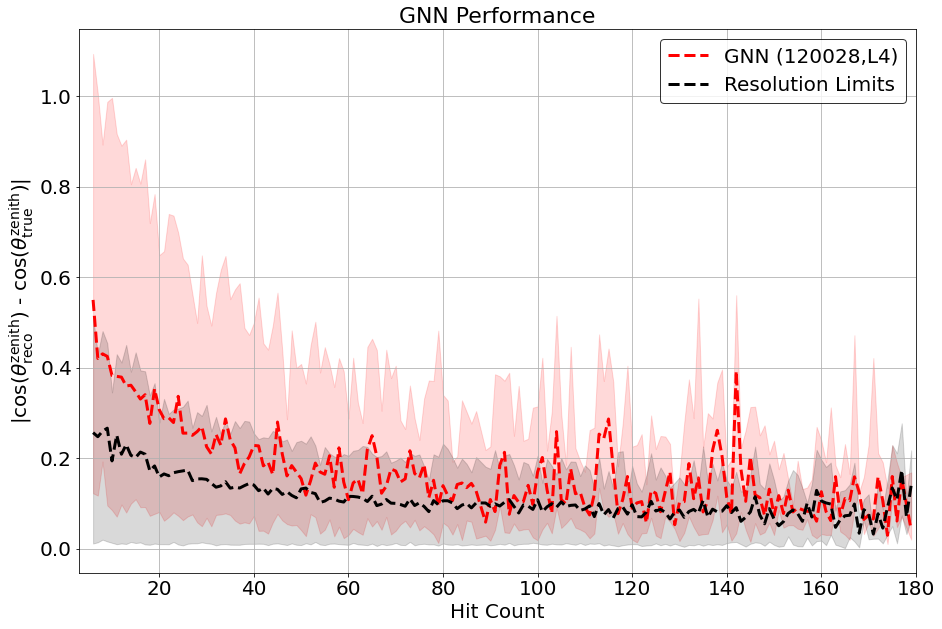

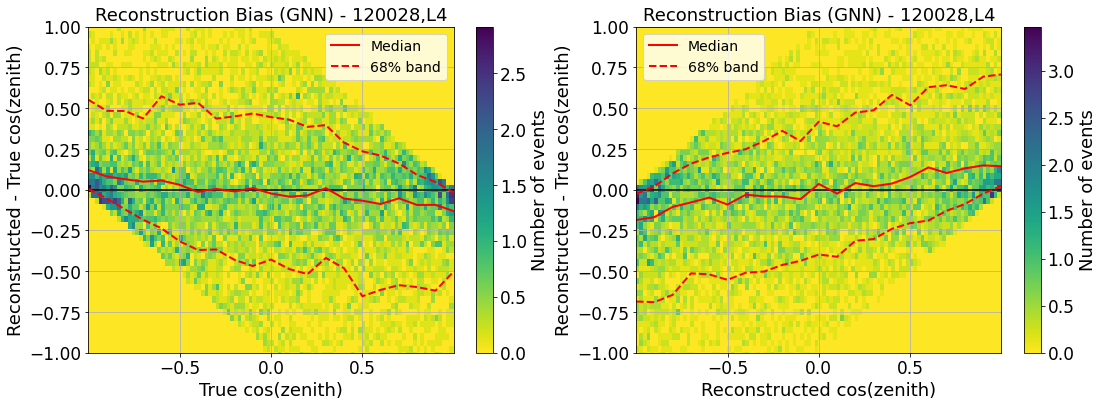

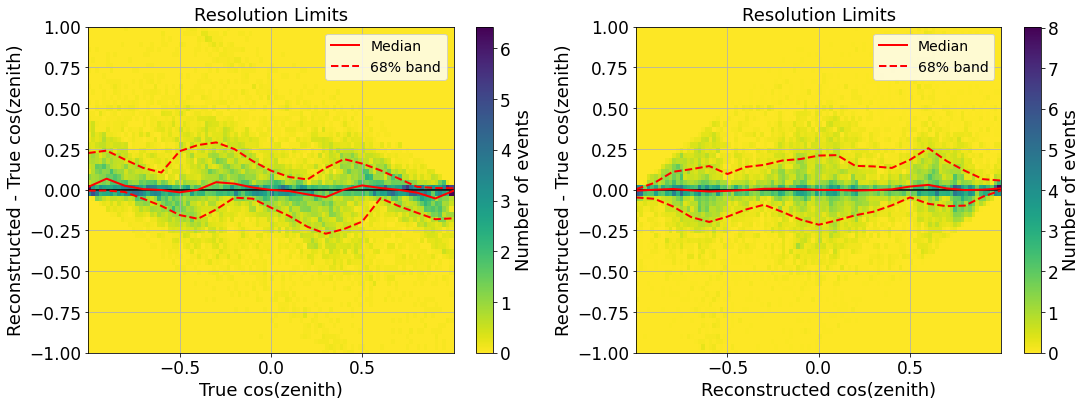

In [90]:
plt.figure(figsize=(15, 10))
gen_res_hits_plot(del_zenith_GNN,std_theta_upper_zenith_GNN,std_theta_lower_zenith_GNN,"red","GNN (120028,L4)")
gen_res_hits_plot(delta_zen_combined_spread_scatt_mDOM_noise_vec,std_zen_upper_combined_spread_scatt_mDOM_noise_vec,std_zen_lower_combined_spread_scatt_mDOM_noise_vec,"black","Resolution Limits")
plt.show()
gen_bias_plot(coszen_true_GNN, diff_coszen_GNN, coszen_reco_GNN,"Reconstruction Bias (GNN) - 120028,L4")
gen_bias_plot(coszen_true_vec, diff_coszen_vec, coszen_reco_vec,"Resolution Limits")
